In [1]:
!pip install yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 k

In [2]:
import os
import zipfile
from yolov5 import YOLOv5
from PIL import Image

# Path to the zip file and extraction directory
zip_file_path = 'drive/MyDrive/CIT-SDB-3043.zip'  # Replace with the path to your zip file
extract_path = 'train_extracted'  # Replace with your desired extraction directory

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    os.makedirs(extract_path, exist_ok=True)
    zip_ref.extractall(extract_path)

# Load the YOLOv5 model
yolov5_weights_path = 'yolov5s.pt'  # Replace with the path to your YOLOv5 weights file
yolov5_model = YOLOv5(yolov5_weights_path)

# Class labels
class_labels = {0: 'person', 1: 'bicycle', 2: 'motorcycle', 3: 'truck', 4: 'car', 5: 'bus'}

# Function to predict and get bounding box sizes
def predict_and_get_sizes_yolov5(image_path):
    image = Image.open(image_path)
    results = yolov5_model.predict(image)
    detections = results.pred[0]

    sizes = {label: [] for label in class_labels.values()}
    for det in detections:
        class_id = int(det[-1])
        if class_id in class_labels:
            label = class_labels[class_id]
            box = det[:4].tolist()
            width = box[2] - box[0]
            height = box[3] - box[1]
            size = width * height
            sizes[label].append(size)
    return sizes

# Analyze bounding box sizes for each class
all_sizes = {}
for file in os.listdir(extract_path):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일만 처리
        image_path = os.path.join(extract_path, file)
        sizes = predict_and_get_sizes_yolov5(image_path)
        for label, size_list in sizes.items():
            if label in all_sizes:
                all_sizes[label].extend(size_list)
            else:
                all_sizes[label] = size_list

# Calculate the average size for each class
average_sizes = {label: sum(size_list) / len(size_list) if size_list else 0 for label, size_list in all_sizes.items()}

print("Average bounding box sizes for each class:", average_sizes)


Average bounding box sizes for each class: {'person': 4027.388783798981, 'bicycle': 4183.633844396342, 'motorcycle': 14461.608606628053, 'truck': 14094.735558747963, 'car': 379272.74679859553, 'bus': 50709.269338889295}


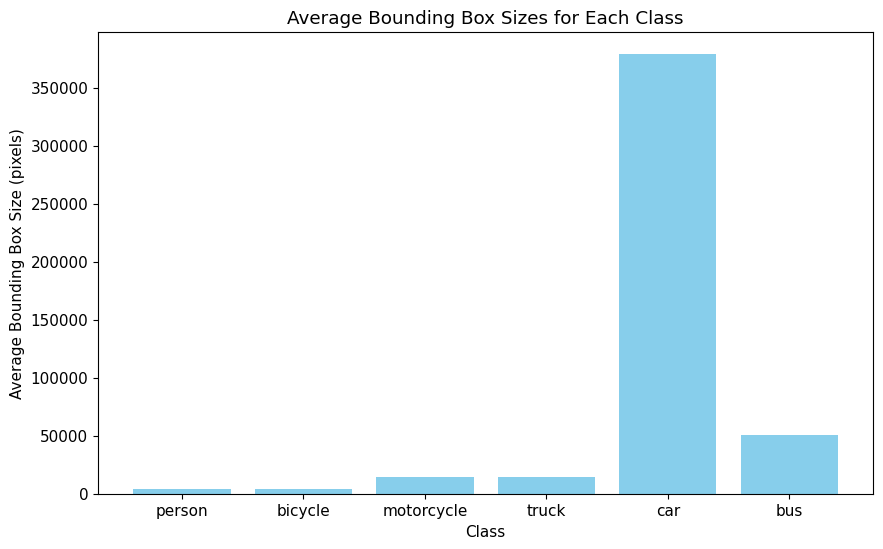

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Average bounding box sizes for each class
average_sizes = {
    'person': 4027.388783798968,
    'bicycle': 4183.633844396342,
    'motorcycle': 14461.608606627982,
    'truck': 14094.735558747967,
    'car': 379272.74679859553,
    'bus': 50709.26933888942
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_sizes.keys(), average_sizes.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Average Bounding Box Size (pixels)')
plt.title('Average Bounding Box Sizes for Each Class')
plt.show()


In [4]:
import math

# Average bounding box sizes for each class
average_sizes = {
    'person': 4027.388783798968,
    'bicycle': 4183.633844396342,
    'motorcycle': 14461.608606627982,
    'truck': 14094.735558747967,
    'car': 379272.74679859553,
    'bus': 50709.26933888942
}

# Calculate average width and length
average_widths = {label: math.sqrt(size) for label, size in average_sizes.items()}
average_lengths = average_widths.copy()  # In this approximation, width and length are the same

# Output the results
for label in average_sizes:
    print(f"{label.capitalize()} - Average Width: {average_widths[label]:.2f} pixels, Average Length: {average_lengths[label]:.2f} pixels")


Person - Average Width: 63.46 pixels, Average Length: 63.46 pixels
Bicycle - Average Width: 64.68 pixels, Average Length: 64.68 pixels
Motorcycle - Average Width: 120.26 pixels, Average Length: 120.26 pixels
Truck - Average Width: 118.72 pixels, Average Length: 118.72 pixels
Car - Average Width: 615.85 pixels, Average Length: 615.85 pixels
Bus - Average Width: 225.19 pixels, Average Length: 225.19 pixels


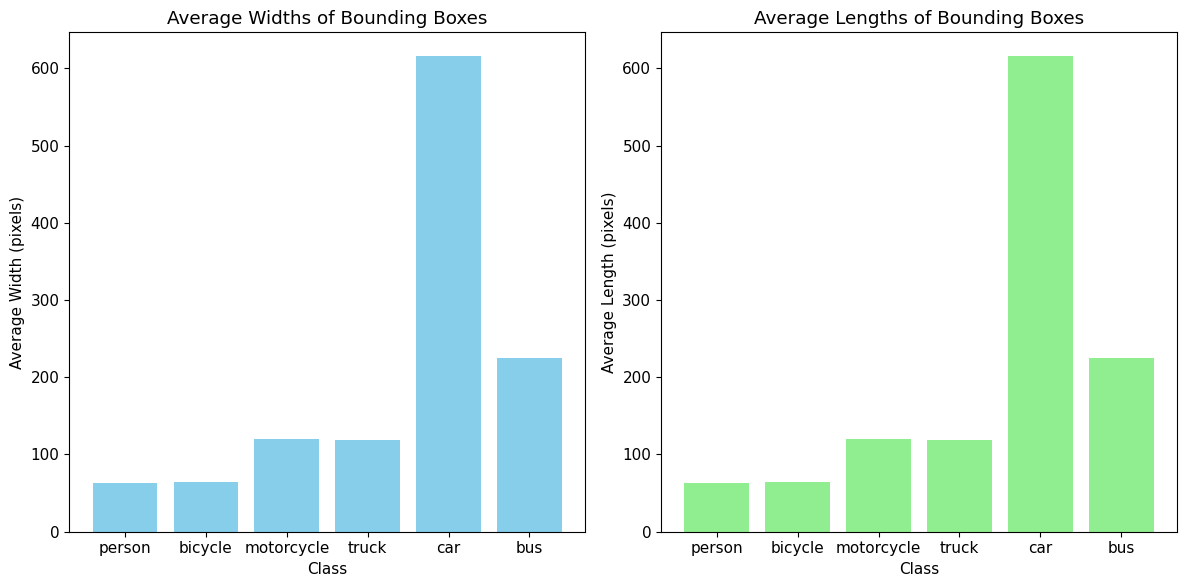

In [5]:
import matplotlib.pyplot as plt
import math

# Average bounding box sizes for each class
average_sizes = {
    'person': 4027.388783798968,
    'bicycle': 4183.633844396342,
    'motorcycle': 14461.608606627982,
    'truck': 14094.735558747967,
    'car': 379272.74679859553,
    'bus': 50709.26933888942
}

# Calculate average width and length (assuming square shape for simplification)
average_widths = {label: math.sqrt(size) for label, size in average_sizes.items()}
average_lengths = average_widths.copy()  # In this approximation, width and length are the same

# Data for plotting
classes = list(average_sizes.keys())
widths = [average_widths[cls] for cls in classes]
lengths = [average_lengths[cls] for cls in classes]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for widths
plt.subplot(1, 2, 1)
plt.bar(classes, widths, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Average Width (pixels)')
plt.title('Average Widths of Bounding Boxes')

# Plot for lengths
plt.subplot(1, 2, 2)
plt.bar(classes, lengths, color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Average Length (pixels)')
plt.title('Average Lengths of Bounding Boxes')

plt.tight_layout()
plt.show()


In [6]:
# First, let's define the function that will collect all the widths and lengths
# of the bounding boxes for each class from the images.

def collect_sizes(yolov5_model, extract_path, class_labels):
    all_widths = {label: [] for label in class_labels.values()}
    all_lengths = {label: [] for label in class_labels.values()}

    for file in os.listdir(extract_path):
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            image_path = os.path.join(extract_path, file)
            image = Image.open(image_path)
            results = yolov5_model.predict(image)
            detections = results.pred[0]

            for det in detections:
                class_id = int(det[-1])
                if class_id in class_labels:
                    label = class_labels[class_id]
                    box = det[:4].tolist()
                    width = box[2] - box[0]
                    length = box[3] - box[1]
                    all_widths[label].append(width)
                    all_lengths[label].append(length)

    return all_widths, all_lengths

# Now let's use the function and print out the sizes for each class.

# Note: You will need to provide the actual 'yolov5_model' and 'extract_path'
# for this function to work.

# yolov5_weights_path = 'path_to_yolov5_weights.pt'  # You need to download the weights file
# yolov5_model = YOLOv5(yolov5_weights_path)
# extract_path = 'path_to_extracted_images'

# Assuming 'yolov5_model' is already loaded and 'extract_path' is set
class_labels = {0: 'person', 1: 'bicycle', 2: 'motorcycle', 3: 'truck', 4: 'car', 5: 'bus'}
all_widths, all_lengths = collect_sizes(yolov5_model, extract_path, class_labels)

# Print the collected widths and lengths for each class
for label in class_labels.values():
    print(f"{label.capitalize()} Widths: {all_widths[label]}")
    print(f"{label.capitalize()} Lengths: {all_lengths[label]}")


Person Widths: [44.587646484375, 49.310791015625, 40.256591796875, 33.8214111328125, 30.7261962890625, 32.8260498046875, 104.55120849609375, 36.690673828125, 41.17474365234375, 29.05419921875, 33.8170166015625, 21.1552734375, 30.958984375, 41.135009765625, 43.981689453125, 38.6590576171875, 32.307472229003906, 32.20025634765625, 31.719146728515625, 29.764068603515625, 36.07464599609375, 22.901092529296875, 61.83685302734375, 28.868194580078125, 38.4371337890625, 35.782470703125, 31.9248046875, 21.76806640625, 28.012245178222656, 29.7264404296875, 31.48681640625, 31.005882263183594, 34.048828125, 26.67425537109375, 30.543701171875, 30.918502807617188, 23.92333984375, 25.8087158203125, 33.04852294921875, 26.05450439453125, 23.5634765625, 26.421875, 26.151161193847656, 24.819580078125, 29.137451171875, 28.32275390625, 26.1807861328125, 27.972854614257812, 27.668243408203125, 24.26314401626587, 66.28765869140625, 91.9112548828125, 65.6297607421875, 74.0595703125, 96.78762817382812, 35.8264

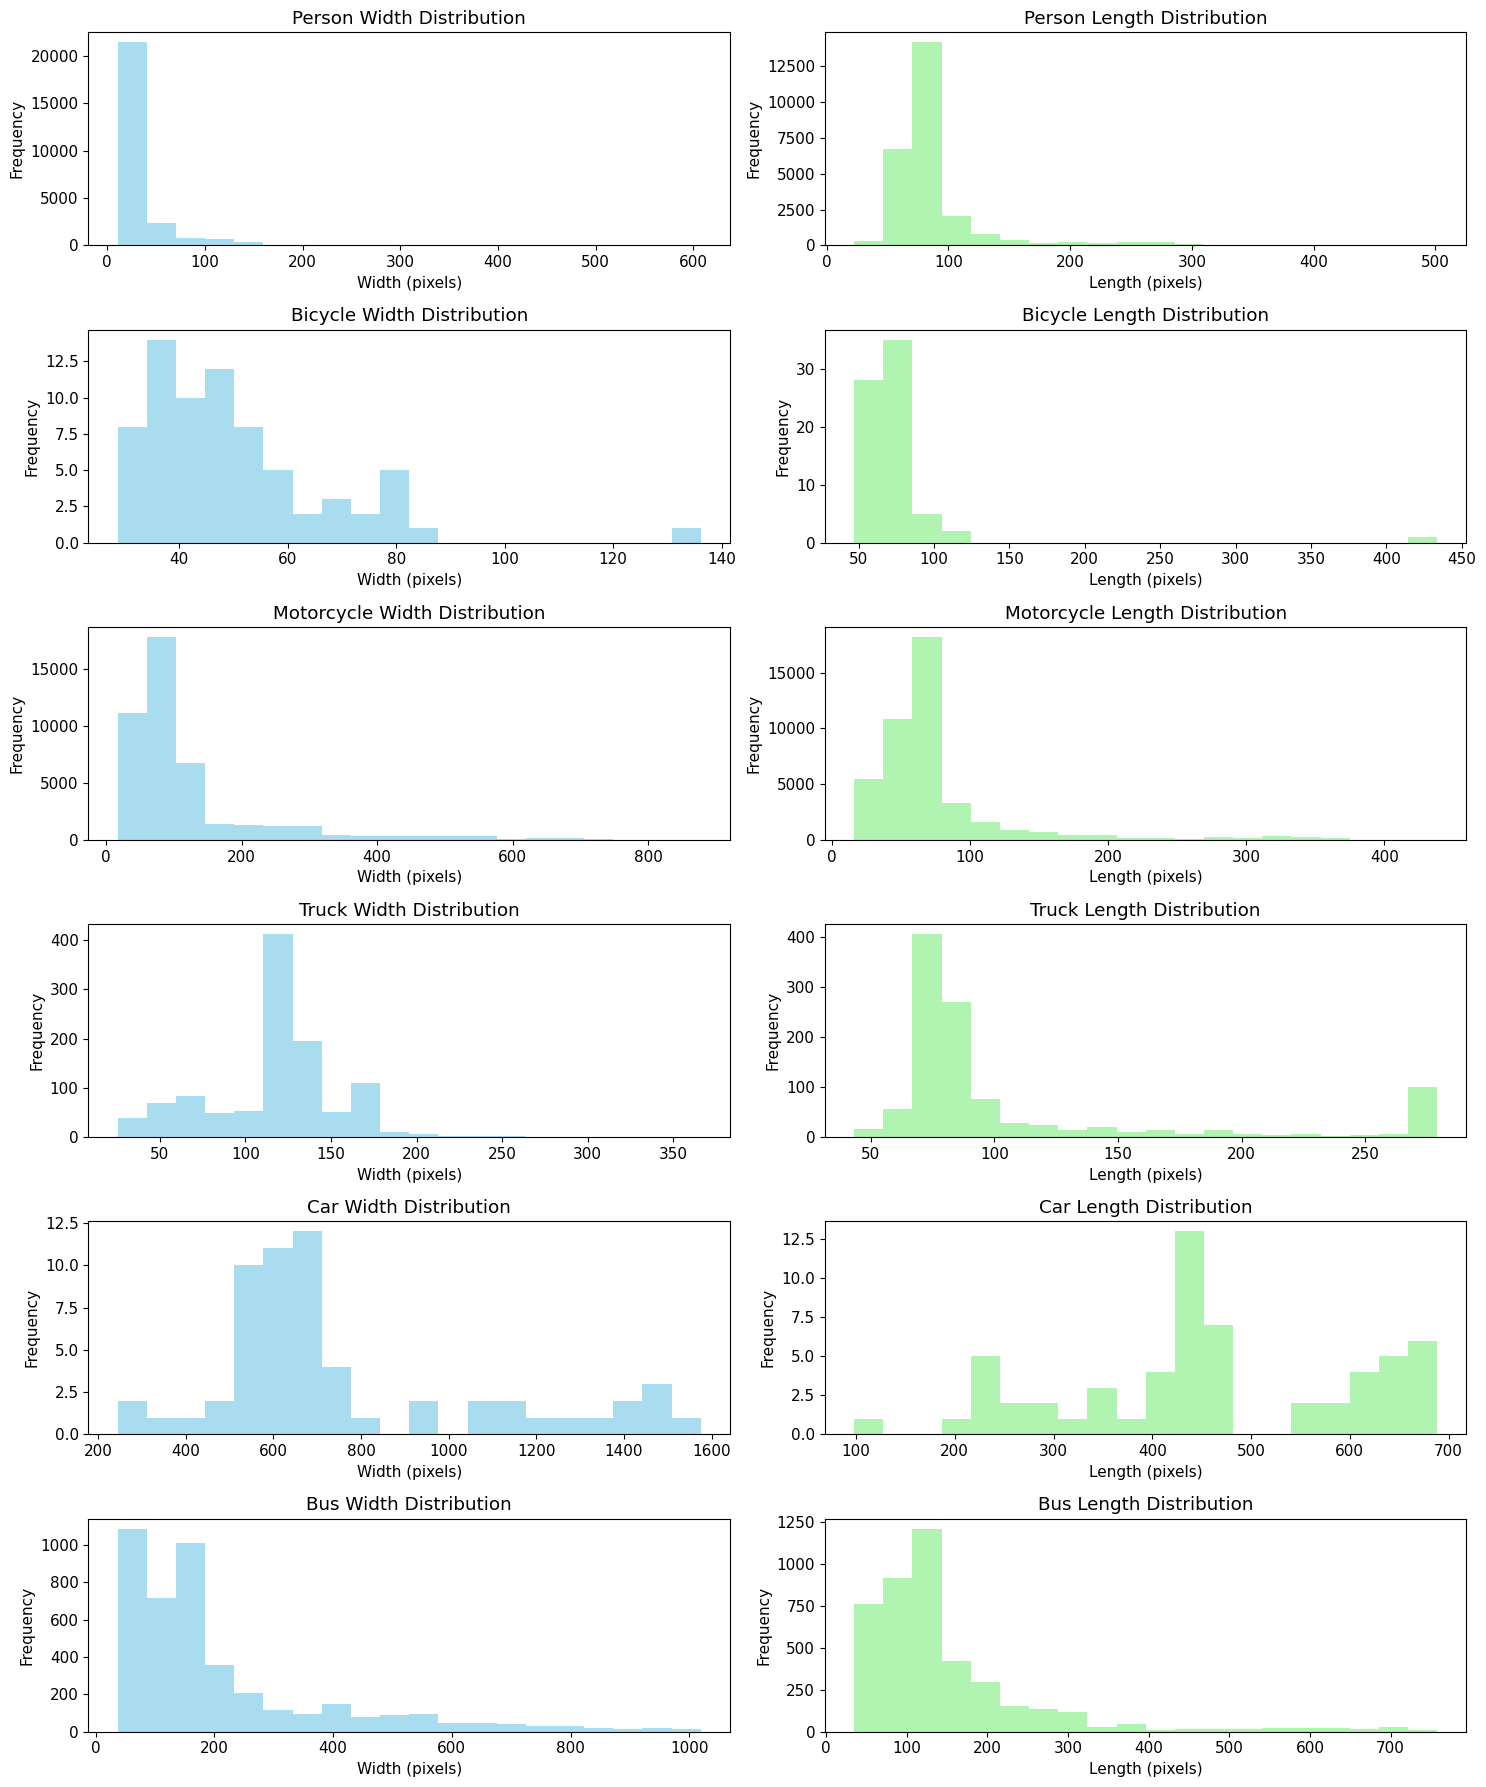

In [7]:
import numpy as np
import matplotlib.pyplot as plt




# Example data collected from bounding boxes (replace with your actual data)
all_widths = {
    'person': [44.587646484375, 49.310791015625, 40.256591796875, 33.8214111328125, 30.7261962890625, 32.8260498046875, 104.55120849609375, 36.690673828125, 41.17474365234375, 29.05419921875, 33.8170166015625, 21.1552734375, 30.958984375, 41.135009765625, 43.981689453125, 38.6590576171875, 32.307472229003906, 32.20025634765625, 31.719146728515625, 29.764068603515625, 36.07464599609375, 22.901092529296875, 61.83685302734375, 28.868194580078125, 38.4371337890625, 35.782470703125, 31.9248046875, 21.76806640625, 28.012245178222656, 29.7264404296875, 31.48681640625, 31.005882263183594, 34.048828125, 26.67425537109375, 30.543701171875, 30.918502807617188, 23.92333984375, 25.8087158203125, 33.04852294921875, 26.05450439453125, 23.5634765625, 26.421875, 26.151161193847656, 24.819580078125, 29.137451171875, 28.32275390625, 26.1807861328125, 27.972854614257812, 27.668243408203125, 24.26314401626587, 66.28765869140625, 91.9112548828125, 65.6297607421875, 74.0595703125, 96.78762817382812, 35.826416015625, 105.932373046875, 40.6644287109375, 30.81939697265625, 33.06573486328125, 37.0836181640625, 35.811767578125, 27.3746337890625, 32.06907272338867, 24.221435546875, 31.666259765625, 36.2669677734375, 61.40473937988281, 29.8826904296875, 28.1077880859375, 29.5316162109375, 34.505126953125, 24.01025390625, 30.45850372314453, 27.18758773803711, 29.47882890701294, 30.7236328125, 25.521240234375, 32.245849609375, 40.232666015625, 29.51220703125, 23.092529296875, 33.355224609375, 48.4544677734375, 56.009765625, 32.48876953125, 28.58935546875, 25.18499755859375, 26.2554931640625, 34.47404098510742, 27.379150390625, 30.11919403076172, 32.920654296875, 40.311767578125, 37.383544921875, 24.521484375, 31.8897705078125, 44.97509765625, 28.314285278320312, 24.2781982421875, 27.730072021484375, 31.8558349609375, 36.9747314453125, 21.68994140625, 32.21044921875, 29.43310546875, 31.325439453125, 43.885986328125, 31.20993423461914, 20.9835205078125, 22.986572265625, 25.158836364746094, 27.025691986083984, 99.973388671875, 131.8564453125, 90.820068359375, 28.236709594726562, 23.56787109375, 27.059326171875, 23.63507080078125, 28.301483154296875, 37.8284912109375, 18.259521484375, 25.7845458984375, 72.2413330078125, 68.911376953125, 22.23394775390625, 20.876220703125, 26.4342041015625, 18.9736328125, 35.60284423828125, 36.056640625, 29.205322265625, 30.08935546875, 31.681640625, 26.60791015625, 35.9560546875, 101.52099609375, 24.163330078125, 26.0255126953125, 30.02288818359375, 26.0716552734375, 21.1021728515625, 25.63751220703125, 47.426422119140625, 24.57275390625, 31.112037658691406, 32.614051818847656, 34.613616943359375, 155.9775390625, 25.9910888671875, 20.24365234375, 21.389404296875, 27.4764404296875, 41.718994140625, 30.0928955078125, 20.16217041015625, 27.11444091796875, 32.176025390625, 53.95794677734375, 19.9248046875, 98.6640625, 108.5357666015625, 29.20751953125, 33.030517578125, 33.8935546875, 28.1737060546875, 29.7890625, 25.564453125, 33.32373046875, 30.426223754882812, 25.077911376953125, 26.943603515625, 35.00537109375, 35.91878128051758, 27.220413208007812, 34.83226776123047, 24.22119140625, 21.39111328125, 124.10809326171875, 27.92919921875, 26.7227783203125, 18.7803955078125, 21.851806640625, 25.142578125, 33.0582275390625, 30.037139892578125, 27.70380401611328, 26.0650634765625, 34.393798828125, 28.516082763671875, 27.88330078125, 37.828125, 28.1063232421875, 55.9075927734375, 18.7822265625, 32.27392578125, 54.124755859375, 32.38330078125, 83.5843505859375, 31.2205810546875, 30.3060302734375, 40.1904296875, 34.52294921875, 33.60955810546875, 40.992919921875, 24.93585205078125, 30.965087890625, 23.8992919921875, 30.3248291015625, 38.62117004394531, 33.1490478515625, 29.068557739257812, 28.258350372314453, 33.84442138671875, 34.69775390625, 20.2601318359375, 19.9683837890625, 32.24560546875, 28.59375, 32.986572265625, 38.6337890625, 30.4591064453125, 19.622314453125, 38.5767822265625, 26.510009765625, 28.537349700927734, 28.682212829589844, 25.258544921875, 36.086181640625, 23.547256469726562, 35.0771484375, 25.356334686279297, 34.6717529296875, 22.732437133789062, 37.4205322265625, 26.595169067382812, 26.118194580078125, 30.771560668945312, 33.37274169921875, 31.6260986328125, 38.24810791015625, 23.4964599609375, 21.059326171875, 29.75238037109375, 19.57659912109375, 32.8861083984375, 38.871337890625, 30.251861572265625, 48.59989929199219, 157.7359619140625, 21.459716796875, 32.1651611328125, 36.805206298828125, 21.7320556640625, 27.444091796875, 33.72509765625, 29.5306396484375, 45.19580078125, 35.886474609375, 26.524681091308594, 25.212890625, 29.654296875, 28.701675415039062, 24.7225341796875, 31.14111328125, 37.9869384765625, 22.08599853515625, 28.749755859375, 54.425259590148926, 32.35198974609375, 45.85345458984375, 29.42901611328125, 38.43994140625, 28.378173828125, 30.79815673828125, 27.9801025390625, 34.04443359375, 35.413330078125, 25.297882080078125, 26.238865852355957, 26.15184783935547, 28.12549591064453, 20.690399169921875, 32.018402099609375, 33.1810302734375, 27.8841552734375, 20.228515625, 30.54222869873047, 42.27294921875, 33.41015625, 22.7706298828125, 30.51806640625, 24.504852294921875, 34.83578300476074, 29.491554260253906, 23.99267578125, 34.78125, 25.78125, 30.3876953125, 29.11859130859375, 25.8035888671875, 27.1688232421875, 34.517333984375, 24.537353515625, 25.878616333007812, 28.40771484375, 27.022705078125, 31.55188751220703, 23.342529296875, 26.794986724853516, 28.37060546875, 30.38990020751953, 29.967361450195312, 32.481201171875, 26.4305419921875, 34.0321044921875, 32.46142578125, 34.56396484375, 30.77869415283203, 37.3740234375, 37.2169189453125, 33.2060546875, 30.871826171875, 51.9658203125, 21.805419921875, 40.585693359375, 42.4185791015625, 34.337615966796875, 48.02783203125, 32.144561767578125, 37.174072265625, 31.37109375, 32.47314453125, 21.627685546875, 27.759063720703125, 31.0301513671875, 23.010711669921875, 43.67538833618164, 32.88902282714844, 44.6904296875, 30.214237213134766, 28.653701782226562, 40.78173828125, 29.21630859375, 36.5679931640625, 26.698524475097656, 30.62047576904297, 37.825469970703125, 27.841796875, 31.52332305908203, 26.55843734741211, 28.8753662109375, 30.06298828125, 29.291183471679688, 25.003646850585938, 96.6378173828125, 78.9273452758789, 31.8721923828125, 27.81884765625, 28.761474609375, 27.77777099609375, 23.20294189453125, 22.741973876953125, 26.314453125, 32.012939453125, 24.356689453125, 28.199840545654297, 25.7945556640625, 38.5819091796875, 26.50238037109375, 23.211669921875, 21.93896484375, 27.25341796875, 27.236549377441406, 36.23583984375, 25.688507080078125, 22.7890625, 44.51959228515625, 30.2490234375, 32.029541015625, 34.975341796875, 24.045166015625, 22.858154296875, 24.4237060546875, 26.2796630859375, 27.450927734375, 28.89501953125, 29.4927978515625, 26.6956787109375, 24.235389709472656, 41.584716796875, 23.7392578125, 24.490310668945312, 46.480224609375, 32.7568359375, 35.3953857421875, 29.9619140625, 24.6829833984375, 87.8818359375, 74.338134765625, 27.091705322265625, 51.752197265625, 32.978271484375, 32.3759765625, 33.01959228515625, 34.990234375, 30.0640869140625, 32.583251953125, 25.85595703125, 28.254150390625, 32.186279296875, 27.359344482421875, 27.255340576171875, 31.170333862304688, 37.9453125, 36.049072265625, 29.9111328125, 30.242870330810547, 31.607666015625, 28.414794921875, 28.982711791992188, 25.9698486328125, 35.9593505859375, 28.9742431640625, 26.169189453125, 25.752685546875, 31.1475830078125, 35.5986328125, 25.475326538085938, 19.850830078125, 25.1337890625, 37.639892578125, 24.483428955078125, 39.07861328125, 29.54827880859375, 29.1002197265625, 37.58802032470703, 23.4970703125, 24.1343994140625, 28.745010375976562, 37.799560546875, 34.959228515625, 30.38818359375, 31.322021484375, 21.654296875, 25.40576171875, 20.08740234375, 33.7569580078125, 35.34521484375, 111.6385498046875, 107.34600830078125, 30.5504150390625, 30.97174072265625, 30.54052734375, 19.458251953125, 27.3968505859375, 54.551979064941406, 23.84619140625, 32.86083984375, 33.7452392578125, 25.66265869140625, 27.0413818359375, 25.228240966796875, 26.666793823242188, 30.30078125, 28.22332763671875, 63.1122932434082, 33.4207763671875, 33.106689453125, 35.69056034088135, 19.817626953125, 27.09375, 27.09814453125, 26.851318359375, 20.2401123046875, 24.0859375, 112.54531860351562, 30.99810791015625, 24.233154296875, 28.859848022460938, 27.557479858398438, 46.1502685546875, 32.04180908203125, 18.16552734375, 42.8515625, 19.4945068359375, 28.6494140625, 23.5653076171875, 18.462158203125, 18.300048828125, 46.474609375, 39.3017578125, 25.8349609375, 30.71356201171875, 32.13580322265625, 37.3095703125, 42.542724609375, 33.2783203125, 30.5343017578125, 23.3089599609375, 23.300628662109375, 28.639404296875, 42.857666015625, 34.9642333984375, 37.2099609375, 67.34944152832031, 130.00225830078125, 46.423583984375, 25.368621826171875, 28.0947265625, 33.2216796875, 27.113258361816406, 37.746826171875, 33.3636474609375, 26.13134765625, 33.6998291015625, 25.33740234375, 25.459716796875, 25.5274658203125, 27.22119140625, 74.696533203125, 33.0841064453125, 27.3677978515625, 23.85498046875, 26.322021484375, 26.138916015625, 44.30712890625, 34.7203369140625, 27.413909912109375, 22.98474884033203, 45.4617919921875, 42.131103515625, 28.903213500976562, 30.183837890625, 97.395751953125, 43.62890625, 30.462158203125, 20.09521484375, 20.3250732421875, 28.11474609375, 26.900390625, 34.88818359375, 21.241287231445312, 100.11306762695312, 104.73989868164062, 31.318115234375, 26.46246337890625, 25.67156982421875, 83.214111328125, 21.256988525390625, 26.408203125, 32.31976318359375, 29.3690185546875, 31.93115234375, 29.121856689453125, 34.026275634765625, 29.810546875, 27.93896484375, 41.792301177978516, 32.750244140625, 26.047607421875, 51.20912551879883, 26.926025390625, 25.90966796875, 30.652587890625, 27.0245361328125, 28.0543212890625, 44.148193359375, 33.169677734375, 31.0562744140625, 27.161865234375, 32.03009033203125, 24.41552734375, 32.43896484375, 24.153030395507812, 28.528564453125, 38.828880310058594, 34.69380569458008, 45.1920166015625, 39.55079650878906, 40.38427734375, 30.02783203125, 57.72967529296875, 14.7960205078125, 19.23046875, 35.441162109375, 54.97265625, 25.6640625, 23.971435546875, 44.901123046875, 36.5438232421875, 25.8599853515625, 25.47565460205078, 30.50927734375, 27.926283359527588, 33.031005859375, 21.41015625, 129.5262451171875, 110.18980407714844, 94.30636596679688, 105.9444580078125, 74.55734252929688, 136.71368408203125, 38.56201171875, 39.000732421875, 37.627197265625, 34.5076904296875, 54.69287109375, 39.009521484375, 27.5537109375, 31.9420166015625, 34.216796875, 23.330078125, 26.0838623046875, 36.455078125, 26.865966796875, 30.2650146484375, 30.75738525390625, 23.49609375, 23.120361328125, 25.236328125, 37.095703125, 25.1173095703125, 94.92626953125, 23.9337158203125, 41.109375, 38.961273193359375, 35.1644287109375, 30.02783203125, 36.131103515625, 26.773193359375, 23.1729736328125, 32.28857421875, 28.595947265625, 37.984619140625, 25.0211181640625, 28.0667724609375, 25.6630859375, 28.22314453125, 22.7816162109375, 24.9755859375, 25.2618408203125, 23.71051025390625, 25.290428161621094, 18.6317138671875, 34.86492919921875, 31.53533935546875, 138.42730712890625, 72.172119140625, 79.45623779296875, 102.04193115234375, 43.2821044921875, 38.757568359375, 40.593505859375, 106.14271545410156, 38.15386962890625, 32.8590087890625, 40.10577392578125, 29.89825439453125, 42.244384765625, 35.302001953125, 33.3504638671875, 41.46673583984375, 36.3460693359375, 23.756103515625, 30.37127685546875, 29.66802978515625, 36.3232421875, 31.2777099609375, 29.9373779296875, 23.613037109375, 41.216552734375, 27.2808837890625, 27.004852294921875, 28.7802734375, 29.32373046875, 23.46240234375, 37.226280212402344, 36.137939453125, 29.1605224609375, 24.0164794921875, 31.6834716796875, 73.2996826171875, 91.7054443359375, 85.40478515625, 130.34033203125, 29.43975830078125, 110.22306823730469, 91.57438659667969, 28.9464111328125, 27.97119140625, 24.05322265625, 37.28717803955078, 32.29345703125, 32.3822021484375, 51.5361328125, 29.3470458984375, 39.053955078125, 32.150390625, 38.548828125, 28.04656982421875, 23.092529296875, 90.8118896484375, 36.711181640625, 36.356201171875, 46.4395751953125, 41.0985107421875, 105.8341064453125, 117.60922241210938, 40.38702392578125, 36.2301025390625, 25.42181396484375, 36.1435546875, 31.1630859375, 26.773193359375, 32.49658203125, 41.60150146484375, 37.48455810546875, 30.8670654296875, 25.27301025390625, 28.84832763671875, 81.8740234375, 45.207275390625, 32.330078125, 40.60107421875, 26.398162841796875, 33.74267578125, 38.466796875, 34.904296875, 28.318603515625, 50.0849609375, 36.159912109375, 31.2828369140625, 30.581432342529297, 26.597900390625, 25.1187744140625, 24.94061279296875, 23.690338134765625, 34.11613082885742, 26.292724609375, 27.4757080078125, 29.910568237304688, 30.8917236328125, 39.140625, 23.87890625, 37.30810546875, 34.8076171875, 24.50897216796875, 32.341552734375, 34.67120361328125, 24.16363525390625, 23.6033935546875, 20.50250244140625, 31.8087158203125, 19.129150390625, 27.9071044921875, 35.3333740234375, 29.109333038330078, 36.2244873046875, 32.74658203125, 26.77019500732422, 23.6458740234375, 32.82307434082031, 30.465797424316406, 22.6884765625, 33.51031494140625, 33.513427734375, 34.6468505859375, 29.00970458984375, 31.746826171875, 25.7127685546875, 29.294677734375, 23.2086181640625, 31.644615173339844, 36.828369140625, 41.3690185546875, 36.6009521484375, 20.8575439453125, 24.29736328125, 49.330078125, 46.22900390625, 38.597900390625, 25.9169921875, 31.638427734375, 30.096237182617188, 33.1400146484375, 21.350341796875, 22.223876953125, 37.453857421875, 37.97900390625, 28.445068359375, 36.99732971191406, 31.09844970703125, 28.414794921875, 25.797164916992188, 20.957733154296875, 29.879112243652344, 25.027496337890625, 24.6785888671875, 25.326171875, 26.390625, 36.9415283203125, 31.37713623046875, 23.0064697265625, 24.154266357421875, 24.275009155273438, 23.427978515625, 29.023849487304688, 32.361083984375, 27.046947479248047, 26.9447021484375, 27.046875, 32.67431640625, 37.346435546875, 38.343017578125, 23.36279296875, 26.63720703125, 124.45182800292969, 38.6407470703125, 33.71630859375, 37.975341796875, 17.199462890625, 37.15771484375, 27.271888732910156, 32.463134765625, 26.19982147216797, 31.502304077148438, 25.0177001953125, 33.95867156982422, 30.308692932128906, 31.691162109375, 23.84674072265625, 22.47222900390625, 144.89889526367188, 18.9056396484375, 24.189697265625, 13.254638671875, 17.5836181640625, 26.1524658203125, 24.8931884765625, 28.93798828125, 35.5140380859375, 154.22833251953125, 23.66693115234375, 21.289306640625, 30.002197265625, 23.364990234375, 32.8699951171875, 26.546310424804688, 26.59506607055664, 27.105804443359375, 156.44605255126953, 97.97662353515625, 32.54443359375, 145.86080932617188, 78.5794677734375, 96.719970703125, 20.6749267578125, 54.935791015625, 27.0390625, 20.0853271484375, 32.47119140625, 31.54052734375, 22.61279296875, 95.19073486328125, 76.85601043701172, 34.676025390625, 25.022705078125, 28.83782958984375, 34.6151123046875, 24.6197509765625, 29.0474853515625, 23.6710205078125, 26.2633056640625, 90.32623291015625, 41.29541015625, 28.626182556152344, 50.36553955078125, 29.4869384765625, 28.238800048828125, 34.42041015625, 25.2958984375, 22.57080078125, 113.7763671875, 83.1126708984375, 102.7738037109375, 83.0526123046875, 76.435791015625, 32.60984802246094, 29.858642578125, 38.815887451171875, 29.060760498046875, 33.7373046875, 35.65380859375, 31.7515869140625, 34.461181640625, 43.9259033203125, 34.6416015625, 33.54833984375, 21.19775390625, 29.19873046875, 25.368896484375, 19.531494140625, 112.19410705566406, 26.902679443359375, 21.2352294921875, 24.2716064453125, 34.35891914367676, 31.01422119140625, 28.1942138671875, 27.804443359375, 39.775390625, 34.94091796875, 22.644287109375, 91.8602294921875, 34.45751953125, 34.6461181640625, 32.5059814453125, 32.376708984375, 66.0650634765625, 23.49554443359375, 32.4891357421875, 33.504638671875, 39.003662109375, 30.259033203125, 27.353759765625, 33.346343994140625, 156.587890625, 30.56208038330078, 33.39674377441406, 29.959716796875, 28.2171630859375, 27.514928340911865, 36.522216796875, 25.79736328125, 28.46337890625, 34.34496879577637, 26.1009521484375, 37.404052734375, 25.62066650390625, 28.612060546875, 37.7900390625, 35.916378021240234, 25.829391479492188, 26.0247802734375, 28.138916015625, 35.498680114746094, 24.18548583984375, 27.109130859375, 28.86597442626953, 32.04052734375, 36.879150390625, 29.4642333984375, 27.55419921875, 25.392242431640625, 37.217742919921875, 40.147674560546875, 23.744857788085938, 33.019287109375, 31.5640869140625, 29.394363403320312, 26.2371826171875, 22.5062255859375, 39.0350341796875, 43.49267578125, 26.620849609375, 29.893798828125, 24.7705078125, 35.4195556640625, 71.2646484375, 32.701904296875, 49.594482421875, 21.642333984375, 33.8001708984375, 43.486083984375, 24.668701171875, 40.619873046875, 35.62451171875, 44.6063232421875, 37.1597900390625, 29.99156951904297, 173.4986572265625, 101.92181396484375, 125.88467025756836, 121.45066833496094, 135.9443359375, 34.78692626953125, 31.0279541015625, 26.250816345214844, 34.02191162109375, 26.656494140625, 24.395187377929688, 45.55078125, 38.4202880859375, 29.63671875, 50.701904296875, 35.353271484375, 31.100173950195312, 29.19580078125, 31.6923828125, 48.75439453125, 28.033462524414062, 17.697998046875, 28.132911682128906, 25.546875, 32.096160888671875, 30.605438232421875, 32.067596435546875, 21.46405792236328, 32.61216735839844, 32.347816467285156, 48.03076171875, 40.841064453125, 39.962158203125, 24.60791015625, 30.8302001953125, 27.95849609375, 24.5888671875, 33.88970947265625, 23.45313262939453, 28.05341339111328, 32.28955078125, 30.15355682373047, 26.6943359375, 29.783935546875, 24.0816650390625, 29.082196712493896, 23.896728515625, 25.40673828125, 31.0626220703125, 20.6107177734375, 30.021240234375, 25.37109375, 28.3447265625, 25.2337646484375, 26.644775390625, 26.985870361328125, 48.0714111328125, 24.0765380859375, 26.576171875, 24.8258056640625, 128.0277099609375, 70.828857421875, 99.0552978515625, 151.8531494140625, 34.79296875, 32.325439453125, 29.9998779296875, 20.2254638671875, 31.0924072265625, 27.43239974975586, 28.34619140625, 28.51280975341797, 24.03515625, 58.62333679199219, 30.016257286071777, 37.755615234375, 39.5123291015625, 35.62750244140625, 32.21600341796875, 36.8341064453125, 36.4404296875, 34.0133056640625, 25.040130615234375, 28.2685546875, 24.191299438476562, 26.2554931640625, 27.427978515625, 27.17138671875, 20.04931640625, 33.56103515625, 54.258506774902344, 38.5595703125, 23.63031005859375, 38.08648681640625, 26.49261474609375, 25.8538818359375, 39.52001953125, 35.080078125, 34.9793701171875, 26.4384765625, 24.753257751464844, 50.93408203125, 27.113548278808594, 43.915283203125, 24.72855806350708, 28.954833984375, 35.8465576171875, 27.6141357421875, 24.3228759765625, 39.18564414978027, 29.64014434814453, 25.3603515625, 18.873779296875, 26.8121337890625, 29.045089721679688, 30.989639282226562, 27.3306884765625, 54.620361328125, 34.20660400390625, 32.7073974609375, 23.47412109375, 33.5394287109375, 25.8328857421875, 38.88720703125, 31.963623046875, 31.1956787109375, 26.591796875, 21.0391845703125, 34.3707275390625, 30.1435546875, 27.690185546875, 34.14825439453125, 27.993896484375, 25.09423828125, 26.467529296875, 31.4302978515625, 33.3988037109375, 33.9727783203125, 24.6865234375, 46.29473876953125, 40.1107177734375, 28.80322265625, 32.143798828125, 25.52001953125, 31.7451171875, 35.918701171875, 63.520751953125, 18.268798828125, 19.8006591796875, 25.35205078125, 21.816650390625, 18.3570556640625, 95.11669921875, 101.600830078125, 35.739501953125, 103.3248291015625, 88.447509765625, 34.7684326171875, 22.2359619140625, 27.995132446289062, 24.52104949951172, 26.319671630859375, 26.3173828125, 28.0770263671875, 25.65966796875, 34.452880859375, 29.88311767578125, 25.979408264160156, 36.08984375, 35.1612548828125, 22.712890625, 22.641357421875, 71.2812089920044, 34.9805908203125, 20.649658203125, 28.5458984375, 30.454986572265625, 35.2042236328125, 42.5015869140625, 26.6690673828125, 26.352783203125, 29.249755859375, 30.2578125, 26.738525390625, 26.908382415771484, 30.4735107421875, 26.833877563476562, 35.115234375, 27.259857177734375, 30.394264221191406, 27.697265625, 22.9453125, 28.072998046875, 28.184471130371094, 28.142669677734375, 33.356689453125, 26.542022705078125, 32.00432586669922, 22.871337890625, 24.2655029296875, 23.2548828125, 21.728759765625, 32.244873046875, 24.2281494140625, 41.850341796875, 40.087646484375, 31.772216796875, 36.6148681640625, 32.488037109375, 32.802001953125, 36.062255859375, 20.17596435546875, 33.90966796875, 30.025333404541016, 25.845947265625, 23.180015563964844, 25.41650390625, 32.07958984375, 15.2431640625, 23.3280029296875, 37.913818359375, 28.470703125, 32.6627197265625, 32.91748046875, 30.6884765625, 32.3572998046875, 37.6468505859375, 29.713623046875, 24.47216796875, 33.516357421875, 32.278564453125, 112.83837890625, 85.08154296875, 34.1864013671875, 31.9498291015625, 83.16259765625, 37.792510986328125, 30.2794189453125, 24.4002685546875, 43.934326171875, 41.9820556640625, 28.95770263671875, 38.019073486328125, 26.37744140625, 48.7353515625, 31.799560546875, 27.9635009765625, 25.823593139648438, 31.00048828125, 33.446044921875, 22.63037109375, 48.485595703125, 43.218017578125, 33.3515625, 31.53759765625, 125.21728515625, 111.07855224609375, 32.1943359375, 32.77972412109375, 22.7744140625, 33.054931640625, 23.735092163085938, 86.07209777832031, 22.14886474609375, 30.30712890625, 19.960693359375, 22.24456787109375, 23.35101318359375, 21.1226806640625, 30.109130859375, 122.199951171875, 27.230581283569336, 26.280441284179688, 22.8006591796875, 137.102783203125, 30.63225555419922, 46.6900634765625, 37.4205322265625, 30.0244140625, 22.43517303466797, 28.073028564453125, 23.949951171875, 34.2158203125, 53.364501953125, 20.779541015625, 26.953857421875, 24.11279296875, 22.1285400390625, 42.499267578125, 28.4384765625, 26.80408477783203, 40.6044921875, 21.87457275390625, 30.17578125, 20.37451171875, 25.4483642578125, 28.591552734375, 32.239501953125, 31.5479736328125, 20.77203369140625, 29.44140625, 20.63037109375, 30.39111328125, 99.939453125, 25.62242889404297, 24.5888671875, 26.746784210205078, 28.063720703125, 27.733642578125, 26.05224609375, 35.1102294921875, 24.35009765625, 40.220458984375, 43.611083984375, 47.7725830078125, 44.76708984375, 43.179443359375, 42.75, 30.337646484375, 25.1689453125, 30.87885284423828, 28.6834716796875, 30.0413818359375, 33.525146484375, 25.5858154296875, 34.18609046936035, 45.375457763671875, 33.82020568847656, 29.794601440429688, 34.8629150390625, 28.738037109375, 28.394287109375, 28.7420654296875, 22.59326171875, 20.2060546875, 58.5772705078125, 20.708251953125, 33.707763671875, 26.873291015625, 38.142333984375, 35.3414306640625, 28.0911865234375, 83.9451904296875, 25.45751953125, 27.28662109375, 19.0067138671875, 33.7880859375, 30.044628143310547, 25.427490234375, 23.39947509765625, 25.2564697265625, 30.7716064453125, 28.130752563476562, 32.07562255859375, 31.6005859375, 29.45068359375, 56.66363525390625, 24.13255262374878, 30.99462890625, 36.800537109375, 32.7513427734375, 28.6314697265625, 24.2724609375, 32.100341796875, 16.855804443359375, 54.10400390625, 40.2119140625, 32.4964599609375, 28.5950927734375, 29.8916015625, 29.504074096679688, 22.927001953125, 41.516845703125, 28.00341796875, 19.2520751953125, 25.7349853515625, 27.48668670654297, 22.640625, 32.192901611328125, 38.322509765625, 41.066650390625, 30.131622314453125, 24.949432373046875, 25.73009490966797, 26.927490234375, 24.816604614257812, 27.128326416015625, 38.130859375, 33.271728515625, 23.8095703125, 36.3555908203125, 55.98193359375, 24.557880401611328, 25.34401559829712, 39.725341796875, 29.5433349609375, 37.001220703125, 22.931655883789062, 25.4205322265625, 55.529541015625, 26.717041015625, 21.70166015625, 25.283203125, 22.9178466796875, 29.12451171875, 27.4061279296875, 25.923553466796875, 28.86865234375, 26.545425415039062, 25.176910400390625, 26.595703125, 34.6248779296875, 27.34276580810547, 36.4213809967041, 32.8408203125, 46.1844482421875, 131.72470092773438, 103.12870025634766, 108.803955078125, 127.37948608398438, 85.48214721679688, 30.139404296875, 28.51165771484375, 75.6939697265625, 22.483642578125, 24.1175537109375, 52.5205078125, 164.3221435546875, 26.5933837890625, 25.889404296875, 31.78765869140625, 21.96124267578125, 35.10382080078125, 26.03875732421875, 32.63470458984375, 21.6978759765625, 28.04443359375, 26.724365234375, 33.7811279296875, 36.425537109375, 25.08056640625, 28.2850341796875, 29.452964782714844, 25.758544921875, 24.74560546875, 29.95166015625, 24.2138671875, 25.434677124023438, 29.0400390625, 34.3626823425293, 27.399169921875, 27.6844482421875, 31.930374145507812, 23.554443359375, 30.67431640625, 31.4117431640625, 23.951416015625, 27.614532470703125, 31.74744415283203, 35.95588684082031, 28.6563720703125, 29.8370361328125, 44.915283203125, 22.66552734375, 22.125, 41.9505615234375, 67.9617919921875, 25.1356201171875, 24.2508544921875, 37.64501953125, 30.81005859375, 35.20934295654297, 149.8802490234375, 45.3342170715332, 36.7181396484375, 36.394500732421875, 26.2154541015625, 37.379150390625, 31.360107421875, 32.20270538330078, 38.628265380859375, 27.4542236328125, 32.818359375, 54.344146728515625, 38.18817138671875, 37.141357421875, 59.463134765625, 36.72998046875, 43.4388427734375, 33.873779296875, 26.667236328125, 32.2646484375, 28.55859375, 26.695037841796875, 26.414794921875, 52.5933837890625, 31.475341796875, 21.08056640625, 28.0279541015625, 31.287841796875, 34.744781494140625, 30.5499267578125, 33.6907958984375, 26.308380126953125, 37.49609375, 40.37109375, 36.11865234375, 24.353248596191406, 26.093994140625, 23.655517578125, 55.013427734375, 42.9139404296875, 65.070068359375, 39.47900390625, 24.5870361328125, 27.308837890625, 38.718017578125, 28.702880859375, 16.8526611328125, 28.398193359375, 33.865966796875, 27.511474609375, 26.313217163085938, 23.732051849365234, 18.573486328125, 38.29248046875, 50.024169921875, 34.6475830078125, 29.29833984375, 25.491943359375, 29.907958984375, 37.651611328125, 35.148193359375, 36.380615234375, 25.43646240234375, 34.430145263671875, 32.892364501953125, 32.2781982421875, 29.9580078125, 29.3338623046875, 27.392486572265625, 29.48876953125, 20.958724975585938, 27.256080627441406, 27.812255859375, 37.9874267578125, 32.195068359375, 26.3668212890625, 29.2178955078125, 158.315185546875, 27.93096923828125, 31.9654541015625, 24.967529296875, 28.5980224609375, 27.37646484375, 22.40423583984375, 51.89129638671875, 34.94287109375, 30.9144287109375, 25.2584228515625, 26.34613037109375, 27.1217041015625, 158.68084716796875, 15.420654296875, 27.8935546875, 35.783447265625, 31.12164306640625, 30.2064208984375, 37.10652160644531, 30.60504150390625, 18.85693359375, 49.529296875, 29.16912841796875, 22.86358642578125, 71.25881958007812, 31.7091064453125, 34.5509033203125, 29.66986083984375, 38.4195556640625, 78.897216796875, 25.239013671875, 23.5792236328125, 36.0970458984375, 23.7447509765625, 24.086669921875, 30.341552734375, 99.78256225585938, 33.85125732421875, 80.70516967773438, 92.891357421875, 45.68463134765625, 27.7635498046875, 16.7091064453125, 58.573944091796875, 141.13623046875, 148.2099609375, 35.7718505859375, 24.5701904296875, 28.559585571289062, 31.44677734375, 83.451416015625, 111.094970703125, 28.230422973632812, 25.142578125, 25.353286743164062, 34.35251998901367, 32.38475036621094, 26.42266845703125, 24.582275390625, 21.80126953125, 30.17333984375, 73.85297393798828, 24.345703125, 25.6448974609375, 26.905517578125, 38.5887451171875, 37.005615234375, 35.608154296875, 48.4544677734375, 24.21844482421875, 36.0615234375, 24.172584533691406, 49.00927734375, 42.528480529785156, 23.28271484375, 21.6712646484375, 22.998779296875, 26.16943359375, 34.02740478515625, 34.5247802734375, 32.1163330078125, 22.6846923828125, 25.967041015625, 29.806884765625, 27.986083984375, 25.21435546875, 26.833740234375, 55.031982421875, 119.8560791015625, 33.850830078125, 135.6826171875, 83.1934814453125, 36.9766845703125, 24.3642578125, 92.95477294921875, 22.543212890625, 21.947021484375, 29.2218017578125, 30.65478515625, 26.77294921875, 32.290771484375, 103.99609375, 116.92703247070312, 86.49711608886719, 28.281005859375, 23.769287109375, 22.077880859375, 24.4754638671875, 24.617950439453125, 21.786376953125, 34.15283203125, 34.0748291015625, 29.6561279296875, 26.110107421875, 30.3870849609375, 26.859519958496094, 69.9718017578125, 39.481201171875, 43.53515625, 27.406837463378906, 36.0, 41.3203125, 39.468017578125, 32.748779296875, 30.19873046875, 36.7813720703125, 26.8948974609375, 31.8021240234375, 29.994873046875, 23.5556640625, 40.89306640625, 26.812774658203125, 27.962158203125, 39.97954177856445, 35.24811553955078, 45.48291778564453, 30.122314453125, 34.556884765625, 33.37678527832031, 36.56786346435547, 26.7791748046875, 29.820770263671875, 25.735244750976562, 33.751220703125, 42.063232421875, 22.261642456054688, 29.833168029785156, 24.350725650787354, 31.571701049804688, 23.274673461914062, 25.889358520507812, 23.76123046875, 21.846435546875, 87.65713500976562, 26.879150390625, 163.21694946289062, 24.497314453125, 36.6895751953125, 24.645126342773438, 28.245849609375, 26.9183349609375, 25.7255859375, 28.4189453125, 27.032684326171875, 24.236968994140625, 22.93560791015625, 17.4976806640625, 33.1806640625, 34.774658203125, 21.035400390625, 36.460693359375, 25.3975830078125, 30.411300659179688, 34.19586181640625, 42.712921142578125, 41.017333984375, 40.231201171875, 93.06529998779297, 27.47119140625, 35.90496826171875, 27.11865234375, 41.5989990234375, 29.37451171875, 27.6558837890625, 31.4952392578125, 21.8671875, 39.90435791015625, 26.903121948242188, 37.1630859375, 31.668685913085938, 42.758056640625, 38.9674072265625, 39.952880859375, 40.05084228515625, 155.73614501953125, 32.92445373535156, 28.8427734375, 84.2120361328125, 120.1300048828125, 90.8477783203125, 83.3154296875, 79.089599609375, 29.772705078125, 33.342041015625, 34.84716796875, 32.438232421875, 21.69970703125, 31.3770751953125, 18.86395263671875, 31.88250732421875, 25.02392578125, 35.5023193359375, 25.802490234375, 32.98040771484375, 25.286773681640625, 31.172515869140625, 27.427734375, 31.1927490234375, 20.330322265625, 30.379226684570312, 21.112823486328125, 17.4993896484375, 23.0526123046875, 28.7581787109375, 28.6236572265625, 28.11328125, 29.126220703125, 26.415000915527344, 96.151123046875, 31.003807067871094, 29.49980926513672, 55.87519836425781, 44.8897705078125, 42.909828186035156, 75.106689453125, 32.5565185546875, 42.5526123046875, 23.1998291015625, 27.781494140625, 26.18859100341797, 27.6884765625, 27.071044921875, 24.0882568359375, 34.3687744140625, 24.481201171875, 24.760475158691406, 43.224517822265625, 30.879638671875, 28.41632080078125, 35.45306396484375, 38.307464599609375, 28.557464599609375, 25.533462524414062, 28.75341796875, 35.819597244262695, 25.516845703125, 33.8408203125, 31.17516326904297, 27.09326171875, 94.42181396484375, 89.58935546875, 38.1055908203125, 135.001953125, 23.4931640625, 22.767333984375, 34.8226318359375, 27.12158203125, 30.46997833251953, 27.6617431640625, 30.134765625, 25.841796875, 29.2198486328125, 128.30215454101562, 22.077392578125, 10.6114501953125, 20.403564453125, 25.7874755859375, 22.384765625, 23.881622314453125, 69.29034423828125, 23.5802001953125, 27.2420654296875, 33.09261894226074, 28.96875, 33.635009765625, 26.3741455078125, 29.813804626464844, 31.13720703125, 61.7373046875, 33.481689453125, 23.9130859375, 23.406005859375, 99.6669921875, 80.40869140625, 38.802978515625, 33.76025390625, 84.7884521484375, 30.5555419921875, 35.427978515625, 30.223163604736328, 32.28778839111328, 98.81005859375, 107.45284271240234, 32.44384765625, 34.29339599609375, 27.4263916015625, 21.96734619140625, 23.1917724609375, 26.09716796875, 31.3570556640625, 31.25079345703125, 21.752197265625, 27.76226806640625, 95.20473289489746, 28.36187744140625, 22.50933837890625, 24.669906616210938, 36.9554443359375, 41.902587890625, 39.09521484375, 30.039877891540527, 107.8775634765625, 109.2474365234375, 32.894287109375, 31.4571533203125, 35.923095703125, 33.7818603515625, 29.306365966796875, 24.79620361328125, 22.4326171875, 31.117431640625, 22.4691162109375, 25.217483520507812, 26.45556640625, 21.923583984375, 37.541015625, 41.3232421875, 47.5748291015625, 42.510498046875, 34.450927734375, 46.418701171875, 51.5833740234375, 32.7784423828125, 24.7386474609375, 33.897216796875, 38.767822265625, 23.1668701171875, 27.76953125, 28.228271484375, 26.119140625, 27.74658203125, 27.85095977783203, 26.19739866256714, 59.52027893066406, 30.65478515625, 32.258056640625, 32.448974609375, 22.5487060546875, 68.36376953125, 67.989990234375, 39.0274658203125, 26.246337890625, 28.33544921875, 29.020118713378906, 34.13691711425781, 33.350830078125, 57.891357421875, 22.07080078125, 27.1455078125, 29.486572265625, 46.7728271484375, 46.30626678466797, 137.9674072265625, 32.9278564453125, 33.8858642578125, 22.319091796875, 31.166259765625, 24.888671875, 36.2113037109375, 27.11819076538086, 55.69866943359375, 36.80859375, 36.65098571777344, 36.75463104248047, 26.921226501464844, 28.55029296875, 26.4305419921875, 35.6043701171875, 36.61474609375, 35.6048583984375, 33.7620849609375, 24.989501953125, 31.939697265625, 23.1968994140625, 101.495361328125, 35.0401611328125, 31.544921875, 32.216796875, 33.048583984375, 38.168701171875, 26.681396484375, 16.461181640625, 30.324462890625, 31.16631317138672, 29.980324268341064, 37.601837158203125, 29.725265502929688, 25.514083862304688, 99.44082641601562, 85.39558410644531, 110.38092803955078, 39.48014831542969, 119.46112060546875, 22.861572265625, 27.205078125, 25.541015625, 31.03662109375, 30.961181640625, 33.677490234375, 24.8349609375, 24.72711181640625, 33.4625244140625, 27.43017578125, 23.18115234375, 28.200172424316406, 29.2694091796875, 41.886404037475586, 32.58544921875, 23.47802734375, 28.374755859375, 25.391143798828125, 34.16162109375, 23.635498046875, 25.1202392578125, 20.446197509765625, 24.339599609375, 30.9598388671875, 26.490447998046875, 38.490234375, 28.905029296875, 30.62860107421875, 23.908447265625, 28.645034790039062, 28.263450622558594, 38.9058837890625, 28.918212890625, 36.33984375, 38.942970275878906, 20.44921875, 27.3966064453125, 32.0615234375, 26.36572265625, 36.4742431640625, 21.9298095703125, 37.45654296875, 35.194580078125, 26.4951171875, 25.7559814453125, 26.1046142578125, 28.258056640625, 21.2548828125, 22.00927734375, 31.2052001953125, 28.75146484375, 27.30126953125, 33.4691162109375, 29.927356719970703, 28.966766357421875, 41.093017578125, 36.038818359375, 26.2503662109375, 27.3115234375, 27.1207275390625, 47.572265625, 155.6793098449707, 158.4556884765625, 29.86236572265625, 24.8997802734375, 19.77880859375, 101.102783203125, 113.337158203125, 28.997039794921875, 23.6986083984375, 40.0426025390625, 36.3695068359375, 27.6690673828125, 29.06683349609375, 20.565185546875, 39.523681640625, 44.543212890625, 36.255615234375, 36.3837890625, 120.09423828125, 30.5916748046875, 26.6038818359375, 29.8218994140625, 31.017822265625, 27.6800537109375, 24.583740234375, 125.32669067382812, 32.595703125, 23.200439453125, 35.16748046875, 36.0166015625, 31.535888671875, 43.228759765625, 36.9927978515625, 25.61572265625, 27.8323974609375, 35.689208984375, 39.357112884521484, 33.84772872924805, 24.133056640625, 36.553924560546875, 28.76824951171875, 35.198577880859375, 27.3409423828125, 39.856201171875, 31.85546875, 157.732177734375, 31.058074951171875, 25.38043212890625, 27.63153076171875, 25.707305908203125, 34.647216796875, 29.78106689453125, 26.940170288085938, 23.762310028076172, 17.864501953125, 41.548095703125, 31.241943359375, 39.073974609375, 38.651123046875, 34.759521484375, 29.458740234375, 22.60693359375, 30.2303466796875, 33.746337890625, 41.4111328125, 35.0482177734375, 45.166259765625, 35.61872863769531, 25.072975158691406, 27.540771484375, 29.061752319335938, 25.00458526611328, 82.7113037109375, 35.0189208984375, 37.5216064453125, 37.60107421875, 29.811767578125, 118.77783203125, 24.0322265625, 44.27880859375, 37.1671142578125, 34.66468811035156, 28.491455078125, 30.94476318359375, 36.542877197265625, 45.252105712890625, 32.802978515625, 39.635009765625, 38.48126220703125, 51.21240234375, 36.6845703125, 35.15625, 36.823150634765625, 33.9951171875, 76.61073112487793, 24.97265625, 26.96204376220703, 37.479736328125, 26.119895935058594, 18.80859375, 26.17646026611328, 29.9765625, 29.956787109375, 37.10302734375, 23.4312744140625, 29.687416076660156, 96.87939453125, 35.7213134765625, 32.02410888671875, 31.35772705078125, 89.23196411132812, 35.06671142578125, 27.0908203125, 27.184814453125, 67.93212890625, 34.3448486328125, 22.0303955078125, 20.5902099609375, 26.4014892578125, 29.517333984375, 39.3043212890625, 44.21337890625, 31.9112548828125, 23.01763916015625, 26.729293823242188, 18.5419921875, 34.937255859375, 35.231689453125, 21.075439453125, 49.157958984375, 20.9622802734375, 28.1044921875, 27.45947265625, 34.75077819824219, 35.193603515625, 23.14990234375, 27.6507568359375, 24.11328125, 21.9371337890625, 113.93649291992188, 23.952392578125, 25.822021484375, 26.530723571777344, 188.8395233154297, 28.3062744140625, 26.4884033203125, 34.83074951171875, 35.3265380859375, 27.34228515625, 24.14227294921875, 28.302734375, 39.63341522216797, 25.66333770751953, 37.742919921875, 21.9990234375, 30.393173217773438, 25.751220703125, 24.91943359375, 26.87567138671875, 30.4156494140625, 39.555755615234375, 29.691650390625, 27.4903564453125, 28.74444580078125, 32.87104797363281, 27.0205078125, 31.032684326171875, 29.776336669921875, 34.21600341796875, 31.835693359375, 43.63311767578125, 21.346343994140625, 24.743408203125, 38.114227294921875, 151.716064453125, 39.12255859375, 36.43212890625, 75.8511962890625, 101.59716796875, 28.2540283203125, 34.669921875, 40.03179931640625, 44.256591796875, 68.95458984375, 31.4266357421875, 72.70098876953125, 25.1865234375, 21.123046875, 41.1180419921875, 28.645912170410156, 26.226593017578125, 34.150115966796875, 25.82738494873047, 92.1480712890625, 121.7138671875, 124.8131103515625, 83.6400146484375, 86.019775390625, 19.2364501953125, 28.3450927734375, 25.755615234375, 40.4383544921875, 41.52685546875, 33.42071533203125, 32.5169677734375, 22.410888671875, 35.8831787109375, 35.685791015625, 29.149795532226562, 23.4815673828125, 30.22418212890625, 23.6114501953125, 24.3349609375, 22.645751953125, 21.7100830078125, 23.372314453125, 22.7215576171875, 36.968505859375, 28.878074645996094, 24.7716064453125, 107.322509765625, 82.66259765625, 31.42572021484375, 41.2242431640625, 78.91796875, 32.034423828125, 37.324951171875, 31.04034423828125, 25.44970703125, 28.365875244140625, 27.578125, 24.954345703125, 34.91371536254883, 30.50086212158203, 23.568603515625, 32.09033203125, 27.125244140625, 31.686767578125, 28.35107421875, 25.584617614746094, 27.1014404296875, 32.84033203125, 22.579833984375, 31.623779296875, 95.18807983398438, 32.6119384765625, 34.6519775390625, 34.22003173828125, 29.0430908203125, 26.08905029296875, 20.0821533203125, 33.561767578125, 28.47119140625, 30.60595703125, 25.6131591796875, 28.884854316711426, 18.0147705078125, 29.095458984375, 20.70556640625, 22.78271484375, 32.46647644042969, 51.974853515625, 41.6982421875, 32.72575378417969, 30.697265625, 28.1396484375, 27.193607330322266, 22.08715057373047, 105.84089279174805, 93.940185546875, 38.2373046875, 25.7530517578125, 26.2264404296875, 37.1053466796875, 26.1051025390625, 24.870849609375, 30.833984375, 22.93560791015625, 22.4708251953125, 22.30328369140625, 32.09747314453125, 32.7266845703125, 34.50714111328125, 54.1849365234375, 75.262939453125, 133.199951171875, 97.329345703125, 28.5560302734375, 94.3175048828125, 29.974365234375, 36.23414611816406, 38.21044921875, 23.629867553710938, 25.5433349609375, 27.073974609375, 20.275390625, 71.593505859375, 29.290996551513672, 35.0128173828125, 37.5322265625, 35.65234375, 29.085205078125, 118.50607299804688, 103.202392578125, 134.07098388671875, 26.333251953125, 110.91082763671875, 70.5771484375, 35.25347900390625, 23.219970703125, 29.603759765625, 46.06463623046875, 129.82342529296875, 34.1644287109375, 33.99090576171875, 38.37469482421875, 27.74847412109375, 28.1422119140625, 31.4072265625, 34.5926513671875, 30.1434326171875, 35.864501953125, 31.85595703125, 41.7586669921875, 41.1602783203125, 27.84521484375, 25.28561019897461, 57.904541015625, 24.737159729003906, 30.211898803710938, 27.7496337890625, 27.2918701171875, 16.160400390625, 29.180259704589844, 31.125, 24.93798828125, 37.352447509765625, 35.7219352722168, 100.1199951171875, 28.9207763671875, 43.65252685546875, 25.7086181640625, 28.3275146484375, 144.3258056640625, 109.610107421875, 25.156494140625, 19.45947265625, 36.89739990234375, 27.364990234375, 35.339599609375, 37.0125732421875, 53.91064453125, 34.833984375, 28.50445556640625, 23.004150390625, 24.570510864257812, 29.085601806640625, 36.01397705078125, 25.7313232421875, 36.066619873046875, 23.054443359375, 34.629150390625, 37.06787109375, 24.255859375, 37.671630859375, 44.02587890625, 31.427490234375, 31.8717041015625, 155.9754638671875, 36.60277557373047, 33.60791778564453, 36.18939208984375, 34.45916748046875, 21.737548828125, 17.71240234375, 30.957275390625, 26.8157958984375, 38.6806640625, 25.443603515625, 31.541748046875, 27.372314453125, 29.093017578125, 24.836471557617188, 36.00384521484375, 31.358375549316406, 29.126953125, 24.95928955078125, 31.329345703125, 31.1767578125, 30.631591796875, 30.964599609375, 48.846710205078125, 32.20362854003906, 21.7159423828125, 28.6220703125, 183.42608642578125, 30.421630859375, 37.7720947265625, 29.0321044921875, 36.34768295288086, 135.27099609375, 152.3856201171875, 28.807373046875, 45.2908935546875, 93.8712158203125, 30.7584228515625, 40.54296875, 33.6640625, 39.4080810546875, 46.474365234375, 38.37139892578125, 31.190185546875, 24.881866455078125, 30.5352783203125, 30.718505859375, 37.70947265625, 90.31396484375, 106.346435546875, 145.26601028442383, 97.11215209960938, 86.88442993164062, 30.41986083984375, 26.6751708984375, 45.6507568359375, 38.1141357421875, 30.96630859375, 146.80975341796875, 35.150299072265625, 45.966026306152344, 52.02790451049805, 31.1488037109375, 27.68798828125, 34.9757080078125, 35.3419189453125, 29.2176513671875, 102.17431640625, 29.47412109375, 111.831298828125, 25.4515380859375, 53.57830810546875, 25.4622802734375, 22.74169921875, 28.390228271484375, 26.841064453125, 27.476806640625, 30.271484375, 30.339981079101562, 29.811498641967773, 29.15234375, 27.631240844726562, 31.2454833984375, 26.8681640625, 30.259353637695312, 33.530792236328125, 26.128738403320312, 36.86993408203125, 38.58522033691406, 36.51776885986328, 44.4027099609375, 85.62060546875, 21.087890625, 158.89849853515625, 31.098358154296875, 33.400909423828125, 23.865966796875, 138.31365966796875, 27.3665771484375, 38.388916015625, 26.101287841796875, 31.2689208984375, 91.9310302734375, 35.54953956604004, 52.428466796875, 23.489501953125, 45.617645263671875, 42.7945556640625, 59.50732421875, 23.85205078125, 23.360595703125, 40.324951171875, 31.3115234375, 29.230178833007812, 33.9561767578125, 29.911376953125, 30.95470428466797, 31.5992431640625, 48.9635009765625, 28.900497436523438, 30.888427734375, 31.256591796875, 30.9169921875, 24.199066162109375, 40.87451171875, 28.27271270751953, 27.0150146484375, 22.63640594482422, 37.2568359375, 29.95947265625, 20.38604736328125, 25.148941040039062, 34.32893371582031, 26.9879150390625, 32.647789001464844, 24.9862060546875, 32.6795654296875, 21.869384765625, 24.82177734375, 24.949859619140625, 35.94621562957764, 25.55865478515625, 31.1048583984375, 28.281982421875, 26.37115478515625, 27.110107421875, 28.86676025390625, 29.592758178710938, 30.5008544921875, 23.362060546875, 31.626251220703125, 25.93798828125, 25.96728515625, 156.11474609375, 32.334144592285156, 29.813690185546875, 23.90185546875, 25.294647216796875, 25.324058532714844, 23.858385801315308, 29.37890625, 34.5736083984375, 37.48095703125, 41.303466796875, 24.0970458984375, 26.835914611816406, 25.086700439453125, 30.72509765625, 30.8583984375, 29.722922801971436, 17.9132080078125, 30.55731201171875, 34.5120849609375, 32.510009765625, 27.606689453125, 26.6455078125, 25.0594482421875, 29.44158935546875, 20.729736328125, 38.77490234375, 43.622802734375, 51.4932861328125, 25.803955078125, 30.605224609375, 50.15625, 43.379150390625, 34.5640869140625, 29.9718017578125, 25.94293212890625, 31.372802734375, 31.5933837890625, 28.0927734375, 29.42190933227539, 68.4803466796875, 31.912353515625, 24.35888671875, 26.186965942382812, 24.884765625, 27.3819580078125, 22.3154296875, 37.424102783203125, 35.63482666015625, 33.22979736328125, 26.879837036132812, 23.9674072265625, 32.8861083984375, 34.1787109375, 30.0584716796875, 34.62890625, 32.1026611328125, 23.599365234375, 21.3460693359375, 25.01239013671875, 38.46693420410156, 28.486114501953125, 97.05538940429688, 110.1370849609375, 84.5400390625, 24.80511474609375, 35.150390625, 26.504180908203125, 32.2254638671875, 26.0140380859375, 28.357086181640625, 39.65850830078125, 25.577102661132812, 32.247314453125, 24.72509765625, 30.566650390625, 33.73095703125, 38.40087890625, 34.6787109375, 19.96044921875, 31.807861328125, 56.78515625, 29.239013671875, 26.1282958984375, 30.727227210998535, 30.185302734375, 24.2314453125, 28.417129516601562, 25.65040397644043, 28.73583984375, 26.35076904296875, 30.062255859375, 24.57080078125, 24.5350341796875, 26.65771484375, 56.315185546875, 25.33270263671875, 29.35736083984375, 30.52410888671875, 20.7509765625, 36.331787109375, 31.116943359375, 23.765274047851562, 37.634159088134766, 19.8076171875, 30.300758361816406, 31.674407958984375, 25.005615234375, 30.99462890625, 34.97892761230469, 30.027099609375, 25.85552978515625, 153.987060546875, 36.27337646484375, 35.36424255371094, 49.100425720214844, 30.1351318359375, 30.10546875, 29.493226051330566, 20.2645263671875, 22.94921875, 30.1748046875, 28.7303466796875, 44.5960693359375, 25.738388061523438, 24.4473876953125, 34.487548828125, 29.669921875, 121.035888671875, 44.013671875, 35.019371032714844, 22.7969970703125, 28.667129516601562, 32.15019226074219, 31.361328125, 34.6585693359375, 35.815185546875, 35.847412109375, 48.0091552734375, 72.884033203125, 23.35107421875, 26.795265197753906, 32.3880615234375, 25.59639263153076, 27.595458984375, 27.642333984375, 25.14501953125, 20.7645263671875, 26.497314453125, 25.77978515625, 39.6375732421875, 30.700439453125, 26.60137176513672, 24.902236938476562, 30.267333984375, 47.7410888671875, 38.864013671875, 28.7464599609375, 29.865478515625, 35.555419921875, 34.1429443359375, 22.081787109375, 28.5472412109375, 25.26629638671875, 23.22216796875, 20.7022705078125, 27.131103515625, 37.62158203125, 33.32762145996094, 26.4114990234375, 36.3671875, 23.8773193359375, 607.6258926391602, 38.2298583984375, 42.38623046875, 37.661376953125, 30.168701171875, 28.403594970703125, 35.736793518066406, 27.7144775390625, 36.599853515625, 30.6492919921875, 32.73779296875, 31.44775390625, 35.84765625, 42.3720703125, 49.5450439453125, 28.1748046875, 26.2646484375, 28.755615234375, 37.67025566101074, 22.427490234375, 32.64413833618164, 24.9287109375, 119.190673828125, 78.66647052764893, 125.14215087890625, 27.574615478515625, 37.1915283203125, 35.6304931640625, 23.99560546875, 26.611083984375, 31.39013671875, 29.0439453125, 43.1778564453125, 26.69586181640625, 51.3922119140625, 60.582275390625, 25.5369873046875, 27.298828125, 35.2108154296875, 31.4307861328125, 43.34619140625, 40.154541015625, 32.900390625, 40.0703125, 57.385986328125, 34.4156494140625, 34.115478515625, 42.34039306640625, 35.6739501953125, 91.616455078125, 52.751953125, 38.7696533203125, 21.1636962890625, 21.076171875, 23.1419677734375, 36.028564453125, 33.275390625, 29.847412109375, 24.6624755859375, 23.80859375, 22.1334228515625, 25.159835815429688, 27.498779296875, 29.424072265625, 31.037109375, 26.357666015625, 55.760986328125, 36.415740966796875, 27.16748046875, 33.93359375, 27.798095703125, 37.5107421875, 25.12445068359375, 34.2979736328125, 26.934417724609375, 21.540802001953125, 25.757080078125, 45.29443359375, 30.668212890625, 32.09619140625, 26.807388305664062, 25.3868408203125, 28.956527709960938, 25.476585388183594, 35.17822265625, 29.795654296875, 38.51600646972656, 34.93212890625, 27.082763671875, 27.490814208984375, 31.117156982421875, 40.1070556640625, 54.51837158203125, 20.1552734375, 35.70330810546875, 21.9151611328125, 32.7674560546875, 24.233001708984375, 34.918460845947266, 32.41449737548828, 28.649993896484375, 27.4423828125, 37.163818359375, 22.939453125, 26.564300537109375, 32.34722900390625, 25.584716796875, 24.315650939941406, 35.6502685546875, 27.963218688964844, 25.5262451171875, 26.886474609375, 28.665069580078125, 36.55517578125, 28.805419921875, 30.9481201171875, 36.722900390625, 29.0950927734375, 34.0184326171875, 20.887939453125, 28.69390869140625, 33.36529541015625, 49.336761474609375, 25.666046142578125, 23.07513427734375, 29.633602142333984, 49.083251953125, 31.99267578125, 28.8021240234375, 27.044677734375, 29.601593017578125, 21.614501953125, 20.942138671875, 24.91552734375, 40.50732421875, 35.284912109375, 38.26611328125, 45.504150390625, 36.281982421875, 27.853759765625, 28.363037109375, 26.73541259765625, 23.764892578125, 35.41548156738281, 30.92138671875, 24.9957275390625, 28.86932373046875, 29.4473876953125, 30.688232421875, 31.230026245117188, 40.46142578125, 27.2958984375, 31.25481414794922, 28.580596923828125, 51.406494140625, 52.2572021484375, 35.499755859375, 36.6090087890625, 26.4014892578125, 33.1014404296875, 33.18603515625, 23.833251953125, 26.97266387939453, 25.1011962890625, 46.435150146484375, 40.785247802734375, 34.400634765625, 38.8505859375, 28.727783203125, 37.3970947265625, 37.09033203125, 34.122894287109375, 19.070556640625, 34.8636474609375, 24.19329833984375, 28.520751953125, 28.114013671875, 29.2481689453125, 29.02001953125, 27.35162353515625, 50.548095703125, 27.78784942626953, 25.592819213867188, 27.0582275390625, 23.946533203125, 21.5291748046875, 25.24755859375, 36.402099609375, 36.720703125, 44.150390625, 29.18408203125, 127.57705688476562, 29.378173828125, 23.814208984375, 61.0565185546875, 36.21160888671875, 36.32689666748047, 26.91064453125, 24.8916015625, 43.77978515625, 41.1448974609375, 36.261474609375, 30.08098602294922, 32.43017578125, 33.152099609375, 37.137451171875, 24.051025390625, 32.2177734375, 74.719482421875, 32.630859375, 35.0526123046875, 64.0000991821289, 18.341171264648438, 84.59085083007812, 30.359100341796875, 23.003173828125, 36.30908203125, 17.2357177734375, 30.177650451660156, 24.69140625, 27.36043930053711, 31.4853515625, 29.25592041015625, 26.965087890625, 32.962027072906494, 33.80570983886719, 27.894454956054688, 30.5877685546875, 40.92889404296875, 35.221435546875, 37.11515808105469, 78.14337158203125, 24.53759765625, 37.3839111328125, 33.099609375, 32.54150390625, 38.8216552734375, 105.39028930664062, 27.1845703125, 30.42236328125, 34.336181640625, 28.6156005859375, 34.03472900390625, 30.2841796875, 35.923095703125, 35.262451171875, 96.734619140625, 67.352783203125, 89.4058837890625, 33.89007568359375, 26.428253173828125, 26.097885131835938, 37.5633544921875, 31.8468017578125, 33.47998046875, 34.064453125, 33.4368896484375, 36.917724609375, 26.8004150390625, 24.656341552734375, 33.86688995361328, 34.13567352294922, 29.623641967773438, 26.630126953125, 28.4718017578125, 22.8203125, 24.240188598632812, 33.59029960632324, 31.762725830078125, 31.804107666015625, 24.7305908203125, 31.857444763183594, 28.2562255859375, 33.461700439453125, 25.27703857421875, 32.22265625, 24.8570556640625, 33.17626953125, 32.47998046875, 29.30224609375, 29.70849609375, 24.179443359375, 32.518798828125, 23.9820556640625, 23.1796875, 26.924774169921875, 27.5771484375, 26.91650390625, 21.37646484375, 28.815399169921875, 17.756103515625, 26.5118408203125, 24.943504333496094, 29.4610595703125, 30.68865966796875, 30.2303466796875, 39.132080078125, 24.5419921875, 37.122802734375, 30.072509765625, 27.2698974609375, 27.980224609375, 21.78759765625, 31.39990234375, 27.078670501708984, 27.07562255859375, 30.856239318847656, 37.521759033203125, 26.9146728515625, 35.3507080078125, 34.5345458984375, 24.3497314453125, 22.27587890625, 90.29393005371094, 26.35400390625, 23.180419921875, 26.189727783203125, 37.510009765625, 25.579696655273438, 28.0576171875, 34.54570388793945, 26.175331115722656, 37.15478515625, 28.9083251953125, 34.931640625, 31.1685791015625, 27.884521484375, 28.98052215576172, 25.424087524414062, 22.986785888671875, 27.2420654296875, 33.1446533203125, 28.4674072265625, 31.00244140625, 26.884849548339844, 25.71771240234375, 29.264785766601562, 19.9189453125, 26.79248046875, 20.725449562072754, 38.127685546875, 28.1986083984375, 36.33233642578125, 23.0400390625, 29.72509765625, 28.372581481933594, 26.56116485595703, 28.189697265625, 28.897705078125, 109.689453125, 25.656982421875, 34.735107421875, 24.08056640625, 19.8720703125, 23.863861083984375, 35.28053665161133, 23.6678466796875, 31.132659912109375, 24.6005859375, 41.5771484375, 49.5992431640625, 183.896240234375, 33.0164794921875, 37.0645751953125, 32.2279052734375, 28.088134765625, 32.761474609375, 27.541580200195312, 39.063720703125, 29.98907470703125, 27.221107482910156, 58.6131591796875, 33.8759765625, 28.291763305664062, 40.670654296875, 29.9669189453125, 29.1005859375, 150.7239990234375, 33.46197509765625, 26.429931640625, 32.0045166015625, 28.1151123046875, 40.226318359375, 24.427734375, 25.968955993652344, 40.0367431640625, 61.556640625, 28.18994140625, 26.25537109375, 51.72509765625, 26.537109375, 21.629150390625, 26.621219635009766, 39.585662841796875, 28.653213500976562, 35.1490478515625, 23.51513671875, 27.09200668334961, 27.35888671875, 30.484588623046875, 46.25830078125, 48.985107421875, 30.08349609375, 123.2388916015625, 118.16445732116699, 53.76998233795166, 32.37255859375, 23.4241943359375, 24.6976318359375, 28.899658203125, 26.59039306640625, 27.285400390625, 26.61474609375, 111.677734375, 141.94144248962402, 166.049560546875, 113.55125427246094, 27.772705078125, 32.14788818359375, 34.3349609375, 23.5850830078125, 25.17626953125, 27.802734375, 32.8035888671875, 26.67626953125, 28.712890625, 35.9765625, 115.58349609375, 112.63092041015625, 25.494873046875, 31.5311279296875, 40.2801513671875, 27.845703125, 32.4144287109375, 30.61962890625, 35.427978515625, 28.474365234375, 86.30859375, 27.645263671875, 25.5098876953125, 35.69837188720703, 28.166725158691406, 51.300048828125, 32.7626953125, 31.79248046875, 33.162109375, 31.447021484375, 22.7493896484375, 22.888916015625, 19.685546875, 27.7939453125, 29.0625, 42.0186767578125, 38.35107421875, 38.442626953125, 65.6934814453125, 33.306541442871094, 33.22900390625, 28.420509338378906, 25.7275390625, 25.273681640625, 30.554931640625, 32.9168701171875, 23.069580078125, 26.7030029296875, 38.5111083984375, 34.09814453125, 24.227005004882812, 23.107177734375, 29.319068908691406, 25.9453125, 36.32621765136719, 29.28790283203125, 24.988037109375, 25.03466796875, 27.8658447265625, 27.915374755859375, 34.645111083984375, 31.9454345703125, 20.24462890625, 40.49969482421875, 30.218170166015625, 35.1397705078125, 23.6282958984375, 27.2679443359375, 43.003204345703125, 30.291168212890625, 94.052490234375, 33.755615234375, 29.45148468017578, 29.344528198242188, 44.251007080078125, 53.23371887207031, 28.92779541015625, 40.83544921875, 46.1898193359375, 38.24267578125, 36.654541015625, 23.9014892578125, 25.08251953125, 39.8648681640625, 44.0537109375, 42.7423095703125, 40.98291015625, 24.519775390625, 25.19853973388672, 28.807815551757812, 28.2242431640625, 22.385072946548462, 29.4210205078125, 27.00146484375, 50.790283203125, 24.298583984375, 21.4061279296875, 25.365463256835938, 33.75605010986328, 32.845703125, 29.999481201171875, 26.62158203125, 32.3975830078125, 25.697021484375, 27.664306640625, 30.4434814453125, 24.610107421875, 52.343994140625, 37.8717041015625, 25.979827880859375, 28.6138916015625, 26.9007568359375, 31.612060546875, 24.28857421875, 47.158203125, 18.936767578125, 30.7628173828125, 32.50048828125, 30.3409423828125, 32.19775390625, 31.3414306640625, 125.34375, 129.68896484375, 29.8570556640625, 29.8238525390625, 31.61956787109375, 22.9176025390625, 26.668212890625, 95.28466796875, 143.888671875, 34.44873046875, 88.4652099609375, 38.9029541015625, 24.06671142578125, 22.51416015625, 36.72216796875, 36.8851318359375, 41.739990234375, 37.3216552734375, 63.75, 35.04638671875, 31.0389404296875, 48.99609375, 36.0172119140625, 31.365234375, 29.86865234375, 30.15234375, 43.880126953125, 32.3477783203125, 37.8017578125, 26.8623046875, 33.794036865234375, 34.1400146484375, 31.261474609375, 25.084228515625, 34.890869140625, 28.4783935546875, 26.6781005859375, 30.261863708496094, 38.41358947753906, 35.2620849609375, 27.986328125, 26.5916748046875, 26.59674072265625, 35.8099365234375, 34.9024658203125, 34.03857421875, 23.037841796875, 35.7498779296875, 37.01824951171875, 35.557891845703125, 21.879638671875, 40.2476806640625, 35.42578125, 30.497222900390625, 28.447998046875, 36.296630859375, 43.41876220703125, 36.23779296875, 34.2408447265625, 35.3365478515625, 41.54278564453125, 26.7930908203125, 66.0794677734375, 24.392333984375, 28.334514617919922, 29.845779418945312, 26.435302734375, 63.055728912353516, 32.11767578125, 26.7041015625, 21.095947265625, 22.695068359375, 57.7650146484375, 32.62646484375, 20.382568359375, 25.789306640625, 27.106201171875, 20.747802734375, 23.613677978515625, 19.095458984375, 26.38623046875, 30.1669921875, 28.5029296875, 31.070968627929688, 59.937744140625, 26.5233154296875, 35.92945098876953, 29.9168701171875, 24.96533203125, 34.827980041503906, 53.9015007019043, 26.886474609375, 38.97802734375, 29.263671875, 49.44580078125, 28.934280395507812, 32.65055847167969, 32.98467254638672, 56.03031921386719, 32.78173828125, 25.011474609375, 26.97998046875, 30.229156494140625, 28.330777168273926, 22.739501953125, 23.222900390625, 24.298095703125, 39.4903564453125, 35.0078125, 25.958019256591797, 27.761131286621094, 22.871337890625, 28.925125122070312, 36.44279479980469, 26.9853515625, 31.8182373046875, 38.549072265625, 25.8468017578125, 32.855712890625, 21.8367919921875, 28.57177734375, 27.545654296875, 25.94025421142578, 29.697784423828125, 25.410675048828125, 28.830772399902344, 20.9794921875, 184.2015380859375, 25.14635467529297, 29.30908203125, 41.01806640625, 23.847900390625, 27.3936767578125, 25.551010131835938, 30.358970642089844, 35.02728271484375, 22.10888671875, 54.7303466796875, 27.70166015625, 102.3134765625, 27.76416015625, 26.60687255859375, 31.91510009765625, 26.511474609375, 22.730712890625, 27.145263671875, 29.328125, 23.918701171875, 25.635009765625, 39.307708740234375, 28.985824584960938, 155.82464599609375, 34.46971893310547, 35.71027374267578, 29.91943359375, 28.275192260742188, 35.312095642089844, 34.587158203125, 32.9501953125, 34.64448547363281, 45.114105224609375, 45.50279998779297, 49.046142578125, 37.814208984375, 26.66793441772461, 28.572509765625, 30.70166015625, 26.0540771484375, 28.6981201171875, 36.52716064453125, 34.171875, 31.341064453125, 24.08905029296875, 39.4398193359375, 36.75091552734375, 35.2041015625, 40.3326416015625, 33.64874267578125, 25.7969970703125, 33.61962890625, 25.989990234375, 33.63623046875, 27.831573486328125, 26.400650024414062, 27.1497802734375, 26.067703247070312, 26.192001342773438, 17.31982421875, 26.173095703125, 26.423583984375, 28.099365234375, 28.0986328125, 34.8291015625, 32.88885498046875, 33.33709716796875, 28.29052734375, 28.8114013671875, 36.35205078125, 41.517578125, 38.340087890625, 31.8328857421875, 26.845458984375, 41.095458984375, 26.55837631225586, 36.63525390625, 23.85009765625, 28.1875, 26.2188720703125, 43.093505859375, 29.1820068359375, 43.159820556640625, 22.77099609375, 24.587730407714844, 27.060791015625, 28.965572357177734, 21.84539794921875, 30.153549194335938, 46.476318359375, 28.61541748046875, 24.69493865966797, 26.421630859375, 29.6162109375, 30.60888671875, 26.480438232421875, 34.12150955200195, 30.602371215820312, 27.147010803222656, 35.108642578125, 30.7020263671875, 28.565673828125, 51.6826171875, 32.57477569580078, 29.60791015625, 28.47063446044922, 34.835205078125, 35.5606689453125, 25.0360107421875, 21.161865234375, 21.984130859375, 33.284423828125, 25.285369873046875, 23.97466278076172, 23.68115234375, 29.267677307128906, 29.876014709472656, 28.550392150878906, 35.6956787109375, 31.423828125, 96.32928466796875, 30.96826171875, 157.84246826171875, 55.98174285888672, 32.964111328125, 32.186279296875, 52.2366943359375, 24.913330078125, 36.27923583984375, 33.72113037109375, 28.240989685058594, 44.8486328125, 29.2392578125, 30.24560546875, 29.580360412597656, 28.54186248779297, 49.352783203125, 26.30712890625, 34.371063232421875, 24.002288818359375, 35.71688652038574, 31.026092529296875, 25.80615234375, 21.6593017578125, 23.2379150390625, 21.12890625, 24.498779296875, 26.95563507080078, 37.026123046875, 29.788558959960938, 31.3521728515625, 26.0771484375, 38.402313232421875, 32.02294921875, 32.4451904296875, 26.303955078125, 26.7689208984375, 26.527816772460938, 29.051513671875, 23.75634765625, 28.37682342529297, 57.92578125, 38.13427734375, 33.7884521484375, 37.796630859375, 45.41748046875, 28.88665771484375, 27.1029052734375, 42.8660888671875, 83.74273681640625, 24.55938720703125, 25.27154541015625, 32.2779541015625, 30.189483642578125, 23.0386962890625, 39.0318603515625, 22.607666015625, 23.3507080078125, 30.088470458984375, 25.50274658203125, 24.920654296875, 134.4951171875, 84.10400390625, 90.08723449707031, 83.97369384765625, 34.14385986328125, 26.0753173828125, 23.5850830078125, 26.9910888671875, 31.95135498046875, 21.732666015625, 28.997314453125, 35.33935546875, 28.455810546875, 28.60400390625, 87.10931396484375, 35.20477294921875, 31.4185791015625, 30.3292236328125, 78.9283447265625, 89.24755859375, 29.817626953125, 29.3338623046875, 27.351806640625, 106.4295654296875, 37.06549072265625, 47.7447509765625, 35.414703369140625, 28.405380249023438, 22.118988037109375, 26.4169921875, 32.5579833984375, 23.48095703125, 30.9085693359375, 37.900634765625, 24.44512939453125, 33.40425109863281, 25.48095703125, 29.279815673828125, 35.773834228515625, 34.39970397949219, 27.415374755859375, 37.541015625, 28.894287109375, 32.892974853515625, 27.94921875, 28.84515380859375, 29.733551025390625, 29.8433837890625, 25.48101806640625, 41.2152099609375, 39.68115234375, 31.4228515625, 26.060791015625, 35.10205078125, 37.154296875, 28.4893798828125, 45.661376953125, 55.60498046875, 24.66357421875, 31.57177734375, 102.441650390625, 23.600738525390625, 23.5093994140625, 21.347930908203125, 30.308837890625, 25.7274169921875, 30.1011962890625, 25.69696044921875, 31.996673583984375, 30.2342529296875, 24.000732421875, 23.60888671875, 25.308349609375, 74.125732421875, 35.6051025390625, 34.6446533203125, 21.1175537109375, 40.2200927734375, 29.709869384765625, 17.8245849609375, 25.245849609375, 29.69445037841797, 21.8203125, 80.804931640625, 27.970993041992188, 35.600341796875, 26.30557632446289, 36.085693359375, 38.57817840576172, 24.936767578125, 29.594970703125, 29.7747802734375, 32.7183837890625, 28.001953125, 61.0113525390625, 34.8804931640625, 25.7642822265625, 25.895156860351562, 29.3704833984375, 37.110107421875, 30.369361877441406, 27.377197265625, 31.885147094726562, 43.140380859375, 30.065231323242188, 23.67578125, 23.697052001953125, 25.370758056640625, 23.8109130859375, 21.56085205078125, 23.921478271484375, 20.6370849609375, 25.791358947753906, 46.10101318359375, 22.95849609375, 22.142333984375, 29.671142578125, 27.2713623046875, 26.42706298828125, 31.743988037109375, 25.516845703125, 36.263671875, 34.7493896484375, 34.017333984375, 89.2427978515625, 25.67601776123047, 35.812110900878906, 30.9752197265625, 31.083740234375, 22.905029296875, 26.68408203125, 38.647247314453125, 157.01177978515625, 28.814163208007812, 27.452430725097656, 28.9237060546875, 35.848876953125, 39.392578125, 38.0302734375, 31.428955078125, 34.9595947265625, 60.676513671875, 28.251708984375, 30.630340576171875, 33.98638916015625, 33.41034698486328, 153.450927734375, 30.150115966796875, 27.91864013671875, 28.72705078125, 31.021240234375, 40.94140625, 35.81163024902344, 32.6378173828125, 38.8480224609375, 43.69775390625, 31.26123046875, 31.33642578125, 21.035888671875, 133.808837890625, 27.465576171875, 35.79876708984375, 18.05517578125, 24.36932373046875, 79.13043212890625, 20.015869140625, 104.45571899414062, 87.12939453125, 34.512939453125, 71.1968994140625, 24.3035888671875, 33.5198974609375, 38.7491455078125, 22.53753662109375, 46.5672607421875, 29.8385009765625, 63.6934814453125, 101.78057861328125, 27.8126220703125, 30.09765625, 25.53857421875, 34.430419921875, 37.338134765625, 25.642791748046875, 18.7291259765625, 30.726089477539062, 27.20343780517578, 30.80126953125, 23.1806640625, 31.8416748046875, 120.6300048828125, 116.2825927734375, 36.4605712890625, 33.03857421875, 32.902099609375, 36.08221435546875, 28.5927734375, 27.9019775390625, 36.209228515625, 30.3719482421875, 26.20166015625, 42.72802734375, 30.396240234375, 43.22509765625, 22.33331298828125, 23.80224609375, 22.82470703125, 28.29204559326172, 30.3486328125, 30.4892578125, 28.738880157470703, 32.4437255859375, 29.915771484375, 37.4644775390625, 46.78631591796875, 28.184326171875, 36.217529296875, 32.704345703125, 31.9727783203125, 41.441162109375, 42.712646484375, 29.70355224609375, 39.5628662109375, 31.62890625, 29.38404893875122, 24.198074340820312, 32.96515655517578, 30.289627075195312, 21.89208984375, 37.86346435546875, 131.787109375, 30.0084228515625, 48.227783203125, 32.173095703125, 26.88922119140625, 23.9881591796875, 33.7752685546875, 38.165283203125, 25.846435546875, 21.8917236328125, 27.34423828125, 127.471435546875, 100.2286376953125, 23.53564453125, 35.561279296875, 27.914794921875, 26.0338134765625, 34.42266845703125, 36.794677734375, 31.33685302734375, 23.582275390625, 37.61767578125, 23.21484375, 26.7147216796875, 21.22802734375, 25.213851928710938, 26.3701171875, 28.30712890625, 36.7705078125, 36.6767578125, 40.557861328125, 33.0927734375, 98.22882080078125, 34.3199462890625, 25.0155029296875, 26.0782470703125, 26.11907958984375, 27.02764892578125, 18.71868896484375, 26.72083282470703, 29.014892578125, 35.3748779296875, 30.069580078125, 25.089599609375, 29.669191360473633, 30.05712890625, 29.30419921875, 30.7467041015625, 30.240692138671875, 28.71038818359375, 24.626632690429688, 27.86199951171875, 30.327713012695312, 21.9814453125, 20.367919921875, 121.20523071289062, 110.74945068359375, 37.83349609375, 34.3846435546875, 24.50225830078125, 30.86993408203125, 79.16961669921875, 33.453369140625, 27.95068359375, 29.2401123046875, 30.564208984375, 39.4892578125, 33.127349853515625, 37.770782470703125, 30.487693786621094, 36.329345703125, 30.487091064453125, 29.83056640625, 31.5498046875, 49.31982421875, 28.40929412841797, 40.056884765625, 45.010986328125, 49.271484375, 24.88037109375, 29.15826416015625, 131.34259033203125, 45.40412902832031, 30.793624877929688, 26.190628051757812, 31.573486328125, 23.21240234375, 32.28717041015625, 16.799560546875, 19.9024658203125, 33.24781799316406, 20.319580078125, 25.7904052734375, 32.654296875, 38.7864990234375, 27.703125, 39.94189453125, 29.0240478515625, 21.8896484375, 34.24951171875, 38.761962890625, 36.031002044677734, 34.275638580322266, 27.936798095703125, 29.312713623046875, 31.044776916503906, 28.32257080078125, 37.079132080078125, 46.605224609375, 28.24163818359375, 118.79734420776367, 40.761474609375, 31.4271240234375, 35.521728515625, 33.136962890625, 28.375, 26.479217529296875, 24.902923583984375, 35.0644416809082, 29.745681762695312, 34.549560546875, 27.262451171875, 22.830810546875, 27.300537109375, 32.814453125, 28.9814453125, 33.64068603515625, 25.8555908203125, 22.490928649902344, 33.6573486328125, 24.8646240234375, 35.316650390625, 28.990966796875, 29.871826171875, 28.0469970703125, 26.946533203125, 41.3074951171875, 25.80908203125, 37.15850830078125, 158.083984375, 33.83552551269531, 33.642822265625, 34.27294921875, 38.3389892578125, 35.3759765625, 37.09259033203125, 25.319091796875, 43.827117919921875, 30.19281005859375, 28.45880126953125, 26.748809814453125, 24.904815673828125, 24.8836669921875, 31.2200927734375, 29.9022216796875, 22.59796142578125, 31.06201171875, 22.131591796875, 33.164794921875, 24.151611328125, 32.4906005859375, 27.28271484375, 25.27684783935547, 26.685546875, 37.329833984375, 33.2490234375, 25.1246337890625, 30.005906581878662, 26.222900390625, 22.556396484375, 19.662109375, 35.40087890625, 24.856475830078125, 34.673688888549805, 29.48267364501953, 28.68505859375, 28.7235107421875, 24.414306640625, 33.182373046875, 41.0694580078125, 37.04638671875, 32.5660400390625, 70.33074951171875, 30.66796875, 82.6680908203125, 98.217041015625, 27.89208984375, 32.20843505859375, 30.763916015625, 75.354248046875, 96.6353759765625, 110.4376220703125, 90.2164306640625, 21.9847412109375, 81.0179443359375, 33.9400634765625, 27.75830078125, 28.44384765625, 18.111419677734375, 29.637451171875, 26.720458984375, 30.107177734375, 113.00994873046875, 106.77825164794922, 38.39190673828125, 31.434326171875, 25.535888671875, 24.0316162109375, 31.97265625, 29.1724853515625, 29.2569580078125, 36.695068359375, 32.07275390625, 22.18896484375, 30.80126953125, 50.79052734375, 54.4742431640625, 29.05219268798828, 26.995712280273438, 51.623291015625, 40.5684814453125, 30.8046875, 29.97509765625, 27.754348754882812, 20.415283203125, 35.162109375, 27.49658203125, 37.12646484375, 35.25, 36.1270751953125, 31.091995239257812, 25.767333984375, 39.25360298156738, 28.9552001953125, 29.560714721679688, 24.4033203125, 30.917236328125, 33.7196044921875, 28.418212890625, 35.3382568359375, 35.599365234375, 163.044921875, 143.738525390625, 112.57330322265625, 126.70425415039062, 113.02725219726562, 39.4390869140625, 32.60302734375, 27.6016845703125, 33.9268798828125, 52.46630859375, 102.68104553222656, 52.74847412109375, 29.921630859375, 20.787841796875, 30.789306640625, 33.6484375, 21.756591796875, 31.3355712890625, 37.9866943359375, 31.59283447265625, 69.410400390625, 33.418212890625, 38.6214599609375, 29.989410400390625, 74.114990234375, 31.576904296875, 39.97100830078125, 29.91925048828125, 54.501708984375, 27.675926208496094, 39.2061767578125, 23.705108642578125, 27.3533935546875, 23.798828125, 30.8455810546875, 32.2957763671875, 33.17138671875, 21.82568359375, 25.202880859375, 22.9443359375, 109.11014938354492, 29.1317138671875, 22.2200927734375, 29.316009521484375, 27.52392578125, 90.37646484375, 35.78662109375, 14.0509033203125, 40.10498046875, 31.432861328125, 30.169677734375, 22.453125, 31.00519561767578, 20.24560546875, 23.4873046875, 28.475494384765625, 108.551513671875, 95.7294921875, 100.3184814453125, 31.6904296875, 30.09136199951172, 30.966552734375, 33.141624450683594, 31.272499084472656, 37.885009765625, 30.55517578125, 38.451416015625, 37.061279296875, 32.30859375, 37.99336814880371, 21.88507080078125, 29.482940673828125, 26.123046875, 24.8154296875, 27.45751190185547, 19.5142822265625, 38.682861328125, 26.381011962890625, 30.236770629882812, 24.431396484375, 25.23077392578125, 28.515884399414062, 27.988037109375, 22.125781536102295, 26.8348388671875, 26.935546875, 50.6806640625, 29.21660614013672, 25.490703582763672, 26.0244140625, 33.4244384765625, 26.23678970336914, 34.320068359375, 27.1549072265625, 23.408706665039062, 31.8995361328125, 31.081146240234375, 37.710205078125, 42.90185546875, 53.2950439453125, 33.6163330078125, 37.406005859375, 30.52141571044922, 26.046630859375, 32.891845703125, 19.6629638671875, 25.078125, 24.89984893798828, 26.52288818359375, 23.0050048828125, 29.5389404296875, 27.4390869140625, 29.3668212890625, 25.941848754882812, 27.758216857910156, 59.097225189208984, 26.65667724609375, 37.26629638671875, 21.9385986328125, 18.6484375, 23.5264892578125, 27.01483154296875, 29.378143310546875, 32.737449645996094, 47.41497802734375, 33.38117218017578, 31.072494506835938, 20.006103515625, 27.07080078125, 37.0927734375, 28.3868408203125, 54.085693359375, 48.6346435546875, 27.295989990234375, 36.743743896484375, 30.905792236328125, 25.33051300048828, 33.43897247314453, 37.360374450683594, 28.7838134765625, 31.342529296875, 24.9993896484375, 35.349609375, 25.187591552734375, 32.857177734375, 25.5068359375, 26.68798828125, 35.9344482421875, 25.862060546875, 24.0, 22.287353515625, 24.4910888671875, 23.543701171875, 25.22076416015625, 34.877994537353516, 33.097679138183594, 26.422119140625, 30.480972290039062, 27.545639038085938, 35.86199951171875, 98.35400390625, 21.84228515625, 25.4696044921875, 99.02063941955566, 23.98974609375, 36.4918212890625, 30.656982421875, 47.7535400390625, 81.56231689453125, 33.24501037597656, 44.141693115234375, 34.748291015625, 40.716552734375, 32.238525390625, 32.15673828125, 30.5775146484375, 26.833587646484375, 27.637611389160156, 38.20366287231445, 22.896240234375, 29.500762939453125, 30.419830322265625, 65.5316162109375, 34.77290344238281, 37.16173553466797, 24.55316162109375, 31.37762451171875, 36.12593460083008, 26.933349609375, 33.2449951171875, 27.98828125, 30.0146484375, 27.9913330078125, 52.195556640625, 23.325714111328125, 34.74433135986328, 29.153167724609375, 25.49267578125, 30.300617218017578, 31.380615234375, 27.8634033203125, 24.964599609375, 26.272125244140625, 28.875, 38.4364013671875, 26.020263671875, 25.43719482421875, 32.600830078125, 28.153404235839844, 24.841796875, 102.71185302734375, 28.77960205078125, 26.44598388671875, 31.61187744140625, 28.83380126953125, 22.59320068359375, 30.2860107421875, 45.89739990234375, 36.82148742675781, 41.89788818359375, 25.23870849609375, 31.562652587890625, 41.542236328125, 33.233642578125, 29.0146484375, 30.984375, 21.6226806640625, 29.518428802490234, 30.702850341796875, 29.700439453125, 27.61669921875, 27.787353515625, 25.751994132995605, 19.23828125, 61.927001953125, 51.598511695861816, 42.46044921875, 27.228240966796875, 31.2301025390625, 33.7855224609375, 43.8841552734375, 27.650390625, 30.676025390625, 22.475341796875, 115.891845703125, 123.505615234375, 104.81009674072266, 31.08734130859375, 37.45037841796875, 30.55242919921875, 26.510498046875, 53.69279193878174, 19.357666015625, 34.0133056640625, 31.331298828125, 32.196533203125, 31.524658203125, 24.488525390625, 25.79095458984375, 28.55712890625, 34.75878715515137, 26.33978271484375, 36.951416015625, 103.8798828125, 115.57470703125, 29.328125, 31.0648193359375, 37.9613037109375, 25.056884765625, 72.7188720703125, 159.6961669921875, 84.7904052734375, 84.4136962890625, 98.277099609375, 68.680419921875, 33.97265625, 30.90673828125, 29.34228515625, 22.4266357421875, 23.0731201171875, 25.737060546875, 39.91357421875, 22.582275390625, 26.9727783203125, 38.020477294921875, 17.022216796875, 160.008544921875, 131.85984802246094, 25.6715087890625, 26.7392578125, 43.03704833984375, 34.8104248046875, 26.236175537109375, 39.7965087890625, 39.1724853515625, 28.8089599609375, 28.51025390625, 32.2186279296875, 25.1583251953125, 76.9068603515625, 25.073593139648438, 33.775840759277344, 31.825424194335938, 26.0401611328125, 29.365753173828125, 23.285888671875, 25.65234375, 77.28101348876953, 30.550048828125, 25.616943359375, 25.46099853515625, 35.73430252075195, 29.489501953125, 29.668594360351562, 25.1107177734375, 25.5836181640625, 22.267578125, 32.940887451171875, 30.478271484375, 30.8719482421875, 28.194580078125, 32.782470703125, 26.326583862304688, 29.318359375, 33.9111328125, 24.170440673828125, 31.847681045532227, 30.6181640625, 21.4654541015625, 34.06647491455078, 27.8546142578125, 27.886741638183594, 36.36865234375, 26.64887237548828, 29.856796264648438, 31.8731689453125, 24.59521484375, 31.9376220703125, 25.430908203125, 62.439697265625, 37.708099365234375, 28.75634765625, 26.15191650390625, 34.672119140625, 34.8465576171875, 29.2984619140625, 40.75152587890625, 28.6312255859375, 36.55352783203125, 25.009063720703125, 31.76220703125, 25.1575927734375, 30.387451171875, 31.6539306640625, 24.4674072265625, 25.000732421875, 33.42041015625, 20.688232421875, 30.0635986328125, 27.875244140625, 25.8544921875, 40.569091796875, 32.36572265625, 33.346435546875, 26.767318725585938, 27.2955322265625, 25.532958984375, 25.306961059570312, 30.861587524414062, 47.294525146484375, 44.90629577636719, 39.557373046875, 26.66888427734375, 30.357616424560547, 19.751953125, 32.57429504394531, 29.359920501708984, 26.868408203125, 29.2412109375, 33.616790771484375, 34.9801025390625, 39.34375, 30.0853271484375, 38.4554443359375, 31.42059326171875, 73.28861999511719, 24.493927001953125, 18.378662109375, 19.50518798828125, 41.50146484375, 39.8829345703125, 37.3758544921875, 23.2950439453125, 27.7686767578125, 26.64111328125, 26.759033203125, 53.60302734375, 37.06805419921875, 33.53887939453125, 39.04888916015625, 27.9356689453125, 36.09625244140625, 25.70416259765625, 23.92962646484375, 35.23291015625, 50.42431640625, 24.369903564453125, 29.54052734375, 29.16357421875, 28.090087890625, 27.515380859375, 38.91996765136719, 22.4725341796875, 35.184967041015625, 32.0540771484375, 47.71087646484375, 153.982177734375, 115.50189208984375, 37.86053466796875, 28.648681640625, 25.955108642578125, 21.5401611328125, 25.493408203125, 37.108192443847656, 30.080322265625, 28.853622436523438, 30.835205078125, 46.5615234375, 86.88720703125, 33.4317626953125, 31.209228515625, 31.598876953125, 30.29364013671875, 29.2283935546875, 43.846458435058594, 39.562744140625, 31.93359375, 26.71856689453125, 32.59901428222656, 117.89774322509766, 24.1617431640625, 24.871337890625, 32.2734375, 20.3033447265625, 21.144775390625, 74.6092529296875, 33.558753967285156, 31.425048828125, 28.75799560546875, 32.778564453125, 23.3822021484375, 37.352294921875, 33.23876953125, 20.3843994140625, 27.053955078125, 50.912567138671875, 27.278568267822266, 40.67138671875, 26.203102111816406, 31.032699584960938, 34.74542236328125, 30.1370849609375, 32.432159423828125, 26.064224243164062, 140.677001953125, 27.3857421875, 43.9368896484375, 44.73046875, 89.42913818359375, 30.5826416015625, 26.500320434570312, 19.8438720703125, 23.8941650390625, 26.326904296875, 20.66796875, 31.5018310546875, 25.2344970703125, 38.376251220703125, 183.8427734375, 115.761474609375, 23.437255859375, 18.47283935546875, 93.937744140625, 26.824676513671875, 35.1536865234375, 33.5379638671875, 42.07080078125, 27.248733520507812, 24.50830078125, 28.51593017578125, 34.009613037109375, 30.49365234375, 34.493927001953125, 22.1033935546875, 24.73828125, 22.6318359375, 34.65966796875, 35.13641357421875, 35.24560546875, 36.87896728515625, 31.4215087890625, 27.0628662109375, 27.46685791015625, 40.726226806640625, 46.88800048828125, 28.45337677001953, 44.345947265625, 42.13818359375, 30.1688232421875, 30.874595642089844, 28.42401123046875, 41.1741943359375, 31.4344482421875, 26.682331085205078, 35.248779296875, 31.2855224609375, 23.4979248046875, 31.5433349609375, 24.1490478515625, 30.677734375, 29.073440551757812, 27.6470947265625, 38.9586181640625, 45.0, 36.83930969238281, 31.649139404296875, 27.064491271972656, 30.26220703125, 33.7891845703125, 36.436767578125, 31.499267578125, 25.38348388671875, 29.162841796875, 32.832275390625, 29.2342529296875, 27.30865478515625, 26.485687255859375, 122.37451171875, 136.1053466796875, 31.38751220703125, 38.8671875, 23.1844482421875, 68.7774658203125, 24.63873291015625, 25.4669189453125, 26.5986328125, 26.151466369628906, 28.778564453125, 29.632598876953125, 25.5244140625, 28.075439453125, 17.570556640625, 30.65380859375, 21.16552734375, 25.77734375, 29.06451416015625, 35.376953125, 32.644195556640625, 31.4417724609375, 30.199462890625, 38.774658203125, 27.879638671875, 32.567138671875, 30.037940979003906, 51.368408203125, 28.680877685546875, 22.8369140625, 24.197265625, 23.009521484375, 29.482177734375, 32.76298522949219, 37.346466064453125, 151.61810302734375, 32.85395050048828, 37.86824035644531, 31.168533325195312, 23.979339599609375, 24.409454345703125, 27.1607666015625, 30.1611328125, 31.068603515625, 24.02197265625, 18.1015625, 32.220611572265625, 30.732040405273438, 29.086441040039062, 31.533958435058594, 30.1435546875, 43.645751953125, 22.429931640625, 40.3121337890625, 23.1956787109375, 27.25909423828125, 22.61151123046875, 39.9627685546875, 26.02734375, 27.8642578125, 19.51904296875, 27.3035888671875, 35.84033203125, 28.89111328125, 24.322021484375, 26.143531799316406, 24.3870849609375, 28.8819580078125, 22.987930297851562, 22.599929809570312, 29.38623046875, 32.39202880859375, 32.85687255859375, 24.86279296875, 24.75762939453125, 27.073974609375, 21.0914306640625, 24.664306640625, 28.9912109375, 26.372283935546875, 31.516571044921875, 66.26760864257812, 45.08880615234375, 43.021270751953125, 27.39049530029297, 35.322509765625, 23.27197265625, 20.568603515625, 28.4193115234375, 28.15869140625, 29.051513671875, 52.0294189453125, 19.43798828125, 27.208724975585938, 25.543350219726562, 27.453746795654297, 32.4173583984375, 69.910400390625, 37.51416015625, 135.143798828125, 29.11339569091797, 83.05352783203125, 112.6201171875, 27.97747802734375, 37.428466796875, 27.042388916015625, 29.900390625, 31.177001953125, 26.716140747070312, 53.740478515625, 34.9039306640625, 26.861907958984375, 30.613731384277344, 28.135986328125, 28.554931640625, 30.971923828125, 35.38104248046875, 41.79046630859375, 25.27825927734375, 26.52154541015625, 33.29315185546875, 41.32177734375, 52.0850830078125, 31.57086181640625, 114.34332275390625, 24.6239013671875, 24.960479736328125, 48.1138916015625, 15.447021484375, 25.5596923828125, 58.927734375, 27.596435546875, 23.819580078125, 30.659912109375, 45.036346435546875, 28.387451171875, 52.716552734375, 37.5184326171875, 32.303375244140625, 23.68994140625, 33.972900390625, 31.806884765625, 39.533935546875, 31.902099609375, 30.565521240234375, 102.4281005859375, 29.17764663696289, 32.89518737792969, 23.175506591796875, 29.037574768066406, 43.816192626953125, 29.61785888671875, 14.25439453125, 33.92333984375, 30.3424072265625, 34.80029296875, 19.4615478515625, 83.690185546875, 25.96728515625, 30.648788452148438, 33.36912536621094, 31.23681640625, 35.14947509765625, 145.81365966796875, 24.148681640625, 158.69580078125, 89.59016418457031, 111.85485076904297, 42.33821105957031, 46.71451997756958, 23.107666015625, 27.719482421875, 24.6182861328125, 18.744049072265625, 27.82861328125, 36.190887451171875, 32.2943115234375, 28.443115234375, 26.415542602539062, 34.4630126953125, 23.807861328125, 47.75830078125, 22.827392578125, 102.1539306640625, 26.1959228515625, 30.51532745361328, 23.647262573242188, 27.6968994140625, 30.0721435546875, 38.26171875, 33.470703125, 26.80078125, 26.32958984375, 26.9139404296875, 31.3427734375, 28.505859375, 30.219635009765625, 38.14471435546875, 27.944091796875, 35.205322265625, 27.113143920898438, 24.995361328125, 26.802978515625, 28.5260009765625, 30.445449829101562, 25.47528076171875, 37.3306884765625, 33.75410461425781, 30.883773803710938, 23.3924560546875, 53.531005859375, 32.33740234375, 43.63330078125, 31.7801513671875, 117.537109375, 108.30072021484375, 33.4705810546875, 36.080810546875, 35.2357177734375, 27.0443115234375, 22.2198486328125, 29.28076171875, 37.92919921875, 81.0908203125, 55.18817138671875, 134.78973388671875, 70.56280517578125, 20.1815185546875, 25.27825927734375, 108.534423828125, 29.5184326171875, 63.76963806152344, 32.095458984375, 31.081787109375, 30.599853515625, 34.6446533203125, 30.1336669921875, 34.523193359375, 27.652099609375, 35.509033203125, 35.459716796875, 26.542186737060547, 28.59942626953125, 25.8555908203125, 41.93096923828125, 27.843017578125, 29.368087768554688, 94.25146484375, 154.7151870727539, 121.90866088867188, 23.0565185546875, 27.63427734375, 28.475189208984375, 27.008544921875, 34.91473388671875, 31.306640625, 33.811279296875, 35.9501953125, 36.64599609375, 36.6009521484375, 40.61669921875, 58.9493408203125, 20.95556640625, 28.071258544921875, 34.20941162109375, 20.89776611328125, 45.6170654296875, 63.2281494140625, 30.64599609375, 30.1572265625, 25.425025939941406, 23.5865478515625, 32.68153381347656, 59.074951171875, 35.537109375, 31.217529296875, 41.4093017578125, 31.571044921875, 32.6517333984375, 50.105712890625, 25.160888671875, 24.6829833984375, 153.06317138671875, 48.08203125, 30.16236114501953, 40.08837890625, 32.938812255859375, 27.82683563232422, 30.005859375, 35.84825897216797, 26.224853515625, 39.447509765625, 30.1585693359375, 35.072265625, 24.823646545410156, 22.75788116455078, 31.839942932128906, 29.4169921875, 29.2510986328125, 36.12158203125, 151.68267822265625, 31.27880859375, 36.85321044921875, 42.02667236328125, 33.17669677734375, 29.2991943359375, 34.978496074676514, 56.44775390625, 57.76416015625, 22.4930419921875, 31.754638671875, 108.7052001953125, 115.294921875, 30.563232421875, 33.8570556640625, 25.3262939453125, 26.064208984375, 43.695556640625, 83.8681640625, 27.988235473632812, 31.336181640625, 28.11474609375, 31.614234924316406, 25.47607421875, 22.6585693359375, 29.933926105499268, 21.984375, 20.9853515625, 14.5869140625, 24.248779296875, 122.80169677734375, 106.31103515625, 27.90582275390625, 42.47900390625, 25.077880859375, 31.4771728515625, 28.268310546875, 35.7593994140625, 18.9334716796875, 21.876708984375, 27.33837890625, 28.0089111328125, 38.076416015625, 35.930908203125, 37.1737060546875, 25.6732177734375, 31.3626708984375, 29.262069702148438, 26.828277587890625, 59.418636322021484, 30.892333984375, 33.706878662109375, 20.5953369140625, 131.02349853515625, 159.7808837890625, 29.7615966796875, 21.813720703125, 21.6982421875, 30.92914581298828, 27.4130859375, 48.280517578125, 29.02978515625, 37.4476318359375, 36.7734375, 44.2252197265625, 48.13738250732422, 20.3504638671875, 32.952392578125, 24.0673828125, 26.736488342285156, 25.080078125, 26.038345336914062, 35.8109130859375, 29.02825927734375, 28.446624755859375, 25.753814697265625, 26.681854248046875, 23.3851318359375, 34.0643310546875, 86.994873046875, 29.770751953125, 110.0001220703125, 23.17388916015625, 26.1121826171875, 134.45364379882812, 37.5223388671875, 36.355224609375, 29.53033447265625, 27.25701904296875, 26.367050170898438, 29.660888671875, 37.095947265625, 34.35302734375, 33.140708923339844, 24.8587646484375, 34.6396484375, 28.974082946777344, 33.02141571044922, 27.5478515625, 31.3590087890625, 33.43251037597656, 21.662109375, 24.38818359375, 35.000244140625, 24.51220703125, 47.62884521484375, 38.75090789794922, 20.08209228515625, 32.229087829589844, 24.0445556640625, 29.78564453125, 29.87798309326172, 31.2908935546875, 28.79279327392578, 30.49462890625, 33.667236328125, 24.954681396484375, 33.68669509887695, 31.660491943359375, 25.875732421875, 27.96087646484375, 23.1097412109375, 71.1512222290039, 29.27326202392578, 31.866134643554688, 29.294189453125, 29.0028076171875, 32.55995178222656, 42.0263671875, 31.1048583984375, 48.6025390625, 33.049072265625, 33.67529296875, 29.640792846679688, 32.375160217285156, 31.077880859375, 33.8056640625, 34.60906982421875, 23.50738525390625, 45.542724609375, 32.93876647949219, 104.79299736022949, 33.186767578125, 28.786895751953125, 44.3115234375, 36.8045654296875, 28.72119140625, 81.55924224853516, 26.5228271484375, 25.294921875, 154.22784423828125, 26.773727416992188, 24.163070678710938, 32.598976135253906, 38.22459411621094, 25.40135955810547, 104.4114990234375, 110.22463989257812, 83.072021484375, 113.94595336914062, 99.1422119140625, 25.6727294921875, 29.1241455078125, 29.02490234375, 35.9615478515625, 26.577880859375, 26.994873046875, 30.1827392578125, 27.182373046875, 23.672119140625, 28.99658203125, 32.072021484375, 32.167236328125, 26.2225341796875, 31.726104736328125, 23.836151123046875, 28.798828125, 27.418701171875, 39.67236328125, 19.638427734375, 46.384765625, 31.666259765625, 41.9783935546875, 35.969970703125, 30.9393310546875, 24.644439697265625, 27.0318603515625, 27.037353515625, 27.818603515625, 30.875518798828125, 24.84423828125, 37.9837646484375, 22.88427734375, 28.032798767089844, 32.3701171875, 26.09351348876953, 26.642822265625, 28.3388671875, 33.84814453125, 28.240784168243408, 32.195068359375, 25.2828369140625, 29.31267547607422, 30.828277587890625, 29.985595703125, 27.62841796875, 27.569091796875, 25.747136116027832, 19.070068359375, 36.808837890625, 139.0601806640625, 114.0362548828125, 113.61566162109375, 120.30789184570312, 26.0018310546875, 108.425537109375, 30.343048095703125, 121.94580078125, 45.8885498046875, 36.333251953125, 42.8634033203125, 38.86236572265625, 33.0406494140625, 30.95166015625, 35.73974609375, 30.83935546875, 34.3194580078125, 38.1580810546875, 25.823010444641113, 27.820281982421875, 29.7613525390625, 24.76373291015625, 19.697998046875, 28.12353515625, 26.137248992919922, 25.724853515625, 44.04443359375, 27.733314514160156, 30.00164794921875, 25.316162109375, 36.74949645996094, 104.6365966796875, 25.12744140625, 233.7275390625, 33.52789306640625, 26.28680419921875, 111.66943359375, 28.99365234375, 124.3974609375, 28.51507568359375, 26.729217529296875, 35.65892028808594, 57.67279052734375, 29.8701171875, 27.270122528076172, 30.567626953125, 26.389572143554688, 25.849075317382812, 30.97602081298828, 33.454345703125, 118.2796630859375, 101.843994140625, 29.01690673828125, 33.553955078125, 29.7840576171875, 49.317626953125, 38.9417724609375, 37.0654296875, 52.314697265625, 40.282470703125, 44.07470703125, 24.230712890625, 26.098350524902344, 88.94384479522705, 22.8458251953125, 25.5897216796875, 28.743408203125, 21.64404296875, 21.13330078125, 52.478759765625, 44.0277099609375, 27.9189453125, 33.71673583984375, 29.17529296875, 25.6695556640625, 27.57293701171875, 41.098876953125, 22.331298828125, 23.055023193359375, 24.607086181640625, 33.68054962158203, 30.12712860107422, 31.0367431640625, 19.88873291015625, 25.33447265625, 23.440887451171875, 33.583251953125, 24.91845703125, 29.2913818359375, 29.642578125, 27.652587890625, 33.381591796875, 48.09375, 27.23779296875, 35.53271484375, 47.243408203125, 37.5450439453125, 27.94189453125, 24.734619140625, 31.62060546875, 27.087158203125, 21.861308336257935, 22.234130859375, 28.120689392089844, 25.871551513671875, 24.719711303710938, 26.5146484375, 29.639144897460938, 29.720184326171875, 24.632034301757812, 34.41270065307617, 27.96484375, 30.397567749023438, 34.39801025390625, 25.94805908203125, 30.434326171875, 20.88134765625, 34.916259765625, 33.462646484375, 18.974853515625, 28.109619140625, 24.302581787109375, 23.184326171875, 28.5050048828125, 28.5032958984375, 26.833873748779297, 30.523681640625, 23.748566150665283, 27.23876953125, 31.031982421875, 37.16314697265625, 38.47686767578125, 36.954856872558594, 51.25909423828125, 24.86993408203125, 31.942794799804688, 32.086669921875, 25.7655029296875, 35.3074951171875, 70.524658203125, 32.631591796875, 32.0360107421875, 30.12451171875, 32.760498046875, 31.43115234375, 30.047607421875, 24.627685546875, 29.467041015625, 30.9970703125, 32.4246826171875, 27.494140625, 48.2236328125, 27.939453125, 20.8978271484375, 59.379638671875, 23.2177734375, 25.052001953125, 29.416671752929688, 35.511756896972656, 32.0712890625, 27.933837890625, 27.102783203125, 36.4775390625, 23.077880859375, 25.419921875, 149.8662338256836, 132.58294677734375, 61.200927734375, 35.2122802734375, 71.048583984375, 102.35595703125, 89.0460205078125, 32.42742919921875, 28.8653564453125, 24.9345703125, 23.8699951171875, 27.535560607910156, 33.42919921875, 31.69940185546875, 29.184814453125, 46.900146484375, 33.8037109375, 23.295793294906616, 33.286376953125, 31.7021484375, 47.607177734375, 101.81524658203125, 32.74560546875, 28.8673095703125, 46.5391845703125, 26.1986083984375, 22.85101318359375, 22.8258056640625, 42.45703125, 31.299560546875, 29.506851196289062, 35.82757568359375, 31.558349609375, 27.1025390625, 30.84793472290039, 44.72314453125, 24.244426727294922, 27.781044006347656, 33.2530517578125, 24.29802703857422, 26.268310546875, 27.0882568359375, 32.60107421875, 47.7213134765625, 35.869384765625, 33.585693359375, 35.5037841796875, 55.11767578125, 24.094970703125, 18.659912109375, 35.843017578125, 32.7197265625, 41.338623046875, 33.79248046875, 30.7789306640625, 24.907470703125, 28.95507049560547, 18.6302490234375, 31.513916015625, 24.135009765625, 32.1866455078125, 22.9354248046875, 32.09814453125, 27.986106872558594, 38.284423828125, 44.9088134765625, 28.315673828125, 23.373046875, 44.96484375, 24.70635223388672, 27.086950302124023, 31.291015625, 36.38671875, 26.310832977294922, 30.548080444335938, 39.68495178222656, 27.8543701171875, 25.073593139648438, 26.195659637451172, 24.8983154296875, 36.300048828125, 25.711181640625, 39.146240234375, 39.416259765625, 33.841552734375, 26.907459259033203, 27.20532989501953, 24.561996459960938, 32.855712890625, 37.868408203125, 32.72330188751221, 33.607872009277344, 25.325637817382812, 37.12506866455078, 29.524864196777344, 20.6971435546875, 23.520263671875, 22.5772705078125, 33.190185546875, 30.854248046875, 33.222412109375, 35.6766357421875, 26.10400390625, 29.847412109375, 30.938232421875, 28.999473571777344, 45.834228515625, 25.5135498046875, 24.5472412109375, 27.1783447265625, 29.677978515625, 38.0950927734375, 29.214019775390625, 29.324867248535156, 55.25823211669922, 39.230712890625, 35.7403564453125, 22.575439453125, 46.46044921875, 31.5670166015625, 22.4835205078125, 28.0198974609375, 34.316917419433594, 30.296630859375, 33.79298400878906, 33.90367126464844, 26.6173095703125, 24.97455596923828, 28.736862182617188, 46.22576904296875, 26.337158203125, 34.47607421875, 25.53966522216797, 22.686767578125, 29.54736328125, 30.76318359375, 27.5804443359375, 91.81521606445312, 49.4920654296875, 28.443557739257812, 48.735992431640625, 29.0009765625, 16.111572265625, 37.3564453125, 32.6400146484375, 24.519287109375, 39.639404296875, 139.3727264404297, 43.285888671875, 41.435791015625, 25.382568359375, 34.85009765625, 24.8404541015625, 134.306396484375, 104.92645263671875, 33.0732421875, 35.3319091796875, 43.11529541015625, 32.72802734375, 24.501708984375, 118.63232421875, 91.29490661621094, 31.996337890625, 44.50238037109375, 20.347412109375, 26.2320556640625, 27.7225341796875, 31.79956817626953, 22.681884765625, 37.63446044921875, 26.88720703125, 31.2518310546875, 21.903594970703125, 24.78271484375, 34.40944290161133, 29.8289794921875, 28.224365234375, 32.958152770996094, 31.9310302734375, 40.4425048828125, 33.62001037597656, 46.142578125, 32.912109375, 42.4976806640625, 112.81716918945312, 37.72137451171875, 31.51080322265625, 33.96929931640625, 37.9676513671875, 30.2579345703125, 26.248519897460938, 36.3369140625, 27.49951171875, 26.47412109375, 21.9466552734375, 35.8330078125, 51.47021484375, 35.96923828125, 37.755615234375, 30.95361328125, 25.1103515625, 33.003173828125, 37.02474594116211, 28.300048828125, 26.775253295898438, 29.603759765625, 27.373291015625, 20.570068359375, 26.050552368164062, 31.52416229248047, 31.63427734375, 25.855667114257812, 23.124786376953125, 29.794029235839844, 39.078880310058594, 142.24346923828125, 25.528076171875, 27.6943359375, 31.164306640625, 37.514007568359375, 31.4857177734375, 20.6082763671875, 32.4876708984375, 33.737640380859375, 26.75299072265625, 70.1279296875, 33.879638671875, 148.0633544921875, 99.5181884765625, 82.22315979003906, 91.412841796875, 29.851211547851562, 28.109130859375, 77.575927734375, 28.846664428710938, 24.4637451171875, 33.2933349609375, 31.0576171875, 112.309326171875, 43.2249755859375, 25.08966064453125, 34.2095947265625, 33.481689453125, 24.936325073242188, 23.850341796875, 27.4400634765625, 38.5927734375, 28.6087646484375, 27.234210968017578, 27.642105102539062, 33.228394508361816, 26.3759765625, 27.278709411621094, 22.309295654296875, 27.0618896484375, 35.927490234375, 26.495849609375, 40.9412841796875, 21.84228515625, 24.006591796875, 21.037353515625, 29.793670654296875, 26.562255859375, 23.616455078125, 28.966734409332275, 113.90679931640625, 38.157470703125, 29.775390625, 28.65521240234375, 25.78564453125, 34.5987548828125, 25.954833984375, 26.1484375, 27.016143798828125, 34.857666015625, 31.3070068359375, 29.756877899169922, 32.855010986328125, 28.33984375, 100.36778259277344, 37.1697998046875, 39.93017578125, 44.52392578125, 35.5081787109375, 47.67529296875, 38.6077880859375, 106.8272705078125, 28.59423828125, 29.759765625, 31.417449951171875, 38.2349853515625, 27.891357421875, 27.36328125, 29.83837890625, 29.68267822265625, 35.361419677734375, 35.9969482421875, 37.276336669921875, 33.110443115234375, 31.635498046875, 41.429901123046875, 36.450138092041016, 26.709457397460938, 32.975341796875, 127.152099609375, 34.02294921875, 106.90708923339844, 25.71044921875, 121.5333251953125, 27.24658203125, 27.9371337890625, 89.68017578125, 28.821186065673828, 25.89190673828125, 30.102783203125, 22.0546875, 29.386947631835938, 26.477394104003906, 26.458885192871094, 24.939260959625244, 33.90380859375, 26.452880859375, 61.421630859375, 35.728759765625, 35.357666015625, 34.1290283203125, 32.488037109375, 43.181396484375, 21.4075927734375, 20.269775390625, 24.6273193359375, 24.138916015625, 24.75262451171875, 32.403472900390625, 22.8658447265625, 21.614013671875, 80.645263671875, 30.308349609375, 25.67138671875, 131.05279541015625, 35.1502685546875, 33.44970703125, 33.3134765625, 35.93963623046875, 64.66250610351562, 38.975341796875, 142.61688232421875, 31.77294921875, 24.3453369140625, 28.23974609375, 30.570068359375, 45.021240234375, 32.778076171875, 39.3603515625, 44.074462890625, 23.783233642578125, 42.84765625, 31.4615478515625, 99.48234558105469, 27.296630859375, 34.55181884765625, 26.1961669921875, 20.21746826171875, 22.8929443359375, 19.733642578125, 26.432373046875, 112.73291015625, 151.560302734375, 37.58148193359375, 26.340087890625, 25.13134765625, 81.334716796875, 18.1912841796875, 17.82806396484375, 21.434417724609375, 26.7437744140625, 29.62757110595703, 37.1544189453125, 28.363426208496094, 27.42645263671875, 27.80731201171875, 21.10693359375, 24.74169921875, 30.3154296875, 27.4537353515625, 26.603271484375, 29.4246826171875, 28.880294799804688, 27.460647583007812, 23.494384765625, 21.23193359375, 27.3544921875, 24.917724609375, 46.324951171875, 28.558837890625, 27.897598266601562, 56.8868408203125, 36.353759765625, 29.2606201171875, 28.25397491455078, 38.350341796875, 35.3507080078125, 45.0289306640625, 32.419921875, 31.195556640625, 39.1124267578125, 20.16064453125, 39.848876953125, 39.4815673828125, 36.5064697265625, 30.117431640625, 32.25146484375, 20.5118408203125, 100.935302734375, 31.5439453125, 32.02593994140625, 38.3682861328125, 26.909088134765625, 37.1854248046875, 36.1959228515625, 28.506591796875, 33.5584716796875, 28.436370849609375, 31.012542724609375, 37.78936767578125, 31.526458740234375, 35.0338134765625, 45.7890625, 25.83343505859375, 72.6688232421875, 94.335205078125, 48.551025390625, 37.14306640625, 24.00299072265625, 78.542236328125, 24.777099609375, 37.9222412109375, 42.12554931640625, 103.632080078125, 84.1226806640625, 33.544921875, 25.96630859375, 27.37255096435547, 93.05612182617188, 20.6385498046875, 28.83636474609375, 31.2044677734375, 28.79864501953125, 23.87164306640625, 19.130126953125, 65.07902526855469, 30.85986328125, 31.631591796875, 114.47955322265625, 90.06060791015625, 119.408203125, 35.1336669921875, 86.089111328125, 46.71771240234375, 23.020751953125, 27.254150390625, 27.758056640625, 26.432373046875, 27.674346923828125, 27.780349731445312, 24.35150671005249, 64.3553466796875, 23.312744140625, 29.319873809814453, 24.242202758789062, 31.133258819580078, 30.803436279296875, 29.879104614257812, 28.530731201171875, 248.38986206054688, 27.685684204101562, 22.588623046875, 29.2928466796875, 28.71185302734375, 17.86083984375, 21.08441925048828, 28.93231201171875, 25.506752014160156, 36.583251953125, 39.742431640625, 32.103271484375, 37.653076171875, 31.197021484375, 26.677978515625, 47.355804443359375, 38.91522216796875, 34.916748046875, 64.1539306640625, 38.9375, 32.61474609375, 26.855712890625, 26.10302734375, 27.520339965820312, 39.599853515625, 26.6971435546875, 39.185546875, 37.552734375, 36.091796875, 124.05517578125, 30.8203125, 38.78466796875, 32.98851013183594, 126.08908081054688, 148.13287353515625, 36.654052734375, 30.1875, 33.04669189453125, 22.634765625, 88.0177001953125, 25.99072265625, 27.55517578125, 24.154998779296875, 38.8837890625, 32.62841796875, 32.048583984375, 30.7606201171875, 32.811279296875, 31.33678436279297, 26.077804565429688, 32.77734184265137, 24.950210571289062, 28.842636108398438, 19.80859375, 43.3232421875, 25.400733947753906, 24.969390869140625, 25.535888671875, 27.171875, 25.462646484375, 20.7967529296875, 116.961181640625, 85.4344482421875, 28.3319091796875, 32.567138671875, 26.3802490234375, 23.1917724609375, 28.5943603515625, 29.943603515625, 49.687255859375, 30.041015625, 25.701087951660156, 94.2489013671875, 121.20263671875, 39.5496826171875, 18.943359375, 32.82275390625, 20.84228515625, 152.7008056640625, 114.93096923828125, 46.2015380859375, 33.2542724609375, 25.0968017578125, 27.8663330078125, 27.203857421875, 27.400634765625, 32.7880859375, 25.58624267578125, 25.299957275390625, 22.9945068359375, 23.133453369140625, 21.43896484375, 31.185333251953125, 24.100830078125, 30.953086853027344, 39.82177734375, 29.62921142578125, 32.565673828125, 28.941186904907227, 32.1990966796875, 54.10851287841797, 25.541595458984375, 28.409912109375, 27.3804931640625, 26.97753143310547, 22.521240234375, 32.7308349609375, 26.175865173339844, 25.029052734375, 22.030029296875, 25.770122528076172, 31.2470703125, 28.5098876953125, 39.83150863647461, 34.4356689453125, 23.755126953125, 34.97650909423828, 29.9979248046875, 35.71551513671875, 30.61029052734375, 28.057525634765625, 37.10400390625, 21.114501953125, 27.3599853515625, 28.965450286865234, 30.0457763671875, 54.66064453125, 28.38249969482422, 34.68284606933594, 30.4912109375, 29.812179565429688, 30.202880859375, 26.6737060546875, 26.1068115234375, 22.24658203125, 23.626853942871094, 27.352783203125, 28.4630126953125, 18.149169921875, 27.486328125, 129.80419921875, 97.49713134765625, 85.19903564453125, 36.9576416015625, 83.7451171875, 39.11962890625, 55.67724609375, 36.470947265625, 63.77490234375, 34.8145751953125, 30.7467041015625, 29.657474517822266, 27.72400665283203, 33.5635986328125, 25.534408569335938, 27.815185546875, 35.7813720703125, 29.770660400390625, 30.5738525390625, 62.7872314453125, 33.80322265625, 38.619140625, 27.721435546875, 29.74755859375, 30.3570556640625, 27.7935791015625, 38.361572265625, 30.321533203125, 28.4879150390625, 102.5137939453125, 100.85205078125, 113.39239501953125, 116.49647521972656, 118.4901351928711, 27.4090576171875, 37.85235595703125, 26.76123046875, 37.6080322265625, 36.60107421875, 25.9541015625, 27.327880859375, 22.7581787109375, 22.234130859375, 91.361083984375, 25.828857421875, 26.545654296875, 36.2955322265625, 40.804931640625, 41.193603515625, 36.111083984375, 37.819580078125, 24.684814453125, 27.89501953125, 31.969970703125, 34.5289306640625, 33.45068359375, 43.238525390625, 27.730026245117188, 138.80126953125, 36.025390625, 24.222412109375, 34.8460693359375, 31.11749267578125, 26.871826171875, 37.6102294921875, 142.992431640625, 91.98529052734375, 131.79480361938477, 92.2730712890625, 110.007568359375, 30.89501953125, 34.22222900390625, 25.058349609375, 24.7255859375, 22.4307861328125, 22.387451171875, 26.707763671875, 25.26811981201172, 25.0418701171875, 37.3062744140625, 33.76373291015625, 31.81378173828125, 31.51922607421875, 31.37420654296875, 24.706787109375, 36.5467529296875, 38.8436279296875, 23.379959106445312, 34.79879379272461, 29.267257690429688, 25.396728515625, 34.317626953125, 41.5009765625, 36.27801513671875, 30.900787353515625, 29.313720703125, 27.665496826171875, 36.293548583984375, 28.259033203125, 38.233642578125, 36.7568359375, 25.2930908203125, 34.054443359375, 26.082618713378906, 23.466018676757812, 32.9805908203125, 31.095962524414062, 32.361328125, 21.2861328125, 37.96307373046875, 31.65643310546875, 44.663482666015625, 155.047119140625, 36.2794189453125, 27.433837890625, 29.221534729003906, 31.840354919433594, 29.34521484375, 34.659423828125, 28.682373046875, 23.011962890625, 29.0877685546875, 26.916748046875, 41.8253173828125, 26.1650390625, 47.61767578125, 35.2291259765625, 29.9267578125, 26.2537841796875, 29.585205078125, 33.74853515625, 41.724609375, 22.77301025390625, 100.92626953125, 93.0531005859375, 34.664703369140625, 93.7919921875, 29.30322265625, 24.79998779296875, 26.811767578125, 29.677734375, 42.5877685546875, 26.47021484375, 29.18994140625, 27.435791015625, 27.693115234375, 26.644744873046875, 24.206924438476562, 28.446670532226562, 29.145767211914062, 36.686279296875, 66.3306884765625, 37.29736328125, 29.24267578125, 157.746337890625, 37.56134033203125, 34.694915771484375, 34.570499420166016, 34.328006744384766, 32.1676025390625, 33.6126708984375, 35.8828125, 39.4276123046875, 33.83203125, 32.8883056640625, 34.3177490234375, 85.17134094238281, 105.2984619140625, 24.693115234375, 26.749679565429688, 26.30859375, 27.7012939453125, 31.096923828125, 27.83208465576172, 24.082168579101562, 33.35400390625, 38.4814453125, 26.78155517578125, 30.702354431152344, 20.908447265625, 26.338348388671875, 25.1063232421875, 25.9339599609375, 30.93896484375, 21.56396484375, 51.046875, 43.175048828125, 34.637939453125, 31.53509521484375, 32.2364501953125, 23.753631591796875, 34.676788330078125, 29.29840087890625, 31.6234130859375, 20.2353515625, 26.372314453125, 26.348602294921875, 27.641681671142578, 35.45947265625, 145.92648315429688, 98.82391357421875, 154.37811279296875, 88.565673828125, 86.12672424316406, 25.030288696289062, 57.347412109375, 22.308349609375, 120.6263427734375, 26.193603515625, 35.71380615234375, 35.5272216796875, 43.63458251953125, 29.4442138671875, 27.7406005859375, 27.5833740234375, 26.03436279296875, 35.81378173828125, 40.26983642578125, 26.25677490234375, 23.93017578125, 22.723388671875, 25.9969482421875, 30.6785888671875, 100.940185546875, 110.9564208984375, 69.789306640625, 31.881591796875, 32.72314453125, 34.594482421875, 71.3065185546875, 37.21966552734375, 35.81396484375, 30.4189453125, 22.83740234375, 24.926513671875, 27.971920013427734, 23.97509765625, 25.39105224609375, 22.787109375, 25.58935546875, 38.335693359375, 28.0242919921875, 29.515625, 25.5462646484375, 24.682373046875, 33.0927734375, 19.1396484375, 21.8521728515625, 91.89889526367188, 23.440765380859375, 19.608154296875, 26.67217254638672, 28.77685546875, 45.36383056640625, 155.00048828125, 28.15966796875, 27.37053108215332, 24.45655059814453, 26.014404296875, 20.7822265625, 25.45458984375, 28.1759033203125, 25.10888671875, 27.0457763671875, 27.9349365234375, 31.792312622070312, 33.470947265625, 27.030029296875, 25.86767578125, 32.798095703125, 35.27197265625, 24.673583984375, 25.6981201171875, 34.443603515625, 113.10762786865234, 33.918701171875, 25.0927734375, 42.88153076171875, 31.6793212890625, 28.442962646484375, 30.20941162109375, 113.8636474609375, 125.6455078125, 23.778564453125, 33.378662109375, 100.388671875, 28.7222900390625, 27.720703125, 31.261566162109375, 27.94939422607422, 32.21923828125, 44.132080078125, 104.9232177734375, 110.47998046875, 36.51416015625, 41.91064453125, 23.990692138671875, 23.255126953125, 27.1405029296875, 24.47369384765625, 35.80157470703125, 25.139892578125, 30.761123657226562, 24.1087646484375, 32.82568359375, 30.146484375, 35.085662841796875, 127.722900390625, 34.96435546875, 25.150634765625, 31.5626220703125, 26.1461181640625, 24.249755859375, 26.21502685546875, 33.963623046875, 24.907745361328125, 56.650634765625, 25.2916259765625, 31.9376220703125, 25.209228515625, 36.0615234375, 39.55517578125, 30.136962890625, 33.7760009765625, 23.9951171875, 24.7783203125, 34.107421875, 23.87109375, 28.71630859375, 30.64892578125, 139.9998779296875, 35.3875732421875, 34.75035095214844, 39.5950927734375, 31.51318359375, 32.0694580078125, 23.786376953125, 32.68464660644531, 133.77200317382812, 88.0823974609375, 85.169921875, 37.6072998046875, 35.20489501953125, 46.44927978515625, 37.65216064453125, 36.2940673828125, 29.76123046875, 21.70166015625, 23.212890625, 90.3277587890625, 76.97955322265625, 27.57440185546875, 30.1636962890625, 20.318603515625, 32.52484130859375, 21.561798095703125, 24.705734252929688, 23.975128173828125, 30.642333984375, 32.81787109375, 26.4429931640625, 26.730499267578125, 32.81682586669922, 26.545211791992188, 30.64697265625, 48.10546875, 37.770263671875, 36.392578125, 29.33056640625, 33.358154296875, 37.065673828125, 42.65771484375, 33.800537109375, 37.688232421875, 33.40758275985718, 26.610443115234375, 22.35809326171875, 25.56494903564453, 34.964599609375, 30.18603515625, 18.702392578125, 53.3426513671875, 80.48908996582031, 87.74569702148438, 128.02294921875, 92.26904296875, 35.9505615234375, 26.0372314453125, 38.082366943359375, 23.51953125, 24.4405517578125, 32.735626220703125, 22.439453125, 28.40087890625, 43.6500244140625, 38.882080078125, 30.741943359375, 33.528076171875, 33.314697265625, 34.262451171875, 37.758544921875, 44.13134765625, 18.2457275390625, 32.0709228515625, 28.318359375, 41.81945991516113, 24.24169921875, 34.08251953125, 31.5208740234375, 19.9278564453125, 26.900390625, 32.9805908203125, 31.39599609375, 63.8182373046875, 18.5009765625, 71.2884521484375, 23.60888671875, 26.121826171875, 42.69775390625, 37.6680908203125, 19.146484375, 32.625, 38.119384765625, 36.1650390625, 30.29388427734375, 35.1256103515625, 21.02294921875, 23.20849609375, 29.35921859741211, 29.53271484375, 38.464599609375, 19.349853515625, 25.783227920532227, 30.4833984375, 40.65380859375, 26.148086547851562, 30.00843048095703, 40.85455322265625, 30.905319213867188, 100.210693359375, 99.02783203125, 98.19757080078125, 111.13330078125, 66.1788330078125, 26.5718994140625, 26.508193969726562, 29.160980224609375, 19.7838134765625, 31.303466796875, 111.528076171875, 33.2088623046875, 46.59716796875, 28.02703857421875, 40.994873046875, 26.387451171875, 90.37483978271484, 24.67401123046875, 39.6878662109375, 26.2254638671875, 26.52227783203125, 24.618896484375, 27.005859375, 30.1014404296875, 29.61083984375, 25.612152099609375, 23.288818359375, 28.11328125, 39.9217529296875, 26.26318359375, 27.2159423828125, 24.8656005859375, 23.3251953125, 26.140869140625, 37.1005859375, 30.830078125, 27.819580078125, 26.6961669921875, 30.8897705078125, 29.5072021484375, 30.13623046875, 31.32965087890625, 24.630615234375, 26.63134765625, 28.69287109375, 28.69076919555664, 33.847869873046875, 42.948486328125, 31.271240234375, 34.194580078125, 28.6025390625, 32.88450622558594, 30.5418701171875, 36.0196533203125, 30.43408203125, 39.5474853515625, 24.122802734375, 28.459716796875, 22.1282958984375, 35.2518310546875, 46.72943115234375, 37.2281494140625, 29.789794921875, 34.9881591796875, 36.6142578125, 26.12841796875, 36.658172607421875, 32.942626953125, 30.966552734375, 31.70458984375, 30.309326171875, 30.53106689453125, 25.8255615234375, 41.9267578125, 33.4033203125, 27.124130249023438, 28.626708984375, 35.0167236328125, 58.5289306640625, 32.52685546875, 25.139404296875, 30.969871520996094, 22.4794921875, 38.41845703125, 29.2628173828125, 27.470043182373047, 27.0455322265625, 28.501434326171875, 23.52032470703125, 32.22031784057617, 24.896484375, 25.9500732421875, 27.896484375, 22.924072265625, 29.373046875, 28.2147216796875, 28.73583984375, 25.86907196044922, 26.850318908691406, 58.215553283691406, 117.4264144897461, 117.66845703125, 33.61761474609375, 30.059326171875, 33.4791259765625, 21.722412109375, 59.43731689453125, 91.7391357421875, 36.65167236328125, 114.1826171875, 35.315673828125, 84.2918701171875, 21.804931640625, 23.742462158203125, 29.923728942871094, 27.62378692626953, 22.77587890625, 30.412353515625, 38.671875, 30.23291015625, 34.6068115234375, 30.27392578125, 45.32025146484375, 27.703445434570312, 29.47674560546875, 31.088226318359375, 22.12646484375, 32.231201171875, 49.47979736328125, 111.1124267578125, 24.71533203125, 28.91839599609375, 37.618408203125, 16.401123046875, 22.39031982421875, 93.42648315429688, 35.698974609375, 24.380859375, 38.27783203125, 32.303466796875, 36.14208984375, 27.7587890625, 28.359375, 34.40625, 61.9346923828125, 21.131103515625, 63.37158203125, 133.903564453125, 22.95208740234375, 28.607421875, 27.0955810546875, 29.765380859375, 27.796680450439453, 44.71624755859375, 43.95808410644531, 30.7080078125, 43.642822265625, 34.0506591796875, 42.5137939453125, 40.5615234375, 36.94775390625, 26.362770080566406, 26.82818603515625, 26.458740234375, 25.7254638671875, 26.256591796875, 40.7010498046875, 29.093505859375, 30.8704833984375, 34.0330810546875, 26.0068359375, 25.437538146972656, 30.059356689453125, 43.982940673828125, 24.29296875, 25.88623046875, 25.91162109375, 63.60400390625, 18.4716796875, 52.018798828125, 32.6429443359375, 27.737106323242188, 25.2135009765625, 35.2435302734375, 40.05340576171875, 31.40625, 23.572181701660156, 28.14697265625, 26.525951385498047, 33.889976501464844, 31.114990234375, 26.4085693359375, 91.5924072265625, 39.226806640625, 27.325157165527344, 26.15961456298828, 31.170547485351562, 36.4921875, 32.597412109375, 49.560791015625, 23.35400390625, 27.473052978515625, 35.270263671875, 26.47576904296875, 33.33197021484375, 43.814971923828125, 28.7396240234375, 30.43572998046875, 40.63629150390625, 38.611053466796875, 33.5321044921875, 22.9482421875, 23.564208984375, 30.55535125732422, 51.98236083984375, 33.3446044921875, 31.7880859375, 29.52490234375, 27.28564453125, 91.282470703125, 80.63406372070312, 37.1187744140625, 34.46240234375, 17.582275390625, 101.20458984375, 34.80029296875, 33.7303466796875, 22.010009765625, 26.373046875, 30.602783203125, 20.493408203125, 49.232696533203125, 42.3125, 46.4007568359375, 22.733642578125, 23.811767578125, 28.4029541015625, 33.93310546875, 25.698959350585938, 20.747955322265625, 40.0447998046875, 38.6737060546875, 27.126708984375, 37.068603515625, 32.38727569580078, 161.596435546875, 34.80720520019531, 36.80733108520508, 28.503276824951172, 26.562355041503906, 43.34619140625, 29.492218017578125, 43.883209228515625, 30.185775756835938, 27.0523681640625, 28.40185546875, 26.016357421875, 32.763427734375, 31.628570556640625, 32.641387939453125, 24.821044921875, 30.169921875, 25.52923583984375, 20.3951416015625, 28.9647216796875, 146.9580078125, 138.17156982421875, 32.77569580078125, 28.6248779296875, 20.887451171875, 27.318359375, 25.041473388671875, 37.43353271484375, 25.028411865234375, 19.7789306640625, 22.1517333984375, 23.2177734375, 25.096435546875, 38.609375, 74.8162841796875, 26.552734375, 29.648853302001953, 28.427168369293213, 29.482574462890625, 36.525146484375, 30.9462890625, 54.12894058227539, 34.753662109375, 30.96601104736328, 30.32373046875, 31.728515625, 48.8045654296875, 28.903427124023438, 25.261680603027344, 26.35317611694336, 24.24755859375, 25.807327270507812, 25.166259765625, 23.092529296875, 25.74609375, 24.801498413085938, 30.2890625, 22.2498779296875, 32.8048095703125, 24.973876953125, 28.044921875, 34.72802734375, 31.11328125, 111.478271484375, 91.59027099609375, 110.52618408203125, 88.206298828125, 35.762451171875, 84.39019775390625, 23.70263671875, 29.688232421875, 66.42041015625, 21.9700927734375, 25.68292236328125, 21.668243408203125, 35.6085205078125, 25.91455078125, 36.27889442443848, 30.943138122558594, 35.47113037109375, 24.474853515625, 99.88371849060059, 73.06536865234375, 26.14385986328125, 108.1005859375, 23.689697265625, 24.2486572265625, 38.210205078125, 35.8726806640625, 33.709228515625, 41.3699951171875, 40.1417236328125, 29.4820556640625, 42.85125732421875, 23.97705078125, 22.274169921875, 25.5186767578125, 28.18798828125, 33.824951171875, 48.345703125, 33.915283203125, 36.3914794921875, 35.924560546875, 60.568603515625, 22.590087890625, 22.013671875, 25.7552490234375, 26.571533203125, 43.2421875, 28.952423095703125, 27.31201171875, 37.1473388671875, 36.46484375, 29.71728515625, 14.808837890625, 27.918701171875, 118.16455078125, 24.5804443359375, 36.247833251953125, 26.81879425048828, 28.63214874267578, 31.618972778320312, 35.490234375, 46.72486877441406, 26.1796875, 23.845046997070312, 28.8658447265625, 24.2589111328125, 30.822486877441406, 26.195571899414062, 26.383056640625, 26.304306030273438, 27.677490234375, 27.312355041503906, 35.86357116699219, 33.3056640625, 33.22265625, 44.294677734375, 32.986175537109375, 26.9080810546875, 22.92034912109375, 34.7607421875, 34.157196044921875, 28.439300537109375, 29.5645751953125, 27.152587890625, 25.104461669921875, 24.87164306640625, 27.2154541015625, 34.833984375, 33.12890625, 25.9072265625, 69.3511962890625, 32.5418701171875, 23.794189453125, 28.479263305664062, 26.859588623046875, 39.635009765625, 32.5927734375, 23.1943359375, 30.8638916015625, 35.03350830078125, 33.19677734375, 26.14501953125, 35.6279296875, 31.3575439453125, 29.076416015625, 28.48681640625, 42.248291015625, 34.37091064453125, 24.5771484375, 28.0146484375, 27.4976806640625, 33.12933349609375, 27.4105224609375, 32.1573486328125, 28.654541015625, 69.41850280761719, 30.716796875, 51.38671875, 22.09130859375, 26.21337890625, 31.359375, 27.201416015625, 78.2783203125, 26.92767333984375, 27.825439453125, 35.03931427001953, 32.082977294921875, 31.692626953125, 37.47412109375, 32.249267578125, 150.82965087890625, 22.69024658203125, 21.81475830078125, 24.17083740234375, 32.776611328125, 23.395263671875, 23.760498046875, 27.6258544921875, 29.870361328125, 25.501953125, 35.0126953125, 23.43621826171875, 40.801658630371094, 25.699462890625, 32.970672607421875, 25.446380615234375, 27.239501953125, 28.1748046875, 26.2847900390625, 25.736572265625, 58.5234375, 42.75998878479004, 48.9715576171875, 50.019287109375, 25.208740234375, 26.372970581054688, 51.054412841796875, 23.910484313964844, 22.842041015625, 109.8211669921875, 151.32666015625, 35.55010986328125, 22.427490234375, 88.51953125, 35.41168212890625, 27.65185546875, 25.592193603515625, 29.849365234375, 36.176143646240234, 33.686981201171875, 24.450439453125, 39.82470703125, 23.001708984375, 30.48486328125, 33.406494140625, 28.970947265625, 20.784423828125, 111.3153076171875, 75.80431365966797, 73.1239013671875, 30.63079833984375, 31.5322265625, 39.044921875, 70.161376953125, 27.7161865234375, 24.711181640625, 24.73583984375, 171.2017822265625, 94.9942626953125, 31.450653076171875, 35.8597412109375, 35.4344482421875, 26.5330810546875, 34.1082763671875, 27.58648681640625, 35.30419921875, 31.59259033203125, 40.975067138671875, 34.8890380859375, 22.0784912109375, 25.75469970703125, 23.866653442382812, 39.5848388671875, 27.8162841796875, 30.003173828125, 31.612060546875, 34.9150390625, 27.52099609375, 29.718994140625, 16.1495361328125, 34.4512939453125, 19.415771484375, 25.462188720703125, 33.9971923828125, 27.36383056640625, 26.130199432373047, 26.852783203125, 34.313232421875, 30.6424560546875, 42.70166015625, 22.676025390625, 33.23779296875, 38.339111328125, 32.53289794921875, 28.8050537109375, 34.5223388671875, 32.8397216796875, 31.2103271484375, 23.86614990234375, 108.8797607421875, 37.28887939453125, 37.3055419921875, 20.5108642578125, 29.741455078125, 30.41748046875, 23.6087646484375, 43.5853271484375, 25.833160400390625, 29.860107421875, 27.3271484375, 39.71593475341797, 34.237060546875, 23.001220703125, 19.0360107421875, 24.1962890625, 18.931884765625, 30.933837890625, 30.698062896728516, 34.02099609375, 29.4576416015625, 26.662124633789062, 30.4820556640625, 30.236068725585938, 27.60418701171875, 29.862396240234375, 31.823394775390625, 38.842872619628906, 134.11548233032227, 30.17931365966797, 23.9468994140625, 91.036376953125, 67.9229736328125, 80.72259521484375, 119.85006713867188, 100.226806640625, 21.879638671875, 44.1968994140625, 31.214630126953125, 32.3031005859375, 30.053192138671875, 41.8377685546875, 37.4227294921875, 26.283447265625, 27.1392822265625, 26.159912109375, 21.240966796875, 151.87936401367188, 33.4783935546875, 79.6851806640625, 23.0029296875, 22.7784423828125, 24.017608642578125, 18.7010498046875, 31.460205078125, 37.031982421875, 28.3992919921875, 23.4140625, 30.275222778320312, 45.078369140625, 35.70439910888672, 28.954833984375, 47.03857421875, 19.46044921875, 30.482177734375, 29.038330078125, 28.609130859375, 41.142333984375, 30.6318359375, 23.251220703125, 22.5810546875, 30.694091796875, 27.769775390625, 25.445068359375, 19.943603515625, 22.226806640625, 28.266357421875, 32.5936279296875, 29.654052734375, 27.319385528564453, 117.554931640625, 110.52603149414062, 97.38076782226562, 93.05389404296875, 91.640625, 97.38420104980469, 20.33148193359375, 60.062744140625, 26.427978515625, 18.943603515625, 59.310791015625, 22.883056640625, 36.78826904296875, 43.093292236328125, 27.47296142578125, 30.0089111328125, 32.551422119140625, 32.18841552734375, 54.983642578125, 31.789794921875, 38.534912109375, 40.62451171875, 38.811767578125, 118.0909423828125, 110.5072021484375, 33.379638671875, 25.6396484375, 30.30230712890625, 36.306640625, 23.60205078125, 26.07861328125, 87.8072509765625, 34.406982421875, 33.481201171875, 119.076416015625, 27.99078369140625, 97.4241943359375, 41.7027587890625, 26.4437255859375, 31.7918701171875, 25.9483642578125, 20.2071533203125, 24.817886352539062, 28.0572509765625, 27.350830078125, 24.89892578125, 33.72802734375, 102.06208801269531, 152.1353759765625, 83.23411560058594, 31.22473907470703, 25.1861572265625, 27.4537353515625, 27.686279296875, 30.42938232421875, 24.64501953125, 32.542236328125, 47.4342041015625, 23.268798828125, 25.80987548828125, 27.6630859375, 34.810302734375, 30.939453125, 36.391357421875, 33.42626953125, 42.4442138671875, 37.7783203125, 27.7781982421875, 25.684326171875, 44.3408203125, 41.9791259765625, 42.8896484375, 33.11279296875, 40.647705078125, 35.887939453125, 27.096054077148438, 32.45184326171875, 19.87969970703125, 24.443115234375, 30.371360778808594, 27.357040405273438, 29.505615234375, 28.75027084350586, 33.99030303955078, 26.46826171875, 39.9371337890625, 33.65480041503906, 29.968093872070312, 30.528675079345703, 149.39764404296875, 26.26171875, 30.3848876953125, 24.213455200195312, 24.2398681640625, 35.220703125, 32.23701477050781, 39.640869140625, 25.01904296875, 30.319778442382812, 31.91870880126953, 150.43511962890625, 38.35833740234375, 33.9569091796875, 23.814697265625, 34.98468017578125, 27.682861328125, 29.4268798828125, 34.9691162109375, 27.9957275390625, 27.6263427734375, 27.65313720703125, 34.8636474609375, 27.80859375, 116.97308349609375, 34.8160400390625, 21.92724609375, 27.4295654296875, 36.11083984375, 29.94280242919922, 21.4749755859375, 25.87488555908203, 28.36144208908081, 57.43927001953125, 23.659591674804688, 29.8580322265625, 37.780517578125, 33.6485595703125, 28.51318359375, 27.423095703125, 31.6094970703125, 25.892913818359375, 64.58935546875, 27.500244140625, 24.56787109375, 33.7828426361084, 33.132408142089844, 21.19549560546875, 26.1728515625, 26.504150390625, 30.1943359375, 204.0286865234375, 22.3582763671875, 54.0089111328125, 28.05908203125, 36.3983154296875, 24.0850830078125, 28.48150634765625, 25.0343017578125, 32.5455322265625, 27.4610595703125, 25.621337890625, 32.205322265625, 33.746337890625, 33.9700927734375, 22.6435546875, 24.923126220703125, 28.921600341796875, 28.930816650390625, 34.05290222167969, 35.495147705078125, 25.88360595703125, 33.65509033203125, 19.46484375, 37.872047424316406, 24.249984741210938, 24.876480102539062, 25.84801483154297, 28.9111328125, 39.251495361328125, 30.361793518066406, 157.54168701171875, 26.947792053222656, 24.825408935546875, 29.25336456298828, 26.181884765625, 25.362777709960938, 23.0322265625, 24.7760009765625, 28.79999542236328, 26.13195037841797, 26.0672607421875, 21.967529296875, 43.0449333190918, 29.4560546875, 27.145751953125, 43.011474609375, 37.248779296875, 34.455810546875, 37.9033203125, 27.7906494140625, 44.126220703125, 34.16796875, 27.93218994140625, 34.833984375, 22.8448486328125, 33.100341796875, 39.2933349609375, 33.937255859375, 39.52069091796875, 25.344406127929688, 27.67694091796875, 34.0634765625, 38.1895751953125, 34.60546875, 31.171142578125, 37.521240234375, 13.951049566268921, 26.155517578125, 21.599609375, 13.731201171875, 23.512939453125, 33.478607177734375, 35.820556640625, 140.28350830078125, 133.9423828125, 28.921630859375, 33.3675537109375, 30.5732421875, 36.7178955078125, 31.53448486328125, 24.481201171875, 20.880615234375, 22.6058349609375, 28.4798583984375, 143.60577392578125, 27.56689453125, 96.53760528564453, 27.655517578125, 24.678466796875, 42.5091552734375, 34.7508544921875, 35.841064453125, 23.339599609375, 67.07861328125, 37.513671875, 30.4031982421875, 22.3289794921875, 28.110107421875, 28.64208984375, 38.69482421875, 36.18701171875, 36.819580078125, 36.4844970703125, 90.2120361328125, 77.934814453125, 108.74929809570312, 132.51699829101562, 99.73004150390625, 22.95062255859375, 30.4183349609375, 33.67254638671875, 41.376708984375, 100.958984375, 42.1417236328125, 32.627197265625, 34.16019821166992, 27.0311279296875, 30.13330078125, 23.27490234375, 34.154296875, 24.195465087890625, 31.159423828125, 20.7542724609375, 35.25244140625, 31.45751953125, 36.0684814453125, 26.581787109375, 43.279541015625, 33.067138671875, 127.940673828125, 27.7666015625, 46.71990966796875, 31.67889404296875, 29.267822265625, 26.509521484375, 49.0499267578125, 38.61962890625, 22.060546875, 37.1964111328125, 30.68115234375, 39.0208740234375, 36.55078125, 37.076904296875, 33.98876953125, 29.179189682006836, 22.911865234375, 23.4637451171875, 34.23211669921875, 25.401885986328125, 24.5595703125, 26.606689453125, 29.09765625, 30.62109375, 36.843994140625, 27.381195068359375, 35.7410888671875, 33.8514404296875, 27.089309692382812, 32.19120788574219, 47.44921875, 30.253860473632812, 29.9549560546875, 41.956787109375, 22.7369384765625, 36.2091064453125, 25.51611328125, 25.822998046875, 107.7421875, 80.2490234375, 104.38623046875, 91.25033569335938, 29.763320922851562, 22.3311767578125, 78.624755859375, 26.4774169921875, 30.254066467285156, 21.914306640625, 33.028564453125, 40.788848876953125, 32.927734375, 25.649169921875, 24.678955078125, 26.6640625, 23.55670166015625, 29.62755584716797, 31.026206970214844, 38.754188537597656, 24.69561767578125, 45.6650390625, 18.9622802734375, 32.9580078125, 33.33740234375, 38.2818603515625, 25.99072265625, 26.9296875, 40.089935302734375, 32.55473327636719, 156.5360107421875, 31.20162582397461, 28.968917846679688, 39.024169921875, 35.09619140625, 26.163818359375, 27.18310546875, 28.489013671875, 45.84326171875, 33.708984375, 36.636474609375, 26.3302001953125, 33.481201171875, 152.400146484375, 32.15052795410156, 35.477508544921875, 26.8447265625, 25.215377807617188, 28.233261108398438, 39.117431640625, 23.224456787109375, 39.7313232421875, 43.999267578125, 24.840087890625, 35.28045654296875, 19.824462890625, 36.46673583984375, 45.1124267578125, 23.6268310546875, 26.700439453125, 39.3046875, 33.6470947265625, 26.78955078125, 25.434814453125, 23.85302734375, 71.7579345703125, 32.21754455566406, 29.77587890625, 26.610424041748047, 34.82598876953125, 27.39208984375, 28.872802734375, 26.512773513793945, 83.065185546875, 32.048858642578125, 32.564369201660156, 31.8544921875, 28.885528564453125, 21.903564453125, 29.10791015625, 42.97874450683594, 28.53448486328125, 22.806884765625, 29.581298828125, 27.8287353515625, 26.08019256591797, 28.9423828125, 27.16643524169922, 26.184494018554688, 20.337005615234375, 27.34130859375, 68.06293487548828, 22.72705078125, 25.7259521484375, 23.389739990234375, 77.5283203125, 24.684814453125, 37.63037109375, 32.98291015625, 33.3482666015625, 24.63818359375, 34.25972938537598, 32.72417449951172, 25.797607421875, 27.2384033203125, 21.378143310546875, 31.423439025878906, 31.1673583984375, 39.811279296875, 21.6881103515625, 30.5557861328125, 36.6243896484375, 34.577392578125, 26.552032470703125, 35.9725341796875, 38.023681640625, 48.29296875, 36.2060546875, 24.31640625, 26.92169952392578, 29.2470703125, 24.0845947265625, 27.976303100585938, 40.499267578125, 24.880027770996094, 33.75439453125, 29.886619567871094, 33.90869140625, 23.103515625, 36.2744140625, 35.94236755371094, 26.991943359375, 33.9078369140625, 35.01708984375, 35.680908203125, 36.731689453125, 37.80560302734375, 65.568603515625, 30.383056640625, 33.1396484375, 139.5081787109375, 32.8377685546875, 33.77001953125, 33.6458740234375, 24.6170654296875, 22.327880859375, 44.265380859375, 37.18116760253906, 33.1094970703125, 25.041259765625, 19.346923828125, 27.65796661376953, 25.19842529296875, 32.118896484375, 31.311279296875, 47.076416015625, 22.614121437072754, 29.622764587402344, 30.139205932617188, 26.449466228485107, 26.7996826171875, 24.6236572265625, 24.776687622070312, 29.177490234375, 26.67333984375, 29.717529296875, 25.2041015625, 28.566635131835938, 22.31005859375, 22.275390625, 23.949462890625, 26.025405883789062, 25.553009033203125, 29.561859130859375, 34.370330810546875, 31.86654281616211, 36.26055908203125, 45.039337158203125, 40.72535705566406, 20.3463134765625, 27.164642333984375, 26.094974517822266, 26.677215576171875, 57.96906280517578, 24.872314453125, 24.119384765625, 29.318130493164062, 27.697235107421875, 25.96682071685791, 26.78759765625, 31.20703125, 28.2110595703125, 43.28680419921875, 43.66111755371094, 31.22686767578125, 109.9691162109375, 24.3775634765625, 33.5501708984375, 28.0333251953125, 20.4775390625, 25.2620849609375, 37.3170166015625, 38.060333251953125, 32.66107177734375, 26.37183380126953, 33.2147216796875, 27.51800537109375, 27.424560546875, 80.89483642578125, 26.8238525390625, 25.632568359375, 37.1107177734375, 125.91357421875, 29.23944854736328, 78.53955078125, 33.94230651855469, 36.376434326171875, 45.17256164550781, 43.1011962890625, 56.18785095214844, 26.0255126953125, 133.6131591796875, 107.79379272460938, 69.4415283203125, 29.854248046875, 27.26953125, 31.86968994140625, 21.56689453125, 27.769775390625, 41.9298095703125, 43.2420654296875, 32.690185546875, 23.522705078125, 29.1768798828125, 35.8055419921875, 34.70751953125, 39.994140625, 26.574554443359375, 31.36962890625, 21.2613525390625, 26.010986328125, 41.1640625, 24.4344482421875, 33.1519775390625, 28.6171875, 32.6121826171875, 33.4638671875, 32.3291015625, 30.3427734375, 34.505859375, 22.365478515625, 18.824462890625, 32.2598876953125, 23.2891845703125, 39.670166015625, 22.798095703125, 26.59716796875, 30.889404296875, 37.4208984375, 26.8271484375, 33.653564453125, 34.7618408203125, 43.3765869140625, 23.8980712890625, 21.856201171875, 37.354248046875, 42.2220458984375, 25.41943359375, 24.87353515625, 29.548587799072266, 32.613525390625, 30.16748046875, 31.705078125, 29.2459716796875, 61.2747802734375, 22.27783203125, 21.6925048828125, 23.64111328125, 24.4259033203125, 33.4189453125, 33.3687744140625, 38.28131103515625, 43.00323486328125, 35.48828125, 38.1490478515625, 29.60028076171875, 27.5343017578125, 33.192626953125, 33.06494140625, 35.619873046875, 85.39727783203125, 33.25390625, 39.718505859375, 29.0054931640625, 25.37109375, 27.565185546875, 31.63427734375, 39.4061279296875, 73.8160400390625, 19.240966796875, 24.5653076171875, 26.88336181640625, 27.973175048828125, 23.490234375, 23.791778564453125, 20.769287109375, 19.36962890625, 23.0478515625, 32.609375, 32.227294921875, 22.9075927734375, 26.61181640625, 60.09228515625, 29.33154296875, 18.3916015625, 23.0941162109375, 50.2841796875, 27.474853515625, 33.263671875, 34.799560546875, 22.30059814453125, 36.471435546875, 34.57562255859375, 28.690933227539062, 27.991989135742188, 22.84423828125, 41.4935302734375, 27.5064697265625, 24.9473876953125, 28.0966796875, 16.543212890625, 25.680908203125, 52.327880859375, 33.047607421875, 32.952392578125, 30.5386962890625, 26.855224609375, 29.291748046875, 88.171142578125, 40.4549560546875, 35.0625, 25.53662109375, 23.93194580078125, 25.56866455078125, 22.463623046875, 25.04345703125, 33.22291564941406, 34.57823181152344, 41.476165771484375, 20.1134033203125, 34.5853271484375, 31.6600341796875, 37.32086181640625, 24.714111328125, 54.15234375, 21.0614013671875, 26.8948974609375, 145.7083740234375, 91.06399536132812, 37.6995849609375, 27.202880859375, 31.31036376953125, 21.56134033203125, 32.3994140625, 35.9395751953125, 21.33819580078125, 35.45947265625, 36.036712646484375, 17.5989990234375, 29.2261962890625, 18.2969970703125, 31.4879150390625, 24.61199951171875, 31.34814453125, 26.667449951171875, 21.060630798339844, 35.42462158203125, 26.903980255126953, 112.23045349121094, 42.410400390625, 41.1513671875, 28.954833984375, 28.182205200195312, 30.364990234375, 43.0662841796875, 30.8968505859375, 24.170135498046875, 27.80859375, 25.7362060546875, 30.618896484375, 33.52349853515625, 26.860427856445312, 27.80487060546875, 27.91094970703125, 24.14154052734375, 35.55531692504883, 24.8375244140625, 30.13616180419922, 27.3746337890625, 37.6724853515625, 33.1614990234375, 24.125572204589844, 26.371719360351562, 29.82421875, 25.433349609375, 36.59807205200195, 31.05126953125, 32.96194839477539, 39.888427734375, 46.12397766113281, 36.5166015625, 30.1650390625, 16.67626953125, 26.70556640625, 30.156166076660156, 30.7796630859375, 28.8505859375, 30.207191467285156, 31.0565185546875, 22.11181640625, 28.5530104637146, 31.171875, 23.9088134765625, 32.911376953125, 42.4515380859375, 30.685409545898438, 23.377853393554688, 49.48388671875, 38.44970703125, 39.869140625, 25.473876953125, 27.205078125, 19.156005859375, 81.69940185546875, 23.9261474609375, 117.57980346679688, 22.3238525390625, 30.18438720703125, 23.730224609375, 28.352462768554688, 27.26726531982422, 23.9681396484375, 29.5565185546875, 27.371795654296875, 21.56494140625, 27.054443359375, 26.249755859375, 23.13043212890625, 30.786346435546875, 29.757080078125, 22.69757080078125, 29.9150390625, 28.6207275390625, 106.0323486328125, 68.07806396484375, 44.680908203125, 41.18901062011719, 84.37353515625, 98.292236328125, 111.550537109375, 36.78410339355469, 34.02099609375, 28.305908203125, 36.941322326660156, 19.8040771484375, 38.4239501953125, 19.820556640625, 25.642822265625, 29.05224609375, 29.843994140625, 30.27392578125, 35.736328125, 29.06689453125, 34.279296875, 25.275146484375, 23.070556640625, 27.6697998046875, 155.9447021484375, 38.42999267578125, 34.85101318359375, 28.065673828125, 23.30615234375, 47.343994140625, 23.1474609375, 26.778846740722656, 23.802978515625, 48.495361328125, 50.866943359375, 36.8427734375, 25.352096557617188, 35.320268630981445, 27.2171630859375, 29.89952850341797, 27.9261474609375, 24.06689453125, 34.9339599609375, 34.4154052734375, 47.858062744140625, 25.7322998046875, 27.886695861816406, 24.2197265625, 33.233642578125, 42.602783203125, 46.801025390625, 24.159423828125, 25.284812927246094, 24.162353515625, 29.273513793945312, 29.917724609375, 28.54598617553711, 29.08102321624756, 27.553955078125, 25.8233642578125, 21.3388671875, 25.455078125, 30.812255859375, 65.2540283203125, 34.987060546875, 112.08038330078125, 143.7178955078125, 90.61954498291016, 110.54299926757812, 39.46929931640625, 32.82403564453125, 28.348876953125, 33.06103515625, 23.5867919921875, 22.70263671875, 25.04296875, 33.4691162109375, 31.1220703125, 32.165618896484375, 49.8109130859375, 27.725830078125, 16.7933349609375, 23.511062622070312, 26.4814453125, 27.1666259765625, 38.1522216796875, 28.502761840820312, 33.1787109375, 52.465576171875, 54.01611328125, 22.2630615234375, 30.7822265625, 41.07568359375, 43.9453125, 44.71875, 24.9071044921875, 42.519287109375, 27.6390380859375, 20.21484375, 25.193359375, 29.79443359375, 32.002197265625, 33.0084228515625, 28.3370361328125, 17.10205078125, 24.515869140625, 35.956787109375, 35.420654296875, 28.34716796875, 31.94677734375, 27.065780639648438, 121.8372802734375, 112.5615234375, 33.6649169921875, 27.2015380859375, 23.447021484375, 35.26739501953125, 26.0482177734375, 24.8671875, 25.7808837890625, 30.9569091796875, 23.46533203125, 30.86151123046875, 28.524658203125, 29.678924560546875, 18.80859375, 22.315185546875, 32.5181884765625, 43.9862060546875, 29.393295288085938, 36.62736511230469, 23.6722412109375, 23.782470703125, 29.3466796875, 27.8623046875, 25.5098876953125, 50.842529296875, 35.081298828125, 32.00762939453125, 28.035888671875, 31.589675903320312, 41.1075439453125, 32.98681640625, 33.807861328125, 47.1961669921875, 44.81341552734375, 35.59288787841797, 39.8646240234375, 29.73535919189453, 28.599388122558594, 27.15869140625, 36.47998046875, 38.30921173095703, 32.5828857421875, 23.376007080078125, 23.771072387695312, 38.37451171875, 37.68115234375, 26.656494140625, 27.436431884765625, 32.884063720703125, 40.12933349609375, 20.55419921875, 65.7275390625, 31.60107421875, 24.000732421875, 49.661224365234375, 24.170059204101562, 46.497802734375, 27.94247817993164, 28.394287109375, 33.213727951049805, 19.958984375, 30.746337890625, 38.33203125, 32.8291015625, 26.572265625, 35.079345703125, 95.8388671875, 93.3277587890625, 47.17205810546875, 46.37055206298828, 32.0416259765625, 28.1337890625, 24.325897216796875, 28.717529296875, 31.7508544921875, 25.91448974609375, 36.47314453125, 39.4976806640625, 109.06781005859375, 37.80841064453125, 30.41888427734375, 22.5677490234375, 19.2662353515625, 49.454833984375, 31.0667724609375, 28.052474975585938, 112.1656494140625, 36.7159423828125, 120.18907165527344, 32.992401123046875, 94.2579345703125, 22.822998046875, 32.90240478515625, 28.4783935546875, 31.43548583984375, 23.6966552734375, 26.4833984375, 32.8216552734375, 34.0928955078125, 27.365631103515625, 20.182373046875, 24.827468872070312, 34.493408203125, 23.394287109375, 24.2999267578125, 26.751953125, 27.0750732421875, 27.1512451171875, 27.4178466796875, 22.2740478515625, 45.6796875, 23.7799072265625, 20.427001953125, 26.5341796875, 25.87060546875, 30.612060546875, 37.4366455078125, 21.935546875, 27.544921875, 26.203269958496094, 119.12646484375, 116.0302734375, 140.49462890625, 33.071044921875, 29.538330078125, 36.439453125, 22.210693359375, 20.6834716796875, 24.71502685546875, 35.56336975097656, 29.198974609375, 31.659927368164062, 25.5322265625, 30.0283203125, 35.0723876953125, 29.24365234375, 19.0340576171875, 27.5086669921875, 44.22900390625, 135.14169311523438, 27.6104736328125, 27.76318359375, 39.645263671875, 25.289306640625, 27.51416015625, 45.41583251953125, 64.4052734375, 25.89898681640625, 28.712890625, 37.6483154296875, 35.633161544799805, 25.873794555664062, 26.6253662109375, 26.1767578125, 48.35194206237793, 25.546112060546875, 29.7308349609375, 38.73291015625, 32.754638671875, 28.0108642578125, 29.53216552734375, 33.45135498046875, 17.09326171875, 25.050048828125, 26.5440673828125, 33.2120361328125, 29.2569580078125, 24.525390625, 130.189697265625, 20.68780517578125, 20.306396484375, 13.372802734375, 20.83221435546875, 24.703369140625, 55.61181640625, 26.16455078125, 35.598388671875, 26.265625, 37.530517578125, 31.7625732421875, 22.198974609375, 15.6195068359375, 28.0594482421875, 24.756591796875, 27.49144744873047, 25.39129638671875, 27.693359375, 22.729086875915527, 27.1702880859375, 26.301513671875, 37.22718811035156, 25.910797119140625, 30.070220947265625, 171.66943359375, 27.27362060546875, 37.58982467651367, 26.46484375, 37.834716796875, 35.485107421875, 33.5306396484375, 21.8056640625, 29.4039363861084, 23.1470947265625, 26.960529327392578, 31.48974609375, 26.678747177124023, 27.3336181640625, 27.76025390625, 28.701271057128906, 60.14019775390625, 78.4117431640625, 31.87237548828125, 25.65234375, 26.3902587890625, 21.189697265625, 25.71112060546875, 25.377685546875, 49.37109375, 38.111572265625, 29.9344482421875, 31.4051513671875, 27.48565673828125, 151.22979736328125, 26.40606689453125, 43.2222900390625, 68.6297607421875, 27.932464599609375, 37.577789306640625, 44.56005859375, 29.5059814453125, 23.936279296875, 69.095947265625, 27.9693603515625, 68.84886169433594, 32.15533447265625, 28.553955078125, 21.08258056640625, 26.37152099609375, 43.5706787109375, 47.6627197265625, 40.72314453125, 33.08587646484375, 40.0723876953125, 31.9404296875, 30.40924072265625, 33.795166015625, 27.1812744140625, 23.537109375, 25.137771606445312, 30.75146484375, 27.5423583984375, 26.55652618408203, 27.361083984375, 55.1748046875, 29.331336975097656, 22.010238647460938, 22.880889892578125, 28.7230224609375, 24.740966796875, 36.7840576171875, 25.04541015625, 18.769287109375, 24.729576110839844, 34.654052734375, 23.08989715576172, 34.6043701171875, 39.3878173828125, 30.317626953125, 36.529296875, 25.631790161132812, 28.91162109375, 27.692626953125, 37.302978515625, 87.439453125, 41.43798828125, 33.07135009765625, 29.11083984375, 22.88580322265625, 28.764404296875, 22.2216796875, 24.27529525756836, 27.352569580078125, 27.872726440429688, 26.87689208984375, 163.931396484375, 30.57103729248047, 24.721435546875, 23.13336181640625, 39.72898483276367, 88.509521484375, 95.11376953125, 28.0477294921875, 26.017616271972656, 28.74945068359375, 21.467529296875, 36.595489501953125, 135.21087646484375, 133.1710205078125, 26.2353515625, 25.78564453125, 37.48187255859375, 25.00537109375, 93.81884765625, 81.385986328125, 90.069091796875, 109.6086196899414, 25.184051513671875, 24.21551513671875, 23.00537109375, 37.6650390625, 35.058349609375, 100.7559814453125, 29.962890625, 36.9671630859375, 27.83935546875, 24.8638916015625, 25.335113525390625, 24.334716796875, 30.47498321533203, 22.008544921875, 31.807762145996094, 25.890380859375, 29.3243408203125, 25.3037109375, 38.2225341796875, 42.982177734375, 25.765209197998047, 27.38226318359375, 46.825927734375, 28.9442138671875, 29.407886505126953, 39.2471923828125, 34.6875, 31.5113525390625, 24.2537841796875, 63.8968505859375, 37.57440185546875, 23.321044921875, 154.0245361328125, 25.5535888671875, 32.823486328125, 27.821044921875, 35.103271484375, 26.7095947265625, 31.17303466796875, 35.597900390625, 31.396591186523438, 29.749740600585938, 23.608917236328125, 23.78643798828125, 26.965164184570312, 22.5765380859375, 21.59228515625, 27.9580078125, 26.6943359375, 30.063720703125, 26.4034423828125, 129.41330909729004, 151.44478797912598, 39.8028564453125, 29.768798828125, 31.66204833984375, 21.278564453125, 180.052978515625, 23.978759765625, 96.9005126953125, 81.8067626953125, 24.845672607421875, 27.81475830078125, 152.0255126953125, 29.0958251953125, 29.2166748046875, 24.041015625, 25.634765625, 33.9466552734375, 43.3780517578125, 26.9786376953125, 25.849365234375, 19.771575927734375, 26.028076171875, 25.94329833984375, 25.51654052734375, 42.2464599609375, 30.558517456054688, 33.706146240234375, 25.78515625, 35.34320068359375, 28.9892578125, 171.7178955078125, 97.0792236328125, 127.687744140625, 24.5654296875, 21.5167236328125, 35.02001953125, 30.061279296875, 30.325088500976562, 24.2750244140625, 21.66778564453125, 29.336772918701172, 33.04290008544922, 30.6796875, 26.936767578125, 30.830322265625, 31.5677490234375, 25.275146484375, 31.626277923583984, 32.715484619140625, 22.9754638671875, 47.30747985839844, 27.5218505859375, 28.821746826171875, 26.1339111328125, 25.469268798828125, 26.9849853515625, 28.6314697265625, 156.08050537109375, 23.67864990234375, 31.08501434326172, 28.432830810546875, 23.550140380859375, 26.966996669769287, 36.656494140625, 24.6016845703125, 141.1541748046875, 35.79571533203125, 129.07907104492188, 124.74516296386719, 94.69523620605469, 87.1893310546875, 106.207763671875, 25.111083984375, 61.4830322265625, 19.598876953125, 32.4859619140625, 28.17608642578125, 31.64599609375, 32.48333740234375, 30.39892578125, 70.0750732421875, 27.305908203125, 45.2283935546875, 21.500640869140625, 18.051513671875, 40.19287109375, 24.014404296875, 46.6751708984375, 26.693603515625, 29.4117431640625, 35.2867431640625, 26.5166015625, 32.5020751953125, 33.3173828125, 28.28903579711914, 34.5194091796875, 29.6649169921875, 27.759109497070312, 46.9228515625, 23.3582763671875, 53.97502136230469, 42.8485107421875, 36.2958984375, 39.8994140625, 43.745361328125, 48.5833740234375, 36.140625, 32.46875, 114.26493835449219, 38.49755859375, 22.905487060546875, 28.6700439453125, 22.29052734375, 40.06494140625, 43.335205078125, 35.636962890625, 38.607666015625, 31.74658203125, 29.0335693359375, 30.0673828125, 28.336669921875, 30.070762634277344, 25.435791015625, 30.742919921875, 40.40142250061035, 29.519454956054688, 28.271240234375, 31.2396240234375, 24.894805908203125, 30.565261840820312, 35.792633056640625, 22.512939453125, 48.76789855957031, 32.03173828125, 29.378768920898438, 30.806396484375, 32.841064453125, 29.8865909576416, 28.729248046875, 27.253501892089844, 26.21282958984375, 19.9365234375, 30.94940185546875, 66.0325927734375, 34.9853515625, 26.898101806640625, 32.41943359375, 43.11181640625, 25.778594970703125, 23.739044189453125, 30.888809204101562, 25.65966796875, 28.69482421875, 22.4520263671875, 23.9014892578125, 26.17626953125, 29.285888671875, 129.703857421875, 141.84307861328125, 31.30859375, 28.706298828125, 94.0477294921875, 29.44720458984375, 33.9541015625, 44.0855712890625, 36.7313232421875, 40.7471923828125, 20.93328857421875, 34.3077392578125, 31.6875, 24.5050048828125, 12.668701171875, 43.3472900390625, 24.234375, 38.87042236328125, 28.87579345703125, 33.86297607421875, 25.85211944580078, 26.090087890625, 23.48291015625, 28.567153930664062, 30.90087890625, 26.71114730834961, 31.720458984375, 27.419921875, 24.35096263885498, 28.987548828125, 26.470458984375, 33.695556640625, 24.1116943359375, 30.1728515625, 29.327007293701172, 36.39324951171875, 31.9208984375, 25.46484375, 38.03059387207031, 36.2318115234375, 28.640052795410156, 31.516204833984375, 136.292724609375, 105.02044677734375, 98.031005859375, 36.69061279296875, 22.4443359375, 25.7474365234375, 25.005126953125, 27.16912841796875, 22.386474609375, 33.400634765625, 29.896484375, 26.21728515625, 26.184814453125, 24.2362060546875, 27.39813995361328, 36.52203369140625, 31.30596923828125, 157.33172607421875, 41.04084777832031, 37.37591552734375, 27.64588165283203, 33.884376525878906, 23.3800048828125, 30.125244140625, 29.260025024414062, 32.237548828125, 32.89892578125, 33.301025390625, 25.29339599609375, 23.69287109375, 25.95471954345703, 34.12946319580078, 34.289100646972656, 33.2698974609375, 29.1654052734375, 27.472900390625, 27.517486572265625, 26.829345703125, 26.258056640625, 21.6324462890625, 22.765464782714844, 24.1768798828125, 21.9239501953125, 117.95556640625, 31.50244140625, 26.110107421875, 39.03076171875, 28.352294921875, 27.500244140625, 33.6573486328125, 27.87933349609375, 40.7958984375, 31.237060546875, 32.0504150390625, 27.282318115234375, 36.130759716033936, 28.4393310546875, 39.2142333984375, 25.5335693359375, 30.9976806640625, 108.5152587890625, 79.8475341796875, 85.82177734375, 31.63623046875, 36.455841064453125, 37.46026611328125, 33.9114990234375, 30.21240234375, 28.30023193359375, 23.9027099609375, 39.484130859375, 91.1261625289917, 99.22421264648438, 29.60400390625, 34.3538818359375, 34.694091796875, 33.02130126953125, 26.807861328125, 27.506317138671875, 33.59619140625, 18.55615234375, 45.492919921875, 44.363525390625, 34.006103515625, 32.28662109375, 37.891845703125, 38.5777587890625, 28.376953125, 36.3427734375, 51.4566650390625, 44.66943359375, 22.695236206054688, 26.28076171875, 26.2767333984375, 29.19943618774414, 21.823226928710938, 30.091552734375, 22.541748046875, 31.28034210205078, 23.29443359375, 21.0322265625, 24.753662109375, 26.8238525390625, 22.884521484375, 38.98388671875, 37.4156494140625, 39.9136962890625, 30.828369140625, 24.920394897460938, 28.95849609375, 31.274149894714355, 32.337890625, 34.99195861816406, 43.730621337890625, 25.28607177734375, 23.3974609375, 37.94873046875, 36.111083984375, 35.625732421875, 24.290721893310547, 22.929656982421875, 26.677001953125, 29.404075622558594, 29.79638671875, 155.56072998046875, 35.506187438964844, 25.63238525390625, 45.07155990600586, 36.016571044921875, 45.06507110595703, 24.440414428710938, 32.90478515625, 26.21898078918457, 26.576507568359375, 29.635986328125, 35.11376953125, 26.8319091796875, 33.6162109375, 29.6671142578125, 23.98095703125, 23.841064453125, 28.001220703125, 30.97119140625, 25.322265625, 27.78271484375, 26.26744794845581, 37.08544921875, 36.2508544921875, 24.90380859375, 28.7655029296875, 33.84619140625, 38.8699951171875, 28.035919189453125, 26.7158203125, 24.156005859375, 33.91341972351074, 27.96435546875, 30.713462829589844, 28.196533203125, 39.607177734375, 34.25390625, 22.6875, 25.437255859375, 27.601318359375, 125.48638916015625, 124.9654541015625, 28.99420166015625, 33.980712890625, 26.19793701171875, 32.62139892578125, 24.1468505859375, 133.2451171875, 102.821533203125, 37.5350341796875, 26.91802978515625, 24.765380859375, 25.35369873046875, 27.770538330078125, 26.0767822265625, 27.48681640625, 24.766204833984375, 30.74029541015625, 32.392578125, 31.58441162109375, 22.469146728515625, 26.535400390625, 156.67376708984375, 38.377166748046875, 35.32520294189453, 22.0166015625, 29.95301055908203, 29.2899169921875, 28.681007385253906, 27.796142578125, 29.67919921875, 29.790308475494385, 51.321533203125, 25.565673828125, 38.46917724609375, 30.798828125, 33.04541015625, 27.893165588378906, 31.290298461914062, 20.4825439453125, 30.371337890625, 32.511756896972656, 42.6778564453125, 30.060302734375, 31.2030029296875, 27.966796875, 23.46240234375, 28.52490234375, 24.1669921875, 24.983154296875, 22.462158203125, 29.97708511352539, 29.15594482421875, 36.32080078125, 46.606201171875, 30.021484375, 37.4805908203125, 23.138671875, 26.233267307281494, 68.1619873046875, 54.9521484375, 27.998889923095703, 24.1083984375, 36.70228576660156, 37.238525390625, 41.5078125, 27.7027587890625, 32.74311828613281, 38.34333610534668, 25.032806396484375, 25.14349365234375, 37.0264892578125, 27.262939453125, 28.60101318359375, 36.5263671875, 38.561981201171875, 31.4710693359375, 34.432861328125, 34.54058837890625, 39.42523193359375, 25.132354736328125, 25.242599487304688, 23.19580078125, 33.574005126953125, 23.080902099609375, 128.10452270507812, 102.79472351074219, 38.790069580078125, 27.0576171875, 24.781494140625, 33.01318359375, 24.9520263671875, 36.00390625, 33.63818359375, 25.86767578125, 26.404541015625, 36.83349609375, 21.587158203125, 35.9659423828125, 27.7818603515625, 27.947956085205078, 30.002197265625, 28.279541015625, 34.2176513671875, 78.844482421875, 149.004638671875, 28.508056640625, 28.285400390625, 50.1251220703125, 38.18817138671875, 25.400390625, 27.6561279296875, 38.9200439453125, 35.14703369140625, 29.509765625, 30.1402587890625, 26.703125, 24.891815185546875, 28.59716796875, 49.26552200317383, 29.094078063964844, 34.033897399902344, 29.71142578125, 27.306884765625, 36.2880859375, 38.16064453125, 41.9571533203125, 95.33203125, 28.540283203125, 27.9312744140625, 29.090496063232422, 29.955413818359375, 26.6744384765625, 26.337219715118408, 26.4840087890625, 22.369140625, 57.548641204833984, 96.2193603515625, 32.089874267578125, 25.392822265625, 31.89617919921875, 33.927001953125, 30.47607421875, 23.853694915771484, 35.4869384765625, 33.040283203125, 28.502197265625, 28.196861267089844, 34.682861328125, 30.93310546875, 37.2996826171875, 31.906494140625, 64.43115234375, 42.024627685546875, 38.06144714355469, 28.927391052246094, 16.9918212890625, 23.410400390625, 43.283935546875, 29.896484375, 29.963836669921875, 32.0848388671875, 119.47705078125, 36.721435546875, 29.777679443359375, 29.28070831298828, 39.2188720703125, 22.804443359375, 30.7138671875, 40.687774658203125, 70.10134887695312, 31.60467529296875, 22.97979736328125, 28.20263671875, 26.6077880859375, 39.7716064453125, 32.73223876953125, 28.2222900390625, 26.2822265625, 26.983642578125, 35.1383056640625, 33.22686767578125, 51.07745361328125, 29.548828125, 31.783447265625, 25.581871032714844, 28.501052856445312, 27.1146240234375, 30.32373046875, 30.834228515625, 27.564117431640625, 28.8658447265625, 40.408447265625, 25.001220703125, 26.03807830810547, 28.6904296875, 27.922607421875, 20.4830322265625, 29.3800048828125, 34.033447265625, 29.589111328125, 21.34912109375, 22.724853515625, 23.2900390625, 27.117095947265625, 26.02734375, 26.32122802734375, 32.99578857421875, 33.28955078125, 47.756103515625, 17.71923828125, 27.1431884765625, 26.59814453125, 69.01834106445312, 31.217132568359375, 27.99034881591797, 25.764404296875, 86.99894714355469, 22.31207275390625, 29.3201904296875, 22.8966064453125, 140.34814453125, 158.61798095703125, 35.7132568359375, 32.51847839355469, 22.448974609375, 23.67645263671875, 100.4981689453125, 78.384765625, 41.2813720703125, 29.04071044921875, 81.321533203125, 30.83740234375, 34.54998779296875, 25.75, 29.55322265625, 30.83349609375, 27.709495544433594, 22.646759033203125, 30.62548828125, 20.8135986328125, 22.7633056640625, 25.3388671875, 25.23779296875, 39.8785400390625, 33.54296875, 29.219970703125, 19.7314453125, 33.792236328125, 33.86149597167969, 32.178497314453125, 66.07827758789062, 29.513282775878906, 24.538314819335938, 19.93505859375, 29.263257026672363, 36.3076171875, 40.261962890625, 30.428791046142578, 21.115586042404175, 29.096248626708984, 30.349456787109375, 29.4752197265625, 33.926422119140625, 34.794677734375, 29.82421875, 30.607646942138672, 32.5521240234375, 29.659927368164062, 22.881591796875, 17.360107421875, 26.120849609375, 30.64892578125, 26.97412109375, 25.84552001953125, 37.7874755859375, 26.38311767578125, 29.127685546875, 25.6505126953125, 32.40447998046875, 28.722137451171875, 38.636810302734375, 28.553466796875, 31.40771484375, 54.554656982421875, 56.5777587890625, 25.8511962890625, 22.39453125, 26.03168487548828, 37.195556640625, 37.5172119140625, 28.4337158203125, 34.962158203125, 139.82379150390625, 35.84033203125, 34.32208251953125, 29.450439453125, 26.01611328125, 23.1646728515625, 29.66796875, 28.092361450195312, 27.992218017578125, 29.150390625, 33.61447525024414, 27.75439453125, 37.52783203125, 27.7049560546875, 33.4991455078125, 22.875, 75.15087890625, 134.4166259765625, 109.247314453125, 103.04362487792969, 28.150100708007812, 20.93218994140625, 29.28466796875, 94.58482360839844, 29.083740234375, 25.79443359375, 39.0626220703125, 31.830371856689453, 31.642822265625, 24.72509765625, 27.9481201171875, 27.86279296875, 30.2193603515625, 30.6551513671875, 26.5814208984375, 28.94580078125, 36.0054931640625, 37.9921875, 28.032958984375, 20.4385986328125, 28.04150390625, 32.91357421875, 39.327392578125, 134.07479858398438, 28.1328125, 32.634521484375, 33.0450439453125, 29.290771484375, 23.4283447265625, 30.146484375, 19.490966796875, 15.7294921875, 40.8187255859375, 24.968597412109375, 41.6070556640625, 127.3718490600586, 33.3919677734375, 35.72955322265625, 44.9454345703125, 23.52783203125, 30.48681640625, 23.0174560546875, 33.521484375, 28.823974609375, 26.92626953125, 25.612567901611328, 28.262474060058594, 34.1788330078125, 23.972900390625, 30.414306640625, 29.180908203125, 27.9847412109375, 29.69580078125, 29.48114013671875, 36.3046875, 26.2447509765625, 22.41650390625, 39.002960205078125, 21.58349609375, 30.98291015625, 33.1195068359375, 23.547119140625, 43.7698974609375, 38.634765625, 32.804931640625, 27.853271484375, 19.930908203125, 35.7960205078125, 21.1915283203125, 23.6253662109375, 34.23031234741211, 28.925552368164062, 29.415496826171875, 29.36248779296875, 26.767822265625, 50.363525390625, 33.09130859375, 43.635498046875, 27.592193603515625, 28.00390625, 36.095703125, 35.924560546875, 37.949951171875, 33.03515625, 20.9190673828125, 49.8555908203125, 25.046142578125, 31.293212890625, 31.802734375, 39.9935302734375, 36.126953125, 70.45684814453125, 128.45794677734375, 44.422607421875, 114.9102783203125, 30.29931640625, 30.935791015625, 29.50994110107422, 34.533050537109375, 37.520477294921875, 28.340835571289062, 29.5052490234375, 30.6873779296875, 28.3707275390625, 26.774169921875, 93.063720703125, 19.191650390625, 22.128662109375, 18.394775390625, 25.126708984375, 23.6781005859375, 37.44622802734375, 155.5513916015625, 36.568634033203125, 31.1744384765625, 35.58563232421875, 34.821044921875, 35.70892333984375, 30.1292724609375, 28.6910400390625, 25.28466796875, 33.32080078125, 33.3743896484375, 34.6488037109375, 32.0841064453125, 93.80571746826172, 54.22084045410156, 104.00372314453125, 32.783058166503906, 23.8011474609375, 28.03847885131836, 24.6041259765625, 28.67529296875, 33.9730224609375, 28.90869140625, 51.92431640625, 35.343994140625, 51.429931640625, 25.9658203125, 28.019287109375, 23.9482421875, 26.5975341796875, 28.0250244140625, 35.5433349609375, 27.1937255859375, 121.53013610839844, 30.69287109375, 19.2886962890625, 27.62841796875, 35.1492919921875, 24.2659912109375, 32.54571533203125, 24.9425048828125, 31.902099609375, 24.6064453125, 24.6470947265625, 20.75482177734375, 19.2791748046875, 27.476318359375, 19.8427734375, 23.0899658203125, 13.0594482421875, 34.927001953125, 34.9112548828125, 40.927490234375, 26.9154052734375, 24.991416931152344, 27.78673553466797, 33.57275390625, 28.912765502929688, 44.23101806640625, 25.2740478515625, 17.8172607421875, 31.162506103515625, 34.1177978515625, 32.8223876953125, 23.701904296875, 33.6778564453125, 32.39813232421875, 22.3677978515625, 26.3448486328125, 36.171630859375, 29.1888427734375, 33.674560546875, 39.9254150390625, 24.4683837890625, 22.44287109375, 38.2247314453125, 24.631103515625, 25.715686798095703, 27.981948852539062, 28.7318115234375, 24.556961059570312, 28.2763671875, 38.43328857421875, 35.641265869140625, 155.11407470703125, 43.295814514160156, 30.48552703857422, 17.160400390625, 25.087646484375, 26.367950439453125, 25.119232177734375, 31.5029296875, 48.15704345703125, 39.032684326171875, 20.227386474609375, 37.33612060546875, 30.04241943359375, 22.4345703125, 31.61572265625, 42.71923828125, 34.0169677734375, 27.10401153564453, 28.63995361328125, 28.43236541748047, 35.555625915527344, 27.48828125, 26.278228759765625, 28.179168701171875, 34.899169921875, 44.9608154296875, 28.142578125, 29.2181396484375, 30.79638671875, 25.07208251953125, 50.4708251953125, 40.818603515625, 30.3443603515625, 31.329833984375, 36.423627853393555, 22.38232421875, 27.7666015625, 29.31005859375, 31.473876953125, 34.1341552734375, 36.906494140625, 27.984375, 36.393310546875, 25.591781616210938, 27.40966796875, 29.31640625, 28.308563232421875, 25.033653259277344, 28.8768310546875, 27.424224853515625, 21.163818359375, 18.591552734375, 48.0047607421875, 31.124755859375, 27.39270782470703, 26.727691650390625, 30.438552856445312, 36.602325439453125, 33.5667724609375, 99.146728515625, 31.3465576171875, 47.39697265625, 34.9337158203125, 26.88372802734375, 28.029052734375, 40.0020751953125, 26.257705688476562, 35.74071502685547, 26.736328125, 27.43359375, 57.9217529296875, 26.7158203125, 26.617401123046875, 27.679931640625, 34.661865234375, 30.557621002197266, 34.19678497314453, 25.516616821289062, 25.35107421875, 33.96934127807617, 28.072998046875, 31.218994140625, 35.118896484375, 29.839401245117188, 27.13623046875, 29.24030303955078, 26.5078125, 29.950119018554688, 29.735595703125, 26.873748779296875, 35.81591796875, 26.052490234375, 27.7510986328125, 32.824462890625, 17.963134765625, 24.08935546875, 32.27580261230469, 27.816925048828125, 33.956207275390625, 32.72998046875, 29.746986389160156, 24.773895263671875, 25.62890625, 25.925048828125, 28.13525390625, 35.8707275390625, 24.1864013671875, 25.8746337890625, 38.650634765625, 30.3724365234375, 28.554931640625, 26.8963623046875, 31.319778442382812, 31.32756805419922, 31.812744140625, 22.82373046875, 117.56845092773438, 25.12298583984375, 27.361083984375, 25.232666015625, 29.31036376953125, 33.41748046875, 29.76416015625, 27.005401611328125, 38.843505859375, 26.47649383544922, 30.454345703125, 34.9013671875, 38.888916015625, 22.13427734375, 30.226661682128906, 32.70556640625, 38.819091796875, 26.76262664794922, 24.0977783203125, 33.085052490234375, 32.05720520019531, 22.09429931640625, 25.893966674804688, 32.54144287109375, 24.750244140625, 160.57379150390625, 27.096435546875, 27.117507934570312, 41.817548751831055, 60.52427673339844, 23.928955078125, 82.10741424560547, 71.85342407226562, 33.708984375, 27.549560546875, 26.4547119140625, 27.1458740234375, 23.941162109375, 29.425048828125, 36.7794189453125, 34.4425048828125, 36.32861328125, 31.147705078125, 37.32073974609375, 28.9346923828125, 44.03446960449219, 155.25689697265625, 43.655235290527344, 30.5810546875, 31.0458984375, 32.50390625, 22.538818359375, 66.497802734375, 40.792236328125, 54.1878662109375, 30.69189453125, 27.0208740234375, 28.09130859375, 27.5816650390625, 43.599609375, 40.559326171875, 141.62042236328125, 33.948486328125, 36.81805419921875, 24.4981689453125, 44.26220703125, 26.000244140625, 26.01123046875, 28.8076171875, 24.638671875, 99.6156005859375, 99.9698486328125, 122.17487335205078, 90.15621185302734, 27.6240234375, 24.2750244140625, 20.977294921875, 24.902984619140625, 33.816837310791016, 29.820465087890625, 19.3275146484375, 31.060546875, 26.164306640625, 46.9676513671875, 45.592529296875, 24.6806640625, 31.9288330078125, 33.8692626953125, 26.748626708984375, 22.6680908203125, 29.894763946533203, 37.6669921875, 28.5706787109375, 31.86602783203125, 23.013351440429688, 26.14013671875, 23.6649169921875, 40.560791015625, 36.037628173828125, 43.262939453125, 28.65447998046875, 25.523529052734375, 19.62255859375, 24.976043701171875, 34.33354187011719, 25.2044677734375, 34.334320068359375, 26.04541015625, 30.020606994628906, 27.97998046875, 39.54931640625, 47.779296875, 45.15478515625, 29.953256607055664, 29.308380126953125, 32.34222412109375, 38.79522705078125, 35.5556640625, 24.8770751953125, 37.3846435546875, 37.8223876953125, 23.655426025390625, 107.69435691833496, 22.3760986328125, 33.304229736328125, 105.17138671875, 85.57916259765625, 105.43505859375, 85.5648193359375, 25.572021484375, 26.29486083984375, 56.78218460083008, 23.98974609375, 29.103515625, 19.4000244140625, 24.8441162109375, 28.440162658691406, 27.00341796875, 34.7845458984375, 30.302566528320312, 79.46911525726318, 89.870849609375, 30.3145751953125, 27.7247314453125, 25.0311279296875, 32.55877685546875, 25.53436279296875, 24.206634521484375, 35.026519775390625, 33.721466064453125, 22.9010009765625, 25.14178466796875, 29.7403564453125, 29.86695098876953, 27.2691650390625, 21.999267578125, 29.28508758544922, 29.37548828125, 29.28284454345703, 35.397216796875, 30.2105712890625, 25.15283203125, 33.802001953125, 26.8070068359375, 24.894973754882812, 35.623064041137695, 29.4620361328125, 31.183303833007812, 27.1351318359375, 30.072021484375, 31.53369140625, 32.6861572265625, 25.30810546875, 26.20947265625, 35.0123291015625, 25.20556640625, 38.855712890625, 28.2099609375, 29.483642578125, 34.9830322265625, 20.6279296875, 41.2100830078125, 30.3218994140625, 27.6324462890625, 26.67626953125, 31.7786865234375, 33.028076171875, 35.89609336853027, 21.37890625, 27.65234375, 25.8189697265625, 25.03106689453125, 34.591365814208984, 28.993865966796875, 30.173583984375, 21.4654541015625, 28.616397857666016, 28.242919921875, 26.432861328125, 27.44677734375, 24.012939453125, 22.28173828125, 25.7889404296875, 32.5224609375, 43.695068359375, 28.287246704101562, 25.2498779296875, 28.6229248046875, 26.4097900390625, 27.171737670898438, 27.99181365966797, 27.5570068359375, 26.165725708007812, 30.630615234375, 26.770751953125, 27.996185302734375, 26.3773193359375, 26.67584228515625, 29.7412109375, 35.98486328125, 28.1279296875, 17.7265625, 98.29229736328125, 85.99160766601562, 139.91937255859375, 106.86715698242188, 27.58001708984375, 29.84058380126953, 70.0821533203125, 25.840087890625, 26.3267822265625, 30.1806640625, 29.42108154296875, 42.9561767578125, 33.24658203125, 35.51513671875, 34.885162353515625, 143.69729614257812, 102.30377197265625, 121.62744140625, 35.3067626953125, 32.68011474609375, 22.474365234375, 39.9462890625, 27.7869873046875, 33.14013671875, 29.04443359375, 24.495208740234375, 26.48651123046875, 18.10858154296875, 24.455154418945312, 33.1864013671875, 20.7564697265625, 158.0428466796875, 94.9057788848877, 140.4581298828125, 64.2393102645874, 28.7125244140625, 24.2200927734375, 34.90576171875, 35.03265380859375, 19.94970703125, 37.87744140625, 32.7666015625, 25.812744140625, 24.4537353515625, 101.927978515625, 33.40740966796875, 31.8797607421875, 37.16796875, 31.814208984375, 23.99432373046875, 36.0477294921875, 34.53582763671875, 66.3863525390625, 26.35235595703125, 36.202423095703125, 31.2930908203125, 25.341796875, 35.271240234375, 71.6971435546875, 34.56201171875, 27.62860107421875, 21.92822265625, 51.2720947265625, 23.117919921875, 54.1409912109375, 32.0888671875, 44.7169189453125, 29.2130126953125, 34.962158203125, 94.47282409667969, 26.852783203125, 20.39617919921875, 25.404052734375, 35.80078125, 20.97222900390625, 36.340301513671875, 36.67323303222656, 28.162994384765625, 27.091827392578125, 26.409423828125, 33.216796875, 25.413665771484375, 26.66015625, 34.65934753417969, 24.078369140625, 29.15325164794922, 33.833251953125, 85.1510009765625, 107.06854248046875, 29.3719482421875, 40.2974853515625, 81.3428955078125, 34.9486083984375, 25.5277099609375, 32.259521484375, 22.4190673828125, 21.349365234375, 34.83197021484375, 23.45489501953125, 19.95751953125, 18.16131591796875, 100.3150634765625, 28.5054931640625, 17.824951171875, 30.49462890625, 29.7960205078125, 29.716064453125, 33.8331298828125, 53.155517578125, 145.7962646484375, 122.7310791015625, 29.221435546875, 36.0989990234375, 27.544189453125, 29.2010498046875, 23.560546875, 41.73028564453125, 28.33001708984375, 21.3985595703125, 28.0576171875, 23.3812255859375, 19.54400634765625, 28.37249755859375, 53.7626953125, 19.6519775390625, 37.474853515625, 40.06201171875, 30.9345703125, 35.716552734375, 32.24247741699219, 37.475006103515625, 151.9273681640625, 39.800045013427734, 32.077598571777344, 32.6689453125, 40.112548828125, 27.7939453125, 21.478271484375, 27.4530029296875, 25.71240234375, 35.384033203125, 26.578125, 27.525840759277344, 24.561683654785156, 30.6649169921875, 25.577529907226562, 24.0693359375, 24.8184814453125, 23.404541015625, 32.396240234375, 39.079833984375, 36.57568359375, 78.270263671875, 34.177001953125, 33.4903564453125, 20.7498779296875, 34.937255859375, 30.327392578125, 32.034912109375, 37.7720947265625, 38.5477294921875, 186.6124267578125, 25.052001953125, 40.7626953125, 26.35760498046875, 36.66650390625, 26.6224365234375, 47.1893310546875, 28.274169921875, 108.31414794921875, 59.3988037109375, 33.586669921875, 29.167236328125, 34.869140625, 31.74658203125, 38.9820556640625, 25.853233337402344, 26.551498413085938, 29.0079345703125, 41.58251953125, 25.1846923828125, 42.3914794921875, 35.0504150390625, 38.58953857421875, 39.52587890625, 32.437591552734375, 34.57788848876953, 23.329421997070312, 24.24908447265625, 45.2354736328125, 32.634521484375, 25.042266845703125, 25.26092529296875, 26.70703125, 37.099853515625, 28.187255859375, 27.96533203125, 27.528602600097656, 32.071998596191406, 32.526161193847656, 23.852737426757812, 33.91341972351074, 25.4154052734375, 28.89697265625, 31.2265625, 30.79864501953125, 38.3045654296875, 46.2698974609375, 28.032119750976562, 34.212646484375, 27.249526977539062, 21.385986328125, 29.08795166015625, 62.132568359375, 26.824951171875, 39.265045166015625, 29.636520385742188, 26.40534210205078, 34.571044921875, 33.475341796875, 28.97549057006836, 17.7628173828125, 34.8544921875, 36.2940673828125, 25.048828125, 34.1802978515625, 35.5537109375, 29.931884765625, 33.91357421875, 37.4468994140625, 30.1094970703125, 27.5341796875, 34.18359375, 30.5537109375, 49.97900390625, 23.87939453125, 21.99700927734375, 23.8507080078125, 24.75054931640625, 34.9501953125, 26.05682373046875, 19.4552001953125, 27.18511962890625, 30.5909423828125, 27.877540588378906, 26.916976928710938, 40.21966552734375, 26.12462615966797, 27.779296875, 25.7119140625, 28.78759765625, 26.710693359375, 27.797607421875, 26.578536987304688, 23.655441284179688, 46.476043701171875, 42.51141357421875, 149.5267333984375, 36.5712890625, 31.35693359375, 30.8349609375, 29.5869140625, 29.941162109375, 27.9892578125, 19.28955078125, 24.5870361328125, 22.26171875, 23.423828125, 25.977783203125, 68.476318359375, 27.154541015625, 43.32470703125, 105.824462890625, 36.48046875, 27.236793518066406, 30.995956420898438, 37.858428955078125, 31.182296752929688, 24.8280029296875, 30.76336669921875, 28.105690002441406, 27.54144287109375, 25.660797119140625, 25.8546142578125, 23.04925537109375, 32.75634765625, 29.9910888671875, 20.7021484375, 136.3526611328125, 31.3865966796875, 33.9840087890625, 31.447265625, 27.5006103515625, 99.60736083984375, 40.19140625, 29.55615234375, 52.5047607421875, 35.452239990234375, 43.60272216796875, 31.375534057617188, 23.6605224609375, 26.3543701171875, 97.46356201171875, 119.80224609375, 42.15234375, 26.031005859375, 31.20526123046875, 28.2279052734375, 31.99853515625, 27.687744140625, 26.41851806640625, 27.040924072265625, 36.8865966796875, 33.68170166015625, 25.217010498046875, 19.231201171875, 31.328224182128906, 27.24884033203125, 37.80010986328125, 25.4886474609375, 28.76611328125, 36.9609375, 36.608642578125, 34.807861328125, 42.75164794921875, 23.2744140625, 38.5810546875, 28.1024169921875, 29.549560546875, 25.782073974609375, 34.2022705078125, 34.563232421875, 25.25439453125, 37.65673828125, 41.9560546875, 27.780532836914062, 43.078125, 27.572509765625, 33.298583984375, 29.28369140625, 34.8321533203125, 29.0899658203125, 20.646240234375, 37.8204345703125, 26.3206787109375, 21.6083984375, 35.1123046875, 25.3994140625, 31.063720703125, 25.2579345703125, 22.09844970703125, 23.847869873046875, 23.95159149169922, 32.3583984375, 29.463363647460938, 30.362548828125, 19.8218994140625, 25.357666015625, 30.01708221435547, 23.804718017578125, 27.6103515625, 40.2352294921875, 34.07624816894531, 23.12548828125, 27.260787963867188, 34.117774963378906, 40.614013671875, 102.9263916015625, 163.5135498046875, 39.5892333984375, 37.4693603515625, 44.944580078125, 31.78656005859375, 31.95135498046875, 82.100341796875, 30.26446533203125, 56.70947265625, 26.0736083984375, 35.57666015625, 24.41656494140625, 38.18719482421875, 25.97222900390625, 27.135452270507812, 32.324867248535156, 22.1348876953125, 31.001953125, 35.616943359375, 37.26221466064453, 29.230316162109375, 22.17333984375, 31.635726928710938, 18.9130859375, 34.423828125, 31.77881622314453, 26.8515625, 32.99853515625, 25.090240478515625, 34.50200271606445, 26.852294921875, 30.266799926757812, 31.15869140625, 18.9798583984375, 23.755859375, 25.40705108642578, 35.185546875, 32.504150390625, 32.52001953125, 25.342529296875, 40.743896484375, 38.4052734375, 35.368896484375, 25.2791748046875, 39.3240966796875, 29.2774658203125, 34.663330078125, 21.6368408203125, 23.0408935546875, 29.8414306640625, 25.350860595703125, 27.221923828125, 24.346435546875, 24.990966796875, 140.65057373046875, 99.642333984375, 24.06695556640625, 60.8482666015625, 38.1513671875, 73.46896362304688, 18.701904296875, 32.93310546875, 21.796875, 28.1044921875, 29.6539306640625, 20.708251953125, 19.04638671875, 28.86474609375, 24.073486328125, 157.83203125, 29.328857421875, 89.626953125, 43.42724609375, 30.151214599609375, 22.272216796875, 32.70703125, 28.3714599609375, 27.66259765625, 25.426666259765625, 35.552490234375, 23.0694580078125, 26.725341796875, 24.82421875, 37.98968505859375, 23.416717529296875, 35.82421875, 71.548828125, 100.5281982421875, 73.2283935546875, 103.88946533203125, 34.280677795410156, 39.318115234375, 86.54977416992188, 28.516998291015625, 28.735107421875, 37.904541015625, 33.922119140625, 26.3841552734375, 33.26953125, 26.941558837890625, 23.002899169921875, 31.33984375, 40.858154296875, 29.85772705078125, 36.794281005859375, 22.61962890625, 96.838623046875, 86.3133544921875, 27.045616149902344, 90.82491302490234, 98.5667724609375, 35.89013671875, 113.51799011230469, 24.05889892578125, 21.6494140625, 17.7139892578125, 31.834716796875, 20.70556640625, 30.0494384765625, 35.88551139831543, 28.819595336914062, 20.834381103515625, 25.9521484375, 33.748779296875, 23.0335693359375, 30.962158203125, 30.568527221679688, 22.77099609375, 28.82470703125, 33.8287353515625, 25.85888671875, 23.018218755722046, 31.201904296875, 31.2886962890625, 35.2935791015625, 30.439697265625, 21.6656494140625, 96.373046875, 25.37896728515625, 45.388671875, 81.6075439453125, 38.616943359375, 31.06195068359375, 22.602294921875, 28.973583221435547, 24.007614135742188, 21.70703125, 22.0693359375, 40.869873046875, 40.953857421875, 36.67797088623047, 51.205078125, 30.4375, 22.027587890625, 42.765380859375, 31.95703125, 35.4752197265625, 30.97900390625, 29.1236572265625, 27.249267578125, 27.249755859375, 26.958526611328125, 29.09814453125, 32.42041015625, 26.4259033203125, 23.4334716796875, 32.563720703125, 28.558349609375, 28.0023193359375, 28.484375, 18.09228515625, 30.784332275390625, 144.85546875, 21.97265625, 42.3001708984375, 38.8494873046875, 102.346435546875, 27.456756591796875, 16.330078125, 21.32080078125, 37.5889892578125, 29.8525390625, 30.0479736328125, 30.287841796875, 34.5478515625, 32.154052734375, 30.2449951171875, 34.913818359375, 29.783203125, 106.020263671875, 33.194091796875, 23.0648193359375, 26.0189208984375, 38.705322265625, 24.769256591796875, 34.66669464111328, 32.129425048828125, 22.388671875, 18.772705078125, 25.22900390625, 26.9776611328125, 25.400222778320312, 46.900390625, 37.05859375, 30.91357421875, 26.493408203125, 65.24853515625, 28.5146484375, 29.621826171875, 24.3980712890625, 22.5662841796875, 25.2728271484375, 25.0927734375, 21.643798828125, 32.34074783325195, 30.140625, 23.769287109375, 29.916763305664062, 29.840972900390625, 28.361825466156006, 32.628662109375, 53.07328796386719, 28.979736328125, 50.05476665496826, 27.81591796875, 26.47185516357422, 31.161865234375, 31.0806884765625, 41.00932312011719, 93.09521484375, 60.43798828125, 36.74180603027344, 114.5228271484375, 95.7425537109375, 40.3165283203125, 37.885986328125, 24.5758056640625, 30.7557373046875, 21.58160400390625, 35.772216796875, 29.322998046875, 32.27618408203125, 33.64385986328125, 23.742919921875, 27.8082275390625, 31.318359375, 32.757568359375, 20.4290771484375, 25.5849609375, 28.377197265625, 34.77099609375, 31.112548828125, 46.9068603515625, 24.571044921875, 30.573638916015625, 26.21678924560547, 34.99127197265625, 23.172119140625, 28.374755859375, 96.97467041015625, 23.997802734375, 142.61956787109375, 26.3006591796875, 23.594970703125, 45.11663818359375, 26.2071533203125, 28.264892578125, 23.76220703125, 23.76885986328125, 23.492523193359375, 41.2781982421875, 39.202880859375, 39.0380859375, 27.037109375, 21.75048828125, 31.1795654296875, 22.575439453125, 21.9884033203125, 24.8741455078125, 23.552001953125, 30.92822265625, 31.415771484375, 26.417724609375, 30.931884765625, 32.803955078125, 30.2724609375, 27.6002197265625, 31.189697265625, 25.98486328125, 37.423095703125, 36.76904296875, 25.4688720703125, 29.4671630859375, 27.94775390625, 28.613525390625, 27.04717254638672, 26.39252471923828, 53.874755859375, 57.086212158203125, 77.917724609375, 25.194091796875, 39.4542236328125, 28.0152587890625, 45.03759765625, 36.492431640625, 31.063232421875, 26.73687744140625, 29.8458251953125, 26.28076171875, 28.37464141845703, 41.6480712890625, 25.08123779296875, 25.5699462890625, 29.607666015625, 38.3026123046875, 51.56494140625, 24.759765625, 29.45654296875, 28.32530975341797, 29.9593505859375, 27.599376678466797, 27.652587890625, 29.014602184295654, 125.0285873413086, 32.863677978515625, 71.72095584869385, 32.498291015625, 30.2850341796875, 29.033203125, 21.72686767578125, 22.382904052734375, 33.48271179199219, 31.96405029296875, 47.37744140625, 35.07568359375, 31.587890625, 21.318359375, 26.800888061523438, 36.962158203125, 26.110443115234375, 25.505859375, 31.518310546875, 30.057998657226562, 25.187759399414062, 25.558349609375, 30.375732421875, 24.630218505859375, 34.37744140625, 29.5224609375, 34.344970703125, 83.7392578125, 18.617431640625, 30.79788589477539, 29.224609375, 35.978759765625, 29.044677734375, 31.953369140625, 28.26988124847412, 87.2030029296875, 50.35986328125, 38.319580078125, 32.461669921875, 29.831127166748047, 36.727630615234375, 26.950288772583008, 29.396240234375, 41.673828125, 32.1221923828125, 42.79443359375, 20.7978515625, 25.578750610351562, 37.259033203125, 30.005126953125, 32.9161376953125, 28.594482421875, 28.314697265625, 23.666015625, 24.3094482421875, 37.3685302734375, 31.7017822265625, 23.283050537109375, 30.624714374542236, 29.26287841796875, 27.277992248535156, 33.81328582763672, 28.78105926513672, 33.87451171875, 33.780029296875, 41.29248046875, 24.06982421875, 39.947021484375, 62.02734375, 22.370361328125, 35.8084716796875, 25.7222900390625, 34.924072265625, 31.912353515625, 24.644287109375, 31.496414184570312, 30.247711181640625, 28.5875244140625, 27.600677490234375, 30.87517547607422, 132.91070556640625, 34.604736328125, 19.530029296875, 28.103759765625, 40.263427734375, 53.57763671875, 36.1263427734375, 33.594970703125, 38.322509765625, 40.6168212890625, 17.4693603515625, 25.669586181640625, 42.03533935546875, 41.82362365722656, 25.295654296875, 33.650827407836914, 33.49365234375, 28.693931579589844, 31.4296875, 26.921142578125, 26.760498046875, 24.19384765625, 35.57379150390625, 27.9332275390625, 25.08221435546875, 33.6173152923584, 33.843116760253906, 29.43206787109375, 47.130615234375, 33.412353515625, 36.489990234375, 31.28173828125, 37.1978759765625, 35.78425598144531, 30.9320068359375, 27.576553344726562, 29.1624755859375, 28.99188232421875, 27.940673828125, 19.062744140625, 22.42529296875, 37.86720275878906, 41.630859375, 34.69140625, 47.228759765625, 28.67578125, 33.83642578125, 40.2501220703125, 31.675941467285156, 46.4307861328125, 23.991943359375, 23.936508178710938, 34.13968086242676, 29.4927978515625, 31.6900634765625, 120.8555908203125, 104.296875, 36.982421875, 83.5474853515625, 41.326171875, 42.04571533203125, 35.413330078125, 34.9757080078125, 36.385498046875, 26.78814697265625, 31.42181396484375, 25.834716796875, 37.004150390625, 28.480224609375, 22.11767578125, 18.863525390625, 33.352752685546875, 32.3126220703125, 29.262222290039062, 24.907135009765625, 30.861328125, 17.488037109375, 31.53515625, 26.0003662109375, 89.826416015625, 75.9276123046875, 28.467041015625, 31.988037109375, 51.21826171875, 32.67333984375, 45.62646484375, 34.908233642578125, 28.5723876953125, 25.81689453125, 30.78863525390625, 23.244873046875, 25.425384521484375, 30.5875244140625, 27.1409912109375, 27.555191040039062, 22.68017578125, 25.51764678955078, 39.7801513671875, 23.34222412109375, 39.70928955078125, 24.637283325195312, 48.04150390625, 30.7554931640625, 45.022705078125, 24.4830322265625, 33.4427490234375, 28.849609375, 37.962890625, 27.602783203125, 23.4422607421875, 26.36328125, 32.6611328125, 30.7371826171875, 29.3155517578125, 37.1729736328125, 34.73046875, 49.7393798828125, 38.56182861328125, 80.91888427734375, 31.958419799804688, 28.1956787109375, 29.995750427246094, 27.398681640625, 30.56396484375, 53.604248046875, 54.1875, 36.92578125, 24.287841796875, 31.0052490234375, 26.40380859375, 27.082763671875, 124.7500991821289, 28.51220703125, 41.78369140625, 31.43017578125, 36.9364013671875, 33.3409423828125, 44.61328125, 33.9111328125, 25.074462890625, 24.015625, 20.8802490234375, 36.0966796875, 34.699951171875, 30.774169921875, 33.2523193359375, 33.5694580078125, 32.986083984375, 41.057373046875, 41.56201171875, 35.7003173828125, 28.82428741455078, 33.09979248046875, 47.363800048828125, 25.1044921875, 29.993331909179688, 23.2275390625, 20.39794921875, 28.125732421875, 25.04638671875, 28.183349609375, 32.124412536621094, 28.07477569580078, 31.8193359375, 34.2568359375, 32.502685546875, 31.2099609375, 42.6273193359375, 23.409423828125, 59.69091796875, 25.59033203125, 45.4837646484375, 42.972412109375, 36.90234375, 24.376708984375, 39.640573024749756, 33.48486328125, 33.410888671875, 27.5496826171875, 30.470947265625, 23.224639892578125, 41.24560546875, 29.54803466796875, 23.458709716796875, 31.156982421875, 27.854022979736328, 31.197021484375, 23.068359375, 28.7974853515625, 17.0577392578125, 33.25341796875, 30.6903076171875, 26.2042236328125, 30.2149658203125, 20.3226318359375, 35.0614013671875, 34.206298828125, 37.732177734375, 31.59716796875, 32.69775390625, 24.388916015625, 22.706985473632812, 26.00390625, 34.3150634765625, 31.026611328125, 41.671417236328125, 16.3109130859375, 29.72406005859375, 26.565673828125, 40.0301513671875, 32.991363525390625, 46.3758544921875, 28.970245361328125, 35.98016357421875, 45.02197265625, 42.8609619140625, 45.1263427734375, 22.9169921875, 57.67236328125, 24.91552734375, 26.142822265625, 27.314208984375, 75.963134765625, 30.8236083984375, 33.4329833984375, 39.01904296875, 24.7352294921875, 22.0396728515625, 27.409805297851562, 20.723876953125, 25.546646118164062, 29.718093872070312, 31.7874755859375, 28.8511962890625, 25.07080078125, 27.034423828125, 34.35670852661133, 28.591552734375, 25.4659423828125, 29.029769897460938, 33.703125, 26.370849609375, 22.57470703125, 30.174560546875, 32.56781005859375, 30.873291015625, 42.51873779296875, 31.48504638671875, 35.666259765625, 24.77666473388672, 28.983642578125, 25.043701171875, 40.95751953125, 33.60205078125, 30.94091796875, 109.665771484375, 27.703125, 23.6280517578125, 18.3739013671875, 26.937881469726562, 26.517486572265625, 25.7015380859375, 38.422119140625, 25.534881591796875, 27.63953399658203, 56.91539001464844, 28.634765625, 43.995086669921875, 31.627044677734375, 41.58934020996094, 49.685302734375, 26.95471954345703, 34.8697509765625, 24.60333251953125, 27.711669921875, 38.1859130859375, 35.431396484375, 24.095703125, 46.402740478515625, 139.47491455078125, 155.962646484375, 26.48876953125, 31.376953125, 24.953125, 38.39404296875, 39.7745361328125, 29.739723205566406, 28.0712890625, 25.0755615234375, 19.42822265625, 26.2064208984375, 24.18017578125, 25.0550537109375, 20.09765625, 41.48291015625, 26.631690979003906, 29.347068786621094, 43.39009094238281, 30.131820678710938, 95.4261474609375, 79.3143310546875, 23.982559204101562, 20.7913818359375, 26.7642822265625, 27.91241455078125, 25.6907958984375, 40.25958251953125, 34.98272705078125, 37.529296875, 20.913330078125, 29.626861572265625, 119.21861267089844, 27.964706420898438, 55.97538757324219, 93.58023071289062, 33.856201171875, 40.99853515625, 27.380859375, 26.90625, 21.739013671875, 32.8466796875, 29.7271728515625, 22.3687744140625, 147.59564208984375, 119.18115234375, 68.36173152923584, 41.5670166015625, 29.79034423828125, 18.97265625, 29.801025390625, 20.47216796875, 88.03179931640625, 23.04345703125, 116.9483642578125, 72.25146484375, 21.9677734375, 30.059326171875, 51.41632080078125, 17.53662109375, 29.07373046875, 30.3958740234375, 29.4730224609375, 38.447021484375, 26.955551147460938, 32.374755859375, 22.49853515625, 33.8642578125, 28.741455078125, 26.775390625, 25.09038543701172, 20.594970703125, 27.02288246154785, 29.44476318359375, 29.398239135742188, 56.85790252685547, 33.810302734375, 29.407913208007812, 30.669723510742188, 26.842529296875, 31.4794921875, 34.789794921875, 55.1236572265625, 25.834823608398438, 40.037353515625, 27.245620727539062, 30.3204345703125, 24.53228759765625, 24.624771118164062, 34.926055908203125, 26.981063842773438, 135.13818359375, 29.9774169921875, 38.5657958984375, 81.53466796875, 34.9708251953125, 29.7147216796875, 52.47747802734375, 23.951385498046875, 26.457275390625, 29.407470703125, 37.907958984375, 45.5072021484375, 33.798828125, 102.13668823242188, 33.3760986328125, 26.623550415039062, 31.33837890625, 27.7646484375, 26.292236328125, 28.7017822265625, 22.302001953125, 40.566741943359375, 28.696136474609375, 23.602294921875, 22.1865234375, 28.8828125, 25.2703857421875, 27.72058868408203, 25.8592529296875, 28.109230041503906, 25.13232421875, 25.98779296875, 25.285987854003906, 46.10791015625, 39.306884765625, 17.949005126953125, 33.936767578125, 31.8724365234375, 30.8485107421875, 80.2176513671875, 106.3289794921875, 89.73779296875, 104.0888671875, 29.102783203125, 32.60693359375, 24.58154296875, 27.561203002929688, 27.348876953125, 28.534835815429688, 33.5277099609375, 20.1416015625, 26.948486328125, 25.08880615234375, 65.399658203125, 30.1922607421875, 130.322998046875, 21.47216796875, 25.906790256500244, 28.815040588378906, 27.693115234375, 33.5196533203125, 29.921905517578125, 27.706042289733887, 22.9134521484375, 137.666748046875, 71.911376953125, 37.7239990234375, 117.8236083984375, 33.63958740234375, 21.4232177734375, 30.40729522705078, 27.59581756591797, 110.3818359375, 20.623046875, 24.721435546875, 22.499267578125, 23.8135986328125, 27.8734130859375, 22.89404296875, 27.946258544921875, 23.070907592773438, 21.304443359375, 38.605224609375, 36.834716796875, 25.22995948791504, 27.43136215209961, 28.466064453125, 36.17724609375, 28.65673828125, 32.3931884765625, 31.12646484375, 53.4140625, 64.317626953125, 24.220458984375, 21.629150390625, 27.781494140625, 37.22607421875, 28.3736572265625, 87.8302001953125, 30.390426635742188, 56.2337646484375, 125.878173828125, 21.74560546875, 31.189453125, 22.5595703125, 26.0731201171875, 31.365966796875, 34.955078125, 32.32470703125, 58.1898193359375, 22.37109375, 35.01904296875, 28.556007385253906, 90.44927978515625, 111.43228149414062, 30.87945556640625, 23.3310546875, 35.165771484375, 37.7725830078125, 27.580078125, 26.802734375, 99.18229675292969, 82.55589294433594, 31.7125244140625, 36.963623046875, 37.698486328125, 30.2926025390625, 29.37060546875, 33.4661865234375, 26.71923828125, 85.80162143707275, 52.9072265625, 28.03564453125, 26.068603515625, 34.05419921875, 38.435546875, 25.6783447265625, 35.42626953125, 37.287841796875, 23.433837890625, 39.9287109375, 25.8369140625, 30.7900390625, 37.1590576171875, 37.52521514892578, 37.701263427734375, 50.87712860107422, 36.710205078125, 32.384765625, 31.5546875, 23.83154296875, 34.255615234375, 36.926513671875, 47.51263427734375, 44.4671630859375, 91.40484619140625, 27.893096923828125, 23.66064453125, 117.41412353515625, 23.646728515625, 94.4654541015625, 78.416259765625, 28.24383544921875, 24.6448974609375, 34.7760009765625, 105.752197265625, 39.345703125, 33.898681640625, 44.9853515625, 21.870849609375, 29.431884765625, 31.3326416015625, 22.932861328125, 24.595458984375, 27.10302734375, 30.9443359375, 32.483642578125, 26.86931610107422, 29.53418731689453, 26.287109375, 31.4267578125, 26.08325958251953, 39.56695556640625, 34.744140625, 31.554443359375, 35.21435546875, 30.876953125, 44.261962890625, 25.352447509765625, 26.102294921875, 27.5833740234375, 33.04914855957031, 38.3187370300293, 32.433349609375, 23.559814453125, 35.48874282836914, 22.7283935546875, 24.57763671875, 37.1375412940979, 24.45263671875, 28.745014190673828, 32.19805908203125, 29.48193359375, 34.18400573730469, 24.22705078125, 46.89300537109375, 30.404083251953125, 25.801437377929688, 20.550537109375, 32.8839111328125, 35.326416015625, 29.973770141601562, 27.78857421875, 36.545166015625, 34.5626220703125, 30.5601806640625, 29.763427734375, 25.9500732421875, 25.4019775390625, 33.72746276855469, 29.295181274414062, 23.4970703125, 24.160858154296875, 29.72021484375, 22.365966796875, 31.9580078125, 114.23997497558594, 29.65228271484375, 25.253173828125, 22.970703125, 21.9659423828125, 25.080322265625, 28.4432373046875, 28.2908935546875, 28.1121826171875, 46.815673828125, 51.400634765625, 27.65283203125, 21.802734375, 30.90673828125, 27.003173828125, 69.36767578125, 25.995849609375, 34.2491455078125, 37.204833984375, 31.99755859375, 24.129638671875, 39.4794921875, 21.758056640625, 25.106689453125, 31.872039794921875, 91.097900390625, 116.09475708007812, 24.592498779296875, 25.61767578125, 37.380859375, 76.02296161651611, 23.59228515625, 29.332763671875, 74.0400390625, 24.81005859375, 22.631103515625, 23.80615234375, 24.333740234375, 56.8348388671875, 45.064453125, 27.388671875, 37.461181640625, 24.70751953125, 37.771270751953125, 153.5640869140625, 37.56884765625, 36.035400390625, 26.852256774902344, 26.251968383789062, 31.922607421875, 33.60553741455078, 30.16773223876953, 26.599609375, 48.158935546875, 124.737060546875, 116.204345703125, 36.75311279296875, 32.73907470703125, 31.86962890625, 30.5496826171875, 37.89501953125, 33.816650390625, 26.221088409423828, 31.701416015625, 47.828277587890625, 40.942718505859375, 38.8406982421875, 34.468658447265625, 34.828208923339844, 26.84490966796875, 25.7142333984375, 27.203392028808594, 29.55023193359375, 25.27862548828125, 37.0513916015625, 52.63427734375, 26.3800048828125, 41.9373779296875, 37.0869140625, 33.0419921875, 34.1220703125, 35.594146728515625, 23.2723388671875, 31.858657836914062, 34.0484619140625, 35.78034973144531, 29.749786376953125, 173.1162109375, 33.580322265625, 31.2886962890625, 23.800048828125, 41.17413330078125, 33.974853515625, 27.184799194335938, 24.742938995361328, 49.4794921875, 22.379150390625, 24.785888671875, 27.406494140625, 132.03497314453125, 34.207763671875, 36.4427490234375, 26.0299072265625, 29.775390625, 35.1083984375, 47.0419921875, 25.751766204833984, 27.299560546875, 25.25811767578125, 26.254791259765625, 33.77783203125, 30.39044189453125, 31.7938232421875, 22.655792236328125, 25.543701171875, 27.175331115722656, 29.4815673828125, 29.831787109375, 153.90020751953125, 38.73431396484375, 29.44579315185547, 34.3436279296875, 32.7330322265625, 33.9007568359375, 32.93145751953125, 33.132568359375, 22.796630859375, 26.2734375, 28.220703125, 33.0487060546875, 28.02685546875, 21.914794921875, 28.0821533203125, 33.5679931640625, 115.58905029296875, 118.927734375, 69.53774833679199, 31.322265625, 31.58404541015625, 26.782958984375, 33.923583984375, 29.43878173828125, 36.334228515625, 31.6744384765625, 68.7674560546875, 38.78570556640625, 25.8585205078125, 38.24462890625, 36.861083984375, 30.031951904296875, 28.197338104248047, 30.041015625, 32.464599609375, 33.7415771484375, 30.210044860839844, 23.64306640625, 23.674118041992188, 35.819091796875, 27.744186401367188, 22.73309326171875, 29.879150390625, 140.94406127929688, 24.71136474609375, 26.936279296875, 35.3358154296875, 29.1273193359375, 23.7249755859375, 29.548370361328125, 20.7491455078125, 74.91558837890625, 23.624755859375, 46.55517578125, 28.342437744140625, 26.517822265625, 33.1915283203125, 23.8675537109375, 142.66998291015625, 121.07559204101562, 77.5223388671875, 26.9637451171875, 126.49324035644531, 139.91455078125, 56.68701171875, 20.8077392578125, 36.208984375, 117.4635009765625, 89.06085205078125, 31.415771484375, 30.80889892578125, 32.094482421875, 22.4158935546875, 24.961181640625, 36.2283935546875, 27.54387664794922, 53.3016357421875, 40.880126953125, 44.23504638671875, 29.149658203125, 24.279983520507812, 35.3756103515625, 26.339500427246094, 30.550247192382812, 39.521209716796875, 27.515380859375, 24.334716796875, 30.0234375, 26.816650390625, 26.241943359375, 30.125593185424805, 29.929931640625, 28.37592315673828, 58.3046875, 31.724609375, 23.7879638671875, 27.8807373046875, 24.781494140625, 29.909912109375, 39.209228515625, 31.57275390625, 37.1942138671875, 24.153076171875, 44.32513427734375, 37.41481018066406, 25.63916015625, 26.9791259765625, 18.14794921875, 26.899314880371094, 35.8421630859375, 35.675445556640625, 23.69403076171875, 29.5972900390625, 70.1539306640625, 35.06103515625, 26.680770874023438, 29.143035888671875, 23.892333984375, 36.001220703125, 26.090576171875, 19.7896728515625, 28.7911376953125, 25.24053955078125, 26.863143920898438, 27.631988525390625, 32.316650390625, 26.546218872070312, 39.856201171875, 38.76503944396973, 33.051513671875, 26.553726196289062, 23.287353515625, 33.83563232421875, 26.059429168701172, 26.676681518554688, 31.8533935546875, 30.167755126953125, 25.330810546875, 28.373687744140625, 35.450660705566406, 45.004180908203125, 26.342254638671875, 30.063720703125, 26.644927978515625, 54.291748046875, 24.5819091796875, 27.272705078125, 35.595062255859375, 24.283126831054688, 29.772216796875, 29.994140625, 30.111099243164062, 26.014572143554688, 36.359619140625, 26.600265502929688, 28.214584350585938, 26.970703125, 43.089080810546875, 29.256683349609375, 31.001220703125, 33.98919677734375, 21.72149658203125, 30.495391845703125, 34.1708984375, 31.781494140625, 30.2587890625, 34.1905517578125, 25.588668823242188, 34.478450775146484, 27.580078125, 22.135986328125, 23.89892578125, 40.77693176269531, 28.777587890625, 37.8585205078125, 32.64837646484375, 32.489013671875, 22.29345703125, 26.047607421875, 33.23876953125, 24.645721435546875, 37.166839599609375, 39.126708984375, 28.33251953125, 20.379638671875, 27.833740234375, 32.959716796875, 34.8570556640625, 42.1968994140625, 32.012298583984375, 33.6368408203125, 23.8701171875, 35.375732421875, 26.92724609375, 24.283447265625, 27.083755493164062, 24.577404022216797, 31.2469482421875, 31.812744140625, 33.6474609375, 42.930908203125, 27.238037109375, 28.30426025390625, 26.642074584960938, 161.60955810546875, 35.003787994384766, 30.051910400390625, 33.983123779296875, 36.343505859375, 25.127685546875, 40.4747314453125, 29.6865234375, 28.47216796875, 25.742431640625, 27.997695922851562, 31.282615661621094, 31.5096435546875, 33.37939453125, 47.512939453125, 26.392879486083984, 26.75885009765625, 31.22515869140625, 81.98681640625, 34.376495361328125, 32.657958984375, 28.230743408203125, 38.68603515625, 26.691192626953125, 42.299285888671875, 46.76129150390625, 29.13525390625, 101.62451171875, 24.4888916015625, 25.510231018066406, 28.874649047851562, 28.5780029296875, 29.1566162109375, 26.918212890625, 22.70373249053955, 33.9796142578125, 32.3594970703125, 40.6064453125, 31.807159423828125, 34.0361328125, 35.94097900390625, 26.93402099609375, 29.6824951171875, 38.195068359375, 29.6436767578125, 30.493179321289062, 37.6614990234375, 34.787353515625, 25.79150390625, 34.894775390625, 21.8074951171875, 28.40087890625, 27.8382568359375, 26.4677734375, 25.505126953125, 30.194091796875, 32.366455078125, 27.172863006591797, 17.1944580078125, 34.5963134765625, 28.467041015625, 36.019775390625, 27.693603515625, 29.1741943359375, 25.737060546875, 31.6343994140625, 37.40185546875, 31.308982849121094, 24.44024658203125, 31.25824737548828, 34.9876766204834, 28.20965576171875, 35.211669921875, 36.6162109375, 27.0272216796875, 28.039093017578125, 24.134765625, 23.72026824951172, 39.08977746963501, 30.500244140625, 18.7108154296875, 38.225830078125, 35.37109375, 50.7335205078125, 22.7999267578125, 27.092010498046875, 22.189666748046875, 51.257568359375, 44.499755859375, 22.1767578125, 49.453460693359375, 27.926025390625, 29.984619140625, 28.301620483398438, 35.2225341796875, 46.430419921875, 28.824142456054688, 28.508056640625, 29.12255859375, 27.8975830078125, 26.956787109375, 28.255859375, 20.49462890625, 23.8619384765625, 30.003662109375, 33.816162109375, 33.7979736328125, 24.649658203125, 30.9444580078125, 25.4013671875, 27.12841796875, 25.8958740234375, 25.8995361328125, 33.2779541015625, 35.10488700866699, 30.005172729492188, 32.261962890625, 42.634765625, 36.9434757232666, 31.645950317382812, 32.7611083984375, 24.117919921875, 47.41244125366211, 50.379638671875, 39.5181884765625, 35.9615478515625, 43.248779296875, 38.4261474609375, 30.10113525390625, 19.010009765625, 28.05807876586914, 24.405029296875, 27.6873779296875, 27.12491798400879, 63.933712005615234, 27.71044921875, 23.902313232421875, 27.479736328125, 33.199462890625, 27.38739013671875, 37.33056640625, 27.872451782226562, 29.91748046875, 24.1893310546875, 27.208740234375, 33.309722900390625, 21.17724609375, 25.3619384765625, 28.884796142578125, 29.554931640625, 25.084228515625, 34.94505310058594, 38.1068115234375, 25.449966430664062, 23.8955078125, 28.29498291015625, 28.506591796875, 24.961181640625, 49.13671875, 49.9691162109375, 26.3466796875, 21.0096435546875, 26.54638671875, 103.262939453125, 67.03653717041016, 23.0625, 26.679893493652344, 24.77008056640625, 33.525146484375, 29.3822021484375, 28.77880859375, 22.4996337890625, 29.8045654296875, 40.98796081542969, 24.480239868164062, 29.20263671875, 27.30810546875, 32.13654136657715, 25.56298828125, 29.880752563476562, 28.48974609375, 57.0596923828125, 26.39923095703125, 27.23828125, 27.37646484375, 27.14697265625, 18.75457763671875, 25.95435333251953, 33.910400390625, 36.0325927734375, 31.949462890625, 35.9761962890625, 29.954360961914062, 25.235000610351562, 35.96923828125, 30.277587890625, 27.626953125, 26.4752197265625, 25.0733642578125, 22.335205078125, 120.08728790283203, 29.40087890625, 33.3109130859375, 43.4462890625, 46.734619140625, 37.3359375, 35.0401611328125, 35.14208984375, 29.3433837890625, 31.2989501953125, 29.90528106689453, 40.56098937988281, 38.387451171875, 35.35498046875, 40.65234375, 25.918701171875, 25.683284759521484, 99.48858642578125, 33.6199951171875, 100.192626953125, 24.665771484375, 40.95166015625, 26.71539306640625, 22.016845703125, 36.513427734375, 177.05218505859375, 27.961090087890625, 55.6920166015625, 17.657958984375, 27.95849609375, 36.51873779296875, 32.12801742553711, 37.951568603515625, 152.8065185546875, 44.35972213745117, 32.43876647949219, 28.21923828125, 43.5703125, 46.615478515625, 33.762451171875, 29.7498779296875, 26.3514404296875, 27.009521484375, 27.755859375, 20.2762451171875, 23.50634765625, 23.0650634765625, 21.7174072265625, 22.75439453125, 24.293701171875, 34.140869140625, 30.148681640625, 36.40283203125, 30.30419921875, 29.45507049560547, 27.395294189453125, 28.45361328125, 32.04069519042969, 116.9603271484375, 112.19527435302734, 24.7496337890625, 26.353271484375, 43.9849853515625, 25.41461181640625, 28.2498779296875, 38.3349609375, 38.9761962890625, 25.2890625, 31.30352783203125, 23.49334716796875, 73.49432373046875, 34.6373291015625, 26.58551025390625, 35.97216796875, 24.7430419921875, 57.58154296875, 122.9310302734375, 105.04743957519531, 26.7381591796875, 38.775634765625, 40.779052734375, 32.209991455078125, 27.78125, 28.3720703125, 29.6485595703125, 40.470703125, 60.234619140625, 34.0712890625, 35.192626953125, 31.195045471191406, 36.69941711425781, 30.44183349609375, 29.978675842285156, 28.88525390625, 29.652252197265625, 28.8394775390625, 51.60235595703125, 31.921875, 66.6800537109375, 37.427490234375, 40.100341796875, 22.05816650390625, 28.828125, 24.3409423828125, 23.7608642578125, 157.42547607421875, 38.645050048828125, 34.59220886230469, 32.519813537597656, 32.46213912963867, 21.861572265625, 31.293922424316406, 33.46636962890625, 39.965972900390625, 42.555999755859375, 28.034835815429688, 28.680068969726562, 116.37359619140625, 40.8563232421875, 31.2103271484375, 40.0216064453125, 26.6795654296875, 28.02008819580078, 28.291259765625, 42.41064453125, 37.349853515625, 32.81983184814453, 39.94921875, 27.483062744140625, 43.925506591796875, 23.596405029296875, 35.546539306640625, 37.222503662109375, 37.8375244140625, 34.9921875, 39.98248291015625, 31.053619384765625, 37.01348876953125, 30.2215576171875, 23.4246826171875, 28.6077880859375, 36.643314361572266, 26.863037109375, 24.500564575195312, 23.65380859375, 36.39929962158203, 29.78759765625, 30.80419921875, 20.986328125, 122.8919677734375, 88.8643798828125, 111.995849609375, 33.25103759765625, 27.368408203125, 19.83544921875, 29.431884765625, 29.854202270507812, 29.810302734375, 28.918212890625, 28.928955078125, 21.7998046875, 30.297119140625, 29.063414096832275, 54.9884033203125, 29.144989013671875, 32.44981384277344, 80.97509765625, 32.802978515625, 29.8018798828125, 35.0380859375, 29.5858154296875, 37.936279296875, 41.7034912109375, 36.20416259765625, 31.194580078125, 38.296142578125, 37.80322265625, 24.481857299804688, 37.9266357421875, 29.96123504638672, 23.407470703125, 30.90380859375, 36.33326721191406, 24.5518798828125, 28.838348388671875, 27.42913818359375, 28.9144287109375, 33.191162109375, 23.24432373046875, 24.902435302734375, 31.162841796875, 27.34869384765625, 36.9210205078125, 24.052978515625, 26.59521484375, 30.4132080078125, 40.595947265625, 38.458740234375, 42.935302734375, 29.1907958984375, 25.930755615234375, 22.259521484375, 25.1845703125, 29.08642578125, 34.4599609375, 37.3388671875, 34.1561279296875, 40.02392578125, 35.806396484375, 27.9356689453125, 31.6275634765625, 34.4813232421875, 25.4644775390625, 30.9576416015625, 27.0316162109375, 28.3505859375, 17.879150390625, 20.3291015625, 37.32568359375, 39.3497314453125, 42.312744140625, 36.9063720703125, 48.04931640625, 37.38037109375, 35.1654052734375, 38.52142333984375, 25.75537109375, 22.951171875, 29.761962890625, 39.6917724609375, 42.36865234375, 42.6259765625, 31.685791015625, 23.6748046875, 31.32861328125, 31.0888671875, 24.5020751953125, 32.786865234375, 37.84130859375, 27.4423828125, 30.2215576171875, 26.6484375, 24.2958984375, 28.60053253173828, 21.730224609375, 23.886932373046875, 35.06995964050293, 23.9599609375, 31.30480194091797, 57.89501953125, 54.4267578125, 33.521728515625, 27.197586059570312, 46.515380859375, 51.7401123046875, 25.8878173828125, 36.9862060546875, 39.705322265625, 29.8212890625, 36.856201171875, 26.2357177734375, 29.868698120117188, 47.1544189453125, 28.7069091796875, 16.9486083984375, 34.3524169921875, 129.75399780273438, 112.3599853515625, 95.26641845703125, 31.7889404296875, 131.63916015625, 26.64837646484375, 44.7608642578125, 66.359619140625, 40.042236328125, 29.72021484375, 31.3056640625, 47.11669921875, 42.0472412109375, 35.747802734375, 30.9393310546875, 19.204833984375, 24.44793701171875, 30.6778564453125, 29.87744140625, 23.121337890625, 22.18359375, 35.78009033203125, 35.1666259765625, 24.120941162109375, 26.7239990234375, 41.96026611328125, 35.2188720703125, 34.347900390625, 31.365966796875, 28.6201171875, 36.798095703125, 34.8255615234375, 27.28125, 28.3681640625, 38.1448974609375, 28.694091796875, 28.528614044189453, 28.710693359375, 37.25537109375, 30.330642700195312, 27.233474731445312, 25.467041015625, 26.401611328125, 32.5279541015625, 29.706501007080078, 29.766357421875, 25.048828125, 35.68017578125, 44.158447265625, 36.569091796875, 90.5369873046875, 38.657958984375, 38.9937744140625, 25.305908203125, 35.3084716796875, 31.445068359375, 26.51806640625, 27.177978515625, 30.1763916015625, 62.369140625, 31.40185546875, 26.0555419921875, 32.27392578125, 25.7164306640625, 36.51226806640625, 21.88946533203125, 30.298187255859375, 29.7596435546875, 30.1524658203125, 26.88427734375, 35.6982421875, 26.4287109375, 33.678955078125, 37.400390625, 28.165283203125, 34.902099609375, 28.18096923828125, 37.84490966796875, 34.77813720703125, 27.11407470703125, 30.579925537109375, 25.960052490234375, 32.14447021484375, 42.1248779296875, 24.4757080078125, 40.832275390625, 27.781982421875, 28.8775634765625, 30.656982421875, 20.7022705078125, 47.083740234375, 159.051513671875, 25.099365234375, 25.49237060546875, 28.875732421875, 27.2449951171875, 26.27325439453125, 34.6182861328125, 23.9412841796875, 29.2166748046875, 31.951904296875, 35.895263671875, 32.8046875, 26.675537109375, 36.9627685546875, 34.244384765625, 30.74560546875, 32.98291015625, 29.6158447265625, 33.615936279296875, 25.603172302246094, 34.50848388671875, 30.31781005859375, 37.4521484375, 29.680419921875, 22.442169189453125, 27.041015625, 28.26324462890625, 31.184112548828125, 45.95562744140625, 21.995361328125, 37.983154296875, 27.23785400390625, 40.9820556640625, 50.78759765625, 18.403564453125, 38.1905517578125, 30.560546875, 24.2069091796875, 27.556640625, 40.21160888671875, 32.363037109375, 44.517730712890625, 39.89111328125, 27.774169921875, 28.4073486328125, 31.067138671875, 34.0537109375, 26.957080841064453, 26.482154846191406, 26.105712890625, 27.10401153564453, 113.91064453125, 37.181396484375, 40.1878662109375, 26.72857666015625, 32.1846923828125, 24.293701171875, 28.2452392578125, 28.965087890625, 28.913955688476562, 27.529541015625, 33.26277160644531, 108.831787109375, 40.2071533203125, 32.40106201171875, 34.63470458984375, 34.1949462890625, 34.5047607421875, 83.284912109375, 25.378936767578125, 66.9019775390625, 32.5069580078125, 44.130615234375, 43.888916015625, 24.7265625, 20.595703125, 30.7591552734375, 25.4285888671875, 41.8333740234375, 34.17626953125, 33.545654296875, 32.36767578125, 23.366455078125, 37.881591796875, 55.011474609375, 22.048828125, 116.6605224609375, 112.81338500976562, 45.9063720703125, 34.20416259765625, 26.252197265625, 25.73382568359375, 24.759765625, 32.773193359375, 37.19189453125, 35.7857666015625, 36.64068603515625, 27.4149169921875, 25.1575927734375, 27.0103759765625, 26.9425048828125, 24.98046875, 29.59716796875, 36.16943359375, 38.0958251953125, 31.4267578125, 86.99853515625, 32.3963623046875, 26.32586669921875, 24.64544677734375, 20.8798828125, 23.0728759765625, 28.19091796875, 130.177734375, 146.35723876953125, 24.48626708984375, 38.3619384765625, 29.871826171875, 27.97509765625, 31.8861083984375, 27.48199462890625, 31.735595703125, 28.8216552734375, 22.9473876953125, 40.8900146484375, 38.95989990234375, 18.979248046875, 36.25244140625, 24.721527099609375, 25.04052734375, 23.27197265625, 32.04535675048828, 34.193397521972656, 44.0778923034668, 28.6021728515625, 30.6123046875, 24.721435546875, 35.271240234375, 38.007568359375, 65.5048828125, 34.7757568359375, 55.64404296875, 30.637115478515625, 37.0660400390625, 31.5107421875, 23.468673706054688, 26.452880859375, 119.82052612304688, 104.02618408203125, 131.13095092773438, 94.40413665771484, 35.09820556640625, 29.474197387695312, 31.74755859375, 25.41650390625, 24.3118896484375, 23.12646484375, 43.19293212890625, 26.60107421875, 30.4449462890625, 21.509765625, 21.92724609375, 30.166693687438965, 23.851886749267578, 22.013671875, 21.945556640625, 23.8275146484375, 24.57275390625, 36.700927734375, 28.66259765625, 29.21761703491211, 27.20490264892578, 26.686126708984375, 26.22216796875, 27.936279296875, 30.910202026367188, 39.47119140625, 32.060237884521484, 32.490234375, 22.7860107421875, 26.200607299804688, 21.364288330078125, 43.35498046875, 43.916259765625, 21.5478515625, 34.0595703125, 31.927734375, 22.060546875, 22.68896484375, 23.12548828125, 25.1143798828125, 93.05245971679688, 46.4801025390625, 38.764862060546875, 30.697998046875, 28.102249145507812, 25.36376953125, 30.04638671875, 35.461578369140625, 26.41265869140625, 27.23577880859375, 34.508056640625, 33.421875, 34.843505859375, 24.7401123046875, 123.74193954467773, 37.6680908203125, 39.85693359375, 33.9166259765625, 41.6102294921875, 23.4140625, 23.788818359375, 22.828125, 32.394287109375, 24.4090576171875, 30.064605712890625, 33.055389404296875, 26.05078125, 25.8848876953125, 24.97705078125, 34.19049072265625, 21.015380859375, 22.722900390625, 67.93341064453125, 86.5411376953125, 25.586883544921875, 102.62738037109375, 127.6318359375, 24.228271484375, 21.57275390625, 25.69451904296875, 31.79986572265625, 28.3125, 45.03228759765625, 24.447006225585938, 35.63623046875, 44.3763427734375, 20.4129638671875, 43.067138671875, 29.2935791015625, 159.510498046875, 37.100738525390625, 35.45976257324219, 28.9595947265625, 31.0927734375, 136.4228515625, 33.723106384277344, 29.689952850341797, 33.57514953613281, 47.28662109375, 40.10968017578125, 35.25128173828125, 42.2061767578125, 23.189453125, 46.53564453125, 41.60302734375, 30.8052978515625, 21.880840301513672, 122.06694030761719, 34.2373046875, 31.4427490234375, 38.146728515625, 30.52685546875, 29.2122802734375, 73.07373046875, 22.162353515625, 29.4312744140625, 27.8056640625, 106.3253173828125, 39.45947265625, 29.953102111816406, 41.8416748046875, 28.442611694335938, 27.585693359375, 31.830276489257812, 158.5700626373291, 44.718017578125, 38.00830078125, 31.606651306152344, 25.81524658203125, 36.47265625, 41.0870361328125, 34.74609375, 36.3848876953125, 22.30224609375, 29.8814697265625, 32.262939453125, 43.0927734375, 26.8955078125, 39.46575927734375, 45.61297607421875, 39.610107421875, 40.334228515625, 47.968505859375, 31.013671875, 26.34466552734375, 29.3076171875, 25.02674674987793, 29.07530975341797, 29.275634765625, 27.053466796875, 47.82177734375, 43.103759765625, 42.511962890625, 57.94775390625, 24.806884765625, 28.639892578125, 27.4456787109375, 25.5743408203125, 28.12939453125, 32.50611877441406, 25.046722412109375, 35.08493232727051, 30.4405517578125, 30.08789825439453, 34.81591796875, 26.463134765625, 22.9178466796875, 30.851150512695312, 35.5810546875, 38.794921875, 38.12890625, 28.1861572265625, 25.295623779296875, 21.797607421875, 29.2884521484375, 30.2750244140625, 31.71435546875, 29.961273193359375, 29.228782653808594, 36.79008483886719, 22.962890625, 88.48388671875, 75.6470947265625, 82.729248046875, 31.440216064453125, 24.1593017578125, 27.834808349609375, 35.1832275390625, 35.2684326171875, 22.416961669921875, 34.9676513671875, 30.56597900390625, 22.06219482421875, 33.5548095703125, 29.4019775390625, 22.72357177734375, 26.3851318359375, 81.21337890625, 30.8245849609375, 23.855712890625, 29.6600341796875, 37.268310546875, 24.261276245117188, 23.827880859375, 36.5174560546875, 30.1925048828125, 35.17475891113281, 23.653564453125, 40.6798095703125, 32.847755432128906, 26.57964324951172, 36.1728515625, 29.04315948486328, 26.875, 25.9306640625, 29.123794555664062, 26.17192840576172, 29.162261962890625, 24.531982421875, 27.3709716796875, 24.14044189453125, 29.404998779296875, 31.66143798828125, 32.2801513671875, 24.537841796875, 33.602783203125, 34.237060546875, 31.461181640625, 30.397705078125, 20.640380859375, 29.2547607421875, 26.54150390625, 26.10205078125, 23.29058837890625, 25.383987426757812, 33.646427154541016, 165.473876953125, 44.73881530761719, 44.61383247375488, 28.828125, 28.82666015625, 87.789794921875, 36.7001953125, 28.386474609375, 29.4326171875, 31.986671447753906, 41.7689208984375, 26.754043579101562, 29.900611877441406, 30.557693481445312, 44.258811950683594, 22.261962890625, 40.758544921875, 27.032958984375, 33.49797058105469, 30.663894653320312, 35.6478271484375, 26.35400390625, 25.893310546875, 20.9224853515625, 26.887451171875, 24.75244140625, 27.8466796875, 26.8370361328125, 23.3917236328125, 44.2774658203125, 31.18328857421875, 31.668540954589844, 50.1470832824707, 37.33318901062012, 25.91943359375, 26.397216796875, 26.240325927734375, 25.2030029296875, 37.146728515625, 39.54052734375, 25.422607421875, 42.0953369140625, 27.328018188476562, 29.373779296875, 31.617919921875, 26.5919189453125, 30.63134765625, 39.93701171875, 25.42333984375, 23.7392578125, 23.297607421875, 21.346435546875, 32.3134765625, 25.8427734375, 141.86846923828125, 24.787307739257812, 34.404823303222656, 29.79052734375, 29.963211059570312, 22.985107421875, 30.7027587890625, 28.2572021484375, 35.3170166015625, 27.3447265625, 29.962432861328125, 24.39569091796875, 33.271820068359375, 29.6217041015625, 37.02685546875, 22.7215576171875, 28.931854248046875, 29.81158447265625, 36.0831298828125, 25.23193359375, 20.292999267578125, 28.7464599609375, 26.8289794921875, 25.578765869140625, 29.647705078125, 24.1199951171875, 25.1318359375, 32.1314697265625, 25.376953125, 24.88787841796875, 30.7313232421875, 147.32391357421875, 30.687332153320312, 36.9613037109375, 28.09638214111328, 43.87701416015625, 33.0953369140625, 34.01202392578125, 26.268875122070312, 22.966629028320312, 21.719970703125, 20.8662109375, 23.28515625, 18.9755859375, 26.624588012695312, 36.10716247558594, 54.914764404296875, 30.4833984375, 29.8516845703125, 31.209228515625, 28.066864013671875, 29.73193359375, 36.708251953125, 39.0391845703125, 23.304931640625, 28.57177734375, 100.345703125, 86.0504150390625, 103.29296875, 22.613113403320312, 27.72271728515625, 25.09130859375, 17.646514892578125, 26.8018798828125, 18.5577392578125, 143.29742431640625, 111.93264770507812, 36.62548828125, 27.6107177734375, 30.2786865234375, 38.8465576171875, 46.52392578125, 90.0745849609375, 27.0377197265625, 23.779296875, 31.43115234375, 29.3272705078125, 33.393310546875, 49.556884765625, 33.53271484375, 43.710205078125, 38.4217529296875, 131.709228515625, 20.3638916015625, 24.2506103515625, 19.89239501953125, 25.3704833984375, 33.709716796875, 19.59112548828125, 25.509521484375, 29.2060546875, 35.46957969665527, 30.158477783203125, 33.152099609375, 26.266845703125, 29.25146484375, 38.2459716796875, 25.057647705078125, 35.07632064819336, 30.056427001953125, 28.80322265625, 25.72412109375, 30.77215576171875, 27.1781005859375, 37.940185546875, 25.90924072265625, 31.4754638671875, 40.52398681640625, 26.069000244140625, 61.18783950805664, 30.024658203125, 25.8194580078125, 34.365234375, 40.33770751953125, 40.8653564453125, 34.3062744140625, 36.4544677734375, 27.754638671875, 34.280029296875, 65.443678855896, 34.367919921875, 33.152099609375, 37.7083740234375, 35.37744140625, 22.927978515625, 29.876953125, 29.1053466796875, 132.8192138671875, 110.217041015625, 110.7994155883789, 112.46942138671875, 40.597412109375, 94.61897277832031, 26.1705322265625, 82.28411865234375, 101.40216064453125, 34.673095703125, 42.50067138671875, 57.68243408203125, 45.128173828125, 27.162796020507812, 31.28851318359375, 30.6298828125, 24.41876220703125, 43.414488315582275, 26.685791015625, 19.642578125, 24.4412841796875, 33.09228515625, 33.9605712890625, 23.7508544921875, 38.015625, 29.597900390625, 29.723876953125, 23.902099609375, 68.3751220703125, 121.34005737304688, 37.932373046875, 32.8013916015625, 33.529296875, 28.352783203125, 25.06182861328125, 27.8841552734375, 94.34698486328125, 32.971435546875, 73.18424892425537, 35.3289794921875, 27.1798095703125, 25.905471801757812, 30.38507080078125, 25.7896728515625, 29.492431640625, 25.90167236328125, 30.356719970703125, 24.228515625, 49.376953125, 53.300537109375, 30.1051025390625, 30.307479858398438, 31.431884765625, 28.799591064453125, 27.53564453125, 23.65228271484375, 22.248916625976562, 60.291748046875, 30.836105346679688, 22.358993530273438, 34.52208709716797, 37.2835693359375, 25.6778564453125, 24.4541015625, 60.7635498046875, 36.355682373046875, 25.96002197265625, 28.42132568359375, 34.2161865234375, 26.11011505126953, 17.0516357421875, 40.9852294921875, 34.3868408203125, 52.427001953125, 34.1868896484375, 26.89013671875, 33.2882080078125, 33.6748046875, 26.649627685546875, 34.16571807861328, 28.404052734375, 25.56683349609375, 35.13011169433594, 44.15953063964844, 25.23480224609375, 23.472259521484375, 25.73371124267578, 29.331207275390625, 27.78955078125, 39.690673828125, 26.927490234375, 60.7467041015625, 28.697265625, 31.37603759765625, 24.03363037109375, 23.653953552246094, 29.20635986328125, 32.74755859375, 30.739990234375, 27.43896484375, 30.733154296875, 53.34735107421875, 35.2847900390625, 26.507568359375, 102.9166259765625, 152.34912109375, 35.627197265625, 81.495849609375, 27.523250579833984, 22.90997314453125, 29.64697265625, 24.435791015625, 28.485870361328125, 113.712646484375, 30.0758056640625, 25.2337646484375, 20.95849609375, 28.539260864257812, 28.73984146118164, 25.3759765625, 26.895294189453125, 27.126220703125, 25.505126953125, 33.91178512573242, 32.0418701171875, 43.610504150390625, 32.818603515625, 128.76195526123047, 21.2298583984375, 29.76690673828125, 21.98529052734375, 33.518310546875, 40.3275146484375, 56.860107421875, 32.64241027832031, 29.419124603271484, 31.144775390625, 27.33984375, 29.6103515625, 23.76025390625, 20.67724609375, 20.417236328125, 24.057861328125, 45.98175048828125, 40.34587860107422, 38.389404296875, 34.5322265625, 20.857833862304688, 27.899211883544922, 30.371917724609375, 31.24542236328125, 21.8408203125, 32.662353515625, 36.430908203125, 46.938232421875, 24.215576171875, 40.9822998046875, 36.28802490234375, 25.87408447265625, 15.63885498046875, 26.757568359375, 21.29833984375, 24.9254150390625, 86.860107421875, 31.1466064453125, 33.7103271484375, 32.655517578125, 27.902252197265625, 36.60113525390625, 32.25848388671875, 27.758056640625, 51.43193435668945, 32.786163330078125, 32.815673828125, 24.707382202148438, 31.53857421875, 32.199462890625, 26.358489990234375, 43.726318359375, 40.775146484375, 43.925048828125, 24.9530029296875, 29.8380126953125, 103.588623046875, 108.7991943359375, 27.1016845703125, 31.48876953125, 26.96026611328125, 24.6434326171875, 39.7210693359375, 20.4521484375, 76.8846435546875, 26.114501953125, 24.463623046875, 27.41741943359375, 26.737548828125, 25.6527099609375, 28.1414794921875, 34.6182861328125, 43.302490234375, 26.879379272460938, 27.099609375, 29.657958984375, 34.81201171875, 28.779815673828125, 22.6402587890625, 31.2344970703125, 32.639404296875, 21.4046630859375, 31.88922119140625, 25.880126953125, 37.6673583984375, 39.8858642578125, 28.476806640625, 28.454345703125, 32.00732421875, 34.643798828125, 33.6939697265625, 26.08216094970703, 32.1719970703125, 33.3017578125, 43.969696044921875, 31.626502990722656, 25.76953125, 28.2978515625, 28.352142333984375, 27.55810546875, 30.275634765625, 28.154464721679688, 52.3531494140625, 23.28076171875, 50.4752197265625, 25.171875, 31.576324462890625, 29.5078125, 24.95068359375, 21.1431884765625, 26.68798828125, 26.672348022460938, 29.257217407226562, 30.5361328125, 25.538467407226562, 29.28515625, 27.791748046875, 27.229248046875, 22.57379150390625, 21.4991455078125, 21.02734375, 24.5855712890625, 27.19140625, 26.823814392089844, 24.01171875, 24.977066040039062, 19.71337890625, 34.00483703613281, 29.6129150390625, 27.824951171875, 27.401565551757812, 30.43360137939453, 26.0335693359375, 37.09901428222656, 25.215087890625, 23.269775390625, 22.9119873046875, 30.58154296875, 23.854248046875, 29.658355712890625, 47.327056884765625, 34.459625244140625, 28.3382568359375, 27.066650390625, 26.616395473480225, 25.8680419921875, 31.859375, 32.082275390625, 22.46240234375, 34.8497314453125, 26.24169921875, 20.57763671875, 30.042724609375, 39.083465576171875, 27.30035400390625, 34.016876220703125, 32.0284423828125, 30.904541015625, 31.39306640625, 29.8883056640625, 27.68701171875, 28.42059326171875, 26.359180450439453, 30.836700439453125, 32.8037109375, 25.22247314453125, 30.649795532226562, 32.106689453125, 28.2689208984375, 25.148681640625, 29.623001098632812, 27.46509552001953, 35.329833984375, 30.4515380859375, 21.5262451171875, 27.782958984375, 24.716796875, 26.185791015625, 24.85400390625, 24.814453125, 28.46112632751465, 37.960693359375, 47.05078125, 34.1905517578125, 30.11639404296875, 34.895263671875, 24.0845947265625, 23.0859375, 27.693588256835938, 31.550888061523438, 25.6021728515625, 28.1466064453125, 44.181396484375, 28.896240234375, 24.960205078125, 35.972862243652344, 28.46356201171875, 32.505615234375, 35.075439453125, 28.452392578125, 30.8726806640625, 31.432754516601562, 75.194091796875, 30.763076782226562, 33.7218017578125, 37.9853515625, 31.043212890625, 23.5169677734375, 29.748321533203125, 25.1016845703125, 18.64892578125, 31.444091796875, 30.0362548828125, 35.11161804199219, 23.59716796875, 27.7313232421875, 28.45856285095215, 26.49755859375, 39.190155029296875, 154.0704345703125, 33.11798858642578, 39.15966796875, 35.1302490234375, 22.981689453125, 62.147705078125, 27.1373291015625, 91.98248291015625, 29.31134033203125, 85.39306640625, 111.491455078125, 26.9234619140625, 44.7103271484375, 45.682373046875, 29.3736572265625, 40.86236572265625, 36.7908935546875, 24.245697021484375, 34.0894775390625, 25.8497314453125, 28.212158203125, 31.727859497070312, 40.065673828125, 22.4208984375, 31.67431640625, 114.2333984375, 88.802490234375, 35.345703125, 34.5787353515625, 27.99737548828125, 23.122314453125, 32.815460205078125, 46.0584716796875, 30.27044677734375, 34.910400390625, 37.4267578125, 24.324989318847656, 21.85638427734375, 36.45405197143555, 96.7177734375, 107.5748291015625, 38.365966796875, 22.9315185546875, 21.676513671875, 41.586669921875, 25.78125, 26.9267578125, 28.9566650390625, 27.2010498046875, 34.367919921875, 32.80754089355469, 33.88232421875, 33.2655029296875, 36.875244140625, 26.4744873046875, 34.59599304199219, 29.672607421875, 21.838966369628906, 25.300537109375, 27.054397583007812, 34.679473876953125, 40.19091796875, 30.9718017578125, 21.33935546875, 82.18377685546875, 40.3671875, 25.893035888671875, 35.40380859375, 36.111572265625, 81.4541015625, 37.144775390625, 26.12493896484375, 28.1932373046875, 33.09228515625, 29.1884765625, 30.2513427734375, 30.626708984375, 37.927978515625, 26.23681640625, 34.944091796875, 46.566650390625, 45.197021484375, 19.89990234375, 29.6282958984375, 24.78973388671875, 23.866744995117188, 28.409912109375, 27.2109375, 36.8466796875, 40.740966796875, 36.0146484375, 27.662612915039062, 35.535369873046875, 19.9903564453125, 21.4808349609375, 37.7501220703125, 34.9918212890625, 25.776565551757812, 24.299285888671875, 25.033355712890625, 35.42375564575195, 30.533050537109375, 27.32177734375, 31.895645141601562, 23.057373046875, 33.54400634765625, 31.235595703125, 46.16748046875, 34.02392578125, 38.273895263671875, 38.395751953125, 24.9093017578125, 39.073486328125, 28.57440185546875, 24.283203125, 36.914794921875, 21.292724609375, 36.25323486328125, 29.19415283203125, 40.394775390625, 25.198974609375, 23.8602294921875, 54.38714599609375, 78.36474609375, 27.57568359375, 29.7843017578125, 39.400115966796875, 32.896026611328125, 25.96678924560547, 34.223876953125, 29.187355041503906, 30.2735595703125, 33.92449951171875, 26.853759765625, 106.421630859375, 25.417510986328125, 36.922119140625, 28.371337890625, 15.944091796875, 29.7021484375, 32.3719482421875, 37.6044921875, 23.083251953125, 24.903854370117188, 32.94287109375, 33.92372512817383, 29.6341552734375, 28.633712768554688, 29.75933837890625, 22.65777587890625, 20.646240234375, 25.76123046875, 29.767822265625, 46.4163818359375, 25.4622802734375, 27.08343505859375, 29.50677490234375, 34.922607421875, 31.7193603515625, 38.3905029296875, 25.4310302734375, 24.816696166992188, 31.403976440429688, 29.6700439453125, 29.204532623291016, 33.09649658203125, 30.560302734375, 28.701171875, 33.776153564453125, 35.7744140625, 31.9248046875, 29.441162109375, 23.754638671875, 29.44500732421875, 30.42425537109375, 27.147918701171875, 27.788528442382812, 24.0927734375, 28.820068359375, 27.790283203125, 36.633544921875, 137.03448486328125, 30.144775390625, 37.8314208984375, 84.363525390625, 31.3939208984375, 30.59539794921875, 22.12646484375, 22.3447265625, 132.35455322265625, 22.73486328125, 35.73785400390625, 31.359375, 31.248779296875, 21.96173095703125, 35.115234375, 30.306640625, 33.819580078125, 29.37158203125, 23.7542724609375, 29.013839721679688, 21.5244140625, 30.65771484375, 38.46173095703125, 39.679893493652344, 44.40711975097656, 53.7352409362793, 18.5101318359375, 31.029052734375, 30.232177734375, 42.2581787109375, 36.06926727294922, 99.0709228515625, 30.47772216796875, 94.40386962890625, 33.169921875, 95.91748046875, 33.7305908203125, 29.13330078125, 22.763427734375, 41.8212890625, 27.1636962890625, 35.46240234375, 25.191650390625, 30.027099609375, 28.42279052734375, 24.226776123046875, 21.2698974609375, 29.2598876953125, 36.447998046875, 29.2847900390625, 25.5758056640625, 27.74212646484375, 26.8934326171875, 19.4332275390625, 33.362548828125, 37.77392578125, 66.03277587890625, 44.73321533203125, 26.0455322265625, 26.89581298828125, 26.478515625, 33.8787841796875, 38.44517517089844, 26.718017578125, 25.6954345703125, 24.43896484375, 32.451995849609375, 33.14385986328125, 35.90899658203125, 27.425048828125, 27.8175048828125, 39.681884765625, 32.86505126953125, 36.92333984375, 29.50177001953125, 21.81463623046875, 27.013809204101562, 26.244651794433594, 27.242095947265625, 133.00023078918457, 29.46923828125, 34.289794921875, 27.25, 19.66357421875, 27.20660400390625, 26.078948974609375, 88.2568359375, 81.0655517578125, 109.830078125, 79.0950927734375, 72.6697998046875, 26.59912109375, 35.430908203125, 29.649658203125, 37.260498046875, 21.9095458984375, 26.681396484375, 25.1768798828125, 25.910888671875, 22.2314453125, 34.9266357421875, 40.645751953125, 28.15807342529297, 26.718505859375, 29.58837890625, 32.4873046875, 27.832138061523438, 30.9788818359375, 47.266845703125, 50.441162109375, 24.878082275390625, 26.205078125, 30.207275390625, 18.439697265625, 34.531494140625, 30.5126953125, 43.281005859375, 27.318634033203125, 35.5537109375, 27.322261810302734, 45.78662109375, 28.827392578125, 31.263168334960938, 26.2803955078125, 28.779037475585938, 25.5692138671875, 30.7532958984375, 40.403778076171875, 39.00225067138672, 39.5205078125, 157.9481201171875, 48.44233703613281, 115.95941162109375, 23.5318603515625, 29.8663330078125, 29.316650390625, 26.3052978515625, 25.126708984375, 23.434959411621094, 48.7564697265625, 26.152481079101562, 45.712371826171875, 24.28857421875, 159.43585205078125, 25.026687622070312, 24.655517578125, 32.03126907348633, 24.093292236328125, 40.96122741699219, 40.25217628479004, 24.202796936035156, 26.269500732421875, 32.646484375, 21.8056640625, 41.7169189453125, 21.066162109375, 24.3819580078125, 29.27197265625, 31.318603515625, 32.69091796875, 29.631591796875, 31.717979431152344, 25.954063415527344, 28.63359832763672, 28.401947021484375, 40.07630920410156, 48.747802734375, 29.130615234375, 155.10498046875, 26.661712646484375, 36.896400451660156, 36.15704345703125, 47.902137756347656, 37.15130615234375, 31.735855102539062, 34.54248046875, 36.427734375, 36.3160400390625, 25.813201904296875, 28.35009765625, 32.1241455078125, 25.14111328125, 34.4306640625, 36.071044921875, 26.756061553955078, 28.506752014160156, 40.888397216796875, 29.749267578125, 33.809326171875, 22.8292236328125, 38.574462890625, 23.1357421875, 23.6048583984375, 29.389984130859375, 25.6767578125, 34.001220703125, 36.8572998046875, 25.969482421875, 39.8873291015625, 36.314208984375, 27.890625, 16.794677734375, 25.969482421875, 32.479248046875, 38.943603515625, 31.70068359375, 28.250244140625, 22.62060546875, 40.9002685546875, 32.575927734375, 25.1539306640625, 29.1416015625, 32.5748291015625, 21.99609375, 41.709228515625, 31.813232421875, 32.590576171875, 23.70281982421875, 22.4208984375, 144.62213134765625, 71.9319076538086, 35.5821533203125, 36.0555419921875, 41.13189697265625, 39.6044921875, 27.2435302734375, 28.0118408203125, 27.95074462890625, 41.6353759765625, 24.9486083984375, 28.743896484375, 24.290283203125, 25.5277099609375, 25.247039794921875, 31.6661376953125, 31.337738037109375, 33.4765625, 27.6357421875, 39.724365234375, 33.514892578125, 37.101806640625, 42.0531005859375, 36.263916015625, 26.352333068847656, 25.66999053955078, 32.8502197265625, 21.621826171875, 46.84716796875, 27.304443359375, 25.735931396484375, 129.4228515625, 30.8057861328125, 27.524169921875, 35.093994140625, 24.42529296875, 39.7119140625, 45.556640625, 38.709228515625, 28.09521484375, 30.4661865234375, 34.39111328125, 38.621337890625, 41.20166015625, 40.934326171875, 35.215576171875, 31.694091796875, 26.72060775756836, 28.96630859375, 28.99658203125, 41.3946533203125, 27.854736328125, 28.382308959960938, 25.080718994140625, 29.59783172607422, 38.36572265625, 51.585205078125, 38.521324157714844, 35.7900390625, 30.404296875, 37.703125, 54.966796875, 99.796630859375, 29.4573974609375, 33.724456787109375, 27.605579376220703, 21.976318359375, 33.88751220703125, 51.57321548461914, 29.552703857421875, 34.949363708496094, 44.371673583984375, 26.53365707397461, 34.759521484375, 37.059814453125, 21.209716796875, 20.846923828125, 26.898193359375, 26.6956787109375, 31.611572265625, 32.79638671875, 25.299407958984375, 101.62697410583496, 28.8299560546875, 32.303466796875, 32.41617202758789, 31.088668823242188, 30.475265502929688, 37.9390869140625, 43.40869140625, 23.89501953125, 44.5572509765625, 22.899200439453125, 30.80419921875, 34.12944030761719, 34.731689453125, 27.063720703125, 36.87982177734375, 34.303955078125, 36.55865478515625, 28.41668701171875, 35.9007568359375, 23.14361572265625, 34.4066162109375, 21.78955078125, 33.6522216796875, 25.570083618164062, 24.16552734375, 18.26708984375, 30.49029541015625, 26.5902099609375, 32.6502685546875, 32.4566650390625, 41.119140625, 28.91729736328125, 30.4383544921875, 27.512855529785156, 28.131031036376953, 24.94482421875, 27.95086669921875, 35.713623046875, 27.419540405273438, 32.729576110839844, 31.5965576171875, 67.261962890625, 32.068359375, 42.267578125, 38.408294677734375, 43.292236328125, 22.99169921875, 23.590667724609375, 27.96533203125, 129.90524291992188, 28.797218322753906, 34.1361083984375, 46.8409423828125, 30.4599609375, 22.17822265625, 24.7706298828125, 24.0809326171875, 23.60479736328125, 24.83514404296875, 21.7781982421875, 33.232177734375, 29.3426513671875, 26.5859375, 29.187744140625, 27.750244140625, 23.958251953125, 22.027679443359375, 25.958168029785156, 25.5787353515625, 26.532958984375, 29.48876953125, 27.4178466796875, 33.19725036621094, 37.06084632873535, 38.2056884765625, 39.167724609375, 25.261001586914062, 27.4580078125, 23.331336975097656, 25.742431640625, 31.91162109375, 29.170700073242188, 27.035194396972656, 24.059234619140625, 26.35272216796875, 27.799072265625, 107.5224609375, 29.713069915771484, 26.274993896484375, 27.764480590820312, 29.235809326171875, 33.66828918457031, 57.41357421875, 29.229736328125, 24.671142578125, 22.32373046875, 23.987060546875, 38.834747314453125, 159.5478515625, 32.66102600097656, 46.568206787109375, 44.500518798828125, 24.536819458007812, 26.585960388183594, 27.8204345703125, 29.412826538085938, 28.972900390625, 29.315185546875, 29.826553344726562, 24.3046875, 26.801513671875, 38.16796875, 32.698974609375, 25.093841552734375, 34.18410873413086, 26.07470703125, 29.80304718017578, 22.19921875, 24.9921875, 23.9322509765625, 25.04827117919922, 34.36834716796875, 27.1171875, 28.189453125, 75.82470703125, 27.504150390625, 31.0616455078125, 31.14208984375, 37.7706298828125, 44.640380859375, 27.4822998046875, 23.2236328125, 23.248046875, 22.775634765625, 24.826904296875, 23.185546875, 35.227294921875, 35.421630859375, 46.502197265625, 23.001708984375, 35.3521728515625, 126.5587158203125, 29.99560546875, 34.752197265625, 27.0462646484375, 64.9456787109375, 36.46435546875, 32.99688720703125, 46.387115478515625, 25.483680725097656, 26.765625, 23.7081298828125, 30.8089599609375, 29.1357421875, 23.331298828125, 30.8321533203125, 26.682861328125, 73.7056884765625, 21.94061279296875, 25.40679931640625, 25.707786560058594, 42.213836669921875, 22.271942138671875, 29.805068969726562, 28.030517578125, 26.31888198852539, 26.6748046875, 20.263427734375, 27.980712890625, 31.15283203125, 34.22607421875, 28.802490234375, 35.0855712890625, 38.62353515625, 38.215545654296875, 26.110107421875, 28.153427124023438, 21.79248046875, 37.94823455810547, 27.320068359375, 27.605224609375, 37.070556640625, 46.849365234375, 38.422119140625, 21.436279296875, 27.13922119140625, 29.37646484375, 49.01019287109375, 48.1475830078125, 45.7576904296875, 34.1422119140625, 42.6734619140625, 32.8516845703125, 34.9189453125, 22.3531494140625, 30.143798828125, 29.2080078125, 62.951416015625, 34.7138671875, 123.98567199707031, 30.20172119140625, 20.858642578125, 25.89599609375, 34.409942626953125, 58.543548583984375, 106.301513671875, 95.027099609375, 65.055908203125, 122.45037841796875, 23.589935302734375, 28.859771728515625, 26.438232421875, 35.1793212890625, 25.73553466796875, 118.03857421875, 25.538360595703125, 26.1038818359375, 37.40049362182617, 27.966796875, 33.559051513671875, 39.3416748046875, 44.089599609375, 38.17681884765625, 28.396728515625, 31.35369873046875, 39.5155029296875, 29.43927001953125, 26.8179931640625, 31.7899169921875, 32.4635009765625, 35.1295166015625, 28.18505859375, 64.22314453125, 23.2900390625, 25.5655517578125, 29.3590087890625, 33.793701171875, 20.101791381835938, 44.2943115234375, 37.7669677734375, 36.273193359375, 33.447998046875, 35.171630859375, 30.9012451171875, 30.362548828125, 25.619384765625, 27.0877685546875, 25.0029296875, 31.390869140625, 27.802978515625, 27.892730712890625, 19.564453125, 32.279052734375, 54.2862663269043, 34.162506103515625, 29.313232421875, 34.1015625, 26.391632080078125, 23.349609375, 39.183837890625, 29.741455078125, 37.93505859375, 38.7747802734375, 46.84619140625, 30.919189453125, 29.62646484375, 24.6763916015625, 30.92431640625, 29.926025390625, 19.6798095703125, 23.106170654296875, 34.9632568359375, 31.214111328125, 24.65478515625, 33.271728515625, 24.868408203125, 34.6307373046875, 31.498779296875, 38.61569786071777, 19.3662109375, 34.7354736328125, 38.34765625, 129.29931640625, 104.303466796875, 97.43994140625, 32.4666748046875, 30.55621337890625, 43.61993408203125, 30.23486328125, 33.178466796875, 38.265380859375, 57.4193115234375, 100.34027099609375, 28.1529541015625, 22.8109130859375, 25.696533203125, 47.12237548828125, 24.042724609375, 28.228790283203125, 23.07421875, 36.21311950683594, 33.22032928466797, 26.354530334472656, 30.46240234375, 29.548828125, 28.15301513671875, 55.571044921875, 26.413116455078125, 24.532562255859375, 25.731971740722656, 35.88671875, 26.602920532226562, 28.2197265625, 43.109344482421875, 26.802490234375, 29.253677368164062, 48.469482421875, 35.327392578125, 33.0714111328125, 29.0244140625, 35.6165771484375, 39.208993911743164, 31.8460693359375, 20.195556640625, 35.1097412109375, 43.613037109375, 37.1619873046875, 26.30243682861328, 38.404541015625, 32.525390625, 33.068359375, 22.058349609375, 25.617828369140625, 36.288543701171875, 33.41607666015625, 35.262908935546875, 31.36083984375, 28.433029174804688, 28.8984375, 29.47748565673828, 29.669203281402588, 29.8619384765625, 56.63808822631836, 32.8212890625, 37.16455078125, 38.8472900390625, 34.970947265625, 35.46307373046875, 85.54595184326172, 57.817588806152344, 24.48431396484375, 20.12841796875, 25.58587646484375, 21.93798828125, 89.316162109375, 83.94735717773438, 118.28741455078125, 96.368896484375, 122.17874145507812, 32.146728515625, 55.404052734375, 102.7314453125, 29.8167724609375, 27.60791015625, 92.9510498046875, 113.4320068359375, 37.93194580078125, 102.94024658203125, 28.332275390625, 35.3990478515625, 31.627685546875, 40.2864990234375, 94.2275390625, 146.95458984375, 25.743896484375, 32.23974609375, 35.19049072265625, 37.235107421875, 36.673828125, 84.3934326171875, 37.10028076171875, 20.33734130859375, 34.795166015625, 29.802734375, 28.237060546875, 29.239013671875, 26.141647338867188, 18.2744140625, 33.43011474609375, 28.954635620117188, 27.228424072265625, 23.370849609375, 30.7584228515625, 25.680206298828125, 25.5743408203125, 35.93896484375, 29.183197021484375, 28.83984375, 34.36559581756592, 24.92626953125, 29.51156997680664, 24.301513671875, 25.258163452148438, 33.75836181640625, 26.793212890625, 28.412109375, 24.8675537109375, 30.176246643066406, 34.3172607421875, 36.19384765625, 24.9156494140625, 34.73998260498047, 29.843475341796875, 27.005126953125, 26.72137451171875, 23.8927001953125, 27.4874267578125, 37.759788513183594, 28.8072509765625, 26.891578674316406, 33.152099609375, 24.703125, 27.884933471679688, 122.31546020507812, 96.29296875, 125.31951904296875, 89.18212890625, 21.280029296875, 95.7244873046875, 61.295654296875, 27.137451171875, 159.2869415283203, 151.39605712890625, 27.42041015625, 34.071533203125, 26.52301025390625, 38.775146484375, 31.1092529296875, 28.6986083984375, 29.743377685546875, 39.94140625, 23.1666259765625, 31.136474609375, 22.9248046875, 24.62255859375, 21.560791015625, 31.24407958984375, 114.6595458984375, 34.865478515625, 24.6878662109375, 92.8472728729248, 24.955078125, 26.0401611328125, 13.141845703125, 27.324325561523438, 24.12683868408203, 22.9940185546875, 23.384765625, 17.4290771484375, 34.6624755859375, 26.670364379882812, 24.9525146484375, 22.768966674804688, 28.119976043701172, 28.156982421875, 30.724533081054688, 27.416976928710938, 27.184593200683594, 31.842041015625, 28.541107177734375, 39.2532958984375, 22.171142578125, 19.4417724609375, 29.961631774902344, 28.90550994873047, 64.6636962890625, 35.839599609375, 34.06787109375, 27.56103515625, 97.48358154296875, 102.96533203125, 31.91748046875, 26.37158203125, 24.07489013671875, 38.356689453125, 39.390625, 31.7255859375, 29.6539306640625, 23.259765625, 22.96490478515625, 39.53228759765625, 31.4873046875, 74.24017333984375, 47.99749755859375, 17.777587890625, 34.675048828125, 35.1236572265625, 25.4505615234375, 24.3819580078125, 28.7626953125, 30.7880859375, 34.1458740234375, 25.388641357421875, 28.2484130859375, 25.1943359375, 27.076904296875, 27.4339599609375, 27.41728973388672, 39.35084342956543, 35.142333984375, 34.646484375, 35.352783203125, 62.523193359375, 72.079833984375, 30.51116943359375, 29.81134033203125, 31.54998779296875, 41.890045166015625, 33.68426513671875, 27.9564208984375, 31.614715576171875, 29.685516357421875, 24.094482421875, 40.413818359375, 27.201889038085938, 27.6287841796875, 45.736602783203125, 34.39277648925781, 29.052276611328125, 36.0189208984375, 44.65576171875, 26.39102554321289, 26.258056640625, 29.7421875, 28.958740234375, 31.989990234375, 34.866943359375, 33.0552978515625, 29.962646484375, 27.027324676513672, 30.1474609375, 31.006591796875, 37.61517333984375, 36.72660446166992, 36.557220458984375, 52.06770324707031, 44.4931640625, 37.587158203125, 29.34332275390625, 28.6131591796875, 32.462890625, 31.092674255371094, 25.21013641357422, 21.680419921875, 30.2999267578125, 36.845458984375, 24.662109375, 38.5205078125, 59.44580078125, 32.582275390625, 33.903564453125, 27.085693359375, 38.228759765625, 48.0029296875, 27.964187622070312, 37.025390625, 23.983308792114258, 30.0062255859375, 19.9522705078125, 34.075927734375, 27.487548828125, 24.482666015625, 34.537353515625, 23.00537109375, 31.17041015625, 30.7232666015625, 29.2763671875, 13.8548583984375, 114.6681137084961, 34.97119140625, 42.4134521484375, 40.1444091796875, 36.1597900390625, 21.844482421875, 21.514892578125, 26.20361328125, 133.6461181640625, 32.01202392578125, 37.57470703125, 27.7152099609375, 21.2239990234375, 28.46728515625, 25.0592041015625, 43.384521484375, 26.8209228515625, 25.272300720214844, 37.42333984375, 40.4080810546875, 26.434547424316406, 26.036048889160156, 32.788330078125, 22.141357421875, 28.2056884765625, 33.019866943359375, 32.24853515625, 20.6278076171875, 41.53985595703125, 30.0281982421875, 37.307373046875, 37.608642578125, 29.621337890625, 36.275390625, 26.967041015625, 24.144775390625, 32.946044921875, 26.28856658935547, 35.21044921875, 26.078857421875, 27.899341583251953, 29.98193359375, 28.7486572265625, 36.977874755859375, 33.64300537109375, 31.661418914794922, 28.025405883789062, 21.0406494140625, 24.57861328125, 30.12451171875, 40.279632568359375, 41.4984130859375, 24.88751220703125, 49.1552734375, 21.787353515625, 30.19464111328125, 25.30517578125, 28.0560302734375, 31.421630859375, 37.910888671875, 39.1025390625, 59.8466796875, 24.6708984375, 27.4237060546875, 36.71397018432617, 32.590576171875, 29.9267578125, 49.03564453125, 34.3062744140625, 39.68359375, 24.574951171875, 21.021591186523438, 25.052764892578125, 34.36395263671875, 30.2318115234375, 29.729721069335938, 51.9825439453125, 38.56884765625, 26.28955078125, 35.9677734375, 33.345458984375, 32.21788024902344, 30.58116912841797, 62.12109375, 35.8310546875, 29.3876953125, 28.65990447998047, 24.784423828125, 23.635986328125, 33.2156982421875, 34.63916015625, 41.114501953125, 41.90576171875, 39.43505859375, 101.426513671875, 30.4508056640625, 29.490135192871094, 29.188247680664062, 29.341049194335938, 36.68782043457031, 39.55877685546875, 53.40662384033203, 35.4254150390625, 31.315673828125, 23.207275390625, 19.3179931640625, 28.039306640625, 28.90673828125, 36.1552734375, 33.6875, 29.24249267578125, 37.658203125, 32.7557373046875, 34.35595703125, 44.985137939453125, 114.8896484375, 110.3912353515625, 30.80303955078125, 141.47900390625, 25.4638671875, 34.016357421875, 91.6136474609375, 28.91649627685547, 24.926319122314453, 25.646453857421875, 34.04290199279785, 30.75835418701172, 29.8857421875, 24.337890625, 34.0048828125, 26.7125244140625, 23.878692626953125, 23.26654052734375, 30.876953125, 25.76971435546875, 29.04150390625, 29.53502655029297, 20.736083984375, 24.465171813964844, 29.94809103012085, 44.867462158203125, 37.97247314453125, 29.352981567382812, 32.7535400390625, 27.103271484375, 24.72412872314453, 21.94573974609375, 27.0556640625, 24.1622314453125, 29.738525390625, 27.34954833984375, 31.785934448242188, 30.863739013671875, 106.99365234375, 27.344482421875, 34.979736328125, 29.622116088867188, 27.065048217773438, 25.78765869140625, 33.27098083496094, 22.938720703125, 35.76650810241699, 28.322898864746094, 24.876953125, 29.456787109375, 32.7161865234375, 31.031005859375, 32.32177734375, 121.856689453125, 108.16531372070312, 109.93060302734375, 96.346435546875, 118.9896240234375, 25.336624145507812, 33.68876075744629, 33.884368896484375, 29.047508239746094, 26.1441650390625, 40.149169921875, 20.1888427734375, 136.18212890625, 83.16357421875, 33.84210205078125, 109.13800048828125, 80.34393310546875, 35.6326904296875, 28.0771484375, 34.4984130859375, 26.89837646484375, 26.3731689453125, 37.500030517578125, 35.3734130859375, 21.02685546875, 28.027294158935547, 43.99072265625, 35.774169921875, 25.536117553710938, 29.774398803710938, 29.411895751953125, 27.9185791015625, 31.593719482421875, 45.14208984375, 37.3106689453125, 32.6363525390625, 37.82373046875, 26.917564392089844, 19.8642578125, 26.28955078125, 32.87255859375, 26.2972412109375, 22.9295654296875, 16.958984375, 25.335479736328125, 29.6942138671875, 25.05517578125, 26.345703125, 23.221435546875, 36.8309326171875, 42.77655029296875, 33.853363037109375, 26.67957305908203, 41.3294677734375, 35.8525390625, 29.66650390625, 25.660675048828125, 20.630126953125, 21.386962890625, 27.442626953125, 27.892822265625, 27.816375732421875, 26.81640625, 24.232681274414062, 28.925559997558594, 27.63961410522461, 28.765380859375, 34.286865234375, 28.294189453125, 38.20361328125, 38.45849609375, 19.6175537109375, 27.15380859375, 27.285415649414062, 25.210556030273438, 26.629150390625, 33.933837890625, 27.293106079101562, 36.741920471191406, 47.16357421875, 47.25244140625, 23.43310546875, 28.065826416015625, 28.227783203125, 24.09083318710327, 31.010986328125, 27.2523193359375, 25.923095703125, 40.2623291015625, 36.453369140625, 36.7701416015625, 33.5413818359375, 27.560699462890625, 26.936676025390625, 22.654232025146484, 35.452880859375, 26.62060546875, 27.7607421875, 36.356689453125, 29.910888671875, 33.7252197265625, 28.983154296875, 29.70611572265625, 41.41986083984375, 25.2196044921875, 23.7919921875, 24.108856201171875, 33.78827095031738, 30.13812255859375, 31.3297119140625, 18.92901611328125, 29.2855224609375, 34.4117431640625, 30.9649658203125, 28.5897216796875, 25.9749755859375, 41.943603515625, 25.32489013671875, 21.24560546875, 33.323150634765625, 22.3656005859375, 26.409637451171875, 36.1171875, 27.22998046875, 33.96965026855469, 38.65301513671875, 32.508636474609375, 27.571701049804688, 21.7174072265625, 28.4449520111084, 151.8668212890625, 29.010826110839844, 21.481521606445312, 35.0562744140625, 27.5240478515625, 23.18359375, 30.40283203125, 26.072021484375, 33.151123046875, 23.99853515625, 40.79150390625, 25.5955810546875, 29.8282470703125, 97.138427734375, 40.2921142578125, 50.013671875, 29.291671752929688, 35.048828125, 34.10302734375, 32.37744140625, 38.421875, 38.69873046875, 26.8359375, 123.59146118164062, 115.715576171875, 33.62109375, 34.15997314453125, 30.328857421875, 29.1827392578125, 27.00799560546875, 27.2362060546875, 32.8345947265625, 27.19390869140625, 30.65869140625, 31.4974365234375, 35.15771484375, 32.833984375, 33.71728515625, 33.3226318359375, 26.2265625, 20.76416015625, 37.55908203125, 23.947998046875, 28.446121215820312, 27.2105712890625, 28.7515869140625, 26.55356216430664, 26.680696964263916, 32.558349609375, 34.24420166015625, 27.34851837158203, 27.326156616210938, 22.473876953125, 34.928466796875, 33.8682861328125, 36.314208984375, 26.433837890625, 42.041748046875, 35.4248046875, 31.00341796875, 33.4661865234375, 27.2420654296875, 149.9869384765625, 88.4188232421875, 65.271728515625, 88.119873046875, 85.484619140625, 31.47119140625, 25.3450927734375, 30.94140625, 34.99641036987305, 28.607421875, 33.469329833984375, 26.758544921875, 27.917724609375, 24.246826171875, 33.47314453125, 115.22662353515625, 36.422119140625, 31.5538330078125, 32.837127685546875, 33.4713134765625, 24.263671875, 24.972030639648438, 27.1787109375, 35.92169952392578, 41.344482421875, 25.2982177734375, 47.7271728515625, 28.591552734375, 33.697998046875, 27.28985595703125, 41.648193359375, 56.55755615234375, 38.716552734375, 22.888916015625, 28.48681640625, 32.948486328125, 26.032470703125, 43.2685546875, 23.105194091796875, 26.4371337890625, 19.070700645446777, 46.543212890625, 25.695556640625, 34.421630859375, 27.526947021484375, 25.410484313964844, 26.53606414794922, 23.161376953125, 29.194580078125, 30.347900390625, 26.03082275390625, 26.340087890625, 24.82975482940674, 26.76880645751953, 56.298728942871094, 35.14892578125, 33.801513671875, 36.188232421875, 19.4410400390625, 20.940673828125, 23.372314453125, 23.303955078125, 27.838394165039062, 31.623779296875, 31.511077880859375, 32.83447265625, 32.57958984375, 32.03617858886719, 30.077972412109375, 33.94037628173828, 36.36090087890625, 31.443408966064453, 30.1900634765625, 92.1258544921875, 25.660400390625, 97.5201416015625, 71.2412109375, 101.816162109375, 27.983245849609375, 25.578826904296875, 26.064697265625, 28.458251953125, 26.657684326171875, 51.901611328125, 38.2869873046875, 39.15380859375, 36.541259765625, 31.748779296875, 24.37744140625, 28.77332305908203, 32.7998046875, 28.780517578125, 26.8121337890625, 29.077667236328125, 26.0548095703125, 34.395263671875, 32.834716796875, 28.8612060546875, 34.0946044921875, 177.153076171875, 25.626708984375, 29.162322998046875, 24.5028076171875, 24.0487060546875, 26.25244140625, 29.20819091796875, 33.96868896484375, 36.3704833984375, 22.55499267578125, 36.63677215576172, 39.4852294921875, 29.74566650390625, 31.7984619140625, 30.01153564453125, 33.2550048828125, 22.9859619140625, 30.42059326171875, 30.564697265625, 24.7891845703125, 27.94921875, 20.129791259765625, 25.3575439453125, 30.39946746826172, 93.3175048828125, 22.34136962890625, 25.1934814453125, 27.01885986328125, 24.19830322265625, 24.9134521484375, 27.72271728515625, 26.1346435546875, 30.27685546875, 24.106773376464844, 30.843017578125, 26.311155319213867, 32.1591796875, 27.980022430419922, 26.371795654296875, 51.843727111816406, 19.099365234375, 29.820556640625, 32.147705078125, 33.8404541015625, 46.598876953125, 23.773895263671875, 26.05828094482422, 23.556884765625, 22.77264404296875, 29.4228515625, 143.933349609375, 21.97900390625, 24.485595703125, 22.05908203125, 22.9874267578125, 32.68310546875, 38.868896484375, 25.147705078125, 29.150390625, 32.853515625, 27.303955078125, 22.836181640625, 29.182373046875, 30.5308837890625, 29.07000732421875, 29.281005859375, 36.2520751953125, 60.26678466796875, 154.349365234375, 148.765869140625, 105.28785705566406, 111.13836479187012, 31.2784423828125, 47.3345947265625, 24.125829219818115, 20.95684814453125, 31.27618408203125, 19.61376953125, 32.1201171875, 28.743316650390625, 36.845458984375, 31.6871337890625, 31.72493028640747, 29.42327880859375, 30.216064453125, 25.536758422851562, 34.00126647949219, 28.0826416015625, 78.03790283203125, 34.1063232421875, 135.95144653320312, 29.27130126953125, 28.578125, 26.83154296875, 27.4713134765625, 27.00732421875, 25.99072265625, 25.58489990234375, 84.37615966796875, 41.2635498046875, 38.3792724609375, 32.82080078125, 32.255859375, 48.2677001953125, 24.0677490234375, 26.972900390625, 25.798828125, 38.0767822265625, 21.406494140625, 39.8232421875, 24.228759765625, 27.4295654296875, 21.27685546875, 26.1396484375, 41.63873291015625, 24.2684326171875, 36.11328125, 27.9591064453125, 24.763572692871094, 36.1669921875, 33.1834716796875, 24.95166015625, 34.4285888671875, 30.129898071289062, 123.47247314453125, 26.58349609375, 25.6044921875, 26.92401123046875, 39.35577392578125, 26.8614501953125, 32.9237060546875, 26.38062286376953, 26.832733154296875, 34.52032470703125, 46.803955078125, 32.56256103515625, 26.99566650390625, 25.1187744140625, 26.684532165527344, 23.723876953125, 27.029617309570312, 36.02392578125, 27.344482421875, 30.83349609375, 24.04346466064453, 30.393218994140625, 24.3973388671875, 29.02685546875, 26.793148040771484, 134.6707363128662, 34.68756103515625, 24.415771484375, 27.5965576171875, 37.3238525390625, 36.90692138671875, 31.7672119140625, 26.9410400390625, 50.9014892578125, 36.17779541015625, 39.8572998046875, 40.520263671875, 29.30975341796875, 28.676223754882812, 26.5341796875, 36.4420166015625, 38.50642395019531, 109.9471435546875, 132.37353515625, 98.4342041015625, 78.681884765625, 98.390625, 29.62921142578125, 28.880126953125, 31.061920166015625, 27.7835693359375, 32.9901123046875, 40.1982421875, 24.7760009765625, 33.4031982421875, 32.28379583358765, 24.247802734375, 19.7080078125, 42.408447265625, 31.00244140625, 29.534423828125, 25.921630859375, 23.018310546875, 36.996337890625, 33.0164794921875, 32.501953125, 31.583099365234375, 24.358154296875, 28.589950561523438, 23.87841796875, 22.027099609375, 34.504638671875, 34.493408203125, 33.8856201171875, 35.62774658203125, 23.828125, 26.79736328125, 37.281494140625, 103.120361328125, 159.4542236328125, 35.045654296875, 36.3170166015625, 112.7054443359375, 75.8446044921875, 23.353271484375, 25.63469696044922, 28.72949981689453, 233.6217041015625, 36.06207275390625, 25.9608154296875, 34.242919921875, 26.062774658203125, 26.52850341796875, 34.167266845703125, 26.3433837890625, 26.479248046875, 25.89928436279297, 25.9482421875, 47.690185546875, 41.473388671875, 32.83740234375, 111.23486328125, 27.465179443359375, 28.316162109375, 38.0958251953125, 155.236572265625, 39.78996276855469, 35.66986083984375, 38.47096252441406, 32.657203674316406, 30.63787841796875, 36.399078369140625, 36.96759033203125, 33.06536865234375, 25.905487060546875, 27.308349609375, 26.8487548828125, 15.02734375, 28.632850646972656, 37.22705078125, 29.002212524414062, 31.71257781982422, 25.50830078125, 38.68212890625, 35.0167236328125, 21.08349609375, 29.328369140625, 28.318359375, 31.5615234375, 35.792236328125, 41.93408203125, 30.6480712890625, 43.199951171875, 24.251220703125, 44.156982421875, 33.535400390625, 40.031494140625, 27.236083984375, 27.067306518554688, 91.2806396484375, 29.786376953125, 27.6773681640625, 24.4478759765625, 122.85693359375, 32.12322998046875, 30.598175048828125, 24.679962158203125, 50.2421875, 29.1712646484375, 31.2264404296875, 25.179931640625, 35.93017578125, 33.616455078125, 85.367431640625, 26.874755859375, 32.85791015625, 23.6043701171875, 29.939453125, 36.189453125, 22.083984375, 24.4075927734375, 24.005859375, 24.58928680419922, 28.16283416748047, 24.6390380859375, 27.069198608398438, 177.12744140625, 32.517578125, 22.9068603515625, 42.55810546875, 35.483642578125, 21.4453125, 42.720703125, 31.179931640625, 23.41015625, 32.3807373046875, 37.386474609375, 33.00732421875, 30.116455078125, 45.29296875, 32.9578857421875, 34.73553466796875, 26.416732788085938, 35.155517578125, 41.2708740234375, 30.00494384765625, 31.897216796875, 35.83642578125, 128.42665100097656, 102.747314453125, 22.8424072265625, 184.18228149414062, 37.458740234375, 48.197509765625, 30.284446716308594, 34.2193603515625, 31.0345458984375, 31.0308837890625, 22.766326904296875, 31.0924072265625, 31.4710693359375, 32.390869140625, 19.453857421875, 23.95166015625, 23.124267578125, 85.77362060546875, 70.109375, 104.33056640625, 81.39834594726562, 20.962371826171875, 135.01849365234375, 45.074432373046875, 33.356346130371094, 32.546142578125, 41.78302001953125, 25.0194091796875, 20.545166015625, 42.6083984375, 27.29150390625, 205.5511474609375, 27.399322509765625, 32.133056640625, 28.968505859375, 30.90087890625, 26.776611328125, 113.33331298828125, 90.90061950683594, 30.92926025390625, 24.81787109375, 28.709716796875, 25.4295654296875, 22.2261962890625, 31.008544921875, 33.1728515625, 31.835693359375, 23.245361328125, 68.97021484375, 29.7366943359375, 36.9190673828125, 19.822509765625, 25.046142578125, 37.498985290527344, 47.0352783203125, 24.5313720703125, 24.988525390625, 25.3369140625, 34.7154541015625, 36.63519287109375, 22.1810302734375, 91.138916015625, 19.409912109375, 22.0755615234375, 23.223388671875, 36.39599609375, 38.924560546875, 44.66162109375, 30.755859375, 51.8642578125, 86.2313232421875, 29.875591278076172, 121.89569854736328, 28.099960327148438, 24.5430908203125, 56.27068328857422, 59.568603515625, 32.3177490234375, 25.7391357421875, 43.229736328125, 33.645263671875, 31.9259033203125, 32.22607421875, 23.300048828125, 30.6837158203125, 30.646728515625, 35.226287841796875, 35.234619140625, 27.23876953125, 29.935546875, 27.395751953125, 24.264404296875, 25.470458984375, 30.622802734375, 130.22907257080078, 128.7659912109375, 27.1802978515625, 39.6522216796875, 26.341064453125, 27.552978515625, 25.0482177734375, 36.1441650390625, 28.5999755859375, 25.765869140625, 22.67333984375, 29.08740234375, 20.4674072265625, 39.760986328125, 33.069580078125, 33.5927734375, 35.3408203125, 26.72119140625, 26.893798828125, 34.729248046875, 24.047119140625, 41.462677001953125, 34.75988006591797, 36.1455078125, 26.337890625, 28.4417724609375, 22.8424072265625, 24.72802734375, 25.5933837890625, 35.2236328125, 37.4512939453125, 21.9854736328125, 38.489501953125, 25.25390625, 41.00048828125, 25.379150390625, 33.1962890625, 37.3013916015625, 20.73614501953125, 30.0517578125, 24.135009765625, 25.280746459960938, 29.133544921875, 28.04193115234375, 29.6689453125, 26.641357421875, 22.59623432159424, 43.647216796875, 40.716796875, 26.588760375976562, 33.090087890625, 28.48438262939453, 25.7552490234375, 34.8203125, 23.8685302734375, 26.185546875, 27.573486328125, 38.40966796875, 30.887069702148438, 36.93541717529297, 27.54052734375, 28.359619140625, 40.3905029296875, 22.8848876953125, 21.831298828125, 26.4290771484375, 24.3564453125, 39.278564453125, 40.341796875, 35.384063720703125, 24.934661865234375, 23.256134033203125, 26.569580078125, 40.03125, 22.32421875, 32.0328369140625, 31.02685546875, 28.218589782714844, 28.8570556640625, 18.6741943359375, 23.494140625, 31.3597412109375, 31.2066650390625, 29.193098545074463, 33.292724609375, 26.34619140625, 44.5960693359375, 41.0328369140625, 26.8656005859375, 18.7705078125, 29.16045379638672, 34.65533447265625, 28.31689453125, 37.361572265625, 26.536865234375, 30.3646240234375, 34.0592041015625, 41.9747314453125, 38.845458984375, 27.82470703125, 32.2734375, 31.17572021484375, 29.975830078125, 18.656982421875, 20.223388671875, 30.31298828125, 24.116607666015625, 27.44873046875, 25.697021484375, 30.33544921875, 118.0063705444336, 33.5218505859375, 34.57684326171875, 37.83453369140625, 46.5633544921875, 29.172012329101562, 35.463134765625, 35.01806640625, 40.6593017578125, 40.67236328125, 39.31787109375, 27.122039794921875, 28.1226806640625, 151.711669921875, 110.4609375, 95.02941513061523, 61.8228235244751, 21.8145751953125, 32.62884521484375, 33.677734375, 34.50897216796875, 18.4793701171875, 26.154678344726562, 32.375244140625, 31.211181640625, 38.8809814453125, 32.23388671875, 23.625, 27.70557403564453, 34.31005859375, 31.53466796875, 32.137451171875, 37.528564453125, 30.312255859375, 26.19091796875, 33.176025390625, 31.46337890625, 23.756103515625, 31.010302543640137, 105.340576171875, 136.10498046875, 31.26849365234375, 90.64657688140869, 34.409912109375, 33.64813232421875, 39.6341552734375, 89.55322265625, 27.3126220703125, 20.4482421875, 39.5013427734375, 39.474609375, 34.23193359375, 30.7386474609375, 45.7913818359375, 20.026611328125, 23.353515625, 29.896484375, 28.7969970703125, 27.5595703125, 26.009071350097656, 26.777984619140625, 33.3057861328125, 31.396240234375, 30.608642578125, 38.948486328125, 29.1328125, 34.844970703125, 38.43359375, 23.785400390625, 23.018310546875, 27.168701171875, 28.19091796875, 36.22412109375, 30.15374755859375, 137.895263671875, 113.20747375488281, 48.55450439453125, 31.39501953125, 39.8726806640625, 38.62921142578125, 24.404052734375, 27.5205078125, 32.4156494140625, 32.8431396484375, 38.14971923828125, 21.567138671875, 27.091552734375, 23.089599609375, 27.46753692626953, 26.42861557006836, 32.326904296875, 26.3887939453125, 29.124755859375, 26.872764587402344, 36.4517822265625, 33.4866943359375, 41.572998046875, 42.0721435546875, 23.529144287109375, 34.58389663696289, 29.887611389160156, 31.502197265625, 20.74658203125, 27.677417755126953, 28.0341796875, 30.17919921875, 26.692535400390625, 35.7652587890625, 30.750228881835938, 31.902923583984375, 28.020645141601562, 28.48291015625, 30.57421875, 27.51552963256836, 37.476806640625, 27.58062744140625, 24.13482666015625, 27.227783203125, 28.7337646484375, 27.1534423828125, 29.4437255859375, 43.060546875, 23.3846435546875, 29.839385986328125, 29.807373046875, 23.5623779296875, 29.2659912109375, 23.408203125, 27.14501953125, 29.65268898010254, 35.718017578125, 29.854248046875, 33.577110290527344, 70.6234130859375, 27.334579467773438, 24.691680908203125, 32.98053741455078, 27.38525390625, 27.3466796875, 34.282958984375, 31.552001953125, 107.5579833984375, 32.16400146484375, 24.458251953125, 23.68438720703125, 23.66290283203125, 62.587890625, 28.1844482421875, 34.5281982421875, 28.71209716796875, 30.045989990234375, 71.5308837890625, 38.500244140625, 119.31890869140625, 21.929931640625, 40.3857421875, 35.8033447265625, 27.168212890625, 34.59814453125, 39.9169921875, 32.4656982421875, 26.633056640625, 15.022216796875, 40.9171142578125, 26.112579345703125, 30.031982421875, 36.76826477050781, 25.0916748046875, 33.39983367919922, 26.36394500732422, 44.7079963684082, 24.4683837890625, 23.279296875, 26.069091796875, 37.6142578125, 36.131103515625, 32.959716796875, 46.9705810546875, 22.8731689453125, 28.484466552734375, 27.282958984375, 54.876953125, 27.610107421875, 25.51806640625, 28.324745178222656, 24.17237091064453, 22.572265625, 29.1474609375, 34.43115234375, 32.1719970703125, 35.9044189453125, 19.352783203125, 35.0994873046875, 40.9530029296875, 29.0950927734375, 23.683349609375, 114.8466796875, 133.929443359375, 33.96112060546875, 31.477783203125, 34.267822265625, 30.20989990234375, 28.82647705078125, 39.331817626953125, 22.80810546875, 109.99200439453125, 116.69277954101562, 77.71728515625, 110.77264404296875, 27.097572326660156, 35.507568359375, 87.581787109375, 29.6396484375, 33.778717041015625, 29.9891357421875, 27.22998046875, 23.7706298828125, 40.905120849609375, 27.986083984375, 24.4189453125, 26.1339111328125, 32.0284423828125, 29.1580810546875, 29.655029296875, 25.844970703125, 23.016357421875, 48.2861328125, 30.162551879882812, 28.431549072265625, 98.8765869140625, 101.90045166015625, 101.4713134765625, 30.395263671875, 28.3309326171875, 24.5703125, 26.4058837890625, 35.6568603515625, 25.682464599609375, 44.0006103515625, 45.9254150390625, 34.56787109375, 29.065887451171875, 39.843017578125, 100.71026611328125, 32.707122802734375, 37.2034912109375, 24.4757080078125, 28.7713623046875, 26.51605224609375, 22.05804443359375, 45.20745849609375, 38.6451416015625, 31.16143798828125, 24.2392578125, 39.107666015625, 28.6494140625, 25.21728515625, 44.8748779296875, 34.978515625, 153.867919921875, 103.0576171875, 89.124755859375, 24.294189453125, 31.659385681152344, 28.933807373046875, 29.4290771484375, 28.879119873046875, 22.953643798828125, 20.2760009765625, 31.667236328125, 85.4400634765625, 34.6842041015625, 21.890625, 28.75341796875, 27.9169921875, 20.1708984375, 102.0931396484375, 108.10556030273438, 28.01202392578125, 26.88720703125, 38.4744873046875, 45.284881591796875, 21.969970703125, 34.068359375, 34.39617919921875, 31.2977294921875, 24.71356201171875, 25.2921142578125, 32.0335693359375, 27.363006591796875, 36.8330078125, 28.638092041015625, 39.94612121582031, 34.0750732421875, 75.55068969726562, 14.4246826171875, 22.12060546875, 44.223236083984375, 28.17333984375, 26.134307861328125, 30.97909164428711, 29.053497314453125, 45.857666015625, 23.7421875, 127.35791015625, 84.4615478515625, 96.8150634765625, 72.6142578125, 41.89306640625, 26.990478515625, 21.4853515625, 26.053329467773438, 21.1866455078125, 39.609375, 26.581695556640625, 32.255859375, 21.58154296875, 23.46240234375, 27.52330780029297, 26.660629272460938, 28.326416015625, 30.301513671875, 23.268235445022583, 25.9306640625, 18.7430419921875, 23.4166259765625, 28.76953125, 25.396774291992188, 23.355560302734375, 25.988670349121094, 15.2056884765625, 24.16827392578125, 32.67791748046875, 33.36395263671875, 27.75140380859375, 27.255584716796875, 22.20068359375, 26.858367919921875, 58.4542236328125, 42.716552734375, 16.22394561767578, 45.6614990234375, 40.775482177734375, 38.017578125, 25.258544921875, 122.4451904296875, 31.174270629882812, 34.74871826171875, 32.81098937988281, 31.28466796875, 29.318851470947266, 24.608322143554688, 50.37582778930664, 22.5245361328125, 80.51641845703125, 117.79177856445312, 33.400390625, 47.3372802734375, 23.4400634765625, 82.59521484375, 24.2347412109375, 29.61279296875, 25.365875244140625, 34.92578125, 43.08056640625, 39.9188232421875, 36.56689453125, 42.9063720703125, 27.353408813476562, 63.75384521484375, 23.96404266357422, 18.6494140625, 40.0718994140625, 28.379653930664062, 36.640869140625, 33.810791015625, 42.1395263671875, 80.583251953125, 27.125732421875, 26.559814453125, 29.2005615234375, 81.0174560546875, 24.119140625, 27.92578125, 24.820068359375, 25.59814453125, 38.0914306640625, 16.849609375, 36.6719970703125, 30.06494140625, 23.145751953125, 28.373291015625, 28.583251953125, 25.8870849609375, 27.992015838623047, 27.66156005859375, 67.42792510986328, 24.710150241851807, 38.174560546875, 46.6527099609375, 24.2120361328125, 39.87451171875, 23.728561401367188, 29.70556640625, 29.18505859375, 27.08697509765625, 26.30096435546875, 28.73858642578125, 25.36212158203125, 37.5794677734375, 27.11376953125, 18.721923828125, 27.593994140625, 111.9345703125, 38.3367919921875, 24.97998046875, 23.756011962890625, 36.212158203125, 28.5433292388916, 100.1727294921875, 83.35675048828125, 35.9139404296875, 34.08123779296875, 24.254150390625, 30.6070556640625, 31.64794921875, 24.110595703125, 28.434871673583984, 158.737060546875, 27.7325439453125, 29.93280029296875, 32.9315185546875, 30.66064453125, 21.445556640625, 22.027587890625, 24.8818359375, 23.857177734375, 26.659103393554688, 36.863525390625, 28.50341796875, 27.9560546875, 17.44873046875, 33.51025390625, 28.923583984375, 39.260986328125, 29.408523559570312, 24.844970703125, 29.492568969726562, 18.399169921875, 19.5634765625, 25.174072265625, 32.640380859375, 29.5458984375, 23.256195068359375, 22.60186767578125, 35.208251953125, 27.53778076171875, 30.065185546875, 132.05718994140625, 34.087158203125, 20.6719970703125, 29.94482421875, 25.55859375, 26.9996337890625, 28.757080078125, 38.45654296875, 25.277099609375, 37.269287109375, 30.7796630859375, 114.9935302734375, 113.3177490234375, 42.555419921875, 40.163818359375, 22.5572509765625, 21.4400634765625, 33.368896484375, 26.652427673339844, 35.1595458984375, 23.858154296875, 122.9278564453125, 32.046630859375, 40.29022216796875, 21.21551513671875, 30.763916015625, 27.399169921875, 29.731895446777344, 28.661895751953125, 35.189208984375, 55.477821350097656, 105.223388671875, 34.462890625, 61.2088623046875, 30.959228515625, 28.82373046875, 152.8875732421875, 38.51751708984375, 34.86070251464844, 29.952392578125, 41.230224609375, 37.0625, 27.34423828125, 50.88623046875, 24.375732421875, 22.4716796875, 26.2232666015625, 24.497314453125, 31.193115234375, 24.2783203125, 35.72021484375, 26.586410522460938, 28.6048583984375, 29.756103515625, 41.954551696777344, 29.413841247558594, 82.813720703125, 31.927001953125, 25.3736572265625, 77.8385009765625, 24.590576171875, 24.146240234375, 25.686279296875, 76.48486328125, 27.43798828125, 30.4603271484375, 69.15536499023438, 37.1312255859375, 50.72349166870117, 25.87628936767578, 22.241661071777344, 23.994873046875, 124.23605346679688, 27.23876953125, 38.568603515625, 38.1610107421875, 29.7835693359375, 37.287139892578125, 35.180145263671875, 35.53338623046875, 34.17640686035156, 29.631591796875, 29.18408203125, 25.6102294921875, 38.84251403808594, 32.616607666015625, 21.21533203125, 55.190185546875, 27.75930404663086, 29.75634765625, 27.28125, 26.89239501953125, 29.79338836669922, 25.863067626953125, 23.4039306640625, 23.134521484375, 29.749267578125, 25.8079833984375, 38.302001953125, 37.6776123046875, 37.472412109375, 34.449462890625, 31.3846435546875, 32.2060546875, 26.1318359375, 40.825927734375, 33.09814453125, 32.0086669921875, 20.5396728515625, 41.80322265625, 32.0302734375, 25.125045776367188, 27.584152221679688, 38.893798828125, 35.8348388671875, 24.06658172607422, 24.4852294921875, 22.487152099609375, 34.4908447265625, 26.69287109375, 41.129150390625, 30.77197265625, 21.775634765625, 26.5074462890625, 22.0428466796875, 23.626312255859375, 25.49188232421875, 22.4014892578125, 105.0457763671875, 30.93072509765625, 106.83219909667969, 36.0272216796875, 64.83248901367188, 19.7379150390625, 26.7410888671875, 78.94595336914062, 27.46142578125, 24.644859313964844, 31.179931640625, 26.312255859375, 34.484619140625, 30.513427734375, 21.780029296875, 37.7735595703125, 27.46572494506836, 30.396240234375, 30.475341796875, 40.21452331542969, 118.76748657226562, 153.19598388671875, 35.59771728515625, 30.27117919921875, 26.6337890625, 28.937255859375, 23.3663330078125, 27.06396484375, 28.56005859375, 27.5814208984375, 47.219970703125, 50.4122314453125, 49.80625915527344, 76.237060546875, 45.4423828125, 37.5574951171875, 27.339111328125, 20.6923828125, 24.6536865234375, 25.02630615234375, 34.34694480895996, 29.994102478027344, 24.219482421875, 25.785888671875, 20.9879150390625, 25.16650390625, 26.4656982421875, 35.511566162109375, 36.965087890625, 24.1373291015625, 32.4345703125, 29.127197265625, 38.863037109375, 29.38330078125, 41.8857421875, 37.69580078125, 31.73583984375, 36.400299072265625, 38.56959533691406, 36.312652587890625, 43.59455108642578, 34.42298889160156, 23.0582275390625, 25.89887237548828, 26.127960205078125, 29.295654296875, 26.479736328125, 24.50927734375, 26.66162109375, 29.948028564453125, 23.911376953125, 37.44354248046875, 43.2396240234375, 28.468505859375, 29.67236328125, 30.343658447265625, 95.61260986328125, 29.444854736328125, 27.9150390625, 36.2667236328125, 34.46337890625, 39.110595703125, 26.4990234375, 20.741943359375, 26.6400146484375, 36.0943603515625, 27.91845703125, 26.243896484375, 28.587799072265625, 35.6309814453125, 41.99688720703125, 30.8680419921875, 45.852447509765625, 37.46240234375, 95.542724609375, 25.940597534179688, 28.7421875, 37.5399169921875, 35.73356628417969, 26.177635192871094, 33.54899597167969, 25.357177734375, 48.69866943359375, 28.487686157226562, 48.335693359375, 35.907562255859375, 30.69140625, 31.579345703125, 19.9951171875, 26.825927734375, 39.7855224609375, 31.218612670898438, 30.38628387451172, 31.36146831512451, 29.932926177978516, 35.294677734375, 35.435546875, 30.748291015625, 29.0302734375, 55.41259765625, 32.5869140625, 107.38427734375, 132.9764404296875, 131.04632568359375, 25.38812255859375, 22.196533203125, 35.786376953125, 26.0291748046875, 29.267898559570312, 22.82080078125, 29.57671356201172, 28.013221740722656, 41.074951171875, 39.225189208984375, 36.9697265625, 26.92529296875, 40.724365234375, 40.343994140625, 25.0458984375, 25.472564697265625, 23.86431884765625, 21.204345703125, 36.9404296875, 30.718505859375, 32.4151611328125, 17.146728515625, 79.91134643554688, 92.1832275390625, 104.24114990234375, 23.518890380859375, 94.6365966796875, 39.27008056640625, 41.805572509765625, 31.957313537597656, 34.111328125, 24.142822265625, 29.5382080078125, 26.01416015625, 95.87841796875, 35.3062744140625, 21.142578125, 30.3380126953125, 23.4317626953125, 31.468109130859375, 32.5162353515625, 18.5830078125, 35.5592041015625, 28.371376037597656, 29.24267578125, 28.052490234375, 21.53564453125, 30.5914306640625, 32.304931640625, 24.134033203125, 76.6590576171875, 19.232421875, 109.05987548828125, 100.8472900390625, 27.86553955078125, 32.6800537109375, 29.66827392578125, 38.97308349609375, 30.92926025390625, 32.1131591796875, 29.065185546875, 26.842620849609375, 27.5394287109375, 27.951416015625, 34.12078857421875, 53.15545654296875, 33.448974609375, 47.7789306640625, 25.69482421875, 34.01207256317139, 25.26104736328125, 37.7978515625, 23.5594482421875, 27.5009765625, 35.044921875, 33.4482421875, 28.40087890625, 32.202392578125, 141.8287353515625, 38.069580078125, 20.309814453125, 13.06591796875, 26.568023681640625, 25.426025390625, 27.557586669921875, 138.25643920898438, 152.27434539794922, 130.91900634765625, 39.228759765625, 93.2215576171875, 21.5799560546875, 35.830902099609375, 87.1573486328125, 24.00494384765625, 29.970001220703125, 60.887821197509766, 167.6846923828125, 27.873977661132812, 33.083648681640625, 36.49822998046875, 27.151336669921875, 26.1513671875, 25.218017578125, 27.64306640625, 34.55859375, 31.081192016601562, 30.483306884765625, 44.2291259765625, 35.39794921875, 31.054931640625, 44.258544921875, 44.1368408203125, 57.412353515625, 28.84282684326172, 33.774658203125, 27.41015625, 36.6939697265625, 32.76904296875, 27.102294921875, 29.33349609375, 30.01409912109375, 23.871826171875, 100.26278686523438, 103.94418525695801, 113.16766357421875, 121.74205017089844, 31.66973876953125, 33.50492858886719, 28.7017822265625, 32.55810546875, 27.7939453125, 35.779052734375, 26.2763671875, 25.1641845703125, 13.3927001953125, 37.849365234375, 107.7425537109375, 105.2127685546875, 33.69256591796875, 29.83563232421875, 30.38543701171875, 20.92138671875, 43.4371337890625, 44.1724853515625, 124.05276489257812, 87.77468872070312, 33.63067626953125, 89.82568359375, 32.0576171875, 26.0443115234375, 31.713134765625, 27.80450439453125, 34.2542724609375, 22.3441162109375, 28.93651580810547, 33.93603515625, 23.346542358398438, 27.489990234375, 25.713119506835938, 118.55284881591797, 161.61361694335938, 155.2742462158203, 40.27276611328125, 88.64304161071777, 37.862823486328125, 26.07843017578125, 24.7679443359375, 96.383544921875, 86.679443359375, 24.09942626953125, 53.271240234375, 23.719482421875, 20.34912109375, 20.16796875, 35.441162109375, 30.5126953125, 25.3875732421875, 37.923583984375, 111.4261474609375, 95.4437255859375, 35.05352783203125, 24.35223388671875, 35.42402648925781, 38.9591064453125, 24.5252685546875, 29.59130859375, 23.86294937133789, 145.594970703125, 141.08636474609375, 21.34326171875, 25.781646728515625, 31.869140625, 44.92236328125, 31.48223876953125, 22.9847412109375, 27.41046142578125, 29.638916015625, 35.40625, 34.726806640625, 24.82666015625, 32.32757568359375, 25.058349609375, 28.772216796875, 22.8182373046875, 23.122802734375, 38.7821044921875, 22.9698486328125, 38.174560546875, 18.2197265625, 22.662841796875, 36.362548828125, 28.374755859375, 34.63037109375, 32.60400390625, 46.184814453125, 24.0234375, 20.05078125, 25.4044189453125, 26.3052978515625, 31.451171875, 29.9080810546875, 28.6981201171875, 31.622314453125, 31.335205078125, 23.18212890625, 24.3717041015625, 28.834247589111328, 30.82486057281494, 28.47021484375, 29.84716796875, 31.08197021484375, 29.212799072265625, 30.501953125, 35.752685546875, 33.5013427734375, 23.6114501953125, 36.73162841796875, 28.21624755859375, 43.33941650390625, 85.1241455078125, 24.330047607421875, 39.0743408203125, 45.85430908203125, 39.8173828125, 36.939697265625, 40.54248046875, 31.3203125, 40.84716796875, 46.053955078125, 31.670562744140625, 26.064453125, 17.4920654296875, 24.6533203125, 29.200439453125, 26.4825439453125, 27.473388671875, 28.32202911376953, 29.277099609375, 32.91773223876953, 28.142578125, 32.639892578125, 35.92236328125, 34.40771484375, 41.38623046875, 32.28057861328125, 32.84326171875, 26.38720703125, 33.26220703125, 29.0811767578125, 103.46612548828125, 40.976806640625, 32.96507263183594, 28.1612548828125, 27.10107421875, 32.60302734375, 32.16573190689087, 22.184326171875, 28.101581573486328, 54.809326171875, 31.1015625, 31.26605224609375, 29.000244140625, 25.8878173828125, 35.197265625, 26.122474670410156, 35.191375732421875, 22.0076904296875, 45.5694580078125, 30.15087890625, 35.068603515625, 33.544677734375, 27.324462890625, 28.830322265625, 27.881591796875, 28.65709686279297, 28.49609375, 24.43659210205078, 29.2978515625, 29.260055541992188, 31.4659423828125, 28.09130859375, 34.2579345703125, 49.60546875, 34.0428466796875, 36.208740234375, 46.616455078125, 30.474365234375, 58.7630615234375, 38.427978515625, 48.243896484375, 38.404541015625, 41.234375, 37.585205078125, 40.566650390625, 26.639892578125, 24.926971435546875, 26.525390625, 27.680419921875, 25.8870849609375, 39.78361892700195, 58.2205810546875, 29.4931640625, 36.265228271484375, 45.63079833984375, 25.236602783203125, 34.22018051147461, 31.606887817382812, 24.2447509765625, 25.61865234375, 29.15471649169922, 22.488525390625, 77.88092994689941, 49.52001953125, 27.0849609375, 48.61962890625, 37.0546875, 38.625732421875, 25.9456787109375, 40.3861083984375, 33.47900390625, 34.39599609375, 47.904052734375, 35.907958984375, 26.9864501953125, 31.314453125, 27.98094940185547, 19.6390380859375, 24.459442138671875, 29.1097412109375, 34.90263557434082, 31.4715576171875, 33.43994140625, 27.846923828125, 39.56982421875, 22.510986328125, 45.1593017578125, 40.5615234375, 23.655517578125, 51.700164794921875, 31.383544921875, 26.638694763183594, 25.87994384765625, 23.9501953125, 32.3353271484375, 34.875732421875, 36.085205078125, 31.20166015625, 31.0560302734375, 76.3487548828125, 29.7998046875, 45.826171875, 30.8544921875, 27.372344970703125, 29.025550842285156, 29.391021728515625, 20.09912109375, 29.193862915039062, 29.7806396484375, 41.6904296875, 84.79052734375, 105.194580078125, 108.47503662109375, 110.45872497558594, 88.95767211914062, 41.05975341796875, 99.29690551757812, 29.88427734375, 31.2802734375, 25.4364013671875, 45.248291015625, 25.7830810546875, 29.36572265625, 23.8927001953125, 23.817626953125, 25.264892578125, 55.955810546875, 36.536705017089844, 25.266357421875, 31.717071533203125, 26.045928955078125, 33.44987487792969, 37.59814453125, 28.66162109375, 31.968017578125, 21.184326171875, 45.741943359375, 45.017578125, 47.627197265625, 43.188720703125, 117.35737609863281, 78.812744140625, 33.7430419921875, 23.932861328125, 38.3228759765625, 33.2347412109375, 26.8690185546875, 24.4937744140625, 29.6754150390625, 19.13525390625, 27.720970153808594, 29.472274780273438, 35.0440673828125, 52.75450897216797, 25.92029571533203, 22.485862731933594, 32.9580078125, 25.4066162109375, 26.176025390625, 25.434814453125, 27.7686767578125, 33.057861328125, 25.566619873046875, 116.17919921875, 136.828857421875, 30.740081787109375, 32.649658203125, 24.8740234375, 21.33837890625, 38.459716796875, 38.3330078125, 26.7381591796875, 28.29595947265625, 21.400634765625, 139.65472412109375, 134.166259765625, 129.59393310546875, 40.18597412109375, 115.9892578125, 91.672119140625, 25.4033203125, 26.6614990234375, 81.967041015625, 29.5174560546875, 26.131134033203125, 48.514892578125, 24.302490234375, 98.23497009277344, 42.00732421875, 35.658203125, 26.351348876953125, 25.501480102539062, 31.9901123046875, 25.767486572265625, 47.788330078125, 27.041748046875, 29.35411834716797, 24.705230712890625, 24.901611328125, 24.952972412109375, 22.47247314453125, 20.619171142578125, 36.260841369628906, 27.082351684570312, 21.783935546875, 57.876708984375, 21.28955078125, 19.037841796875, 36.4951171875, 98.99169921875, 111.74969482421875, 33.3095703125, 35.031005859375, 26.16448974609375, 32.683837890625, 173.70556640625, 44.711669921875, 30.659912109375, 25.598602294921875, 22.126220703125, 51.08306884765625, 31.7720947265625, 28.240447998046875, 24.5997314453125, 32.37646484375, 25.04736328125, 27.289884567260742, 23.066070556640625, 26.980224609375, 120.166748046875, 35.7442626953125, 37.304351806640625, 26.297607421875, 29.03894805908203, 33.80419921875, 20.693115234375, 23.304656982421875, 22.82245635986328, 54.8770751953125, 29.710693359375, 21.50927734375, 40.0960693359375, 34.5311279296875, 23.43621826171875, 25.74462890625, 24.01513671875, 34.82714080810547, 26.19287109375, 29.345458984375, 26.7703857421875, 27.78607177734375, 23.5189208984375, 27.642578125, 138.44605255126953, 21.36083984375, 33.334228515625, 21.882080078125, 37.1370849609375, 34.77099609375, 25.3150634765625, 22.25927734375, 29.23828125, 30.774169921875, 27.898681640625, 24.6617431640625, 21.086181640625, 25.759780883789062, 48.3402099609375, 44.6982421875, 34.921875, 26.8341064453125, 32.709228515625, 36.13450574874878, 18.707763671875, 25.070846557617188, 29.442039489746094, 26.2701416015625, 28.07666015625, 51.3841552734375, 33.202659606933594, 27.32434844970703, 29.73352813720703, 35.91082763671875, 23.2474365234375, 27.27947998046875, 19.421875, 36.97265625, 26.523193359375, 33.000732421875, 38.340087890625, 18.894287109375, 29.322509765625, 30.1988525390625, 23.13720703125, 17.955322265625, 29.04638671875, 21.53265380859375, 31.687744140625, 30.3427734375, 24.33984375, 40.3656005859375, 33.80126953125, 26.51953125, 29.511474609375, 30.736572265625, 25.240020751953125, 24.229591369628906, 25.2509765625, 38.7738037109375, 44.13232421875, 43.0400390625, 29.583251953125, 19.837646484375, 33.32452392578125, 28.869873046875, 38.422119140625, 20.510009765625, 28.3359375, 24.8189697265625, 22.65380859375, 29.51953125, 85.9052734375, 108.51833724975586, 118.68951416015625, 31.466102600097656, 27.157470703125, 33.448699951171875, 33.105682373046875, 27.0362548828125, 25.74609375, 28.0614013671875, 22.24560546875, 58.447265625, 25.26513671875, 31.550384521484375, 28.736129760742188, 121.35186767578125, 100.24591064453125, 36.86480712890625, 41.899658203125, 25.57965087890625, 37.2158203125, 42.30096435546875, 26.653480529785156, 35.48388671875, 35.987548828125, 151.98175048828125, 24.9129638671875, 24.0355224609375, 26.424179077148438, 36.09054183959961, 29.94287109375, 24.54345703125, 34.79856872558594, 47.10592842102051, 29.88818359375, 39.483642578125, 122.69384765625, 29.61125946044922, 29.162673950195312, 41.89283752441406, 19.2520751953125, 56.194541931152344, 19.331298828125, 24.223388671875, 29.6279296875, 43.92108154296875, 29.056884765625, 23.432437896728516, 86.198486328125, 23.987823486328125, 35.33181381225586, 23.255126953125, 31.276351928710938, 36.81005859375, 35.612548828125, 34.41015625, 25.1898193359375, 60.94287109375, 25.119140625, 31.677947998046875, 21.15179443359375, 20.9493408203125, 28.879356384277344, 23.154296875, 38.832275390625, 28.53564453125, 32.835205078125, 46.273193359375, 49.918212890625, 42.5833740234375, 56.61181640625, 84.75117492675781, 29.173370361328125, 159.78917694091797, 23.73703384399414, 22.68218231201172, 28.061279296875, 24.74267578125, 28.06676483154297, 25.272239685058594, 27.99169921875, 22.403348207473755, 26.712158203125, 26.734619140625, 33.495849609375, 29.407936096191406, 37.4593505859375, 47.9901123046875, 32.24598979949951, 26.6636962890625, 33.5994873046875, 24.749755859375, 35.35723876953125, 26.68701171875, 36.5599365234375, 24.753108978271484, 40.72998046875, 42.6785888671875, 37.42420959472656, 27.768577575683594, 31.0462646484375, 31.01349639892578, 28.6171875, 24.284912109375, 25.263916015625, 29.813674449920654, 30.86865234375, 34.161376953125, 36.72021484375, 30.346923828125, 27.84571075439453, 28.935791015625, 28.9779052734375, 19.20703125, 25.1473388671875, 26.695541381835938, 40.2169189453125, 28.80126953125, 32.0579833984375, 36.64292907714844, 28.8497314453125, 26.155181884765625, 18.70587158203125, 32.7158203125, 63.856689453125, 23.7850341796875, 47.401397705078125, 41.32007598876953, 51.365966796875, 23.36767578125, 29.30419921875, 30.20263671875, 25.455322265625, 26.85626220703125, 29.6685791015625, 25.648193359375, 33.7100830078125, 27.095947265625, 31.072265625, 29.44384765625, 26.3148193359375, 30.62518310546875, 47.05548095703125, 36.193359375, 36.945556640625, 23.886474609375, 38.4312744140625, 42.059326171875, 39.6756591796875, 35.642333984375, 41.933349609375, 29.7982177734375, 21.7745361328125, 34.578369140625, 32.53271484375, 58.714752197265625, 32.5762939453125, 28.587890625, 22.7625732421875, 21.2611083984375, 157.77134704589844, 98.67041015625, 148.3335952758789, 117.0550537109375, 102.1754150390625, 50.155517578125, 27.22296142578125, 22.5369873046875, 19.5322265625, 20.625244140625, 30.815826416015625, 154.14056396484375, 134.0211181640625, 35.21142578125, 24.66363525390625, 30.825271606445312, 79.254638671875, 34.59159851074219, 24.0201416015625, 22.00115966796875, 133.8328857421875, 105.56982421875, 35.2330322265625, 25.212158203125, 29.4501953125, 48.37158203125, 36.802001953125, 29.7286376953125, 35.06854248046875, 30.2178955078125, 25.238525390625, 24.324615478515625, 165.429931640625, 38.95339775085449, 29.94300079345703, 25.632659912109375, 27.7921142578125, 22.24261474609375, 19.628173828125, 14.1939697265625, 25.086181640625, 21.6712646484375, 24.84588623046875, 26.548187255859375, 17.5364990234375, 31.07763671875, 30.838364601135254, 34.05322265625, 26.094970703125, 38.1558837890625, 27.538330078125, 33.26220703125, 26.508755207061768, 29.83188247680664, 29.076904296875, 20.930419921875, 24.964645385742188, 58.651123046875, 27.0465087890625, 42.2633056640625, 34.74072265625, 39.8955078125, 34.93701171875, 28.610595703125, 18.3599853515625, 47.4569091796875, 43.802490234375, 40.345458984375, 27.3709716796875, 31.289520263671875, 31.32562255859375, 99.11081886291504, 36.357421875, 31.86651611328125, 22.99737548828125, 35.9769287109375, 38.1251220703125, 29.46142578125, 38.909423828125, 32.04972839355469, 27.61944580078125, 26.3109130859375, 39.390869140625, 33.27423095703125, 31.536376953125, 81.52398681640625, 23.587890625, 98.98291015625, 21.2413330078125, 25.563720703125, 27.250732421875, 40.461669921875, 42.128173828125, 25.031311511993408, 44.14453125, 33.990234375, 28.423416137695312, 32.645263671875, 85.073486328125, 85.56147766113281, 113.541259765625, 24.551513671875, 115.487548828125, 37.53045654296875, 25.6336669921875, 31.005615234375, 30.33953857421875, 35.2119140625, 30.673828125, 22.755859375, 26.1558837890625, 24.9112548828125, 27.400146484375, 30.126708984375, 27.3760986328125, 27.952392578125, 20.267578125, 33.027099609375, 32.381370544433594, 21.535400390625, 20.8919677734375, 30.087646484375, 29.556884765625, 25.5035400390625, 156.8419189453125, 35.119728088378906, 35.886016845703125, 47.13684844970703, 47.985313415527344, 123.39154052734375, 32.7332763671875, 38.1524658203125, 39.2606201171875, 36.79833984375, 37.38134765625, 28.3341064453125, 28.8665771484375, 29.18543243408203, 31.647857666015625, 26.90625, 33.307373046875, 34.430389404296875, 28.36279296875, 28.346237182617188, 23.84326171875, 27.6807861328125, 28.0810546875, 29.439842224121094, 29.766998291015625, 24.157073974609375, 37.15283203125, 24.32666015625, 54.459503173828125, 24.705078125, 24.2999267578125, 22.3275146484375, 118.946533203125, 23.743408203125, 25.8848876953125, 26.299652099609375, 34.11328125, 34.83123779296875, 32.977783203125, 22.512420654296875, 29.04827880859375, 22.887451171875, 22.654632568359375, 21.441650390625, 28.890380859375, 35.63653564453125, 36.1092529296875, 40.98291015625, 30.01416015625, 49.69970703125, 28.805419921875, 37.03741455078125, 29.6463623046875, 35.2510986328125, 36.239990234375, 40.4835205078125, 31.13165283203125, 91.1689453125, 44.62030029296875, 26.226043701171875, 35.01953125, 25.603759765625, 25.2059326171875, 38.9439697265625, 28.16796875, 27.722900390625, 92.3968505859375, 97.14892578125, 33.8160400390625, 23.9761962890625, 34.7723388671875, 21.7119140625, 23.011138916015625, 31.541015625, 34.279541015625, 36.0274658203125, 30.5936279296875, 32.27880859375, 24.4698486328125, 35.443359375, 30.372802734375, 25.4912109375, 32.198486328125, 27.0439453125, 35.780914306640625, 36.18804931640625, 25.69580078125, 26.506576538085938, 14.72698974609375, 38.0496826171875, 25.488204956054688, 27.5335693359375, 29.09765625, 24.17694091796875, 27.315673828125, 27.51416015625, 40.388427734375, 36.3614501953125, 33.796630859375, 31.7615966796875, 21.572021484375, 20.413818359375, 39.6407470703125, 28.6195068359375, 32.65637969970703, 33.0306396484375, 26.638595581054688, 34.92047882080078, 43.760986328125, 31.106689453125, 25.802383422851562, 42.087646484375, 39.224853515625, 37.904541015625, 40.7080078125, 26.410858154296875, 26.87500762939453, 29.384857177734375, 36.967529296875, 29.40484619140625, 31.8438720703125, 24.892578125, 29.62646484375, 30.121826171875, 66.77166748046875, 23.2060546875, 34.01318359375, 28.6220703125, 28.056015014648438, 26.9447021484375, 25.710777282714844, 24.61715269088745, 28.487625122070312, 41.77406311035156, 53.826202392578125, 25.334228515625, 23.316650390625, 85.9290771484375, 38.1424560546875, 29.964111328125, 24.079345703125, 29.143592834472656, 37.939453125, 101.85476684570312, 28.112777709960938, 37.006683349609375, 39.564697265625, 29.0634765625, 26.458106994628906, 21.992431640625, 32.177001953125, 36.43359375, 25.867263793945312, 41.0419921875, 34.54052734375, 22.41455078125, 26.4453125, 29.28728485107422, 32.79808044433594, 35.67333984375, 153.813720703125, 35.20697021484375, 27.74139404296875, 33.727294921875, 43.2952880859375, 32.781982421875, 83.48748779296875, 28.994720458984375, 45.97137451171875, 35.026763916015625, 24.343788146972656, 36.57568359375, 26.410400390625, 24.346435546875, 23.302001953125, 34.883056640625, 23.928955078125, 36.936767578125, 26.560791015625, 30.859771728515625, 35.840576171875, 36.993896484375, 26.5185546875, 40.41943359375, 60.11376953125, 29.8447265625, 30.85009765625, 34.94384765625, 24.89404296875, 38.0185546875, 20.363525390625, 24.08203125, 26.375885009765625, 26.35858154296875, 16.69854736328125, 43.681884765625, 25.53759765625, 25.6336669921875, 110.8157958984375, 103.16667556762695, 69.64768981933594, 29.76177978515625, 22.8956298828125, 23.4010009765625, 26.80682373046875, 22.364501953125, 24.8990478515625, 34.10917663574219, 28.81604766845703, 30.3251953125, 24.049560546875, 26.996337890625, 27.041748046875, 24.167633056640625, 34.050270080566406, 28.0078125, 30.115081787109375, 39.4365234375, 22.494873046875, 30.697998046875, 40.980224609375, 47.802001953125, 39.254150390625, 32.7440185546875, 33.739990234375, 33.61749267578125, 22.488525390625, 117.76406860351562, 117.54338073730469, 101.97805786132812, 127.48931884765625, 35.7685546875, 40.11590576171875, 26.4532470703125, 23.523681640625, 21.53955078125, 38.72882080078125, 41.9580078125, 23.0474853515625, 25.081787109375, 33.85400390625, 29.939208984375, 62.58087158203125, 23.203857421875, 24.612091064453125, 22.13818359375, 42.8323974609375, 27.43182373046875, 31.26153564453125, 42.05657958984375, 34.5633544921875, 36.38226318359375, 19.89342498779297, 56.471923828125, 35.0511474609375, 60.813720703125, 22.529296875, 29.48828125, 20.9931640625, 34.906494140625, 37.628173828125, 25.539127349853516, 37.7607421875, 32.442626953125, 28.013671875, 25.81445074081421, 31.281494140625, 24.73388671875, 25.15106201171875, 26.818771362304688, 24.946929931640625, 35.203115463256836, 29.39794921875, 32.894996643066406, 23.213623046875, 25.0609130859375, 24.5577392578125, 26.39544677734375, 35.616119384765625, 34.446990966796875, 23.028564453125, 25.962501525878906, 25.45612335205078, 30.663047790527344, 30.13818359375, 31.5625, 28.271209716796875, 23.3211669921875, 29.740631103515625, 25.513275146484375, 24.9609375, 30.582489013671875, 29.72674560546875, 21.7626953125, 33.2132568359375, 23.2421875, 29.947509765625, 69.2691650390625, 103.85302734375, 28.652099609375, 32.088134765625, 28.94720458984375, 28.091583251953125, 41.492919921875, 47.19842529296875, 37.265625, 40.724365234375, 36.134765625, 34.536865234375, 22.97314453125, 35.923095703125, 33.367431640625, 27.216796875, 28.33283042907715, 25.303054809570312, 34.1260986328125, 42.87939453125, 27.38525390625, 28.049072265625, 152.30242919921875, 37.607177734375, 70.4853515625, 22.697891235351562, 24.339454650878906, 27.184715270996094, 24.609375, 24.464599609375, 25.19287109375, 40.629638671875, 44.92529296875, 34.804931640625, 19.6929931640625, 29.2744140625, 36.6177978515625, 31.350830078125, 27.0106201171875, 35.014404296875, 36.637939453125, 63.474609375, 31.622314453125, 21.7537841796875, 83.1569938659668, 32.15625, 24.16314697265625, 23.5738525390625, 34.62477254867554, 30.48797607421875, 22.59796142578125, 28.591064453125, 21.901611328125, 22.8607177734375, 23.862060546875, 22.88525390625, 25.83056640625, 32.546875, 23.712646484375, 45.38641357421875, 27.02410888671875, 23.285476684570312, 30.8287353515625, 29.848060607910156, 87.71484375, 160.671875, 45.583984375, 22.0537109375, 93.8314208984375, 39.44952392578125, 33.7996826171875, 37.5552978515625, 47.13629150390625, 35.741943359375, 36.446044921875, 39.106689453125, 37.9609375, 36.539794921875, 29.661026000976562, 28.997314453125, 24.4112548828125, 35.552490234375, 28.43115234375, 23.901123046875, 31.67431640625, 35.2060546875, 26.6004638671875, 40.8079833984375, 31.8533935546875, 29.939697265625, 36.78692626953125, 27.185211181640625, 36.64453125, 42.852752685546875, 32.06524658203125, 31.5831298828125, 22.39013671875, 28.9061279296875, 32.54498291015625, 30.924072265625, 36.334625244140625, 155.5965576171875, 25.763809204101562, 27.4141845703125, 33.663330078125, 27.801467895507812, 31.16863250732422, 24.2012939453125, 32.3056640625, 30.444778442382812, 25.9072265625, 24.158935546875, 37.45556640625, 29.25035858154297, 39.33251953125, 29.473388671875, 28.3472900390625, 24.54541015625, 33.259765625, 49.8409423828125, 41.824462890625, 28.68017578125, 33.75537109375, 27.5731201171875, 29.313289642333984, 28.9676513671875, 32.32148742675781, 55.115234375, 29.8973388671875, 30.07763671875, 29.996337890625, 28.314369201660156, 30.806139945983887, 31.3135986328125, 29.66851043701172, 29.7352294921875, 35.94482421875, 35.684814453125, 32.819091796875, 42.5582275390625, 26.65447998046875, 86.7462158203125, 30.34808349609375, 33.5797119140625, 32.1859130859375, 38.310791015625, 32.68701171875, 39.7950439453125, 39.22705078125, 38.340213775634766, 41.271514892578125, 24.125244140625, 28.6900634765625, 28.08935546875, 25.660400390625, 27.946712493896484, 27.849929809570312, 24.467439651489258, 65.78589248657227, 35.0262451171875, 33.85888671875, 28.1260986328125, 29.385208129882812, 26.906005859375, 22.384765625, 37.178955078125, 29.822265625, 29.1082763671875, 28.5355224609375, 34.5823974609375, 30.43414306640625, 21.3565673828125, 38.618408203125, 77.8145751953125, 20.9033203125, 28.58806610107422, 51.51031494140625, 21.4425048828125, 23.218505859375, 22.4454345703125, 31.342529296875, 27.8089599609375, 55.17578125, 35.74658203125, 27.721435546875, 23.875778198242188, 36.52624702453613, 36.41959190368652, 130.802734375, 85.07080078125, 33.5753173828125, 86.408203125, 37.8167724609375, 30.45062255859375, 39.3197021484375, 47.07952880859375, 24.7564697265625, 42.1146240234375, 38.3287353515625, 34.66845703125, 34.683349609375, 45.0010986328125, 24.3870849609375, 23.10498046875, 19.8966064453125, 39.267333984375, 33.9697265625, 25.062744140625, 39.85107421875, 38.036865234375, 36.287841796875, 33.99462890625, 24.431068420410156, 22.8707275390625, 25.83935546875, 20.337890625, 121.44540405273438, 41.70556640625, 198.19235229492188, 30.6064453125, 35.5777587890625, 31.811279296875, 24.35302734375, 29.6041259765625, 32.18359375, 131.0533447265625, 25.28369140625, 30.6318359375, 27.539840698242188, 24.77153778076172, 27.715667724609375, 50.26496505737305, 31.412109375, 29.593093872070312, 27.66815185546875, 87.15409851074219, 56.90641784667969, 30.352294921875, 35.962646484375, 27.695556640625, 24.14794921875, 33.895751953125, 35.343017578125, 26.9130859375, 42.89068603515625, 28.557861328125, 26.894908905029297, 26.035888671875, 24.9437255859375, 27.0421142578125, 29.3446044921875, 108.379638671875, 33.265869140625, 23.4486083984375, 26.7520751953125, 34.5557861328125, 28.885986328125, 49.0360107421875, 129.6573486328125, 131.8876953125, 157.2352294921875, 33.697998046875, 35.17822265625, 33.80743408203125, 39.90289306640625, 65.9088134765625, 39.45391845703125, 34.670654296875, 26.8004150390625, 24.67950439453125, 27.01171875, 27.20654296875, 25.847900390625, 35.8765869140625, 24.78369140625, 22.668212890625, 19.3824462890625, 23.177490234375, 19.810302734375, 32.795654296875, 19.618194580078125, 23.9754638671875, 30.440185546875, 22.4825439453125, 25.9427490234375, 27.80254364013672, 37.1385498046875, 25.99267578125, 25.28368377685547, 27.742477416992188, 28.8013916015625, 25.045166015625, 74.45751953125, 28.4395751953125, 26.454132080078125, 24.88037109375, 31.6427001953125, 24.716514587402344, 29.0439453125, 44.15625, 46.563720703125, 33.411376953125, 30.046630859375, 27.249366760253906, 30.38671875, 25.88623046875, 30.936904907226562, 26.292694091796875, 40.46044921875, 25.353973388671875, 30.299041748046875, 40.162353515625, 32.6971435546875, 22.388427734375, 27.6368408203125, 16.38232421875, 60.06298828125, 42.364990234375, 41.8948974609375, 28.10595703125, 38.08111572265625, 157.9910888671875, 35.897064208984375, 36.028411865234375, 43.275718688964844, 20.70703125, 22.675048828125, 30.8411865234375, 32.07958984375, 35.81787109375, 21.276123046875, 23.9033203125, 22.959228515625, 26.045654296875, 26.616943359375, 106.0028076171875, 27.3233642578125, 44.57275390625, 37.503662109375, 26.491607666015625, 28.531494140625, 38.219329833984375, 160.38995361328125, 35.57414245605469, 36.9730224609375, 38.6279296875, 38.416259765625, 24.88348388671875, 31.386192321777344, 99.17677307128906, 33.5048828125, 41.6414794921875, 28.11309814453125, 19.01611328125, 25.12261962890625, 27.052154541015625, 33.512451171875, 29.243270874023438, 23.835205078125, 35.456451416015625, 29.061767578125, 26.617431640625, 25.604736328125, 36.276611328125, 41.0526123046875, 40.072021484375, 37.61151123046875, 141.73834228515625, 93.813720703125, 26.87890625, 30.5672607421875, 23.3394775390625, 30.74761962890625, 31.4163818359375, 27.393798828125, 32.71875, 32.0338134765625, 35.21441650390625, 30.71405029296875, 40.95904541015625, 42.95318603515625, 24.1944580078125, 40.754150390625, 127.41008186340332, 109.94070434570312, 28.52801513671875, 27.755859375, 28.5682373046875, 38.0770263671875, 32.4090576171875, 34.96728515625, 34.5634765625, 23.827880859375, 31.8621826171875, 29.816490173339844, 29.622978687286377, 29.63311767578125, 54.62903594970703, 36.54052734375, 32.9765625, 28.3538818359375, 27.84521484375, 17.67626953125, 25.204383850097656, 27.9737548828125, 36.0712890625, 26.4521484375, 31.2901611328125, 26.6591796875, 32.41473388671875, 35.92822265625, 37.456787109375, 30.760009765625, 31.6533203125, 40.40380859375, 33.3673095703125, 70.755859375, 27.23382568359375, 20.1702880859375, 24.781982421875, 33.0186767578125, 37.1953125, 31.5703125, 45.865020751953125, 29.19561767578125, 33.4405517578125, 22.7274169921875, 36.51416015625, 42.90771484375, 37.3150634765625, 32.2855224609375, 103.535400390625, 39.157470703125, 35.7308349609375, 36.591957092285156, 34.26661682128906, 22.036376953125, 28.373428344726562, 31.823974609375, 30.278961181640625, 28.673583984375, 33.150146484375, 22.9639892578125, 33.55137634277344, 30.17034912109375, 92.953369140625, 36.0086669921875, 64.43017578125, 29.2542724609375, 39.948486328125, 33.628814697265625, 24.863800048828125, 24.71533203125, 25.515380859375, 32.80126953125, 26.785831451416016, 33.927955627441406, 26.443359375, 26.968246459960938, 26.05126953125, 40.239990234375, 42.3380126953125, 33.3935546875, 41.044921875, 29.563865661621094, 25.66973876953125, 40.2703857421875, 30.6837158203125, 45.66064453125, 32.615234375, 42.492919921875, 32.0234375, 31.711181640625, 44.115478515625, 25.687850952148438, 29.6651611328125, 39.14990234375, 27.37090301513672, 30.976654052734375, 23.911865234375, 25.902938842773438, 28.5084228515625, 27.195972442626953, 33.114501953125, 34.848876953125, 49.361572265625, 26.702621459960938, 26.80023193359375, 30.966522216796875, 28.294677734375, 28.275146484375, 26.45330810546875, 30.741455078125, 26.698394775390625, 53.2012939453125, 29.701576232910156, 26.943374633789062, 27.19921875, 27.4552001953125, 23.6055908203125, 23.87109375, 25.534423828125, 35.741943359375, 37.582763671875, 31.564453125, 27.9056396484375, 33.26605224609375, 33.1353759765625, 21.05810546875, 23.7381591796875, 30.659423828125, 38.06730651855469, 45.58953857421875, 31.538543701171875, 33.3699951171875, 25.3458251953125, 117.3770751953125, 33.442138671875, 24.347381591796875, 26.309326171875, 27.91015625, 27.5723876953125, 28.023193359375, 24.92462158203125, 33.383056640625, 26.555328369140625, 42.2391357421875, 31.65869140625, 28.676239013671875, 29.37451171875, 35.898193359375, 29.79638671875, 78.3804931640625, 25.4849853515625, 24.020751953125, 28.6971435546875, 32.523193359375, 27.545928955078125, 27.1376953125, 27.2618408203125, 26.952667236328125, 26.481689453125, 36.1636962890625, 38.105224609375, 27.81787109375, 27.54010009765625, 33.01637268066406, 20.806396484375, 30.6068115234375, 44.2421875, 33.32958984375, 36.65771484375, 32.085205078125, 30.738037109375, 22.6234130859375, 32.105712890625, 25.40167236328125, 29.50927734375, 25.21728515625, 36.14946937561035, 33.018959045410156, 26.728759765625, 38.566650390625, 26.002830505371094, 41.29736328125, 35.8740234375, 25.05267333984375, 20.423583984375, 31.285400390625, 25.613067626953125, 28.58446502685547, 29.286773681640625, 30.654815673828125, 27.181640625, 27.703125, 25.68037700653076, 19.2703857421875, 30.9375, 121.17205810546875, 32.633544921875, 39.942626953125, 29.009033203125, 32.5474853515625, 31.6959228515625, 29.78173828125, 33.45550537109375, 32.014404296875, 24.98345947265625, 31.633840084075928, 25.4537353515625, 28.16162109375, 30.196094512939453, 20.376708984375, 32.24853515625, 27.468017578125, 23.1192626953125, 20.4949951171875, 32.8682861328125, 24.00018310546875, 28.319091796875, 25.94207763671875, 23.878173828125, 29.379150390625, 61.2216796875, 26.958984375, 23.37158203125, 23.238525390625, 117.67919921875, 42.2314453125, 29.407371520996094, 22.128662109375, 31.182861328125, 28.215087890625, 27.144287109375, 32.930419921875, 44.75146484375, 35.3243408203125, 33.3284912109375, 33.5458984375, 55.7852783203125, 50.890380859375, 35.98828125, 31.757080078125, 26.013671875, 29.5301513671875, 28.2777099609375, 28.213623046875, 24.75534439086914, 27.271011352539062, 25.254576683044434, 28.258544921875, 25.72998046875, 30.52734375, 22.9193115234375, 30.49951171875, 26.28076171875, 27.66796875, 19.391845703125, 31.689239501953125, 26.777587890625, 28.888595581054688, 26.99755859375, 39.96533203125, 26.57666015625, 29.16653823852539, 28.189483642578125, 31.5257568359375, 29.941162109375, 38.58203125, 23.831787109375, 21.7825927734375, 28.2041015625, 79.1134033203125, 25.5965576171875, 25.734619140625, 24.3797607421875, 23.794677734375, 21.81103515625, 131.29248046875, 26.3272705078125, 92.1142578125, 26.59558868408203, 136.79754638671875, 26.8623046875, 26.481422424316406, 31.970001220703125, 26.0091552734375, 27.294189453125, 24.284912109375, 24.896324157714844, 22.3809814453125, 22.67919921875, 24.394775390625, 25.5244140625, 56.2445068359375, 23.832778930664062, 25.056884765625, 35.136573791503906, 29.492225646972656, 24.3651123046875, 33.059326171875, 31.1143798828125, 25.03802490234375, 30.310546875, 34.6490478515625, 34.345035552978516, 28.949386596679688, 27.718505859375, 22.06103515625, 21.8333740234375, 30.24298095703125, 28.12896728515625, 55.480316162109375, 38.99739074707031, 35.3363037109375, 35.49530029296875, 24.292236328125, 20.53472900390625, 39.662689208984375, 30.107696533203125, 33.09259033203125, 29.0723876953125, 26.020751953125, 25.22607421875, 21.0274658203125, 24.831298828125, 23.400634765625, 22.6995849609375, 37.44451904296875, 32.0220947265625, 36.3475341796875, 30.034423828125, 36.0401611328125, 28.749114990234375, 23.1068115234375, 24.98358154296875, 39.8587646484375, 70.87518310546875, 25.64208984375, 37.648681640625, 28.2392578125, 34.22900390625, 26.539825439453125, 23.124618530273438, 28.106201171875, 33.428466796875, 36.9744873046875, 47.780029296875, 29.790321350097656, 27.664794921875, 43.560302734375, 115.9918212890625, 49.267578125, 33.478271484375, 73.861083984375, 32.3890380859375, 89.12646484375, 23.67706298828125, 34.793701171875, 36.344970703125, 33.0384521484375, 33.26738357543945, 34.399658203125, 38.4503173828125, 27.240234375, 30.58447265625, 28.009521484375, 32.286865234375, 34.84228515625, 19.93359375, 42.13720703125, 29.299560546875, 22.25732421875, 29.4542236328125, 29.63726806640625, 26.80535888671875, 31.3565673828125, 23.20166015625, 20.284423828125, 30.110504150390625, 23.504791259765625, 30.511962890625, 30.133056640625, 28.28272247314453, 24.361083984375, 24.6881103515625, 23.821014404296875, 25.095703125, 28.273773193359375, 28.87353515625, 28.134521484375, 44.185546875, 34.5970458984375, 21.837890625, 58.8717041015625, 34.646484375, 36.1278076171875, 29.914337158203125, 38.010860443115234, 30.41546630859375, 21.08642578125, 27.301956176757812, 27.6591796875, 35.901123046875, 32.777740478515625, 27.276649475097656, 36.35870361328125, 28.95703125, 25.25238037109375, 34.426483154296875, 26.5400390625, 24.69873046875, 28.631874084472656, 32.799072265625, 29.27880859375, 40.003028869628906, 24.30084228515625, 28.160400390625, 24.94775390625, 26.55322265625, 33.3797607421875, 29.867431640625, 22.81201171875, 32.71375274658203, 22.012939453125, 25.213211059570312, 25.7373046875, 33.0303955078125, 27.555801391601562, 26.77294921875, 27.04443359375, 21.99365234375, 45.879150390625, 33.00439453125, 23.09521484375, 26.759605407714844, 24.6640625, 36.958984375, 31.58251953125, 31.84716796875, 26.75390625, 21.1812744140625, 28.59814453125, 26.7685546875, 25.0374755859375, 39.703125, 34.3837890625, 37.6080322265625, 27.469024658203125, 34.37937927246094, 30.197662353515625, 23.676681518554688, 29.989013671875, 19.8394775390625, 22.72802734375, 20.089599609375, 44.87451171875, 30.8525390625, 24.871612548828125, 32.095458984375, 26.694435119628906, 25.36834716796875, 28.644287109375, 39.328948974609375, 156.0789794921875, 31.009437561035156, 35.06803894042969, 32.67606735229492, 29.63422393798828, 76.315185546875, 26.697982788085938, 42.9298095703125, 44.66748046875, 38.9710693359375, 50.987548828125, 32.93701171875, 40.53076171875, 29.697021484375, 40.9910888671875, 32.783203125, 119.01057052612305, 28.616729736328125, 24.436370849609375, 49.399200439453125, 32.861328125, 33.9451904296875, 28.056015014648438, 35.369659423828125, 27.73583984375, 23.5537109375, 24.677490234375, 33.857269287109375, 31.861785888671875, 26.344017028808594, 25.2000732421875, 24.688385009765625, 30.509857177734375, 26.526344299316406, 17.72900390625, 27.41015625, 27.324951171875, 53.539306640625, 25.6160888671875, 33.87623596191406, 33.268211364746094, 29.65081787109375, 44.73590087890625, 23.28076171875, 24.589874267578125, 31.46063232421875, 35.76948928833008, 91.41998291015625, 24.3988037109375, 101.978759765625, 53.49452590942383, 23.0914306640625, 15.31494140625, 25.1844482421875, 21.05615234375, 26.1097412109375, 27.374267578125, 28.658203125, 36.2874755859375, 28.99908447265625, 30.295166015625, 34.44251251220703, 35.044124603271484, 40.88944053649902, 26.155029296875, 34.4337158203125, 29.234619140625, 117.66552734375, 101.92919921875, 31.55731201171875, 25.547119140625, 26.5576171875, 25.29296875, 28.83917236328125, 27.40234375, 36.255859375, 26.844482421875, 28.3040771484375, 33.11895751953125, 22.8460693359375, 54.6275634765625, 32.56987762451172, 84.938232421875, 28.606319427490234, 28.176406860351562, 42.59172058105469, 24.341766357421875, 30.493408203125, 26.970703125, 27.302490234375, 28.32242202758789, 27.974899291992188, 29.65771484375, 28.626079559326172, 28.589012145996094, 34.07666015625, 41.1287841796875, 24.140304565429688, 29.011962890625, 25.914794921875, 25.94085693359375, 27.213623046875, 24.506103515625, 107.082275390625, 83.3216552734375, 143.2110595703125, 34.39471435546875, 39.3939208984375, 37.8929443359375, 27.58160400390625, 35.1685791015625, 37.47802734375, 30.692138671875, 32.6348876953125, 22.54931640625, 75.85400390625, 41.2598876953125, 50.11669921875, 33.79833984375, 31.9127197265625, 30.235107421875, 47.2232666015625, 21.7547607421875, 25.257476806640625, 24.3958740234375, 32.8516845703125, 27.601516723632812, 37.31949234008789, 21.791015625, 21.59228515625, 23.148681640625, 32.91357421875, 23.9622802734375, 18.951171875, 22.7041015625, 21.53662109375, 29.01171875, 25.9140625, 99.0347900390625, 100.2684326171875, 91.074951171875, 130.3929901123047, 34.49853515625, 22.9837646484375, 29.444610595703125, 33.128173828125, 25.26690673828125, 28.69427490234375, 26.7337646484375, 48.116455078125, 27.599594116210938, 39.39111328125, 28.3172607421875, 26.95556640625, 27.84943389892578, 30.08979034423828, 35.22265625, 100.380615234375, 76.2564697265625, 32.50830078125, 26.63953399658203, 25.921005249023438, 28.579345703125, 35.03375434875488, 26.644630432128906, 37.2373046875, 46.59342002868652, 35.376708984375, 30.1739501953125, 27.77142333984375, 27.38189697265625, 33.77659606933594, 19.1328125, 24.062461853027344, 42.04322052001953, 21.916259765625, 26.3309326171875, 31.1737060546875, 26.480621337890625, 26.794189453125, 29.160400390625, 37.254638671875, 26.7615966796875, 26.9638671875, 30.1453857421875, 36.01318359375, 32.329833984375, 24.044921875, 30.0882568359375, 30.47491455078125, 26.10791015625, 23.352294921875, 31.873779296875, 37.06201171875, 23.9918212890625, 21.6756591796875, 29.874755859375, 51.876220703125, 51.24951171875, 46.51171875, 23.846923828125, 24.0615234375, 26.9912109375, 106.576171875, 33.01776123046875, 93.2374267578125, 32.8126220703125, 25.857421875, 28.662109375, 31.49658203125, 33.3134765625, 33.9063835144043, 28.683380126953125, 24.2603759765625, 27.358352661132812, 43.00604248046875, 26.55126953125, 25.1162109375, 27.863204956054688, 28.289794921875, 34.726318359375, 30.629493713378906, 28.802215576171875, 37.3297119140625, 27.5723876953125, 33.87744140625, 25.484619140625, 32.587860107421875, 31.31109619140625, 29.1727294921875, 23.4388427734375, 26.858642578125, 29.0745849609375, 56.7901611328125, 31.91796875, 19.6959228515625, 30.750244140625, 37.31498718261719, 39.759971618652344, 39.142181396484375, 45.16555404663086, 23.63671875, 33.0980224609375, 28.273193359375, 39.408447265625, 33.947265625, 26.239013671875, 46.783447265625, 36.607421875, 38.609619140625, 26.8399658203125, 24.876953125, 30.95001220703125, 38.3983154296875, 25.1044921875, 42.614097595214844, 32.952598571777344, 36.389198303222656, 25.809814453125, 29.6287841796875, 45.21570014953613, 52.716796875, 29.16259765625, 20.4384765625, 23.505615234375, 27.333011627197266, 30.9429931640625, 26.21804141998291, 27.1728515625, 29.273345947265625, 28.089111328125, 126.23501586914062, 135.509765625, 30.3526611328125, 34.576416015625, 41.40948486328125, 34.139404296875, 31.272857666015625, 26.279251098632812, 37.00054931640625, 25.400634765625, 26.1978759765625, 27.13824462890625, 24.32275390625, 36.753662109375, 44.15234375, 37.9251708984375, 20.44775390625, 25.429443359375, 24.6947021484375, 23.967620849609375, 35.629756927490234, 31.43164825439453, 24.071044921875, 25.92236328125, 21.847412109375, 29.5810546875, 37.244384765625, 46.607421875, 38.473876953125, 142.414306640625, 31.1890869140625, 25.35400390625, 24.90814208984375, 21.5179443359375, 22.3465576171875, 23.56146240234375, 29.22722625732422, 33.428184509277344, 31.07373046875, 28.115234375, 29.723388671875, 37.423095703125, 183.37255859375, 92.14794921875, 29.338111877441406, 26.769805908203125, 37.166015625, 29.9073486328125, 30.64892578125, 26.69384765625, 22.9398193359375, 48.2677001953125, 39.715576171875, 30.53508758544922, 30.766368865966797, 36.393310546875, 33.2783203125, 30.476806640625, 22.288818359375, 19.7197265625, 90.49365234375, 29.2081298828125, 29.996673583984375, 26.98786163330078, 28.394729614257812, 40.465118408203125, 136.14151000976562, 145.6251220703125, 24.1163330078125, 29.6064453125, 30.9283447265625, 34.794189453125, 45.12628173828125, 36.528717041015625, 35.84515380859375, 143.97201538085938, 140.25082397460938, 35.754150390625, 85.6849365234375, 121.62396240234375, 93.7589111328125, 23.3238525390625, 61.9654541015625, 42.6448974609375, 26.583984375, 25.59228515625, 38.123291015625, 88.56719970703125, 89.27099609375, 31.1627197265625, 27.6793212890625, 26.1182861328125, 27.75164794921875, 27.237060546875, 27.6080322265625, 48.9737548828125, 124.8284912109375, 25.99951171875, 28.8365478515625, 31.242691040039062, 33.55577850341797, 45.0941162109375, 28.69060516357422, 30.3424072265625, 34.893798828125, 38.983642578125, 27.20965003967285, 35.0848388671875, 35.5623779296875, 32.1192626953125, 29.779541015625, 35.337890625, 103.6981201171875, 124.761474609375, 34.694091796875, 30.665985107421875, 21.55322265625, 25.221923828125, 21.9404296875, 35.329833984375, 30.21826171875, 28.4007568359375, 29.50395965576172, 22.053955078125, 22.049560546875, 23.887939453125, 36.461181640625, 36.13916015625, 35.007568359375, 52.364990234375, 41.88763427734375, 58.50732421875, 41.4287109375, 16.820517539978027, 26.224609375, 29.3719482421875, 33.77880859375, 38.316650390625, 27.208740234375, 34.04095458984375, 26.444091796875, 30.246826171875, 38.674560546875, 25.885162353515625, 36.99011993408203, 41.435882568359375, 30.61669921875, 31.352195739746094, 30.336700439453125, 35.174560546875, 33.0113525390625, 29.849853515625, 22.880615234375, 63.478271484375, 35.69915771484375, 32.9464111328125, 32.045654296875, 23.69744873046875, 25.315185546875, 28.7618408203125, 33.36767578125, 20.934356689453125, 24.89263916015625, 24.850341796875, 28.036865234375, 31.828125, 30.38916015625, 26.39990234375, 30.228107452392578, 31.161712646484375, 45.052268981933594, 32.4144287109375, 26.24267578125, 26.3115234375, 33.665828704833984, 32.495361328125, 29.266128540039062, 19.00390625, 30.4464111328125, 25.570556640625, 28.978965759277344, 30.421066284179688, 27.621475219726562, 35.18463134765625, 25.264434814453125, 33.91322708129883, 33.61451721191406, 29.403778076171875, 38.0341796875, 24.257568359375, 22.4541015625, 24.861083984375, 25.456787109375, 41.5467529296875, 35.123291015625, 22.7542724609375, 32.17236328125, 58.948974609375, 25.837646484375, 20.9150390625, 24.4140625, 28.1282958984375, 29.88427734375, 33.171897888183594, 18.76513671875, 27.7645263671875, 26.679168701171875, 32.2802734375, 32.9052734375, 24.077789306640625, 33.766929626464844, 25.599853515625, 28.2255859375, 31.351516723632812, 39.82177734375, 32.846923828125, 22.505126953125, 21.78955078125, 44.631591796875, 32.668212890625, 27.098876953125, 26.638916015625, 33.958740234375, 31.36865234375, 32.24853515625, 59.6602783203125, 25.9471435546875, 111.89501953125, 107.66110229492188, 109.892578125, 34.3759765625, 26.751953125, 31.0899658203125, 41.668212890625, 107.61669921875, 106.92919921875, 28.792236328125, 33.20269775390625, 32.171142578125, 29.88739013671875, 34.21929931640625, 35.019287109375, 80.9219970703125, 38.309814453125, 80.9781494140625, 28.986083984375, 77.765625, 21.989501953125, 84.0965576171875, 77.26123046875, 24.759689331054688, 24.504196166992188, 30.169967651367188, 30.1812744140625, 23.5546875, 31.743663787841797, 40.31205368041992, 120.908203125, 95.9248046875, 125.6580810546875, 31.263427734375, 35.25782775878906, 102.71365928649902, 32.2760009765625, 27.0047607421875, 26.6024169921875, 19.8944091796875, 19.5618896484375, 35.036407470703125, 27.886260986328125, 27.667236328125, 31.761474609375, 27.9521484375, 35.700439453125, 25.646392822265625, 24.851097106933594, 21.1768798828125, 22.903411865234375, 27.613357543945312, 22.34613037109375, 27.81341552734375, 30.755859375, 30.324462890625, 30.83203125, 32.07568359375, 27.430130004882812, 25.507369995117188, 35.902732849121094, 30.167129516601562, 25.96875, 27.28179931640625, 22.172119140625, 35.90936279296875, 31.727828979492188, 22.526016235351562, 26.51378631591797, 22.1982421875, 30.8607177734375, 29.4625244140625, 29.8187255859375, 31.037109375, 39.4130859375, 34.750244140625, 31.384765625, 23.904052734375, 34.2139892578125, 30.931640625, 27.95325469970703, 71.4227294921875, 30.7525634765625, 23.13116455078125, 19.5413818359375, 31.93121337890625, 18.4326171875, 26.498924255371094, 38.786865234375, 31.5413818359375, 39.016357421875, 30.9052734375, 96.5078125, 78.1043701171875, 26.34716796875, 24.015472412109375, 30.9605712890625, 27.151123046875, 30.08984375, 28.810546875, 25.32025146484375, 79.03532409667969, 24.4696044921875, 38.122314453125, 39.680419921875, 84.651611328125, 103.87969970703125, 132.8388671875, 25.2894287109375, 44.226806640625, 29.72491455078125, 21.8365478515625, 27.10150146484375, 27.3101806640625, 29.86376953125, 20.9075927734375, 26.597686767578125, 29.677825927734375, 34.501708984375, 39.16473388671875, 24.1953125, 94.4168701171875, 111.73941040039062, 105.85040283203125, 113.165771484375, 71.11859130859375, 102.97119140625, 26.526123046875, 21.99078369140625, 25.48370361328125, 24.347900390625, 15.1466064453125, 26.8927001953125, 32.30950927734375, 37.941314697265625, 34.959503173828125, 30.43115234375, 29.6815185546875, 30.723098754882812, 30.76953125, 48.835845947265625, 23.956268310546875, 28.060791015625, 23.6832275390625, 29.1309814453125, 19.849609375, 28.912353515625, 49.41943359375, 34.576171875, 28.7261962890625, 33.00439453125, 44.417724609375, 45.19482421875, 34.0499267578125, 27.078346252441406, 27.549179077148438, 24.01220703125, 25.519088745117188, 27.04541015625, 36.3464469909668, 27.719970703125, 24.8931884765625, 34.33911895751953, 28.822998046875, 36.73809814453125, 33.325469970703125, 52.10321044921875, 29.73468017578125, 35.6466064453125, 24.355377197265625, 25.3607177734375, 34.4029541015625, 43.6827392578125, 28.7666015625, 32.879638671875, 22.3297119140625, 32.18896484375, 28.710693359375, 24.27996826171875, 22.484161376953125, 31.070465087890625, 37.018798828125, 90.2916259765625, 29.26177978515625, 25.3919677734375, 16.821533203125, 26.82648468017578, 25.273452758789062, 28.46337890625, 32.1339111328125, 35.4644775390625, 29.7542724609375, 26.1053466796875, 22.1806640625, 34.58189392089844, 24.089599609375, 25.6005859375, 21.1640625, 30.47021484375, 34.98828125, 27.22265625, 81.984130859375, 215.0408935546875, 28.4351806640625, 21.56103515625, 43.91455078125, 43.2939453125, 26.426605224609375, 24.7822265625, 25.2205810546875, 18.586669921875, 39.759979248046875, 29.0343017578125, 26.60675048828125, 34.264617919921875, 32.53955078125, 32.075439453125, 34.0604248046875, 27.735992431640625, 46.2545166015625, 36.0010986328125, 22.498779296875, 43.90625, 30.812896728515625, 26.01123046875, 30.958648681640625, 164.49664306640625, 25.184921264648438, 38.633121490478516, 23.738525390625, 38.51411437988281, 32.621734619140625, 30.197906494140625, 28.89966583251953, 38.59776306152344, 27.57080078125, 33.224365234375, 46.738037109375, 29.2998046875, 27.75830078125, 76.812744140625, 21.586036682128906, 179.302734375, 19.07373046875, 27.892391204833984, 32.119384765625, 25.652664184570312, 26.99432373046875, 38.063232421875, 30.757156372070312, 31.48095703125, 39.193115234375, 26.043960571289062, 22.52447509765625, 29.51348876953125, 24.20716094970703, 32.76922607421875, 44.7008056640625, 32.727783203125, 34.2879638671875, 39.212890625, 35.754638671875, 44.247802734375, 41.6986083984375, 31.85986328125, 26.997802734375, 31.4365234375, 33.317138671875, 27.75652313232422, 37.40233039855957, 40.7490234375, 34.65966796875, 22.179443359375, 26.6502685546875, 56.576995849609375, 27.0150146484375, 28.3192138671875, 100.99493408203125, 98.18975830078125, 91.2225341796875, 36.4661865234375, 34.275146484375, 33.64971923828125, 94.31878662109375, 42.79669189453125, 104.137451171875, 27.055320739746094, 29.740478515625, 25.5849609375, 32.82568359375, 30.819580078125, 27.1143798828125, 24.471893310546875, 26.273452758789062, 26.2613525390625, 19.5399169921875, 21.011852741241455, 26.493820190429688, 28.086227416992188, 25.6182861328125, 20.150390625, 20.37890625, 28.54541015625, 34.8028564453125, 27.693939208984375, 27.24041748046875, 18.369140625, 22.85480499267578, 22.2469482421875, 36.27705955505371, 24.72802734375, 31.524871826171875, 24.400634765625, 29.34814453125, 25.419708251953125, 25.3192138671875, 32.470458984375, 32.8267822265625, 29.589111328125, 31.210693359375, 22.6767578125, 83.848388671875, 26.592529296875, 21.796142578125, 25.029254913330078, 124.7530517578125, 122.8717041015625, 33.416748046875, 28.557037353515625, 39.90283203125, 41.02130126953125, 26.68634033203125, 69.10418701171875, 37.6090087890625, 31.8424072265625, 47.609619140625, 37.24676513671875, 48.071044921875, 54.9693603515625, 36.1171875, 127.01312255859375, 93.1759033203125, 26.268157958984375, 109.545166015625, 33.839111328125, 79.00189208984375, 28.411376953125, 38.360504150390625, 152.995361328125, 34.98158264160156, 41.276824951171875, 51.630126953125, 35.3740234375, 24.703369140625, 39.82763671875, 23.0068359375, 25.135986328125, 30.341766357421875, 50.188720703125, 166.7705078125, 105.0745849609375, 35.4180908203125, 90.800048828125, 24.391845703125, 23.66290283203125, 30.56103515625, 24.49755859375, 39.642578125, 35.12841796875, 112.07427978515625, 121.1175537109375, 45.0164794921875, 24.99627685546875, 23.764404296875, 23.021484375, 21.91351318359375, 32.22314453125, 32.6923828125, 29.0057373046875, 32.1181640625, 34.4267578125, 31.852630615234375, 40.87713623046875, 26.26165771484375, 32.1397705078125, 30.81390380859375, 23.17626953125, 24.51922607421875, 33.85107421875, 26.582881927490234, 28.927490234375, 25.7962646484375, 34.756103515625, 27.431396484375, 24.49658203125, 37.02171325683594, 45.535186767578125, 33.9678955078125, 28.3406982421875, 21.603271484375, 111.69287109375, 29.31866455078125, 129.7060546875, 32.34661865234375, 47.76416015625, 34.2340087890625, 26.57843017578125, 27.3431396484375, 30.5625, 34.9244384765625, 29.664306640625, 40.50166130065918, 139.13360595703125, 33.4127197265625, 30.744140625, 28.0499267578125, 28.03399658203125, 30.58465576171875, 26.703025817871094, 28.271137237548828, 30.9884033203125, 45.56396484375, 35.1199951171875, 37.1107177734375, 111.17013549804688, 27.064453125, 45.6007080078125, 46.223052978515625, 38.7410888671875, 32.1875, 40.6854248046875, 37.1480712890625, 28.57171630859375, 32.4346923828125, 67.19879150390625, 62.66156005859375, 38.54345703125, 37.163818359375, 32.8927001953125, 46.0982666015625, 18.71942138671875, 24.5870361328125, 24.279446125030518, 23.838424682617188, 32.3756103515625, 42.567626953125, 41.69580078125, 25.442764282226562, 33.181640625, 38.5792236328125, 47.6484375, 24.72900390625, 37.46337890625, 28.089111328125, 34.2286376953125, 90.70458984375, 111.5767822265625, 78.409423828125, 83.9776611328125, 74.548828125, 33.86474609375, 28.306640625, 31.888961791992188, 24.706298828125, 32.6226806640625, 32.9697265625, 30.15802001953125, 25.84130859375, 42.03216552734375, 29.569372177124023, 35.41253662109375, 26.317977905273438, 32.40509033203125, 25.30078125, 29.2650146484375, 29.53760528564453, 26.126220703125, 26.302146911621094, 27.538612365722656, 34.30224609375, 23.3572998046875, 21.608154296875, 98.495361328125, 28.81690216064453, 33.9979248046875, 26.688125610351562, 30.308349609375, 22.72119140625, 28.100784301757812, 22.354248046875, 52.910823822021484, 26.289642333984375, 29.80078125, 27.962158203125, 25.671630859375, 26.36767578125, 57.022705078125, 23.488067626953125, 34.1025390625, 26.650588989257812, 21.80236053466797, 39.92181396484375, 35.3115234375, 25.7625732421875, 28.396957397460938, 26.2635498046875, 37.682373046875, 23.38623046875, 37.11920166015625, 18.34368896484375, 22.4310302734375, 26.499740600585938, 25.931533813476562, 28.416748046875, 35.665292739868164, 25.50562286376953, 37.7412109375, 25.9072265625, 29.505859375, 94.75338745117188, 27.547607421875, 26.954803466796875, 33.589599609375, 21.9947509765625, 18.16259765625, 33.28857421875, 32.884521484375, 27.72922420501709, 18.3326416015625, 27.88580322265625, 24.37744140625, 22.518310546875, 31.7508544921875, 103.597900390625, 77.50634765625, 40.76806640625, 25.06256103515625, 37.575439453125, 80.2734375, 123.17160034179688, 98.678466796875, 46.0848388671875, 101.3448486328125, 27.55841064453125, 42.8372802734375, 26.295501708984375, 32.90185546875, 39.6343994140625, 38.12255859375, 32.86767578125, 33.645751953125, 32.2796630859375, 34.0751953125, 27.1123046875, 29.220565795898438, 31.441505432128906, 24.471954345703125, 34.03036117553711, 25.2099609375, 35.0932731628418, 28.974609375, 34.1326904296875, 31.654541015625, 30.1190185546875, 18.325927734375, 25.2308349609375, 35.6385498046875, 94.4595947265625, 106.0704345703125, 31.125732421875, 30.7083740234375, 22.7646484375, 28.16217041015625, 35.7823486328125, 45.4862060546875, 33.3841552734375, 34.074462890625, 47.2291259765625, 33.9063720703125, 33.3336181640625, 29.332763671875, 101.09011840820312, 36.944091796875, 42.7349853515625, 30.885498046875, 28.4696044921875, 32.72991943359375, 24.51953125, 60.945556640625, 25.10195541381836, 27.55249786376953, 27.913330078125, 38.24468994140625, 35.39362335205078, 154.0958251953125, 43.13377380371094, 38.2276611328125, 49.56005859375, 39.984375, 27.7781982421875, 30.1688232421875, 28.191162109375, 28.35406494140625, 33.6668701171875, 24.145751953125, 25.3282470703125, 59.2998046875, 39.0487060546875, 39.83447265625, 36.1856689453125, 29.8934326171875, 37.418701171875, 32.47283935546875, 30.4715576171875, 103.33125114440918, 120.916015625, 124.8714599609375, 42.324462890625, 22.24365234375, 27.15576171875, 31.928466796875, 26.2430419921875, 34.4375, 29.197509765625, 28.13555908203125, 32.431640625, 22.411376953125, 26.358642578125, 33.0406494140625, 37.238433837890625, 28.92218017578125, 24.056396484375, 137.60015869140625, 29.275390625, 22.87353515625, 39.873046875, 41.971435546875, 22.9383544921875, 36.19580078125, 35.557373046875, 37.62939453125, 31.10693359375, 32.214599609375, 31.723876953125, 28.3524169921875, 28.139968872070312, 23.9273681640625, 28.662029266357422, 30.660850524902344, 33.80685806274414, 28.236785888671875, 34.280221939086914, 25.7091064453125, 30.7587890625, 37.256591796875, 33.4383544921875, 31.6505126953125, 42.768310546875, 41.796142578125, 31.74658203125, 39.24853515625, 33.866455078125, 24.961502075195312, 42.1541748046875, 36.9166259765625, 38.55078125, 30.27650737762451, 23.279296875, 44.78265380859375, 24.1907958984375, 35.5390625, 26.4444580078125, 38.10369873046875, 27.646240234375, 26.142547607421875, 46.423828125, 47.1624755859375, 37.981201171875, 58.5322265625, 38.64404296875, 85.985107421875, 145.34457397460938, 99.96759033203125, 18.3775634765625, 24.33856201171875, 24.96917724609375, 23.10205078125, 36.60308837890625, 25.2498779296875, 31.340789794921875, 26.18206787109375, 28.77685546875, 27.6441650390625, 27.1083984375, 34.4219970703125, 28.573463439941406, 41.27708053588867, 24.724822998046875, 32.996826171875, 25.55419921875, 22.929931640625, 29.137939453125, 28.26624298095703, 42.62705612182617, 32.7293701171875, 35.313720703125, 33.986572265625, 35.0885009765625, 22.5626220703125, 144.936767578125, 73.425048828125, 32.4715576171875, 93.537353515625, 23.7562255859375, 31.069793701171875, 29.3546142578125, 36.05072021484375, 36.20703125, 33.746826171875, 21.47509765625, 25.98175048828125, 27.4486083984375, 20.7659912109375, 28.514236450195312, 38.0706787109375, 30.729583740234375, 30.7728271484375, 39.31341552734375, 25.387939453125, 24.73223876953125, 25.264434814453125, 42.02197265625, 31.915283203125, 29.5888671875, 20.814208984375, 84.35814666748047, 33.6240234375, 24.5277099609375, 25.0596923828125, 28.99951171875, 18.640625, 29.858642578125, 97.76972961425781, 153.85160064697266, 44.12153625488281, 32.1514892578125, 126.479736328125, 102.668701171875, 37.17919921875, 89.2998046875, 27.1309814453125, 29.7073974609375, 19.6494140625, 29.18134307861328, 44.8359375, 27.6859130859375, 33.81138610839844, 28.75121307373047, 29.309310913085938, 29.52392578125, 26.75152587890625, 30.396484375, 33.45172119140625, 27.603759765625, 121.472900390625, 95.87855529785156, 109.28536987304688, 88.1470947265625, 119.60052871704102, 22.3729248046875, 22.478759765625, 31.49810791015625, 113.9554443359375, 24.100341796875, 27.102493286132812, 28.609588623046875, 31.498313903808594, 27.8829345703125, 29.59130859375, 22.020751953125, 32.91015625, 34.03175354003906, 46.9658203125, 40.72119140625, 42.9324951171875, 23.6802978515625, 19.8533935546875, 26.3873291015625, 28.4644775390625, 39.272216796875, 35.13720703125, 32.5087890625, 38.430908203125, 37.717041015625, 39.737060546875, 96.9622802734375, 40.7003173828125, 43.332427978515625, 28.681564331054688, 27.7467041015625, 141.3970947265625, 157.728515625, 34.34619140625, 29.5260009765625, 35.981689453125, 29.57122802734375, 34.7105712890625, 29.829345703125, 118.544677734375, 77.1416015625, 27.29791259765625, 29.886810302734375, 34.90447998046875, 40.884033203125, 45.2724609375, 26.612640380859375, 51.6826171875, 25.45458984375, 19.8182373046875, 33.03125, 45.03564453125, 39.0345458984375, 24.52227783203125, 24.91717529296875, 21.0020751953125, 21.4228515625, 134.60498046875, 34.76397705078125, 21.5516357421875, 13.893310546875, 19.167724609375, 27.962432861328125, 22.7742919921875, 28.856689453125, 31.155258178710938, 34.60272216796875, 44.4725341796875, 27.105010986328125, 24.863616943359375, 36.02540588378906, 29.489501953125, 31.36505126953125, 24.3267822265625, 23.0167236328125, 26.16009521484375, 26.16382598876953, 26.390625, 38.720947265625, 35.31048583984375, 26.7999267578125, 23.640380859375, 33.730224609375, 35.7205810546875, 32.4993896484375, 24.23291015625, 16.6092529296875, 18.7548828125, 31.369384765625, 22.982177734375, 32.2591552734375, 44.806427001953125, 42.05265808105469, 27.613037109375, 22.9830322265625, 27.48046875, 28.032470703125, 27.585693359375, 29.228729248046875, 27.258270263671875, 27.7696533203125, 22.2197265625, 27.6214599609375, 28.092529296875, 53.052978515625, 32.7293701171875, 49.0894775390625, 37.619384765625, 29.0203857421875, 34.39306640625, 40.48974609375, 34.6593017578125, 24.708984375, 24.454620361328125, 28.64404296875, 25.811798095703125, 24.513473510742188, 27.001956939697266, 25.658935546875, 24.357666015625, 25.309520721435547, 29.1544189453125, 27.91228485107422, 29.196533203125, 26.728271484375, 22.818053483963013, 126.8272705078125, 152.060302734375, 23.3961181640625, 129.0318603515625, 33.4010009765625, 20.66845703125, 28.973464965820312, 30.380126953125, 41.11785888671875, 28.316162109375, 58.5999755859375, 37.409423828125, 56.1474609375, 31.18212890625, 26.004638671875, 34.91400146484375, 28.136322021484375, 30.6689453125, 45.02392578125, 37.4716796875, 33.911865234375, 21.39404296875, 24.4420166015625, 30.92138671875, 26.6802978515625, 25.67724609375, 34.36994934082031, 26.148193359375, 27.17772674560547, 26.592132568359375, 40.21873664855957, 36.150238037109375, 37.74462890625, 25.10498046875, 37.376953125, 22.1553955078125, 28.925537109375, 31.0667724609375, 27.62744140625, 31.7021484375, 27.92498016357422, 46.22772216796875, 20.25, 25.5830078125, 22.04150390625, 29.356521606445312, 40.549713134765625, 53.619171142578125, 29.066635131835938, 27.496612548828125, 34.8837890625, 34.809814453125, 32.3565673828125, 22.758544921875, 26.494827270507812, 34.31626892089844, 58.08990478515625, 29.06281280517578, 38.211181640625, 29.979736328125, 33.5986328125, 30.76140594482422, 28.110107421875, 56.106201171875, 19.2705078125, 29.97802734375, 29.981353759765625, 29.3939208984375, 22.114501953125, 28.75072479248047, 30.2471923828125, 29.073617935180664, 52.280029296875, 51.662353515625, 51.41943359375, 49.1378173828125, 46.186767578125, 25.535781860351562, 26.0511474609375, 34.9761962890625, 22.65576171875, 34.23291015625, 33.8856201171875, 34.6602783203125, 26.4552001953125, 38.8963623046875, 27.78827667236328, 26.02118682861328, 35.40570068359375, 22.9969482421875, 35.99847412109375, 35.54364013671875, 45.93609619140625, 34.965087890625, 27.961559295654297, 29.94123077392578, 25.4432373046875, 38.3499755859375, 24.702362060546875, 34.2266845703125, 33.53697967529297, 25.2469482421875, 30.525352478027344, 29.674392700195312, 45.59197998046875, 36.44969940185547, 34.13800048828125, 32.22735595703125, 24.2559814453125, 24.706512451171875, 33.77291488647461, 29.584693908691406, 30.526123046875, 18.96240234375, 31.256103515625, 34.26220703125, 22.0404052734375, 34.6728515625, 32.7567138671875, 35.4144287109375, 40.26973342895508, 46.04107666015625, 29.803192138671875, 37.54389953613281, 38.1939697265625, 35.58544921875, 43.42333984375, 25.0760498046875, 30.501708984375, 28.050262451171875, 27.17571258544922, 25.593017578125, 44.3975830078125, 26.55322265625, 23.200927734375, 39.1644287109375, 37.0828857421875, 28.950759887695312, 31.1630859375, 22.265625, 25.46600341796875, 27.08257293701172, 28.439956665039062, 26.818084716796875, 21.661865234375, 33.4449462890625, 30.3299560546875, 35.01708984375, 27.4932861328125, 35.0101318359375, 36.1827392578125, 34.2242431640625, 80.823486328125, 25.2249755859375, 34.575439453125, 33.01311492919922, 30.86542510986328, 27.851394653320312, 24.37353515625, 32.9754638671875, 36.891357421875, 31.16015625, 34.43701171875, 22.1033935546875, 27.93853759765625, 36.12451171875, 29.751708984375, 59.227294921875, 23.45849609375, 24.766845703125, 24.046630859375, 27.709510803222656, 24.387939453125, 45.11572265625, 35.7879638671875, 24.59765625, 27.7598876953125, 152.2027587890625, 42.2193603515625, 19.7156982421875, 20.9208984375, 34.6512451171875, 46.6300048828125, 44.0928955078125, 27.753662109375, 46.468505859375, 37.68287658691406, 44.76739501953125, 26.3909912109375, 30.245361328125, 37.90617370605469, 36.92041015625, 33.39124298095703, 30.069427490234375, 104.39886474609375, 13.4163818359375, 23.9129638671875, 22.84710693359375, 36.7401123046875, 24.2421875, 56.646728515625, 52.5699462890625, 32.21337890625, 21.283935546875, 33.6298828125, 28.595703125, 29.510986328125, 24.2464599609375, 30.966796875, 33.1484375, 32.810546875, 31.9339599609375, 27.44818115234375, 24.074432373046875, 26.1141357421875, 23.7178955078125, 32.98974609375, 27.8497314453125, 74.8590087890625, 30.383590698242188, 37.212890625, 41.93798828125, 35.850341796875, 36.189697265625, 27.707530975341797, 27.132110595703125, 26.63525390625, 26.458084106445312, 31.800079345703125, 28.508544921875, 30.347412109375, 55.9046630859375, 29.316650390625, 26.871170043945312, 30.822509765625, 29.102783203125, 28.388755798339844, 25.389854431152344, 40.5985107421875, 38.2598876953125, 29.372894287109375, 49.4776611328125, 51.93896484375, 28.562255859375, 24.519287109375, 28.138916015625, 34.5234375, 22.853759765625, 33.1329345703125, 26.644712448120117, 31.332115173339844, 25.178466796875, 21.4434814453125, 25.081268310546875, 32.942705154418945, 31.67131805419922, 30.7503662109375, 23.53271484375, 24.74853515625, 26.8084716796875, 28.15643310546875, 29.093963623046875, 22.411468505859375, 21.45330810546875, 32.36688232421875, 27.1025390625, 26.01055908203125, 32.94136047363281, 29.4832763671875, 35.40226745605469, 23.319595336914062, 30.45556640625, 22.694747924804688, 36.462623596191406, 34.3963623046875, 26.5167236328125, 38.4744873046875, 27.27996826171875, 25.6478271484375, 52.8145751953125, 42.1043701171875, 34.735595703125, 40.61376953125, 26.413158416748047, 33.59033203125, 45.1171875, 24.1717529296875, 26.5396728515625, 20.78173828125, 30.5322265625, 32.7506103515625, 20.2701416015625, 29.1156005859375, 26.494857788085938, 30.19482421875, 30.255615234375, 25.4586181640625, 28.83088445663452, 33.2025146484375, 18.1688232421875, 26.19140625, 21.474609375, 40.2286376953125, 29.467330932617188, 135.258056640625, 158.510009765625, 133.62167358398438, 38.2474365234375, 115.19637298583984, 99.87506103515625, 121.34229278564453, 30.4659423828125, 32.681396484375, 26.0211181640625, 42.5804443359375, 31.4703369140625, 25.763641357421875, 24.6583251953125, 29.70477294921875, 31.890869140625, 30.067893981933594, 26.2305908203125, 29.6024432182312, 31.2176513671875, 33.0234375, 25.426055908203125, 27.28040313720703, 19.3568115234375, 35.07475280761719, 28.2799072265625, 24.62554931640625, 28.2674560546875, 25.864013671875, 29.21540069580078, 25.042236328125, 29.677734375, 41.75364685058594, 28.416046142578125, 36.111167907714844, 45.10906982421875, 26.577228546142578, 23.380126953125, 20.5528564453125, 24.7481689453125, 25.27294921875, 50.79254150390625, 34.45672607421875, 25.35486602783203, 36.057861328125, 29.53033447265625, 26.622802734375, 21.347900390625, 24.92413330078125, 28.505126953125, 24.14581298828125, 32.900390625, 29.08935546875, 27.550048828125, 32.250885009765625, 29.893753051757812, 21.95068359375, 21.62939453125, 36.939544677734375, 54.71734619140625, 25.279541015625, 28.737548828125, 30.035888671875, 26.493896484375, 28.37158203125, 20.464111328125, 30.421550750732422, 25.0224609375, 28.581710815429688, 29.542236328125, 28.08580780029297, 27.9931640625, 30.1534423828125, 29.090327262878418, 23.441314697265625, 26.636474609375, 24.10302734375, 25.439285278320312, 29.726058959960938, 31.127883911132812, 30.703369140625, 27.3746337890625, 27.13037109375, 25.68401527404785, 24.185302734375, 52.238481521606445, 25.123489379882812, 31.059463500976562, 45.76898193359375, 31.1300048828125, 27.3623046875, 27.443527221679688, 36.960205078125, 25.854248046875, 25.737464904785156, 37.38775634765625, 34.99951171875, 36.9180908203125, 28.228363037109375, 31.55126953125, 30.2794189453125, 28.562255859375, 25.785987854003906, 30.909263610839844, 68.4539794921875, 21.4228515625, 159.67308807373047, 22.9166259765625, 30.0506591796875, 23.039794921875, 33.2708740234375, 31.576171875, 24.80804443359375, 32.2445068359375, 26.141357421875, 22.618606567382812, 28.7933349609375, 57.7869873046875, 28.404541015625, 25.44879150390625, 152.6572265625, 41.502498626708984, 36.375, 37.19361877441406, 37.42726135253906, 41.80352783203125, 28.736572265625, 35.378173828125, 32.878902435302734, 91.494873046875, 28.476318359375, 28.316436767578125, 35.66436767578125, 21.963134765625, 21.166015625, 25.4476318359375, 22.578369140625, 19.5029296875, 25.8409423828125, 30.923561096191406, 28.1546630859375, 30.276123046875, 28.9251708984375, 30.8653564453125, 31.80224609375, 23.7095947265625, 22.225830078125, 33.110595703125, 49.423828125, 48.220458984375, 26.0009765625, 24.62054443359375, 20.712646484375, 22.849822998046875, 24.019287109375, 22.1773681640625, 25.2374267578125, 25.1129150390625, 26.206787109375, 23.3602294921875, 22.3787841796875, 41.4620361328125, 46.353515625, 24.796142578125, 30.847412109375, 28.617919921875, 39.177001953125, 147.1571044921875, 35.83251953125, 15.9591064453125, 19.4534912109375, 38.74140167236328, 45.751953125, 32.46844482421875, 43.858367919921875, 92.7593994140625, 41.57318115234375, 32.652366638183594, 34.6285400390625, 53.1248779296875, 33.227783203125, 38.3690185546875, 23.48681640625, 37.572265625, 24.2215576171875, 33.7254638671875, 37.31201171875, 27.72802734375, 30.228580474853516, 25.78436279296875, 36.643798828125, 33.787353515625, 20.91796875, 35.67294883728027, 20.514404296875, 25.9873046875, 19.1290283203125, 22.6058349609375, 26.1513671875, 24.973388671875, 26.510650634765625, 21.28369140625, 26.7421875, 23.26116943359375, 28.21875, 26.6220703125, 36.053565979003906, 28.281192779541016, 50.587646484375, 20.935546875, 28.67626953125, 101.7349853515625, 82.427978515625, 28.1110782623291, 27.368499755859375, 33.0435791015625, 28.405906677246094, 19.1085205078125, 23.6865234375, 39.28413391113281, 25.146881103515625, 21.60693359375, 33.1094970703125, 32.99639892578125, 25.435760498046875, 27.520599365234375, 19.184326171875, 23.4635009765625, 27.695068359375, 36.54803466796875, 30.0003662109375, 23.1279296875, 42.219482421875, 31.25830078125, 26.684326171875, 25.98798370361328, 26.31689453125, 30.374267578125, 31.2822265625, 29.25439453125, 35.332763671875, 24.389404296875, 73.431884765625, 28.867919921875, 36.4698486328125, 22.59619140625, 39.701133728027344, 35.7334098815918, 39.805137634277344, 33.574951171875, 39.85546875, 34.31884765625, 31.787841796875, 36.9736328125, 35.224365234375, 22.7230224609375, 27.019775390625, 31.226806640625, 25.956298828125, 38.42138671875, 37.61279296875, 31.3297119140625, 25.214111328125, 25.568115234375, 34.907958984375, 22.97515869140625, 21.307373046875, 32.939208984375, 19.948097229003906, 70.70159912109375, 29.681640625, 24.756591796875, 18.86572265625, 33.494384765625, 56.072021484375, 21.561279296875, 22.811279296875, 25.9031982421875, 34.0499267578125, 29.724637985229492, 98.5816650390625, 82.776611328125, 110.88961791992188, 101.27149963378906, 41.95025634765625, 79.06302547454834, 24.00311279296875, 31.60260009765625, 32.7711181640625, 36.4002685546875, 39.85498046875, 23.7689208984375, 40.239990234375, 30.006591796875, 36.1558837890625, 22.8502197265625, 23.702362060546875, 35.05975341796875, 28.88166046142578, 25.634765625, 37.4326171875, 24.8499755859375, 33.819091796875, 21.971923828125, 21.0025634765625, 26.8740234375, 28.70068359375, 35.382568359375, 24.7919921875, 38.734130859375, 33.8104248046875, 31.83544921875, 26.92596435546875, 34.376220703125, 38.293212890625, 33.228515625, 72.8543701171875, 19.173583984375, 31.7843017578125, 35.2972412109375, 32.8341064453125, 43.44134521484375, 44.125335693359375, 25.245849609375, 30.52685546875, 44.1031494140625, 20.58929443359375, 25.111221313476562, 23.031410217285156, 27.742919921875, 32.80126953125, 26.677597045898438, 31.8094482421875, 31.06640625, 28.48223114013672, 25.35169219970703, 29.448974609375, 49.0302734375, 38.64453125, 29.17334747314453, 43.681884765625, 51.940185546875, 34.785980224609375, 28.88201904296875, 34.75177001953125, 29.519927978515625, 18.6307373046875, 26.553863525390625, 28.103515625, 32.9813232421875, 94.4864501953125, 61.5546875, 31.3587646484375, 36.0621337890625, 82.26495361328125, 34.6878662109375, 27.7415771484375, 34.3988037109375, 38.3441162109375, 26.14251708984375, 95.9364013671875, 27.32958984375, 34.9151611328125, 41.322509765625, 39.36126708984375, 36.71990966796875, 37.24072265625, 25.876953125, 35.95458984375, 40.048828125, 36.095947265625, 40.16015625, 25.249755859375, 75.90468883514404, 26.581512451171875, 33.4296875, 44.68798828125, 30.64208984375, 27.782554626464844, 25.179611206054688, 27.70166015625, 38.928955078125, 28.938507080078125, 52.9716796875, 30.21350860595703, 29.065963745117188, 103.1905517578125, 34.6322021484375, 33.04248046875, 29.6964111328125, 56.77357482910156, 28.6904296875, 18.3680419921875, 27.9664306640625, 22.2755126953125, 33.2666015625, 60.08203125, 25.89697265625, 27.5174560546875, 26.530776977539062, 26.193115234375, 28.821693420410156, 28.028839111328125, 43.73876953125, 37.094970703125, 39.284141540527344, 26.89453125, 33.57188415527344, 34.82688903808594, 46.099365234375, 137.57952880859375, 33.099609375, 31.279541015625, 30.1632080078125, 21.509765625, 40.1142578125, 39.40478515625, 46.06640625, 25.077728271484375, 34.52198791503906, 25.39923095703125, 26.45452880859375, 30.280288696289062, 22.40478515625, 30.498291015625, 125.585693359375, 144.274658203125, 22.76220703125, 73.705810546875, 33.110107421875, 38.641845703125, 36.005859375, 42.572021484375, 42.1640625, 40.493408203125, 24.7159423828125, 29.556884765625, 27.795166015625, 28.3795166015625, 26.775604248046875, 26.53592300415039, 53.08740234375, 29.458168029785156, 18.808837890625, 45.5927734375, 25.910888671875, 24.17724609375, 88.9288330078125, 68.548828125, 89.73797607421875, 26.832916259765625, 105.5550537109375, 119.70895385742188, 32.27467727661133, 39.35174560546875, 25.38812255859375, 30.066650390625, 25.679443359375, 40.813720703125, 41.4195556640625, 137.90078735351562, 21.0487060546875, 36.3914794921875, 38.375823974609375, 24.42486572265625, 31.2041015625, 30.0963134765625, 29.313766479492188, 40.385009765625, 24.505126953125, 30.85593032836914, 33.066162109375, 35.754638671875, 30.611572265625, 29.577659606933594, 38.255859375, 46.4527587890625, 38.98828125, 34.475830078125, 33.8682861328125, 37.4820556640625, 27.02197265625, 40.36279296875, 29.171630859375, 27.701416015625, 35.594970703125, 26.8582763671875, 33.146484375, 27.52587890625, 29.513671875, 26.518203735351562, 22.8720703125, 89.68946838378906, 45.73974609375, 143.9827880859375, 33.547119140625, 42.18310546875, 27.58441162109375, 36.685302734375, 25.7177734375, 25.51947021484375, 36.5341796875, 23.3116455078125, 25.1375732421875, 26.75750732421875, 23.78125, 26.4852294921875, 34.7149658203125, 19.2923583984375, 18.287994384765625, 29.9454345703125, 28.7490234375, 27.86181640625, 28.590087890625, 24.046875, 31.19384765625, 28.768798828125, 22.6190185546875, 33.733154296875, 30.593521118164062, 24.978271484375, 32.176513671875, 30.62082862854004, 31.004108428955078, 24.339111328125, 60.985103607177734, 20.50927734375, 30.8323974609375, 35.062591552734375, 26.559173583984375, 45.983642578125, 33.061767578125, 33.15234375, 33.375, 33.874267578125, 29.12109375, 34.429443359375, 26.4833984375, 31.815673828125, 32.3704833984375, 36.364013671875, 26.603515625, 32.7264404296875, 46.67578125, 24.661376953125, 30.941162109375, 20.443359375, 27.4478759765625, 25.4959716796875, 26.36090850830078, 37.709930419921875, 36.62750244140625, 27.075439453125, 28.28619384765625, 39.073883056640625, 49.3785400390625, 32.8641357421875, 26.238021850585938, 23.0899658203125, 54.9627685546875, 30.254150390625, 20.58203125, 29.600860595703125, 90.0087890625, 130.29998779296875, 125.83404541015625, 63.59326171875, 70.4140625, 29.7911376953125, 101.75579833984375, 19.279541015625, 25.3271484375, 40.928497314453125, 27.445404052734375, 29.813232421875, 25.556190490722656, 26.00830078125, 65.225341796875, 29.172119140625, 39.843017578125, 41.0145263671875, 27.17578125, 30.835205078125, 22.518630981445312, 19.9464111328125, 103.0419921875, 34.111083984375, 137.95166015625, 24.623291015625, 86.299072265625, 91.5032958984375, 41.770751953125, 41.8070068359375, 34.4381103515625, 43.739013671875, 35.691650390625, 39.004638671875, 23.841064453125, 30.21923828125, 32.105224609375, 38.1005859375, 31.41943359375, 35.608551025390625, 38.91389083862305, 31.19792938232422, 25.2117919921875, 25.5810546875, 31.78564453125, 35.050048828125, 40.190185546875, 42.421142578125, 31.363037109375, 34.9163818359375, 31.232421875, 45.358856201171875, 45.87511444091797, 37.005615234375, 33.281982421875, 22.20654296875, 36.35888671875, 30.796875, 138.0101318359375, 39.504364013671875, 24.85906982421875, 23.0335693359375, 31.194129943847656, 41.200439453125, 124.999267578125, 28.25830078125, 24.3328857421875, 35.0811767578125, 26.2568359375, 38.138671875, 38.12109375, 81.8712158203125, 86.44802856445312, 107.2969970703125, 136.2437744140625, 90.4361572265625, 23.342498779296875, 24.9144287109375, 39.43231201171875, 40.24261474609375, 28.9522705078125, 31.9742431640625, 28.6893310546875, 32.011962890625, 31.4312744140625, 21.625244140625, 31.03955078125, 34.330810546875, 31.172348022460938, 28.979736328125, 31.678466796875, 48.78076171875, 29.188796997070312, 31.843124389648438, 26.076171875, 26.864990234375, 34.56365966796875, 31.771728515625, 49.517578125, 33.62548828125, 48.8795166015625, 20.167724609375, 26.714599609375, 34.620849609375, 39.894094467163086, 33.56387710571289, 36.17247009277344, 27.51068115234375, 35.06294250488281, 29.54181671142578, 32.67724609375, 31.8431396484375, 29.102783203125, 30.1376953125, 25.917510986328125, 28.70062255859375, 26.951858520507812, 26.614013671875, 27.02001953125, 60.5880241394043, 35.404541015625, 37.313232421875, 24.9866943359375, 29.837646484375, 35.981414794921875, 33.586036682128906, 23.95751953125, 23.66162109375, 39.1563720703125, 111.3154296875, 79.2662353515625, 52.4066162109375, 80.0657958984375, 78.505859375, 26.9351806640625, 40.1876220703125, 29.570907592773438, 22.8111572265625, 38.227294921875, 36.845458984375, 22.42041015625, 41.51513671875, 25.25390625, 26.690185546875, 151.4471435546875, 44.5662841796875, 32.7601318359375, 28.38848876953125, 27.624755859375, 33.6551513671875, 23.458984375, 35.3905029296875, 51.628662109375, 32.8397216796875, 39.449951171875, 39.155517578125, 38.013427734375, 51.4119873046875, 99.9061279296875, 33.01409912109375, 26.62188720703125, 120.79864501953125, 27.0185546875, 35.0908203125, 26.822265625, 26.952392578125, 25.70086669921875, 23.557373046875, 34.8658447265625, 157.9656982421875, 111.598876953125, 105.50056457519531, 78.78717041015625, 28.682373046875, 42.6474609375, 58.813270568847656, 37.65234375, 27.9735107421875, 22.10723876953125, 34.15655517578125, 31.5687255859375, 34.7340087890625, 27.6666259765625, 37.6978759765625, 34.5440673828125, 31.7547607421875, 28.37213134765625, 26.855712890625, 36.95050048828125, 54.49884033203125, 33.75531005859375, 22.942962646484375, 32.48291015625, 28.523788452148438, 29.787109375, 31.8739013671875, 36.17205810546875, 26.34326171875, 38.1829833984375, 28.95556640625, 43.7247314453125, 30.66094970703125, 33.0665283203125, 25.8197021484375, 27.8651123046875, 42.01953125, 32.154052734375, 36.94873046875, 25.784912109375, 41.439453125, 29.469703674316406, 24.199951171875, 36.7177734375, 40.673583984375, 28.481918334960938, 50.621063232421875, 39.36957550048828, 23.623519897460938, 40.111328125, 14.74365234375, 29.721542358398438, 27.821083068847656, 27.829833984375, 32.188232421875, 58.51661682128906, 25.0989990234375, 26.0478515625, 28.10546875, 33.01416015625, 36.21533203125, 25.324951171875, 19.307281494140625, 122.83084106445312, 39.06829833984375, 75.35662078857422, 35.44232177734375, 33.78057861328125, 31.821044921875, 48.47882080078125, 25.461181640625, 30.9620361328125, 23.428253173828125, 30.970458984375, 25.682342529296875, 29.839962005615234, 19.840707540512085, 28.3447265625, 30.9298095703125, 31.822799682617188, 27.260009765625, 38.171630859375, 25.44482421875, 30.367019653320312, 27.63427734375, 27.018310546875, 29.326061248779297, 26.785888671875, 31.4417724609375, 37.388671875, 29.7744140625, 33.52978515625, 81.4649658203125, 36.199867248535156, 51.8699951171875, 34.16444396972656, 40.23486328125, 33.80419921875, 32.736328125, 22.794189453125, 27.811676025390625, 36.27001953125, 30.23822021484375, 31.125732421875, 51.59367370605469, 24.9111328125, 24.432373046875, 20.642578125, 20.345947265625, 30.758987426757812, 24.22705078125, 158.64971923828125, 25.578094482421875, 32.966407775878906, 25.07421875, 24.1805419921875, 23.575607299804688, 26.1815185546875, 46.13580322265625, 32.32283401489258, 33.063720703125, 29.87353515625, 30.732254028320312, 19.761962890625, 29.031494140625, 25.09918212890625, 34.72135353088379, 25.37750244140625, 30.40001678466797, 24.35040283203125, 30.4061279296875, 28.13671875, 25.6083984375, 30.59820556640625, 20.838134765625, 24.102264404296875, 28.63037109375, 34.99906921386719, 30.312149047851562, 31.081787109375, 28.2703857421875, 39.3046875, 22.0546875, 40.097900390625, 24.30078125, 39.12451171875, 32.039794921875, 41.60260009765625, 26.062461853027344, 155.203125, 27.444419860839844, 36.6644287109375, 29.417190551757812, 33.93800354003906, 95.809814453125, 108.747802734375, 32.6434326171875, 79.480224609375, 36.6275634765625, 26.370620727539062, 22.964111328125, 88.16098022460938, 24.9420166015625, 122.25750732421875, 95.340087890625, 93.931884765625, 29.5555419921875, 35.90423583984375, 31.968994140625, 25.475418090820312, 28.0684814453125, 32.51094055175781, 24.942138671875, 36.358154296875, 30.5703125, 22.054351806640625, 34.23152160644531, 27.29443359375, 31.24958038330078, 40.97174835205078, 18.9990234375, 25.02197265625, 45.318084716796875, 22.308837890625, 24.170166015625, 43.298095703125, 41.7520751953125, 37.317626953125, 26.1119384765625, 33.661909103393555, 34.601844787597656, 27.7657470703125, 33.91082763671875, 39.585845947265625, 40.88427734375, 35.42083740234375, 29.1168212890625, 29.7601318359375, 79.062744140625, 29.50927734375, 51.09619140625, 30.070438385009766, 86.4803466796875, 31.92333984375, 35.933349609375, 33.379638671875, 24.015380859375, 38.025550842285156, 35.729496002197266, 36.2783203125, 28.27978515625, 37.8673095703125, 33.606689453125, 33.1966552734375, 45.04541015625, 35.3115234375, 32.5360107421875, 31.09716796875, 25.584228515625, 28.413551330566406, 36.053863525390625, 24.626953125, 47.89794921875, 35.3232421875, 26.929298400878906, 27.2772216796875, 27.717758178710938, 26.637451171875, 29.92369842529297, 36.002044677734375, 20.0189208984375, 31.8665771484375, 26.7421875, 25.18581771850586, 34.5164794921875, 26.69580078125, 31.993675231933594, 28.382057189941406, 32.09857177734375, 31.008148193359375, 53.32763671875, 34.736083984375, 31.146240234375, 43.600341796875, 30.884490966796875, 26.14557647705078, 30.49951171875, 31.531494140625, 36.36181640625, 24.420616149902344, 30.59619140625, 45.7181396484375, 29.22671127319336, 27.86328125, 32.010101318359375, 46.0986328125, 29.90192413330078, 27.257976531982422, 28.594482421875, 24.977783203125, 30.6064453125, 42.59765625, 48.30224609375, 22.10400390625, 41.99951171875, 36.530029296875, 30.31591796875, 28.8980712890625, 23.835693359375, 23.830078125, 26.379638671875, 26.3272705078125, 27.7957763671875, 32.93017578125, 26.64935302734375, 24.883106231689453, 24.0302734375, 21.763458251953125, 30.25140380859375, 24.6126708984375, 31.4432373046875, 97.479736328125, 34.63916015625, 30.7144775390625, 37.32470703125, 35.441162109375, 46.6226806640625, 24.153961181640625, 29.093536376953125, 32.28664016723633, 38.87946319580078, 24.2091064453125, 251.44155883789062, 32.59132385253906, 25.97998046875, 100.79547119140625, 26.294448852539062, 29.372314453125, 24.6904296875, 26.417236328125, 26.694580078125, 27.0283203125, 26.74267578125, 25.427490234375, 25.6468505859375, 26.31463623046875, 34.045196533203125, 28.700042724609375, 24.2666015625, 25.125259399414062, 30.91162109375, 27.015625, 27.955810546875, 38.553955078125, 39.425537109375, 28.45361328125, 20.6861572265625, 20.1435546875, 22.619384765625, 27.649658203125, 18.871826171875, 29.2628173828125, 21.6143798828125, 52.993896484375, 26.0006103515625, 49.779052734375, 37.3399658203125, 25.717529296875, 36.19091796875, 36.7115478515625, 32.4591064453125, 34.7720947265625, 38.776611328125, 23.6181640625, 26.8642578125, 18.7607421875, 29.685791015625, 35.283203125, 27.00732421875, 47.04345703125, 42.997802734375, 28.328369140625, 28.3311767578125, 23.6663818359375, 23.16552734375, 27.14501953125, 36.11279296875, 22.535888671875, 26.9022216796875, 42.073974609375, 39.63330078125, 62.15625, 27.38720703125, 37.79296875, 61.385009765625, 20.403076171875, 36.65522766113281, 81.2080078125, 84.6275634765625, 37.9112548828125, 23.649169921875, 30.983642578125, 26.472976684570312, 26.297435760498047, 31.4644775390625, 26.57373046875, 25.49972105026245, 26.92218017578125, 23.7447509765625, 34.226253509521484, 26.4052734375, 27.692138671875, 33.01953125, 30.005996704101562, 39.87158203125, 139.99200439453125, 105.85345458984375, 33.54986572265625, 38.5654296875, 51.08990478515625, 32.93280029296875, 36.9049072265625, 28.021881103515625, 81.877685546875, 31.088623046875, 28.55706787109375, 41.404541015625, 62.272705078125, 114.67976379394531, 34.3099365234375, 29.216796875, 140.53778076171875, 34.4407958984375, 26.6751708984375, 24.6873779296875, 21.8741455078125, 25.3018798828125, 27.458038330078125, 24.4296875, 35.94781494140625, 28.67822265625, 23.5682373046875, 26.7659912109375, 40.24853515625, 35.0650634765625, 22.8486328125, 26.35980224609375, 25.130126953125, 32.2430419921875, 35.085693359375, 30.3319091796875, 29.592041015625, 22.393890380859375, 20.62890625, 34.71307373046875, 32.084808349609375, 32.516845703125, 27.98944091796875, 22.9559326171875, 28.2725830078125, 41.7537841796875, 36.866943359375, 29.921405792236328, 113.63003540039062, 28.24334716796875, 56.97687530517578, 31.8021240234375, 37.5135498046875, 26.54296875, 34.567626953125, 27.949462890625, 36.674560546875, 29.839599609375, 42.9766845703125, 26.5458984375, 24.281982421875, 23.572998046875, 22.816650390625, 24.6005859375, 25.1407470703125, 60.8662109375, 24.8148193359375, 22.19189453125, 25.62890625, 25.437515258789062, 31.075294494628906, 23.943115234375, 24.11724853515625, 28.9205322265625, 27.88818359375, 34.5926513671875, 26.4576416015625, 19.116943359375, 25.498077392578125, 22.137649536132812, 98.5888671875, 79.4871826171875, 33.598388671875, 24.3555908203125, 35.769287109375, 18.834228515625, 37.539306640625, 37.654541015625, 26.99560546875, 22.453857421875, 24.203948974609375, 33.1044921875, 27.45849609375, 26.482208251953125, 28.345245361328125, 33.48368835449219, 34.03753662109375, 24.107421875, 38.72618103027344, 33.772769927978516, 27.72802734375, 27.205780029296875, 30.993896484375, 26.99261474609375, 109.6468505859375, 72.53813171386719, 28.49267578125, 23.44500732421875, 23.684356689453125, 29.50323486328125, 22.73199462890625, 53.4598388671875, 56.1771240234375, 37.676025390625, 35.869384765625, 35.0972900390625, 24.33587646484375, 23.018409729003906, 27.7254638671875, 29.315704345703125, 38.99658203125, 29.2650146484375, 24.64446258544922, 29.4151611328125, 26.287109375, 28.56170654296875, 35.1873779296875, 19.502197265625, 49.125244140625, 54.575439453125, 32.274169921875, 22.714599609375, 27.983741760253906, 29.063377380371094, 28.325119018554688, 36.12554168701172, 67.7548828125, 98.6583251953125, 155.2327880859375, 28.230667114257812, 22.3365478515625, 33.6468505859375, 29.573486328125, 29.41138458251953, 23.678466796875, 28.00927734375, 21.7176513671875, 34.790771484375, 25.357696533203125, 25.821533203125, 31.593017578125, 21.153564453125, 26.3056640625, 23.3916015625, 27.0931396484375, 26.103515625, 23.612060546875, 25.015869140625, 21.605224609375, 27.001235961914062, 26.245487213134766, 73.3095703125, 82.20263671875, 83.5784912109375, 97.497802734375, 81.5189208984375, 24.53662109375, 28.18359375, 29.9071044921875, 30.684814453125, 23.7149658203125, 25.0970458984375, 27.5679931640625, 31.250732421875, 39.86865234375, 18.548095703125, 26.333282470703125, 26.44796371459961, 19.4490966796875, 36.3321533203125, 42.95654296875, 42.421875, 48.05078125, 28.568115234375, 37.0382080078125, 34.3538818359375, 29.87542724609375, 32.777587890625, 23.829345703125, 28.86376953125, 24.5284423828125, 28.77392578125, 23.664093017578125, 37.244140625, 22.518096923828125, 22.831130981445312, 32.288818359375, 23.6290283203125, 26.613037109375, 26.044921875, 23.79443359375, 26.5888671875, 23.498291015625, 43.564453125, 40.583740234375, 38.577392578125, 37.748779296875, 35.09912109375, 35.7861328125, 33.59892272949219, 27.44708251953125, 17.9022216796875, 86.0943603515625, 21.9283447265625, 29.2152099609375, 32.9205322265625, 23.570068359375, 21.749267578125, 36.5460205078125, 23.1474609375, 30.144287109375, 25.63623046875, 36.503662109375, 29.1097412109375, 34.0557861328125, 26.867431640625, 36.71337890625, 26.52191925048828, 30.974441528320312, 27.90478515625, 39.41901397705078, 25.71502685546875, 41.86083984375, 31.504150390625, 40.8485107421875, 38.4453125, 33.2650146484375, 21.4632568359375, 22.507774353027344, 36.1988525390625, 21.181396484375, 25.84375, 26.73382568359375, 48.113983154296875, 50.508056640625, 32.659423828125, 22.541015625, 152.95541381835938, 128.229248046875, 24.309814453125, 36.3323974609375, 37.535888671875, 38.61767578125, 27.767578125, 45.96502685546875, 39.915687561035156, 21.851806640625, 29.2437744140625, 23.00390625, 24.66082763671875, 33.870689392089844, 29.8114013671875, 33.68928527832031, 37.565185546875, 30.30846405029297, 27.207763671875, 26.941650390625, 33.2303466796875, 27.8489990234375, 21.341796875, 27.256591796875, 23.873779296875, 24.3914794921875, 34.50933837890625, 28.26488494873047, 30.122314453125, 24.270263671875, 21.615966796875, 25.591796875, 25.379013061523438, 31.8204345703125, 29.5279541015625, 39.13313102722168, 32.97462463378906, 23.0419921875, 25.083251953125, 37.89990234375, 52.843505859375, 58.254638671875, 25.756103515625, 26.417724609375, 33.6201286315918, 25.394775390625, 24.421875, 28.941322326660156, 22.611328125, 29.533203125, 40.579833984375, 106.64950561523438, 31.889713287353516, 42.1611328125, 31.20849609375, 27.239730834960938, 33.4698486328125, 33.651123046875, 48.7130126953125, 28.31476593017578, 28.771240234375, 30.044464111328125, 26.78192138671875, 43.046722412109375, 32.8765869140625, 30.681884765625, 28.166259765625, 50.233154296875, 23.9034423828125, 24.3720703125, 27.41162109375, 33.7247314453125, 28.46942138671875, 22.28680419921875, 29.156982421875, 38.18115234375, 30.92730712890625, 23.6329345703125, 29.071563720703125, 28.213165283203125, 25.00439453125, 103.65692138671875, 26.38623046875, 23.73211669921875, 27.20928955078125, 15.5408935546875, 18.790283203125, 23.485595703125, 42.510498046875, 32.3272705078125, 25.128067016601562, 34.693098068237305, 29.07135009765625, 29.92431640625, 38.750732421875, 37.963623046875, 23.4129638671875, 27.56396484375, 38.513427734375, 40.777587890625, 44.4327392578125, 31.942015647888184, 33.161865234375, 32.197509765625, 37.875732421875, 85.4140625, 155.25390625, 103.74554443359375, 32.875244140625, 180.2459716796875, 34.6649169921875, 25.3447265625, 26.15789794921875, 30.609893798828125, 21.607177734375, 23.358154296875, 34.5252685546875, 30.131591796875, 27.40966796875, 24.442764282226562, 24.7984356880188, 33.5679931640625, 28.765228271484375, 25.272667407989502, 160.7042236328125, 136.49362182617188, 33.6126708984375, 25.1890869140625, 27.884033203125, 32.4566650390625, 37.99951171875, 29.8524169921875, 21.486404418945312, 24.133567810058594, 18.839111328125, 29.699440002441406, 25.607070922851562, 29.02247428894043, 48.29296875, 45.6181640625, 48.96070861816406, 38.294677734375, 23.864990234375, 68.78466796875, 126.46760559082031, 33.8074951171875, 30.060546875, 49.8587646484375, 27.4522705078125, 33.3211669921875, 52.98325252532959, 29.419921875, 38.09637451171875, 20.7216796875, 23.56298828125, 25.85736083984375, 34.641151428222656, 25.6021728515625, 27.5537109375, 30.46070098876953, 38.076416015625, 31.52924346923828, 31.833984375, 25.4901123046875, 31.61669921875, 21.68994140625, 36.5321044921875, 26.942138671875, 30.04431915283203, 26.179733276367188, 34.59727478027344, 31.0634765625, 23.53509521484375, 26.2978515625, 27.748672485351562, 25.37109375, 27.7958984375, 35.7197265625, 29.193466186523438, 30.6533203125, 28.83984375, 34.87568664550781, 28.17707061767578, 21.963958740234375, 24.7294921875, 25.208404541015625, 26.421722412109375, 55.259765625, 33.287841796875, 40.846435546875, 28.20849609375, 22.606504440307617, 172.9522247314453, 24.41162109375, 20.506568431854248, 23.9864501953125, 30.4896240234375, 28.968994140625, 27.861045837402344, 101.2996826171875, 142.36962890625, 35.47119140625, 23.689208984375, 100.515380859375, 23.65380859375, 25.781982421875, 39.013916015625, 29.08154296875, 27.7188720703125, 32.0321044921875, 39.063720703125, 30.37646484375, 27.66650390625, 45.636474609375, 20.775146484375, 33.6494140625, 22.288818359375, 22.59033203125, 25.944580078125, 32.514892578125, 29.218505859375, 24.31640625, 61.58866882324219, 32.95263671875, 23.22552490234375, 28.290699005126953, 41.432373046875, 27.90337371826172, 30.9122314453125, 26.373687744140625, 29.1522216796875, 28.0404052734375, 26.65869140625, 34.68603515625, 44.15349197387695, 32.054298400878906, 30.9420166015625, 35.3917236328125, 31.015594482421875, 26.8360595703125, 37.1986083984375, 24.957275390625, 35.177490234375, 32.082275390625, 46.534912109375, 32.9783935546875, 25.99072265625, 26.039108276367188, 33.898475646972656, 26.060302734375, 37.642677307128906, 54.124237060546875, 29.59918212890625, 24.813720703125, 20.244140625, 31.919189453125, 63.450439453125, 34.00927734375, 25.818035125732422, 18.446533203125, 30.2978515625, 26.582016944885254, 101.3094482421875, 25.0087890625, 27.530750274658203, 43.21435546875, 35.09375, 32.610107421875, 53.0628662109375, 33.875244140625, 27.334716796875, 20.87744140625, 25.075439453125, 25.843063354492188, 29.070968627929688, 23.069091796875, 33.60777282714844, 26.006103515625, 25.670654296875, 32.47171068191528, 136.3546142578125, 29.4627685546875, 44.68359375, 37.698486328125, 36.9129638671875, 24.56005859375, 21.12890625, 36.74542236328125, 39.158447265625, 36.091552734375, 24.343273162841797, 34.3597412109375, 22.528457641601562, 26.266845703125, 26.661865234375, 35.46533203125, 24.753662109375, 22.8988037109375, 38.73046875, 27.298095703125, 64.850830078125, 39.7734375, 23.902587890625, 24.441650390625, 34.3583984375, 30.608642578125, 31.27294921875, 143.9018325805664, 131.99658203125, 38.3355712890625, 33.697265625, 21.77947998046875, 40.52862548828125, 32.65673828125, 133.14996337890625, 23.7344970703125, 76.8858642578125, 43.053466796875, 31.52032470703125, 21.4229736328125, 28.94122314453125, 93.9818115234375, 31.4903564453125, 32.1192626953125, 44.75738525390625, 32.1551513671875, 25.0361328125, 33.052734375, 26.35546875, 118.92794799804688, 95.651123046875, 27.0418701171875, 29.1766357421875, 23.5826416015625, 27.85711669921875, 33.941162109375, 23.085205078125, 27.35595703125, 31.4219970703125, 30.00042724609375, 32.9498291015625, 24.040283203125, 37.3392333984375, 115.55169677734375, 43.6187744140625, 32.25022888183594, 37.8670654296875, 32.76861572265625, 25.59485626220703, 28.485595703125, 23.730697631835938, 34.83218765258789, 28.765090942382812, 18.6771240234375, 31.521240234375, 30.867713928222656, 36.99169921875, 33.28377914428711, 24.315765380859375, 33.82627487182617, 32.09214782714844, 31.741500854492188, 25.0733642578125, 30.27386474609375, 32.387451171875, 22.14697265625, 37.549072265625, 27.4281005859375, 28.482421875, 29.009641647338867, 18.944091796875, 33.6859130859375, 29.523193359375, 22.163818359375, 44.6905517578125, 24.99951171875, 25.8812255859375, 30.58984375, 27.966064453125, 32.2496337890625, 25.219482421875, 21.1907958984375, 33.51708984375, 31.3271484375, 40.03564453125, 19.119873046875, 33.915283203125, 33.503204345703125, 24.850830078125, 26.9725341796875, 21.80419921875, 22.56097412109375, 38.2860107421875, 32.67694091796875, 73.9324951171875, 40.4373779296875, 33.458251953125, 35.392578125, 28.884292602539062, 42.9169921875, 24.154541015625, 24.435791015625, 24.367477416992188, 29.59929656982422, 43.121551513671875, 26.58544921875, 32.424560546875, 29.7861328125, 27.643798828125, 35.629638671875, 39.032958984375, 41.7041015625, 32.60699462890625, 40.751220703125, 29.0643310546875, 32.7506103515625, 16.7645263671875, 32.335693359375, 94.4951171875, 104.5909423828125, 32.3057861328125, 33.51806640625, 45.917236328125, 29.98095703125, 116.0382080078125, 34.9781494140625, 31.505340576171875, 20.09912109375, 23.598876953125, 27.75390625, 40.196044921875, 32.5462646484375, 28.270751953125, 22.2520751953125, 41.3662109375, 111.5533447265625, 74.43072509765625, 33.6866455078125, 89.91766357421875, 23.01654052734375, 37.15838623046875, 44.8743896484375, 23.804931640625, 29.3382568359375, 30.2479248046875, 48.28466796875, 75.8355712890625, 107.18994140625, 98.91121673583984, 39.0689697265625, 36.65167236328125, 34.7086181640625, 20.5863037109375, 24.5328369140625, 156.2664794921875, 27.87396240234375, 30.8133544921875, 29.982070922851562, 29.56171417236328, 24.675354480743408, 25.54511260986328, 33.94866943359375, 23.100357055664062, 34.529296875, 32.23681640625, 35.11737060546875, 121.4945068359375, 24.5423583984375, 34.279052734375, 33.1260986328125, 23.628753662109375, 57.02435302734375, 121.23760986328125, 27.837982177734375, 173.94192504882812, 38.169342041015625, 31.71029281616211, 32.56755065917969, 36.55279541015625, 110.439697265625, 21.118408203125, 24.895751953125, 34.204044342041016, 30.92938232421875, 25.162109375, 30.7431640625, 24.1494140625, 23.6500244140625, 26.8568115234375, 58.95355224609375, 32.1881103515625, 40.068603515625, 155.50604248046875, 32.69111633300781, 32.3148193359375, 22.29345703125, 24.764976501464844, 92.10986328125, 123.99337005615234, 89.3336009979248, 35.0782470703125, 26.19140625, 36.0640869140625, 32.815185546875, 32.79327392578125, 29.87091064453125, 76.5068359375, 36.442626953125, 32.4349365234375, 32.268798828125, 27.915283203125, 24.603713989257812, 21.2408447265625, 26.82373809814453, 41.3785400390625, 43.286865234375, 39.966064453125, 25.775146484375, 37.552001953125, 35.887939453125, 25.83837890625, 24.48193359375, 29.00530242919922, 30.897171020507812, 27.813308715820312, 36.210235595703125, 23.2972412109375, 22.7303466796875, 25.2667236328125, 25.322509765625, 52.224609375, 31.335205078125, 26.25335693359375, 33.82526779174805, 28.525146484375, 40.87060546875, 28.863067626953125, 21.61370849609375, 75.75128173828125, 111.1966552734375, 33.3782958984375, 31.430419921875, 25.4754638671875, 34.84027099609375, 21.7369384765625, 26.4722900390625, 30.2322998046875, 37.0146484375, 30.894287109375, 34.083343505859375, 32.3756103515625, 26.216796875, 23.10223388671875, 24.554534912109375, 29.2509765625, 27.770751953125, 28.76953125, 12.1099853515625, 25.02862548828125, 39.53814697265625, 39.054931640625, 31.103759765625, 30.47509765625, 31.708740234375, 33.426513671875, 47.66162109375, 27.76953125, 22.696044921875, 32.143798828125, 27.79047393798828, 19.666259765625, 26.964111328125, 27.0958251953125, 26.712326049804688, 20.625701904296875, 109.7373046875, 33.36328125, 48.355987548828125, 37.24072265625, 29.391014099121094, 34.1064453125, 27.918212890625, 24.34691619873047, 32.7802734375, 31.46337890625, 41.6070556640625, 30.780029296875, 29.56201171875, 31.707046508789062, 35.867919921875, 33.2144775390625, 26.644981384277344, 25.2227783203125, 33.0633544921875, 30.18822479248047, 19.8123779296875, 36.055908203125, 35.314697265625, 33.70770263671875, 22.9925537109375, 23.160888671875, 32.18115234375, 125.310791015625, 29.15776824951172, 29.980499267578125, 25.562149047851562, 28.683853149414062, 32.97212219238281, 24.402099609375, 27.886764526367188, 25.627288818359375, 27.4339599609375, 26.46875, 23.652392148971558, 27.23291015625, 31.779052734375, 30.747314453125, 32.8348388671875, 63.5255126953125, 36.4478759765625, 39.29132080078125, 28.477828979492188, 22.82861328125, 22.1044921875, 24.40380859375, 23.323974609375, 37.344482421875, 28.179981231689453, 18.843505859375, 28.33252716064453, 26.691524505615234, 23.6806640625, 59.0801887512207, 31.025146484375, 26.949462890625, 103.2396240234375, 36.04211235046387, 26.94158935546875, 29.17474365234375, 46.38359069824219, 120.28715896606445, 33.0423583984375, 33.2310791015625, 39.35858154296875, 25.9818115234375, 24.207763671875, 28.51025390625, 28.777435302734375, 41.6064453125, 48.12451171875, 30.8265380859375, 40.729248046875, 37.7435302734375, 30.893524169921875, 33.035400390625, 24.1849365234375, 24.47503662109375, 25.496337890625, 27.4927978515625, 37.6226806640625, 43.687744140625, 26.318115234375, 26.6949462890625, 35.31280517578125, 37.90673828125, 47.405517578125, 74.571533203125, 39.22265625, 33.54833984375, 27.889892578125, 29.3807373046875, 32.75830078125, 61.531494140625, 123.56287384033203, 28.0521240234375, 41.83447265625, 40.72265625, 22.7930908203125, 41.51470947265625, 42.3427734375, 42.643798828125, 37.616455078125, 21.489990234375, 27.362971305847168, 90.542724609375, 85.365234375, 79.7618408203125, 87.973388671875, 87.893798828125, 25.44189453125, 27.1962890625, 36.9276123046875, 36.734375, 30.180450439453125, 25.9130859375, 34.107421875, 26.440673828125, 43.552734375, 23.29248046875, 32.53955078125, 33.446044921875, 31.203369140625, 31.385009765625, 27.30731201171875, 32.953857421875, 41.2159423828125, 27.4892578125, 32.09926795959473, 30.0142822265625, 36.412353515625, 32.299909591674805, 31.480850219726562, 39.7724609375, 49.16162109375, 33.9180908203125, 121.564453125, 29.637264251708984, 39.218719482421875, 23.825363159179688, 29.52642059326172, 46.62028503417969, 26.4969482421875, 33.368621826171875, 27.5584716796875, 38.407501220703125, 31.7296142578125, 26.937469482421875, 35.409912109375, 30.81005859375, 33.634429931640625, 31.427490234375, 23.796875, 33.062744140625, 26.95081329345703, 25.9786376953125, 29.795654296875, 26.651710510253906, 34.3128662109375, 26.647857666015625, 30.47724151611328, 27.744873046875, 25.7530517578125, 34.4222412109375, 30.64361572265625, 30.236366271972656, 29.5198974609375, 28.9610595703125, 32.167724609375, 29.164745330810547, 22.906005859375, 65.59716796875, 28.80963134765625, 25.64306640625, 24.095321655273438, 31.82080078125, 31.869873046875, 24.169921875, 86.6402587890625, 21.82763671875, 27.88946533203125, 23.39697265625, 26.49677276611328, 32.892578125, 26.7052001953125, 26.863802433013916, 28.8848876953125, 34.525146484375, 34.9581298828125, 31.137451171875, 37.904296875, 34.6790771484375, 54.70166015625, 33.317955017089844, 30.248634338378906, 28.567626953125, 29.5367431640625, 34.66551208496094, 25.716156005859375, 24.3929443359375, 20.4599609375, 25.373046875, 25.049850463867188, 28.2139892578125, 28.162384033203125, 28.225860595703125, 28.9105224609375, 33.24845886230469, 32.3193359375, 20.172607421875, 26.432815551757812, 23.888671875, 21.961505889892578, 28.6644287109375, 23.74725341796875, 35.6165771484375, 27.603515625, 33.630126953125, 31.566650390625, 33.766357421875, 27.35394287109375, 24.6368408203125, 38.44074249267578, 32.13542175292969, 26.298492431640625, 29.8040771484375, 18.541259765625, 31.733642578125, 31.40478515625, 35.650634765625, 21.9541015625, 31.7354736328125, 30.680419921875, 35.983154296875, 26.959716796875, 24.005859375, 30.388427734375, 26.4462890625, 37.873077392578125, 44.099700927734375, 35.21583557128906, 28.513526916503906, 22.379150390625, 21.5126953125, 28.510910034179688, 27.179351806640625, 29.296096801757812, 31.1187744140625, 28.962112426757812, 25.828205108642578, 25.255126953125, 34.7259521484375, 60.82456588745117, 42.4075927734375, 34.24658203125, 32.582763671875, 28.230377197265625, 20.325439453125, 20.13427734375, 47.13134765625, 20.34716796875, 112.23263549804688, 105.1951904296875, 126.66010284423828, 31.7314453125, 34.42460632324219, 40.124267578125, 117.30908203125, 115.397216796875, 29.15826416015625, 17.2294921875, 20.6488037109375, 23.960830688476562, 21.131103515625, 21.13916015625, 23.099365234375, 31.587890625, 30.659912109375, 34.0667724609375, 24.464599609375, 71.02439880371094, 24.555999755859375, 28.248046875, 25.718994140625, 36.121978759765625, 28.674110412597656, 26.22998046875, 29.558349609375, 32.18119812011719, 21.909912109375, 29.5517578125, 38.51513671875, 30.49462890625, 33.8232421875, 24.3955078125, 25.12109375, 50.849609375, 41.225830078125, 28.02197265625, 34.45196533203125, 28.012855529785156, 24.233642578125, 25.08837890625, 34.4849853515625, 36.3768310546875, 28.62890625, 25.34686279296875, 37.6328125, 26.279754638671875, 28.07421875, 112.5836181640625, 30.73992156982422, 30.9473876953125, 43.222076416015625, 25.314697265625, 28.974464416503906, 38.704833984375, 28.4901123046875, 26.281494140625, 27.43994140625, 25.155853271484375, 25.76953125, 26.25, 59.041748046875, 36.58272743225098, 30.988998413085938, 30.606689453125, 29.38452911376953, 32.7525634765625, 32.10113525390625, 30.938232421875, 35.632080078125, 29.71270751953125, 22.9814453125, 35.282470703125, 32.397216796875, 30.2911376953125, 34.2513427734375, 22.7476806640625, 32.120361328125, 44.6744384765625, 25.202880859375, 30.622833251953125, 26.133209228515625, 45.630218505859375, 35.71142578125, 120.0150146484375, 95.92116928100586, 28.32275390625, 28.35174560546875, 98.98722267150879, 26.703369140625, 15.3468017578125, 38.6025390625, 28.3114013671875, 38.28515625, 26.0174560546875, 23.11328125, 27.81348419189453, 32.4796142578125, 26.046974182128906, 26.5404052734375, 27.454763889312744, 28.928466796875, 35.84906005859375, 28.57781982421875, 27.747802734375, 32.0037841796875, 27.359130859375, 28.817596435546875, 34.637481689453125, 25.54022216796875, 29.944580078125, 27.391845703125, 26.0438232421875, 30.210205078125, 28.45178985595703, 40.96263122558594, 25.7021484375, 26.191909790039062, 30.6661376953125, 27.346923828125, 33.310585021972656, 25.867431640625, 36.88258743286133, 47.28350830078125, 113.6041259765625, 71.73291015625, 82.1141357421875, 39.438079833984375, 133.62896728515625, 94.85211181640625, 31.93041229248047, 34.7288818359375, 22.33642578125, 26.376251220703125, 37.33251953125, 26.3572998046875, 22.625732421875, 31.0902099609375, 29.365966796875, 48.68212890625, 20.6788330078125, 23.635986328125, 24.1761474609375, 26.652099609375, 24.09619140625, 31.51611328125, 30.33990478515625, 49.209415435791016, 36.059112548828125, 32.666259765625, 32.7674560546875, 33.5672607421875, 24.304595947265625, 30.891357421875, 27.0640869140625, 32.2179012298584, 25.3721923828125, 29.476669311523438, 29.490966796875, 57.392578125, 55.6702880859375, 34.2730712890625, 22.4696044921875, 28.138229370117188, 35.9384765625, 28.9248046875, 59.028076171875, 111.43331909179688, 32.4671630859375, 29.968795776367188, 22.71826171875, 26.9176025390625, 33.09197759628296, 38.4407958984375, 26.44098663330078, 30.132980346679688, 31.236061096191406, 42.468170166015625, 24.50244140625, 26.13116455078125, 29.653564453125, 27.677978515625, 27.2685546875, 30.3782958984375, 41.07874870300293, 28.984756469726562, 32.426513671875, 31.4102783203125, 49.671142578125, 20.344482421875, 36.7364501953125, 46.29345703125, 34.5369873046875, 83.920166015625, 21.615234375, 28.263071060180664, 23.09765625, 28.196044921875, 30.5146484375, 25.4022216796875, 26.216609954833984, 27.392959594726562, 25.82833194732666, 56.574363708496094, 105.46820640563965, 55.2257080078125, 22.245361328125, 22.46240234375, 19.75048828125, 36.954345703125, 41.82861328125, 36.775634765625, 33.492919921875, 30.2567138671875, 26.593856811523438, 35.36865234375, 31.0048828125, 23.3262939453125, 31.896743774414062, 24.9964599609375, 24.2259521484375, 28.997940063476562, 45.209991455078125, 24.430328369140625, 99.47119140625, 87.32373046875, 80.095458984375, 32.89862060546875, 32.494293212890625, 30.15478515625, 28.30535888671875, 112.890380859375, 28.736083984375, 41.95751953125, 147.2354736328125, 109.5406494140625, 33.9481201171875, 28.409088134765625, 29.65685272216797, 26.305503845214844, 20.5843505859375, 20.1240234375, 22.51318359375, 26.71428680419922, 17.836669921875, 24.591827392578125, 30.4544677734375, 24.843246459960938, 34.283477783203125, 34.57734680175781, 25.3106689453125, 31.5728759765625, 90.52880859375, 30.070556640625, 43.20332336425781, 30.33477783203125, 30.181419372558594, 31.2432861328125, 29.3587646484375, 28.055419921875, 22.44580078125, 19.135498046875, 28.183349609375, 23.529052734375, 28.154296875, 32.4716796875, 25.57514190673828, 43.0107421875, 22.117919921875, 37.528564453125, 30.040283203125, 38.712890625, 30.56689453125, 29.98046112060547, 26.77080535888672, 31.054977416992188, 31.4066162109375, 38.43310546875, 52.26708984375, 28.940567016601562, 27.108840942382812, 30.261474609375, 18.281494140625, 31.27197265625, 22.81201171875, 20.6044921875, 27.9349365234375, 30.3975830078125, 32.0928955078125, 27.479248046875, 28.5538330078125, 36.71917915344238, 71.7666015625, 29.6572265625, 24.248779296875, 27.77313995361328, 37.94970703125, 30.383045196533203, 27.849609375, 26.289077758789062, 43.97314453125, 42.77783203125, 20.1181640625, 23.630126953125, 26.690231323242188, 28.130874633789062, 28.023056030273438, 40.2001953125, 36.7236328125, 27.3900146484375, 25.956298828125, 38.25511932373047, 23.092529296875, 19.326416015625, 29.5037841796875, 24.4705810546875, 18.44482421875, 101.58544921875, 39.8238525390625, 32.924560546875, 43.38482666015625, 30.5460205078125, 28.0257568359375, 124.2587890625, 94.528076171875, 28.860187530517578, 41.7718505859375, 121.73199462890625, 31.2066650390625, 30.1236572265625, 36.85693359375, 32.7587890625, 41.15283203125, 42.72998046875, 32.50877380371094, 31.2099609375, 26.391998291015625, 29.1123046875, 37.752685546875, 34.443359375, 34.390869140625, 30.447265625, 29.2034912109375, 25.566162109375, 155.8648681640625, 35.751434326171875, 38.01172637939453, 50.76311111450195, 37.2664794921875, 84.867431640625, 44.29541015625, 29.93340301513672, 27.131385803222656, 33.2061767578125, 40.8409423828125, 40.39569091796875, 27.30615234375, 20.449951171875, 32.4503173828125, 36.15283203125, 36.9180908203125, 25.383544921875, 24.837158203125, 26.565216064453125, 25.6220703125, 29.270263671875, 29.575790405273438, 30.633544921875, 25.029067993164062, 27.498779296875, 24.9859619140625, 28.86767578125, 26.92236328125, 27.8756103515625, 42.14221954345703, 41.465576171875, 27.29150390625, 129.79263305664062, 114.76336669921875, 36.891357421875, 88.9490966796875, 30.36376953125, 44.3310546875, 22.6365966796875, 24.888427734375, 27.556640625, 27.896484375, 26.8714599609375, 27.37957763671875, 26.52099609375, 29.63250732421875, 28.78754425048828, 27.993698120117188, 35.32841491699219, 34.4765625, 20.77783203125, 24.32708740234375, 27.1636962890625, 25.982017517089844, 24.183334350585938, 26.285430908203125, 48.08056640625, 24.624755859375, 26.524169921875, 25.231201171875, 31.98284912109375, 97.33724975585938, 38.1251220703125, 99.76470947265625, 24.869140625, 37.442901611328125, 17.9744873046875, 101.0728759765625, 33.391357421875, 43.947509765625, 26.841796875, 46.0887451171875, 49.446533203125, 49.22802734375, 51.67822265625, 35.639892578125, 30.1856689453125, 21.5712890625, 25.394805908203125, 27.00310516357422, 25.06494140625, 31.38604736328125, 43.43829345703125, 35.15193176269531, 26.220932006835938, 28.389427185058594, 26.405441284179688, 27.632354736328125, 27.044189453125, 35.346435546875, 25.3165283203125, 23.502197265625, 18.981201171875, 29.4005126953125, 23.134033203125, 28.51758575439453, 26.60123062133789, 28.951171875, 31.366943359375, 23.7580304145813, 27.0684814453125, 29.954833984375, 109.7108154296875, 25.80805206298828, 26.454002380371094, 24.5489501953125, 86.2921142578125, 88.5692138671875, 94.8294677734375, 28.12835693359375, 26.872100830078125, 24.25616455078125, 23.2833251953125, 23.8726806640625, 27.2603759765625, 36.2535400390625, 36.4892578125, 39.761962890625, 49.6043701171875, 37.8046875, 25.30499267578125, 28.0394287109375, 25.1650390625, 32.091064453125, 23.02392578125, 72.0030517578125, 26.83935546875, 33.7122802734375, 33.54011535644531, 90.81675720214844, 35.0361328125, 28.100738525390625, 23.2254638671875, 25.2392578125, 28.4652099609375, 21.260986328125, 30.3797607421875, 36.5504150390625, 28.744140625, 25.014404296875, 33.96875, 28.68207550048828, 112.891845703125, 33.734619140625, 27.7847900390625, 23.800048828125, 25.53204345703125, 27.07928466796875, 34.504150390625, 28.659629821777344, 27.857635498046875, 27.964599609375, 24.97412109375, 31.309814453125, 42.22412109375, 18.2266845703125, 25.1396484375, 34.654541015625, 31.30694580078125, 30.16259765625, 35.276100158691406, 30.565185546875, 36.61146545410156, 34.7783203125, 38.93328857421875, 24.246673583984375, 40.055419921875, 26.06439208984375, 33.049560546875, 26.5272216796875, 33.734039306640625, 33.98583984375, 33.455810546875, 28.436279296875, 35.006591796875, 37.50086784362793, 33.38468933105469, 31.928558349609375, 21.485595703125, 26.7425537109375, 24.120025634765625, 32.176025390625, 26.18603515625, 40.8511962890625, 35.3272705078125, 28.600830078125, 28.123046875, 28.00473403930664, 24.26339340209961, 36.944091796875, 28.69603729248047, 31.058494567871094, 24.511962890625, 34.076171875, 31.66259765625, 24.472412109375, 38.484100341796875, 32.910186767578125, 28.9346923828125, 27.227283477783203, 33.066925048828125, 24.238632202148438, 33.66218566894531, 31.133636474609375, 30.693443298339844, 26.6741943359375, 25.436660766601562, 27.638397216796875, 27.107666015625, 25.7120361328125, 28.118896484375, 34.564453125, 38.943992614746094, 45.529693603515625, 29.877166748046875, 27.12047576904297, 38.366477966308594, 45.191314697265625, 24.1025390625, 34.894775390625, 32.080810546875, 25.6578369140625, 34.81201171875, 27.0419921875, 33.598388671875, 39.186927795410156, 59.0203857421875, 32.2174072265625, 22.5283203125, 28.6982421875, 25.306396484375, 26.328765869140625, 24.86767578125, 25.8907470703125, 135.11105918884277, 32.30126953125, 41.073974609375, 23.129150390625, 26.8594970703125, 35.8326416015625, 29.15032958984375, 60.82115173339844, 36.633544921875, 28.031982421875, 36.814453125, 32.48004150390625, 22.475830078125, 31.70941162109375, 24.92138671875, 27.12884521484375, 44.00390625, 53.983154296875, 23.084976196289062, 27.521820068359375, 43.393798828125, 34.1781005859375, 35.956787109375, 31.568359375, 43.0191650390625, 38.2415771484375, 35.5718994140625, 26.427978515625, 23.9747314453125, 23.8271484375, 23.5638427734375, 28.886917114257812, 26.5433349609375, 26.836353302001953, 33.8076171875, 26.076672554016113, 29.570556640625, 107.525390625, 128.44921875, 72.08642578125, 33.6888427734375, 25.29638671875, 34.593292236328125, 34.114013671875, 19.90484619140625, 19.5518798828125, 26.64111328125, 21.30908203125, 32.6673583984375, 31.8184814453125, 31.8270263671875, 25.500137329101562, 26.604736328125, 24.4913330078125, 18.53118896484375, 30.913375854492188, 26.39501953125, 28.005722045898438, 32.58348083496094, 26.916015625, 34.2374267578125, 28.8131103515625, 30.100601196289062, 36.822509765625, 48.299560546875, 37.016357421875, 39.0750732421875, 34.368896484375, 32.767822265625, 25.641357421875, 25.3194580078125, 29.44921875, 30.9189453125, 30.20654296875, 39.155029296875, 27.41748046875, 35.258399963378906, 28.61797332763672, 20.675537109375, 36.61637878417969, 25.78564453125, 35.1538028717041, 25.2449951171875, 34.11894226074219, 23.243865966796875, 22.379150390625, 39.9638671875, 24.877685546875, 23.371307373046875, 30.361801147460938, 31.124267578125, 30.059303283691406, 28.97107696533203, 31.330810546875, 29.77734375, 35.9759521484375, 21.79248046875, 28.416961669921875, 27.68115234375, 26.395545959472656, 28.667724609375, 24.486328125, 43.251708984375, 27.855453491210938, 24.73077392578125, 33.4825439453125, 28.696823120117188, 49.8065185546875, 46.6688232421875, 41.461669921875, 37.3037109375, 34.211669921875, 31.693603515625, 34.16021728515625, 35.1495361328125, 28.39306640625, 25.49658203125, 24.843017578125, 71.73101806640625, 23.96923828125, 25.1444091796875, 35.1989688873291, 28.837158203125, 29.53447723388672, 21.821044921875, 26.0511474609375, 27.7003173828125, 32.01679229736328, 125.7366943359375, 135.73956298828125, 81.404296875, 113.20433044433594, 24.060791015625, 135.0538330078125, 107.94784545898438, 48.14208984375, 20.5791015625, 31.40826416015625, 42.9210205078125, 37.1085205078125, 51.279052734375, 32.94873046875, 97.2607421875, 99.70482635498047, 31.6258544921875, 36.186279296875, 29.099853515625, 28.508544921875, 27.5733642578125, 100.788818359375, 32.777099609375, 28.7735595703125, 59.58699417114258, 47.17236328125, 41.818115234375, 41.526123046875, 36.69580078125, 27.4200439453125, 42.63818359375, 39.998291015625, 37.436004638671875, 25.351219177246094, 24.449951171875, 38.16650390625, 24.6544189453125, 23.97119140625, 24.2215576171875, 31.0810546875, 23.0218505859375, 20.5576171875, 23.555419921875, 30.7716064453125, 31.072265625, 29.3206787109375, 36.639404296875, 35.4957275390625, 55.69091796875, 20.303466796875, 31.52490234375, 26.232421875, 24.34783935546875, 31.2198486328125, 33.768798828125, 22.6485595703125, 20.7568359375, 29.90380859375, 32.163787841796875, 26.806396484375, 34.68017578125, 28.244140625, 26.27227783203125, 24.1834716796875, 37.934814453125, 26.2977294921875, 27.459228515625, 32.926513671875, 38.615478515625, 28.05249786376953, 32.54892349243164, 30.77423095703125, 25.5201416015625, 27.743408203125, 36.69525146484375, 32.15965270996094, 34.704742431640625, 36.338592529296875, 158.347412109375, 24.704727172851562, 34.04627990722656, 33.39717102050781, 26.355712890625, 26.11279296875, 31.913818359375, 29.312301635742188, 157.47271728515625, 37.190277099609375, 23.2701416015625, 35.11444091796875, 33.086212158203125, 114.8913631439209, 24.574951171875, 23.73358154296875, 24.47222900390625, 28.9241943359375, 50.22679328918457, 29.471923828125, 30.81920623779297, 24.8323974609375, 29.9739990234375, 27.672157287597656, 18.18896484375, 33.0263671875, 33.557373046875, 33.4288330078125, 27.11444091796875, 32.36279296875, 30.241348266601562, 22.5545654296875, 28.937652587890625, 28.987762451171875, 21.880615234375, 19.5084228515625, 134.0811767578125, 30.9085693359375, 115.133056640625, 35.82073974609375, 32.2679443359375, 29.0797119140625, 33.4190673828125, 30.8310546875, 44.9571533203125, 36.14009094238281, 37.2462158203125, 30.6357421875, 130.5897216796875, 49.003509521484375, 74.4288330078125, 39.07970428466797, 21.1904296875, 23.816650390625, 41.4144287109375, 42.594970703125, 30.0809326171875, 26.105140686035156, 113.8970947265625, 77.056884765625, 32.6585693359375, 33.36309814453125, 38.5579833984375, 35.7398681640625, 28.155029296875, 23.1893310546875, 27.6820068359375, 29.52777099609375, 30.14453125, 28.758544921875, 36.894287109375, 25.3516845703125, 39.38232421875, 35.226104736328125, 61.98310852050781, 28.931304931640625, 23.839599609375, 29.9176025390625, 31.407470703125, 25.94853973388672, 26.585227966308594, 26.583251953125, 25.222404956817627, 28.3077392578125, 61.972412109375, 25.229888916015625, 26.540771484375, 32.6444091796875, 27.13544464111328, 27.6544189453125, 33.295166015625, 25.949554443359375, 38.91650390625, 40.3223876953125, 26.886627197265625, 31.634765625, 30.0311279296875, 26.59973907470703, 35.24560546875, 26.200103759765625, 26.741294860839844, 30.5592041015625, 28.3985595703125, 31.078125, 30.899253845214844, 30.7862548828125, 26.898284912109375, 29.653060913085938, 30.516265869140625, 28.6409912109375, 30.822509765625, 31.8709716796875, 22.338134765625, 26.429443359375, 26.676376342773438, 42.462158203125, 24.943115234375, 28.644195556640625, 24.7705078125, 28.961463928222656, 35.3228759765625, 107.3931884765625, 132.93310546875, 35.3663330078125, 107.40435791015625, 26.85009765625, 31.709228515625, 25.0513916015625, 32.01648712158203, 38.78009033203125, 29.794662475585938, 37.830780029296875, 45.66867446899414, 164.86307525634766, 102.48101806640625, 124.600341796875, 29.715362548828125, 91.754150390625, 87.0068359375, 71.708740234375, 19.46044921875, 29.110137939453125, 18.1090087890625, 38.215087890625, 27.366943359375, 29.02099609375, 21.953369140625, 66.3453369140625, 25.717529296875, 23.96435546875, 37.455810546875, 32.78990173339844, 22.133056640625, 30.08642578125, 37.788333892822266, 40.13232421875, 32.351165771484375, 28.827667236328125, 23.899078369140625, 36.0325927734375, 36.8525390625, 132.95526123046875, 117.36737060546875, 32.3125, 36.6944580078125, 36.77667236328125, 23.9573974609375, 32.41455078125, 29.4830322265625, 24.46417236328125, 35.6968994140625, 19.720458984375, 25.84515380859375, 28.85595703125, 60.79339599609375, 32.7333984375, 32.57861328125, 30.014404296875, 31.0205078125, 36.581581115722656, 36.47633361816406, 36.14996337890625, 46.592620849609375, 24.039794921875, 33.5167236328125, 24.224853515625, 29.7861328125, 26.7579345703125, 25.88226318359375, 33.73014831542969, 31.8328857421875, 29.846641540527344, 30.594970703125, 98.6651611328125, 87.867919921875, 102.12890625, 90.5941162109375, 79.33349609375, 29.1383056640625, 37.423828125, 29.263427734375, 34.6741943359375, 29.091552734375, 24.615478515625, 24.11279296875, 36.73876953125, 28.9989013671875, 17.881011962890625, 111.216796875, 150.6298828125, 34.0592041015625, 90.96173095703125, 23.259521484375, 37.9112548828125, 22.9764404296875, 29.871826171875, 28.045188903808594, 28.3125, 26.811016082763672, 28.91845703125, 26.583480834960938, 27.673095703125, 27.0172119140625, 26.626953125, 27.2567138671875, 25.36102294921875, 34.15631294250488, 32.373939514160156, 22.4736328125, 30.331573486328125, 42.215606689453125, 30.2252197265625, 28.5, 29.5244140625, 38.74809265136719, 45.77557373046875, 34.4150390625, 35.580322265625, 19.06591796875, 26.600070476531982, 26.7216796875, 32.3865966796875, 62.161865234375, 22.8681640625, 22.8466796875, 25.244384765625, 24.001953125, 35.0299072265625, 20.05419921875, 28.95217514038086, 34.232421875, 29.643341064453125, 36.350341796875, 54.69813919067383, 33.2274169921875, 40.357177734375, 27.3109130859375, 30.6829833984375, 29.662734985351562, 40.798095703125, 30.1043701171875, 38.409423828125, 105.7510986328125, 30.251678466796875, 36.03076171875, 24.812530517578125, 40.0330810546875, 34.397216796875, 24.654052734375, 25.2894287109375, 30.438262939453125, 35.802215576171875, 24.00732421875, 18.57958984375, 35.2108154296875, 28.78662109375, 23.5819091796875, 33.21630859375, 100.0849609375, 38.673095703125, 23.542724609375, 16.197998046875, 89.7264404296875, 26.706298828125, 36.77716064453125, 35.61492919921875, 26.0272216796875, 22.86187744140625, 32.10028076171875, 30.37884521484375, 40.98583984375, 38.05059814453125, 28.013717651367188, 34.6796875, 29.6142578125, 29.813720703125, 23.8304443359375, 23.62353515625, 33.54327392578125, 27.0439453125, 27.58538818359375, 26.00482177734375, 26.0576171875, 139.8017578125, 146.076416015625, 29.243408203125, 36.2310791015625, 68.4393310546875, 34.1282958984375, 35.21502685546875, 34.97296142578125, 36.0780029296875, 25.8140869140625, 22.71533203125, 90.682373046875, 25.40533447265625, 31.377731323242188, 39.709228515625, 43.593017578125, 33.8162841796875, 112.040771484375, 24.84033203125, 33.2530517578125, 24.03515625, 33.85498046875, 38.675537109375, 20.6380615234375, 32.565673828125, 36.027587890625, 38.048126220703125, 35.811981201171875, 65.8697509765625, 33.596923828125, 39.813720703125, 25.4783935546875, 40.7314453125, 31.76953125, 26.2027587890625, 24.29546356201172, 27.620468139648438, 28.11529541015625, 30.91101837158203, 31.55059814453125, 29.396713256835938, 24.295166015625, 32.970703125, 26.8359375, 26.965576171875, 26.003173828125, 172.7940673828125, 23.56005859375, 25.771728515625, 121.56620788574219, 28.669921875, 25.297119140625, 30.865997314453125, 35.461395263671875, 45.4925537109375, 30.4169921875, 35.5338134765625, 37.1612548828125, 35.5438232421875, 44.1638298034668, 42.8115234375, 24.130126953125, 25.545135498046875, 46.155029296875, 31.122314453125, 26.73388671875, 26.39577865600586, 27.7276611328125, 105.2860107421875, 28.50833559036255, 36.31640625, 23.83990478515625, 21.750274658203125, 34.80047607421875, 28.480224609375, 33.79296875, 36.7598876953125, 36.1322021484375, 25.7581787109375, 38.9578857421875, 32.17176055908203, 28.620849609375, 26.758392333984375, 27.50408935546875, 32.28858947753906, 239.92083740234375, 23.491943359375, 21.847900390625, 25.1217041015625, 26.890869140625, 107.75537109375, 35.8289794921875, 38.989501953125, 26.525840759277344, 28.290481567382812, 58.69706726074219, 21.34716796875, 25.306640625, 81.3646240234375, 100.48388671875, 109.66259765625, 93.248291015625, 70.08782958984375, 37.6658935546875, 28.847900390625, 25.340087890625, 40.27734375, 33.371337890625, 22.1104736328125, 52.279998779296875, 90.6236572265625, 26.67608642578125, 37.9625244140625, 36.08624267578125, 44.718780517578125, 29.464111328125, 32.53692626953125, 57.12908935546875, 44.572967529296875, 26.347320556640625, 76.6494140625, 21.346435546875, 26.256267547607422, 27.368263244628906, 26.353134155273438, 27.7152099609375, 27.3145751953125, 25.71783447265625, 25.6600341796875, 23.7154541015625, 24.607421875, 31.222129821777344, 24.2545166015625, 18.0888671875, 30.526611328125, 33.64532470703125, 31.903881072998047, 33.81060791015625, 155.8297119140625, 29.870208740234375, 42.877349853515625, 115.62496948242188, 93.50836181640625, 40.027587890625, 100.16949462890625, 106.58740234375, 38.63104248046875, 25.76416015625, 28.4842529296875, 28.69690704345703, 32.465538024902344, 31.71435546875, 27.45306396484375, 32.5301513671875, 33.240325927734375, 28.965972900390625, 36.447967529296875, 26.2620849609375, 22.268798828125, 27.3330078125, 115.93115234375, 131.4500732421875, 33.8280029296875, 23.49609375, 31.8922119140625, 48.935546875, 27.571746826171875, 39.7327880859375, 22.77989959716797, 29.46484375, 29.7125244140625, 28.2930908203125, 41.26904296875, 24.0692138671875, 22.927734375, 30.8372802734375, 23.56787109375, 27.081504821777344, 35.414306640625, 24.4453125, 30.703369140625, 24.0814208984375, 30.383804321289062, 24.19873046875, 29.016868591308594, 28.147140502929688, 25.5823974609375, 34.79974365234375, 31.52105712890625, 30.166748046875, 25.895736694335938, 29.3046875, 27.03515625, 25.1993408203125, 26.7198486328125, 26.872451782226562, 38.6923828125, 43.1026611328125, 29.085205078125, 34.1539306640625, 181.96234130859375, 24.54400634765625, 37.867431640625, 80.176025390625, 24.476234436035156, 134.2371826171875, 20.35638427734375, 21.7469482421875, 29.6619873046875, 29.188854217529297, 32.88526916503906, 28.9478759765625, 39.69169616699219, 95.912109375, 28.59814453125, 27.807579040527344, 25.101516723632812, 23.8714599609375, 23.964866638183594, 23.1668701171875, 20.79833984375, 31.44268798828125, 23.5814208984375, 34.22216796875, 27.0113525390625, 26.2142333984375, 35.4173583984375, 33.81536865234375, 24.002227783203125, 30.47332763671875, 114.44989013671875, 23.38671875, 33.0645751953125, 32.332275390625, 40.41082763671875, 34.79052734375, 96.77923583984375, 23.587890625, 23.0228271484375, 21.02490234375, 26.8406982421875, 36.820068359375, 26.741455078125, 24.84765625, 32.106903076171875, 34.3883056640625, 25.698486328125, 37.84625244140625, 32.169921875, 21.85205078125, 26.7135009765625, 21.3826904296875, 26.11669921875, 20.62841796875, 33.870849609375, 49.028564453125, 108.67737197875977, 128.0780029296875, 43.56329345703125, 27.79925537109375, 34.76513671875, 18.3524169921875, 33.23626708984375, 36.9642333984375, 31.447998046875, 24.6563720703125, 33.28662109375, 23.93829345703125, 36.790283203125, 82.49444580078125, 87.3798828125, 30.5660400390625, 22.3568115234375, 46.4110107421875, 37.8673095703125, 27.17822265625, 32.056640625, 24.299057006835938, 24.933700561523438, 34.899457931518555, 32.39501953125, 29.30292510986328, 27.188232421875, 22.829132080078125, 25.5101318359375, 22.14404296875, 29.57463836669922, 27.693603515625, 22.529296875, 25.311767578125, 23.133544921875, 24.3182373046875, 25.36328125, 36.3519287109375, 20.911376953125, 22.4908447265625, 33.302490234375, 34.522705078125, 34.0048828125, 22.797775268554688, 36.1595458984375, 83.88302612304688, 42.59820556640625, 23.3001708984375, 25.3427734375, 27.8734130859375, 43.816650390625, 35.40515899658203, 26.6796875, 23.79931640625, 26.215179443359375, 32.714111328125, 51.334716796875, 18.1036376953125, 24.92626953125, 31.82666015625, 37.827392578125, 38.483642578125, 23.38623046875, 46.3004150390625, 26.2247314453125, 130.894775390625, 107.24530029296875, 41.2503662109375, 28.371826171875, 30.44091796875, 28.3134765625, 30.59307861328125, 29.291015625, 28.6951904296875, 32.53466796875, 27.2109375, 31.7459716796875, 21.632080078125, 40.534881591796875, 64.02337646484375, 34.45587158203125, 28.0966796875, 32.186767578125, 40.33984375, 23.68359375, 17.27197265625, 38.0321044921875, 28.3369140625, 27.428466796875, 35.462158203125, 28.55322265625, 25.87060546875, 24.92626953125, 25.693115234375, 22.305908203125, 26.38946533203125, 29.912353515625, 45.9327392578125, 24.16455078125, 35.6767578125, 26.525592803955078, 24.201316833496094, 33.0238037109375, 26.253662109375, 40.10041809082031, 34.13525390625, 34.91015625, 27.55078125, 29.19140625, 23.69287109375, 22.0078125, 108.85546875, 31.8446044921875, 20.2283935546875, 32.402587890625, 35.77532958984375, 30.96295166015625, 48.30780029296875, 97.32275390625, 33.6063232421875, 101.928955078125, 35.16015625, 27.0582275390625, 37.998779296875, 24.157470703125, 28.36693572998047, 29.1904296875, 30.448486328125, 27.891788482666016, 27.03662109375, 28.44280242919922, 30.419403076171875, 21.9906005859375, 30.87451171875, 17.08551025390625, 100.4232177734375, 34.51080322265625, 123.568359375, 97.0513916015625, 39.160400390625, 33.7071533203125, 28.996826171875, 39.920654296875, 33.987548828125, 22.79803466796875, 30.1619873046875, 27.2354736328125, 27.260696411132812, 31.30359649658203, 157.8046875, 29.211074829101562, 48.18649673461914, 46.19500732421875, 46.734703063964844, 28.098388671875, 28.880233764648438, 37.37255859375, 24.737548828125, 24.054290771484375, 35.66468620300293, 31.318939208984375, 25.7567138671875, 20.95245361328125, 23.07373046875, 38.9512939453125, 34.367431640625, 34.105224609375, 173.49493408203125, 30.567626953125, 38.753265380859375, 23.4400634765625, 71.19488525390625, 43.6719970703125, 20.261322021484375, 26.68930435180664, 27.74042510986328, 28.9749755859375, 37.846923828125, 27.1593017578125, 27.147216796875, 18.690673828125, 31.19189453125, 30.231491088867188, 26.889930725097656, 30.210693359375, 31.7091064453125, 29.9864501953125, 36.9906005859375, 39.908203125, 45.6826171875, 43.33642578125, 30.76904296875, 102.9620361328125, 121.45529174804688, 32.349609375, 37.4197998046875, 31.1485595703125, 86.04345703125, 33.4171142578125, 27.804931640625, 28.667076110839844, 24.8499755859375, 36.6221923828125, 18.837158203125, 22.361572265625, 26.6796875, 35.884521484375, 24.9775390625, 32.4503173828125, 25.8037109375, 30.0048828125, 25.625457763671875, 22.17974853515625, 29.30419921875, 141.0076904296875, 136.69354248046875, 91.5091552734375, 50.236083984375, 26.4951171875, 33.9725341796875, 31.433197021484375, 20.6923828125, 29.590087890625, 93.7001953125, 29.4586181640625, 40.36114501953125, 28.0562744140625, 33.2783203125, 25.57525634765625, 33.1966552734375, 43.37127685546875, 29.218894958496094, 32.26953125, 30.486236572265625, 20.052520751953125, 36.933837890625, 28.478759765625, 34.619873046875, 27.9356689453125, 29.975341796875, 52.62890625, 30.246414184570312, 30.094223022460938, 49.2923583984375, 32.27783203125, 24.03107452392578, 26.3602294921875, 20.540496826171875, 24.68914794921875, 30.8939208984375, 26.644287109375, 27.964111328125, 27.200149536132812, 27.627708435058594, 34.642730712890625, 46.872802734375, 34.9273681640625, 35.525146484375, 25.093994140625, 21.185302734375, 21.05615234375, 23.04541015625, 33.525146484375, 32.73193359375, 28.120849609375, 28.500732421875, 35.349456787109375, 33.10371398925781, 21.403915405273438, 29.20745849609375, 23.28192138671875, 30.167633056640625, 125.41434097290039, 31.98358154296875, 34.1856689453125, 26.6605224609375, 35.63238525390625, 31.26123046875, 39.1805419921875, 152.33929252624512, 127.5791015625, 36.8792724609375, 120.114990234375, 78.8060302734375, 23.760589599609375, 27.809326171875, 22.6318359375, 29.27288818359375, 33.1549072265625, 32.919677734375, 30.5050048828125, 21.489990234375, 58.877197265625, 53.079345703125, 25.62575340270996, 30.7529296875, 45.94952392578125, 23.74365234375, 31.1978759765625, 25.598388671875, 140.68161010742188, 21.29443359375, 19.533935546875, 24.20880126953125, 25.3458251953125, 15.5338134765625, 23.168701171875, 36.2464599609375, 31.9456787109375, 29.937744140625, 24.8310546875, 32.181800842285156, 29.980224609375, 25.2216796875, 33.053466796875, 26.443359375, 35.6318473815918, 29.7447509765625, 34.42570495605469, 26.6396484375, 39.23779296875, 24.947021484375, 42.944610595703125, 26.44647216796875, 17.1663818359375, 122.39102172851562, 118.81077575683594, 36.2542724609375, 32.3944091796875, 34.9564208984375, 33.6390380859375, 24.5625, 28.9453125, 24.442626953125, 26.69140625, 37.924072265625, 21.218505859375, 23.2642822265625, 135.9644775390625, 96.7781982421875, 82.798095703125, 31.05487060546875, 29.99432373046875, 18.5635986328125, 21.6907958984375, 27.396240234375, 27.80542755126953, 27.37964630126953, 30.688232421875, 32.2861328125, 35.02248239517212, 20.60888671875, 39.2772216796875, 42.744140625, 33.047119140625, 27.63720703125, 29.1192626953125, 37.017822265625, 25.4688720703125, 41.4521484375, 38.50927734375, 23.267822265625, 33.30419921875, 33.050048828125, 33.84228515625, 19.344970703125, 26.2415771484375, 23.1484375, 27.1259765625, 32.6064453125, 31.544677734375, 30.5361328125, 36.75390625, 34.7135009765625, 29.36956787109375, 24.8291015625, 36.423095703125, 21.6064453125, 26.26141357421875, 24.111572265625, 27.41839599609375, 36.87945556640625, 30.306640625, 32.481475830078125, 29.551971435546875, 33.179443359375, 21.5074462890625, 31.1343994140625, 35.18115234375, 29.65045166015625, 59.6285400390625, 24.179443359375, 22.7559814453125, 28.969482421875, 29.810302734375, 25.73572540283203, 26.396484375, 25.092434883117676, 26.410400390625, 30.60040283203125, 39.9210205078125, 24.9942626953125, 19.87353515625, 28.747314453125, 25.90631103515625, 25.148193359375, 34.34765625, 40.6505126953125, 25.7735595703125, 29.701904296875, 27.75830078125, 25.58447265625, 26.87255859375, 26.73456573486328, 55.115234375, 85.40478515625, 113.15432739257812, 134.027587890625, 141.31106185913086, 100.269287109375, 24.5474853515625, 28.8428955078125, 29.53564453125, 45.1424560546875, 57.5950927734375, 25.617706298828125, 29.1844482421875, 36.8661003112793, 33.435997009277344, 38.9227294921875, 24.231689453125, 32.802734375, 26.923721313476562, 31.415771484375, 23.919647216796875, 27.386474609375, 31.94873046875, 31.09423828125, 27.9532470703125, 34.5126953125, 32.2115478515625, 31.1678466796875, 30.673919677734375, 29.42938232421875, 29.5367431640625, 28.6728515625, 29.486572265625, 53.38427734375, 88.32861328125, 29.019205570220947, 25.034271240234375, 33.96590805053711, 29.79736328125, 26.126708984375, 22.185791015625, 30.1812744140625, 23.996337890625, 23.4942626953125, 20.766357421875, 114.29052734375, 26.260009765625, 25.532470703125, 184.153564453125, 31.810302734375, 23.880859375, 24.01904296875, 27.749908447265625, 28.261573791503906, 28.238525390625, 31.527099609375, 25.906982421875, 39.239501953125, 33.2724609375, 24.08251953125, 39.325439453125, 36.40380859375, 42.001708984375, 42.945068359375, 20.763916015625, 31.863525390625, 29.750244140625, 19.944580078125, 31.472900390625, 23.1383056640625, 37.303955078125, 26.193599700927734, 34.660888671875, 24.9422607421875, 23.426124572753906, 31.0960693359375, 26.912353515625, 29.909912109375, 30.603225708007812, 27.6474609375, 35.3507080078125, 37.6513671875, 24.496792316436768, 28.239452362060547, 28.991764068603516, 35.29585266113281, 27.3094482421875, 29.186279296875, 24.7305908203125, 24.219818115234375, 25.562255859375, 27.093994140625, 23.242145538330078, 43.31494140625, 28.072021484375, 24.760986328125, 24.345611572265625, 38.39501953125, 28.4365234375, 23.139404296875, 32.50968933105469, 41.26103401184082, 25.84637451171875, 31.363204956054688, 33.1995849609375, 29.2265625, 27.925918579101562, 31.493408203125, 26.8026123046875, 30.201416015625, 42.5830078125, 39.775146484375, 42.984375, 48.138427734375, 76.3798828125, 27.12396240234375, 27.4056396484375, 22.61041259765625, 33.16900634765625, 25.36212158203125, 29.86248779296875, 23.126220703125, 22.212890625, 27.5994873046875, 28.5029296875, 92.65072631835938, 21.648681640625, 23.142333984375, 31.777587890625, 130.39743041992188, 24.94793701171875, 22.7164306640625, 25.89208984375, 27.678955078125, 123.5858383178711, 21.837890625, 25.3721923828125, 35.3470458984375, 24.39111328125, 29.26220703125, 32.82861328125, 27.746826171875, 20.702880859375, 35.6187744140625, 26.532470703125, 33.35888671875, 26.2226505279541, 26.30859375, 141.77178955078125, 99.53778076171875, 34.3375244140625, 26.806640625, 29.626708984375, 24.69775390625, 29.320884704589844, 58.8310546875, 40.605499267578125, 36.072509765625, 40.892578125, 34.3026123046875, 35.64208984375, 43.426055908203125, 24.00762176513672, 46.967529296875, 30.06298828125, 41.421142578125, 28.9844970703125, 34.9716796875, 29.8916015625, 38.762664794921875, 25.93597412109375, 24.9287109375, 35.25811767578125, 30.0802001953125, 35.0906982421875, 48.9669189453125, 40.5093994140625, 46.40985107421875, 40.2896728515625, 21.2314453125, 55.2755126953125, 24.796142578125, 31.855712890625, 23.259521484375, 36.97119140625, 86.918212890625, 107.666015625, 66.17724609375, 82.7535400390625, 75.4671630859375, 25.2349853515625, 27.8104248046875, 35.971435546875, 36.2421875, 29.442306518554688, 33.05278015136719, 21.912109375, 34.79150390625, 46.3677978515625, 29.6114501953125, 32.8677978515625, 22.893310546875, 28.475624084472656, 31.019790649414062, 94.1558837890625, 131.6195068359375, 93.9730224609375, 32.4407958984375, 18.87030029296875, 24.0743408203125, 33.19927978515625, 31.8856201171875, 29.65093994140625, 35.598388671875, 26.0577392578125, 24.7386474609375, 34.4599609375, 26.379302978515625, 25.822662353515625, 22.496360778808594, 32.864501953125, 25.3656005859375, 28.6043701171875, 32.70406150817871, 24.720806121826172, 31.9515380859375, 27.46154022216797, 29.5924072265625, 26.173828125, 29.339889526367188, 26.1123046875, 58.714820861816406, 29.044955253601074, 38.41644287109375, 22.7708740234375, 25.412460327148438, 32.9842529296875, 30.345703125, 36.35009765625, 27.261962890625, 40.2843017578125, 30.328125, 29.4384765625, 22.679443359375, 28.388713836669922, 33.559967041015625, 29.1478271484375, 28.340667724609375, 27.079345703125, 21.015380859375, 19.3890380859375, 19.9580078125, 34.920654296875, 33.7060546875, 28.167156219482422, 37.19697570800781, 30.146728515625, 24.36328125, 30.97858428955078, 35.53215408325195, 40.7039794921875, 42.60791015625, 28.387802124023438, 40.323486328125, 36.91796875, 34.54052734375, 30.828445434570312, 34.82902145385742, 30.54559326171875, 30.99627685546875, 168.91180419921875, 33.214630126953125, 41.9234619140625, 38.6162109375, 26.934814453125, 22.1787109375, 32.150390625, 63.40869140625, 30.6917724609375, 36.9169921875, 32.0335693359375, 27.108154296875, 23.575469970703125, 32.213436126708984, 31.694091796875, 29.971389770507812, 269.1062927246094, 42.0096435546875, 38.7469482421875, 52.59814453125, 30.663818359375, 25.939208984375, 34.6219482421875, 31.668701171875, 31.70185089111328, 30.0791015625, 27.60546875, 19.22607421875, 23.208709716796875, 28.68218994140625, 21.9208984375, 25.6590576171875, 30.5679931640625, 27.63720703125, 31.1728515625, 27.612716674804688, 29.23150634765625, 24.621337890625, 32.824951171875, 30.481185913085938, 24.76580810546875, 31.2054443359375, 23.55517578125, 24.408203125, 28.24822998046875, 40.9471435546875, 31.64501953125, 44.869384765625, 46.022705078125, 21.919921875, 56.94781494140625, 26.14950942993164, 24.722900390625, 33.66162109375, 25.83447265625, 23.482635498046875, 33.768564224243164, 26.0921630859375, 29.0643310546875, 32.49755859375, 30.50977325439453, 38.379638671875, 30.923095703125, 32.918701171875, 27.36328125, 24.571029663085938, 491.9263916015625, 38.0361328125, 28.137939453125, 24.813674926757812, 34.00201225280762, 34.2392578125, 29.339935302734375, 32.92919921875, 23.20751953125, 30.4954833984375, 39.97389221191406, 23.7901611328125, 33.7012939453125, 32.83502197265625, 24.48974609375, 33.503173828125, 19.7216796875, 29.55615234375, 23.4547119140625, 34.1517333984375, 31.068603515625, 87.3614501953125, 104.9654541015625, 33.955078125, 34.55859375, 23.63916015625, 32.30169677734375, 22.35107421875, 26.919189453125, 61.6380615234375, 32.6048583984375, 24.6243896484375, 20.967041015625, 20.839599609375, 23.307373046875, 24.9976806640625, 24.023681640625, 29.4613037109375, 23.257232666015625, 112.307861328125, 30.544921875, 15.80712890625, 46.8204345703125, 43.9661865234375, 41.5517578125, 42.09027099609375, 32.152587890625, 40.916748046875, 38.829345703125, 38.60302734375, 29.4114990234375, 35.446044921875, 34.2098388671875, 37.4493408203125, 31.815673828125, 42.14849853515625, 46.479736328125, 34.8873291015625, 26.9058837890625, 121.0037841796875, 31.2308349609375, 26.343017578125, 28.98492431640625, 32.349609375, 32.2763671875, 40.19091796875, 27.9840087890625, 35.120361328125, 34.852294921875, 31.951641082763672, 157.6142578125, 39.74432373046875, 22.4072265625, 32.62559509277344, 29.95726776123047, 34.6300048828125, 41.33935546875, 39.4310302734375, 23.53466796875, 21.4482421875, 24.685546875, 26.4093017578125, 25.005516052246094, 34.812744140625, 22.7215576171875, 22.0909423828125, 43.336181640625, 40.2802734375, 126.80517578125, 84.69140625, 114.630126953125, 32.9056396484375, 21.4742431640625, 28.3934326171875, 32.70977783203125, 28.7657470703125, 25.20208740234375, 36.47674560546875, 30.30023193359375, 56.1419677734375, 26.96026611328125, 37.18505859375, 45.1695556640625, 36.52294921875, 41.781005859375, 34.10888671875, 37.798095703125, 29.43017578125, 26.1214599609375, 115.7427978515625, 60.9481201171875, 103.5008544921875, 33.117469787597656, 99.193359375, 31.801025390625, 23.6116943359375, 95.93069458007812, 41.8721923828125, 28.769317626953125, 20.7830810546875, 56.645263671875, 40.2652587890625, 19.3583984375, 33.98797607421875, 28.8856201171875, 25.20849609375, 33.912841796875, 26.838905334472656, 35.394287109375, 31.536865234375, 23.58746337890625, 31.361526489257812, 24.2818603515625, 29.139862060546875, 27.594970703125, 30.351806640625, 25.6083984375, 34.9346923828125, 23.40179443359375, 40.642333984375, 25.394256591796875, 33.686279296875, 23.5726318359375, 35.704742431640625, 33.65582275390625, 30.93505859375, 18.94580078125, 22.749267578125, 30.7353515625, 18.784423828125, 24.1021728515625, 32.55908203125, 22.8870849609375, 33.15063667297363, 177.28680419921875, 33.77348327636719, 29.611053466796875, 26.23138427734375, 30.708404541015625, 19.815673828125, 27.155853271484375, 27.926467895507812, 19.4913330078125, 26.22607421875, 31.41357421875, 30.5123291015625, 36.2783203125, 27.515625, 29.7908935546875, 27.233131408691406, 21.6064453125, 46.10595703125, 40.25189208984375, 32.367919921875, 33.3028564453125, 46.224365234375, 52.216064453125, 24.71044921875, 32.91064453125, 28.6593017578125, 43.40574073791504, 116.25244140625, 123.1673583984375, 27.1556396484375, 30.419326782226562, 27.36181640625, 58.84649467468262, 36.7423095703125, 37.6204833984375, 23.0870361328125, 22.849090576171875, 23.363525390625, 29.2012939453125, 23.391357421875, 29.9951171875, 41.1060791015625, 25.5897216796875, 21.967529296875, 33.3673095703125, 42.1380615234375, 36.462890625, 36.56689453125, 26.614120483398438, 39.30157470703125, 33.55774688720703, 24.932876586914062, 36.829833984375, 28.9910888671875, 30.849609375, 34.970947265625, 24.09326171875, 34.23486328125, 30.4912109375, 29.8245849609375, 26.334228515625, 23.625732421875, 21.891845703125, 36.854736328125, 25.650054931640625, 32.1064453125, 28.751953125, 40.15043830871582, 25.88916015625, 34.99745178222656, 33.372314453125, 37.5479736328125, 24.1182861328125, 23.946533203125, 27.759521484375, 31.938812255859375, 32.46441650390625, 33.971839904785156, 25.651107788085938, 156.364990234375, 32.953857421875, 29.2763671875, 17.984130859375, 34.3128662109375, 87.3017578125, 20.6810302734375, 37.4459228515625, 24.8948974609375, 20.999755859375, 31.43572998046875, 29.1533203125, 71.3145751953125, 50.775634765625, 40.1817626953125, 31.35498046875, 35.0634765625, 29.466796875, 24.205078125, 29.38140869140625, 32.25634765625, 27.97237777709961, 26.259521484375, 27.19189453125, 32.933349609375, 46.07421875, 33.48583984375, 34.650146484375, 21.174072265625, 29.511337280273438, 25.446861267089844, 29.523250579833984, 24.356689453125, 37.6190185546875, 30.78076171875, 35.0987548828125, 33.212913513183594, 61.419677734375, 33.6595458984375, 34.639404296875, 53.080078125, 41.406005859375, 23.619140625, 30.2559814453125, 22.16845703125, 19.0224609375, 32.2486572265625, 36.98919677734375, 24.8511962890625, 22.01416015625, 28.86468505859375, 26.229812622070312, 17.842529296875, 39.036865234375, 146.45556640625, 30.4735107421875, 43.23785400390625, 29.8502197265625, 22.9522705078125, 41.30025863647461, 32.1043701171875, 36.1666259765625, 34.59136962890625, 26.8896484375, 50.539306640625, 26.78759765625, 70.902099609375, 26.138427734375, 37.140380859375, 20.21484375, 158.06692504882812, 117.62615966796875, 32.0482177734375, 24.8408203125, 26.0240478515625, 44.78179931640625, 35.111572265625, 34.128662109375, 34.34423828125, 22.734375, 21.4046630859375, 25.5743408203125, 24.822021484375, 28.812744140625, 22.4293212890625, 23.155517578125, 21.99755859375, 22.9306640625, 60.89599609375, 25.330810546875, 34.196044921875, 36.17138671875, 39.15087890625, 27.41796875, 23.009765625, 36.627685546875, 29.75963592529297, 25.815448760986328, 36.666259765625, 29.3173828125, 31.46484375, 34.757080078125, 29.960693359375, 25.285751342773438, 27.8946533203125, 28.3297119140625, 30.89501190185547, 37.75468444824219, 37.269287109375, 34.9317626953125, 31.38105010986328, 36.2794189453125, 33.7724609375, 30.010986328125, 23.173095703125, 72.80419921875, 24.757369995117188, 28.07470703125, 27.748291015625, 26.279296875, 34.2421875, 32.44743347167969, 36.20947265625, 33.254150390625, 26.62060546875, 44.4927978515625, 24.72027587890625, 41.8480224609375, 46.98046875, 80.9219970703125, 36.3798828125, 51.91552734375, 25.876220703125, 26.13916015625, 45.75439453125, 47.0537109375, 25.08544921875, 25.545867919921875, 31.279052734375, 26.012283325195312, 29.8216552734375, 36.03480529785156, 25.3828125, 30.81982421875, 32.715965270996094, 39.52880859375, 52.333364486694336, 48.8280029296875, 36.779296875, 33.699462890625, 24.6866455078125, 22.8753662109375, 22.200439453125, 24.314208984375, 25.0125732421875, 52.23779296875, 24.149917602539062, 35.73925018310547, 25.84423828125, 23.871826171875, 30.146568298339844, 30.67333984375, 32.525390625, 25.46356201171875, 33.76708984375, 34.7109375, 77.6817626953125, 25.5106201171875, 36.8887939453125, 40.0013427734375, 23.717041015625, 24.860595703125, 23.603759765625, 57.29833984375, 34.28369140625, 26.431068420410156, 24.4266357421875, 23.48480987548828, 31.116989135742188, 26.720542907714844, 30.0574951171875, 28.387115478515625, 24.03955078125, 25.08544921875, 46.1846923828125, 36.24462890625, 29.59235382080078, 38.5526123046875, 51.8463134765625, 24.9100341796875, 22.65380859375, 19.8614501953125, 35.5166015625, 44.5784912109375, 27.192626953125, 30.9501953125, 30.06103515625, 25.065719604492188, 25.109939575195312, 32.1171875, 31.4942626953125, 35.37347412109375, 32.330322265625, 31.5667724609375, 25.91864013671875, 35.4388427734375, 150.8212890625, 35.127716064453125, 34.6942024230957, 38.737815856933594, 24.1614990234375, 41.56201171875, 42.5537109375, 47.483642578125, 31.101318359375, 28.183349609375, 27.99755859375, 24.38018798828125, 33.69174766540527, 30.78955078125, 30.1014404296875, 31.1839599609375, 22.196533203125, 39.37939453125, 31.825927734375, 26.500686645507812, 29.75830078125, 27.849853515625, 28.17995834350586, 25.75826644897461, 79.42666625976562, 97.19232177734375, 30.336181640625, 36.2373046875, 33.3914794921875, 37.0615234375, 32.217529296875, 23.8094482421875, 26.1890869140625, 27.55853271484375, 27.8682861328125, 61.57177734375, 33.696693420410156, 29.255306243896484, 44.497314453125, 30.445419311523438, 30.106414794921875, 38.26171875, 33.772216796875, 26.52294921875, 58.3701171875, 37.11328125, 40.2659912109375, 38.6531982421875, 26.5828857421875, 28.180809020996094, 26.408935546875, 43.03706359863281, 19.72998046875, 29.266921997070312, 31.303009033203125, 30.6090087890625, 28.037109375, 42.0797119140625, 57.7763671875, 37.6043701171875, 29.937744140625, 29.427734375, 31.105224609375, 37.26123046875, 57.391845703125, 20.55029296875, 26.5074462890625, 31.925537109375, 30.1556396484375, 24.013916015625, 31.450927734375, 32.028076171875, 32.477783203125, 30.7470703125, 28.529983520507812, 26.80792236328125, 74.18404197692871, 21.692138671875, 23.350341796875, 75.9921875, 24.5672607421875, 28.6781005859375, 77.7174072265625, 36.8485107421875, 69.59710693359375, 20.2177734375, 136.6846923828125, 37.57470703125, 75.0550537109375, 249.643310546875, 26.4027099609375, 37.6768798828125, 152.583984375, 31.82366943359375, 30.063262939453125, 29.9696044921875, 43.53515625, 24.948486328125, 31.85009765625, 37.962890625, 24.837158203125, 24.896621704101562, 35.768327713012695, 29.4122314453125, 31.28038787841797, 23.750244140625, 26.526397705078125, 25.7969970703125, 36.967529296875, 37.365966796875, 122.085205078125, 141.24169921875, 34.0587158203125, 29.5966796875, 40.0982666015625, 43.55126953125, 32.187255859375, 38.904052734375, 56.03076171875, 30.995758056640625, 45.49603271484375, 46.668182373046875, 29.763671875, 29.300537109375, 24.053787231445312, 32.6707763671875, 40.562744140625, 20.912841796875, 26.160850524902344, 45.17578125, 30.778076171875, 21.85400390625, 28.9530029296875, 28.89977264404297, 25.792266845703125, 25.92083740234375, 31.353179931640625, 52.074462890625, 29.297988891601562, 30.785179138183594, 30.4130859375, 26.832275390625, 27.44970703125, 25.910213470458984, 52.50593662261963, 74.96670532226562, 34.36199951171875, 31.382080078125, 29.44976806640625, 32.94073486328125, 27.205078125, 25.12060546875, 28.597412109375, 34.6845703125, 26.1416015625, 29.2818603515625, 27.8828125, 27.8367919921875, 24.014636993408203, 26.78137969970703, 50.6103515625, 24.7273006439209, 18.589599609375, 112.2828369140625, 133.420166015625, 28.3226318359375, 21.71600341796875, 28.06878662109375, 25.59686279296875, 28.7880859375, 28.386917114257812, 72.02150630950928, 40.48095703125, 37.7701416015625, 32.04144287109375, 20.336181640625, 24.973876953125, 26.439842224121094, 27.98785400390625, 27.710728645324707, 61.30978012084961, 25.25299072265625, 23.8487548828125, 39.4921875, 29.9359130859375, 23.5059814453125, 33.581298828125, 35.559814453125, 33.7525634765625, 30.505393981933594, 23.1778564453125, 25.792236328125, 27.9473876953125, 27.157470703125, 27.835205078125, 17.9619140625, 45.911865234375, 29.92822265625, 27.80712890625, 23.2060546875, 38.912841796875, 25.395263671875, 31.021728515625, 30.8021240234375, 35.10235595703125, 31.4552001953125, 60.344482421875, 79.09028148651123, 32.140869140625, 30.2738037109375, 28.125, 91.580078125, 34.473876953125, 32.2899169921875, 27.9930419921875, 34.71337890625, 20.7823486328125, 25.479827880859375, 33.00201416015625, 26.818199157714844, 32.436767578125, 25.4359130859375, 42.503173828125, 43.773193359375, 31.285400390625, 19.119873046875, 33.9822998046875, 25.6934814453125, 29.769805908203125, 27.109031677246094, 33.34033203125, 38.48345947265625, 26.776477813720703, 28.244384765625, 48.04878234863281, 45.232177734375, 36.961669921875, 39.475341796875, 32.606201171875, 41.910888671875, 34.2308349609375, 43.27001953125, 29.5810546875, 33.0465087890625, 27.368865966796875, 28.3935546875, 24.931640625, 34.24021911621094, 31.79747772216797, 24.15167236328125, 26.1656494140625, 24.646728515625, 16.887481689453125, 99.03917694091797, 27.80322265625, 34.4285888671875, 24.40283203125, 23.3887939453125, 40.94512939453125, 48.2493896484375, 44.35546875, 30.7020263671875, 24.20867156982422, 25.23193359375, 38.293701171875, 25.239013671875, 28.509681701660156, 22.66552734375, 30.706878662109375, 36.62251281738281, 45.653228759765625, 34.3963623046875, 25.017333984375, 33.03515625, 83.8587646484375, 41.48223876953125, 32.244140625, 27.582763671875, 24.5789794921875, 29.69903564453125, 34.809814453125, 18.0673828125, 36.6983642578125, 27.6683349609375, 26.180511474609375, 30.0384521484375, 27.077880859375, 25.055419921875, 26.468994140625, 57.139892578125, 55.809326171875, 33.7994384765625, 34.21769714355469, 28.49755859375, 44.286865234375, 29.56787109375, 31.055419921875, 24.63720703125, 27.55364227294922, 31.6611328125, 29.70068359375, 31.4293212890625, 35.876220703125, 156.259765625, 37.276329040527344, 33.363868713378906, 24.921844482421875, 26.74365234375, 31.683197021484375, 40.44303512573242, 22.775390625, 26.71417236328125, 32.08796691894531, 26.262451171875, 26.499595642089844, 36.690673828125, 29.151809692382812, 27.645263671875, 27.135986328125, 29.262832641601562, 42.14765167236328, 25.20263671875, 33.16552734375, 36.4427490234375, 38.70703125, 40.3798828125, 31.6171875, 30.2296142578125, 67.7149658203125, 26.822513580322266, 19.386672973632812, 108.12493896484375, 107.0732421875, 43.29400634765625, 23.56549072265625, 31.65673828125, 31.698486328125, 37.7431640625, 27.0267333984375, 38.3212890625, 26.0701904296875, 25.580078125, 27.5888671875, 29.786285400390625, 26.673072814941406, 33.19825744628906, 33.1943359375, 104.000732421875, 130.28014183044434, 108.5372314453125, 30.8890380859375, 33.3212890625, 34.525726318359375, 30.244354248046875, 67.7789306640625, 109.09234619140625, 31.00079345703125, 50.3758544921875, 111.4478759765625, 93.20751953125, 40.779052734375, 26.9505615234375, 23.0150146484375, 21.1356201171875, 26.410552978515625, 26.16064453125, 27.841552734375, 34.697021484375, 29.8341064453125, 17.5963134765625, 29.1295166015625, 26.376220703125, 36.9169921875, 43.2886962890625, 31.48046875, 20.750244140625, 31.3538818359375, 36.56151580810547, 36.4234619140625, 38.57649230957031, 45.28692626953125, 33.62127685546875, 22.89453125, 27.611160278320312, 47.9794921875, 27.63256072998047, 30.4244384765625, 31.8109130859375, 26.7835693359375, 29.914512634277344, 34.63746643066406, 127.06072998046875, 134.4710693359375, 36.968994140625, 34.31781005859375, 28.343505859375, 33.867919921875, 30.897796630859375, 28.7457275390625, 28.898239135742188, 23.9384765625, 24.194046020507812, 28.2216796875, 26.8560791015625, 21.4134521484375, 28.614730834960938, 24.855308532714844, 26.423095703125, 30.7393798828125, 31.155029296875, 35.033935546875, 37.45458984375, 29.5162353515625, 29.3404541015625, 27.96240234375, 27.1566162109375, 28.63117218017578, 24.93603515625, 36.77499008178711, 18.439208984375, 121.7930908203125, 28.0946044921875, 34.6431884765625, 32.597900390625, 30.2728271484375, 26.866790771484375, 32.63737106323242, 23.813232421875, 29.701171875, 35.4166259765625, 41.286895751953125, 41.748138427734375, 46.48021125793457, 34.41574001312256, 82.947509765625, 25.0985107421875, 37.9632568359375, 29.843505859375, 24.972900390625, 29.81048583984375, 22.7486572265625, 43.31341552734375, 35.115478515625, 34.1029052734375, 27.944595336914062, 30.4940185546875, 21.9578857421875, 34.6182861328125, 39.862060546875, 32.010498046875, 27.894287109375, 28.978759765625, 26.530029296875, 24.721160888671875, 33.86364936828613, 27.50244140625, 33.900848388671875, 30.12775421142578, 39.327880859375, 36.9169921875, 46.100830078125, 32.769287109375, 20.2269287109375, 28.1649169921875, 21.360107421875, 31.20849609375, 50.3037109375, 24.178939819335938, 23.851318359375, 47.17138671875, 29.7095947265625, 38.32305908203125, 49.08984375, 37.318359375, 31.209716796875, 21.6591796875, 108.673095703125, 97.8768310546875, 82.9661865234375, 37.5787353515625, 27.62109375, 27.4913330078125, 24.8016357421875, 19.575576782226562, 34.1956787109375, 28.8094482421875, 28.467041015625, 22.4417724609375, 24.02490234375, 24.986251831054688, 24.83697509765625, 28.475006103515625, 141.160888671875, 54.809326171875, 80.1307373046875, 31.17425537109375, 32.5909423828125, 33.0269775390625, 30.34295654296875, 23.707275390625, 59.83941650390625, 29.7213134765625, 34.642822265625, 24.57080078125, 33.37646484375, 40.8251953125, 38.927490234375, 36.0582275390625, 40.18994140625, 93.95181274414062, 29.12872314453125, 77.39593505859375, 25.854248046875, 23.8353271484375, 34.8209228515625, 30.435394287109375, 21.640869140625, 22.308349609375, 29.4949951171875, 31.094970703125, 27.604248046875, 97.95574951171875, 34.447998046875, 38.3251953125, 33.77362060546875, 41.514404296875, 95.02838134765625, 108.38681602478027, 27.702392578125, 29.20751953125, 25.948883056640625, 26.457763671875, 29.036376953125, 37.985708236694336, 34.03419494628906, 40.3941650390625, 26.814041137695312, 33.2392578125, 36.2589111328125, 32.820556640625, 28.086181640625, 78.173583984375, 34.647216796875, 26.34231948852539, 28.953872680664062, 30.4288330078125, 29.0826416015625, 27.293869018554688, 26.034271240234375, 18.9334716796875, 30.538856506347656, 41.258544921875, 29.278778076171875, 29.609375, 32.05810546875, 88.888671875, 129.53475189208984, 31.897003173828125, 102.69967460632324, 36.271484375, 28.522216796875, 23.2196044921875, 27.813751220703125, 26.239425659179688, 129.59490966796875, 26.42156982421875, 29.1839599609375, 30.84228515625, 27.1297607421875, 28.0653076171875, 43.2474365234375, 21.040283203125, 80.08551025390625, 32.0015869140625, 29.24609375, 38.8721923828125, 28.5582275390625, 24.906005859375, 23.87548828125, 34.8922119140625, 25.055908203125, 27.294921875, 34.7769775390625, 35.39599609375, 23.9140625, 47.058349609375, 28.67431640625, 41.395751953125, 39.37060546875, 31.09375, 46.456787109375, 27.027786254882812, 30.34619140625, 25.907093048095703, 21.71142578125, 30.137073516845703, 28.783676147460938, 34.761474609375, 86.4708251953125, 29.1884765625, 30.2633056640625, 16.51171875, 164.74072265625, 56.11166000366211, 32.728759765625, 28.83123779296875, 34.41650390625, 28.44287109375, 35.6729736328125, 33.96044921875, 32.09765625, 34.2301025390625, 28.302978515625, 26.5513916015625, 24.80431365966797, 32.396785736083984, 128.2921142578125, 99.204345703125, 36.350341796875, 36.1260986328125, 29.6376953125, 82.81396484375, 29.264591217041016, 22.7958984375, 27.1988525390625, 34.5003662109375, 28.646484375, 30.065185546875, 29.56884765625, 43.394287109375, 27.4581298828125, 32.793212890625, 52.89111328125, 23.8978271484375, 21.9833984375, 114.0928955078125, 229.9456787109375, 24.6749267578125, 25.7127685546875, 32.580322265625, 30.25048828125, 33.6492919921875, 37.68896484375, 36.11590576171875, 35.684326171875, 34.534423828125, 25.939697265625, 114.26901245117188, 36.2786865234375, 35.84539794921875, 24.536865234375, 28.55108642578125, 28.698486328125, 22.4034423828125, 29.506988525390625, 41.5458984375, 31.029861450195312, 31.19634246826172, 27.664794921875, 29.57164764404297, 30.453369140625, 30.962158203125, 21.50830078125, 28.96078872680664, 28.42662763595581, 37.71638488769531, 93.26580810546875, 34.54387664794922, 19.669189453125, 22.83453369140625, 90.73661804199219, 22.44921875, 23.6605224609375, 37.4989013671875, 32.4173583984375, 29.531982421875, 33.4241943359375, 105.00926399230957, 26.7864990234375, 26.835205078125, 48.072265625, 47.82470703125, 26.29443359375, 16.39013671875, 30.24401092529297, 43.818359375, 28.89373779296875, 25.157958984375, 115.97525024414062, 25.8369140625, 36.145751953125, 46.096923828125, 28.92333984375, 33.12548828125, 29.6337890625, 17.6304931640625, 27.47607421875, 22.517578125, 33.3548583984375, 34.4249267578125, 31.414794921875, 31.55126953125, 31.958984375, 46.192626953125, 21.5753173828125, 37.46905517578125, 26.85455322265625, 37.42076110839844, 26.66168212890625, 76.7982177734375, 34.8297119140625, 25.63787841796875, 112.320068359375, 23.1617431640625, 37.524169921875, 28.7313232421875, 28.33428955078125, 36.710205078125, 29.0257568359375, 62.21209716796875, 29.149658203125, 92.781982421875, 27.343341827392578, 37.470458984375, 26.365005493164062, 30.659835815429688, 37.205291748046875, 25.393882751464844, 29.809600830078125, 34.98388671875, 31.732177734375, 40.5029296875, 35.855712890625, 38.128662109375, 35.42530059814453, 33.19953155517578, 36.28681182861328, 32.343170166015625, 27.156005859375, 31.840499877929688, 30.654296875, 30.095558166503906, 28.557908058166504, 29.586624145507812, 36.418212890625, 55.177120208740234, 48.86073589324951, 28.2220458984375, 43.7413330078125, 31.14519500732422, 39.1483154296875, 41.2236328125, 29.4541015625, 29.53466796875, 29.114990234375, 27.11181640625, 22.588623046875, 23.3818359375, 25.707275390625, 70.7117919921875, 28.44873046875, 43.439208984375, 122.2618408203125, 37.168212890625, 17.1689453125, 39.27490234375, 22.35302734375, 33.9320068359375, 29.061767578125, 69.0146484375, 22.33447265625, 30.788345336914062, 22.051025390625, 21.1904296875, 26.247802734375, 157.01119995117188, 137.4568862915039, 32.7733154296875, 22.83489990234375, 33.094482421875, 32.98687744140625, 23.119140625, 35.4345703125, 39.802001953125, 27.344970703125, 23.78173828125, 139.402587890625, 113.617431640625, 35.81597900390625, 30.45709228515625, 78.4453125, 22.95703125, 49.81201171875, 46.30615234375, 31.7200927734375, 54.518310546875, 26.532974243164062, 100.82958984375, 32.2066650390625, 39.9591064453125, 40.008544921875, 23.02703857421875, 31.274322509765625, 35.94482421875, 41.78131103515625, 34.7662353515625, 23.0262451171875, 29.8408203125, 29.203857421875, 31.002685546875, 37.2568359375, 27.83642578125, 142.4730224609375, 116.59130859375, 35.7061767578125, 25.819091796875, 30.856689453125, 33.765625, 33.7816162109375, 113.4971923828125, 92.84423828125, 34.806884765625, 35.24237060546875, 27.091094970703125, 99.6885986328125, 21.621826171875, 85.3931884765625, 24.353206634521484, 29.87158203125, 39.758026123046875, 22.306640625, 24.9078369140625, 25.9119873046875, 24.42987060546875, 25.188446044921875, 42.56982421875, 38.079345703125, 24.952392578125, 25.50674819946289, 31.732666015625, 30.1519775390625, 21.672607421875, 37.587158203125, 92.14453125, 38.7137451171875, 46.204833984375, 27.6954345703125, 27.23883056640625, 25.473495483398438, 27.55974578857422, 29.956844329833984, 33.059234619140625, 33.58592224121094, 27.78515625, 37.26416015625, 32.434814453125, 27.629150390625, 35.087158203125, 37.3916015625, 146.81649780273438, 52.5498046875, 21.187744140625, 29.1156005859375, 32.794677734375, 49.0810546875, 37.849609375, 37.437744140625, 49.748779296875, 28.40478515625, 25.69580078125, 25.4945068359375, 22.74951171875, 28.629638671875, 29.635833740234375, 30.742652893066406, 24.536865234375, 36.20361328125, 35.46089172363281, 17.751220703125, 37.4285888671875, 140.73458862304688, 138.50616455078125, 97.18798828125, 105.61358642578125, 132.24169921875, 25.49871826171875, 126.39266967773438, 53.5948486328125, 24.706787109375, 27.4552001953125, 19.494140625, 26.008872985839844, 29.735366821289062, 20.7158203125, 33.24508285522461, 30.25275421142578, 178.30963134765625, 29.175704956054688, 22.978546142578125, 29.169189453125, 35.885833740234375, 21.814453125, 27.61376953125, 27.149658203125, 26.40869140625, 27.642822265625, 31.969406127929688, 25.016510009765625, 156.2869873046875, 30.95025634765625, 24.9342041015625, 29.409724712371826, 24.853355407714844, 25.944664001464844, 36.673095703125, 31.1572265625, 30.197967529296875, 31.235794067382812, 142.3310546875, 40.345855712890625, 24.7686767578125, 38.888004302978516, 55.74739074707031, 28.821060180664062, 40.82239532470703, 19.50732421875, 23.2071533203125, 40.295654296875, 33.2904052734375, 45.908203125, 86.091796875, 96.10400390625, 29.453125, 26.037353515625, 23.799072265625, 21.0208740234375, 85.70416259765625, 33.93144226074219, 24.83843994140625, 35.972900390625, 21.9345703125, 22.28466796875, 25.0714111328125, 30.671005249023438, 27.006591796875, 20.851318359375, 25.792922973632812, 38.019287109375, 21.775634765625, 31.036865234375, 28.248046875, 27.4442138671875, 24.608829975128174, 56.040565490722656, 45.50347900390625, 38.44189453125, 27.573486328125, 28.9482421875, 30.9796142578125, 28.75, 48.2266845703125, 36.9755859375, 30.300979614257812, 24.7587890625, 22.2586669921875, 24.052001953125, 30.038330078125, 29.806640625, 29.164260864257812, 31.9251708984375, 31.117889404296875, 41.8951416015625, 45.797607421875, 42.895751953125, 46.35205078125, 24.107666015625, 28.762939453125, 129.95425415039062, 27.261474609375, 51.458740234375, 24.135498046875, 25.668212890625, 46.84423828125, 45.3544921875, 25.1326904296875, 30.7811279296875, 52.084228515625, 41.643310546875, 30.24951171875, 33.661376953125, 32.56201171875, 24.738037109375, 32.258056640625, 28.314697265625, 57.0736083984375, 33.0008544921875, 29.00848388671875, 23.18170166015625, 110.531982421875, 25.0426025390625, 157.443603515625, 37.9599609375, 30.50537109375, 40.5908203125, 38.303497314453125, 38.40519714355469, 53.82223129272461, 26.8824462890625, 34.907958984375, 39.18331527709961, 32.44599914550781, 37.573272705078125, 33.48149871826172, 29.083648681640625, 23.5989990234375, 30.70654296875, 27.784912109375, 21.99462890625, 27.8349609375, 30.48779296875, 117.5887451171875, 111.5364990234375, 32.2705078125, 30.70343017578125, 35.265625, 27.652587890625, 26.1343994140625, 28.5650634765625, 20.8699951171875, 26.51751708984375, 46.648681640625, 32.1619873046875, 44.4071044921875, 33.874755859375, 46.80059814453125, 28.139404296875, 24.276718139648438, 29.99853515625, 26.8685302734375, 30.332244873046875, 126.67924499511719, 25.9549560546875, 33.610595703125, 34.4039306640625, 30.70166015625, 34.2216796875, 61.7933349609375, 29.3726806640625, 33.436767578125, 29.931716918945312, 26.0555419921875, 25.3055419921875, 30.2142333984375, 26.869163513183594, 30.563255310058594, 30.279071807861328, 22.313278198242188, 35.4432373046875, 105.159423828125, 93.487548828125, 165.35507202148438, 41.1005859375, 29.24712371826172, 32.420654296875, 36.882568359375, 23.0311279296875, 28.273292541503906, 19.409423828125, 23.80072021484375, 22.10076904296875, 21.18115234375, 31.1319580078125, 31.1683349609375, 26.7703857421875, 28.798828125, 38.8974609375, 26.127197265625, 27.525238037109375, 41.550209045410156, 43.4276123046875, 33.8409481048584, 32.625732421875, 29.027587890625, 19.761474609375, 35.44970703125, 29.709716796875, 51.891357421875, 27.212890625, 124.68028259277344, 32.42724609375, 42.9232177734375, 37.48626708984375, 27.04010009765625, 27.6650390625, 27.500247955322266, 43.576904296875, 50.567138671875, 46.978271484375, 25.42236328125, 32.671875, 34.337158203125, 26.30126953125, 25.80084228515625, 33.16571044921875, 29.9576416015625, 26.439788818359375, 24.084457397460938, 31.6470947265625, 26.6231689453125, 25.493408203125, 31.528564453125, 27.821044921875, 37.375946044921875, 28.114013671875, 31.9349365234375, 24.251861572265625, 15.8421630859375, 24.827430725097656, 51.071044921875, 35.48121643066406, 34.351593017578125, 24.662567138671875, 34.53946113586426, 28.638427734375, 33.9320068359375, 31.650604248046875, 28.439208984375, 39.908935546875, 22.39501953125, 32.07379150390625, 30.182689666748047, 33.21885681152344, 28.4996337890625, 21.661376953125, 24.697265625, 35.3018798828125, 24.604248046875, 24.993499755859375, 33.970354080200195, 33.35418701171875, 31.3197021484375, 25.5831298828125, 35.2906494140625, 48.027099609375, 44.720947265625, 23.867431640625, 22.96142578125, 39.603973388671875, 33.144287109375, 127.9271240234375, 39.5118408203125, 24.9320068359375, 23.8106689453125, 25.642822265625, 29.209716796875, 30.4058837890625, 33.4427490234375, 32.66363525390625, 23.9501953125, 23.42962646484375, 27.841552734375, 45.962615966796875, 21.9656982421875, 23.12255859375, 23.49169921875, 22.5987548828125, 33.186492919921875, 21.917724609375, 25.9661865234375, 27.191162109375, 29.69818115234375, 69.37237548828125, 43.5234375, 47.4462890625, 41.79931640625, 25.20257568359375, 27.451416015625, 29.220458984375, 36.71630859375, 17.30322265625, 31.6915283203125, 29.873291015625, 32.1611328125, 36.95947265625, 34.990234375, 29.4656982421875, 23.030029296875, 36.28443145751953, 35.31159973144531, 27.754539489746094, 25.9453125, 37.387939453125, 28.306396484375, 32.99853515625, 31.204811096191406, 28.757080078125, 39.396728515625, 22.472412109375, 37.282470703125, 24.0157470703125, 31.3846435546875, 36.906463623046875, 39.14836120605469, 55.05342483520508, 29.272552490234375, 30.48590850830078, 41.6048583984375, 24.7957763671875, 30.87890625, 29.16278076171875, 24.331787109375, 31.74114990234375, 25.67926025390625, 26.16650390625, 33.38262939453125, 30.443359375, 22.939208984375, 22.161376953125, 23.2735595703125, 20.098388671875, 26.7525634765625, 30.3387451171875, 35.655029296875, 37.8739013671875, 33.791015625, 148.860107421875, 126.08056640625, 133.9501953125, 26.095458984375, 33.79541015625, 173.77685546875, 27.924224853515625, 28.993972778320312, 29.51427459716797, 31.3809814453125, 37.16143798828125, 21.960693359375, 117.109130859375, 36.87596130371094, 20.6689453125, 20.7557373046875, 22.9676513671875, 28.9683837890625, 34.2440185546875, 26.74713134765625, 38.9501953125, 43.566650390625, 38.45361328125, 99.35498046875, 34.44549560546875, 35.3104248046875, 19.8397216796875, 34.6627197265625, 33.7847900390625, 27.12078857421875, 21.8983154296875, 34.81005859375, 22.814208984375, 32.67926025390625, 36.006866455078125, 34.07185745239258, 43.08440017700195, 33.31806945800781, 27.30267333984375, 22.7105712890625, 28.890380859375, 28.85107421875, 112.3978271484375, 24.0574951171875, 29.83753204345703, 27.97197723388672, 36.834136962890625, 33.076690673828125, 42.03021240234375, 54.563446044921875, 39.08984375, 34.569580078125, 47.215576171875, 26.796226501464844, 93.448974609375, 22.297119140625, 23.5791015625, 18.26171875, 33.3284912109375, 32.40056610107422, 24.97412109375, 72.30029296875, 169.8446044921875, 37.8408203125, 27.4599609375, 25.5084228515625, 31.7406005859375, 31.732666015625, 31.3714599609375, 29.080810546875, 21.6259765625, 98.87158203125, 25.213623046875, 29.667816162109375, 37.122802734375, 36.61665344238281, 26.523345947265625, 29.024627685546875, 40.5242919921875, 50.26157760620117, 24.361770629882812, 26.902587890625, 36.44704246520996, 33.778350830078125, 21.9005126953125, 25.19403076171875, 29.20947265625, 35.061767578125, 18.5062255859375, 28.582763671875, 27.81616973876953, 34.1864013671875, 36.3743896484375, 26.441986083984375, 30.217529296875, 28.53363037109375, 41.19261169433594, 37.66302490234375, 91.337158203125, 138.12118530273438, 98.35459899902344, 23.85369873046875, 22.40606689453125, 21.091461181640625, 22.312255859375, 37.630126953125, 30.176589965820312, 28.303443908691406, 30.51416015625, 29.486572265625, 35.241943359375, 31.1400146484375, 23.1683349609375, 30.34228515625, 32.26904296875, 28.9677734375, 26.299072265625, 27.96056365966797, 26.500732421875, 28.540771484375, 26.12982177734375, 30.740707397460938, 26.468841552734375, 22.073806762695312, 37.89697265625, 36.9979248046875, 29.670501708984375, 32.66478729248047, 26.97576904296875, 27.302490234375, 30.011016845703125, 23.88494110107422, 28.731201171875, 22.60693359375, 106.66912841796875, 119.60546875, 32.9212646484375, 44.04339599609375, 18.86572265625, 30.41021728515625, 31.58251953125, 27.13525390625, 30.3419189453125, 24.178466796875, 21.880859375, 23.98602294921875, 29.8580322265625, 22.57861328125, 21.63775634765625, 29.5205078125, 22.959228515625, 34.77154541015625, 31.359375, 14.775146484375, 62.8399658203125, 40.5098876953125, 37.037841796875, 30.7393798828125, 33.7513427734375, 26.176864624023438, 17.89892578125, 23.099853515625, 26.60595703125, 44.09814453125, 32.40076446533203, 30.78994369506836, 34.85624980926514, 33.847679138183594, 29.707294464111328, 28.747557163238525, 33.0670166015625, 29.46721649169922, 34.5274658203125, 32.2386474609375, 24.77783203125, 38.5089111328125, 26.8414306640625, 33.308929443359375, 33.48046875, 28.2645263671875, 26.7039794921875, 22.24603271484375, 21.373046875, 21.821044921875, 23.786376953125, 22.90673828125, 36.8067626953125, 29.781982421875, 28.5736083984375, 31.067626953125, 40.713134765625, 40.3330078125, 33.014801025390625, 34.027587890625, 30.499282836914062, 29.394561767578125, 47.76329040527344, 36.90228271484375, 25.6519775390625, 33.783416748046875, 27.74176025390625, 26.126220703125, 29.3880615234375, 26.820556640625, 24.312889099121094, 26.03791046142578, 27.63427734375, 20.3017578125, 24.210983276367188, 25.797775268554688, 33.8310546875, 25.5054931640625, 26.083938598632812, 33.783416748046875, 28.7808837890625, 35.958984375, 26.342361450195312, 30.588333129882812, 27.5240478515625, 39.463356018066406, 33.13720703125, 27.45263671875, 29.634765625, 19.65673828125, 74.0517578125, 28.875732421875, 23.953125, 25.843109130859375, 25.9837646484375, 28.828125, 32.96862030029297, 42.420135498046875, 31.23394775390625, 25.5465087890625, 31.6822509765625, 22.225189208984375, 27.0675048828125, 30.9544677734375, 33.7412109375, 29.115234375, 58.246826171875, 36.33740234375, 37.3212890625, 46.534423828125, 27.2786865234375, 24.9320068359375, 26.461669921875, 27.98876953125, 21.181640625, 98.2679443359375, 36.072021484375, 25.9361572265625, 36.16644287109375, 40.5172119140625, 33.845947265625, 28.8828125, 34.08984375, 21.205078125, 24.77276611328125, 33.90885925292969, 29.14306640625, 34.01625061035156, 30.434005737304688, 24.1591796875, 35.909423828125, 33.8818359375, 30.17138671875, 55.546875, 22.830322265625, 33.67822265625, 39.583984375, 25.039794921875, 42.060546875, 35.3466796875, 24.516357421875, 23.99365234375, 23.515380859375, 25.6767578125, 19.83740234375, 106.0550537109375, 22.626708984375, 33.3870849609375, 29.741455078125, 26.728759765625, 24.85589599609375, 25.010732173919678, 20.30859375, 124.7708511352539, 98.25, 33.6602783203125, 33.1790771484375, 30.9537353515625, 37.5146484375, 30.254425048828125, 31.93359375, 30.30908203125, 26.055557250976562, 24.066940307617188, 31.404541015625, 27.78707504272461, 35.534423828125, 28.65087890625, 22.561279296875, 29.39990234375, 25.18065118789673, 98.5404052734375, 27.751422882080078, 28.04150390625, 25.35498046875, 58.332763671875, 24.08258056640625, 30.766357421875, 37.927001953125, 23.73193359375, 34.8837890625, 31.54296875, 38.476318359375, 29.667442321777344, 24.5386962890625, 28.992737770080566, 42.576820373535156, 34.121337890625, 26.368896484375, 31.651611328125, 32.2646484375, 33.4962158203125, 31.789306640625, 32.1654052734375, 20.8275146484375, 50.614501953125, 20.312744140625, 23.7117919921875, 26.185348510742188, 28.32910919189453, 33.1640625, 37.7127685546875, 38.78173828125, 29.7301025390625, 135.12799072265625, 101.76831817626953, 34.10986328125, 31.55596923828125, 36.054931640625, 102.851806640625, 36.1656494140625, 28.49322509765625, 29.0509033203125, 41.28350830078125, 79.9653491973877, 27.303466796875, 49.093505859375, 42.713134765625, 40.9752197265625, 28.550537109375, 28.156494140625, 54.144439697265625, 30.247802734375, 25.4739990234375, 27.17138671875, 18.339111328125, 28.0836181640625, 37.62066650390625, 155.4456787109375, 38.79140853881836, 93.533203125, 69.59765625, 31.7325439453125, 25.6256103515625, 31.03131103515625, 126.46049499511719, 107.52996826171875, 39.4053955078125, 38.0244140625, 33.8323974609375, 24.4656982421875, 26.8106689453125, 43.72064208984375, 24.52642822265625, 25.07373046875, 20.8890380859375, 31.94970703125, 31.0849609375, 18.6591796875, 27.92578125, 33.744873046875, 30.357421875, 51.095947265625, 133.7845458984375, 123.62548828125, 117.49072265625, 76.70947265625, 30.7452392578125, 29.54638671875, 85.3326416015625, 23.841552734375, 30.342010498046875, 31.5390625, 35.911376953125, 19.7294921875, 32.390625, 23.720687866210938, 117.8763427734375, 26.846923828125, 88.4200439453125, 45.93267822265625, 33.95458984375, 27.53900146484375, 38.4786376953125, 36.88470458984375, 24.97772216796875, 50.3154296875, 30.919296264648438, 31.5948486328125, 35.8385009765625, 37.896240234375, 57.668701171875, 32.977294921875, 26.928314208984375, 31.13477325439453, 26.922119140625, 24.544158935546875, 96.54840087890625, 30.3240966796875, 29.73101806640625, 28.873779296875, 35.3690185546875, 24.83111572265625, 28.493408203125, 31.3553466796875, 26.090736389160156, 26.5166015625, 24.393310546875, 46.08203125, 32.7568359375, 19.072265625, 94.5128173828125, 38.78735828399658, 23.64703369140625, 19.771728515625, 141.05194091796875, 116.1240234375, 29.187255859375, 21.83154296875, 39.22412109375, 22.479248046875, 28.60675048828125, 25.0924072265625, 26.2928466796875, 22.609619140625, 19.82177734375, 44.950927734375, 47.326171875, 48.781959533691406, 41.3331298828125, 34.668212890625, 27.491455078125, 23.837646484375, 22.1510009765625, 25.214111328125, 32.5623779296875, 27.163410186767578, 25.185592651367188, 31.68939971923828, 26.758941650390625, 24.62579345703125, 30.681884765625, 30.2720947265625, 22.7911376953125, 29.176025390625, 36.68575477600098, 24.336273193359375, 22.7596435546875, 29.135009765625, 27.2017822265625, 34.24578094482422, 37.3839111328125, 32.401611328125, 49.681640625, 23.4027099609375, 47.18353271484375, 20.405914306640625, 29.176483154296875, 30.327392578125, 31.5413818359375, 42.398624420166016, 20.3759765625, 71.56329345703125, 37.31982421875, 97.8409423828125, 170.68359375, 27.410369873046875, 122.69244384765625, 28.5838623046875, 28.357666015625, 36.250244140625, 25.4088134765625, 23.4312744140625, 96.86572265625, 124.8603515625, 92.760009765625, 38.803955078125, 41.863037109375, 32.9268798828125, 35.0560302734375, 27.975830078125, 29.8260498046875, 97.62896728515625, 53.6170654296875, 23.028076171875, 21.70166015625, 23.980224609375, 29.42926025390625, 27.2774658203125, 19.8951416015625, 35.2166748046875, 26.322830200195312, 90.7813835144043, 33.9080810546875, 23.5953369140625, 29.1864013671875, 24.730224609375, 31.6630859375, 20.8291015625, 19.1044921875, 33.00860595703125, 87.08245849609375, 34.2373046875, 31.836181640625, 38.229736328125, 33.8353271484375, 30.4052734375, 63.74365234375, 92.4202880859375, 36.5555419921875, 21.368896484375, 31.017654418945312, 25.4681396484375, 28.41259765625, 26.9820556640625, 31.8294677734375, 40.73291015625, 37.9310302734375, 44.641845703125, 35.766357421875, 38.438720703125, 27.2889404296875, 22.450439453125, 35.24798583984375, 39.052001953125, 46.355712890625, 36.509033203125, 35.650146484375, 24.349868774414062, 23.005828857421875, 26.63232421875, 26.992919921875, 29.209030151367188, 47.688629150390625, 35.665283203125, 27.287353515625, 92.17185974121094, 32.25048828125, 27.6463623046875, 21.88916015625, 32.0201416015625, 28.3397216796875, 29.224365234375, 25.575927734375, 116.865478515625, 26.326904296875, 36.9560546875, 26.57275390625, 28.423858642578125, 33.715667724609375, 22.81219482421875, 28.167724609375, 28.1748046875, 21.91754150390625, 32.7110595703125, 24.8231201171875, 35.65667724609375, 60.475341796875, 72.47998046875, 29.7572021484375, 38.8447265625, 24.897216796875, 31.013916015625, 29.820556640625, 21.53302001953125, 26.29804229736328, 49.339508056640625, 38.134124755859375, 29.07177734375, 32.870574951171875, 31.389999389648438, 22.751953125, 24.756473541259766, 37.383056640625, 28.5611572265625, 33.298828125, 33.1380615234375, 30.693603515625, 35.165771484375, 31.415771484375, 23.4298095703125, 101.968994140625, 32.140380859375, 43.38531494140625, 40.11492919921875, 21.49951171875, 36.400146484375, 30.67901611328125, 34.738525390625, 21.407958984375, 39.030029296875, 38.033935546875, 34.035400390625, 28.10595703125, 25.1455078125, 23.13116455078125, 22.393310546875, 23.57958984375, 34.70361328125, 24.3134765625, 29.551025390625, 49.90435791015625, 34.4794921875, 25.2213134765625, 28.14153289794922, 36.7353515625, 30.273681640625, 36.185546875, 24.268341064453125, 29.97509765625, 29.7901611328125, 29.020751953125, 46.1455078125, 43.69775390625, 24.56396484375, 27.809326171875, 37.8138427734375, 26.139404296875, 41.92822265625, 23.615966796875, 33.7489013671875, 28.14990234375, 20.11962890625, 27.234375, 31.779205322265625, 35.24540710449219, 32.043190002441406, 30.560409545898438, 37.7808837890625, 20.4459228515625, 30.256683349609375, 33.187644958496094, 40.1173095703125, 26.311119079589844, 27.721298217773438, 60.12512969970703, 26.87939453125, 17.899658203125, 53.31884765625, 32.544189453125, 41.722412109375, 28.9749755859375, 34.6396484375, 31.166976928710938, 27.440185546875, 29.4525146484375, 23.17626190185547, 24.168411254882812, 26.918701171875, 34.17775344848633, 28.506103515625, 30.886795043945312, 40.048095703125, 22.63916015625, 31.8017578125, 32.35400390625, 44.299072265625, 34.232177734375, 24.4002685546875, 34.355224609375, 27.6318359375, 21.7528076171875, 66.04443359375, 31.06591796875, 40.0078125, 30.599609375, 29.646728515625, 29.16455078125, 22.541748046875, 24.439163208007812, 29.002973556518555, 27.902587890625, 21.2471923828125, 37.891845703125, 28.98486328125, 32.044921875, 37.869873046875, 146.6162109375, 29.051513671875, 33.192352294921875, 31.9129638671875, 36.29644775390625, 41.01690673828125, 26.692703247070312, 28.406494140625, 31.049758911132812, 47.39544677734375, 37.49993133544922, 21.7001953125, 30.479248046875, 27.926513671875, 53.07177734375, 29.14862823486328, 21.690673828125, 23.2188720703125, 28.308853149414062, 24.92138671875, 20.801513671875, 23.823486328125, 31.0645751953125, 36.9202880859375, 27.2296142578125, 38.114013671875, 34.3927001953125, 33.975341796875, 28.6138916015625, 31.65234375, 38.163818359375, 24.0791015625, 69.14404296875, 137.3890380859375, 95.08349609375, 41.47869873046875, 89.19866943359375, 36.961181640625, 40.810302734375, 28.781097412109375, 28.26910400390625, 45.89764404296875, 31.6973876953125, 26.963623046875, 38.50653076171875, 157.1612548828125, 29.231552124023438, 27.316200256347656, 24.50390625, 21.25634765625, 41.0672607421875, 32.0050048828125, 21.331787109375, 34.9449462890625, 37.18115234375, 27.694091796875, 36.202880859375, 22.902587890625, 36.6514892578125, 38.1826171875, 33.97833251953125, 28.511817932128906, 29.244873046875, 36.0472412109375, 100.240478515625, 140.0029296875, 170.7879638671875, 32.9747314453125, 22.625244140625, 19.939544677734375, 28.046127319335938, 35.3822021484375, 35.3660888671875, 27.94775390625, 27.633079528808594, 29.598556518554688, 23.3946533203125, 27.26477813720703, 26.393068313598633, 32.167724609375, 27.325439453125, 27.96630859375, 55.810176849365234],
    'bicycle': [35.5576171875, 35.1693115234375, 36.30975341796875, 69.252197265625, 45.4244384765625, 34.9705810546875, 40.89990234375, 48.968475341796875, 46.30769348144531, 67.46450805664062, 60.7921142578125, 77.54522705078125, 67.65386962890625, 42.39202880859375, 28.631591796875, 45.77508544921875, 40.65594482421875, 58.45587158203125, 74.14898681640625, 60.6943359375, 48.19219970703125, 52.4852294921875, 51.08984375, 48.46417236328125, 43.770263671875, 36.2021484375, 40.1884765625, 33.28704833984375, 58.261962890625, 39.192138671875, 32.46551513671875, 75.42388916015625, 36.426025390625, 32.6571044921875, 53.2674560546875, 48.840484619140625, 46.225341796875, 82.24786376953125, 35.06256103515625, 34.82183837890625, 40.73046875, 30.499755859375, 41.7779541015625, 55.7305908203125, 65.57815551757812, 31.470542907714844, 53.5169677734375, 51.946380615234375, 54.38189697265625, 34.0836181640625, 47.8992919921875, 34.32427978515625, 38.7236328125, 78.5914306640625, 79.45361328125, 44.224700927734375, 29.382568359375, 45.56982421875, 54.788818359375, 79.07373046875, 41.42431640625, 42.36639404296875, 49.03875732421875, 34.55596923828125, 136.15163803100586, 63.25177001953125, 34.0633544921875, 50.718505859375, 84.4793701171875, 32.60064697265625, 46.31201171875],
    'motorcycle': [665.484375, 100.85589599609375, 91.27716064453125, 56.707763671875, 68.6103515625, 87.7686767578125, 36.76689052581787, 375.275146484375, 101.62506103515625, 94.92578125, 42.992919921875, 140.0283203125, 263.549072265625, 78.116455078125, 56.605712890625, 98.779296875, 94.846435546875, 62.1419677734375, 38.7498779296875, 45.720947265625, 240.77960586547852, 255.3936767578125, 111.7978515625, 120.94586181640625, 71.67535400390625, 66.0579833984375, 86.39851379394531, 32.58112716674805, 462.369140625, 310.041015625, 37.982421875, 123.257568359375, 67.2041015625, 44.216064453125, 39.838623046875, 72.81890869140625, 245.048583984375, 270.993896484375, 98.467041015625, 102.884033203125, 61.6151123046875, 112.23788452148438, 64.8663330078125, 448.84130859375, 101.61566162109375, 171.56517028808594, 67.7401123046875, 223.593505859375, 105.27880859375, 92.6219482421875, 116.9381103515625, 95.5946044921875, 36.091941833496094, 87.38932800292969, 65.7783203125, 98.9146728515625, 77.5352783203125, 126.733154296875, 61.06298828125, 61.8956298828125, 92.39401245117188, 45.2305908203125, 223.361572265625, 104.02923583984375, 95.3804931640625, 67.451171875, 111.85076904296875, 65.404052734375, 91.56948852539062, 36.381103515625, 63.9415283203125, 253.98486328125, 120.9710693359375, 111.327392578125, 117.9853515625, 47.041259765625, 70.89239501953125, 67.4195556640625, 88.15328979492188, 54.0223388671875, 62.799072265625, 288.07574462890625, 99.70135498046875, 95.5755615234375, 65.8775634765625, 42.467529296875, 35.23114061355591, 55.3192138671875, 64.8365478515625, 62.982421875, 34.70697021484375, 224.98876953125, 115.32977294921875, 113.91552734375, 94.575439453125, 68.5086669921875, 106.55712890625, 65.6724853515625, 89.046875, 109.3267822265625, 26.572265625, 103.23974609375, 244.5819091796875, 168.62054443359375, 147.77980041503906, 130.4619140625, 62.37890625, 77.66943359375, 48.009765625, 66.16650390625, 36.953773021698, 93.06961059570312, 44.178955078125, 181.505615234375, 129.62411499023438, 56.52490234375, 69.010009765625, 41.98974609375, 147.10137939453125, 39.12158203125, 48.576171875, 65.4376220703125, 40.7840576171875, 33.931870460510254, 220.000244140625, 93.28924560546875, 69.2760009765625, 64.4073486328125, 113.33268737792969, 216.92102813720703, 526.798095703125, 115.73721313476562, 66.5255126953125, 66.031005859375, 34.73164653778076, 46.575439453125, 41.350341796875, 268.5130157470703, 248.2796630859375, 117.0726318359375, 112.28466796875, 70.165283203125, 36.818429470062256, 94.52674865722656, 260.0883903503418, 87.07763671875, 97.4656982421875, 93.24539184570312, 63.325439453125, 504.19384765625, 309.8917236328125, 187.671630859375, 104.8919677734375, 39.63623046875, 65.352294921875, 44.505615234375, 142.14979553222656, 243.5108642578125, 49.5858154296875, 98.41162109375, 66.3902587890625, 40.6702880859375, 41.0556640625, 66.12652587890625, 30.949462890625, 130.921630859375, 97.958251953125, 105.5537109375, 56.0382080078125, 35.01016616821289, 287.75360107421875, 462.088623046875, 131.62889862060547, 214.2425537109375, 92.05903625488281, 61.2581787109375, 38.9970703125, 99.9044189453125, 400.882568359375, 128.57007217407227, 118.75860595703125, 99.57403564453125, 69.365966796875, 34.736328125, 223.18922424316406, 400.90057373046875, 279.7537841796875, 280.859375, 220.02685546875, 93.5809326171875, 126.4078369140625, 34.28254747390747, 101.846923828125, 100.65472412109375, 73.75213623046875, 54.7374267578125, 49.56005859375, 33.26806640625, 61.4539794921875, 64.7728271484375, 104.38519287109375, 98.02056884765625, 116.87200927734375, 36.2919921875, 47.7508544921875, 65.438232421875, 109.20965576171875, 92.2208251953125, 83.9036865234375, 49.2760009765625, 64.6717529296875, 34.5506591796875, 69.8231201171875, 83.505615234375, 528.512939453125, 136.95841026306152, 316.1795654296875, 93.7972412109375, 99.5108642578125, 53.9432373046875, 118.707275390625, 72.501220703125, 91.21881103515625, 93.13270568847656, 66.44097900390625, 37.353092193603516, 543.6155395507812, 293.81719970703125, 383.4220962524414, 428.22119140625, 106.3475341796875, 71.655029296875, 47.036376953125, 85.33863830566406, 34.80149841308594, 95.170166015625, 100.8304443359375, 66.6029052734375, 88.63858032226562, 267.70404052734375, 113.77093505859375, 87.5972900390625, 76.9449462890625, 60.95281982421875, 64.375, 100.18896484375, 524.446044921875, 53.8787841796875, 109.91693115234375, 69.4244384765625, 63.528076171875, 36.33596849441528, 84.4595947265625, 47.631591796875, 152.2796630859375, 54.4283447265625, 85.17620849609375, 52.3231201171875, 40.3447265625, 39.9017333984375, 96.9451904296875, 100.20693969726562, 100.27288818359375, 65.0081787109375, 86.33990478515625, 92.8084716796875, 68.2703857421875, 68.80450439453125, 35.789669036865234, 299.3638916015625, 89.4342041015625, 68.7275390625, 69.0172119140625, 150.921630859375, 303.1160888671875, 121.459228515625, 110.712890625, 68.5843505859375, 45.7584228515625, 67.716064453125, 310.64908599853516, 240.11431884765625, 69.214599609375, 96.2001953125, 107.93463134765625, 63.299560546875, 58.1954345703125, 84.79331970214844, 37.2869873046875, 118.58795166015625, 35.74226379394531, 66.86474609375, 91.61407470703125, 34.8441162109375, 535.9925537109375, 130.07568359375, 348.4725341796875, 285.103271484375, 105.13627624511719, 120.2371826171875, 110.301025390625, 227.270263671875, 325.7537841796875, 72.259033203125, 87.55201721191406, 36.72618865966797, 68.42425537109375, 68.320556640625, 229.413818359375, 214.1425323486328, 154.15966796875, 39.825927734375, 63.64453125, 41.1866455078125, 70.54605102539062, 132.753662109375, 117.35498046875, 195.004150390625, 110.3367919921875, 70.25921630859375, 127.6580810546875, 37.2515869140625, 34.76008176803589, 391.77685546875, 446.9139404296875, 172.41711807250977, 355.1015625, 140.662353515625, 72.6502685546875, 96.96368408203125, 97.643310546875, 207.4110870361328, 317.67822265625, 108.87506103515625, 38.33984375, 121.4761962890625, 95.51802062988281, 62.8157958984375, 31.0255126953125, 37.7672119140625, 523.769287109375, 108.8572998046875, 33.9920654296875, 30.1905517578125, 66.0892333984375, 135.81593322753906, 28.303466796875, 117.80987548828125, 101.0595703125, 53.458740234375, 65.0262451171875, 99.9937744140625, 94.14016723632812, 62.356201171875, 67.314453125, 109.6058349609375, 118.9559326171875, 66.66015625, 127.4608154296875, 85.21923828125, 72.9466552734375, 70.350830078125, 48.103271484375, 121.3289794921875, 213.82501220703125, 120.36883544921875, 67.830078125, 84.52423095703125, 62.09197998046875, 63.9345703125, 64.2513427734375, 311.18035888671875, 101.274169921875, 153.466552734375, 89.540771484375, 66.876708984375, 135.9774169921875, 162.858642578125, 573.70166015625, 209.18651962280273, 62.21923828125, 39.752197265625, 32.2289924621582, 342.4339599609375, 102.5675048828125, 97.0489501953125, 116.8245849609375, 110.4134521484375, 65.6669921875, 40.6796875, 299.426513671875, 106.6806640625, 110.85302734375, 72.574951171875, 90.17913818359375, 102.0052490234375, 74.132080078125, 55.8541259765625, 39.46533203125, 125.82778930664062, 50.0767822265625, 60.5809326171875, 25.559326171875, 125.59010314941406, 67.2115478515625, 89.59555053710938, 35.27131462097168, 100.055419921875, 64.89599609375, 35.33056640625, 108.7081298828125, 134.16802978515625, 96.9063720703125, 123.53887939453125, 65.6741943359375, 63.61944580078125, 344.22760009765625, 518.3033447265625, 268.2948913574219, 297.8682861328125, 199.417236328125, 100.67572021484375, 41.791259765625, 88.4674072265625, 65.9910888671875, 97.34390258789062, 788.0147552490234, 112.98126220703125, 59.046875, 60.14501953125, 309.88037109375, 40.16064453125, 125.0093994140625, 140.82810974121094, 65.21417236328125, 64.3779296875, 355.4666748046875, 104.625732421875, 56.4664306640625, 65.6043701171875, 87.92578125, 120.76486206054688, 124.55810546875, 67.6094970703125, 34.921180725097656, 39.1488037109375, 89.13876342773438, 312.4859619140625, 111.07098388671875, 99.5137939453125, 67.3521728515625, 53.9605712890625, 86.41656494140625, 35.50485420227051, 46.6737060546875, 98.93438720703125, 73.0716552734375, 64.96240234375, 117.67025756835938, 59.325439453125, 111.314208984375, 117.282470703125, 66.27557373046875, 62.3201904296875, 104.43963623046875, 239.133544921875, 95.73486328125, 116.13970947265625, 65.1785888671875, 36.15085220336914, 88.59584045410156, 378.49951171875, 91.9046630859375, 106.74755859375, 63.3508186340332, 62.662109375, 39.22265625, 35.95266675949097, 100.18310546875, 653.609130859375, 110.2662353515625, 111.6240234375, 94.72732543945312, 40.8251953125, 35.71973514556885, 66.99462890625, 201.0458984375, 44.47998046875, 42.3604736328125, 106.292724609375, 88.53492736816406, 56.2314453125, 44.62701416015625, 68.0196533203125, 108.9656982421875, 97.34100341796875, 106.73931884765625, 71.205078125, 34.1085205078125, 61.9373779296875, 89.01242065429688, 118.3614501953125, 198.40234375, 114.650390625, 166.05706787109375, 90.59774780273438, 35.816025733947754, 451.017822265625, 526.3949584960938, 284.948486328125, 253.2286376953125, 118.39801025390625, 107.49595642089844, 115.33111572265625, 71.710693359375, 36.08254814147949, 100.95831298828125, 524.148193359375, 110.18536376953125, 33.671630859375, 33.0655517578125, 64.1248779296875, 61.23834228515625, 316.85797119140625, 133.360595703125, 120.43017578125, 113.7735595703125, 528.6734619140625, 70.507080078125, 32.0966796875, 71.147705078125, 102.23345947265625, 280.440673828125, 65.093994140625, 68.002197265625, 45.916259765625, 35.71328163146973, 30.3724365234375, 107.90869140625, 113.4505615234375, 54.7686767578125, 65.6663818359375, 93.53518676757812, 246.573486328125, 117.74237060546875, 111.7476806640625, 67.0667724609375, 59.28515625, 64.1019287109375, 95.11715698242188, 451.9000244140625, 471.7125244140625, 287.455810546875, 216.0895233154297, 276.8858642578125, 186.34597778320312, 135.529052734375, 36.2001953125, 121.86929321289062, 65.8238525390625, 413.167236328125, 253.74990844726562, 99.25091552734375, 106.1759033203125, 68.78173828125, 58.07977294921875, 64.2808837890625, 89.03982543945312, 86.71917724609375, 34.626216888427734, 69.807861328125, 351.229248046875, 109.3165283203125, 65.451171875, 54.80224609375, 65.4991455078125, 35.6744384765625, 110.95899963378906, 36.23028564453125, 26.3914794921875, 112.4276123046875, 86.0794677734375, 65.170166015625, 35.51688623428345, 89.92636108398438, 68.247802734375, 90.73199462890625, 34.133131980895996, 68.20513916015625, 193.7197265625, 143.7857666015625, 53.8575439453125, 107.2503662109375, 69.3814697265625, 60.43798828125, 37.46049499511719, 65.9600830078125, 88.37753295898438, 64.250244140625, 50.00244140625, 140.35797119140625, 34.976806640625, 111.013671875, 66.984375, 36.072115898132324, 66.6978759765625, 91.25204467773438, 309.640380859375, 172.576416015625, 101.95489501953125, 41.2373046875, 158.61767578125, 95.93263244628906, 531.4207763671875, 149.63619995117188, 100.80560302734375, 66.1319580078125, 58.9105224609375, 35.755859375, 90.26217079162598, 41.51953125, 91.61215209960938, 284.365966796875, 102.45703125, 31.9317626953125, 73.3582763671875, 298.901611328125, 36.43313694000244, 35.658276081085205, 211.195556640625, 121.1397705078125, 101.9364013671875, 60.6373291015625, 76.0078125, 93.31695556640625, 85.9149169921875, 56.6717529296875, 63.7283935546875, 31.7215576171875, 111.40350341796875, 91.15719604492188, 68.5513916015625, 35.096649169921875, 213.647705078125, 101.99365234375, 95.8895263671875, 734.102294921875, 84.24383544921875, 42.3797607421875, 65.1236572265625, 61.53900146484375, 65.40380859375, 35.445823669433594, 96.0985107421875, 297.2294921875, 111.73052978515625, 99.96697998046875, 137.859130859375, 66.2044677734375, 75.6214599609375, 52.8502197265625, 86.86012268066406, 34.861915588378906, 56.57373046875, 319.14129638671875, 352.2469787597656, 223.08267211914062, 101.7139892578125, 106.144775390625, 53.360107421875, 60.72052001953125, 52.9189453125, 197.4382553100586, 90.21722412109375, 64.301025390625, 288.451171875, 106.7745361328125, 74.571533203125, 67.77267456054688, 37.17809581756592, 63.3057861328125, 117.589111328125, 113.71966552734375, 66.4349365234375, 86.18806457519531, 189.09027099609375, 525.265869140625, 102.85479736328125, 46.8023681640625, 41.673583984375, 97.0787353515625, 116.89664268493652, 65.2076416015625, 41.6640625, 88.24681091308594, 37.49928331375122, 43.2095947265625, 244.16651916503906, 210.1347198486328, 108.46038818359375, 63.620765686035156, 97.81997680664062, 43.173095703125, 61.1041259765625, 82.2569580078125, 93.5723876953125, 70.61083984375, 141.224609375, 109.57733154296875, 98.06280517578125, 106.5875244140625, 68.64453125, 87.5421142578125, 64.479736328125, 33.2313232421875, 214.0319709777832, 244.5548095703125, 101.18994140625, 97.5115966796875, 89.44499206542969, 115.49432373046875, 34.293896198272705, 106.59307861328125, 59.87548828125, 45.556396484375, 65.951416015625, 51.6361083984375, 96.07501220703125, 55.1043701171875, 67.12886047363281, 36.65891647338867, 26.5257568359375, 311.8451843261719, 104.11749267578125, 95.743896484375, 116.274658203125, 40.94140625, 63.119384765625, 33.84619331359863, 87.32220458984375, 542.092529296875, 303.06256103515625, 236.89356994628906, 251.16546630859375, 133.397216796875, 64.9735107421875, 104.70944213867188, 35.3463134765625, 295.7214660644531, 154.047607421875, 245.80224609375, 117.7044677734375, 111.0181884765625, 90.00654888153076, 69.548828125, 66.31982421875, 89.28834533691406, 30.5264892578125, 71.7747802734375, 62.17620849609375, 87.81451416015625, 62.2869873046875, 403.198974609375, 169.09751892089844, 106.30206298828125, 98.925048828125, 76.21435546875, 55.4012451171875, 64.103271484375, 658.4212036132812, 206.2943115234375, 103.4559326171875, 117.3226318359375, 96.591796875, 53.9573974609375, 66.9432373046875, 85.14068603515625, 36.312811851501465, 236.0269775390625, 36.53075408935547, 94.69956970214844, 96.527099609375, 37.40283203125, 62.909912109375, 35.23602485656738, 218.4224853515625, 193.7240447998047, 108.4583740234375, 67.5108642578125, 34.99278736114502, 70.4871826171875, 115.28826904296875, 84.0006103515625, 65.911865234375, 40.2916259765625, 36.5789680480957, 541.6492919921875, 117.3603515625, 97.4384765625, 99.1121826171875, 621.3084716796875, 84.7152099609375, 36.2346076965332, 74.1624755859375, 326.291015625, 88.01467895507812, 33.354248046875, 66.822998046875, 62.77935791015625, 35.25559997558594, 142.05584716796875, 105.01629638671875, 70.2520751953125, 82.033935546875, 93.3504638671875, 129.64804077148438, 45.047119140625, 58.2474365234375, 540.7491455078125, 145.98135375976562, 53.496337890625, 67.0928955078125, 67.67129516601562, 90.58053588867188, 33.5848388671875, 56.6778564453125, 34.30189085006714, 247.171875, 107.55816650390625, 75.7845458984375, 124.802490234375, 35.291412353515625, 91.69651794433594, 39.76953125, 106.6790771484375, 78.857666015625, 67.671142578125, 98.41250610351562, 36.19509983062744, 210.9483413696289, 731.8729248046875, 80.4052734375, 109.6376953125, 81.658447265625, 33.46415996551514, 65.45361328125, 99.75228881835938, 105.53091430664062, 70.1619873046875, 425.2926025390625, 324.13330078125, 106.6768798828125, 98.9031982421875, 147.47021484375, 52.6004638671875, 103.87713623046875, 237.483642578125, 116.3638916015625, 91.40826416015625, 34.797364234924316, 86.87962341308594, 69.861083984375, 98.533203125, 64.6361083984375, 30.226318359375, 102.16845703125, 657.1990966796875, 71.5675048828125, 172.0643310546875, 36.29911994934082, 55.8544921875, 65.15087890625, 28.030214309692383, 41.6971435546875, 145.76321411132812, 136.0152587890625, 134.48849487304688, 66.237060546875, 74.35770797729492, 66.1094970703125, 95.41441345214844, 55.161635398864746, 63.21026611328125, 295.3443603515625, 102.453369140625, 92.3961181640625, 226.522705078125, 350.7801513671875, 63.8729248046875, 90.29501342773438, 37.45068359375, 159.68515014648438, 49.640380859375, 130.6893310546875, 68.232666015625, 55.134521484375, 57.79345703125, 271.54283142089844, 116.149169921875, 243.1094970703125, 110.6575927734375, 97.24774169921875, 35.813615798950195, 332.908935546875, 490.52830505371094, 303.0787353515625, 249.35650634765625, 281.19140625, 225.24462890625, 215.1177978515625, 64.6561279296875, 143.115478515625, 110.18609619140625, 103.3399658203125, 92.9873046875, 68.03271484375, 43.05810546875, 44.350830078125, 94.5533447265625, 64.355224609375, 33.6707763671875, 49.4271240234375, 145.0731201171875, 40.6959228515625, 86.2398681640625, 36.6744384765625, 33.501712799072266, 67.1351318359375, 39.489501953125, 128.91563415527344, 36.0106201171875, 93.6708984375, 142.4051513671875, 35.01786231994629, 70.3671875, 36.7196044921875, 98.01220703125, 102.344970703125, 90.29327392578125, 65.5697021484375, 45.437255859375, 397.6946716308594, 274.2498779296875, 310.469970703125, 248.639892578125, 114.040771484375, 114.22576904296875, 84.41362476348877, 72.66851806640625, 29.366758346557617, 39.10595703125, 102.6793212890625, 98.7431640625, 88.2542724609375, 65.0250244140625, 378.74761962890625, 195.0966796875, 101.99267578125, 73.84771728515625, 56.0247802734375, 56.82659912109375, 65.1422119140625, 100.98030090332031, 540.445556640625, 90.81500244140625, 114.7113037109375, 83.73297119140625, 108.4560546875, 457.13031005859375, 37.74541997909546, 33.409912109375, 219.595947265625, 97.9696044921875, 58.91162109375, 49.3045654296875, 64.787841796875, 55.5946044921875, 52.3697509765625, 37.17462921142578, 79.70944213867188, 61.416778564453125, 62.458251953125, 541.5697021484375, 183.37135314941406, 57.63818359375, 65.9794921875, 35.39413118362427, 40.856689453125, 523.740966796875, 108.5167236328125, 74.75048828125, 87.79055786132812, 64.824951171875, 35.482421875, 60.266357421875, 33.9041748046875, 198.6904296875, 103.982421875, 80.50341796875, 449.8197021484375, 63.0362548828125, 43.02978515625, 63.5447998046875, 90.3560791015625, 69.25811767578125, 34.783843994140625, 496.22607421875, 240.44525527954102, 246.166259765625, 310.6396484375, 115.84405517578125, 34.15091848373413, 96.6422119140625, 65.578857421875, 89.83880615234375, 46.339111328125, 42.0660400390625, 72.45233154296875, 64.8497314453125, 86.47213745117188, 36.795701026916504, 44.026611328125, 414.057861328125, 288.30010986328125, 249.2314453125, 103.60107421875, 114.33453369140625, 35.37042999267578, 87.73104858398438, 369.8707275390625, 249.004150390625, 105.92779541015625, 99.2564697265625, 44.05908203125, 366.202880859375, 410.53795623779297, 293.634033203125, 258.3517074584961, 212.431640625, 103.9219970703125, 40.3524169921875, 66.814453125, 106.5523681640625, 49.98779296875, 162.0419921875, 65.65283203125, 89.10348510742188, 32.7177734375, 91.90576171875, 74.711669921875, 65.548095703125, 52.21875, 30.8382568359375, 51.691650390625, 39.448974609375, 65.80078125, 509.8236999511719, 378.0126953125, 116.4990234375, 97.9771728515625, 197.500732421875, 99.32421875, 67.5369873046875, 89.06236267089844, 34.47809600830078, 68.78240966796875, 91.11932373046875, 299.4559326171875, 108.7078857421875, 66.8455810546875, 74.0980224609375, 89.43487548828125, 115.278076171875, 48.9383544921875, 42.1990966796875, 105.7969970703125, 734.048583984375, 102.62506103515625, 66.096435546875, 71.13433837890625, 293.659912109375, 84.31936645507812, 36.13133001327515, 62.3447265625, 40.044189453125, 281.16796875, 406.7729187011719, 317.609375, 110.21234130859375, 72.302734375, 202.49693298339844, 396.4537353515625, 142.857177734375, 199.58349609375, 272.9205322265625, 79.88806056976318, 118.6597900390625, 78.3182373046875, 91.27542114257812, 127.2977294921875, 65.93646240234375, 542.3782958984375, 113.16299438476562, 51.904296875, 48.875732421875, 36.94970703125, 63.5865478515625, 33.755126953125, 35.906707763671875, 95.88475036621094, 73.9957275390625, 92.32882690429688, 98.34442138671875, 37.280067443847656, 469.5863037109375, 308.65869140625, 65.0772705078125, 68.455078125, 64.4044189453125, 53.0687255859375, 39.00390625, 102.309326171875, 84.71075439453125, 35.29466772079468, 84.65318298339844, 100.42926025390625, 91.2249755859375, 109.02348327636719, 66.4849853515625, 64.90380859375, 31.6842041015625, 63.634521484375, 103.97625732421875, 88.4512939453125, 65.94790649414062, 191.693359375, 99.73370361328125, 106.5040283203125, 88.30282592773438, 36.17523193359375, 53.560546875, 408.1952667236328, 137.744140625, 83.9615478515625, 60.82177734375, 57.609130859375, 67.65234375, 194.4031982421875, 524.412841796875, 193.53538513183594, 118.2996826171875, 109.50384521484375, 49.47021484375, 50.063232421875, 65.1781005859375, 35.34172534942627, 95.54322814941406, 39.90380859375, 121.0848388671875, 179.1341552734375, 49.978515625, 84.97119140625, 34.19148826599121, 67.0452880859375, 53.8258056640625, 659.4803466796875, 158.70330047607422, 102.47662353515625, 86.2415771484375, 63.554443359375, 71.5291748046875, 32.673762798309326, 116.02984619140625, 48.0281982421875, 29.5626220703125, 38.78515625, 309.6275634765625, 96.768798828125, 91.54595947265625, 94.90914916992188, 65.796630859375, 535.454345703125, 50.55859375, 212.17808532714844, 46.36798095703125, 66.475830078125, 92.36114501953125, 84.08555603027344, 34.46333980560303, 68.921630859375, 132.645751953125, 212.16329956054688, 695.8028564453125, 126.41259765625, 71.9423828125, 42.116455078125, 98.40399169921875, 33.629432678222656, 33.89599609375, 61.3765869140625, 94.06086730957031, 523.840576171875, 91.736572265625, 109.49295043945312, 41.6614990234375, 65.358642578125, 88.55859375, 373.50181579589844, 241.67724609375, 212.66455078125, 119.018798828125, 312.5214080810547, 110.031982421875, 69.3369140625, 70.3209228515625, 127.61170959472656, 321.549560546875, 97.9068603515625, 65.4554443359375, 82.99746704101562, 64.748291015625, 59.8509521484375, 42.61761474609375, 35.78240203857422, 293.489013671875, 90.76812744140625, 104.88250732421875, 91.78993225097656, 253.96035766601562, 109.882080078125, 142.4264144897461, 110.26885986328125, 159.916015625, 65.5499267578125, 38.533203125, 48.4193115234375, 208.1832275390625, 95.05439758300781, 40.8486328125, 109.23016357421875, 65.2249755859375, 95.86239624023438, 34.225830078125, 89.34454345703125, 92.819091796875, 189.711669921875, 49.64306640625, 44.5797119140625, 55.297607421875, 65.0654296875, 42.6226806640625, 65.0736083984375, 300.205810546875, 102.57574462890625, 90.4896240234375, 89.21586608886719, 64.1788330078125, 61.406494140625, 47.854248046875, 85.54251098632812, 217.26580810546875, 105.816650390625, 72.556640625, 121.685791015625, 34.76692581176758, 40.7286376953125, 94.23477172851562, 62.485107421875, 309.9744873046875, 43.889892578125, 34.1865234375, 38.6551513671875, 125.0146484375, 101.86398315429688, 101.93096923828125, 61.766357421875, 67.80935668945312, 218.0211181640625, 83.4730224609375, 70.45654296875, 88.01473999023438, 532.9871826171875, 172.16851806640625, 59.7205810546875, 63.8800048828125, 108.97715759277344, 70.93838500976562, 44.4222412109375, 358.6221923828125, 129.4068603515625, 103.70379638671875, 34.9659423828125, 62.0833740234375, 36.512410163879395, 539.441650390625, 112.848388671875, 95.618896484375, 44.12255859375, 64.7911376953125, 62.0467529296875, 34.902610778808594, 272.72787857055664, 277.90283203125, 100.05242919921875, 105.505126953125, 35.665733337402344, 100.41555786132812, 302.7720947265625, 159.6533203125, 108.11163330078125, 37.37698173522949, 102.0535888671875, 125.9945068359375, 77.6829833984375, 47.285888671875, 41.455078125, 36.528053283691406, 100.67167663574219, 138.77197265625, 56.41191101074219, 82.8643798828125, 91.47306823730469, 76.3492431640625, 36.66601848602295, 68.13162231445312, 429.7980651855469, 242.254150390625, 91.81689453125, 68.483642578125, 86.2064208984375, 76.74960327148438, 35.17540121078491, 64.233154296875, 116.1064453125, 112.4937744140625, 62.201904296875, 69.1824951171875, 40.2825927734375, 37.546875, 90.59124755859375, 63.0557861328125, 512.4635009765625, 135.4388427734375, 87.19750213623047, 65.994140625, 60.917724609375, 35.737207889556885, 104.0103759765625, 236.7645263671875, 119.51531982421875, 96.1900634765625, 63.6483154296875, 35.207162857055664, 84.01678466796875, 111.56304931640625, 34.72539520263672, 92.45140075683594, 146.400146484375, 88.5025634765625, 41.19970703125, 64.72998046875, 116.63995361328125, 225.66842651367188, 88.80169677734375, 35.6103515625, 63.563720703125, 326.7581787109375, 455.67169189453125, 103.9515380859375, 97.2982177734375, 174.744873046875, 117.4964599609375, 102.79302978515625, 64.9482421875, 134.62768936157227, 57.389892578125, 195.15374755859375, 82.9427490234375, 83.07958984375, 68.680908203125, 35.5030632019043, 64.49249267578125, 33.900390625, 62.421630859375, 36.5411958694458, 66.07568359375, 38.1910400390625, 65.61846923828125, 650.4862976074219, 103.94012451171875, 96.0372314453125, 116.202880859375, 38.431640625, 66.2376708984375, 34.11062145233154, 82.6790771484375, 211.27821350097656, 581.643798828125, 62.26513671875, 42.1494140625, 139.69578552246094, 241.19674682617188, 245.6260986328125, 81.4471435546875, 89.7630615234375, 34.81140851974487, 105.2042236328125, 84.06184387207031, 257.86865234375, 120.6920166015625, 113.1939697265625, 67.24603271484375, 95.32009887695312, 34.36728858947754, 50.100341796875, 42.239990234375, 154.25975036621094, 98.447021484375, 62.4124755859375, 48.1510009765625, 67.2818603515625, 41.303955078125, 101.01873779296875, 40.076904296875, 73.4730224609375, 83.26657104492188, 35.06320524215698, 99.3052978515625, 105.94720458984375, 33.610811710357666, 152.07345581054688, 112.96112060546875, 64.2044677734375, 621.031005859375, 35.97498416900635, 68.02099609375, 40.901123046875, 38.7213134765625, 89.176025390625, 65.6058349609375, 48.5244140625, 95.36041259765625, 102.57611083984375, 78.37747192382812, 62.2216796875, 82.122802734375, 72.0986328125, 118.6258544921875, 55.82275390625, 653.087646484375, 37.959228515625, 64.891845703125, 49.5802001953125, 36.8265380859375, 81.83004760742188, 36.394309997558594, 235.03395080566406, 230.9251708984375, 120.83888244628906, 143.75848388671875, 37.864990234375, 62.850341796875, 370.21728515625, 96.747802734375, 63.9873046875, 116.0848388671875, 73.7547607421875, 70.751953125, 91.97525024414062, 36.93412399291992, 64.5045166015625, 133.9449462890625, 688.106689453125, 209.3697395324707, 113.12677001953125, 81.8271484375, 51.8968505859375, 35.1256103515625, 65.7119140625, 33.82230186462402, 99.50450134277344, 103.91680908203125, 250.4879608154297, 96.7890625, 120.791015625, 53.164306640625, 38.774658203125, 65.3255615234375, 84.0343017578125, 168.953857421875, 247.68380737304688, 167.12514686584473, 45.23638916015625, 796.6849975585938, 40.11328125, 92.66050720214844, 35.2021541595459, 64.9940185546875, 223.9564208984375, 102.031005859375, 92.0738525390625, 742.1751708984375, 43.2569580078125, 85.26597595214844, 65.148193359375, 98.0120849609375, 64.75341796875, 27.24560546875, 149.5330810546875, 98.5711669921875, 66.474609375, 645.7509765625, 99.26220703125, 75.6971435546875, 59.6934814453125, 126.240234375, 62.337890625, 36.177706241607666, 40.267822265625, 147.8167724609375, 38.873046875, 64.183349609375, 86.9359130859375, 81.71733093261719, 44.84521484375, 165.01953125, 77.57757568359375, 99.707275390625, 94.3277587890625, 39.47021484375, 43.5484619140625, 694.72412109375, 104.20819091796875, 99.21002197265625, 83.73193359375, 119.01397705078125, 40.699462890625, 63.337646484375, 35.441861629486084, 358.160888671875, 36.28171253204346, 37.8802490234375, 99.29873657226562, 94.1409912109375, 441.4993896484375, 288.8707275390625, 102.41302490234375, 89.635498046875, 34.5252685546875, 49.307373046875, 395.9703369140625, 281.19879150390625, 103.765869140625, 64.3665771484375, 78.37408447265625, 39.8876953125, 62.5069580078125, 146.22097778320312, 110.5849609375, 71.548828125, 68.185791015625, 55.94970703125, 45.2750244140625, 50.20184326171875, 41.3834228515625, 35.163883209228516, 106.81268310546875, 115.8350830078125, 178.64593505859375, 126.3592529296875, 88.3994140625, 35.33601760864258, 163.65298461914062, 68.0123291015625, 117.462646484375, 37.147705078125, 48.1435546875, 45.50634765625, 46.2857666015625, 61.549072265625, 49.353271484375, 35.53003644943237, 188.6328887939453, 52.0120849609375, 66.6842041015625, 81.29315185546875, 41.0953369140625, 281.831298828125, 229.782470703125, 111.7276611328125, 65.5667724609375, 110.08758544921875, 202.9105224609375, 36.38732147216797, 119.980224609375, 164.9130859375, 134.15277099609375, 618.7412109375, 59.474853515625, 35.649325370788574, 65.5882568359375, 88.4251708984375, 55.1910400390625, 40.220947265625, 35.3663330078125, 56.6358642578125, 65.0677490234375, 35.32249450683594, 129.0994873046875, 519.1726684570312, 315.91748046875, 176.7294921875, 94.63677978515625, 100.33917236328125, 125.115966796875, 60.96337890625, 107.843994140625, 43.759765625, 125.9736328125, 85.22039794921875, 41.146240234375, 36.60588455200195, 63.2994384765625, 406.5384521484375, 287.332763671875, 196.78790283203125, 52.313232421875, 115.34979248046875, 97.400390625, 29.539306640625, 87.1436767578125, 34.424814224243164, 64.0504150390625, 662.86474609375, 144.70547485351562, 73.53955078125, 46.4100341796875, 51.6328125, 36.2698974609375, 68.9576416015625, 36.09195423126221, 87.8558349609375, 82.48489379882812, 27.3272705078125, 106.33990478515625, 51.6192626953125, 169.983154296875, 66.049072265625, 89.03732299804688, 34.2315673828125, 277.675048828125, 106.89794921875, 76.6224365234375, 37.07974338531494, 66.71267700195312, 254.4261474609375, 234.4473876953125, 112.3282470703125, 120.343505859375, 114.814453125, 71.7528076171875, 67.6451416015625, 89.90313720703125, 54.249267578125, 36.0185546875, 90.0263671875, 34.1805419921875, 65.942138671875, 37.3447265625, 60.009033203125, 395.4234924316406, 108.0244140625, 234.3602294921875, 57.794837951660156, 73.66162109375, 95.40126037597656, 99.2216796875, 69.7813720703125, 65.6729736328125, 118.31025695800781, 68.63919162750244, 122.5545654296875, 88.699951171875, 90.98355102539062, 74.2969970703125, 37.14940786361694, 68.4935302734375, 69.64794921875, 76.8651123046875, 36.052001953125, 113.23342895507812, 64.1468505859375, 248.2159423828125, 276.308349609375, 132.053955078125, 124.29400634765625, 113.77203369140625, 71.04840087890625, 68.413818359375, 88.66404724121094, 541.328857421875, 59.68212890625, 109.20947265625, 59.478515625, 38.744384765625, 40.1466064453125, 62.0982666015625, 92.40814208984375, 35.56520462036133, 259.89630126953125, 106.19781494140625, 189.9349365234375, 97.5322265625, 54.6318359375, 111.80609130859375, 35.33484745025635, 100.474609375, 45.4666748046875, 83.46160888671875, 227.768310546875, 523.166015625, 95.784423828125, 109.33786010742188, 93.53776550292969, 65.7760009765625, 36.40471887588501, 51.43089294433594, 70.1927490234375, 116.98724365234375, 95.34831237792969, 36.062434673309326, 68.41949462890625, 99.246337890625, 66.3563232421875, 310.930419921875, 127.6834716796875, 45.127685546875, 62.9560546875, 36.81005859375, 71.89434814453125, 588.1646728515625, 153.28912353515625, 79.91912841796875, 48.366455078125, 309.0743408203125, 66.8759765625, 143.22329711914062, 124.068359375, 26.995361328125, 37.81201171875, 44.0294189453125, 65.76785278320312, 104.8297119140625, 103.03289794921875, 98.27313232421875, 90.54248046875, 54.6505126953125, 62.60302734375, 63.52349853515625, 36.8267822265625, 64.7806396484375, 61.683837890625, 86.144775390625, 62.40380859375, 98.40228271484375, 105.3353271484375, 66.0074462890625, 102.83676147460938, 121.9427490234375, 66.260009765625, 149.73175048828125, 34.66009521484375, 99.74444580078125, 41.685302734375, 63.964385986328125, 101.42572021484375, 95.6162109375, 34.524169921875, 33.42626953125, 45.998779296875, 71.0047607421875, 158.1572265625, 71.179931640625, 191.1915283203125, 85.722412109375, 79.5806884765625, 51.140380859375, 62.835205078125, 76.166748046875, 65.507568359375, 91.11761474609375, 35.9598388671875, 61.098876953125, 83.49041748046875, 99.25715637207031, 80.744384765625, 51.9285888671875, 42.1785888671875, 91.19198608398438, 41.521728515625, 59.353515625, 243.82275390625, 311.984375, 50.5543212890625, 127.814208984375, 65.17724609375, 129.24588012695312, 40.597900390625, 38.3968505859375, 99.56195068359375, 370.579833984375, 108.9840087890625, 74.12841796875, 94.8314437866211, 92.83465576171875, 72.7298583984375, 40.058738708496094, 585.5079116821289, 159.37738037109375, 211.17391967773438, 94.20574951171875, 67.531005859375, 73.1754150390625, 126.8052978515625, 66.990234375, 64.3072509765625, 126.88542175292969, 36.66943359375, 63.536224365234375, 35.557817459106445, 99.6578369140625, 63.415283203125, 36.5963134765625, 84.2437744140625, 65.45672607421875, 56.0374755859375, 86.4091796875, 190.92019653320312, 59.13818359375, 51.0379638671875, 48.213623046875, 45.892578125, 105.1109619140625, 97.3963623046875, 63.0234375, 272.2510986328125, 94.98486328125, 96.30352783203125, 67.03515625, 35.284912109375, 96.36370849609375, 148.13427734375, 98.46148681640625, 103.971435546875, 64.326416015625, 115.57421875, 111.17303466796875, 128.2811279296875, 66.5709228515625, 64.7139892578125, 98.78439331054688, 48.6976318359375, 120.04498291015625, 63.8087158203125, 110.25860595703125, 64.9324951171875, 64.5849609375, 64.020263671875, 104.08941650390625, 81.5465087890625, 47.540771484375, 65.396728515625, 82.9462890625, 94.75955200195312, 40.1229248046875, 36.95563888549805, 106.63055419921875, 102.9814453125, 66.237548828125, 48.309814453125, 89.82756042480469, 36.80280685424805, 67.67669677734375, 664.6744384765625, 168.49990844726562, 89.75701904296875, 77.04022216796875, 36.900146484375, 39.06719970703125, 69.5572509765625, 83.48373413085938, 30.9039306640625, 106.80181884765625, 67.9190673828125, 97.53329467773438, 36.35989475250244, 61.231201171875, 106.4591064453125, 202.20831298828125, 109.4046630859375, 86.5985107421875, 54.523193359375, 129.1864013671875, 294.96142578125, 66.02490234375, 41.2547607421875, 69.696533203125, 85.95660400390625, 66.5726318359375, 89.04937744140625, 35.49196243286133, 111.2864990234375, 84.6123046875, 96.52590942382812, 35.68357849121094, 66.2398681640625, 96.141845703125, 77.564697265625, 114.1375732421875, 98.3389892578125, 38.0765380859375, 84.93411254882812, 104.60107421875, 96.007080078125, 116.13330078125, 41.3387451171875, 64.3682861328125, 33.883559226989746, 82.0528564453125, 212.55444717407227, 695.0567626953125, 127.9434814453125, 93.412841796875, 77.8499755859375, 39.5037841796875, 41.9835205078125, 33.80345153808594, 61.4527587890625, 94.95326232910156, 101.77130126953125, 95.4774169921875, 33.2813720703125, 34.5037841796875, 71.624267578125, 171.1182861328125, 118.30133056640625, 102.27191162109375, 135.7296142578125, 101.982421875, 80.89935302734375, 36.061158657073975, 73.4937744140625, 292.5462112426758, 107.2420654296875, 63.29248046875, 47.668212890625, 64.927001953125, 48.26251220703125, 101.83409118652344, 36.63075017929077, 55.852294921875, 27.5782470703125, 104.1116943359375, 61.4229736328125, 75.8800048828125, 93.925048828125, 39.0208740234375, 59.247314453125, 29.535400390625, 79.4677734375, 65.2591552734375, 99.68359375, 98.53912353515625, 95.74057006835938, 62.63800048828125, 65.5706787109375, 371.8581237792969, 285.9976806640625, 191.9222412109375, 130.62542724609375, 127.32965087890625, 36.359619140625, 39.9681396484375, 115.19073486328125, 33.45556640625, 66.96484375, 95.87884521484375, 249.443115234375, 664.1201171875, 102.1458740234375, 91.6082763671875, 86.10108947753906, 45.6627197265625, 89.6268310546875, 41.5462646484375, 69.5289306640625, 565.118896484375, 444.703125, 250.1858139038086, 301.143798828125, 107.0745849609375, 68.0277099609375, 36.118874073028564, 415.0591735839844, 251.34295654296875, 303.17120361328125, 165.1602783203125, 90.663330078125, 54.4669189453125, 104.8807373046875, 63.0499267578125, 114.15576171875, 108.50042724609375, 87.3759765625, 73.6563720703125, 35.60009765625, 87.58505249023438, 62.5291748046875, 262.3016357421875, 119.68731689453125, 108.7899169921875, 68.2998046875, 247.309326171875, 35.86195135116577, 112.11508178710938, 729.29248046875, 260.511474609375, 157.2081298828125, 157.09890747070312, 101.32659912109375, 68.801025390625, 84.47657775878906, 88.62451171875, 185.0228271484375, 110.92681884765625, 116.370849609375, 114.38726806640625, 86.4342041015625, 101.956298828125, 95.11248779296875, 33.0911865234375, 34.0672607421875, 142.273193359375, 487.912353515625, 310.545166015625, 135.9825439453125, 33.2174072265625, 40.7708740234375, 142.31092834472656, 63.7197265625, 122.836181640625, 70.941650390625, 71.4842529296875, 29.938232421875, 77.13150024414062, 40.6917724609375, 818.6746215820312, 47.773681640625, 66.23681640625, 88.1575927734375, 40.97021484375, 92.152587890625, 67.4091796875, 62.076904296875, 93.99560546875, 68.6646728515625, 35.01633834838867, 61.052490234375, 102.670654296875, 96.1878662109375, 88.33851623535156, 109.3050537109375, 103.029052734375, 94.6268310546875, 72.7476806640625, 41.2664794921875, 39.174560546875, 89.43045043945312, 62.280029296875, 33.2884521484375, 31.799072265625, 53.1141357421875, 146.50540161132812, 46.0513916015625, 77.4942626953125, 68.81488037109375, 65.400634765625, 108.45921325683594, 142.06500244140625, 54.32177734375, 154.0479736328125, 97.21435546875, 74.06353759765625, 93.60484313964844, 71.1868896484375, 116.63739013671875, 77.684326171875, 109.330078125, 91.61981201171875, 35.86328125, 87.05497741699219, 63.5284423828125, 64.34722900390625, 105.179443359375, 98.310302734375, 108.342529296875, 65.1151123046875, 137.4976806640625, 60.0032958984375, 60.5130615234375, 69.46234130859375, 38.722412109375, 89.03887939453125, 64.8436279296875, 37.340087890625, 94.91912841796875, 103.30401611328125, 80.47885131835938, 310.1524658203125, 102.43316650390625, 42.3936767578125, 70.34490966796875, 160.5911865234375, 91.36865234375, 662.3970947265625, 144.51272583007812, 61.9466552734375, 66.11773681640625, 45.7603759765625, 35.242431640625, 69.6710205078125, 35.39809226989746, 41.1800537109375, 80.61674499511719, 24.60791015625, 64.9713134765625, 42.3768310546875, 33.724294662475586, 92.18244934082031, 112.089111328125, 34.8883056640625, 28.3203125, 100.634765625, 79.7503662109375, 40.1248779296875, 282.119140625, 183.5068359375, 94.92877197265625, 82.4923095703125, 63.9212646484375, 34.68505859375, 68.48095703125, 541.76904296875, 65.0604248046875, 41.170654296875, 36.3736572265625, 38.9500732421875, 119.0605354309082, 95.654296875, 94.88201904296875, 91.69406127929688, 66.336669921875, 50.7813720703125, 429.1959228515625, 352.8338928222656, 98.8250732421875, 106.109375, 64.456787109375, 54.91058349609375, 115.20236206054688, 63.1346435546875, 91.512939453125, 66.4403076171875, 88.90823364257812, 35.460086822509766, 320.21728515625, 314.0377655029297, 119.86566162109375, 111.4317626953125, 74.37322998046875, 181.0825653076172, 102.4688720703125, 95.80499267578125, 37.723388671875, 69.4422607421875, 120.52642822265625, 117.1781005859375, 95.13037109375, 105.0068359375, 83.82630920410156, 34.61140727996826, 114.98626708984375, 76.1104736328125, 128.4327392578125, 34.9171142578125, 38.9737548828125, 89.20904541015625, 41.377197265625, 69.12689208984375, 62.2244873046875, 36.956787109375, 111.9573974609375, 648.5399169921875, 103.288330078125, 62.0703125, 40.0513916015625, 67.99658203125, 35.56662559509277, 541.630126953125, 97.1048583984375, 114.3577880859375, 86.296875, 580.9481735229492, 93.719482421875, 36.207950592041016, 282.556884765625, 117.12176513671875, 116.33514404296875, 47.1456298828125, 68.4368896484375, 116.946533203125, 66.1273193359375, 537.8865966796875, 68.236083984375, 98.2579345703125, 64.6864013671875, 35.776123046875, 68.94342041015625, 88.13064575195312, 37.600390911102295, 41.113037109375, 82.44390869140625, 63.8154296875, 93.04779052734375, 52.37451171875, 90.42626953125, 37.31884765625, 64.4290771484375, 37.2657470703125, 68.22589111328125, 94.92228698730469, 41.39892578125, 101.666748046875, 80.63287353515625, 125.37109375, 46.2451171875, 63.6138916015625, 285.27134704589844, 101.35906982421875, 69.018798828125, 113.6239013671875, 96.0670166015625, 42.67529296875, 74.7818603515625, 64.337646484375, 88.20611572265625, 142.49981689453125, 524.5513916015625, 109.71743774414062, 48.2994384765625, 77.51425170898438, 67.88427734375, 66.5540771484375, 539.1097412109375, 98.2625732421875, 56.703857421875, 38.54443359375, 65.9571533203125, 35.198015213012695, 116.85198974609375, 109.555908203125, 57.687744140625, 131.9365234375, 56.330810546875, 39.5489501953125, 68.4453125, 98.65377807617188, 62.8616943359375, 39.316162109375, 100.04296875, 64.9476318359375, 509.7281494140625, 248.70556640625, 409.7412109375, 121.6141357421875, 97.985595703125, 73.4527587890625, 114.5185546875, 66.212646484375, 68.83721923828125, 36.079490661621094, 29.709760665893555, 93.21728515625, 34.2149658203125, 111.3839111328125, 91.2169189453125, 110.18896484375, 95.772705078125, 34.831085205078125, 44.162353515625, 384.720458984375, 290.142822265625, 252.5973358154297, 104.028076171875, 100.922119140625, 52.376163482666016, 36.423553466796875, 90.82537841796875, 122.05694580078125, 130.229736328125, 91.7750244140625, 116.9112548828125, 38.981689453125, 88.55082702636719, 101.65728759765625, 251.744384765625, 97.6873779296875, 115.128662109375, 252.34375, 98.6180191040039, 79.80859375, 34.88814163208008, 125.50048828125, 111.6331787109375, 39.9677734375, 88.2933349609375, 41.20703125, 64.4830322265625, 36.57305145263672, 102.1781005859375, 95.8602294921875, 30.65478515625, 33.0882568359375, 178.6983642578125, 65.947021484375, 30.4130859375, 65.736083984375, 60.0281982421875, 63.20599365234375, 87.24589538574219, 104.28515625, 98.1258544921875, 105.48779296875, 59.4718017578125, 65.6162109375, 57.646240234375, 84.0230712890625, 65.7576904296875, 48.1370849609375, 61.9267578125, 86.068359375, 37.620849609375, 282.535400390625, 55.7978515625, 79.0234375, 99.43603515625, 95.7530517578125, 61.7081298828125, 45.0980224609375, 166.011474609375, 94.88806915283203, 47.745849609375, 45.0986328125, 62.8935546875, 99.43670654296875, 113.6461181640625, 109.17230224609375, 142.90740966796875, 326.757568359375, 310.4197998046875, 98.785400390625, 150.2650146484375, 67.32861328125, 41.619384765625, 126.220458984375, 42.21826171875, 65.3470458984375, 70.16326904296875, 38.8121337890625, 310.16455078125, 103.58074951171875, 98.7451171875, 116.83837890625, 52.455810546875, 122.74781799316406, 63.964599609375, 32.448486328125, 136.9090576171875, 79.6304931640625, 99.85565185546875, 61.447998046875, 62.5120849609375, 41.2987060546875, 95.60101318359375, 28.6082763671875, 126.3138427734375, 34.294353008270264, 64.5587158203125, 41.3997802734375, 94.11410522460938, 236.4939727783203, 107.6285400390625, 97.324951171875, 51.2666015625, 180.45556640625, 35.19321823120117, 90.8597412109375, 165.4635715484619, 213.57404327392578, 127.52197265625, 165.5115966796875, 731.81689453125, 67.0257568359375, 63.28955078125, 92.53175354003906, 33.23596429824829, 99.2684326171875, 100.97442626953125, 65.805419921875, 93.46928405761719, 427.42510986328125, 658.4036865234375, 205.58828735351562, 131.07614135742188, 70.7559814453125, 31.7958984375, 89.83299255371094, 35.18535900115967, 109.45892333984375, 103.9361572265625, 96.507080078125, 41.663818359375, 65.1929931640625, 40.0760498046875, 86.25743103027344, 61.2115478515625, 36.16094970703125, 84.474853515625, 51.988037109375, 92.183837890625, 127.91864013671875, 76.4827880859375, 69.151611328125, 87.37179565429688, 278.635009765625, 108.49395751953125, 166.2139892578125, 34.5167236328125, 96.27427673339844, 71.1043701171875, 36.16886234283447, 30.3673095703125, 455.0888671875, 310.3758544921875, 146.13528442382812, 63.364013671875, 68.066162109375, 122.05224609375, 66.9517822265625, 69.31036376953125, 98.11430358886719, 71.67388916015625, 33.861328125, 42.0010986328125, 82.87176513671875, 223.6109619140625, 126.39532470703125, 101.489990234375, 133.95416259765625, 67.1055908203125, 745.8921508789062, 72.89642333984375, 55.302490234375, 87.99971008300781, 113.117919921875, 109.0902099609375, 117.39334106445312, 172.71124267578125, 90.45545959472656, 36.33636474609375, 134.107177734375, 56.5660400390625, 65.9525146484375, 95.869384765625, 65.5867919921875, 41.8994140625, 523.8702392578125, 72.2618408203125, 109.19805908203125, 67.75146484375, 67.4808349609375, 86.04473876953125, 36.68722915649414, 110.10443115234375, 98.199462890625, 104.248291015625, 50.7938232421875, 50.12713623046875, 42.6771240234375, 73.6512451171875, 60.85546875, 89.17996215820312, 45.8558349609375, 32.2626953125, 326.72113037109375, 329.115478515625, 274.9871520996094, 162.27813720703125, 105.11285400390625, 89.5396728515625, 59.60336780548096, 38.36474609375, 32.6402587890625, 38.692626953125, 100.48944091796875, 65.60498046875, 36.05379247665405, 348.1256103515625, 167.6083984375, 79.119140625, 86.26913452148438, 63.0826416015625, 38.54443359375, 37.1099910736084, 663.2623291015625, 101.6551513671875, 104.177978515625, 47.1708984375, 67.2901611328125, 35.671875, 111.72052001953125, 65.4979248046875, 66.60604858398438, 588.5850830078125, 102.57733154296875, 66.9840087890625, 69.005859375, 85.15153503417969, 34.894150733947754, 242.5736083984375, 725.9052734375, 94.986328125, 99.69091796875, 83.07339477539062, 65.7144775390625, 329.213134765625, 108.00946044921875, 43.7310791015625, 95.058837890625, 63.39453125, 106.49586486816406, 35.63490152359009, 27.626220703125, 33.6876220703125, 534.17724609375, 226.868408203125, 105.4610595703125, 118.07220458984375, 95.9683837890625, 65.157958984375, 34.45773363113403, 84.68548583984375, 485.92613220214844, 445.8526611328125, 308.5665283203125, 101.98455810546875, 95.540283203125, 64.538330078125, 65.45831298828125, 455.0503463745117, 458.1873779296875, 326.990478515625, 64.521484375, 102.00469970703125, 116.6231689453125, 95.33587646484375, 100.732421875, 91.67919921875, 65.209228515625, 85.52095031738281, 110.29229736328125, 36.6910400390625, 57.7730712890625, 62.5089111328125, 48.19134521484375, 102.26318359375, 72.4263916015625, 71.1368408203125, 88.83712768554688, 31.5216064453125, 35.82594299316406, 31.98876953125, 295.66943359375, 90.0560302734375, 102.75982666015625, 124.88056182861328, 65.3974609375, 39.6202392578125, 257.9676971435547, 283.51373291015625, 97.78970146179199, 251.5810546875, 95.63774108886719, 34.944419860839844, 35.954345703125, 309.995849609375, 42.1522216796875, 36.61962890625, 60.980712890625, 92.66073608398438, 41.085205078125, 64.23724365234375, 237.82461547851562, 84.91720581054688, 38.1226806640625, 63.1307373046875, 36.77569770812988, 394.36962890625, 219.414306640625, 115.4757080078125, 100.3494873046875, 227.069091796875, 51.1484375, 31.18896484375, 118.41217041015625, 33.85534048080444, 63.431396484375, 47.9212646484375, 98.361083984375, 109.17578125, 97.1566162109375, 104.7567138671875, 66.27593994140625, 33.77880859375, 87.12074279785156, 64.19482421875, 101.08905029296875, 83.981689453125, 90.55015563964844, 64.49951171875, 328.5008544921875, 100.9930419921875, 116.88897705078125, 196.072265625, 79.27313232421875, 36.243228912353516, 83.81953430175781, 79.996337890625, 79.3121337890625, 71.2733154296875, 65.8504638671875, 35.48150634765625, 84.65518474578857, 105.3912353515625, 39.0323486328125, 61.4974365234375, 33.318603515625, 80.07508850097656, 67.4307861328125, 37.65537166595459, 410.99549102783203, 166.76580810546875, 116.41156005859375, 48.3284912109375, 35.3551025390625, 136.45154571533203, 126.7935791015625, 30.4849853515625, 22.10791015625, 36.2379150390625, 61.291015625, 64.2462158203125, 61.2806396484375, 126.57203674316406, 102.170166015625, 95.5572509765625, 34.239013671875, 45.6553955078125, 187.71676635742188, 67.18212890625, 83.80078125, 35.639404296875, 46.142578125, 102.131103515625, 85.63458251953125, 120.883056640625, 48.52294921875, 54.891357421875, 93.51875305175781, 51.58154296875, 36.452598571777344, 61.0068359375, 36.2342529296875, 422.5042724609375, 101.158447265625, 112.31689453125, 74.50689697265625, 55.0511474609375, 54.4222412109375, 101.15716552734375, 130.2159423828125, 68.16064453125, 218.5521240234375, 109.778076171875, 73.0010986328125, 91.50521850585938, 34.928802490234375, 102.33056640625, 93.45867919921875, 34.049560546875, 28.7020263671875, 510.31805419921875, 541.58447265625, 110.4921875, 40.65704345703125, 42.69873046875, 87.18113708496094, 48.0296630859375, 35.552123069763184, 43.1663818359375, 100.2196044921875, 55.9205322265625, 64.52197265625, 92.30007934570312, 35.3505859375, 94.47976684570312, 36.9398193359375, 62.472412109375, 135.00555419921875, 108.3095703125, 71.1092529296875, 51.7032470703125, 53.2705078125, 103.04931640625, 86.20182800292969, 63.57666015625, 40.622802734375, 327.696044921875, 405.8258972167969, 522.336181640625, 288.7501220703125, 235.05322265625, 283.45404052734375, 258.650146484375, 173.439697265625, 35.159372329711914, 664.3778076171875, 98.197509765625, 76.86474609375, 124.8372802734375, 60.9547119140625, 36.11833095550537, 52.8582763671875, 195.3056640625, 102.4810791015625, 35.5975341796875, 71.9337158203125, 78.87176513671875, 166.9293212890625, 188.11383056640625, 95.6322021484375, 96.810546875, 38.6544189453125, 65.836181640625, 31.72265625, 84.504150390625, 33.79296875, 479.2572021484375, 310.6197509765625, 160.45416259765625, 124.9178466796875, 136.16575622558594, 63.9124755859375, 41.0386962890625, 31.8367919921875, 34.239990234375, 663.0948486328125, 100.47174072265625, 84.6998291015625, 56.3206787109375, 69.3946533203125, 91.26002502441406, 36.012041091918945, 116.16082763671875, 45.2530517578125, 65.2666015625, 245.57287216186523, 33.9737868309021, 102.18408203125, 76.7581787109375, 37.271461486816406, 106.434814453125, 99.421142578125, 64.2271728515625, 82.38580322265625, 106.0386962890625, 104.5462646484375, 98.359375, 62.810302734375, 108.22381591796875, 54.7484130859375, 65.931396484375, 37.369384765625, 69.1358642578125, 86.47990417480469, 60.413330078125, 149.8817138671875, 63.130615234375, 35.870858669281006, 38.518310546875, 35.2606201171875, 110.68283081054688, 130.75250244140625, 64.584228515625, 83.93913269042969, 62.7960205078125, 52.50244140625, 91.921630859375, 95.74560546875, 94.2099609375, 39.267333984375, 61.22021484375, 36.21807861328125, 30.45849609375, 93.904296875, 75.862548828125, 70.7637939453125, 95.95556640625, 35.49980306625366, 66.60296630859375, 135.63134765625, 68.343505859375, 94.39517211914062, 131.7974853515625, 96.91165161132812, 35.423988342285156, 67.3631591796875, 102.29498291015625, 39.7042236328125, 93.8485107421875, 470.3531799316406, 447.300537109375, 217.619140625, 274.5272216796875, 63.8720703125, 96.4027099609375, 100.578369140625, 139.844970703125, 523.99462890625, 109.63458251953125, 32.064453125, 64.37109375, 33.9366455078125, 62.741943359375, 71.78819274902344, 416.913818359375, 65.909912109375, 34.944705963134766, 66.68011474609375, 36.6214599609375, 93.19647216796875, 39.6597900390625, 83.5711669921875, 69.3406982421875, 83.64056396484375, 67.4190673828125, 101.91192626953125, 73.807373046875, 55.4432373046875, 38.783203125, 107.6524658203125, 49.47216796875, 26.86767578125, 58.6011962890625, 65.90806579589844, 134.080322265625, 32.66080284118652, 65.726318359375, 190.15631866455078, 66.309814453125, 43.377685546875, 31.537353515625, 406.3370361328125, 224.2294921875, 103.23834228515625, 179.998291015625, 99.3629150390625, 116.77313232421875, 122.37884521484375, 63.1290283203125, 36.87109375, 28.998779296875, 105.8177490234375, 99.69500732421875, 30.238038063049316, 44.3404541015625, 452.4111328125, 261.54571533203125, 107.16778564453125, 97.41168212890625, 36.95126724243164, 130.08981323242188, 762.75341796875, 40.0947265625, 35.4561767578125, 64.6611328125, 90.708251953125, 86.32673645019531, 118.0660400390625, 110.15625, 159.64739990234375, 59.064208984375, 65.56689453125, 39.369140625, 65.96905517578125, 97.97503662109375, 62.6658935546875, 40.300537109375, 120.42669677734375, 221.230224609375, 111.678955078125, 67.5498046875, 40.651123046875, 137.9305877685547, 35.15164804458618, 98.26226806640625, 83.857177734375, 57.7789306640625, 649.54248046875, 56.10400390625, 96.4815673828125, 68.2078857421875, 45.1669921875, 85.44129943847656, 66.271240234375, 36.420772552490234, 42.11114501953125, 108.4874267578125, 70.184326171875, 63.17431640625, 40.86669921875, 58.7625732421875, 96.01492309570312, 46.6510009765625, 36.27228546142578, 163.8917236328125, 146.5804443359375, 36.4468994140625, 42.8056640625, 36.62841796875, 39.611572265625, 23.189697265625, 102.44000244140625, 95.794921875, 31.406005859375, 33.7374267578125, 69.3828125, 102.39678955078125, 58.386474609375, 47.825927734375, 88.2630615234375, 96.78878784179688, 83.2239990234375, 36.573486328125, 36.4066047668457, 49.14990234375, 813.0653381347656, 103.1719970703125, 105.697021484375, 98.017822265625, 109.130859375, 45.6009521484375, 63.55859375, 35.6031699180603, 64.939697265625, 61.22900390625, 86.58633422851562, 61.97845458984375, 63.4871826171875, 80.01763916015625, 35.620849609375, 70.5703125, 47.9183349609375, 33.96071100234985, 66.0897216796875, 37.146240234375, 239.443359375, 84.09605407714844, 63.406005859375, 40.384765625, 37.1904878616333, 100.86474609375, 189.048828125, 95.04876708984375, 66.6544189453125, 68.5313720703125, 438.55078125, 252.7056884765625, 262.9500427246094, 322.0140380859375, 83.115234375, 97.123046875, 92.1044921875, 65.1063232421875, 206.14599609375, 37.68798828125, 161.0660400390625, 110.98828125, 98.55767822265625, 103.0272216796875, 58.7626953125, 72.32666015625, 48.2752685546875, 47.95166015625, 45.731689453125, 85.04695129394531, 62.3565673828125, 53.841552734375, 322.1092529296875, 103.7098388671875, 48.522216796875, 67.599609375, 107.34188842773438, 543.3577880859375, 69.508056640625, 65.6942138671875, 36.2061767578125, 469.7518310546875, 445.2264404296875, 305.6234130859375, 327.6543273925781, 276.9010925292969, 111.46051025390625, 210.81256103515625, 66.9873046875, 88.3333740234375, 149.1610107421875, 85.09817504882812, 90.22412109375, 186.205078125, 106.601806640625, 126.75439453125, 37.2301025390625, 48.711605072021484, 34.252694606781006, 61.1572265625, 91.63534545898438, 407.8795166015625, 220.67495727539062, 101.595703125, 66.1181640625, 36.99834442138672, 113.92031860351562, 73.024169921875, 89.78485107421875, 101.20452880859375, 83.01992797851562, 64.24713134765625, 64.6259765625, 446.0203857421875, 308.909912109375, 77.78076171875, 79.40142822265625, 47.20849609375, 47.3128662109375, 142.67868041992188, 65.7991943359375, 70.82977294921875, 65.962890625, 121.68896484375, 45.2353515625, 515.805908203125, 453.638427734375, 302.41162109375, 205.15933227539062, 106.77203369140625, 67.1939697265625, 97.88751220703125, 34.693092823028564, 98.28759765625, 45.984619140625, 64.409912109375, 80.62321472167969, 107.531494140625, 85.3302001953125, 175.62213134765625, 43.998046875, 124.844482421875, 67.9248046875, 42.156005859375, 86.37008666992188, 34.1434326171875, 35.44598388671875, 53.0547981262207, 36.297119140625, 88.29844665527344, 101.955322265625, 68.7833251953125, 662.1485595703125, 141.46551513671875, 56.704345703125, 64.584228515625, 43.2484130859375, 41.4451904296875, 69.984375, 35.50714874267578, 29.9178466796875, 78.99339294433594, 188.54920196533203, 67.4149169921875, 85.54266357421875, 45.443115234375, 35.037841796875, 444.23876953125, 690.3082275390625, 66.44091796875, 193.2508316040039, 71.39306640625, 82.94778442382812, 235.011962890625, 72.8265380859375, 109.899658203125, 113.83746337890625, 121.39105224609375, 45.9864501953125, 70.42236328125, 87.42462158203125, 61.3341064453125, 45.82666015625, 368.4442443847656, 599.4500503540039, 152.9859619140625, 171.9625244140625, 127.65301513671875, 125.748779296875, 46.4970703125, 66.4586181640625, 37.09561252593994, 95.78605651855469, 139.53466796875, 97.512451171875, 35.37358570098877, 65.53662109375, 99.947509765625, 66.8355712890625, 101.2159423828125, 144.96112060546875, 34.183655738830566, 103.67431640625, 84.1905517578125, 37.808837890625, 86.20220947265625, 70.487060546875, 30.1109619140625, 36.507137298583984, 83.2464599609375, 104.391357421875, 83.0897216796875, 63.5347900390625, 45.6878662109375, 87.91961669921875, 61.921142578125, 30.5537109375, 100.5252685546875, 73.97442626953125, 54.208740234375, 49.0078125, 34.665283203125, 62.12646484375, 61.279052734375, 251.3463897705078, 258.810791015625, 111.51837158203125, 114.90142822265625, 68.4766845703125, 39.99658203125, 65.0643310546875, 34.62526321411133, 97.51812744140625, 137.914306640625, 66.126708984375, 36.02994966506958, 35.6204833984375, 102.0638427734375, 95.14654541015625, 33.415283203125, 33.9158935546875, 70.223876953125, 102.5538330078125, 240.8704833984375, 34.765869140625, 72.41455078125, 805.7531127929688, 346.9346923828125, 118.2320556640625, 61.51953125, 36.357680320739746, 68.7403564453125, 419.42596435546875, 464.209716796875, 230.60174560546875, 107.95794677734375, 70.3692626953125, 70.40771484375, 98.04121398925781, 36.214967250823975, 97.93359375, 97.01751708984375, 103.56878662109375, 62.56201171875, 94.5184326171875, 524.3909912109375, 110.89654541015625, 42.156005859375, 64.14990234375, 94.1712646484375, 27.1768798828125, 63.29931640625, 40.474609375, 274.6881103515625, 106.543212890625, 94.8826904296875, 81.64794921875, 96.35885620117188, 32.579408168792725, 73.9833984375, 450.7745361328125, 149.336181640625, 84.695068359375, 55.2552490234375, 65.6748046875, 42.182861328125, 76.56198120117188, 35.512901306152344, 97.90185546875, 63.542724609375, 576.85009765625, 210.9015884399414, 62.3125, 41.7716064453125, 69.77349853515625, 543.081298828125, 404.79132080078125, 332.229248046875, 95.1502685546875, 101.952880859375, 82.427978515625, 134.73980712890625, 540.7877197265625, 111.9984130859375, 40.30908203125, 34.2408447265625, 34.85493850708008, 94.7652587890625, 214.78661346435547, 146.85693359375, 95.3836669921875, 85.0921630859375, 114.83538818359375, 63.408203125, 35.09494161605835, 117.9942626953125, 111.26953125, 39.5635986328125, 64.613037109375, 91.65032958984375, 40.0087890625, 137.68115234375, 95.386962890625, 35.73662567138672, 33.4775390625, 68.1295166015625, 63.76531982421875, 92.73384094238281, 43.6339111328125, 33.99853515625, 67.90625, 34.89923095703125, 63.3896484375, 141.90582275390625, 102.57391357421875, 96.30157470703125, 46.02392578125, 76.7940673828125, 106.96417236328125, 76.3145751953125, 63.738037109375, 524.967041015625, 144.013427734375, 68.07861328125, 110.154052734375, 66.22900390625, 64.376220703125, 35.83087682723999, 83.14137268066406, 43.269775390625, 127.16729736328125, 117.12078857421875, 66.349365234375, 53.255126953125, 58.77740478515625, 101.979248046875, 86.4730224609375, 63.3255615234375, 44.4002685546875, 72.5552978515625, 335.22650146484375, 137.6187744140625, 120.8009033203125, 114.717041015625, 396.423095703125, 36.509033203125, 69.257080078125, 108.66751098632812, 80.5810546875, 98.869873046875, 105.2017822265625, 112.6357421875, 61.3348388671875, 36.913818359375, 36.8438720703125, 79.83938598632812, 660.4581298828125, 96.29901123046875, 84.9825439453125, 56.0965576171875, 69.537353515625, 87.5108642578125, 36.53323745727539, 115.4720458984375, 38.352294921875, 92.80389404296875, 42.01708984375, 61.210205078125, 56.6746826171875, 91.99507141113281, 40.420166015625, 128.65087890625, 35.74297761917114, 68.6951904296875, 39.8751220703125, 90.81507873535156, 660.309814453125, 104.02798461914062, 100.74041748046875, 48.6600341796875, 67.51611328125, 87.74711608886719, 450.9857177734375, 248.15620040893555, 245.78509521484375, 302.3914794921875, 310.489013671875, 99.88531494140625, 87.78533935546875, 67.50244140625, 103.3857421875, 235.24169921875, 119.19329833984375, 96.5350341796875, 63.2855224609375, 89.96279907226562, 34.90352439880371, 581.3482666015625, 270.6470642089844, 112.634033203125, 35.7110595703125, 35.90863037109375, 34.0723876953125, 97.18191528320312, 35.7037353515625, 264.3687744140625, 197.93943786621094, 38.265380859375, 78.98089599609375, 68.4686279296875, 249.1306610107422, 609.83203125, 54.60251998901367, 53.329833984375, 57.828369140625, 59.71087646484375, 66.4442138671875, 95.08584594726562, 35.738154888153076, 46.7767333984375, 52.80078125, 31.8038330078125, 186.5249481201172, 64.9932861328125, 62.42266845703125, 660.1820068359375, 377.873046875, 133.0924072265625, 102.45452880859375, 99.230712890625, 115.619140625, 125.36090087890625, 63.8001708984375, 29.1597900390625, 428.36346435546875, 303.024169921875, 259.73388671875, 243.39080810546875, 232.55224609375, 39.990966796875, 102.87078857421875, 66.063232421875, 71.89697265625, 96.26261901855469, 355.634033203125, 182.92529296875, 86.85720825195312, 63.686279296875, 37.853515625, 34.0960693359375, 664.6396484375, 171.35679626464844, 89.31134033203125, 74.71405029296875, 86.29738998413086, 37.1802978515625, 37.21826171875, 87.12225341796875, 69.0545654296875, 101.1566162109375, 69.2303466796875, 70.5888671875, 35.94189453125, 79.9932861328125, 34.44860363006592, 353.339599609375, 196.432861328125, 268.28604888916016, 103.0269775390625, 49.857666015625, 105.4576416015625, 124.12939453125, 60.9638671875, 100.55224609375, 123.1455078125, 119.14691162109375, 68.7139892578125, 95.38175964355469, 32.7799072265625, 34.9976806640625, 36.0748291015625, 215.1844482421875, 663.4390869140625, 102.77178955078125, 89.46392822265625, 50.81331253051758, 48.8614501953125, 89.91413879394531, 70.5487060546875, 29.6470947265625, 49.5, 206.2451171875, 164.97314453125, 46.6417236328125, 38.5941162109375, 33.609619140625, 49.7906494140625, 34.189194202423096, 66.6724853515625, 268.183349609375, 101.11871337890625, 78.572021484375, 114.01165771484375, 125.9609375, 26.2073974609375, 41.7276611328125, 62.4993896484375, 44.0814208984375, 66.5904541015625, 103.6044921875, 69.8199462890625, 73.586181640625, 62.40966796875, 64.1065673828125, 62.78399658203125, 45.8485107421875, 91.66177368164062, 50.0968017578125, 143.19573974609375, 35.32421875, 30.6988525390625, 62.163330078125, 105.53863525390625, 74.9403076171875, 36.28891658782959, 146.72705078125, 82.8251953125, 121.21368408203125, 76.76715087890625, 37.83251953125, 71.93310546875, 84.43208312988281, 64.5911865234375, 116.1805419921875, 463.73583984375, 309.6954345703125, 52.5277099609375, 41.105224609375, 62.70263671875, 72.77102661132812, 36.14324712753296, 66.146484375, 83.178466796875, 110.5552978515625, 52.60693359375, 49.7508544921875, 40.7054443359375, 39.5277099609375, 65.063720703125, 89.58447265625, 44.46337890625, 97.66790771484375, 75.43011474609375, 57.0865478515625, 47.5748291015625, 67.391845703125, 29.2342529296875, 61.56829833984375, 110.4732666015625, 85.0712890625, 98.43994140625, 35.43183612823486, 91.65911865234375, 252.5687255859375, 122.1571044921875, 111.6104736328125, 70.6231689453125, 86.46701049804688, 34.80677127838135, 65.2818603515625, 103.442626953125, 83.88262939453125, 44.017578125, 118.443603515625, 45.62646484375, 98.69595336914062, 63.3541259765625, 34.245609283447266, 49.9561767578125, 66.71234130859375, 141.2545166015625, 112.91754150390625, 259.841064453125, 53.07421875, 95.61749267578125, 125.326171875, 33.84765625, 63.4317626953125, 26.771240234375, 23.2071533203125, 34.365234375, 130.175537109375, 66.5216064453125, 60.2890625, 88.51809692382812, 35.542189598083496, 43.93011474609375, 126.4501953125, 37.900390625, 36.092262744903564, 64.95703125, 102.02751159667969, 312.0582275390625, 106.9892578125, 90.0693359375, 468.8519287109375, 309.5093994140625, 60.89111328125, 65.123291015625, 40.3797607421875, 42.41583251953125, 39.6011962890625, 73.95538330078125, 30.726318359375, 46.36021423339844, 306.295166015625, 108.715576171875, 157.45556640625, 64.02816772460938, 36.09180927276611, 77.195068359375, 522.844970703125, 96.4130859375, 74.107177734375, 109.4000244140625, 53.414306640625, 65.685546875, 36.80264091491699, 86.02651977539062, 46.998046875, 29.697509765625, 541.8958740234375, 116.270751953125, 96.6424560546875, 104.103271484375, 75.5780029296875, 652.1938171386719, 36.20834541320801, 100.88510131835938, 389.346923828125, 125.76055908203125, 86.362548828125, 65.3724365234375, 58.867919921875, 67.241943359375, 541.2423095703125, 111.43798828125, 37.53564453125, 35.4825439453125, 35.056114196777344, 96.507568359375, 123.9638671875, 94.63055419921875, 71.823486328125, 97.15577697753906, 35.86945867538452, 65.92300415039062, 270.9071044921875, 522.791748046875, 175.0577449798584, 110.30548095703125, 85.2257080078125, 92.60359191894531, 66.17236328125, 35.41355323791504, 442.19610595703125, 239.93019104003906, 326.42822265625, 108.258056640625, 68.7171630859375, 86.13812255859375, 34.94084453582764, 68.95309448242188, 100.8856201171875, 51.760009765625, 62.86669921875, 89.66477966308594, 99.74395751953125, 77.42791748046875, 35.255615234375, 37.11474609375, 37.09723663330078, 62.6455078125, 877.9808349609375, 102.70538330078125, 129.2138671875, 97.650146484375, 46.64794921875, 83.3043212890625, 59.8095703125, 49.49835205078125, 36.45993423461914, 55.77227783203125, 264.988037109375, 248.38293075561523, 97.979248046875, 64.9564208984375, 34.2974853515625, 205.98171615600586, 360.645751953125, 102.6739501953125, 95.9674072265625, 114.70587158203125, 126.659912109375, 117.64430236816406, 36.0450439453125, 540.936767578125, 57.4095458984375, 114.07952880859375, 54.4632568359375, 34.2484130859375, 62.6103515625, 34.854736328125, 35.91218948364258, 95.2813720703125, 102.6959228515625, 221.336181640625, 88.310302734375, 81.3570556640625, 48.19439697265625, 88.498046875, 102.746337890625, 36.323238372802734, 68.6019287109375, 117.402587890625, 82.3388671875, 48.04559326171875, 84.93141174316406, 67.09423828125, 36.012596130371094, 66.37664794921875, 234.70891571044922, 58.899169921875, 86.3443603515625, 183.43963623046875, 80.75927734375, 60.33782958984375, 68.29541015625, 35.487632751464844, 225.7861328125, 126.8232421875, 35.015953063964844, 36.4912109375, 61.1474609375, 100.20407104492188, 98.0172119140625, 81.26983642578125, 57.0103759765625, 122.072998046875, 93.57545471191406, 40.69091796875, 35.081581115722656, 37.7537841796875, 58.91357421875, 286.3319091796875, 213.739501953125, 108.68109130859375, 36.81325340270996, 70.991943359375, 283.4978332519531, 106.21624755859375, 80.0811767578125, 46.9619140625, 122.41845703125, 96.53903198242188, 66.8402099609375, 46.309814453125, 37.9189453125, 35.695518493652344, 106.0045166015625, 99.861572265625, 40.38863754272461, 740.0167846679688, 95.0362548828125, 105.38421630859375, 98.33660888671875, 125.88409423828125, 43.4605712890625, 36.23767566680908, 63.62255859375, 135.7294921875, 105.7467041015625, 60.6448974609375, 83.80970764160156, 55.0831298828125, 67.9674072265625, 524.144775390625, 35.406982421875, 66.672119140625, 32.010986328125, 96.7049560546875, 119.04446411132812, 30.3160400390625, 501.5595703125, 226.154296875, 381.71299743652344, 247.4636459350586, 292.74365234375, 244.92388916015625, 107.66729736328125, 199.3267822265625, 100.493408203125, 76.4056396484375, 35.761757373809814, 85.77799987792969, 101.08502197265625, 80.34503173828125, 127.5362548828125, 60.3133544921875, 43.92138671875, 52.3653564453125, 93.2159423828125, 106.8431396484375, 76.30303955078125, 125.669677734375, 73.3474531173706, 62.2327880859375, 66.2803955078125, 75.80406188964844, 62.83050537109375, 105.13287353515625, 148.46246337890625, 97.6600341796875, 105.773193359375, 70.864013671875, 60.0255126953125, 69.6151123046875, 60.7796630859375, 38.985107421875, 64.0380859375, 37.530517578125, 88.92233276367188, 404.4818115234375, 736.0595703125, 110.81011962890625, 196.5615234375, 99.2655029296875, 65.705810546875, 35.240806579589844, 84.7591552734375, 110.31097412109375, 66.786865234375, 70.656982421875, 35.768157958984375, 78.92056274414062, 41.5281982421875, 411.97509765625, 274.443603515625, 103.25222969055176, 307.6126708984375, 211.222412109375, 87.88862609863281, 119.2130126953125, 581.63720703125, 211.35327529907227, 45.145751953125, 63.517333984375, 94.28236389160156, 45.8739013671875, 79.2669677734375, 58.3154296875, 70.6617431640625, 85.323486328125, 66.9951171875, 118.46136474609375, 81.5269775390625, 57.16259765625, 52.386474609375, 63.705078125, 652.05322265625, 103.85650634765625, 115.0245361328125, 43.2950439453125, 67.6285400390625, 66.447265625, 24.4698486328125, 411.6932373046875, 249.38805770874023, 99.76739501953125, 65.5023193359375, 95.8953857421875, 37.17609691619873, 72.5277099609375, 137.943115234375, 97.32464599609375, 105.34515380859375, 106.56971740722656, 35.29127502441406, 71.9267578125, 99.03680419921875, 97.54999160766602, 65.233154296875, 34.06752872467041, 223.23895263671875, 70.43093872070312, 91.29231262207031, 63.9912109375, 35.612060546875, 37.308653354644775, 401.4678955078125, 161.42138671875, 100.322265625, 75.30926513671875, 57.947021484375, 55.2403564453125, 102.301513671875, 106.72901916503906, 68.193115234375, 372.04822540283203, 153.315673828125, 286.7618408203125, 238.89599609375, 240.9617919921875, 34.31775951385498, 92.65463256835938, 143.8582763671875, 37.7010498046875, 302.9541320800781, 588.3145751953125, 211.5278434753418, 65.1961669921875, 44.015625, 94.04672241210938, 69.05706787109375, 101.535400390625, 94.1533203125, 40.2236328125, 96.55645751953125, 169.4482879638672, 80.647705078125, 41.4678955078125, 67.3590087890625, 38.8887939453125, 34.0934624671936, 93.14190673828125, 101.49822998046875, 85.85971069335938, 64.2353515625, 65.5889892578125, 187.7159423828125, 50.3780517578125, 36.1221923828125, 66.1063232421875, 33.64402103424072, 131.75205993652344, 106.549072265625, 104.61895751953125, 120.1650390625, 41.8621826171875, 93.62364196777344, 63.933349609375, 34.3310546875, 407.0466003417969, 66.6097412109375, 96.5484619140625, 35.58986282348633, 558.1123046875, 413.32615661621094, 281.3433532714844, 105.422607421875, 251.402099609375, 72.7254638671875, 208.515380859375, 91.01701354980469, 117.26123046875, 659.5899658203125, 66.8343505859375, 80.28253173828125, 102.5240478515625, 154.21733856201172, 34.99467658996582, 47.001708984375, 30.5770263671875, 70.0565185546875, 267.786376953125, 107.75177001953125, 211.0283203125, 71.7061767578125, 35.97829484939575, 113.03076171875, 51.626953125, 97.17558288574219, 35.74623107910156, 268.81640625, 109.162353515625, 188.629638671875, 34.0577392578125, 97.00506591796875, 30.4595947265625, 70.87939453125, 35.45036268234253, 27.8856201171875, 112.13580322265625, 100.4315185546875, 105.024169921875, 60.85693359375, 83.2210693359375, 52.887939453125, 39.496337890625, 37.7821044921875, 65.9176025390625, 104.3087158203125, 96.62860107421875, 315.5799560546875, 103.90252685546875, 98.6834716796875, 115.99658203125, 51.6461181640625, 64.806884765625, 114.45481872558594, 31.290283203125, 104.29852294921875, 80.7864990234375, 56.060302734375, 59.6854248046875, 55.402099609375, 94.5927734375, 123.8349609375, 26.2852783203125, 24.6162109375, 57.8267822265625, 68.18569946289062, 417.425048828125, 42.435546875, 57.089599609375, 66.24609375, 43.29345703125, 35.91486358642578, 68.6846923828125, 42.123046875, 71.62896728515625, 102.093505859375, 93.5196533203125, 34.5684814453125, 32.7501220703125, 204.2186279296875, 331.07464599609375, 234.038818359375, 101.80194091796875, 191.1981201171875, 60.076171875, 111.04925537109375, 47.7889404296875, 63.1414794921875, 88.45974731445312, 113.91595458984375, 66.2841796875, 98.30728149414062, 205.31537246704102, 659.6544189453125, 168.73202514648438, 60.7288818359375, 47.0426025390625, 62.71875, 33.82350540161133, 61.932861328125, 31.35205078125, 70.5787353515625, 91.57546997070312, 133.267333984375, 94.81680297851562, 35.42052698135376, 126.364501953125, 34.23558568954468, 64.6890869140625, 41.0843505859375, 96.85855102539062, 115.47015380859375, 85.694580078125, 65.44287109375, 37.250732421875, 35.11725330352783, 75.68719482421875, 95.17361450195312, 427.09716796875, 102.13641357421875, 75.287353515625, 59.64483642578125, 58.218994140625, 50.66912841796875, 29.622802734375, 135.71564483642578, 65.244873046875, 102.8314208984375, 105.08807373046875, 121.31280517578125, 44.019287109375, 100.63992309570312, 63.102294921875, 40.1510009765625, 107.30169677734375, 221.1617431640625, 82.9244384765625, 104.81158447265625, 66.815185546875, 35.211270809173584, 96.03857421875, 86.75595092773438, 43.49853515625, 103.75927734375, 77.35638427734375, 126.7705078125, 48.268798828125, 42.9923095703125, 36.49589538574219, 97.35604858398438, 61.1729736328125, 104.087646484375, 130.0404052734375, 68.43701171875, 60.27978515625, 683.80859375, 77.3675537109375, 35.39147186279297, 66.55078125, 87.49386596679688, 34.199951171875, 45.9237060546875, 59.88232421875, 286.3193359375, 115.97998046875, 239.419921875, 123.0699462890625, 111.87896728515625, 65.1668701171875, 98.802001953125, 87.91836547851562, 66.58099365234375, 102.40838623046875, 98.779541015625, 117.6409912109375, 40.114501953125, 121.66291809082031, 64.782958984375, 31.7398681640625, 176.5238037109375, 100.29095458984375, 90.53759765625, 58.994873046875, 42.29638671875, 94.96783447265625, 32.84130859375, 69.0391845703125, 287.4203186035156, 317.7694091796875, 250.99002838134766, 169.59637451171875, 216.043701171875, 198.2039794921875, 90.58753967285156, 287.80633544921875, 144.1893310546875, 245.184814453125, 119.8057861328125, 112.1458740234375, 70.55859375, 67.4940185546875, 89.72770690917969, 74.13885498046875, 56.0955810546875, 43.3037109375, 88.71737670898438, 58.8497314453125, 43.168212890625, 588.8873291015625, 100.2257080078125, 67.8250732421875, 104.13027763366699, 39.001220703125, 45.3541259765625, 110.40216064453125, 45.1549072265625, 68.5745849609375, 26.169189453125, 34.0233154296875, 416.9219970703125, 305.7689208984375, 104.0958251953125, 97.077392578125, 176.10400390625, 117.12689208984375, 99.02505493164062, 65.71142578125, 35.696044921875, 333.80157470703125, 320.5714111328125, 279.6214599609375, 131.26937866210938, 146.065673828125, 378.849609375, 216.718505859375, 117.80413818359375, 132.7994384765625, 132.672607421875, 117.07487487792969, 65.9281005859375, 34.56005859375, 456.3773193359375, 99.14263916015625, 76.1634521484375, 54.1787109375, 31.0078125, 50.873779296875, 123.1380615234375, 62.0843505859375, 61.127685546875, 78.5396728515625, 539.464111328125, 61.6448974609375, 65.2027587890625, 33.8623046875, 35.93919324874878, 120.5169677734375, 86.0595703125, 107.1474609375, 34.308837890625, 57.5614013671875, 42.85986328125, 52.701171875, 36.3055419921875, 63.837646484375, 105.8834228515625, 86.8486328125, 78.0037841796875, 127.059326171875, 29.363037109375, 39.669677734375, 62.7587890625, 36.86794948577881, 48.38848876953125, 64.922607421875, 35.467796325683594, 130.94790649414062, 629.6400146484375, 200.7886505126953, 66.54443359375, 62.6444091796875, 127.70706939697266, 493.6279296875, 310.8876953125, 124.90771484375, 64.865234375, 36.269287109375, 43.3990478515625, 26.25967025756836, 29.442626953125, 62.3675537109375, 67.6009521484375, 82.70549011230469, 52.19921875, 34.929931640625, 89.9136962890625, 40.085205078125, 31.2716064453125, 63.8890380859375, 67.5753173828125, 308.47265625, 296.5064697265625, 121.98681640625, 110.88427734375, 70.18408203125, 42.664306640625, 106.93505859375, 315.0107421875, 172.088623046875, 104.2576904296875, 107.121337890625, 96.49359130859375, 36.29609203338623, 68.8812255859375, 69.18112182617188, 388.9423828125, 103.489013671875, 97.1826171875, 120.11761474609375, 38.162841796875, 54.347412109375, 65.551025390625, 101.46072387695312, 200.50039672851562, 658.796630859375, 70.135986328125, 66.9246826171875, 35.61125564575195, 40.975341796875, 468.2403564453125, 294.3013916015625, 283.4068603515625, 262.2427978515625, 94.2286376953125, 93.48992919921875, 33.9759521484375, 104.144775390625, 77.2677001953125, 125.015625, 46.0191650390625, 74.68408203125, 59.708251953125, 35.31394386291504, 178.6033935546875, 115.02081298828125, 87.26164245605469, 35.3517951965332, 62.009765625, 74.30767822265625, 63.61572265625, 297.09228515625, 98.24169921875, 100.33642578125, 97.32040405273438, 246.692138671875, 198.49178314208984, 78.7730712890625, 64.8538818359375, 39.599853515625, 45.134765625, 67.22021484375, 33.8240909576416, 594.3807678222656, 202.3626365661621, 63.659423828125, 46.595947265625, 790.0106201171875, 32.85808086395264, 65.70492553710938, 400.7362060546875, 109.22039794921875, 99.760009765625, 718.381591796875, 164.087646484375, 66.22607421875, 36.51490020751953, 88.63909912109375, 632.73876953125, 150.59368896484375, 99.9093017578125, 88.496337890625, 71.295654296875, 34.0390625, 36.64049005508423, 109.04119873046875, 102.8094482421875, 200.61984252929688, 65.337890625, 450.33087158203125, 203.05328369140625, 176.04864120483398, 138.41290283203125, 132.2703857421875, 106.9442138671875, 40.01513671875, 66.8262939453125, 45.4102783203125, 30.8587646484375, 118.8468017578125, 103.86083984375, 79.216552734375, 46.5606689453125, 126.8997802734375, 75.88641357421875, 59.582763671875, 236.8289794921875, 76.6812744140625, 88.03660583496094, 108.199951171875, 35.255188941955566, 87.5423583984375, 71.1666259765625, 128.04052734375, 36.32562971115112, 68.7744140625, 92.93937683105469, 37.2462158203125, 166.31103515625, 63.74102783203125, 63.8802490234375, 93.3411865234375, 105.6693115234375, 66.4920654296875, 66.24935913085938, 327.85748291015625, 423.3013916015625, 318.465087890625, 253.8363037109375, 236.052978515625, 49.747314453125, 155.857666015625, 102.8358154296875, 93.9287109375, 34.3143310546875, 31.55615234375, 450.610107421875, 68.9964599609375, 67.4788818359375, 37.1495361328125, 44.91339111328125, 35.5096321105957, 67.83453369140625, 101.6773681640625, 38.3994140625, 69.49951171875, 86.11019897460938, 36.00646495819092, 195.60357666015625, 659.3765869140625, 135.07363891601562, 66.794189453125, 90.69046020507812, 34.187744140625, 35.16573143005371, 117.0628662109375, 87.68865966796875, 167.49609375, 68.8223876953125, 35.08192443847656, 108.592529296875, 84.11186218261719, 112.01025390625, 86.6778564453125, 108.780029296875, 72.158935546875, 35.479736328125, 87.65290832519531, 63.0784912109375, 383.4998779296875, 220.53805541992188, 156.013916015625, 130.8271484375, 49.016845703125, 69.100830078125, 95.83621215820312, 100.5438232421875, 48.990234375, 64.794189453125, 92.58766174316406, 275.0496063232422, 499.18896484375, 273.6656150817871, 183.7430419921875, 295.4384765625, 93.823486328125, 100.43536376953125, 44.06982421875, 66.8402099609375, 94.43280029296875, 523.7818603515625, 110.46533203125, 33.7314453125, 65.1607666015625, 37.20849609375, 139.90737915039062, 290.79052734375, 103.06695556640625, 99.311767578125, 116.27178955078125, 60.987060546875, 103.58726501464844, 35.2701416015625, 63.641357421875, 65.512939453125, 62.326904296875, 64.520263671875, 91.15876770019531, 449.61083984375, 268.74853515625, 109.703857421875, 99.9876708984375, 93.9439697265625, 67.535400390625, 34.63160228729248, 109.4288330078125, 178.0806884765625, 198.95556640625, 118.35997009277344, 35.9903564453125, 77.5118408203125, 35.291900634765625, 31.2581787109375, 146.15902709960938, 86.08099365234375, 68.63812255859375, 76.1044921875, 89.11473083496094, 119.8614501953125, 34.31787109375, 64.548095703125, 389.613525390625, 283.9933776855469, 253.83148193359375, 104.422119140625, 105.443115234375, 116.7000732421875, 98.1558837890625, 35.32433605194092, 91.99017333984375, 107.1334228515625, 82.0697021484375, 48.207275390625, 64.8675537109375, 84.484130859375, 95.37899780273438, 38.973876953125, 36.93219470977783, 112.15850830078125, 54.7547607421875, 35.69141387939453, 96.36875915527344, 271.48583984375, 113.7320556640625, 106.0616455078125, 99.83349609375, 89.058349609375, 106.06298828125, 38.4737548828125, 72.796875, 71.521728515625, 92.32644653320312, 64.8890380859375, 83.3658447265625, 612.9620361328125, 208.9355697631836, 48.9251708984375, 34.67690658569336, 73.8834228515625, 101.41232299804688, 61.3218994140625, 45.149169921875, 27.8695068359375, 49.2646484375, 122.266357421875, 48.853759765625, 61.3809814453125, 96.05255126953125, 65.21923828125, 50.556884765625, 89.8953857421875, 97.1300048828125, 32.0595703125, 99.79010009765625, 163.9925537109375, 69.8006591796875, 127.195556640625, 90.60671997070312, 36.16399955749512, 72.0096435546875, 66.7435302734375, 57.3431396484375, 84.72714233398438, 439.0308837890625, 215.396484375, 117.3577880859375, 45.27099609375, 36.87339496612549, 87.48074340820312, 78.062744140625, 104.7198486328125, 78.002197265625, 67.7158203125, 125.9820556640625, 51.109130859375, 74.8509521484375, 58.5772705078125, 35.324594497680664, 663.5185546875, 99.6123046875, 102.1951904296875, 52.3018798828125, 64.85986328125, 239.913330078125, 100.0128173828125, 64.250244140625, 91.55574035644531, 65.85943603515625, 38.19872283935547, 71.36550903320312, 160.2452392578125, 220.6636962890625, 258.59173583984375, 73.286865234375, 124.377685546875, 574.2681884765625, 148.21853637695312, 115.41341972351074, 65.7132568359375, 64.73175048828125, 111.0675048828125, 129.71527099609375, 113.10040283203125, 93.598388671875, 115.259765625, 41.96044921875, 88.808349609375, 213.41975784301758, 736.55126953125, 123.8277587890625, 155.9351806640625, 67.6512451171875, 63.25341796875, 92.62535095214844, 32.74846696853638, 179.13800048828125, 40.969482421875, 64.4432373046875, 106.63934326171875, 180.92257690429688, 34.60103893280029, 73.09002685546875, 92.16461181640625, 130.42529296875, 36.0667724609375, 307.30029296875, 125.3311767578125, 100.407470703125, 70.853759765625, 61.10502243041992, 31.242431640625, 329.6356201171875, 99.0479736328125, 119.0537109375, 63.4122314453125, 86.98869323730469, 245.319580078125, 97.8944091796875, 93.80072021484375, 57.69189453125, 37.35615921020508, 65.1546630859375, 84.86639404296875, 63.2523193359375, 99.959716796875, 71.709228515625, 79.22842407226562, 65.2713623046875, 296.12530517578125, 662.629150390625, 102.988037109375, 115.29408073425293, 86.7579345703125, 89.933349609375, 71.0390625, 44.92584228515625, 38.906982421875, 103.16058349609375, 246.73681640625, 118.5692138671875, 83.25, 35.346741676330566, 89.50648498535156, 64.618896484375, 108.61737060546875, 51.8067626953125, 166.38916015625, 36.0987548828125, 90.17880249023438, 36.143409729003906, 76.387451171875, 114.2197265625, 88.94171142578125, 310.270263671875, 102.7149658203125, 53.848876953125, 123.636962890625, 53.8875732421875, 52.37115478515625, 199.095947265625, 60.721435546875, 41.4169921875, 268.896728515625, 87.09548950195312, 68.584716796875, 96.5489501953125, 102.255859375, 66.98876953125, 87.80474853515625, 89.19964599609375, 98.78863525390625, 64.930419921875, 38.9713134765625, 77.12359619140625, 254.008544921875, 282.1759033203125, 110.2386474609375, 96.5650634765625, 54.881103515625, 66.4932861328125, 86.62054443359375, 52.921142578125, 35.2542724609375, 47.6259765625, 250.50531005859375, 327.0025634765625, 108.22235870361328, 191.1514892578125, 114.94696044921875, 114.861572265625, 218.22705078125, 69.33544921875, 36.028839111328125, 38.4598388671875, 430.9066162109375, 352.2110595703125, 106.2381591796875, 98.4798583984375, 127.2745361328125, 52.89892578125, 117.9300537109375, 112.0147705078125, 212.8720703125, 67.1988525390625, 63.302978515625, 145.730224609375, 39.281982421875, 128.1859893798828, 205.798828125, 44.2054443359375, 52.53369140625, 106.6475830078125, 96.15582275390625, 66.6507568359375, 68.37200927734375, 32.37890625, 524.4149169921875, 109.14385986328125, 35.10498046875, 64.188232421875, 36.7576904296875, 63.3251953125, 268.851806640625, 109.63482666015625, 191.695556640625, 37.9610595703125, 99.399169921875, 72.8680419921875, 35.86868095397949, 27.4129638671875, 98.18267822265625, 124.978271484375, 85.74154663085938, 110.080078125, 98.3013916015625, 104.1900634765625, 49.8114013671875, 49.3470458984375, 68.216064453125, 49.473388671875, 61.0518798828125, 89.17877197265625, 47.861083984375, 34.653564453125, 62.809326171875, 36.44688701629639, 108.54451560974121, 96.26629638671875, 49.7315673828125, 98.5220947265625, 61.6575927734375, 42.1474609375, 41.793212890625, 116.38638305664062, 65.15283203125, 110.861572265625, 98.66326904296875, 61.695068359375, 103.13836669921875, 74.8262939453125, 43.9720458984375, 49.7496337890625, 46.4833984375, 85.3330078125, 60.7529296875, 47.7923583984375, 118.19879150390625, 83.8321533203125, 52.7900390625, 120.22802734375, 98.45625305175781, 36.000407695770264, 41.13134765625, 94.497802734375, 65.6920166015625, 523.814697265625, 89.2587890625, 92.2078857421875, 40.77783203125, 42.154296875, 65.100830078125, 33.081787109375, 36.28967094421387, 41.4522705078125, 88.77430725097656, 380.841796875, 103.81121826171875, 98.0555419921875, 67.8482666015625, 116.59918212890625, 39.597900390625, 35.09856414794922, 63.69775390625, 111.45892333984375, 86.89508056640625, 66.239990234375, 95.89300537109375, 29.599365234375, 59.67388916015625, 32.53583908081055, 87.78790283203125, 68.364501953125, 35.290401458740234, 65.4573974609375, 101.51129150390625, 97.4918212890625, 65.248779296875, 88.4271240234375, 308.6378173828125, 67.825927734375, 63.0205078125, 33.423583984375, 35.83407115936279, 45.07989501953125, 655.800537109375, 111.60574340820312, 120.5546875, 96.90312194824219, 68.682373046875, 40.7347412109375, 35.02514696121216, 36.4847412109375, 269.2803955078125, 92.7596435546875, 101.529541015625, 71.52593994140625, 94.378662109375, 36.01318359375, 63.1787109375, 73.414794921875, 95.65145874023438, 125.0537109375, 47.382568359375, 36.08854532241821, 439.47960662841797, 268.9566650390625, 99.9102783203125, 106.2608642578125, 35.1307373046875, 663.4114990234375, 155.44189453125, 144.16354370117188, 79.3555908203125, 45.51123046875, 67.4906005859375, 32.09521484375, 36.626341819763184, 26.5474853515625, 83.2921142578125, 277.7760925292969, 94.27642822265625, 96.0948486328125, 35.0504150390625, 67.855712890625, 163.32373046875, 93.52243041992188, 283.53369140625, 117.847412109375, 116.2437744140625, 77.0262451171875, 69.1705322265625, 50.1864013671875, 118.9527587890625, 267.97052001953125, 349.1776123046875, 99.9439697265625, 74.2225341796875, 57.6778564453125, 58.16162109375, 64.9515380859375, 67.2823486328125, 104.8515625, 35.912550926208496, 91.4351806640625, 65.3663330078125, 643.23828125, 100.6285400390625, 78.7891845703125, 36.3238525390625, 39.476806640625, 36.102264404296875, 408.7535400390625, 254.55233764648438, 103.94500732421875, 94.66748046875, 41.246826171875, 125.1151123046875, 32.126953125, 90.75184631347656, 663.422119140625, 115.62445068359375, 100.5555419921875, 125.6923828125, 56.37176513671875, 70.0008544921875, 92.14553833007812, 36.03391456604004, 45.7109375, 117.56976318359375, 172.5518798828125, 111.6837158203125, 70.081787109375, 44.287841796875, 97.66183471679688, 64.882568359375, 35.463562965393066, 439.3890380859375, 199.5260009765625, 171.45074462890625, 137.03759765625, 42.42919921875, 68.848388671875, 88.4462890625, 305.267822265625, 126.8642578125, 100.308837890625, 86.696044921875, 213.73222732543945, 81.5994873046875, 99.18075561523438, 66.7872314453125, 186.70468139648438, 43.582763671875, 64.03765869140625, 35.85788631439209, 64.6640625, 76.2095947265625, 313.2799072265625, 118.8878173828125, 81.4720458984375, 132.799072265625, 72.12045288085938, 36.97246551513672, 39.740234375, 91.09388732910156, 60.489013671875, 588.236572265625, 212.49737548828125, 40.80322265625, 65.7467041015625, 95.85498046875, 68.33706665039062, 48.7864990234375, 205.6241340637207, 107.34283447265625, 115.40771484375, 53.5023193359375, 84.9063720703125, 296.2606201171875, 65.624267578125, 131.209716796875, 41.4046630859375, 117.19316101074219, 65.42236328125, 138.9891357421875, 125.11083984375, 35.92649793624878, 68.7437744140625, 97.04582214355469, 44.0079345703125, 524.864990234375, 110.90570068359375, 38.6337890625, 91.72944641113281, 64.0986328125, 27.7060546875, 38.8995361328125, 61.7740478515625, 116.6478271484375, 89.0672607421875, 66.7435302734375, 34.2784423828125, 87.46658325195312, 110.178466796875, 104.146240234375, 120.4644775390625, 101.7164306640625, 44.609130859375, 63.4072265625, 99.36917114257812, 36.830322265625, 102.04595947265625, 227.431640625, 70.375244140625, 30.33380699157715, 508.3291015625, 103.9127197265625, 93.46070861816406, 35.30850028991699, 103.87969970703125, 61.19671630859375, 135.5968017578125, 85.55099487304688, 308.90771484375, 39.1058349609375, 96.01766967773438, 55.4512939453125, 63.573974609375, 453.2575378417969, 296.5150146484375, 287.952392578125, 39.87744140625, 36.153316020965576, 36.405029296875, 323.605224609375, 542.1290283203125, 179.78375244140625, 78.009765625, 115.6856689453125, 117.53668212890625, 39.8624267578125, 35.81388330459595, 100.092041015625, 62.042236328125, 115.84808349609375, 95.7628173828125, 81.18255615234375, 161.638916015625, 85.96484375, 90.51925659179688, 73.5350341796875, 68.58255004882812, 36.52523422241211, 63.45849609375, 64.291748046875, 85.690185546875, 547.35107421875, 424.1813659667969, 346.2940673828125, 79.144775390625, 95.3056640625, 100.439697265625, 107.829345703125, 269.0362548828125, 87.201171875, 71.9326171875, 63.79833984375, 101.44677734375, 137.62423706054688, 202.99365234375, 73.4873046875, 65.534423828125, 30.72998046875, 34.53817892074585, 539.291259765625, 306.0975341796875, 253.6766471862793, 268.971923828125, 118.6417236328125, 100.02403450012207, 65.6322021484375, 102.30125427246094, 34.8194580078125, 130.58587646484375, 73.74041748046875, 77.5147705078125, 115.924072265625, 87.09893798828125, 34.3753662109375, 64.888916015625, 290.5352783203125, 107.50311279296875, 249.3564453125, 69.3013916015625, 35.671284675598145, 315.6009521484375, 99.592529296875, 116.083984375, 171.39599609375, 36.12450408935547, 87.09054565429688, 161.697509765625, 68.1976318359375, 411.271728515625, 48.04736328125, 65.76953125, 61.23779296875, 35.729469299316406, 43.09637451171875, 68.91790771484375, 42.390380859375, 70.3758544921875, 84.26148986816406, 542.2454833984375, 111.5771484375, 32.3111572265625, 96.58822631835938, 35.97271728515625, 31.216064453125, 370.599365234375, 236.63818359375, 105.87322998046875, 99.4373779296875, 43.8193359375, 112.0384521484375, 90.26852416992188, 35.12500762939453, 35.55859375, 67.69140625, 442.047607421875, 293.8785705566406, 107.005615234375, 72.4658203125, 88.92778015136719, 465.587158203125, 296.41131591796875, 96.648193359375, 101.60302734375, 116.7598876953125, 35.973812103271484, 88.52334594726562, 101.7569580078125, 94.33209228515625, 67.27587890625, 86.8084716796875, 168.7763671875, 87.9857177734375, 70.01806640625, 96.31280517578125, 65.89663696289062, 35.87168884277344, 97.5379638671875, 64.32763671875, 28.7659912109375, 95.67633056640625, 60.7965087890625, 41.202880859375, 513.88330078125, 91.38519287109375, 63.5753173828125, 45.7967529296875, 39.65087890625, 40.882080078125, 92.0743408203125, 101.3721923828125, 65.0694580078125, 82.20346069335938, 110.144775390625, 98.03759765625, 104.22711181640625, 49.9144287109375, 68.86376953125, 49.41943359375, 44.2803955078125, 61.320556640625, 89.23727416992188, 48.1827392578125, 434.6060791015625, 110.44281005859375, 64.705810546875, 64.466552734375, 203.2703857421875, 540.2564697265625, 57.54949951171875, 111.543212890625, 57.31182861328125, 35.27229976654053, 96.47598266601562, 38.3621826171875, 153.4896240234375, 117.11663818359375, 60.5479736328125, 109.96240234375, 60.966552734375, 40.4715576171875, 68.277099609375, 100.09881591796875, 63.109130859375, 40.2459716796875, 546.603759765625, 282.1124267578125, 233.830810546875, 97.5968017578125, 105.0731201171875, 112.885498046875, 67.6531982421875, 102.94631958007812, 36.46478319168091, 129.9217529296875, 95.79986572265625, 105.22796630859375, 66.3970947265625, 93.3359375, 72.0076904296875, 84.036865234375, 63.6466064453125, 49.51318359375, 88.340576171875, 469.838623046875, 308.3642578125, 55.448974609375, 51.14886474609375, 38.088134765625, 68.46112060546875, 42.4473876953125, 64.5511474609375, 73.33648681640625, 259.3502197265625, 120.24810791015625, 113.24407958984375, 66.6009521484375, 95.27574157714844, 34.81014633178711, 66.6414794921875, 276.8883361816406, 249.030029296875, 116.78369140625, 112.300537109375, 71.0482177734375, 36.92322826385498, 96.35699462890625, 243.11228942871094, 255.5474853515625, 111.359619140625, 116.66278076171875, 69.1043701171875, 66.2840576171875, 34.23131322860718, 102.5469970703125, 95.82110595703125, 31.40869140625, 33.47216796875, 67.6297607421875, 540.19189453125, 180.29994201660156, 66.5361328125, 33.548828125, 34.96663951873779, 51.382080078125, 83.8253173828125, 103.232666015625, 58.7310791015625, 111.76971435546875, 30.9149169921875, 99.325927734375, 50.689453125, 41.55712890625, 437.829345703125, 322.9599609375, 193.8592529296875, 103.37030029296875, 119.04931640625, 49.1123046875, 65.7762451171875, 34.23313903808594, 104.8494873046875, 30.7271728515625, 226.7337646484375, 102.4986572265625, 66.765380859375, 57.63555908203125, 50.60205078125, 36.509231090545654, 81.26840209960938, 55.93896484375, 29.36279296875, 54.27191162109375, 662.78466796875, 139.11126708984375, 144.83154296875, 75.6279296875, 46.302978515625, 66.296142578125, 35.973515033721924, 83.95036315917969, 37.4425048828125, 465.5330810546875, 434.8512268066406, 249.0421142578125, 291.617431640625, 226.3134765625, 244.88055419921875, 211.1337890625, 116.6923828125, 65.966796875, 40.5487060546875, 447.0009765625, 249.46971130371094, 290.404296875, 312.4910888671875, 256.0111083984375, 98.11376953125, 85.5963134765625, 65.719970703125, 343.1249237060547, 279.7232666015625, 241.769775390625, 113.20556640625, 297.510498046875, 98.5069580078125, 69.80224609375, 68.49993896484375, 315.510498046875, 90.0660400390625, 122.34869384765625, 197.998779296875, 65.3883056640625, 68.0965576171875, 60.75146484375, 87.76513671875, 49.3883056640625, 562.8154296875, 442.517578125, 254.61555099487305, 106.7613525390625, 299.0325927734375, 69.6099853515625, 36.76039695739746, 257.2177734375, 40.790771484375, 52.0662841796875, 39.796630859375, 53.772705078125, 91.3973388671875, 62.9117431640625, 69.397705078125, 75.8475341796875, 61.0242919921875, 129.6075439453125, 532.190185546875, 62.1109619140625, 66.4697265625, 42.99139404296875, 78.55023193359375, 36.34162902832031, 243.7119140625, 115.0400390625, 82.4666748046875, 81.24920654296875, 66.9080810546875, 64.552978515625, 201.4647216796875, 49.368896484375, 44.0328369140625, 64.3480224609375, 99.82453918457031, 34.643073081970215, 72.88690185546875, 101.46405029296875, 101.63330078125, 67.992919921875, 36.64179992675781, 352.859619140625, 587.0865631103516, 186.00762939453125, 147.3577880859375, 131.17449951171875, 119.85693359375, 46.643310546875, 66.51708984375, 37.13408660888672, 35.64599609375, 96.93032836914062, 109.028564453125, 37.2470703125, 85.005126953125, 91.82548522949219, 35.56942081451416, 69.44512939453125, 53.574462890625, 80.97900390625, 100.60546875, 64.644775390625, 95.19677734375, 42.7734375, 61.5633544921875, 29.381103515625, 534.560302734375, 58.4041748046875, 50.425048828125, 197.4899444580078, 65.7196044921875, 105.58921813964844, 69.412353515625, 34.091925621032715, 293.25927734375, 99.866943359375, 50.578857421875, 79.23773193359375, 67.474853515625, 433.1473388671875, 255.89599609375, 63.0897216796875, 38.948486328125, 36.796738624572754, 64.5435791015625, 116.3770751953125, 115.3245849609375, 66.4576416015625, 86.53411865234375, 454.6779479980469, 107.347412109375, 98.07427978515625, 265.172607421875, 35.891305446624756, 99.034423828125, 66.33499145507812, 238.2156982421875, 115.25445556640625, 110.7374267578125, 72.2430419921875, 37.4345703125, 34.264009952545166, 68.382080078125, 91.97113037109375, 524.1388778686523, 664.656005859375, 179.64180183410645, 94.96875, 79.44525146484375, 92.22573852539062, 35.48583984375, 36.735107421875, 69.582275390625, 227.02328491210938, 198.8939208984375, 100.555908203125, 93.6934814453125, 42.677490234375, 100.89743041992188, 35.950927734375, 663.072509765625, 141.45025634765625, 51.25927734375, 69.96954345703125, 47.00811767578125, 34.4317626953125, 71.051025390625, 40.0699462890625, 35.50588274002075, 81.19332885742188, 187.9384765625, 118.15875244140625, 88.2532958984375, 62.567626953125, 103.63848876953125, 46.8873291015625, 64.055908203125, 86.64324951171875, 63.9522705078125, 210.47265625, 102.57530212402344, 151.162353515625, 36.20092010498047, 138.5379638671875, 87.757080078125, 46.3521728515625, 64.8740234375, 117.41925048828125, 177.3477325439453, 102.87542724609375, 87.748291015625, 75.8321533203125, 125.5986328125, 61.7413330078125, 96.51531982421875, 131.06784057617188, 331.1474609375, 41.628662109375, 83.369384765625, 67.87890625, 33.811767578125, 113.8472900390625, 104.145263671875, 116.12216186523438, 156.92523193359375, 81.98312377929688, 101.35443115234375, 71.487548828125, 64.9886474609375, 118.41633605957031, 66.542236328125, 87.290771484375, 99.44146728515625, 91.28215026855469, 84.0308837890625, 134.788330078125, 74.1837158203125, 34.814170837402344, 129.42852783203125, 245.03794860839844, 76.6268310546875, 64.5577392578125, 448.0963134765625, 298.5362548828125, 107.2841796875, 70.3016357421875, 60.736328125, 36.9991455078125, 92.95758056640625, 63.1708984375, 658.84033203125, 78.5855712890625, 103.0726318359375, 79.580810546875, 137.35797119140625, 35.6397705078125, 69.96240234375, 47.2608642578125, 35.29828405380249, 162.47116088867188, 183.60284423828125, 178.8099365234375, 142.5009765625, 64.622314453125, 267.114501953125, 431.6321716308594, 104.3057861328125, 95.7139892578125, 102.36614990234375, 54.5311279296875, 133.6756591796875, 64.9962158203125, 218.84957885742188, 188.20632934570312, 67.11474609375, 78.54345703125, 40.611083984375, 35.635958194732666, 27.38037109375, 124.54443359375, 265.711669921875, 101.9642333984375, 89.1104736328125, 66.4649658203125, 66.88568115234375, 368.124755859375, 152.9150390625, 99.0396728515625, 97.691650390625, 54.8974609375, 119.523681640625, 75.4541015625, 70.818603515625, 195.76986694335938, 62.612548828125, 36.69873046875, 28.32763671875, 64.8660888671875, 104.58001708984375, 78.0380859375, 30.384765625, 106.878662109375, 83.04057312011719, 36.06424951553345, 64.67431640625, 35.79910707473755, 89.3372802734375, 62.323974609375, 88.07850646972656, 94.15625, 322.5111083984375, 269.864990234375, 170.55003356933594, 121.02227783203125, 111.605712890625, 75.22998046875, 103.8779296875, 127.6114501953125, 54.80810546875, 95.1923828125, 78.4969482421875, 70.1552734375, 88.64143371582031, 543.521728515625, 67.72265625, 186.3723602294922, 64.294677734375, 40.3955078125, 312.39013671875, 251.482421875, 158.0888729095459, 133.7677001953125, 66.424072265625, 103.178466796875, 81.84033203125, 44.443603515625, 46.9296875, 119.663330078125, 95.90089416503906, 64.091796875, 48.7103271484375, 34.22437286376953, 103.7376708984375, 65.703369140625, 51.2691650390625, 86.31564331054688, 42.8515625, 66.3406982421875, 474.4339599609375, 37.2713623046875, 354.755859375, 232.272216796875, 99.28790283203125, 65.0390625, 91.14799499511719, 358.9677734375, 105.96826171875, 99.6116943359375, 222.8017578125, 48.4423828125, 131.84765625, 116.8719482421875, 110.3201904296875, 68.37762451171875, 46.75360107421875, 54.8824462890625, 94.46653747558594, 96.34622192382812, 138.8955078125, 69.9473876953125, 48.2730712890625, 35.6325798034668, 165.10528564453125, 123.4617919921875, 39.773681640625, 37.2647705078125, 31.2181396484375, 122.051513671875, 124.68850708007812, 33.1820068359375, 69.7685546875, 66.26980590820312, 103.89031982421875, 75.383056640625, 87.61419677734375, 32.153076171875, 119.91510009765625, 112.37353515625, 48.4625244140625, 40.6121826171875, 66.5859375, 89.96182250976562, 109.663330078125, 103.143310546875, 94.82733154296875, 70.95245361328125, 41.7655029296875, 41.1275634765625, 89.30775451660156, 63.577392578125, 30.235107421875, 35.287353515625, 50.6865234375, 204.09190368652344, 55.5048828125, 66.4775390625, 79.4954833984375, 65.2818603515625, 192.25631713867188, 47.6663818359375, 84.26165771484375, 66.49853515625, 102.5899658203125, 387.3311767578125, 226.52197265625, 268.826904296875, 100.91009521484375, 205.7564697265625, 70.65216064453125, 75.4482421875, 65.6953125, 107.65283203125, 68.5133056640625, 67.7955322265625, 96.47625732421875, 53.6510009765625, 39.5709228515625, 100.77879333496094, 66.344482421875, 67.4970703125, 53.196533203125, 280.54345703125, 117.14501953125, 116.09375, 49.7890625, 69.2215576171875, 108.614013671875, 125.57078552246094, 66.8966064453125, 435.4190979003906, 232.4521484375, 106.9930419921875, 105.50537109375, 50.9051513671875, 82.39750671386719, 44.7611083984375, 34.47635078430176, 370.1275634765625, 114.67364501953125, 35.00732421875, 36.01270294189453, 59.62646484375, 458.0589599609375, 180.6741943359375, 59.259098052978516, 67.3282470703125, 96.46214294433594, 84.82470703125, 35.339111328125, 63.84375, 36.788522243499756, 282.50640869140625, 310.06170654296875, 184.407958984375, 259.248779296875, 117.44305419921875, 111.8924560546875, 68.416259765625, 116.61151123046875, 63.3687744140625, 355.940673828125, 102.42724609375, 98.207275390625, 117.16717529296875, 81.814453125, 40.503662109375, 106.70835876464844, 66.976318359375, 35.4239501953125, 173.83908081054688, 41.700927734375, 103.16868591308594, 64.16943359375, 34.5835337638855, 179.77294921875, 71.122802734375, 159.20401000976562, 208.358642578125, 108.63661193847656, 125.26025390625, 69.8731689453125, 62.80224609375, 361.5792655944824, 98.6385498046875, 76.0894775390625, 53.20989990234375, 47.262451171875, 32.3131103515625, 51.4332275390625, 110.53562927246094, 60.7449951171875, 523.751220703125, 112.439208984375, 109.0543212890625, 66.26690673828125, 45.2423095703125, 66.10107421875, 85.98603820800781, 100.0028076171875, 35.563661098480225, 66.07666015625, 87.08819580078125, 394.8984375, 201.18682861328125, 712.6982421875, 110.91741943359375, 99.56781005859375, 65.017578125, 35.16548538208008, 84.42465209960938, 330.9385986328125, 331.6427917480469, 211.8328857421875, 40.496337890625, 62.1318359375, 291.1629638671875, 151.2767333984375, 108.36187744140625, 66.40621948242188, 84.69047546386719, 36.05447053909302, 102.38519287109375, 63.1512451171875, 33.2984619140625, 92.37591552734375, 67.67095947265625, 35.71440267562866, 89.62132263183594, 63.584228515625, 93.60430908203125, 119.44140625, 64.15283203125, 48.77099609375, 94.9896240234375, 63.843017578125, 96.51594543457031, 87.5107421875, 68.656982421875, 114.7012939453125, 55.60546875, 49.6654052734375, 45.4053955078125, 94.04486083984375, 65.4105224609375, 383.83489990234375, 119.774658203125, 80.25098419189453, 99.9730224609375, 71.98297119140625, 50.1778564453125, 58.4527587890625, 133.06581115722656, 64.2008056640625, 163.4794921875, 167.054443359375, 46.17919921875, 38.14794921875, 96.14483642578125, 65.20751953125, 130.6312255859375, 69.35797119140625, 35.2276611328125, 317.661865234375, 131.9063720703125, 120.49346923828125, 113.85955810546875, 36.36767578125, 70.14019775390625, 573.186767578125, 70.10205078125, 104.54818725585938, 446.41796875, 259.5537109375, 274.78564453125, 100.7877197265625, 199.7571563720703, 86.7432861328125, 75.8941650390625, 67.287841796875, 98.1453857421875, 100.5172119140625, 95.63763427734375, 65.3504638671875, 92.53373718261719, 41.7257080078125, 63.811614990234375, 278.4658203125, 122.1566162109375, 117.69879150390625, 111.11151123046875, 72.57623291015625, 41.3797607421875, 91.09625244140625, 66.20947265625, 260.361572265625, 522.7694091796875, 164.5489501953125, 99.41815185546875, 47.8128662109375, 108.45947265625, 48.221435546875, 65.99951171875, 35.86079025268555, 86.4073486328125, 43.2564697265625, 348.79349517822266, 350.0419921875, 177.6190185546875, 98.63525390625, 73.42840576171875, 51.1654052734375, 68.12420654296875, 114.77691650390625, 67.38720703125, 95.90304565429688, 64.970703125, 102.5635986328125, 65.1944580078125, 33.976704120635986, 295.229736328125, 111.60498046875, 200.95773696899414, 78.4854736328125, 89.44810485839844, 71.01025390625, 71.32012939453125, 106.39764404296875, 79.6243896484375, 39.3165283203125, 126.64404296875, 68.69635009765625, 37.048828125, 36.679808616638184, 56.9234619140625, 81.74249267578125, 105.1513671875, 115.1927490234375, 47.964111328125, 113.338623046875, 65.81524658203125, 84.03323364257812, 61.3062744140625, 70.51416015625, 66.5819091796875, 406.9117736816406, 314.90625, 272.8913269042969, 109.76171875, 74.2906494140625, 68.095703125, 112.4757080078125, 96.4591064453125, 90.24977111816406, 70.437255859375, 38.89794921875, 90.8719482421875, 62.87109375, 50.5926513671875, 90.28611755371094, 108.098388671875, 81.173583984375, 66.2904052734375, 86.44000244140625, 36.74987030029297, 43.918212890625, 66.6983642578125, 33.24743032455444, 131.73277282714844, 341.9660339355469, 240.975341796875, 225.19979858398438, 101.79876708984375, 110.3543701171875, 47.08837890625, 66.8448486328125, 217.81060791015625, 62.7591552734375, 89.98323059082031, 64.177001953125, 243.44158935546875, 176.82054138183594, 187.0491943359375, 39.399169921875, 74.974365234375, 66.8626708984375, 43.63458251953125, 34.68415403366089, 98.15042114257812, 34.09619140625, 228.005859375, 120.14068603515625, 111.28125, 68.27783203125, 64.16845703125, 48.482666015625, 109.043212890625, 135.73965454101562, 186.40236282348633, 311.40869140625, 43.7166748046875, 33.740966796875, 123.18814086914062, 64.4498291015625, 125.65576171875, 36.802734375, 91.36691284179688, 327.1190185546875, 117.35650634765625, 105.580810546875, 247.76025390625, 85.648193359375, 36.19609832763672, 88.87002563476562, 304.45245361328125, 274.963623046875, 108.34222412109375, 96.7711181640625, 37.0955924987793, 68.09477233886719, 298.1888427734375, 97.4324951171875, 161.64797401428223, 103.039306640625, 89.53045654296875, 517.3843994140625, 413.4100341796875, 241.41619491577148, 272.7479248046875, 256.24072265625, 82.15185546875, 71.80242919921875, 66.25634765625, 33.530062675476074, 80.74969482421875, 30.94921875, 357.308837890625, 106.44158935546875, 56.3795166015625, 65.5760498046875, 97.80828857421875, 105.78900146484375, 58.054443359375, 129.13323974609375, 37.28436279296875, 318.59808349609375, 108.2781982421875, 101.85498046875, 65.298095703125, 44.9271240234375, 98.79348754882812, 33.9521484375, 36.63880777359009, 29.0841064453125, 540.7779541015625, 123.19540405273438, 45.246826171875, 49.7822265625, 36.978271484375, 29.583251953125, 67.7454833984375, 87.96044921875, 38.3887939453125, 35.71134567260742, 109.403076171875, 104.4437255859375, 97.08428955078125, 82.7303466796875, 41.5496826171875, 38.6260986328125, 86.19630432128906, 61.200439453125, 311.7659912109375, 39.52734375, 36.6494140625, 90.64579772949219, 95.4537353515625, 60.130615234375, 121.109130859375, 36.425514221191406, 534.98974609375, 56.7529296875, 50.0137939453125, 64.97607421875, 186.68687057495117, 106.71194458007812, 69.7672119140625, 293.424072265625, 285.4351806640625, 107.7249755859375, 94.75421142578125, 37.433475494384766, 104.1346435546875, 463.6325988769531, 428.291748046875, 143.55663681030273, 279.85595703125, 216.29483032226562, 108.5264892578125, 69.404296875, 101.75735473632812, 36.044713497161865, 75.85107421875, 104.42071533203125, 80.927734375, 52.1983642578125, 54.87451171875, 94.01141357421875, 58.953125, 27.4405517578125, 24.40185546875, 55.3505859375, 34.370052337646484, 165.42626953125, 129.99609375, 37.9412841796875, 36.089977741241455, 110.1270751953125, 96.28981018066406, 197.1962432861328, 34.78505992889404, 104.4466552734375, 64.966064453125, 54.9122314453125, 100.2147216796875, 49.0604248046875, 66.803466796875, 87.49687194824219, 35.920926094055176, 272.4114990234375, 207.6408576965332, 239.6180419921875, 57.2861328125, 41.525634765625, 64.1092529296875, 39.8900146484375, 203.11468505859375, 102.656494140625, 41.1416015625, 40.290771484375, 122.61767578125, 38.172607421875, 29.657470703125, 60.69873046875, 111.3306884765625, 117.5989990234375, 66.74761962890625, 62.8040771484375, 128.510009765625, 86.96066284179688, 36.382041931152344, 71.691650390625, 44.5888671875, 242.3426513671875, 49.72998046875, 98.60107421875, 40.6190185546875, 66.6328125, 39.5313720703125, 305.65369415283203, 97.9193115234375, 74.452880859375, 58.76953125, 33.0146484375, 46.313232421875, 128.5878677368164, 53.60870361328125, 62.670654296875, 65.21282958984375, 122.41300964355469, 108.70367431640625, 92.945068359375, 41.6732177734375, 93.7718505859375, 66.248779296875, 511.29119873046875, 257.737060546875, 320.4959716796875, 100.87152099609375, 94.26580810546875, 58.50439453125, 123.09375, 126.6405029296875, 34.26824140548706, 65.664794921875, 40.3648681640625, 92.64541625976562, 103.850341796875, 94.69940185546875, 116.66558837890625, 243.311767578125, 68.3785400390625, 35.05574655532837, 83.091552734375, 111.4705810546875, 81.4346923828125, 58.086669921875, 120.137451171875, 98.3602294921875, 36.34071159362793, 40.62060546875, 250.714599609375, 140.092529296875, 209.90460968017578, 37.9114990234375, 64.351318359375, 41.3128662109375, 50.2239990234375, 128.464599609375, 70.964111328125, 69.34320068359375, 35.325439453125, 96.39788818359375, 177.7029800415039, 48.9488525390625, 65.2008056640625, 115.36102294921875, 71.62417602539062, 36.04541015625, 102.056640625, 98.6199951171875, 117.51995849609375, 40.1063232421875, 98.5718994140625, 32.0711669921875, 66.60498046875, 110.4747314453125, 65.552734375, 96.561767578125, 104.940673828125, 54.056396484375, 46.707763671875, 68.03302001953125, 45.6270751953125, 73.8162841796875, 43.8409423828125, 84.18130493164062, 39.96484375, 58.860107421875, 658.9794921875, 139.44497680664062, 82.24847412109375, 102.8818359375, 79.1744384765625, 69.269287109375, 33.5665283203125, 36.01405715942383, 43.28521728515625, 104.68817138671875, 98.17254638671875, 117.78955078125, 50.165283203125, 37.3724365234375, 64.414306640625, 112.58111572265625, 26.0635986328125, 33.82438659667969, 64.4703369140625, 38.61083984375, 93.34786987304688, 35.61572265625, 36.068115234375, 65.3690185546875, 538.54443359375, 101.7427978515625, 61.4278564453125, 36.0540771484375, 66.61029052734375, 39.386962890625, 63.35791015625, 85.978759765625, 38.14898681640625, 78.656982421875, 187.83584594726562, 227.2242431640625, 524.2437744140625, 100.33291625976562, 116.3651123046875, 59.7344970703125, 65.2159423828125, 36.46542501449585, 89.07017517089844, 49.7403564453125, 30.9317626953125, 36.443359375, 91.21209716796875, 55.2423095703125, 106.49322509765625, 221.6541748046875, 107.1259765625, 91.88360595703125, 85.73513793945312, 35.02143859863281, 66.900634765625, 174.595703125, 66.6058349609375, 58.6898193359375, 35.410407066345215, 90.51364135742188, 43.625244140625, 161.78765869140625, 104.24224853515625, 82.2109375, 44.1695556640625, 45.7855224609375, 119.133056640625, 63.5513916015625, 103.22286987304688, 49.5462646484375, 35.23230838775635, 270.539306640625, 116.58590698242188, 117.1517333984375, 111.42938232421875, 71.8538818359375, 43.888427734375, 90.94857788085938, 66.7061767578125, 740.7283935546875, 382.5682373046875, 118.610107421875, 39.80877685546875, 37.04223155975342, 68.2366943359375, 428.8697509765625, 521.2527465820312, 258.70513916015625, 223.880126953125, 104.4727783203125, 99.7623291015625, 96.31192016601562, 66.6112060546875, 34.26340579986572, 128.374267578125, 68.450439453125, 35.76044464111328, 64.744384765625, 44.0238037109375, 33.874186515808105, 91.5279541015625, 375.6466827392578, 192.826904296875, 100.6907958984375, 73.0821533203125, 55.53936767578125, 90.1651611328125, 50.02587890625, 69.278076171875, 134.967529296875, 110.347412109375, 99.280517578125, 102.00390625, 65.12640380859375, 40.3963623046875, 38.4696044921875, 89.36383056640625, 39.6778564453125, 64.7265625, 33.885009765625, 162.42022705078125, 664.0009765625, 95.474853515625, 103.710693359375, 51.6302490234375, 67.3651123046875, 87.48330688476562, 48.0596923828125, 42.343505859375, 348.2093505859375, 117.1435546875, 82.1046142578125, 132.202880859375, 82.75080871582031, 36.97893762588501, 41.1749267578125, 90.46438598632812, 143.24920654296875, 113.1751708984375, 64.5794677734375, 83.86293029785156, 63.2376708984375, 242.8448371887207, 254.4638671875, 112.210693359375, 116.87994384765625, 68.41552734375, 66.1182861328125, 34.60974884033203, 99.8631591796875, 72.9290771484375, 115.9376220703125, 57.920166015625, 81.1739501953125, 670.4378662109375, 67.0948486328125, 35.405555725097656, 46.7281494140625, 87.03150939941406, 35.3631591796875, 553.5419921875, 407.0419921875, 280.049560546875, 353.679443359375, 105.53076171875, 164.5228271484375, 71.990966796875, 86.03695678710938, 104.34539794921875, 119.28851318359375, 223.4637451171875, 35.69382953643799, 104.853271484375, 81.18658447265625, 242.6363525390625, 99.6617431640625, 66.6839599609375, 90.71966552734375, 38.14246368408203, 66.2193603515625, 71.72109985351562, 117.6031494140625, 71.067138671875, 66.8704833984375, 31.573486328125, 40.316162109375, 149.64663696289062, 64.482177734375, 90.46124267578125, 35.697998046875, 686.6201171875, 256.3480224609375, 286.3927001953125, 243.6512451171875, 94.05575561523438, 138.4189453125, 135.264892578125, 337.7398681640625, 101.371826171875, 85.02557373046875, 80.91753196716309, 100.2659912109375, 42.472900390625, 66.0299072265625, 40.2333984375, 189.60913848876953, 66.3583984375, 44.9176025390625, 85.5703125, 422.75927734375, 108.454833984375, 66.6131591796875, 59.59942626953125, 406.4664306640625, 66.6619873046875, 90.79953002929688, 66.38299560546875, 81.77313232421875, 36.924275398254395, 574.448974609375, 212.7011833190918, 62.1461181640625, 37.517578125, 98.70489501953125, 105.48724365234375, 65.256103515625, 102.35145568847656, 55.333251953125, 64.95556640625, 35.432769775390625, 94.76332092285156, 534.359619140625, 65.33251953125, 64.584228515625, 175.18199157714844, 57.8397216796875, 97.04026794433594, 170.233154296875, 92.0928955078125, 71.0064697265625, 61.694091796875, 127.6973876953125, 65.581787109375, 36.82080078125, 66.56988525390625, 262.517822265625, 119.3797607421875, 228.0767822265625, 110.5823974609375, 69.0555419921875, 35.97549915313721, 37.497802734375, 114.65191650390625, 654.169921875, 272.451171875, 100.48895263671875, 88.4361572265625, 84.34844970703125, 63.9344482421875, 209.853515625, 126.43115234375, 113.1024169921875, 41.0731201171875, 88.06842041015625, 36.028438568115234, 63.9512939453125, 40.3023681640625, 40.9942626953125, 98.5491943359375, 73.3406982421875, 36.45263671875, 84.86495971679688, 70.5657958984375, 66.8367919921875, 36.19711923599243, 121.44598388671875, 67.697021484375, 60.589599609375, 35.81602478027344, 88.96575927734375, 45.0743408203125, 25.1065673828125, 40.914794921875, 100.6387939453125, 38.06103515625, 71.800048828125, 82.30111694335938, 35.43797016143799, 134.02764892578125, 106.43988037109375, 130.62710571289062, 103.1494140625, 66.3359375, 60.90625, 56.89911651611328, 444.182861328125, 102.85333251953125, 98.88958740234375, 71.7178955078125, 118.60101318359375, 35.4169921875, 62.2625732421875, 34.9821662902832, 103.068359375, 237.755859375, 119.00616455078125, 96.2955322265625, 62.51025390625, 35.532301902770996, 88.13690185546875, 107.9344482421875, 74.0185546875, 99.46044921875, 35.01622009277344, 170.51226806640625, 102.2606201171875, 96.78271484375, 82.91368103027344, 65.4979248046875, 39.931396484375, 67.1297607421875, 61.96435546875, 75.38803100585938, 111.669189453125, 97.6629638671875, 99.5379638671875, 67.6373291015625, 90.00936889648438, 63.588134765625, 36.379150390625, 29.5654296875, 289.3447265625, 123.158935546875, 64.688232421875, 39.851318359375, 79.1920166015625, 37.384615898132324, 560.924560546875, 118.4674072265625, 105.40576171875, 95.372314453125, 117.5296630859375, 64.980712890625, 84.18353271484375, 313.50360107421875, 223.3856201171875, 180.2288818359375, 101.8380126953125, 105.295166015625, 55.47296142578125, 45.13916015625, 176.8907470703125, 63.3740234375, 92.72038269042969, 24.445556640625, 517.840950012207, 268.61895751953125, 106.483642578125, 68.06494140625, 96.98162841796875, 59.347900390625, 64.52490234375, 90.87423706054688, 87.2313232421875, 378.676513671875, 102.9384765625, 95.8033447265625, 115.9017333984375, 153.932373046875, 117.63931274414062, 39.7645263671875, 108.09197998046875, 66.94873046875, 61.7266845703125, 35.851348876953125, 44.19677734375, 84.61026000976562, 102.23638916015625, 81.30999755859375, 67.1817626953125, 57.2757568359375, 101.54933166503906, 56.4766845703125, 27.9466552734375, 23.746337890625, 34.720245361328125, 320.4312744140625, 103.77325439453125, 98.04144287109375, 69.2735595703125, 116.82659912109375, 40.5179443359375, 34.926560401916504, 63.808349609375, 281.3436584472656, 93.53961181640625, 100.552490234375, 34.61474609375, 262.16162109375, 100.41357421875, 45.3692626953125, 68.1142578125, 91.207763671875, 36.232975006103516, 310.2242431640625, 107.5147705078125, 107.52099609375, 45.7847900390625, 66.9989013671875, 95.15716552734375, 34.8729248046875, 35.88436698913574, 27.0264892578125, 188.09829711914062, 66.3892822265625, 42.358154296875, 84.0028076171875, 47.6854248046875, 307.3505859375, 105.3812255859375, 71.241455078125, 85.08839416503906, 33.940673828125, 34.861053466796875, 65.81939697265625, 66.84716796875, 62.63287353515625, 77.46849060058594, 662.4112548828125, 104.23590087890625, 94.47998046875, 127.44070434570312, 61.287841796875, 68.6136474609375, 97.64164733886719, 34.007080078125, 34.2991943359375, 42.8538818359375, 333.4348258972168, 551.098388671875, 67.2861328125, 92.81346130371094, 36.48924732208252, 62.4454345703125, 255.30633544921875, 106.33465576171875, 132.0169677734375, 94.691162109375, 70.0025634765625, 91.093505859375, 32.9921875, 85.9539794921875, 91.81289672851562, 63.7906494140625, 46.30517578125, 254.81202697753906, 99.689697265625, 103.22802734375, 66.2283935546875, 314.75830078125, 65.64971923828125, 79.65480041503906, 209.7267074584961, 577.4466552734375, 61.939208984375, 40.491943359375, 115.72988891601562, 155.1822509765625, 662.852783203125, 144.8572998046875, 82.1539306640625, 42.9532470703125, 66.8792724609375, 36.645625591278076, 84.2637939453125, 27.147705078125, 24.4515380859375, 113.09100341796875, 104.6419677734375, 41.120849609375, 90.17536926269531, 648.76416015625, 126.32196044921875, 103.51708984375, 39.5596923828125, 69.6094970703125, 64.57086181640625, 35.54651165008545, 688.8745727539062, 108.84771728515625, 57.592529296875, 50.300537109375, 67.185546875, 85.59815979003906, 43.620849609375, 36.34111404418945, 538.993408203125, 106.66748046875, 145.8966064453125, 61.1734619140625, 63.4910888671875, 35.05067825317383, 51.1080322265625, 595.19384765625, 118.36553955078125, 112.9248046875, 79.807861328125, 66.73187255859375, 87.19999694824219, 29.831787109375, 138.85403442382812, 105.071044921875, 74.4486083984375, 125.271484375, 63.909423828125, 61.3056640625, 27.80126953125, 65.956787109375, 267.2493896484375, 58.0777587890625, 79.1729736328125, 99.4033203125, 95.589111328125, 62.0543212890625, 36.2969970703125, 44.9281005859375, 540.6103515625, 80.5177001953125, 75.1326904296875, 46.9395751953125, 29.203125, 66.1083984375, 83.95526123046875, 389.4285888671875, 280.206787109375, 196.332275390625, 111.32769775390625, 68.947509765625, 107.55029296875, 52.4659423828125, 66.00042724609375, 612.7708740234375, 105.2366943359375, 95.6187744140625, 118.10064697265625, 65.710205078125, 39.33837890625, 85.4710693359375, 568.216064453125, 209.26009368896484, 39.9761962890625, 61.4833984375, 31.89343786239624, 409.371337890625, 101.6290283203125, 69.1614990234375, 69.7269287109375, 87.88592529296875, 35.750330448150635, 24.1917724609375, 312.28631591796875, 103.68572998046875, 99.7008056640625, 87.230712890625, 77.7694091796875, 88.4150390625, 35.1259503364563, 86.47998046875, 135.218017578125, 523.7430419921875, 110.00729370117188, 48.7049560546875, 65.5850830078125, 88.00706481933594, 68.0889892578125, 101.71194458007812, 309.9525146484375, 38.73779296875, 64.7423095703125, 39.4691162109375, 122.4759521484375, 93.65742492675781, 37.262250900268555, 33.252685546875, 85.9483642578125, 109.778564453125, 80.6456298828125, 61.415771484375, 90.42095947265625, 36.243408203125, 35.2100830078125, 213.11776733398438, 123.73773193359375, 33.9195556640625, 63.025634765625, 317.66998291015625, 231.572265625, 165.58059692382812, 123.66618728637695, 118.01629638671875, 87.840087890625, 44.963623046875, 63.943115234375, 94.77557373046875, 36.01365089416504, 32.3681640625, 356.9542236328125, 106.3187255859375, 34.926513671875, 36.43123245239258, 61.6715087890625, 128.025390625, 127.037841796875, 67.211181640625, 36.09661865234375, 91.79695129394531, 38.8787841796875, 226.323486328125, 98.23590087890625, 106.862548828125, 36.8336181640625, 48.9061279296875, 83.08406066894531, 69.62548828125, 101.3824462890625, 66.818603515625, 62.3824462890625, 36.02777862548828, 44.3529052734375, 84.92922973632812, 523.9188232421875, 108.0999755859375, 36.0107421875, 31.7237548828125, 65.504150390625, 134.84262084960938, 171.47006225585938, 32.632978439331055, 65.4268798828125, 131.3459014892578, 197.59326171875, 91.8310546875, 113.83526611328125, 65.591552734375, 44.314453125, 107.37835693359375, 65.08831787109375, 86.48556518554688, 46.7216796875, 64.3916015625, 59.991943359375, 101.31854248046875, 34.46826171875, 40.575927734375, 65.11181640625, 102.0614013671875, 115.87738037109375, 56.50616455078125, 110.3927001953125, 92.83645629882812, 53.11614990234375, 60.8756103515625, 66.18743896484375, 150.807861328125, 58.6298828125, 307.2586669921875, 125.156982421875, 43.78680419921875, 63.1754150390625, 133.17971801757812, 86.17034912109375, 40.1182861328125, 118.28082275390625, 44.2269287109375, 35.92696809768677, 27.0205078125, 74.29605102539062, 62.5538330078125, 93.00540161132812, 101.3177490234375, 108.891845703125, 66.4747314453125, 118.040771484375, 64.6361083984375, 140.904052734375, 399.0888671875, 95.58946228027344, 145.70254516601562, 68.47503662109375, 104.050048828125, 97.67523193359375, 94.58111572265625, 67.8759765625, 241.437744140625, 51.194091796875, 98.96136474609375, 122.899658203125, 67.012451171875, 68.9813232421875, 36.085693359375, 138.8875732421875, 116.7176513671875, 109.64007568359375, 58.3519287109375, 57.9505615234375, 39.6783447265625, 67.6365966796875, 41.0804443359375, 99.12005615234375, 62.808837890625, 307.5035400390625, 101.64666748046875, 158.8876953125, 100.61956787109375, 67.756103515625, 106.6171875, 421.96014404296875, 180.996826171875, 329.5179443359375, 101.4744873046875, 119.61651611328125, 47.7205810546875, 29.5635986328125, 66.27685546875, 33.65753173828125, 110.58491516113281, 51.9088134765625, 101.458740234375, 237.45849609375, 71.4931640625, 71.2200927734375, 88.05393981933594, 31.4959716796875, 35.59046745300293, 410.91497802734375, 328.185791015625, 194.4830322265625, 115.72308349609375, 53.0924072265625, 95.774169921875, 29.947998046875, 33.799511432647705, 63.8533935546875, 48.687255859375, 23.718017578125, 265.91650390625, 163.81137084960938, 66.1563720703125, 66.1876220703125, 35.61103916168213, 44.19683837890625, 98.3355712890625, 77.78033447265625, 127.0455322265625, 59.19635009765625, 62.92333984375, 96.65603637695312, 36.2405309677124, 667.151123046875, 42.1875, 199.4150390625, 78.6107177734375, 99.4986572265625, 45.436767578125, 94.53515625, 73.84375, 33.7064208984375, 108.973388671875, 169.142822265625, 98.25677490234375, 75.28326416015625, 62.958984375, 79.17710876464844, 278.7809753417969, 217.522216796875, 98.45855712890625, 148.22314453125, 71.2880859375, 36.33984375, 541.038818359375, 119.7840576171875, 118.2615966796875, 78.0919189453125, 74.07147216796875, 36.92089080810547, 56.796630859375, 89.88986206054688, 214.6351318359375, 244.62744140625, 119.1751708984375, 109.5172119140625, 69.6639404296875, 35.31687545776367, 112.32330322265625, 411.4110107421875, 109.26287841796875, 66.4874267578125, 58.87921142578125, 197.01416015625, 113.76475143432617, 50.30914306640625, 38.6624755859375, 63.7783203125, 72.3699951171875, 34.654296875, 99.90728759765625, 164.63140869140625, 815.8839111328125, 56.4754638671875, 68.389892578125, 85.42060852050781, 454.643310546875, 157.4669704437256, 117.428955078125, 99.63330078125, 69.3270263671875, 34.462646484375, 93.6898193359375, 66.5028076171875, 118.285888671875, 111.12872314453125, 65.4412841796875, 90.13180541992188, 211.5980224609375, 145.03897094726562, 165.53562927246094, 239.485107421875, 125.25244140625, 66.24578857421875, 63.4796142578125, 30.124001502990723, 389.00262451171875, 280.34326171875, 232.64514923095703, 227.28271484375, 223.366943359375, 136.1826171875, 33.91203689575195, 101.438232421875, 36.3800048828125, 96.91387939453125, 72.7269287109375, 52.6822509765625, 48.26806640625, 30.507568359375, 63.40911865234375, 101.4046630859375, 62.5845947265625, 27.2703857421875, 351.8897705078125, 106.69207763671875, 64.494140625, 55.591796875, 65.48779296875, 41.782470703125, 95.22895812988281, 25.7315673828125, 35.044087409973145, 106.849365234375, 190.2309799194336, 79.34857177734375, 65.80615234375, 43.3604736328125, 237.70452880859375, 226.32763671875, 107.5457763671875, 119.602783203125, 113.75372314453125, 66.73095703125, 32.792724609375, 67.291259765625, 90.64242553710938, 342.04833984375, 109.22491455078125, 65.5311279296875, 57.43267822265625, 66.40380859375, 38.3797607421875, 111.8873291015625, 27.39599609375, 35.94551372528076, 92.547119140625, 80.822021484375, 69.25048828125, 106.67364501953125, 59.4698486328125, 47.1444091796875, 35.87984085083008, 85.9501953125, 66.0218505859375, 57.09716796875, 27.7752685546875, 480.116455078125, 299.959228515625, 270.6105651855469, 250.079833984375, 116.3255615234375, 116.93109130859375, 76.447265625, 99.02348327636719, 69.163330078125, 109.46051025390625, 102.88568115234375, 95.333984375, 70.6234130859375, 41.71044921875, 42.18310546875, 92.30152893066406, 62.5743408203125, 35.12548828125, 32.0650634765625, 111.28619384765625, 99.360595703125, 101.8824462890625, 67.7706298828125, 39.1116943359375, 33.5926513671875, 91.66993713378906, 64.120361328125, 39.6566162109375, 97.95953369140625, 65.73193359375, 534.9931030273438, 290.873046875, 432.8250732421875, 317.113224029541, 107.18206787109375, 77.5859375, 72.387939453125, 83.28880310058594, 34.62929153442383, 39.25804567337036, 99.941162109375, 106.11126708984375, 32.919068336486816, 203.6163330078125, 494.26732635498047, 175.54653930664062, 84.95709228515625, 60.2222900390625, 62.410888671875, 111.046875, 67.1376953125, 413.6119384765625, 254.34130859375, 103.2550048828125, 65.553955078125, 99.011474609375, 38.10933589935303, 82.11433410644531, 63.8974609375, 60.781982421875, 213.7412109375, 204.224365234375, 198.74832153320312, 42.234619140625, 47.04437255859375, 65.2646484375, 64.156494140625, 33.259033203125, 34.62343692779541, 97.03610229492188, 65.5294189453125, 64.517822265625, 92.53372192382812, 411.0150146484375, 124.2008056640625, 90.00244140625, 96.97027587890625, 102.2138671875, 54.8043212890625, 152.333984375, 65.45068359375, 225.67608642578125, 469.6939697265625, 109.10293579101562, 65.2515869140625, 63.1295166015625, 110.7791748046875, 43.127685546875, 36.057294845581055, 121.74264526367188, 110.0672607421875, 97.9288330078125, 103.17333984375, 67.2022705078125, 83.93934631347656, 62.571533203125, 37.7904052734375, 31.7191162109375, 399.6082763671875, 65.486572265625, 47.2994384765625, 56.6197509765625, 43.60723876953125, 35.73880481719971, 73.93756103515625, 92.580078125, 89.1492919921875, 64.119873046875, 80.6485595703125, 202.87353515625, 210.44905853271484, 203.19219970703125, 42.369873046875, 66.491455078125, 48.8189697265625, 34.07255268096924, 35.0789794921875, 97.85099792480469, 72.5550537109375, 288.13348388671875, 106.831787109375, 154.4600830078125, 70.7276611328125, 89.60597229003906, 135.325439453125, 90.61996459960938, 34.7052001953125, 428.251708984375, 337.3639106750488, 235.848388671875, 95.53033447265625, 95.57492065429688, 34.95170974731445, 135.4559326171875, 187.2307891845703, 67.3538818359375, 78.17852783203125, 146.0577392578125, 159.94287109375, 38.781982421875, 37.469970703125, 123.097412109375, 33.1123046875, 62.58984375, 24.47802734375, 130.40866088867188, 37.20263671875, 103.611328125, 126.5899658203125, 77.3143310546875, 50.8045654296875, 124.38468933105469, 40.1258544921875, 36.933189392089844, 42.2296142578125, 408.707763671875, 132.7579345703125, 101.529541015625, 75.26171875, 55.64501953125, 54.999267578125, 101.30596923828125, 134.59783935546875, 68.011962890625, 215.3621063232422, 32.6144585609436, 65.429443359375, 128.37400817871094, 178.8826904296875, 84.3240966796875, 89.41632080078125, 137.36920166015625, 57.678955078125, 66.9342041015625, 33.757568359375, 34.48028898239136, 95.04454040527344, 94.4073486328125, 385.092041015625, 181.9306640625, 105.3592529296875, 99.62744140625, 47.1512451171875, 50.113037109375, 117.2142333984375, 86.86029052734375, 65.32568359375, 36.355072021484375, 66.0791015625, 33.4910888671875, 85.2264404296875, 523.6336669921875, 255.79165649414062, 316.0045166015625, 112.33314514160156, 94.187255859375, 99.638916015625, 149.0267791748047, 56.5421142578125, 72.2130126953125, 190.15576171875, 65.816650390625, 30.0794677734375, 44.0501708984375, 82.1705322265625, 179.140625, 167.49261474609375, 110.71588134765625, 73.469482421875, 79.7919921875, 41.3671875, 64.7955322265625, 33.4716796875, 92.57684326171875, 39.1358642578125, 35.2413330078125, 96.21575927734375, 36.05016040802002, 92.0321044921875, 62.2330322265625, 97.17092895507812, 97.389892578125, 63.9202880859375, 28.639892578125, 139.12939453125, 95.95762634277344, 35.483070850372314, 42.340576171875, 104.43577575683594, 61.7852783203125, 123.33624267578125, 111.485107421875, 70.4197998046875, 88.1253662109375, 51.0887451171875, 91.4302978515625, 46.1611328125, 98.75537109375, 102.8524169921875, 110.443603515625, 62.35699462890625, 66.580078125, 33.60556983947754, 98.86102294921875, 179.02630615234375, 62.235107421875, 35.9716796875, 29.0001220703125, 66.0889892578125, 121.621337890625, 77.957275390625, 27.6976318359375, 434.0852966308594, 252.3275146484375, 306.359619140625, 174.183837890625, 63.2806396484375, 108.4095458984375, 39.16015625, 91.92375183105469, 119.2901611328125, 111.572509765625, 67.8779296875, 182.277587890625, 41.15771484375, 119.983154296875, 35.455801486968994, 118.18209838867188, 74.5665283203125, 66.93896484375, 57.50927734375, 43.75189208984375, 35.998199462890625, 86.2896728515625, 122.9571533203125, 97.38125610351562, 68.0035400390625, 36.93778991699219, 539.47802734375, 112.115234375, 41.74951171875, 37.3447265625, 34.89681625366211, 94.89273071289062, 43.1705322265625, 109.9603271484375, 215.3935546875, 118.20989990234375, 66.96923828125, 68.2880859375, 53.8369140625, 105.3701171875, 286.359130859375, 108.803955078125, 157.670654296875, 102.25689697265625, 39.368408203125, 34.841064453125, 36.57230186462402, 28.59033203125, 65.6558837890625, 536.430419921875, 102.32963562011719, 86.30419921875, 94.41552734375, 36.501516819000244, 63.02606201171875, 95.4708251953125, 102.63079833984375, 38.2098388671875, 108.349609375, 74.2877197265625, 64.7099609375, 46.68603515625, 59.6685791015625, 98.79035949707031, 38.8944091796875, 36.38017272949219, 71.27947998046875, 82.14349365234375, 69.3076171875, 78.8504638671875, 36.51806640625, 70.1845703125, 44.27294921875, 86.07135009765625, 111.089599609375, 69.699951171875, 126.106201171875, 92.63471984863281, 35.3349609375, 70.039794921875, 62.435791015625, 43.9075927734375, 39.9119873046875, 32.3455810546875, 144.72769165039062, 58.630615234375, 144.76019287109375, 95.50103759765625, 74.3897705078125, 96.7310791015625, 70.952880859375, 48.2191162109375, 142.1082763671875, 95.2327880859375, 108.152587890625, 56.23809814453125, 39.2564697265625, 41.38916015625, 28.9598388671875, 90.32203674316406, 60.9752197265625, 37.3502197265625, 34.69767236709595, 212.29742431640625, 183.27664184570312, 183.38211059570312, 539.192626953125, 76.9732666015625, 116.858154296875, 35.39531326293945, 99.01779174804688, 36.3895263671875, 105.67626953125, 77.86480712890625, 124.062255859375, 51.2760009765625, 93.40496826171875, 35.029563903808594, 41.808349609375, 59.928466796875, 134.07687377929688, 53.091796875, 53.61419677734375, 65.4979248046875, 120.97067260742188, 34.256474018096924, 35.812255859375, 159.9833984375, 70.66461181640625, 112.94110107421875, 62.9080810546875, 67.010009765625, 70.5465087890625, 82.55006408691406, 101.841552734375, 82.41650390625, 89.03396606445312, 64.75341796875, 66.18630981445312, 185.00269317626953, 105.15277099609375, 71.6036376953125, 81.79632568359375, 93.244384765625, 124.16209411621094, 45.9671630859375, 55.9171142578125, 31.81640625, 102.639404296875, 76.5205078125, 47.8583984375, 106.089111328125, 66.504150390625, 41.565673828125, 141.22379302978516, 82.873046875, 81.77032470703125, 103.20849609375, 80.68115234375, 92.69577026367188, 342.3507080078125, 217.5132598876953, 282.711669921875, 99.8890380859375, 72.85546875, 66.5684814453125, 55.7030029296875, 55.22552490234375, 67.6715087890625, 241.904052734375, 101.4312744140625, 80.27215576171875, 43.58935546875, 90.47128295898438, 67.6416015625, 37.2452392578125, 122.5272216796875, 44.593505859375, 37.13954162597656, 465.7918701171875, 310.7823486328125, 191.4181365966797, 37.0555419921875, 62.929931640625, 124.2491455078125, 34.4615478515625, 39.767822265625, 142.0086669921875, 35.51486301422119, 95.093505859375, 119.015625, 114.728515625, 67.80047607421875, 65.528564453125, 130.07601928710938, 53.45591354370117, 38.596435546875, 90.63232421875, 67.7947998046875, 101.971435546875, 73.82080078125, 56.6988525390625, 28.8958740234375, 49.783935546875, 127.60760498046875, 63.22314453125, 71.7825927734375, 84.61865234375, 52.9150390625, 98.0760498046875, 69.885498046875, 113.03959655761719, 33.5440673828125, 682.0601806640625, 175.89398193359375, 78.4200439453125, 65.0701904296875, 69.1387939453125, 35.19579887390137, 98.70184326171875, 64.5882568359375, 32.0504150390625, 107.8624267578125, 70.7366943359375, 64.51904296875, 40.42578125, 52.480224609375, 54.73333740234375, 91.11062622070312, 35.7474365234375, 93.03314208984375, 63.145751953125, 409.33978271484375, 210.02719116210938, 99.08892822265625, 105.9539794921875, 77.6451416015625, 58.2803955078125, 64.29052734375, 344.35941314697266, 98.6456298828125, 105.3673095703125, 84.94644927978516, 87.9052734375, 156.88150024414062, 190.55453491210938, 66.021240234375, 78.5928955078125, 39.26318359375, 306.6602783203125, 131.59866333007812, 119.7386474609375, 113.527587890625, 36.2166748046875, 69.4349365234375, 66.1546630859375, 526.1468505859375, 97.64035034179688, 113.25555419921875, 65.63134765625, 67.060791015625, 57.556884765625, 383.8621826171875, 104.589111328125, 97.19384765625, 119.21502685546875, 112.721923828125, 75.60693359375, 95.5819091796875, 40.436767578125, 61.6446533203125, 95.58514404296875, 87.062255859375, 141.583740234375, 43.2996826171875, 68.1474609375, 124.6585693359375, 33.568115234375, 39.8885498046875, 84.0855712890625, 95.152587890625, 102.3515625, 79.99002075195312, 43.80029296875, 80.7081298828125, 115.46856689453125, 47.905517578125, 67.537353515625, 96.45881652832031, 42.167724609375, 95.283447265625, 36.625882148742676, 101.6502685546875, 81.04522705078125, 39.33154296875, 34.157958984375, 86.23326110839844, 70.1552734375, 36.57502746582031, 184.18963623046875, 181.201171875, 582.2542266845703, 90.74102783203125, 66.44775390625, 66.394287109375, 66.7884521484375, 208.387939453125, 139.14184379577637, 46.992919921875, 37.7119140625, 63.99945068359375, 37.208251953125, 455.1365966796875, 311.3935546875, 90.8839111328125, 80.897705078125, 64.3538818359375, 126.4482421875, 45.50592041015625, 47.154541015625, 50.1646728515625, 70.65985107421875, 95.0733642578125, 133.480224609375, 75.98291015625, 38.375244140625, 35.6685152053833, 454.96728515625, 305.901123046875, 203.6510009765625, 262.168212890625, 235.31344604492188, 293.9154052734375, 64.69315338134766, 104.231689453125, 93.02362060546875, 39.724365234375, 222.1192626953125, 522.5892333984375, 103.6649169921875, 108.83770751953125, 92.25582885742188, 65.8970947265625, 36.61495399475098, 37.12548828125, 32.71240234375, 179.21630859375, 77.53662109375, 99.66033935546875, 94.326416015625, 44.9168701171875, 107.6964111328125, 77.795654296875, 127.365234375, 39.689208984375, 395.865234375, 71.43243408203125, 36.01180362701416, 62.169921875, 221.14295196533203, 105.744873046875, 97.90460205078125, 47.515400409698486, 36.353415966033936, 310.2193603515625, 122.43695068359375, 241.13623046875, 111.3172607421875, 70.530029296875, 88.90101623535156, 34.50506401062012, 65.6767578125, 455.3148193359375, 308.9206848144531, 102.46258544921875, 96.2626953125, 47.456298828125, 35.481201171875, 153.626708984375, 217.9002685546875, 119.17822265625, 110.40435791015625, 159.4388427734375, 65.80322265625, 131.2421875, 74.0452880859375, 115.9566650390625, 91.302978515625, 131.41253662109375, 232.9933319091797, 116.862060546875, 35.86289644241333, 398.898193359375, 312.52099609375, 97.140869140625, 123.51654052734375, 125.1903076171875, 52.8870849609375, 148.60842895507812, 66.052978515625, 65.38214111328125, 41.50634765625, 45.459716796875, 115.35833740234375, 111.1044921875, 124.811279296875, 66.42132568359375, 79.1497802734375, 53.175048828125, 62.94775390625, 93.934326171875, 33.044532775878906, 109.255859375, 105.00274658203125, 97.4365234375, 69.312744140625, 40.7572021484375, 44.02685546875, 86.35159301757812, 61.8505859375, 96.7265625, 103.6339111328125, 67.7950439453125, 89.61979675292969, 380.2901306152344, 248.3487548828125, 108.89599609375, 104.081787109375, 85.015380859375, 82.93890380859375, 35.10068225860596, 237.63742065429688, 63.7694091796875, 38.1822509765625, 36.08347225189209, 540.97021484375, 186.12405395507812, 66.64697265625, 57.671630859375, 35.517040729522705, 37.477294921875, 356.5760078430176, 102.822265625, 96.8551025390625, 118.75762939453125, 43.906982421875, 111.45950317382812, 65.80322265625, 31.609375, 110.26556396484375, 65.278076171875, 27.9693603515625, 88.21627807617188, 34.53709697723389, 177.548828125, 165.71405029296875, 183.44137573242188, 137.13613891601562, 65.3948974609375, 297.58740234375, 135.0248146057129, 114.91436767578125, 84.42431640625, 90.15242004394531, 35.93286848068237, 233.6297607421875, 83.63114929199219, 67.5299072265625, 34.711669921875, 34.26952648162842, 84.63446044921875, 64.5396728515625, 308.765869140625, 127.228271484375, 52.8189697265625, 38.3516845703125, 62.491455078125, 69.83584594726562, 56.10601806640625, 76.01580810546875, 535.4905395507812, 385.17340087890625, 317.9342041015625, 103.20758056640625, 94.91748046875, 89.1859130859375, 232.628662109375, 103.4061279296875, 94.99273681640625, 66.0013427734375, 89.52668762207031, 230.623046875, 119.7208251953125, 110.950927734375, 67.6021728515625, 36.930419921875, 35.45432710647583, 107.13314819335938, 111.0291748046875, 98.56072998046875, 82.174072265625, 35.717896938323975, 66.52072143554688, 97.61334228515625, 706.624755859375, 61.2510986328125, 67.03564453125, 35.12802314758301, 40.9517822265625, 41.049072265625, 80.3056640625, 91.80029296875, 64.882080078125, 34.2997145652771, 37.5740966796875, 101.88923645019531, 98.54736328125, 102.4141845703125, 117.601806640625, 42.0787353515625, 113.50224304199219, 64.7584228515625, 34.4517822265625, 275.3343505859375, 105.6915283203125, 96.96636962890625, 98.09608459472656, 33.01644706726074, 283.73388671875, 106.76434326171875, 152.95751953125, 36.815185546875, 102.1717529296875, 34.01416015625, 32.882080078125, 67.8043212890625, 34.60658264160156, 580.940185546875, 211.47973251342773, 63.5946044921875, 40.90478515625, 126.56967163085938, 97.56765747070312, 36.20850706100464, 138.677490234375, 95.97850036621094, 35.512906551361084, 117.120361328125, 91.0633544921875, 66.264892578125, 121.7808837890625, 35.68696403503418, 42.302001953125, 130.87486267089844, 256.1555824279785, 97.96677017211914, 67.0426025390625, 55.6591796875, 90.826904296875, 35.689456939697266, 47.77508544921875, 84.2381591796875, 55.2974853515625, 63.936279296875, 36.8236083984375, 47.0811767578125, 33.98193359375, 77.23138427734375, 66.34255981445312, 249.82867431640625, 523.77685546875, 120.55533599853516, 109.87307739257812, 86.3458251953125, 94.92999267578125, 65.961181640625, 36.06670093536377, 197.0634765625, 106.951171875, 85.9493408203125, 36.3121337890625, 100.55841064453125, 111.39703369140625, 37.0667724609375, 66.9234619140625, 31.5745849609375, 94.90995788574219, 220.1644287109375, 697.1912841796875, 97.34857177734375, 66.151611328125, 87.61993408203125, 660.3148193359375, 153.37939453125, 144.17910766601562, 409.53243255615234, 83.62852478027344, 66.58740234375, 34.6846923828125, 34.99048900604248, 242.6890869140625, 154.27360343933105, 100.14862060546875, 113.3642578125, 96.6732177734375, 87.0447998046875, 377.105712890625, 312.74462890625, 138.84893798828125, 94.93817138671875, 60.05804443359375, 35.4166259765625, 124.177978515625, 66.7303466796875, 140.51722717285156, 65.54965209960938, 41.9146728515625, 336.2232666015625, 488.37086486816406, 226.22662353515625, 104.5936279296875, 97.307373046875, 48.58203125, 88.069580078125, 656.2520751953125, 204.54180145263672, 179.64837646484375, 53.142822265625, 51.4254150390625, 61.0640869140625, 33.79038619995117, 64.177978515625, 34.925048828125, 68.19464111328125, 105.54522705078125, 111.746337890625, 89.2666015625, 111.8349609375, 38.482421875, 103.6776123046875, 85.16259765625, 50.2061767578125, 67.1741943359375, 94.79058837890625, 36.66141700744629, 46.030517578125, 136.037353515625, 66.504638671875, 89.02700805664062, 49.387939453125, 119.68505859375, 92.080810546875, 67.1256103515625, 63.3433837890625, 96.337646484375, 460.55126953125, 283.71282958984375, 544.078125, 289.5155029296875, 237.3817138671875, 93.3145751953125, 225.998046875, 228.9473876953125, 151.81640625, 114.35696411132812, 66.69287109375, 39.43359375, 619.044921875, 156.76446533203125, 97.493896484375, 100.8182373046875, 75.1580810546875, 33.953369140625, 35.319839000701904, 94.45481872558594, 263.948486328125, 79.8021240234375, 100.20318603515625, 85.9229736328125, 67.39697265625, 65.72137451171875, 124.68548583984375, 57.9130859375, 70.7431640625, 45.6292724609375, 49.2393798828125, 41.101806640625, 66.1700439453125, 42.981201171875, 79.48291015625, 85.8670654296875, 182.75244140625, 108.597900390625, 48.1177978515625, 80.1383056640625, 127.2799072265625, 86.7574462890625, 35.64496564865112, 64.0709228515625, 38.972900390625, 38.5982666015625, 534.4735107421875, 53.9202880859375, 202.11790466308594, 45.7607421875, 90.30145263671875, 63.805908203125, 33.604578495025635, 69.56036376953125, 67.5318603515625, 129.85125732421875, 46.9571533203125, 51.515380859375, 49.85302734375, 39.438232421875, 29.01235866546631, 65.3118896484375, 43.5555419921875, 78.35855102539062, 173.78262329101562, 35.942630767822266, 337.609619140625, 116.24163818359375, 89.53994750976562, 69.548583984375, 63.9281005859375, 64.5909423828125, 40.6610107421875, 435.8583984375, 308.6142578125, 99.591552734375, 93.5272216796875, 64.5087890625, 43.49951171875, 47.7916259765625, 122.336181640625, 139.21905517578125, 47.8489990234375, 41.001953125, 64.5919189453125, 104.62261962890625, 47.64794921875, 38.141845703125, 65.62158203125, 135.96376037597656, 35.54736328125, 122.530517578125, 79.5992431640625, 100.61676025390625, 62.3106689453125, 62.2547607421875, 42.519775390625, 95.4964599609375, 27.280029296875, 117.38446044921875, 101.5982666015625, 55.5999755859375, 66.7569580078125, 93.70286560058594, 59.93798828125, 64.7352294921875, 192.29063415527344, 75.6324462890625, 46.213623046875, 93.77119445800781, 123.199951171875, 64.733642578125, 71.99835205078125, 30.3797607421875, 39.2938232421875, 45.71160888671875, 72.7191162109375, 89.93215942382812, 120.78515625, 65.42449951171875, 37.093467712402344, 534.8426513671875, 60.55908203125, 50.32568359375, 65.0634765625, 186.83108711242676, 101.86190795898438, 32.14342164993286, 69.39654541015625, 183.6355209350586, 98.3133544921875, 226.195068359375, 199.403564453125, 43.2271728515625, 64.839111328125, 33.48804426193237, 246.44210815429688, 89.08145141601562, 276.99066162109375, 137.8494873046875, 244.697021484375, 123.2515869140625, 113.44720458984375, 71.1624755859375, 67.45458984375, 88.99726867675781, 108.141357421875, 83.300048828125, 65.3917236328125, 86.28671264648438, 36.775672912597656, 44.4930419921875, 67.68975830078125, 511.500244140625, 293.23553466796875, 227.5498809814453, 261.498779296875, 108.5595703125, 81.9298095703125, 64.586669921875, 120.39077758789062, 94.84356689453125, 32.423208236694336, 111.299072265625, 115.3370361328125, 34.67577362060547, 260.2222900390625, 248.0008544921875, 183.61119079589844, 112.9300537109375, 92.86370849609375, 31.809326171875, 97.48248291015625, 66.1658935546875, 35.5915150642395, 35.040771484375, 32.790306091308594, 153.72088623046875, 63.9324951171875, 95.85128784179688, 103.10546875, 96.79046630859375, 95.88143920898438, 59.10302734375, 109.17535400390625, 104.1610107421875, 98.06658935546875, 66.46044921875, 40.2197265625, 36.3092041015625, 87.36663818359375, 61.902099609375, 55.5015869140625, 294.26953125, 120.18731689453125, 117.494873046875, 111.64801025390625, 72.84759521484375, 40.9580078125, 91.7005615234375, 66.108154296875, 104.58563232421875, 121.5830078125, 101.9967041015625, 37.49560546875, 95.09385681152344, 35.248291015625, 63.300048828125, 112.22503662109375, 89.41326904296875, 69.221923828125, 110.26171875, 93.07574462890625, 63.183837890625, 32.6839599609375, 127.597412109375, 35.822378635406494, 67.4095458984375, 35.865478515625, 86.84994506835938, 179.15750122070312, 580.5028076171875, 101.414794921875, 99.8046875, 70.789794921875, 35.54994297027588, 33.92626953125, 21.1640625, 418.1414794921875, 257.6412353515625, 104.7933349609375, 241.8662109375, 102.23666381835938, 76.676025390625, 63.052001953125, 47.22216796875, 134.22623443603516, 62.999267578125, 356.76458740234375, 58.941650390625, 61.935302734375, 102.91217041015625, 91.43408203125, 112.8819580078125, 67.090576171875, 173.694580078125, 136.2049560546875, 90.38784790039062, 64.82986450195312, 44.214111328125, 534.1217651367188, 277.46788024902344, 311.1822509765625, 288.75, 200.14576721191406, 95.2481689453125, 66.51708984375, 98.88134765625, 33.97973442077637, 37.3914794921875, 36.1707763671875, 518.7998657226562, 64.6708984375, 246.041015625, 103.24365234375, 185.31807327270508, 118.1553955078125, 93.5145263671875, 62.8291015625, 38.489013671875, 63.820556640625, 32.16558647155762, 86.37620544433594, 327.01402282714844, 332.0029296875, 174.2757568359375, 315.440673828125, 283.63720703125, 235.795166015625, 124.907470703125, 212.1591796875, 64.34765625, 289.7431640625, 36.902587890625, 101.2745361328125, 65.5513916015625, 78.289794921875, 83.99546813964844, 524.361083984375, 110.05560302734375, 44.6810302734375, 34.66748046875, 93.32211303710938, 66.133056640625, 67.45306396484375, 105.8475341796875, 76.6256103515625, 127.10302734375, 32.0665283203125, 61.633544921875, 35.91120910644531, 65.16522216796875, 168.977294921875, 72.45703125, 102.51947021484375, 122.124755859375, 30.907751083374023, 35.571434020996094, 92.11721801757812, 41.0938720703125, 67.6683349609375, 107.99658203125, 92.2626953125, 68.259521484375, 92.01373291015625, 36.8789176940918, 51.218505859375, 68.47509765625, 356.4888916015625, 250.6845703125, 104.22265625, 74.9241943359375, 55.359375, 55.78692626953125, 61.9779052734375, 230.29541015625, 103.048095703125, 127.1553955078125, 47.52516555786133, 36.73524284362793, 39.112060546875, 61.2374267578125, 91.99649047851562, 124.32135009765625, 57.637451171875, 65.12548828125, 33.87844276428223, 91.77218627929688, 34.24365234375, 36.8377685546875, 31.272216796875, 63.8529052734375, 60.89068603515625, 144.173828125, 59.7213134765625, 66.955810546875, 33.895751953125, 34.94172382354736, 95.05593872070312, 122.1302490234375, 84.975830078125, 203.82568359375, 72.20166015625, 64.0059814453125, 64.665771484375, 64.083740234375, 470.7750244140625, 308.805908203125, 55.871826171875, 67.58270263671875, 65.6334228515625, 38.2371826171875, 47.5762939453125, 47.5841064453125, 42.0948486328125, 275.458251953125, 107.49005126953125, 85.341552734375, 66.3555908203125, 61.5987548828125, 82.7391357421875, 136.9920654296875, 663.634521484375, 103.3946533203125, 100.18408203125, 70.552734375, 91.57608032226562, 51.511962890625, 52.0010986328125, 36.170528411865234, 459.43524169921875, 104.8250732421875, 97.195556640625, 119.64935302734375, 58.571044921875, 41.826171875, 65.0438232421875, 508.68328857421875, 188.41136169433594, 248.288818359375, 300.0882263183594, 128.32861328125, 79.7801513671875, 95.15899658203125, 66.3690185546875, 32.25143051147461, 79.0162353515625, 99.91552734375, 72.523193359375, 64.2432861328125, 87.14593505859375, 60.6094970703125, 64.3388671875, 42.355712890625, 79.81088256835938, 524.83251953125, 109.94293212890625, 63.8919677734375, 36.158935546875, 61.87945556640625, 662.98193359375, 95.94293212890625, 102.6741943359375, 106.76806640625, 55.141845703125, 69.4815673828125, 84.92205810546875, 46.62945556640625, 99.11712646484375, 82.54449462890625, 78.63533020019531, 66.49072265625, 64.8023681640625, 59.92724609375, 42.21697998046875, 35.78436279296875, 115.3321533203125, 116.26190185546875, 61.29638671875, 68.321044921875, 39.5225830078125, 91.46842956542969, 61.549072265625, 36.1256103515625, 36.896484375, 413.18115234375, 212.57281494140625, 91.39800834655762, 141.72613525390625, 140.382568359375, 97.23193359375, 37.7047119140625, 34.7047119140625, 66.28515625, 39.14013671875, 229.269775390625, 226.37841796875, 120.1962890625, 101.77294921875, 110.69677734375, 66.28875732421875, 45.5445556640625, 67.818359375, 90.7056884765625, 508.62200927734375, 149.2003173828125, 79.780517578125, 245.827880859375, 294.962646484375, 128.025390625, 72.550048828125, 65.9803466796875, 33.93507957458496, 89.63922119140625, 80.071044921875, 299.6756591796875, 81.022705078125, 94.42352294921875, 90.7138671875, 75.4200439453125, 79.35882568359375, 36.90669250488281, 61.884765625, 93.695068359375, 67.02880859375, 650.113037109375, 174.5677490234375, 205.8438835144043, 53.864501953125, 53.2442626953125, 34.277069091796875, 36.1055908203125, 64.53759765625, 61.514404296875, 64.3651123046875, 460.503173828125, 198.79920959472656, 107.55804443359375, 100.510009765625, 119.4747314453125, 62.6292724609375, 64.902099609375, 172.30206298828125, 75.46875, 32.663330078125, 91.00131225585938, 66.2266845703125, 348.36572265625, 118.7911376953125, 111.3511962890625, 50.1580810546875, 43.7901611328125, 65.9124755859375, 89.52685546875, 63.56982421875, 36.852783203125, 78.59275817871094, 102.4720458984375, 81.154052734375, 55.83544921875, 52.85833740234375, 64.8343505859375, 21.362060546875, 109.59210205078125, 118.6497802734375, 66.302978515625, 154.0589599609375, 87.96980285644531, 109.43060302734375, 97.977294921875, 105.3050537109375, 66.7255859375, 87.77775573730469, 33.6163330078125, 63.2542724609375, 165.29722595214844, 108.1702880859375, 255.78697204589844, 67.91259765625, 91.58004760742188, 36.6899471282959, 68.6392822265625, 538.0284423828125, 96.4730224609375, 86.5458984375, 61.5831298828125, 36.389156341552734, 64.333740234375, 92.36581420898438, 31.358642578125, 666.1048583984375, 97.58551025390625, 94.876953125, 62.0025634765625, 68.9981689453125, 86.77001953125, 101.39764404296875, 97.09259033203125, 65.05029296875, 81.829345703125, 277.438720703125, 106.726318359375, 77.27001953125, 48.4217529296875, 127.998046875, 83.49252319335938, 37.217041015625, 35.4254264831543, 63.497314453125, 267.1468505859375, 286.88458251953125, 194.048583984375, 37.4908561706543, 95.75814819335938, 67.916015625, 32.9761962890625, 87.326171875, 394.8206329345703, 661.87158203125, 136.9354248046875, 139.52459716796875, 36.301025390625, 67.956298828125, 86.44709777832031, 34.89913558959961, 483.5390319824219, 155.0943603515625, 86.5408935546875, 54.62127685546875, 67.2640380859375, 76.19984436035156, 35.98693037033081, 272.53760528564453, 108.87957763671875, 248.0416259765625, 71.9554443359375, 68.021484375, 36.62455940246582, 90.46142578125, 239.0855712890625, 103.9251708984375, 96.835693359375, 65.507080078125, 90.09454345703125, 197.5352783203125, 95.176513671875, 43.5728759765625, 64.103759765625, 79.59208679199219, 118.670166015625, 104.50909423828125, 122.5703125, 117.48974609375, 65.556884765625, 144.39030647277832, 280.4249267578125, 128.390625, 63.72796630859375, 59.924560546875, 43.4212646484375, 518.36328125, 191.06354522705078, 109.79473876953125, 100.2752685546875, 69.414306640625, 32.18183422088623, 464.0751953125, 309.576416015625, 60.22119140625, 66.3812255859375, 40.6611328125, 74.0086669921875, 146.9447021484375, 123.690673828125, 53.343017578125, 67.4595947265625, 63.4757080078125, 86.4097900390625, 50.167236328125, 93.67495727539062, 277.37939453125, 120.11419677734375, 109.958984375, 50.696044921875, 63.70068359375, 63.459228515625, 100.49432373046875, 78.863525390625, 86.29379272460938, 187.68360900878906, 58.324462890625, 164.91729736328125, 84.4969482421875, 36.502105712890625, 69.8507080078125, 85.556396484375, 84.36283874511719, 59.0460205078125, 101.74853515625, 121.34161376953125, 225.7515869140625, 83.4290771484375, 48.0994873046875, 64.658935546875, 96.60995483398438, 40.0555419921875, 37.28838300704956, 28.0196533203125, 123.29150390625, 96.8375244140625, 60.4713134765625, 36.79903793334961, 66.1072998046875, 28.0972900390625, 89.68905639648438, 616.608642578125, 102.0611572265625, 45.8359375, 72.6737060546875, 85.19325256347656, 35.98241376876831, 99.04925537109375, 42.9315185546875, 85.37481689453125, 55.742431640625, 108.85015869140625, 119.80517578125, 71.95989990234375, 35.583984375, 102.12744140625, 89.71267700195312, 60.745849609375, 364.3836975097656, 102.609375, 97.28375244140625, 117.7432861328125, 44.230224609375, 116.86445617675781, 32.5057373046875, 64.58349609375, 28.9493408203125, 151.304931640625, 62.4930419921875, 39.2977294921875, 59.8397216796875, 68.7921142578125, 38.2099609375, 35.285531997680664, 102.769287109375, 96.8345947265625, 97.31396484375, 67.54541015625, 140.30224609375, 71.6356201171875, 218.4533462524414, 64.93798828125, 422.2650451660156, 91.90502166748047, 193.03084564208984, 67.36767578125, 78.35888671875, 39.278564453125, 405.65966796875, 50.7109375, 65.653564453125, 42.7135009765625, 56.6004638671875, 35.771517276763916, 72.871826171875, 42.5482177734375, 34.669921875, 633.4993209838867, 100.07159423828125, 62.3858642578125, 308.459228515625, 55.9405517578125, 129.18310546875, 67.8544921875, 71.45654296875, 44.1754150390625, 114.365966796875, 78.56982421875, 97.84698486328125, 93.86328125, 35.0484619140625, 41.146728515625, 371.986572265625, 100.180908203125, 41.9927978515625, 96.38661193847656, 68.918212890625, 37.08758306503296, 539.1451416015625, 60.56396484375, 65.91845703125, 35.1910400390625, 71.6722412109375, 94.215087890625, 166.56580352783203, 222.2987060546875, 34.08580303192139, 64.9224853515625, 36.180908203125, 69.09054565429688, 76.65664672851562, 244.4512939453125, 102.3741455078125, 95.6378173828125, 65.38134765625, 116.49118041992188, 39.4246826171875, 61.291259765625, 82.00057983398438, 326.7576904296875, 317.02833557128906, 120.33013916015625, 111.186767578125, 74.4737548828125, 179.243896484375, 524.18701171875, 123.072509765625, 42.6572265625, 81.5225830078125, 64.944091796875, 36.97216796875, 40.3668212890625, 100.43341064453125, 36.552186489105225, 86.66574096679688, 488.854736328125, 265.90020751953125, 196.42850875854492, 294.0382080078125, 247.9285888671875, 123.43341064453125, 149.15625, 33.48129940032959, 524.0908203125, 107.37158203125, 59.765625, 65.1785888671875, 64.4261474609375, 90.775390625, 32.6607666015625, 24.377197265625, 503.235107421875, 310.66015625, 113.25921630859375, 66.75251007080078, 66.296142578125, 36.796142578125, 30.935791015625, 44.2515869140625, 142.4901580810547, 586.826416015625, 177.9847412109375, 101.316650390625, 102.0711669921875, 70.604736328125, 35.187562465667725, 32.72802734375, 63.3941650390625, 96.873046875, 81.78765869140625, 84.2755126953125, 94.27885437011719, 45.56356430053711, 152.213134765625, 72.957763671875, 536.8623046875, 48.6568603515625, 208.22043228149414, 67.48828125, 48.2347412109375, 98.33056640625, 42.5531005859375, 524.343994140625, 111.0699462890625, 63.14990234375, 110.42605590820312, 66.154541015625, 35.709575176239014, 63.98291015625, 86.51724243164062, 44.7496337890625, 311.0534973144531, 237.7361297607422, 178.1292724609375, 232.988525390625, 117.783935546875, 112.06591796875, 70.0364990234375, 62.97705078125, 119.96916198730469, 111.09503173828125, 99.437255859375, 102.4251708984375, 69.77099609375, 37.0499267578125, 45.280029296875, 91.5155029296875, 63.7196044921875, 45.5953369140625, 109.84912109375, 97.4671630859375, 100.95947265625, 69.3262939453125, 84.2359619140625, 61.8179931640625, 663.308349609375, 143.729736328125, 99.47698974609375, 99.5653076171875, 70.5567626953125, 90.22966003417969, 53.1265869140625, 35.6928825378418, 46.98095703125, 42.384765625, 38.867431640625, 131.204345703125, 88.3924560546875, 124.308837890625, 36.5921630859375, 38.989990234375, 63.182373046875, 123.86308288574219, 42.690673828125, 64.74789428710938, 537.5699462890625, 309.4610595703125, 183.64566040039062, 97.95556640625, 45.3133544921875, 67.6993408203125, 124.3212890625, 42.5943603515625, 31.0718994140625, 39.192138671875, 111.3468017578125, 112.69281005859375, 55.99273681640625, 65.139404296875, 92.30429077148438, 108.85491943359375, 78.917724609375, 53.6781005859375, 125.72021484375, 90.83001708984375, 35.29595947265625, 38.86865234375, 61.87451171875, 40.1817626953125, 474.018310546875, 688.730224609375, 66.76611328125, 192.16085815429688, 73.5919189453125, 35.382596492767334, 509.96102142333984, 252.14013671875, 272.883544921875, 143.43505859375, 62.9036865234375, 41.2425537109375, 18.4412841796875, 37.50064563751221, 99.30848693847656, 95.98983764648438, 136.02374267578125, 138.95751953125, 65.765380859375, 60.83172607421875, 65.748779296875, 225.86053466796875, 165.0240478515625, 393.00098419189453, 84.8726806640625, 60.1883544921875, 61.8072509765625, 66.090087890625, 118.3275146484375, 56.316650390625, 60.9862060546875, 67.9107666015625, 82.93721008300781, 51.82330322265625, 134.47088623046875, 177.89429092407227, 311.734619140625, 61.9638671875, 95.27265930175781, 38.3909912109375, 124.98095703125, 116.73223876953125, 111.169189453125, 247.620849609375, 67.6396484375, 63.259765625, 140.72802734375, 56.2650146484375, 103.37734985351562, 157.89601135253906, 67.127685546875, 55.803955078125, 91.21905517578125, 35.738216400146484, 47.9818115234375, 288.078857421875, 124.2762451171875, 117.8060302734375, 112.142578125, 40.4986572265625, 74.052734375, 91.35432434082031, 64.6011962890625, 174.692626953125, 340.478759765625, 438.16778564453125, 112.52691650390625, 151.1356201171875, 67.3677978515625, 220.23792266845703, 116.24041748046875, 65.462158203125, 35.70525360107422, 91.23587036132812, 57.5394287109375, 100.33245849609375, 45.3331298828125, 64.37451553344727, 65.48779296875, 41.997314453125, 130.48593139648438, 30.98583984375, 69.99453735351562, 204.90145874023438, 525.8572998046875, 115.72393798828125, 67.9732666015625, 36.9072265625, 64.3106689453125, 34.74621295928955, 46.317626953125, 101.28106689453125, 89.7293701171875, 52.739990234375, 64.9090576171875, 81.90057373046875, 100.52545166015625, 73.75836181640625, 53.993896484375, 48.86407470703125, 33.3553466796875, 62.64898681640625, 64.5975341796875, 109.56280517578125, 96.66717529296875, 105.1490478515625, 48.9967041015625, 78.4786376953125, 65.59552001953125, 50.3463134765625, 41.859619140625, 85.41363525390625, 50.96484375, 61.53369140625, 251.5345458984375, 65.3770751953125, 39.101806640625, 83.49150085449219, 37.431556701660156, 196.68936157226562, 202.63232421875, 126.17218017578125, 73.74407958984375, 89.4464111328125, 469.08135986328125, 191.07769203186035, 64.81787109375, 38.972900390625, 91.77452087402344, 34.0946044921875, 33.794677734375, 48.088623046875, 32.035888671875, 254.0478515625, 119.98089599609375, 114.77435302734375, 67.7581787109375, 92.5531005859375, 33.80364179611206, 497.3125, 72.052734375, 66.6561279296875, 172.39639282226562, 696.564453125, 35.857967376708984, 44.6475830078125, 66.75579833984375, 434.4810791015625, 308.458740234375, 101.77191162109375, 55.4573974609375, 63.653564453125, 45.1627197265625, 88.0325927734375, 121.08447265625, 40.899169921875, 64.91079711914062, 325.7298583984375, 111.51123046875, 97.2291259765625, 66.4141845703125, 58.959228515625, 85.08358764648438, 34.864845275878906, 398.936279296875, 100.4468994140625, 68.5433349609375, 94.47329711914062, 64.26547241210938, 37.39165687561035, 175.73240661621094, 254.8304443359375, 116.91943359375, 111.208251953125, 70.14990234375, 49.3946533203125, 93.25234985351562, 126.53076171875, 66.734375, 34.384111404418945, 40.47607421875, 98.67039489746094, 175.87424278259277, 109.02838134765625, 128.279541015625, 91.704345703125, 74.1864013671875, 36.02407932281494, 89.18331909179688, 61.57928466796875, 86.24568176269531, 192.28521728515625, 41.0716552734375, 34.59053039550781, 63.4208984375, 766.130859375, 119.01190185546875, 106.48980712890625, 58.6361083984375, 122.117431640625, 67.8134765625, 108.91755676269531, 31.2491455078125, 36.4837646484375, 32.0224609375, 74.92578125, 103.57977294921875, 91.43182373046875, 36.93506622314453, 64.77993774414062, 109.31005859375, 181.49072265625, 60.64306640625, 95.88056945800781, 36.114288330078125, 273.46221923828125, 171.59072875976562, 209.102783203125, 101.5574951171875, 44.917724609375, 86.5140380859375, 405.6986389160156, 63.8345947265625, 94.74090576171875, 36.0365309715271, 189.3524169921875, 153.51611328125, 213.2043571472168, 738.5220947265625, 57.9444580078125, 64.8131103515625, 93.31173706054688, 32.53636980056763, 45.479736328125, 426.62554931640625, 217.61512756347656, 98.6055908203125, 94.587890625, 70.058349609375, 60.7181396484375, 65.8834228515625, 103.74757385253906, 71.4327392578125, 524.40869140625, 109.56903076171875, 37.1893310546875, 64.479736328125, 34.370361328125, 61.97711181640625, 114.6783447265625, 285.3929443359375, 108.8880615234375, 127.258544921875, 35.758056640625, 36.268879413604736, 27.478248596191406, 91.0048828125, 432.05506896972656, 388.0906982421875, 103.08111572265625, 98.2818603515625, 123.634521484375, 70.14599609375, 41.4833984375, 66.770751953125, 492.11517333984375, 382.31463623046875, 153.50390625, 117.85821533203125, 42.409423828125, 64.68804931640625, 155.3504638671875, 89.71270751953125, 106.7816162109375, 35.07379150390625, 331.3931884765625, 171.6749267578125, 99.8592529296875, 106.17974853515625, 52.286376953125, 35.0863037109375, 81.63066101074219, 465.7294921875, 308.0234375, 48.994140625, 131.0555419921875, 63.903564453125, 42.6915283203125, 108.32928466796875, 46.876220703125, 83.4342041015625, 61.6495361328125, 88.2235107421875, 94.37924194335938, 104.6923828125, 41.008544921875, 36.39478254318237, 523.2705078125, 109.52481079101562, 66.265869140625, 37.8682861328125, 35.984619140625, 97.69644165039062, 25.725830078125, 59.97869873046875, 29.930419921875, 511.4677734375, 72.1632080078125, 167.7757568359375, 67.10107421875, 668.739990234375, 36.077579498291016, 44.88702392578125, 318.294677734375, 105.8465576171875, 87.08489990234375, 33.6263427734375, 35.36893081665039, 115.5966796875, 96.11474609375, 247.9720458984375, 113.94403076171875, 69.84246826171875, 66.639404296875, 103.88671875, 102.727783203125, 87.31106567382812, 407.16290283203125, 359.3636474609375, 276.699462890625, 238.19232177734375, 106.28594970703125, 102.8280029296875, 35.76702260971069, 96.87129211425781, 219.05038452148438, 107.40435791015625, 52.888916015625, 38.25732421875, 66.40478515625, 113.67715454101562, 34.93240976333618, 41.5865478515625, 23.4884033203125, 68.2265625, 112.19061279296875, 427.0945739746094, 95.34652709960938, 68.91754150390625, 659.5128173828125, 112.94842529296875, 102.0159912109375, 111.51806640625, 61.64111328125, 94.85952758789062, 67.9833984375, 33.70551681518555, 30.1563720703125, 42.7449951171875, 44.4407958984375, 62.159393310546875, 126.94751739501953, 100.40325927734375, 114.353271484375, 94.5743408203125, 77.31243896484375, 36.8050537109375, 84.0660400390625, 46.06201171875, 322.6572570800781, 310.91973876953125, 275.2122802734375, 115.36749267578125, 187.0030517578125, 156.5316276550293, 113.4027099609375, 71.99755859375, 39.5760498046875, 102.9840087890625, 100.877197265625, 122.27801513671875, 39.435546875, 91.2449951171875, 35.59912109375, 63.445556640625, 107.4195556640625, 67.8896484375, 64.779296875, 42.849609375, 51.55908203125, 90.7779541015625, 47.4295654296875, 111.731201171875, 97.0604248046875, 101.489501953125, 68.3116455078125, 36.0054931640625, 87.39501953125, 62.6802978515625, 29.995849609375, 501.31378173828125, 379.976806640625, 296.39697265625, 253.541259765625, 280.6729736328125, 112.711669921875, 70.5513916015625, 101.44927978515625, 35.03911590576172, 92.792236328125, 185.0848388671875, 93.4462890625, 197.25357055664062, 557.466911315918, 32.7894287109375, 31.369384765625, 67.2415771484375, 91.01579284667969, 30.9638671875, 487.107421875, 119.6114501953125, 68.57421875, 112.88433837890625, 106.2440185546875, 90.40194702148438, 96.0732421875, 103.708251953125, 89.96270751953125, 347.0577392578125, 311.899658203125, 47.902099609375, 36.074462890625, 133.19598388671875, 125.2547607421875, 36.8046875, 64.959228515625, 96.333251953125, 36.85367679595947, 659.9200439453125, 88.9072265625, 102.6678466796875, 157.26274299621582, 64.473876953125, 70.93408203125, 32.39252471923828, 109.27996826171875, 24.44091796875, 42.95855712890625, 53.86761474609375, 45.28253173828125, 88.6812744140625, 67.916748046875, 35.42146682739258, 66.0362548828125, 460.835693359375, 255.1622314453125, 67.01953125, 103.6318359375, 71.506591796875, 34.77592849731445, 77.2420654296875, 70.6864013671875, 95.22821044921875, 69.7598876953125, 35.0323371887207, 102.74664306640625, 241.6025390625, 119.79522705078125, 84.005126953125, 34.801815032958984, 89.53684997558594, 69.4910888671875, 704.6868896484375, 407.712890625, 118.69281005859375, 56.70574951171875, 36.86980485916138, 67.868896484375, 93.22537231445312, 102.1343994140625, 706.0355224609375, 63.109130859375, 71.931884765625, 84.04444885253906, 35.52441883087158, 249.459228515625, 43.489990234375, 52.9132080078125, 45.798828125, 42.66357421875, 83.75778198242188, 104.45245361328125, 68.07952880859375, 662.682861328125, 103.28924560546875, 143.80969047546387, 92.89813232421875, 57.57861328125, 68.788330078125, 96.09530639648438, 27.18408203125, 40.26953125, 411.5935363769531, 165.046630859375, 66.5958251953125, 92.51394653320312, 36.132872581481934, 63.6328125, 89.148193359375, 85.35186767578125, 95.24473571777344, 105.61430168151855, 74.44171142578125, 71.4644775390625, 279.550048828125, 350.7392578125, 210.24342346191406, 101.16473388671875, 102.5391845703125, 50.2435302734375, 221.57891845703125, 63.5721435546875, 61.19287109375, 63.9609375, 90.81092834472656, 36.9144287109375, 91.18505859375, 57.4952392578125, 34.634910583496094, 58.3328857421875, 231.892822265625, 116.34041404724121, 76.42501831054688, 120.505859375, 156.93814086914062, 110.46331787109375, 73.60748291015625, 36.837158203125, 97.73486328125, 301.375, 115.62548828125, 73.6602783203125, 90.27928161621094, 142.43572998046875, 69.2606201171875, 65.38232421875, 65.69378662109375, 83.12261962890625, 107.638916015625, 91.29718017578125, 33.4449462890625, 77.0714111328125, 35.541099548339844, 70.4993896484375, 439.50830078125, 311.1796875, 77.1634521484375, 76.5411376953125, 126.12744140625, 50.0281982421875, 65.9757080078125, 47.628662109375, 41.82183837890625, 67.85527038574219, 69.18890380859375, 140.54946899414062, 659.8465576171875, 322.4050598144531, 153.9364013671875, 139.14935302734375, 34.451416015625, 68.2864990234375, 86.99874877929688, 35.57196617126465, 104.7652587890625, 78.21380615234375, 147.04541015625, 125.904052734375, 61.3968505859375, 41.41259765625, 31.5032958984375, 37.086241245269775, 62.0335693359375, 105.587158203125, 114.27471923828125, 208.918701171875, 83.7701416015625, 47.824462890625, 97.22209167480469, 61.9835205078125, 38.9317626953125, 37.36585235595703, 27.2889404296875, 362.20794677734375, 266.21043395996094, 523.4296875, 133.43743896484375, 73.4205322265625, 40.2427978515625, 47.085693359375, 66.5009765625, 41.4901123046875, 35.48547887802124, 88.53952026367188, 111.38018798828125, 96.99920654296875, 309.287109375, 65.2447509765625, 127.2275390625, 53.11395263671875, 70.39227294921875, 38.5924072265625, 63.9559326171875, 327.2730369567871, 61.424346923828125, 74.73681640625, 42.88623046875, 43.372802734375, 64.91162109375, 85.7169189453125, 36.77167987823486, 33.8408203125, 95.52880859375, 102.76806640625, 76.19113159179688, 135.176513671875, 52.2398681640625, 147.78594970703125, 95.70574951171875, 74.54412841796875, 94.25740051269531, 72.336669921875, 289.81854248046875, 77.8817138671875, 112.17041015625, 93.8421630859375, 91.68218994140625, 76.1923828125, 81.78157043457031, 36.880446434020996, 61.22021484375, 388.2283935546875, 110.3299560546875, 174.9405517578125, 99.807861328125, 731.4073486328125, 66.2955322265625, 35.61927795410156, 86.00387573242188, 128.5535888671875, 36.19377613067627, 68.5821533203125, 92.21450805664062, 37.080810546875, 385.0396728515625, 110.774658203125, 227.44537353515625, 95.7037353515625, 45.4405517578125, 102.039306640625, 30.715576171875, 111.1312255859375, 34.740936279296875, 65.0867919921875, 361.3916015625, 106.69482421875, 63.92578125, 52.92095947265625, 65.932373046875, 94.48660278320312, 39.1153564453125, 35.259446144104004, 22.457763671875, 106.55828857421875, 232.4630126953125, 87.39385986328125, 93.06243896484375, 84.36717224121094, 34.929062366485596, 67.9775390625, 390.8228759765625, 243.621826171875, 63.1951904296875, 36.7891845703125, 36.484548568725586, 76.12736511230469, 50.7864990234375, 443.19415283203125, 243.94100952148438, 303.233154296875, 190.593505859375, 63.399169921875, 114.84228515625, 90.73655700683594, 41.0408935546875, 35.79696083068848, 340.133056640625, 418.25885009765625, 219.7100830078125, 105.90869140625, 97.78839111328125, 51.419677734375, 149.64227294921875, 108.584716796875, 470.7491760253906, 262.76708984375, 248.548583984375, 95.57470703125, 75.96038818359375, 93.70364379882812, 34.836198806762695, 65.03466796875, 260.802978515625, 119.70318603515625, 130.865234375, 109.883056640625, 47.29248046875, 69.734619140625, 57.23486328125, 89.861328125, 63.6712646484375, 58.1619873046875, 113.548828125, 44.7750244140625, 66.165283203125, 98.2723388671875, 108.81005859375, 69.50204467773438, 29.2152099609375, 38.0548095703125, 363.17486572265625, 327.1382293701172, 192.8228759765625, 106.11431884765625, 110.7491455078125, 97.63531494140625, 119.43182373046875, 43.028564453125, 64.7965087890625, 28.8446044921875, 727.7861328125, 36.3214111328125, 38.2608642578125, 63.877197265625, 90.09979248046875, 89.99485778808594, 33.52294921875, 44.2291259765625, 31.105224609375, 81.652587890625, 46.5731201171875, 38.9140625, 40.656005859375, 64.857421875, 88.16586303710938, 36.36990737915039, 403.6172561645508, 107.8175048828125, 230.663818359375, 93.7547607421875, 70.951904296875, 35.299668312072754, 370.717041015625, 220.426513671875, 100.703857421875, 73.9051513671875, 54.6932373046875, 55.7913818359375, 64.4952392578125, 103.08978271484375, 119.80459594726562, 534.87890625, 52.81201171875, 49.38262939453125, 193.06295013427734, 64.9110107421875, 102.43167114257812, 33.76633882522583, 69.41134643554688, 79.1485595703125, 190.12454223632812, 67.265380859375, 80.4942626953125, 40.2861328125, 283.26092529296875, 211.510498046875, 325.2830810546875, 115.2637939453125, 110.359130859375, 67.967041015625, 39.54248046875, 115.69168090820312, 105.9996337890625, 113.3748779296875, 65.8048095703125, 42.443603515625, 119.83815002441406, 67.237548828125, 87.48110961914062, 37.16803598403931, 113.97186279296875, 64.61276245117188, 79.83607482910156, 168.9163818359375, 123.612060546875, 36.9569091796875, 41.585693359375, 122.21923828125, 30.1280517578125, 60.7896728515625, 34.2591552734375, 70.9658203125, 140.484130859375, 97.94137573242188, 47.2584228515625, 35.5151481628418, 66.3406982421875, 519.46484375, 110.0716552734375, 39.1053466796875, 64.4150390625, 63.1343994140625, 22.962158203125, 399.0992431640625, 106.80096435546875, 55.31982421875, 56.69970703125, 41.4227294921875, 65.20263671875, 94.45516967773438, 35.29954147338867, 24.781494140625, 65.269775390625, 48.1298828125, 122.1016845703125, 57.493896484375, 71.9666748046875, 28.31371307373047, 87.06121826171875, 35.531014919281006, 423.9114990234375, 314.4591064453125, 273.1829833984375, 330.42047119140625, 227.6934814453125, 80.5894775390625, 156.180419921875, 83.08282470703125, 149.5595703125, 96.0560302734375, 59.3968505859375, 63.9354248046875, 39.867919921875, 53.501953125, 32.34765625, 34.8255615234375, 90.58612060546875, 64.9832763671875, 46.405517578125, 404.71104431152344, 174.5450439453125, 107.8306884765625, 84.459716796875, 70.5509033203125, 36.07679080963135, 369.6046028137207, 497.750732421875, 292.674560546875, 425.2718505859375, 107.9688720703125, 91.27651977539062, 65.53564453125, 37.05785655975342, 65.94818115234375, 99.95455169677734, 309.47412109375, 102.1702880859375, 94.55355834960938, 99.81414794921875, 156.651611328125, 110.8897705078125, 126.83331298828125, 68.655517578125, 54.886474609375, 91.7462158203125, 73.71337890625, 99.304443359375, 64.4901123046875, 29.466552734375, 34.785400390625, 63.3204345703125, 35.884822368621826, 105.02783203125, 97.3514404296875, 64.171630859375, 80.57650756835938, 254.97348022460938, 105.21954345703125, 97.37493896484375, 192.056884765625, 53.821044921875, 35.310771465301514, 90.31732177734375, 65.9302978515625, 283.00439453125, 138.813720703125, 267.4939193725586, 110.459716796875, 49.9420166015625, 67.638427734375, 39.6226806640625, 96.359130859375, 110.9599609375, 47.0460205078125, 66.11181640625, 92.82247924804688, 33.2939453125, 105.7872314453125, 127.0477294921875, 77.9482421875, 41.233642578125, 71.44833374023438, 61.89013671875, 35.969924449920654, 45.044677734375, 74.697509765625, 49.5372314453125, 173.39737701416016, 35.983154296875, 33.6739764213562, 66.1710205078125, 215.536865234375, 92.9814453125, 55.037109375, 48.50830078125, 66.5667724609375, 54.66650390625, 64.40203857421875, 36.49386215209961, 79.17742919921875, 61.702728271484375, 62.103515625, 106.0789794921875, 213.1336669921875, 82.66455078125, 66.544189453125, 72.2705078125, 82.947265625, 160.226806640625, 32.25634765625, 63.8394775390625, 87.30014038085938, 44.6395263671875, 437.02264404296875, 164.563232421875, 269.87176513671875, 245.970703125, 104.6490478515625, 74.41644287109375, 94.43365478515625, 67.54376220703125, 108.1942138671875, 213.33649063110352, 727.310791015625, 142.0174560546875, 67.691162109375, 64.3223876953125, 32.61829328536987, 93.27401733398438, 105.00579833984375, 77.580810546875, 109.4434814453125, 34.12447738647461, 89.6226806640625, 62.2196044921875, 65.6572265625, 126.226318359375, 68.0208740234375, 35.37726593017578, 33.879150390625, 87.957763671875, 299.565185546875, 128.36376953125, 34.289954662323, 28.638427734375, 181.05227661132812, 192.39490509033203, 66.193359375, 78.45068359375, 28.292724609375, 536.6719970703125, 49.989990234375, 206.45270919799805, 67.7200927734375, 51.847412109375, 56.0576171875, 42.0865478515625, 114.69097900390625, 84.3287353515625, 65.667236328125, 35.01454210281372, 73.891845703125, 34.95166015625, 93.95196533203125, 102.356689453125, 687.26416015625, 62.0113525390625, 69.368408203125, 84.42660522460938, 35.48462247848511, 287.2264404296875, 290.703857421875, 65.74166107177734, 64.57080078125, 122.8966064453125, 111.14923095703125, 66.2332763671875, 68.901123046875, 160.32275390625, 190.98358154296875, 35.8348388671875, 66.563720703125, 46.05810546875, 81.2164306640625, 78.5953369140625, 71.031494140625, 70.0245361328125, 95.20025634765625, 35.01213073730469, 70.58349609375, 661.125, 144.38040161132812, 80.3232421875, 54.859130859375, 48.386962890625, 38.81201171875, 36.771728515625, 35.332213401794434, 71.62646484375, 516.8836669921875, 146.3343505859375, 66.5924072265625, 65.209716796875, 667.151611328125, 35.48305320739746, 42.3284912109375, 449.58963775634766, 382.9190673828125, 95.3817138671875, 106.82354736328125, 97.96881103515625, 49.95458984375, 67.9019775390625, 63.03057861328125, 75.3438720703125, 47.7386474609375, 99.5325927734375, 59.55450439453125, 46.6580810546875, 43.88037109375, 64.40673828125, 83.54916381835938, 116.8250732421875, 244.0721435546875, 84.898681640625, 174.54615783691406, 102.12347412109375, 84.45355224609375, 98.77926635742188, 279.0517578125, 172.0645751953125, 104.6942138671875, 236.927001953125, 104.91851806640625, 65.2247314453125, 33.782470703125, 98.34516906738281, 244.8212890625, 100.26226806640625, 67.4512939453125, 90.68571472167969, 66.94659423828125, 38.1313591003418, 71.43869018554688, 97.535400390625, 93.3548583984375, 100.6376953125, 37.5596866607666, 541.2191162109375, 49.1302490234375, 112.39453125, 55.4093017578125, 38.724853515625, 36.89453125, 61.9432373046875, 35.83746337890625, 97.380126953125, 95.8466796875, 66.16748046875, 118.627685546875, 60.97119140625, 854.0170593261719, 103.6177978515625, 95.88720703125, 134.248779296875, 85.310302734375, 43.1861572265625, 77.861572265625, 52.97967529296875, 34.422133922576904, 60.2830810546875, 101.83355712890625, 62.100830078125, 670.0859375, 69.449951171875, 87.5787353515625, 35.486860275268555, 538.73876953125, 91.9454345703125, 102.80029296875, 65.9560546875, 51.2276611328125, 55.154052734375, 34.806922912597656, 115.98785400390625, 52.71954345703125, 111.960693359375, 92.80107116699219, 60.37451171875, 65.8330078125, 319.414794921875, 102.43017578125, 97.4263916015625, 117.207275390625, 110.84463500976562, 65.385498046875, 40.3388671875, 136.669921875, 94.03468322753906, 37.6973876953125, 35.61366939544678, 104.146728515625, 150.54751586914062, 67.120849609375, 102.35836791992188, 34.38494825363159, 300.318603515625, 534.823486328125, 107.2236328125, 96.667236328125, 117.54864501953125, 354.77197265625, 188.88232421875, 114.06965637207031, 323.220703125, 457.6729736328125, 56.4232177734375, 66.5291748046875, 35.38134765625, 70.70462036132812, 36.09458065032959, 43.1754150390625, 76.34912109375, 465.2083740234375, 308.3140869140625, 43.066650390625, 129.1146240234375, 65.0574951171875, 42.950927734375, 29.08056640625, 308.09912109375, 100.20635986328125, 89.569580078125, 503.77935791015625, 282.22967529296875, 306.6065673828125, 165.4324951171875, 43.49623966217041, 125.6416015625, 37.68311834335327, 66.8060302734375, 225.79165649414062, 110.26190185546875, 123.59295654296875, 139.4918212890625, 67.3948974609375, 53.6568603515625, 91.16004943847656, 68.950927734375, 104.0679931640625, 70.248779296875, 26.40283203125, 59.6419677734375, 117.52215576171875, 111.6331787109375, 98.9027099609375, 70.29248046875, 49.96240234375, 89.58152770996094, 162.09478759765625, 34.3209228515625, 65.105224609375, 45.22607421875, 34.30078125, 87.12725830078125, 417.7984924316406, 104.4049072265625, 122.16943359375, 97.4879150390625, 119.1932373046875, 40.9560546875, 94.36515808105469, 65.375732421875, 182.72589111328125, 53.792236328125, 307.946044921875, 43.246337890625, 126.610107421875, 62.0450439453125, 87.53205871582031, 40.595458984375, 103.85986328125, 116.636962890625, 244.4105224609375, 92.0145263671875, 34.613868713378906, 86.25155639648438, 69.123046875, 386.9449462890625, 207.6951026916504, 260.384033203125, 61.7030029296875, 37.555908203125, 103.824462890625, 80.65447998046875, 125.823486328125, 63.404296875, 34.82840633392334, 99.5721435546875, 42.7720947265625, 84.18077087402344, 392.9683837890625, 66.704345703125, 67.5679931640625, 35.810436725616455, 44.6627197265625, 38.1773681640625, 68.30615234375, 270.69580078125, 119.9847412109375, 52.277587890625, 109.5447998046875, 63.6951904296875, 107.531982421875, 65.2156982421875, 58.2708740234375, 43.55535888671875, 53.1375732421875, 232.8106689453125, 204.3043212890625, 211.2861557006836, 56.2979736328125, 746.7276611328125, 65.2333984375, 97.75749206542969, 34.5775203704834, 70.24673461914062, 307.135498046875, 107.552490234375, 128.33935546875, 34.572509765625, 36.37435340881348, 92.57354736328125, 61.5753173828125, 88.36376953125, 66.28125, 66.1463623046875, 83.07940673828125, 96.343994140625, 86.0760498046875, 56.83282470703125, 36.9246826171875, 49.411376953125, 94.576171875, 99.78363037109375, 35.031005859375, 65.2325439453125, 38.0234375, 66.140625, 301.86767578125, 253.2828369140625, 119.733154296875, 112.29949951171875, 72.6500244140625, 37.314249992370605, 95.06199645996094, 104.61114501953125, 238.31982421875, 119.5037841796875, 35.80023193359375, 85.84417724609375, 69.9407958984375, 37.77991580963135, 94.15751647949219, 71.05810546875, 70.89422607421875, 69.02093505859375, 359.724609375, 460.311767578125, 298.056396484375, 137.106689453125, 107.21627807617188, 109.9302978515625, 239.234619140625, 62.5426025390625, 92.96961975097656, 96.1309814453125, 46.9039306640625, 198.396484375, 65.3319091796875, 183.16049194335938, 191.0715789794922, 143.09857177734375, 72.13751220703125, 68.42684268951416, 126.39990234375, 244.394775390625, 168.3695068359375, 164.16397094726562, 46.227609157562256, 43.9735107421875, 112.6923828125, 72.826171875, 86.9656982421875, 35.87960863113403, 97.6414794921875, 114.4515380859375, 78.3995361328125, 93.94573974609375, 47.605224609375, 36.6212158203125, 200.92956161499023, 248.44378662109375, 105.1390380859375, 63.280029296875, 37.3175048828125, 141.22906494140625, 155.31160736083984, 277.7525939941406, 108.75799560546875, 145.9471435546875, 92.60945129394531, 36.20672416687012, 65.935546875, 303.7300262451172, 102.68072509765625, 96.3984375, 116.747314453125, 43.8935546875, 109.2333984375, 33.2081298828125, 64.0877685546875, 210.940185546875, 182.597900390625, 127.0780029296875, 120.768798828125, 65.61602783203125, 103.76727294921875, 109.92608642578125, 40.090087890625, 85.02578735351562, 65.8043212890625, 170.89120483398438, 60.11328125, 156.63504028320312, 84.3756103515625, 84.744140625, 36.173962116241455, 85.2535400390625, 70.75244140625, 101.7239990234375, 69.43231201171875, 65.2662353515625, 119.49285888671875, 253.79315185546875, 179.98690795898438, 172.328125, 74.143798828125, 64.8172607421875, 34.4005126953125, 38.29339599609375, 89.215576171875, 36.20268630981445, 32.3302001953125, 112.19000244140625, 132.4921875, 155.6971435546875, 89.14222717285156, 65.810791015625, 34.312923431396484, 359.720458984375, 111.5032958984375, 85.296142578125, 67.5755615234375, 35.80565643310547, 56.2498779296875, 81.9801025390625, 250.05120849609375, 195.46112060546875, 146.44891357421875, 65.675537109375, 28.017578125, 258.05517578125, 120.275634765625, 113.014892578125, 66.5855712890625, 93.43084716796875, 35.133973121643066, 66.6466064453125, 63.286376953125, 36.6373291015625, 78.74690246582031, 662.83203125, 122.4827880859375, 136.84588623046875, 88.46856689453125, 70.7923583984375, 34.71864175796509, 41.3526611328125, 107.593994140625, 283.52801513671875, 72.12890625, 92.56060791015625, 237.746337890625, 103.9302978515625, 55.292236328125, 65.9761962890625, 79.86895751953125, 106.99302673339844, 449.4221878051758, 409.46588134765625, 197.04510498046875, 272.95330810546875, 106.599853515625, 103.11981201171875, 35.3433837890625, 96.09512329101562, 192.5430908203125, 102.32666015625, 309.267333984375, 181.82135009765625, 85.871337890625, 48.736328125, 125.04638671875, 152.61903381347656, 62.9552001953125, 49.33099365234375, 59.0086669921875, 48.9287109375, 38.861572265625, 35.93291616439819, 214.5980682373047, 581.02197265625, 64.5931396484375, 131.9557647705078, 39.4132080078125, 110.14599609375, 66.7452392578125, 96.2279052734375, 104.80426025390625, 49.12646484375, 67.76641845703125, 45.6705322265625, 43.3548583984375, 47.807861328125, 84.27296447753906, 42.0029296875, 58.610107421875, 103.0169677734375, 99.816650390625, 117.523681640625, 42.5474853515625, 119.87623596191406, 32.7958984375, 63.826171875, 202.3992919921875, 326.54594802856445, 525.399169921875, 101.56600952148438, 38.8724365234375, 44.46875, 65.08837890625, 87.75108337402344, 41.0758056640625, 37.65356254577637, 105.40838623046875, 126.81884765625, 65.5260009765625, 36.14384460449219, 38.785400390625, 101.0537109375, 228.04638671875, 106.76611328125, 82.80853271484375, 94.39898681640625, 66.90478515625, 88.03436279296875, 34.812954902648926, 252.045654296875, 40.889404296875, 52.802490234375, 50.92620849609375, 59.247802734375, 90.15106201171875, 37.885986328125, 66.3472900390625, 75.25497436523438, 62.264892578125, 419.37261962890625, 328.6065673828125, 256.223388671875, 108.81768798828125, 67.798095703125, 84.29132080078125, 103.988037109375, 87.428955078125, 164.15692138671875, 126.25732421875, 43.91943359375, 34.046875, 68.0130615234375, 41.4779052734375, 83.05133056640625, 74.19561767578125, 50.637451171875, 41.4697265625, 48.1087646484375, 89.77032470703125, 61.2479248046875, 69.32965087890625, 621.87060546875, 163.22032165527344, 99.761474609375, 88.98779296875, 70.1729736328125, 34.09326171875, 36.464428424835205, 95.158203125, 523.5157470703125, 88.3236083984375, 109.62579345703125, 54.423583984375, 70.621337890625, 36.880160331726074, 86.26469421386719, 64.6680908203125, 44.196533203125, 135.02276611328125, 96.46142578125, 121.00567626953125, 63.71087646484375, 66.10595703125, 89.53689575195312, 100.06884765625, 63.4869384765625, 558.426139831543, 308.5484619140625, 49.726318359375, 128.110107421875, 65.83056640625, 38.341064453125, 71.16201782226562, 79.70574951171875, 75.7037353515625, 197.62304306030273, 291.0325927734375, 96.3460693359375, 99.1483154296875, 77.59823608398438, 624.802001953125, 161.7625732421875, 97.7718505859375, 99.6881103515625, 74.0687255859375, 36.799903869628906, 34.03076171875, 105.3084716796875, 82.669921875, 64.1072998046875, 63.568745613098145, 94.370361328125, 49.15966796875, 111.319091796875, 61.36669921875, 28.1285400390625, 541.4971923828125, 110.8531494140625, 578.9101028442383, 41.693115234375, 39.986083984375, 88.11788940429688, 49.51416015625, 71.1102294921875, 35.158254623413086, 103.63250732421875, 95.8956298828125, 41.610595703125, 35.599609375, 490.43994140625, 247.3388671875, 106.3026123046875, 99.22198486328125, 45.033203125, 66.343505859375, 71.91578674316406, 102.1463623046875, 85.23681640625, 121.0777587890625, 46.9056396484375, 93.23110961914062, 49.7059326171875, 36.55157470703125, 61.923095703125, 36.3841552734375, 52.26416015625, 445.252197265625, 310.3115234375, 79.44561767578125, 80.3660888671875, 49.8453369140625, 67.1776123046875, 143.55450439453125, 46.8360595703125, 121.946044921875, 69.18325805664062, 46.360595703125, 69.44879150390625, 451.30169677734375, 181.57737731933594, 106.8541259765625, 316.7474365234375, 72.33056640625, 92.56906127929688, 34.369441986083984, 355.906005859375, 99.92132568359375, 105.1614990234375, 106.39453125, 46.63232421875, 64.6217041015625, 109.343994140625, 120.96685791015625, 73.05615234375, 65.3424072265625, 93.57064819335938, 219.982177734375, 99.16790771484375, 105.96148681640625, 89.27523803710938, 111.3553466796875, 119.0045166015625, 109.87591552734375, 36.041439056396484, 88.85906982421875, 93.6192626953125, 45.649169921875, 82.82453155517578, 137.679931640625, 150.5226936340332, 100.6962890625, 97.84326171875, 94.1597900390625, 334.002197265625, 207.6124038696289, 267.3797607421875, 62.2236328125, 38.777587890625, 96.05615234375, 103.6414794921875, 91.9437255859375, 66.7939453125, 42.217529296875, 88.19831848144531, 465.63275146484375, 262.9773864746094, 67.12066650390625, 105.9339599609375, 97.0159912109375, 60.728759765625, 64.368408203125, 83.4591064453125, 485.836669921875, 107.17657470703125, 313.3487548828125, 97.61529541015625, 77.13372802734375, 46.097412109375, 64.1832275390625, 108.92120361328125, 34.59525966644287, 103.40911865234375, 65.1702880859375, 33.94290828704834, 71.04962158203125, 294.170654296875, 96.9381103515625, 82.39445495605469, 67.16796875, 89.91595458984375, 103.79931640625, 116.065185546875, 95.2723388671875, 243.52685546875, 68.0111083984375, 34.939982891082764, 81.99209594726562, 105.1259765625, 35.402281761169434, 86.93060302734375, 92.69384765625, 63.3470458984375, 187.79678535461426, 91.75238037109375, 69.41464233398438, 125.4041748046875, 65.3037109375, 34.6890025138855, 42.997314453125, 102.82691955566406, 523.396240234375, 109.20147705078125, 66.2239990234375, 61.7532958984375, 36.8472900390625, 37.8336181640625, 26.075927734375, 103.34835815429688, 100.720703125, 79.9844970703125, 76.6748046875, 47.7835693359375, 65.081787109375, 93.51243591308594, 39.3106689453125, 35.802940368652344, 145.63916015625, 60.662109375, 116.959716796875, 110.03118896484375, 58.166259765625, 67.9310302734375, 38.9498291015625, 99.2601318359375, 62.9022216796875, 39.723876953125, 67.114013671875, 83.19528198242188, 64.43887329101562, 25.5615234375, 79.31231689453125, 40.4808349609375, 62.2208251953125, 83.3046875, 36.28141736984253, 382.7720947265625, 219.7589111328125, 105.813720703125, 99.28179931640625, 44.5543212890625, 103.5701904296875, 115.377685546875, 850.2357940673828, 97.7259521484375, 88.47857666015625, 61.949462890625, 42.843994140625, 65.91993713378906, 35.91034746170044, 60.6881103515625, 227.77655029296875, 33.846923828125, 63.5595703125, 34.02935600280762, 523.1346435546875, 94.1373291015625, 108.939697265625, 53.57421875, 73.2109375, 37.26796865463257, 64.7601318359375, 86.25555419921875, 47.876953125, 101.14471435546875, 165.49484252929688, 69.4383544921875, 30.411376953125, 412.42723846435547, 238.567626953125, 100.23004150390625, 105.66778564453125, 55.387939453125, 83.20578002929688, 49.984375, 29.7852783203125, 65.8038330078125, 98.11981201171875, 74.39080810546875, 59.0242919921875, 42.66015625, 34.49462890625, 50.60870361328125, 122.17584228515625, 127.42045593261719, 59.4241943359375, 137.7054443359375, 74.5352783203125, 115.49005126953125, 52.6201171875, 36.21630859375, 109.24896240234375, 48.845458984375, 47.324951171875, 63.028564453125, 95.12696838378906, 98.28439331054688, 128.3433837890625, 67.1072998046875, 36.28900146484375, 539.2957763671875, 121.9185791015625, 48.7392578125, 47.6798095703125, 31.0421142578125, 37.0201416015625, 67.6739501953125, 82.92970275878906, 34.9661865234375, 36.050437927246094, 360.70680236816406, 119.23260498046875, 113.7330322265625, 152.30078125, 72.75823974609375, 39.512451171875, 90.97137451171875, 321.79522705078125, 143.4908447265625, 241.21453857421875, 113.67828369140625, 52.802978515625, 68.0157470703125, 95.80950927734375, 35.6341552734375, 33.49346971511841, 83.70970916748047, 104.642578125, 98.8385009765625, 38.608154296875, 553.0277099609375, 112.69775390625, 33.3956298828125, 29.9095458984375, 35.42332458496094, 93.72413635253906, 374.32275390625, 106.5325927734375, 60.34716796875, 55.48779296875, 66.7332763671875, 40.5743408203125, 95.08665466308594, 35.60505390167236, 25.3123779296875, 79.6043701171875, 141.24462890625, 48.07939910888672, 78.7283935546875, 91.16712951660156, 75.296875, 36.54216384887695, 68.05926513671875, 258.670166015625, 78.825439453125, 100.00872802734375, 52.8758544921875, 95.8079833984375, 34.211669921875, 62.687744140625, 44.0665283203125, 311.205810546875, 187.716552734375, 121.60430908203125, 110.85882568359375, 70.42730712890625, 89.02247619628906, 34.78789663314819, 48.8873291015625, 73.0733642578125, 166.4808349609375, 33.81806802749634, 39.356201171875, 66.2669677734375, 56.4287109375, 28.2386474609375, 103.8450927734375, 333.16796875, 272.34130859375, 118.7586669921875, 56.2525634765625, 97.4560546875, 35.4592080116272, 37.178466796875, 61.3759765625, 109.7449951171875, 118.68988037109375, 219.47314453125, 66.473876953125, 134.062255859375, 54.632080078125, 135.953857421875, 68.6466064453125, 523.7578125, 116.1666259765625, 39.4239501953125, 39.943603515625, 38.5928955078125, 64.8514404296875, 100.087646484375, 36.60732173919678, 87.0234375, 70.991455078125, 31.5714111328125, 128.244873046875, 74.0660400390625, 87.72795104980469, 36.417667388916016, 46.943115234375, 104.0443115234375, 598.1416931152344, 95.8905029296875, 141.8006591796875, 48.2559814453125, 76.7330322265625, 51.558837890625, 145.35205078125, 773.533203125, 206.76101684570312, 38.611083984375, 45.08734130859375, 63.7447509765625, 90.70965576171875, 65.4078369140625, 35.74069404602051, 307.8450927734375, 128.79638671875, 34.52181625366211, 29.83984375, 645.835693359375, 119.039306640625, 65.34130859375, 67.2318115234375, 43.726806640625, 79.36720275878906, 36.535770416259766, 409.66943359375, 258.37884521484375, 127.83295440673828, 158.48095703125, 124.5406494140625, 89.85671997070312, 252.8104248046875, 35.678390979766846, 531.2281494140625, 344.4493408203125, 285.917236328125, 121.05712890625, 110.72021484375, 72.2301025390625, 157.288818359375, 85.9488525390625, 67.919677734375, 331.505126953125, 36.08268356323242, 539.317626953125, 147.25149536132812, 52.143798828125, 65.0572509765625, 96.11825561523438, 507.4481506347656, 282.7925720214844, 96.8460693359375, 67.0523681640625, 106.186279296875, 61.00244140625, 62.3916015625, 93.14060974121094, 313.64208984375, 530.9422912597656, 277.6147918701172, 299.8299560546875, 203.32608032226562, 95.29339599609375, 107.6241455078125, 67.01953125, 33.810391426086426, 38.9237060546875, 125.62353515625, 84.4991455078125, 109.38885498046875, 130.7509765625, 52.2322998046875, 48.1483154296875, 32.101806640625, 50.5865478515625, 48.8299560546875, 34.77077865600586, 63.431884765625, 396.1580810546875, 104.90545654296875, 97.5194091796875, 119.555908203125, 123.8824462890625, 119.08660888671875, 43.293212890625, 68.59912109375, 60.9398193359375, 119.2445068359375, 70.5599365234375, 65.861572265625, 96.1143798828125, 49.5911865234375, 39.1688232421875, 101.27217102050781, 32.7327880859375, 66.34716796875, 118.36767578125, 106.73126220703125, 70.4468994140625, 66.1737060546875, 92.49575805664062, 522.2127685546875, 152.56863403320312, 64.8544921875, 64.84814453125, 101.26769828796387, 123.37002563476562, 172.159423828125, 253.30499267578125, 106.9310302734375, 97.3917236328125, 36.97397232055664, 118.3829345703125, 445.849853515625, 136.9493408203125, 107.020263671875, 297.5943603515625, 70.0396728515625, 91.054931640625, 339.4150390625, 279.8031005859375, 108.50592041015625, 74.370849609375, 36.088077545166016, 90.81951904296875, 73.0078125, 73.444091796875, 86.36787414550781, 36.020084381103516, 65.51727294921875, 57.927001953125, 105.6529541015625, 71.11871337890625, 91.94073486328125, 180.7174072265625, 92.38606262207031, 77.17730712890625, 53.52276611328125, 65.106689453125, 35.37956237792969, 130.5684051513672, 105.536865234375, 79.100830078125, 57.47265625, 126.298583984375, 92.22940063476562, 38.2342529296875, 35.35929870605469, 415.4775390625, 104.28314208984375, 78.4996337890625, 125.99560546875, 105.35357666015625, 40.39306640625, 103.4453125, 96.0474853515625, 39.69384765625, 35.8551025390625, 489.8750305175781, 253.7858428955078, 247.780517578125, 106.6497802734375, 35.38056564331055, 78.45556640625, 62.4913330078125, 78.20306396484375, 394.249755859375, 154.2216796875, 117.44525146484375, 56.111572265625, 36.661640644073486, 87.00347900390625, 146.6337890625, 63.5711669921875, 58.0391845703125, 98.612548828125, 64.1749267578125, 30.844970703125, 279.0144348144531, 501.7724609375, 299.7850341796875, 175.34619140625, 96.192626953125, 203.93718338012695, 99.6357421875, 43.2171630859375, 215.4168701171875, 174.380126953125, 104.65301513671875, 97.43194580078125, 64.0601806640625, 102.98733520507812, 243.5987548828125, 97.74591064453125, 102.32696533203125, 65.9842529296875, 49.7142333984375, 37.38156604766846, 84.73422241210938, 69.1495361328125, 104.61767578125, 76.7293701171875, 87.437255859375, 29.8162841796875, 167.00726318359375, 592.238525390625, 101.2928466796875, 97.0137939453125, 71.399169921875, 35.23161506652832, 72.0665283203125, 71.0465087890625, 69.90728759765625, 92.75714111328125, 35.100555419921875, 103.6959228515625, 237.488525390625, 112.5421142578125, 83.5982666015625, 47.36376953125, 96.85006713867188, 61.8914794921875, 37.33764028549194, 24.3931884765625, 110.79791259765625, 98.310791015625, 66.135498046875, 103.372314453125, 75.02105712890625, 47.4686279296875, 50.553466796875, 42.061279296875, 85.017578125, 47.4808349609375, 59.8023681640625, 83.074951171875, 524.2608642578125, 110.20574951171875, 46.881591796875, 65.0467529296875, 92.0384521484375, 31.591552734375, 34.92919921875, 67.030517578125, 106.65809440612793, 252.236328125, 114.39044189453125, 110.7236328125, 70.36944580078125, 37.5721435546875, 74.8375244140625, 79.05718994140625, 116.1895751953125, 111.948486328125, 67.8272705078125, 65.6510009765625, 63.939697265625, 225.9591064453125, 253.99085998535156, 538.494384765625, 180.28109741210938, 76.203369140625, 118.017333984375, 35.59872531890869, 98.68711853027344, 39.166259765625, 188.60460662841797, 114.8565673828125, 105.314453125, 103.492919921875, 34.69075679779053, 485.6983642578125, 273.4217529296875, 107.4642333984375, 98.420654296875, 35.90451717376709, 94.40939331054688, 35.96568489074707, 62.9140625, 127.7816162109375, 382.668701171875, 65.97900390625, 45.959228515625, 44.6099853515625, 56.669189453125, 35.767446994781494, 44.3958740234375, 69.91525268554688, 109.9808349609375, 118.03729248046875, 95.0028076171875, 103.0302734375, 86.49275207519531, 34.77646255493164, 113.990234375, 103.23870849609375, 56.90087890625, 71.853271484375, 90.14688110351562, 339.56884765625, 65.343505859375, 38.006591796875, 68.3035888671875, 35.65034532546997, 45.53765869140625, 152.65185546875, 93.673095703125, 102.6094970703125, 65.9560546875, 160.65087890625, 88.07710266113281, 269.978759765625, 56.078125, 79.01239013671875, 99.54736328125, 95.7015380859375, 60.5789794921875, 35.8221435546875, 515.0224609375, 266.26507568359375, 106.81365966796875, 98.2462158203125, 36.90028381347656, 136.4023895263672, 542.6771240234375, 169.0567169189453, 52.226806640625, 68.55029296875, 35.37831115722656, 34.49267578125, 34.298583984375, 65.89608764648438, 79.95109558105469, 175.22438049316406, 140.0233154296875, 64.6983642578125, 63.98748779296875, 128.06613159179688, 101.6455078125, 75.2215576171875, 71.6619873046875, 35.079345703125, 90.44699096679688, 33.75439453125, 35.53824758529663, 29.1297607421875, 401.1248474121094, 275.73406982421875, 190.19500541687012, 292.3443603515625, 225.32666015625, 91.82345581054688, 99.3497314453125, 64.23382568359375, 63.7255859375, 117.32455444335938, 86.41497802734375, 98.796142578125, 63.982421875, 78.96224975585938, 534.9981689453125, 110.8388671875, 154.85244941711426, 66.8515625, 64.3568115234375, 98.15139770507812, 108.1834716796875, 69.74725341796875, 42.634521484375, 63.585205078125, 59.42706298828125, 48.137939453125, 95.15823364257812, 36.16413879394531, 440.953857421875, 109.1925048828125, 61.97119140625, 54.046630859375, 65.0797119140625, 43.6068115234375, 94.29519653320312, 35.27415370941162, 22.238525390625, 65.8746337890625, 35.926025390625, 64.484375, 81.97744750976562, 304.194091796875, 376.936767578125, 97.9976806640625, 64.738037109375, 124.3804931640625, 268.0045166015625, 101.9761962890625, 69.0146484375, 55.308488845825195, 265.5263671875, 453.72119140625, 288.70343017578125, 195.33447265625, 108.410888671875, 174.29689407348633, 62.542724609375, 212.2001953125, 90.65951538085938, 62.7835693359375, 299.120361328125, 243.1083984375, 134.73748779296875, 119.4913330078125, 69.882568359375, 91.69427490234375, 133.061767578125, 70.4443359375, 34.56992292404175, 362.26318359375, 301.38714599609375, 95.01483154296875, 91.26806640625, 36.76594161987305, 64.2701416015625, 139.49803161621094, 581.8955078125, 212.00629806518555, 61.5177001953125, 41.58935546875, 93.56118774414062, 40.442138671875, 69.59060668945312, 171.73919677734375, 96.208740234375, 326.6513671875, 38.781005859375, 62.2249755859375, 96.71757507324219, 39.224365234375, 43.8515625, 37.3564453125, 397.7120361328125, 138.4649658203125, 76.289794921875, 62.0223388671875, 56.20233154296875, 44.275634765625, 77.37130737304688, 99.0167236328125, 215.2232666015625, 64.1778564453125, 89.69967651367188, 38.174808502197266, 63.1834716796875, 111.03765869140625, 38.091064453125, 118.92292785644531, 35.86711883544922, 229.930908203125, 170.69403076171875, 470.6497039794922, 91.2733154296875, 61.1859130859375, 61.3843994140625, 66.44677734375, 83.302978515625, 55.014892578125, 34.5478515625, 64.23681640625, 47.2947998046875, 88.73388671875, 39.3504638671875, 66.02120971679688, 78.66250610351562, 48.4332275390625, 102.39605712890625, 93.21441650390625, 89.4345703125, 64.9112548828125, 542.7860107421875, 445.3126220703125, 304.84765625, 107.6898193359375, 96.66339111328125, 117.92449951171875, 33.35748481750488, 253.4312744140625, 541.126708984375, 113.1876220703125, 46.9298095703125, 55.6024169921875, 36.74312973022461, 48.75146484375, 88.82659912109375, 281.1684226989746, 311.599365234375, 118.349853515625, 68.445556640625, 93.8336181640625, 65.67559814453125, 434.2196350097656, 301.30450439453125, 97.39801025390625, 102.8128662109375, 119.72381591796875, 34.4271879196167, 66.2666015625, 92.80369567871094, 197.6425323486328, 254.918701171875, 111.62860107421875, 121.360107421875, 72.432861328125, 93.14593505859375, 65.38134765625, 33.02126979827881, 60.7154541015625, 65.156494140625, 64.7315673828125, 96.03271484375, 146.6090087890625, 92.97412109375, 123.8515625, 36.3131103515625, 64.64794921875, 34.7508544921875, 81.19895935058594, 106.2047119140625, 111.056884765625, 90.22064208984375, 66.8267822265625, 121.3170166015625, 71.224853515625, 90.94029235839844, 108.2750244140625, 123.19845581054688, 97.27044677734375, 70.43798828125, 69.9246826171875, 96.26307678222656, 210.7237548828125, 172.876953125, 167.2501220703125, 523.9502792358398, 64.8565673828125, 125.36279296875, 103.04885864257812, 67.0634765625, 43.01806640625, 36.61363220214844, 104.837158203125, 67.65625, 89.83786010742188, 34.360474586486816, 481.89599609375, 350.443603515625, 133.2716064453125, 98.548095703125, 105.04791259765625, 117.239501953125, 43.5513916015625, 65.3243408203125, 29.1883544921875, 326.18450927734375, 135.6712646484375, 84.63153076171875, 61.1103515625, 57.705322265625, 66.7459716796875, 101.6170654296875, 97.1683349609375, 64.843994140625, 89.71322631835938, 290.79803466796875, 100.466796875, 103.64007568359375, 64.98876953125, 64.73199462890625, 36.75218105316162, 36.0775146484375, 76.30174255371094, 58.2425537109375, 128.0460205078125, 92.12498474121094, 36.092342376708984, 278.4046630859375, 167.3897705078125, 66.504150390625, 98.733642578125, 75.3446044921875, 94.218017578125, 35.373291015625, 57.805908203125, 59.71240234375, 97.10833740234375, 72.30084228515625, 53.02716064453125, 48.6185302734375, 28.87060546875, 60.28143310546875, 96.56275939941406, 61.7197265625, 26.2740478515625, 585.927001953125, 211.6216812133789, 43.8843994140625, 60.8214111328125, 32.09161567687988, 91.49119567871094, 23.8369140625, 108.9388427734375, 47.7706298828125, 111.7227783203125, 92.82791137695312, 66.51370239257812, 44.353515625, 372.93798828125, 106.1131591796875, 78.054931640625, 96.63050651550293, 95.90646362304688, 70.1407470703125, 156.3467559814453, 50.6680908203125, 62.1763916015625, 34.06539344787598, 39.51806640625, 66.7279052734375, 25.174560546875, 35.39306640625, 101.88043212890625, 64.5792236328125, 790.5857543945312, 103.0848388671875, 107.5826416015625, 98.0712890625, 120.4654541015625, 43.8267822265625, 63.977294921875, 35.50114297866821, 401.105712890625, 311.99072265625, 38.86962890625, 126.9041748046875, 64.46826171875, 36.766357421875, 125.80059814453125, 37.699951171875, 93.08937072753906, 196.91822814941406, 66.219970703125, 43.7841796875, 34.2716064453125, 80.0169677734375, 568.5235595703125, 422.1416931152344, 267.50099182128906, 107.02587890625, 298.075927734375, 71.4697265625, 64.175048828125, 89.18212890625, 171.345703125, 101.883056640625, 68.5103759765625, 135.4573974609375, 92.01895141601562, 70.7691650390625, 35.600953578948975, 119.492919921875, 70.189208984375, 126.899169921875, 32.46630859375, 95.85337829589844, 34.9381103515625, 40.713134765625, 69.2303466796875, 420.3931884765625, 229.56085968017578, 510.609375, 291.03179931640625, 193.990966796875, 172.343505859375, 70.33447265625, 86.84091186523438, 102.636962890625, 31.43900728225708, 67.212890625, 79.53314208984375, 572.7709503173828, 283.0648193359375, 106.52667236328125, 119.7689208984375, 94.82373046875, 68.480712890625, 66.43701171875, 36.721827030181885, 91.38821411132812, 102.25921630859375, 36.35986328125, 94.64483642578125, 285.7832336425781, 104.3551025390625, 99.079833984375, 93.63603210449219, 392.94622802734375, 81.3839111328125, 94.880126953125, 98.638427734375, 57.3692626953125, 66.1593017578125, 204.90130615234375, 185.24496459960938, 65.9500732421875, 35.489614963531494, 78.2724609375, 43.2227783203125, 374.6368408203125, 108.835693359375, 146.28717041015625, 99.08551025390625, 65.1529541015625, 36.635345458984375, 663.3565673828125, 144.4409942626953, 86.671875, 54.06298828125, 55.15185546875, 68.0457763671875, 82.69398498535156, 25.7177734375, 29.24383544921875, 34.411187171936035, 309.5020751953125, 41.2591552734375, 35.582275390625, 92.33451843261719, 63.453857421875, 41.3636474609375, 258.74776458740234, 130.0101318359375, 108.66949462890625, 36.435171604156494, 100.25271606445312, 221.0419921875, 115.43011474609375, 113.60906982421875, 90.9305419921875, 69.42718505859375, 98.002685546875, 95.573486328125, 64.324951171875, 89.40762329101562, 28.890625, 104.65496826171875, 100.7041015625, 115.93902587890625, 134.3564453125, 44.6458740234375, 62.272705078125, 35.1673583984375, 107.11192321777344, 194.00320434570312, 112.18505859375, 38.85009765625, 42.61474609375, 122.508544921875, 35.1015625, 60.72119140625, 187.00439453125, 101.64892578125, 96.5482177734375, 636.0399169921875, 42.5849609375, 80.55970764160156, 64.4766845703125, 102.177734375, 235.4234619140625, 96.19024658203125, 64.73095703125, 99.90055847167969, 432.219970703125, 286.1766357421875, 194.0841064453125, 72.114501953125, 37.5345458984375, 65.92929077148438, 104.6483154296875, 100.8414306640625, 115.91162109375, 90.3702392578125, 42.8848876953125, 61.8643798828125, 34.053466796875, 110.96072387695312, 102.95263671875, 89.0072021484375, 35.15365219116211, 85.60910034179688, 672.992919921875, 85.8958740234375, 62.30224609375, 51.733154296875, 36.307373046875, 55.70654296875, 83.70660400390625, 36.19814443588257, 532.0030517578125, 287.2099609375, 239.9595947265625, 97.5318603515625, 106.2916259765625, 113.99151611328125, 101.6610107421875, 36.408531188964844, 67.6285400390625, 112.6739501953125, 225.806884765625, 114.8218994140625, 113.08697509765625, 113.397705078125, 69.5936279296875, 63.927490234375, 99.6729736328125, 88.57478332519531, 98.0421142578125, 35.98696422576904, 671.697265625, 75.275390625, 76.2423095703125, 57.474853515625, 67.528564453125, 86.39926147460938, 70.54351806640625, 34.33609199523926, 99.11456298828125, 100.99896240234375, 85.21298217773438, 65.77099609375, 62.57415771484375, 208.388671875, 106.146240234375, 67.51025390625, 182.18060302734375, 69.3587646484375, 64.43255615234375, 64.67333984375, 119.75543212890625, 110.5244140625, 108.716796875, 88.96673583984375, 68.96337890625, 93.94068908691406, 33.087646484375, 63.69580078125, 103.1273193359375, 61.2462158203125, 73.88873291015625, 62.129638671875, 48.0943603515625, 48.9354248046875, 63.731353759765625, 91.49693298339844, 63.6390380859375, 79.0489501953125, 91.2392578125, 228.4405860900879, 241.693359375, 115.33941650390625, 92.02838134765625, 82.2342529296875, 94.88429260253906, 34.45524597167969, 419.48411560058594, 241.235595703125, 187.4808349609375, 188.10018920898438, 96.711181640625, 77.24267578125, 46.40625, 63.63623046875, 36.27868604660034, 94.05328369140625, 91.84260559082031, 72.290283203125, 34.55435037612915, 378.185546875, 237.94564819335938, 103.75384521484375, 95.893798828125, 67.538818359375, 47.1956787109375, 30.708251953125, 126.947021484375, 34.334815979003906, 228.10693359375, 49.63531494140625, 67.0185546875, 40.7501220703125, 99.097412109375, 118.039306640625, 28.9365234375, 40.003662109375, 68.95761108398438, 103.03753662109375, 107.9127197265625, 87.4190673828125, 89.33981323242188, 356.4674072265625, 102.46881103515625, 98.16265869140625, 97.568115234375, 116.24517822265625, 99.86831665039062, 66.998779296875, 39.949951171875, 35.500244140625, 117.9573974609375, 242.0657958984375, 111.856201171875, 67.283935546875, 46.5380859375, 63.8167724609375, 122.153076171875, 99.9373779296875, 80.7337646484375, 126.8671875, 39.3267822265625, 425.604248046875, 59.9609375, 451.6851806640625, 56.300537109375, 66.9268798828125, 37.5841064453125, 70.7437744140625, 35.87442445755005, 42.69647216796875, 85.03079223632812, 104.37030029296875, 128.0111083984375, 117.4793701171875, 89.904052734375, 89.10353088378906, 39.509765625, 296.95989990234375, 253.197509765625, 117.83575439453125, 111.6558837890625, 72.3486328125, 37.24766445159912, 94.81842041015625, 187.80601501464844, 54.13275146484375, 83.7933349609375, 69.4268798828125, 42.4833984375, 311.1463623046875, 108.41326904296875, 106.481201171875, 44.1427001953125, 65.65087890625, 33.450927734375, 95.3590087890625, 36.148398876190186, 402.9058837890625, 98.466064453125, 77.99560546875, 94.81475830078125, 63.05145263671875, 65.8114013671875, 76.031982421875, 579.035400390625, 213.0409698486328, 62.421875, 38.9822998046875, 70.20184326171875, 125.3426513671875, 101.86871337890625, 62.5887451171875, 68.9832763671875, 87.50801086425781, 622.1392822265625, 35.52813959121704, 338.4247398376465, 108.5860595703125, 86.114501953125, 65.6199951171875, 46.134765625, 31.8079833984375, 37.29432725906372, 33.776123046875, 91.79829406738281, 102.66693115234375, 85.23760986328125, 46.49169921875, 91.707275390625, 274.44451904296875, 53.1473388671875, 44.4249267578125, 64.3592529296875, 326.4628677368164, 108.511962890625, 246.4696273803711, 68.39599609375, 90.38288879394531, 36.75092601776123, 67.98953247070312, 109.81634521484375, 97.83799743652344, 83.676513671875, 35.817527770996094, 66.9769287109375, 80.8441162109375, 40.2783203125, 67.421142578125, 83.659912109375, 52.9539794921875, 88.8790283203125, 85.2894287109375, 63.3109130859375, 39.4808349609375, 65.98828125, 59.8658447265625, 42.0899658203125, 36.0508918762207, 393.4625244140625, 439.8812255859375, 66.733642578125, 93.88789367675781, 36.52463388442993, 64.84869384765625, 95.455810546875, 101.67431640625, 80.16508483886719, 68.3028564453125, 421.24169921875, 65.7099609375, 35.37831926345825, 259.02410888671875, 312.0992431640625, 48.72601318359375, 127.93292236328125, 126.695068359375, 42.282958984375, 38.6461181640625, 65.4337158203125, 96.35806274414062, 36.17116737365723, 104.7637939453125, 105.318359375, 98.7918701171875, 125.60906982421875, 54.5001220703125, 68.883056640625, 64.8453369140625, 68.13519287109375, 38.80322265625, 62.7291259765625, 84.87924194335938, 84.7821044921875, 248.93896484375, 354.693603515625, 116.500244140625, 102.3990478515625, 96.9580078125, 116.5341796875, 107.25897216796875, 66.64013671875, 38.8902587890625, 35.0238037109375, 369.9704132080078, 211.66743850708008, 711.104248046875, 88.8583984375, 69.28759765625, 34.02744913101196, 93.5892333984375, 106.80314636230469, 65.2547607421875, 72.78460693359375, 520.470703125, 283.8072509765625, 98.5360107421875, 72.814697265625, 105.3958740234375, 67.1104736328125, 81.67724609375, 156.69873046875, 109.5859375, 102.8072509765625, 97.12969970703125, 68.49957275390625, 40.660400390625, 88.68113708496094, 34.1494140625, 62.0950927734375, 36.038330078125, 52.3544921875, 98.2525634765625, 74.04443359375, 54.972412109375, 65.540283203125, 84.3468017578125, 212.62770080566406, 679.7523193359375, 139.30752563476562, 68.3358154296875, 37.722412109375, 40.9742431640625, 33.84944772720337, 61.697021484375, 83.120849609375, 103.90176391601562, 104.7662353515625, 95.7403564453125, 115.7962646484375, 46.5916748046875, 64.126220703125, 34.1655387878418, 83.04856872558594, 415.17987060546875, 66.1429443359375, 35.40262842178345, 68.14625549316406, 539.31640625, 151.81765747070312, 51.6116943359375, 64.23095703125, 94.85261535644531, 40.60498046875, 212.93743515014648, 727.3843994140625, 88.7032470703125, 76.7481689453125, 99.19140625, 221.48470306396484, 65.0511474609375, 33.57591104507446, 101.71536254882812, 30.3018798828125, 71.76739501953125, 190.0135040283203, 42.01806640625, 65.664306640625, 44.0164794921875, 84.92303466796875, 552.4506225585938, 301.9112548828125, 259.0921936035156, 283.84027099609375, 77.873291015625, 171.0861759185791, 67.1136474609375, 33.18192100524902, 82.53973388671875, 103.4227294921875, 83.29461669921875, 69.735107421875, 33.7486572265625, 87.6800537109375, 34.3819580078125, 36.740478515625, 121.574951171875, 105.9061279296875, 66.807861328125, 63.7584228515625, 100.1851806640625, 35.517333984375, 98.8912353515625, 113.9793701171875, 106.95733642578125, 138.16314697265625, 171.98858642578125, 115.0003662109375, 657.2808837890625, 53.8607177734375, 36.095181941986084, 60.2166748046875, 218.332275390625, 98.28143310546875, 104.797119140625, 83.72685241699219, 36.035746574401855, 255.1845703125, 81.8258056640625, 95.69503784179688, 69.40966796875, 107.713623046875, 143.352783203125, 104.86590576171875, 99.53092956542969, 65.1527099609375, 326.7861328125, 155.81529235839844, 64.66845703125, 49.41325378417969, 64.59332275390625, 103.00592041015625, 98.516357421875, 96.80377197265625, 87.9180908203125, 65.85580444335938, 66.2296142578125, 68.893310546875, 51.91461181640625, 112.09698486328125, 101.86865234375, 90.933837890625, 35.3795166015625, 83.26141357421875, 41.75244140625, 555.7375793457031, 252.67103576660156, 186.83728790283203, 66.5177001953125, 78.237548828125, 379.981201171875, 150.67333984375, 103.05224609375, 99.4722900390625, 115.52630615234375, 127.46893310546875, 63.9122314453125, 28.5587158203125, 38.187255859375, 526.9412841796875, 101.7073974609375, 205.95465087890625, 67.68017578125, 468.1029052734375, 308.87451171875, 64.13525390625, 52.732177734375, 38.5634765625, 38.28564453125, 69.72198486328125, 32.8077392578125, 64.037109375, 143.57546997070312, 74.5040283203125, 171.41826248168945, 104.53387451171875, 97.64501953125, 117.334228515625, 49.618896484375, 38.4879150390625, 65.0225830078125, 108.41537475585938, 27.17822265625, 510.7650146484375, 176.65490531921387, 338.4124755859375, 235.77392578125, 91.9471435546875, 113.1844482421875, 111.61572265625, 78.984130859375, 36.866844177246094, 99.03572082519531, 67.6947021484375, 454.799072265625, 207.31685256958008, 265.27734375, 62.495361328125, 31.563785076141357, 37.6192626953125, 33.4598388671875, 307.755126953125, 309.49072265625, 104.0606689453125, 72.1014404296875, 161.85333251953125, 125.8564453125, 39.56591796875, 39.137451171875, 70.16259765625, 37.9781494140625, 60.5889892578125, 63.952880859375, 38.466552734375, 103.37506103515625, 47.06689453125, 65.89697265625, 37.97705078125, 32.06903600692749, 93.32699584960938, 40.88818359375, 156.16717529296875, 171.65664672851562, 91.52490234375, 85.439453125, 66.5977783203125, 37.0450439453125, 96.34095764160156, 29.2637939453125, 168.9573974609375, 58.95172119140625, 54.07535934448242, 43.0408935546875, 251.80937576293945, 174.9180908203125, 107.6124267578125, 70.332275390625, 36.080668926239014, 188.8330078125, 126.8721923828125, 91.9793701171875, 65.828369140625, 63.41845703125, 65.844970703125, 35.0693359375, 126.84521484375, 117.032470703125, 109.4361572265625, 56.9300537109375, 58.02685546875, 34.9996337890625, 68.2232666015625, 40.3192138671875, 62.5438232421875, 98.91021728515625, 128.12109375, 87.21481323242188, 36.51798629760742, 68.977783203125, 35.3480224609375, 37.15966796875, 62.277587890625, 88.61013793945312, 102.24884033203125, 95.9329833984375, 33.235595703125, 26.549072265625, 65.892822265625, 575.83447265625, 209.66075897216797, 42.3603515625, 61.1158447265625, 34.57661151885986, 64.10504150390625, 64.4521484375, 121.17807006835938, 327.8756103515625, 100.85247802734375, 127.623779296875, 33.8739013671875, 36.593843936920166, 95.167236328125, 409.96080017089844, 109.1021728515625, 233.62103271484375, 70.9747314453125, 90.80636596679688, 35.25697040557861, 121.276611328125, 68.363037109375, 105.02877807617188, 47.5625, 36.14709424972534, 659.448486328125, 68.15478515625, 84.61566162109375, 154.34817504882812, 102.8018798828125, 34.98876953125, 45.7003173828125, 35.3269362449646, 69.7220458984375, 540.4676513671875, 151.0224609375, 63.644287109375, 112.30712890625, 64.0125732421875, 39.42724609375, 35.7064003944397, 93.06271362304688, 120.1373291015625, 52.63037109375, 107.54901123046875, 47.425048828125, 66.6558837890625, 92.3734130859375, 307.02777099609375, 155.37969970703125, 161.4747314453125, 144.89949226379395, 37.56494140625, 64.1707763671875, 82.58154296875, 93.11781311035156, 37.65200138092041, 38.30364990234375, 36.22607421875, 183.69024658203125, 104.53973388671875, 100.56771850585938, 64.8490219116211, 66.7078857421875, 607.896728515625, 210.72260284423828, 44.8775634765625, 35.18388366699219, 99.96989440917969, 52.70068359375, 61.5511474609375, 521.2628173828125, 257.016357421875, 105.0938720703125, 117.8089599609375, 96.507568359375, 64.8194580078125, 34.28884935379028, 84.25971984863281, 405.52294921875, 269.98594665527344, 103.7779541015625, 240.961181640625, 96.36712646484375, 118.7449951171875, 67.2908935546875, 35.505627155303955, 99.02609252929688, 101.9229736328125, 73.740478515625, 56.2781982421875, 49.890869140625, 29.4283447265625, 130.77462768554688, 173.16577339172363, 48.942138671875, 62.9593505859375, 84.19281005859375, 107.00958251953125, 66.9249267578125, 103.189453125, 76.55084228515625, 126.204345703125, 41.7930908203125, 63.193359375, 74.00244140625, 199.10590362548828, 538.2889404296875, 189.58154296875, 116.4114990234375, 67.713134765625, 35.377607345581055, 62.208740234375, 47.2822265625, 37.16162109375, 88.3704833984375, 215.39073181152344, 46.3897705078125, 65.75830078125, 93.65956115722656, 78.6483154296875, 31.2791748046875, 63.47113037109375, 212.070556640625, 182.2086181640625, 120.9378662109375, 113.2518310546875, 93.589599609375, 84.43896484375, 69.51470947265625, 90.77888488769531, 69.4700927734375, 112.3443603515625, 65.9080810546875, 61.08843994140625, 65.262939453125, 81.13516235351562, 106.078369140625, 156.2725830078125, 91.75726318359375, 59.9771728515625, 38.37113571166992, 64.95816040039062, 71.73910522460938, 127.529296875, 70.5135498046875, 89.66133117675781, 36.296234130859375, 101.28497314453125, 87.257080078125, 63.882080078125, 91.53575134277344, 104.2899169921875, 117.63671875, 96.42626953125, 45.8125, 117.85382080078125, 32.5657958984375, 67.8563232421875, 429.4115982055664, 326.155517578125, 308.225830078125, 100.31304931640625, 70.0511474609375, 57.3948974609375, 74.25341796875, 54.15966796875, 66.0908203125, 211.8116455078125, 118.873291015625, 110.5909423828125, 154.3592529296875, 72.9674072265625, 65.0006103515625, 137.0068359375, 76.32470703125, 101.6171875, 90.81681823730469, 67.103515625, 117.145751953125, 104.653564453125, 49.29052734375, 66.1627197265625, 92.27793884277344, 63.648193359375, 51.35174560546875, 36.4202880859375, 98.2672119140625, 74.6195068359375, 58.87225341796875, 42.819580078125, 51.05908203125, 121.73516845703125, 32.2291259765625, 129.53726196289062, 62.0552978515625, 503.3331298828125, 300.529052734375, 394.757080078125, 107.82550048828125, 94.40878295898438, 105.04753112792969, 64.48602294921875, 108.8009033203125, 109.0643310546875, 209.2513427734375, 40.228271484375, 80.2071533203125, 118.25840759277344, 35.30508041381836, 168.61476135253906, 95.0325927734375, 91.4490966796875, 95.12739562988281, 65.52392578125, 49.0418701171875, 118.7969970703125, 78.4486083984375, 97.846923828125, 93.82269287109375, 38.2744140625, 43.4617919921875, 120.30712890625, 224.183349609375, 110.89361572265625, 67.60784912109375, 37.164794921875, 35.39324140548706, 133.58792114257812, 65.41259765625, 434.1102294921875, 503.1605224609375, 290.3668212890625, 249.7705078125, 110.127685546875, 66.3817138671875, 243.1552734375, 271.187313079834, 71.49673461914062, 103.932373046875, 96.473876953125, 38.434326171875, 35.316650390625, 65.010498046875, 318.952880859375, 99.48431396484375, 105.01025390625, 45.1929931640625, 64.726318359375, 80.017578125, 452.5653076171875, 286.71307373046875, 99.980224609375, 88.98907470703125, 33.5908203125, 94.53939819335938, 46.68603515625, 708.7159423828125, 120.1058349609375, 55.606201171875, 46.4000244140625, 47.14599609375, 85.12588500976562, 36.681480407714844, 66.8140869140625, 587.4786376953125, 63.336669921875, 40.66162109375, 33.4210205078125, 106.32183837890625, 70.91729736328125, 165.9813232421875, 72.51708984375, 85.2747802734375, 53.471435546875, 76.284423828125, 57.3731689453125, 36.15324115753174, 160.2562255859375, 59.82421875, 40.36767578125, 80.07852172851562, 62.4361572265625, 195.52780151367188, 67.68115234375, 56.5054931640625, 35.58962535858154, 47.5953369140625, 102.033447265625, 95.135986328125, 33.2110595703125, 33.8052978515625, 437.6153564453125, 132.4207763671875, 239.01507568359375, 345.671142578125, 208.848876953125, 111.63775634765625, 70.08526611328125, 109.78338623046875, 36.96086883544922, 67.3494873046875, 120.51496887207031, 101.82461357116699, 90.8017807006836, 40.0792236328125, 104.4664306640625, 83.41845703125, 69.628662109375, 56.0703125, 53.7501220703125, 94.54928588867188, 32.8291015625, 60.4197998046875, 661.54833984375, 211.83198165893555, 159.01687622070312, 67.1693115234375, 62.0228271484375, 34.289794921875, 33.74047088623047, 39.544189453125, 62.9677734375, 91.85296630859375, 70.50732421875, 129.4127197265625, 92.44999694824219, 36.12744903564453, 61.62506103515625, 87.15910339355469, 26.659286499023438, 35.32140111923218, 68.2086181640625, 65.3162841796875, 310.3468017578125, 145.9708251953125, 82.8885498046875, 61.4527587890625, 57.7108154296875, 66.697998046875, 226.6168212890625, 104.33148193359375, 96.02783203125, 163.70556640625, 52.927978515625, 252.489013671875, 82.50927734375, 34.53843593597412, 122.8486328125, 39.2310791015625, 58.3343505859375, 62.0941162109375, 97.822998046875, 45.6097412109375, 538.235107421875, 150.631103515625, 100.6732406616211, 104.95849609375, 59.8836669921875, 35.65879201889038, 60.703125, 97.90411376953125, 50.1571044921875, 103.0557861328125, 98.43048095703125, 141.7049560546875, 71.52978515625, 87.32720947265625, 53.10546875, 64.2568359375, 65.09033203125, 298.0763244628906, 256.02101135253906, 287.15899658203125, 240.45556640625, 70.4871826171875, 34.147573471069336, 152.944580078125, 98.76025390625, 36.9210205078125, 436.9749755859375, 348.4897766113281, 106.2535400390625, 99.2615966796875, 60.6949462890625, 171.62847900390625, 54.54583740234375, 91.02615356445312, 64.061279296875, 311.990234375, 98.36328125, 37.5452880859375, 35.28955078125, 91.36813354492188, 32.2818603515625, 31.9510498046875, 121.7801513671875, 60.3006591796875, 63.09552001953125, 36.795987129211426, 300.6309814453125, 35.762489318847656, 109.60247802734375, 395.9061279296875, 207.05631637573242, 264.110107421875, 62.280029296875, 37.4788818359375, 105.7532958984375, 186.8602294921875, 56.43603515625, 83.46157836914062, 66.2137451171875, 637.2061767578125, 102.3109130859375, 193.3104248046875, 71.1121826171875, 36.154948234558105, 102.268798828125, 84.68243408203125, 119.830810546875, 47.256591796875, 47.046875, 94.18991088867188, 61.185546875, 36.55038070678711, 28.9951171875, 52.406982421875, 576.658203125, 179.43763732910156, 101.0181884765625, 105.56787109375, 70.81884765625, 35.1463508605957, 39.040283203125, 20.41259765625, 275.18950271606445, 330.25390625, 103.5675048828125, 118.07342529296875, 95.177734375, 56.699462890625, 37.4774169921875, 64.132080078125, 32.59603452682495, 587.54296875, 210.65081405639648, 42.03515625, 60.7117919921875, 26.3858642578125, 89.325439453125, 65.62991333007812, 581.640380859375, 117.24417114257812, 65.600830078125, 66.8670654296875, 44.0457763671875, 43.232421875, 78.85137939453125, 36.322914123535156, 485.1383056640625, 685.0187377929688, 182.93832397460938, 67.218017578125, 71.49267578125, 36.17701959609985, 106.3060302734375, 108.980712890625, 63.862060546875, 98.87069702148438, 36.454833984375, 108.16357421875, 123.9283447265625, 85.3084716796875, 65.664794921875, 39.0220947265625, 123.8875732421875, 64.90524291992188, 429.0341262817383, 127.03533935546875, 83.89654541015625, 65.657958984375, 54.94976806640625, 66.8251953125, 73.0611572265625, 34.890408515930176, 143.93646240234375, 641.9481201171875, 142.70263671875, 96.1182861328125, 105.2730712890625, 114.39422607421875, 51.451171875, 67.0623779296875, 89.02993774414062, 277.428466796875, 97.62652587890625, 139.52783203125, 101.325927734375, 104.9092025756836, 36.67565584182739, 64.4398193359375, 84.37384033203125, 105.12933349609375, 73.4576416015625, 83.8212890625, 52.7366943359375, 56.1002197265625, 86.86383056640625, 62.7744140625, 31.831298828125, 269.2718505859375, 227.4239501953125, 321.47222900390625, 117.6239013671875, 111.038818359375, 67.087646484375, 35.3162841796875, 32.79203796386719, 253.0308837890625, 116.50030517578125, 111.86865234375, 70.6441650390625, 90.98709106445312, 51.524658203125, 113.4949951171875, 66.24627685546875, 58.2015380859375, 65.7952880859375, 78.85125732421875, 254.88082885742188, 338.8681640625, 239.4189453125, 39.312744140625, 62.5438232421875, 64.886474609375, 394.983154296875, 103.5999755859375, 79.7056884765625, 36.7935791015625, 125.79443359375, 94.21244812011719, 62.392822265625, 40.80810546875, 86.0804443359375, 64.091064453125, 50.431884765625, 122.11251831054688, 222.5313720703125, 140.35205078125, 41.834228515625, 62.443115234375, 122.44775390625, 35.36481428146362, 97.79109191894531, 242.3941650390625, 142.4339599609375, 101.6927490234375, 147.1373291015625, 743.3567504882812, 71.32965087890625, 85.88516235351562, 85.99237060546875, 369.188232421875, 98.90423583984375, 146.68701171875, 63.8099365234375, 90.70732116699219, 91.27386474609375, 55.8486328125, 63.5970458984375, 88.9090576171875, 33.7010064125061, 117.98699951171875, 112.922607421875, 89.250732421875, 70.3055419921875, 66.5665283203125, 208.1243896484375, 58.9725341796875, 99.86009216308594, 24.613037109375, 55.14404296875, 580.7074584960938, 105.3271484375, 95.9510498046875, 118.1055908203125, 86.2379150390625, 65.075927734375, 41.07275390625, 83.69351196289062, 112.1671142578125, 94.3695068359375, 66.967529296875, 121.306640625, 35.6387505531311, 42.4273681640625, 129.20050048828125, 252.2307014465332, 178.41070556640625, 38.3460693359375, 64.514892578125, 254.26289749145508, 235.7808837890625, 156.0782470703125, 105.27752685546875, 37.817138671875, 60.895751953125, 35.45519208908081, 82.8154296875, 37.7364501953125, 63.0238037109375, 35.34718704223633, 80.48764038085938, 294.6136474609375, 287.427734375, 108.18145751953125, 93.5889892578125, 37.28885078430176, 103.69357299804688, 326.9556884765625, 299.17926025390625, 370.81152725219727, 100.3780517578125, 69.42352294921875, 68.1329345703125, 56.49908447265625, 49.423095703125, 67.4468994140625, 229.3681640625, 105.076904296875, 97.01116943359375, 38.6529541015625, 84.98460388183594, 49.600341796875, 65.830078125, 67.1934814453125, 93.80534362792969, 61.2022705078125, 68.67422485351562, 34.855018615722656, 293.7279357910156, 198.1304931640625, 101.3834228515625, 82.8980712890625, 66.5997314453125, 91.540283203125, 36.1466064453125, 97.13636779785156, 61.837646484375, 253.9326171875, 103.01336669921875, 119.73907470703125, 97.24896240234375, 61.40966796875, 112.99412536621094, 36.95947265625, 62.3037109375, 112.766357421875, 101.97601318359375, 115.029052734375, 116.71945190429688, 143.3896484375, 61.0345458984375, 106.93048095703125, 83.41461181640625, 63.1922607421875, 46.386474609375, 98.28938293457031, 39.9814453125, 69.25653076171875, 35.920461654663086, 533.136474609375, 172.370361328125, 61.410888671875, 64.3902587890625, 113.53512573242188, 69.12701416015625, 58.4364013671875, 64.6058349609375, 65.1876220703125, 85.467529296875, 289.845703125, 117.94537353515625, 252.945556640625, 112.0048828125, 71.130126953125, 37.244240283966064, 96.47103881835938, 72.7982177734375, 188.42137908935547, 80.4063720703125, 66.7872314453125, 42.130859375, 95.26171875, 103.71337890625, 63.961669921875, 93.51748657226562, 117.14373779296875, 81.0667724609375, 112.59869384765625, 224.1038818359375, 71.6055908203125, 114.365966796875, 65.1761474609375, 78.3775634765625, 101.35205078125, 276.8250732421875, 62.6512451171875, 66.489501953125, 36.2556676864624, 71.8043212890625, 42.8345947265625, 39.7894287109375, 86.88720703125, 250.96574783325195, 303.9539794921875, 96.967041015625, 102.884033203125, 34.45777463912964, 67.9722900390625, 525.7818908691406, 337.56243896484375, 303.5005340576172, 94.822998046875, 102.3946533203125, 93.6875, 542.1282958984375, 171.97906494140625, 51.4776611328125, 68.583740234375, 35.2295036315918, 38.8367919921875, 66.894775390625, 55.9036865234375, 49.38720703125, 82.65101623535156, 126.92877197265625, 36.81819534301758, 33.2685546875, 84.391845703125, 66.1444091796875, 89.44847106933594, 159.22113037109375, 38.46337890625, 40.118896484375, 61.7025146484375, 87.11421203613281, 534.89208984375, 56.27197265625, 47.95703125, 192.09828186035156, 64.72119140625, 105.85134887695312, 32.42081260681152, 534.5709228515625, 175.26580810546875, 63.8038330078125, 65.2877197265625, 67.26397705078125, 674.852783203125, 38.3076171875, 88.76416015625, 62.4246826171875, 35.232177734375, 588.41357421875, 210.70775604248047, 32.2080078125, 61.431396484375, 42.8671875, 91.40982055664062, 65.56475830078125, 134.51708984375, 244.09198760986328, 97.437255859375, 64.883544921875, 88.19732666015625, 34.343505859375, 251.0615234375, 336.27398681640625, 226.20895385742188, 102.02716064453125, 221.3118896484375, 109.3626708984375, 47.62548828125, 64.2191162109375, 67.497802734375, 63.8203125, 92.24130249023438, 30.2589111328125, 423.134765625, 495.9949645996094, 270.68072509765625, 119.0416259765625, 105.1138916015625, 96.2369384765625, 64.35452270507812, 95.15048217773438, 99.557373046875, 75.308837890625, 56.9801025390625, 47.4783935546875, 65.539306640625, 26.232666015625, 187.7996826171875, 175.84817504882812, 116.83447265625, 66.677001953125, 83.6468505859375, 34.6851806640625, 41.4947509765625, 63.9742431640625, 92.13761901855469, 34.0029296875, 43.6788330078125, 101.177978515625, 182.81591796875, 97.0220947265625, 67.160888671875, 524.051025390625, 114.0657958984375, 41.631591796875, 101.6046142578125, 37.9388427734375, 72.0191650390625, 64.88037109375, 40.020751953125, 36.510114669799805, 86.56072998046875, 100.010009765625, 71.7626953125, 57.9366455078125, 48.70843505859375, 113.42352294921875, 65.0997314453125, 116.80914306640625, 112.5977783203125, 42.952880859375, 64.794189453125, 41.20458984375, 92.83413696289062, 451.38818359375, 251.423095703125, 68.1153564453125, 102.84521484375, 65.3822021484375, 34.783637046813965, 539.0211181640625, 91.1181640625, 80.9927978515625, 63.98095703125, 36.51686096191406, 64.5452880859375, 90.71852111816406, 71.36956787109375, 27.48974609375, 507.6925048828125, 288.88677978515625, 287.5791015625, 95.119384765625, 100.05279541015625, 354.4595947265625, 44.95361328125, 108.121826171875, 272.24945068359375, 437.07635498046875, 523.3013916015625, 109.23358154296875, 62.2550048828125, 66.562744140625, 72.1397705078125, 87.35501098632812, 36.9400053024292, 54.235595703125, 460.486572265625, 108.63018798828125, 51.513916015625, 61.578369140625, 63.906005859375, 46.09033203125, 92.17617797851562, 64.19091796875, 35.459054946899414, 445.427490234375, 311.35009765625, 90.23492431640625, 87.0911865234375, 46.2652587890625, 125.905517578125, 64.7236328125, 50.9915771484375, 141.4040985107422, 71.0128173828125, 45.94677734375, 69.30889892578125, 254.596435546875, 195.0726318359375, 123.236083984375, 98.853515625, 57.1983642578125, 67.0697021484375, 43.33056640625, 91.46028137207031, 34.5942177772522, 185.09478759765625, 124.7105712890625, 86.38677978515625, 42.15673828125, 68.176025390625, 34.13825225830078, 39.16015625, 390.06427001953125, 273.1729507446289, 99.9879150390625, 52.265625, 77.0562744140625, 64.096435546875, 65.16943359375, 689.0882568359375, 227.9183349609375, 109.88494873046875, 67.84765625, 95.52703857421875, 97.2373046875, 385.766357421875, 88.25021076202393, 66.822509765625, 62.652587890625, 79.06805419921875, 218.098388671875, 255.0426788330078, 256.6519775390625, 111.44183349609375, 113.67999267578125, 66.5291748046875, 64.95068359375, 98.121826171875, 34.8306884765625, 242.94189453125, 103.55364990234375, 93.80584716796875, 108.95977783203125, 93.12411499023438, 66.382080078125, 35.810290813446045, 253.5230712890625, 297.888427734375, 107.69024658203125, 69.3441162109375, 35.6196346282959, 499.8978271484375, 310.7713623046875, 96.80035400390625, 103.681396484375, 117.86578369140625, 65.6021728515625, 34.24203443527222, 100.0360107421875, 75.7730712890625, 39.06005859375, 70.636962890625, 84.86079406738281, 66.87158203125, 31.0517578125, 36.16865539550781, 97.34912109375, 114.18017578125, 108.34771728515625, 141.847412109375, 61.167236328125, 108.743896484375, 90.564697265625, 43.008056640625, 91.59489440917969, 36.612648010253906, 70.98944091796875, 126.24853515625, 98.28567504882812, 45.3197021484375, 34.854183197021484, 40.100830078125, 64.7777099609375, 82.334716796875, 74.745361328125, 644.3016357421875, 124.501708984375, 53.5728759765625, 55.462646484375, 65.55615234375, 35.87671661376953, 37.5186767578125, 83.480712890625, 41.4254150390625, 117.875, 84.3692626953125, 62.6505126953125, 124.73828125, 95.01577758789062, 41.5516357421875, 96.08578491210938, 37.50439453125, 38.09214210510254, 64.366943359375, 65.69580078125, 99.61770629882812, 78.459228515625, 68.35638427734375, 587.89892578125, 210.36011505126953, 60.8905029296875, 31.1326904296875, 31.6390962600708, 89.61192321777344, 42.1822509765625, 66.26690673828125, 418.1995849609375, 65.94873046875, 35.04983043670654, 98.32318115234375, 64.1766357421875, 27.1201171875, 138.931396484375, 95.21125793457031, 71.6373291015625, 37.149439334869385, 102.41192626953125, 79.17279052734375, 47.58935546875, 93.3607177734375, 106.660400390625, 59.9033203125, 58.7999267578125, 325.5439453125, 117.006103515625, 245.0118408203125, 99.911376953125, 87.3424072265625, 36.437225341796875, 87.23591613769531, 112.74835205078125, 55.276123046875, 96.80126953125, 134.32315063476562, 77.4876708984375, 71.0401611328125, 84.64486694335938, 62.36627197265625, 236.94070434570312, 265.3834228515625, 150.6046142578125, 543.4549560546875, 118.20263671875, 73.0899658203125, 35.1389422416687, 103.90850830078125, 44.7635498046875, 63.3609619140625, 236.70074462890625, 37.3194580078125, 62.671630859375, 85.43629455566406, 36.62833786010742, 199.33465576171875, 158.77313232421875, 172.97048950195312, 143.5515899658203, 65.145263671875, 37.46484375, 168.7186279296875, 115.1890869140625, 114.86700439453125, 87.1434326171875, 35.2977294921875, 443.010498046875, 478.8708801269531, 104.92327880859375, 86.138671875, 97.5150146484375, 234.460693359375, 60.33714580535889, 97.58251953125, 35.17381286621094, 74.8009033203125, 576.7393798828125, 210.44805908203125, 62.1904296875, 41.417724609375, 222.386474609375, 106.126220703125, 90.3006591796875, 72.957275390625, 86.317626953125, 69.43310546875, 149.6494140625, 43.0465087890625, 89.29719543457031, 64.048828125, 29.0850830078125, 108.9193115234375, 75.18603515625, 63.36181640625, 62.4857177734375, 40.9915771484375, 45.8062744140625, 96.924072265625, 36.3621826171875, 220.9486083984375, 105.1116943359375, 77.67724609375, 113.3636474609375, 43.03173828125, 108.12982177734375, 47.72412109375, 87.54269409179688, 64.71734619140625, 63.943115234375, 408.0076904296875, 300.16601943969727, 105.31268310546875, 98.089599609375, 120.14483642578125, 69.64013671875, 41.6253662109375, 65.951416015625, 229.14068603515625, 541.2733154296875, 111.3536376953125, 50.56109619140625, 53.116455078125, 36.62930679321289, 36.019287109375, 82.72183227539062, 188.6134796142578, 48.8114013671875, 67.740234375, 81.6767578125, 38.794189453125, 564.762451171875, 120.770751953125, 101.1683349609375, 47.8370361328125, 61.597412109375, 53.8868408203125, 64.1187744140625, 90.81698608398438, 30.118896484375, 34.09130859375, 479.29052734375, 374.599365234375, 275.5869140625, 199.4784698486328, 291.825439453125, 210.06879043579102, 169.25048828125, 35.97368240356445, 382.8375244140625, 323.9710693359375, 314.4656982421875, 216.00732421875, 227.666259765625, 372.4171142578125, 99.9656982421875, 73.62030029296875, 87.8193359375, 53.2235107421875, 51.2244873046875, 67.4281005859375, 27.3232421875, 106.84811401367188, 265.630859375, 42.5552978515625, 87.283447265625, 50.0093994140625, 50.6383056640625, 37.3719482421875, 60.8275146484375, 60.54248046875, 69.7979736328125, 88.87504577636719, 63.70233154296875, 535.8824462890625, 44.254150390625, 203.03113174438477, 66.3541259765625, 67.89093017578125, 54.544677734375, 36.21435546875, 45.01910400390625, 55.067626953125, 249.9832763671875, 99.2098388671875, 64.2054443359375, 104.29449462890625, 118.98687744140625, 229.850341796875, 35.55412483215332, 81.15716552734375, 97.625, 64.97900390625, 27.7991943359375, 112.97772216796875, 50.35400390625, 70.0230712890625, 96.59373474121094, 35.34473419189453, 114.150634765625, 50.87109375, 122.3017578125, 53.3812255859375, 93.7388916015625, 40.44818115234375, 39.28466796875, 62.6851806640625, 102.5279541015625, 95.7711181640625, 33.27001953125, 69.5260009765625, 25.970947265625, 115.01007080078125, 56.5279541015625, 109.557861328125, 93.96907043457031, 65.62939453125, 65.8941650390625, 115.47491455078125, 64.41119384765625, 311.296875, 140.20614624023438, 127.9097900390625, 48.574951171875, 35.1656494140625, 64.4139404296875, 78.80056762695312, 535.847412109375, 51.02001953125, 199.80414962768555, 67.7523193359375, 57.095703125, 53.721435546875, 39.700927734375, 235.3349609375, 102.8201904296875, 122.46282958984375, 83.53326416015625, 46.9761962890625, 95.99037170410156, 62.3016357421875, 37.556538105010986, 27.3555908203125, 40.21728515625, 229.87802124023438, 249.57403564453125, 283.9901123046875, 241.60302734375, 31.55517578125, 34.40360164642334, 98.72732543945312, 152.514404296875, 38.0936279296875, 87.798095703125, 76.48516845703125, 126.26422119140625, 116.834716796875, 37.3094482421875, 88.61979675292969, 64.6134033203125, 414.5740966796875, 164.31513786315918, 105.72320556640625, 98.2125244140625, 119.26495361328125, 41.0, 62.600830078125, 65.355224609375, 454.54241943359375, 241.4176025390625, 105.74102783203125, 97.87451171875, 30.1688232421875, 66.428955078125, 35.1026611328125, 82.66209411621094, 367.2776184082031, 198.2790985107422, 105.55035400390625, 66.148193359375, 91.77713012695312, 68.33621215820312, 262.9822998046875, 303.5372314453125, 510.8848876953125, 202.91434478759766, 216.437255859375, 110.32392883300781, 37.59213066101074, 66.42578125, 92.01611328125, 82.37791442871094, 102.35955810546875, 179.95548629760742, 117.08624267578125, 97.7384033203125, 103.20556640625, 41.0537109375, 115.39804077148438, 64.5098876953125, 169.7584228515625, 616.0013809204102, 93.793701171875, 73.2802734375, 49.608154296875, 47.892822265625, 75.21437072753906, 99.9453125, 51.46435546875, 64.425537109375, 80.19061279296875, 31.017822265625, 67.2320556640625, 170.71304321289062, 33.2686767578125, 64.9698486328125, 136.26023864746094, 31.3760986328125, 77.5081787109375, 37.696533203125, 64.4534912109375, 424.75030517578125, 102.543212890625, 308.7389373779297, 96.5177001953125, 40.66162109375, 34.799072265625, 145.531494140625, 95.328125, 101.8800048828125, 79.99562072753906, 69.06689453125, 36.9215087890625, 484.7537841796875, 309.97802734375, 160.1173095703125, 123.716064453125, 34.948974609375, 40.716064453125, 64.0828857421875, 140.58082580566406, 33.67138671875, 71.37451171875, 75.72959899902344, 72.41500854492188, 88.981689453125, 143.7132568359375, 242.367431640625, 64.8616943359375, 38.367919921875, 78.46160888671875, 92.78672790527344, 34.7119140625, 66.185791015625, 276.2395324707031, 104.1348876953125, 102.35919189453125, 71.1109619140625, 94.68896484375, 37.2578125, 72.381591796875, 61.923583984375, 341.1998291015625, 472.8767395019531, 102.36639404296875, 165.6737060546875, 96.143310546875, 114.4202880859375, 107.57896423339844, 35.78125, 68.337890625, 111.1309814453125, 117.62445068359375, 66.07373046875, 66.38525390625, 62.751953125, 108.77801513671875, 95.3341064453125, 44.9901123046875, 93.12016296386719, 66.2999267578125, 524.1990966796875, 100.5145263671875, 58.3995361328125, 110.0184326171875, 70.62451171875, 63.3154296875, 36.17085361480713, 84.47590637207031, 25.9114990234375, 85.51846313476562, 35.6239013671875, 66.5303955078125, 543.072265625, 424.6435241699219, 344.9537353515625, 96.598876953125, 79.7542724609375, 100.32720947265625, 106.0880126953125, 373.6739501953125, 289.90985107421875, 256.54443359375, 104.5150146484375, 97.5963134765625, 36.3721866607666, 183.15951538085938, 121.109375, 34.2735595703125, 66.89892578125, 56.3023681640625, 97.69229125976562, 34.830251693725586, 39.126220703125, 62.543701171875, 80.29510498046875, 35.5213623046875, 35.923227310180664, 170.31640625, 91.88470458984375, 38.8968505859375, 36.1741943359375, 33.37126541137695, 66.2215576171875, 131.68295288085938, 35.362060546875, 524.5753173828125, 110.11880493164062, 32.3240966796875, 63.3489990234375, 61.45147705078125, 34.87890625, 61.539794921875, 99.221923828125, 34.35154056549072, 41.1405029296875, 124.07540893554688, 65.954345703125, 458.37030029296875, 103.37945556640625, 97.582763671875, 119.30706787109375, 39.254150390625, 54.8944091796875, 79.18167114257812, 65.2498779296875, 159.9056396484375, 116.027099609375, 652.6636962890625, 124.60496520996094, 80.19909763336182, 36.537208557128906, 48.7774658203125, 89.834716796875, 36.0836181640625, 69.7320556640625, 87.87117004394531, 257.8374481201172, 94.90484619140625, 101.076904296875, 34.4197998046875, 66.7061767578125, 96.90815734863281, 34.42524242401123, 101.86376953125, 77.2144775390625, 36.96653747558594, 30.2991943359375, 188.88070487976074, 97.9613037109375, 74.3265380859375, 58.40032958984375, 33.450927734375, 40.7813720703125, 53.8106689453125, 117.2176513671875, 62.68115234375, 64.80825805664062, 131.530029296875, 79.8201904296875, 128.28076171875, 60.2113037109375, 83.55500793457031, 34.9588623046875, 34.746337890625, 45.223388671875, 41.230712890625, 273.869873046875, 252.223876953125, 102.57525634765625, 90.2003173828125, 36.635337829589844, 87.39459228515625, 61.89361572265625, 88.52444458007812, 58.900146484375, 121.9881591796875, 65.978759765625, 314.9443359375, 34.10666084289551, 116.62091064453125, 68.9962158203125, 32.07861328125, 392.23577880859375, 165.8680419921875, 100.6224365234375, 74.801513671875, 55.816650390625, 55.656005859375, 101.4686279296875, 116.5521240234375, 68.29736328125, 488.3451919555664, 108.08642578125, 63.39605712890625, 65.21484375, 50.825927734375, 99.90582275390625, 46.00323486328125, 36.63081645965576, 71.31622314453125, 26.272705078125, 69.27581787109375, 696.625, 188.347412109375, 211.67645645141602, 102.65087890625, 81.892822265625, 55.5443115234375, 64.3228759765625, 33.622154235839844, 104.27313232421875, 32.2874755859375, 534.4658203125, 176.63832092285156, 64.7724609375, 62.6715087890625, 44.2518310546875, 107.5863037109375, 404.4246826171875, 263.08197021484375, 197.53939819335938, 300.1358642578125, 144.1724853515625, 88.26612854003906, 143.40478515625, 36.46981239318848, 443.77613830566406, 664.8798828125, 177.31953239440918, 81.1220703125, 92.657470703125, 32.048095703125, 89.65278625488281, 68.7939453125, 37.385498046875, 117.8411865234375, 92.62640380859375, 184.7017822265625, 86.85662841796875, 58.4312744140625, 34.943199157714844, 86.87274169921875, 129.635986328125, 90.02471923828125, 60.366085052490234, 63.9407958984375, 38.179443359375, 91.67459106445312, 70.6070556640625, 291.2318115234375, 117.05328369140625, 116.036865234375, 68.33770751953125, 45.681640625, 116.71923828125, 101.46490478515625, 96.5584716796875, 67.7574462890625, 87.1749267578125, 100.461181640625, 111.9188232421875, 69.93292236328125, 150.15380859375, 69.8511962890625, 437.70166015625, 178.8671875, 95.15150451660156, 486.611328125, 108.97119140625, 65.334716796875, 63.41162109375, 84.0106201171875, 58.44189453125, 97.815673828125, 45.9439697265625, 50.1014404296875, 46.80322265625, 43.0623779296875, 64.5634765625, 83.13969421386719, 39.7218017578125, 62.5235595703125, 109.64044189453125, 118.916748046875, 66.599853515625, 130.58544921875, 38.595458984375, 154.339111328125, 86.57427978515625, 89.67060852050781, 70.7740478515625, 29.357385635375977, 36.55255126953125, 68.26849365234375, 64.8125, 32.33740234375, 62.14599609375, 91.2022705078125, 106.8209228515625, 230.2086181640625, 85.01239013671875, 103.3885498046875, 66.891845703125, 34.9478235244751, 88.37712097167969, 95.8209228515625, 84.6624755859375, 65.9544677734375, 42.29541015625, 313.2691650390625, 107.16094970703125, 151.08014297485352, 69.194091796875, 94.93016052246094, 110.16082763671875, 230.5286865234375, 94.54306030273438, 36.333160400390625, 57.6903076171875, 408.3876647949219, 179.0703125, 115.8516845703125, 88.50222778320312, 52.429161071777344, 94.98284912109375, 94.96322631835938, 29.9150390625, 58.017822265625, 108.894287109375, 117.0093994140625, 72.9312744140625, 32.4818115234375, 89.48648071289062, 41.082763671875, 60.0653076171875, 100.2733154296875, 202.7735481262207, 109.65771484375, 66.11865234375, 69.3931884765625, 35.476478576660156, 86.43890380859375, 69.53887939453125, 91.84112548828125, 291.7162170410156, 33.758904457092285, 76.64326477050781, 204.55841064453125, 65.5899658203125, 38.5283203125, 76.98358154296875, 69.68792724609375, 344.774658203125, 36.6483154296875, 36.55431652069092, 98.93110656738281, 455.96856689453125, 539.35107421875, 210.4097900390625, 257.25836181640625, 289.8480224609375, 229.125, 235.333740234375, 59.531982421875, 54.882911682128906, 156.28125, 113.1744384765625, 66.9727783203125, 39.108642578125, 172.172607421875, 524.418701171875, 123.796630859375, 109.81561279296875, 64.1116943359375, 56.977294921875, 49.818115234375, 35.21561670303345, 94.70703125, 35.0908203125, 372.588134765625, 252.5328369140625, 110.47723388671875, 147.5965576171875, 97.9781494140625, 65.68359375, 83.93772888183594, 34.86526107788086, 104.11334228515625, 118.00640869140625, 96.245361328125, 47.7733154296875, 30.50244140625, 116.06153869628906, 67.70654296875, 163.9874267578125, 197.017822265625, 126.044677734375, 61.084716796875, 74.2247314453125, 37.126182556152344, 121.237060546875, 69.6329345703125, 34.0528564453125, 63.67236328125, 35.90685415267944, 38.360107421875, 80.12115478515625, 72.2060546875, 308.707275390625, 127.0528564453125, 49.71478271484375, 68.8531494140625, 63.92578125, 40.3319091796875, 76.102783203125, 36.85230255126953, 289.205810546875, 220.4395751953125, 107.50445556640625, 71.4246826171875, 36.994112968444824, 157.71337890625, 55.62799072265625, 41.42590379714966, 42.8115234375, 94.846435546875, 101.31231689453125, 72.244384765625, 62.095703125, 92.867919921875, 108.92816162109375, 126.578857421875, 80.2774658203125, 410.01513671875, 37.665283203125, 70.57757568359375, 36.050381660461426, 83.587890625, 70.1282958984375, 93.02212524414062, 66.95187377929688, 35.76870250701904, 134.36798095703125, 187.7506332397461, 66.976318359375, 78.5189208984375, 34.679444313049316, 400.9600067138672, 307.8868408203125, 139.8232421875, 70.6304931640625, 97.6019287109375, 35.62953186035156, 66.1964111328125, 200.31829833984375, 72.2442626953125, 45.9544677734375, 66.2415771484375, 90.00399780273438, 29.53125, 541.424072265625, 425.0048828125, 300.239990234375, 107.63018798828125, 96.799072265625, 117.752197265625, 171.561767578125, 242.2421875, 118.49444580078125, 104.28643798828125, 130.8470458984375, 106.417236328125, 81.77406311035156, 35.703407287597656, 103.9801025390625, 70.70745849609375, 69.269775390625, 103.2235107421875, 89.53346252441406, 37.602718353271484, 63.644073486328125, 124.0224609375, 90.06381225585938, 67.290771484375, 38.520751953125, 35.103004932403564, 102.1453857421875, 39.62255859375, 626.224853515625, 69.008056640625, 82.41726684570312, 36.018638610839844, 180.87490844726562, 156.11940002441406, 616.4803466796875, 56.9241943359375, 53.0673828125, 59.8140869140625, 65.9403076171875, 35.534544944763184, 39.9013671875, 87.13069152832031, 63.4793701171875, 567.6513671875, 169.84141731262207, 66.39208984375, 66.7646484375, 35.20615863800049, 41.73394775390625, 97.1767578125, 113.4359130859375, 94.1341552734375, 78.9931640625, 46.3824462890625, 34.0496826171875, 83.18386840820312, 309.892578125, 37.7236328125, 44.18408203125, 127.0224609375, 35.6473388671875, 64.135009765625, 101.00540161132812, 66.44940185546875, 648.59716796875, 145.30426025390625, 142.56171417236328, 64.5977783203125, 65.4678955078125, 113.0889892578125, 44.718017578125, 65.992431640625, 97.88925170898438, 34.872618675231934, 194.77532958984375, 187.47848510742188, 152.9725341796875, 555.0082626342773, 63.3740234375, 107.507080078125, 77.92138671875, 32.375244140625, 125.706298828125, 61.5018310546875, 40.4879150390625, 37.9228401184082, 158.37457275390625, 77.8172607421875, 81.20703125, 54.7276611328125, 33.1387939453125, 40.132080078125, 81.6422119140625, 53.582275390625, 66.4542236328125, 64.392578125, 34.42600107192993, 80.82670593261719, 418.570068359375, 101.08465576171875, 65.5986328125, 73.9471435546875, 62.6217041015625, 52.2447509765625, 133.59063720703125, 30.99365234375, 67.007080078125, 524.274658203125, 107.046875, 65.023193359375, 57.5819091796875, 31.8519287109375, 88.31373596191406, 61.4361572265625, 219.2237548828125, 109.3668212890625, 66.82666015625, 48.024169921875, 65.951416015625, 36.2889404296875, 105.11471557617188, 34.955299377441406, 27.2491455078125, 115.305908203125, 55.0045166015625, 106.20208740234375, 66.4398193359375, 95.22802734375, 301.4144287109375, 103.08831787109375, 99.41583251953125, 116.132080078125, 61.469482421875, 100.89927673339844, 35.207763671875, 63.8575439453125, 99.7869873046875, 43.600341796875, 81.5455322265625, 111.879638671875, 98.424072265625, 100.4593505859375, 69.112060546875, 35.8206787109375, 89.09445190429688, 62.54296875, 31.4429931640625, 119.328369140625, 122.13264656066895, 78.11187744140625, 61.48095703125, 55.2166748046875, 66.626708984375, 24.8675537109375, 537.0179443359375, 111.7755126953125, 33.117919921875, 29.6322021484375, 98.1644287109375, 35.839481353759766, 95.1783447265625, 216.3930549621582, 60.17822265625, 60.427001953125, 127.068603515625, 306.9840087890625, 61.4306640625, 111.70751953125, 60.0029296875, 39.2044677734375, 46.17333984375, 109.54925537109375, 116.63226318359375, 69.02838134765625, 74.947265625, 86.87193298339844, 40.0887451171875, 63.310302734375, 32.99072265625, 42.984375, 68.37716674804688, 102.87628173828125, 96.7496337890625, 140.7940673828125, 80.07470703125, 46.5732421875, 75.2025146484375, 63.93115234375, 112.335205078125, 66.8892822265625, 60.807861328125, 35.75153350830078, 85.55099487304688, 45.1373291015625, 98.044677734375, 671.2699584960938, 78.92742919921875, 126.28271484375, 42.333984375, 50.8348388671875, 63.3349609375, 94.27745056152344, 361.87109375, 98.15673828125, 64.6815185546875, 115.83909606933594, 101.089599609375, 56.3414306640625, 84.25364685058594, 70.089599609375, 518.086669921875, 291.1339111328125, 174.06524658203125, 268.214111328125, 110.88275146484375, 79.190185546875, 95.27827453613281, 64.98974609375, 99.536376953125, 415.88232421875, 463.4937515258789, 271.165771484375, 153.1241683959961, 103.2861328125, 101.5477294921875, 94.3238525390625, 32.737059116363525, 65.7618408203125, 355.9654541015625, 139.12172317504883, 102.42474365234375, 96.1884765625, 115.10400390625, 145.5457763671875, 111.7685546875, 35.26025390625, 65.020751953125, 121.6136474609375, 111.478759765625, 58.58349609375, 93.45556640625, 196.718994140625, 72.2474365234375, 94.4212646484375, 31.2802734375, 379.848388671875, 106.3681640625, 60.6656494140625, 57.845703125, 65.2298583984375, 38.9466552734375, 95.2750244140625, 35.453497886657715, 68.31103515625, 25.19873046875, 65.5162353515625, 41.8118896484375, 34.306639194488525, 34.183349609375, 87.97592163085938, 60.01776123046875, 75.908935546875, 107.49920654296875, 54.5487060546875, 39.506103515625, 61.975341796875, 65.0245361328125, 41.5552978515625, 90.16909790039062, 64.388916015625, 47.4051513671875, 36.470703125, 86.89892578125, 55.9769287109375, 41.589599609375, 61.7698974609375, 45.110107421875, 91.79185485839844, 543.1556396484375, 94.4384765625, 102.56976318359375, 38.74951171875, 91.81626892089844, 71.64949035644531, 44.0145263671875, 126.076171875, 68.540283203125, 92.8948974609375, 67.1744384765625, 72.80136108398438, 35.23194885253906, 117.5152587890625, 110.9168701171875, 88.913330078125, 70.5567626953125, 49.3038330078125, 91.90380859375, 75.379638671875, 50.9659423828125, 61.1007080078125, 44.6759033203125, 50.818603515625, 98.6641845703125, 64.235595703125, 44.4775390625, 83.8472900390625, 105.06353759765625, 77.370361328125, 40.673828125, 123.68701171875, 544.65283203125, 36.8430290222168, 84.89131164550781, 43.27978515625, 62.980712890625, 524.0230712890625, 108.37109375, 33.5220947265625, 37.627197265625, 65.4210205078125, 132.45936584472656, 82.0262451171875, 113.6510009765625, 93.89593505859375, 98.1737060546875, 41.9356689453125, 36.8177490234375, 37.6973876953125, 83.28596496582031, 722.3865966796875, 103.88873291015625, 96.25360107421875, 137.1077880859375, 44.8609619140625, 67.21295166015625, 74.41961669921875, 61.78729248046875, 91.14300537109375, 34.123624324798584, 101.1806640625, 82.00067138671875, 126.041015625, 38.7340087890625, 59.2147216796875, 429.052734375, 317.6246337890625, 103.8834228515625, 83.92898559570312, 536.58935546875, 67.28271484375, 192.1198959350586, 34.8638916015625, 65.6162109375, 50.5255126953125, 36.2293701171875, 89.02734375, 35.471153259277344, 67.6473388671875, 92.95808410644531, 35.38591003417969, 88.9892578125, 61.300537109375, 762.7147827148438, 67.0147705078125, 35.77731943130493, 38.53802490234375, 87.168701171875, 476.6739959716797, 99.790283203125, 95.34199523925781, 35.46176624298096, 60.357513427734375, 127.975341796875, 78.58209228515625, 42.342041015625, 38.6761474609375, 34.7847900390625, 33.439273834228516, 67.333251953125, 128.3860321044922, 33.2193603515625, 660.920654296875, 118.11337280273438, 109.811767578125, 102.4532470703125, 68.999267578125, 68.70263671875, 92.54257202148438, 33.8998589515686, 43.0771484375, 32.679931640625, 191.631591796875, 95.971923828125, 203.148193359375, 120.3360595703125, 112.38995361328125, 75.87451171875, 66.9169921875, 90.06571960449219, 69.6236572265625, 125.80029296875, 119.69805908203125, 259.7249755859375, 109.46649169921875, 68.564208984375, 35.41818332672119, 107.40725708007812, 56.50616455078125, 48.29248046875, 62.4727783203125, 93.39947509765625, 39.533203125, 68.48504638671875, 124.072265625, 75.60003662109375, 111.57623291015625, 110.01837158203125, 34.622100830078125, 210.32474517822266, 670.6392822265625, 154.28875732421875, 60.7833251953125, 35.955810546875, 39.6368408203125, 33.97726821899414, 65.6087646484375, 63.8814697265625, 98.63665771484375, 373.2529296875, 291.60985946655273, 63.7598876953125, 101.3089599609375, 73.71478271484375, 42.087890625, 119.37190246582031, 64.030029296875, 395.0599365234375, 48.55078125, 39.8983154296875, 98.41900634765625, 64.856201171875, 36.13623046875, 112.85440063476562, 68.150390625, 121.7862548828125, 163.36276245117188, 106.293212890625, 103.240234375, 80.5843505859375, 51.8427734375, 37.094970703125, 23.8521728515625, 35.96998596191406, 121.37460327148438, 108.571044921875, 117.36285400390625, 65.3173828125, 122.83648681640625, 40.126708984375, 249.78463745117188, 243.746337890625, 117.62689208984375, 112.7061767578125, 66.050537109375, 32.878662109375, 34.98916149139404, 73.34326171875, 362.3536376953125, 98.477783203125, 64.80029296875, 111.5826416015625, 99.276611328125, 101.507080078125, 68.03814697265625, 90.30007934570312, 61.54833984375, 37.076904296875, 115.22650146484375, 86.0, 93.27706909179688, 35.981003761291504, 103.76953125, 78.6492919921875, 34.5965576171875, 126.6748046875, 60.494140625, 451.449951171875, 234.54931640625, 109.2738037109375, 106.16693115234375, 73.2352294921875, 92.31558227539062, 37.25983428955078, 66.486572265625, 105.62493896484375, 84.129638671875, 47.6585693359375, 64.8148193359375, 63.4176025390625, 94.593505859375, 38.913330078125, 35.728851318359375, 589.6507568359375, 216.02037048339844, 63.434326171875, 102.09384155273438, 43.5306396484375, 68.51177978515625, 106.559814453125, 119.328857421875, 64.55126953125, 87.74114990234375, 37.92415237426758, 66.15362548828125, 39.87646484375, 517.4111328125, 266.69146728515625, 107.335693359375, 97.282958984375, 36.365514278411865, 37.664794921875, 96.94418334960938, 67.3115234375, 133.9873046875, 67.611328125, 475.7372741699219, 457.7952880859375, 342.67103576660156, 194.63482666015625, 312.5028076171875, 237.5462646484375, 110.67498779296875, 156.391357421875, 70.8270263671875, 86.993408203125, 84.02481079101562, 562.7235107421875, 243.33233642578125, 111.4190673828125, 36.445472717285156, 94.86483764648438, 37.22705078125, 104.6136474609375, 76.01812744140625, 59.5614013671875, 125.942138671875, 34.921630859375, 241.0003662109375, 221.30074310302734, 81.156982421875, 102.44085693359375, 116.54974365234375, 95.97509765625, 94.0234375, 36.39760208129883, 85.44097900390625, 455.00182342529297, 104.046630859375, 96.72381591796875, 117.1104736328125, 43.3087158203125, 35.45550537109375, 66.3076171875, 87.21307373046875, 101.763427734375, 94.4208984375, 40.58642578125, 106.7244873046875, 184.9599609375, 59.5045166015625, 83.18759155273438, 45.9635009765625, 68.965087890625, 35.538909912109375, 125.968017578125, 96.70156860351562, 63.7196044921875, 36.62677478790283, 252.72720336914062, 310.1201171875, 37.80859375, 120.835693359375, 37.9639892578125, 94.311767578125, 60.4273681640625, 31.148193359375, 77.66766357421875, 468.6207275390625, 174.9400634765625, 278.0596923828125, 293.2220458984375, 94.86199951171875, 38.177978515625, 116.1043701171875, 27.3829345703125, 231.706298828125, 115.5347900390625, 112.0108642578125, 99.4117431640625, 68.2940673828125, 125.23681640625, 106.06494140625, 72.7540283203125, 89.73779296875, 55.4720458984375, 103.24237060546875, 97.74755859375, 185.4534912109375, 530.21240234375, 114.25677490234375, 61.7451171875, 64.4759521484375, 44.21026611328125, 65.515869140625, 35.97183609008789, 129.69500732421875, 104.02374267578125, 84.0987548828125, 50.21630859375, 56.1700439453125, 122.5927734375, 94.506591796875, 28.102294921875, 59.2393798828125, 54.3916015625, 34.126129150390625, 319.47509765625, 60.433349609375, 67.2930908203125, 43.1473388671875, 35.94038391113281, 71.401611328125, 40.671875, 86.75827026367188, 72.80401611328125, 54.1063232421875, 482.9381103515625, 107.4119873046875, 98.16204833984375, 317.83984375, 106.28607177734375, 81.146484375, 63.8182373046875, 47.5548095703125, 40.8814697265625, 97.3416748046875, 36.49403381347656, 73.7349853515625, 160.56787109375, 95.54864501953125, 65.2532958984375, 134.60479736328125, 132.42145347595215, 87.87911987304688, 104.895263671875, 97.0572509765625, 116.05548095703125, 139.02466201782227, 42.0931396484375, 64.12353515625, 33.65452194213867, 85.97062683105469, 256.75244140625, 117.48760986328125, 111.646484375, 71.51678466796875, 92.71514892578125, 65.25341796875, 33.720983028411865, 62.7762451171875, 110.60574340820312, 38.0565185546875, 110.58389282226562, 64.6439208984375, 34.14289045333862, 277.76080322265625, 102.2122802734375, 99.860595703125, 70.364501953125, 94.38427734375, 37.0374755859375, 70.195556640625, 62.88720703125, 205.967529296875, 100.11444091796875, 105.686279296875, 82.07734680175781, 115.243408203125, 113.328369140625, 642.322998046875, 101.504150390625, 70.65069580078125, 48.28692626953125, 91.33755493164062, 158.79208374023438, 135.1728515625, 72.73486328125, 107.1796875, 63.8314208984375, 40.03564453125, 41.4456787109375, 91.62556457519531, 49.99273681640625, 35.922119140625, 36.6221923828125, 358.10992431640625, 254.5266876220703, 524.2845458984375, 90.0794677734375, 110.36251831054688, 53.8082275390625, 36.11973237991333, 91.50540161132812, 64.6519775390625, 48.025634765625, 31.6231689453125, 102.30780029296875, 79.3238525390625, 51.7738037109375, 123.64111328125, 93.21038818359375, 36.35400390625, 59.4951171875, 58.6717529296875, 166.90496826171875, 144.35858154296875, 106.98321533203125, 61.1671142578125, 63.4923095703125, 93.5755615234375, 41.01123046875, 35.5946044921875, 38.9969482421875, 233.9439697265625, 102.5394287109375, 244.0792236328125, 115.2652587890625, 97.1363525390625, 33.74724578857422, 104.53311157226562, 63.667724609375, 106.93310546875, 69.86376953125, 104.34938049316406, 36.48023462295532, 539.0557861328125, 448.1343688964844, 132.029296875, 254.54150390625, 247.923828125, 276.6185874938965, 115.07684326171875, 71.616943359375, 117.44537353515625, 36.232736587524414, 207.15702438354492, 104.83868408203125, 71.3798828125, 91.98446655273438, 69.49343872070312, 34.54012203216553, 72.084716796875, 107.86285400390625, 115.4500732421875, 67.3800048828125, 43.0780029296875, 86.6781005859375, 61.0291748046875, 47.1875, 575.4976806640625, 210.85644149780273, 62.53564453125, 39.6435546875, 406.86497497558594, 129.964599609375, 105.9276123046875, 98.0400390625, 42.47192716598511, 71.9681396484375, 182.29046630859375, 38.9822998046875, 64.393798828125, 63.844940185546875, 35.7560977935791, 74.04086303710938, 88.8204345703125, 61.943115234375, 75.9678955078125, 83.10113525390625, 93.497314453125, 154.6488037109375, 67.111328125, 100.82550048828125, 94.41943359375, 66.988525390625, 84.72526550292969, 523.068603515625, 109.75680541992188, 66.9388427734375, 89.40924072265625, 61.95648193359375, 34.9716796875, 38.4361572265625, 27.4561767578125, 638.1094970703125, 100.06494140625, 151.08331298828125, 80.56658935546875, 31.466064453125, 71.079833984375, 36.49503707885742, 309.2646484375, 118.39151000976562, 41.668212890625, 38.1351318359375, 38.517333984375, 125.479248046875, 101.0037841796875, 63.601806640625, 67.82318115234375, 541.4586181640625, 170.98812866210938, 59.375, 67.573486328125, 35.0947265625, 35.360511779785156, 104.6947021484375, 238.966796875, 115.612060546875, 83.2020263671875, 35.18937635421753, 88.67276000976562, 69.6185302734375, 263.1107177734375, 242.968994140625, 109.8768310546875, 115.2606201171875, 69.76190185546875, 34.499011516571045, 73.55511474609375, 101.41644287109375, 675.140869140625, 71.9278564453125, 32.8587646484375, 88.66094970703125, 87.18610668182373, 102.74432373046875, 99.535888671875, 93.27908325195312, 72.818603515625, 102.462890625, 96.0906982421875, 87.75552368164062, 84.6884765625, 65.6348876953125, 92.26995849609375, 93.07333374023438, 84.92230224609375, 72.6766357421875, 151.96044921875, 222.380859375, 101.96331787109375, 96.88037109375, 118.3201904296875, 104.46168518066406, 65.4544677734375, 37.638916015625, 321.6539306640625, 116.4503173828125, 250.58642578125, 100.6513671875, 81.20448303222656, 35.76112365722656, 118.3692626953125, 66.906982421875, 34.59050893783569, 90.28317260742188, 103.7745361328125, 116.45111083984375, 240.923828125, 91.5260009765625, 34.5516939163208, 70.037109375, 86.8585205078125, 242.00115966796875, 106.53076171875, 41.54595184326172, 127.1649169921875, 36.782193183898926, 39.4251708984375, 61.012451171875, 91.85769653320312, 335.555908203125, 99.53680419921875, 105.05908203125, 45.3812255859375, 110.3525390625, 64.5926513671875, 533.5849609375, 59.40673828125, 65.737060546875, 169.22947120666504, 105.49468994140625, 69.18548583984375, 46.1397705078125, 102.0623779296875, 94.895751953125, 32.824951171875, 34.172119140625, 606.3642578125, 210.65985107421875, 115.810791015625, 36.55859375, 35.571800231933594, 88.38198852539062, 42.333251953125, 431.46728515625, 102.155517578125, 44.34130859375, 71.4095458984375, 92.87525939941406, 35.63094615936279, 315.804931640625, 100.280517578125, 68.0977783203125, 93.70771789550781, 89.35883808135986, 64.635498046875, 109.99932861328125, 97.42913818359375, 102.2314453125, 65.9805908203125, 84.57308959960938, 37.518798828125, 62.7646484375, 138.95141410827637, 224.13043212890625, 101.04544067382812, 63.3929443359375, 39.0848388671875, 144.5072021484375, 112.052978515625, 64.111572265625, 311.4267578125, 128.1580810546875, 64.05126953125, 36.49365234375, 140.76339721679688, 50.2049560546875, 77.49032592773438, 112.9705810546875, 105.14556884765625, 38.5211181640625, 62.5604248046875, 124.99803161621094, 29.6829833984375, 90.01763916015625, 100.43206787109375, 34.506866455078125, 87.61015319824219, 170.52996826171875, 131.789306640625, 67.604736328125, 90.6031494140625, 60.2401123046875, 572.670166015625, 35.14222717285156, 67.8240966796875, 52.526123046875, 32.3873291015625, 88.44331359863281, 61.53564453125, 113.94256591796875, 105.88714599609375, 46.12298583984375, 39.1761474609375, 96.45413208007812, 67.2447509765625, 69.64251708984375, 213.71206665039062, 46.4063720703125, 75.87506103515625, 66.498291015625, 32.005859375, 96.85670471191406, 64.08416748046875, 103.19866943359375, 119.4605712890625, 97.5816650390625, 100.12509155273438, 74.2550048828125, 37.0894775390625, 63.1151123046875, 125.83010864257812, 384.8111572265625, 106.2242431640625, 93.6712646484375, 65.30850219726562, 62.783447265625, 39.2586669921875, 36.01264429092407, 99.86886596679688, 105.1610107421875, 91.2740478515625, 78.27581787109375, 49.162841796875, 124.4403076171875, 75.37783813476562, 59.3682861328125, 363.428466796875, 245.386962890625, 100.5648193359375, 73.779052734375, 55.37628173828125, 54.8140869140625, 61.418212890625, 299.205078125, 102.574951171875, 92.7193603515625, 36.3607177734375, 111.4180908203125, 45.456298828125, 35.43734169006348, 93.40145874023438, 215.0550079345703, 97.91571044921875, 46.0224609375, 42.0706787109375, 123.05712890625, 39.094482421875, 29.765380859375, 61.2728271484375, 143.46942138671875, 188.61168670654297, 65.910888671875, 82.64813232421875, 39.80859375, 523.9837646484375, 95.8480224609375, 109.0673828125, 42.067626953125, 65.2928466796875, 88.50302124023438, 35.2349853515625, 59.702880859375, 454.28045654296875, 308.35992431640625, 102.441650390625, 96.086181640625, 49.0765380859375, 35.900146484375, 135.733642578125, 126.2655029296875, 66.5933837890625, 58.9476318359375, 87.76217651367188, 35.49067735671997, 43.4127197265625, 116.4871826171875, 44.34173583984375, 106.20391845703125, 40.2374267578125, 66.529052734375, 102.14616394042969, 69.47576904296875, 126.5364990234375, 92.4312744140625, 66.7947998046875, 127.509521484375, 35.76480484008789, 43.1187744140625, 60.963134765625, 103.70355224609375, 179.057373046875, 87.1644287109375, 104.381103515625, 48.75927734375, 109.944091796875, 36.30387496948242, 29.449462890625, 48.0450439453125, 34.0360107421875, 208.95753479003906, 330.934814453125, 100.04461669921875, 72.6485595703125, 78.0013427734375, 54.981689453125, 49.96527099609375, 138.33242797851562, 68.459716796875, 111.197021484375, 67.5452880859375, 91.12408447265625, 34.93187713623047, 521.652099609375, 359.344482421875, 252.5152587890625, 120.204833984375, 110.51025390625, 73.24676513671875, 323.7930908203125, 87.26060485839844, 82.65673828125, 36.623817443847656, 67.20404052734375, 68.46142578125, 113.4813232421875, 82.55328369140625, 55.1180419921875, 120.141357421875, 96.51174926757812, 36.16141939163208, 41.0943603515625, 494.79412841796875, 209.1947021484375, 290.75433349609375, 95.4598388671875, 101.10711669921875, 47.712158203125, 112.4901123046875, 97.51739501953125, 100.42913818359375, 65.5909423828125, 91.50628662109375, 280.21533203125, 93.42864990234375, 64.636962890625, 111.79768371582031, 107.8311767578125, 67.5823974609375, 88.11299133300781, 34.608696937561035, 467.100830078125, 294.1869812011719, 103.56164932250977, 225.3126220703125, 93.85469055175781, 37.9866943359375, 61.412353515625, 174.201904296875, 66.74746131896973, 54.116943359375, 246.166259765625, 101.06146240234375, 78.30596923828125, 53.094970703125, 93.3277587890625, 33.7376708984375, 66.101806640625, 37.7742919921875, 379.81103515625, 111.76739501953125, 71.25146484375, 67.4755859375, 35.46137237548828, 63.021240234375, 83.9700927734375, 218.59693145751953, 67.34619140625, 55.6517333984375, 35.589558124542236, 48.02655029296875, 163.56277656555176, 70.3406982421875, 45.6802978515625, 123.664306640625, 47.59716796875, 97.33103942871094, 71.81689453125, 27.90380859375, 65.9261474609375, 40.339599609375, 30.380615234375, 181.462646484375, 94.872802734375, 595.7095031738281, 74.1270751953125, 60.7657470703125, 74.91996765136719, 52.0223388671875, 36.070640563964844, 397.2850341796875, 237.18408203125, 264.6746826171875, 315.32220458984375, 175.3001708984375, 91.34159851074219, 38.31884765625, 62.2354736328125, 35.72675275802612, 213.20630645751953, 34.64078330993652, 64.869873046875, 109.72196960449219, 101.5191650390625, 106.1278076171875, 58.0513916015625, 76.3641357421875, 51.56298828125, 100.84332275390625, 32.969970703125, 38.0145263671875, 66.11279296875, 57.7379150390625, 26.2430419921875, 35.72071361541748, 184.423583984375, 126.5064697265625, 89.398193359375, 66.583984375, 67.8892822265625, 65.9898681640625, 87.29754638671875, 33.7850341796875, 66.1109619140625, 109.42669677734375, 64.87890625, 97.79965209960938, 438.8526611328125, 105.6781005859375, 98.2645263671875, 119.2335205078125, 63.9942626953125, 36.8966064453125, 64.237060546875, 266.49847412109375, 245.560791015625, 92.25274658203125, 90.5833740234375, 86.1419677734375, 83.86212158203125, 34.55121898651123, 211.87158203125, 49.85357666015625, 309.10595703125, 43.7403564453125, 127.88134765625, 134.63189697265625, 63.735595703125, 93.44094848632812, 351.9688720703125, 102.8238525390625, 96.7115478515625, 117.558837890625, 119.82376098632812, 49.01123046875, 34.75927734375, 65.567626953125, 28.6788330078125, 412.8933639526367, 164.6905517578125, 505.3143539428711, 159.534912109375, 127.26068115234375, 134.88134765625, 46.502197265625, 66.549072265625, 34.1075439453125, 36.68790292739868, 94.74406433105469, 664.4423828125, 93.79302978515625, 102.2373046875, 52.72705078125, 69.2496337890625, 58.011855125427246, 36.08984375, 49.20977783203125, 38.518798828125, 309.854736328125, 106.6121826171875, 93.68974304199219, 71.9359130859375, 35.707427978515625, 540.5072021484375, 126.71868896484375, 45.2508544921875, 51.912109375, 36.5478515625, 32.953125, 68.159423828125, 90.41970825195312, 35.95751476287842, 37.5545654296875, 265.5171203613281, 109.4410400390625, 69.9945068359375, 91.2301025390625, 69.06668090820312, 66.7086181640625, 57.58447265625, 64.831298828125, 85.51202392578125, 216.2774658203125, 141.56753540039062, 117.785888671875, 101.94610595703125, 70.0709228515625, 77.64349365234375, 90.664306640625, 197.0380859375, 54.6939697265625, 215.7255859375, 528.197021484375, 114.61825561523438, 67.091796875, 66.6033935546875, 34.833927631378174, 46.224365234375, 427.7481994628906, 278.28656005859375, 289.3829345703125, 247.79296875, 112.75567626953125, 101.0572509765625, 68.815185546875, 67.87106323242188, 58.843994140625, 67.69600677490234, 92.208251953125, 197.5757827758789, 83.256103515625, 68.780517578125, 35.241722106933594, 156.6881103515625, 88.9464111328125, 64.39306640625, 43.247802734375, 83.33917236328125, 531.67919921875, 122.0426025390625, 92.52783203125, 66.9031982421875, 42.190185546875, 59.4488525390625, 108.20428466796875, 285.540771484375, 75.877197265625, 382.53515625, 36.16681671142578, 112.88397216796875, 99.54510498046875, 42.3343505859375, 96.14981079101562, 66.76235961914062, 506.94873046875, 250.9189453125, 378.6302490234375, 111.8260498046875, 59.543006896972656, 115.25823974609375, 36.936058044433594, 77.3494873046875, 68.806396484375, 90.48721313476562, 63.81005859375, 83.01290893554688, 455.13427734375, 312.123291015625, 67.5166015625, 64.51776123046875, 145.1776580810547, 66.451904296875, 122.5107421875, 68.4384765625, 50.28546142578125, 76.48109436035156, 42.2816162109375, 82.5540771484375, 96.6058349609375, 100.278076171875, 97.75651550292969, 36.57619857788086, 87.04739379882812, 71.1258544921875, 483.705322265625, 267.2461242675781, 175.0978240966797, 104.20819091796875, 116.03240966796875, 99.2242431640625, 71.171875, 35.15279960632324, 94.78646850585938, 110.8426513671875, 76.21533203125, 64.2530517578125, 36.53483963012695, 38.2110595703125, 456.80096435546875, 454.4359130859375, 287.93463134765625, 208.13650512695312, 271.491943359375, 185.89678955078125, 65.07470703125, 248.95602416992188, 40.6025390625, 65.760498046875, 90.52386474609375, 31.2823486328125, 108.802734375, 112.0103988647461, 162.456787109375, 75.7734375, 37.708406925201416, 94.14697265625, 604.7911376953125, 321.11279296875, 233.183837890625, 101.07958984375, 187.7732696533203, 77.9678955078125, 77.2899169921875, 66.6885986328125, 118.4443359375, 112.3658447265625, 75.00732421875, 71.2197265625, 91.044921875, 223.537353515625, 64.9691162109375, 102.20201110839844, 68.2218017578125, 231.7877197265625, 127.247314453125, 102.00335693359375, 59.1817626953125, 92.4737548828125, 84.009521484375, 49.40625, 32.6611328125, 63.32861328125, 84.13581848144531, 91.68603515625, 66.38671875, 97.46823120117188, 68.48748779296875, 342.207275390625, 102.29736328125, 68.4654541015625, 413.9390869140625, 288.024169921875, 106.6212158203125, 98.84674072265625, 151.1220703125, 48.4608154296875, 72.722900390625, 200.45648193359375, 118.1368408203125, 54.103515625, 79.6885986328125, 61.299560546875, 523.944091796875, 107.28268432617188, 65.039306640625, 89.04557800292969, 62.17431640625, 33.5335693359375, 55.7724609375, 31.6343994140625, 126.38690185546875, 97.4652099609375, 117.8807373046875, 111.0323486328125, 82.41046142578125, 109.741943359375, 65.45654296875, 31.18896484375, 88.46525573730469, 60.32177734375, 46.4713134765625, 37.7596435546875, 40.316650390625, 64.275390625, 81.3453369140625, 65.84860229492188, 102.3936767578125, 87.46710205078125, 108.267333984375, 77.7266845703125, 34.02783203125, 126.0860595703125, 62.10791015625, 39.8228759765625, 38.01954889297485, 104.62542724609375, 75.1131591796875, 87.11500549316406, 29.2158203125, 127.678466796875, 207.69281005859375, 205.6923065185547, 156.55194854736328, 66.5660400390625, 35.4615478515625, 102.697021484375, 94.02593994140625, 34.380615234375, 32.8216552734375, 74.8828125, 63.880859375, 174.35243225097656, 107.78778076171875, 191.39208984375, 71.1229248046875, 68.85452270507812, 100.727783203125, 78.4412841796875, 35.593505859375, 123.293212890625, 38.187255859375, 36.66116714477539, 108.836669921875, 95.09912109375, 106.6014404296875, 72.028564453125, 33.6829833984375, 89.04345703125, 64.1788330078125, 541.20556640625, 304.28076171875, 268.9842529296875, 283.6485595703125, 182.92887115478516, 65.95361328125, 66.925048828125, 83.1048583984375, 89.20367431640625, 33.639986991882324, 99.46492767333984, 103.0467529296875, 106.1671142578125, 93.79766845703125, 55.6944580078125, 63.4228515625, 87.14804077148438, 68.7911376953125, 293.3353271484375, 98.41058349609375, 106.39617919921875, 98.65083312988281, 69.029296875, 68.07916259765625, 281.2685546875, 512.4710693359375, 128.0400390625, 261.541259765625, 110.5618896484375, 80.45416259765625, 109.053466796875, 103.70159912109375, 65.0899658203125, 100.4332275390625, 81.164794921875, 113.5986328125, 94.069580078125, 35.9454345703125, 83.69392395019531, 157.2967529296875, 104.71490478515625, 95.32965087890625, 117.931640625, 83.24771118164062, 35.06900691986084, 374.109130859375, 303.5491943359375, 108.61419677734375, 164.0018310546875, 66.826416015625, 476.87060546875, 289.71429443359375, 103.26153564453125, 96.9503173828125, 114.9920654296875, 35.82672882080078, 88.70701599121094, 99.94757080078125, 44.2391357421875, 84.76828002929688, 102.347900390625, 636.166015625, 43.3228759765625, 70.4461669921875, 84.10791015625, 35.96325969696045, 467.8114776611328, 274.38604736328125, 301.92431640625, 248.556396484375, 104.9764404296875, 114.534912109375, 71.2357177734375, 68.4368896484375, 100.86569213867188, 278.84437561035156, 102.3056640625, 108.3433837890625, 67.8260498046875, 94.734130859375, 39.94873046875, 75.666748046875, 62.00146484375, 261.08341217041016, 91.9918212890625, 79.568603515625, 87.02801513671875, 35.83192205429077, 90.354248046875, 62.9542236328125, 102.55430603027344, 156.22137451171875, 102.462158203125, 174.56129455566406, 66.6551513671875, 93.57606506347656, 35.1115198135376, 71.8287353515625, 310.150390625, 100.02618408203125, 75.0966796875, 97.8541259765625, 201.92957305908203, 81.3553466796875, 100.15911865234375, 67.1080322265625, 42.759521484375, 196.147705078125, 57.89501953125, 45.161865234375, 68.1336669921875, 61.900634765625, 38.477783203125, 35.256465911865234, 232.3033447265625, 358.43505859375, 64.65625, 86.24337768554688, 38.1002197265625, 541.18505859375, 173.15567016601562, 51.697021484375, 68.066162109375, 36.360107421875, 35.29022979736328, 659.033203125, 102.9144287109375, 112.59033203125, 43.9180908203125, 65.2821044921875, 66.334716796875, 551.095703125, 112.0301513671875, 36.6137752532959, 98.89883422851562, 33.4886474609375, 32.1651611328125, 291.7077941894531, 104.124755859375, 96.55206298828125, 140.0263671875, 83.3245849609375, 64.69766235351562, 107.70123291015625, 71.851318359375, 50.6385498046875, 65.7298583984375, 49.0166015625, 90.99472045898438, 41.2899169921875, 35.87683868408203, 187.87615966796875, 70.53607177734375, 77.4173583984375, 64.5345458984375, 114.66307067871094, 516.474609375, 404.4622802734375, 310.5216064453125, 249.48948669433594, 120.8584213256836, 232.157470703125, 99.84375, 91.288330078125, 34.1015625, 80.2061767578125, 65.614990234375, 33.029441833496094, 87.69410705566406, 201.6087646484375, 105.337646484375, 85.877197265625, 64.948486328125, 42.982666015625, 63.0035400390625, 89.44891357421875, 34.88840866088867, 69.37860107421875, 459.39990234375, 306.20281982421875, 161.96707153320312, 245.0343017578125, 287.9814453125, 78.55694198608398, 112.8387451171875, 92.1923828125, 39.8896484375, 472.328125, 304.84625244140625, 104.19219970703125, 113.9046630859375, 230.1514892578125, 99.0743408203125, 98.47705078125, 36.1044282913208, 274.98583984375, 128.07952880859375, 100.2659912109375, 69.896484375, 39.34895324707031, 30.47509765625, 410.84930419921875, 288.85009765625, 101.5718994140625, 65.63330078125, 97.569580078125, 38.23392295837402, 115.28952026367188, 70.7691650390625, 57.9149169921875, 473.264404296875, 68.2763671875, 31.0001220703125, 44.04547119140625, 71.39013671875, 35.71784687042236, 84.8056640625, 74.0184326171875, 101.3662109375, 70.88134765625, 739.8504638671875, 28.6353759765625, 433.89483642578125, 312.500732421875, 103.9132080078125, 172.1524658203125, 96.9700927734375, 116.39697265625, 114.73141479492188, 36.3031005859375, 65.66015625, 146.16888427734375, 115.7830810546875, 65.59771728515625, 640.1287841796875, 84.4425048828125, 67.8861083984375, 35.324974060058594, 67.3714599609375, 87.8555908203125, 49.5535888671875, 107.98193359375, 36.354248046875, 75.1539306640625, 35.142578125, 71.543701171875, 84.99411010742188, 66.91192626953125, 36.041629791259766, 67.3182373046875, 91.61245727539062, 35.13897895812988, 133.9935302734375, 98.3111572265625, 103.38385009765625, 67.74331665039062, 91.25956726074219, 44.443359375, 407.0911865234375, 210.10553741455078, 265.12353515625, 62.7109375, 38.3031005859375, 49.199819564819336, 43.9053955078125, 72.3671875, 86.77243041992188, 36.25175762176514, 153.21533203125, 309.2735595703125, 62.9786376953125, 40.70361328125, 93.90403747558594, 68.22802734375, 70.28265380859375, 358.6346435546875, 114.8470516204834, 182.44134521484375, 102.95697021484375, 51.0535888671875, 95.0145263671875, 216.7352294921875, 222.4799041748047, 494.42881774902344, 330.89947509765625, 135.23016357421875, 86.7421875, 77.3800048828125, 31.3345947265625, 35.02392578125, 64.044189453125, 39.1197509765625, 89.38209533691406, 27.5191650390625, 305.817138671875, 258.91973876953125, 260.233642578125, 111.0677490234375, 114.907958984375, 65.945068359375, 65.163330078125, 99.43991088867188, 34.69188690185547, 497.86767578125, 189.21779251098633, 114.73443603515625, 99.831298828125, 68.9696044921875, 32.69386959075928, 367.0538787841797, 151.08026123046875, 119.7454833984375, 113.3717041015625, 38.829345703125, 72.4774169921875, 84.05859375, 91.33868408203125, 149.94842529296875, 73.1055908203125, 80.710693359375, 48.4891357421875, 54.559814453125, 35.0780029296875, 40.376953125, 81.2205810546875, 53.444580078125, 34.340928077697754, 63.7847900390625, 81.75373840332031, 84.8802490234375, 114.8990478515625, 72.42138671875, 47.4891357421875, 47.4730224609375, 95.47500610351562, 65.969970703125, 49.712890625, 462.982177734375, 309.944580078125, 39.1107177734375, 146.14291381835938, 66.464111328125, 124.5186767578125, 39.443359375, 43.910400390625, 30.5125732421875, 73.72409057617188, 34.879287242889404, 82.1275634765625, 91.28076171875, 115.9931640625, 112.860595703125, 65.249267578125, 65.096923828125, 290.624755859375, 93.693603515625, 64.947509765625, 81.9398193359375, 544.4379272460938, 448.4327392578125, 211.3714141845703, 267.40435791015625, 251.481201171875, 115.36126708984375, 130.767822265625, 69.87835693359375, 36.15492248535156, 100.63912963867188, 479.2483825683594, 271.9368896484375, 133.8614501953125, 39.8609619140625, 62.6339111328125, 89.6898193359375, 233.85610961914062, 154.6234130859375, 130.51974487304688, 146.64385986328125, 67.235595703125, 94.15592956542969, 63.824981689453125, 139.54046630859375, 44.3704833984375, 45.6688232421875, 44.19677734375, 62.541015625, 66.6976318359375, 94.87445068359375, 101.49111938476562, 112.98046875, 104.3316650390625, 54.765869140625, 89.20562744140625, 57.1575927734375, 64.552978515625, 74.8612060546875, 87.2677001953125, 175.59799194335938, 114.117919921875, 645.8635864257812, 36.468017578125, 50.5570068359375, 36.073824882507324, 59.994384765625, 146.14996337890625, 187.6455535888672, 84.736328125, 98.8642578125, 64.9134521484375, 582.8028564453125, 213.99884796142578, 41.876220703125, 61.8009033203125, 32.26768207550049, 89.17977905273438, 39.706787109375, 248.95004272460938, 313.4158935546875, 97.644775390625, 34.07296943664551, 99.27944946289062, 491.02672576904297, 294.8931884765625, 294.82080078125, 224.59066772460938, 297.06884765625, 165.84375, 97.96148681640625, 110.6405029296875, 39.8544921875, 98.1048583984375, 35.6623797416687, 37.2476806640625, 64.4208984375, 52.365966796875, 35.600144386291504, 107.3232421875, 43.355712890625, 207.51708984375, 71.5819091796875, 103.57260131835938, 28.9754638671875, 35.0929069519043, 271.06607818603516, 111.2244873046875, 136.5128173828125, 123.45849609375, 52.5538330078125, 68.7633056640625, 68.115966796875, 60.696044921875, 97.40377807617188, 27.0321044921875, 94.3380126953125, 398.71685791015625, 153.1148681640625, 101.0208740234375, 75.2655029296875, 56.3704833984375, 55.4853515625, 101.05615234375, 114.21926879882812, 68.2901611328125, 532.6904296875, 265.92218017578125, 103.44232177734375, 243.21826171875, 96.39752197265625, 116.06573486328125, 67.232421875, 35.76523494720459, 96.8873291015625, 78.3304443359375, 71.830078125, 69.82196044921875, 92.96702575683594, 35.10016632080078, 116.109130859375, 106.9072265625, 54.78460693359375, 66.790283203125, 94.430419921875, 36.2890625, 62.980224609375, 35.697007179260254, 295.9229736328125, 221.0906982421875, 108.07098388671875, 73.8416748046875, 37.25000333786011, 520.916015625, 289.37066650390625, 240.003662109375, 103.29388427734375, 97.6934814453125, 114.6065673828125, 99.30876159667969, 36.434242248535156, 112.41943359375, 564.9381103515625, 102.15524482727051, 36.624823570251465, 33.9759521484375, 94.75115966796875, 215.7359619140625, 540.4747314453125, 111.8099365234375, 56.266845703125, 49.432373046875, 38.243408203125, 35.75549030303955, 94.34780883789062, 432.17301177978516, 217.63775634765625, 657.856201171875, 128.63601684570312, 35.731689453125, 71.524658203125, 95.19949340820312, 35.090027809143066, 778.4169921875, 103.2220458984375, 97.84442138671875, 105.313720703125, 125.97674560546875, 43.9029541015625, 64.36865234375, 35.595096588134766, 484.9012451171875, 239.56057739257812, 286.307373046875, 187.731689453125, 92.7564697265625, 99.38507080078125, 95.758544921875, 34.59542655944824, 555.7290954589844, 160.7171630859375, 221.55462646484375, 87.569580078125, 64.41357421875, 66.29754638671875, 123.048095703125, 67.1279296875, 71.58984375, 277.9925537109375, 118.20318603515625, 116.87701416015625, 110.6041259765625, 44.1002197265625, 71.67974853515625, 91.36074829101562, 66.0108642578125, 34.253753662109375, 85.41990661621094, 79.099853515625, 64.0428466796875, 538.916015625, 209.6411018371582, 32.84372138977051, 37.06884765625, 62.525634765625, 116.14111328125, 101.363037109375, 70.3887939453125, 78.93084716796875, 163.3077392578125, 426.1282958984375, 96.70341491699219, 110.0833740234375, 44.5008544921875, 81.948486328125, 54.6015625, 64.1834716796875, 34.029052734375, 82.6981201171875, 47.7022705078125, 41.2974853515625, 65.77029418945312, 459.41845703125, 699.2728881835938, 66.845947265625, 72.456787109375, 34.852012634277344, 193.00805282592773, 468.5491943359375, 311.981689453125, 202.4007110595703, 125.5535888671875, 63.951416015625, 35.1781005859375, 40.628173828125, 31.5224609375, 102.72119140625, 77.81378173828125, 56.0477294921875, 173.685546875, 93.647705078125, 60.4310302734375, 32.472900390625, 100.0963134765625, 53.9991455078125, 204.453857421875, 83.5718994140625, 96.31910705566406, 221.2247314453125, 311.02978515625, 103.16033935546875, 176.84048461914062, 80.765625, 125.98095703125, 46.66943359375, 43.388671875, 64.6954345703125, 67.4813232421875, 40.4178466796875, 156.5869369506836, 41.3270263671875, 67.34445190429688, 36.917176246643066, 431.97344970703125, 260.341064453125, 78.68145751953125, 67.076416015625, 34.9170503616333, 106.5716552734375, 65.0347900390625, 66.253173828125, 69.5108642578125, 65.1417236328125, 93.85324096679688, 305.0174560546875, 115.90960693359375, 77.9859619140625, 132.9375, 36.92332172393799, 37.7186279296875, 91.56390380859375, 98.49749755859375, 105.7550048828125, 68.142822265625, 105.546630859375, 84.9453125, 99.09124755859375, 192.9232177734375, 103.48321533203125, 84.08343505859375, 35.98673152923584, 105.58251953125, 72.1700439453125, 448.5981750488281, 323.9522705078125, 152.555908203125, 102.2972412109375, 119.3646240234375, 83.2529296875, 45.8150634765625, 66.3966064453125, 31.10205078125, 33.68045902252197, 524.426513671875, 108.07928466796875, 64.556396484375, 36.5477294921875, 32.1207275390625, 123.7139892578125, 175.45697021484375, 99.0128173828125, 104.90655517578125, 67.0286865234375, 66.3907470703125, 82.69119262695312, 123.75018310546875, 102.57159423828125, 91.5531005859375, 90.45683288574219, 67.50454711914062, 44.2735595703125, 69.7728271484375, 200.09765625, 115.18414306640625, 630.183837890625, 103.0001220703125, 42.8701171875, 86.59820556640625, 35.43396759033203, 385.782470703125, 101.9893798828125, 67.25, 134.77969360351562, 660.9141845703125, 97.3116455078125, 86.0635986328125, 56.76611328125, 69.03271484375, 89.5147705078125, 36.48867988586426, 110.9171142578125, 62.7542724609375, 67.75341796875, 34.644883155822754, 112.07220458984375, 101.558837890625, 87.0576171875, 35.256683349609375, 81.359619140625, 302.57281494140625, 161.83360290527344, 231.04412841796875, 344.3330764770508, 105.0994873046875, 99.6099853515625, 49.4007568359375, 56.9395751953125, 116.22759246826172, 51.2061767578125, 87.82389831542969, 63.7071533203125, 329.7330322265625, 100.896484375, 135.8602123260498, 84.73260498046875, 119.4442138671875, 101.46188354492188, 42.128662109375, 69.67782592773438, 65.7880859375, 206.99755859375, 101.504150390625, 310.0762939453125, 188.089111328125, 50.6885986328125, 78.85931396484375, 124.251953125, 45.16851806640625, 63.0517578125, 38.5518798828125, 48.8082275390625, 36.13038349151611, 98.82513427734375, 80.88970947265625, 125.596435546875, 37.90185546875, 60.962646484375, 147.61925506591797, 65.3076171875, 40.62744140625, 99.38290405273438, 185.08796310424805, 77.42596435546875, 48.396728515625, 33.107666015625, 32.04410219192505, 66.577880859375, 97.72119140625, 25.7763671875, 36.0933837890625, 70.74993896484375, 58.74609375, 78.5638427734375, 51.94189453125, 92.61822509765625, 68.311767578125, 110.6268310546875, 99.1588134765625, 69.950439453125, 100.0946044921875, 34.7822265625, 90.89874267578125, 38.7275390625, 63.900146484375, 115.87322998046875, 104.681640625, 112.36126708984375, 65.721923828125, 130.9080352783203, 42.277587890625, 124.49981689453125, 111.81640625, 61.9010009765625, 53.1033935546875, 84.97613525390625, 65.4063720703125, 53.1895751953125, 96.794921875, 144.78760719299316, 97.5633544921875, 35.8570556640625, 71.630615234375, 65.9840087890625, 107.77198791503906, 41.903076171875, 72.0943603515625, 86.17279052734375, 74.9892578125, 120.0556640625, 54.68798828125, 51.7584228515625, 65.12255859375, 639.6163330078125, 38.28857421875, 35.4962043762207, 83.13099670410156, 498.009521484375, 208.7708511352539, 38.61328125, 33.111334800720215, 64.8021240234375, 459.848876953125, 101.527587890625, 117.15373611450195, 98.07586669921875, 68.1632080078125, 90.53291320800781, 76.23028564453125, 64.73028564453125, 103.8514404296875, 62.490478515625, 122.87860107421875, 47.841796875, 42.357177734375, 61.5406494140625, 66.6644287109375, 83.28987121582031, 123.9913330078125, 286.6407470703125, 370.57818603515625, 269.8140869140625, 127.728271484375, 67.919189453125, 105.0303955078125, 96.32757568359375, 115.40252685546875, 43.426513671875, 63.7921142578125, 31.936715602874756, 82.91253662109375, 284.75213623046875, 100.0145263671875, 97.58551025390625, 64.2720947265625, 33.92549419403076, 196.279541015625, 99.83477783203125, 105.63189697265625, 52.226806640625, 85.58340454101562, 36.8123254776001, 31.2509765625, 210.1201629638672, 581.1331787109375, 62.2384033203125, 40.593505859375, 114.15614318847656, 354.546875, 56.1566162109375, 102.20123291015625, 65.5406494140625, 123.68144226074219, 50.2279052734375, 120.13140869140625, 108.83404541015625, 82.7486572265625, 67.03173828125, 39.2987060546875, 84.37174987792969, 63.40869140625, 43.08056640625, 36.3238525390625, 39.9749755859375, 65.893798828125, 452.42681884765625, 337.0045166015625, 95.2900390625, 102.99542236328125, 56.6168212890625, 96.8577880859375, 65.848388671875, 131.440185546875, 35.302001953125, 299.574462890625, 134.9659423828125, 42.979736328125, 97.760986328125, 65.7706298828125, 36.3623046875, 215.616455078125, 28.5391845703125, 108.24526977539062, 69.28472900390625, 477.5946044921875, 310.65234375, 168.145751953125, 134.5330352783203, 124.708984375, 63.943359375, 40.8408203125, 31.6199951171875, 70.076171875, 541.12939453125, 159.85287475585938, 45.5745849609375, 68.1796875, 39.1783447265625, 30.50537109375, 67.08621215820312, 524.5125732421875, 152.128662109375, 36.0350341796875, 95.7978515625, 41.4774169921875, 65.2962646484375, 88.58148193359375, 42.143310546875, 37.15640735626221, 42.936767578125, 94.8853759765625, 100.57489013671875, 81.884765625, 125.976806640625, 35.849365234375, 61.0908203125, 731.8600234985352, 297.952880859375, 106.12200927734375, 94.9881591796875, 120.1494140625, 68.2548828125, 65.978759765625, 36.62093496322632, 91.84877014160156, 310.054443359375, 207.56438827514648, 264.8558349609375, 40.2393798828125, 63.7548828125, 31.9766845703125, 160.50582885742188, 100.74072265625, 331.759765625, 63.7208251953125, 38.7010498046875, 37.69482421875, 95.02978515625, 50.4803466796875, 38.057373046875, 120.23193359375, 296.4930419921875, 110.1937255859375, 105.0810546875, 87.309814453125, 62.0623779296875, 80.22673034667969, 59.7528076171875, 36.8854193687439, 110.8143310546875, 97.196044921875, 60.8148193359375, 160.02011108398438, 102.980712890625, 81.132568359375, 136.24658203125, 50.0831298828125, 117.810791015625, 88.5218505859375, 36.148590087890625, 29.893798828125, 581.743408203125, 213.7068099975586, 41.052001953125, 62.6026611328125, 88.29840087890625, 33.19949769973755, 209.57479095458984, 671.6279296875, 150.7703857421875, 59.8304443359375, 36.2828369140625, 45.24755859375, 71.0498046875, 33.76189422607422, 63.71142578125, 92.0416259765625, 439.3557815551758, 458.521240234375, 219.44512939453125, 108.2994384765625, 124.1533203125, 75.1243896484375, 98.47634887695312, 36.344751834869385, 99.8184814453125, 79.0067138671875, 42.4371337890625, 84.82156372070312, 106.4293212890625, 102.8560791015625, 90.8316650390625, 66.912109375, 72.564697265625, 90.83734130859375, 100.6724853515625, 78.5921630859375, 126.1669921875, 224.1463623046875, 74.83657836914062, 61.961181640625, 43.401611328125, 35.67625141143799, 152.08396911621094, 45.9000244140625, 97.1912841796875, 67.28662109375, 38.90700054168701, 80.70538330078125, 155.88311767578125, 142.97894287109375, 135.13873291015625, 245.93013763427734, 66.57275390625, 96.57522583007812, 63.40606689453125, 540.196044921875, 111.508056640625, 40.707275390625, 36.8525390625, 35.69967746734619, 98.6944580078125, 328.5677490234375, 465.5246887207031, 297.2558898925781, 226.04324340820312, 292.220947265625, 290.875244140625, 102.74444580078125, 114.6920166015625, 36.02830696105957, 90.498046875, 42.152099609375, 155.19882202148438, 209.64794921875, 125.2529296875, 72.8519287109375, 182.254150390625, 60.7796630859375, 139.73904418945312, 105.81585693359375, 85.74078369140625, 185.7276611328125, 48.8525390625, 95.84280395507812, 39.5980224609375, 36.020843505859375, 24.77490234375, 53.961181640625, 566.4646301269531, 163.2972412109375, 91.4560546875, 70.4166259765625, 49.7510986328125, 75.87718200683594, 53.248046875, 109.0379638671875, 100.67840576171875, 57.711181640625, 71.326171875, 92.13873291015625, 66.31353759765625, 110.93115234375, 44.5894775390625, 36.25282144546509, 88.29194641113281, 115.4093017578125, 125.0738525390625, 126.2763671875, 40.6163330078125, 65.5966796875, 110.65121459960938, 570.101318359375, 436.17303466796875, 265.3830871582031, 291.5748291015625, 107.3089599609375, 69.8909912109375, 36.64244318008423, 80.58761596679688, 89.878662109375, 678.801025390625, 98.07659912109375, 62.5943603515625, 53.184326171875, 68.870361328125, 85.03659057617188, 37.36694955825806, 353.716552734375, 291.28662109375, 64.9002685546875, 35.361328125, 51.47412109375, 105.56103515625, 117.84429931640625, 92.5931396484375, 100.09222412109375, 90.88623046875, 84.23490905761719, 35.40102577209473, 109.3353271484375, 104.45196533203125, 97.48016357421875, 85.43792724609375, 41.710693359375, 36.9044189453125, 86.17350769042969, 61.1929931640625, 210.2197380065918, 581.691650390625, 63.92529296875, 138.6038818359375, 35.2398681640625, 138.4073486328125, 92.41973876953125, 36.45232057571411, 67.9111328125, 67.78433227539062, 524.214111328125, 96.8779296875, 97.16790771484375, 40.09423828125, 37.7216796875, 64.521240234375, 39.6734619140625, 37.19075345993042, 93.16877746582031, 33.9261474609375, 441.8581848144531, 172.5760498046875, 268.3985595703125, 108.523681640625, 68.58056640625, 36.071229457855225, 80.37826538085938, 237.98214721679688, 253.99235916137695, 313.494140625, 134.17755126953125, 241.722900390625, 65.7176513671875, 91.46469116210938, 424.1827392578125, 209.7618637084961, 267.451904296875, 62.1190185546875, 38.03955078125, 30.06103515625, 155.7178955078125, 104.22528076171875, 95.7967529296875, 104.2646484375, 65.953125, 72.460205078125, 64.39892578125, 62.8548583984375, 33.862060546875, 37.60400390625, 92.63739013671875, 63.96533203125, 167.4210205078125, 251.4058837890625, 97.0111083984375, 83.7667236328125, 84.195068359375, 66.0780029296875, 66.52630615234375, 77.840087890625, 89.66650390625, 191.42217254638672, 65.797607421875, 43.4456787109375, 34.3424072265625, 79.54449462890625, 101.88720703125, 89.33074951171875, 87.65400695800781, 62.24365234375, 130.09075927734375, 79.92523193359375, 75.6165771484375, 120.64727783203125, 85.53421020507812, 34.54296875, 64.585205078125, 162.4833984375, 78.333251953125, 66.6092529296875, 36.9073486328125, 105.70062255859375, 84.0673828125, 65.771484375, 84.31375122070312, 76.2474365234375, 309.735107421875, 38.5545654296875, 102.42086791992188, 62.43701171875, 93.15585327148438, 40.8546142578125, 33.878173828125, 36.949012756347656, 27.4000244140625, 133.0067138671875, 42.7239990234375, 44.004638671875, 58.0562744140625, 44.9488525390625, 67.8489990234375, 95.72598266601562, 131.088134765625, 101.03985595703125, 95.28387451171875, 39.1513671875, 33.5941162109375, 62.58642578125, 227.73725509643555, 66.895263671875, 80.058349609375, 46.4332275390625, 649.3165283203125, 213.80055236816406, 69.417236328125, 67.19482421875, 35.312519550323486, 75.3691816329956, 108.35650634765625, 122.22882080078125, 60.364990234375, 178.6473388671875, 52.311279296875, 66.1761474609375, 89.28610229492188, 71.1785888671875, 26.1474609375, 218.68785095214844, 479.3218688964844, 297.107666015625, 325.981201171875, 108.523681640625, 216.8689727783203, 76.7557373046875, 112.0684814453125, 75.6822509765625, 36.17935800552368, 469.651611328125, 308.7431640625, 66.7210693359375, 139.79043579101562, 57.4786376953125, 70.130859375, 39.5609130859375, 42.093505859375, 63.79052734375, 74.9967041015625, 120.946044921875, 58.19219970703125, 106.24969482421875, 46.6025390625, 65.997802734375, 92.15199279785156, 121.17950439453125, 110.88885498046875, 66.782958984375, 71.8355712890625, 70.9200439453125, 53.0460205078125, 166.0494384765625, 93.95809936523438, 29.544189453125, 258.185302734375, 164.0897216796875, 116.3765869140625, 110.88720703125, 66.701904296875, 42.9700927734375, 68.532958984375, 523.9873046875, 108.881103515625, 65.0716552734375, 34.2099609375, 35.2581787109375, 59.735595703125, 135.7122802734375, 573.9884033203125, 103.2359619140625, 75.8294677734375, 127.8497314453125, 61.2528076171875, 42.1580810546875, 36.45371770858765, 723.4271850585938, 89.04327392578125, 63.7711181640625, 66.3621826171875, 35.619837284088135, 39.0194091796875, 110.3485107421875, 120.95770263671875, 70.09130859375, 48.627685546875, 80.3477783203125, 91.67625427246094, 524.2783203125, 96.160888671875, 108.88412475585938, 40.9146728515625, 65.4698486328125, 89.78054809570312, 48.20654296875, 694.453125, 123.87139892578125, 54.061279296875, 67.261962890625, 310.102294921875, 40.1671142578125, 123.1578369140625, 141.30404663085938, 65.26611328125, 65.80282592773438, 446.13238525390625, 268.51287841796875, 68.8612060546875, 96.311279296875, 104.2718505859375, 62.7945556640625, 65.56005859375, 97.37521362304688, 78.6749267578125, 310.413330078125, 96.49835205078125, 35.72802734375, 39.25830078125, 88.83331298828125, 120.088623046875, 60.733642578125, 126.35565185546875, 92.369384765625, 115.5985107421875, 83.6754150390625, 64.9434814453125, 63.75146484375, 552.9578857421875, 210.54644393920898, 38.707763671875, 61.928466796875, 32.84062194824219, 497.4111328125, 70.8485107421875, 687.6492919921875, 67.08984375, 44.21875, 36.090328216552734, 66.874267578125, 543.970947265625, 64.99365234375, 37.9493408203125, 38.7535400390625, 48.545654296875, 104.02752685546875, 63.17529296875, 89.26307678222656, 124.77978515625, 34.39965486526489, 65.39453125, 88.14715576171875, 43.6265869140625, 100.63995361328125, 178.3507080078125, 95.269775390625, 67.1605224609375, 50.6846923828125, 101.1324462890625, 42.6507568359375, 70.3428955078125, 82.85104370117188, 35.09165573120117, 289.4837341308594, 296.53472900390625, 211.19303131103516, 750.98388671875, 50.9522705078125, 63.8927001953125, 100.40824890136719, 70.07525634765625, 34.084869384765625, 310.903564453125, 39.4822998046875, 102.13192749023438, 33.46044921875, 38.5748291015625, 97.70301818847656, 63.7247314453125, 125.4027099609375, 65.91998291015625, 104.6497802734375, 99.08544921875, 564.988037109375, 74.1861572265625, 119.92877197265625, 36.61376953125, 62.277587890625, 35.514543533325195, 319.9105224609375, 107.1602783203125, 49.8134765625, 67.6068115234375, 105.28903198242188, 103.6785888671875, 265.5181884765625, 311.176025390625, 118.23291015625, 95.468994140625, 58.34375, 39.6463623046875, 63.550537109375, 99.2578125, 75.1705322265625, 81.11659240722656, 662.392822265625, 101.91973876953125, 99.567626953125, 52.495849609375, 65.947998046875, 112.03558349609375, 103.18798828125, 66.33935546875, 31.9925537109375, 32.2994384765625, 127.98458862304688, 193.10748291015625, 666.5955810546875, 98.7723388671875, 100.6158447265625, 53.01708984375, 69.4244384765625, 84.99540710449219, 42.4974365234375, 49.896728515625, 39.416259765625, 31.3236083984375, 291.552978515625, 323.0545654296875, 198.206787109375, 114.55706787109375, 109.02008056640625, 69.2684326171875, 41.73779296875, 208.7191162109375, 71.789794921875, 81.39093017578125, 88.43560791015625, 223.2579345703125, 90.9334716796875, 63.9134521484375, 113.77177429199219, 222.836669921875, 101.122802734375, 93.44476318359375, 55.67547607421875, 56.2596435546875, 90.83804321289062, 36.230010986328125, 67.8328857421875, 391.0044479370117, 252.76422119140625, 68.530517578125, 108.94195556640625, 96.24371337890625, 56.158935546875, 64.2528076171875, 84.86524963378906, 36.8868408203125, 244.32586669921875, 98.192626953125, 66.407958984375, 44.661865234375, 103.79191589355469, 242.5748291015625, 487.07086181640625, 106.2271728515625, 97.83648681640625, 38.3504638671875, 66.0758056640625, 71.01724243164062, 52.7664794921875, 78.154541015625, 51.4510498046875, 33.78466796875, 63.763427734375, 53.087646484375, 122.17303466796875, 35.34056377410889, 472.71923828125, 393.3703079223633, 292.894287109375, 265.8820495605469, 205.973876953125, 101.779296875, 43.0086669921875, 83.290283203125, 96.50772094726562, 66.30322265625, 42.5750732421875, 51.971797943115234, 83.40444946289062, 73.4481201171875, 35.77102994918823, 36.1871337890625, 63.9471435546875, 302.39599609375, 361.60693359375, 98.62554931640625, 75.7159423828125, 48.0867919921875, 89.68048095703125, 65.0621337890625, 62.84344482421875, 641.457275390625, 104.168212890625, 99.138427734375, 77.9359130859375, 119.09149169921875, 38.53662109375, 63.2103271484375, 35.5979528427124, 110.88348388671875, 93.00955200195312, 37.011749267578125, 104.19036865234375, 75.70806884765625, 65.380126953125, 41.9710693359375, 94.00390625, 58.4686279296875, 79.63775634765625, 65.31365966796875, 27.0364990234375, 434.16943359375, 112.08440780639648, 66.7236328125, 62.66015625, 86.2039794921875, 216.01759338378906, 102.01934814453125, 45.9180908203125, 40.319580078125, 123.00439453125, 29.0068359375, 38.570556640625, 62.1566162109375, 103.0321044921875, 240.695068359375, 118.651611328125, 84.419677734375, 34.61404991149902, 82.13580322265625, 227.64337158203125, 46.7479248046875, 36.347412109375, 107.33294677734375, 33.528064250946045, 64.57177734375, 34.03857421875, 136.8411102294922, 67.62664794921875, 534.768310546875, 54.42236328125, 49.6544189453125, 189.0723114013672, 64.6583251953125, 108.0260009765625, 30.85888671875, 70.09786987304688, 222.43911743164062, 597.1072998046875, 114.6845703125, 35.8447265625, 35.566264629364014, 90.66526794433594, 31.2010498046875, 465.6451416015625, 266.63604736328125, 100.70806884765625, 93.43341064453125, 43.0198974609375, 46.30859375, 94.10633850097656, 523.703369140625, 102.56573486328125, 40.00634765625, 100.22824096679688, 38.697998046875, 64.9951171875, 35.56431770324707, 87.82196044921875, 63.4376220703125, 32.344482421875, 34.8638916015625, 63.462730407714844, 49.6842041015625, 67.11279296875, 93.8551025390625, 69.82626342773438, 71.66207885742188, 35.02006149291992, 114.3358154296875, 299.6934814453125, 192.35003662109375, 39.0162353515625, 78.851806640625, 68.2481689453125, 412.37493896484375, 540.7939453125, 143.41900634765625, 87.4461669921875, 113.1187744140625, 98.9459228515625, 58.0736083984375, 35.08020305633545, 541.90625, 59.0909423828125, 101.5220947265625, 61.918212890625, 38.461181640625, 63.43798828125, 66.93878173828125, 41.21044921875, 50.68524169921875, 84.93266296386719, 475.7296142578125, 350.2650146484375, 98.505615234375, 103.27789306640625, 130.34307861328125, 116.69537353515625, 43.1884765625, 65.326904296875, 29.1751708984375, 110.1396484375, 89.02490234375, 40.61767578125, 91.01115417480469, 47.19873046875, 68.3292236328125, 36.18109893798828, 159.01693725585938, 49.51123046875, 67.7708740234375, 34.31826400756836, 66.5872802734375, 34.9591064453125, 26.142333984375, 394.87281036376953, 240.554443359375, 194.29396057128906, 191.2811279296875, 41.6488037109375, 79.4525146484375, 85.916259765625, 66.040283203125, 37.079261302948, 90.64677429199219, 539.09375, 135.70501708984375, 58.146240234375, 65.680908203125, 35.78850317001343, 35.4285888671875, 664.2806396484375, 171.26112365722656, 88.291259765625, 75.07421875, 72.2298583984375, 38.489013671875, 42.3739013671875, 31.88818359375, 155.727294921875, 101.1722412109375, 71.9022216796875, 32.17431640625, 419.4676513671875, 109.1444091796875, 58.929443359375, 59.17510986328125, 66.7742919921875, 42.491455078125, 92.91824340820312, 22.8218994140625, 35.93695545196533, 280.8453369140625, 105.91131591796875, 99.56964111328125, 38.7545166015625, 65.142333984375, 84.31886291503906, 111.27001953125, 86.5147705078125, 102.53173828125, 34.7497501373291, 66.76803588867188, 588.611572265625, 194.62067413330078, 62.9749755859375, 99.46275329589844, 40.8531494140625, 29.718017578125, 69.06427001953125, 425.19140625, 169.251220703125, 98.1514892578125, 71.5115966796875, 94.172607421875, 60.57342529296875, 65.9864501953125, 100.85858154296875, 75.9466552734375, 102.614501953125, 97.707763671875, 65.65576171875, 117.771240234375, 37.17138671875, 62.4583740234375, 35.980591773986816, 449.5390625, 516.42041015625, 277.83056640625, 155.6275806427002, 253.4912109375, 118.1966552734375, 115.36322021484375, 72.05804443359375, 35.9105920791626, 663.096923828125, 142.48138427734375, 55.175537109375, 69.141357421875, 43.451904296875, 33.0233154296875, 38.23974609375, 70.2843017578125, 35.46989345550537, 80.73635864257812, 109.39105224609375, 66.696533203125, 68.3631591796875, 36.242679595947266, 78.44142150878906, 543.50439453125, 72.14825439453125, 199.1558837890625, 39.732666015625, 65.112548828125, 34.64408874511719, 41.3218994140625, 42.7781982421875, 466.0833435058594, 227.3660888671875, 464.47900390625, 222.22772216796875, 108.40234375, 80.5373182296753, 70.052734375, 99.80332946777344, 76.1595458984375, 36.02934503555298, 295.051025390625, 117.30517578125, 114.1146240234375, 67.5450439453125, 50.4439697265625, 111.7269287109375, 66.7333984375, 340.2197265625, 315.801513671875, 196.91948318481445, 120.36199951171875, 109.76312255859375, 633.3524169921875, 75.20709228515625, 241.37603759765625, 93.6763916015625, 64.470458984375, 114.86932373046875, 42.21771240234375, 40.37818098068237, 44.1163330078125, 105.45947265625, 37.224998474121094, 72.031982421875, 86.26510620117188, 35.514809131622314, 476.79345703125, 226.65951538085938, 259.4690856933594, 104.0692138671875, 84.5283203125, 116.216796875, 98.602294921875, 35.2108850479126, 95.22303771972656, 282.5888671875, 68.9208984375, 95.51153564453125, 94.6796875, 66.06298828125, 37.142494201660156, 116.843505859375, 52.228271484375, 114.08074951171875, 67.428955078125, 90.05693054199219, 73.91180419921875, 95.818359375, 309.310791015625, 126.3482666015625, 63.3795166015625, 105.14186096191406, 45.72344970703125, 36.7366943359375, 70.5489501953125, 298.236572265625, 36.00885009765625, 191.3814697265625, 159.7426300048828, 120.554931640625, 112.07318115234375, 77.24712085723877, 162.1329345703125, 72.1561279296875, 38.0767822265625, 97.360595703125, 74.480224609375, 59.108154296875, 42.8887939453125, 108.26145935058594, 50.675048828125, 60.30322265625, 128.39913940429688, 71.9952392578125, 60.7113037109375, 57.4609375, 99.7349853515625, 65.6422119140625, 49.002685546875, 44.94580078125, 46.9031982421875, 83.17645263671875, 61.006439208984375, 97.1446533203125, 66.0087890625, 180.73828125, 387.69525146484375, 167.4117431640625, 101.501220703125, 75.3094482421875, 56.34771728515625, 56.2608642578125, 103.12689208984375, 129.4811248779297, 67.8157958984375, 232.632568359375, 68.0916748046875, 86.2877197265625, 37.650493144989014, 63.6524658203125, 353.146484375, 265.55126953125, 103.10748291015625, 50.24267578125, 98.4383544921875, 115.92376708984375, 35.64927673339844, 34.5765380859375, 62.7667236328125, 61.23692321777344, 41.8565673828125, 118.07958984375, 73.850341796875, 87.21974182128906, 35.679075717926025, 117.826904296875, 106.36138916015625, 68.1170654296875, 66.13330078125, 92.72140502929688, 301.6068115234375, 35.543734073638916, 288.866455078125, 91.853515625, 102.05609130859375, 91.55419921875, 199.589599609375, 113.0855712890625, 118.135009765625, 113.040283203125, 49.1065673828125, 66.016357421875, 65.3397216796875, 86.10455322265625, 93.760986328125, 55.037109375, 77.5283203125, 114.283447265625, 74.27178955078125, 35.413455963134766, 67.578369140625, 44.517333984375, 87.98934936523438, 54.8917236328125, 102.984375, 95.62445068359375, 30.888427734375, 33.129638671875, 34.4964599609375, 169.108642578125, 66.6129150390625, 85.09869384765625, 489.97698974609375, 296.507080078125, 264.0982360839844, 249.28564453125, 120.062744140625, 83.3994140625, 91.971923828125, 65.1375732421875, 35.63594436645508, 71.079833984375, 60.6749267578125, 104.863037109375, 63.45660400390625, 47.46337890625, 48.571044921875, 66.11962890625, 60.19610595703125, 44.19091796875, 83.00221252441406, 88.53884887695312, 38.4327392578125, 237.094970703125, 189.1826171875, 64.9244384765625, 46.4498291015625, 36.8665771484375, 66.3099365234375, 52.9847412109375, 296.7616882324219, 357.1490478515625, 100.00579833984375, 71.5726318359375, 169.7493896484375, 60.5882568359375, 47.7298583984375, 119.481689453125, 119.14778137207031, 64.3994140625, 363.3607177734375, 99.22491455078125, 106.3406982421875, 206.05126953125, 46.119873046875, 106.921875, 121.69012451171875, 69.3280029296875, 47.545654296875, 67.2974853515625, 86.3853759765625, 61.2626953125, 187.8819580078125, 263.10529708862305, 96.6683349609375, 619.6381149291992, 34.1314697265625, 67.7362060546875, 31.7266845703125, 90.65264892578125, 295.3232421875, 130.57955932617188, 117.705810546875, 112.7000732421875, 39.051513671875, 73.587158203125, 89.42120361328125, 64.5185546875, 99.2264404296875, 688.475830078125, 118.55462646484375, 111.13677978515625, 66.6124267578125, 49.741455078125, 88.07225036621094, 29.66064453125, 626.7564697265625, 202.42718124389648, 109.30430603027344, 43.6522216796875, 48.088134765625, 34.70661020278931, 59.952392578125, 101.73382568359375, 68.53518676757812, 34.98681640625, 56.8450927734375, 98.950927734375, 80.8504638671875, 86.78201293945312, 63.9757080078125, 63.739532470703125, 97.90740966796875, 107.099853515625, 93.2252197265625, 131.1812286376953, 37.957763671875, 302.3994140625, 92.568115234375, 122.0218505859375, 122.30029296875, 36.01533508300781, 87.96244812011719, 135.79296875, 64.3502197265625, 60.8740234375, 42.90509033203125, 79.8447265625, 664.4327392578125, 100.80517578125, 117.1064453125, 114.9383544921875, 62.3487548828125, 73.1951904296875, 90.09307861328125, 35.59718418121338, 42.6058349609375, 30.5880126953125, 46.0433349609375, 96.3402099609375, 103.18621826171875, 39.021240234375, 162.633056640625, 87.36199951171875, 71.708984375, 82.2725830078125, 42.269287109375, 148.5962677001953, 61.9610595703125, 45.342529296875, 96.9136962890625, 44.42724609375, 66.7071533203125, 94.40640258789062, 66.91900634765625, 37.77521991729736, 93.65325927734375, 71.3642578125, 70.74850463867188, 90.9664306640625, 123.96435546875, 35.19277572631836, 69.092529296875, 37.3641357421875, 99.142822265625, 79.3433837890625, 127.2099609375, 38.0645751953125, 416.197265625, 58.5067138671875, 376.8953857421875, 210.2828369140625, 102.1878662109375, 73.342529296875, 55.11236572265625, 55.5574951171875, 65.0238037109375, 106.05662536621094, 352.6064453125, 322.1215515136719, 87.003662109375, 95.4949951171875, 102.8016357421875, 55.7186279296875, 66.0869140625, 142.8651123046875, 97.5516357421875, 105.2559814453125, 94.40974426269531, 35.6198844909668, 65.2652587890625, 109.3790283203125, 111.94805908203125, 90.5606689453125, 68.513671875, 36.3973388671875, 63.9215087890625, 86.95256042480469, 208.7892303466797, 112.93414306640625, 137.77139282226562, 64.0758056640625, 61.970947265625, 62.815185546875, 41.4454345703125, 86.89605712890625, 36.87024784088135, 305.36187744140625, 376.6493225097656, 96.4947509765625, 71.95754623413086, 93.86630249023438, 95.54669189453125, 430.003173828125, 203.64842224121094, 106.0283203125, 108.23910522460938, 119.76467895507812, 64.93798828125, 62.32257080078125, 425.17919921875, 147.99685668945312, 112.60736083984375, 99.40374755859375, 68.8583984375, 36.2689208984375, 110.34521484375, 67.369140625, 50.884521484375, 35.90694808959961, 70.92446899414062, 82.2509765625, 348.1629638671875, 101.8492431640625, 70.6827392578125, 70.23779296875, 36.0963134765625, 88.98760986328125, 38.2786865234375, 35.553621768951416, 124.748291015625, 35.970215797424316, 94.96955871582031, 40.8739013671875, 65.6461181640625, 214.00738906860352, 580.785400390625, 63.89501953125, 135.96212768554688, 38.4541015625, 327.16583251953125, 150.38714599609375, 185.1407470703125, 530.0927124023438, 131.0087890625, 118.04620361328125, 46.097900390625, 66.7052001953125, 37.43213987350464, 42.4603271484375, 97.12060546875, 343.912353515625, 162.85079956054688, 255.4931640625, 63.89697265625, 34.9215087890625, 83.56591796875, 49.673095703125, 100.5057373046875, 88.0169677734375, 64.4970703125, 90.34574890136719, 243.00439453125, 96.90814018249512, 98.757568359375, 96.67620849609375, 109.38629150390625, 86.73129272460938, 232.8005828857422, 245.1405029296875, 98.103515625, 71.1529541015625, 112.2462158203125, 34.51975679397583, 91.91801452636719, 47.20733642578125, 539.5679931640625, 176.88674926757812, 51.0364990234375, 66.649169921875, 38.0670166015625, 34.44070482254028, 374.21484375, 111.583984375, 66.528564453125, 66.48779296875, 35.38868713378906, 87.30706787109375, 661.08984375, 95.90875244140625, 83.810302734375, 58.3707275390625, 70.091552734375, 87.83204650878906, 36.37488794326782, 42.83270263671875, 64.9447021484375, 64.9130859375, 77.5355224609375, 86.53742980957031, 95.0174560546875, 100.5980224609375, 64.4483642578125, 329.7523193359375, 103.8636474609375, 97.293701171875, 118.58746337890625, 53.70166015625, 108.58529663085938, 63.734619140625, 35.240234375, 120.0000991821289, 171.5069580078125, 77.6385498046875, 99.615234375, 94.32440185546875, 42.92578125, 127.11767578125, 68.84326171875, 92.4986572265625, 90.1474609375, 42.2493896484375, 37.03173828125, 51.5667724609375, 77.0963134765625, 34.5585503578186, 65.57373046875, 83.02459716796875, 435.4228515625, 102.03973388671875, 74.962646484375, 58.98590087890625, 63.878173828125, 31.184326171875, 51.111328125, 142.93524169921875, 64.683837890625, 664.1318359375, 179.07952880859375, 123.17532348632812, 90.72103881835938, 70.5208740234375, 36.349913597106934, 83.67938232421875, 69.3101806640625, 36.9705810546875, 309.4705810546875, 39.501220703125, 61.32275390625, 92.7813720703125, 40.842041015625, 113.5513916015625, 32.426025390625, 123.61248779296875, 223.02277374267578, 313.083984375, 38.8255615234375, 55.3323974609375, 62.677490234375, 93.687255859375, 122.1259765625, 64.55145263671875, 43.7607421875, 414.334716796875, 299.66497802734375, 104.04949951171875, 94.4600830078125, 44.2510986328125, 131.9244384765625, 32.23974609375, 83.83843994140625, 306.62255859375, 112.2664794921875, 79.204833984375, 65.3536376953125, 87.16143798828125, 128.92050170898438, 101.052490234375, 241.5040283203125, 75.264892578125, 28.783935546875, 65.86203002929688, 82.98153686523438, 226.71533203125, 97.6593017578125, 653.621337890625, 66.249755859375, 86.43862915039062, 69.6905517578125, 62.840087890625, 54.60955810546875, 91.5758056640625, 142.85357666015625, 52.4068603515625, 54.8492431640625, 64.882080078125, 123.41961669921875, 34.63442134857178, 37.7867431640625, 407.8297119140625, 106.79486083984375, 56.294189453125, 54.0732421875, 64.999267578125, 42.3961181640625, 93.287353515625, 35.07665252685547, 22.8328857421875, 71.5748291015625, 94.257080078125, 82.64453125, 45.06317138671875, 35.91064453125, 68.6732177734375, 83.5137939453125, 56.3726806640625, 196.3252716064453, 135.1763916015625, 67.359130859375, 79.321533203125, 281.555419921875, 117.0948486328125, 79.447998046875, 131.671142578125, 37.01838684082031, 37.16650390625, 90.39106750488281, 51.33031463623047, 109.8848876953125, 111.595947265625, 91.72137451171875, 111.06005859375, 36.774658203125, 305.379638671875, 106.05914306640625, 92.31854248046875, 35.723350524902344, 98.7044677734375, 45.7763671875, 64.624755859375, 49.107421875, 74.68505859375, 29.9180908203125, 40.20556640625, 66.22943115234375, 101.51751708984375, 73.75909423828125, 53.893798828125, 65.1566162109375, 84.35731506347656, 430.7532958984375, 251.41091918945312, 301.80401611328125, 160.1446533203125, 105.59130859375, 63.5716552734375, 89.80314636230469, 39.5987548828125, 192.81805419921875, 184.06674194335938, 401.1456985473633, 119.69464111328125, 72.724609375, 87.73907470703125, 87.87692451477051, 63.98388671875, 38.56787109375, 31.9146728515625, 33.444091796875, 93.5009765625, 542.16259765625, 166.15921020507812, 47.392822265625, 65.19580078125, 66.08734130859375, 95.91009521484375, 83.953857421875, 36.63720703125, 86.45149230957031, 32.22265625, 70.029296875, 36.677947998046875, 140.8912353515625, 101.3829345703125, 95.34429931640625, 65.807373046875, 100.65652465820312, 445.42523193359375, 364.12841796875, 107.526123046875, 98.58270263671875, 117.0025634765625, 56.3104248046875, 70.435791015625, 505.4434814453125, 166.528564453125, 72.714111328125, 66.7659912109375, 674.7177734375, 35.85669183731079, 44.1600341796875, 82.53515625, 37.49267578125, 74.58587646484375, 66.8062744140625, 83.281494140625, 40.386962890625, 51.3592529296875, 85.29940795898438, 63.456939697265625, 102.69195556640625, 39.863037109375, 80.2279052734375, 511.558837890625, 124.3125, 36.449424743652344, 90.29522705078125, 43.65185546875, 63.6751708984375, 244.4029541015625, 98.1298828125, 100.90936279296875, 80.7557373046875, 37.487932205200195, 85.6767578125, 64.40771484375, 199.616455078125, 96.321044921875, 96.42205810546875, 105.80145263671875, 115.80438232421875, 36.256614685058594, 85.88819885253906, 156.350341796875, 111.56292724609375, 36.2076358795166, 66.271484375, 72.2816162109375, 90.84217834472656, 115.7122802734375, 74.50250244140625, 66.275390625, 332.9932861328125, 661.4122314453125, 124.6702880859375, 144.47842407226562, 66.8836669921875, 38.5721435546875, 82.76469421386719, 36.336181640625, 35.178887367248535, 404.9847106933594, 343.26654052734375, 102.42041015625, 114.55474853515625, 96.1336669921875, 158.65771484375, 108.94705200195312, 36.5950927734375, 70.0068359375, 120.941650390625, 105.0660400390625, 69.066650390625, 63.341796875, 103.16386413574219, 33.4317626953125, 128.36376953125, 98.41580200195312, 68.3641357421875, 36.49647331237793, 246.4192657470703, 108.80609130859375, 246.18724060058594, 67.6422119140625, 36.80361366271973, 87.50320434570312, 159.4713592529297, 105.2713623046875, 82.177734375, 68.381591796875, 93.57568359375, 125.21273803710938, 44.9423828125, 56.6029052734375, 358.06182861328125, 65.3250732421875, 131.0526123046875, 267.12774658203125, 117.3978271484375, 109.628173828125, 75.6705322265625, 92.99703979492188, 43.87874698638916, 358.45751953125, 259.03448486328125, 100.62109375, 75.01593017578125, 55.97021484375, 58.0169677734375, 67.24951171875, 177.251708984375, 119.6256103515625, 112.7900390625, 123.3165283203125, 69.60186767578125, 40.467041015625, 35.27552127838135, 106.26495361328125, 116.78887939453125, 235.5775146484375, 113.2867431640625, 66.37109375, 64.503662109375, 43.5390625, 541.566162109375, 171.052490234375, 56.905517578125, 68.7296142578125, 37.9283447265625, 35.20881271362305, 210.77241897583008, 728.4732666015625, 82.03271484375, 114.3883056640625, 76.3828125, 33.72507953643799, 66.088134765625, 117.33050537109375, 106.0482177734375, 282.6053466796875, 75.6636962890625, 88.40339660644531, 37.51705360412598, 126.3614501953125, 65.941650390625, 36.4273681640625, 38.7322998046875, 100.91986083984375, 179.67236328125, 106.32918930053711, 52.38336181640625, 39.01318359375, 64.6842041015625, 71.1474609375, 258.4427490234375, 119.71099853515625, 113.77435302734375, 66.24951171875, 34.56373977661133, 93.04409790039062, 66.71240234375, 105.25531005859375, 72.86279296875, 87.20993041992188, 191.05966186523438, 102.37042236328125, 244.837646484375, 115.86553955078125, 97.365966796875, 99.56581115722656, 63.609375, 111.2220458984375, 118.09478759765625, 64.3084716796875, 66.70220947265625, 62.99365234375, 102.31231689453125, 116.7471923828125, 99.147216796875, 42.319091796875, 64.9822998046875, 34.623046875, 96.67852783203125, 108.26336669921875, 66.85986328125, 35.80635404586792, 91.75398254394531, 35.25, 112.84978866577148, 105.573486328125, 98.33868408203125, 210.11209106445312, 245.9254150390625, 97.99200439453125, 99.87945556640625, 37.31797790527344, 72.630859375, 85.18148803710938, 64.6005859375, 34.83332586288452, 63.754150390625, 123.20822143554688, 151.5863037109375, 36.8212890625, 27.7877197265625, 201.2823486328125, 105.48797607421875, 105.61431884765625, 66.33837890625, 77.83932495117188, 309.8431396484375, 106.99609375, 91.692138671875, 102.0059814453125, 190.98330688476562, 135.3896484375, 69.6591796875, 61.6719970703125, 37.3736572265625, 67.306640625, 483.239013671875, 276.32611083984375, 260.492431640625, 111.56524658203125, 116.72247314453125, 66.09759521484375, 99.07424926757812, 65.102783203125, 82.99312114715576, 37.656982421875, 78.68609619140625, 65.08656311035156, 102.38699340820312, 45.5029296875, 66.6282958984375, 100.97576904296875, 96.5595703125, 87.43739318847656, 65.6136474609375, 111.99481201171875, 113.00225830078125, 52.53826904296875, 65.06884765625, 92.22714233398438, 156.90087890625, 71.16815185546875, 64.1239013671875, 64.8116455078125, 80.13592529296875, 208.88174057006836, 530.89501953125, 33.33777141571045, 36.059326171875, 64.017822265625, 63.919189453125, 146.8104248046875, 78.07861328125, 37.83877468109131, 90.45524597167969, 73.811767578125, 36.445780754089355, 67.8671875, 110.95709228515625, 67.2403564453125, 60.290283203125, 35.91620635986328, 38.948486328125, 84.67108154296875, 44.443359375, 111.4139404296875, 142.37384033203125, 665.3570556640625, 89.58775329589844, 71.7989501953125, 35.271321296691895, 44.560791015625, 408.7503662109375, 101.84326171875, 73.4840087890625, 72.409423828125, 56.28875732421875, 51.70770263671875, 66.2474365234375, 141.90036010742188, 86.86724853515625, 351.3914794921875, 38.248046875, 62.3433837890625, 36.98828125, 95.86715698242188, 25.9453125, 48.63623046875, 69.4627685546875, 105.93402099609375, 90.15115356445312, 36.357086181640625, 67.5421142578125, 117.67236328125, 111.17047119140625, 40.3138427734375, 38.7607421875, 66.452392578125, 90.55093383789062, 87.20751953125, 67.947998046875, 34.9345703125, 72.797607421875, 67.8262939453125, 38.7080078125, 85.01289367675781, 61.53955078125, 95.0672607421875, 102.56475830078125, 42.2779541015625, 80.90797424316406, 187.004150390625, 301.6912841796875, 111.232666015625, 121.9915771484375, 43.46533203125, 69.3160400390625, 68.2821044921875, 523.30810546875, 109.58670043945312, 41.0107421875, 66.3651123046875, 61.319091796875, 39.7205810546875, 115.29092407226562, 28.7567138671875, 126.94140625, 68.2801513671875, 34.55877208709717, 32.921630859375, 89.94044494628906, 251.6729736328125, 100.8037109375, 78.45758056640625, 51.68798828125, 94.182861328125, 34.6759033203125, 65.5347900390625, 97.6171875, 73.4501953125, 54.568115234375, 47.5328369140625, 34.02880859375, 104.39952087402344, 58.93035888671875, 65.8582763671875, 25.7081298828125, 108.25872802734375, 93.9720458984375, 109.5450439453125, 64.99896240234375, 90.31608581542969, 33.76318359375, 64.3466796875, 335.0185546875, 101.91571044921875, 82.743896484375, 67.524169921875, 88.54129028320312, 42.2508544921875, 262.1602783203125, 82.97442626953125, 95.52267456054688, 70.2274169921875, 283.76531982421875, 217.9639892578125, 116.8870849609375, 321.299560546875, 111.125244140625, 67.83740234375, 99.056396484375, 35.5308837890625, 32.423686027526855, 119.75030517578125, 70.770263671875, 48.71337890625, 92.3876953125, 63.4288330078125, 96.67388916015625, 263.0123291015625, 109.8409423828125, 197.218017578125, 36.7515869140625, 97.52523803710938, 31.4078369140625, 35.720149993896484, 74.887939453125, 143.7401123046875, 204.8587188720703, 76.98028564453125, 65.23193359375, 84.81912231445312, 66.5797119140625, 83.46734619140625, 120.5167236328125, 105.12396240234375, 110.51370239257812, 62.2255859375, 66.4136962890625, 92.48190307617188, 32.97922420501709, 473.03472900390625, 306.61669921875, 105.9969482421875, 97.87445068359375, 35.633301734924316, 62.0150146484375, 65.17451477050781, 239.586181640625, 310.8504638671875, 103.37017822265625, 178.331298828125, 47.18603515625, 127.3055419921875, 80.2620849609375, 44.2689208984375, 161.1089630126953, 64.8946533203125, 42.958984375, 35.7638726234436, 39.628662109375, 117.12744140625, 107.01947021484375, 76.506591796875, 52.5650634765625, 123.690673828125, 92.82954406738281, 35.35676574707031, 43.1685791015625, 339.6405029296875, 121.66278076171875, 99.9228515625, 82.75644969940186, 70.130859375, 33.03271484375, 400.29974365234375, 362.0556640625, 103.44549560546875, 97.48809814453125, 119.26751708984375, 83.4276123046875, 41.9471435546875, 64.2435302734375, 163.4739990234375, 116.855712890625, 150.575927734375, 36.337624073028564, 44.425048828125, 91.14535522460938, 524.1026611328125, 106.5872802734375, 51.3751220703125, 65.43896484375, 65.0870361328125, 91.27471923828125, 31.003662109375, 106.9873046875, 67.8658447265625, 51.3651123046875, 97.70285034179688, 36.38381099700928, 184.70660400390625, 216.52078247070312, 103.0040283203125, 91.4227294921875, 86.82461547851562, 38.6065673828125, 34.811767578125, 64.7752685546875, 33.0076904296875, 68.71600341796875, 138.43423461914062, 103.63409423828125, 85.14111328125, 82.0970458984375, 67.9940185546875, 85.0860595703125, 39.7757568359375, 112.5897216796875, 91.71923828125, 104.98480224609375, 36.01677703857422, 40.8017578125, 79.83238220214844, 310.76708984375, 105.848388671875, 106.004150390625, 92.9893798828125, 89.38627624511719, 73.7578125, 31.82177734375, 34.89535474777222, 64.79345703125, 162.82781982421875, 90.1182861328125, 160.3125, 81.518310546875, 65.787353515625, 37.0244140625, 98.70797729492188, 173.959228515625, 119.6944580078125, 106.01953125, 62.8153076171875, 75.75537109375, 40.9600830078125, 64.38134765625, 86.847412109375, 62.892578125, 103.97552490234375, 35.28098726272583, 81.29754638671875, 86.81369018554688, 102.576904296875, 89.14501953125, 91.600830078125, 64.49951171875, 581.7859191894531, 541.13818359375, 118.09375, 94.8157958984375, 155.37017822265625, 82.46270751953125, 98.21029663085938, 35.80570888519287, 105.16009521484375, 214.8863525390625, 131.73284912109375, 85.943115234375, 73.8603515625, 48.535888671875, 96.33944702148438, 40.914306640625, 36.239990234375, 26.7506103515625, 212.1103973388672, 581.139404296875, 62.2606201171875, 41.9107666015625, 135.68629455566406, 100.81695556640625, 79.352783203125, 655.51220703125, 38.6085205078125, 36.459407806396484, 32.794921875, 62.6097412109375, 74.391357421875, 64.298095703125, 91.12167358398438, 683.2166748046875, 108.1148681640625, 47.626708984375, 56.83245849609375, 66.2398681640625, 42.0357666015625, 86.13717651367188, 37.08527374267578, 263.6884765625, 100.06573486328125, 91.2618408203125, 94.5323486328125, 69.77728271484375, 36.908935546875, 62.413818359375, 72.3486328125, 178.63722229003906, 66.568359375, 59.028564453125, 35.47404479980469, 91.14572143554688, 43.8524169921875, 352.4388427734375, 106.423095703125, 36.74609375, 126.68115234375, 83.583984375, 39.8409423828125, 62.5587158203125, 91.08441162109375, 182.1595458984375, 99.89434814453125, 784.388671875, 54.3616943359375, 67.19287109375, 86.61222839355469, 74.3782958984375, 49.3095703125, 102.81719970703125, 49.251708984375, 38.2822265625, 104.10148620605469, 68.931396484375, 28.63671875, 149.44149780273438, 103.17889404296875, 53.29248046875, 113.38784790039062, 701.7235107421875, 63.34765625, 64.9786376953125, 220.9288330078125, 61.7052001953125, 98.1356201171875, 48.3587646484375, 60.10009765625, 54.9066162109375, 36.69222450256348, 80.4176025390625, 66.7332763671875, 671.0703125, 72.1279296875, 84.58123779296875, 64.8829345703125, 89.39862060546875, 65.96142578125, 71.50701904296875, 34.84014129638672, 457.3489990234375, 328.3623352050781, 301.83514404296875, 261.9423828125, 297.1856689453125, 229.56390380859375, 99.81768798828125, 86.8985595703125, 103.727783203125, 247.043212890625, 661.12939453125, 113.3721923828125, 140.72021484375, 39.4013671875, 66.6917724609375, 83.94255065917969, 34.34946060180664, 64.8013916015625, 47.901611328125, 64.173583984375, 34.560346603393555, 102.05245971679688, 69.7230224609375, 122.86676025390625, 68.1474609375, 41.542724609375, 37.107177734375, 100.0157470703125, 55.36279296875, 73.6212158203125, 101.94871520996094, 66.57861328125, 480.3089599609375, 286.5550537109375, 67.5799560546875, 96.7232666015625, 104.2127685546875, 66.08251953125, 63.0889892578125, 85.0911865234375, 104.32562255859375, 243.42626953125, 49.0828857421875, 71.8770751953125, 100.87893676757812, 36.666144371032715, 228.9949951171875, 116.1485595703125, 112.72789764404297, 90.508056640625, 60.0343017578125, 40.2354736328125, 66.4202880859375, 34.77747297286987, 94.15263366699219, 255.8873291015625, 95.2379150390625, 103.9970703125, 67.19091796875, 34.4599609375, 157.76513671875, 34.244235038757324, 98.2154541015625, 98.30657958984375, 90.21875, 65.719482421875, 77.59104919433594, 177.66629028320312, 114.53228759765625, 142.3365936279297, 65.9677734375, 61.47412109375, 284.9794921875, 64.641357421875, 32.3675537109375, 200.01654052734375, 39.2412109375, 62.8216552734375, 34.110870361328125, 65.0657958984375, 201.3048095703125, 118.18572998046875, 122.0400390625, 108.8397216796875, 169.780029296875, 64.68438720703125, 90.87939453125, 82.8304443359375, 68.9949951171875, 106.054931640625, 131.91973876953125, 273.3057861328125, 71.977294921875, 148.74493408203125, 120.70158576965332, 112.94833374023438, 125.47607421875, 60.3577880859375, 104.81283569335938, 195.6689453125, 126.6097412109375, 35.57188415527344, 44.958740234375, 63.6307373046875, 98.22807312011719, 365.77239990234375, 158.1796875, 245.64654541015625, 255.7301788330078, 123.5380859375, 106.857421875, 77.74163818359375, 95.8951416015625, 48.1077880859375, 243.65945434570312, 107.05224609375, 97.1717529296875, 73.828857421875, 37.06088876724243, 124.49639892578125, 114.3780517578125, 105.93255615234375, 46.0947265625, 94.86492919921875, 67.15771484375, 43.4385986328125, 69.12750244140625, 99.23284912109375, 533.0853271484375, 170.35988235473633, 66.3502197265625, 67.40771484375, 67.8426513671875, 28.96435546875, 107.61407470703125, 69.3472900390625, 64.799072265625, 42.1102294921875, 44.814697265625, 92.11697387695312, 50.6065673828125, 97.6595458984375, 63.740478515625, 28.3541259765625, 172.0130615234375, 81.16851806640625, 70.91925048828125, 64.851318359375, 79.629638671875, 97.1217041015625, 80.045654296875, 64.070556640625, 82.48599243164062, 249.164794921875, 110.56121826171875, 50.651123046875, 68.0731201171875, 94.03228759765625, 35.996826171875, 233.410400390625, 264.5614547729492, 163.01541137695312, 543.503173828125, 76.528076171875, 119.8780517578125, 34.96469211578369, 98.0386962890625, 327.980712890625, 112.80816650390625, 83.12548828125, 131.8857421875, 75.34078884124756, 36.84987831115723, 40.6029052734375, 90.00453186035156, 63.420654296875, 101.12939453125, 88.46099853515625, 65.156494140625, 81.57838439941406, 256.4294128417969, 86.64697265625, 102.1795654296875, 93.8355712890625, 70.54296875, 38.7574462890625, 74.905029296875, 62.50341796875, 276.0462951660156, 206.76251220703125, 151.77099609375, 96.16864013671875, 37.3297119140625, 65.025146484375, 106.66558837890625, 65.4783935546875, 87.34635925292969, 34.83019304275513, 343.3162841796875, 338.0086669921875, 212.25900650024414, 740.2891845703125, 63.632568359375, 95.34544372558594, 67.7489013671875, 61.6051025390625, 48.4453125, 93.31558227539062, 40.7069091796875, 52.28125, 61.541748046875, 67.66873168945312, 103.4312744140625, 63.957275390625, 311.08837890625, 127.4111328125, 62.8310546875, 46.3037109375, 38.4803466796875, 67.2127685546875, 394.309326171875, 265.98577880859375, 257.996337890625, 111.1644287109375, 114.2237548828125, 64.57763671875, 99.575927734375, 65.838623046875, 104.07684326171875, 104.6268310546875, 98.824951171875, 56.0498046875, 68.382080078125, 126.7108154296875, 64.6622314453125, 66.009521484375, 63.3770751953125, 83.93499755859375, 39.6875, 430.412841796875, 305.3082275390625, 104.09613037109375, 96.8297119140625, 116.5408935546875, 164.819091796875, 99.76564025878906, 36.939453125, 65.09375, 311.588623046875, 98.57757568359375, 42.00146484375, 93.18595886230469, 38.70361328125, 120.838134765625, 59.44775390625, 36.39649295806885, 221.5687255859375, 191.0296630859375, 211.99663925170898, 739.204345703125, 53.595703125, 64.12646484375, 100.06201171875, 69.9534912109375, 34.14240264892578, 189.1123046875, 105.656494140625, 66.5985107421875, 77.9769287109375, 33.811279296875, 405.5957336425781, 306.12109375, 103.55548095703125, 93.82965087890625, 34.3701171875, 93.94766235351562, 105.55450439453125, 180.54638671875, 60.3643798828125, 83.69985961914062, 69.5474853515625, 54.1875, 117.2249755859375, 50.6510009765625, 64.713623046875, 256.83443450927734, 35.31465530395508, 57.5152587890625, 112.9453125, 138.2911834716797, 66.6243896484375, 34.395719051361084, 37.20556640625, 422.965087890625, 256.18006896972656, 102.390625, 65.1854248046875, 38.193055629730225, 100.623779296875, 80.45858764648438, 106.0716552734375, 235.5465087890625, 50.0150146484375, 75.0084228515625, 119.85073852539062, 36.44565391540527, 25.767822265625, 134.93756103515625, 227.85601806640625, 148.14581298828125, 166.00527954101562, 66.7734375, 92.44197082519531, 63.43994140625, 315.6766357421875, 109.56060791015625, 34.577308177948, 430.09517669677734, 311.90576171875, 126.10400390625, 66.105224609375, 48.449462890625, 128.06671142578125, 40.2843017578125, 37.1732177734375, 92.65042114257812, 149.14013671875, 54.93603515625, 35.37318754196167, 38.837890625, 32.197998046875, 95.4239501953125, 102.75909423828125, 69.033203125, 81.29104614257812, 42.299560546875, 344.6484375, 104.2608642578125, 36.05988311767578, 39.217041015625, 99.1710205078125, 518.3588485717773, 330.27685546875, 104.61798095703125, 97.07867431640625, 238.19146728515625, 50.3856201171875, 92.537109375, 104.78143310546875, 96.357666015625, 35.9879150390625, 97.3135986328125, 39.8609619140625, 78.9127197265625, 86.56930541992188, 69.34033203125, 33.332763671875, 36.510459899902344, 265.3839111328125, 102.419677734375, 96.971923828125, 117.73095703125, 66.0997314453125, 110.12750244140625, 40.269775390625, 104.8377685546875, 100.78759765625, 115.8309326171875, 34.5098876953125, 45.3212890625, 62.51806640625, 105.36021423339844, 151.4304141998291, 103.0006103515625, 71.182373046875, 93.13314819335938, 55.78557586669922, 70.109619140625, 35.09105968475342, 638.71630859375, 118.46875, 81.913818359375, 113.21142578125, 71.8165283203125, 86.47575378417969, 29.5157470703125, 464.65673828125, 309.625244140625, 38.616943359375, 125.9388427734375, 138.48886108398438, 68.0875244140625, 42.8626708984375, 27.93017578125, 31.07080078125, 42.2479248046875, 34.965845584869385, 71.99835205078125, 182.0869255065918, 104.72613525390625, 319.8690376281738, 96.02691650390625, 161.527099609375, 53.5721435546875, 73.2542724609375, 260.14129638671875, 239.9560546875, 106.2794189453125, 75.8717041015625, 93.25651550292969, 37.750744342803955, 842.3252563476562, 303.66619873046875, 117.7100830078125, 36.87103271484375, 65.9542236328125, 34.21513271331787, 87.02215576171875, 47.006103515625, 99.8074951171875, 72.90728759765625, 54.1190185546875, 65.162109375, 82.89628601074219, 35.974365234375, 62.174072265625, 117.94390869140625, 70.8580322265625, 112.590087890625, 101.4881591796875, 70.4893798828125, 61.54248046875, 205.28662109375, 103.65242004394531, 29.844482421875, 340.107177734375, 35.400634765625, 36.63523483276367, 99.46435546875, 430.677001953125, 42.577880859375, 56.46435546875, 67.068603515625, 42.24871826171875, 36.09440612792969, 69.73834228515625, 71.2950439453125, 86.81544494628906, 223.22732162475586, 236.13037109375, 202.0059356689453, 107.9205322265625, 98.31613159179688, 75.4881591796875, 237.2423095703125, 104.62530517578125, 116.55908203125, 95.58013916015625, 36.02329349517822, 87.3936767578125, 65.2210693359375, 117.48358154296875, 56.250732421875, 113.841064453125, 66.2537841796875, 86.34010314941406, 412.485595703125, 319.566650390625, 107.4609375, 97.486083984375, 36.314950942993164, 74.47067260742188, 190.61402130126953, 46.481167793273926, 43.308837890625, 66.018310546875, 28.7845458984375, 288.7753601074219, 222.5689697265625, 108.12432861328125, 71.1441650390625, 37.0162296295166, 112.4007568359375, 83.011474609375, 64.9873046875, 35.85353755950928, 91.51551818847656, 601.187255859375, 211.31826782226562, 40.4776611328125, 84.4169921875, 34.67519760131836, 101.81732177734375, 45.7734375, 61.1865234375, 31.8306884765625, 109.77685546875, 105.09625244140625, 88.92791748046875, 111.205078125, 36.62841796875, 31.228271484375, 324.16064453125, 242.2801513671875, 117.6766357421875, 97.84588623046875, 87.685546875, 36.284706115722656, 87.37557983398438, 46.2740478515625, 41.066650390625, 65.5506591796875, 33.094970703125, 74.0557861328125, 85.74722290039062, 36.64991903305054, 36.5819091796875, 213.3633575439453, 730.29248046875, 150.0941162109375, 69.95562744140625, 126.9927978515625, 64.130126953125, 32.64085102081299, 99.61814880371094, 101.54217529296875, 35.7100830078125, 65.76708984375, 87.05134582519531, 34.799381732940674, 109.602294921875, 87.88812255859375, 66.1075439453125, 65.2080078125, 662.256103515625, 142.85342407226562, 75.93572998046875, 55.927734375, 51.306640625, 71.0732421875, 36.61181640625, 35.32705497741699, 33.045654296875, 725.543701171875, 399.0899658203125, 118.99627685546875, 67.59521484375, 37.27669906616211, 35.37725830078125, 59.9403076171875, 91.7724609375, 269.345947265625, 306.563232421875, 109.4141845703125, 106.5003662109375, 95.6641845703125, 35.94260787963867, 66.31689453125, 87.55641174316406, 390.743408203125, 111.8309326171875, 59.3023681640625, 66.185791015625, 60.04852294921875, 35.45188522338867, 85.53060913085938, 50.0020751953125, 90.87158203125, 167.427490234375, 43.6448974609375, 40.3824462890625, 65.3026123046875, 89.4345703125, 30.845458984375, 101.7720947265625, 118.037353515625, 100.81658935546875, 88.8175048828125, 86.4676513671875, 35.35835361480713, 35.34894943237305, 68.7032470703125, 95.42404174804688, 47.83799457550049, 44.5032958984375, 492.7825927734375, 269.40753173828125, 125.10288047790527, 104.55438232421875, 116.0750732421875, 99.0291748046875, 53.504150390625, 93.12886047363281, 35.16714811325073, 81.227783203125, 62.7164306640625, 48.473388671875, 149.77703857421875, 45.5836181640625, 88.4058837890625, 58.0595703125, 68.042724609375, 29.5751953125, 55.324951171875, 387.24847412109375, 241.2220458984375, 64.3653564453125, 36.707011699676514, 37.7249755859375, 83.6639404296875, 534.1644287109375, 95.603271484375, 157.9517364501953, 67.0594482421875, 64.40621948242188, 100.8570556640625, 34.76171875, 166.0863037109375, 102.894775390625, 46.828125, 78.0557861328125, 90.390380859375, 73.7408447265625, 65.511962890625, 110.0333251953125, 127.4893798828125, 69.2332763671875, 654.71337890625, 77.7548828125, 65.552978515625, 35.36156463623047, 66.8807373046875, 41.7767333984375, 88.08572387695312, 58.762939453125, 320.839599609375, 137.16485595703125, 120.6787109375, 114.56805419921875, 35.794189453125, 70.396240234375, 502.765869140625, 105.45355224609375, 66.8980712890625, 274.7047119140625, 119.49755859375, 71.69677734375, 51.868408203125, 47.9796142578125, 44.189208984375, 59.143798828125, 24.1572265625, 86.34278869628906, 35.11957025527954, 66.43121337890625, 358.6036033630371, 240.269287109375, 274.38214111328125, 243.970458984375, 113.8875732421875, 77.02532958984375, 90.96061706542969, 56.8685302734375, 535.517333984375, 57.66650390625, 47.6192626953125, 65.7021484375, 208.83163833618164, 97.55097961425781, 273.6566390991211, 117.50390625, 144.821533203125, 36.71320915222168, 95.03294372558594, 41.56005859375, 662.78515625, 143.29550170898438, 99.0604248046875, 55.2476806640625, 53.415283203125, 66.7467041015625, 25.8072509765625, 82.55621337890625, 34.792455196380615, 34.47454833984375, 798.2869873046875, 42.578857421875, 39.1572265625, 65.643310546875, 92.87680053710938, 37.35009765625, 89.00335693359375, 37.594482421875, 29.765380859375, 319.39361572265625, 102.673583984375, 148.767578125, 91.57891845703125, 106.28485107421875, 67.2430419921875, 102.087646484375, 431.8432922363281, 284.1170654296875, 191.3812255859375, 76.283447265625, 65.02264404296875, 37.2996826171875, 363.5423583984375, 170.8070068359375, 100.8836669921875, 51.5169677734375, 97.6754150390625, 120.879638671875, 74.1904296875, 227.521484375, 105.4990234375, 99.32135009765625, 370.444580078125, 42.85791015625, 82.8746337890625, 111.3153076171875, 48.5684814453125, 66.902099609375, 87.50689697265625, 95.80766296386719, 41.349609375, 36.76443099975586, 102.05145263671875, 307.3857421875, 94.5323486328125, 118.53118896484375, 153.9898681640625, 66.637939453125, 34.48313331604004, 86.83401489257812, 98.22509765625, 110.11578369140625, 67.724853515625, 88.42730712890625, 34.450114727020264, 29.0103759765625, 190.62033081054688, 95.8787841796875, 53.2034912109375, 39.0958251953125, 33.289340019226074, 131.33514404296875, 67.22802734375, 133.83050537109375, 56.1446533203125, 307.494873046875, 126.96826171875, 135.9967803955078, 43.29864501953125, 63.7122802734375, 85.22271728515625, 41.5513916015625, 100.9639892578125, 62.7667236328125, 68.239013671875, 69.241943359375, 49.8505859375, 48.9306640625, 67.48654174804688, 91.54971313476562, 64.507080078125, 189.50341796875, 62.253662109375, 66.650390625, 35.559814453125, 35.38581705093384, 44.8426513671875, 77.27239990234375, 331.0650634765625, 235.1619873046875, 116.96539306640625, 100.7264404296875, 87.84814453125, 36.29885244369507, 84.07402038574219, 96.21331787109375, 94.75341796875, 66.4248046875, 157.289306640625, 85.33950805664062, 457.233154296875, 299.18408203125, 240.4642333984375, 136.90213775634766, 129.55318069458008, 84.1827392578125, 293.408203125, 101.2987060546875, 95.189208984375, 40.56982421875, 250.1807861328125, 106.503173828125, 85.2724609375, 42.73095703125, 123.3134765625, 66.509765625, 40.108642578125, 99.5174560546875, 44.3861083984375, 56.993896484375, 35.556549072265625, 112.34112548828125, 163.88232421875, 121.73822021484375, 90.91920471191406, 66.2100830078125, 36.9107666015625, 34.24488401412964, 339.216064453125, 92.88134765625, 110.849853515625, 66.4539794921875, 56.842529296875, 34.9423189163208, 86.52447509765625, 71.9666748046875, 694.927001953125, 212.16046142578125, 124.80667114257812, 77.3966064453125, 49.10693359375, 33.844162940979004, 62.4571533203125, 97.85556030273438, 31.2774658203125, 104.23101806640625, 96.2164306640625, 102.48262023925781, 159.3829345703125, 453.3913879394531, 50.7958984375, 86.3643798828125, 389.44012451171875, 286.9080352783203, 101.5477294921875, 69.6837158203125, 73.788330078125, 42.4544677734375, 63.890625, 136.94009399414062, 436.53101348876953, 426.7373352050781, 228.6558380126953, 144.58200073242188, 245.39935684204102, 97.73992919921875, 72.3585205078125, 36.1978759765625, 64.7530517578125, 29.982177734375, 35.534423828125, 396.85015869140625, 287.3170166015625, 249.56362915039062, 148.3987808227539, 106.72796630859375, 101.0467529296875, 36.29542255401611, 100.61663818359375, 72.992431640625, 835.0526123046875, 29.466064453125, 76.41806030273438, 447.6986083984375, 340.10595703125, 95.5623779296875, 102.7030029296875, 57.5904541015625, 93.8658447265625, 64.10107421875, 35.5225830078125, 433.19140625, 174.8995361328125, 108.3802490234375, 213.3271484375, 69.625732421875, 35.77816963195801, 78.95147705078125, 92.6114501953125, 89.43536376953125, 36.30901288986206, 65.5184326171875, 100.2615966796875, 48.356689453125, 65.965576171875, 89.52458190917969, 36.049694538116455, 754.6763305664062, 105.343994140625, 97.1588134765625, 98.64276123046875, 121.90576171875, 42.3170166015625, 61.5870361328125, 36.62999725341797, 478.97998046875, 286.0115051269531, 103.4193115234375, 96.9576416015625, 114.15966796875, 36.154884338378906, 88.4449462890625, 377.4267578125, 157.07794189453125, 98.4913330078125, 56.572998046875, 100.1522216796875, 118.58154296875, 66.8646240234375, 94.8099365234375, 67.7125244140625, 84.90939331054688, 34.642507553100586, 258.305908203125, 118.42413330078125, 111.460693359375, 73.9073486328125, 34.23951721191406, 64.987060546875, 93.04046630859375, 187.9931640625, 93.00146484375, 112.4945068359375, 62.653564453125, 70.283935546875, 96.7225341796875, 74.013671875, 35.62744140625, 70.0509033203125, 41.715576171875, 64.3140869140625, 94.26823425292969, 250.3143310546875, 98.2567138671875, 74.7584228515625, 202.3282470703125, 49.1658935546875, 86.09065246582031, 64.926513671875, 60.063507080078125, 64.265380859375, 107.29592895507812, 37.633056640625, 34.33913612365723, 112.19363403320312, 64.6614990234375, 110.9677734375, 98.6270751953125, 152.2291259765625, 309.4227294921875, 35.96300268173218, 86.48370361328125, 196.9580078125, 109.2943115234375, 532.234130859375, 121.68548583984375, 87.09686279296875, 126.5318603515625, 66.026611328125, 136.6885986328125, 41.8743896484375, 33.69921875, 62.2557373046875, 88.39068603515625, 43.846923828125, 86.0093994140625, 75.7489013671875, 49.40496826171875, 75.9345703125, 108.05072021484375, 76.60302734375, 99.45942687988281, 35.08782958984375, 65.44085693359375, 525.134033203125, 164.25796508789062, 99.3914794921875, 36.0699462890625, 65.1593017578125, 44.02783203125, 88.22836303710938, 37.50520610809326, 41.3779296875, 42.734619140625, 210.5156364440918, 581.9600830078125, 62.291748046875, 43.51611328125, 134.26248168945312, 120.38287353515625, 65.6627197265625, 85.6051025390625, 73.513916015625, 46.25732421875, 633.1019287109375, 49.854736328125, 36.46763229370117, 65.0113525390625, 84.29302978515625, 307.1611328125, 95.913818359375, 96.1007080078125, 157.40966796875, 87.18731689453125, 101.7740478515625, 117.72760009765625, 98.304931640625, 91.4600830078125, 98.185546875, 72.1724853515625, 84.37773132324219, 34.172515869140625, 319.82061767578125, 221.38677215576172, 212.26776123046875, 166.76513671875, 71.8975830078125, 84.2529296875, 45.135009765625, 65.7730712890625, 36.4800329208374, 89.84091186523438, 267.2317810058594, 282.5714111328125, 224.093017578125, 43.80242156982422, 93.15975952148438, 94.187255859375, 131.72662353515625, 431.0283203125, 521.942626953125, 249.28619384765625, 292.7896728515625, 102.68463134765625, 99.92510986328125, 99.18527221679688, 66.826416015625, 34.79696464538574, 115.47125244140625, 73.2293701171875, 66.38525390625, 101.1192626953125, 38.965087890625, 56.1158447265625, 99.05322265625, 66.035888671875, 94.9801025390625, 101.94708251953125, 32.59326171875, 76.68045043945312, 66.1468505859375, 63.53521728515625, 83.84725952148438, 311.5126953125, 41.1925048828125, 35.4951171875, 89.052001953125, 121.4498291015625, 28.0751953125, 91.32330322265625, 61.338134765625, 36.59078407287598, 30.71044921875, 66.04144287109375, 523.861328125, 323.00183868408203, 109.07098388671875, 61.8673095703125, 70.5863037109375, 66.3758544921875, 84.6715087890625, 37.24167346954346, 106.3565673828125, 68.170654296875, 36.20165538787842, 123.358154296875, 42.833251953125, 524.352783203125, 141.900390625, 109.885498046875, 49.4403076171875, 87.14100646972656, 67.866943359375, 255.55908203125, 261.1404037475586, 102.980224609375, 103.3326416015625, 100.78271484375, 100.9190673828125, 56.4840087890625, 85.57466125488281, 72.7994384765625, 81.14007568359375, 62.7176513671875, 90.61328125, 49.643798828125, 67.13079833984375, 55.43170166015625, 87.1099853515625, 67.8740234375, 35.41770315170288, 65.2144775390625, 240.83282470703125, 541.3486328125, 111.7298583984375, 51.9605712890625, 49.9764404296875, 36.720123291015625, 88.56216430664062, 37.7314453125, 112.133544921875, 66.3914794921875, 88.02388000488281, 96.701904296875, 118.36724853515625, 111.841552734375, 695.566162109375, 66.6593017578125, 50.8150634765625, 88.88150024414062, 567.0623779296875, 37.534912109375, 63.74072265625, 144.25241088867188, 540.0360107421875, 51.493408203125, 65.7557373046875, 93.68997192382812, 34.471923828125, 68.92730712890625, 288.099609375, 53.1002197265625, 79.22442626953125, 99.482421875, 95.588623046875, 61.5301513671875, 37.724609375, 44.6463623046875, 118.046630859375, 61.995849609375, 66.6947021484375, 82.28814697265625, 82.45761108398438, 118.890380859375, 221.58401489257812, 115.8446044921875, 35.594651222229004, 250.573974609375, 116.2510986328125, 110.90625, 69.42498779296875, 37.0360107421875, 33.60094499588013, 90.06063842773438, 207.9669189453125, 97.6983642578125, 169.317138671875, 67.0909423828125, 16.86681365966797, 86.49755859375, 137.5028076171875, 96.18994140625, 109.1754150390625, 118.49505615234375, 82.31295776367188, 378.5716552734375, 543.0537109375, 150.5474853515625, 84.16748046875, 114.002685546875, 35.457388401031494, 97.63885498046875, 244.6209716796875, 104.25213623046875, 116.82623291015625, 95.67095947265625, 63.919921875, 35.821162700653076, 89.5968017578125, 111.830078125, 110.902587890625, 82.1107177734375, 34.2825927734375, 91.36312866210938, 105.85345458984375, 218.8117218017578, 97.8985595703125, 36.98718070983887, 328.2474365234375, 389.80101013183594, 294.3251953125, 314.74627685546875, 104.557373046875, 188.245849609375, 172.500732421875, 170.454345703125, 151.989990234375, 64.35693359375, 310.15673828125, 43.3267822265625, 114.08233642578125, 38.0716552734375, 63.8448486328125, 127.5794677734375, 100.63238525390625, 35.1796875, 67.64492797851562, 101.9539794921875, 116.8614501953125, 83.79833984375, 97.19183349609375, 38.0643310546875, 96.17718505859375, 64.29931640625, 120.34313201904297, 271.9017333984375, 218.261962890625, 142.1865234375, 65.5078125, 415.3494873046875, 37.0731201171875, 78.2962646484375, 65.259521484375, 104.66763305664062, 223.7657470703125, 119.18231201171875, 112.1253662109375, 67.94036865234375, 41.331298828125, 34.94921350479126, 125.96687316894531, 144.809326171875, 129.90582275390625, 93.735595703125, 210.3446044921875, 66.04248046875, 39.0341796875, 125.40762329101562, 165.9281768798828, 85.6087646484375, 39.6390380859375, 66.8701171875, 79.30712890625, 34.71641826629639, 47.079833984375, 103.4173583984375, 237.181640625, 119.56561279296875, 96.36163330078125, 62.8524169921875, 35.42436933517456, 87.83871459960938, 121.197509765625, 88.6846923828125, 75.66229248046875, 110.08154296875, 64.7303466796875, 36.911865234375, 88.84530639648438, 95.0548095703125, 120.572021484375, 64.802978515625, 88.60731506347656, 34.32352161407471, 243.8177490234375, 235.1339111328125, 118.3546142578125, 113.1912841796875, 65.10955810546875, 37.077392578125, 34.91730213165283, 448.4296875, 308.5689697265625, 100.599609375, 96.90234375, 43.3868408203125, 64.3814697265625, 122.675537109375, 46.80712890625, 140.47984313964844, 43.6053466796875, 47.206787109375, 65.03659057617188, 86.68380737304688, 34.612775802612305, 70.1412353515625, 103.59344482421875, 96.0169677734375, 38.8487548828125, 35.9725341796875, 104.333251953125, 77.10693359375, 83.48016357421875, 61.5068359375, 48.97265625, 86.87779235839844, 61.87646484375, 33.0872802734375, 103.5692138671875, 73.6439208984375, 56.794921875, 49.17279052734375, 61.5303955078125, 35.0687255859375, 115.13702392578125, 243.88739013671875, 189.27639770507812, 67.2642822265625, 78.81390380859375, 39.9725341796875, 35.474085330963135, 322.7701416015625, 312.6665954589844, 120.22308349609375, 111.693603515625, 188.89498138427734, 74.389404296875, 662.63671875, 140.62881469726562, 67.31805419921875, 55.7208251953125, 43.81787109375, 42.4793701171875, 69.5833740234375, 29.5186767578125, 35.4712176322937, 79.19163513183594, 99.435791015625, 66.49609375, 98.91705322265625, 32.29931640625, 67.806884765625, 63.1492919921875, 78.18661499023438, 308.739501953125, 106.47134399414062, 41.75244140625, 61.642578125, 94.89958190917969, 67.66845703125, 40.1033935546875, 37.19448518753052, 350.455078125, 271.3131408691406, 103.51171875, 116.721923828125, 51.58447265625, 97.877197265625, 34.689208984375, 34.94539928436279, 62.510009765625, 239.90945434570312, 64.9078369140625, 33.675143241882324, 139.46914672851562, 34.255615234375, 107.54901123046875, 34.02734375, 304.2557373046875, 67.89111328125, 103.81245040893555, 36.03451347351074, 461.547607421875, 275.58245849609375, 93.43084716796875, 66.735595703125, 91.97235107421875, 96.16845703125, 163.44580078125, 36.740234375, 447.88716888427734, 456.766357421875, 220.32321166992188, 174.158935546875, 108.4368896484375, 79.115966796875, 97.35281372070312, 75.872802734375, 36.408427715301514, 117.25518798828125, 116.56512451171875, 60.6844482421875, 66.034912109375, 87.33818054199219, 135.830322265625, 102.41961669921875, 55.281494140625, 122.41015625, 71.650146484375, 24.8184814453125, 113.07499694824219, 38.6876220703125, 67.0360107421875, 30.3387451171875, 120.85260009765625, 49.59625244140625, 63.6220703125, 99.683349609375, 63.560546875, 97.95783996582031, 271.640380859375, 96.8948974609375, 37.9102783203125, 64.67919921875, 33.5679931640625, 107.63954162597656, 264.130615234375, 252.792236328125, 107.0687255859375, 97.0946044921875, 37.0245795249939, 118.32769775390625, 102.782470703125, 93.84466552734375, 34.342041015625, 33.2044677734375, 69.308349609375, 523.218505859375, 80.2130126953125, 94.98944091796875, 39.945556640625, 38.577392578125, 65.365234375, 36.362698554992676, 38.251953125, 86.55047607421875, 28.69482421875, 237.58221435546875, 808.5613861083984, 117.453369140625, 101.41131591796875, 37.1923828125, 89.65312194824219, 35.36916971206665, 41.1622314453125, 273.0234375, 113.8370361328125, 76.80108642578125, 131.146240234375, 37.81907939910889, 37.427001953125, 86.53224182128906, 61.328857421875, 424.295166015625, 105.16326904296875, 97.6964111328125, 120.0704345703125, 67.3319091796875, 37.9853515625, 65.6295166015625, 110.591552734375, 99.10638427734375, 101.9989013671875, 70.5750732421875, 33.5986328125, 90.82095336914062, 46.8968505859375, 63.941650390625, 54.32830810546875, 43.1710205078125, 63.106201171875, 93.54147338867188, 65.634033203125, 43.78125, 29.494384765625, 70.12091064453125, 118.23236083984375, 107.5718994140625, 69.98291015625, 66.111328125, 92.97200012207031, 275.5968017578125, 100.06170654296875, 105.16845703125, 36.07890701293945, 89.880615234375, 369.5714111328125, 111.8353271484375, 82.0224609375, 67.2835693359375, 35.69268798828125, 60.5572509765625, 82.88470458984375, 36.2578125, 138.4471435546875, 117.22296142578125, 110.630859375, 65.72900390625, 45.1656494140625, 61.239013671875, 93.11599731445312, 167.77838134765625, 145.32522583007812, 37.99951171875, 41.9464111328125, 123.140625, 36.0006103515625, 39.9041748046875, 62.3944091796875, 305.8846435546875, 257.724853515625, 111.212646484375, 119.4261474609375, 75.98382568359375, 33.80982446670532, 87.98033142089844, 110.34912109375, 96.2340087890625, 104.74658203125, 66.882080078125, 52.271484375, 71.6279296875, 45.1204833984375, 49.1141357421875, 46.9156494140625, 84.34515380859375, 58.6220703125, 40.272216796875, 298.28729248046875, 241.7347412109375, 109.1781005859375, 104.6424560546875, 224.13067626953125, 35.340972900390625, 79.82354736328125, 69.5126953125, 94.56863403320312, 68.8333740234375, 34.89940643310547, 67.362060546875, 62.91375732421875, 74.85362243652344, 72.809326171875, 100.6563720703125, 43.661376953125, 39.9815673828125, 44.0572509765625, 67.46923828125, 104.00653076171875, 26.807861328125, 493.27471923828125, 270.75067138671875, 108.5914306640625, 98.2086181640625, 35.6714072227478, 105.298828125, 228.21055603027344, 98.52557373046875, 37.20357894897461, 127.54345703125, 35.88682985305786, 66.389404296875, 37.1363525390625, 87.5120849609375, 242.9718017578125, 115.0096435546875, 257.99267578125, 109.4180908203125, 68.0936279296875, 35.256123542785645, 82.72142028808594, 42.8216552734375, 136.269775390625, 64.99072265625, 135.834228515625, 39.0933837890625, 74.73114013671875, 37.04125928878784, 105.07208251953125, 137.7017822265625, 87.77943420410156, 37.974674224853516, 65.490234375, 66.4591064453125, 104.091064453125, 80.92840576171875, 54.8851318359375, 53.08837890625, 65.2303466796875, 20.037109375, 82.6248779296875, 441.1966094970703, 217.81964111328125, 524.39794921875, 110.33880615234375, 53.3759765625, 103.90054321289062, 50.121826171875, 36.13648748397827, 65.920654296875, 91.13916015625, 30.832763671875, 141.72381591796875, 216.16131591796875, 110.25628662109375, 52.3193359375, 100.84716796875, 26.892578125, 63.5947265625, 124.85595703125, 23.8375244140625, 34.9705810546875, 31.7464599609375, 101.71380615234375, 78.58099365234375, 54.2984619140625, 143.552001953125, 94.0623779296875, 59.616455078125, 55.684326171875, 83.61648559570312, 628.114990234375, 95.0928955078125, 81.90283203125, 115.5723876953125, 103.57177734375, 50.999267578125, 67.0723876953125, 82.18496704101562, 35.66714286804199, 478.0736999511719, 290.26788330078125, 305.804443359375, 78.31103515625, 36.32843494415283, 65.9345703125, 36.0006103515625, 110.44390869140625, 231.8201904296875, 116.44329833984375, 87.27490234375, 93.72909545898438, 35.55044746398926, 65.66259765625, 582.5865478515625, 214.3513298034668, 41.6488037109375, 62.5576171875, 89.53111267089844, 33.87190341949463, 24.277587890625, 260.8232421875, 285.306640625, 195.8671875, 106.51775360107422, 256.5760498046875, 93.95846557617188, 64.941162109375, 86.10075378417969, 62.12799072265625, 58.861083984375, 67.102783203125, 62.19183349609375, 76.5289306640625, 101.78558349609375, 82.9493408203125, 91.33839416503906, 65.3154296875, 701.473876953125, 104.17333984375, 79.2255859375, 99.0150146484375, 120.1666259765625, 42.856689453125, 63.2357177734375, 35.61382007598877, 274.913330078125, 247.224365234375, 96.5943603515625, 94.5574951171875, 36.57957601547241, 88.55604553222656, 51.0546875, 236.424072265625, 104.1494140625, 116.51434326171875, 96.00384521484375, 36.026671409606934, 63.7890625, 86.71903991699219, 181.905517578125, 213.77547454833984, 38.35400390625, 195.3076171875, 36.90966796875, 64.3167724609375, 70.2769775390625, 157.14013671875, 481.956298828125, 280.7513427734375, 178.3642578125, 103.3572998046875, 67.33740234375, 101.79364013671875, 73.45452880859375, 67.5360107421875, 68.917724609375, 310.7442626953125, 98.2115478515625, 67.7490234375, 93.37080383300781, 36.862672328948975, 28.95249366760254, 477.157470703125, 299.49884033203125, 159.1719036102295, 223.341064453125, 95.09991455078125, 62.69970703125, 129.5174560546875, 41.26025390625, 240.6946563720703, 218.36627197265625, 71.7415771484375, 78.09100341796875, 103.6702880859375, 92.055908203125, 95.41499328613281, 59.5506591796875, 36.02880859375, 98.313720703125, 245.156494140625, 101.3367919921875, 79.87176513671875, 37.45800495147705, 85.70521545410156, 64.6131591796875, 350.1921691894531, 253.2374267578125, 216.6912384033203, 101.30877685546875, 103.2496337890625, 221.5162353515625, 49.6015625, 63.19720458984375, 62.97747802734375, 94.55636596679688, 63.725830078125, 55.548095703125, 38.90283203125, 73.44775390625, 66.0400390625, 39.9356689453125, 104.1175537109375, 66.27703857421875, 97.13983154296875, 36.10821533203125, 122.74103736877441, 44.8485107421875, 76.00250244140625, 92.80186462402344, 66.8538818359375, 290.31646728515625, 152.00445556640625, 85.677490234375, 63.1619873046875, 66.6697998046875, 57.66650390625, 166.4405517578125, 86.59405517578125, 55.89892578125, 38.81494140625, 53.8568115234375, 60.1693115234375, 109.04583740234375, 175.16421508789062, 102.99072265625, 67.721923828125, 144.18365478515625, 92.94200134277344, 35.35106134414673, 69.440185546875, 129.6044921875, 70.97125244140625, 54.98291015625, 137.65442657470703, 45.94970703125, 39.2896728515625, 48.31982421875, 65.3863525390625, 93.1722412109375, 33.92894649505615, 41.22021484375, 158.57064819335938, 52.75048828125, 33.415979862213135, 65.6046142578125, 36.381103515625, 133.41293334960938, 232.75299072265625, 103.0516357421875, 96.158203125, 146.48291015625, 64.1441650390625, 236.715087890625, 102.65179443359375, 95.3565673828125, 66.3099365234375, 129.08621215820312, 118.6220703125, 67.3243408203125, 34.6487398147583, 92.23860168457031, 70.188232421875, 310.8988037109375, 107.5391845703125, 125.9813232421875, 66.6278076171875, 41.020263671875, 105.1041259765625, 34.34514617919922, 35.001708984375, 110.62890625, 245.838134765625, 92.57058715820312, 36.44598388671875, 231.97088623046875, 664.910888671875, 102.2501220703125, 87.98974609375, 65.50534057617188, 90.18095397949219, 46.1142578125, 36.826416015625, 70.2745361328125, 28.1549072265625, 179.80201721191406, 83.904296875, 64.829833984375, 63.67401123046875, 302.6904296875, 218.6800537109375, 109.12255859375, 70.5208740234375, 36.062663555145264, 67.42697143554688, 271.597412109375, 682.69873046875, 100.86798095703125, 92.879638671875, 84.84356689453125, 63.8447265625, 128.807373046875, 68.574462890625, 36.090389251708984, 39.43017578125, 91.97706604003906, 99.9053955078125, 114.4197998046875, 93.7935791015625, 81.814453125, 36.0498046875, 83.72154235839844, 270.7965087890625, 57.51763916015625, 92.7427978515625, 38.2122802734375, 37.841064453125, 51.125732421875, 64.7760009765625, 88.99484252929688, 67.7977294921875, 440.019287109375, 263.576171875, 67.2203369140625, 34.836731910705566, 120.7955322265625, 163.0126953125, 40.1392822265625, 40.580322265625, 86.75665283203125, 33.20405721664429, 66.1138916015625, 131.236083984375, 42.3502197265625, 100.77093505859375, 118.0111083984375, 163.759765625, 95.0303955078125, 67.45904541015625, 146.3583984375, 184.49960327148438, 117.070068359375, 36.25508975982666, 41.4378662109375, 92.66162109375, 32.6976318359375, 66.0439453125, 80.410400390625, 37.15981149673462, 66.0611572265625, 216.15546417236328, 46.80364990234375, 67.238037109375, 65.1634521484375, 96.236572265625, 33.95433807373047, 41.636962890625, 66.199951171875, 126.19316101074219, 114.6513671875, 86.326904296875, 66.59716796875, 48.4949951171875, 95.74296569824219, 64.12353515625, 129.7803955078125, 36.00238656997681, 68.939208984375, 338.1083106994629, 107.563720703125, 69.9300537109375, 91.53279113769531, 69.3087158203125, 181.4736328125, 100.1407470703125, 39.4566650390625, 43.00146484375, 33.26371765136719, 130.66612243652344, 67.1595458984375, 360.8773193359375, 227.97723388671875, 152.52783203125, 122.916259765625, 46.496826171875, 68.1024169921875, 97.8182373046875, 50.765625, 81.22503662109375, 95.28204345703125, 60.8719482421875, 67.08837890625, 101.84521484375, 37.060546875, 347.94140625, 278.90380859375, 159.81972312927246, 100.3406982421875, 72.973388671875, 65.9697265625, 53.71331787109375, 56.5087890625, 67.5118408203125, 102.10797119140625, 175.09146118164062, 567.06591796875, 92.4906005859375, 106.80288696289062, 63.525390625, 65.125, 207.772705078125, 100.1334228515625, 46.1915283203125, 67.6492919921875, 90.9561767578125, 36.55761241912842, 149.75042724609375, 527.9769287109375, 104.7999267578125, 70.46959590911865, 67.0587158203125, 58.935302734375, 41.3045654296875, 38.0335693359375, 96.54742431640625, 110.428466796875, 251.6748046875, 93.65272521972656, 48.158447265625, 67.3079833984375, 36.31938934326172, 550.3580322265625, 112.2510986328125, 36.65863275527954, 36.507080078125, 111.48712158203125, 114.0142822265625, 90.000732421875, 101.02130126953125, 35.67792892456055, 88.75126647949219, 96.79351806640625, 94.75030517578125, 71.4049072265625, 100.26263427734375, 67.6497802734375, 100.7109375, 116.94854736328125, 62.5865478515625, 72.5772705078125, 38.0888671875, 64.2137451171875, 41.5126953125, 94.4415283203125, 179.308349609375, 99.7979736328125, 268.53173828125, 61.4820556640625, 97.28436279296875, 68.83123779296875, 98.078369140625, 62.846923828125, 211.7685546875, 104.2197265625, 95.15057373046875, 68.2291259765625, 488.130859375, 131.61561393737793, 66.455322265625, 62.72821044921875, 88.10748291015625, 97.5787353515625, 77.0789794921875, 126.879638671875, 59.28900146484375, 62.7113037109375, 96.0316162109375, 36.4072790145874, 42.947265625, 664.53466796875, 143.93310546875, 86.16650390625, 50.899658203125, 52.4102783203125, 62.597412109375, 83.14619445800781, 34.3018012046814, 336.08924865722656, 175.47259521484375, 117.79400634765625, 41.7879638671875, 33.634033203125, 96.57878112792969, 35.965576171875, 24.2939453125, 124.2314453125, 32.681640625, 26.11083984375, 124.234130859375, 67.2078857421875, 101.25727844238281, 39.8114013671875, 36.57805252075195, 520.5004272460938, 454.569091796875, 107.05902099609375, 285.590087890625, 96.57403564453125, 117.61962890625, 176.448486328125, 92.8125, 34.97082853317261, 178.455810546875, 276.8680419921875, 229.41935348510742, 223.2919921875, 35.73908805847168, 41.9859619140625, 65.203857421875, 64.59228515625, 109.190185546875, 71.2646484375, 66.542724609375, 60.7529296875, 45.8653564453125, 39.439697265625, 97.22442626953125, 36.85855484008789, 238.25048828125, 101.0743408203125, 78.2545166015625, 48.6939697265625, 93.34075927734375, 33.998046875, 66.4375, 36.19140625, 102.49383544921875, 64.1395263671875, 35.160400390625, 84.97979736328125, 65.3909912109375, 356.817138671875, 119.72163772583008, 101.2452392578125, 60.0736083984375, 75.89154052734375, 39.4932861328125, 131.05511474609375, 64.1109619140625, 100.2041015625, 71.701171875, 65.1031494140625, 83.64163208007812, 34.415771484375, 125.0460205078125, 35.98080825805664, 42.5228271484375, 97.31802368164062, 134.5126953125, 69.2650146484375, 100.7677001953125, 149.825439453125, 68.6982421875, 35.8502197265625, 75.8272705078125, 35.383891105651855, 161.3056640625, 177.45382690429688, 97.48626708984375, 125.5001220703125, 66.203369140625, 35.861830711364746, 60.28759765625, 542.14990234375, 121.85443115234375, 45.451904296875, 51.5533447265625, 64.356689453125, 36.2979736328125, 33.0137939453125, 35.75096130371094, 96.54460144042969, 506.9776611328125, 257.85443115234375, 109.938720703125, 67.87548828125, 95.46044921875, 96.1856689453125, 34.23505687713623, 674.7132568359375, 71.87841796875, 83.91558837890625, 66.0570068359375, 88.97540283203125, 66.137451171875, 35.29796600341797, 71.30303955078125, 116.080810546875, 52.77099609375, 111.8031005859375, 92.65017700195312, 65.432373046875, 65.44061279296875, 180.59835815429688, 119.004638671875, 37.30419921875, 41.7547607421875, 28.651123046875, 61.4036865234375, 123.09521484375, 32.423095703125, 113.65716552734375, 100.7420654296875, 65.10302734375, 90.6976318359375, 44.279296875, 31.560302734375, 541.8399658203125, 170.19586181640625, 55.49169921875, 68.1295166015625, 35.2833251953125, 35.42068099975586, 615.9877700805664, 541.365478515625, 117.171630859375, 96.65576171875, 111.1409912109375, 73.36541748046875, 99.74105834960938, 35.963287353515625, 428.09051513671875, 301.38310623168945, 104.54180908203125, 94.578369140625, 43.4134521484375, 108.64732360839844, 136.23046875, 89.09281921386719, 32.09716796875, 194.65008544921875, 196.064453125, 59.083984375, 86.5396728515625, 82.03173828125, 35.31932830810547, 68.9912109375, 100.0125732421875, 72.04443359375, 48.518310546875, 52.3792724609375, 36.394287109375, 102.73637390136719, 68.989013671875, 116.870849609375, 217.14501953125, 112.2919921875, 66.340576171875, 64.06787109375, 33.8763427734375, 142.16162109375, 96.2296142578125, 35.637962341308594, 62.947998046875, 47.9891357421875, 43.03125, 103.9923095703125, 95.84014892578125, 27.1492919921875, 35.9599609375, 108.097900390625, 78.740966796875, 66.568115234375, 86.37380981445312, 36.770328521728516, 38.6494140625, 67.91156005859375, 278.075927734375, 120.10540771484375, 110.00537109375, 50.763671875, 63.9620361328125, 63.8795166015625, 106.560791015625, 111.193359375, 67.09716796875, 91.94206237792969, 34.97264575958252, 31.825927734375, 105.55828857421875, 185.0020751953125, 60.844482421875, 70.3956298828125, 85.49755859375, 35.24150085449219, 51.617431640625, 100.4267578125, 75.0911865234375, 56.6973876953125, 48.7371826171875, 59.94818115234375, 36.3629150390625, 64.5928955078125, 75.700927734375, 100.06292724609375, 60.689453125, 50.1591796875, 97.5780029296875, 34.453369140625, 34.8564453125, 100.14077758789062, 65.7960205078125, 44.32470703125, 101.534912109375, 92.935546875, 65.964111328125, 88.668212890625, 30.9652099609375, 390.059326171875, 500.3450622558594, 228.15975952148438, 114.5244140625, 67.0843505859375, 32.636474609375, 34.90869140625, 29.876220703125, 272.0093994140625, 112.0469970703125, 211.740478515625, 102.10272216796875, 86.356201171875, 72.5662841796875, 90.60514831542969, 170.5330810546875, 67.100341796875, 467.22314453125, 250.450927734375, 299.6478271484375, 287.253662109375, 94.3912353515625, 95.1365966796875, 36.8447265625, 63.6474609375, 103.244873046875, 63.9647216796875, 97.6951904296875, 119.42279052734375, 38.4639892578125, 35.666969299316406, 62.7728271484375, 117.32373046875, 90.4486083984375, 72.20306396484375, 199.650146484375, 35.53943347930908, 86.8531494140625, 69.95068359375, 63.734619140625, 661.024658203125, 210.49723434448242, 168.69354248046875, 67.129638671875, 45.8709716796875, 63.3040771484375, 33.77251434326172, 33.302490234375, 62.6220703125, 89.5013427734375, 70.787109375, 116.2498779296875, 111.16552734375, 65.2421875, 67.04718017578125, 63.5120849609375, 524.5361328125, 131.9462890625, 160.25128173828125, 108.44961547851562, 56.6473388671875, 64.894775390625, 35.43067932128906, 49.439697265625, 91.83206176757812, 32.78857421875, 101.8037109375, 72.825439453125, 34.716796875, 71.861572265625, 86.35453796386719, 32.429443359375, 67.044189453125, 35.88673782348633, 283.652099609375, 86.880126953125, 98.31298828125, 262.445068359375, 62.03173828125, 99.97918701171875, 449.40106201171875, 345.3346252441406, 202.02993774414062, 105.1724853515625, 98.96124267578125, 58.577392578125, 56.7257080078125, 91.27920532226562, 64.115478515625, 254.95037841796875, 190.62804412841797, 67.0738525390625, 764.8937377929688, 78.70556640625, 38.114013671875, 35.56360340118408, 101.59326171875, 135.5570068359375, 104.30279541015625, 71.681396484375, 65.8521728515625, 183.264404296875, 96.94473266601562, 294.71826171875, 117.4130859375, 116.0035400390625, 67.840576171875, 48.00830078125, 395.40142822265625, 152.18115234375, 106.547607421875, 98.85296630859375, 184.6875, 47.8922119140625, 189.34124755859375, 41.1939697265625, 47.372314453125, 64.558837890625, 103.63603210449219, 34.69100570678711, 73.52978515625, 47.814208984375, 56.6414794921875, 93.85195922851562, 39.3167724609375, 54.075439453125, 68.1917724609375, 36.791259765625, 66.43548583984375, 180.85351181030273, 48.8076171875, 98.5465087890625, 99.24774169921875, 65.891357421875, 254.51617431640625, 180.735107421875, 217.443115234375, 136.0902099609375, 83.351806640625, 67.701904296875, 65.7874755859375, 44.4581298828125, 37.02233123779297, 87.1568603515625, 296.01177978515625, 226.772216796875, 110.45111083984375, 79.0550537109375, 37.17819595336914, 336.13671875, 165.09814453125, 276.1563720703125, 200.73487854003906, 102.20654296875, 73.796630859375, 75.6700439453125, 300.90673828125, 105.74639892578125, 87.38677978515625, 36.3182373046875, 35.364288330078125, 125.85232543945312, 143.70230102539062, 88.70243835449219, 64.9990234375, 61.94189453125, 231.1844482421875, 185.80462646484375, 128.942138671875, 127.9090576171875, 104.26171875, 114.07421875, 63.9576416015625, 40.2415771484375, 83.25970458984375, 66.531005859375, 101.54443359375, 99.5313720703125, 116.08447265625, 61.249267578125, 43.196533203125, 65.20751953125, 126.85189819335938, 36.5848388671875, 517.7313232421875, 130.28388595581055, 133.76434326171875, 65.6605224609375, 59.7861328125, 35.647953033447266, 508.742919921875, 403.53460693359375, 254.26956176757812, 305.5435791015625, 173.43478393554688, 220.1572265625, 101.34521484375, 79.8814697265625, 34.4705810546875, 90.76667785644531, 65.4227294921875, 123.52880859375, 99.2603759765625, 33.0009708404541, 103.937744140625, 72.6588134765625, 69.245361328125, 66.856201171875, 51.01513671875, 67.2144775390625, 91.42243957519531, 64.0093994140625, 45.10009765625, 355.021484375, 96.6773681640625, 64.8135986328125, 78.45326232910156, 276.0619659423828, 103.43630599975586, 191.8662109375, 95.18688106536865, 192.82080078125, 211.166748046875, 138.55810546875, 91.6820068359375, 68.5081787109375, 149.84323120117188, 96.009765625, 119.58538818359375, 41.14599609375, 697.191650390625, 63.25030517578125, 65.8857421875, 433.99658203125, 500.6795654296875, 430.73187255859375, 300.7818603515625, 107.5699462890625, 92.02182006835938, 67.4014892578125, 64.80328369140625, 36.86457061767578, 99.3350830078125, 38.067626953125, 63.28173828125, 128.4470443725586, 65.68960571289062, 305.291748046875, 194.96981811523438, 541.964111328125, 121.40093994140625, 116.4744873046875, 77.76806640625, 35.71609926223755, 102.32447814941406, 39.8466796875, 61.2938232421875, 118.55474853515625, 82.108642578125, 59.718017578125, 119.8941650390625, 97.29879760742188, 35.84702682495117, 41.4993896484375, 128.44390869140625, 74.104248046875, 66.9921875, 39.193115234375, 27.7576904296875, 341.40554428100586, 124.68621826171875, 84.92138671875, 64.383056640625, 60.75, 67.1837158203125, 351.542724609375, 309.09228515625, 94.4761962890625, 64.9822998046875, 124.76953125, 148.50448608398438, 148.8394775390625, 42.0826416015625, 69.01821899414062, 34.7523193359375, 39.005126953125, 64.2177734375, 107.4423828125, 68.70501708984375, 64.5045166015625, 54.77783203125, 52.4447021484375, 90.71299743652344, 39.247314453125, 541.710205078125, 76.935791015625, 68.046875, 84.5814208984375, 41.3511962890625, 30.7149658203125, 66.232421875, 34.84855079650879, 280.58363342285156, 244.1356201171875, 117.2197265625, 106.6046142578125, 36.27069091796875, 95.87654113769531, 92.641845703125, 358.3696594238281, 307.0369873046875, 102.69842529296875, 96.7069091796875, 119.5213623046875, 65.9775390625, 34.355957984924316, 91.884033203125, 282.1435546875, 354.2209777832031, 204.30291748046875, 99.69781494140625, 103.4952392578125, 241.0576171875, 50.395751953125, 64.9105224609375, 60.1629638671875, 63.3046875, 90.2449951171875, 309.7899169921875, 122.685302734375, 43.37066650390625, 128.209228515625, 37.691650390625, 63.97314453125, 101.21556091308594, 35.0531005859375, 67.81427001953125, 278.6029052734375, 107.86077880859375, 147.890625, 70.052490234375, 36.07719087600708, 64.09295654296875, 310.380859375, 118.19036865234375, 87.8199462890625, 43.1412353515625, 35.958740234375, 119.5439453125, 89.76443481445312, 34.592041015625, 61.2796630859375, 523.6937255859375, 108.498779296875, 83.9595947265625, 86.74412536621094, 67.071044921875, 39.0120849609375, 36.1754150390625, 539.09619140625, 85.4608154296875, 79.8599853515625, 72.1026611328125, 63.526611328125, 36.56261444091797, 45.65185546875, 91.24664306640625, 27.1622314453125, 63.83209228515625, 128.90185546875, 72.5390625, 86.945068359375, 36.21197509765625, 46.75341796875, 73.126953125, 115.63861083984375, 84.628662109375, 96.2830810546875, 66.6734619140625, 88.23028564453125, 74.317626953125, 63.6719970703125, 75.89588928222656, 103.900634765625, 96.94793701171875, 162.4180908203125, 37.6512451171875, 97.294921875, 36.11389636993408, 90.18380737304688, 65.306640625, 385.456298828125, 109.19903564453125, 156.6937255859375, 100.3524169921875, 642.9378662109375, 64.7646484375, 36.46874237060547, 88.20918273925781, 33.315673828125, 109.33599853515625, 72.218505859375, 46.8345947265625, 66.02880859375, 103.38381958007812, 32.4664306640625, 31.74755859375, 33.24609375, 561.003662109375, 118.79315185546875, 112.7314453125, 78.13916015625, 71.4500732421875, 86.86141967773438, 30.67724609375, 223.17506408691406, 33.7188720703125, 34.26166105270386, 63.3603515625, 433.8571243286133, 168.6954345703125, 142.26318359375, 456.2408905029297, 118.669921875, 153.0399169921875, 45.0172119140625, 66.6463623046875, 36.612961769104004, 94.43804931640625, 33.719970703125, 64.31561279296875, 65.6533203125, 93.5413818359375, 399.744873046875, 107.011474609375, 59.2752685546875, 60.325927734375, 43.58056640625, 65.0152587890625, 95.57839965820312, 27.076171875, 35.20319366455078, 76.7547607421875, 258.5328369140625, 315.766845703125, 90.488037109375, 79.98101806640625, 95.18397521972656, 66.326416015625, 103.57012939453125, 126.342529296875, 79.52191162109375, 96.92259216308594, 39.2816162109375, 36.752567291259766, 52.057373046875, 147.62255859375, 40.711669921875, 84.61578369140625, 37.037841796875, 32.988762855529785, 37.568359375, 65.979248046875, 131.7556915283203, 38.111572265625, 334.602294921875, 314.2608642578125, 121.50543212890625, 194.07889938354492, 109.9395751953125, 75.7357177734375, 35.44775390625, 67.34033203125, 80.43290710449219, 37.115478515625, 64.0008544921875, 52.4697265625, 35.6656608581543, 79.06993103027344, 430.27783203125, 57.536865234375, 38.2646484375, 67.142822265625, 43.08282470703125, 71.12728881835938, 35.86627006530762, 81.86228942871094, 79.0550537109375, 101.91552734375, 110.9334716796875, 113.2852783203125, 65.4892578125, 120.95748901367188, 299.588623046875, 263.056640625, 136.55740356445312, 283.187744140625, 241.74658203125, 96.08877563476562, 160.58251953125, 216.81494140625, 126.6134033203125, 101.8604736328125, 58.9146728515625, 75.46435546875, 94.01806640625, 47.17041015625, 62.49267578125, 32.710693359375, 43.36680316925049, 127.6259765625, 35.56751585006714, 68.5543212890625, 151.29345703125, 93.12144470214844, 39.177978515625, 374.2809295654297, 102.8284912109375, 96.53924560546875, 118.44720458984375, 44.4793701171875, 116.33792114257812, 33.169677734375, 64.74560546875, 127.6962890625, 113.45269775390625, 122.20706176757812, 65.2884521484375, 38.4453125, 112.86785888671875, 66.372802734375, 282.8243408203125, 506.360107421875, 259.6475830078125, 76.89645195007324, 111.2933349609375, 70.428955078125, 107.3299560546875, 100.28855895996094, 65.4638671875, 102.104736328125, 74.1380615234375, 68.53857421875, 91.70420837402344, 41.7216796875, 36.36440420150757, 35.9864501953125, 33.72119140625, 270.04164123535156, 107.63275146484375, 106.7105712890625, 107.91632080078125, 91.23974609375, 100.4244384765625, 66.4361572265625, 37.60791015625, 74.0189208984375, 92.07546997070312, 65.30908203125, 297.13232421875, 284.33349609375, 106.6376953125, 94.46875, 37.22122812271118, 101.41603088378906, 483.17041015625, 106.81219482421875, 97.62744140625, 309.146728515625, 96.4425048828125, 35.26840353012085, 67.74874877929688, 36.1746826171875, 64.3172607421875, 81.368408203125, 94.90228271484375, 679.9429931640625, 125.96484375, 62.5125732421875, 44.8450927734375, 94.30325317382812, 302.567138671875, 463.635986328125, 226.84939193725586, 221.250732421875, 64.00341796875, 91.81007385253906, 100.25634765625, 40.712646484375, 106.1544189453125, 99.23236083984375, 54.818115234375, 32.44450759887695, 72.357421875, 115.2412109375, 32.895751953125, 82.9097900390625, 29.446533203125, 64.2935791015625, 164.24566650390625, 88.40625, 66.22357177734375, 345.4683837890625, 114.732421875, 77.689208984375, 113.2056884765625, 85.31544494628906, 71.54837036132812, 108.282470703125, 276.4999694824219, 253.442138671875, 118.387451171875, 112.6014404296875, 71.17877197265625, 36.50164461135864, 96.97096252441406, 184.20968627929688, 160.48291015625, 94.7698974609375, 96.8232421875, 83.8551025390625, 38.057861328125, 32.0499267578125, 65.795654296875, 658.661865234375, 127.9166259765625, 101.162109375, 38.2879638671875, 69.8714599609375, 70.6881103515625, 36.10554075241089, 191.542236328125, 538.7674560546875, 194.27859497070312, 119.4273681640625, 71.83544921875, 33.51490020751953, 35.42732620239258, 41.432373046875, 47.19818115234375, 61.99169921875, 97.49795532226562, 94.12277221679688, 128.253173828125, 41.40380859375, 36.15938186645508, 62.3291015625, 105.19873046875, 127.58880615234375, 85.5172119140625, 199.15087890625, 48.4364013671875, 96.77818298339844, 39.337646484375, 70.97900390625, 36.012939453125, 24.78076171875, 218.70955657958984, 51.72900390625, 95.4749755859375, 64.5341796875, 45.722412109375, 94.8929443359375, 44.173095703125, 66.0802001953125, 103.70111083984375, 116.30419921875, 274.886474609375, 55.2952880859375, 109.746826171875, 45.19482421875, 65.713623046875, 91.89224243164062, 341.955322265625, 103.9825439453125, 97.423583984375, 117.5865478515625, 48.6312255859375, 115.32746887207031, 65.0601806640625, 33.6727294921875, 530.9393310546875, 264.3460693359375, 243.192138671875, 103.62835693359375, 96.65130615234375, 118.98358154296875, 67.25, 35.813788414001465, 97.16976928710938, 176.51280212402344, 102.98040771484375, 95.871826171875, 145.1258544921875, 240.882568359375, 441.453857421875, 105.479248046875, 98.002197265625, 119.52349853515625, 35.390869140625, 63.0137939453125, 64.38037109375, 295.365234375, 135.3974609375, 256.5957336425781, 108.516357421875, 51.4461669921875, 68.787841796875, 93.33062744140625, 33.297607421875, 538.94873046875, 194.9093475341797, 65.622802734375, 34.5635986328125, 35.88918590545654, 64.238525390625, 35.3353271484375, 88.54595947265625, 198.50807571411133, 54.7469482421875, 66.0206298828125, 92.9052734375, 39.032470703125, 46.9456787109375, 575.362548828125, 437.241943359375, 39.4423828125, 97.38629150390625, 36.1339111328125, 64.9013671875, 101.79776000976562, 33.4818115234375, 103.2891845703125, 76.019287109375, 56.510498046875, 53.8592529296875, 63.39013671875, 22.9237060546875, 307.087890625, 103.3583984375, 99.2601318359375, 116.68133544921875, 56.029541015625, 121.56570434570312, 32.536376953125, 63.48193359375, 283.7690124511719, 214.127685546875, 326.3692626953125, 116.241943359375, 110.205322265625, 66.8416748046875, 39.3218994140625, 32.16173076629639, 492.7439270019531, 132.7743682861328, 102.308349609375, 112.1253662109375, 95.083740234375, 190.56670761108398, 142.0343017578125, 263.45191955566406, 236.94189453125, 107.959716796875, 83.4722900390625, 93.40554809570312, 34.77051639556885, 102.2720947265625, 73.728759765625, 55.7320556640625, 42.385986328125, 49.16015625, 115.44410705566406, 60.594970703125, 120.5819091796875, 54.11297607421875, 91.17041015625, 61.8089599609375, 63.7960205078125, 96.717041015625, 159.94573974609375, 82.0748291015625, 53.7862548828125, 82.8636474609375, 64.673583984375, 39.80322265625, 29.348388671875, 34.20507526397705, 64.7034912109375, 80.39059448242188, 75.4571533203125, 75.138427734375, 57.738525390625, 93.138427734375, 44.677490234375, 34.6708984375, 72.1588134765625, 80.28369140625, 83.39241027832031, 67.21575927734375, 89.1392822265625, 84.67626953125, 65.528564453125, 37.47216796875, 34.00549030303955, 506.44970703125, 167.67214965820312, 72.16259765625, 67.1192626953125, 675.8203125, 36.14404010772705, 44.6898193359375, 103.67816162109375, 94.1551513671875, 92.46286010742188, 65.370849609375, 92.87872314453125, 52.047119140625, 63.1693115234375, 34.53133773803711, 88.80166625976562, 226.75991821289062, 203.81464385986328, 561.6370620727539, 67.106201171875, 78.065185546875, 112.98760986328125, 189.77371215820312, 84.123779296875, 66.4910888671875, 464.8692626953125, 308.1361083984375, 47.399658203125, 131.0665283203125, 64.4046630859375, 35.1683349609375, 42.4896240234375, 71.5745849609375, 92.38284301757812, 97.3634033203125, 65.85748291015625, 37.028053283691406, 78.66375732421875, 276.57843017578125, 242.34423828125, 93.475830078125, 84.45088195800781, 288.975341796875, 93.1776123046875, 101.0623779296875, 96.224853515625, 115.253662109375, 80.98333740234375, 97.47149658203125, 94.286865234375, 38.634765625, 38.930419921875, 83.62545776367188, 118.07958984375, 108.9979248046875, 67.9801025390625, 64.5718994140625, 98.64889526367188, 95.7403564453125, 102.815673828125, 66.7763671875, 36.168701171875, 243.47123336791992, 102.01434326171875, 242.9755859375, 115.986328125, 97.8343505859375, 34.51631164550781, 64.15380859375, 85.35528564453125, 662.369384765625, 147.88278198242188, 80.703857421875, 59.93865966796875, 37.5927734375, 49.449951171875, 70.484130859375, 34.92233896255493, 34.209228515625, 394.3323974609375, 145.02960205078125, 98.13665771484375, 101.3880615234375, 53.4656982421875, 116.477783203125, 62.323486328125, 664.7000732421875, 176.3656768798828, 346.195011138916, 93.48101806640625, 76.447998046875, 36.3267822265625, 38.73736572265625, 69.0, 90.33865356445312, 30.438720703125, 567.9364013671875, 102.1497802734375, 72.6334228515625, 205.09105682373047, 35.4337363243103, 120.52801513671875, 106.86962890625, 56.2623291015625, 46.2366943359375, 66.44287109375, 92.49490356445312, 86.54099941253662, 358.764404296875, 99.268798828125, 73.4808349609375, 91.7225341796875, 54.476318359375, 51.968505859375, 112.8603515625, 67.789306640625, 114.71298217773438, 112.22509765625, 176.9627685546875, 118.98468017578125, 90.52778625488281, 66.0771484375, 34.26658010482788, 706.6031494140625, 40.342041015625, 149.44500732421875, 89.85687255859375, 65.3116455078125, 125.37271118164062, 87.703125, 243.8885498046875, 115.7457275390625, 265.4901123046875, 109.5999755859375, 67.7947998046875, 61.2030029296875, 35.04825305938721, 83.90032958984375, 96.9913330078125, 73.49798583984375, 53.32635498046875, 30.0128173828125, 47.4732666015625, 98.95916748046875, 59.9742431640625, 61.341796875, 107.08355712890625, 115.6470947265625, 85.405517578125, 115.7183837890625, 41.56787109375, 87.92999267578125, 38.9962158203125, 42.427978515625, 92.2972412109375, 34.0823974609375, 86.565673828125, 41.857666015625, 68.9114990234375, 83.4637451171875, 152.46551513671875, 166.22671508789062, 99.09906005859375, 69.08074951171875, 72.40155029296875, 41.60986328125, 92.95989990234375, 64.3389892578125, 35.840087890625, 477.4494934082031, 310.343994140625, 343.39801025390625, 75.472412109375, 95.33935546875, 99.044921875, 53.1881103515625, 154.68978881835938, 133.00341796875, 65.846923828125, 60.8924560546875, 528.8580322265625, 138.25863647460938, 100.92181396484375, 102.2123031616211, 54.246826171875, 66.2930908203125, 40.5040283203125, 36.733154296875, 101.13134765625, 35.7124457359314, 86.50355529785156, 65.316650390625, 108.39398193359375, 75.0152587890625, 62.6932373046875, 40.50439453125, 59.1287841796875, 46.421875, 96.469482421875, 36.28727722167969, 440.8648681640625, 101.583984375, 74.865966796875, 63.123779296875, 59.13958740234375, 28.2882080078125, 51.63482666015625, 143.3533172607422, 65.576416015625, 103.00030517578125, 82.259033203125, 42.3388671875, 46.48095703125, 118.6929931640625, 64.4815673828125, 93.05740356445312, 46.7252197265625, 34.30752944946289, 66.42578125, 272.1038818359375, 116.5665283203125, 90.126708984375, 97.808349609375, 136.480224609375, 36.76837158203125, 195.947021484375, 89.57354736328125, 46.076904296875, 37.462890625, 63.695068359375, 35.41572380065918, 79.36009216308594, 147.60186767578125, 57.32203674316406, 64.0096435546875, 35.44022226333618, 89.51727294921875, 353.7908935546875, 523.410400390625, 109.280517578125, 54.0318603515625, 89.4075927734375, 66.054931640625, 71.361572265625, 37.0938835144043, 491.1979064941406, 249.59912109375, 164.671630859375, 251.0460205078125, 390.1861572265625, 120.81646728515625, 111.8883056640625, 75.167724609375, 36.313316345214844, 64.513427734375, 104.52294921875, 80.663330078125, 83.7705078125, 62.35009765625, 48.5009765625, 86.00199890136719, 60.9361572265625, 33.74462890625, 110.5081787109375, 98.10540771484375, 103.3660888671875, 56.1337890625, 72.299560546875, 48.3662109375, 43.11328125, 41.13037109375, 85.47926330566406, 62.547119140625, 41.53564453125, 239.8345947265625, 120.10040283203125, 112.40679931640625, 67.1356201171875, 93.97715759277344, 50.0439453125, 34.49345064163208, 65.25, 291.1510314941406, 96.75238037109375, 94.23065185546875, 146.7333984375, 63.8055419921875, 111.57928466796875, 99.0919189453125, 101.32159423828125, 67.4219970703125, 90.0838623046875, 62.4490966796875, 36.525146484375, 204.62140655517578, 181.01422119140625, 71.1312255859375, 134.5294189453125, 61.58444309234619, 125.05078125, 243.739990234375, 259.0714111328125, 522.6448974609375, 98.85906982421875, 65.30517578125, 83.00692749023438, 116.37542724609375, 109.10302734375, 55.03173828125, 92.45579528808594, 65.83349609375, 57.94207763671875, 65.52450561523438, 113.33258056640625, 100.72540283203125, 64.7171630859375, 65.505126953125, 92.66896057128906, 388.84552001953125, 275.56842041015625, 200.56048583984375, 85.2032470703125, 91.47674560546875, 65.978515625, 39.558837890625, 132.6731719970703, 236.821533203125, 115.87481689453125, 112.027587890625, 70.2052001953125, 35.0972900390625, 95.23747253417969, 35.99568557739258, 540.879150390625, 186.46733856201172, 66.386474609375, 54.4361572265625, 35.70618009567261, 35.1651611328125, 115.455322265625, 101.9698486328125, 98.763427734375, 115.41607666015625, 41.4722900390625, 64.4013671875, 127.96206665039062, 36.766845703125, 420.7870788574219, 254.21533203125, 278.42578125, 139.70610237121582, 105.1092529296875, 75.62457275390625, 62.299072265625, 49.9283447265625, 62.86767578125, 142.1063232421875, 673.8214721679688, 284.1839599609375, 184.38232421875, 169.65469360351562, 101.8172607421875, 70.7603759765625, 84.79595947265625, 90.52731323242188, 151.8892822265625, 64.7808837890625, 101.91815185546875, 54.6064453125, 65.8709716796875, 63.1151123046875, 111.5640869140625, 117.3631591796875, 66.5716552734375, 62.05419921875, 179.6092529296875, 79.572509765625, 61.0440673828125, 99.9024658203125, 61.6361083984375, 95.59918212890625, 43.3992919921875, 65.7674560546875, 81.62322998046875, 105.94866943359375, 51.7080078125, 80.53717041015625, 126.32666015625, 90.83309936523438, 39.614013671875, 35.12348175048828, 60.1920166015625, 303.9471969604492, 101.562744140625, 246.0941162109375, 286.9100341796875, 99.04541015625, 115.4072265625, 84.23115539550781, 523.5198974609375, 108.45184326171875, 43.7454833984375, 96.198486328125, 35.9825439453125, 64.807373046875, 36.3390097618103, 33.767578125, 86.30812072753906, 35.6932373046875, 60.71484375, 91.74482727050781, 37.73084831237793, 73.31005859375, 70.091064453125, 103.577392578125, 523.6357421875, 110.7427978515625, 40.246337890625, 95.8050537109375, 64.899169921875, 36.988037109375, 35.54931640625, 35.670769691467285, 86.796875, 36.1160888671875, 48.94921875, 416.937255859375, 290.0555419921875, 213.6973876953125, 38.9522705078125, 69.0980224609375, 102.454345703125, 242.8487548828125, 116.17236328125, 97.4871826171875, 39.28225517272949, 89.50051879882812, 64.107666015625, 523.732421875, 197.7323455810547, 65.8167724609375, 109.20053100585938, 66.8463134765625, 85.44415283203125, 37.054481506347656, 67.0848388671875, 384.513671875, 106.84759521484375, 61.3082275390625, 56.730712890625, 65.0986328125, 40.5201416015625, 95.10330200195312, 35.531999588012695, 26.31396484375, 100.38720703125, 106.069091796875, 69.7822265625, 36.595458984375, 77.91549682617188, 34.95591354370117, 290.9720458984375, 101.750244140625, 249.91162109375, 97.423828125, 114.97100830078125, 30.102115631103516, 80.07318115234375, 34.42376708984375, 261.306396484375, 144.468017578125, 109.4696044921875, 35.33208751678467, 100.7508544921875, 65.52926635742188, 378.3538818359375, 123.911865234375, 99.5474853515625, 71.22216796875, 48.998046875, 58.130615234375, 31.46038818359375, 133.13177490234375, 64.052001953125, 190.2059326171875, 211.0970458984375, 120.0059814453125, 94.370361328125, 113.4404296875, 93.5701904296875, 69.3797607421875, 89.85354614257812, 69.75146484375, 109.26141357421875, 105.6309814453125, 97.270263671875, 73.1326904296875, 39.785888671875, 38.2650146484375, 85.95855712890625, 62.328857421875, 403.367431640625, 72.58648681640625, 66.4737548828125, 71.622314453125, 727.1961059570312, 71.23239135742188, 102.80712890625, 81.67333984375, 63.8902587890625, 36.04981231689453, 39.4683837890625, 31.8453369140625, 215.85577392578125, 71.7396240234375, 54.2227783203125, 97.9482421875, 64.063232421875, 82.8251953125, 539.367431640625, 155.00924682617188, 55.5526123046875, 64.153076171875, 94.74285888671875, 414.19932556152344, 310.69683837890625, 137.90155029296875, 70.705810546875, 97.35662841796875, 661.670654296875, 143.9596710205078, 119.2994384765625, 67.2764892578125, 46.5428466796875, 67.41357421875, 56.9339599609375, 29.262939453125, 35.31790018081665, 82.69903564453125, 265.2972106933594, 95.0269775390625, 99.89166259765625, 66.3497314453125, 98.57218933105469, 35.1402587890625, 33.78514814376831, 457.12792205810547, 312.37664794921875, 337.5260009765625, 139.488037109375, 95.6561279296875, 100.06146240234375, 44.6004638671875, 106.14453125, 80.1302490234375, 54.99285888671875, 53.2943115234375, 64.2703857421875, 99.65789794921875, 513.4533081054688, 307.126220703125, 269.9330749511719, 175.4821014404297, 208.857421875, 75.99462890625, 37.30792188644409, 122.530029296875, 66.773193359375, 65.3013916015625, 62.69683837890625, 60.0809326171875, 92.60317993164062, 540.616455078125, 138.8514404296875, 51.8985595703125, 39.7196044921875, 68.9405517578125, 92.07398986816406, 64.2481689453125, 44.422119140625, 84.81884765625, 31.048095703125, 97.73712158203125, 36.20110893249512, 62.6112060546875, 99.76547241210938, 108.6630859375, 66.589599609375, 68.92138671875, 82.95118713378906, 36.444518089294434, 455.306884765625, 255.86622619628906, 100.80853271484375, 100.54443359375, 42.6800537109375, 51.320068359375, 87.54608154296875, 454.915283203125, 54.403564453125, 36.4691162109375, 38.842529296875, 36.642181396484375, 85.83103942871094, 65.587646484375, 540.45751953125, 127.80029296875, 117.2772216796875, 70.933349609375, 72.5650634765625, 37.44910430908203, 90.42623901367188, 504.8690185546875, 108.3516845703125, 65.8843994140625, 64.139892578125, 387.3013916015625, 327.560302734375, 81.1053466796875, 106.43316650390625, 98.23126220703125, 56.288330078125, 67.147216796875, 121.932861328125, 84.364013671875, 105.810791015625, 50.52197265625, 54.6636962890625, 33.7313232421875, 46.7109375, 84.19610595703125, 33.5810546875, 64.3670654296875, 34.38325309753418, 295.71337890625, 112.97955322265625, 66.632568359375, 70.319091796875, 758.3259887695312, 34.44766283035278, 41.146728515625, 161.982421875, 211.61580276489258, 208.33154296875, 40.7471923828125, 177.41796875, 64.2681884765625, 34.4775390625, 70.350341796875, 132.950439453125, 160.46934127807617, 64.32861328125, 62.090576171875, 203.05035400390625, 100.58660888671875, 133.51803588867188, 118.71295166015625, 75.6094970703125, 75.18218994140625, 94.0980224609375, 103.414306640625, 66.626220703125, 576.2080078125, 102.1878662109375, 211.1825408935547, 71.061279296875, 36.187950134277344, 191.54063415527344, 48.59619140625, 82.31121826171875, 68.8048095703125, 44.8875732421875, 66.63839721679688, 539.4539794921875, 100.871337890625, 115.4686279296875, 50.174560546875, 65.8858642578125, 34.821022033691406, 107.09002685546875, 226.65966796875, 100.82061767578125, 35.11305284500122, 83.37075805664062, 67.60498046875, 33.16249084472656, 55.02931594848633, 45.3260498046875, 114.640869140625, 72.19482421875, 87.48112487792969, 35.51626396179199, 454.43646240234375, 109.001953125, 57.99755859375, 50.832763671875, 63.684326171875, 48.7236328125, 94.38116455078125, 35.61536979675293, 64.4267578125, 23.049560546875, 66.91162109375, 136.9189453125, 67.2908935546875, 34.56533861160278, 32.579345703125, 61.3128662109375, 42.605712890625, 78.1055908203125, 67.820068359375, 102.0076904296875, 59.752685546875, 42.9022216796875, 46.98046875, 68.3067626953125, 83.39288330078125, 58.7943115234375, 301.25067138671875, 223.4725341796875, 108.97918701171875, 71.932861328125, 35.78705883026123, 67.65631103515625, 119.2032470703125, 50.3941650390625, 72.850341796875, 93.0804443359375, 63.61962890625, 96.76119995117188, 471.23486328125, 308.8984375, 63.031494140625, 56.0308837890625, 38.96337890625, 69.39630126953125, 33.48046875, 43.14453125, 63.98046875, 275.05902099609375, 107.6722412109375, 91.5931396484375, 76.4490966796875, 60.5418701171875, 66.2579345703125, 59.07328796386719, 192.07727813720703, 48.14697265625, 82.0953369140625, 68.952392578125, 41.8956298828125, 65.9732666015625, 420.46124267578125, 290.13134765625, 218.5628662109375, 39.5052490234375, 67.577392578125, 625.3402709960938, 140.81643676757812, 78.971923828125, 309.7752685546875, 49.1064453125, 37.1884765625, 126.85693359375, 144.15213012695312, 63.13720703125, 68.01420593261719, 138.15768432617188, 39.7451171875, 43.0994873046875, 99.86846923828125, 55.1160888671875, 46.50146484375, 68.41845703125, 101.61019897460938, 195.05538940429688, 525.3551025390625, 230.33996200561523, 99.232666015625, 47.8912353515625, 95.8140869140625, 65.4913330078125, 39.4442138671875, 40.7510986328125, 87.33549499511719, 37.87559127807617, 324.7117004394531, 108.24114990234375, 96.0479736328125, 65.7149658203125, 47.3887939453125, 103.07173156738281, 35.999382972717285, 363.052978515625, 119.06732177734375, 66.3946533203125, 113.0430908203125, 76.469482421875, 90.03207397460938, 76.4779052734375, 82.139404296875, 129.756591796875, 109.77337646484375, 49.0435791015625, 97.0838623046875, 47.9559326171875, 32.1558837890625, 46.29931640625, 34.38613700866699, 62.05224609375, 92.65200805664062, 281.33526611328125, 211.875732421875, 97.53561401367188, 148.20281982421875, 33.165283203125, 67.8896484375, 52.046142578125, 36.1219482421875, 104.03974914550781, 66.509033203125, 110.20947265625, 98.0318603515625, 104.2774658203125, 50.6619873046875, 67.38409423828125, 48.296875, 49.5687255859375, 61.2890625, 89.39242553710938, 45.69140625, 424.9266357421875, 490.376708984375, 301.1851806640625, 202.70611953735352, 256.8818359375, 90.313232421875, 72.64599609375, 83.218994140625, 156.9964599609375, 102.4873046875, 92.53070068359375, 111.7139892578125, 83.32510375976562, 35.78659725189209, 103.25048828125, 117.2022705078125, 60.161865234375, 77.1148681640625, 202.3975830078125, 93.3299560546875, 83.85888671875, 61.9765625, 48.0601806640625, 33.556884765625, 261.56829833984375, 109.9161376953125, 208.75341796875, 36.571475982666016, 71.5540771484375, 107.84912109375, 188.1444091796875, 74.8974609375, 67.97821044921875, 263.778564453125, 204.4123077392578, 128.31005859375, 41.21044921875, 34.882568359375, 38.4942626953125, 26.02734375, 86.244140625, 37.06591796875, 133.638671875, 91.308837890625, 121.730712890625, 36.3907470703125, 538.131103515625, 118.66131591796875, 113.5653076171875, 76.546142578125, 91.5208740234375, 87.41879272460938, 32.1021728515625, 249.11688232421875, 90.48956298828125, 65.3602294921875, 113.22218322753906, 67.027587890625, 62.38037109375, 77.85177612304688, 396.783203125, 100.8985595703125, 73.921142578125, 56.264892578125, 75.786376953125, 52.022216796875, 67.138916015625, 102.90176391601562, 76.3033447265625, 53.6412353515625, 43.6845703125, 41.7655029296875, 91.32765197753906, 570.86962890625, 60.68701171875, 32.810302734375, 70.7552490234375, 49.1500244140625, 120.1629638671875, 66.7752685546875, 89.49745178222656, 91.43898010253906, 35.2994384765625, 63.8316650390625, 404.6192626953125, 66.8370361328125, 76.077392578125, 95.468505859375, 65.20367431640625, 36.337199211120605, 117.2786865234375, 90.3297119140625, 102.2755126953125, 79.35400390625, 35.35805368423462, 87.70988464355469, 377.3484191894531, 103.68438720703125, 97.456787109375, 116.827392578125, 41.7413330078125, 35.50560760498047, 65.8055419921875, 86.23344421386719, 176.6978759765625, 109.90618896484375, 73.9971923828125, 92.18330383300781, 34.910160064697266, 212.28343200683594, 63.616943359375, 37.9918212890625, 36.77531576156616, 89.80496215820312, 109.837646484375, 123.91845703125, 77.56982421875, 153.41705322265625, 35.937744140625, 67.3052978515625, 65.18902587890625, 31.7977294921875, 319.6387939453125, 111.74676513671875, 36.47834587097168, 66.3623046875, 87.23260498046875, 33.6983642578125, 72.394775390625, 357.25518798828125, 290.4142303466797, 111.848388671875, 99.60333251953125, 75.5277099609375, 62.67889404296875, 63.7159423828125, 74.68496704101562, 342.112060546875, 143.9505615234375, 63.91015625, 39.9140625, 75.94317626953125, 75.7071533203125, 111.11602783203125, 65.614501953125, 100.4710693359375, 36.6004638671875, 50.0069580078125, 97.45661926269531, 65.582763671875, 31.1973876953125, 208.2763671875, 106.5963134765625, 72.9393310546875, 68.14306640625, 84.059814453125, 159.1568603515625, 77.0721435546875, 40.94970703125, 32.928955078125, 63.9921875, 86.37631225585938, 271.095947265625, 117.7938232421875, 117.16754150390625, 111.9100341796875, 72.63775634765625, 46.78125, 91.02951049804688, 66.1575927734375, 114.28533935546875, 105.13385009765625, 37.0189208984375, 65.814453125, 35.6697998046875, 131.00830078125, 118.49591064453125, 91.4140625, 112.01861572265625, 71.082275390625, 48.722412109375, 90.683837890625, 531.52490234375, 105.478271484375, 96.83935546875, 118.75506591796875, 49.369384765625, 36.29900932312012, 86.52236938476562, 64.7576904296875, 268.21826171875, 87.324951171875, 84.848876953125, 82.2156982421875, 102.708984375, 36.531790256500244, 106.42498779296875, 63.799560546875, 79.92453002929688, 43.86297607421875, 86.7164306640625, 66.23583984375, 104.644775390625, 82.012939453125, 39.5343017578125, 45.61505126953125, 108.92153930664062, 35.554931640625, 32.0054931640625, 64.475341796875, 461.5133056640625, 244.70149612426758, 90.994140625, 68.4287109375, 95.86357116699219, 34.664621353149414, 128.6982421875, 91.85977172851562, 34.843482971191406, 357.648681640625, 148.83361625671387, 99.9571533203125, 72.7655029296875, 88.428955078125, 54.976318359375, 49.5906982421875, 135.0197296142578, 68.924072265625, 531.3112182617188, 142.7197265625, 88.58990478515625, 214.2259521484375, 63.98272705078125, 70.61480712890625, 125.4447021484375, 68.1328125, 620.6195068359375, 102.317138671875, 190.9065704345703, 74.482177734375, 36.16940116882324, 104.12957763671875, 96.79412841796875, 307.8756103515625, 118.146240234375, 69.0076904296875, 34.984331130981445, 83.16470336914062, 115.642822265625, 39.0233154296875, 102.04058837890625, 64.9500732421875, 65.13720703125, 35.8826904296875, 120.17181396484375, 138.3995361328125, 40.136962890625, 94.8677978515625, 71.5423583984375, 609.511474609375, 209.61891174316406, 44.19140625, 48.6207275390625, 34.82159423828125, 98.66107177734375, 60.748291015625, 27.7515869140625, 763.7825927734375, 105.35601806640625, 102.7193603515625, 97.904052734375, 117.71044921875, 44.8359375, 63.7462158203125, 35.93826389312744, 383.81847381591797, 165.9151611328125, 116.39453125, 49.9552001953125, 37.2813720703125, 125.746826171875, 129.95401000976562, 61.853271484375, 28.703125, 36.744873046875, 21.4532470703125, 99.51348876953125, 103.60638427734375, 64.27783203125, 84.05105590820312, 97.12646484375, 73.22607421875, 53.2701416015625, 32.115966796875, 47.397705078125, 98.34890747070312, 60.92071533203125, 61.911865234375, 25.00439453125, 67.243896484375, 61.807373046875, 93.85719299316406, 68.45294189453125, 34.86054229736328, 651.3218994140625, 179.26719665527344, 51.042724609375, 187.41225814819336, 51.2469482421875, 56.927490234375, 34.87730121612549, 64.9761962890625, 30.9461669921875, 74.1087646484375, 67.78619384765625, 214.7823486328125, 115.55999755859375, 99.2984619140625, 41.1234130859375, 680.0938568115234, 86.89509582519531, 35.55266571044922, 90.339111328125, 78.0615234375, 54.4537353515625, 48.6776123046875, 114.36070251464844, 32.3839111328125, 43.31884765625, 99.34039306640625, 64.31890869140625, 126.215087890625, 36.518009185791016, 67.7418212890625, 37.758544921875, 319.02276611328125, 103.6551513671875, 97.3184814453125, 118.51593017578125, 48.54443359375, 111.79997253417969, 35.6185302734375, 63.882080078125, 121.41880798339844, 524.605224609375, 108.305419921875, 68.98486328125, 62.42584228515625, 87.88920593261719, 64.5853271484375, 32.076171875, 320.834716796875, 102.1932373046875, 754.8251953125, 65.329833984375, 71.1331787109375, 34.92290735244751, 189.1897735595703, 47.8382568359375, 67.813232421875, 83.8909912109375, 41.7939453125, 625.3786010742188, 143.88607788085938, 85.08197021484375, 309.6998291015625, 49.494384765625, 64.5478515625, 143.31939697265625, 126.3277587890625, 37.2381591796875, 31.4227294921875, 68.20890808105469, 319.93634033203125, 126.3211669921875, 68.8648681640625, 57.327880859375, 59.9609375, 47.42822265625, 84.20050048828125, 35.084492206573486, 68.52142333984375, 63.9027099609375, 105.8023681640625, 87.01519775390625, 95.548095703125, 72.5858154296875, 84.77749633789062, 259.02392578125, 52.96630859375, 78.9107666015625, 99.7095947265625, 95.630126953125, 61.3795166015625, 37.41357421875, 43.888427734375, 101.3463134765625, 114.8326416015625, 56.0457763671875, 93.72247314453125, 51.582763671875, 77.4605712890625, 41.3489990234375, 38.28173828125, 65.17236328125, 36.18714141845703, 77.91615295410156, 102.39453125, 34.1962890625, 66.19189453125, 36.90043640136719, 180.04083251953125, 104.731201171875, 327.440673828125, 65.8388671875, 38.280029296875, 95.54879760742188, 37.833251953125, 122.6279296875, 48.7857666015625, 40.884033203125, 103.59429931640625, 239.271728515625, 119.6663818359375, 96.1201171875, 62.7901611328125, 35.360628604888916, 88.35360717773438, 109.18756103515625, 77.2021484375, 34.152099609375, 86.33279418945312, 36.36845397949219, 64.11190795898438, 155.8100471496582, 254.9813232421875, 110.77587890625, 119.1663818359375, 72.18896484375, 94.05378723144531, 65.13525390625, 93.44964599609375, 133.61019897460938, 34.5404052734375, 68.054931640625, 302.1815185546875, 82.75634765625, 41.0733642578125, 119.06085205078125, 108.956298828125, 69.41766357421875, 65.292724609375, 125.14016723632812, 51.9609375, 450.9246826171875, 289.9967346191406, 91.72998046875, 67.556640625, 94.43695068359375, 270.32666015625, 97.87158203125, 82.27313232421875, 105.42645263671875, 111.5345458984375, 34.0889892578125, 38.385498046875, 34.85595703125, 67.6158447265625, 91.85784912109375, 35.01496887207031, 386.84033203125, 104.68511962890625, 97.4520263671875, 119.4249267578125, 128.2933349609375, 96.94595336914062, 40.997802734375, 62.0770263671875, 157.38720703125, 68.85516357421875, 100.40679931640625, 127.744384765625, 35.893035888671875, 42.4945068359375, 36.92634201049805, 60.140380859375, 427.0233459472656, 345.0635986328125, 106.2374267578125, 99.1197509765625, 197.50094604492188, 59.1300048828125, 60.0772705078125, 85.86845397949219, 64.2398681640625, 49.46136474609375, 342.948486328125, 304.22418212890625, 330.6390380859375, 176.91357421875, 111.20654296875, 72.7108154296875, 214.0272216796875, 36.65766143798828, 67.5325927734375, 111.42242431640625, 94.83023071289062, 304.29296875, 112.6097412109375, 754.808349609375, 70.5533447265625, 66.2545166015625, 34.49452304840088, 41.351806640625, 107.127685546875, 66.741943359375, 87.52175903320312, 43.342529296875, 64.967041015625, 48.2001953125, 448.7120361328125, 527.9871826171875, 173.110107421875, 104.000244140625, 70.0418701171875, 61.372314453125, 34.947104930877686, 43.0999755859375, 45.58026123046875, 101.75225830078125, 74.23223876953125, 86.87513732910156, 83.60498046875, 160.55401611328125, 45.809326171875, 43.1685791015625, 65.513671875, 178.07930183410645, 104.04510498046875, 125.898193359375, 125.63876342773438, 222.4053955078125, 63.8873291015625, 63.1455078125, 319.97216796875, 129.2779541015625, 34.10643720626831, 29.8177490234375, 106.8446044921875, 63.9739990234375, 172.81065368652344, 176.4703369140625, 87.01602172851562, 104.94024658203125, 96.288818359375, 115.73236083984375, 44.9931640625, 63.704833984375, 85.42031860351562, 180.65606689453125, 101.76898193359375, 97.10321044921875, 82.534423828125, 82.25764465332031, 39.4931640625, 64.7066650390625, 197.614501953125, 102.16790771484375, 79.46923828125, 126.226806640625, 30.2227783203125, 42.8143310546875, 63.7408447265625, 36.115418910980225, 44.4063720703125, 90.75894165039062, 94.59722900390625, 512.9350357055664, 60.4283447265625, 308.7725830078125, 54.1175537109375, 128.0126953125, 65.1912841796875, 71.82473754882812, 41.315185546875, 78.20831298828125, 45.13960266113281, 542.268798828125, 61.84423828125, 107.08209228515625, 61.843994140625, 39.48681640625, 62.7967529296875, 38.2457275390625, 67.04522705078125, 38.41372632980347, 83.23075866699219, 58.564208984375, 75.751953125, 230.943359375, 115.5201416015625, 110.9429931640625, 71.93206787109375, 69.0909423828125, 34.18687915802002, 80.60678100585938, 38.70654296875, 540.889404296875, 117.4544677734375, 119.4739990234375, 75.624755859375, 73.72119140625, 37.453453063964844, 90.65853881835938, 109.3751220703125, 40.2425537109375, 81.883544921875, 91.90086364746094, 69.85336303710938, 35.3862190246582, 163.1744384765625, 243.90802001953125, 289.646240234375, 101.5101318359375, 64.248046875, 104.33514404296875, 44.4530029296875, 63.4605712890625, 83.86830139160156, 169.22314453125, 26.2042236328125, 114.21337890625, 42.635498046875, 32.3682861328125, 65.364501953125, 92.16783142089844, 34.44291114807129, 134.10498046875, 144.1327362060547, 106.83493041992188, 180.197021484375, 129.0139617919922, 63.7056884765625, 62.6488037109375, 433.19419860839844, 100.4932861328125, 73.957763671875, 55.146728515625, 92.7880859375, 53.004638671875, 51.3017578125, 133.59983825683594, 69.2332763671875, 64.5904541015625, 35.8359375, 85.16912841796875, 118.8988037109375, 85.532958984375, 44.590087890625, 64.9910888671875, 65.85223388671875, 61.000244140625, 64.518310546875, 34.57237195968628, 44.6182861328125, 83.27572631835938, 409.39605712890625, 260.4031982421875, 278.737060546875, 85.9517707824707, 88.83453369140625, 66.9327392578125, 112.78662109375, 42.7484130859375, 116.07008361816406, 88.86651611328125, 227.73388671875, 115.97015380859375, 113.6893310546875, 125.746826171875, 133.6553955078125, 69.0318603515625, 103.337158203125, 73.401611328125, 90.58247375488281, 96.7979736328125, 71.5631103515625, 51.205322265625, 55.131591796875, 30.1612548828125, 70.197265625, 67.34307861328125, 85.30885314941406, 116.024169921875, 112.43719482421875, 84.62939453125, 65.99542236328125, 63.874755859375, 306.97412109375, 188.2891845703125, 124.868896484375, 39.935302734375, 113.74398803710938, 36.894287109375, 34.8720703125, 34.67919921875, 124.239990234375, 25.8546142578125, 21.6964111328125, 207.11923217773438, 247.4560546875, 119.0435791015625, 111.648193359375, 66.0655517578125, 73.3560791015625, 345.49365234375, 106.8101806640625, 52.06201171875, 65.572265625, 110.49179077148438, 112.596923828125, 67.08154296875, 35.99276161193848, 89.83650207519531, 38.46240234375, 498.19976806640625, 245.9399528503418, 249.162109375, 296.8748779296875, 105.426513671875, 35.12701463699341, 64.969482421875, 97.641357421875, 79.0557861328125, 98.97161865234375, 42.071533203125, 82.15852355957031, 103.9788818359375, 64.653564453125, 75.976318359375, 94.052001953125, 39.2296142578125, 60.43896484375, 79.83993530273438, 29.452880859375, 31.576904296875, 64.99676513671875, 36.7818603515625, 88.579833984375, 69.506103515625, 72.582275390625, 67.79638671875, 85.50633239746094, 45.397705078125, 61.20751953125, 68.1097412109375, 30.6741943359375, 36.801513671875, 62.4998779296875, 51.59716796875, 70.646728515625, 104.224853515625, 91.626220703125, 37.51243591308594, 65.24264526367188, 77.89292907714844, 515.038330078125, 252.86956787109375, 307.9866943359375, 341.7068748474121, 99.6158447265625, 94.011474609375, 50.638671875, 66.65283203125, 56.240234375, 112.10723876953125, 114.670166015625, 85.92578125, 65.9161376953125, 62.2586669921875, 33.340248107910156, 321.8642578125, 253.697021484375, 121.7183837890625, 112.47930908203125, 70.68695068359375, 34.451969146728516, 88.83663940429688, 644.8575668334961, 290.369140625, 106.19696044921875, 66.5406494140625, 94.83123779296875, 119.666259765625, 66.424072265625, 36.65914535522461, 91.57005310058594, 120.21337890625, 103.1651611328125, 166.6846923828125, 80.7403564453125, 104.677734375, 50.23974609375, 38.8013916015625, 89.75344848632812, 23.6875, 35.93207550048828, 99.48516845703125, 47.486328125, 64.14306640625, 84.95816040039062, 108.62896728515625, 227.20751953125, 46.3228759765625, 69.91845703125, 96.64236450195312, 36.06890296936035, 26.7601318359375, 524.452880859375, 108.6876220703125, 64.5087890625, 87.59814453125, 35.4017333984375, 61.11688232421875, 71.954345703125, 36.3885498046875, 108.63409423828125, 43.005859375, 79.983154296875, 126.595703125, 68.20999145507812, 48.510009765625, 36.90999794006348, 80.729248046875, 98.51043701171875, 58.31488037109375, 51.7425537109375, 37.5052490234375, 95.2818603515625, 32.66943359375, 97.91798400878906, 64.24853515625, 132.6236572265625, 150.1455078125, 712.647216796875, 71.876220703125, 67.3306884765625, 35.6290340423584, 680.6025390625, 37.9400634765625, 64.7496337890625, 89.64385986328125, 35.3564453125, 88.25746154785156, 99.97906494140625, 65.1636962890625, 81.02545166015625, 170.32781982421875, 143.56427001953125, 617.005126953125, 57.695068359375, 35.58266735076904, 66.07080078125, 61.37939453125, 50.313232421875, 87.4310302734375, 38.63427734375, 33.3343505859375, 28.7625732421875, 117.94769287109375, 104.4483642578125, 57.9649658203125, 68.571533203125, 63.5831298828125, 91.70304870605469, 52.7783203125, 37.5318603515625, 669.173095703125, 135.34344482421875, 50.567626953125, 67.8857421875, 311.482177734375, 40.18701171875, 123.4866943359375, 137.24227905273438, 62.414794921875, 67.44117736816406, 399.50665283203125, 245.7528076171875, 62.632080078125, 36.6229248046875, 74.414794921875, 36.33408832550049, 539.0509033203125, 112.11767578125, 31.6641845703125, 36.1424560546875, 95.08035278320312, 31.46484375, 42.61669921875, 103.8201904296875, 116.5828857421875, 92.151123046875, 243.09326171875, 34.834999084472656, 70.519775390625, 84.62236022949219, 91.5340576171875, 98.44635009765625, 217.4893798828125, 66.8880615234375, 115.1824951171875, 213.04010009765625, 87.7601318359375, 64.201904296875, 79.02433776855469, 44.1995849609375, 102.37603759765625, 103.988525390625, 76.007568359375, 46.49609375, 93.337158203125, 59.6458740234375, 60.665771484375, 30.152099609375, 154.1162109375, 74.639892578125, 55.204833984375, 81.3966064453125, 32.8201904296875, 41.4544677734375, 53.3924560546875, 83.4268798828125, 34.30374717712402, 81.05128479003906, 64.898681640625, 66.659423828125, 315.3154296875, 101.07965087890625, 153.457763671875, 97.6197509765625, 65.128173828125, 104.5821533203125, 100.4605712890625, 116.2001953125, 43.362548828125, 35.6839599609375, 62.7576904296875, 106.83753967285156, 128.1614990234375, 84.31365966796875, 62.7523193359375, 124.41650390625, 91.28857421875, 41.291748046875, 63.5556640625, 34.986534118652344, 435.7343215942383, 261.79766845703125, 190.48956298828125, 198.45849609375, 95.47021484375, 81.7611083984375, 44.581298828125, 64.515380859375, 36.40110778808594, 92.9261474609375, 206.22165298461914, 45.7037353515625, 422.7062301635742, 34.04711723327637, 63.603515625, 65.33358764648438, 130.44869995117188, 104.807373046875, 94.4488525390625, 43.09423828125, 86.02224731445312, 101.02783203125, 73.1566162109375, 794.68017578125, 26.408935546875, 249.41943359375, 120.40875244140625, 112.89532470703125, 66.61376953125, 94.62942504882812, 34.228997230529785, 49.500244140625, 28.9964599609375, 271.4205322265625, 112.203857421875, 66.4517822265625, 70.8304443359375, 744.6998901367188, 34.54105567932129, 41.4991455078125, 98.154541015625, 244.685302734375, 98.966064453125, 116.5091552734375, 49.5150146484375, 35.1283597946167, 64.970947265625, 91.53982543945312, 120.5679931640625, 65.6912841796875, 259.2929992675781, 65.8118896484375, 95.3594970703125, 102.22552490234375, 65.0145263671875, 458.269775390625, 57.884033203125, 66.3763427734375, 44.2955322265625, 71.05841064453125, 35.74963092803955, 85.29483032226562, 76.23797607421875, 33.809814453125, 108.89794921875, 119.83148193359375, 50.703369140625, 70.47894287109375, 84.216796875, 32.746337890625, 62.185546875, 95.5272216796875, 68.22344970703125, 484.16062927246094, 180.798828125, 274.482666015625, 40.144287109375, 62.68212890625, 93.98225402832031, 364.551513671875, 542.70947265625, 156.76776123046875, 113.132568359375, 86.7838134765625, 118.70184326171875, 35.602346420288086, 98.6822509765625, 62.9622802734375, 37.566162109375, 231.00439453125, 83.17138671875, 196.55690002441406, 38.866455078125, 67.4378662109375, 415.1273193359375, 248.960205078125, 63.189697265625, 38.048583984375, 36.49718189239502, 76.81103515625, 51.951904296875, 273.49383544921875, 98.88720703125, 106.260498046875, 53.3365478515625, 68.0758056640625, 103.1151123046875, 127.14892578125, 46.777587890625, 79.2998046875, 88.35464477539062, 127.06494140625, 35.41690397262573, 39.9598388671875, 63.295654296875, 38.2296142578125, 224.7786865234375, 101.0802001953125, 78.0908203125, 50.18359375, 93.2486572265625, 65.696044921875, 32.30224609375, 465.289306640625, 307.768310546875, 40.787109375, 131.95361328125, 64.470703125, 43.4599609375, 29.4407958984375, 336.88623046875, 310.31591796875, 97.84405517578125, 147.74871826171875, 65.65777587890625, 125.9833984375, 40.8948974609375, 44.69677734375, 64.892578125, 147.4237060546875, 70.17181396484375, 49.60693359375, 39.2373046875, 783.3284301757812, 307.6392822265625, 106.1302490234375, 95.143798828125, 65.7371826171875, 120.14044189453125, 66.2459716796875, 36.6163854598999, 90.8900146484375, 529.3585815429688, 203.8162841796875, 103.30438232421875, 309.6156005859375, 37.472900390625, 65.1082763671875, 44.970458984375, 29.436767578125, 435.7273254394531, 329.02880859375, 219.7628173828125, 75.2310791015625, 98.1708984375, 50.2745361328125, 59.4642333984375, 65.6295166015625, 294.99798583984375, 67.13827514648438, 123.90097045898438, 457.3440856933594, 336.04461669921875, 210.11776733398438, 106.32763671875, 98.58258056640625, 101.83164978027344, 57.9500732421875, 61.6934814453125, 54.709716796875, 93.90087890625, 63.65869140625, 384.172607421875, 236.783935546875, 63.108642578125, 38.160400390625, 89.29495239257812, 57.648681640625, 115.75115966796875, 108.4716796875, 111.3968505859375, 70.25445556640625, 35.20947265625, 57.6480712890625, 44.6749267578125, 86.03163146972656, 59.9378662109375, 174.533935546875, 41.874755859375, 44.083984375, 82.60040283203125, 68.666748046875, 116.75408935546875, 84.58905029296875, 52.8819580078125, 84.020751953125, 66.1826171875, 36.00481414794922, 128.3463134765625, 45.1644287109375, 112.71157836914062, 64.9527587890625, 26.156005859375, 87.00457763671875, 114.76806640625, 77.533447265625, 66.477783203125, 59.2933349609375, 88.26313781738281, 44.37164306640625, 34.22681427001953, 55.8936767578125, 64.5020751953125, 34.58629894256592, 32.5767822265625, 114.86233520507812, 138.10269165039062, 104.22808837890625, 117.4376220703125, 96.57275390625, 47.2071533203125, 110.8663330078125, 33.012451171875, 67.6025390625, 79.4710693359375, 91.06793212890625, 121.098876953125, 110.92230224609375, 35.6842041015625, 63.5567626953125, 84.81338500976562, 65.01800537109375, 403.07244873046875, 300.3426513671875, 237.584716796875, 36.13570308685303, 126.662109375, 34.885986328125, 33.8538818359375, 64.40625, 68.253662109375, 191.0365982055664, 42.677490234375, 68.0296630859375, 83.9298095703125, 44.4676513671875, 266.93114471435547, 282.7119140625, 260.60015869140625, 104.348876953125, 94.96514892578125, 36.31342601776123, 35.86335277557373, 92.47700500488281, 65.443359375, 105.1341552734375, 94.5809326171875, 102.60540771484375, 80.4287109375, 74.37548828125, 86.6181640625, 52.4927978515625, 58.9232177734375, 40.9019775390625, 93.63006591796875, 39.6844482421875, 94.79727172851562, 98.5911865234375, 97.04119873046875, 59.75439453125, 36.2025146484375, 63.7786865234375, 38.2730712890625, 95.41949462890625, 68.43569946289062, 261.2975158691406, 284.96044921875, 75.11470031738281, 251.6593017578125, 91.53564453125, 93.69598388671875, 509.3367919921875, 108.78634643554688, 65.51171875, 63.8331298828125, 285.5300102233887, 310.5361328125, 39.77197265625, 82.8184814453125, 36.3050537109375, 94.8138427734375, 121.14111328125, 28.8634033203125, 59.8621826171875, 92.0361328125, 107.8963623046875, 54.2613525390625, 100.9342041015625, 39.1680908203125, 62.923828125, 45.684814453125, 88.44369506835938, 309.9271240234375, 99.24951171875, 89.26910877227783, 82.528564453125, 64.828369140625, 37.691162109375, 113.3631591796875, 90.95428466796875, 70.14862060546875, 111.917724609375, 62.9520263671875, 35.086669921875, 86.44921875, 228.627685546875, 89.12603759765625, 88.05113220214844, 68.5074462890625, 50.0966796875, 49.927978515625, 101.581787109375, 39.38232421875, 103.66864013671875, 69.085693359375, 28.5068359375, 191.5162353515625, 140.09814453125, 70.04931640625, 82.40048217773438, 191.06785583496094, 54.995849609375, 66.732421875, 78.503173828125, 43.7933349609375, 147.59567260742188, 126.97491455078125, 88.837646484375, 70.7083740234375, 63.0567626953125, 92.75079345703125, 41.9171142578125, 52.01025390625, 43.6209716796875, 61.71807861328125, 101.8773193359375, 65.05322265625, 703.474853515625, 73.147216796875, 85.25387573242188, 35.37437343597412, 328.2601318359375, 102.029052734375, 116.08782958984375, 36.1714391708374, 73.5106201171875, 84.86758422851562, 276.88970947265625, 269.08315658569336, 206.423583984375, 283.0560302734375, 110.9542236328125, 67.541259765625, 104.8319091796875, 68.78146362304688, 67.2667236328125, 106.643310546875, 67.754150390625, 35.161376953125, 98.74732971191406, 36.85542678833008, 109.2880859375, 98.29205322265625, 73.7376708984375, 106.3441162109375, 89.81491088867188, 35.2218017578125, 64.6693115234375, 23.8128662109375, 128.335693359375, 68.8472900390625, 35.936713218688965, 91.12753295898438, 37.4852294921875, 98.8931884765625, 128.827880859375, 116.78622436523438, 64.7852783203125, 99.71017456054688, 64.07177734375, 299.609619140625, 106.6812744140625, 98.665771484375, 123.863525390625, 108.6795654296875, 59.9144287109375, 122.46240234375, 67.3472900390625, 110.24258422851562, 32.94287109375, 23.7276611328125, 36.4232177734375, 483.97119140625, 58.5931396484375, 91.5404052734375, 43.8375244140625, 36.8587646484375, 37.65673828125, 36.23131561279297, 65.736328125, 87.07383728027344, 114.7333984375, 65.7337646484375, 540.3369140625, 448.648681640625, 288.377197265625, 107.44586181640625, 96.6046142578125, 117.942626953125, 34.10205554962158, 107.31182861328125, 42.7935791015625, 68.524658203125, 198.2449951171875, 102.70014953613281, 35.52629470825195, 116.40728759765625, 53.2913818359375, 117.0943603515625, 66.2540283203125, 86.24049377441406, 380.83045959472656, 275.936767578125, 247.27349090576172, 188.15625, 232.346435546875, 34.188676834106445, 139.2257080078125, 102.25234985351562, 37.692626953125, 107.38800048828125, 199.3370361328125, 43.9688720703125, 71.49951171875, 118.90303039550781, 35.007957458496094, 24.453857421875, 268.1926574707031, 281.3642578125, 100.3798828125, 72.88330078125, 86.916015625, 55.23583984375, 49.40167236328125, 139.42430114746094, 69.64013671875, 35.478515625, 64.639404296875, 118.92498779296875, 114.872314453125, 176.583251953125, 68.8568115234375, 65.5235595703125, 38.03369140625, 62.9432373046875, 128.53077697753906, 103.7796630859375, 80.7078857421875, 56.68408203125, 64.630859375, 128.089111328125, 55.823974609375, 92.73942565917969, 24.31689453125, 28.0089111328125, 34.69906997680664, 427.4293212890625, 66.89697265625, 91.52398681640625, 116.50250244140625, 112.2161865234375, 42.2587890625, 39.8966064453125, 64.879150390625, 104.54287719726562, 240.5859718322754, 99.603271484375, 105.1336669921875, 67.4239501953125, 87.788818359375, 62.780029296875, 60.26806640625, 90.68426513671875, 43.462646484375, 44.677490234375, 511.0908203125, 34.42138671875, 148.8223876953125, 98.076904296875, 123.2596435546875, 34.9144287109375, 64.0150146484375, 81.40715026855469, 78.7481689453125, 523.946044921875, 110.37149047851562, 47.2906494140625, 91.49951171875, 33.5870361328125, 66.008544921875, 67.9771728515625, 275.1641845703125, 87.51744079589844, 82.359375, 89.64312744140625, 277.4736328125, 59.2650146484375, 106.04248046875, 53.2882080078125, 89.86468505859375, 62.51611328125, 45.4317626953125, 67.7642822265625, 236.047119140625, 103.9532470703125, 116.4700927734375, 95.69403076171875, 35.84459400177002, 64.0164794921875, 87.52386474609375, 65.5164794921875, 59.7225341796875, 41.8321533203125, 50.6903076171875, 31.8271484375, 66.393798828125, 82.96192932128906, 37.278178215026855, 298.31689453125, 107.52264404296875, 133.1717529296875, 40.3739013671875, 64.9788818359375, 100.9443359375, 28.769775390625, 35.546630859375, 34.73036861419678, 302.6363525390625, 107.1058349609375, 147.4024658203125, 39.11279296875, 32.1754150390625, 62.1981201171875, 103.53785705566406, 38.4542236328125, 33.85617208480835, 664.0888671875, 125.481201171875, 143.73129272460938, 62.828857421875, 65.4891357421875, 45.921630859375, 85.59390258789062, 30.2119140625, 35.835227966308594, 55.77978515625, 131.180908203125, 64.97265625, 69.839599609375, 40.36865234375, 51.022216796875, 34.5040283203125, 100.090576171875, 102.51930236816406, 62.83642578125, 103.197021484375, 119.467529296875, 97.41064453125, 71.25439453125, 98.94549560546875, 36.7529296875, 121.12684631347656, 63.869873046875, 117.276123046875, 188.8499755859375, 111.57806396484375, 68.96319580078125, 46.11181640625, 34.82159471511841, 86.19696044921875, 124.1744384765625, 721.897216796875, 84.6256103515625, 105.2799072265625, 98.37542724609375, 123.36822509765625, 44.093994140625, 36.14818000793457, 61.8013916015625, 63.371429443359375, 43.14324951171875, 122.0972900390625, 35.7168231010437, 68.1185302734375, 38.0096435546875, 93.8731689453125, 209.61053466796875, 111.9168701171875, 99.57522583007812, 67.0755615234375, 32.73681020736694, 405.67095947265625, 288.465087890625, 221.5548095703125, 64.9583740234375, 41.0535888671875, 65.12274169921875, 444.49212646484375, 224.32872009277344, 409.24432373046875, 233.27678680419922, 136.3150634765625, 96.37335205078125, 80.79547119140625, 35.091552734375, 29.3062744140625, 64.0859375, 35.5404052734375, 93.75100708007812, 461.8544921875, 309.01806640625, 38.73486328125, 123.65869140625, 67.529296875, 42.1142578125, 31.929931640625, 116.1593017578125, 177.22567749023438, 81.598388671875, 51.1744384765625, 67.1578369140625, 33.758548736572266, 321.66845703125, 314.9169464111328, 202.4560546875, 162.4749755859375, 132.054931640625, 200.752197265625, 151.43212890625, 66.4061279296875, 104.69100952148438, 302.3057861328125, 314.7978515625, 157.65289306640625, 61.9871826171875, 66.642333984375, 43.9561767578125, 35.79189491271973, 506.2342529296875, 399.96356201171875, 296.9102783203125, 107.90728759765625, 109.90411376953125, 94.80300903320312, 65.13125610351562, 100.171875, 93.70916748046875, 77.51824951171875, 123.5130615234375, 36.8863525390625, 42.781005859375, 109.04718017578125, 126.404296875, 80.02044677734375, 50.858642578125, 96.76394653320312, 40.7550048828125, 36.91583251953125, 60.387451171875, 101.28460693359375, 96.54034423828125, 65.494873046875, 90.58390808105469, 108.3448486328125, 108.7291259765625, 90.51104736328125, 68.5946044921875, 33.5126953125, 92.50564575195312, 63.462646484375, 106.92852783203125, 97.6646728515625, 105.86346435546875, 69.2967529296875, 73.79150390625, 53.112548828125, 41.1337890625, 31.4974365234375, 65.517333984375, 101.9805908203125, 70.861328125, 26.83203125, 175.35693359375, 107.443603515625, 108.20111083984375, 83.23516845703125, 47.9560546875, 97.51858520507812, 62.2667236328125, 37.027790546417236, 26.115966796875, 39.9189453125, 591.3505859375, 209.50352096557617, 40.5703125, 61.8984375, 89.53146362304688, 32.149169921875, 55.5101318359375, 244.32835006713867, 198.7386474609375, 110.2008056640625, 66.335693359375, 36.18979072570801, 259.31005859375, 116.59820556640625, 112.03802490234375, 69.591796875, 94.42901611328125, 64.656005859375, 33.75214624404907, 102.6622314453125, 276.5870361328125, 91.1429443359375, 38.81689453125, 205.91705322265625, 218.48712158203125, 225.08029174804688, 101.42840576171875, 128.9197998046875, 74.82658386230469, 36.54147243499756, 91.30728149414062, 67.40185546875, 32.643310546875, 39.4837646484375, 40.348388671875, 292.19287109375, 100.464111328125, 104.92987060546875, 66.4288330078125, 35.119812965393066, 310.1334228515625, 100.4088134765625, 95.88885498046875, 82.53807067871094, 536.5394287109375, 437.93121337890625, 280.660400390625, 205.517822265625, 235.55072021484375, 213.11328506469727, 287.9471435546875, 244.5908203125, 102.7791748046875, 65.8154296875, 41.219970703125, 389.59539794921875, 160.0960693359375, 562.1861572265625, 167.1893310546875, 128.5557861328125, 135.057373046875, 45.2158203125, 65.8826904296875, 37.05460023880005, 94.81517028808594, 32.0863037109375, 277.2931213378906, 244.505126953125, 117.4742431640625, 108.884033203125, 87.40655517578125, 36.0439715385437, 384.8387451171875, 100.39208984375, 73.8541259765625, 81.5927734375, 55.182861328125, 51.601318359375, 65.914306640625, 104.9197998046875, 110.548828125, 68.260009765625, 69.153076171875, 35.458465576171875, 79.7900390625, 104.6627197265625, 239.5986328125, 119.9796142578125, 35.7326602935791, 83.71426391601562, 318.2777099609375, 90.96473693847656, 69.9913330078125, 70.03472900390625, 234.07855224609375, 211.79324340820312, 700.8056640625, 87.0709228515625, 100.1456298828125, 64.931884765625, 33.851768016815186, 64.6239013671875, 104.22555541992188, 72.40960693359375, 28.166015625, 244.047607421875, 112.86663818359375, 117.87786865234375, 112.60546875, 65.253662109375, 42.7974853515625, 66.3736572265625, 85.12979125976562, 659.061767578125, 181.57672119140625, 136.48248291015625, 66.875244140625, 88.21871948242188, 35.470826148986816, 33.0875244140625, 462.77685546875, 308.92333984375, 65.3902587890625, 69.03781127929688, 64.07568359375, 39.521728515625, 49.1781005859375, 143.2803192138672, 204.45947265625, 212.58118057250977, 186.024169921875, 37.02685546875, 38.51708984375, 64.250732421875, 151.1751708984375, 70.30801391601562, 446.3382568359375, 292.11720275878906, 107.12994384765625, 70.7664794921875, 75.43014526367188, 65.478515625, 100.42950439453125, 60.23095703125, 65.61767578125, 80.97637939453125, 319.3458251953125, 106.9500732421875, 93.872314453125, 35.50801658630371, 331.681396484375, 114.0609130859375, 78.42730712890625, 84.293701171875, 141.7778835296631, 71.0859375, 41.111572265625, 546.8670654296875, 208.056396484375, 78.5159912109375, 69.84928131103516, 66.300537109375, 90.15423583984375, 77.65185546875, 47.8538818359375, 426.02392578125, 45.4185791015625, 87.23104858398438, 65.460693359375, 36.84497308731079, 29.3291015625, 97.531494140625, 103.68878173828125, 64.95751953125, 84.82781982421875, 564.8350830078125, 111.317626953125, 276.7701416015625, 36.466064453125, 37.424072265625, 90.79736328125, 38.139892578125, 260.991455078125, 422.72125244140625, 270.1568603515625, 239.9439697265625, 94.79296875, 99.066162109375, 65.96337890625, 91.9188232421875, 240.5457763671875, 101.0511474609375, 78.234619140625, 51.4913330078125, 93.305419921875, 34.3521728515625, 65.527587890625, 104.17578125, 113.3939208984375, 115.272216796875, 88.3494873046875, 269.2963638305664, 88.70613098144531, 36.5595703125, 40.934814453125, 322.08087158203125, 115.30078125, 249.8341064453125, 95.577880859375, 93.71942138671875, 35.503639221191406, 82.13206481933594, 174.4056396484375, 72.7640380859375, 119.40911865234375, 110.642333984375, 61.1427001953125, 40.125244140625, 63.941162109375, 86.70539855957031, 63.174560546875, 209.218505859375, 151.084716796875, 98.58941650390625, 73.7449951171875, 54.3662109375, 85.27677917480469, 64.8359375, 63.87957763671875, 464.91455078125, 310.872802734375, 209.8101577758789, 125.6787109375, 63.1248779296875, 36.809814453125, 40.53369140625, 34.001708984375, 144.77984619140625, 35.18352031707764, 233.93243408203125, 104.0196533203125, 83.61572265625, 44.1953125, 68.298583984375, 35.9197998046875, 42.18603515625, 86.63082885742188, 123.117431640625, 303.9151611328125, 111.90673828125, 100.20062255859375, 84.68994140625, 67.072021484375, 73.6707763671875, 86.98774719238281, 34.45416069030762, 56.2606201171875, 263.4538879394531, 101.9283447265625, 106.4718017578125, 104.06781005859375, 136.8668212890625, 70.56884765625, 133.59814453125, 92.091796875, 39.08154296875, 64.075439453125, 92.99514770507812, 34.8408203125, 78.7445068359375, 98.712646484375, 113.8974609375, 93.94903564453125, 39.7366943359375, 83.40805053710938, 101.5645751953125, 75.84576416015625, 57.810791015625, 48.0595703125, 65.798095703125, 26.3787841796875, 60.652587890625, 64.572265625, 41.9132080078125, 79.75407409667969, 62.9271240234375, 37.764328479766846, 92.63870239257812, 70.2528076171875, 70.00076293945312, 542.8211669921875, 50.8878173828125, 113.10671997070312, 49.2545166015625, 37.8765869140625, 33.60205078125, 63.43798828125, 35.88994216918945, 95.13050842285156, 418.62744140625, 109.169189453125, 58.999755859375, 60.41986083984375, 66.649169921875, 45.1500244140625, 94.30770874023438, 35.66153335571289, 21.9593505859375, 57.63684844970703, 42.635986328125, 124.41796875, 89.64033508300781, 68.787109375, 329.4974365234375, 312.8931579589844, 122.31365966796875, 109.4554443359375, 187.81060791015625, 74.7703857421875, 280.28173828125, 83.94619750976562, 67.74169921875, 34.80106067657471, 33.48046875, 62.1986083984375, 64.7220458984375, 78.07159423828125, 92.02006530761719, 89.16961669921875, 191.6188735961914, 79.437255859375, 67.066162109375, 39.02783203125, 180.7080078125, 610.6611938476562, 187.57186889648438, 90.4256591796875, 64.99725341796875, 63.23052978515625, 67.408447265625, 96.03460693359375, 82.76165771484375, 64.883056640625, 35.74908113479614, 84.503662109375, 154.6374454498291, 47.1234130859375, 72.2099609375, 79.1949462890625, 66.316650390625, 104.42703247070312, 70.52911376953125, 106.955322265625, 61.6075439453125, 65.918212890625, 78.33544921875, 336.450439453125, 131.9058837890625, 72.6956787109375, 62.3682861328125, 58.919677734375, 44.23681640625, 86.25357055664062, 35.335304260253906, 68.9588623046875, 113.0634765625, 95.21566772460938, 69.06719970703125, 156.1761474609375, 56.5880126953125, 83.09576416015625, 71.232177734375, 39.779296875, 43.301513671875, 99.9056396484375, 659.2247314453125, 147.79638671875, 80.363525390625, 69.4010009765625, 102.427001953125, 44.655029296875, 32.8690185546875, 72.1292724609375, 35.85821771621704, 352.07720947265625, 152.6776123046875, 117.46392822265625, 112.8720703125, 138.204833984375, 73.3321533203125, 38.468017578125, 88.33686828613281, 461.12579345703125, 275.89556884765625, 295.884033203125, 247.7464599609375, 116.4490966796875, 104.38818359375, 72.5665283203125, 67.51025390625, 110.6453857421875, 253.927001953125, 50.664306640625, 92.7374267578125, 36.40142822265625, 65.2340087890625, 562.205078125, 209.9692153930664, 39.2862548828125, 60.9759521484375, 32.64546251296997, 276.336669921875, 105.8074951171875, 99.72808837890625, 63.9093017578125, 40.6409912109375, 77.30723571777344, 140.22112846374512, 307.9822998046875, 102.54449462890625, 96.0609130859375, 119.25860595703125, 65.4620361328125, 34.34274101257324, 93.05854797363281, 212.963623046875, 101.0086669921875, 605.637451171875, 32.1082763671875, 73.408447265625, 72.4874267578125, 36.39599609375, 125.89862060546875, 140.0573329925537, 64.869384765625, 154.19210815429688, 62.301025390625, 128.28515625, 177.893798828125, 219.488525390625, 311.06805419921875, 65.808837890625, 43.7777099609375, 202.496337890625, 92.417236328125, 58.1126708984375, 73.093994140625, 67.23980712890625, 57.14447021484375, 44.128662109375, 62.5086669921875, 36.04150104522705, 79.28536987304688, 62.1602783203125, 395.3871765136719, 252.67804718017578, 523.6640625, 130.0015869140625, 65.51385498046875, 39.50732421875, 87.482666015625, 44.8709716796875, 66.794189453125, 35.998478412628174, 88.80941772460938, 44.243896484375, 130.8909912109375, 117.1629638671875, 109.723876953125, 56.886474609375, 56.82763671875, 36.8680419921875, 68.03265380859375, 62.2479248046875, 98.65083312988281, 363.622314453125, 245.97262573242188, 80.04150390625, 98.56512451171875, 94.5323486328125, 57.7662353515625, 66.822998046875, 213.26788330078125, 153.2904052734375, 120.472412109375, 53.61285400390625, 75.7679443359375, 89.87136840820312, 37.16154861450195, 60.4248046875, 65.890869140625, 48.494873046875, 69.2958984375, 61.4188232421875, 84.90863037109375, 65.86297607421875, 49.6904296875, 418.72821044921875, 266.7884521484375, 274.527099609375, 291.7192077636719, 116.96514892578125, 251.862548828125, 114.7796630859375, 69.84539794921875, 37.7460150718689, 33.38720703125, 242.304931640625, 189.98178100585938, 98.66253662109375, 98.70474243164062, 125.1114501953125, 109.25323486328125, 61.587646484375, 67.5609130859375, 62.273193359375, 91.73648071289062, 38.04052734375, 36.4298095703125, 100.410888671875, 94.6435546875, 55.7413330078125, 37.055908203125, 33.0469970703125, 541.56005859375, 105.3626708984375, 60.319580078125, 60.593017578125, 38.544189453125, 63.0546875, 66.97607421875, 39.768798828125, 86.8284912109375, 38.553916931152344, 49.095703125, 105.499267578125, 66.121826171875, 63.2984619140625, 121.01119995117188, 115.49224853515625, 107.4202880859375, 111.12835693359375, 66.35504150390625, 65.55322265625, 52.9228515625, 96.220458984375, 108.8704833984375, 94.97705078125, 106.70458984375, 72.1468505859375, 88.61293029785156, 33.50048828125, 63.8299560546875, 285.5496826171875, 97.35943603515625, 91.37860107421875, 66.5128173828125, 82.9302978515625, 61.4315185546875, 64.875732421875, 47.34783935546875, 80.76713562011719, 102.62152099609375, 96.822998046875, 80.19865417480469, 118.2657470703125, 79.65087890625, 112.17791748046875, 104.536376953125, 71.6865234375, 222.79248046875, 66.7381591796875, 102.60446166992188, 75.780029296875, 196.62045288085938, 102.9576416015625, 44.655029296875, 65.9443359375, 126.52130126953125, 45.3394775390625, 42.437744140625, 47.05029296875, 35.9345703125, 65.7294921875, 66.23193359375, 63.03759765625, 467.65869140625, 454.540771484375, 281.70263671875, 193.7509765625, 210.491943359375, 268.0509033203125, 163.686767578125, 64.7130126953125, 370.060302734375, 233.93994140625, 63.4439697265625, 89.22406005859375, 39.038330078125, 116.03179931640625, 97.03515625, 111.22265625, 72.69781494140625, 49.9462890625, 90.56661987304688, 140.04934692382812, 101.81707763671875, 130.78857421875, 71.2156982421875, 34.21240234375, 361.346923828125, 375.84033203125, 101.231201171875, 62.17510986328125, 278.24171447753906, 73.54998779296875, 45.89794921875, 123.24565124511719, 153.43685913085938, 63.76708984375, 269.5565185546875, 99.445556640625, 92.6474609375, 63.1966552734375, 86.54388427734375, 104.494140625, 75.9228515625, 88.07969665527344, 30.76318359375, 332.1430358886719, 212.55087280273438, 523.229736328125, 90.6966552734375, 144.40463256835938, 40.6739501953125, 50.3782958984375, 66.0086669921875, 40.637451171875, 36.241018295288086, 90.07174682617188, 106.53121948242188, 132.6298828125, 69.0362548828125, 100.02117919921875, 35.782447814941406, 42.3170166015625, 126.39697265625, 34.33522081375122, 58.414306640625, 184.42172241210938, 161.41229248046875, 143.25466918945312, 173.51068115234375, 65.1240234375, 106.048828125, 79.009521484375, 125.903076171875, 40.3671875, 62.0994873046875, 70.94866943359375, 35.97264337539673, 358.0283203125, 204.0367431640625, 211.20150756835938, 508.54578399658203, 129.5557861328125, 288.0367126464844, 78.0777587890625, 74.51806640625, 32.3291015625, 65.5389404296875, 33.9122314453125, 31.0006103515625, 34.8157958984375, 90.4024658203125, 179.1025390625, 248.92547607421875, 180.49920845031738, 133.1312255859375, 83.81298828125, 69.018310546875, 65.993408203125, 51.167236328125, 37.10789489746094, 88.03572082519531, 63.025146484375, 37.4761962890625, 113.86183166503906, 104.062744140625, 75.8653564453125, 55.0316162109375, 56.1981201171875, 64.9139404296875, 28.0341796875, 151.14178466796875, 300.31924057006836, 114.8109130859375, 52.5196533203125, 125.78085327148438, 125.787353515625, 61.3953857421875, 38.7086181640625, 26.4656982421875, 35.531494140625, 22.1455078125, 298.30078125, 98.95849609375, 105.970703125, 98.46817016601562, 65.8319091796875, 68.83319091796875, 540.605224609375, 110.54541015625, 383.64593505859375, 35.0946044921875, 39.0096435546875, 34.20962953567505, 96.18655395507812, 109.48046875, 67.5625, 72.32748413085938, 36.10982131958008, 78.21360778808594, 306.97265625, 129.9404296875, 120.61328125, 580.06005859375, 114.03131103515625, 36.155029296875, 70.2587890625, 68.0377197265625, 105.10800170898438, 106.73907470703125, 226.6746826171875, 104.84130859375, 34.99086046218872, 84.89593505859375, 67.43798828125, 96.8675537109375, 103.0423583984375, 89.46636962890625, 64.9588623046875, 315.630126953125, 309.6939697265625, 99.0198974609375, 157.26611328125, 60.73443603515625, 125.8150634765625, 41.421630859375, 40.34814453125, 63.707275390625, 70.18881225585938, 163.6688232421875, 99.4615478515625, 105.6383056640625, 59.53955078125, 35.88343811035156, 82.150146484375, 379.8681640625, 137.3829345703125, 74.078369140625, 58.7457275390625, 50.6640625, 46.314697265625, 85.01416015625, 34.23455238342285, 26.1470947265625, 365.782958984375, 106.03656005859375, 99.285888671875, 245.447021484375, 41.146728515625, 257.82061767578125, 257.9952392578125, 158.10662841796875, 90.98590087890625, 36.56071138381958, 64.4686279296875, 103.4154052734375, 86.3448486328125, 140.360595703125, 103.5623779296875, 97.81689453125, 64.8658447265625, 117.924072265625, 37.91455078125, 63.343505859375, 35.431612491607666, 245.0263671875, 89.10650634765625, 87.75021362304688, 350.717041015625, 99.7864990234375, 60.10888671875, 75.6397705078125, 79.16989231109619, 42.1990966796875, 66.2747802734375, 140.47622680664062, 229.92681884765625, 288.76519775390625, 156.9854736328125, 102.92578125, 65.32550048828125, 99.82672119140625, 42.1591796875, 145.15264892578125, 82.30471801757812, 65.1328125, 35.83036661148071, 46.067240715026855, 95.87884521484375, 67.0517578125, 44.9161376953125, 101.86669921875, 74.64752197265625, 85.2589111328125, 33.525634765625, 71.325439453125, 39.6444091796875, 66.75787353515625, 35.93888473510742, 120.348388671875, 97.90850830078125, 105.8470458984375, 101.79713439941406, 53.3223876953125, 108.7386474609375, 120.43682861328125, 72.1611328125, 32.8084716796875, 88.87745666503906, 60.148681640625, 89.9150390625, 223.512451171875, 100.766357421875, 63.9388427734375, 90.85357666015625, 38.18983459472656, 63.630828857421875, 416.58544921875, 100.826904296875, 63.228515625, 74.945068359375, 62.3662109375, 52.1541748046875, 66.5703125, 131.93630981445312, 294.734619140625, 149.4146728515625, 107.252685546875, 36.376150608062744, 67.12899780273438, 91.00303649902344, 293.859375, 90.09722900390625, 111.8681640625, 259.82080078125, 523.5264892578125, 110.61334228515625, 68.3160400390625, 51.3526611328125, 94.34182739257812, 68.3441162109375, 318.5394859313965, 330.6160888671875, 296.4767761230469, 101.11871337890625, 73.619873046875, 66.4573974609375, 54.178466796875, 51.6185302734375, 67.7587890625, 540.684326171875, 112.896484375, 180.4927978515625, 57.022216796875, 57.27740478515625, 36.2076416015625, 35.34771728515625, 93.08457946777344, 254.80242919921875, 247.5260009765625, 116.40032958984375, 108.7591552734375, 68.7862548828125, 36.756591796875, 73.98495483398438, 34.485798835754395, 241.5037841796875, 100.1744384765625, 89.89599609375, 110.9649658203125, 92.76370239257812, 35.82202625274658, 66.185302734375, 275.9578857421875, 211.53164291381836, 699.8702392578125, 95.027099609375, 65.609375, 91.3544921875, 33.92445945739746, 65.047119140625, 106.4090576171875, 72.7650146484375, 102.97894287109375, 96.2325439453125, 118.3419189453125, 142.9647216796875, 67.48422241210938, 336.95533752441406, 211.52953720092773, 711.0594482421875, 87.64935302734375, 70.1234130859375, 93.7474365234375, 33.95791244506836, 109.84237670898438, 65.4869384765625, 72.890869140625, 196.99365234375, 110.38897705078125, 183.15785217285156, 66.8565673828125, 70.04736328125, 35.03787899017334, 293.8486328125, 101.89544677734375, 247.63623046875, 97.6038818359375, 114.84136962890625, 80.0797119140625, 96.18896484375, 34.417930603027344, 314.29107666015625, 308.0056457519531, 235.66346740722656, 157.0303955078125, 104.6962890625, 89.9315185546875, 32.464111328125, 65.8619384765625, 98.53460693359375, 39.8828125, 38.3988037109375, 36.262574672698975, 27.65215301513672, 33.190185546875, 240.8466796875, 116.4296875, 113.71697998046875, 67.156982421875, 123.03814697265625, 47.569091796875, 71.4195556640625, 87.71403503417969, 49.523681640625, 62.5343017578125, 158.10894775390625, 525.3388671875, 98.89251708984375, 60.41554641723633, 37.458984375, 67.2333984375, 68.4420166015625, 45.6243896484375, 95.419189453125, 98.0943603515625, 64.239501953125, 92.88880920410156, 104.0224609375, 82.07574462890625, 88.9483642578125, 64.0382080078125, 47.40966796875, 85.66510009765625, 62.1937255859375, 31.5057373046875, 148.71572875976562, 81.74945068359375, 77.69635009765625, 83.24957275390625, 112.746826171875, 94.80029296875, 67.0677490234375, 36.879638671875, 213.62109375, 206.47705078125, 97.74981689453125, 164.11672973632812, 84.3101806640625, 65.748779296875, 38.177001953125, 136.194091796875, 369.8551025390625, 464.90240478515625, 107.043701171875, 114.450439453125, 98.2296142578125, 54.4599609375, 69.6951904296875, 275.81524658203125, 516.57373046875, 262.5911865234375, 110.8956298828125, 110.74322509765625, 66.23419189453125, 101.84405517578125, 65.17919921875, 295.6829833984375, 103.54180908203125, 93.5657958984375, 89.67288208007812, 64.2117919921875, 105.18511962890625, 72.0712890625, 74.121826171875, 83.52976989746094, 40.406982421875, 43.9002685546875, 74.5714111328125, 103.5977783203125, 59.3148193359375, 60.5308837890625, 49.70556640625, 44.719482421875, 65.5465087890625, 44.1302490234375, 82.98521423339844, 59.13726806640625, 53.2672119140625, 63.7071533203125, 94.8870849609375, 87.12615966796875, 34.14791774749756, 524.477783203125, 108.80218505859375, 38.741455078125, 35.6817626953125, 64.474609375, 117.57325744628906, 63.5352783203125, 404.6351623535156, 266.86444091796875, 125.8909797668457, 237.2548828125, 88.9793701171875, 66.5234375, 44.173583984375, 90.27105712890625, 103.07487487792969, 253.2514190673828, 117.67822265625, 103.6505126953125, 238.8876953125, 96.8946533203125, 118.73193359375, 34.67608022689819, 66.3189697265625, 91.59642028808594, 664.701171875, 117.92987060546875, 143.35137939453125, 89.34561157226562, 70.941650390625, 35.032752990722656, 349.7850151062012, 294.529541015625, 235.3348388671875, 101.37170791625977, 99.6888427734375, 106.048583984375, 49.8216552734375, 161.02113342285156, 58.0372314453125, 59.331298828125, 88.78231811523438, 63.75146484375, 372.3614501953125, 102.30816650390625, 33.1209716796875, 72.7371826171875, 73.7581787109375, 35.575927734375, 328.96142578125, 457.623291015625, 291.1019287109375, 106.65460205078125, 108.17958068847656, 67.1937255859375, 358.1702880859375, 175.7186279296875, 107.734375, 74.8699951171875, 36.0146484375, 285.00701904296875, 311.9029541015625, 132.927001953125, 44.8115234375, 41.285888671875, 126.58154296875, 38.546630859375, 64.588623046875, 98.46102905273438, 402.60302734375, 164.27695083618164, 262.590576171875, 284.819580078125, 240.650390625, 113.18014526367188, 99.25701904296875, 115.77386474609375, 50.1407470703125, 111.3929443359375, 65.20843505859375, 59.0205078125, 83.726806640625, 76.6103515625, 103.1357421875, 119.6220703125, 97.4483642578125, 62.2271728515625, 127.32952880859375, 36.107177734375, 63.0093994140625, 523.7490234375, 98.41790771484375, 93.4281005859375, 38.4747314453125, 39.2799072265625, 64.880126953125, 47.511962890625, 36.645280838012695, 89.4462890625, 29.8211669921875, 41.2672119140625, 65.8831033706665, 67.691162109375, 44.187744140625, 69.66265869140625, 91.33485412597656, 71.8165283203125, 114.3592529296875, 111.1295166015625, 98.96856689453125, 101.5330810546875, 68.42962646484375, 46.6444091796875, 33.870849609375, 39.1182861328125, 92.36062622070312, 64.398681640625, 53.265869140625, 119.89459228515625, 90.365478515625, 69.56048583984375, 63.7288818359375, 96.54800415039062, 486.3148193359375, 248.65283203125, 105.935791015625, 97.1082763671875, 48.21533203125, 66.1669921875, 74.02473449707031, 363.143798828125, 103.72796630859375, 93.69451904296875, 40.4134521484375, 34.2813720703125, 138.8935546875, 132.18743896484375, 135.10546875, 143.9669189453125, 93.53355407714844, 66.3758544921875, 62.827178955078125, 609.197021484375, 313.041015625, 219.1026611328125, 192.02447509765625, 101.43524169921875, 75.38525390625, 83.8641357421875, 66.0467529296875, 82.40341186523438, 250.96588134765625, 581.9599609375, 114.349365234375, 35.46462154388428, 96.33866882324219, 32.547607421875, 35.3525390625, 35.1514892578125, 541.9930419921875, 57.980224609375, 109.08758544921875, 62.138916015625, 35.263671875, 37.93408203125, 62.7327880859375, 91.87117004394531, 36.048240661621094, 94.19384765625, 102.0252685546875, 409.0291290283203, 104.5306396484375, 97.5865478515625, 118.7698974609375, 123.080810546875, 115.09355163574219, 41.447265625, 64.6563720703125, 272.65960693359375, 226.216064453125, 117.752685546875, 326.4193115234375, 111.25634765625, 67.2545166015625, 33.31432485580444, 37.416748046875, 103.04060554504395, 72.15869140625, 44.6776123046875, 45.56524658203125, 101.51971435546875, 66.069580078125, 40.4013671875, 122.6488037109375, 71.02459716796875, 99.0865478515625, 75.15289306640625, 79.612060546875, 87.49691772460938, 51.9122314453125, 64.194091796875, 63.445220947265625, 337.24302673339844, 150.93206787109375, 117.384521484375, 49.0460205078125, 126.021484375, 132.8311996459961, 30.4915771484375, 61.1484375, 36.0126953125, 31.7171630859375, 21.849609375, 174.05029296875, 96.32080078125, 73.0172119140625, 59.14453125, 619.3256683349609, 49.89501953125, 75.0394287109375, 123.7236328125, 93.08767700195312, 36.67445135116577, 63.806640625, 40.4324951171875, 141.43411254882812, 33.03564453125, 61.5234375, 35.846923828125, 36.23145580291748, 99.66116333007812, 73.2269287109375, 109.6695556640625, 97.8792724609375, 105.718017578125, 68.9857177734375, 63.4114990234375, 87.6749267578125, 33.7803955078125, 541.3018798828125, 497.225341796875, 88.1380615234375, 115.95849609375, 133.40234375, 74.44000244140625, 97.35487365722656, 31.99462890625, 241.79901123046875, 310.484375, 37.3092041015625, 35.7777099609375, 86.986083984375, 91.91377258300781, 119.95751953125, 60.4630126953125, 30.15673828125, 110.293701171875, 100.0123291015625, 105.2218017578125, 73.9683837890625, 88.63844299316406, 38.3997802734375, 66.025390625, 302.6011962890625, 108.73699951171875, 125.19287109375, 157.2452392578125, 60.9478759765625, 114.40802001953125, 56.07952880859375, 105.1483154296875, 66.4090576171875, 95.90800476074219, 524.4730224609375, 174.26373291015625, 127.82000732421875, 114.71392822265625, 61.125732421875, 64.8638916015625, 56.3822021484375, 35.3636360168457, 88.8485107421875, 31.5047607421875, 299.6379699707031, 220.023193359375, 137.8905029296875, 97.24951171875, 167.8040771484375, 90.7095947265625, 64.609130859375, 37.3232421875, 88.9910888671875, 64.94891357421875, 106.96745109558105, 102.53938293457031, 62.670166015625, 39.239013671875, 627.1241455078125, 98.3580322265625, 76.20355224609375, 126.986083984375, 83.84124755859375, 62.472412109375, 36.20898962020874, 41.0439453125, 390.2120361328125, 81.6561279296875, 99.5860595703125, 94.7554931640625, 59.634033203125, 67.219482421875, 115.74188232421875, 111.011962890625, 55.03619384765625, 65.8721923828125, 94.732666015625, 315.19482421875, 106.840576171875, 100.18505859375, 213.240966796875, 660.41796875, 140.17242431640625, 94.4547119140625, 43.37060546875, 64.653076171875, 86.03874206542969, 31.8145751953125, 33.7681040763855, 30.9346923828125, 241.20545959472656, 112.62585639953613, 620.898193359375, 51.9697265625, 56.7105712890625, 59.7388916015625, 66.9356689453125, 35.74385929107666, 92.74406433105469, 46.0302734375, 150.3621826171875, 97.744384765625, 181.51880645751953, 65.7584228515625, 124.897705078125, 34.10205078125, 35.719855308532715, 65.5927734375, 81.63516235351562, 106.5, 41.064453125, 77.5400390625, 125.473388671875, 36.40535354614258, 86.79222106933594, 42.9814453125, 60.7828369140625, 38.953857421875, 100.8834228515625, 37.0819091796875, 68.66162109375, 79.43751525878906, 34.550021171569824, 102.2353515625, 79.18194580078125, 47.7158203125, 114.1649169921875, 93.31219482421875, 60.2490234375, 58.4071044921875, 187.1013641357422, 38.50048828125, 63.541748046875, 35.08930778503418, 63.972320556640625, 332.1541748046875, 104.11962890625, 96.9228515625, 119.07159423828125, 54.40673828125, 114.03694152832031, 65.18798828125, 35.464599609375, 90.4105224609375, 50.5880126953125, 88.0655517578125, 39.39697265625, 49.12847900390625, 57.2828369140625, 107.96868896484375, 105.58642578125, 238.269775390625, 42.731201171875, 102.47021484375, 46.33135986328125, 54.334228515625, 42.525146484375, 67.93414306640625, 85.04866027832031, 100.4423828125, 53.8878173828125, 87.22628784179688, 64.3294677734375, 77.8648681640625, 52.7711181640625, 102.721435546875, 64.708251953125, 37.5263671875, 37.16015625, 69.01690673828125, 94.78579711914062, 234.04833984375, 274.1361083984375, 100.95831298828125, 58.100341796875, 100.14337158203125, 65.190673828125, 83.7984619140625, 506.3619384765625, 271.48590087890625, 107.5887451171875, 98.20819091796875, 36.26806640625, 452.972900390625, 284.09033203125, 182.0533447265625, 38.8760986328125, 91.33941650390625, 283.55695724487305, 39.6881103515625, 63.799072265625, 34.74087715148926, 210.76080322265625, 99.12236022949219, 459.5511779785156, 291.07781982421875, 103.20269775390625, 96.010986328125, 117.9168701171875, 35.974403381347656, 89.31834411621094, 68.203369140625, 86.58392333984375, 92.10455322265625, 68.84033203125, 36.3845100402832, 98.28094482421875, 64.12939453125, 30.179931640625, 156.71417236328125, 38.6727294921875, 42.6732177734375, 63.3988037109375, 87.65020751953125, 436.9934997558594, 100.9732666015625, 146.4482421875, 74.13922119140625, 94.284423828125, 56.4306640625, 69.0360107421875, 50.2474365234375, 136.38235473632812, 524.721435546875, 179.156494140625, 120.010498046875, 109.51968383789062, 55.0067138671875, 52.1751708984375, 64.733642578125, 35.26482343673706, 99.99037170410156, 140.44463539123535, 116.9156494140625, 115.9813232421875, 113.3245849609375, 67.2530517578125, 45.75439453125, 89.80778503417969, 330.819580078125, 196.76986694335938, 67.455322265625, 38.717529296875, 77.6802978515625, 117.3121337890625, 66.9210205078125, 35.81042957305908, 92.41140747070312, 61.516357421875, 80.11929321289062, 36.4832763671875, 35.7920446395874, 42.943359375, 90.74395751953125, 74.566162109375, 34.802001953125, 86.04815673828125, 68.83544921875, 67.70645141601562, 36.37814712524414, 104.82171630859375, 70.578857421875, 84.40631103515625, 57.61376953125, 50.262451171875, 88.0362548828125, 31.326904296875, 62.739990234375, 21.644775390625, 117.15753173828125, 109.343994140625, 39.06494140625, 64.9683837890625, 91.74916076660156, 37.1712646484375, 654.081787109375, 107.01071166992188, 105.06024169921875, 94.5391845703125, 35.69867467880249, 67.559326171875, 44.762451171875, 376.04833984375, 207.6620101928711, 261.8990478515625, 62.553466796875, 38.427001953125, 363.4090576171875, 355.9046630859375, 269.6671600341797, 148.1275634765625, 101.33111572265625, 80.5341796875, 121.5344009399414, 38.200439453125, 64.1009521484375, 36.007080078125, 32.41552734375, 97.47245788574219, 300.2685546875, 98.25189208984375, 106.82958984375, 44.50176382064819, 91.6810302734375, 246.42697143554688, 117.56060791015625, 159.3306884765625, 109.76458740234375, 95.34540557861328, 51.6983642578125, 101.28515625, 37.83642578125, 39.004150390625, 64.18310546875, 94.04031372070312, 35.62315130233765, 68.196533203125, 98.63638305664062, 44.733642578125, 241.412109375, 192.83880615234375, 64.587158203125, 45.4315185546875, 66.884765625, 42.79833984375, 49.3603515625, 548.8131103515625, 112.25537109375, 34.786376953125, 35.44955062866211, 33.6988525390625, 32.570068359375, 94.3714599609375, 223.65371704101562, 293.4652099609375, 97.48599243164062, 157.946533203125, 96.36181640625, 91.68890380859375, 35.115806579589844, 153.81732177734375, 146.41131591796875, 35.65771484375, 37.83837890625, 34.15966796875, 63.307373046875, 38.983642578125, 515.7315673828125, 137.00906372070312, 61.9254150390625, 66.17529296875, 35.313926696777344, 43.435302734375, 378.1143798828125, 286.38427734375, 192.209716796875, 63.714111328125, 35.6973876953125, 241.5494384765625, 85.98715209960938, 62.97509765625, 40.0439453125, 36.97801685333252, 189.72125244140625, 218.3566131591797, 136.742431640625, 73.834716796875, 239.74560546875, 124.8013916015625, 45.15895175933838, 62.3011474609375, 36.50244140625, 82.0615234375, 134.724365234375, 101.0130615234375, 33.6470947265625, 59.4996337890625, 61.9541015625, 49.319091796875, 87.56045532226562, 164.76717567443848, 108.94537353515625, 45.89501953125, 75.2855224609375, 66.380126953125, 38.4521484375, 33.7489013671875, 36.81180953979492, 111.96401977539062, 102.58294677734375, 35.97900390625, 63.3310546875, 85.59577941894531, 65.5345458984375, 78.2406005859375, 53.3255615234375, 66.0435791015625, 40.4383544921875, 36.384521484375, 90.1708984375, 93.36662292480469, 63.1768798828125, 36.50042724609375, 322.85595703125, 128.0263671875, 34.120211601257324, 30.24951171875, 209.00006103515625, 186.58251953125, 83.083251953125, 66.9005126953125, 38.410400390625, 662.696044921875, 102.75469970703125, 97.8797607421875, 51.407958984375, 68.42822265625, 87.07589721679688, 29.873779296875, 35.6397705078125, 34.58984375, 143.10269165039062, 53.25048828125, 57.484375, 65.1434326171875, 35.05292367935181, 116.71160888671875, 37.91845703125, 71.3294677734375, 412.99072265625, 209.3671875, 106.4901123046875, 98.6470947265625, 178.39453125, 48.8583984375, 98.51300048828125, 66.8681640625, 52.2974853515625, 87.13623046875, 44.3604736328125, 65.970703125, 38.6324462890625, 487.637451171875, 427.7626037597656, 109.120849609375, 241.428955078125, 74.9251708984375, 91.93875122070312, 37.88512659072876, 65.97598266601562, 230.3375244140625, 294.6944580078125, 100.2412109375, 39.1116943359375, 228.2082290649414, 43.1875, 66.19775390625, 269.3646545410156, 136.72412109375, 107.6473388671875, 97.06170654296875, 73.99081420898438, 32.48698854446411, 534.431396484375, 201.78235626220703, 43.9847412109375, 65.80126953125, 63.18621826171875, 92.36233520507812, 34.41064453125, 35.58829116821289, 55.3297119140625, 509.720947265625, 293.2689208984375, 249.01081085205078, 258.40087890625, 107.09600830078125, 80.12255859375, 65.2757568359375, 35.49440383911133, 491.80377197265625, 331.484375, 302.91033935546875, 306.3215637207031, 283.6953125, 238.7646484375, 200.5572509765625, 189.376220703125, 65.343505859375, 35.452895641326904, 104.72323608398438, 283.16107177734375, 106.54412841796875, 79.6134033203125, 45.08056640625, 122.55322265625, 103.5968017578125, 38.8238525390625, 67.2703857421875, 44.439208984375, 35.71786117553711, 209.8077392578125, 156.6283073425293, 44.6121826171875, 37.5225830078125, 67.826904296875, 34.0391845703125, 79.32972717285156, 594.6282348632812, 105.4925537109375, 95.54095458984375, 118.6351318359375, 64.7100830078125, 26.73583984375, 39.947998046875, 85.07305908203125, 34.15346384048462, 60.531005859375, 111.4552001953125, 94.065673828125, 49.81494140625, 40.3033447265625, 96.97039794921875, 34.6676025390625, 64.820068359375, 34.62646484375, 66.44677734375, 424.943115234375, 453.6815185546875, 292.02880859375, 106.637451171875, 153.2291202545166, 68.0126953125, 80.801025390625, 398.85791015625, 127.10855865478516, 98.853515625, 106.26708984375, 83.024169921875, 86.9560775756836, 52.3516845703125, 63.6065673828125, 420.3759765625, 521.8815307617188, 250.48468017578125, 302.697509765625, 103.3956298828125, 103.30682373046875, 67.1365966796875, 96.64694213867188, 34.814358711242676, 70.85009765625, 182.31756591796875, 70.514404296875, 86.1539306640625, 57.6353759765625, 69.234130859375, 61.9381103515625, 59.4749755859375, 35.553043842315674, 61.85693359375, 79.4224853515625, 42.9583740234375, 40.8740234375, 61.50714111328125, 278.550048828125, 271.9455261230469, 174.505859375, 119.40440368652344, 112.53399658203125, 92.31854248046875, 312.3458251953125, 33.43505859375, 66.3594970703125, 97.4669189453125, 36.33927059173584, 37.3896484375, 94.9447021484375, 102.360595703125, 69.4805908203125, 80.297607421875, 538.205322265625, 149.908935546875, 154.62451171875, 61.236328125, 106.8841552734375, 48.2069091796875, 35.21028184890747, 60.3533935546875, 97.88929748535156, 107.51214599609375, 91.34385681152344, 34.7279052734375, 35.53737258911133, 78.853271484375, 70.81427001953125, 311.8608703613281, 121.02740478515625, 198.67212295532227, 109.7314453125, 75.0703125, 671.570068359375, 97.23458862304688, 125.5814208984375, 162.5024871826172, 62.82623291015625, 65.7001953125, 87.016845703125, 98.5166015625, 35.98290014266968, 97.9522705078125, 61.532470703125, 103.67193603515625, 73.48846435546875, 56.7513427734375, 49.229736328125, 61.4462890625, 429.6452102661133, 241.70753479003906, 525.279296875, 129.70574951171875, 47.295166015625, 93.129638671875, 36.9359130859375, 57.9632568359375, 65.6915283203125, 87.5159912109375, 36.84006595611572, 39.84375, 647.320556640625, 134.3323974609375, 101.04949951171875, 37.5029296875, 71.6016845703125, 76.33502197265625, 36.21200752258301, 65.7587890625, 131.29339599609375, 65.66748046875, 61.30322265625, 82.7891845703125, 207.78048706054688, 118.220458984375, 317.13134765625, 37.8702392578125, 62.322265625, 122.138671875, 93.91438293457031, 31.931396484375, 41.1087646484375, 170.23974609375, 309.3372802734375, 72.7108154296875, 61.138427734375, 94.27217102050781, 40.7724609375, 123.500244140625, 29.654541015625, 85.666015625, 51.49658203125, 64.161376953125, 32.5126953125, 51.20654296875, 38.124267578125, 75.42828369140625, 66.03082275390625, 77.86175537109375, 420.63720703125, 102.0245361328125, 145.7428150177002, 67.5911865234375, 427.32421875, 311.629638671875, 119.03839111328125, 103.31195068359375, 144.66009521484375, 53.28424072265625, 123.163330078125, 40.59521484375, 39.5267333984375, 47.1998291015625, 63.173065185546875, 75.902099609375, 64.7666015625, 229.1502685546875, 117.83432006835938, 143.81077575683594, 64.719970703125, 62.0887451171875, 209.580078125, 659.0625, 138.37057495117188, 96.0087661743164, 68.228271484375, 92.52928161621094, 35.36389875411987, 34.327880859375, 98.8553466796875, 85.7120361328125, 36.3883056640625, 86.73777770996094, 70.282470703125, 31.4765625, 36.67774963378906, 307.64410400390625, 122.9942626953125, 107.638671875, 67.485595703125, 41.215576171875, 111.51324462890625, 26.181884765625, 116.5379638671875, 34.585044860839844, 36.2630615234375, 286.4781494140625, 97.213623046875, 100.7554931640625, 156.28125, 94.9786376953125, 236.083984375, 101.0712890625, 78.49456787109375, 41.5660400390625, 26.837646484375, 44.6834716796875, 36.05612516403198, 107.4013671875, 62.0377197265625, 66.879150390625, 106.20947265625, 67.209228515625, 102.09747314453125, 34.29999876022339, 34.107666015625, 29.3760986328125, 103.300537109375, 245.767822265625, 118.5875244140625, 85.3125, 35.46106767654419, 88.65618896484375, 664.3798828125, 472.6876525878906, 179.9704647064209, 93.34442138671875, 83.085205078125, 41.26611328125, 37.378173828125, 90.68841552734375, 69.48388671875, 156.08497619628906, 64.7950439453125, 91.60755920410156, 67.20208740234375, 99.6048583984375, 84.240234375, 65.5843505859375, 52.308837890625, 81.76945495605469, 101.8682861328125, 73.9207763671875, 57.4376220703125, 39.642578125, 26.3084716796875, 49.67706298828125, 127.82168579101562, 64.115478515625, 60.9136962890625, 125.95024108886719, 72.210205078125, 52.3673095703125, 46.802978515625, 139.762939453125, 38.9166259765625, 64.2921142578125, 48.961181640625, 35.5456748008728, 79.79490661621094, 97.72613525390625, 67.6441650390625, 60.010986328125, 44.03680419921875, 36.042579650878906, 310.608154296875, 64.5186767578125, 96.67608642578125, 43.428955078125, 126.4365234375, 62.512939453125, 141.0776824951172, 37.8515625, 69.921630859375, 307.0546875, 251.689453125, 120.333984375, 111.02508544921875, 72.5606689453125, 87.97476196289062, 33.95813179016113, 284.6171875, 95.54071044921875, 42.61669921875, 64.733642578125, 39.335693359375, 116.79219055175781, 46.8111572265625, 541.28271484375, 70.210693359375, 65.0738525390625, 85.5157470703125, 28.699462890625, 44.2205810546875, 65.4476318359375, 91.32310485839844, 49.5908203125, 35.03259515762329, 435.17430114746094, 107.47998046875, 62.2408447265625, 65.48193359375, 52.8388671875, 101.5059814453125, 47.7938232421875, 36.64904546737671, 27.8336181640625, 275.6893310546875, 106.88897705078125, 85.402587890625, 68.21258544921875, 37.297730445861816, 596.724365234375, 210.1717872619629, 38.13525390625, 36.8087158203125, 34.925307273864746, 61.679443359375, 91.40579223632812, 213.91598510742188, 318.27862548828125, 240.54922485351562, 268.118896484375, 115.902099609375, 114.7935791015625, 69.15802001953125, 34.00064754486084, 166.285400390625, 36.3485107421875, 188.424072265625, 130.1188201904297, 37.986083984375, 50.03265380859375, 72.387451171875, 63.869903564453125, 134.7952880859375, 113.419921875, 65.32568359375, 80.55633544921875, 649.318603515625, 66.0592041015625, 35.34363555908203, 67.2274169921875, 86.07264709472656, 40.0816650390625, 64.5936279296875, 512.8592529296875, 274.143310546875, 115.160888671875, 41.155906677246094, 68.2161865234375, 66.914794921875, 93.42474365234375, 85.50933837890625, 99.271484375, 51.3590087890625, 64.5439453125, 90.24224853515625, 64.28530883789062, 106.1373291015625, 41.4788818359375, 124.23046875, 78.5030517578125, 36.967559814453125, 82.76292419433594, 43.73095703125, 62.895263671875, 35.2325439453125, 509.39404296875, 261.2454833984375, 108.36309814453125, 98.3367919921875, 36.42783832550049, 662.40380859375, 145.11618041992188, 73.5244140625, 58.8489990234375, 45.1900634765625, 69.4326171875, 36.046135902404785, 26.785400390625, 81.34030151367188, 104.193115234375, 93.9146728515625, 245.81591796875, 106.829833984375, 107.2413330078125, 89.57666015625, 121.449951171875, 88.5, 76.046630859375, 51.1802978515625, 49.1015625, 95.28616333007812, 57.5302734375, 64.6148681640625, 71.9395751953125, 106.4517822265625, 96.7623291015625, 68.073486328125, 115.96563720703125, 73.1497802734375, 95.22734069824219, 309.3944091796875, 189.52462768554688, 167.84893798828125, 120.7984619140625, 111.53118896484375, 75.23291015625, 37.17333984375, 82.163818359375, 641.0074462890625, 299.5574951171875, 201.719970703125, 100.7220458984375, 178.9737091064453, 86.8817138671875, 76.51171875, 90.92532348632812, 66.2479248046875, 270.1495056152344, 175.047119140625, 168.11669921875, 78.23114013671875, 64.209228515625, 90.13992309570312, 36.39992380142212, 33.5936279296875, 36.3037109375, 76.22604370117188, 148.0735855102539, 36.74554395675659, 598.8843994140625, 105.2432861328125, 95.54022216796875, 118.18658447265625, 65.443359375, 38.6488037109375, 85.81301879882812, 35.248231410980225, 134.28285217285156, 45.5416259765625, 66.61761474609375, 76.0303955078125, 550.8275146484375, 94.95700073242188, 66.916259765625, 289.515625, 110.7862548828125, 71.9970703125, 35.05224609375, 93.82928466796875, 99.3768310546875, 66.874755859375, 60.6361083984375, 44.31390380859375, 36.303218841552734, 84.25187683105469, 127.526611328125, 67.6104736328125, 36.15742492675781, 41.0013427734375, 90.61404418945312, 90.80360412597656, 36.3778076171875, 66.00390625, 105.0345458984375, 207.4307861328125, 95.4942626953125, 69.4649658203125, 122.5389404296875, 107.48779296875, 70.8348388671875, 64.1947021484375, 98.91819763183594, 36.5003662109375, 616.28271484375, 99.78753662109375, 75.311767578125, 127.0880126953125, 74.05975341796875, 62.6102294921875, 36.29058599472046, 40.791259765625, 30.0596923828125, 275.10400390625, 592.3836669921875, 100.659423828125, 86.6978759765625, 84.43063354492188, 66.4537353515625, 284.94287109375, 505.907470703125, 301.3551025390625, 95.96173095703125, 171.9832763671875, 99.5703125, 140.29881286621094, 44.4774169921875, 187.4677734375, 255.1328125, 66.6580810546875, 108.0955810546875, 42.073974609375, 77.6263427734375, 124.2216796875, 36.8116569519043, 89.53451538085938, 53.67236328125, 122.14288330078125, 47.45947265625, 40.267822265625, 45.8065185546875, 37.818115234375, 65.56982421875, 70.7789306640625, 102.27801513671875, 94.3875732421875, 127.690185546875, 95.53955078125, 103.076171875, 67.3330078125, 91.58711242675781, 44.787841796875, 130.5958251953125, 350.048583984375, 69.486083984375, 82.58016967773438, 67.824951171875, 250.9183349609375, 251.4483871459961, 107.8599853515625, 107.85997009277344, 82.70556640625, 90.60250854492188, 35.89472579956055, 142.32437133789062, 265.566650390625, 143.5968017578125, 45.94746112823486, 217.237060546875, 98.9356689453125, 200.436767578125, 44.0372314453125, 65.3741455078125, 113.1591796875, 257.25732421875, 304.59326171875, 91.92041015625, 80.4127197265625, 88.55743408203125, 66.758056640625, 452.4410705566406, 343.5306396484375, 211.21527099609375, 105.066650390625, 99.36517333984375, 59.7913818359375, 60.07421875, 96.23968505859375, 63.8359375, 46.9478759765625, 110.96826171875, 98.57269287109375, 102.8582763671875, 57.8631591796875, 73.12060546875, 48.30078125, 46.0096435546875, 46.37109375, 85.07643127441406, 62.0792236328125, 53.5762939453125, 255.0960693359375, 118.82965087890625, 113.049072265625, 66.6331787109375, 94.44502258300781, 34.39412307739258, 48.0196533203125, 360.172607421875, 207.66099548339844, 264.802734375, 62.3143310546875, 37.763916015625, 540.3447265625, 179.78237915039062, 66.6436767578125, 36.5906982421875, 50.8475341796875, 34.71960210800171, 525.35693359375, 106.5611572265625, 49.5615234375, 64.6446533203125, 90.46160888671875, 31.28466796875, 69.5513916015625, 266.85937881469727, 138.2744140625, 110.8504638671875, 123.13287353515625, 49.962158203125, 68.27252197265625, 68.9091796875, 95.251708984375, 59.8582763671875, 27.31494140625, 88.6328125, 270.49632263183594, 212.7896728515625, 98.86865234375, 137.5184326171875, 37.5811767578125, 65.077392578125, 34.86372756958008, 99.53021240234375, 129.2022705078125, 77.608154296875, 95.23590087890625, 38.4151611328125, 84.3922119140625, 43.334228515625, 391.572998046875, 135.75323486328125, 98.55908203125, 102.77996826171875, 54.041015625, 106.7042236328125, 64.156494140625, 106.31097412109375, 87.0235595703125, 59.1131591796875, 49.75439453125, 76.959228515625, 41.8206787109375, 95.98963928222656, 36.60731506347656, 268.2421875, 247.3231201171875, 211.2714729309082, 50.0364990234375, 64.43408203125, 745.8058471679688, 100.65104675292969, 70.66986083984375, 40.73253107070923, 67.174560546875, 72.83740234375, 63.6846923828125, 85.49937438964844, 108.42840576171875, 86.0340576171875, 94.5472412109375, 36.85734939575195, 109.33551025390625, 65.7977294921875, 94.28584289550781, 282.08154296875, 310.2645263671875, 106.66046142578125, 75.1168212890625, 86.49810791015625, 104.6656494140625, 184.46884155273438, 87.049560546875, 101.07080078125, 107.6812744140625, 47.2823486328125, 36.93125915527344, 51.6864013671875, 34.2430419921875, 26.0401611328125, 78.98138427734375, 581.37451171875, 212.4657745361328, 62.649658203125, 95.79550170898438, 37.8243408203125, 32.20587158203125, 68.78564453125, 40.47900390625, 26.625, 131.511474609375, 93.42439270019531, 71.6356201171875, 275.4883728027344, 119.2894287109375, 244.76391220092773, 117.6514892578125, 161.05429077148438, 39.919921875, 122.45379638671875, 40.984130859375, 67.4893798828125, 215.7685546875, 32.645751953125, 102.5606689453125, 138.80694580078125, 685.4769287109375, 158.01513862609863, 65.69482421875, 64.47943115234375, 96.87591552734375, 66.15374755859375, 87.78372192382812, 65.32421875, 45.7509765625, 493.906005859375, 42.34423828125, 43.8232421875, 38.334228515625, 90.75128173828125, 96.284912109375, 152.1873779296875, 125.76708984375, 33.075439453125, 66.598388671875, 43.1123046875, 39.919677734375, 86.011474609375, 520.4051513671875, 249.693603515625, 344.9110107421875, 114.875244140625, 108.6536865234375, 73.4893798828125, 36.76713562011719, 92.28192138671875, 69.6849365234375, 138.6776123046875, 503.3177490234375, 301.73736572265625, 229.5450439453125, 153.198974609375, 92.20404052734375, 79.33078002929688, 96.01412963867188, 64.9005126953125, 36.1912841796875, 96.6224365234375, 108.53448486328125, 71.18505859375, 126.36962890625, 92.37968444824219, 33.990234375, 43.4034423828125, 35.40625, 69.4857177734375, 327.13510513305664, 39.64013671875, 542.228515625, 78.5826416015625, 65.6217041015625, 92.25888061523438, 42.7218017578125, 290.94854736328125, 104.0701904296875, 98.0882568359375, 87.55960083007812, 539.5311279296875, 161.1197509765625, 59.6209716796875, 65.96923828125, 35.729230880737305, 35.8634033203125, 152.47470092773438, 175.7569580078125, 108.601806640625, 76.2567138671875, 71.47476196289062, 35.90004634857178, 399.19140625, 99.09295654296875, 66.47021484375, 95.68923950195312, 37.31526279449463, 64.96966552734375, 117.4031982421875, 83.8670654296875, 65.909912109375, 127.445068359375, 90.00094604492188, 71.885498046875, 41.590087890625, 65.0076904296875, 621.0740356445312, 104.224365234375, 96.94024658203125, 116.61285400390625, 65.08837890625, 34.30028247833252, 40.499267578125, 81.81704711914062, 455.6819763183594, 317.485595703125, 103.50482177734375, 97.0513916015625, 117.1485595703125, 173.1724853515625, 103.5069580078125, 64.7137451171875, 361.545654296875, 200.3170166015625, 98.91363525390625, 65.138671875, 93.517333984375, 238.726318359375, 115.5533447265625, 111.4364013671875, 71.982421875, 35.9031982421875, 106.91445922851562, 34.598082542419434, 199.7003173828125, 104.437744140625, 92.57522583007812, 70.3243408203125, 36.38768768310547, 425.02008056640625, 240.1669921875, 310.2914123535156, 97.97149658203125, 76.345458984375, 55.72412109375, 54.9368896484375, 63.9222412109375, 165.34991455078125, 92.8636474609375, 151.86376953125, 91.5218505859375, 36.73095703125, 65.7747802734375, 98.48649597167969, 70.542724609375, 84.91107177734375, 61.078369140625, 49.9637451171875, 90.44459533691406, 102.38232421875, 674.925537109375, 173.1248779296875, 74.843994140625, 36.55805253982544, 27.31787109375, 249.746826171875, 313.2160835266113, 104.5540771484375, 79.1922607421875, 95.60888671875, 115.799560546875, 36.19546031951904, 100.253173828125, 111.8818359375, 86.15771484375, 63.797119140625, 457.7774658203125, 310.17864990234375, 196.91546630859375, 297.710205078125, 243.70123291015625, 115.1832275390625, 90.99700927734375, 64.6292724609375, 97.05072021484375, 128.504150390625, 35.631091594696045, 68.3173828125, 89.74732971191406, 41.3370361328125, 96.30926513671875, 102.6866455078125, 35.5845947265625, 661.5430908203125, 143.45411682128906, 65.001708984375, 61.5230712890625, 45.141845703125, 69.352294921875, 39.9378662109375, 35.03294086456299, 81.62615966796875, 194.1861572265625, 146.9527587890625, 91.65985488891602, 37.80419921875, 35.86083984375, 38.181396484375, 123.030029296875, 40.1318359375, 63.3387451171875, 25.618408203125, 209.5206298828125, 89.674072265625, 119.9771728515625, 70.466796875, 46.355712890625, 95.1859130859375, 87.46675109863281, 64.118408203125, 44.0390625, 63.1715087890625, 186.90435791015625, 92.094482421875, 66.9583740234375, 64.60491943359375, 154.2786102294922, 97.6998291015625, 92.37860107421875, 83.68017578125, 65.985107421875, 439.02734375, 309.592041015625, 98.6240234375, 89.9459228515625, 65.02001953125, 124.0784912109375, 41.6234130859375, 138.88771057128906, 49.02484130859375, 42.667236328125, 65.2822265625, 465.821044921875, 311.374267578125, 189.97683715820312, 63.847900390625, 35.48583984375, 125.795166015625, 41.4527587890625, 32.1953125, 283.21630859375, 131.082763671875, 239.376708984375, 122.1796875, 111.8331298828125, 71.5750732421875, 66.8319091796875, 89.47190856933594, 212.20962524414062, 690.935302734375, 127.07476806640625, 72.4730224609375, 38.94140625, 61.475830078125, 33.80525207519531, 93.2900390625, 97.31295776367188, 114.0301513671875, 100.2447509765625, 64.2015380859375, 92.32537841796875, 50.9591064453125, 46.05126953125, 139.010498046875, 93.37223815917969, 67.527099609375, 39.9632568359375, 34.876418113708496, 102.3287353515625, 184.309814453125, 96.5064697265625, 118.0584716796875, 61.8914794921875, 37.4007568359375, 110.51312828063965, 62.808349609375, 122.4459228515625, 231.79351806640625, 115.09716796875, 36.88758325576782, 93.88916015625, 405.51416015625, 148.0762939453125, 100.6497802734375, 75.13092041015625, 57.5130615234375, 55.9471435546875, 114.53382873535156, 69.049560546875, 161.343505859375, 102.0419921875, 93.7745361328125, 65.86865234375, 83.357177734375, 42.486572265625, 38.958984375, 270.03369140625, 57.533935546875, 101.53125, 38.670166015625, 53.6597900390625, 65.1148681640625, 42.169677734375, 63.16650390625, 65.4027099609375, 87.9033203125, 65.865966796875, 48.061767578125, 109.2196044921875, 116.44921875, 68.3507080078125, 86.78683471679688, 41.0462646484375, 82.6168212890625, 35.29443359375, 61.5242919921875, 197.56407165527344, 59.3638916015625, 66.058349609375, 64.9310302734375, 34.09057855606079, 88.2733154296875, 70.244140625, 313.14404296875, 106.4932861328125, 92.6258544921875, 35.73500442504883, 97.6639404296875, 73.3692626953125, 54.38623046875, 47.1998291015625, 102.43881225585938, 58.00335693359375, 27.85791015625, 33.1893310546875, 67.5330810546875, 102.45855712890625, 131.4608154296875, 75.2281494140625, 96.1275634765625, 43.725830078125, 201.9122200012207, 71.626220703125, 63.9359130859375, 351.7359924316406, 662.07275390625, 147.83176040649414, 99.0867919921875, 82.91455078125, 92.50643920898438, 41.8385009765625, 40.683837890625, 68.9949951171875, 43.22119140625, 312.2464599609375, 40.6456298828125, 91.07464599609375, 29.2821044921875, 35.7540283203125, 91.31076049804688, 60.2252197265625, 121.5582275390625, 66.7177734375, 36.66772222518921, 114.9173583984375, 66.270263671875, 35.8450288772583, 92.61788940429688, 37.912353515625, 253.9581298828125, 109.71343994140625, 75.5130615234375, 92.24360656738281, 34.898945331573486, 34.695556640625, 36.198486328125, 60.0648193359375, 41.479736328125, 94.08584594726562, 61.474365234375, 37.93564462661743, 414.22509765625, 67.8619384765625, 83.7725830078125, 93.59797668457031, 66.1036376953125, 36.95897436141968, 213.027587890625, 282.07269287109375, 99.4423828125, 103.58642578125, 60.5570068359375, 69.8350830078125, 66.1151123046875, 437.69547271728516, 394.2437744140625, 103.5052490234375, 98.4483642578125, 127.093505859375, 40.31103515625, 70.2982177734375, 65.1414794921875, 106.57713317871094, 217.84259033203125, 97.72998046875, 64.4029541015625, 147.8038330078125, 37.8348388671875, 121.43341064453125, 72.1051025390625, 401.5623779296875, 37.28662109375, 42.29443359375, 91.41085815429688, 63.5828857421875, 45.3355712890625, 540.7276611328125, 338.0595703125, 113.8253173828125, 44.561279296875, 47.66748046875, 36.78399658203125, 46.02734375, 89.25688171386719, 111.96319580078125, 96.90771484375, 99.65093994140625, 68.70501708984375, 89.90646362304688, 35.8577880859375, 62.5732421875, 208.28050231933594, 534.970458984375, 36.624755859375, 33.406156063079834, 63.9052734375, 64.15512084960938, 144.10208129882812, 204.17044067382812, 158.50360107421875, 164.4991455078125, 65.039306640625, 84.36419677734375, 41.0394287109375, 114.53271484375, 424.8330078125, 661.935546875, 168.051025390625, 92.5570068359375, 83.62030029296875, 89.25477600097656, 32.34033203125, 43.116943359375, 68.6651611328125, 41.090087890625, 28.930419921875, 103.3082275390625, 151.4073486328125, 96.35064697265625, 70.61474609375, 104.511962890625, 63.9246826171875, 62.223388671875, 63.5235595703125, 36.07568359375, 63.8895263671875, 88.81288146972656, 39.4061279296875, 103.43841552734375, 176.29055786132812, 86.28314208984375, 108.906982421875, 106.82373046875, 51.4405517578125, 26.7996826171875, 36.42974090576172, 49.2125244140625, 36.19921875, 150.74310302734375, 100.9326171875, 91.751953125, 80.40156555175781, 664.129150390625, 143.17837524414062, 92.6661376953125, 54.30615234375, 53.4683837890625, 64.2864990234375, 84.50852966308594, 24.20166015625, 34.533775806427, 484.1415100097656, 312.372314453125, 339.3175048828125, 95.080810546875, 115.9954833984375, 98.0733642578125, 50.18798828125, 101.010009765625, 35.96956920623779, 90.67228698730469, 65.420654296875, 84.87249755859375, 101.11825561523438, 69.9544677734375, 35.79492235183716, 453.37744140625, 312.014404296875, 62.5814208984375, 68.99896240234375, 145.060546875, 122.0423583984375, 68.96023559570312, 66.3216552734375, 51.99273681640625, 77.4219970703125, 31.6778564453125, 69.60137939453125, 41.63623046875, 82.52288818359375, 452.49676513671875, 297.452880859375, 104.515869140625, 98.701171875, 117.1728515625, 36.278133392333984, 90.2083740234375, 266.6308288574219, 148.2200927734375, 86.6019287109375, 66.995361328125, 62.2943115234375, 67.060546875, 109.40545654296875, 98.625, 106.57635498046875, 72.0531005859375, 32.8441162109375, 62.703857421875, 91.63223266601562, 29.3555908203125, 96.73915100097656, 141.2265625, 35.65690231323242, 65.8597412109375, 45.1795654296875, 239.41026306152344, 291.97998046875, 96.77880859375, 99.4493408203125, 33.422607421875, 99.27618408203125, 85.4564208984375, 63.4688720703125, 79.45576477050781, 96.4764404296875, 62.5643310546875, 83.09814453125, 91.60748291015625, 83.64332580566406, 138.981689453125, 70.4456787109375, 126.3021240234375, 34.19415760040283, 65.2119140625, 41.2552490234375, 94.249755859375, 89.0340576171875, 38.402587890625, 46.331787109375, 70.847412109375, 68.19482421875, 74.21356201171875, 85.385009765625, 61.234375, 298.1375732421875, 103.02142333984375, 99.3126220703125, 116.1478271484375, 61.7469482421875, 100.59397888183594, 35.048828125, 63.9432373046875, 103.69000244140625, 235.637451171875, 119.7760009765625, 96.0765380859375, 64.0904541015625, 90.34075927734375, 34.88763427734375, 101.3272705078125, 729.3555908203125, 70.2821044921875, 29.7529296875, 129.56964111328125, 66.8089599609375, 151.2672119140625, 34.33988952636719, 100.97026062011719, 38.077880859375, 63.533477783203125, 171.2647705078125, 98.0819091796875, 106.10357666015625, 38.10103225708008, 141.109130859375, 90.54656982421875, 70.795654296875, 97.86811828613281, 35.60190486907959, 65.46633911132812, 98.38763427734375, 67.1734619140625, 211.50732421875, 84.4786376953125, 35.658966064453125, 92.03805541992188, 135.57806396484375, 97.928466796875, 78.61962890625, 87.179931640625, 42.53869867324829, 91.00384521484375, 541.4503173828125, 75.6302490234375, 86.55615234375, 71.0196533203125, 43.2589111328125, 33.6357421875, 65.22705078125, 304.08984375, 100.490234375, 121.1964111328125, 48.1395263671875, 95.45526123046875, 61.4793701171875, 85.72421264648438, 36.47718572616577, 96.03717041015625, 53.80096435546875, 98.8665771484375, 66.25390625, 65.829345703125, 83.5506591796875, 303.4158935546875, 384.9498291015625, 102.738037109375, 35.7877197265625, 94.06494140625, 94.470458984375, 510.37646484375, 291.2471923828125, 262.21728515625, 434.1807861328125, 105.2447509765625, 175.85653686523438, 78.8909912109375, 86.8892822265625, 35.60833263397217, 647.49462890625, 182.45118713378906, 199.71438598632812, 52.262939453125, 50.7744140625, 34.379276275634766, 65.0521240234375, 58.7325439453125, 33.6866455078125, 68.98175048828125, 160.5783519744873, 101.37493896484375, 98.07183837890625, 114.07525634765625, 250.48779296875, 218.517578125, 80.32290649414062, 329.46875, 109.9576416015625, 120.931640625, 153.437744140625, 96.071044921875, 66.4410400390625, 36.34521484375, 45.82861328125, 42.70361328125, 88.49003601074219, 103.69049072265625, 97.740234375, 63.1243896484375, 82.55859375, 117.07879638671875, 38.3682861328125, 63.046142578125, 35.1439151763916, 273.35791015625, 540.234130859375, 114.0521240234375, 48.4566650390625, 53.488037109375, 36.69330596923828, 47.822021484375, 90.47373962402344, 35.6917724609375, 298.53369140625, 253.1671142578125, 97.97216796875, 74.8465576171875, 87.60368347167969, 52.982666015625, 64.373291015625, 62.0321044921875, 115.24365234375, 108.352294921875, 44.9595947265625, 40.7127685546875, 702.4910888671875, 64.8580322265625, 101.45236206054688, 68.4696044921875, 278.15838623046875, 119.404052734375, 71.5535888671875, 51.8671875, 45.26953125, 51.76629638671875, 88.1700439453125, 26.4962158203125, 34.97629642486572, 67.1246337890625, 177.00469970703125, 200.2672882080078, 89.58721923828125, 98.88189697265625, 65.106201171875, 84.9151611328125, 40.0623779296875, 108.17474365234375, 34.82080078125, 85.18678283691406, 37.351192474365234, 70.6591796875, 82.0341796875, 70.22296142578125, 234.157470703125, 127.3857421875, 35.35536432266235, 62.9541015625, 93.1702880859375, 35.509521484375, 106.70758056640625, 67.190673828125, 92.800048828125, 98.56256103515625, 36.42487812042236, 376.23773193359375, 135.17828369140625, 82.0325927734375, 59.4466552734375, 56.940673828125, 68.0328369140625, 548.983154296875, 309.2823486328125, 183.1075439453125, 91.44927978515625, 46.4998779296875, 67.658935546875, 36.4366455078125, 124.33740234375, 40.0113525390625, 37.927001953125, 125.80210876464844, 277.8011474609375, 104.7999267578125, 42.7838134765625, 79.857666015625, 123.6630859375, 38.6407470703125, 66.0684814453125, 112.44554138183594, 47.5257568359375, 54.643798828125, 24.45263671875, 35.777915954589844, 42.374267578125, 79.86431884765625, 39.3089599609375, 66.47705078125, 86.28497314453125, 36.725687980651855, 35.83447265625, 191.3658447265625, 107.65643310546875, 115.04546928405762, 72.933349609375, 68.025634765625, 156.04681396484375, 35.36699056625366, 63.935791015625, 99.31552124023438, 116.87353515625, 91.600341796875, 95.71746826171875, 119.3902587890625, 107.484619140625, 63.896728515625, 68.177490234375, 42.974853515625, 87.33329772949219, 62.549072265625, 36.4898681640625, 45.5723876953125, 108.14739990234375, 80.829345703125, 55.6802978515625, 63.132568359375, 55.59100341796875, 22.676025390625, 101.76910400390625, 100.8758544921875, 80.1097412109375, 47.8804931640625, 77.864990234375, 64.2652587890625, 92.66912841796875, 35.69143295288086, 359.358642578125, 111.4989013671875, 38.0885009765625, 36.49161338806152, 66.55078125, 86.94068908691406, 77.45477294921875, 245.63552856445312, 240.7154541015625, 118.77459716796875, 112.68621826171875, 66.3218994140625, 29.07177734375, 34.90972852706909, 66.375732421875, 251.1292724609375, 116.907958984375, 111.223388671875, 69.083740234375, 44.1214599609375, 33.98189878463745, 91.27435302734375, 40.168212890625, 680.9974975585938, 129.9476318359375, 73.83123779296875, 50.381591796875, 310.559326171875, 40.958740234375, 123.890380859375, 140.33172607421875, 63.3663330078125, 66.99165344238281, 104.48486328125, 97.90924072265625, 117.51031494140625, 36.5843505859375, 48.2774658203125, 65.0989990234375, 107.13703918457031, 297.0849609375, 103.42779541015625, 92.2489013671875, 158.050537109375, 101.24493408203125, 91.629638671875, 82.04023742675781, 66.1998291015625, 41.419189453125, 100.3577880859375, 73.58221435546875, 54.14520263671875, 49.00616455078125, 34.9310302734375, 62.158477783203125, 65.3427734375, 119.244873046875, 91.9140625, 100.0452880859375, 60.05859375, 65.200439453125, 65.58224487304688, 91.9759521484375, 43.5238037109375, 100.18865966796875, 93.6707763671875, 77.68048095703125, 116.22802734375, 38.7381591796875, 44.882080078125, 112.47283935546875, 84.5732421875, 112.469970703125, 113.757080078125, 42.41650390625, 91.17010498046875, 42.86962890625, 196.99369049072266, 87.73681640625, 79.6578369140625, 108.70758056640625, 33.43631553649902, 84.28790283203125, 91.94332885742188, 65.4075927734375, 681.0211181640625, 103.8800048828125, 95.86724853515625, 116.332763671875, 39.3505859375, 66.826416015625, 34.09861755371094, 85.29438781738281, 176.129638671875, 726.500732421875, 138.58511352539062, 67.483642578125, 72.705322265625, 35.878825187683105, 57.90087890625, 81.18093490600586, 109.2418212890625, 86.07568359375, 87.6956787109375, 90.90951538085938, 37.13528919219971, 72.8115234375, 68.23977661132812, 76.58370971679688, 167.31893920898438, 310.54376220703125, 160.7011661529541, 92.299072265625, 92.8663330078125, 65.389892578125, 96.2940673828125, 34.862812519073486, 414.23651123046875, 100.04608154296875, 75.0711669921875, 69.3941650390625, 60.267333984375, 51.5802001953125, 69.0877685546875, 131.67764282226562, 451.4429931640625, 55.9638671875, 66.1259765625, 34.9102783203125, 70.30621337890625, 36.07401514053345, 42.8353271484375, 76.1290283203125, 102.19232177734375, 94.118408203125, 348.2177734375, 457.4468994140625, 427.8426208496094, 192.7628173828125, 284.8609619140625, 227.678955078125, 215.2880859375, 179.84024047851562, 119.044677734375, 66.2645263671875, 40.869140625, 470.5479736328125, 207.63748168945312, 36.837890625, 33.80147647857666, 64.1959228515625, 179.9947509765625, 88.22305297851562, 75.086669921875, 72.30322265625, 64.5924072265625, 65.6756591796875, 92.80973815917969, 360.8829345703125, 98.3885498046875, 65.6134033203125, 78.62136840820312, 42.5589599609375, 662.1824951171875, 143.4189453125, 101.9549560546875, 48.75146484375, 54.53955078125, 64.865966796875, 83.83866882324219, 25.5086669921875, 34.837955474853516, 36.482177734375, 425.7332763671875, 288.6880645751953, 108.5189208984375, 75.3726806640625, 92.44914245605469, 36.299582958221436, 299.2216796875, 256.1862487792969, 103.1878662109375, 102.6986083984375, 35.044108390808105, 65.520263671875, 405.4527587890625, 283.26763916015625, 104.162841796875, 78.74139404296875, 64.310546875, 46.8753662109375, 42.989013671875, 61.2979736328125, 144.77810668945312, 437.539794921875, 236.946044921875, 109.46844482421875, 192.07275390625, 98.15203857421875, 65.9276123046875, 34.17415809631348, 85.0675048828125, 531.587646484375, 313.48077392578125, 191.53915786743164, 93.872314453125, 99.7667236328125, 49.749813079833984, 55.0198974609375, 88.127197265625, 241.30752563476562, 106.43865966796875, 97.459716796875, 181.83984375, 49.3692626953125, 35.55130577087402, 73.02978515625, 534.8673095703125, 54.8438720703125, 51.00714111328125, 197.0196990966797, 65.4114990234375, 107.01803588867188, 33.48333168029785, 69.537109375, 102.77984619140625, 164.70068359375, 78.029541015625, 51.6708984375, 93.73846435546875, 61.8408203125, 32.6068115234375, 63.9140625, 83.34561157226562, 368.97491455078125, 299.25634765625, 243.88409423828125, 177.576416015625, 114.90313720703125, 96.3753662109375, 67.8812255859375, 105.11747741699219, 109.2606201171875, 104.5096435546875, 97.61859130859375, 64.8658447265625, 39.057861328125, 86.05239868164062, 45.0150146484375, 62.213134765625, 38.3885498046875, 297.28564453125, 108.47857666015625, 222.0498046875, 69.837890625, 36.4111123085022, 67.59298706054688, 282.6478271484375, 98.9425048828125, 445.6671142578125, 65.2882080078125, 88.402099609375, 268.4066162109375, 108.66937255859375, 183.8355712890625, 34.9339599609375, 95.86418151855469, 29.239013671875, 35.90088987350464, 70.048583984375, 32.203857421875, 126.19140625, 102.317138671875, 78.0418701171875, 45.9873046875, 42.763427734375, 36.48421096801758, 104.58633422851562, 281.852783203125, 293.93157958984375, 107.852294921875, 96.3115234375, 37.54977512359619, 84.53460693359375, 277.40362548828125, 102.8885498046875, 127.24267578125, 86.6827392578125, 89.9288330078125, 104.620849609375, 36.76918601989746, 79.94761657714844, 66.000732421875, 62.7054443359375, 47.146240234375, 83.23150634765625, 40.6024169921875, 37.787353515625, 38.24231719970703, 86.35255432128906, 64.8896484375, 235.9390869140625, 82.0992431640625, 95.79145812988281, 70.053466796875, 189.581298828125, 66.008056640625, 39.098876953125, 46.483154296875, 85.8553466796875, 122.20068359375, 124.280517578125, 86.764404296875, 99.47503662109375, 66.5257568359375, 35.543212890625, 65.22061157226562, 272.9205322265625, 200.9776611328125, 245.1094741821289, 151.5206298828125, 79.6314697265625, 63.093017578125, 47.9013671875, 65.6693115234375, 37.11292791366577, 88.57168579101562, 133.99949264526367, 102.9925537109375, 97.04498291015625, 117.542724609375, 43.486083984375, 35.821044921875, 117.38803100585938, 63.881103515625, 128.6689453125, 93.63885498046875, 40.7659912109375, 35.70188522338867, 66.6175537109375, 201.0765380859375, 46.6427001953125, 96.388916015625, 65.649169921875, 31.818359375, 36.3607177734375, 68.02734375, 82.08349609375, 85.1370849609375, 292.907958984375, 109.08349609375, 59.612548828125, 62.0927734375, 87.65386962890625, 46.0177001953125, 68.3731689453125, 105.7919921875, 315.3731689453125, 86.8857421875, 35.35607147216797, 662.040283203125, 150.67849731445312, 80.1771240234375, 55.792724609375, 34.27734375, 72.95751953125, 45.8726806640625, 34.118408203125, 501.4932861328125, 101.98699951171875, 44.596435546875, 70.25927734375, 89.73385620117188, 35.87271499633789, 673.569580078125, 212.40467834472656, 147.8843994140625, 60.543212890625, 74.859375, 35.9818115234375, 61.351318359375, 33.72923469543457, 42.66650390625, 93.446533203125, 281.926513671875, 84.92817687988281, 36.077425956726074, 278.09490966796875, 165.3935546875, 203.98699951171875, 96.2303466796875, 127.8189697265625, 32.802490234375, 67.0440673828125, 49.2498779296875, 292.56005859375, 101.6954345703125, 92.271240234375, 395.9036102294922, 312.07049560546875, 95.88427734375, 35.06713390350342, 93.23277282714844, 94.4949951171875, 87.3438720703125, 52.4180908203125, 36.7998046875, 91.45751953125, 64.205322265625, 36.4739990234375, 94.58538818359375, 68.78073120117188, 43.048828125, 210.967529296875, 87.7366943359375, 90.6397705078125, 94.92523193359375, 35.88488006591797, 88.90792846679688, 67.6529541015625, 122.8568115234375, 137.57901000976562, 35.5137939453125, 36.34325838088989, 61.741455078125, 92.92776489257812, 34.6282958984375, 73.21920776367188, 679.694091796875, 219.9150390625, 105.7073974609375, 97.61883544921875, 443.06072998046875, 36.72703695297241, 63.1556396484375, 68.05683898925781, 868.0987243652344, 102.907958984375, 122.35888671875, 97.912841796875, 47.7840576171875, 88.24920654296875, 61.7109375, 48.5958251953125, 36.18108415603638, 51.21673583984375, 331.8614501953125, 467.0390930175781, 104.15350341796875, 163.904541015625, 97.12042236328125, 117.57220458984375, 106.14480590820312, 65.115966796875, 34.4891357421875, 62.81201171875, 111.24078369140625, 117.48193359375, 66.248046875, 62.4244384765625, 281.1931610107422, 71.619140625, 102.2967529296875, 115.47296142578125, 94.92828369140625, 41.44873046875, 74.33544921875, 63.5753173828125, 635.3717041015625, 144.3070068359375, 100.0594482421875, 70.540283203125, 31.10107421875, 36.73667907714844, 109.88458251953125, 67.1964111328125, 65.7484130859375, 95.72383117675781, 28.5068359375, 338.058837890625, 119.32049560546875, 64.3121337890625, 111.6470947265625, 71.56512451171875, 90.08203125, 87.66082763671875, 109.5604248046875, 104.19110107421875, 235.978759765625, 118.74078369140625, 35.7170295715332, 81.07864379882812, 664.575927734375, 233.81814193725586, 174.53963470458984, 90.6119384765625, 71.50274658203125, 36.444091796875, 33.3270263671875, 69.34228515625, 85.0218505859375, 131.2965087890625, 100.48333740234375, 71.331787109375, 375.1251220703125, 48.03076171875, 60.61285400390625, 117.0264892578125, 130.57308959960938, 63.95654296875, 255.45571899414062, 121.379150390625, 110.86962890625, 119.113525390625, 47.8636474609375, 62.6572265625, 70.904296875, 53.1331787109375, 88.27749633789062, 62.9161376953125, 232.25140380859375, 523.59033203125, 174.9449462890625, 107.2471923828125, 113.40606689453125, 48.7930908203125, 46.64453125, 66.33837890625, 36.09358024597168, 86.09902954101562, 37.3345947265625, 126.999755859375, 35.76335334777832, 90.83181762695312, 69.498291015625, 132.582275390625, 94.78694152832031, 36.523284912109375, 63.35357666015625, 68.780517578125, 305.61181640625, 100.94989013671875, 88.7308349609375, 36.29638671875, 296.99957275390625, 101.92022705078125, 93.69964599609375, 61.974609375, 353.295166015625, 36.9403076171875, 91.7760009765625, 36.46119260787964, 98.79495239257812, 498.11624908447266, 107.649169921875, 62.0628662109375, 65.2109375, 98.4888916015625, 49.6033935546875, 36.55676221847534, 51.8197021484375, 26.9853515625, 109.21478271484375, 46.9091796875, 119.5579833984375, 92.61900329589844, 66.29644775390625, 42.05322265625, 101.2733154296875, 93.4720458984375, 65.201904296875, 85.53489685058594, 523.9676513671875, 106.54376220703125, 109.00128173828125, 46.711669921875, 62.588623046875, 65.6181640625, 87.54641723632812, 30.4957275390625, 217.9259033203125, 102.1328125, 95.5455322265625, 89.72674560546875, 48.4046630859375, 87.93704223632812, 64.8692626953125, 36.003265380859375, 65.83126831054688, 187.5631103515625, 65.9940185546875, 83.778564453125, 39.2490234375, 47.235107421875, 299.6396484375, 105.16058349609375, 85.39036560058594, 32.973876953125, 70.8291015625, 34.91858673095703, 66.57525634765625, 487.1331787109375, 182.72824096679688, 677.62841796875, 71.34912109375, 66.3759765625, 35.71886444091797, 43.7103271484375, 66.79022216796875, 115.12225341796875, 56.01434326171875, 104.3790283203125, 66.381103515625, 95.266357421875, 433.8372802734375, 309.068359375, 106.12225341796875, 63.828369140625, 90.00274658203125, 53.50067138671875, 142.14608764648438, 120.93896484375, 43.55419921875, 40.0965576171875, 65.109375, 256.3743896484375, 144.8409423828125, 65.267578125, 104.47564697265625, 76.93414306640625, 94.745849609375, 32.533447265625, 62.0263671875, 509.80194091796875, 250.96923828125, 262.42669677734375, 98.4385986328125, 98.90960693359375, 48.1866455078125, 117.6944580078125, 226.14621353149414, 259.521240234375, 118.6287841796875, 111.30523681640625, 66.0938720703125, 38.998779296875, 33.62155818939209, 151.864501953125, 107.4063720703125, 117.6549072265625, 112.2930908203125, 64.4036865234375, 47.3807373046875, 64.519775390625, 83.92710876464844, 288.3887023925781, 76.54559326171875, 100.2158203125, 174.837890625, 94.643798828125, 63.2803955078125, 34.3092041015625, 59.658203125, 91.65650939941406, 169.06460571289062, 100.818359375, 65.284423828125, 87.10331726074219, 357.953125, 161.11177253723145, 101.23663330078125, 63.087890625, 75.76318359375, 40.39892578125, 66.340576171875, 118.31660461425781, 47.212646484375, 157.318359375, 152.86029052734375, 37.2525634765625, 31.7879638671875, 38.2939453125, 62.47509765625, 38.5430908203125, 307.6790084838867, 129.53884887695312, 293.4700927734375, 247.6636962890625, 172.34716796875, 171.094970703125, 86.79983520507812, 105.9158935546875, 101.342529296875, 101.7081298828125, 179.338623046875, 85.1575927734375, 116.45068359375, 80.58279418945312, 35.80348777770996, 98.81732177734375, 85.24127197265625, 79.7481689453125, 62.8782958984375, 119.059326171875, 78.3343505859375, 97.86151123046875, 93.863525390625, 37.8094482421875, 43.087890625, 26.093017578125, 107.7972412109375, 35.51953125, 90.39938354492188, 79.9542236328125, 35.625091552734375, 70.21578979492188, 69.0704345703125, 120.48123168945312, 106.295654296875, 93.9481201171875, 63.32373046875, 89.59927368164062, 73.883544921875, 36.127193450927734, 433.57861328125, 448.78607177734375, 338.5108642578125, 197.74462890625, 65.3499755859375, 98.63409423828125, 95.531982421875, 102.3929443359375, 78.7705078125, 96.08221435546875, 102.135986328125, 96.0556640625, 34.2493896484375, 31.017578125, 155.6904296875, 69.2845458984375, 108.1270751953125, 84.33251953125, 64.5174560546875, 126.279052734375, 41.3397216796875, 35.46961212158203, 66.301025390625, 115.03656005859375, 44.01617431640625, 104.258056640625, 38.343017578125, 100.03067016601562, 67.0592041015625, 69.24652099609375, 35.3125, 62.923095703125, 36.45609712600708, 254.2818603515625, 228.32952880859375, 211.61940002441406, 748.1142578125, 64.4095458984375, 48.0223388671875, 99.77392578125, 70.35931396484375, 38.65108871459961, 109.537109375, 118.506103515625, 66.7313232421875, 150.475830078125, 82.6710205078125, 91.49172973632812, 56.3599853515625, 81.0904541015625, 121.9647216796875, 104.7777099609375, 95.62380981445312, 41.0244140625, 35.076908111572266, 37.46923828125, 59.271728515625, 177.3108673095703, 227.0921630859375, 43.1707763671875, 64.5848388671875, 66.02481079101562, 46.572998046875, 32.87835931777954, 127.333740234375, 69.07763671875, 34.697038650512695, 33.609130859375, 108.4371337890625, 93.4068603515625, 106.316162109375, 59.1768798828125, 52.645751953125, 80.0592041015625, 27.041748046875, 32.2049560546875, 34.19873046875, 40.5499267578125, 84.06047058105469, 55.5347900390625, 141.228515625, 190.7365264892578, 99.043212890625, 124.92529296875, 69.07745361328125, 35.64889430999756, 36.4918212890625, 58.951904296875, 350.84033203125, 103.0103759765625, 117.3209228515625, 65.41204833984375, 36.83717632293701, 86.70542907714844, 66.80126953125, 149.31732177734375, 174.906982421875, 101.291015625, 79.893798828125, 49.8929443359375, 95.93588256835938, 37.02294921875, 28.227783203125, 35.304182052612305, 270.87969970703125, 274.0273666381836, 658.361083984375, 135.4384765625, 35.319580078125, 95.01919555664062, 70.3525390625, 34.94127702713013, 385.0422134399414, 104.14190673828125, 117.39501953125, 97.4970703125, 118.38079833984375, 115.3546142578125, 65.8919677734375, 40.834228515625, 45.894287109375, 97.21142578125, 81.064453125, 69.19189453125, 56.9896240234375, 66.5147705078125, 75.156005859375, 34.978759765625, 291.94795989990234, 310.5787353515625, 33.6494140625, 36.1578369140625, 84.47125244140625, 91.73103332519531, 120.50390625, 59.7655029296875, 28.937744140625, 73.638916015625, 37.8122501373291, 93.26983642578125, 71.39892578125, 72.64260864257812, 108.245361328125, 79.216552734375, 99.0621337890625, 35.31207275390625, 66.29470825195312, 253.7108917236328, 54.218994140625, 52.7003173828125, 564.62841796875, 66.068115234375, 94.02120971679688, 35.98211145401001, 61.0543212890625, 128.4459228515625, 53.331298828125, 46.2210693359375, 37.5919189453125, 102.28924560546875, 94.2052001953125, 83.66326904296875, 91.81033325195312, 68.162841796875, 67.4329833984375, 320.89363861083984, 112.77001953125, 104.1033935546875, 97.3421630859375, 118.38385009765625, 41.0975341796875, 114.49566650390625, 66.19921875, 537.9952392578125, 91.518310546875, 80.66064453125, 69.1014404296875, 36.59660339355469, 64.3392333984375, 31.4854736328125, 89.91265869140625, 102.46630859375, 78.6046142578125, 126.001708984375, 50.659912109375, 93.11785888671875, 36.675350189208984, 41.3555908203125, 61.5135498046875, 228.5291862487793, 470.8623046875, 301.5323486328125, 232.7879638671875, 96.21734619140625, 62.96875, 39.6815185546875, 98.4014892578125, 118.6781005859375, 112.41552734375, 38.7119140625, 43.2359619140625, 65.8414306640625, 91.20803833007812, 541.1395263671875, 52.8697509765625, 115.64300537109375, 49.0751953125, 40.67626953125, 61.625732421875, 32.76171875, 35.783103942871094, 99.03744506835938, 50.0968017578125, 193.3919677734375, 44.8609619140625, 100.426025390625, 42.0870361328125, 50.4339599609375, 88.94699096679688, 67.88555908203125, 48.492919921875, 405.5152587890625, 244.59671020507812, 506.352783203125, 294.673828125, 100.89166259765625, 96.19647216796875, 98.55525207519531, 34.79104137420654, 66.8333740234375, 315.39697265625, 108.5650634765625, 55.52001953125, 69.5562744140625, 113.5277099609375, 92.12727355957031, 93.040283203125, 148.65167236328125, 86.4998779296875, 344.0123291015625, 37.3389892578125, 61.639892578125, 35.111328125, 95.32907104492188, 47.5662841796875, 36.133056640625, 103.07843017578125, 86.5843505859375, 103.902099609375, 111.01171875, 34.3118896484375, 117.6961669921875, 84.73846435546875, 200.69384765625, 58.5487060546875, 65.84326171875, 88.99676513671875, 35.454261779785156, 123.5634765625, 459.0963134765625, 286.62933349609375, 91.5137939453125, 88.5355224609375, 67.4854736328125, 94.60667419433594, 156.107177734375, 309.29833984375, 99.23297119140625, 88.60382080078125, 164.04653930664062, 66.739990234375, 58.265625, 90.87451171875, 35.45481491088867, 43.5909423828125, 109.48541259765625, 96.869873046875, 105.822509765625, 67.609130859375, 87.62013244628906, 63.208740234375, 32.9742431640625, 436.89493560791016, 100.4339599609375, 73.968994140625, 97.6219482421875, 96.0789794921875, 55.82867431640625, 50.65484619140625, 134.73443603515625, 68.346923828125, 316.6094970703125, 450.6517333984375, 106.11749267578125, 71.352294921875, 92.07464599609375, 176.98004150390625, 184.60488891601562, 497.9530029296875, 67.498046875, 81.62451171875, 39.3785400390625, 36.2446403503418, 523.607421875, 109.81942749023438, 39.6524658203125, 65.61474609375, 129.07601928710938, 60.08056640625, 101.3524169921875, 97.031005859375, 145.172607421875, 153.3060302734375, 67.10302734375, 296.9483642578125, 452.601318359375, 352.0466003417969, 105.443603515625, 99.084716796875, 202.0836639404297, 58.3714599609375, 57.21624755859375, 91.13722229003906, 64.166015625, 97.9747314453125, 67.599853515625, 34.970702171325684, 85.754150390625, 52.25830078125, 70.0382080078125, 50.82080078125, 65.2415771484375, 87.218994140625, 36.68492650985718, 32.316162109375, 50.2664794921875, 28.7313232421875, 480.33544921875, 309.647705078125, 145.656005859375, 33.8250732421875, 65.8272705078125, 124.508056640625, 40.9486083984375, 138.23895263671875, 33.251953125, 70.03643798828125, 69.97714233398438, 70.76431274414062, 549.7816162109375, 173.88211059570312, 308.8677978515625, 91.53167724609375, 43.6917724609375, 132.50677490234375, 66.8533935546875, 124.075927734375, 36.15771484375, 43.336181640625, 37.52685546875, 168.6192626953125, 188.62615203857422, 66.1546630859375, 78.7310791015625, 37.5950927734375, 361.236572265625, 106.58050537109375, 63.9964599609375, 52.30517578125, 66.690185546875, 40.3348388671875, 95.07977294921875, 35.29011821746826, 23.9051513671875, 177.916748046875, 126.674560546875, 35.597442626953125, 45.0986328125, 64.48583984375, 97.89312744140625, 293.6768798828125, 109.0157470703125, 141.072998046875, 69.8455810546875, 35.972816944122314, 67.57321166992188, 116.403076171875, 111.724853515625, 66.845947265625, 117.5875244140625, 103.66923522949219, 62.91943359375, 87.4873046875, 32.92559003829956, 49.847412109375, 115.22406005859375, 110.908447265625, 130.3603515625, 66.3468017578125, 64.2921142578125, 93.0518798828125, 46.8612060546875, 56.9970703125, 67.1131591796875, 81.85858154296875, 65.7589111328125, 524.044189453125, 97.63916015625, 97.526123046875, 36.372802734375, 38.9058837890625, 64.9962158203125, 36.96349000930786, 39.8153076171875, 92.17137145996094, 32.6739501953125, 285.9931640625, 94.2479248046875, 104.87744140625, 93.54464721679688, 103.29364013671875, 73.3125, 55.7694091796875, 49.338134765625, 62.9033203125, 286.700439453125, 189.3403778076172, 270.9610900878906, 105.58282470703125, 94.0645751953125, 36.191229820251465, 542.9141845703125, 112.452880859375, 35.146484375, 98.09007263183594, 35.80242919921875, 29.644287109375, 116.09552001953125, 113.0452880859375, 59.4962158203125, 68.84619140625, 38.30859375, 37.405029296875, 91.88893127441406, 62.0743408203125, 38.4635009765625, 117.6702880859375, 92.74981689453125, 36.88261032104492, 274.9640464782715, 101.974853515625, 105.9027099609375, 100.22332763671875, 131.713134765625, 70.909423828125, 121.14501953125, 38.38916015625, 87.1099853515625, 86.07444763183594, 64.61962890625, 65.3963623046875, 34.36125898361206, 37.8311767578125, 108.0269775390625, 36.1717529296875, 468.9844970703125, 309.252685546875, 69.5836181640625, 58.6177978515625, 138.1336669921875, 38.51416015625, 70.02117919921875, 40.88671875, 64.423095703125, 36.42041015625, 60.4521484375, 76.28155517578125, 248.8970947265625, 88.842529296875, 210.92190170288086, 215.5272216796875, 41.8585205078125, 64.3212890625, 38.58984375, 274.662353515625, 99.0740966796875, 496.9833984375, 65.1231689453125, 82.2373046875, 119.23797607421875, 108.3775634765625, 69.88531494140625, 64.1915283203125, 120.05029296875, 33.0458984375, 211.59405517578125, 226.44580078125, 100.81640625, 120.0552978515625, 111.3585205078125, 66.7901611328125, 54.72607421875, 68.989501953125, 90.88150024414062, 102.0787353515625, 102.06134033203125, 241.6162109375, 97.51739501953125, 116.05609130859375, 89.42129516601562, 62.1925048828125, 33.91679620742798, 516.34765625, 110.05828857421875, 64.2645263671875, 36.24169921875, 62.4873046875, 104.3369140625, 96.48834228515625, 311.28369140625, 118.443603515625, 39.4185791015625, 101.9166259765625, 34.95924234390259, 82.92398071289062, 35.1844482421875, 66.9681396484375, 162.8828125, 58.9857177734375, 93.6126708984375, 80.50238037109375, 80.55718994140625, 93.30067443847656, 70.2274169921875, 147.153564453125, 543.8067626953125, 304.66998291015625, 266.871036529541, 276.37738037109375, 104.999755859375, 124.02258682250977, 65.02734375, 33.899415493011475, 37.2724609375, 402.7664794921875, 110.94891357421875, 56.6019287109375, 66.6302490234375, 65.09368896484375, 75.3106689453125, 538.681396484375, 66.061279296875, 65.1981201171875, 37.677734375, 429.757080078125, 308.937744140625, 108.41888427734375, 64.476318359375, 44.28369140625, 123.60205078125, 48.1226806640625, 63.976165771484375, 40.303955078125, 95.1275634765625, 129.7916259765625, 119.8350830078125, 63.8450927734375, 86.677734375, 112.67303466796875, 51.6593017578125, 59.83319091796875, 63.6650390625, 45.8924560546875, 192.175048828125, 185.17735290527344, 68.078125, 78.52276611328125, 35.810546875, 35.75410175323486, 524.343994140625, 82.4447021484375, 109.8565673828125, 57.6697998046875, 73.511962890625, 37.067922592163086, 65.6224365234375, 86.16595458984375, 265.9400329589844, 111.62200927734375, 128.4942626953125, 122.92279052734375, 49.88232421875, 68.004638671875, 92.03062438964844, 59.1771240234375, 60.48779296875, 637.08056640625, 95.61968994140625, 107.8902587890625, 113.3133544921875, 51.3468017578125, 89.55999755859375, 108.55029296875, 66.794677734375, 35.493210315704346, 467.6915283203125, 207.8319969177246, 36.1314697265625, 63.906494140625, 268.570556640625, 34.93818950653076, 216.0289306640625, 163.729736328125, 213.61130905151367, 37.3800048828125, 42.8170166015625, 63.667236328125, 146.408203125, 70.0904541015625, 203.149658203125, 523.053955078125, 109.02294921875, 98.154052734375, 91.28671264648438, 84.41015625, 36.89901828765869, 66.1728515625, 38.395263671875, 208.78150939941406, 44.83642578125, 33.69527244567871, 64.667724609375, 108.17694091796875, 31.1455078125, 137.7781982421875, 34.029541015625, 541.005126953125, 175.663330078125, 112.461669921875, 63.83868408203125, 55.4205322265625, 37.197998046875, 35.38213872909546, 92.26434326171875, 269.6766357421875, 152.27918243408203, 120.5963134765625, 110.62261962890625, 163.96527099609375, 73.166015625, 38.8944091796875, 76.357177734375, 25.666015625, 102.622802734375, 84.36090087890625, 122.4580078125, 49.253173828125, 55.1832275390625, 62.294921875, 93.67153930664062, 51.5177001953125, 35.65358257293701, 37.2904052734375, 102.3045654296875, 79.08251953125, 93.3929443359375, 94.480224609375, 44.2801513671875, 63.128662109375, 55.18115234375, 387.73926544189453, 298.48681640625, 102.1754150390625, 244.5849609375, 98.66180419921875, 114.73895263671875, 63.136962890625, 84.2431640625, 35.215301513671875, 137.73455810546875, 114.69134521484375, 164.7288703918457, 51.423583984375, 122.9739990234375, 22.423095703125, 91.79893493652344, 34.3431396484375, 37.2540283203125, 26.6885986328125, 90.585205078125, 51.8642578125, 97.84326171875, 70.7396240234375, 35.78456401824951, 66.67092895507812, 199.03944396972656, 237.552734375, 105.1461181640625, 97.93060302734375, 50.742431640625, 91.52862548828125, 41.9461669921875, 454.641357421875, 103.8233642578125, 78.4639892578125, 99.1175537109375, 126.561279296875, 94.89169311523438, 39.0850830078125, 57.130126953125, 87.13690185546875, 69.5928955078125, 34.96571683883667, 65.824951171875, 170.03076171875, 102.927001953125, 56.920166015625, 72.7935791015625, 65.830810546875, 112.624267578125, 65.6524658203125, 63.988525390625, 91.16522216796875, 110.28369140625, 80.0423583984375, 59.901123046875, 63.1749267578125, 55.74444580078125, 22.1527099609375, 360.7265625, 253.5513916015625, 103.0751953125, 52.063720703125, 98.85406494140625, 115.7901611328125, 35.08891439437866, 33.15087890625, 62.1256103515625, 99.79345703125, 82.7786865234375, 126.163818359375, 36.944091796875, 62.1146240234375, 105.680419921875, 175.121337890625, 93.73806762695312, 75.977783203125, 36.25846481323242, 96.3531494140625, 83.63763427734375, 65.30712890625, 36.11692571640015, 86.82876586914062, 424.63232421875, 334.93756103515625, 292.1547393798828, 284.4140625, 117.456787109375, 253.595947265625, 114.54541015625, 69.1224365234375, 37.51822900772095, 32.657958984375, 334.9207763671875, 159.95703125, 63.1146240234375, 40.5255126953125, 76.17930603027344, 664.190185546875, 149.06561279296875, 103.40716552734375, 100.75918579101562, 69.29248046875, 87.97148132324219, 48.6173095703125, 61.1488037109375, 35.4468994140625, 42.944580078125, 467.14398193359375, 324.21968841552734, 283.87353515625, 90.0069580078125, 287.3565673828125, 111.0355224609375, 66.90032958984375, 184.43084716796875, 158.14892578125, 227.313720703125, 79.44580078125, 58.640380859375, 100.0931396484375, 40.0592041015625, 61.0078125, 95.96337890625, 44.1968994140625, 109.2828369140625, 44.2952880859375, 65.6690673828125, 23.967529296875, 88.57186889648438, 213.32391357421875, 183.48329162597656, 449.5872573852539, 66.9462890625, 78.13037109375, 166.23516845703125, 65.0767822265625, 33.5496826171875, 64.0062255859375, 88.88510131835938, 429.3466033935547, 204.54510498046875, 609.8369598388672, 102.20587158203125, 32.64892578125, 33.7833251953125, 67.4989013671875, 32.81005859375, 179.350341796875, 113.069091796875, 249.24609375, 95.4517822265625, 123.37345123291016, 89.33251953125, 94.71438598632812, 287.625732421875, 128.8597412109375, 99.256591796875, 92.9296875, 64.69775390625, 82.84056091308594, 35.6795654296875, 120.98419189453125, 87.30157470703125, 57.850341796875, 121.3583984375, 42.03564453125, 114.73681640625, 35.742443561553955, 104.20814514160156, 100.80963134765625, 78.4989013671875, 127.5384521484375, 44.7645263671875, 44.1771240234375, 64.528076171875, 170.0135498046875, 186.70718383789062, 137.58151245117188, 72.8804931640625, 250.520263671875, 126.43505859375, 82.54205513000488, 60.9617919921875, 102.4779052734375, 101.208251953125, 127.9991455078125, 80.81103515625, 47.02587890625, 62.1824951171875, 44.021240234375, 205.84176635742188, 53.964599609375, 54.692138671875, 554.860107421875, 64.6544189453125, 36.38070106506348, 38.884765625, 93.47926330566406, 64.11328125, 127.339599609375, 523.2222900390625, 109.43798828125, 65.016357421875, 33.992431640625, 130.05120849609375, 58.8336181640625, 35.8255615234375, 63.12408447265625, 200.9417724609375, 125.299072265625, 35.233978271484375, 41.74169921875, 63.470458984375, 98.20097351074219, 213.6331787109375, 86.76617431640625, 68.2305908203125, 64.32421875, 113.79818725585938, 105.2764892578125, 76.28369140625, 58.6695556640625, 54.576416015625, 63.432373046875, 97.492919921875, 44.6800537109375, 82.11236572265625, 391.553955078125, 307.6466979980469, 263.81871032714844, 124.66986083984375, 67.976806640625, 32.30419921875, 33.318115234375, 36.2220458984375, 371.8699951171875, 162.1558837890625, 182.1025390625, 143.90060424804688, 127.71952247619629, 110.03643798828125, 36.418405055999756, 49.5682373046875, 65.5830078125, 90.99920654296875, 45.3388671875, 32.583984375, 126.419677734375, 34.34425926208496, 66.8525390625, 40.37109375, 98.19677734375, 99.5751953125, 65.1082763671875, 81.13746643066406, 431.19207763671875, 290.0841369628906, 100.94024658203125, 92.38037109375, 34.693359375, 44.464599609375, 162.08349609375, 418.141845703125, 250.3311767578125, 62.7662353515625, 38.591552734375, 36.262383460998535, 81.92501831054688, 51.90087890625, 102.32733154296875, 95.8740234375, 33.5521240234375, 64.911865234375, 25.5987548828125, 541.1802978515625, 468.5411071777344, 87.0003662109375, 115.173828125, 147.72216796875, 94.3564453125, 34.09071683883667, 161.86605834960938, 180.67254638671875, 75.13421630859375, 110.41290283203125, 85.03875732421875, 42.1390380859375, 35.0130615234375, 64.26171875, 93.52145385742188, 465.7366943359375, 310.15380859375, 39.54052734375, 138.09884643554688, 67.844970703125, 124.910888671875, 43.552734375, 31.2711181640625, 73.53570556640625, 34.97121620178223, 78.24050903320312, 105.9132080078125, 310.4207763671875, 86.941650390625, 35.36162567138672, 199.14778518676758, 94.4637451171875, 92.45797729492188, 55.2379150390625, 76.8824462890625, 65.931884765625, 155.0599365234375, 64.4388427734375, 161.392333984375, 242.8780517578125, 253.40209579467773, 329.7918701171875, 114.8858642578125, 114.451904296875, 69.7093505859375, 36.320021629333496, 221.96337890625, 111.56689453125, 95.85211181640625, 104.8807373046875, 55.900634765625, 68.443359375, 63.4642333984375, 39.251220703125, 50.100830078125, 46.6519775390625, 85.7740478515625, 41.0771484375, 58.63623046875, 395.91851806640625, 185.337158203125, 103.668212890625, 82.7237548828125, 99.58538818359375, 117.04156494140625, 98.06295776367188, 63.1031494140625, 28.934814453125, 124.80308532714844, 328.973876953125, 119.3873291015625, 35.430908203125, 36.88640117645264, 98.61605834960938, 290.949462890625, 102.7607421875, 86.249267578125, 67.61376953125, 88.35003662109375, 41.041748046875, 663.29052734375, 145.75570678710938, 77.881103515625, 56.0408935546875, 69.148681640625, 36.92222261428833, 62.71142578125, 27.381103515625, 82.20086669921875, 35.195068359375, 661.2027587890625, 103.61407470703125, 105.5870361328125, 49.6334228515625, 65.817138671875, 467.3121337890625, 308.01513671875, 340.0685119628906, 94.40496826171875, 100.14910888671875, 50.1224365234375, 132.7462158203125, 318.9951171875, 249.286376953125, 119.55535888671875, 111.545654296875, 73.27532958984375, 34.17638063430786, 87.74258422851562, 64.55126953125, 64.594482421875, 121.0963134765625, 454.21728515625, 177.68505859375, 300.677734375, 108.35882568359375, 67.820068359375, 400.3883972167969, 351.608154296875, 189.5606689453125, 97.2711181640625, 75.6474609375, 48.660400390625, 68.8685302734375, 67.486083984375, 64.960693359375, 120.2247314453125, 78.7591552734375, 97.816650390625, 36.8935546875, 93.830810546875, 42.93603515625, 97.19091796875, 84.417236328125, 44.751953125, 82.63783264160156, 488.925537109375, 207.75222778320312, 33.52513647079468, 37.6925048828125, 64.2574462890625, 99.84246826171875, 163.884521484375, 833.9761962890625, 85.43080139160156, 71.0108642578125, 54.4049072265625, 228.22912216186523, 33.1240234375, 63.373779296875, 412.28759765625, 110.81512451171875, 191.76580810546875, 742.7857666015625, 99.04705810546875, 65.2452392578125, 35.17426300048828, 83.99725341796875, 190.98963928222656, 64.6922607421875, 62.16900634765625, 198.09307861328125, 96.37255859375, 115.75885009765625, 100.19500732421875, 96.8809814453125, 36.339935302734375, 86.91574096679688, 101.3798828125, 78.305908203125, 69.3919677734375, 91.341796875, 41.0216064453125, 33.3509521484375, 36.01252746582031, 33.822509765625, 237.45701599121094, 504.9080810546875, 307.925537109375, 292.699951171875, 95.65631103515625, 94.2391357421875, 100.27188110351562, 34.54212760925293, 171.7529296875, 67.2623291015625, 119.7265625, 111.80731201171875, 186.0731201171875, 67.59393310546875, 106.2740478515625, 43.971435546875, 122.3858642578125, 35.2721848487854, 149.8970947265625, 70.7252197265625, 60.9971923828125, 64.5797119140625, 81.42486572265625, 79.691650390625, 105.10260009765625, 62.34326171875, 47.9593505859375, 97.0902099609375, 36.1912841796875, 100.25047302246094, 65.900390625, 30.81591796875, 221.45468139648438, 125.0419921875, 230.34022521972656, 167.05814743041992, 66.23828125, 96.59843444824219, 299.742431640625, 221.786376953125, 107.87152099609375, 70.678466796875, 36.27940320968628, 240.07177734375, 212.14544677734375, 129.32623291015625, 39.7371826171875, 34.2603759765625, 34.8194580078125, 35.896728515625, 82.162841796875, 25.50927734375, 452.90283203125, 448.5909423828125, 244.9185791015625, 89.28564453125, 293.0758056640625, 110.6202392578125, 65.186279296875, 38.561604499816895, 93.99615478515625, 332.781982421875, 233.3311767578125, 155.67120361328125, 163.58606338500977, 95.13067626953125, 206.49838256835938, 124.01458740234375, 43.4886474609375, 64.1737060546875, 35.927249908447266, 92.80348205566406, 50.2550048828125, 204.66357421875, 660.50537109375, 103.7314453125, 91.7896728515625, 48.3065185546875, 30.58435821533203, 86.62527465820312, 70.25390625, 29.71630859375, 104.25390625, 67.1920166015625, 75.9638671875, 93.721435546875, 41.9521484375, 60.427734375, 79.07646179199219, 65.1702880859375, 99.7899169921875, 65.0948486328125, 81.66583251953125, 104.89129638671875, 136.2301025390625, 87.84796142578125, 37.99088668823242, 66.31988525390625, 62.2978515625, 495.8980712890625, 429.16259765625, 356.7261962890625, 111.59809112548828, 100.2872314453125, 74.143798828125, 97.010009765625, 95.49853515625, 229.8570556640625, 97.77587890625, 96.77244567871094, 66.942138671875, 66.685302734375, 38.50846481323242, 72.86846923828125, 262.0595703125, 496.4595947265625, 239.04404067993164, 303.2515869140625, 222.759521484375, 49.2271728515625, 222.05773162841797, 35.7326135635376, 42.0875244140625, 66.180419921875, 119.06097412109375, 82.65522766113281, 161.519775390625, 504.980224609375, 207.62098693847656, 38.6336669921875, 33.03717756271362, 64.390869140625, 117.7332763671875, 110.22216796875, 61.6292724609375, 41.35009765625, 66.054443359375, 90.8046875, 34.3572998046875, 62.3192138671875, 36.9963903427124, 98.23388671875, 64.4205322265625, 683.04345703125, 97.9739990234375, 59.7247314453125, 48.7957763671875, 41.92724609375, 67.253173828125, 84.15536499023438, 36.99972152709961, 101.289306640625, 92.6236572265625, 64.4466552734375, 86.64404296875, 372.71484375, 103.015625, 96.21478271484375, 241.03701782226562, 49.560791015625, 120.3424072265625, 33.3760986328125, 34.454415798187256, 63.9107666015625, 100.305908203125, 99.45074462890625, 65.907470703125, 94.89584350585938, 174.32696533203125, 78.057373046875, 190.60418701171875, 101.56634521484375, 71.068603515625, 96.11041259765625, 36.6822509765625, 93.53623962402344, 58.9576416015625, 67.7279052734375, 59.1058349609375, 46.9404296875, 90.21075439453125, 34.54713439941406, 68.24505615234375, 535.87353515625, 47.620361328125, 200.76504135131836, 66.29541015625, 35.0870361328125, 52.751953125, 67.02557373046875, 85.31986999511719, 45.16436767578125, 52.4344482421875, 305.7850341796875, 102.78594970703125, 94.122802734375, 37.9508056640625, 312.9759521484375, 836.2512512207031, 116.94989013671875, 50.37725830078125, 66.3138427734375, 35.221036434173584, 84.5211181640625, 163.93798828125, 662.4580078125, 144.39222717285156, 87.29345703125, 45.215576171875, 66.9586181640625, 36.48536777496338, 84.64402770996094, 25.0616455078125, 105.2498779296875, 74.418701171875, 86.66763305664062, 31.98779296875, 410.548828125, 299.4559326171875, 109.12750244140625, 69.3751220703125, 87.47854614257812, 36.65638732910156, 293.1741943359375, 114.28436279296875, 84.664306640625, 65.42041015625, 84.12767028808594, 102.5648193359375, 62.7525634765625, 90.31155395507812, 37.1314697265625, 65.64556884765625, 303.45263671875, 115.7547607421875, 78.5289306640625, 132.3336181640625, 37.00892925262451, 38.566162109375, 90.47073364257812, 308.2093505859375, 199.93359375, 106.119873046875, 96.68963623046875, 36.456368923187256, 67.78044128417969, 68.03125, 202.40719604492188, 207.58534240722656, 111.0380859375, 108.8463134765625, 116.5499267578125, 97.373779296875, 39.81591796875, 66.38580322265625, 65.2554931640625, 196.81427001953125, 33.501953125, 336.58489990234375, 104.01287841796875, 96.65679931640625, 118.51715087890625, 49.3162841796875, 121.44546508789062, 64.72998046875, 35.2423095703125, 311.31689453125, 99.53594970703125, 42.399658203125, 38.525146484375, 91.45335388183594, 59.5848388671875, 121.080810546875, 36.52564764022827, 422.4593505859375, 66.9892578125, 67.865966796875, 36.3984375, 44.0660400390625, 35.824867248535156, 68.62066650390625, 46.79150390625, 97.83489990234375, 106.12884521484375, 67.9075927734375, 125.70283508300781, 70.76388549804688, 36.10272216796875, 539.9783935546875, 177.00828552246094, 51.103759765625, 38.2491455078125, 66.90966796875, 34.94888973236084, 114.98724365234375, 109.591552734375, 47.526611328125, 59.4202880859375, 54.242431640625, 63.8353271484375, 90.80390930175781, 91.35205078125, 36.0013427734375, 386.17724609375, 107.03118896484375, 65.581298828125, 89.37875366210938, 69.1968994140625, 88.28631591796875, 100.3096923828125, 64.56430053710938, 86.61672973632812, 287.5067138671875, 107.0716552734375, 151.5498046875, 38.268798828125, 106.07429504394531, 68.291259765625, 33.621337890625, 34.19790267944336, 31.1275634765625, 60.57659912109375, 190.43672943115234, 77.7957763671875, 66.050537109375, 43.5120849609375, 85.79240322113037, 82.334228515625, 89.67021179199219, 91.7442626953125, 105.521484375, 74.3232421875, 37.60984992980957, 69.35348510742188, 74.09710693359375, 85.94580078125, 62.86962890625, 50.673583984375, 90.62471008300781, 317.6492919921875, 193.394287109375, 241.78280639648438, 102.39404296875, 62.7449951171875, 110.168212890625, 48.421142578125, 177.837158203125, 63.21923828125, 88.00186157226562, 308.813232421875, 41.9901123046875, 113.7169189453125, 37.968505859375, 38.98779296875, 101.4813232421875, 125.25439453125, 62.4576416015625, 67.33941650390625, 259.1684265136719, 282.1153564453125, 244.617431640625, 95.93803405761719, 36.8148193359375, 33.93657302856445, 151.74920654296875, 78.572021484375, 40.26904296875, 38.6082763671875, 35.7435302734375, 66.412353515625, 33.17233228683472, 132.51242065429688, 334.9425048828125, 115.73785400390625, 81.2083740234375, 131.9989013671875, 80.19686889648438, 36.90868854522705, 40.1234130859375, 89.8616943359375, 391.77099609375, 312.740234375, 128.37030029296875, 94.9383544921875, 55.54925537109375, 125.732666015625, 146.24534606933594, 65.3897705078125, 64.282470703125, 39.7364501953125, 35.9183349609375, 37.3310546875, 633.4273681640625, 102.1025390625, 65.4884033203125, 68.8861083984375, 84.97480773925781, 34.8456392288208, 115.1663818359375, 99.31182861328125, 146.2584228515625, 109.960205078125, 100.4830322265625, 114.92291259765625, 112.8262939453125, 672.875244140625, 70.1781005859375, 45.7803955078125, 90.12966918945312, 471.7039794921875, 298.663330078125, 194.049072265625, 135.50830078125, 141.7393798828125, 108.66864013671875, 41.975830078125, 66.25048828125, 37.18745231628418, 45.496826171875, 95.86302185058594, 105.4752197265625, 64.0267333984375, 90.453125, 84.95123291015625, 87.16342163085938, 71.6783447265625, 248.54736328125, 115.73638916015625, 108.55938720703125, 259.7945556640625, 66.28765869140625, 50.758056640625, 35.37434434890747, 85.76663208007812, 119.5572509765625, 353.5923767089844, 106.265380859375, 234.47299575805664, 69.9356689453125, 95.35697937011719, 36.658302783966064, 68.48782348632812, 99.810546875, 71.9652099609375, 57.95989990234375, 49.3868408203125, 88.98396301269531, 35.7772216796875, 65.96728515625, 621.0142517089844, 104.35382080078125, 96.51214599609375, 116.76171875, 65.7545166015625, 39.3134765625, 34.21906042098999, 81.577392578125, 295.1539306640625, 186.4849090576172, 270.9508972167969, 99.59515380859375, 206.150390625, 131.23974609375, 66.5830078125, 225.49853515625, 109.42254638671875, 576.819091796875, 281.0599365234375, 98.37359619140625, 66.6448974609375, 34.54213047027588, 85.37835693359375, 387.8998489379883, 186.90283203125, 104.04400634765625, 227.42850494384766, 136.7266845703125, 117.11444091796875, 92.550048828125, 96.98417663574219, 33.90455675125122, 160.1346435546875, 116.72271728515625, 110.4776611328125, 65.87713623046875, 41.77001953125, 93.61581420898438, 68.690185546875, 113.2156982421875, 55.8721923828125, 35.85836219787598, 97.90280151367188, 640.4423828125, 104.0477294921875, 96.04339599609375, 116.67431640625, 36.7159423828125, 66.0574951171875, 34.19219970703125, 82.423583984375, 445.964111328125, 309.337158203125, 77.6068115234375, 85.1728515625, 51.086181640625, 50.13232421875, 68.318603515625, 143.83758544921875, 121.7039794921875, 69.44329833984375, 46.4637451171875, 70.01608276367188, 600.517822265625, 211.27719497680664, 39.462158203125, 34.98778533935547, 99.8079833984375, 43.0828857421875, 58.759033203125, 281.2239990234375, 108.81781005859375, 71.977294921875, 94.23797607421875, 48.17578125, 61.9566650390625, 94.18914794921875, 39.90380859375, 59.7103271484375, 52.2747802734375, 67.19635009765625, 332.5494384765625, 91.08961486816406, 70.24609375, 31.9376220703125, 69.987060546875, 60.0146484375, 606.543212890625, 210.47068405151367, 41.4466552734375, 51.16650390625, 35.13837432861328, 76.681640625, 100.4697265625, 60.834716796875, 229.7952880859375, 523.324951171875, 110.0626220703125, 51.326904296875, 67.8228759765625, 91.36907958984375, 67.751220703125, 494.1150207519531, 287.955810546875, 96.6456298828125, 104.19451904296875, 70.654052734375, 61.548583984375, 62.37109375, 86.017333984375, 540.5062255859375, 357.4453125, 112.884033203125, 44.0113525390625, 47.57196044921875, 36.58942413330078, 44.8773193359375, 90.60865783691406, 535.573974609375, 54.1488037109375, 202.4311866760254, 67.681640625, 54.5740966796875, 52.02978515625, 47.82904052734375, 88.8525390625, 100.344482421875, 87.80314636230469, 63.696807861328125, 65.07275390625, 117.8365478515625, 189.1470947265625, 111.8321533203125, 70.67156982421875, 39.720703125, 113.7108154296875, 35.256810665130615, 385.1691589355469, 214.82896041870117, 142.63555908203125, 132.4293212890625, 265.4651794433594, 101.595703125, 49.53076171875, 64.6761474609375, 35.85403871536255, 94.29556274414062, 53.378662109375, 320.55230712890625, 450.82958984375, 108.19390869140625, 76.2672986984253, 75.79736328125, 102.21524047851562, 786.1773834228516, 325.75732421875, 106.4215087890625, 120.046875, 60.80126953125, 95.02203369140625, 114.652587890625, 36.675065994262695, 90.92311096191406, 189.72915649414062, 673.3583984375, 64.3687744140625, 62.52728271484375, 67.4176025390625, 59.982177734375, 94.00086975097656, 68.6336669921875, 35.042686462402344, 53.44000244140625, 94.4447021484375, 62.3270263671875, 60.66943359375, 48.7926025390625, 92.3929443359375, 504.3662109375, 56.52197265625, 102.56231689453125, 93.427001953125, 34.487060546875, 34.046142578125, 262.2498779296875, 99.98529052734375, 67.0279541015625, 104.77688598632812, 101.109375, 58.655029296875, 84.79100036621094, 70.6893310546875, 111.26080322265625, 51.089111328125, 35.64229202270508, 93.485107421875, 73.537353515625, 97.502685546875, 80.79638671875, 42.8170166015625, 81.18328857421875, 526.7008056640625, 457.82275390625, 279.3804931640625, 250.330078125, 115.65875244140625, 120.08013916015625, 35.05786466598511, 69.23876953125, 35.72654342651367, 104.89434814453125, 75.5745849609375, 29.270263671875, 86.60882568359375, 465.025634765625, 351.0350646972656, 225.11529541015625, 107.8358154296875, 71.8990478515625, 91.56352233886719, 37.997514724731445, 65.27728271484375, 135.435791015625, 70.4375, 89.14369201660156, 425.946533203125, 360.1167678833008, 99.03887939453125, 106.08642578125, 66.37451171875, 51.1767578125, 63.40185546875, 112.16091918945312, 68.6676025390625, 63.425537109375, 69.97723388671875, 82.16412353515625, 172.66259765625, 109.5875244140625, 49.2291259765625, 67.7884521484375, 39.038818359375, 66.0987548828125, 100.54887390136719, 29.86279296875, 198.0165557861328, 127.375244140625, 34.8424072265625, 344.597412109375, 96.32354736328125, 64.39453125, 78.132080078125, 271.6265869140625, 202.6443862915039, 107.161865234375, 71.296142578125, 86.76658630371094, 71.3411865234375, 34.740495681762695, 70.50106811523438, 695.6966552734375, 112.6029052734375, 49.3291015625, 57.47991943359375, 46.15283203125, 84.21299743652344, 36.5450234413147, 66.0235595703125, 166.544677734375, 192.4503173828125, 98.1416015625, 99.4429931640625, 65.0858154296875, 83.01007080078125, 38.343994140625, 33.50537109375, 31.6842041015625, 496.1259460449219, 247.5044403076172, 296.178466796875, 281.24505615234375, 253.82470703125, 300.0875244140625, 112.3729248046875, 70.141357421875, 105.542236328125, 92.96995544433594, 35.21337890625, 208.7921142578125, 100.3343505859375, 87.966796875, 81.10943603515625, 87.37718200683594, 35.780906677246094, 66.217529296875, 43.376953125, 126.108154296875, 248.0247802734375, 480.1171875, 106.31890869140625, 96.9779052734375, 42.70654296875, 66.74365234375, 73.68345642089844, 117.21112060546875, 89.01416015625, 63.1558837890625, 121.072998046875, 35.75191116333008, 41.9761962890625, 126.70327758789062, 273.1036682128906, 95.39154052734375, 63.856201171875, 92.9998779296875, 39.3638916015625, 179.0657958984375, 99.9442138671875, 105.2662353515625, 80.722900390625, 35.40537738800049, 49.66455078125, 369.235595703125, 143.21218872070312, 65.1634521484375, 66.845947265625, 44.105712890625, 81.21786499023438, 36.10124206542969, 217.2696533203125, 54.9996337890625, 43.0809326171875, 66.826904296875, 97.9710693359375, 35.435302734375, 68.19573974609375, 102.520751953125, 34.1153564453125, 258.64837646484375, 201.09600067138672, 70.000244140625, 104.65155029296875, 72.0352783203125, 35.070183753967285, 70.33328247070312, 82.87542724609375, 109.53448486328125, 87.62109375, 92.62373352050781, 37.27619457244873, 254.93212890625, 125.90289306640625, 108.8017578125, 36.30062675476074, 107.6572265625, 403.1259765625, 354.7098388671875, 293.550048828125, 112.41650390625, 117.82611083984375, 77.84614849090576, 78.007568359375, 93.460205078125, 73.970947265625, 47.5802001953125, 66.5748291015625, 115.880126953125, 64.514404296875, 65.44140625, 128.31089782714844, 92.1429443359375, 107.8702392578125, 66.1712646484375, 123.0633544921875, 35.903868198394775, 42.076904296875, 253.86831283569336, 122.31008911132812, 66.58822631835938, 301.3044738769531, 166.41094970703125, 183.31814193725586, 117.00579833984375, 238.6702880859375, 110.0284423828125, 70.06695556640625, 65.819091796875, 91.69729614257812, 30.10693359375, 437.95989990234375, 420.30816650390625, 240.354736328125, 97.1868896484375, 97.69854736328125, 35.20757293701172, 76.895263671875, 53.378662109375, 312.2099609375, 92.822998046875, 34.8651123046875, 91.35626220703125, 34.8516845703125, 120.648193359375, 30.8375244140625, 34.0330810546875, 61.2718505859375, 36.91807413101196, 66.38821411132812, 382.2706298828125, 752.9185791015625, 118.9371337890625, 44.52520751953125, 37.76991128921509, 69.50537109375, 187.51089477539062, 160.64520263671875, 95.781005859375, 94.7237548828125, 82.052978515625, 38.191162109375, 31.2919921875, 65.3697509765625, 813.2034301757812, 45.403076171875, 39.3394775390625, 89.8875732421875, 65.6436767578125, 31.7279052734375, 122.02294921875, 65.815673828125, 39.90673828125, 36.623863220214844, 59.08203125, 96.49896240234375, 90.22222900390625, 164.04083251953125, 38.1014404296875, 63.021728515625, 98.3065185546875, 65.505859375, 52.23974609375, 43.3330078125, 153.85980224609375, 184.3017578125, 83.551513671875, 40.354248046875, 67.569580078125, 34.375539779663086, 97.4150390625, 42.109619140625, 82.828369140625, 489.98577880859375, 304.46240234375, 343.6778564453125, 159.8349609375, 95.637451171875, 97.9498291015625, 51.4913330078125, 232.0030517578125, 541.755859375, 73.068115234375, 67.0399169921875, 82.30194091796875, 44.4022216796875, 30.3927001953125, 64.795166015625, 90.95635986328125, 353.3505859375, 234.9621124267578, 287.285888671875, 83.4228515625, 91.5377197265625, 92.79917907714844, 88.23773193359375, 36.677284240722656, 157.2049560546875, 504.374267578125, 229.01834106445312, 245.5462646484375, 302.62261962890625, 98.19557189941406, 33.17933988571167, 65.603271484375, 105.08404541015625, 92.63787841796875, 219.570556640625, 435.7803497314453, 170.0125732421875, 86.677001953125, 58.2703857421875, 61.7537841796875, 65.3701171875, 109.29852294921875, 84.2398681640625, 96.33697509765625, 35.840811252593994, 66.1124267578125, 446.7591552734375, 540.34716796875, 245.2236328125, 106.8153076171875, 96.4146728515625, 118.16888427734375, 190.0791015625, 322.2048683166504, 35.317914962768555, 833.1009826660156, 103.46734619140625, 112.6263427734375, 98.0240478515625, 91.9010009765625, 63.4703369140625, 39.081787109375, 35.70928192138672, 62.67478942871094, 450.2850036621094, 108.986572265625, 64.4969482421875, 55.7919921875, 65.06689453125, 47.5279541015625, 95.42485046386719, 35.708518981933594, 22.1400146484375, 67.08206176757812, 65.031005859375, 581.8546142578125, 215.58552932739258, 64.0531005859375, 39.0958251953125, 109.29653930664062, 107.6993408203125, 104.02142333984375, 66.228271484375, 88.327392578125, 84.7445068359375, 71.406494140625, 465.3255615234375, 307.787841796875, 46.074462890625, 131.5616455078125, 64.76123046875, 44.8232421875, 662.02294921875, 170.88668823242188, 124.352783203125, 88.39842224121094, 36.014248847961426, 65.6280517578125, 493.8145294189453, 223.490234375, 274.66845703125, 39.943603515625, 62.4176025390625, 103.62652587890625, 65.981201171875, 63.12982177734375, 61.28082275390625, 91.74237060546875, 301.9661865234375, 441.66796875, 230.9268798828125, 357.7882080078125, 70.9168701171875, 113.12237548828125, 179.708251953125, 95.80865478515625, 62.8726806640625, 170.20533752441406, 37.2431640625, 97.3067626953125, 49.83251953125, 40.219482421875, 65.8817138671875, 515.1586303710938, 288.7429428100586, 100.2080078125, 286.6504364013672, 94.7711181640625, 102.76611328125, 417.8981628417969, 321.33251953125, 267.8401184082031, 109.91796875, 77.161865234375, 101.584228515625, 91.8482666015625, 58.603759765625, 85.73291015625, 68.8114013671875, 44.785400390625, 35.79486846923828, 86.47669982910156, 66.689208984375, 688.495361328125, 247.65673828125, 99.02545166015625, 274.99957275390625, 59.0592041015625, 95.941650390625, 65.6417236328125, 51.94189453125, 296.957275390625, 108.00360107421875, 224.439208984375, 70.2720947265625, 36.16510057449341, 65.49298095703125, 64.7562255859375, 65.01123046875, 91.83184814453125, 207.50732421875, 92.2095947265625, 71.0076904296875, 95.26107788085938, 35.957263469696045, 66.1527099609375, 225.281982421875, 116.54644775390625, 77.4693603515625, 57.051025390625, 86.31666564941406, 66.976806640625, 141.60845947265625, 78.51910400390625, 83.646240234375, 114.6673583984375, 86.15829467773438, 34.302978515625, 64.763671875, 466.5010986328125, 311.7392578125, 199.82708358764648, 36.868408203125, 126.0673828125, 62.671875, 40.299072265625, 34.397705078125, 35.4274525642395, 60.3350830078125, 65.7841796875, 42.475341796875, 94.691650390625, 102.44342041015625, 76.45744323730469, 39.212158203125, 100.5927734375, 103.90380859375, 64.85595703125, 35.742331981658936, 85.531982421875, 413.89208984375, 237.4058074951172, 105.3448486328125, 98.06488037109375, 120.54254150390625, 65.5482177734375, 41.739990234375, 66.074951171875, 122.64306640625, 97.919677734375, 41.676025390625, 36.22043561935425, 66.823486328125, 129.87474060058594, 198.9598388671875, 125.876953125, 46.56573486328125, 37.82861328125, 69.6416015625, 63.899444580078125, 115.59814453125, 78.41259765625, 97.767578125, 93.6654052734375, 33.534912109375, 33.8218994140625, 41.214599609375, 608.0619354248047, 104.043701171875, 96.25286865234375, 117.5330810546875, 41.662109375, 35.013118743896484, 65.944580078125, 87.76071166992188, 35.94557571411133, 93.09709167480469, 45.6929931640625, 234.79541015625, 109.9031982421875, 117.58941650390625, 63.3486328125, 49.0435791015625, 68.6439208984375, 126.36767578125, 100.7003173828125, 95.6151123046875, 65.89892578125, 87.90235900878906, 126.4788818359375, 113.53424072265625, 64.61376953125, 62.903076171875, 85.67788696289062, 139.3319091796875, 622.527099609375, 103.23165893554688, 64.3284912109375, 72.8359375, 46.0174560546875, 35.42404508590698, 51.1429443359375, 65.7252197265625, 87.54061889648438, 84.223388671875, 67.1041259765625, 310.514404296875, 92.9423828125, 127.116943359375, 62.51123046875, 140.81048583984375, 46.259033203125, 38.16455078125, 69.01779174804688, 524.190673828125, 107.00006103515625, 55.5303955078125, 65.00830078125, 90.24139404296875, 63.76220703125, 277.92786407470703, 308.212158203125, 102.6273193359375, 96.7613525390625, 119.4019775390625, 65.464111328125, 34.325904846191406, 94.33872985839844, 539.37939453125, 111.640869140625, 39.78369140625, 35.6292724609375, 34.91743850708008, 94.26895141601562, 98.3243408203125, 78.39404296875, 126.878173828125, 61.3568115234375, 43.3408203125, 89.59698486328125, 521.167236328125, 248.7860870361328, 402.53271484375, 245.807373046875, 289.52789306640625, 65.788330078125, 27.472362518310547, 78.5838623046875, 33.6698956489563, 218.798095703125, 198.85711669921875, 193.13555908203125, 67.661376953125, 37.9759521484375, 42.028564453125, 65.228759765625, 95.76263427734375, 35.189231872558594, 30.8692626953125, 445.9326171875, 110.14956665039062, 63.916259765625, 64.717041015625, 90.0015869140625, 84.2587890625, 65.322265625, 39.2652587890625, 34.60822105407715, 36.2703857421875, 452.318359375, 263.79150390625, 95.99029541015625, 41.832275390625, 60.712646484375, 123.7330322265625, 35.37655448913574, 75.57142639160156, 87.3302001953125, 88.30389404296875, 46.89111328125, 46.15301513671875, 74.1072998046875, 72.366943359375, 32.367431640625, 349.114013671875, 213.64306640625, 63.4892578125, 89.77926635742188, 37.453369140625, 78.314697265625, 113.1680908203125, 48.4169921875, 65.6151123046875, 92.92794799804688, 62.25274658203125, 41.4605712890625, 35.72904968261719, 66.467529296875, 99.16935729980469, 90.5150146484375, 77.465087890625, 65.5313720703125, 295.3768310546875, 100.9136962890625, 93.8038330078125, 62.501708984375, 34.1590576171875, 824.3214111328125, 46.411865234375, 35.4808349609375, 89.08648681640625, 65.096923828125, 31.392578125, 85.40669250488281, 34.35595703125, 198.70143127441406, 96.140380859375, 119.29248046875, 95.45281982421875, 59.7698974609375, 92.06072998046875, 69.2725830078125, 64.982666015625, 104.958251953125, 43.3526611328125, 101.37335205078125, 221.0079345703125, 92.58270263671875, 82.94281005859375, 46.66064453125, 88.75439453125, 36.288089752197266, 69.0316162109375, 76.40057373046875, 140.69384765625, 663.4761962890625, 144.56756591796875, 79.91455078125, 44.5870361328125, 67.6597900390625, 36.80318069458008, 84.86544799804688, 33.9783935546875, 24.6014404296875, 409.286376953125, 312.372802734375, 123.1090087890625, 95.9930419921875, 53.58489990234375, 124.921142578125, 44.9598388671875, 39.2723388671875, 40.837646484375, 65.12933349609375, 64.4619140625, 103.1046142578125, 119.79107666015625, 97.514404296875, 67.4815673828125, 98.63485717773438, 36.04150390625, 62.9725341796875, 123.98143768310547, 526.773193359375, 161.13824462890625, 107.3701171875, 70.02490234375, 38.4173583984375, 67.1519775390625, 51.06199264526367, 45.64324951171875, 108.609619140625, 165.0572509765625, 35.803855895996094, 96.73585510253906, 138.69073486328125, 32.7532958984375, 65.37158203125, 79.66535949707031, 433.32763671875, 66.41357421875, 702.4907836914062, 37.6773681640625, 71.142822265625, 174.02992248535156, 253.8804931640625, 108.4642333984375, 68.8297119140625, 90.65398406982422, 87.88037109375, 37.08607292175293, 352.658935546875, 292.815673828125, 466.21630859375, 120.4599609375, 112.1644287109375, 104.6282730102539, 77.408203125, 95.56875610351562, 548.0626831054688, 380.342529296875, 341.62734603881836, 263.002685546875, 250.8251953125, 114.86083984375, 69.53631591796875, 114.60345458984375, 36.40560817718506, 159.32277870178223, 83.39828491210938, 455.643310546875, 271.3731384277344, 84.09906005859375, 68.2606201171875, 118.02581787109375, 112.80145263671875, 41.6522216796875, 38.556884765625, 66.5491943359375, 90.97210693359375, 378.74853515625, 100.32073974609375, 73.5003662109375, 84.7568359375, 54.384765625, 51.88531494140625, 108.25808715820312, 68.7552490234375, 749.8164672851562, 141.0296630859375, 41.7711181640625, 52.916015625, 137.52658462524414, 90.47537231445312, 65.878662109375, 35.81132793426514, 47.2529296875, 371.921875, 108.14630126953125, 143.47214698791504, 66.0694580078125, 93.96174621582031, 68.79638671875, 99.69091796875, 78.6934814453125, 65.236572265625, 85.45578002929688, 495.7899169921875, 237.91387176513672, 279.37139892578125, 287.37548828125, 247.013671875, 97.14569091796875, 138.380126953125, 34.15238571166992, 96.68359375, 48.75927734375, 37.5960693359375, 63.25341796875, 118.87217712402344, 35.49566459655762, 135.516357421875, 69.417724609375, 179.21044921875, 524.259521484375, 63.3555908203125, 103.4139404296875, 84.57714939117432, 121.04498291015625, 36.26068925857544, 50.545166015625, 30.1190185546875, 65.8662109375, 88.4783935546875, 227.27716064453125, 116.139892578125, 84.3804931640625, 80.194091796875, 63.0347900390625, 64.2154541015625, 561.8780517578125, 194.34872436523438, 111.77392578125, 36.667495250701904, 98.79888916015625, 38.443603515625, 71.8990478515625, 410.95208740234375, 271.65557861328125, 165.9400634765625, 103.94775390625, 77.5389404296875, 47.395751953125, 60.599853515625, 26.54601287841797, 62.308837890625, 143.5687484741211, 843.3070831298828, 119.2900390625, 103.08013916015625, 97.40673828125, 93.95574951171875, 46.02392578125, 69.1800537109375, 60.7161865234375, 35.93901443481445, 137.82470703125, 78.0087890625, 99.7164306640625, 94.224853515625, 39.0115966796875, 28.829345703125, 72.7510986328125, 524.865234375, 212.55007553100586, 309.7635498046875, 106.2939453125, 37.32861328125, 65.8707275390625, 30.3160400390625, 44.8001708984375, 662.4581298828125, 123.95814514160156, 90.36883544921875, 102.5460205078125, 55.760986328125, 69.0107421875, 92.13597106933594, 37.271484375, 46.97265625, 64.6563720703125, 59.84326171875, 42.4141845703125, 35.7877197265625, 29.5582275390625, 399.753173828125, 199.95596313476562, 99.4825439453125, 106.5604248046875, 75.9600830078125, 52.3782958984375, 48.55422878265381, 63.4129638671875, 207.307861328125, 99.265625, 104.5799560546875, 67.7021484375, 112.572509765625, 222.913330078125, 74.90185546875, 74.9249267578125, 42.03125, 120.63604736328125, 35.052852630615234, 27.2955322265625, 448.4293212890625, 119.59539794921875, 65.8138427734375, 111.0670166015625, 105.8931884765625, 89.8778076171875, 408.5560302734375, 256.2197265625, 194.26792907714844, 137.0853271484375, 133.957275390625, 36.0584716796875, 115.1246337890625, 40.451171875, 66.403076171875, 32.4013671875, 93.86199951171875, 247.2242431640625, 115.72650146484375, 260.594970703125, 109.4139404296875, 66.3350830078125, 56.2679443359375, 35.30799198150635, 83.52629089355469, 99.9716796875, 50.86181640625, 64.426513671875, 92.99209594726562, 42.781494140625, 542.768798828125, 392.08758544921875, 338.9848327636719, 94.6353759765625, 103.010009765625, 97.052490234375, 133.00807189941406, 156.135009765625, 64.4691162109375, 38.557373046875, 72.89236450195312, 36.930917263031006, 126.895751953125, 297.3948669433594, 247.07666015625, 114.099609375, 113.06884765625, 72.8885498046875, 37.11588382720947, 95.77041625976562, 655.092529296875, 112.67376708984375, 111.377197265625, 96.05160522460938, 46.3355712890625, 67.02783203125, 35.51375675201416, 286.6995849609375, 230.35565185546875, 134.3499755859375, 69.43801879882812, 69.65478515625, 109.98638916015625, 205.44091796875, 63.401123046875, 94.54023742675781, 36.24053955078125, 77.49624633789062, 98.2269287109375, 76.6614990234375, 65.0445556640625, 539.22216796875, 256.46160888671875, 68.079345703125, 92.3155517578125, 36.77850914001465, 62.367919921875, 327.2728271484375, 104.5736083984375, 100.927734375, 233.8494873046875, 77.39630126953125, 61.74169921875, 66.6131591796875, 61.744384765625, 83.40655517578125, 65.2069091796875, 89.82241821289062, 138.0860595703125, 35.669921875, 100.4609375, 61.5303955078125, 62.1158447265625, 46.8756103515625, 88.29093933105469, 41.556884765625, 106.224365234375, 316.3486328125, 84.32110595703125, 69.566162109375, 36.4382905960083, 449.739013671875, 455.2299346923828, 276.875244140625, 301.1279296875, 254.2302703857422, 204.97671508789062, 111.4638671875, 66.580078125, 183.706787109375, 85.50984191894531, 64.567626953125, 107.2191162109375, 231.6488037109375, 90.8382568359375, 102.16607666015625, 66.9122314453125, 35.230008602142334, 86.419189453125, 370.265380859375, 107.62362670898438, 51.551025390625, 65.4173583984375, 59.6400146484375, 122.8568115234375, 634.8291015625, 202.50271224975586, 53.15966796875, 170.7890510559082, 48.8203125, 34.88632583618164, 61.9298095703125, 34.2176513671875, 53.5450439453125, 98.76289367675781, 70.01788330078125, 255.932373046875, 55.02685546875, 78.8902587890625, 99.67767333984375, 95.8212890625, 35.2803955078125, 63.108642578125, 43.2803955078125, 102.045654296875, 73.68603515625, 68.63232421875, 32.302978515625, 90.76319885253906, 44.0758056640625, 36.073025703430176, 36.3912353515625, 228.5401611328125, 197.334716796875, 220.8314208984375, 207.72161865234375, 50.734130859375, 42.490966796875, 34.577046394348145, 64.360595703125, 87.1256103515625, 99.06361389160156, 221.35419845581055, 538.228515625, 177.467529296875, 72.7974853515625, 116.6695556640625, 35.08006572723389, 35.0361328125, 35.0150146484375, 95.028076171875, 92.62493896484375, 205.0022430419922, 308.278564453125, 99.821533203125, 54.322265625, 57.6611328125, 51.55023193359375, 125.2664794921875, 38.6121826171875, 69.02493286132812, 60.759033203125, 157.22126388549805, 34.076109886169434, 259.489013671875, 119.9471435546875, 112.43939208984375, 67.5137939453125, 34.8842887878418, 88.57612609863281, 66.602783203125, 103.20526123046875, 119.68548583984375, 97.61773681640625, 71.0238037109375, 100.59759521484375, 37.2222900390625, 63.60205078125, 123.46331024169922, 188.61722564697266, 67.9638671875, 47.318115234375, 34.1033935546875, 78.777587890625, 410.65374755859375, 297.7615966796875, 101.4053955078125, 34.043212890625, 160.8839111328125, 94.1597900390625, 317.7689208984375, 114.6319580078125, 244.739013671875, 89.21630859375, 80.5406494140625, 35.37184143066406, 81.87112426757812, 534.78564453125, 57.167724609375, 48.6865234375, 206.90402221679688, 65.2518310546875, 91.43560791015625, 37.09218502044678, 70.3348388671875, 68.0987548828125, 127.250732421875, 94.34823608398438, 67.07080078125, 36.299378395080566, 424.28173828125, 517.603515625, 257.508544921875, 258.799560546875, 104.0350341796875, 101.5723876953125, 66.6619873046875, 98.12638854980469, 103.626708984375, 34.73951435089111, 112.260009765625, 90.8980712890625, 112.39141845703125, 70.34490966796875, 62.9505615234375, 88.46061706542969, 34.0294189453125, 541.2720947265625, 67.43359375, 91.53839111328125, 62.865478515625, 33.6351318359375, 49.849365234375, 66.343505859375, 49.9952392578125, 91.05839538574219, 30.3621826171875, 102.730224609375, 174.79541015625, 72.56927490234375, 47.923583984375, 80.159912109375, 65.3109130859375, 86.0859375, 355.4033203125, 109.70938110351562, 59.52978515625, 65.1878662109375, 58.3692626953125, 86.6295166015625, 157.736572265625, 66.9344482421875, 57.9715576171875, 89.93966674804688, 35.60491418838501, 43.68536376953125, 673.6739501953125, 87.3948974609375, 69.626220703125, 48.598388671875, 65.072998046875, 83.01397705078125, 36.2432975769043, 429.75537109375, 746.905517578125, 214.8362159729004, 64.9635009765625, 378.64690017700195, 87.50556945800781, 71.46932983398438, 92.1407470703125, 91.97393798828125, 121.237060546875, 63.110595703125, 70.486083984375, 90.17442321777344, 65.2557373046875, 44.053955078125, 115.5791015625, 452.5673828125, 312.3856201171875, 73.81787109375, 125.0152587890625, 144.57733154296875, 65.361572265625, 73.8475341796875, 67.90457153320312, 78.9996337890625, 51.98272705078125, 42.93603515625, 221.36865234375, 81.0601806640625, 95.82034301757812, 69.560791015625, 368.6875228881836, 107.25030517578125, 62.1251220703125, 50.904052734375, 64.8623046875, 44.45947265625, 107.32173156738281, 36.664453983306885, 28.165771484375, 278.67041015625, 104.42840576171875, 89.22601318359375, 103.12152099609375, 182.13134765625, 88.38096618652344, 82.2110595703125, 199.152099609375, 103.43426513671875, 89.9866943359375, 86.80033874511719, 41.9224853515625, 66.229248046875, 131.20184326171875, 47.923828125, 70.1778564453125, 50.0645751953125, 41.7861328125, 183.32244873046875, 48.532470703125, 64.8726806640625, 80.59381103515625, 35.81121635437012, 157.2572021484375, 197.4010009765625, 213.1580581665039, 733.496826171875, 61.90484619140625, 64.3895263671875, 32.805840492248535, 92.00425720214844, 45.1822509765625, 511.617431640625, 390.0252914428711, 332.07666015625, 278.9154052734375, 292.8786926269531, 197.5411376953125, 175.5948486328125, 236.759765625, 35.520270347595215, 65.9583740234375, 129.3435821533203, 128.7100830078125, 91.44259643554688, 35.206321716308594, 345.1514892578125, 101.1866455078125, 127.871337890625, 35.12646484375, 35.87212419509888, 61.5340576171875, 98.16162109375, 64.0574951171875, 33.0029296875, 97.7275390625, 63.693603515625, 32.472900390625, 309.58447265625, 40.25830078125, 60.3936767578125, 93.5008544921875, 92.95651245117188, 40.83056640625, 28.5584716796875, 34.0400390625, 65.76177978515625, 103.3262939453125, 97.25335693359375, 82.67822265625, 657.083251953125, 62.76806640625, 56.8489990234375, 66.08642578125, 44.0606689453125, 85.08975219726562, 36.1894416809082, 66.489990234375, 42.6436767578125, 308.960205078125, 112.82513427734375, 93.3953857421875, 119.8505859375, 148.7537841796875, 122.6630859375, 35.22961902618408, 86.80728149414062, 89.0731201171875, 48.911376953125, 92.2005615234375, 116.57135009765625, 75.6383056640625, 68.829345703125, 87.68074035644531, 99.29345703125, 186.11865234375, 83.3587646484375, 67.631103515625, 89.28369140625, 35.45361328125, 277.7463684082031, 313.0537109375, 88.425048828125, 87.36717224121094, 33.52099609375, 109.005126953125, 748.1143417358398, 60.44000244140625, 59.4945068359375, 142.01025390625, 308.800048828125, 38.7060546875, 124.7275390625, 67.49826049804688, 127.15874481201172, 65.6695556640625, 448.1036376953125, 244.06826782226562, 299.57745361328125, 229.1815185546875, 63.4495849609375, 43.9168701171875, 96.02508544921875, 35.08360195159912, 39.337890625, 81.64752197265625, 63.3145751953125, 112.4642333984375, 95.7410888671875, 94.22380065917969, 260.4675598144531, 300.33984375, 97.35488319396973, 84.56024169921875, 66.7454833984375, 85.76220703125, 47.905517578125, 38.849853515625, 35.1734619140625, 107.73138427734375, 93.19651794433594, 83.6942138671875, 36.930198669433594, 64.905517578125, 33.75609540939331, 59.1077880859375, 91.70840454101562, 36.10888671875, 32.873779296875, 106.41571044921875, 511.1802978515625, 114.70536804199219, 244.10498046875, 354.0233154296875, 114.8494873046875, 120.454833984375, 44.876220703125, 36.96707534790039, 76.9892578125, 97.14991760253906, 68.1995849609375, 71.6885986328125, 244.20867919921875, 196.5636749267578, 83.0028076171875, 39.079833984375, 67.82666015625, 121.01768493652344, 188.89747619628906, 42.033203125, 66.7158203125, 249.390380859375, 119.54443359375, 114.116943359375, 68.3858642578125, 93.51873779296875, 33.87798023223877, 270.224853515625, 108.52056884765625, 72.0347900390625, 92.4486083984375, 703.3531494140625, 60.8382568359375, 50.427978515625, 115.1729736328125, 83.16302490234375, 36.49458312988281, 47.221923828125, 65.4859619140625, 298.024658203125, 127.4979248046875, 90.77130126953125, 95.159423828125, 84.188232421875, 35.884324073791504, 88.67547607421875, 102.4735107421875, 95.85791015625, 34.45947265625, 67.865478515625, 29.641845703125, 94.32415771484375, 63.602783203125, 102.01959228515625, 85.0, 87.77494812011719, 71.386962890625, 531.0545654296875, 459.1156005859375, 279.00634765625, 250.165771484375, 98.38644027709961, 115.32275390625, 117.16253662109375, 69.015380859375, 36.376625061035156, 234.25433349609375, 83.86280822753906, 63.5537109375, 39.49658203125, 36.78717279434204, 152.17572021484375, 370.39501953125, 247.182861328125, 102.0364990234375, 99.4730224609375, 49.42236328125, 119.65283203125, 34.96279430389404, 31.8125, 192.99993896484375, 62.759765625, 76.8349609375, 66.7877197265625, 98.57972717285156, 75.6458740234375, 67.37127685546875, 82.20654296875, 57.43896484375, 103.8365478515625, 122.29638671875, 91.2637939453125, 41.094482421875, 35.18562316894531, 279.2874755859375, 89.3104248046875, 116.93634033203125, 66.5933837890625, 418.998779296875, 306.6953125, 96.9287109375, 104.12353515625, 118.37921142578125, 66.4847412109375, 33.83318042755127, 97.43463134765625, 51.135498046875, 62.679931640625, 34.26618957519531, 87.79913330078125, 103.4705810546875, 105.7615966796875, 185.07273864746094, 86.228515625, 106.353515625, 46.5692138671875, 36.652278900146484, 26.635986328125, 53.01611328125, 143.1697998046875, 101.53326416015625, 71.095458984375, 36.31673336029053, 461.2555847167969, 99.2855224609375, 76.24969482421875, 54.37030029296875, 57.6795654296875, 29.9251708984375, 50.77294921875, 61.8765869140625, 124.5584716796875, 103.884521484375, 98.768310546875, 108.64697265625, 50.9732666015625, 70.1455078125, 69.0263671875, 97.2144775390625, 62.642578125, 41.8631591796875, 86.43299865722656, 60.67041015625, 63.1363525390625, 271.0110778808594, 120.2939453125, 129.861328125, 108.98822021484375, 47.946044921875, 68.24945068359375, 104.19515991210938, 56.5072021484375, 62.5267333984375, 106.46026611328125, 77.8590087890625, 125.2320556640625, 145.64404296875, 62.2718505859375, 41.6463623046875, 32.31396484375, 37.39969825744629, 220.4681396484375, 262.8372802734375, 144.813232421875, 67.21868896484375, 103.6424560546875, 110.303466796875, 40.9107666015625, 138.8511962890625, 178.1044921875, 83.05264282226562, 66.0093994140625, 103.8966064453125, 95.962646484375, 123.92822265625, 310.747802734375, 119.367919921875, 66.4375, 36.5120849609375, 118.761962890625, 33.824180603027344, 80.24082946777344, 255.13557052612305, 40.857177734375, 58.703125, 128.77902221679688, 45.21240234375, 39.3924560546875, 63.691650390625, 480.6793212890625, 292.36639404296875, 96.38671875, 102.601318359375, 45.3739013671875, 69.0098876953125, 35.863525390625, 90.63427734375, 96.79087829589844, 169.9873046875, 372.242919921875, 89.0771484375, 66.3240966796875, 69.814697265625, 727.3318481445312, 48.7642822265625, 41.93981170654297, 284.718994140625, 282.2554931640625, 208.33184814453125, 101.18914794921875, 103.702880859375, 44.0450439453125, 66.045654296875, 255.1995849609375, 46.1485595703125, 97.90411376953125, 67.698486328125, 35.060302734375, 119.24542236328125, 110.100830078125, 164.744384765625, 61.1322021484375, 68.54541015625, 63.48541259765625, 42.027099609375, 86.81387329101562, 62.8221435546875, 35.40185546875, 61.8338623046875, 38.163331508636475, 120.73729133605957, 94.81109619140625, 45.159912109375, 131.81504821777344, 30.229736328125, 65.307861328125, 41.162109375, 38.3131103515625, 534.1014404296875, 57.595703125, 202.02890396118164, 47.4024658203125, 64.2462158203125, 91.45391845703125, 712.666259765625, 363.43408203125, 103.5418701171875, 117.39947509765625, 96.98291015625, 59.4232177734375, 109.920166015625, 83.56256103515625, 35.8324089050293, 67.85546875, 261.3078918457031, 228.869384765625, 98.880859375, 58.4051513671875, 95.9510498046875, 62.925537109375, 88.280029296875, 108.84002685546875, 94.7625732421875, 71.32562255859375, 106.66864013671875, 34.1962890625, 88.89076232910156, 64.0198974609375, 116.39129638671875, 308.6796875, 40.7830810546875, 37.781982421875, 126.5789794921875, 38.6953125, 64.7421875, 102.36180114746094, 67.48114013671875, 98.4478759765625, 105.5826416015625, 68.2603759765625, 116.65779113769531, 102.5693359375, 96.2158203125, 140.4512939453125, 41.634521484375, 85.742431640625, 72.34716796875, 63.99658203125, 140.5723876953125, 113.3828125, 68.34539794921875, 100.3167724609375, 54.513916015625, 86.1787109375, 63.6533203125, 50.205810546875, 46.75341796875, 38.0064697265625, 108.8077392578125, 95.460205078125, 74.6396484375, 106.6336669921875, 33.9873046875, 89.76132202148438, 63.7655029296875, 424.27447509765625, 100.66790771484375, 73.942626953125, 93.5850830078125, 53.9442138671875, 51.79998779296875, 136.863525390625, 68.6640625, 341.259033203125, 102.78643798828125, 79.16064453125, 98.81941223144531, 94.69514465332031, 72.7926025390625, 104.883544921875, 75.888671875, 56.2601318359375, 55.14605712890625, 27.1978759765625, 63.5657958984375, 255.90599060058594, 144.021240234375, 328.24420166015625, 226.3758544921875, 117.5584716796875, 111.5928955078125, 67.82061767578125, 57.216888427734375, 33.25791549682617, 35.3162841796875, 108.15435791015625, 78.6470947265625, 58.43994140625, 55.68804931640625, 64.8958740234375, 425.9151306152344, 129.11285400390625, 84.558349609375, 63.4105224609375, 56.2698974609375, 66.91845703125, 113.1925048828125, 95.2415771484375, 42.62255859375, 94.465576171875, 67.66192626953125, 391.53472900390625, 226.01705932617188, 657.8984375, 129.314697265625, 68.3343505859375, 97.6953125, 36.5045166015625, 35.39210033416748, 118.470703125, 112.94122314453125, 71.4544677734375, 70.8175048828125, 97.47216796875, 220.298095703125, 100.86543273925781, 63.93896484375, 223.7091064453125, 96.219970703125, 55.90850830078125, 65.03155517578125, 55.2587890625, 37.945068359375, 37.979248046875, 63.3603515625, 87.68618774414062, 66.5025634765625, 65.639404296875, 44.4459228515625, 102.92938232421875, 95.1015625, 80.237060546875, 48.1973876953125, 65.487548828125, 45.2655029296875, 92.92335510253906, 35.673011779785156, 39.2735595703125, 172.55682373046875, 661.2734375, 143.55303955078125, 88.99810791015625, 41.34716796875, 68.491943359375, 85.43772888183594, 36.53571128845215, 24.8385009765625, 280.2261199951172, 117.21624755859375, 245.9635009765625, 90.9117431640625, 36.22704362869263, 107.9747314453125, 95.90093994140625, 98.11834716796875, 76.2578125, 59.3572998046875, 47.69140625, 35.6361083984375, 97.2908935546875, 93.89933776855469, 39.5858154296875, 64.03857421875, 152.70455932617188, 168.8671875, 122.7091064453125, 99.6492919921875, 94.5679931640625, 35.04177808761597, 83.63580322265625, 233.35170364379883, 120.90008544921875, 96.98281860351562, 66.509521484375, 32.757742404937744, 63.9093017578125, 66.54296875, 81.59164428710938, 100.66259765625, 73.755615234375, 54.49420166015625, 48.56158447265625, 34.0220947265625, 63.13970947265625, 65.3740234375, 437.0165710449219, 250.06729125976562, 321.7567138671875, 108.28253173828125, 67.17138671875, 187.001953125, 91.2359619140625, 64.3916015625, 40.5838623046875, 81.83235168457031, 194.06584930419922, 51.4981689453125, 84.53778076171875, 66.635498046875, 104.33045959472656, 68.26123046875, 101.62628173828125, 93.61882019042969, 36.19523239135742, 68.88653564453125, 96.7073974609375, 71.3724365234375, 50.9434814453125, 55.42327880859375, 69.684326171875, 67.24691772460938, 29.09521484375, 226.20703125, 310.1041259765625, 122.224365234375, 59.77392578125, 42.99267578125, 92.22383117675781, 61.11376953125, 37.3564453125, 62.953857421875, 35.62576484680176, 210.43921661376953, 55.761474609375, 66.0064697265625, 79.125732421875, 40.3905029296875, 656.1268310546875, 110.51239013671875, 125.09368896484375, 98.528564453125, 35.760427951812744, 71.257568359375, 44.42529296875, 119.84429931640625, 110.070556640625, 60.263427734375, 65.248291015625, 97.76513671875, 63.62109375, 117.29241943359375, 65.5513916015625, 67.3023681640625, 83.16313171386719, 34.758296966552734, 60.26611328125, 485.94140625, 262.882080078125, 117.93646240234375, 63.207275390625, 40.0908203125, 36.11130094528198, 89.61614990234375, 58.6875, 303.22991943359375, 211.33217239379883, 705.40234375, 91.666748046875, 66.1824951171875, 97.97314453125, 34.00576400756836, 64.736083984375, 110.56539916992188, 73.1817626953125, 72.69927978515625, 62.8292236328125, 79.32318115234375, 63.44293212890625, 351.356689453125, 317.98095703125, 96.8997802734375, 104.1324462890625, 119.15435791015625, 67.240966796875, 34.2099609375, 33.83273696899414, 269.6484069824219, 101.91424560546875, 72.1138916015625, 93.72381591796875, 94.7711181640625, 34.08740234375, 78.0406494140625, 61.70166015625, 462.43359375, 111.2919921875, 311.91827392578125, 258.24560546875, 116.7081356048584, 84.7115478515625, 37.82080078125, 65.5616455078125, 26.876953125, 676.7716674804688, 100.65283203125, 49.9185791015625, 64.4930419921875, 67.388916015625, 38.2662353515625, 84.40589904785156, 37.63036346435547, 538.783935546875, 65.594970703125, 64.902099609375, 38.505126953125, 34.63690185546875, 122.14654541015625, 82.99700927734375, 62.5220947265625, 124.641357421875, 92.8345947265625, 42.0390625, 541.986328125, 161.26290893554688, 42.9664306640625, 41.606689453125, 67.6488037109375, 67.33319091796875, 84.641357421875, 34.86243438720703, 189.6065673828125, 102.8350830078125, 97.9749755859375, 116.9581298828125, 44.7406005859375, 117.93063354492188, 34.60009765625, 63.6041259765625, 93.05510711669922, 86.6846923828125, 102.73297119140625, 97.580322265625, 94.10281372070312, 73.555419921875, 800.9702758789062, 118.74072265625, 343.4964599609375, 68.1002197265625, 68.85595703125, 36.962242126464844, 76.245849609375, 51.5172119140625, 51.85211181640625, 52.3179931640625, 34.036376953125, 64.4066162109375, 109.6973876953125, 35.80940532684326, 99.8814697265625, 71.9111328125, 58.0640869140625, 49.362548828125, 117.25537109375, 108.90728759765625, 77.529052734375, 96.264892578125, 80.2701416015625, 34.62557792663574, 109.70123291015625, 117.97576904296875, 111.99169921875, 182.593505859375, 69.332763671875, 49.5732421875, 119.2315673828125, 86.73396301269531, 35.02072811126709, 104.4215087890625, 81.229248046875, 51.4644775390625, 123.59228515625, 53.1185302734375, 94.34928894042969, 57.8946533203125, 29.2371826171875, 25.9068603515625, 55.3668212890625, 34.404052734375, 234.53823852539062, 35.209716796875, 34.47672986984253, 63.720703125, 247.55557250976562, 125.5863037109375, 58.7781982421875, 40.0384521484375, 44.654296875, 64.1656494140625, 41.287841796875, 63.12744140625, 95.0758056640625, 144.8878173828125, 46.119384765625, 94.56939697265625, 37.4351806640625, 74.7872314453125, 84.74154663085938, 75.614501953125, 35.4398455619812, 678.5584716796875, 92.203857421875, 54.2734375, 64.1651611328125, 66.3214111328125, 82.42393493652344, 36.28466272354126, 172.3802490234375, 212.47461318969727, 199.84326171875, 41.5869140625, 36.4866943359375, 63.1614990234375, 71.69540405273438, 42.0809326171875, 166.2685546875, 442.4205322265625, 496.1980285644531, 279.97320556640625, 256.4239501953125, 117.89892578125, 252.916259765625, 114.736328125, 71.4364013671875, 37.750582218170166, 69.9578857421875, 94.9764404296875, 92.82443237304688, 65.95574951171875, 37.363059997558594, 33.4149169921875, 88.7640380859375, 54.44287109375, 38.024658203125, 96.11260986328125, 38.55224609375, 64.23046875, 52.075439453125, 68.3822021484375, 95.733154296875, 453.6187744140625, 308.3690185546875, 74.3681640625, 76.74072265625, 142.01234436035156, 46.513916015625, 123.032958984375, 66.8924560546875, 68.0712890625, 70.85513305664062, 45.55712890625, 59.636802673339844, 96.62091064453125, 67.9334716796875, 84.41964721679688, 34.397647857666016, 272.7744140625, 82.49951171875, 89.49380493164062, 66.03143310546875, 74.56939697265625, 104.16595458984375, 96.6661376953125, 121.3858642578125, 100.0433349609375, 49.0150146484375, 55.19842529296875, 66.306884765625, 92.02143859863281, 370.8597412109375, 111.8822021484375, 73.85064697265625, 67.4654541015625, 35.560028076171875, 84.12205505371094, 62.2982177734375, 112.02484130859375, 96.9034423828125, 99.01519775390625, 72.6282958984375, 90.00738525390625, 36.0792236328125, 62.6285400390625, 111.21783447265625, 67.5042724609375, 66.55062866210938, 78.00244140625, 66.7216796875, 75.46240234375, 62.63818359375, 262.0406799316406, 226.8687744140625, 89.6318359375, 97.364501953125, 58.2755126953125, 106.0447998046875, 35.1979455947876, 58.67498779296875, 64.4473876953125, 480.22369384765625, 277.44580078125, 108.56817626953125, 98.26678466796875, 35.951151847839355, 83.96937561035156, 104.38916015625, 236.271240234375, 119.62298583984375, 77.4378662109375, 35.59410238265991, 84.3717041015625, 263.45556640625, 286.430908203125, 211.0340576171875, 747.159423828125, 64.2857666015625, 40.24310302734375, 95.27783203125, 70.2630615234375, 440.4935302734375, 310.04248046875, 91.86724853515625, 84.91619873046875, 54.666015625, 62.390625, 126.8038330078125, 45.1058349609375, 63.972137451171875, 46.6314697265625, 187.56976318359375, 138.3704833984375, 102.7391357421875, 59.00830078125, 74.26171875, 57.7911376953125, 37.457969665527344, 87.52180480957031, 66.6378173828125, 58.9234619140625, 35.7020263671875, 358.78973388671875, 108.02392578125, 106.24604988098145, 233.22216796875, 95.92488098144531, 72.888427734375, 372.02227783203125, 220.23015594482422, 144.6500244140625, 143.8206787109375, 35.8870849609375, 97.046630859375, 92.37826538085938, 65.7413330078125, 37.64287853240967, 35.3524169921875, 32.447998046875, 94.06768321990967, 43.0843505859375, 548.9521484375, 107.23654174804688, 78.5518798828125, 66.931884765625, 243.54443359375, 116.35986328125, 208.09379196166992, 38.856689453125, 62.86181640625, 41.96875, 72.1695556640625, 49.769775390625, 83.050048828125, 133.72994995117188, 37.5670166015625, 61.3076171875, 369.353515625, 92.75717163085938, 31.3106689453125, 78.606201171875, 350.3802490234375, 110.29339599609375, 85.85154724121094, 86.33705806732178, 71.65664672851562, 73.4073486328125, 87.60415649414062, 269.5184326171875, 127.7197265625, 34.645286560058594, 32.4385986328125, 94.3485107421875, 300.38818359375, 283.6123046875, 239.97802734375, 114.02044677734375, 67.27093505859375, 107.69000244140625, 112.20556640625, 66.9161376953125, 51.1756591796875, 102.81451416015625, 457.58758544921875, 242.96044921875, 66.00341796875, 91.9346923828125, 71.85580444335938, 511.718994140625, 109.242919921875, 66.1922607421875, 64.1513671875, 124.8167724609375, 66.523193359375, 35.25867938995361, 90.14634704589844, 39.351806640625, 121.12078857421875, 66.23675537109375, 62.54205322265625, 65.798095703125, 81.79010009765625, 97.2342529296875, 73.3406982421875, 53.54791259765625, 47.451171875, 32.6224365234375, 60.9915771484375, 103.99516296386719, 65.7432861328125, 25.22607421875, 107.7025146484375, 91.22161865234375, 34.8948974609375, 79.570068359375, 35.665504455566406, 70.6287841796875, 70.5721435546875, 272.298828125, 40.50048828125, 55.22900390625, 37.3533935546875, 91.07958984375, 49.568603515625, 60.95892333984375, 96.32135009765625, 61.162353515625, 88.26925659179688, 69.05517578125, 328.51153564453125, 108.02215576171875, 97.1004638671875, 44.5802001953125, 63.364501953125, 100.00572204589844, 35.79647159576416, 135.0775146484375, 141.7679443359375, 57.504638671875, 93.6053466796875, 72.0830078125, 91.3787841796875, 69.6910400390625, 492.01025390625, 312.181640625, 106.25335693359375, 97.05718994140625, 36.464789390563965, 66.10601806640625, 65.510986328125, 77.5059814453125, 64.6695556640625, 47.0782470703125, 66.4974365234375, 90.80805969238281, 120.836181640625, 111.3153076171875, 65.017578125, 52.6435546875, 83.2159423828125, 71.9114990234375, 169.2982177734375, 31.76708984375, 94.9351806640625, 108.77703857421875, 289.9354248046875, 166.516845703125, 69.4874267578125, 36.28646945953369, 67.8699951171875, 240.25360107421875, 237.97119140625, 111.844482421875, 119.31829833984375, 112.86474609375, 66.8631591796875, 67.588623046875, 90.45188903808594, 98.04205322265625, 47.170166015625, 65.9580078125, 82.32893371582031, 306.8773193359375, 122.0638427734375, 110.706298828125, 70.9549560546875, 195.888427734375, 89.23291015625, 34.84717273712158, 140.98495483398438, 93.983642578125, 121.54229736328125, 65.25146484375, 63.2537841796875, 692.931396484375, 74.977294921875, 51.982666015625, 47.2288818359375, 89.92326354980469, 42.1617431640625, 61.0157470703125, 69.9429931640625, 579.744140625, 66.75677490234375, 268.2041015625, 250.396240234375, 91.21644592285156, 143.24945068359375, 37.894775390625, 64.3233642578125, 35.557199478149414, 415.5502014160156, 304.602294921875, 95.50836181640625, 92.91412353515625, 216.5965576171875, 523.3876953125, 110.22445678710938, 49.556396484375, 79.68110656738281, 64.359375, 67.5595703125, 287.86376953125, 102.8751220703125, 116.50689697265625, 99.19500732421875, 60.7421875, 91.61688232421875, 35.3660888671875, 64.462646484375, 117.892578125, 188.7037353515625, 113.13885498046875, 72.38671875, 45.25537109375, 34.91397285461426, 292.0135498046875, 101.9393310546875, 91.2923583984375, 92.45404052734375, 107.92816162109375, 32.982421875, 90.26344299316406, 35.629844665527344, 70.15557861328125, 74.7767333984375, 66.8857421875, 236.44561767578125, 42.623779296875, 34.2747802734375, 33.509033203125, 109.2015380859375, 64.959716796875, 33.524778842926025, 137.72665405273438, 67.88003540039062, 108.81866455078125, 94.3558349609375, 72.311279296875, 106.9910888671875, 88.54974365234375, 34.3909912109375, 64.10693359375, 122.425048828125, 83.88056945800781, 34.634033203125, 64.9383544921875, 34.28051471710205, 253.47393798828125, 139.1173095703125, 116.881103515625, 35.33778524398804, 54.1240234375, 97.8040771484375, 532.69287109375, 151.53977584838867, 67.66748046875, 34.2843017578125, 64.40704345703125, 107.9437255859375, 95.72830200195312, 534.904052734375, 304.8109130859375, 269.7884826660156, 284.01513671875, 187.58189392089844, 96.453369140625, 66.258544921875, 91.49053955078125, 37.3248291015625, 33.884623527526855, 107.8101806640625, 93.52653503417969, 32.4559326171875, 35.49231719970703, 79.2269287109375, 70.94033813476562, 101.7481689453125, 93.64031982421875, 31.5155029296875, 33.94091796875, 541.557861328125, 154.28204345703125, 47.6514892578125, 38.49267578125, 67.2276611328125, 68.07794189453125, 84.0322265625, 248.19500732421875, 84.25772094726562, 38.8426513671875, 63.364013671875, 36.79287576675415, 103.19549560546875, 73.42694091796875, 55.8538818359375, 49.33465576171875, 63.160400390625, 336.699951171875, 438.8429489135742, 198.96734619140625, 96.77764892578125, 76.650146484375, 51.715087890625, 67.8109130859375, 122.51513671875, 66.322998046875, 67.15667724609375, 252.4859619140625, 119.5966796875, 248.9736328125, 109.5460205078125, 69.09649658203125, 35.90078544616699, 113.58824157714844, 539.099853515625, 194.25852966308594, 66.6815185546875, 65.0201416015625, 34.6947021484375, 35.73115921020508, 35.069580078125, 86.47283935546875, 117.4359130859375, 150.5269775390625, 84.880126953125, 65.80426025390625, 646.5307006835938, 68.332275390625, 67.87353515625, 35.38450241088867, 87.67353820800781, 62.8482666015625, 36.111328125, 92.343017578125, 140.56005859375, 278.4136962890625, 67.322021484375, 82.11602783203125, 37.84228515625, 33.814208984375, 83.954345703125, 189.6392593383789, 44.5753173828125, 69.9599609375, 81.819580078125, 39.8521728515625, 271.6974105834961, 187.159423828125, 81.00439453125, 96.03897094726562, 574.940185546875, 105.79144287109375, 96.89959716796875, 51.0740966796875, 113.5108642578125, 36.03563690185547, 87.81802368164062, 64.8599853515625, 101.8118896484375, 624.187370300293, 166.738037109375, 196.35833740234375, 92.349609375, 64.1707763671875, 70.63385009765625, 121.958740234375, 66.794189453125, 110.3648681640625, 66.1163330078125, 70.68212890625, 334.7907028198242, 275.947509765625, 229.3956184387207, 92.6934814453125, 83.23211669921875, 65.55712890625, 41.4473876953125, 201.4169921875, 54.6221923828125, 42.2991943359375, 216.78164672851562, 64.45654296875, 103.46864318847656, 34.59007978439331, 101.2679443359375, 54.8349609375, 70.525634765625, 85.43614196777344, 36.52820587158203, 62.438232421875, 104.84912109375, 122.1287841796875, 122.5111083984375, 67.6495361328125, 95.67648315429688, 32.2747802734375, 35.108642578125, 33.24609375, 91.2032470703125, 155.86679077148438, 149.123291015625, 81.1937255859375, 35.701171875, 92.08175659179688, 64.226318359375, 65.9635009765625, 114.3387451171875, 105.2838134765625, 65.894287109375, 36.2135009765625, 64.89666748046875, 133.40847778320312, 34.10205078125, 327.3730926513672, 107.36474609375, 41.23388671875, 66.7235107421875, 36.8448486328125, 110.2421875, 37.505094051361084, 93.5240478515625, 38.9765625, 599.37744140625, 32.7476806640625, 91.6593017578125, 63.3538818359375, 32.6607666015625, 98.12443542480469, 110.592529296875, 98.02789306640625, 103.25439453125, 71.9998779296875, 56.683837890625, 48.59765625, 44.775146484375, 86.46524047851562, 36.6142578125, 62.5142822265625, 53.390869140625, 223.348388671875, 43.9942626953125, 98.1170654296875, 39.7462158203125, 45.71875, 58.6392822265625, 84.22782897949219, 67.8565673828125, 311.479736328125, 34.623046875, 91.13247680664062, 93.3812255859375, 121.43017578125, 59.822021484375, 36.3350830078125, 35.6712646484375, 66.0997314453125, 66.302734375, 36.50850772857666, 97.35406494140625, 65.610595703125, 88.84382629394531, 35.53131866455078, 476.978759765625, 132.07000732421875, 63.62548828125, 66.578125, 42.5538330078125, 80.89656066894531, 36.19880294799805, 186.75592041015625, 64.78271484375, 670.9515380859375, 62.39892578125, 364.06732177734375, 198.2094268798828, 79.371826171875, 39.231201171875, 68.423583984375, 99.44195556640625, 77.04730224609375, 136.3187255859375, 94.364501953125, 39.7470703125, 65.10546875, 43.283935546875, 194.6488037109375, 137.8070068359375, 728.585205078125, 71.054443359375, 67.29736328125, 35.813273429870605, 432.09034729003906, 201.75543212890625, 138.49319458007812, 139.02301025390625, 136.528076171875, 40.4678955078125, 66.248779296875, 102.7576904296875, 33.775634765625, 41.2928466796875, 417.207275390625, 329.9679260253906, 150.7255096435547, 206.59991455078125, 106.06512451171875, 100.104248046875, 56.28125, 63.06201171875, 99.97463989257812, 50.52154541015625, 63.53173828125, 241.9732894897461, 313.26123046875, 90.8551025390625, 80.73602294921875, 34.03560972213745, 97.03115844726562, 200.3096923828125, 182.77001953125, 242.13872909545898, 177.98781204223633, 132.38433837890625, 103.66558837890625, 90.09332275390625, 36.24304008483887, 39.5667724609375, 66.4881591796875, 33.802734375, 32.9112548828125, 46.8914794921875, 105.2490234375, 117.253662109375, 64.3167724609375, 87.57437133789062, 37.93085861206055, 43.67431640625, 65.7410888671875, 451.0231628417969, 360.63720703125, 107.210205078125, 98.913330078125, 113.6561279296875, 54.260498046875, 70.1912841796875, 164.6398468017578, 36.3687744140625, 70.4775390625, 98.7718505859375, 64.513916015625, 47.3642578125, 112.07638549804688, 72.06536865234375, 45.3359375, 38.1739501953125, 285.9422607421875, 286.71728515625, 130.68743896484375, 168.02978515625, 65.9036865234375, 108.7296142578125, 108.4744873046875, 69.017578125, 67.880859375, 94.96929931640625, 128.2294921875, 36.13909292221069, 61.5611572265625, 39.775634765625, 322.32586669921875, 116.346923828125, 253.9556884765625, 101.4488525390625, 35.7728385925293, 81.2449951171875, 46.5460205078125, 99.77032470703125, 66.1300048828125, 64.977294921875, 118.761962890625, 309.8206787109375, 291.73291015625, 105.26513671875, 163.17959594726562, 73.839111328125, 127.3663330078125, 41.9356689453125, 43.393798828125, 45.6041259765625, 63.8221435546875, 38.63623046875, 68.14324951171875, 37.72813415527344, 109.4730224609375, 75.690673828125, 35.89208984375, 88.79855346679688, 36.105567932128906, 66.42254638671875, 338.018310546875, 96.13067626953125, 745.1129760742188, 65.0255126953125, 71.076416015625, 49.6590576171875, 34.83330011367798, 69.18746948242188, 165.5380859375, 191.84636688232422, 80.18243408203125, 595.982666015625, 210.59058380126953, 40.0645751953125, 34.1857795715332, 61.4879150390625, 91.68110656738281, 33.3489990234375, 93.2545166015625, 62.938720703125, 130.69732666015625, 124.8731689453125, 99.73489379882812, 39.6075439453125, 30.7677001953125, 69.13363647460938, 32.4244384765625, 294.8994140625, 100.63818359375, 113.36993408203125, 74.842041015625, 480.2190475463867, 98.9327392578125, 76.4932861328125, 53.2457275390625, 55.30615234375, 31.389892578125, 51.899169921875, 61.4908447265625, 133.37725830078125, 295.5179443359375, 36.53987121582031, 124.83956909179688, 86.72918701171875, 314.11944580078125, 98.265380859375, 97.8446044921875, 75.0672607421875, 61.189453125, 65.5814208984375, 121.84344482421875, 102.68206787109375, 49.4705810546875, 54.336669921875, 66.092041015625, 91.80938720703125, 102.46917724609375, 214.18310546875, 152.25942993164062, 64.7344970703125, 118.06207275390625, 95.43438720703125, 38.8466796875, 63.108642578125, 110.3580322265625, 98.3060302734375, 104.445556640625, 65.78558349609375, 34.2132568359375, 87.005859375, 65.119140625, 160.00872802734375, 100.96533203125, 226.009765625, 90.5809326171875, 51.81768798828125, 90.051025390625, 60.996826171875, 36.22001266479492, 67.7950439453125, 527.239501953125, 92.89508056640625, 99.89556884765625, 36.39936304092407, 64.35220336914062, 478.47412109375, 186.10022735595703, 699.9853515625, 67.125, 73.140380859375, 35.54025077819824, 541.13525390625, 528.7688598632812, 93.2454833984375, 118.8603515625, 125.65570068359375, 71.44525146484375, 98.74562072753906, 121.7149658203125, 89.7396240234375, 48.4241943359375, 54.6895751953125, 66.00048828125, 92.08839416503906, 85.532958984375, 105.186767578125, 117.657958984375, 111.799072265625, 48.0367431640625, 66.1771240234375, 85.99462890625, 63.5811767578125, 236.31597900390625, 249.1285400390625, 196.40255737304688, 121.154296875, 97.0338134765625, 31.7657470703125, 38.62451171875, 98.71852111816406, 66.1768798828125, 36.07072639465332, 35.0911865234375, 107.173583984375, 81.377685546875, 44.1075439453125, 127.0740966796875, 67.74075317382812, 48.2823486328125, 255.800048828125, 84.85205078125, 37.082763671875, 116.679443359375, 110.6876220703125, 39.303466796875, 64.93359375, 91.73445129394531, 36.4979248046875, 157.33447265625, 116.56475830078125, 110.12420654296875, 65.0322265625, 88.16899871826172, 41.6849365234375, 68.240478515625, 127.43147277832031, 102.591796875, 242.363525390625, 116.30694580078125, 97.4205322265625, 79.89319705963135, 90.36492919921875, 64.0308837890625, 653.670166015625, 107.0458984375, 103.94140625, 95.10481262207031, 50.040283203125, 35.7840142250061, 67.838134765625, 65.845947265625, 81.18804931640625, 63.07666015625, 35.487060546875, 82.94680786132812, 659.1260986328125, 145.74655151367188, 71.220947265625, 83.81329345703125, 102.4456787109375, 35.16845703125, 45.69537353515625, 70.859130859375, 35.707444190979004, 108.1485595703125, 121.76385498046875, 61.874267578125, 66.4293212890625, 54.3692626953125, 169.1756591796875, 69.5224609375, 86.97512817382812, 27.688121795654297, 58.4766845703125, 104.8851318359375, 85.3792724609375, 73.015869140625, 56.8128662109375, 54.5374755859375, 84.96299743652344, 61.7548828125, 32.341064453125, 302.8306884765625, 95.27911376953125, 89.58953857421875, 68.9439697265625, 64.38739013671875, 287.7930908203125, 100.23486328125, 102.80108642578125, 35.25401258468628, 65.7264404296875, 278.92181396484375, 105.414306640625, 80.7056884765625, 47.097412109375, 122.7586669921875, 38.2877197265625, 113.53875732421875, 65.4888916015625, 46.9063720703125, 27.3179931640625, 55.5546875, 36.06648254394531, 486.383544921875, 310.3040771484375, 129.39019775390625, 34.6912841796875, 40.7783203125, 63.91552734375, 141.8290252685547, 29.779052734375, 41.1492919921875, 70.17181396484375, 120.3402099609375, 74.27798461914062, 72.72225952148438, 662.4326171875, 148.54522705078125, 81.22979736328125, 37.6632080078125, 47.1375732421875, 54.97247314453125, 71.481201171875, 36.2430419921875, 35.223220348358154, 22.4967041015625, 339.34661865234375, 541.913330078125, 173.46002197265625, 80.79052734375, 114.8671875, 117.22894287109375, 99.255615234375, 35.76612949371338, 38.45513916015625, 63.4002685546875, 580.645751953125, 213.7975959777832, 62.0379638671875, 38.97265625, 109.41598510742188, 555.50537109375, 101.596923828125, 205.91435623168945, 69.891845703125, 37.32563495635986, 72.01698303222656, 523.43212890625, 176.8414249420166, 314.492488861084, 311.36859130859375, 95.40179443359375, 99.8009033203125, 54.085693359375, 350.35064697265625, 286.38427734375, 256.89134216308594, 100.2073974609375, 96.3040771484375, 36.54692554473877, 122.8023681640625, 79.2421875, 127.686767578125, 35.2506103515625, 39.5684814453125, 60.394775390625, 86.67796325683594, 40.16748046875, 35.5704345703125, 103.10870361328125, 81.225341796875, 33.52734375, 87.64935302734375, 71.6317138671875, 29.9168701171875, 36.881431579589844, 295.8478088378906, 524.5128173828125, 229.82611083984375, 109.801025390625, 88.010498046875, 65.233642578125, 90.55813598632812, 36.173866271972656, 61.1771240234375, 35.545654296875, 72.1295166015625, 126.60302734375, 83.7554931640625, 76.0455322265625, 112.5052490234375, 37.1475830078125, 65.077880859375, 87.54348754882812, 495.799560546875, 109.203369140625, 65.7119140625, 63.8282470703125, 36.1973876953125, 56.558349609375, 79.57672119140625, 101.01763916015625, 122.539306640625, 93.85455322265625, 40.7958984375, 35.08614730834961, 38.8223876953125, 58.8310546875, 196.756591796875, 309.793701171875, 82.17999267578125, 61.524658203125, 94.96534729003906, 43.0494384765625, 70.72500610351562, 104.5374755859375, 235.20947265625, 95.6898193359375, 116.75201416015625, 36.228851318359375, 65.4000244140625, 88.84074401855469, 590.3017578125, 212.5455436706543, 61.2811279296875, 40.875, 89.43374633789062, 389.8289794921875, 105.8199462890625, 99.3101806640625, 203.249267578125, 97.688232421875, 48.026611328125, 338.76702880859375, 252.87649536132812, 442.82696533203125, 119.98565673828125, 65.585693359375, 33.3095703125, 35.136962890625, 36.2958984375, 106.9573974609375, 168.2794189453125, 93.14857482910156, 76.5614013671875, 36.124732971191406, 108.231201171875, 215.8309326171875, 42.33544921875, 72.7908935546875, 118.55311584472656, 40.38427734375, 25.9739990234375, 35.043331146240234, 109.05029296875, 79.30279541015625, 55.6256103515625, 56.67279052734375, 63.507080078125, 23.4571533203125, 434.7686767578125, 259.7890625, 63.7418212890625, 38.617431640625, 37.23654651641846, 540.666748046875, 177.8380584716797, 66.627685546875, 35.6883544921875, 50.494140625, 34.77265644073486, 73.6995849609375, 124.911376953125, 111.0087890625, 39.2598876953125, 89.868896484375, 41.5806884765625, 36.48165512084961, 62.5531005859375, 89.62164306640625, 35.2987060546875, 63.015380859375, 301.839111328125, 107.862548828125, 104.68212890625, 43.169677734375, 66.8140869140625, 33.9017333984375, 96.81582641601562, 35.9411563873291, 26.076904296875, 535.4444580078125, 56.557373046875, 64.6298828125, 47.3236083984375, 96.49560546875, 210.16398239135742, 540.6639404296875, 205.99267578125, 111.6409912109375, 58.4058837890625, 54.296875, 35.8201642036438, 97.01217651367188, 859.7503356933594, 283.3560791015625, 117.58514404296875, 142.16253662109375, 34.39637804031372, 39.6116943359375, 87.09077453613281, 61.6744384765625, 106.80633544921875, 92.53466796875, 122.8341064453125, 63.6136474609375, 35.79651355743408, 42.356201171875, 253.2455177307129, 117.58636474609375, 147.44061279296875, 67.09234619140625, 104.75701904296875, 102.0938720703125, 93.42828369140625, 67.068359375, 472.2362976074219, 306.4713134765625, 290.1143798828125, 246.161865234375, 111.99407958984375, 70.74169921875, 88.442138671875, 302.98675537109375, 45.59370231628418, 112.4390869140625, 89.36427307128906, 67.42724609375, 35.19611358642578, 230.3212890625, 189.8271942138672, 66.9954833984375, 78.536865234375, 40.3985595703125, 35.551907539367676, 29.7708740234375, 229.4024658203125, 164.83917236328125, 133.1865234375, 108.06378555297852, 51.6875, 65.3221435546875, 91.20915222167969, 58.49755859375, 37.36940908432007, 70.026123046875, 42.5123291015625, 98.094970703125, 105.54254150390625, 63.722900390625, 91.78050231933594, 118.12738037109375, 111.04998779296875, 71.704833984375, 77.6337890625, 35.403568267822266, 539.752685546875, 102.2757568359375, 53.6793212890625, 118.4718017578125, 55.72283935546875, 34.799163818359375, 64.114013671875, 462.9642105102539, 354.1380615234375, 95.4019775390625, 103.60369873046875, 92.4610595703125, 54.7635498046875, 63.533935546875, 402.0174560546875, 283.73828125, 85.155029296875, 104.712890625, 77.5283203125, 62.912841796875, 46.3677978515625, 61.5347900390625, 143.92697143554688, 169.11602783203125, 53.6060791015625, 307.8812255859375, 41.266845703125, 126.8089599609375, 61.9560546875, 127.720458984375, 87.01617431640625, 40.3052978515625, 106.60833740234375, 110.628662109375, 112.9815673828125, 65.2445068359375, 117.70968627929688, 41.7958984375, 533.953857421875, 271.4317321777344, 103.4774169921875, 96.2161865234375, 244.8900146484375, 116.3216552734375, 66.839599609375, 92.039794921875, 36.0363245010376, 298.1192626953125, 98.15338134765625, 106.02301025390625, 88.07314872741699, 92.49345397949219, 65.0040283203125, 35.50471115112305, 49.125244140625, 131.98040771484375, 132.27294921875, 66.556640625, 34.8056902885437, 100.21896362304688, 156.99774169921875, 42.120361328125, 63.5343017578125, 162.04840087890625, 178.31170654296875, 158.12510681152344, 189.6141357421875, 64.9892578125, 150.26287841796875, 68.02545166015625, 103.67926025390625, 111.42279052734375, 94.99211120605469, 68.8095703125, 176.21080017089844, 65.4931640625, 62.62713623046875, 40.3267822265625, 302.1763916015625, 126.43212890625, 109.3721923828125, 40.12646484375, 87.985107421875, 62.6964111328125, 39.692138671875, 92.27861022949219, 344.9609375, 300.15228271484375, 148.50712776184082, 571.16796875, 120.3935546875, 110.51385498046875, 77.05126953125, 92.5291748046875, 418.0389404296875, 119.23675537109375, 65.9437255859375, 109.73583984375, 107.95623779296875, 89.68572998046875, 73.64117431640625, 297.900390625, 412.302978515625, 98.2335205078125, 64.8521728515625, 123.85574340820312, 284.3115234375, 150.65478515625, 107.214111328125, 92.74172973632812, 66.93719482421875, 36.232258796691895, 98.033935546875, 106.157958984375, 112.99072265625, 35.498581886291504, 513.6072998046875, 64.5357666015625, 66.4271240234375, 151.18740844726562, 35.30567693710327, 44.103515625, 103.52069091796875, 81.738525390625, 67.173828125, 93.51007080078125, 41.58203125, 76.1480712890625, 486.3092346191406, 100.5482177734375, 93.04998779296875, 35.399030685424805, 60.77093505859375, 211.67550659179688, 724.589599609375, 138.777099609375, 101.0955810546875, 77.1287841796875, 65.537109375, 33.131844997406006, 106.76370239257812, 308.69549560546875, 107.3099365234375, 83.79107666015625, 284.37939453125, 289.640869140625, 199.4461326599121, 187.140380859375, 106.8177490234375, 69.868896484375, 93.69464111328125, 67.907958984375, 69.2049560546875, 102.1141357421875, 85.5841064453125, 35.206180572509766, 87.84255981445312, 101.51934814453125, 127.2666015625, 78.739501953125, 45.0030517578125, 63.914306640625, 96.1058349609375, 68.98617553710938, 36.02698993682861, 104.49609375, 91.06646728515625, 66.3250732421875, 121.7119140625, 106.86376953125, 78.057373046875, 128.1881103515625, 31.63671875, 63.927001953125, 63.53521728515625, 39.4149169921875, 36.431811809539795, 69.7113037109375, 122.18522644042969, 35.1370849609375, 72.5526123046875, 102.67384338378906, 42.1552734375, 95.517822265625, 46.923583984375, 64.7802734375, 30.1590576171875, 34.092529296875, 72.7193603515625, 540.4881591796875, 106.400390625, 64.47705078125, 62.2408447265625, 37.422119140625, 67.45379638671875, 64.2705078125, 48.6947021484375, 39.440673828125, 85.65130615234375, 78.990966796875, 37.77846908569336, 58.930908203125, 104.58270263671875, 75.30029296875, 55.7042236328125, 55.6004638671875, 64.8837890625, 28.1517333984375, 103.41558837890625, 79.29638671875, 127.128173828125, 56.385990142822266, 61.2532958984375, 28.21630859375, 64.93572998046875, 60.818115234375, 215.1273956298828, 80.74365234375, 65.8709716796875, 51.177001953125, 318.626953125, 311.7613220214844, 176.0542755126953, 121.08380126953125, 110.964111328125, 75.0950927734375, 509.892333984375, 234.3560791015625, 110.6669921875, 97.9381103515625, 237.449462890625, 65.33935546875, 35.14535093307495, 86.114990234375, 101.91851806640625, 83.177490234375, 54.7840576171875, 215.82289123535156, 296.3009033203125, 130.13818359375, 103.38671875, 65.050537109375, 46.412109375, 126.83494567871094, 70.9613037109375, 92.60783386230469, 87.1358642578125, 66.59454345703125, 36.84366989135742, 78.5987548828125, 233.6162109375, 101.176513671875, 78.099609375, 50.38037109375, 93.2647705078125, 65.7220458984375, 34.5423583984375, 525.213623046875, 109.5911865234375, 63.8564453125, 28.9444580078125, 33.5418701171875, 62.10589599609375, 225.24495315551758, 67.83935546875, 55.6512451171875, 35.74836826324463, 47.741455078125, 95.34725952148438, 69.755126953125, 50.880126953125, 119.7464599609375, 66.68310546875, 39.228271484375, 177.0072021484375, 46.72265625, 37.092529296875, 65.9727783203125, 33.532814025878906, 135.84939575195312, 68.3643798828125, 60.2735595703125, 91.3623046875, 66.40966796875, 33.77449417114258, 122.35302734375, 132.78570556640625, 130.48773193359375, 105.952392578125, 65.5333251953125, 35.806640625, 64.8685302734375, 127.40472412109375, 104.65386962890625, 54.8577880859375, 122.435302734375, 106.68228149414062, 67.34323120117188, 21.784423828125, 36.222900390625, 32.337158203125, 165.3035888671875, 311.2431640625, 104.23681640625, 189.528564453125, 85.50494384765625, 51.6749267578125, 126.2340087890625, 46.6024169921875, 45.55218505859375, 61.776611328125, 39.1453857421875, 162.13851165771484, 66.0382080078125, 33.031925678253174, 132.3765869140625, 47.258544921875, 35.745849609375, 42.3221435546875, 30.24072265625, 89.01580810546875, 63.022705078125, 52.03173828125, 853.6264038085938, 222.0805549621582, 127.796630859375, 36.22922611236572, 67.1397705078125, 36.8934326171875, 87.11471557617188, 453.89599609375, 104.6678466796875, 97.31640625, 119.463134765625, 40.810302734375, 60.01904296875, 64.0103759765625, 83.31515502929688, 99.9990234375, 108.5357666015625, 115.60235595703125, 61.958740234375, 101.32183837890625, 173.6461181640625, 290.117431640625, 127.001220703125, 65.82421875, 46.59521484375, 28.316162109375, 199.975341796875, 47.435791015625, 33.64403200149536, 32.473876953125, 65.247802734375, 135.86380004882812, 105.47125244140625, 31.4412841796875, 65.33203125, 81.53573608398438, 136.2388973236084, 75.5968017578125, 43.6185302734375, 47.50067138671875, 122.599365234375, 99.09141540527344, 30.0843505859375, 66.798828125, 72.02850341796875, 39.967529296875, 100.0828857421875, 47.57275390625, 46.7200927734375, 66.2109375, 86.91450500488281, 36.292680740356445, 238.22412109375, 97.983154296875, 56.080810546875, 64.5474853515625, 118.52536010742188, 98.2591552734375, 99.104248046875, 111.1756591796875, 60.8719482421875, 51.53515625, 78.44091796875, 38.2906494140625, 36.0228271484375, 34.256591796875, 77.78733825683594, 36.215819358825684, 373.7822265625, 245.75372314453125, 60.9803466796875, 101.2393798828125, 74.6495361328125, 45.2578125, 116.1220703125, 64.541748046875, 104.88946533203125, 118.13629150390625, 96.416015625, 44.732177734375, 32.1180419921875, 118.83688354492188, 512.0455322265625, 272.16632080078125, 127.9705810546875, 308.946044921875, 188.5177001953125, 127.5743408203125, 64.538330078125, 37.4293098449707, 569.2796020507812, 431.81866455078125, 262.6296081542969, 107.0986328125, 297.89697265625, 71.0548095703125, 97.8499755859375, 106.192138671875, 126.193359375, 36.062374114990234, 129.321044921875, 149.0035400390625, 72.841552734375, 82.47409057617188, 664.6444091796875, 167.44857788085938, 91.21673583984375, 76.60205078125, 37.707763671875, 39.837158203125, 71.343017578125, 30.7314453125, 359.320556640625, 114.617431640625, 85.09185791015625, 77.50560474395752, 124.28759765625, 64.51513671875, 36.40789461135864, 99.75932312011719, 110.78656005859375, 103.5672607421875, 98.32550048828125, 54.1993408203125, 50.5728759765625, 72.630859375, 40.993896484375, 88.59648132324219, 38.0736083984375, 34.9610595703125, 62.5850830078125, 253.692138671875, 107.117431640625, 97.6458740234375, 175.410400390625, 49.4619140625, 35.7845721244812, 79.6656494140625, 101.70623779296875, 96.66815185546875, 67.8316650390625, 83.05049133300781, 124.43157958984375, 131.38702392578125, 138.557373046875, 34.382080078125, 105.50125122070312, 65.6439208984375, 65.16168212890625, 495.18560791015625, 383.47071075439453, 302.8743896484375, 109.04840087890625, 202.39669799804688, 103.61430358886719, 35.49548006057739, 72.0281982421875, 68.46868896484375, 117.1451416015625, 111.52423095703125, 44.5074462890625, 172.90283203125, 68.5543212890625, 64.75390625, 35.1658091545105, 110.6942138671875, 864.3162231445312, 290.0504150390625, 117.69256591796875, 34.4522705078125, 34.33950328826904, 65.9366455078125, 86.98127746582031, 678.3427734375, 421.9376220703125, 117.8870849609375, 60.8753662109375, 86.25361633300781, 36.007848262786865, 67.28466796875, 600.583740234375, 211.40557861328125, 37.519775390625, 34.79913330078125, 100.42417907714844, 81.9576416015625, 61.40087890625, 48.3878173828125, 107.9500732421875, 166.98118591308594, 113.80413818359375, 102.0408935546875, 112.17822265625, 65.948486328125, 126.80859375, 291.003662109375, 62.701416015625, 47.8326416015625, 127.954345703125, 36.205037117004395, 68.72509765625, 35.8746337890625, 92.24627685546875, 541.4212646484375, 412.89117431640625, 342.514892578125, 95.1038818359375, 101.16827392578125, 87.6083984375, 129.4237518310547, 517.961669921875, 208.70048904418945, 37.9820556640625, 32.90283489227295, 64.0906982421875, 116.7139892578125, 110.009765625, 56.80499267578125, 43.015625, 65.77587890625, 90.56663513183594, 80.2705078125, 115.64581298828125, 97.5391845703125, 112.80706787109375, 63.0576171875, 65.2684326171875, 70.64321899414062, 660.304931640625, 109.845947265625, 103.8350830078125, 50.1302490234375, 66.5635986328125, 37.0865478515625, 249.5335693359375, 139.612060546875, 63.32275390625, 103.6129150390625, 78.49560546875, 92.7235107421875, 32.1019287109375, 60.5478515625, 92.4635009765625, 101.697021484375, 86.56010437011719, 64.6439208984375, 64.24679565429688, 663.482666015625, 158.30059814453125, 125.1346435546875, 89.57539367675781, 71.2169189453125, 35.65708255767822, 110.0953369140625, 77.3111572265625, 65.7421875, 111.55758666992188, 360.0263671875, 99.470703125, 105.14117431640625, 194.03955078125, 44.7720947265625, 64.3216552734375, 534.917236328125, 88.22021484375, 168.4898166656494, 65.0673828125, 55.97509765625, 68.71096801757812, 28.828125, 295.1328125, 209.85113525390625, 80.76507568359375, 102.8470458984375, 71.2562255859375, 90.703125, 35.911376953125, 60.4093017578125, 94.14389038085938, 147.71941757202148, 146.1502685546875, 368.86480712890625, 99.85894775390625, 72.3145751953125, 51.14404296875, 62.657958984375, 118.837646484375, 138.25064086914062, 65.0850830078125, 347.5693359375, 207.24009704589844, 265.439453125, 62.3966064453125, 36.8935546875, 64.4676513671875, 36.228759765625, 364.38525390625, 291.9345703125, 75.8414306640625, 101.44384765625, 86.60687255859375, 133.6690673828125, 97.61795043945312, 45.00927734375, 69.0491943359375, 35.84737491607666, 411.8623046875, 106.72369384765625, 97.2554931640625, 119.011962890625, 49.5179443359375, 36.52039813995361, 96.80224609375, 87.51402282714844, 65.097900390625, 185.6380615234375, 189.58563232421875, 42.6624755859375, 66.34619140625, 29.13720703125, 371.07220458984375, 208.49273300170898, 102.9637451171875, 106.27197265625, 272.68310546875, 97.569091796875, 119.668701171875, 43.02734375, 63.629638671875, 100.186767578125, 58.321533203125, 87.54670715332031, 62.6090087890625, 102.21563720703125, 93.74908447265625, 32.610595703125, 34.048583984375, 305.4349365234375, 107.43438720703125, 108.725830078125, 41.808349609375, 67.4130859375, 98.59449768066406, 35.1007080078125, 36.2584924697876, 25.686279296875, 66.8941650390625, 55.7281494140625, 48.0543212890625, 82.59161376953125, 297.102783203125, 540.3831787109375, 113.67138671875, 51.3841552734375, 47.8692626953125, 36.42253112792969, 50.224609375, 90.66531372070312, 108.49835205078125, 53.9205322265625, 90.42848205566406, 142.58203125, 37.3731689453125, 35.850196838378906, 451.746826171875, 481.071044921875, 306.9805908203125, 95.1456298828125, 97.4737548828125, 120.89013671875, 66.0111083984375, 64.67010498046875, 65.827880859375, 293.75299072265625, 264.35557556152344, 658.1475830078125, 137.814453125, 35.673828125, 70.21044921875, 96.06341552734375, 35.321813106536865, 223.8734893798828, 309.3231201171875, 228.60690307617188, 99.82049560546875, 105.00146484375, 297.18481826782227, 50.5478515625, 57.82318115234375, 51.49969482421875, 89.0562744140625, 69.53515625, 64.57763671875, 251.5095443725586, 121.359375, 102.14434814453125, 72.6817626953125, 96.5379638671875, 45.0611572265625, 70.8232421875, 63.919189453125, 93.12088012695312, 174.0281982421875, 131.1611328125, 68.56103515625, 99.61273193359375, 59.2945556640625, 53.534912109375, 88.01618957519531, 36.639652252197266, 142.91845703125, 66.0513916015625, 33.596923828125, 112.72998046875, 72.75860595703125, 417.840087890625, 43.049560546875, 63.1500244140625, 88.90135192871094, 41.4517822265625, 411.1420593261719, 101.77935791015625, 125.219970703125, 75.40960693359375, 55.587890625, 55.22509765625, 101.2056884765625, 137.83421325683594, 67.4749755859375, 142.435791015625, 716.4739379882812, 172.50793647766113, 64.4769287109375, 62.3699951171875, 41.47355318069458, 45.682373046875, 73.6728515625, 110.407470703125, 85.69184875488281, 35.81964826583862, 186.21662521362305, 217.83352661132812, 617.803466796875, 54.3468017578125, 58.38232421875, 57.9913330078125, 67.173095703125, 35.51457118988037, 89.06663513183594, 42.19970703125, 32.7027587890625, 369.295654296875, 312.42236328125, 134.70281982421875, 93.2572021484375, 65.375244140625, 147.52130126953125, 123.995849609375, 66.3804931640625, 46.3583984375, 37.611083984375, 64.83758544921875, 41.7152099609375, 56.965087890625, 108.73150634765625, 117.8895263671875, 72.37115478515625, 33.88037109375, 88.23300170898438, 106.172119140625, 60.6986083984375, 40.388671875, 220.5596923828125, 133.06219482421875, 228.13853073120117, 37.72900390625, 35.578125, 35.7525634765625, 34.593505859375, 27.1317138671875, 337.791748046875, 98.758544921875, 65.509033203125, 83.17735290527344, 416.48626708984375, 66.79345703125, 81.56109619140625, 96.41716003417969, 37.10686206817627, 534.138427734375, 170.5591106414795, 176.4334716796875, 285.6715087890625, 108.7159423828125, 119.0797119140625, 349.062255859375, 256.201171875, 71.231689453125, 310.36553955078125, 88.19052124023438, 36.45454788208008, 62.564666748046875, 318.14251708984375, 107.00921630859375, 92.0462646484375, 48.69598388671875, 65.1253662109375, 79.45294189453125, 61.77978515625, 83.66801452636719, 222.2119140625, 114.80126953125, 87.8209228515625, 64.63671875, 40.818115234375, 74.249267578125, 66.1337890625, 90.63902282714844, 295.98712158203125, 182.936279296875, 125.29852294921875, 109.131591796875, 304.06396484375, 69.8543701171875, 43.634521484375, 105.316162109375, 186.9937744140625, 486.3511962890625, 106.41192626953125, 97.9520263671875, 302.4188232421875, 102.510498046875, 65.59300231933594, 35.3024845123291, 156.80886840820312, 190.301025390625, 182.68450927734375, 148.3325958251953, 65.178955078125, 108.46914672851562, 117.787353515625, 112.7232666015625, 65.1627197265625, 46.922607421875, 104.34912109375, 64.635498046875, 91.58644104003906, 283.5401611328125, 110.37738037109375, 198.13134765625, 99.1602783203125, 65.964599609375, 35.27670669555664, 86.90020751953125, 48.352783203125, 622.9130859375, 231.62932205200195, 68.671875, 67.3477783203125, 35.193758487701416, 34.507080078125, 40.7396240234375, 112.1331787109375, 36.05766820907593, 66.2794189453125, 90.81149291992188, 65.66473388671875, 88.57179260253906, 73.3370361328125, 36.90854072570801, 67.54690551757812, 128.52783203125, 70.2572021484375, 539.162841796875, 184.03668212890625, 57.3646240234375, 66.888671875, 36.05942344665527, 29.5174560546875, 421.1055908203125, 150.57754516601562, 71.49662780761719, 65.4814453125, 64.4891357421875, 120.830322265625, 44.916259765625, 37.6319580078125, 44.487548828125, 65.825439453125, 70.6680908203125, 50.6260986328125, 96.83163452148438, 35.622801780700684, 134.8197021484375, 322.56982421875, 138.04541015625, 64.2657470703125, 39.9215087890625, 79.94448852539062, 35.8892822265625, 62.5548095703125, 121.37298583984375, 95.331298828125, 65.571533203125, 36.636165618896484, 31.102783203125, 71.92559814453125, 89.15463256835938, 516.0185546875, 166.99046325683594, 121.8944091796875, 67.0753173828125, 61.9356689453125, 35.41780376434326, 70.5946044921875, 280.0902099609375, 66.9539794921875, 77.45979309082031, 63.536865234375, 39.99114227294922, 235.18826293945312, 119.49835205078125, 103.92205810546875, 105.88095092773438, 35.709187507629395, 273.11773681640625, 106.5909423828125, 106.1488037109375, 104.6685791015625, 92.831787109375, 107.1624755859375, 68.9732666015625, 75.327880859375, 38.5126953125, 93.20198059082031, 64.8204345703125, 87.901611328125, 72.627197265625, 34.68868589401245, 461.99273681640625, 462.008056640625, 281.46240234375, 184.5101318359375, 213.84214782714844, 282.9254150390625, 36.76704406738281, 64.465576171875, 39.1689453125, 78.3680419921875, 44.1881103515625, 52.8485107421875, 142.54837036132812, 67.4434814453125, 54.8251953125, 30.35546875, 66.05487060546875, 111.3353271484375, 106.84332275390625, 78.41986083984375, 34.69392013549805, 62.765625, 98.30474853515625, 115.70648193359375, 60.4354248046875, 106.0283203125, 66.84716796875, 95.4559326171875, 117.2581787109375, 44.6275634765625, 106.27783203125, 41.4940185546875, 102.31068420410156, 66.28564453125, 68.96896362304688, 239.759765625, 108.921142578125, 63.6875, 58.91693115234375, 51.6746826171875, 52.1490478515625, 26.010009765625, 67.04409790039062, 79.56776428222656, 35.94422245025635, 535.02001953125, 54.5635986328125, 49.07183837890625, 192.79020309448242, 64.94189453125, 105.72650146484375, 33.31758403778076, 69.89453125, 111.1236572265625, 50.5008544921875, 35.48698091506958, 92.61309814453125, 233.26025390625, 105.0479736328125, 97.8271484375, 35.8773193359375, 83.71571350097656, 49.66162109375, 66.06884765625, 482.1131591796875, 140.412841796875, 194.99777221679688, 174.8594970703125, 39.148681640625, 69.5333251953125, 93.046142578125, 364.3062744140625, 106.1370849609375, 99.4769287109375, 244.7958984375, 47.376220703125, 296.473388671875, 323.0791015625, 111.53338623046875, 121.64068603515625, 156.7232666015625, 70.31121826171875, 43.7489013671875, 108.5352783203125, 191.3333740234375, 102.4552001953125, 72.134765625, 92.99525451660156, 36.39423370361328, 384.6787109375, 103.9864501953125, 172.97295379638672, 94.63861083984375, 40.3392333984375, 127.056640625, 32.915771484375, 127.31988525390625, 62.7491455078125, 72.71002197265625, 62.3880615234375, 41.000244140625, 98.54150390625, 32.61669921875, 100.80221557617188, 63.00634765625, 249.3174591064453, 99.37957763671875, 103.190185546875, 66.2486572265625, 227.82571411132812, 243.25123596191406, 112.78887939453125, 150.24928092956543, 47.28564453125, 65.753662109375, 95.92300415039062, 66.6243896484375, 36.8756103515625, 98.3675537109375, 177.11670684814453, 45.922607421875, 65.37744140625, 70.38226318359375, 377.3656997680664, 206.3184814453125, 306.3568572998047, 243.61376953125, 119.30224609375, 110.54150390625, 69.77032470703125, 96.97332763671875, 84.31591796875, 212.27734375, 211.55183029174805, 697.0205078125, 100.2850341796875, 62.93798828125, 84.961181640625, 64.4080810546875, 33.76903676986694, 103.17314147949219, 72.312255859375, 87.1712646484375, 456.30322265625, 282.5078125, 90.1622314453125, 100.51947021484375, 94.88139343261719, 272.9642333984375, 66.0858154296875, 37.091796875, 262.71600341796875, 234.375, 320.78961181640625, 117.34271240234375, 110.78558349609375, 66.8671875, 57.78466796875, 35.5086669921875, 33.07943344116211, 105.29052734375, 214.9797821044922, 581.9022216796875, 63.9937744140625, 139.29743194580078, 36.38232421875, 66.97679901123047, 67.300048828125, 47.3726806640625, 123.3277587890625, 69.74560546875, 91.29071044921875, 73.22991943359375, 540.5679931640625, 120.84454345703125, 48.053466796875, 51.238525390625, 39.0516357421875, 29.2120361328125, 67.3109130859375, 89.13201904296875, 37.1412353515625, 35.81953048706055, 539.0213623046875, 107.348388671875, 99.78955078125, 44.414794921875, 65.2723388671875, 64.8966064453125, 34.9111442565918, 120.33013916015625, 41.0211181640625, 30.545166015625, 65.1937255859375, 93.64146423339844, 34.94378995895386, 117.150634765625, 111.749755859375, 96.12744140625, 94.93231201171875, 34.75985670089722, 424.5130615234375, 98.72222900390625, 63.140380859375, 221.369384765625, 61.675048828125, 86.2725830078125, 122.3316650390625, 67.702880859375, 82.87481689453125, 66.3310546875, 35.388671875, 34.25995349884033, 210.69509887695312, 576.97021484375, 62.095458984375, 40.4808349609375, 120.07086181640625, 179.994140625, 77.4140625, 99.61932373046875, 43.7720947265625, 94.3067626953125, 111.8009033203125, 113.82220458984375, 55.96270751953125, 65.103271484375, 93.10809326171875, 171.2362060546875, 57.076416015625, 97.22900390625, 95.24761962890625, 41.0531005859375, 67.8477783203125, 69.5496826171875, 41.983154296875, 448.974365234375, 289.0513916015625, 91.54852294921875, 129.80303955078125, 92.4249267578125, 101.81707763671875, 73.3905029296875, 68.065673828125, 90.95262145996094, 32.7469482421875, 35.355712890625, 36.615142822265625, 39.3724365234375, 31.8941650390625, 309.9415283203125, 108.90234375, 66.2119140625, 52.6641845703125, 64.7530517578125, 34.5780029296875, 107.04324340820312, 36.473294258117676, 23.521484375, 541.3721923828125, 168.37261962890625, 42.5877685546875, 40.004150390625, 67.294921875, 32.6553955078125, 67.44110107421875, 83.53970336914062, 413.1099853515625, 67.17626953125, 81.54058837890625, 95.50605773925781, 36.44295358657837, 64.97439575195312, 379.16748046875, 189.97515869140625, 102.00823974609375, 73.798828125, 55.607177734375, 56.259521484375, 65.2698974609375, 110.10183715820312, 100.0283203125, 155.0438232421875, 46.86669921875, 67.4932861328125, 89.20278930664062, 36.56195402145386, 97.51397705078125, 96.8203125, 80.23544311523438, 44.3909912109375, 303.0511474609375, 101.05352783203125, 89.72076416015625, 66.0533447265625, 155.419189453125, 66.8564453125, 85.96856689453125, 38.6868896484375, 54.69158935546875, 401.2663116455078, 170.39404296875, 101.791259765625, 134.83429718017578, 115.989013671875, 96.26089477539062, 31.67236328125, 62.409423828125, 65.03497314453125, 64.6259765625, 92.38078308105469, 535.39111328125, 58.1956787109375, 197.5316047668457, 65.98974609375, 48.41180419921875, 105.62051391601562, 33.86431407928467, 69.24444580078125, 198.20880126953125, 102.2919921875, 666.2911529541016, 380.9875144958496, 32.3192138671875, 32.60498046875, 68.070556640625, 33.095947265625, 128.504150390625, 93.62539672851562, 67.184814453125, 37.24372482299805, 417.7294921875, 294.877685546875, 98.87188720703125, 106.185546875, 67.9891357421875, 53.76904296875, 64.0775146484375, 96.70130920410156, 364.52783203125, 105.8331298828125, 99.29638671875, 245.930419921875, 46.27001953125, 423.44287109375, 309.2999267578125, 114.53692626953125, 52.0899658203125, 64.6300048828125, 142.6141357421875, 122.3499755859375, 50.33740234375, 95.88482666015625, 40.330810546875, 63.98944091796875, 114.00457763671875, 111.5703125, 121.7333984375, 65.54498291015625, 86.98388671875, 71.83935546875, 92.78982543945312, 46.0802001953125, 81.528076171875, 78.6800537109375, 309.215576171875, 125.8260498046875, 48.48828125, 40.1552734375, 65.4853515625, 66.90484619140625, 78.82379150390625, 263.8500175476074, 98.2783203125, 105.37060546875, 127.48223876953125, 235.0140838623047, 32.657958984375, 63.216796875, 33.615784645080566, 138.2110595703125, 115.05453491210938, 73.702880859375, 49.259521484375, 45.4998779296875, 49.0693359375, 35.574951171875, 105.1690673828125, 61.0263671875, 42.9774169921875, 34.927799701690674, 92.35401916503906, 49.90087890625, 67.2425537109375, 50.74493408203125, 87.25247192382812, 238.5858917236328, 521.411865234375, 122.33612060546875, 68.1004638671875, 63.8975830078125, 34.9137487411499, 450.631591796875, 311.740234375, 69.7222900390625, 68.22705078125, 125.00244140625, 66.3804931640625, 145.11305236816406, 50.736572265625, 67.89349365234375, 41.8306884765625, 76.46388244628906, 188.36829376220703, 52.1268310546875, 83.45086669921875, 69.285888671875, 43.349853515625, 31.40891170501709, 63.8958740234375, 79.84031677246094, 35.2335205078125, 108.33123779296875, 121.31097412109375, 45.2457275390625, 69.201416015625, 68.623779296875, 86.79727172851562, 61.3382568359375, 38.0477294921875, 36.09814453125, 42.116455078125, 79.9788818359375, 109.4842529296875, 98.8848876953125, 106.78619384765625, 71.2652587890625, 62.8626708984375, 32.0767822265625, 91.62890625, 386.6366271972656, 102.01849365234375, 66.0980224609375, 94.12596130371094, 37.33113622665405, 65.51739501953125, 137.8482666015625, 89.15716552734375, 32.3570556640625, 39.20361328125, 66.638916015625, 115.900634765625, 226.567626953125, 116.5799560546875, 113.2196044921875, 131.8277587890625, 135.675048828125, 99.8780517578125, 69.20086669921875, 73.1329345703125, 91.21002197265625, 221.62603759765625, 660.9071044921875, 102.80859375, 138.65798950195312, 43.6661376953125, 64.494140625, 83.78024291992188, 33.2865104675293, 32.749267578125, 32.0321044921875, 254.322998046875, 120.3780517578125, 112.77294921875, 67.0111083984375, 88.68133544921875, 35.12525224685669, 66.280029296875, 88.82794189453125, 45.5318603515625, 90.87762451171875, 71.1201171875, 54.42718505859375, 80.719482421875, 66.96929931640625, 108.42041015625, 49.862548828125, 78.9481201171875, 126.036376953125, 90.32856750488281, 35.177589416503906, 39.1607666015625, 61.724609375, 76.8856201171875, 39.83642578125, 39.4068603515625, 65.7908935546875, 33.52815628051758, 130.12445068359375, 313.204833984375, 220.68206787109375, 288.0203552246094, 250.3810272216797, 99.35272216796875, 104.53759765625, 52.84033203125, 56.2186279296875, 52.5374755859375, 93.76026916503906, 63.50732421875, 275.3130798339844, 182.6282958984375, 104.5595703125, 126.853271484375, 37.38720703125, 34.433141231536865, 62.7230224609375, 90.96298217773438, 251.4818115234375, 98.9652099609375, 104.677734375, 65.8582763671875, 90.69122314453125, 35.91164016723633, 507.420654296875, 292.49578857421875, 293.67529296875, 299.383544921875, 200.12831115722656, 84.339111328125, 102.75201416015625, 65.7421875, 38.8875732421875, 101.96630859375, 147.4814453125, 113.3228759765625, 217.318115234375, 99.9041748046875, 113.13168334960938, 66.0638427734375, 80.94183349609375, 535.56005859375, 51.79248046875, 208.83119201660156, 47.27215576171875, 65.17529296875, 97.70198059082031, 167.64862060546875, 145.49505615234375, 37.0308837890625, 42.525390625, 122.3433837890625, 32.8974609375, 39.2840576171875, 24.39111328125, 102.0216064453125, 78.2762451171875, 36.99160385131836, 125.898193359375, 36.12372589111328, 67.6212158203125, 90.15811157226562, 33.15478515625, 63.7010498046875, 83.20439147949219, 205.18798828125, 67.821533203125, 55.6683349609375, 35.56632709503174, 47.501220703125, 110.522216796875, 103.66845703125, 98.49237060546875, 50.3817138671875, 58.51318359375, 75.92578125, 46.8790283203125, 61.192626953125, 88.84326171875, 34.365234375, 45.4349365234375, 592.29638671875, 208.17685317993164, 61.367919921875, 43.83154296875, 91.44517517089844, 28.43798828125, 93.970703125, 81.74267578125, 99.410400390625, 65.7572021484375, 85.88603210449219, 50.4100341796875, 80.4991455078125, 111.0838623046875, 91.701416015625, 59.96148681640625, 67.6673583984375, 270.8115234375, 44.572998046875, 89.16427612304688, 63.11431884765625, 717.1622924804688, 122.3704833984375, 50.8621826171875, 44.5616455078125, 47.51171875, 89.02391052246094, 67.9207763671875, 35.49404048919678, 488.1839294433594, 108.5286865234375, 56.3748779296875, 66.101806640625, 43.3455810546875, 49.6002197265625, 100.0745849609375, 36.27787160873413, 70.92880249023438, 25.686767578125, 110.2967529296875, 62.3975830078125, 112.763671875, 93.54762268066406, 34.34210014343262, 62.2193603515625, 65.6011962890625, 99.824462890625, 35.0665283203125, 64.929443359375, 90.90682983398438, 372.4491310119629, 319.36883544921875, 274.6473388671875, 114.88275146484375, 209.875244140625, 113.51953125, 111.53782653808594, 71.656982421875, 113.562744140625, 56.1331787109375, 96.510986328125, 50.443115234375, 94.60870361328125, 36.6307373046875, 73.212158203125, 38.0142822265625, 40.6314697265625, 65.583251953125, 36.319902420043945, 428.8791198730469, 337.1865234375, 214.47381591796875, 77.0335693359375, 97.7642822265625, 47.003173828125, 59.4332275390625, 66.99884033203125, 65.7779541015625, 98.11907958984375, 100.8211669921875, 65.24169921875, 90.501953125, 195.277099609375, 90.031005859375, 127.60369873046875, 174.8016357421875, 66.346923828125, 38.757080078125, 435.8671875, 105.94677734375, 99.4342041015625, 197.72021484375, 43.200439453125, 67.5302734375, 75.02206420898438, 119.754150390625, 109.44964599609375, 78.027099609375, 93.9876708984375, 86.50727844238281, 35.5947265625, 63.1016845703125, 65.88497924804688, 530.8392333984375, 176.0943603515625, 107.2022705078125, 64.617431640625, 69.019287109375, 39.5986328125, 46.39056396484375, 31.696006774902344, 311.3836669921875, 312.1044921875, 49.4322509765625, 125.7216796875, 38.06884765625, 37.2630615234375, 66.42333984375, 98.13604736328125, 106.2237548828125, 81.093017578125, 58.392822265625, 49.5802001953125, 39.17138671875, 98.05007934570312, 36.782798767089844, 124.10302734375, 98.7637939453125, 77.44012451171875, 149.0318603515625, 36.981689453125, 65.9080810546875, 64.08441162109375, 34.5899658203125, 443.423095703125, 101.20294189453125, 78.9371337890625, 39.186767578125, 125.1763916015625, 41.8172607421875, 72.76417541503906, 158.35406494140625, 137.1180419921875, 36.4832763671875, 122.4854736328125, 38.366455078125, 31.8858642578125, 62.574951171875, 140.27410888671875, 83.9930419921875, 125.65447998046875, 79.13519287109375, 90.72805690765381, 35.051513671875, 86.06103515625, 64.3123779296875, 538.5855712890625, 96.9771728515625, 92.475341796875, 64.6439208984375, 35.85505294799805, 50.82373046875, 64.0655517578125, 32.9664306640625, 88.06440734863281, 457.17333984375, 297.026611328125, 146.035888671875, 236.640380859375, 294.11572265625, 198.87997436523438, 96.48172760009766, 104.947998046875, 94.318603515625, 40.732666015625, 125.94741821289062, 114.7037353515625, 52.5325927734375, 105.8291015625, 66.210693359375, 95.51539611816406, 111.84307861328125, 65.6234130859375, 87.49740600585938, 28.1092529296875, 53.78973388671875, 78.10400390625, 118.53076171875, 97.51336669921875, 93.28253173828125, 41.863525390625, 40.72998046875, 161.7762451171875, 79.7169189453125, 60.906494140625, 99.97119140625, 62.3284912109375, 39.6468505859375, 95.55596923828125, 523.8779296875, 66.6947021484375, 109.26168823242188, 67.10205078125, 85.48208618164062, 36.51161193847656, 69.49560546875, 42.98291015625, 347.173095703125, 111.58074951171875, 85.2821044921875, 56.2681884765625, 68.025390625, 35.88196563720703, 45.681884765625, 81.12338256835938, 109.39398193359375, 104.66839599609375, 97.20611572265625, 71.84893798828125, 37.0037841796875, 43.7440185546875, 86.20896911621094, 61.53466796875, 340.39306640625, 67.1312255859375, 84.79757690429688, 63.1239013671875, 37.5977463722229, 89.52838134765625, 65.142333984375, 173.03680419921875, 94.39434814453125, 45.658447265625, 64.64013671875, 53.9019775390625, 242.351806640625, 102.98699951171875, 90.71484375, 111.366943359375, 92.53427124023438, 35.86744213104248, 66.249755859375, 198.10684967041016, 103.9639892578125, 75.164794921875, 94.628173828125, 125.02587890625, 61.20068359375, 463.759033203125, 441.01806640625, 286.7081298828125, 259.8427734375, 219.70639038085938, 189.3475341796875, 166.4542236328125, 136.307373046875, 52.2777099609375, 126.19361877441406, 372.0498046875, 103.98004150390625, 94.3121337890625, 39.7120361328125, 34.540771484375, 136.51416015625, 134.44970703125, 100.60281372070312, 67.4769287109375, 36.1431188583374, 85.8922119140625, 71.45947265625, 130.638916015625, 45.5587158203125, 88.57958984375, 34.599868297576904, 57.8800048828125, 43.4788818359375, 63.626708984375, 83.02496337890625, 39.102783203125, 248.2078857421875, 119.4488525390625, 109.130126953125, 69.5625, 78.310546875, 34.894328117370605, 43.2720947265625, 117.486572265625, 82.95111083984375, 67.982177734375, 66.0203857421875, 83.65493774414062, 90.475341796875, 118.7281494140625, 112.2685546875, 654.7001953125, 68.422119140625, 47.9183349609375, 87.03211975097656, 64.7901611328125, 63.633544921875, 86.25660705566406, 440.43102264404297, 193.30238342285156, 218.00100708007812, 136.35955810546875, 133.88784790039062, 40.257080078125, 39.9912109375, 66.935546875, 31.6527099609375, 110.01708984375, 95.22967529296875, 81.709716796875, 115.1212158203125, 98.17340087890625, 93.8587646484375, 38.990966796875, 40.33056640625, 82.97616577148438, 128.86614990234375, 75.1124267578125, 37.928466796875, 35.9010009765625, 62.21484375, 96.36195373535156, 383.2486572265625, 65.2554931640625, 104.5565185546875, 98.5634765625, 33.48388671875, 414.0002746582031, 528.1815185546875, 225.73208618164062, 111.98223876953125, 33.8001708984375, 35.2467041015625, 31.343017578125, 67.0770263671875, 343.336669921875, 110.1080322265625, 126.22943115234375, 97.9715576171875, 98.794921875, 66.226318359375, 36.52437210083008, 46.600341796875, 749.0201416015625, 141.050537109375, 175.07183265686035, 40.416015625, 44.685302734375, 50.655029296875, 90.52117919921875, 66.0936279296875, 35.582594871520996, 209.24392700195312, 183.33883666992188, 102.30194091796875, 102.3343505859375, 110.3009033203125, 97.2525634765625, 38.9970703125, 66.88934326171875, 64.5347900390625, 35.9571533203125, 434.117919921875, 486.6285705566406, 275.797607421875, 274.28630447387695, 118.1802978515625, 255.250244140625, 114.40594482421875, 70.7186279296875, 36.967960357666016, 37.5213623046875, 396.8514099121094, 266.1949768066406, 162.91116333007812, 86.740966796875, 89.63800048828125, 80.82684326171875, 66.2763671875, 41.109619140625, 101.59677124023438, 264.3271484375, 316.0521240234375, 273.54736328125, 199.15071487426758, 115.0345458984375, 113.56390380859375, 174.302978515625, 71.02056884765625, 34.79767417907715, 37.2510986328125, 102.870361328125, 113.224365234375, 106.27862548828125, 134.63641357421875, 90.55831909179688, 114.501708984375, 90.08074951171875, 65.9862060546875, 121.6669921875, 35.83838653564453, 42.4229736328125, 129.4365234375, 263.27547454833984, 381.895263671875, 289.87843322753906, 101.3594970703125, 66.837158203125, 74.091796875, 42.838134765625, 130.92251586914062, 63.768310546875, 539.4095611572266, 104.17828369140625, 96.569580078125, 117.1900634765625, 41.0625, 35.323909759521484, 65.891357421875, 87.93095397949219, 466.9517517089844, 292.2615509033203, 97.40716552734375, 104.28515625, 66.649658203125, 67.723876953125, 63.538330078125, 88.93801879882812, 146.3565673828125, 37.6116943359375, 33.816162109375, 61.9285888671875, 107.61787414550781, 36.22513771057129, 74.3140869140625, 73.5345458984375, 187.5325927734375, 104.407470703125, 120.520751953125, 34.8990478515625, 93.74362182617188, 41.01318359375, 581.3599853515625, 210.3783302307129, 63.556396484375, 44.19140625, 95.7899169921875, 41.688720703125, 448.6181640625, 498.28919982910156, 430.567138671875, 292.9117431640625, 107.4742431640625, 71.3948974609375, 91.14276123046875, 38.26425218582153, 64.41934204101562, 36.85900402069092, 37.3502197265625, 84.5013427734375, 56.837646484375, 218.4774169921875, 103.661865234375, 142.242431640625, 106.7589111328125, 125.1475830078125, 109.77752685546875, 70.913818359375, 38.7967529296875, 93.33151245117188, 96.7528076171875, 63.952880859375, 35.5118408203125, 149.501953125, 194.49322509765625, 311.66357421875, 102.88531494140625, 87.2529296875, 126.804931640625, 52.7724609375, 50.213134765625, 53.000732421875, 62.026611328125, 160.14934539794922, 39.4903564453125, 65.83749389648438, 34.83235454559326, 108.721923828125, 236.671142578125, 87.4698486328125, 115.0360107421875, 92.88401794433594, 35.54759216308594, 65.5374755859375, 485.9715576171875, 264.3028564453125, 290.151611328125, 247.78125, 120.645751953125, 78.636474609375, 93.8265380859375, 81.44659423828125, 35.76278829574585, 65.8785400390625, 318.0074157714844, 103.5567626953125, 96.8970947265625, 120.1085205078125, 52.9632568359375, 38.01708984375, 65.4530029296875, 75.47496032714844, 289.3758544921875, 523.6275329589844, 282.7610778808594, 286.216552734375, 208.91885375976562, 107.2921142578125, 95.2503662109375, 128.18603515625, 34.24989891052246, 67.048095703125, 39.246826171875, 308.6245460510254, 322.578369140625, 186.73783111572266, 206.77972412109375, 170.9945068359375, 109.55514526367188, 53.75138282775879, 486.43384552001953, 353.0426025390625, 124.00634765625, 106.64288330078125, 96.2171630859375, 119.66650390625, 42.63623046875, 32.9410400390625, 65.231689453125, 481.8481903076172, 298.3699951171875, 104.29644775390625, 113.58843994140625, 99.825439453125, 236.811767578125, 98.96826171875, 36.503273487091064, 88.73675537109375, 63.6715087890625, 79.44757080078125, 105.67852783203125, 95.171630859375, 117.45068359375, 45.6417236328125, 78.6689453125, 65.6427001953125, 35.58348560333252, 90.82682800292969, 118.5289306640625, 66.854248046875, 34.6562819480896, 93.59638977050781, 81.8843994140625, 263.64111328125, 412.492919921875, 103.185791015625, 99.250244140625, 182.448486328125, 116.2982177734375, 115.03045654296875, 63.0576171875, 29.475830078125, 35.118896484375, 167.07080078125, 79.0279541015625, 72.037353515625, 82.14065551757812, 101.84051513671875, 84.19830322265625, 48.3665771484375, 70.5072021484375, 59.185791015625, 37.4388427734375, 97.26383972167969, 36.43846130371094, 420.6900329589844, 471.0634765625, 440.455078125, 293.555419921875, 161.2569580078125, 228.51898193359375, 212.660888671875, 201.78570556640625, 66.983642578125, 129.00347900390625, 39.413330078125, 465.3310546875, 180.92149543762207, 94.23291015625, 89.71343994140625, 68.0784912109375, 672.780517578125, 83.887939453125, 74.296142578125, 56.6400146484375, 64.737060546875, 82.97268676757812, 35.2293701171875, 199.9283447265625, 109.2545166015625, 72.9266357421875, 121.8896484375, 34.79548645019531, 94.14735412597656, 41.68994140625, 237.57687377929688, 177.068359375, 44.647216796875, 98.0848388671875, 36.8895263671875, 115.6962890625, 65.931884765625, 67.193359375, 662.26513671875, 144.63519287109375, 78.4603271484375, 59.6129150390625, 48.33447265625, 36.6573486328125, 40.3802490234375, 70.951904296875, 35.27261447906494, 354.42652893066406, 286.9757080078125, 197.4334259033203, 98.9093017578125, 53.645751953125, 104.026611328125, 244.05926513671875, 64.68505859375, 56.4298095703125, 89.47607421875, 63.05615234375, 100.11737060546875, 76.9013671875, 94.1529541015625, 94.541748046875, 76.5654296875, 37.8087158203125, 44.02734375, 111.71929931640625, 56.6729736328125, 35.58969593048096, 93.17092895507812, 69.826416015625, 58.8123779296875, 92.35281372070312, 71.059326171875, 134.5389404296875, 35.68754577636719, 187.16748046875, 106.24533081054688, 102.67657470703125, 65.9222412109375, 33.2986102104187, 62.0938720703125, 78.87002563476562, 72.94598388671875, 98.9161376953125, 107.7158203125, 242.7666015625, 102.6513671875, 35.2573823928833, 63.288818359375, 89.41572570800781, 270.26881408691406, 95.7857666015625, 102.9227294921875, 155.3140869140625, 87.42529296875, 60.2830810546875, 394.1360778808594, 244.65399169921875, 524.5404052734375, 99.67926025390625, 109.98651123046875, 51.2889404296875, 50.133544921875, 36.0033164024353, 90.58937072753906, 64.68701171875, 28.279541015625, 108.53955078125, 92.88937377929688, 36.8685417175293, 459.21661376953125, 285.4254150390625, 72.2335205078125, 85.0850830078125, 97.02639770507812, 356.112548828125, 300.66766357421875, 331.584228515625, 118.075927734375, 117.970703125, 77.534423828125, 55.172170639038086, 94.2652587890625, 90.16748046875, 104.76361083984375, 56.205322265625, 85.03399658203125, 69.18310546875, 45.742431640625, 66.2568359375, 86.20870971679688, 36.145694732666016, 666.4515380859375, 35.1932373046875, 27.3905029296875, 715.916015625, 39.2703857421875, 37.433349609375, 64.635498046875, 89.9959716796875, 37.698486328125, 29.689453125, 251.3416748046875, 119.355712890625, 112.5087890625, 66.618896484375, 92.12718200683594, 34.39776039123535, 48.1153564453125, 28.8963623046875, 504.5947265625, 251.1392822265625, 324.1292724609375, 101.075439453125, 190.73910522460938, 75.074951171875, 82.9024658203125, 66.6663818359375, 102.0042724609375, 93.7236328125, 66.0135498046875, 87.16561889648438, 33.07568359375, 83.3055419921875, 77.2841796875, 309.1483154296875, 126.1358642578125, 51.363037109375, 68.76385498046875, 64.9974365234375, 40.63232421875, 74.7586669921875, 159.43896484375, 94.1748046875, 69.34661865234375, 56.617919921875, 65.950439453125, 65.86788940429688, 89.11862182617188, 65.657958984375, 35.95514678955078, 133.44342041015625, 429.18438720703125, 352.3034362792969, 106.25738525390625, 98.89697265625, 60.126953125, 135.3502197265625, 58.83782958984375, 63.977783203125, 87.43313598632812, 46.14398193359375, 97.52545166015625, 86.8629150390625, 37.114013671875, 38.4781494140625, 53.21044921875, 64.250244140625, 96.34194946289062, 68.11309814453125, 49.4619140625, 109.75433349609375, 95.3602294921875, 62.61279296875, 85.7039794921875, 87.33770751953125, 72.573486328125, 274.3902587890625, 108.61248779296875, 173.3192138671875, 37.4283447265625, 94.718994140625, 66.3507080078125, 36.16067028045654, 32.8330078125, 28.0994873046875, 831.8175048828125, 325.3359375, 117.091064453125, 63.67803955078125, 66.781005859375, 35.054115772247314, 85.06146240234375, 112.2235107421875, 115.9307861328125, 242.6175537109375, 111.970947265625, 70.212158203125, 36.75146484375, 103.80873107910156, 34.110373973846436, 229.3759765625, 104.5233154296875, 112.82391357421875, 82.423828125, 42.8135986328125, 119.2686767578125, 66.43017578125, 48.8262939453125, 87.5240478515625, 67.0142822265625, 429.2232666015625, 361.37939453125, 98.8934326171875, 105.14154052734375, 126.036865234375, 54.438232421875, 382.5869445800781, 312.01123046875, 130.21142578125, 45.73004150390625, 125.747314453125, 66.9012451171875, 44.37939453125, 37.119140625, 93.54386901855469, 36.51654767990112, 217.81182861328125, 126.9393310546875, 35.192543029785156, 37.7557373046875, 98.16178894042969, 59.9158935546875, 105.49700927734375, 112.553466796875, 60.9296875, 83.78482055664062, 51.7276611328125, 73.27001953125, 202.068359375, 117.93798828125, 119.6304931640625, 172.9627685546875, 108.85675048828125, 65.2943115234375, 101.314453125, 88.813232421875, 89.88424682617188, 69.0887451171875, 115.8297119140625, 127.4002685546875, 125.97024536132812, 65.4044189453125, 39.721435546875, 108.59690856933594, 258.353271484375, 119.123046875, 112.3841552734375, 66.421875, 95.15725708007812, 66.5804443359375, 34.772393226623535, 535.87353515625, 50.896240234375, 208.6446762084961, 65.66552734375, 44.865478515625, 96.287353515625, 87.86517333984375, 88.39447021484375, 35.90351486206055, 65.7232666015625, 117.03253173828125, 85.4156494140625, 74.40106201171875, 34.90759754180908, 83.16767883300781, 174.5047607421875, 159.99755859375, 101.21942138671875, 68.5455322265625, 31.2913818359375, 426.713134765625, 93.3402099609375, 66.2923583984375, 177.34442138671875, 100.24322509765625, 127.83724975585938, 97.2879638671875, 71.93951416015625, 73.24481201171875, 136.7633056640625, 96.45828247070312, 46.8648681640625, 303.9473876953125, 664.522216796875, 169.58116149902344, 87.20068359375, 73.8284912109375, 38.9979248046875, 41.6407470703125, 72.9200439453125, 32.4327392578125, 164.45140075683594, 99.1561279296875, 106.00341796875, 649.7808837890625, 189.29998779296875, 190.97187423706055, 52.42822265625, 46.538818359375, 35.4215087890625, 34.39411926269531, 63.502197265625, 56.47265625, 69.83038330078125, 100.62837219238281, 59.85400390625, 60.2369384765625, 103.45587158203125, 118.06903076171875, 236.316650390625, 83.5382080078125, 47.0634765625, 94.96484375, 61.946044921875, 37.44948053359985, 27.4423828125, 106.6136474609375, 140.8701171875, 64.5322265625, 94.99154663085938, 36.33325958251953, 524.3505859375, 106.7569580078125, 53.90625, 65.1181640625, 92.16864013671875, 62.856689453125, 660.780517578125, 150.36671447753906, 84.74981689453125, 45.44287109375, 36.632080078125, 32.891357421875, 72.0640869140625, 59.24560546875, 120.1075439453125, 230.7767333984375, 111.09539794921875, 67.4892578125, 38.840576171875, 107.76345825195312, 35.309900760650635, 499.025634765625, 273.6527099609375, 107.60723876953125, 97.84063720703125, 36.504279136657715, 111.075439453125, 99.55572509765625, 98.61273193359375, 70.4500732421875, 44.048095703125, 33.4461669921875, 91.47064208984375, 63.4822998046875, 45.119384765625, 381.968994140625, 111.60772705078125, 48.39678955078125, 67.2470703125, 36.351505279541016, 87.70802307128906, 77.3587646484375, 115.4638671875, 110.854248046875, 66.76995849609375, 89.3033447265625, 86.0479736328125, 61.47119140625, 93.4251708984375, 32.767948150634766, 81.474365234375, 108.76983642578125, 195.361328125, 75.53125, 49.464858055114746, 81.37432861328125, 253.53985977172852, 39.0108642578125, 31.86083984375, 65.87548828125, 107.1275634765625, 33.67767667770386, 32.574462890625, 135.4130096435547, 66.77218627929688, 289.942626953125, 36.39679288864136, 125.43948364257812, 38.3631591796875, 455.84273529052734, 296.2242431640625, 103.81793212890625, 114.27880859375, 237.6295166015625, 98.739990234375, 96.25283813476562, 36.33832263946533, 68.82080078125, 69.165771484375, 119.59539794921875, 112.87994384765625, 62.2730712890625, 69.0205078125, 62.1566162109375, 91.81849670410156, 38.203369140625, 37.9619140625, 92.8992919921875, 37.292236328125, 38.66455078125, 149.8472900390625, 87.20965576171875, 65.04150390625, 103.3546142578125, 251.67709350585938, 121.4033203125, 36.504150390625, 56.515625, 66.861572265625, 126.05667114257812, 35.012648582458496, 41.349365234375, 92.80343627929688, 25.9024658203125, 150.8939208984375, 103.62628173828125, 93.6826171875, 66.5767822265625, 86.99374389648438, 41.9578857421875, 145.144775390625, 35.3551025390625, 43.9110107421875, 253.2833251953125, 244.7442626953125, 107.576904296875, 51.565303802490234, 81.647705078125, 89.2054443359375, 36.17691898345947, 102.10211181640625, 85.1705322265625, 121.994873046875, 48.7945556640625, 55.717529296875, 93.78369140625, 52.5384521484375, 61.775390625, 36.19794464111328, 38.32958984375, 110.5146484375, 98.13128662109375, 103.207763671875, 63.82958984375, 72.86956787109375, 44.6473388671875, 48.566162109375, 43.0377197265625, 85.20840454101562, 62.2015380859375, 40.08203125, 52.01806640625, 57.3905029296875, 109.90771484375, 135.30355072021484, 65.4359130859375, 34.07480812072754, 37.6234130859375, 64.01708984375, 161.8428955078125, 98.98944091796875, 96.95751953125, 68.5570068359375, 69.5494384765625, 71.9595947265625, 102.68463134765625, 63.1849365234375, 38.023193359375, 63.897216796875, 93.62469482421875, 37.2091064453125, 712.5077514648438, 270.001953125, 164.4010009765625, 157.96340942382812, 101.76202392578125, 67.7425537109375, 78.7315673828125, 84.81895446777344, 520.0166015625, 287.806884765625, 96.9140625, 103.61663818359375, 117.6893310546875, 65.6766357421875, 34.608154296875, 384.4212646484375, 106.14816284179688, 52.121337890625, 65.6380615234375, 59.95751953125, 92.970703125, 70.009033203125, 86.88287353515625, 91.47433471679688, 83.1324462890625, 73.41162109375, 148.22039794921875, 103.75933837890625, 95.913330078125, 37.1810302734375, 35.612548828125, 283.1642761230469, 169.4195556640625, 101.01513671875, 75.28564453125, 94.46484375, 63.825927734375, 32.972900390625, 58.7215576171875, 91.1007080078125, 106.66204833984375, 313.1668701171875, 92.98385620117188, 35.75600051879883, 99.8199462890625, 71.922607421875, 58.1568603515625, 49.39068603515625, 66.043701171875, 485.388916015625, 38.1866455078125, 96.255615234375, 65.805908203125, 35.9420166015625, 102.04852294921875, 31.9993896484375, 207.03350830078125, 51.304443359375, 90.47796630859375, 40.7147216796875, 42.4632568359375, 58.333251953125, 96.979248046875, 109.63227844238281, 64.893310546875, 126.2904052734375, 67.903076171875, 35.33629655838013, 90.77273559570312, 38.15185546875, 513.08837890625, 119.64556884765625, 113.26702880859375, 71.0369873046875, 103.5604248046875, 90.04414367675781, 573.03076171875, 167.17166137695312, 88.3389892578125, 308.8685302734375, 43.65576171875, 134.3246307373047, 66.66259765625, 123.358642578125, 30.82958984375, 42.4552001953125, 38.8564453125, 293.0136413574219, 122.02587890625, 87.10107421875, 64.0933837890625, 58.378662109375, 67.9732666015625, 311.5159912109375, 105.7445068359375, 87.1446533203125, 35.37184524536133, 105.004638671875, 80.64166259765625, 89.17529296875, 59.2451171875, 63.7305908203125, 292.60064697265625, 44.3587646484375, 231.1121826171875, 70.23883056640625, 199.0814666748047, 108.95782470703125, 69.758056640625, 66.24539184570312, 34.3463134765625, 59.4801025390625, 80.64155578613281, 106.62060546875, 121.7183837890625, 68.253173828125, 88.07745361328125, 37.96851348876953, 65.63998413085938, 213.8370361328125, 105.8995361328125, 88.7567138671875, 61.589599609375, 45.6978759765625, 63.95947265625, 35.062320709228516, 89.18899536132812, 69.10809326171875, 112.226806640625, 548.2701416015625, 34.41455078125, 35.23681640625, 92.9044189453125, 33.34716796875, 32.9559326171875, 129.0899658203125, 66.740478515625, 60.0343017578125, 65.414794921875, 81.47329711914062, 126.43560791015625, 94.610595703125, 125.5283203125, 35.8729248046875, 34.13485145568848, 62.3214111328125, 93.63198852539062, 101.176025390625, 82.01068115234375, 70.1754150390625, 90.43023681640625, 30.0194091796875, 36.030860900878906, 41.5594482421875, 37.7940673828125, 33.744873046875, 184.009765625, 103.1016845703125, 309.1365966796875, 49.1715087890625, 188.80572509765625, 85.015625, 125.72314453125, 49.8321533203125, 47.6043701171875, 61.023193359375, 47.45166015625, 38.940673828125, 92.1690673828125, 436.02711486816406, 661.27685546875, 144.00732421875, 145.48092651367188, 35.56494140625, 83.94755554199219, 65.5474853515625, 35.046706199645996, 99.3779296875, 78.119873046875, 126.52001953125, 64.005615234375, 42.0435791015625, 592.4864501953125, 90.12876892089844, 183.63671875, 656.1557006835938, 114.736083984375, 37.30859375, 36.14309310913086, 88.66975402832031, 109.13555908203125, 241.1250762939453, 173.214599609375, 93.1116943359375, 73.3936767578125, 161.0810546875, 86.18380737304688, 35.88381910324097, 255.07373046875, 244.9393310546875, 116.83831787109375, 108.54327392578125, 67.691162109375, 34.689571380615234, 74.49800109863281, 98.49884033203125, 89.0013427734375, 65.5064697265625, 78.925048828125, 38.989501953125, 277.0081329345703, 106.06396484375, 96.9398193359375, 100.5050048828125, 113.6947021484375, 98.176513671875, 65.7828369140625, 38.7930908203125, 75.74365234375, 64.7386474609375, 93.70541381835938, 30.6463623046875, 276.05885314941406, 96.1717529296875, 92.85546875, 147.48486328125, 62.449462890625, 587.5272216796875, 188.34717559814453, 65.625732421875, 43.669677734375, 67.54861450195312, 422.8511962890625, 463.53646087646484, 286.7550811767578, 118.57830810546875, 282.0096435546875, 253.73876953125, 114.0609130859375, 69.542236328125, 37.77866220474243, 191.16266632080078, 34.5150146484375, 85.03019714355469, 63.0721435546875, 115.2589111328125, 87.16796875, 65.6436767578125, 35.6749267578125, 34.6538782119751, 89.04190063476562, 58.7958984375, 536.6480712890625, 194.5678367614746, 44.5155029296875, 63.98388671875, 67.4344482421875, 36.7445068359375, 89.76132202148438, 61.8587646484375, 37.1986083984375, 67.6248779296875, 116.6419677734375, 110.7161865234375, 62.22509765625, 67.93341064453125, 36.7032470703125, 62.026611328125, 91.48173522949219, 35.755859375, 49.86328125, 89.4610595703125, 267.1904296875, 240.2713623046875, 97.5897216796875, 58.62890625, 105.61676025390625, 63.63720703125, 119.859619140625, 81.03515625, 58.0325927734375, 119.84326171875, 99.26278686523438, 35.8160400390625, 41.112548828125, 97.8612060546875, 63.6951904296875, 29.71435546875, 147.9298095703125, 104.13238525390625, 108.83746337890625, 83.17291259765625, 46.646240234375, 97.72282409667969, 63.150634765625, 36.78669548034668, 97.80340576171875, 101.39520263671875, 65.3363037109375, 91.0648193359375, 289.67083740234375, 100.96856689453125, 106.17132568359375, 64.1324462890625, 65.15570068359375, 105.2169189453125, 75.33642578125, 86.70233154296875, 30.863525390625, 270.094482421875, 176.1968994140625, 689.9998779296875, 161.24392700195312, 102.01483154296875, 69.82452392578125, 79.056884765625, 86.25283813476562, 196.8607292175293, 65.6761474609375, 36.6900634765625, 98.7037353515625, 48.2412109375, 66.478515625, 101.71600341796875, 46.528564453125, 101.50469970703125, 99.9036865234375, 116.98223876953125, 38.862548828125, 115.66586303710938, 64.7144775390625, 34.1044921875, 286.65325927734375, 202.8050537109375, 542.4935302734375, 131.07952880859375, 120.0391845703125, 76.7100830078125, 35.51546669006348, 103.56350708007812, 39.789306640625, 64.953369140625, 157.8385009765625, 74.93505859375, 64.82666015625, 67.36138916015625, 80.47966003417969, 291.7184753417969, 243.021240234375, 117.15301513671875, 112.4827880859375, 71.49334716796875, 37.23876237869263, 95.20199584960938, 672.134033203125, 73.3502197265625, 77.2705078125, 57.2847900390625, 83.79185485839844, 67.42333984375, 34.70374631881714, 69.2784423828125, 70.9775390625, 61.4200439453125, 88.71470642089844, 55.70086669921875, 110.34649658203125, 120.75189208984375, 65.129150390625, 91.02792358398438, 64.7388916015625, 98.49969482421875, 64.622314453125, 32.947998046875, 256.1180419921875, 104.03277587890625, 44.80322265625, 39.5379638671875, 82.19659423828125, 66.5975341796875, 121.998779296875, 113.20535278320312, 44.0914306640625, 56.6290283203125, 35.64741134643555, 25.4072265625, 66.0736083984375, 66.849365234375, 213.67227172851562, 728.442138671875, 123.355712890625, 153.942626953125, 65.14508056640625, 63.4150390625, 95.3463134765625, 32.79505252838135, 227.54209899902344, 43.9735107421875, 65.366455078125, 93.074951171875, 33.1854248046875, 49.358154296875, 110.349365234375, 118.50079345703125, 69.542236328125, 86.82298278808594, 34.7373046875, 62.068359375, 89.81103515625, 41.828125, 466.55120849609375, 257.9219970703125, 300.9114990234375, 278.1243896484375, 93.85400390625, 33.506103515625, 89.05422973632812, 539.0, 56.31591796875, 64.64855194091797, 65.25146484375, 37.4180908203125, 35.178709506988525, 132.72811889648438, 96.935791015625, 68.0684814453125, 100.294921875, 93.26834106445312, 70.53564453125, 80.905029296875, 45.5921630859375, 40.00341796875, 41.802978515625, 86.52037048339844, 65.1943359375, 36.724159240722656, 126.064453125, 118.8072509765625, 114.737060546875, 68.3104248046875, 65.42822265625, 121.97076416015625, 40.4755859375, 386.1021728515625, 130.65696907043457, 113.4005126953125, 95.40985107421875, 73.36688232421875, 48.7763671875, 59.16339111328125, 134.6342010498047, 64.3984375, 499.89892578125, 286.747314453125, 145.97216796875, 295.8201904296875, 37.95284366607666, 36.6441650390625, 61.578369140625, 503.3796691894531, 182.09521484375, 102.65087890625, 95.22161865234375, 107.47998046875, 240.13644790649414, 167.62570190429688, 176.16470336914062, 84.9122314453125, 50.076171875, 61.7451171875, 39.292236328125, 42.110107421875, 103.80081176757812, 97.3729248046875, 63.28173828125, 108.51934814453125, 167.7696533203125, 53.0234375, 34.852294921875, 90.52009582519531, 36.140380859375, 129.432861328125, 90.13082885742188, 36.10710906982422, 67.501220703125, 44.135009765625, 413.9267883300781, 264.3335876464844, 125.71875, 70.0885009765625, 94.5621337890625, 63.0296630859375, 63.076904296875, 74.36859130859375, 131.24102783203125, 160.4848175048828, 62.39007568359375, 65.746826171875, 61.72540283203125, 87.9404296875, 120.95367431640625, 127.4796142578125, 128.2882080078125, 65.8436279296875, 111.13021850585938, 36.993896484375, 107.4228515625, 91.6107177734375, 79.81103515625, 640.095458984375, 55.9990234375, 59.328369140625, 86.51531982421875, 36.06280517578125, 65.7078857421875, 38.75537109375, 106.3441162109375, 184.937255859375, 57.767333984375, 66.326416015625, 90.15545654296875, 45.6036376953125, 153.26327514648438, 138.83642578125, 100.43536376953125, 77.77166748046875, 63.788818359375, 49.284423828125, 38.7890625, 92.91696166992188, 63.4742431640625, 43.5279541015625, 468.0552978515625, 309.423583984375, 52.6468505859375, 64.30126953125, 42.063720703125, 129.3717041015625, 72.17202758789062, 29.067626953125, 101.201416015625, 67.8822021484375, 91.26104736328125, 34.25808668136597, 651.3837890625, 134.02877807617188, 100.951171875, 38.006103515625, 72.808837890625, 73.7750244140625, 36.38583040237427, 111.0755615234375, 99.17529296875, 102.52276611328125, 67.36468505859375, 40.2625732421875, 91.81741333007812, 49.536865234375, 64.212158203125, 34.96826171875, 200.78880310058594, 54.7933349609375, 91.03125, 168.4434356689453, 68.0791015625, 36.01150131225586, 82.621337890625, 78.04008483886719, 58.571044921875, 124.362060546875, 36.08370304107666, 135.3057861328125, 97.86093139648438, 43.648681640625, 69.7713623046875, 136.57241821289062, 140.178955078125, 133.67291259765625, 66.9129638671875, 91.70986938476562, 63.24725341796875, 80.158447265625, 63.53271484375, 42.3695068359375, 89.0283203125, 66.65560913085938, 110.09503173828125, 66.2655029296875, 88.03060913085938, 143.85043334960938, 540.74755859375, 51.633056640625, 39.1890869140625, 65.0445556640625, 94.43490600585938, 68.64739990234375, 34.837646484375, 83.8924560546875, 101.93450927734375, 93.96112060546875, 66.0306396484375, 86.13304138183594, 107.55877685546875, 69.8919677734375, 64.9423828125, 52.239013671875, 91.1402587890625, 53.0438232421875, 43.4864501953125, 35.988365173339844, 117.90472412109375, 110.4561767578125, 40.52099609375, 64.53564453125, 40.5562744140625, 92.01234436035156, 109.745849609375, 39.1846923828125, 86.0657958984375, 90.88302612304688, 68.80169677734375, 105.16168212890625, 103.865478515625, 82.5003662109375, 64.146240234375, 91.21533203125, 126.19120788574219, 44.501953125, 28.4281005859375, 61.2452392578125, 244.040771484375, 139.83203125, 119.35833740234375, 109.840576171875, 69.7838134765625, 35.30349588394165, 111.92556762695312, 41.67138671875, 147.23684692382812, 88.6298828125, 72.15240478515625, 78.2431640625, 130.56866455078125, 36.6060791015625, 93.92027282714844, 65.675537109375, 157.77626037597656, 102.41009521484375, 246.471435546875, 115.72686767578125, 97.34783935546875, 94.34103393554688, 63.7557373046875, 203.1077880859375, 144.71673583984375, 199.73007202148438, 148.87798309326172, 66.90380859375, 169.957763671875, 105.86810302734375, 99.76763916015625, 273.80224609375, 41.29248046875, 64.9697265625, 134.9307861328125, 82.14300537109375, 79.1590576171875, 83.2236328125, 308.7498779296875, 42.89593505859375, 126.287109375, 64.45166015625, 37.5623779296875, 66.43856811523438, 306.0260009765625, 103.4617919921875, 99.469970703125, 117.10089111328125, 56.1549072265625, 105.90145874023438, 32.3592529296875, 63.0528564453125, 238.8240966796875, 116.4559326171875, 110.300537109375, 260.4228515625, 67.260009765625, 34.478612422943115, 142.37164306640625, 310.822265625, 131.917236328125, 69.0498046875, 64.0665283203125, 97.06826782226562, 39.0738525390625, 121.7802734375, 53.1376953125, 102.1048583984375, 213.3466796875, 96.111572265625, 66.3424072265625, 101.53607177734375, 110.96002197265625, 67.614990234375, 68.4227294921875, 35.64194869995117, 74.53941345214844, 117.88079833984375, 111.67919921875, 220.3798828125, 67.34307861328125, 149.965087890625, 64.166259765625, 48.81005859375, 92.01541137695312, 84.8448486328125, 98.4375, 79.70285034179688, 63.6341552734375, 95.9849853515625, 79.47454833984375, 62.029541015625, 103.21923828125, 42.0567626953125, 62.938720703125, 95.4302978515625, 281.031005859375, 332.381591796875, 280.63543701171875, 240.908203125, 48.24246597290039, 60.19970703125, 77.0269775390625, 108.84710693359375, 93.25875854492188, 58.3402099609375, 539.09033203125, 195.2388458251953, 62.91357421875, 35.94971036911011, 34.4952392578125, 65.900146484375, 33.0638427734375, 90.25790405273438, 275.2303466796875, 144.19019317626953, 99.423828125, 105.4638671875, 35.19186019897461, 103.6334228515625, 80.7974853515625, 144.494384765625, 47.52880859375, 125.767822265625, 61.592529296875, 541.6029052734375, 196.51670837402344, 70.29345703125, 64.6146240234375, 50.9599609375, 34.56016159057617, 62.65533447265625, 99.93495178222656, 39.898193359375, 61.505615234375, 85.11968994140625, 42.6201171875, 37.202392578125, 33.1424560546875, 51.3726806640625, 68.8779296875, 63.91015625, 65.60891723632812, 77.4189453125, 46.74072265625, 52.27978515625, 109.1181640625, 37.977294921875, 64.537109375, 50.2794189453125, 35.28336524963379, 77.8568115234375, 76.2481689453125, 59.8291015625, 44.0948486328125, 32.79638671875, 67.0108642578125, 53.593994140625, 34.036917209625244, 162.7090244293213, 46.650390625, 71.2430419921875, 83.32177734375, 106.19058227539062, 65.9674072265625, 187.784423828125, 107.84161376953125, 60.27685546875, 72.75, 67.75384521484375, 98.386474609375, 48.739013671875, 63.9989013671875, 80.91587829589844, 99.236572265625, 71.76611328125, 57.5977783203125, 48.61322021484375, 123.22830200195312, 65.0137939453125, 39.151123046875, 102.51708984375, 80.57501220703125, 123.27099609375, 46.7552490234375, 63.6715087890625, 74.12933349609375, 173.2489013671875, 102.17510986328125, 83.2677001953125, 104.3719482421875, 112.8331298828125, 37.3472900390625, 60.494384765625, 84.11279296875, 75.61956787109375, 43.35662841796875, 36.3134765625, 60.8216552734375, 72.287109375, 85.21234130859375, 59.767181396484375, 115.31463623046875, 86.34033203125, 65.265380859375, 70.1568603515625, 35.10049247741699, 35.8236083984375, 93.79547119140625, 52.4320068359375, 108.9896240234375, 120.0455322265625, 71.5009765625, 100.2698974609375, 33.1087646484375, 89.50204467773438, 42.948974609375, 60.1419677734375, 115.5001220703125, 74.985107421875, 108.04248046875, 90.1776123046875, 35.58544921875, 87.36997985839844, 63.478759765625, 63.794189453125, 456.7423858642578, 301.693359375, 295.125732421875, 57.554931640625, 36.131582260131836, 65.547607421875, 36.22412109375, 211.62130737304688, 720.0052490234375, 124.1707763671875, 95.69366455078125, 80.04437255859375, 65.38427734375, 33.22049903869629, 117.5655517578125, 72.33578491210938, 431.18536376953125, 307.394287109375, 92.55670166015625, 127.32183837890625, 91.4503173828125, 636.890869140625, 148.144775390625, 131.74009895324707, 64.39654541015625, 65.4287109375, 106.833251953125, 285.2298583984375, 152.0699462890625, 68.1602783203125, 76.3834228515625, 98.44390869140625, 93.687744140625, 33.1435546875, 61.6060791015625, 169.1788330078125, 42.758544921875, 39.7437744140625, 66.82232666015625, 483.31201171875, 231.1212158203125, 278.267578125, 289.3912353515625, 222.5994873046875, 142.5802001953125, 128.31185913085938, 33.131386280059814, 121.66778564453125, 110.2298583984375, 64.8880615234375, 108.04397583007812, 39.5213623046875, 102.41143798828125, 98.414306640625, 65.112548828125, 94.75309753417969, 61.60601806640625, 104.53570556640625, 398.8581237792969, 141.6887435913086, 96.21954345703125, 168.664794921875, 50.7933349609375, 77.560791015625, 32.49256992340088, 538.7860107421875, 146.5008544921875, 106.5029296875, 67.3973388671875, 49.46950149536133, 65.09619140625, 35.32954406738281, 92.95166015625, 98.542724609375, 105.1632080078125, 65.5565185546875, 98.01406860351562, 106.68511962890625, 146.025390625, 125.8814697265625, 130.54620933532715, 68.0426025390625, 103.57699584960938, 275.6220703125, 126.515869140625, 61.21142578125, 113.9786376953125, 96.6658935546875, 101.97210693359375, 34.972900390625, 69.790283203125, 179.62994384765625, 118.5970458984375, 200.9764404296875, 63.7794189453125, 108.4736328125, 100.008056640625, 109.9150390625, 41.61767578125, 83.31468200683594, 65.227783203125, 219.7846221923828, 118.882080078125, 103.47148132324219, 67.1451416015625, 32.52739953994751, 104.45751953125, 100.14642333984375, 116.7265625, 43.6751708984375, 34.8687744140625, 64.03271484375, 108.15234375, 62.8819580078125, 64.6326904296875, 86.15046691894531, 125.15234375, 70.6201171875, 36.16566562652588, 85.2274169921875, 102.90545654296875, 62.8746337890625, 34.2462158203125, 87.01054382324219, 65.326171875, 103.59393310546875, 73.29290771484375, 56.36248779296875, 49.257080078125, 61.7669677734375, 445.24603271484375, 172.717529296875, 298.1773681640625, 108.2579345703125, 68.3734130859375, 74.37612915039062, 36.192256927490234, 103.42987060546875, 73.57275390625, 56.14434814453125, 49.3333740234375, 63.1312255859375, 202.0690460205078, 118.702880859375, 108.890380859375, 96.20758056640625, 105.4163818359375, 49.499267578125, 52.88671875, 82.6807861328125, 66.89794921875, 39.04833984375, 85.42906188964844, 51.946044921875, 116.8489990234375, 71.12646484375, 413.218994140625, 42.4368896484375, 63.600830078125, 90.0943603515625, 37.965087890625, 306.83935546875, 101.844970703125, 69.51416015625, 81.1306324005127, 416.0625, 260.50390625, 105.26531982421875, 98.80133056640625, 154.82666015625, 51.422607421875, 295.4249267578125, 321.361572265625, 111.010009765625, 122.20294189453125, 70.85394287109375, 44.5323486328125, 120.693359375, 68.7613525390625, 85.55712890625, 257.564208984375, 120.4024658203125, 112.95721435546875, 66.55938720703125, 92.72625732421875, 35.293561935424805, 66.406494140625, 105.322021484375, 103.051025390625, 81.9254150390625, 114.5263671875, 38.729736328125, 44.64111328125, 85.11473083496094, 126.125244140625, 114.48809814453125, 49.397403717041016, 102.2618408203125, 96.3779296875, 35.341583251953125, 82.55575561523438, 664.5762939453125, 154.0264892578125, 104.0947265625, 96.3731689453125, 51.75927734375, 68.4503173828125, 85.59786987304688, 36.759521484375, 100.12042236328125, 98.657958984375, 93.98046875, 77.13116455078125, 40.6007080078125, 95.7694091796875, 45.0244140625, 39.193115234375, 119.201416015625, 109.0133056640625, 51.6474609375, 69.5247802734375, 79.87037658691406, 62.06494140625, 32.0789794921875, 68.49215698242188, 44.0799560546875, 92.201171875, 62.4505615234375, 36.638916015625, 95.60162353515625, 292.417724609375, 95.9927978515625, 102.88714599609375, 149.1990966796875, 64.112548828125, 63.478271484375, 115.359375, 112.196533203125, 78.5531005859375, 65.651123046875, 63.18310546875, 64.83984375, 35.74956130981445, 133.13621520996094, 43.70458984375, 189.4390411376953, 67.0889892578125, 45.5802001953125, 29.7012939453125, 80.08135986328125, 66.0543212890625, 62.5753173828125, 104.0362548828125, 96.78717041015625, 173.107666015625, 96.42041015625, 77.52484130859375, 64.65771484375, 36.160194396972656, 42.675537109375, 37.7899169921875, 64.197265625, 61.56634521484375, 122.67230224609375, 170.88684463500977, 35.44970703125, 65.047119140625, 33.855942249298096, 112.06561279296875, 139.54119873046875, 33.399658203125, 36.748046875, 30.39404296875, 140.6439208984375, 100.78216552734375, 67.6727294921875, 127.36669921875, 35.79814147949219, 42.68359375, 33.713844299316406, 59.341064453125, 120.74481201171875, 55.7647705078125, 108.2882080078125, 45.2197265625, 66.8408203125, 91.39668273925781, 663.408203125, 143.55894470214844, 104.505615234375, 46.424072265625, 58.7750244140625, 62.8817138671875, 82.50401306152344, 35.2279052734375, 25.119140625, 34.765769958496094, 271.47862243652344, 95.96795654296875, 99.27874755859375, 60.5084228515625, 83.655517578125, 64.4300537109375, 65.34130859375, 91.99299621582031, 35.0189208984375, 65.238037109375, 82.54011535644531, 70.1475830078125, 126.85430908203125, 48.1737060546875, 55.125732421875, 42.08935546875, 49.2489013671875, 65.3792724609375, 43.3770751953125, 172.60321044921875, 79.34164428710938, 35.76548957824707, 243.300048828125, 96.970703125, 99.0750732421875, 43.00543212890625, 66.1416015625, 37.363595962524414, 86.39273071289062, 52.70245361328125, 661.9405517578125, 145.3618927001953, 52.9189453125, 56.18603515625, 77.966552734375, 70.6055908203125, 40.81549072265625, 36.02407932281494, 83.15556335449219, 26.5367431640625, 513.363525390625, 157.58831787109375, 67.61572265625, 71.023193359375, 36.530423164367676, 638.30712890625, 44.72332763671875, 320.6023254394531, 108.34246826171875, 94.818115234375, 42.1680908203125, 63.3541259765625, 108.75376892089844, 35.0577392578125, 35.65243721008301, 110.21319580078125, 66.3037109375, 87.39501953125, 79.32183837890625, 65.894287109375, 67.11328125, 35.47893524169922, 187.9185791015625, 106.20391845703125, 61.4659423828125, 89.21853637695312, 69.20458984375, 192.04541015625, 117.08758544921875, 76.0469970703125, 100.87158203125, 86.738525390625, 442.655517578125, 467.3173828125, 225.5390625, 80.8238525390625, 96.80072021484375, 69.784423828125, 96.53665161132812, 35.19761657714844, 283.4715576171875, 76.78787231445312, 283.68988037109375, 523.543701171875, 109.8709716796875, 68.24420166015625, 88.54412841796875, 65.701904296875, 47.570068359375, 43.9100341796875, 96.801025390625, 35.1505126953125, 77.8380126953125, 68.180908203125, 83.52536010742188, 60.6177978515625, 175.37451171875, 105.901611328125, 97.68768310546875, 454.87501525878906, 36.40587043762207, 70.43142700195312, 141.81915283203125, 89.7198486328125, 124.6160888671875, 38.6070556640625, 36.97412109375, 64.30615234375, 127.93707275390625, 42.521484375, 193.77163696289062, 528.96630859375, 111.60955810546875, 68.1650390625, 39.2427978515625, 62.682861328125, 34.260080337524414, 45.3048095703125, 547.5264892578125, 209.46056365966797, 37.6875, 32.9701132774353, 62.3497314453125, 164.37188720703125, 145.690185546875, 65.696044921875, 61.5904541015625, 432.5171585083008, 303.6317138671875, 97.6153564453125, 102.579345703125, 120.2945556640625, 34.301878929138184, 65.6923828125, 405.760498046875, 104.333740234375, 97.57470703125, 118.74371337890625, 128.3671875, 120.79438781738281, 41.5283203125, 64.1456298828125, 62.5198974609375, 83.57574462890625, 373.04376220703125, 102.35650634765625, 96.443115234375, 116.055908203125, 139.0615234375, 110.6038818359375, 40.009033203125, 211.4197998046875, 127.51025390625, 67.1854248046875, 36.24190902709961, 35.7489013671875, 87.21571350097656, 118.3162841796875, 96.7266845703125, 98.13226318359375, 99.16387939453125, 132.4998779296875, 84.91676330566406, 34.28874969482422, 104.44775390625, 81.1768798828125, 57.648193359375, 55.48681640625, 94.63331604003906, 57.30078125, 27.3760986328125, 61.5970458984375, 25.17138671875, 124.9844970703125, 34.45387649536133, 398.05908203125, 107.23846435546875, 66.1815185546875, 39.11773681640625, 60.328125, 108.36376953125, 34.9212646484375, 89.78961181640625, 77.720947265625, 36.278419494628906, 70.05770874023438, 76.0177001953125, 513.0914916992188, 396.60980224609375, 309.890869140625, 277.451171875, 247.546875, 111.6397705078125, 68.1558837890625, 92.61026000976562, 69.03265380859375, 288.99534606933594, 35.29193878173828, 89.8701171875, 100.72540283203125, 75.4617919921875, 57.39990234375, 47.5133056640625, 65.537841796875, 107.32818603515625, 114.4197998046875, 115.67437744140625, 65.429443359375, 125.55244445800781, 44.0390625, 106.07891845703125, 128.00592041015625, 56.00244140625, 95.9498291015625, 76.91912841796875, 70.2789306640625, 92.13226318359375, 91.0198974609375, 165.79119873046875, 79.75927734375, 41.309814453125, 66.8236083984375, 35.08919143676758, 38.258544921875, 93.7940673828125, 245.854248046875, 106.6771240234375, 105.22857666015625, 35.018943309783936, 84.63026428222656, 100.77685546875, 74.8359375, 463.64990234375, 301.02301025390625, 140.566162109375, 267.3375244140625, 93.150146484375, 76.07951259613037, 41.39501953125, 26.696533203125, 57.9205322265625, 109.1671142578125, 117.18621826171875, 72.28466796875, 35.779296875, 87.44187927246094, 41.293212890625, 60.1181640625, 104.335205078125, 149.54598999023438, 102.424072265625, 77.200439453125, 141.0838623046875, 51.20947265625, 95.77497863769531, 92.8197021484375, 26.23291015625, 35.64579391479492, 33.8463134765625, 211.80055236816406, 101.069091796875, 41.65234375, 42.019287109375, 122.351806640625, 62.82470703125, 29.776123046875, 40.76318359375, 99.67059326171875, 64.96826171875, 108.9248046875, 172.431884765625, 61.5697021484375, 95.76145935058594, 35.81644868850708, 538.214111328125, 84.5164794921875, 88.46728515625, 36.6740837097168, 75.9134521484375, 64.5955810546875, 89.726318359375, 29.498291015625, 115.89532470703125, 111.21112060546875, 140.12255859375, 66.59326171875, 62.0948486328125, 89.472900390625, 32.89049005508423, 263.17352294921875, 151.79584312438965, 108.8314208984375, 165.68881225585938, 99.07049560546875, 65.8935546875, 71.0071792602539, 382.356689453125, 107.692138671875, 85.9622802734375, 73.53444862365723, 62.14501953125, 36.25640869140625, 37.612060546875, 126.4625244140625, 95.65789794921875, 109.65802001953125, 97.3526611328125, 102.3065185546875, 69.854736328125, 36.256103515625, 83.96571350097656, 62.391845703125, 30.943359375, 499.744873046875, 117.2476806640625, 111.426513671875, 50.7440185546875, 41.3189697265625, 66.80419921875, 89.18830871582031, 488.10498046875, 176.259033203125, 279.580078125, 253.632568359375, 291.070556640625, 304.1817626953125, 112.12957763671875, 69.3316650390625, 107.1722412109375, 35.03714370727539, 91.92095947265625, 104.4466552734375, 117.4713134765625, 96.5504150390625, 44.7244873046875, 66.8115234375, 32.94677734375, 122.98287963867188, 26.01123046875, 37.69091796875, 89.72178649902344, 71.0855712890625, 166.61358642578125, 126.339111328125, 35.58876037597656, 46.4075927734375, 66.302978515625, 97.32926940917969, 125.09658813476562, 88.015380859375, 77.6483154296875, 108.575439453125, 64.5137939453125, 37.2060546875, 89.14096069335938, 95.3343505859375, 536.9013671875, 45.6724853515625, 192.80665969848633, 37.9407958984375, 57.3765869140625, 68.11083984375, 87.38687133789062, 55.8056640625, 67.99417114257812, 34.49449157714844, 221.8360595703125, 118.23468017578125, 100.911376953125, 768.0666046142578, 40.215087890625, 91.40415954589844, 35.421849727630615, 114.98486328125, 121.530029296875, 97.260986328125, 94.94970703125, 126.1102294921875, 36.226318359375, 34.61598539352417, 61.158203125, 92.79638671875, 105.452880859375, 104.8685302734375, 141.756591796875, 66.5882568359375, 85.58831787109375, 61.77197265625, 32.34324073791504, 139.0430908203125, 97.62979125976562, 35.39825963973999, 69.3592529296875, 98.2408447265625, 243.97265625, 102.99493408203125, 116.7425537109375, 66.139892578125, 34.852030754089355, 111.24609375, 101.3426513671875, 198.80517196655273, 72.9273681640625, 125.406005859375, 63.8955078125, 34.189395904541016, 91.484619140625, 149.17706298828125, 65.6102294921875, 80.0831298828125, 48.504638671875, 52.0982666015625, 96.62730407714844, 64.5924072265625, 115.809814453125, 66.394775390625, 35.66428565979004, 93.69828796386719, 151.97369384765625, 253.8153076171875, 118.12158203125, 36.44157838821411, 38.361328125, 93.60910034179688, 389.9884033203125, 205.19427490234375, 281.589599609375, 261.9371337890625, 98.586181640625, 95.6019287109375, 36.7874755859375, 69.58172607421875, 326.735595703125, 103.511962890625, 97.070068359375, 118.5394287109375, 53.192626953125, 105.85975646972656, 63.902099609375, 35.24755859375, 122.20361328125, 528.7760009765625, 308.3115234375, 118.03057861328125, 35.88512563705444, 88.99282836914062, 32.677734375, 233.80938720703125, 91.8248291015625, 66.258056640625, 77.39837646484375, 98.16796875, 106.1312255859375, 90.9100341796875, 79.68365478515625, 446.59423828125, 302.31353759765625, 105.85882568359375, 72.35302734375, 82.876953125, 479.3329162597656, 297.745849609375, 283.7303466796875, 112.02287292480469, 255.893798828125, 304.3648376464844, 112.33319091796875, 70.27239990234375, 106.54632568359375, 90.65776062011719, 35.2366828918457, 156.898681640625, 58.62646484375, 117.26287841796875, 109.93212890625, 60.4385986328125, 68.1419677734375, 42.0372314453125, 40.4085693359375, 99.72946166992188, 63.1749267578125, 97.1380615234375, 79.3104248046875, 63.3310546875, 83.11857604980469, 73.61883544921875, 62.8406982421875, 80.43841552734375, 338.4921875, 435.3377227783203, 209.90167236328125, 97.33056640625, 77.39739990234375, 50.2740478515625, 61.214599609375, 66.131103515625, 301.74951171875, 162.82138061523438, 121.01654052734375, 109.8583984375, 75.7412109375, 645.6181640625, 96.85292053222656, 100.2113037109375, 94.0286865234375, 67.2198486328125, 86.77194213867188, 103.4678955078125, 73.166259765625, 56.324462890625, 49.1920166015625, 62.5416259765625, 230.461669921875, 106.2744140625, 102.06390380859375, 153.16445922851562, 44.2447509765625, 38.598876953125, 95.28125, 39.4964599609375, 63.5159912109375, 148.48883056640625, 137.54669189453125, 125.069580078125, 189.03024291992188, 66.11865234375, 95.2652587890625, 63.375579833984375, 66.591796875, 88.92100524902344, 37.22972011566162, 75.19873046875, 65.86148071289062, 430.238037109375, 261.76734161376953, 222.8807373046875, 90.34552001953125, 78.538818359375, 295.9056396484375, 94.171142578125, 35.2100715637207, 111.672607421875, 55.2880859375, 71.6920166015625, 112.1962890625, 94.03378295898438, 708.7124633789062, 366.7305908203125, 103.54803466796875, 97.48040771484375, 116.41015625, 57.62939453125, 36.587769508361816, 84.44302368164062, 67.0626220703125, 621.271728515625, 102.1417236328125, 78.78594970703125, 124.836669921875, 35.4229736328125, 36.12802505493164, 40.0006103515625, 54.1531982421875, 119.02386474609375, 110.1258544921875, 118.11465454101562, 65.0108642578125, 105.94184875488281, 39.391357421875, 116.3206787109375, 56.33953857421875, 114.4390869140625, 66.2564697265625, 86.49420166015625, 234.769287109375, 111.845458984375, 36.564772605895996, 66.1712646484375, 91.59237670898438, 69.8521728515625, 462.6319580078125, 281.73870849609375, 232.90887451171875, 108.3944091796875, 73.23486328125, 92.92068481445312, 66.002197265625, 37.939836502075195, 196.5820083618164, 52.1241455078125, 85.37091064453125, 66.676513671875, 57.48431396484375, 520.6495056152344, 97.11126708984375, 90.19146728515625, 34.750935554504395, 101.96173095703125, 60.7076416015625, 135.21044921875, 268.216064453125, 38.9012451171875, 35.19061756134033, 59.3980712890625, 127.487548828125, 97.01570129394531, 541.095947265625, 139.4088134765625, 114.2938232421875, 73.985595703125, 70.5560302734375, 37.27504348754883, 91.10751342773438, 34.313720703125, 99.6824951171875, 36.8236083984375, 78.4832763671875, 33.5872802734375, 70.405517578125, 86.90742492675781, 36.562950134277344, 411.55517578125, 335.51513671875, 241.52294921875, 40.2841796875, 61.5191650390625, 83.9652099609375, 98.6053466796875, 101.2802734375, 120.74951171875, 130.272216796875, 82.38201904296875, 35.992788791656494, 98.10076904296875, 43.86572265625, 85.66358947753906, 66.7569580078125, 76.3719482421875, 50.1427001953125, 48.929443359375, 64.6492919921875, 87.22964477539062, 36.376901149749756, 48.169677734375, 33.578369140625, 488.2933654785156, 296.5328369140625, 100.528564453125, 104.26605224609375, 236.070556640625, 113.5264892578125, 99.4307861328125, 36.26926279067993, 67.3580322265625, 95.25604248046875, 97.23785400390625, 65.6763916015625, 49.720458984375, 398.17041015625, 100.32952880859375, 73.48590087890625, 55.9791259765625, 73.4617919921875, 51.166259765625, 99.12152099609375, 65.2786865234375, 521.0707397460938, 318.9508056640625, 100.1817626953125, 94.5611572265625, 116.96728515625, 93.0322265625, 58.9521484375, 64.74826049804688, 492.0423583984375, 679.1031494140625, 71.71435546875, 66.389892578125, 35.48300647735596, 44.52630615234375, 181.05856323242188, 67.06231689453125, 102.3033447265625, 116.22125244140625, 111.794677734375, 62.6871337890625, 66.325439453125, 68.022216796875, 101.89251708984375, 600.528564453125, 71.7471923828125, 198.55262756347656, 35.91835403442383, 36.07250213623047, 88.74996948242188, 240.76258850097656, 595.55224609375, 114.80810546875, 33.755859375, 35.48090076446533, 94.0347900390625, 36.0626220703125, 99.0548095703125, 71.55047607421875, 57.397216796875, 48.69482421875, 318.98876953125, 103.80169677734375, 97.1845703125, 118.7069091796875, 50.331298828125, 116.24356079101562, 64.1419677734375, 35.554931640625, 139.352783203125, 529.072265625, 99.48101806640625, 107.84212303161621, 53.2481689453125, 65.6005859375, 41.81744384765625, 37.06689453125, 97.29389953613281, 333.62309646606445, 312.3970947265625, 241.8006591796875, 186.405029296875, 118.788818359375, 109.9749755859375, 69.12615966796875, 109.35443115234375, 67.5782470703125, 155.81259155273438, 88.461181640625, 145.16790771484375, 91.95758056640625, 77.8369140625, 35.772705078125, 92.8653564453125, 65.213134765625, 30.9400634765625, 97.6138916015625, 107.65057373046875, 91.14350891113281, 35.95213317871094, 331.6973876953125, 101.896240234375, 117.210205078125, 135.169189453125, 78.7999267578125, 36.13973617553711, 84.04531860351562, 541.0880126953125, 161.762451171875, 67.81488037109375, 112.5804443359375, 66.539794921875, 34.4268798828125, 35.555129528045654, 92.53004455566406, 130.392578125, 95.81492614746094, 35.46200180053711, 63.9539794921875, 67.48764038085938, 272.22052001953125, 372.131103515625, 102.9052734375, 106.18536376953125, 236.5068359375, 97.58935546875, 119.24688720703125, 43.8023681640625, 64.31982421875, 66.255126953125, 93.22271728515625, 37.66356897354126, 70.6282958984375, 70.97378540039062, 441.766845703125, 291.427001953125, 186.560546875, 70.4095458984375, 38.89892578125, 303.04443740844727, 107.043701171875, 120.01763916015625, 112.46282958984375, 39.3697509765625, 72.643798828125, 157.2479248046875, 90.40863037109375, 106.16070556640625, 100.30633544921875, 80.34305381774902, 64.3372802734375, 662.3745727539062, 103.92962646484375, 95.93115234375, 145.025146484375, 48.359619140625, 80.751708984375, 67.91937255859375, 195.9212646484375, 119.3834228515625, 199.0242919921875, 109.96527099609375, 73.02197265625, 98.931640625, 65.4697265625, 81.407958984375, 104.212890625, 89.4512939453125, 66.1890869140625, 79.03564453125, 107.78228759765625, 49.7952880859375, 67.8662109375, 96.01568603515625, 36.742032527923584, 36.9283447265625, 97.9129638671875, 51.3570556640625, 62.991943359375, 79.77885437011719, 104.21533203125, 80.9578857421875, 61.2293701171875, 57.5491943359375, 56.286376953125, 94.58612060546875, 24.0494384765625, 29.3905029296875, 61.5601806640625, 34.357173919677734, 104.76751708984375, 97.9544677734375, 117.9710693359375, 51.2882080078125, 38.5426025390625, 64.653564453125, 106.890380859375, 376.3387451171875, 295.3663330078125, 65.71673583984375, 101.3472900390625, 73.81658935546875, 43.22119140625, 130.55636596679688, 63.6407470703125, 227.7041015625, 423.47900390625, 286.51287841796875, 111.45369338989258, 127.62532997131348, 144.140869140625, 77.5345458984375, 292.4932861328125, 118.85931396484375, 90.93260192871094, 131.3931884765625, 96.17129516601562, 34.669158935546875, 105.00567626953125, 197.3935546875, 85.6019287109375, 134.8369140625, 48.6116943359375, 96.90682983398438, 77.8133544921875, 40.7545166015625, 36.03959655761719, 25.233154296875, 88.43206787109375, 67.59130859375, 34.15371513366699, 100.87347412109375, 102.541015625, 97.7032470703125, 66.037841796875, 118.624267578125, 38.1884765625, 63.1654052734375, 35.68181657791138, 66.14545440673828, 43.681884765625, 67.18701171875, 69.724365234375, 93.41224670410156, 70.97250366210938, 35.19287872314453, 64.611328125, 72.02952575683594, 37.3321533203125, 603.8509521484375, 149.56549072265625, 82.3011474609375, 47.421142578125, 308.497314453125, 65.703857421875, 143.61935424804688, 125.132080078125, 38.281494140625, 40.2021484375, 66.07049560546875, 67.51956176757812, 317.077880859375, 100.6761474609375, 102.28106689453125, 178.43579864501953, 85.26416015625, 103.391357421875, 66.681640625, 42.8436279296875, 69.25146484375, 29.4158935546875, 270.324462890625, 102.88604736328125, 86.70465087890625, 37.2813720703125, 205.3837890625, 119.03216552734375, 114.79571533203125, 68.61309814453125, 84.17138671875, 66.203369140625, 127.03175354003906, 35.560302734375, 85.07952880859375, 79.379150390625, 64.72509765625, 37.90283203125, 34.12951946258545, 296.76806640625, 112.3707275390625, 127.58349609375, 34.294921875, 36.10931730270386, 92.41439819335938, 60.1607666015625, 100.38189697265625, 54.64404296875, 64.3590087890625, 88.936279296875, 66.35247802734375, 48.165283203125, 47.932861328125, 86.49072265625, 65.545654296875, 37.17890548706055, 44.80517578125, 89.20744323730469, 36.481689453125, 34.48213243484497, 56.429443359375, 58.422119140625, 188.996337890625, 115.0069580078125, 45.109130859375, 113.91522216796875, 86.9998779296875, 518.4198532104492, 35.37903594970703, 142.28143310546875, 52.5289306640625, 57.2742919921875, 65.31298828125, 35.07746982574463, 114.73797607421875, 36.07421875, 103.41845703125, 74.9935302734375, 125.91259765625, 41.486572265625, 74.90240478515625, 62.0428466796875, 35.34676790237427, 97.4637451171875, 103.73297119140625, 64.5345458984375, 255.369873046875, 762.6690063476562, 149.725830078125, 153.2220458984375, 101.59466552734375, 73.6080322265625, 81.7645263671875, 84.01150512695312, 394.77301025390625, 301.25054931640625, 407.803955078125, 231.44915771484375, 306.013671875, 280.503662109375, 103.56463623046875, 110.524658203125, 87.951171875, 36.06362819671631, 72.61422729492188, 95.35968017578125, 95.864501953125, 85.08869934082031, 66.3509521484375, 50.67822265625, 315.3541564941406, 281.6458740234375, 175.24365234375, 69.63574981689453, 174.16845703125, 218.8515625, 137.7279052734375, 66.9754638671875, 175.0462646484375, 91.06095886230469, 127.335693359375, 189.141357421875, 546.4306640625, 272.30072021484375, 242.564208984375, 103.750732421875, 96.435791015625, 113.9527587890625, 67.03369140625, 35.91917371749878, 91.77716064453125, 81.8052978515625, 101.13372802734375, 103.5380859375, 112.0438232421875, 34.39599609375, 42.72119140625, 240.85968017578125, 107.11669921875, 97.29290771484375, 36.71910095214844, 130.73226928710938, 101.6510009765625, 182.65673828125, 69.6719970703125, 70.0550537109375, 89.03192138671875, 35.60843372344971, 29.6607666015625, 420.5970458984375, 244.67689514160156, 98.7119140625, 97.6446533203125, 65.43896484375, 37.84376907348633, 299.9185791015625, 390.1021728515625, 105.76025390625, 196.5145263671875, 99.5843505859375, 125.7506103515625, 47.4425048828125, 99.7200927734375, 45.0416259765625, 83.72042846679688, 65.294921875, 63.8846435546875, 92.64231872558594, 56.36772155761719, 54.71099853515625, 69.2657470703125, 93.75801086425781, 69.74240112304688, 104.4013671875, 72.85546875, 87.75177001953125, 30.8990478515625, 109.010009765625, 135.8892822265625, 46.7701416015625, 37.1700439453125, 90.71064758300781, 61.385986328125, 235.5050277709961, 310.89794921875, 110.61004638671875, 117.848876953125, 125.9417724609375, 64.2896728515625, 62.7080078125, 254.15457153320312, 251.9630126953125, 116.94659423828125, 110.359130859375, 70.7388916015625, 33.972272872924805, 91.20681762695312, 99.27777099609375, 71.75115966796875, 57.39697265625, 48.5775146484375, 64.684814453125, 125.61419677734375, 313.330810546875, 228.460693359375, 108.99505615234375, 69.6654052734375, 35.88593292236328, 67.77090454101562, 184.9833984375, 71.869873046875, 101.82623291015625, 121.842529296875, 29.897785186767578, 34.98339080810547, 53.499755859375, 90.80842590332031, 542.177490234375, 170.9580535888672, 50.6829833984375, 68.5145263671875, 35.518795013427734, 36.147705078125, 129.46875, 60.5234375, 482.6158447265625, 31.503662109375, 66.856689453125, 72.4420166015625, 35.996005058288574, 45.24853515625, 79.59317016601562, 34.79443359375, 46.720703125, 154.781982421875, 716.0433349609375, 145.65435791015625, 71.6658935546875, 68.140625, 35.91286373138428, 114.68310546875, 65.167724609375, 87.7261962890625, 35.00026226043701, 93.68844604492188, 36.08642578125, 176.1665916442871, 297.024658203125, 101.81689453125, 97.80255126953125, 98.99713134765625, 146.6275634765625, 34.67379570007324, 655.810791015625, 97.89898681640625, 79.85870361328125, 58.3790283203125, 67.737548828125, 90.22625732421875, 36.12652111053467, 196.4132080078125, 111.69415283203125, 76.81024169921875, 36.753376960754395, 66.3702392578125, 89.78665161132812, 105.067626953125, 74.79400634765625, 172.6864013671875, 53.0921630859375, 62.3804931640625, 78.10693359375, 95.4398193359375, 306.7177734375, 108.269287109375, 86.1815185546875, 71.596435546875, 417.0189208984375, 335.1166229248047, 98.76312255859375, 105.81134033203125, 69.0186767578125, 54.686767578125, 63.2493896484375, 109.82289123535156, 102.9241943359375, 94.8634033203125, 83.3468017578125, 88.75921630859375, 67.88800048828125, 43.94287109375, 67.8507080078125, 103.8729248046875, 77.3250732421875, 45.6474609375, 76.2318115234375, 94.7432861328125, 61.8592529296875, 79.39509582519531, 221.6195068359375, 51.06298828125, 97.5498046875, 66.5079345703125, 67.96792602539062, 30.1998291015625, 35.824462890625, 87.9500732421875, 64.212158203125, 89.77786254882812, 69.237548828125, 153.331787109375, 524.31005859375, 133.31549072265625, 109.76788330078125, 64.977783203125, 47.10009765625, 54.55615234375, 35.87547302246094, 92.53282165527344, 32.482177734375, 138.67529296875, 67.465087890625, 91.69842529296875, 541.5771484375, 285.48486328125, 187.02392578125, 358.3580322265625, 121.37066650390625, 110.507568359375, 71.7362060546875, 38.436767578125, 85.95866394042969, 36.91826629638672, 68.19091796875, 68.1488037109375, 352.552734375, 506.65374755859375, 298.04461669921875, 434.50738525390625, 107.49249267578125, 109.259765625, 73.0076904296875, 88.76679992675781, 65.56021118164062, 36.71385478973389, 120.748291015625, 111.45758056640625, 63.90625, 162.4759521484375, 71.8817138671875, 81.1353759765625, 55.963134765625, 94.52105712890625, 30.2305908203125, 360.5491142272949, 449.8353271484375, 351.3896484375, 110.853759765625, 260.109130859375, 68.94921875, 94.119873046875, 97.35235595703125, 76.760009765625, 101.70394897460938, 69.20068359375, 173.3944854736328, 288.77069091796875, 417.43798828125, 406.9471435546875, 74.75042724609375, 93.69265747070312, 117.342529296875, 67.022705078125, 84.3861083984375, 392.4720458984375, 87.72125244140625, 66.5567626953125, 68.6966552734375, 730.0020141601562, 78.81069755554199, 71.06671142578125, 436.698974609375, 105.591064453125, 98.38677978515625, 119.0595703125, 37.06298828125, 64.481201171875, 64.57421875, 396.7550354003906, 312.8937301635742, 94.2230224609375, 50.8582763671875, 77.43548583984375, 64.1173095703125, 64.80908203125, 133.15185546875, 57.379638671875, 80.6072998046875, 68.678955078125, 41.326171875, 35.589111328125, 101.2115478515625, 97.514404296875, 169.681640625, 115.12060546875, 84.18045139312744, 50.85302734375, 36.36056900024414, 657.3568725585938, 88.68765258789062, 63.0924072265625, 92.97015380859375, 51.099853515625, 90.51266479492188, 112.56884765625, 133.242919921875, 92.6839599609375, 125.248291015625, 34.64306163787842, 83.84498596191406, 283.2898292541504, 101.72833251953125, 75.1424560546875, 95.01800537109375, 119.8306884765625, 44.9998779296875, 77.2154541015625, 63.9583740234375, 87.93792724609375, 117.03643798828125, 111.8465576171875, 98.6287841796875, 65.65234375, 131.50344848632812, 41.76318359375, 46.430419921875, 48.957763671875, 103.50347900390625, 95.92144775390625, 62.8291015625, 50.764404296875, 39.310546875, 61.7939453125, 92.75564575195312, 31.3360595703125, 66.3314208984375, 125.724609375, 39.16259765625, 39.448933601379395, 35.750244140625, 95.55087280273438, 66.2794189453125, 581.35595703125, 212.11707305908203, 62.013427734375, 44.42626953125, 38.0960693359375, 93.5943603515625, 260.8743896484375, 106.93081665039062, 118.00189208984375, 111.94354248046875, 72.64764404296875, 46.485107421875, 65.031494140625, 91.10380554199219, 689.282470703125, 160.87106323242188, 100.4755859375, 65.095458984375, 69.5318603515625, 35.2283148765564, 162.06431579589844, 42.6063232421875, 142.9163818359375, 67.0301513671875, 76.21142578125, 51.7523193359375, 102.24835205078125, 241.67578125, 116.071044921875, 97.24658203125, 90.84548950195312, 34.842626094818115, 63.1302490234375, 82.569580078125, 147.0318603515625, 206.691162109375, 94.71505737304688, 64.95166015625, 36.3009033203125, 78.551513671875, 35.240478515625, 64.21893310546875, 266.7296142578125, 260.4760437011719, 186.54583740234375, 116.61273193359375, 96.3826904296875, 79.25890445709229, 33.8634033203125, 67.0745849609375, 97.92926025390625, 35.4420166015625, 35.6151704788208, 106.1004638671875, 192.16311264038086, 128.87841796875, 70.10040283203125, 125.291015625, 62.26904296875, 35.58522415161133, 264.3507080078125, 217.0599365234375, 91.30316162109375, 97.2589111328125, 54.6092529296875, 98.861083984375, 35.228275775909424, 65.040283203125, 333.5093994140625, 212.54791259765625, 216.35986328125, 102.469482421875, 200.91925048828125, 46.6005859375, 107.307861328125, 64.25518798828125, 62.420654296875, 89.44085693359375, 35.7806396484375, 91.14149475097656, 63.4747314453125, 37.966111183166504, 306.16644287109375, 94.2037353515625, 107.0572509765625, 120.530517578125, 40.16455078125, 90.07562255859375, 85.40240478515625, 36.54263210296631, 63.555419921875, 113.16162109375, 45.69671630859375, 97.66905212402344, 36.40528869628906, 426.35528564453125, 325.8714599609375, 251.2180633544922, 108.78277587890625, 69.989990234375, 84.51242065429688, 102.10943603515625, 100.236328125, 80.65484619140625, 114.5806884765625, 44.5120849609375, 37.3641357421875, 85.10725402832031, 163.591552734375, 282.08013916015625, 95.931884765625, 492.0487060546875, 102.02484130859375, 46.776611328125, 103.4222412109375, 76.313232421875, 127.76220703125, 67.2247314453125, 35.870577812194824, 38.158203125, 86.24322509765625, 288.9976806640625, 127.72265625, 34.27692937850952, 30.3013916015625, 116.2403564453125, 70.635498046875, 111.7177734375, 65.4830322265625, 64.26806640625, 64.7664794921875, 152.68360900878906, 35.765625, 64.363525390625, 66.59967041015625, 106.5953369140625, 130.6861572265625, 88.03219604492188, 37.97057342529297, 66.9459228515625, 65.62545776367188, 58.67236328125, 47.2725830078125, 94.43719482421875, 41.1531982421875, 57.2635498046875, 62.2513427734375, 67.53323364257812, 344.7108154296875, 276.3404541015625, 103.8348388671875, 118.36846923828125, 53.078369140625, 98.2144775390625, 35.9149169921875, 35.12174606323242, 62.3690185546875, 112.60504150390625, 100.8370361328125, 54.49462890625, 94.25527954101562, 68.692626953125, 124.5355224609375, 96.15274047851562, 67.1912841796875, 36.090606689453125, 366.08056640625, 65.6119384765625, 67.288330078125, 40.20703125, 35.680102825164795, 44.36004638671875, 84.02803039550781, 65.594970703125, 36.1153564453125, 71.4744873046875, 524.7569580078125, 137.258056640625, 152.1038818359375, 108.74530029296875, 53.5478515625, 54.0443115234375, 65.2451171875, 35.532772064208984, 93.3695068359375, 45.1864013671875, 148.7950439453125, 89.1241455078125, 68.131591796875, 51.87060546875, 31.9930419921875, 57.4056396484375, 65.8485107421875, 394.28839111328125, 320.93003845214844, 87.928466796875, 49.02001953125, 67.691162109375, 71.4140625, 64.603271484375, 72.8172607421875, 227.59881591796875, 96.72344970703125, 63.99072265625, 37.34130859375, 350.4610900878906, 170.08642578125, 120.1705322265625, 46.5350341796875, 125.672607421875, 32.9796142578125, 62.13525390625, 37.09326171875, 79.17292785644531, 134.43994140625, 311.570556640625, 87.3828125, 105.321533203125, 127.177001953125, 53.6688232421875, 193.6722412109375, 50.6158447265625, 51.718505859375, 61.9735107421875, 66.330322265625, 40.244140625, 208.32916259765625, 110.3634033203125, 127.9376220703125, 37.729736328125, 50.74687671661377, 34.03900337219238, 93.41015625, 61.32421875, 176.7275390625, 297.5013427734375, 106.7254638671875, 97.61407470703125, 119.899658203125, 48.853759765625, 36.1274299621582, 63.955322265625, 87.49794006347656, 222.095947265625, 331.7713623046875, 110.905517578125, 638.353759765625, 98.82257080078125, 64.6102294921875, 35.2101263999939, 85.33993530273438, 348.6719970703125, 256.12646484375, 99.48443603515625, 65.11865234375, 90.15260314941406, 411.5912780761719, 200.679931640625, 78.646240234375, 273.81390380859375, 93.2474365234375, 56.4400634765625, 56.1405029296875, 65.0726318359375, 109.88067626953125, 82.2896728515625, 98.09117126464844, 35.74900817871094, 66.4222412109375, 96.6644287109375, 244.840576171875, 99.9532470703125, 107.83056640625, 35.07236576080322, 85.85237121582031, 505.2985534667969, 332.8321533203125, 366.3449821472168, 282.0645751953125, 299.37762451171875, 231.537109375, 189.8851318359375, 165.9495849609375, 35.59503889083862, 64.877197265625, 47.6524658203125, 94.8662109375, 96.2041015625, 62.956787109375, 42.8577880859375, 47.412353515625, 66.71728515625, 102.65440368652344, 44.54638671875, 65.618408203125, 75.82525634765625, 64.59814453125, 87.84757995605469, 205.76526641845703, 634.6939010620117, 44.4219970703125, 63.7640380859375, 66.47515869140625, 783.4775390625, 89.9853515625, 63.9910888671875, 91.0037841796875, 645.6024169921875, 221.25648498535156, 69.1329345703125, 67.22314453125, 35.13696002960205, 218.04515075683594, 63.4149169921875, 82.2491455078125, 53.5059814453125, 66.697265625, 93.0958251953125, 66.979248046875, 308.86376953125, 54.573486328125, 127.96435546875, 63.4102783203125, 409.7649688720703, 70.31243896484375, 40.227783203125, 75.9468994140625, 364.2177734375, 240.0615234375, 106.10284423828125, 99.2789306640625, 43.801025390625, 342.7764892578125, 237.59732055664062, 148.5267333984375, 118.544677734375, 51.87890625, 67.6685791015625, 98.19078063964844, 478.5144348144531, 178.10760498046875, 190.43397521972656, 67.008544921875, 78.4365234375, 38.87109375, 152.11602783203125, 309.156982421875, 92.58941650390625, 39.9599609375, 63.061279296875, 32.42431640625, 36.92324209213257, 445.02044677734375, 255.22509765625, 105.990234375, 97.95367431640625, 102.0439453125, 36.229679584503174, 70.3134765625, 63.0775146484375, 104.5166015625, 119.54144287109375, 241.4959716796875, 35.55927801132202, 84.93014526367188, 114.320556640625, 58.599365234375, 107.9327392578125, 115.6966552734375, 69.7569580078125, 35.4237060546875, 56.93115234375, 42.888916015625, 86.15423583984375, 60.4705810546875, 136.726318359375, 114.789794921875, 99.754638671875, 104.24871826171875, 259.29290771484375, 57.967041015625, 56.53790283203125, 35.21092891693115, 114.96923828125, 102.6895751953125, 66.437255859375, 88.01953125, 109.0679931640625, 84.74079895019531, 71.3597412109375, 399.535888671875, 267.0164794921875, 266.1109924316406, 101.3240966796875, 49.887874603271484, 89.3668212890625, 65.3677978515625, 107.6358642578125, 43.68603515625, 40.009033203125, 136.9703369140625, 98.78045654296875, 45.9561767578125, 103.2259521484375, 54.363037109375, 38.130126953125, 70.6268310546875, 37.462890625, 67.47064208984375, 24.1790771484375, 92.04586791992188, 71.3079833984375, 102.220947265625, 84.7884521484375, 120.82861328125, 49.9755859375, 41.328369140625, 96.12806701660156, 60.33984375, 36.57663345336914, 29.663818359375, 51.353271484375, 29.857177734375, 99.958984375, 55.692138671875, 64.428955078125, 91.50633239746094, 43.287353515625, 207.14501953125, 286.8089599609375, 249.1622314453125, 60.4921875, 111.1429443359375, 67.41357421875, 111.4840087890625, 209.1057586669922, 85.97097778320312, 66.85205078125, 67.58251953125, 322.20068359375, 99.4654541015625, 313.00927734375, 65.017578125, 90.12464904785156, 185.6549072265625, 227.9249496459961, 101.492431640625, 100.09930419921875, 88.29299926757812, 38.0057373046875, 64.6949462890625, 120.56182861328125, 30.145263671875, 33.3455810546875, 67.80224609375, 108.4200439453125, 259.7237548828125, 77.3079833984375, 37.1681432723999, 110.09527587890625, 186.0245819091797, 325.21142578125, 38.2015380859375, 64.3668212890625, 39.14208984375, 97.40324401855469, 121.239013671875, 40.4915771484375, 305.38665771484375, 254.35478973388672, 138.7626953125, 113.888916015625, 50.488037109375, 96.02621459960938, 68.574951171875, 34.001553535461426, 374.7611083984375, 82.3358154296875, 98.65771484375, 94.57928466796875, 61.5345458984375, 67.1787109375, 93.88163757324219, 117.556396484375, 111.0194091796875, 48.4970703125, 69.85546875, 78.5771484375, 91.265380859375, 65.503173828125, 81.70578002929688, 87.0311279296875, 94.53482055664062, 70.68701171875, 35.62288188934326, 65.2147216796875, 110.05255126953125, 97.6810302734375, 103.0452880859375, 67.51812744140625, 84.30496215820312, 62.5499267578125, 39.782958984375, 336.3516845703125, 109.365234375, 89.37582397460938, 66.9027099609375, 64.14175415039062, 119.792724609375, 103.29229736328125, 90.71502685546875, 87.14939880371094, 68.3463134765625, 44.5101318359375, 68.98583984375, 47.614501953125, 101.7025146484375, 95.6414794921875, 90.0367431640625, 42.9759521484375, 67.1612548828125, 101.39968872070312, 131.3507080078125, 85.4593505859375, 75.0428466796875, 47.80517578125, 53.390625, 84.32427978515625, 63.0430908203125, 34.375579833984375, 58.53314208984375, 39.273193359375, 39.837890625, 81.61860656738281, 426.8087158203125, 52.102294921875, 66.21435546875, 711.7080688476562, 72.4578857421875, 142.36102294921875, 582.490234375, 219.27180862426758, 759.55029296875, 65.263916015625, 45.4154052734375, 92.43559265136719, 228.58819580078125, 208.88720703125, 208.05197143554688, 123.9034423828125, 99.202392578125, 36.31291580200195, 92.48884582519531, 33.8570556640625, 67.237060546875, 41.4605712890625, 33.2431640625, 33.1854248046875, 116.21575927734375, 55.25811767578125, 111.5804443359375, 92.99794006347656, 60.8226318359375, 66.2060546875, 60.1978759765625, 115.5875244140625, 133.9992904663086, 65.825927734375, 34.136279582977295, 38.15087890625, 193.97988891601562, 499.264892578125, 103.92330932617188, 97.962890625, 115.68630981445312, 64.7830810546875, 62.37890625, 754.8247680664062, 342.787841796875, 106.33306884765625, 119.1844482421875, 94.939453125, 60.7310791015625, 66.904052734375, 89.59768676757812, 36.404685974121094, 121.45166015625, 91.69244384765625, 66.19482421875, 48.7384033203125, 93.57830810546875, 65.085205078125, 40.7867431640625, 30.513427734375, 34.135498046875, 65.6920166015625, 76.2550048828125, 125.34521484375, 65.529296875, 88.22840881347656, 36.26097536087036, 563.6422119140625, 115.2548828125, 109.5908203125, 42.3248291015625, 48.36602783203125, 66.0252685546875, 122.19815063476562, 245.42498779296875, 127.55535888671875, 216.18104553222656, 38.3798828125, 42.3515625, 37.0953369140625, 84.7698974609375, 24.5537109375, 37.257080078125, 66.1116943359375, 81.37403869628906, 63.4833984375, 136.522216796875, 68.3865966796875, 38.7711181640625, 89.34498596191406, 576.10693359375, 211.95560455322266, 61.62939453125, 38.90087890625, 69.20001220703125, 83.6748046875, 79.6126708984375, 39.2139892578125, 65.2850341796875, 34.485196113586426, 92.57904052734375, 59.1632080078125, 205.34686279296875, 100.302978515625, 127.3330078125, 56.470947265625, 307.4842529296875, 53.6484375, 62.12841796875, 69.87405395507812, 58.4378662109375, 50.5982666015625, 41.5433349609375, 189.12733459472656, 66.89697265625, 36.91552734375, 47.606689453125, 78.406494140625, 486.708251953125, 300.605224609375, 284.5521240234375, 286.29248046875, 214.1779022216797, 187.2700653076172, 178.0322265625, 65.139404296875, 35.78623962402344, 109.041748046875, 96.4781494140625, 45.309814453125, 92.6395263671875, 66.17816162109375, 261.0208282470703, 233.46826171875, 93.68611145019531, 38.065185546875, 66.126708984375, 206.708251953125, 618.2154541015625, 114.723388671875, 35.67811298370361, 89.432861328125, 35.82861328125, 108.41119384765625, 87.386962890625, 68.09130859375, 91.24156188964844, 50.890625, 36.96434020996094, 68.145263671875, 306.12994384765625, 173.65283203125, 244.117919921875, 101.43389892578125, 62.1309814453125, 104.244873046875, 169.29547119140625, 46.7476806640625, 63.5048828125, 88.94439697265625, 110.08856201171875, 97.6595458984375, 100.5714111328125, 66.035888671875, 36.8907470703125, 85.15347290039062, 62.0694580078125, 46.666748046875, 80.514892578125, 58.1192626953125, 68.885009765625, 97.92547607421875, 88.018798828125, 101.4873046875, 567.14111328125, 73.6856689453125, 31.93359375, 71.50291442871094, 35.66716384887695, 383.1010322570801, 378.66015625, 97.96917724609375, 90.5980224609375, 106.35369873046875, 53.6768798828125, 68.39404296875, 41.06396484375, 101.190185546875, 59.7467041015625, 41.620849609375, 42.24462890625, 65.1734619140625, 76.38720703125, 85.43592834472656, 36.71932315826416, 43.598388671875, 26.3992919921875, 471.1285400390625, 109.19512939453125, 49.851806640625, 63.6256103515625, 64.8294677734375, 42.31689453125, 92.1595458984375, 35.426559925079346, 67.58941650390625, 22.8070068359375, 74.36590576171875, 104.198974609375, 75.75091552734375, 63.703857421875, 93.96697998046875, 40.7327880859375, 58.3338623046875, 79.57640075683594, 65.29800415039062, 49.80126953125, 28.3907470703125, 116.145263671875, 67.439697265625, 65.483642578125, 49.2432861328125, 42.7177734375, 436.877685546875, 87.15859985351562, 496.43975830078125, 348.51373291015625, 118.2630615234375, 120.1856689453125, 156.2032470703125, 65.4156494140625, 111.1348876953125, 34.94239044189453, 332.18212890625, 90.96095275878906, 53.0679931640625, 539.51513671875, 185.23192596435547, 58.576171875, 67.0181884765625, 36.226468086242676, 30.6317138671875, 241.1722412109375, 79.41741943359375, 99.9766845703125, 56.289306640625, 37.6650390625, 62.3341064453125, 95.696044921875, 43.261962890625, 97.9697265625, 106.80560302734375, 101.81787109375, 80.729736328125, 96.058837890625, 119.2401123046875, 56.94189453125, 76.670654296875, 65.6905517578125, 44.9581298828125, 35.80315017700195, 85.7572021484375, 66.153564453125, 58.9581298828125, 112.40283203125, 48.9676513671875, 36.11080026626587, 92.591064453125, 527.25927734375, 431.09942626953125, 322.8701171875, 280.13671875, 264.4551200866699, 240.2481689453125, 282.1427001953125, 247.8321533203125, 34.995079040527344, 102.1080322265625, 76.29052734375, 67.8177490234375, 32.31005859375, 91.2652587890625, 36.403822898864746, 191.406982421875, 65.09423828125, 74.40980529785156, 38.619873046875, 37.26764488220215, 81.94976806640625, 62.93994140625, 94.37568664550781, 66.601806640625, 262.7908935546875, 126.242431640625, 234.1016845703125, 120.79168701171875, 115.174072265625, 71.4305419921875, 89.27708435058594, 67.727783203125, 242.8125, 106.92156982421875, 204.5225830078125, 114.96511840820312, 36.300048828125, 77.9957275390625, 35.2004280090332, 31.5908203125, 46.737548828125, 100.2218017578125, 65.296630859375, 91.4088134765625, 63.707183837890625, 299.27398681640625, 312.9449768066406, 213.2169189453125, 162.91644287109375, 112.129150390625, 87.501708984375, 44.9296875, 85.71153259277344, 64.6402587890625, 36.11222171783447, 94.18373107910156, 46.3270263671875, 121.7388916015625, 58.76318359375, 287.335205078125, 34.505573749542236, 65.9619140625, 117.41996765136719, 70.2457275390625, 33.1680908203125, 157.794921875, 523.875, 68.2796630859375, 109.343994140625, 69.27783203125, 90.11920166015625, 36.138553619384766, 65.8525390625, 43.499267578125, 159.7525634765625, 103.303466796875, 41.2169189453125, 70.05267333984375, 64.2359619140625, 168.091552734375, 34.433515548706055, 75.62701416015625, 189.7501220703125, 99.7144775390625, 757.084716796875, 67.2601318359375, 87.01309204101562, 61.7978515625, 468.8721923828125, 310.5457763671875, 178.90728759765625, 123.4207763671875, 64.45166015625, 40.473876953125, 32.37548828125, 111.76492309570312, 211.40575408935547, 724.4656982421875, 75.7000732421875, 84.1346435546875, 111.006591796875, 33.662354469299316, 65.464599609375, 118.1832275390625, 398.72784423828125, 354.8411865234375, 103.458740234375, 97.542724609375, 118.9095458984375, 81.6346435546875, 39.265380859375, 64.76708984375, 246.39037322998047, 519.42626953125, 122.931884765625, 67.30419921875, 61.935302734375, 35.121997356414795, 40.105224609375, 70.01251220703125, 191.46173095703125, 113.6143798828125, 115.6514892578125, 125.7078857421875, 90.95024108886719, 112.4814453125, 35.40478515625, 65.267578125, 33.84769296646118, 392.7066421508789, 365.13519287109375, 105.8895263671875, 154.286865234375, 108.8011474609375, 97.4869384765625, 119.2764892578125, 42.80517578125, 28.4552001953125, 64.0244140625, 664.2423095703125, 95.9501953125, 101.760009765625, 48.7283935546875, 69.943115234375, 31.035236358642578, 66.4664306640625, 67.59246826171875, 89.46623229980469, 64.7633056640625, 305.951416015625, 108.75836181640625, 69.5269775390625, 36.13648271560669, 67.61981201171875, 82.88800048828125, 59.11248779296875, 89.69863891601562, 44.03125, 61.6036376953125, 46.67578125, 354.920166015625, 253.44940185546875, 107.1810302734375, 97.3646240234375, 37.03475761413574, 113.27781677246094, 258.4185791015625, 328.4622802734375, 370.4645690917969, 221.0584716796875, 110.67608642578125, 75.2783203125, 36.70667266845703, 108.0306396484375, 68.1204833984375, 94.95083618164062, 119.8388671875, 72.33660888671875, 152.930419921875, 38.33349609375, 68.81417846679688, 64.9974365234375, 93.47172546386719, 540.414794921875, 111.9732666015625, 36.36572265625, 34.280517578125, 34.841156005859375, 94.84799194335938, 306.9434814453125, 97.05487060546875, 65.1024169921875, 83.54667663574219, 473.1077880859375, 292.7901306152344, 102.25634765625, 96.5357666015625, 44.235595703125, 35.029541015625, 97.9696044921875, 72.336181640625, 94.71466064453125, 234.06298828125, 134.45703125, 102.014892578125, 144.8494873046875, 743.377197265625, 68.679931640625, 91.941650390625, 92.672607421875, 90.20234680175781, 65.8782958984375, 54.880615234375, 161.986083984375, 59.249267578125, 67.013916015625, 32.3038330078125, 72.790283203125, 36.00236415863037, 44.15179443359375, 481.50457763671875, 44.1185302734375, 81.52566528320312, 32.77294921875, 110.53350830078125, 98.41204833984375, 103.1376953125, 64.5897216796875, 72.9180908203125, 45.381103515625, 43.826904296875, 39.2691650390625, 85.1343994140625, 61.7691650390625, 95.64691162109375, 118.331298828125, 81.23468017578125, 110.3135986328125, 98.4266357421875, 102.77947998046875, 65.076171875, 35.02294921875, 87.16259765625, 65.311279296875, 157.0982666015625, 36.25390625, 94.02862548828125, 35.7896728515625, 34.64046573638916, 95.33920288085938, 770.6126098632812, 366.691162109375, 117.803955078125, 53.89654541015625, 37.364924907684326, 67.6021728515625, 98.5352783203125, 105.5616455078125, 248.68701171875, 106.9141845703125, 35.332568645477295, 88.07350158691406, 108.24560546875, 56.1260986328125, 158.22119140625, 37.7591552734375, 90.27204895019531, 76.301025390625, 36.08196258544922, 196.04380798339844, 34.6546630859375, 33.899282455444336, 63.5474853515625, 662.663330078125, 144.64566040039062, 69.0830078125, 60.365966796875, 46.768798828125, 69.7073974609375, 33.446044921875, 37.6314697265625, 35.711997509002686, 81.76368713378906, 24.9388427734375, 216.24037170410156, 306.275390625, 114.39080810546875, 94.43646240234375, 71.0089111328125, 65.9058837890625, 37.12086486816406, 505.5933837890625, 62.56214141845703, 64.9189453125, 67.5758056640625, 35.65582895278931, 31.53662109375, 40.21044921875, 166.9326171875, 253.16993713378906, 140.69804191589355, 818.2273559570312, 50.06689453125, 91.66914367675781, 35.28636360168457, 57.8671875, 65.47998046875, 61.2132568359375, 38.792724609375, 103.0263671875, 247.0294189453125, 118.716552734375, 78.8839111328125, 34.633384227752686, 82.36727905273438, 110.67657470703125, 98.9891357421875, 103.9644775390625, 70.7900390625, 43.8896484375, 90.85107421875, 32.33203125, 63.6531982421875, 649.2960205078125, 82.648681640625, 118.4969482421875, 112.62451171875, 79.468994140625, 87.37077331542969, 103.05877685546875, 704.2905807495117, 63.14208984375, 56.0565185546875, 308.156982421875, 126.3431396484375, 39.119384765625, 142.11448669433594, 75.35406494140625, 66.6790771484375, 216.37843322753906, 109.00115966796875, 115.6024169921875, 258.9818115234375, 120.76226806640625, 65.589599609375, 63.117431640625, 352.052734375, 102.5770263671875, 97.2269287109375, 117.84197998046875, 62.150390625, 110.99481201171875, 37.03759765625, 66.251953125, 94.81146240234375, 101.9219970703125, 38.7890625, 77.67514038085938, 308.9527587890625, 40.5396728515625, 61.450927734375, 40.160400390625, 92.61904907226562, 31.8099365234375, 38.07373046875, 250.7509765625, 100.5091552734375, 66.613037109375, 91.222412109375, 67.1614990234375, 38.401817321777344, 71.2540283203125, 156.2750244140625, 74.2437744140625, 62.9892578125, 76.51885986328125, 82.30172729492188, 541.409423828125, 72.296142578125, 94.106689453125, 66.669677734375, 30.9814453125, 44.627197265625, 64.815185546875, 90.2230224609375, 34.88363790512085, 498.87237548828125, 310.0597114562988, 306.489501953125, 275.24066162109375, 253.68701171875, 112.5516357421875, 70.4842529296875, 288.8658142089844, 103.41070556640625, 92.39328002929688, 35.06428527832031, 403.2875518798828, 257.7301025390625, 99.180419921875, 100.748291015625, 82.28848266601562, 35.06892108917236, 144.48486328125, 736.2420654296875, 179.4400634765625, 213.65674209594727, 55.7039794921875, 64.7303466796875, 32.963011741638184, 97.46281433105469, 44.1527099609375, 540.509765625, 115.1029052734375, 109.3785400390625, 83.678466796875, 77.2532958984375, 37.45201110839844, 84.66259765625, 89.422119140625, 100.92669677734375, 95.035888671875, 39.635009765625, 33.5001220703125, 42.371337890625, 222.5555419921875, 98.41845703125, 104.5938720703125, 86.44779968261719, 33.1162109375, 103.66033935546875, 190.05220794677734, 85.908203125, 102.260498046875, 103.7724609375, 46.07080078125, 36.34321975708008, 80.63417053222656, 27.303466796875, 53.2945556640625, 119.1295166015625, 82.52850341796875, 56.34423828125, 120.1182861328125, 98.64598083496094, 36.017452239990234, 41.0281982421875, 110.64697265625, 99.09051513671875, 68.77349853515625, 99.5244140625, 90.61192321777344, 33.0093994140625, 64.5318603515625, 43.67041015625, 38.4202880859375, 119.14404296875, 69.779296875, 114.808837890625, 67.9481201171875, 66.26220703125, 139.660400390625, 99.88848876953125, 62.9241943359375, 63.8856201171875, 116.6260986328125, 300.2808837890625, 306.0421142578125, 76.1094970703125, 98.69775390625, 46.358642578125, 64.74267578125, 87.58612060546875, 62.19085693359375, 209.525146484375, 71.3779296875, 100.4715576171875, 95.2333984375, 65.10946655273438, 37.08861827850342, 216.4212646484375, 107.04345703125, 105.884033203125, 158.9279384613037, 40.0552978515625, 94.74087524414062, 109.54324340820312, 64.8951416015625, 67.3265380859375, 31.27001953125, 205.89453125, 190.39703369140625, 231.3954849243164, 139.16812133789062, 126.132568359375, 105.0, 33.6002197265625, 35.926488399505615, 88.92462158203125, 66.3511962890625, 42.8924560546875, 32.197265625, 41.947998046875, 393.18353271484375, 354.1402587890625, 102.0169677734375, 97.6575927734375, 118.1119384765625, 85.8905029296875, 44.09912109375, 65.735107421875, 259.0452880859375, 133.1094970703125, 108.18975830078125, 36.730491638183594, 98.47238159179688, 698.81201171875, 357.7481689453125, 103.55078125, 98.12530517578125, 116.25140380859375, 59.4239501953125, 66.8701171875, 36.4602165222168, 82.20867919921875, 105.7166748046875, 48.4814453125, 65.6920166015625, 91.18426513671875, 62.31988525390625, 24.8951416015625, 179.468994140625, 83.5245361328125, 147.91497802734375, 65.190673828125, 34.2279052734375, 78.48687744140625, 95.6572265625, 32.130859375, 64.42254638671875, 290.4632568359375, 334.462646484375, 265.3080940246582, 99.710205078125, 66.9161376953125, 74.01617431640625, 56.7056884765625, 51.125, 68.463623046875, 524.2584228515625, 132.90374755859375, 40.5460205078125, 42.4193115234375, 37.52001953125, 97.72598266601562, 64.762451171875, 79.75201416015625, 36.31097602844238, 85.862548828125, 541.225341796875, 110.8228759765625, 523.4839553833008, 41.9510498046875, 42.3072509765625, 35.20147657394409, 89.11822509765625, 71.34051513671875, 57.0023193359375, 298.447509765625, 103.266357421875, 100.27911376953125, 89.7530517578125, 48.83447265625, 71.586181640625, 51.2421875, 65.753662109375, 29.574951171875, 38.671630859375, 94.58056640625, 64.67706298828125, 288.11993408203125, 104.74383544921875, 79.57763671875, 49.06494140625, 122.591796875, 92.90715026855469, 66.896240234375, 40.3890380859375, 46.28271484375, 35.944068908691406, 217.121337890625, 101.13134765625, 78.0380859375, 49.3868408203125, 93.26513671875, 65.353271484375, 32.3834228515625, 247.3033447265625, 110.221923828125, 67.1683349609375, 50.3133544921875, 55.6439208984375, 27.2681884765625, 34.980985164642334, 59.482421875, 67.94696044921875, 80.10049438476562, 50.88330078125, 462.9521484375, 310.348388671875, 41.6478271484375, 127.85302734375, 138.95599365234375, 67.417724609375, 43.2645263671875, 74.046875, 28.951171875, 23.9150390625, 111.5101318359375, 96.2208251953125, 104.4993896484375, 71.34814453125, 52.185791015625, 70.36798095703125, 41.4715576171875, 85.28736877441406, 44.147705078125, 52.884521484375, 128.716064453125, 105.87884521484375, 97.59979248046875, 118.8446044921875, 46.767333984375, 65.92822265625, 35.18528509140015, 80.89801025390625, 457.5138931274414, 348.0582275390625, 95.552734375, 103.3526611328125, 90.45849609375, 61.0806884765625, 65.7879638671875, 114.845947265625, 533.9017333984375, 68.71240234375, 203.46829986572266, 64.8148193359375, 36.6749267578125, 48.0947265625, 39.369384765625, 35.41339111328125, 89.63444519042969, 60.93963623046875, 65.6466064453125, 64.10003662109375, 99.94538879394531, 206.8416748046875, 152.05096435546875, 114.5181884765625, 70.2723388671875, 58.7215576171875, 51.0203857421875, 37.50861740112305, 90.18397521972656, 66.00244140625, 49.4920654296875, 104.62908935546875, 98.22015380859375, 119.02203369140625, 48.234375, 37.8756103515625, 64.47607421875, 108.50277709960938, 94.54180908203125, 705.366455078125, 65.1448974609375, 66.8399658203125, 35.18439769744873, 40.07403564453125, 179.37060546875, 82.74151611328125, 93.04733276367188, 301.7069091796875, 101.70086669921875, 94.65509033203125, 34.9390869140625, 663.684326171875, 97.0836181640625, 102.16650390625, 68.232421875, 53.525634765625, 76.83994007110596, 44.047607421875, 39.298828125, 116.96380615234375, 111.579833984375, 62.6751708984375, 69.6448974609375, 39.9888916015625, 36.558349609375, 91.6590576171875, 63.8994140625, 212.919189453125, 310.0712890625, 80.11846923828125, 61.7288818359375, 95.1712646484375, 42.404541015625, 121.754150390625, 239.397216796875, 115.08026123046875, 114.76318359375, 113.319091796875, 69.1226806640625, 125.56640625, 111.3162841796875, 66.8978271484375, 89.02520751953125, 66.0833740234375, 171.614501953125, 92.8363037109375, 65.3642578125, 132.15032958984375, 68.9403076171875, 65.54833984375, 35.419921875, 67.10052490234375, 99.85995483398438, 52.3798828125, 62.716552734375, 34.6351318359375, 31.7894287109375, 64.520263671875, 85.734375, 39.21826171875, 366.9981384277344, 165.56405639648438, 116.2353515625, 47.2603759765625, 125.107177734375, 35.7552490234375, 119.10598754882812, 62.1832275390625, 38.662353515625, 128.90252685546875, 36.46248912811279, 90.0823974609375, 31.168212890625, 74.38980102539062, 34.541015625, 63.165283203125, 523.8372802734375, 79.0272216796875, 109.3643798828125, 50.832275390625, 72.8009033203125, 65.40234375, 86.3211669921875, 37.371811389923096, 272.996826171875, 661.910888671875, 114.01806640625, 134.05419921875, 67.0323486328125, 37.5528564453125, 82.6822509765625, 34.9558744430542, 287.1581726074219, 126.14453125, 289.6046333312988, 116.70001220703125, 176.24667358398438, 124.0150146484375, 41.0216064453125, 39.5849609375, 67.420654296875, 100.62652587890625, 32.5797119140625, 263.5906982421875, 109.85894775390625, 197.6729736328125, 38.14306640625, 33.427734375, 97.88247680664062, 70.599853515625, 35.66885948181152, 34.1279296875, 374.90740966796875, 278.2325248718262, 98.488037109375, 115.13482666015625, 63.3597412109375, 73.544677734375, 64.4862060546875, 114.25921630859375, 104.0794677734375, 112.515625, 65.5455322265625, 130.1875, 103.13275146484375, 245.2708740234375, 118.75042724609375, 83.3419189453125, 34.715760707855225, 85.37744140625, 471.2100830078125, 61.1422119140625, 67.2960205078125, 43.98095703125, 35.643798828125, 33.867431640625, 35.559428691864014, 70.67111206054688, 85.9210205078125, 429.2122802734375, 68.16650390625, 87.4593505859375, 93.94749450683594, 65.6986083984375, 158.97314453125, 52.605224609375, 307.50537109375, 126.028564453125, 132.6609344482422, 61.8258056640625, 44.376220703125, 87.04238891601562, 40.423095703125, 105.9476318359375, 187.382568359375, 57.2003173828125, 87.77955627441406, 66.594482421875, 51.005126953125, 35.58128356933594, 100.683837890625, 36.4700927734375, 70.7620849609375, 72.855712890625, 87.10409545898438, 32.485595703125, 66.129150390625, 36.58057498931885, 106.2694091796875, 154.48486328125, 89.85140991210938, 38.14415740966797, 65.619140625, 65.00946044921875, 215.41378784179688, 151.108154296875, 141.264892578125, 162.95034790039062, 65.522705078125, 83.1629638671875, 110.26998901367188, 39.0908203125, 101.0186767578125, 40.830322265625, 72.6982421875, 82.4737548828125, 35.15373659133911, 111.0892333984375, 45.6695556640625, 117.62374877929688, 35.78861618041992, 581.013671875, 360.523193359375, 118.07110595703125, 88.25930786132812, 36.09587287902832, 322.053955078125, 110.41168212890625, 71.0833740234375, 65.1328125, 86.99891662597656, 58.982666015625, 114.38119506835938, 44.71435546875, 65.5089111328125, 29.601318359375, 91.6358642578125, 34.35644054412842, 373.39532470703125, 220.83740615844727, 258.91064453125, 150.03533935546875, 128.685791015625, 100.83892822265625, 74.94850158691406, 45.3017578125, 35.91012716293335, 64.6160888671875, 94.86553955078125, 57.183349609375, 99.629638671875, 98.08326721191406, 33.46044921875, 58.95654296875, 267.2918395996094, 210.787353515625, 107.3150634765625, 101.68609619140625, 83.07279968261719, 92.68231201171875, 35.024407386779785, 506.45806884765625, 301.67919921875, 410.79351806640625, 167.2519989013672, 107.482421875, 93.73193359375, 65.1602783203125, 36.51814270019531, 529.9442138671875, 136.972412109375, 113.14773178100586, 101.07586669921875, 58.20068359375, 65.8887939453125, 43.5166015625, 38.8321533203125, 363.9384765625, 99.4012451171875, 177.3914794921875, 64.6109619140625, 91.93824768066406, 470.340087890625, 308.8890380859375, 66.9566650390625, 53.7376708984375, 39.2265625, 69.35260009765625, 63.41162109375, 40.634765625, 29.6932373046875, 74.530029296875, 57.6087646484375, 92.96174621582031, 71.6719970703125, 36.1457405090332, 101.6737060546875, 101.12451171875, 71.26416015625, 55.158447265625, 66.0906982421875, 115.23745727539062, 301.3992919921875, 101.78076171875, 108.31103515625, 90.717041015625, 77.3465576171875, 85.95968627929688, 34.73987293243408, 87.6983642578125, 57.024658203125, 35.5555419921875, 31.6226806640625, 29.6473388671875, 64.0609130859375, 80.6414794921875, 314.28619384765625, 523.92578125, 109.89495849609375, 54.1322021484375, 69.366455078125, 88.81515502929688, 65.982666015625, 36.4666862487793, 116.300048828125, 112.3245849609375, 53.70648193359375, 93.0697021484375, 60.9649658203125, 66.26397705078125, 121.136962890625, 59.931884765625, 103.67303466796875, 46.891845703125, 65.819091796875, 92.00440979003906, 56.747314453125, 95.00006103515625, 183.5131072998047, 96.79583740234375, 78.2850341796875, 72.0721435546875, 154.8388671875, 64.39089965820312, 195.46929931640625, 148.57708740234375, 197.73846435546875, 130.30408477783203, 65.11474609375, 459.5618896484375, 258.43807220458984, 100.8603515625, 96.0001220703125, 45.227783203125, 39.940185546875, 237.327392578125, 44.41748046875, 97.4677734375, 40.2264404296875, 68.2332763671875, 38.749755859375, 69.32379150390625, 121.08892822265625, 266.638671875, 126.50400924682617, 96.1314697265625, 99.4228515625, 97.73974609375, 64.2252197265625, 90.82705688476562, 308.250732421875, 437.517333984375, 103.8594970703125, 96.9715576171875, 117.2694091796875, 177.7005615234375, 109.32194519042969, 65.499755859375, 35.9613037109375, 458.501220703125, 311.621337890625, 63.74615478515625, 67.17462158203125, 145.01687622070312, 121.6435546875, 69.16552734375, 67.0072021484375, 46.641357421875, 30.7799072265625, 41.8802490234375, 76.64920043945312, 72.08660888671875, 74.21914672851562, 130.7503662109375, 99.23313903808594, 34.26005554199219, 431.0704650878906, 145.81640625, 79.1651611328125, 64.431396484375, 56.56500244140625, 43.430908203125, 77.50997924804688, 35.644662857055664, 98.02752685546875, 98.9013671875, 86.23269653320312, 176.9927215576172, 154.99566650390625, 94.43902587890625, 95.80487060546875, 32.3162841796875, 38.3287353515625, 65.93701171875, 85.64619445800781, 422.6790466308594, 347.0928955078125, 137.3609619140625, 106.666015625, 98.74945068359375, 54.002197265625, 98.8564453125, 248.62353515625, 104.73553466796875, 109.0321044921875, 35.094862937927246, 63.4984130859375, 90.45712280273438, 463.68731689453125, 346.8399658203125, 136.1805419921875, 106.0947265625, 98.0504150390625, 117.81488037109375, 44.181884765625, 66.602294921875, 29.3406982421875, 76.05908203125, 80.7216796875, 102.06463623046875, 62.9818115234375, 45.124267578125, 95.187255859375, 60.93505859375, 49.104248046875, 253.05926513671875, 658.8919677734375, 138.44400024414062, 257.73211669921875, 70.876220703125, 95.61026000976562, 34.9049072265625, 34.70820093154907, 119.63372802734375, 66.591796875, 47.9324951171875, 97.0196533203125, 62.884521484375, 96.80502319335938, 124.459716796875, 35.24753427505493, 66.9744873046875, 85.11952209472656, 37.652587890625, 251.20669555664062, 81.214599609375, 41.966064453125, 46.338623046875, 91.76898193359375, 36.7760009765625, 123.735107421875, 30.264404296875, 72.18405151367188, 69.07974243164062, 61.1953125, 198.197509765625, 516.734130859375, 110.49032592773438, 48.533203125, 79.16592407226562, 62.6942138671875, 66.863037109375, 147.5121364593506, 229.9976806640625, 69.2005615234375, 57.6861572265625, 95.1749267578125, 62.953857421875, 81.60595703125, 39.121337890625, 48.0938720703125, 36.2032470703125, 44.092529296875, 60.4716796875, 62.2386474609375, 92.74786376953125, 28.8768310546875, 543.2681884765625, 188.806396484375, 105.29638671875, 96.0255126953125, 117.85430908203125, 65.2774658203125, 36.1650390625, 34.44880390167236, 85.64120483398438, 77.46728515625, 95.7452392578125, 206.88966369628906, 98.34326171875, 126.3720703125, 54.2618408203125, 53.5166015625, 307.359619140625, 55.10546875, 69.42196655273438, 62.7781982421875, 40.0458984375, 35.58081245422363, 151.70008850097656, 113.4381103515625, 101.361328125, 59.446533203125, 66.92333984375, 92.836181640625, 221.46961212158203, 34.19482421875, 63.582275390625, 363.5595703125, 312.557861328125, 98.61199951171875, 138.894287109375, 71.5228271484375, 146.93153381347656, 124.5816650390625, 66.5885009765625, 35.71533203125, 64.26617431640625, 41.3232421875, 48.06591796875, 102.1605224609375, 98.902587890625, 116.4384765625, 41.8939208984375, 65.173095703125, 98.25492858886719, 34.639892578125, 143.045166015625, 86.981201171875, 73.4564208984375, 47.3228759765625, 82.7559814453125, 40.8076171875, 56.6513671875, 34.27039909362793, 60.8067626953125, 37.6143798828125, 81.548583984375, 63.6397705078125, 92.962158203125, 66.802734375, 57.629638671875, 42.385498046875, 36.138336181640625, 67.04345703125, 95.00311279296875, 98.92340087890625, 69.420654296875, 102.42254638671875, 93.5247802734375, 31.8084716796875, 33.9007568359375, 62.7022705078125, 36.796142578125, 92.18186950683594, 317.78509521484375, 661.7567138671875, 101.07421875, 131.08822059631348, 81.9141845703125, 90.54708862304688, 41.4671630859375, 70.3677978515625, 44.568115234375, 112.0782470703125, 127.68988037109375, 94.58551025390625, 36.10456085205078, 113.6160888671875, 86.77093505859375, 49.699462890625, 274.737060546875, 96.9283447265625, 49.96088790893555, 105.22705078125, 61.960693359375, 38.3455810546875, 36.018165588378906, 99.39164733886719, 130.56591796875, 244.215576171875, 126.68778991699219, 98.466064453125, 75.216796875, 32.781005859375, 58.3394775390625, 45.446044921875, 52.17578125, 117.57904052734375, 123.4203109741211, 61.63525390625, 238.4104461669922, 441.8200988769531, 524.37890625, 97.3697509765625, 109.30764770507812, 51.9298095703125, 49.6329345703125, 36.07455396652222, 64.5325927734375, 90.99874877929688, 30.261474609375, 47.1368408203125, 169.7061767578125, 95.72698974609375, 57.169921875, 42.605712890625, 41.809814453125, 27.2557373046875, 233.71083068847656, 240.96015167236328, 112.53326416015625, 47.553955078125, 110.33095169067383, 98.66354370117188, 66.0750732421875, 102.173828125, 73.881591796875, 55.9407958984375, 114.67184448242188, 50.2139892578125, 39.23486328125, 25.1175537109375, 60.9310302734375, 226.0205078125, 119.67755126953125, 54.7532958984375, 110.005859375, 64.7427978515625, 64.4100341796875, 103.3330078125, 246.523681640625, 112.1923828125, 233.0592041015625, 118.79522705078125, 115.077880859375, 68.1397705078125, 89.57455444335938, 67.1510009765625, 275.7650146484375, 244.3101806640625, 88.8428955078125, 86.9317626953125, 36.5533447265625, 87.74549865722656, 44.20794677734375, 272.7953186035156, 128.92236328125, 111.1103515625, 123.58795166015625, 68.4671630859375, 50.9541015625, 60.587890625, 59.9420166015625, 90.86558532714844, 172.5653076171875, 637.3067626953125, 203.2249755859375, 92.12493896484375, 62.6365966796875, 65.52484130859375, 118.1441650390625, 66.8203125, 302.675537109375, 154.02783203125, 221.290283203125, 66.6668701171875, 118.64730834960938, 227.44689178466797, 65.2738037109375, 43.0821533203125, 35.75731897354126, 94.2608642578125, 112.77777099609375, 178.0565185546875, 66.2562255859375, 33.867919921875, 39.596923828125, 219.90625, 63.53948974609375, 158.390380859375, 202.5244140625, 118.95672607421875, 109.90924072265625, 147.7642822265625, 65.4495849609375, 81.59765625, 89.6484375, 82.11767578125, 90.23193359375, 68.96484375, 103.9677734375, 96.2581787109375, 164.3748779296875, 766.2559814453125, 372.369140625, 118.64984130859375, 48.482666015625, 37.48008489608765, 69.118408203125, 59.434326171875, 119.9891357421875, 38.5048828125, 65.91845703125, 26.9730224609375, 92.56842041015625, 33.76971483230591, 65.923095703125, 373.9884033203125, 146.78759765625, 109.30322265625, 99.3675537109375, 36.460693359375, 64.404052734375, 87.24504089355469, 151.989013671875, 92.968505859375, 337.6131591796875, 37.164794921875, 38.109619140625, 63.0523681640625, 93.73199462890625, 31.719482421875, 406.201171875, 314.8349304199219, 77.20263671875, 51.739990234375, 64.611328125, 87.740234375, 69.49676513671875, 65.2071533203125, 248.2540283203125, 310.133544921875, 103.07684326171875, 173.92520141601562, 75.3006591796875, 47.907958984375, 40.6015625, 126.531494140625, 64.62255859375, 41.0380859375, 35.94303894042969, 40.306640625, 102.66796875, 93.7813720703125, 33.8505859375, 34.393798828125, 449.8006591796875, 275.36627197265625, 99.9564208984375, 68.398681640625, 101.13871765136719, 36.614583015441895, 279.554931640625, 243.9754638671875, 83.4827880859375, 100.8372802734375, 36.63890075683594, 93.7386474609375, 88.48861694335938, 244.3377685546875, 109.11883544921875, 50.2381591796875, 101.84292602539062, 71.125244140625, 36.553866386413574, 107.0921630859375, 284.591796875, 37.24246692657471, 84.18115234375, 67.61700439453125, 306.7003173828125, 106.6751708984375, 93.11018371582031, 35.75433349609375, 485.0550537109375, 274.08563232421875, 103.5654296875, 115.49188232421875, 97.37457275390625, 36.7349853515625, 76.62684631347656, 35.905118465423584, 89.15583801269531, 182.43707275390625, 214.5150146484375, 210.55788803100586, 737.2923583984375, 55.060546875, 64.90234375, 97.77287292480469, 70.9560546875, 33.60349369049072, 273.4178466796875, 122.37664794921875, 110.10113525390625, 69.69378662109375, 217.916748046875, 89.89663696289062, 34.98373031616211, 146.2998046875, 64.946044921875, 377.3966369628906, 357.0751953125, 742.9022827148438, 217.01523971557617, 64.802490234375, 89.02595520019531, 406.3140869140625, 742.79150390625, 215.8465576171875, 441.4047546386719, 65.0145263671875, 85.28012084960938, 36.31773853302002, 71.10382080078125, 185.5169677734375, 107.96966552734375, 85.3785400390625, 68.17739868164062, 79.91436767578125, 63.6986083984375, 77.95196533203125, 112.5599365234375, 71.60791015625, 127.4747314453125, 92.78321838378906, 35.6552734375, 39.254150390625, 69.564697265625, 61.9554443359375, 41.723876953125, 102.1146240234375, 81.6676025390625, 90.38104248046875, 64.1181640625, 425.42236328125, 91.8541259765625, 65.58349609375, 565.006103515625, 325.511474609375, 238.0709228515625, 101.281982421875, 189.258544921875, 72.8935546875, 82.50311279296875, 66.4808349609375, 66.051513671875, 59.8492431640625, 126.9248046875, 68.8017578125, 35.833091735839844, 97.119873046875, 75.069580078125, 57.4429931640625, 47.4656982421875, 65.33935546875, 29.416015625, 89.59707641601562, 449.59185791015625, 253.63501358032227, 92.00103759765625, 69.31884765625, 92.67430114746094, 36.388548374176025, 96.188232421875, 102.54400634765625, 38.386962890625, 101.35693359375, 54.4818115234375, 67.8310546875, 85.12199401855469, 35.918582916259766, 112.46270751953125, 90.47882080078125, 66.27880859375, 38.6572265625, 36.301979064941406, 59.88616943359375, 161.772216796875, 97.364990234375, 127.83544921875, 35.40303421020508, 43.4747314453125, 66.35791015625, 96.36061096191406, 100.28955078125, 47.966064453125, 64.39306640625, 94.68281555175781, 35.7369384765625, 658.189208984375, 106.12322998046875, 103.26953125, 49.78125, 67.91015625, 63.4056396484375, 404.6553955078125, 137.29705810546875, 96.5877685546875, 103.2364501953125, 56.2337646484375, 49.0771484375, 123.8419189453125, 37.483154296875, 89.92222595214844, 65.81640625, 35.05317163467407, 224.3839874267578, 129.613037109375, 313.1546630859375, 95.658447265625, 38.402587890625, 62.3179931640625, 121.710205078125, 54.546630859375, 61.9658203125, 165.17578125, 102.482666015625, 117.24261474609375, 96.985107421875, 110.20416259765625, 37.873291015625, 63.4593505859375, 65.8702392578125, 63.7412109375, 83.538818359375, 120.1729736328125, 66.2156982421875, 99.907958984375, 49.901611328125, 64.364013671875, 97.0001220703125, 662.5533447265625, 84.15087890625, 103.581298828125, 137.20816040039062, 72.537841796875, 67.982666015625, 33.269287109375, 34.473663330078125, 99.37738037109375, 48.8134765625, 93.7745361328125, 57.086181640625, 47.691650390625, 43.93701171875, 60.976318359375, 32.851806640625, 65.22750854492188, 221.9219970703125, 297.6236572265625, 108.7137451171875, 70.7977294921875, 96.07244873046875, 36.089988708496094, 312.64141845703125, 102.0987548828125, 39.9005126953125, 92.155517578125, 159.6072998046875, 83.30441284179688, 77.941650390625, 94.14923095703125, 37.58935546875, 65.0953369140625, 34.10032653808594, 101.35739135742188, 107.440673828125, 98.5911865234375, 66.1572265625, 109.18505859375, 93.07054138183594, 37.0614013671875, 64.248046875, 371.92138671875, 247.3773193359375, 298.11053466796875, 85.404541015625, 234.09375, 427.16412353515625, 65.3203125, 42.65185546875, 35.86715269088745, 80.91220092773438, 295.3080024719238, 506.5980224609375, 425.82305908203125, 298.1539306640625, 107.82574462890625, 92.0244140625, 37.07887268066406, 65.84124755859375, 68.40380859375, 100.114990234375, 75.37298583984375, 64.247802734375, 83.29243469238281, 587.63818359375, 210.5650520324707, 29.0086669921875, 60.5672607421875, 41.8370361328125, 90.28292846679688, 31.62218189239502, 65.49993896484375, 574.3348159790039, 541.4996337890625, 110.7047119140625, 43.5633544921875, 39.8087158203125, 48.1663818359375, 82.66691589355469, 336.075439453125, 103.800537109375, 97.22698974609375, 118.50390625, 53.215576171875, 120.048583984375, 65.268310546875, 34.786865234375, 102.89617919921875, 96.5482177734375, 89.1771240234375, 339.44677734375, 101.48345947265625, 82.2720947265625, 100.41534423828125, 85.71919822692871, 42.177978515625, 65.953857421875, 69.3648681640625, 118.6728515625, 109.59942626953125, 55.6761474609375, 40.166015625, 65.8331298828125, 91.16838073730469, 94.78106689453125, 81.54620361328125, 43.34912109375, 176.65362548828125, 47.511962890625, 94.66864013671875, 64.7293701171875, 61.71697998046875, 65.3028564453125, 274.3330383300781, 108.33380126953125, 72.55615234375, 90.12469482421875, 127.504638671875, 36.242698192596436, 67.4677734375, 37.250244140625, 87.203369140625, 99.60443115234375, 79.54315185546875, 127.241455078125, 62.0384521484375, 50.8001708984375, 90.75288391113281, 44.0711669921875, 97.3629150390625, 43.1773681640625, 79.83517456054688, 112.762451171875, 126.856201171875, 84.11572265625, 50.1162109375, 40.8778076171875, 131.73307037353516, 36.73305130004883, 61.716796875, 142.8233642578125, 689.38623046875, 209.48887252807617, 111.13677978515625, 79.53173828125, 54.114013671875, 33.85795736312866, 33.8873291015625, 66.0252685546875, 99.243896484375, 102.29034423828125, 84.39202880859375, 121.3824462890625, 48.671142578125, 43.7724609375, 93.63008117675781, 61.185546875, 36.52571105957031, 29.5052490234375, 52.115966796875, 79.5108642578125, 64.8656005859375, 45.31182861328125, 91.51614379882812, 29.0823974609375, 103.31829833984375, 236.762939453125, 119.12255859375, 96.40264892578125, 62.671142578125, 35.42358064651489, 84.13151550292969, 100.9742431640625, 78.7547607421875, 123.1248779296875, 54.3284912109375, 93.401611328125, 40.9415283203125, 35.097740173339844, 58.956787109375, 38.8157958984375, 104.42108154296875, 117.56103515625, 96.29095458984375, 42.8519287109375, 34.458251953125, 112.931640625, 67.0111083984375, 26.04052734375, 355.1194305419922, 489.1932678222656, 296.32275390625, 109.049560546875, 138.197509765625, 189.82488250732422, 99.85427856445312, 36.09483575820923, 72.0189208984375, 68.4344482421875, 283.1597900390625, 36.24196815490723, 37.2811279296875, 98.64202880859375, 311.99774169921875, 248.892822265625, 119.53045654296875, 111.3109130859375, 71.2459716796875, 34.341753005981445, 88.20741271972656, 288.1790466308594, 232.13565063476562, 195.12969970703125, 82.224609375, 147.6126708984375, 64.259033203125, 66.0128173828125, 44.0560302734375, 37.15298652648926, 89.86611938476562, 95.76988220214844, 35.76702117919922, 135.945068359375, 49.7806396484375, 63.9892578125, 33.2772216796875, 102.2791748046875, 95.8291015625, 80.46949768066406, 211.58747100830078, 719.6580810546875, 114.2191162109375, 82.2218017578125, 90.004638671875, 33.496169090270996, 65.1708984375, 129.61264038085938, 299.6551513671875, 93.1153564453125, 114.5621337890625, 169.6336669921875, 66.339599609375, 83.46302795410156, 237.1611328125, 180.60360717773438, 42.132080078125, 63.6412353515625, 66.16058349609375, 46.58056640625, 51.7481689453125, 459.83148193359375, 273.1849060058594, 101.02435302734375, 91.22314453125, 40.3802490234375, 128.4600830078125, 91.35748291015625, 632.0426025390625, 64.9478759765625, 77.5576171875, 47.748779296875, 36.41132354736328, 65.349609375, 53.857421875, 84.87539672851562, 301.5963134765625, 173.00637817382812, 111.4940185546875, 36.08247089385986, 524.487060546875, 150.0439453125, 135.31402587890625, 109.14999389648438, 54.8863525390625, 64.8868408203125, 54.92333984375, 35.77823257446289, 92.63482666015625, 253.233642578125, 33.2740478515625, 364.03375244140625, 232.35009765625, 308.5917320251465, 189.1043701171875, 118.8074951171875, 106.93011474609375, 69.06903076171875, 115.27001953125, 179.21435546875, 108.1009521484375, 77.1552734375, 68.31756591796875, 92.3892822265625, 110.69720458984375, 228.461181640625, 141.724609375, 167.4954833984375, 35.91904067993164, 87.98052978515625, 426.9052734375, 258.961669921875, 259.19915771484375, 314.2274169921875, 172.6724853515625, 97.06298828125, 95.34124755859375, 65.34619140625, 36.094970703125, 87.0413818359375, 47.0400390625, 38.822509765625, 86.466064453125, 37.81816101074219, 40.2225341796875, 65.0548095703125, 39.943359375, 91.74873352050781, 36.440185546875, 56.402099609375, 203.873779296875, 208.06851196289062, 515.1011505126953, 126.86993408203125, 238.37703323364258, 91.6234130859375, 76.0986328125, 64.244384765625, 34.0625, 32.6044921875, 41.4580078125, 94.000732421875, 93.51789855957031, 71.091552734375, 102.77471923828125, 90.46417236328125, 68.6163330078125, 195.15609741210938, 618.4951171875, 114.5826416015625, 89.72479248046875, 35.691075801849365, 39.7216796875, 215.6630859375, 99.4822998046875, 63.6051025390625, 73.1510009765625, 88.65597534179688, 594.6201171875, 209.28899002075195, 35.711669921875, 61.8155517578125, 49.31396484375, 91.70414733886719, 35.73068141937256, 106.4345703125, 355.5091552734375, 287.6195068359375, 70.30799007415771, 64.39990234375, 34.349853515625, 47.34814453125, 162.53955078125, 100.77191162109375, 95.06341552734375, 37.7852783203125, 34.3358154296875, 76.4974365234375, 295.511474609375, 111.08978271484375, 154.607177734375, 65.66653442382812, 84.37229919433594, 36.098883628845215, 110.8192138671875, 49.2685546875, 135.79400634765625, 68.63250732421875, 91.75241088867188, 80.7232666015625, 71.85894775390625, 306.2919921875, 228.63796997070312, 53.269775390625, 96.41387939453125, 66.92626953125, 42.919921875, 43.5775146484375, 96.4449462890625, 64.68701171875, 105.47125244140625, 336.34130859375, 345.4979362487793, 265.18975830078125, 308.934326171875, 163.87548828125, 91.06008911132812, 36.27520227432251, 95.46435546875, 452.37542724609375, 522.482177734375, 213.362548828125, 101.73260498046875, 95.80609130859375, 118.28594970703125, 212.2203369140625, 263.513427734375, 102.49787902832031, 34.4859504699707, 283.3304443359375, 540.098388671875, 113.688720703125, 48.5159912109375, 50.0767822265625, 36.49274826049805, 49.202880859375, 89.63291931152344, 58.84423828125, 65.8096923828125, 48.913818359375, 41.8443603515625, 36.041961669921875, 540.699462890625, 111.9873046875, 35.3193359375, 32.2786865234375, 94.667236328125, 35.140167236328125, 224.049560546875, 103.28118896484375, 120.29437255859375, 228.215087890625, 35.81557846069336, 83.93936157226562, 537.09375, 203.30665969848633, 50.443359375, 67.8848876953125, 46.22149658203125, 98.09700012207031, 100.117919921875, 170.43125915527344, 83.1624755859375, 47.321533203125, 68.4119873046875, 34.737871170043945, 309.605712890625, 99.52032470703125, 104.8267822265625, 43.1962890625, 89.510498046875, 64.91064453125, 100.812255859375, 117.20013427734375, 112.49578857421875, 49.2786865234375, 66.1807861328125, 83.60824584960938, 63.14404296875, 420.34942626953125, 100.25372314453125, 74.248779296875, 62.6046142578125, 64.226318359375, 52.02044677734375, 131.4688720703125, 69.1551513671875, 251.34326171875, 107.8671875, 41.16167449951172, 127.5223388671875, 36.70110368728638, 39.29296875, 60.1707763671875, 91.49716186523438, 184.974853515625, 236.80560302734375, 202.84078979492188, 43.770263671875, 66.51513671875, 782.6395263671875, 47.8153076171875, 34.51813840866089, 94.4476318359375, 62.2296142578125, 334.42156982421875, 226.3919677734375, 214.51939392089844, 165.92669677734375, 90.1416015625, 48.9345703125, 73.8673095703125, 65.8382568359375, 37.158493518829346, 89.84254455566406, 75.924560546875, 44.9822998046875, 84.69049072265625, 64.5093994140625, 44.69952392578125, 94.24708557128906, 66.773193359375, 99.16635131835938, 42.015380859375, 60.93994140625, 524.290771484375, 103.7127685546875, 59.87451171875, 110.3675537109375, 68.2662353515625, 35.72675180435181, 63.497802734375, 85.57089233398438, 44.690185546875, 27.2650146484375, 367.9947509765625, 120.61480712890625, 100.180908203125, 110.68468856811523, 68.676513671875, 33.9215087890625, 91.5860595703125, 95.5103759765625, 71.431884765625, 95.44537353515625, 35.28321981430054, 66.41363525390625, 464.7222900390625, 541.49462890625, 110.564208984375, 38.950927734375, 43.23443603515625, 35.7807502746582, 84.67959594726562, 40.1973876953125, 163.73370361328125, 116.8975830078125, 95.7236328125, 105.78753662109375, 84.76347351074219, 35.084747314453125, 327.26123046875, 102.38067626953125, 116.9715576171875, 79.9342041015625, 36.167816162109375, 84.11474609375, 67.00634765625, 101.69476318359375, 78.7880859375, 40.08935546875, 71.70849609375, 86.37486267089844, 32.8546142578125, 67.3707275390625, 35.8984317779541, 256.92919921875, 117.7501220703125, 111.97412109375, 72.0281982421875, 92.2105712890625, 65.0474853515625, 33.69569730758667, 364.2544250488281, 461.3363952636719, 244.9210205078125, 117.07177734375, 34.3271484375, 68.6724853515625, 30.3673095703125, 34.4775390625, 90.82662963867188, 97.0968017578125, 114.919921875, 112.8021240234375, 67.6507568359375, 660.0955810546875, 51.8148193359375, 90.4202880859375, 117.3787841796875, 73.9736328125, 113.48236083984375, 60.3497314453125, 71.8388671875, 93.412109375, 207.6015625, 105.13177490234375, 28.8270263671875, 115.67279052734375, 183.6796875, 110.764892578125, 68.9991455078125, 45.71435546875, 34.792054653167725, 65.0152587890625, 256.1072998046875, 235.52777099609375, 35.8616943359375, 95.35275268554688, 36.89210557937622, 599.84130859375, 211.45413208007812, 40.543212890625, 34.97051239013672, 40.0252685546875, 102.4833984375, 101.45603942871094, 59.2073974609375, 609.7504272460938, 210.0577392578125, 115.14697265625, 37.31689453125, 35.581695556640625, 89.05943298339844, 73.41171264648438, 533.634521484375, 105.35400390625, 164.66065788269043, 66.707763671875, 66.10928344726562, 71.730712890625, 311.19049072265625, 131.71493530273438, 120.02685546875, 113.82879638671875, 579.240234375, 34.6591796875, 70.435302734375, 66.3521728515625, 100.183837890625, 176.8916015625, 114.94281005859375, 44.247802734375, 450.4569396972656, 35.340667724609375, 86.06893920898438, 121.38848876953125, 574.8690185546875, 112.53369140625, 282.57990646362305, 35.99172353744507, 36.173583984375, 33.20947265625, 94.47354125976562, 540.773681640625, 129.11944580078125, 51.4334716796875, 43.8936767578125, 68.2781982421875, 40.364990234375, 89.73974609375, 35.59397888183594, 32.4320068359375, 589.4228515625, 214.9116096496582, 63.19482421875, 105.30157470703125, 44.4503173828125, 69.13958740234375, 524.014892578125, 94.108154296875, 93.95294189453125, 39.7353515625, 41.8720703125, 65.143798828125, 35.1522216796875, 36.27987480163574, 88.76055908203125, 45.275634765625, 505.790283203125, 104.70233154296875, 98.98590087890625, 72.5928955078125, 120.3773193359375, 34.890625, 35.52403688430786, 62.783447265625, 70.84848022460938, 243.83447265625, 96.2757568359375, 81.7303466796875, 100.28985595703125, 65.883544921875, 93.49644470214844, 36.07050323486328, 109.5889892578125, 119.2100830078125, 66.8426513671875, 144.3551025390625, 131.584228515625, 71.8070068359375, 54.7490234375, 122.6756591796875, 315.090087890625, 108.39422607421875, 98.8172607421875, 62.4947509765625, 46.8511962890625, 100.5306396484375, 32.666015625, 36.333086013793945, 29.986328125, 400.567138671875, 350.616943359375, 90.42919921875, 95.6207275390625, 103.1324462890625, 55.591796875, 63.42529296875, 33.5640869140625, 135.37176513671875, 110.49630737304688, 134.2965087890625, 140.191650390625, 100.66518974304199, 66.476806640625, 60.6561279296875, 112.7996826171875, 113.3466796875, 118.6964111328125, 71.52557373046875, 55.6171875, 91.89590454101562, 82.63189697265625, 464.039306640625, 310.122802734375, 40.07958984375, 64.5352783203125, 123.8814697265625, 40.653076171875, 33.3638916015625, 120.8494873046875, 235.03668594360352, 311.1851806640625, 38.9169921875, 61.7032470703125, 121.731689453125, 93.49356079101562, 64.68115234375, 49.08837890625, 53.2757568359375, 72.48583984375, 71.73583984375, 92.9420166015625, 69.708984375, 35.100189208984375, 302.06884765625, 291.4329528808594, 198.15225219726562, 109.46875, 164.21868896484375, 85.572509765625, 34.890869140625, 66.84326171875, 41.119873046875, 96.55764770507812, 38.9461669921875, 40.9100341796875, 36.310340881347656, 121.9573974609375, 86.70013427734375, 75.7078857421875, 112.0372314453125, 64.3125, 37.041259765625, 88.55615234375, 126.6390380859375, 35.95127534866333, 66.7152099609375, 40.1087646484375, 91.89762878417969, 110.26300048828125, 72.5859375, 35.6700439453125, 90.94427490234375, 35.23876953125, 134.61572265625, 67.0115966796875, 86.21876525878906, 63.8406982421875, 37.06848764419556, 277.454345703125, 111.537109375, 36.622220516204834, 65.860595703125, 90.17601013183594, 62.185791015625, 219.2684326171875, 159.2237548828125, 127.7838134765625, 71.83859252929688, 74.3021240234375, 54.924560546875, 57.530029296875, 65.615478515625, 91.36695861816406, 37.39034843444824, 34.609375, 43.1285400390625, 31.700927734375, 65.3291015625, 78.81034851074219, 37.12138795852661, 133.54629516601562, 71.90496826171875, 46.31103515625, 52.523681640625, 41.9150390625, 49.341552734375, 64.4375, 79.87077331542969, 35.4076042175293, 449.877197265625, 174.4993896484375, 108.2552490234375, 306.08154296875, 67.0389404296875, 73.8016357421875, 103.46746826171875, 91.63442993164062, 37.07856750488281, 320.621337890625, 101.88043212890625, 128.1441650390625, 35.3701171875, 36.68702411651611, 93.28071594238281, 60.6077880859375, 246.12667846679688, 95.203125, 105.0650634765625, 34.5684814453125, 65.70263671875, 159.957763671875, 33.96947145462036, 152.11978340148926, 240.36529541015625, 124.299072265625, 94.02264404296875, 56.1622314453125, 66.717041015625, 41.425537109375, 93.83168029785156, 34.558921813964844, 104.21978759765625, 46.5028076171875, 65.654296875, 89.37100219726562, 62.037139892578125, 101.87542724609375, 94.447998046875, 90.39106750488281, 290.02398681640625, 109.43939208984375, 130.3824462890625, 71.884765625, 91.25242614746094, 78.59881591796875, 65.6981201171875, 34.98974609375, 36.08831596374512, 112.31781005859375, 67.7459716796875, 68.70538330078125, 35.60016441345215, 75.01402282714844, 503.4609375, 290.91387939453125, 234.104248046875, 95.493896484375, 100.24609375, 354.5184326171875, 50.48779296875, 247.8826904296875, 67.530029296875, 225.11134338378906, 173.32322692871094, 615.660400390625, 54.986572265625, 56.836669921875, 67.13427734375, 42.8580322265625, 93.5408935546875, 35.2429633140564, 31.581298828125, 57.3408203125, 63.0010986328125, 302.6712341308594, 165.195556640625, 138.47903442382812, 233.8017578125, 117.30657958984375, 110.41534423828125, 69.5552978515625, 66.1318359375, 91.10073852539062, 96.0941162109375, 93.58477783203125, 32.19800567626953, 84.81080627441406, 66.23974609375, 230.3680191040039, 87.6829833984375, 40.9923095703125, 46.7508544921875, 122.967529296875, 27.77294921875, 36.2813720703125, 96.16766357421875, 246.3310546875, 44.2169189453125, 100.2958984375, 66.3138427734375, 35.6383056640625, 66.6873779296875, 210.0358428955078, 98.5081787109375, 66.29736328125, 37.1202392578125, 67.000244140625, 110.17391967773438, 34.86857843399048, 688.9774169921875, 212.1413345336914, 59.7169189453125, 139.72039794921875, 77.1097412109375, 34.9134521484375, 33.67651176452637, 61.52392578125, 38.0738525390625, 91.12942504882812, 71.85150146484375, 128.8690643310547, 319.081787109375, 98.64898681640625, 83.759521484375, 117.7544116973877, 63.8387451171875, 37.698486328125, 551.6107177734375, 181.6483612060547, 100.6962890625, 108.07745361328125, 34.48640823364258, 71.09326171875, 38.3897705078125, 103.04901123046875, 77.1990966796875, 125.4415283203125, 61.0123291015625, 40.2294921875, 31.4749755859375, 38.26225280761719, 153.446044921875, 66.87548828125, 34.93935012817383, 102.00381469726562, 164.3931884765625, 43.2337646484375, 70.06915283203125, 205.599609375, 90.329345703125, 58.26708984375, 48.1993408203125, 64.7618408203125, 68.8399658203125, 56.789794921875, 36.43095397949219, 79.09097290039062, 62.179443359375, 61.6961669921875, 35.35400390625, 68.11328125, 82.46035766601562, 104.36956787109375, 45.54736328125, 76.4918212890625, 410.679443359375, 36.22653579711914, 124.17919921875, 87.56080627441406, 52.048828125, 36.37841796875, 399.95220947265625, 357.015869140625, 103.1510009765625, 98.1046142578125, 117.3336181640625, 83.982421875, 41.6253662109375, 64.350341796875, 435.6060791015625, 309.4896697998047, 102.6661376953125, 96.5478515625, 43.0869140625, 33.7740478515625, 477.91524505615234, 103.6070556640625, 97.58990478515625, 118.76495361328125, 57.843017578125, 39.1904296875, 82.62338256835938, 65.9534912109375, 95.70559692382812, 36.14362335205078, 40.18701171875, 127.6552734375, 62.969970703125, 68.83236694335938, 422.1468505859375, 385.6072998046875, 103.2562255859375, 97.900634765625, 126.1046142578125, 72.3377685546875, 41.48095703125, 66.5841064453125, 147.50564575195312, 43.38427734375, 62.4974365234375, 95.1240234375, 44.287841796875, 45.6414794921875, 66.344482421875, 102.62356567382812, 101.77410888671875, 202.43798828125, 69.5135498046875, 92.49810791015625, 36.37038040161133, 114.56573486328125, 175.34622192382812, 50.1058349609375, 83.7420654296875, 68.064697265625, 34.031269550323486, 40.049072265625, 197.35174942016602, 63.9228515625, 254.4501953125, 64.9876708984375, 42.57196044921875, 44.9970703125, 88.617919921875, 66.77310180664062, 48.433837890625, 33.28543472290039, 317.425537109375, 100.85064697265625, 40.756103515625, 92.37008666992188, 67.4501953125, 35.47424125671387, 320.67818450927734, 424.1435546875, 330.352783203125, 317.1856689453125, 100.0855712890625, 95.33251953125, 52.7056884765625, 127.738037109375, 178.29315185546875, 71.4580078125, 82.3421630859375, 59.75244140625, 103.02117919921875, 80.47418212890625, 123.503173828125, 93.83987426757812, 41.271484375, 35.937442779541016, 59.375, 212.59100341796875, 212.1005401611328, 132.760009765625, 36.64404296875, 35.4615478515625, 34.970458984375, 123.36328125, 36.6025390625, 82.58056640625, 105.86370849609375, 79.0546875, 50.593994140625, 62.3023681640625, 37.962890625, 95.87606811523438, 53.99755859375, 36.60650634765625, 47.686279296875, 112.42575073242188, 43.6259765625, 50.290771484375, 32.9447021484375, 75.016357421875, 63.0469970703125, 57.110595703125, 67.69241333007812, 654.692626953125, 111.80596923828125, 109.88909912109375, 94.57881164550781, 45.08056640625, 35.895766258239746, 128.34466552734375, 64.9564208984375, 54.658203125, 112.53692626953125, 93.55389404296875, 86.64906311035156, 65.400390625, 57.6170654296875, 43.248779296875, 430.2936706542969, 324.8975830078125, 239.0760498046875, 212.0687599182129, 99.82305908203125, 75.7877197265625, 56.83172607421875, 47.2469482421875, 65.1468505859375, 140.0321044921875, 78.3695068359375, 98.975341796875, 94.5279541015625, 113.142578125, 38.4388427734375, 83.35891723632812, 542.9287109375, 100.9649658203125, 183.84081268310547, 107.9927978515625, 71.8548583984375, 34.62754535675049, 35.39111328125, 250.8916015625, 140.07843017578125, 71.3695068359375, 82.42721557617188, 65.95916748046875, 51.2882080078125, 93.57589721679688, 39.1807861328125, 48.206787109375, 60.084228515625, 399.15765380859375, 288.17144775390625, 102.64691162109375, 65.46697998046875, 77.1046142578125, 37.9923095703125, 62.9658203125, 142.03591918945312, 664.1082763671875, 143.942626953125, 88.279052734375, 52.2281494140625, 52.2393798828125, 66.163330078125, 83.18887329101562, 32.3790283203125, 34.66442918777466, 25.079833984375, 60.5906982421875, 64.150634765625, 48.69287109375, 86.32272338867188, 128.9937744140625, 102.47021484375, 65.73046875, 45.7958984375, 36.75635242462158, 550.6173095703125, 177.20196533203125, 68.7362060546875, 92.72088623046875, 36.19704580307007, 62.261810302734375, 531.0360107421875, 125.2076416015625, 94.72998046875, 66.0618896484375, 60.03515625, 43.328125, 38.0054931640625, 155.268798828125, 86.0496826171875, 46.181884765625, 65.364990234375, 65.43209838867188, 89.60519409179688, 102.5982666015625, 663.974853515625, 182.42105102539062, 71.689453125, 36.24130582809448, 289.56170654296875, 62.5234375, 95.71844482421875, 92.3609619140625, 65.2401123046875, 82.334716796875, 275.37162017822266, 349.345458984375, 102.945556640625, 96.2178955078125, 115.08837890625, 138.7694091796875, 114.16206359863281, 350.45843505859375, 103.9151611328125, 96.9927978515625, 117.46142578125, 49.08349609375, 115.99298095703125, 35.0916748046875, 64.5081787109375, 183.67062377929688, 64.7354736328125, 62.4151611328125, 630.56103515625, 110.96051025390625, 264.6372985839844, 106.08453369140625, 117.9859619140625, 95.7264404296875, 89.6744384765625, 100.9349365234375, 71.7220458984375, 37.8277587890625, 31.9090576171875, 63.4427490234375, 91.41346740722656, 63.600830078125, 162.11166381835938, 136.19195556640625, 109.4521484375, 55.261962890625, 63.4290771484375, 41.9547119140625, 36.332275390625, 92.93536376953125, 38.4315185546875, 427.04644775390625, 503.797119140625, 267.0555725097656, 168.254150390625, 105.06201171875, 96.58837890625, 96.93254089355469, 581.20068359375, 161.13644409179688, 66.58544921875, 62.3204345703125, 93.28858947753906, 103.3118896484375, 236.386962890625, 119.454345703125, 96.46014404296875, 62.751220703125, 86.85165405273438, 34.81142044067383, 208.35086059570312, 310.73455810546875, 102.73052978515625, 96.93951416015625, 119.07232666015625, 65.43603515625, 34.52588415145874, 93.11776733398438, 246.1845703125, 111.348388671875, 104.2496337890625, 62.7786865234375, 34.689072132110596, 101.71148681640625, 65.7152099609375, 89.21965026855469, 35.48241090774536, 113.2584228515625, 42.73974609375, 63.513427734375, 97.50643920898438, 34.20144844055176, 392.68121337890625, 284.352783203125, 205.05615234375, 63.9244384765625, 35.2247314453125, 51.09912109375, 224.720458984375, 99.4989013671875, 105.78173828125, 33.2520751953125, 83.00851440429688, 54.0960693359375, 263.9980773925781, 267.6956481933594, 247.16211318969727, 164.889404296875, 91.650634765625, 42.34228515625, 64.347412109375, 84.482421875, 206.579833984375, 101.0537109375, 95.017822265625, 38.6566162109375, 34.11865234375, 60.6807861328125, 63.8935546875, 41.69854736328125, 79.392333984375, 98.5372314453125, 72.5606689453125, 57.7576904296875, 49.54815673828125, 147.03966522216797, 273.6983642578125, 99.6695556640625, 67.6636962890625, 102.71401977539062, 243.50494384765625, 523.1202392578125, 104.40643310546875, 173.95486450195312, 46.4678955078125, 112.06777954101562, 46.84423828125, 65.7767333984375, 36.08579635620117, 40.1094970703125, 85.87156677246094, 74.135009765625, 92.08261108398438, 37.11324691772461, 186.292724609375, 170.00189208984375, 113.62408447265625, 102.40911865234375, 63.3084716796875, 45.52642583847046, 110.627685546875, 104.470947265625, 37.6248779296875, 83.320556640625, 65.4366455078125, 534.008056640625, 171.99286651611328, 64.78076171875, 61.93017578125, 112.57803344726562, 51.35650634765625, 41.0467529296875, 68.59051513671875, 485.01318359375, 316.421875, 107.414794921875, 97.3271484375, 36.56556797027588, 73.08149719238281, 107.7186279296875, 258.1544189453125, 278.291748046875, 68.023681640625, 35.5294451713562, 351.5850830078125, 132.843017578125, 102.35052490234375, 96.69140625, 165.99267578125, 64.98626708984375, 332.61474609375, 97.45684814453125, 65.2777099609375, 87.88377380371094, 235.5335235595703, 116.1279296875, 36.998291015625, 41.39794921875, 66.6463623046875, 35.02415704727173, 125.19061279296875, 39.5706787109375, 25.1083984375, 39.78662109375, 56.34228515625, 92.21461486816406, 446.43994140625, 493.1265869140625, 317.697509765625, 102.4981689453125, 95.23046875, 61.5208740234375, 65.67086791992188, 244.36441040039062, 164.22577667236328, 241.90478515625, 107.91400146484375, 96.10482788085938, 79.3126220703125, 35.69918394088745, 64.224365234375, 66.577880859375, 80.27886962890625, 387.30108642578125, 281.657958984375, 193.7142333984375, 63.55224609375, 35.69091796875, 50.7999267578125, 237.464111328125, 661.445068359375, 105.07440185546875, 140.0546875, 39.440673828125, 65.439697265625, 80.83099365234375, 34.279319286346436, 290.730224609375, 272.28619384765625, 114.30058288574219, 106.2330322265625, 93.88421630859375, 36.793474197387695, 109.22871398925781, 407.4939270019531, 317.9802551269531, 85.839111328125, 122.210693359375, 53.096923828125, 60.26348876953125, 71.4627685546875, 65.158203125, 120.92864990234375, 59.0941162109375, 67.1988525390625, 77.67083740234375, 82.45916748046875, 108.96966552734375, 242.38720703125, 52.111328125, 98.71841430664062, 72.66015625, 36.5797758102417, 427.2772521972656, 257.63987731933594, 314.3787841796875, 256.96893310546875, 92.901123046875, 135.685546875, 102.64007568359375, 64.2529296875, 36.8499755859375, 662.390869140625, 145.73776245117188, 57.432861328125, 63.6343994140625, 47.08544921875, 71.078125, 33.5223388671875, 35.40681219100952, 36.36932373046875, 83.40643310546875, 205.32839965820312, 78.4039306640625, 43.472412109375, 66.6002197265625, 91.66744995117188, 104.0679931640625, 64.37677001953125, 30.2303466796875, 98.351318359375, 49.838623046875, 83.87423706054688, 65.469482421875, 67.227294921875, 59.85498046875, 92.97386169433594, 68.364990234375, 51.73388671875, 35.15203094482422, 49.6695556640625, 270.8917999267578, 389.913818359375, 116.462158203125, 100.3251953125, 69.8079833984375, 62.67767333984375, 63.111328125, 131.43426513671875, 66.4759521484375, 60.16650390625, 87.86619567871094, 35.48403310775757, 233.17266845703125, 86.6756591796875, 101.9615478515625, 115.95263671875, 96.0596923828125, 84.8836669921875, 36.22334671020508, 85.49131774902344, 69.62109375, 127.33849716186523, 674.0880126953125, 82.1572265625, 52.7255859375, 75.3961181640625, 85.76431274414062, 67.31982421875, 35.012577056884766, 68.2991943359375, 115.126953125, 71.33331298828125, 63.9332275390625, 36.15594530105591, 38.322998046875, 129.809326171875, 41.22216796875, 36.31826686859131, 31.8695068359375, 92.76571655273438, 74.67276000976562, 62.302734375, 242.3936767578125, 35.7342529296875, 78.6104736328125, 64.99560546875, 79.20866394042969, 92.4552001953125, 537.1522216796875, 194.2278823852539, 65.3460693359375, 35.2412109375, 65.6136474609375, 35.7986536026001, 37.420166015625, 86.44416809082031, 195.4238166809082, 360.2822265625, 102.409912109375, 97.0234375, 117.31195068359375, 45.7550048828125, 121.89569091796875, 35.88525390625, 65.30908203125, 29.331787109375, 100.7127685546875, 182.7218017578125, 95.2496337890625, 67.26889038085938, 71.6619873046875, 280.859619140625, 310.52978515625, 106.492431640625, 96.1824951171875, 37.80238580703735, 67.76669311523438, 708.2374267578125, 158.67144775390625, 123.2039794921875, 71.017822265625, 67.3104248046875, 35.59190845489502, 65.287841796875, 34.72802734375, 81.51869201660156, 63.5306396484375, 102.2581787109375, 120.9814453125, 101.4613037109375, 38.4820556640625, 93.300048828125, 34.377197265625, 62.93408203125, 108.439697265625, 51.465087890625, 37.00732421875, 154.03173828125, 90.18693542480469, 36.03899383544922, 279.788818359375, 246.05712890625, 208.87375259399414, 40.7779541015625, 41.7774658203125, 63.856201171875, 34.72484302520752, 34.8748779296875, 123.431884765625, 103.970947265625, 64.51220703125, 127.024658203125, 37.6900634765625, 73.05047607421875, 36.81250858306885, 662.1741943359375, 150.94223022460938, 79.4835205078125, 35.6160888671875, 63.9278564453125, 46.421630859375, 71.60595703125, 35.80479431152344, 30.8543701171875, 532.9969482421875, 277.755615234375, 346.31451416015625, 162.553466796875, 121.3150634765625, 110.201904296875, 70.4686279296875, 86.54986572265625, 68.0223388671875, 37.19801330566406, 67.7611083984375, 109.70501708984375, 98.77325439453125, 106.40277099609375, 71.1693115234375, 87.6451416015625, 64.0712890625, 33.3123779296875, 104.55767822265625, 100.3956298828125, 116.0076904296875, 35.263671875, 63.7607421875, 47.662109375, 116.40509033203125, 100.810791015625, 84.57861328125, 70.0283203125, 91.27810668945312, 30.9677734375, 36.083396911621094, 41.1783447265625, 40.9896240234375, 235.096435546875, 115.42205810546875, 110.86431884765625, 72.042236328125, 39.03466796875, 34.13739824295044, 81.14425659179688, 70.1632080078125, 110.67120361328125, 173.3795166015625, 51.333251953125, 83.40289306640625, 69.8280029296875, 39.526123046875, 34.62944316864014, 107.80157470703125, 171.2724609375, 48.38623046875, 88.11106872558594, 33.9310302734375, 36.368736743927, 176.0526123046875, 35.80821228027344, 99.81072998046875, 103.51153564453125, 95.6571044921875, 35.236572265625, 35.4798583984375, 336.1357421875, 312.8722839355469, 120.99468994140625, 194.02574157714844, 110.1470947265625, 74.72314453125, 611.605224609375, 46.1612548828125, 36.0167236328125, 91.9083251953125, 83.924560546875, 69.3973388671875, 83.36419677734375, 80.53564453125, 94.93267822265625, 54.311279296875, 138.81005859375, 66.791259765625, 104.693603515625, 173.04931640625, 89.16839599609375, 45.439697265625, 66.96893310546875, 131.4951171875, 64.30673217773438, 152.79437255859375, 252.51025390625, 113.65203857421875, 110.98883056640625, 70.06988525390625, 76.5628662109375, 35.59130859375, 32.569557666778564, 72.60763549804688, 188.252685546875, 66.5635986328125, 79.05755615234375, 89.510986328125, 54.3431396484375, 64.050537109375, 88.19979858398438, 69.33416748046875, 104.927978515625, 78.10693359375, 90.5296277999878, 125.7139892578125, 64.2813720703125, 28.375244140625, 390.0753707885742, 270.066650390625, 314.1258239746094, 235.4072265625, 113.73822021484375, 114.0235595703125, 69.79446792602539, 72.097412109375, 28.009602069854736, 36.2933349609375, 518.5488891601562, 388.37994384765625, 333.943603515625, 283.128173828125, 287.33290100097656, 223.96337890625, 233.0213623046875, 166.820068359375, 155.833740234375, 35.479233264923096, 39.0909423828125, 127.89080810546875, 65.3536376953125, 34.4527382850647, 109.06704711914062, 30.2337646484375, 226.99822998046875, 195.0711669921875, 189.546630859375, 40.760986328125, 73.9931640625, 65.7767333984375, 95.88436889648438, 38.01416015625, 35.04956102371216, 30.3128662109375, 51.4609375, 99.17828369140625, 91.32513427734375, 37.1007080078125, 35.8721923828125, 63.457763671875, 94.85801696777344, 67.46630859375, 46.1182861328125, 524.224365234375, 163.0123291015625, 133.88104248046875, 109.59771728515625, 51.05126953125, 64.6793212890625, 54.566162109375, 35.522064208984375, 91.92562866210938, 35.2532958984375, 201.7305908203125, 54.2877197265625, 119.6922607421875, 110.3031005859375, 65.1297607421875, 64.473876953125, 524.115966796875, 108.08319091796875, 37.004150390625, 65.287353515625, 30.5882568359375, 129.6451873779297, 85.55029296875, 74.61712646484375, 131.71121215820312, 109.13043212890625, 38.289794921875, 64.984375, 87.68696594238281, 229.8349609375, 285.93994140625, 208.6669921875, 86.74346923828125, 36.43751907348633, 162.888427734375, 94.90827941894531, 90.56884765625, 109.31646728515625, 248.57861328125, 53.709228515625, 98.55010986328125, 72.7672119140625, 37.04606533050537, 534.8126220703125, 55.6280517578125, 201.96766662597656, 48.45751953125, 64.737548828125, 90.9989013671875, 270.3976745605469, 212.5318603515625, 109.06109619140625, 36.8057165145874, 71.2386474609375, 295.2447509765625, 324.8751220703125, 187.662353515625, 123.8643798828125, 108.505126953125, 70.713134765625, 42.627685546875, 106.9735107421875, 117.131591796875, 115.54083251953125, 113.01123046875, 66.767578125, 45.4647216796875, 130.0184326171875, 109.988525390625, 69.630615234375, 56.5438232421875, 115.49993896484375, 90.60801696777344, 91.9658203125, 65.8836669921875, 59.9180908203125, 306.5322265625, 102.735107421875, 97.10833740234375, 158.036865234375, 63.3314208984375, 48.7291259765625, 52.8353271484375, 89.97576904296875, 68.7044677734375, 145.9559326171875, 65.91390991210938, 35.526458740234375, 235.84222412109375, 74.4715576171875, 75.1402587890625, 113.7633056640625, 95.41680908203125, 105.95884704589844, 59.1754150390625, 34.123291015625, 93.978759765625, 463.9476318359375, 310.121826171875, 108.29563522338867, 38.9150390625, 65.4505615234375, 36.6397705078125, 124.6717529296875, 39.9998779296875, 45.3138427734375, 201.80809020996094, 54.0640869140625, 86.41790771484375, 71.617431640625, 55.59814453125, 42.861328125, 108.35711669921875, 34.0042724609375, 97.4432373046875, 509.701171875, 296.30340576171875, 265.1781005859375, 95.2078857421875, 99.7540283203125, 365.0599365234375, 45.6480712890625, 67.587890625, 70.8819580078125, 93.00566101074219, 272.4888725280762, 110.70208740234375, 123.25982666015625, 134.152587890625, 51.611572265625, 67.48974609375, 56.250732421875, 82.4312744140625, 90.39756774902344, 59.042236328125, 27.416015625, 112.06884765625, 111.3782958984375, 160.666015625, 89.12196350097656, 34.516639709472656, 307.33209228515625, 108.87872314453125, 159.4537353515625, 300.9664306640625, 107.28515625, 134.490234375, 63.8355712890625, 38.6561279296875, 32.1202392578125, 102.165283203125, 111.1324462890625, 35.0426025390625, 33.94054555892944, 230.82684326171875, 106.5538330078125, 93.88671875, 74.84375, 69.3973388671875, 92.6141357421875, 143.1337890625, 41.1575927734375, 34.0546875, 64.4168701171875, 89.17623901367188, 108.7510986328125, 113.5872802734375, 53.524658203125, 65.1317138671875, 92.50193786621094, 104.86968994140625, 691.14404296875, 62.106689453125, 67.754638671875, 43.5570068359375, 78.52017211914062, 36.003761291503906, 290.655029296875, 209.3342628479004, 256.2388916015625, 41.5677490234375, 64.29638671875, 36.17794990539551, 102.5621337890625, 97.6307373046875, 65.0614013671875, 106.0848388671875, 63.78314208984375, 285.8716278076172, 96.7222900390625, 91.66680908203125, 65.157470703125, 156.2874755859375, 676.0738525390625, 83.1270751953125, 80.975830078125, 60.2060546875, 66.191162109375, 86.27566528320312, 34.85824012756348, 71.10214233398438, 100.8197021484375, 59.240966796875, 71.2716064453125, 84.40438842773438, 35.8544921875, 188.47998046875, 43.780517578125, 97.10687255859375, 61.3931884765625, 36.67138671875, 66.88818359375, 26.9227294921875, 84.2420654296875, 69.01812744140625, 140.41192626953125, 525.1475830078125, 69.055908203125, 110.77642822265625, 64.8546142578125, 35.90666580200195, 65.0643310546875, 84.37802124023438, 44.3585205078125, 511.36749267578125, 358.78900146484375, 122.193115234375, 116.6795654296875, 215.47314453125, 104.16668701171875, 68.21722412109375, 88.60409545898438, 34.72392654418945, 68.67791748046875, 64.35302734375, 102.13555908203125, 95.6575927734375, 77.51829528808594, 323.89678955078125, 152.1470947265625, 174.90002632141113, 153.50537109375, 39.3023681640625, 64.9036865234375, 93.7344970703125, 36.88567543029785, 91.1099853515625, 37.5447998046875, 34.709716796875, 101.52886962890625, 96.23663330078125, 80.9659423828125, 287.43585205078125, 440.82635498046875, 203.30792236328125, 148.84686279296875, 137.53173828125, 113.2305908203125, 42.7666015625, 66.194091796875, 37.087241649627686, 108.96083068847656, 47.0653076171875, 418.958984375, 479.1487121582031, 240.43574142456055, 251.6865234375, 374.69512939453125, 113.7747802734375, 76.1326904296875, 112.532958984375, 36.458027839660645, 67.448974609375, 65.67041015625, 94.1165771484375, 101.88629150390625, 389.369873046875, 104.00750732421875, 130.91161727905273, 94.2584228515625, 37.5322265625, 127.2529296875, 33.5235595703125, 73.30712890625, 104.5645751953125, 64.08349609375, 65.2330322265625, 49.9012451171875, 46.4552001953125, 64.82406616210938, 91.94363403320312, 64.34033203125, 108.5526123046875, 75.3406982421875, 121.2333984375, 45.4482421875, 69.5045166015625, 74.38818359375, 42.3447265625, 87.49188232421875, 39.4755859375, 61.5704345703125, 44.060546875, 37.3953857421875, 88.45916748046875, 39.932373046875, 73.6622314453125, 76.33502197265625, 67.4288330078125, 85.591064453125, 61.91400146484375, 67.906005859375, 84.04910278320312, 36.94988679885864, 63.85809326171875, 394.9244079589844, 150.896240234375, 103.09466552734375, 181.4165802001953, 115.86480712890625, 81.938232421875, 95.45556640625, 355.5262451171875, 188.2569580078125, 191.1833953857422, 102.99407958984375, 94.5888671875, 51.0103759765625, 127.622802734375, 124.619384765625, 71.854736328125, 36.223527908325195, 93.60026550292969, 109.39971923828125, 103.5648193359375, 96.26043701171875, 43.223876953125, 66.69091796875, 35.7581787109375, 86.54800415039062, 61.384033203125, 85.928466796875, 42.0234375, 66.596923828125, 159.16510009765625, 91.893798828125, 157.60260009765625, 36.22607421875, 82.19769287109375, 64.969482421875, 95.92826843261719, 76.265869140625, 237.4921875, 183.4442138671875, 63.6553955078125, 46.0155029296875, 37.22662353515625, 65.43099975585938, 50.1142578125, 200.4473876953125, 295.35511779785156, 82.5736083984375, 70.2784423828125, 102.01678466796875, 90.421142578125, 34.8580322265625, 61.8958740234375, 61.4884033203125, 193.6727752685547, 108.86822509765625, 141.73989868164062, 64.951171875, 62.6015625, 729.9313354492188, 128.3355712890625, 52.83544921875, 43.083740234375, 46.7266845703125, 67.88818359375, 89.37007141113281, 35.727070808410645, 362.558837890625, 36.028564453125, 66.5386962890625, 78.2237548828125, 95.81155395507812, 31.1220703125, 524.0263671875, 100.8592529296875, 93.96331787109375, 41.53857421875, 65.3824462890625, 42.1785888671875, 36.005126953125, 36.313148498535156, 44.4610595703125, 89.00993347167969, 542.31591796875, 171.66896057128906, 51.7640380859375, 68.6190185546875, 36.8516845703125, 35.63063049316406, 216.8505859375, 108.061767578125, 84.2109375, 44.1949462890625, 37.26708984375, 67.632568359375, 41.7750244140625, 86.4605712890625, 209.28428649902344, 686.1041259765625, 118.63232421875, 115.10467529296875, 71.485107421875, 46.3218994140625, 34.21148681640625, 64.39453125, 93.808349609375, 34.697509765625, 241.4029541015625, 96.7261962890625, 86.88006591796875, 65.687744140625, 37.41509771347046, 52.25604248046875, 39.78863525390625, 86.56645202636719, 41.580078125, 85.2945556640625, 50.691162109375, 35.794677734375, 88.8802490234375, 64.0706787109375, 41.70703125, 40.393310546875, 65.11517333984375, 358.471435546875, 108.9434814453125, 143.50634765625, 97.0367431640625, 144.5870361328125, 36.89888000488281, 65.651123046875, 33.7568359375, 88.68156433105469, 539.9742431640625, 112.248779296875, 41.4521484375, 37.04736328125, 35.26649570465088, 45.94482421875, 99.32087707519531, 103.37921142578125, 119.25408935546875, 97.0966796875, 81.958251953125, 97.98385620117188, 34.9791259765625, 124.89433288574219, 63.044677734375, 247.32568359375, 487.631591796875, 106.27532958984375, 97.679443359375, 66.56298828125, 39.5113525390625, 72.02238464355469, 406.0305480957031, 282.65863037109375, 94.11199951171875, 105.28106689453125, 63.698486328125, 36.9104700088501, 140.7191925048828, 109.59356689453125, 98.260009765625, 105.38232421875, 65.94268798828125, 88.45628356933594, 33.427734375, 63.2508544921875, 265.49732971191406, 117.28326416015625, 200.74497985839844, 113.38214111328125, 141.829833984375, 40.52685546875, 65.929931640625, 56.0765380859375, 37.2235107421875, 143.4293212890625, 92.58937072753906, 219.2950439453125, 523.011474609375, 187.2349624633789, 108.1846923828125, 49.35400390625, 110.72515869140625, 49.0299072265625, 66.582275390625, 36.10091972351074, 37.3389892578125, 84.99136352539062, 101.22998046875, 90.355712890625, 90.89971923828125, 65.189208984375, 106.10028076171875, 99.55902099609375, 74.3829345703125, 104.97381591796875, 116.7464599609375, 95.8355712890625, 43.512451171875, 35.84495449066162, 64.616943359375, 92.34951782226562, 86.73739624023438, 175.8955078125, 453.33856201171875, 300.9129943847656, 251.5883331298828, 236.2650146484375, 113.3160400390625, 70.2041015625, 199.8468017578125, 196.484130859375, 199.908447265625, 127.229736328125, 84.5665283203125, 475.0366516113281, 215.7784423828125, 312.69630432128906, 115.69189453125, 113.6929931640625, 66.5452880859375, 35.473411560058594, 65.64697265625, 90.52899169921875, 326.5107421875, 71.82275390625, 211.25991439819336, 721.1368408203125, 97.733642578125, 131.000244140625, 74.620361328125, 65.1973876953125, 33.2259635925293, 107.55961608886719, 73.11465454101562, 67.157470703125, 92.26516723632812, 35.565043449401855, 43.3594970703125, 416.79833984375, 264.25982666015625, 296.666748046875, 58.674373626708984, 88.98252868652344, 139.8118896484375, 128.26025390625, 116.20849609375, 99.406494140625, 65.608642578125, 65.740966796875, 119.13911437988281, 92.48310852050781, 36.009521484375, 60.8157958984375, 34.687143325805664, 104.042724609375, 109.6300048828125, 98.32794189453125, 50.4771728515625, 93.5760498046875, 69.9124755859375, 64.7720947265625, 66.5845947265625, 40.8824462890625, 86.90925598144531, 60.81787109375, 50.59521484375, 183.80706787109375, 72.61981201171875, 86.430908203125, 57.2052001953125, 66.0162353515625, 57.5013427734375, 61.5501708984375, 41.653564453125, 35.59745502471924, 61.739013671875, 79.24214172363281, 319.5977783203125, 101.00628662109375, 154.048583984375, 88.9256591796875, 93.899169921875, 65.311767578125, 118.49386596679688, 201.96728515625, 659.4727783203125, 95.9815673828125, 140.51437377929688, 40.8447265625, 65.855224609375, 29.86767578125, 81.27839660644531, 30.5596923828125, 33.59612274169922, 540.83544921875, 149.30328369140625, 113.205322265625, 67.2818603515625, 66.7264404296875, 94.71299743652344, 35.51610517501831, 38.3045654296875, 106.326416015625, 69.0230712890625, 64.593017578125, 68.3558349609375, 45.9871826171875, 48.6060791015625, 67.5250244140625, 92.390380859375, 63.6907958984375, 39.446533203125, 181.07421875, 82.72157287597656, 35.7791748046875, 65.29052734375, 34.312939167022705, 130.794677734375, 61.99267578125, 119.837158203125, 110.19580078125, 65.1719970703125, 64.9376220703125, 223.76274871826172, 121.24472045898438, 143.66030883789062, 64.0748291015625, 61.6434326171875, 99.8924560546875, 70.0216064453125, 65.2442626953125, 55.8084716796875, 81.72367858886719, 524.0054931640625, 109.95574951171875, 41.204833984375, 38.184326171875, 97.23403930664062, 39.072021484375, 65.0069580078125, 36.37716865539551, 87.08413696289062, 33.615966796875, 68.2276611328125, 188.77630615234375, 110.93365478515625, 86.9329833984375, 69.396240234375, 44.712890625, 125.72265625, 34.8353271484375, 86.71133422851562, 42.2078857421875, 191.0977325439453, 658.722412109375, 66.7105712890625, 62.79693603515625, 106.00877380371094, 269.159912109375, 106.00048828125, 83.861572265625, 43.530029296875, 122.3236083984375, 63.1636962890625, 112.855224609375, 37.7945556640625, 46.31640625, 35.791839599609375, 384.1387939453125, 312.676513671875, 127.98944091796875, 92.4847412109375, 59.9842529296875, 127.42236328125, 35.99560546875, 145.362548828125, 66.0596923828125, 40.9241943359375, 64.61004638671875, 41.1767578125, 94.68182373046875, 92.537109375, 150.75750732421875, 41.7939453125, 46.969482421875, 92.81805419921875, 53.4847412109375, 64.3111572265625, 40.5999755859375, 315.5013427734375, 263.35797119140625, 103.6126708984375, 240.9830322265625, 96.578369140625, 118.71258544921875, 67.710205078125, 35.32674264907837, 98.58901977539062, 107.32562255859375, 234.21728515625, 83.02716064453125, 67.910888671875, 34.88266181945801, 84.27203369140625, 92.1982421875, 110.0819091796875, 66.1845703125, 70.29315185546875, 53.8289794921875, 102.88348388671875, 53.625267028808594, 91.260498046875, 67.9061279296875, 65.2279052734375, 87.99049377441406, 177.53823852539062, 93.376220703125, 35.649169921875, 120.41745185852051, 32.091064453125, 30.049072265625, 92.2813720703125, 66.998291015625, 456.703369140625, 244.33685302734375, 304.0858154296875, 219.76220703125, 91.89653015136719, 63.0582275390625, 39.3035888671875, 145.554931640625, 35.260231018066406, 666.0579833984375, 211.1315803527832, 152.1851806640625, 69.190673828125, 61.651123046875, 33.7000732421875, 33.8514404296875, 63.200927734375, 39.5137939453125, 93.02227783203125, 69.92926025390625, 61.490966796875, 215.94242477416992, 80.33038330078125, 65.951904296875, 44.640380859375, 29.60013771057129, 100.3046875, 78.10986328125, 71.51416015625, 48.203857421875, 64.830078125, 93.37478637695312, 41.839599609375, 35.71152877807617, 161.0435791015625, 53.6722412109375, 86.72943115234375, 69.396484375, 40.546142578125, 44.30224609375, 100.9979248046875, 98.905029296875, 70.64923095703125, 63.3541259765625, 117.79147338867188, 659.5889892578125, 156.96401977539062, 86.407470703125, 39.0701904296875, 34.4931640625, 66.1510009765625, 71.119873046875, 35.6365966796875, 518.23828125, 206.82101440429688, 131.63763427734375, 67.1195068359375, 60.876708984375, 35.0878119468689, 70.44873046875, 399.63446044921875, 287.08056640625, 222.58642578125, 65.69384765625, 36.6746826171875, 50.7655029296875, 540.116943359375, 124.14913940429688, 43.6845703125, 54.090576171875, 34.033203125, 39.2127685546875, 67.7860107421875, 88.82766723632812, 35.53845977783203, 42.381591796875, 115.64080810546875, 60.4991455078125, 107.35491943359375, 66.5572509765625, 95.29486083984375, 418.9878234863281, 162.734130859375, 317.1745300292969, 51.86456298828125, 113.93060302734375, 60.33709716796875, 65.06005859375, 73.812744140625, 83.7008056640625, 540.4356689453125, 61.456298828125, 112.517333984375, 156.00579833984375, 59.30859375, 37.2288818359375, 35.53494071960449, 92.846923828125, 135.993896484375, 68.7392578125, 34.338623046875, 89.45606994628906, 233.5924072265625, 609.3572998046875, 115.677001953125, 35.357852935791016, 94.38142395019531, 34.45068359375, 35.360107421875, 234.86846923828125, 101.25006103515625, 232.1678466796875, 97.8878173828125, 114.382080078125, 225.95654296875, 118.2930908203125, 84.44822692871094, 35.64205360412598, 155.5103759765625, 502.4632568359375, 208.53941345214844, 38.3084716796875, 33.266376972198486, 64.4912109375, 192.00448608398438, 130.5501708984375, 41.5184326171875, 63.7156982421875, 32.920166015625, 102.97833251953125, 96.3724365234375, 95.80288696289062, 197.6077880859375, 65.60498046875, 130.4361572265625, 91.263671875, 63.85198974609375, 63.3436279296875, 63.7354736328125, 35.709228515625, 283.092529296875, 286.41668701171875, 106.483642578125, 93.9176025390625, 36.70372009277344, 396.72735595703125, 523.378173828125, 109.179931640625, 53.4649658203125, 89.3709716796875, 66.5889892578125, 37.16396713256836, 70.40478515625, 58.6541748046875, 118.36328125, 189.33023834228516, 79.55987548828125, 66.739501953125, 140.837158203125, 110.20269775390625, 209.619384765625, 78.3951416015625, 37.86083984375, 115.87118530273438, 35.16944122314453, 31.822021484375, 439.6861267089844, 331.979736328125, 163.56005859375, 103.02056884765625, 118.7457275390625, 45.6611328125, 94.5845947265625, 66.086181640625, 34.00568389892578, 29.197021484375, 100.86212158203125, 57.762939453125, 123.10400390625, 149.47113037109375, 108.15069580078125, 68.15045166015625, 109.4691162109375, 33.5872802734375, 31.214111328125, 35.71728515625, 192.61309814453125, 540.1435546875, 111.8914794921875, 57.23162841796875, 57.70184326171875, 35.080135345458984, 36.6204833984375, 93.06619262695312, 117.27154541015625, 96.4910888671875, 36.76479721069336, 66.1015625, 31.60693359375, 62.736572265625, 272.59637451171875, 209.04830932617188, 543.12548828125, 141.73178100585938, 73.7513427734375, 117.31689453125, 35.30109119415283, 104.81974792480469, 529.5308837890625, 400.0343017578125, 198.273193359375, 115.96282958984375, 109.7017822265625, 190.494873046875, 68.64276123046875, 88.77662658691406, 35.09408187866211, 69.2955322265625, 102.0311279296875, 157.32275390625, 270.57228088378906, 781.5226440429688, 75.52557849884033, 47.95477294921875, 40.0780029296875, 91.64439392089844, 35.712974548339844, 66.531005859375, 55.37255859375, 103.0531005859375, 87.876708984375, 156.94390869140625, 48.37353515625, 76.7772216796875, 73.0970458984375, 64.791015625, 60.45703125, 37.59130859375, 31.203369140625, 31.1016845703125, 80.14324951171875, 196.43141174316406, 62.6158447265625, 108.22747802734375, 89.336181640625, 67.0972900390625, 49.3017578125, 90.92214965820312, 37.36951446533203, 67.8206787109375, 217.2884521484375, 111.08056640625, 87.1263427734375, 55.04248046875, 65.2342529296875, 47.460205078125, 35.08588409423828, 88.9473876953125, 300.691650390625, 254.3232421875, 120.2464599609375, 113.483642578125, 76.64117431640625, 88.36268615722656, 33.714696407318115, 338.057373046875, 470.8559112548828, 103.8009033203125, 97.00469970703125, 117.389892578125, 158.7628173828125, 105.29582214355469, 37.8599853515625, 525.2001953125, 132.7860107421875, 61.193115234375, 66.303955078125, 110.64779663085938, 36.00371217727661, 65.1121826171875, 84.33218383789062, 108.77069091796875, 47.7493896484375, 67.1435546875, 43.125244140625, 50.59423828125, 63.7786865234375, 33.133544921875, 84.51123046875, 53.927978515625, 66.84561157226562, 92.6429443359375, 479.65594482421875, 98.8673095703125, 73.9815673828125, 53.3963623046875, 51.197509765625, 30.6795654296875, 51.57476806640625, 60.1146240234375, 138.9854278564453, 536.733642578125, 190.65416717529297, 46.2493896484375, 67.19091796875, 91.21903991699219, 35.1434326171875, 62.080078125, 67.76907348632812, 57.07794189453125, 35.58930969238281, 43.9515380859375, 463.8804931640625, 309.20458984375, 53.495361328125, 129.36767578125, 64.8116455078125, 41.1971435546875, 72.19525146484375, 26.8056640625, 534.2552490234375, 67.9193115234375, 199.7600212097168, 65.4561767578125, 40.552734375, 92.48353576660156, 38.821533203125, 35.602699279785156, 49.1285400390625, 426.72265625, 329.2696533203125, 178.9163818359375, 103.52685546875, 120.015380859375, 46.91796875, 31.021240234375, 65.70849609375, 34.01203536987305, 52.3330078125, 103.89849853515625, 223.3131103515625, 95.6075439453125, 66.154296875, 368.7173080444336, 62.7154541015625, 119.384033203125, 113.498046875, 153.73138427734375, 73.0594482421875, 39.5626220703125, 92.20867919921875, 663.48193359375, 99.50347900390625, 103.428955078125, 48.8250732421875, 69.7440185546875, 27.3162841796875, 60.484130859375, 30.1409912109375, 80.14801025390625, 202.514892578125, 35.9185791015625, 64.348388671875, 32.3165283203125, 209.95458984375, 94.361328125, 104.03765869140625, 95.362060546875, 115.9295654296875, 36.475257873535156, 86.9300537109375, 357.007568359375, 97.16656494140625, 65.1336669921875, 79.61532592773438, 524.19580078125, 136.01861572265625, 43.4669189453125, 96.97216796875, 83.81793212890625, 64.7364501953125, 38.72119140625, 41.6461181640625, 36.29491090774536, 86.18765258789062, 451.267578125, 306.34857177734375, 106.93017578125, 71.5650634765625, 93.58648681640625, 534.837890625, 57.4111328125, 201.39311599731445, 64.987548828125, 47.74700927734375, 99.060546875, 643.727783203125, 238.53765869140625, 109.78070068359375, 95.8983154296875, 68.2628173828125, 91.17529296875, 34.17995548248291, 119.4791259765625, 88.621826171875, 75.784423828125, 106.2330322265625, 64.85205078125, 36.6192626953125, 89.44601440429688, 294.9583740234375, 101.978759765625, 68.333984375, 71.9639892578125, 88.45216369628906, 35.596436500549316, 25.124755859375, 66.96002197265625, 34.3162841796875, 193.52456665039062, 670.6259765625, 68.008056640625, 68.4569091796875, 35.07796812057495, 31.086669921875, 103.07818603515625, 99.1435546875, 73.99017333984375, 118.2615966796875, 43.9822998046875, 119.537353515625, 33.0916748046875, 63.586181640625, 297.6466064453125, 103.04931640625, 36.8604736328125, 91.26873779296875, 101.397216796875, 75.18475341796875, 56.96759033203125, 47.4871826171875, 65.4833984375, 348.0926513671875, 123.946044921875, 68.410400390625, 71.94580078125, 83.03549194335938, 89.8348388671875, 139.61654090881348, 45.167724609375, 44.6494140625, 92.80499267578125, 65.607421875, 30.6805419921875, 542.843994140625, 171.34689331054688, 54.049072265625, 68.34619140625, 36.08716583251953, 32.16845703125, 137.39724731445312, 58.3990478515625, 74.29541015625, 70.2498779296875, 41.584228515625, 37.8560791015625, 102.05929565429688, 97.30682373046875, 109.86297607421875, 97.864990234375, 80.306884765625, 90.26750183105469, 32.46337890625, 35.219764709472656, 207.12060546875, 160.1015625, 175.30599975585938, 588.3878173828125, 65.0560302734375, 102.61102294921875, 73.893310546875, 55.8863525390625, 41.271484375, 49.22076416015625, 118.70822143554688, 58.2435302734375, 25.600830078125, 216.84829711914062, 67.767578125, 55.7900390625, 35.58465576171875, 91.58604431152344, 47.7352294921875, 101.11065673828125, 158.68365478515625, 70.654052734375, 32.6536865234375, 101.567138671875, 230.692626953125, 87.861328125, 96.54620361328125, 90.34915161132812, 36.147193908691406, 67.8599853515625, 101.90545654296875, 99.209716796875, 117.1552734375, 42.837158203125, 31.3651123046875, 98.59161376953125, 67.976318359375, 99.95257568359375, 214.44873046875, 69.151123046875, 92.38308715820312, 36.31941604614258, 109.68707275390625, 97.44305419921875, 101.715087890625, 68.726806640625, 83.85000610351562, 40.1865234375, 62.360107421875, 540.982666015625, 155.0235595703125, 112.97607421875, 90.962158203125, 428.19677734375, 98.59368896484375, 35.06971883773804, 57.1993408203125, 311.0810546875, 280.78564453125, 106.5157470703125, 164.31680297851562, 80.2335205078125, 44.1685791015625, 126.1043701171875, 42.8896484375, 39.035888671875, 63.2559814453125, 38.7127685546875, 67.78631591796875, 37.3639030456543, 112.0848388671875, 43.029052734375, 49.15777587890625, 45.02294921875, 64.937744140625, 138.05911254882812, 62.8533935546875, 34.524169921875, 84.06880187988281, 159.47930908203125, 103.20440673828125, 59.9783935546875, 114.58099365234375, 677.9893798828125, 64.7728271484375, 63.3292236328125, 123.13323974609375, 103.98388671875, 47.6402587890625, 61.8336181640625, 54.50079345703125, 63.636474609375, 90.18032836914062, 34.061279296875],
     'truck': [122.7044677734375, 126.42333984375, 125.606201171875, 165.399169921875, 169.23675537109375, 54.5274658203125, 122.05322265625, 159.1219482421875, 127.16357421875, 125.3671875, 36.6767578125, 63.090087890625, 132.3768310546875, 136.535400390625, 115.353515625, 134.671875, 71.29793930053711, 101.68212890625, 125.84698486328125, 136.99822998046875, 55.037353515625, 72.7520751953125, 120.10821533203125, 119.38079833984375, 127.3619384765625, 41.3271484375, 132.03662109375, 125.0079345703125, 127.123291015625, 125.189208984375, 160.6280517578125, 137.0068359375, 163.5390625, 125.7425537109375, 95.7806396484375, 39.33984375, 30.75732421875, 53.7242431640625, 72.5250244140625, 126.038818359375, 126.248779296875, 125.16748046875, 123.592041015625, 124.021728515625, 49.16920471191406, 131.4371337890625, 56.214111328125, 124.1429443359375, 102.94921875, 127.375732421875, 125.21337890625, 48.0, 78.3790283203125, 125.8934326171875, 212.1123046875, 161.54840087890625, 124.3388671875, 59.5169677734375, 135.220703125, 136.37841796875, 124.454345703125, 127.2213134765625, 124.386474609375, 137.47900390625, 66.7144775390625, 122.86376953125, 211.79095458984375, 162.4322509765625, 100.243408203125, 125.148193359375, 151.1722412109375, 127.528564453125, 122.3887939453125, 124.3626708984375, 100.75244140625, 137.574951171875, 136.949462890625, 80.3660888671875, 126.05419921875, 126.383544921875, 121.6619873046875, 168.1153564453125, 128.388427734375, 81.66752624511719, 125.6201171875, 127.806884765625, 128.84326171875, 76.4659423828125, 256.0436553955078, 126.73388671875, 163.882568359375, 41.33441162109375, 126.290771484375, 126.339111328125, 124.2978515625, 60.620391845703125, 110.1185302734375, 48.642578125, 164.93023681640625, 127.3275146484375, 109.93096923828125, 152.992919921875, 100.96807861328125, 125.2371826171875, 124.676513671875, 80.741943359375, 59.56066131591797, 124.57080078125, 122.503662109375, 162.29388427734375, 122.83349609375, 127.919677734375, 135.003662109375, 125.90777587890625, 163.10260009765625, 151.87518310546875, 123.5189208984375, 126.05224609375, 166.10009765625, 122.02490234375, 126.51806640625, 172.24240112304688, 130.91455078125, 128.781494140625, 126.8082275390625, 113.232177734375, 44.39556884765625, 126.004150390625, 124.0538330078125, 75.26852416992188, 125.3095703125, 130.91748046875, 128.378173828125, 49.543701171875, 129.712646484375, 131.23114013671875, 150.52294921875, 124.888427734375, 52.716064453125, 133.458251953125, 63.8505859375, 47.5634765625, 125.240234375, 132.7464599609375, 123.9525146484375, 160.6336669921875, 126.0380859375, 124.97900390625, 170.61083984375, 125.01416015625, 79.2542724609375, 124.365234375, 123.1396484375, 140.068115234375, 63.0146484375, 121.822998046875, 163.35260009765625, 65.6160888671875, 161.7896728515625, 130.11328125, 148.656005859375, 130.23828125, 165.323486328125, 134.239013671875, 139.697509765625, 97.05859375, 137.55908203125, 124.0272216796875, 124.939453125, 132.2698974609375, 137.386474609375, 126.345458984375, 124.6102294921875, 122.52099609375, 126.08935546875, 162.13604736328125, 136.5341796875, 60.79638671875, 138.5496826171875, 126.1505126953125, 125.8212890625, 129.166259765625, 162.90203857421875, 137.7550048828125, 128.0665283203125, 66.586669921875, 116.8165283203125, 123.233154296875, 165.184814453125, 44.199951171875, 50.7113037109375, 125.2093505859375, 172.75909423828125, 134.7540283203125, 164.61328125, 125.953125, 115.74554443359375, 86.9791259765625, 125.77734375, 40.65771484375, 123.79833984375, 122.24755859375, 97.3212890625, 132.0570068359375, 178.3868408203125, 125.455078125, 128.009033203125, 126.7529296875, 158.739501953125, 89.21630859375, 58.14646911621094, 126.63671875, 128.9923095703125, 86.80377578735352, 132.0673828125, 165.71502685546875, 128.083984375, 48.504150390625, 139.7958984375, 123.7430419921875, 125.521484375, 126.45703125, 124.093505859375, 121.8746337890625, 123.912109375, 233.13323974609375, 123.346435546875, 29.7618408203125, 123.4288330078125, 199.51904296875, 128.9498291015625, 132.16851806640625, 142.59539794921875, 42.902984619140625, 121.5062255859375, 44.0958251953125, 145.177001953125, 148.2664794921875, 134.59716796875, 125.2998046875, 124.453857421875, 127.130859375, 48.714111328125, 76.02880859375, 106.5660400390625, 124.150634765625, 83.9576416015625, 68.4161376953125, 144.5838623046875, 122.961181640625, 61.87225341796875, 135.2508544921875, 135.1971435546875, 140.838134765625, 133.703125, 160.7415771484375, 154.28173828125, 163.2244873046875, 127.2696533203125, 129.5199432373047, 125.4298095703125, 31.32861328125, 124.3509521484375, 97.378662109375, 162.5958251953125, 125.047119140625, 127.7647705078125, 46.52783203125, 124.35693359375, 124.2791748046875, 127.084716796875, 122.475341796875, 40.88916015625, 65.462890625, 48.000732421875, 163.86181640625, 109.583251953125, 133.05712890625, 124.6600341796875, 126.28173828125, 139.897705078125, 127.033203125, 134.0361328125, 55.40472412109375, 118.327880859375, 129.076416015625, 127.51806640625, 126.5042724609375, 75.8818359375, 125.57373046875, 163.5479736328125, 38.36334228515625, 124.3385009765625, 67.9755859375, 164.03436279296875, 170.806884765625, 134.6204833984375, 195.5489501953125, 84.840087890625, 78.425537109375, 101.677734375, 162.9185791015625, 125.537841796875, 134.81103515625, 76.82427978515625, 127.2890625, 162.1629638671875, 138.9091796875, 127.047607421875, 127.57861328125, 160.10394287109375, 71.7725830078125, 125.442626953125, 79.8695068359375, 39.466064453125, 50.74365234375, 125.934814453125, 165.095947265625, 94.182861328125, 122.014892578125, 120.275146484375, 124.540283203125, 102.02543640136719, 93.638671875, 125.951904296875, 125.032470703125, 165.79949951171875, 147.24737548828125, 45.873260498046875, 60.439910888671875, 125.95166015625, 45.075439453125, 56.73291015625, 174.617919921875, 49.3228759765625, 146.7615966796875, 128.122802734375, 60.955810546875, 166.7340087890625, 115.64031982421875, 161.20367431640625, 124.649658203125, 162.6414794921875, 162.32086181640625, 63.07603454589844, 108.392822265625, 83.470703125, 163.517333984375, 125.754638671875, 158.13958740234375, 125.841796875, 135.150146484375, 127.642822265625, 124.940673828125, 162.1298828125, 64.65155792236328, 123.901611328125, 125.141357421875, 135.33203125, 164.30670166015625, 53.127197265625, 78.3397216796875, 125.185546875, 149.623046875, 82.45947265625, 99.131103515625, 123.7587890625, 123.71221923828125, 125.54150390625, 125.04293823242188, 68.00146484375, 97.824462890625, 39.05487060546875, 125.8597412109375, 126.142578125, 118.979736328125, 127.896240234375, 140.18609619140625, 134.3690185546875, 132.9766845703125, 160.69915771484375, 60.465087890625, 118.93926239013672, 127.9208984375, 128.41110038757324, 139.771484375, 127.8564453125, 166.4232177734375, 125.696044921875, 124.682373046875, 127.332763671875, 163.638427734375, 164.3140869140625, 124.465576171875, 124.69482421875, 126.4464111328125, 86.8941650390625, 150.566162109375, 136.75830078125, 161.698486328125, 135.888916015625, 126.573486328125, 124.66796875, 61.4393310546875, 120.18994140625, 104.86422729492188, 56.2227783203125, 119.737060546875, 123.3291015625, 120.55322265625, 124.966064453125, 122.831787109375, 85.0428466796875, 145.626708984375, 124.76953125, 125.0654296875, 123.264404296875, 131.830322265625, 125.279296875, 60.820068359375, 125.849853515625, 138.046142578125, 38.25495910644531, 59.0152587890625, 92.7242431640625, 46.084716796875, 124.1978759765625, 128.0665283203125, 127.042236328125, 132.573486328125, 61.6153564453125, 60.0706787109375, 125.4814453125, 123.295166015625, 126.41845703125, 134.79803466796875, 141.3482666015625, 127.1240234375, 108.501220703125, 125.041015625, 176.206787109375, 122.65489196777344, 65.48995208740234, 113.1884765625, 51.672119140625, 126.758544921875, 136.600830078125, 192.37843322753906, 69.659423828125, 164.72604370117188, 105.4591064453125, 126.1885986328125, 125.7535400390625, 143.22564697265625, 135.430419921875, 125.9619140625, 128.2734375, 166.16229248046875, 125.759521484375, 122.5283203125, 138.159423828125, 124.271240234375, 164.14178466796875, 127.784912109375, 163.28179931640625, 125.870361328125, 118.081298828125, 124.3839111328125, 60.5888671875, 53.1416015625, 104.791259765625, 126.668212890625, 124.784912109375, 51.13677978515625, 123.4998779296875, 72.5163803100586, 130.6025390625, 125.2708740234375, 121.552734375, 56.70751953125, 137.3642578125, 164.9384765625, 123.9188232421875, 38.65008544921875, 79.18212890625, 142.633056640625, 100.2701416015625, 29.7117919921875, 137.15673828125, 140.2664794921875, 122.18701171875, 136.002197265625, 145.2581787109375, 73.093505859375, 128.197265625, 164.91497802734375, 99.37060546875, 70.5018310546875, 124.01953125, 214.4044647216797, 127.6915283203125, 100.4864501953125, 126.7298583984375, 121.62646484375, 129.544189453125, 165.42388916015625, 125.7689208984375, 122.856201171875, 157.304443359375, 53.3653564453125, 126.7760009765625, 103.5523681640625, 149.806884765625, 59.4609375, 143.260498046875, 122.759521484375, 140.4898681640625, 82.55752563476562, 126.21240234375, 126.2314453125, 126.86767578125, 135.284423828125, 137.43603515625, 126.08349609375, 124.579833984375, 79.9639663696289, 126.094482421875, 162.059326171875, 94.4462890625, 88.7144775390625, 121.9317626953125, 55.119667053222656, 128.150146484375, 122.751220703125, 124.3641357421875, 78.49072265625, 140.9267578125, 163.9686279296875, 98.973876953125, 36.81617736816406, 42.024810791015625, 85.3343505859375, 137.66455078125, 124.681640625, 70.613525390625, 69.3477783203125, 167.75, 146.63873291015625, 125.1796875, 162.39190673828125, 146.066162109375, 79.16357421875, 128.802978515625, 161.756103515625, 125.603759765625, 102.9630126953125, 52.64215087890625, 145.15283203125, 54.7952880859375, 118.8409423828125, 45.704345703125, 39.77093505859375, 133.6851806640625, 126.9671630859375, 127.55126953125, 127.4718017578125, 124.5274658203125, 147.933837890625, 98.94720458984375, 126.43212890625, 166.0938720703125, 127.7281494140625, 132.076904296875, 125.305419921875, 163.91943359375, 125.26025390625, 125.143798828125, 67.302978515625, 125.7535400390625, 127.351318359375, 126.28271484375, 124.17138671875, 124.98193359375, 90.40462112426758, 164.64599609375, 124.458984375, 136.729248046875, 126.0556640625, 82.90679931640625, 125.32861328125, 222.7003173828125, 124.189697265625, 38.3663330078125, 163.74951171875, 96.479248046875, 121.0609130859375, 163.60943603515625, 152.10205078125, 134.362060546875, 120.265625, 125.2210693359375, 164.92620849609375, 117.8360595703125, 34.515380859375, 123.76025390625, 125.103515625, 136.663330078125, 170.3985481262207, 127.58203125, 120.961181640625, 49.71923828125, 91.5189208984375, 54.2030029296875, 139.740234375, 152.29229736328125, 52.61077880859375, 30.777099609375, 128.3206787109375, 60.17266845703125, 125.611083984375, 79.708251953125, 125.5771484375, 206.0186767578125, 152.8560791015625, 134.1197509765625, 133.89111328125, 136.6973876953125, 116.81085205078125, 65.493896484375, 164.45654296875, 118.6468505859375, 76.169189453125, 42.45193862915039, 128.05840301513672, 164.5001220703125, 125.8963623046875, 120.311279296875, 126.52294921875, 69.42822265625, 125.565673828125, 166.42291259765625, 40.99072265625, 128.26806640625, 140.680419921875, 76.5323486328125, 125.625, 125.3536376953125, 74.09687805175781, 70.49853515625, 125.115966796875, 122.611572265625, 126.7239990234375, 165.30917358398438, 122.8194580078125, 138.30029296875, 125.45068359375, 168.3372802734375, 126.92626953125, 126.8177490234375, 126.166259765625, 124.5853271484375, 125.5810546875, 126.0498046875, 159.79376220703125, 91.9378662109375, 58.05712890625, 125.962646484375, 125.6890869140625, 119.8349609375, 168.53749084472656, 121.82373046875, 128.3818359375, 149.45850372314453, 67.6907958984375, 59.945068359375, 124.2041015625, 187.52984619140625, 124.16015625, 54.6622314453125, 180.83929443359375, 124.189453125, 130.17626953125, 162.96368408203125, 134.70849609375, 277.84204864501953, 133.41357421875, 177.996337890625, 53.8731689453125, 126.077880859375, 53.776519775390625, 125.456787109375, 163.1724853515625, 124.7353515625, 155.35491943359375, 40.471435546875, 139.70068359375, 130.69400024414062, 119.054443359375, 51.456298828125, 161.15496826171875, 159.0157470703125, 66.02435302734375, 122.4169921875, 221.63014221191406, 185.0736846923828, 125.109375, 129.158203125, 124.4326171875, 125.495849609375, 108.690673828125, 164.18865966796875, 125.1009521484375, 120.6005859375, 104.8760986328125, 165.4771728515625, 124.23583984375, 37.1986083984375, 128.8597412109375, 118.5897216796875, 112.808349609375, 158.27886962890625, 93.97137069702148, 126.139892578125, 125.872802734375, 126.9166259765625, 180.29556274414062, 123.6339111328125, 105.497314453125, 123.4248046875, 204.6727294921875, 128.48486328125, 113.262939453125, 57.3707275390625, 123.7862548828125, 126.767822265625, 126.8583984375, 37.99896240234375, 53.8388671875, 124.97900390625, 162.04931640625, 74.6634521484375, 138.43994140625, 127.68896484375, 122.890380859375, 130.777587890625, 167.17327880859375, 124.20703125, 127.603271484375, 130.7164306640625, 117.2294921875, 123.5570068359375, 135.491943359375, 46.20721435546875, 121.89453125, 126.068115234375, 46.18505859375, 125.6392822265625, 134.758544921875, 53.3955078125, 57.84716796875, 123.601806640625, 69.1939697265625, 47.696441650390625, 129.0556640625, 83.341796875, 41.84912109375, 164.22161865234375, 186.8331298828125, 136.22369384765625, 127.7041015625, 59.484466552734375, 123.60498046875, 90.9967041015625, 123.63720703125, 143.2073974609375, 164.21868896484375, 133.77972412109375, 170.52294921875, 124.278076171875, 36.4615478515625, 137.9970703125, 126.4727783203125, 165.901123046875, 160.11273193359375, 69.25200653076172, 124.0697021484375, 126.7891845703125, 123.9443359375, 124.028076171875, 127.962890625, 58.36126708984375, 61.22114562988281, 68.1937255859375, 157.14605712890625, 45.573486328125, 46.16796875, 124.2425537109375, 127.29931640625, 115.96337890625, 126.1015625, 52.44873046875, 124.48681640625, 163.2908935546875, 118.39288330078125, 100.1046142578125, 121.6834716796875, 116.3023681640625, 124.4124755859375, 126.4017333984375, 66.759521484375, 126.4375, 171.76422119140625, 124.171630859375, 58.3267822265625, 124.29052734375, 119.192138671875, 126.9642333984375, 139.7744140625, 63.0234375, 127.0103759765625, 132.943359375, 26.057373046875, 127.85693359375, 77.564208984375, 119.6678466796875, 45.7236328125, 132.797607421875, 125.294677734375, 55.608551025390625, 125.4228515625, 63.15596008300781, 78.4681396484375, 120.443359375, 163.5919189453125, 127.162109375, 139.01220703125, 163.0654296875, 61.34941482543945, 73.3681640625, 106.8187255859375, 124.885498046875, 125.0042724609375, 347.7918395996094, 124.0103759765625, 103.40020751953125, 124.72216796875, 127.176025390625, 46.265869140625, 184.76138305664062, 164.7213134765625, 130.99755859375, 96.93310546875, 51.980690002441406, 139.66552734375, 140.0474853515625, 168.66180419921875, 123.118408203125, 122.039794921875, 65.54637145996094, 125.226318359375, 125.531982421875, 127.819580078125, 124.893310546875, 158.3632354736328, 123.916259765625, 61.03021240234375, 98.8375244140625, 126.3270263671875, 112.3096923828125, 122.1778564453125, 124.982666015625, 162.33740234375, 162.6170654296875, 125.560546875, 132.18017578125, 125.128662109375, 78.09130859375, 62.453125, 116.32566833496094, 133.2843017578125, 46.072509765625, 123.560302734375, 125.287109375, 73.80646800994873, 68.95002746582031, 122.93896484375, 135.748779296875, 124.040771484375, 125.1181640625, 144.1102294921875, 120.0369873046875, 131.4210205078125, 88.459716796875, 55.220947265625, 128.8212890625, 78.83450317382812, 130.5068359375, 122.6572265625, 78.1956787109375, 71.887451171875, 139.6474609375, 127.23095703125, 163.36602783203125, 124.8812255859375, 41.630126953125, 125.483642578125, 124.563720703125, 141.708984375, 113.12603759765625, 122.9046630859375, 36.2303466796875, 165.19537353515625, 126.19189453125, 124.39111328125, 40.1484375, 128.05126953125, 70.77511596679688, 125.641845703125, 163.4254150390625, 165.2900390625, 100.876708984375, 126.594970703125, 73.57666015625, 121.62158203125, 136.4739990234375, 64.6094970703125, 123.8525390625, 128.7454833984375, 165.3353271484375, 65.6168212890625, 66.85986328125, 126.8466796875, 125.18994140625, 167.1177978515625, 70.343505859375, 103.821533203125, 140.43798828125, 99.448974609375, 125.759033203125, 86.21044921875, 50.87200927734375, 136.415771484375, 119.9091796875, 174.2362060546875, 137.74371337890625, 166.373291015625, 127.0279541015625, 366.1476745605469, 99.361328125, 126.7291259765625, 162.2235107421875, 34.9541015625, 123.45361328125, 127.314208984375, 125.220703125, 31.8201904296875, 125.7593994140625, 136.2850341796875, 124.048583984375, 45.763641357421875, 167.1353759765625, 88.58612060546875, 73.609130859375, 123.54638671875, 125.712158203125, 56.578125, 125.158447265625, 123.72607421875, 128.4873046875, 90.91299438476562, 127.380859375, 126.2874755859375, 25.2635498046875, 121.401123046875, 76.114990234375, 141.2401123046875, 193.79534912109375, 96.5205078125, 124.0645751953125, 127.6365966796875, 128.36534118652344, 124.0565185546875, 140.29833984375, 60.94989013671875, 124.61181640625, 138.2054443359375, 122.915283203125, 182.94317626953125, 62.6041259765625, 41.5401611328125, 119.5491943359375, 166.25830078125, 127.222900390625, 158.9102783203125, 125.9124755859375, 249.55810546875, 103.155029296875, 125.8779296875, 164.7242431640625, 125.283447265625, 126.0545654296875, 86.3990478515625, 158.4775390625, 139.166259765625, 56.925048828125, 134.6751708984375, 127.58544921875, 161.42486572265625, 123.7939453125, 70.431884765625, 126.01025390625, 122.413330078125, 88.3494873046875, 126.223388671875, 160.9603271484375, 118.58935546875, 187.24267578125, 121.27294921875, 126.9818115234375, 125.04638671875, 135.418212890625, 126.0377197265625, 122.322509765625, 160.35003662109375, 76.6768798828125, 167.384521484375, 126.86865234375, 125.4580078125, 165.5364990234375, 104.768798828125, 128.9342041015625, 130.1356201171875, 27.69140625, 144.036376953125, 174.75018310546875, 128.300048828125, 237.5237579345703, 100.87725830078125, 132.18232345581055, 140.62060546875, 124.4365234375, 122.09912109375, 135.36602783203125, 74.4912109375, 125.726318359375, 34.336669921875, 122.5096435546875, 124.8599853515625, 125.8798828125, 160.63409423828125, 126.796142578125, 207.46173095703125, 140.6685791015625, 126.041015625, 125.7513427734375, 127.684814453125, 163.1077880859375, 167.89971923828125, 155.2869873046875, 164.44549560546875, 134.98406982421875, 162.197021484375, 135.80712890625, 173.871826171875, 135.42205810546875, 65.811279296875, 126.40869140625, 124.598388671875, 134.5733642578125, 60.3531494140625, 110.3310546875, 126.374267578125, 103.763916015625, 126.01318359375, 164.64337158203125, 68.98136901855469, 91.0751953125, 122.9921875, 108.57403564453125, 124.96142578125, 118.89215850830078, 163.52886962890625, 128.275634765625, 37.9678955078125, 78.3505859375, 137.056640625, 145.96197509765625, 164.51605224609375, 126.109375, 62.685546875],
  'car': [802.2852630615234, 1052.8517456054688, 611.76171875, 705.8541259765625, 974.6102905273438, 244.7863883972168, 643.56982421875, 1332.7160034179688, 616.204833984375, 593.956787109375, 1476.3701934814453, 598.9169921875, 1095.87841796875, 671.5460205078125, 687.3525390625, 673.287353515625, 542.4910888671875, 607.95654296875, 1234.175537109375, 687.8738403320312, 565.2178955078125, 592.328125, 585.149169921875, 487.152099609375, 686.5306396484375, 522.321533203125, 673.892578125, 538.0179443359375, 725.7967529296875, 1466.8938598632812, 924.274658203125, 1575.0970458984375, 1145.6598510742188, 569.785888671875, 575.408447265625, 1468.13623046875, 566.863037109375, 719.063232421875, 599.0260009765625, 600.2591552734375, 255.0466194152832, 1110.4986572265625, 675.5679931640625, 376.40538024902344, 743.7078857421875, 1380.26953125, 579.458984375, 755.262451171875, 1385.977783203125, 566.1871337890625, 469.050048828125, 670.2528076171875, 673.690185546875, 556.604248046875, 659.0916748046875, 675.7889404296875, 1266.019775390625, 540.3084716796875, 430.72314453125],
   'bus': [318.41015625, 88.5460205078125, 155.59160995483398, 503.322509765625, 66.4508056640625, 200.45269775390625, 58.8961181640625, 182.671142578125, 118.069580078125, 54.555419921875, 91.4068603515625, 258.4996337890625, 132.20526123046875, 182.8809814453125, 124.824462890625, 59.77783203125, 187.54052734375, 247.87184143066406, 222.08447265625, 313.5809326171875, 64.3365478515625, 67.3387451171875, 394.6582260131836, 507.07884979248047, 317.05650329589844, 168.923583984375, 116.69342041015625, 376.86529541015625, 105.39453125, 298.04443359375, 54.18212890625, 164.650634765625, 97.427001953125, 807.6279296875, 501.78234100341797, 285.67432403564453, 671.8240966796875, 182.2764892578125, 216.0076904296875, 60.207763671875, 235.4130859375, 177.527099609375, 154.833740234375, 153.46923828125, 58.1787109375, 52.3402099609375, 229.978271484375, 80.0137939453125, 167.8883056640625, 445.1920166015625, 90.9913330078125, 181.2059326171875, 65.0865478515625, 44.730224609375, 77.627197265625, 189.74725341796875, 81.8525390625, 207.7125244140625, 55.1739501953125, 183.8704833984375, 77.604736328125, 167.7100830078125, 180.766845703125, 49.441162109375, 559.87548828125, 126.4495849609375, 140.5345458984375, 184.81787109375, 80.67431640625, 151.6788330078125, 58.849609375, 424.795166015625, 161.4700927734375, 329.0904541015625, 78.815185546875, 80.599365234375, 98.5623779296875, 187.73062133789062, 125.7440185546875, 152.9027099609375, 251.5172348022461, 172.04296875, 85.24237060546875, 66.8431396484375, 78.3262939453125, 59.1783447265625, 698.1144409179688, 179.552001953125, 177.94659423828125, 325.7108154296875, 105.8758544921875, 123.4947509765625, 858.4962615966797, 230.38018798828125, 145.84716796875, 187.02606201171875, 99.10302734375, 66.876220703125, 55.987060546875, 58.7841796875, 185.9322509765625, 218.348388671875, 85.0809326171875, 170.8831787109375, 76.2479248046875, 102.3563232421875, 77.046875, 113.85205078125, 109.2333984375, 330.344970703125, 423.1702880859375, 319.41229248046875, 148.0213623046875, 786.5330810546875, 208.54522705078125, 566.510498046875, 229.96820068359375, 170.4835205078125, 260.5591735839844, 39.821044921875, 179.63250732421875, 61.5665283203125, 167.82470703125, 67.7564697265625, 220.89605712890625, 182.39703369140625, 119.889404296875, 757.5208740234375, 249.58746337890625, 184.97003173828125, 112.5367431640625, 97.9486083984375, 513.6514282226562, 187.11962890625, 65.032470703125, 108.339111328125, 478.938720703125, 71.1219482421875, 573.67529296875, 47.1224365234375, 181.619384765625, 98.9100341796875, 52.98583984375, 679.0880126953125, 145.693359375, 129.2794189453125, 98.444091796875, 77.9088134765625, 204.9859619140625, 101.8358154296875, 76.883056640625, 49.614990234375, 486.2596435546875, 67.628173828125, 65.4195556640625, 68.630126953125, 362.7799072265625, 781.4625244140625, 257.384765625, 146.1546630859375, 112.7808837890625, 96.034423828125, 55.1939697265625, 60.529541015625, 189.69293212890625, 181.065673828125, 81.8101806640625, 77.181640625, 190.96820068359375, 84.5361328125, 63.5567626953125, 431.507080078125, 255.426025390625, 94.7689208984375, 51.4464111328125, 203.2266387939453, 104.6044921875, 51.782470703125, 420.0421142578125, 134.0277099609375, 559.376220703125, 168.994873046875, 71.064208984375, 168.7418212890625, 83.10498046875, 295.3601989746094, 144.00888061523438, 126.10450172424316, 199.3685302734375, 274.26463317871094, 48.1204833984375, 338.458740234375, 608.9814758300781, 109.45751953125, 89.3082275390625, 162.739501953125, 438.68359375, 589.9315185546875, 43.890380859375, 100.53173828125, 54.456298828125, 147.42839431762695, 181.7060546875, 97.1068115234375, 683.78466796875, 103.1400146484375, 516.0772094726562, 63.003662109375, 160.20355224609375, 551.1134033203125, 130.7635498046875, 181.7860107421875, 135.3046875, 66.6912841796875, 170.548583984375, 89.9617919921875, 425.55126953125, 584.6317138671875, 59.7303466796875, 767.4911956787109, 136.52130126953125, 78.541748046875, 95.082275390625, 46.277099609375, 170.3162841796875, 67.1748046875, 181.7039794921875, 174.2744140625, 78.1300048828125, 117.769287109375, 771.4423828125, 117.335693359375, 165.844482421875, 61.451904296875, 200.2568359375, 123.43359375, 135.3997802734375, 63.797119140625, 104.4322509765625, 744.3823013305664, 50.8253173828125, 815.98779296875, 516.8386840820312, 168.7137451171875, 53.1983642578125, 312.52008056640625, 113.9150390625, 151.3809814453125, 45.2100830078125, 100.0390625, 172.7420654296875, 67.4766845703125, 892.2431488037109, 243.20294189453125, 143.83056640625, 49.65625, 160.6300048828125, 101.36279296875, 171.44708251953125, 242.8670768737793, 187.91015625, 56.809326171875, 835.6947326660156, 331.758544921875, 85.06640625, 179.270263671875, 70.6298828125, 169.48773193359375, 476.8447265625, 168.3526611328125, 581.2477722167969, 181.95684814453125, 189.65936279296875, 52.061279296875, 82.77410888671875, 38.7862548828125, 51.3656005859375, 62.1392822265625, 247.4930419921875, 169.98651123046875, 125.80810546875, 320.00341796875, 156.98895263671875, 182.1195068359375, 144.75341796875, 67.06201171875, 338.578857421875, 52.7747802734375, 214.42181396484375, 838.8050231933594, 188.12158203125, 60.4586181640625, 188.6982421875, 72.344970703125, 48.6614990234375, 56.033935546875, 40.503173828125, 171.15692138671875, 188.1986083984375, 71.2637939453125, 175.5445556640625, 202.38336181640625, 40.947509765625, 169.37744140625, 93.08935546875, 81.2352294921875, 72.5169677734375, 112.54095458984375, 69.7786865234375, 172.85546875, 495.906005859375, 88.458251953125, 364.554443359375, 85.326171875, 67.3875732421875, 274.36553955078125, 81.1492919921875, 94.6669921875, 96.7012939453125, 168.58306884765625, 48.9840087890625, 44.13134765625, 52.1654052734375, 69.353759765625, 67.2701416015625, 188.08062744140625, 575.4637451171875, 180.60406494140625, 102.085693359375, 42.0653076171875, 373.4017524719238, 478.741943359375, 167.62115478515625, 67.9776611328125, 230.7987060546875, 168.1551513671875, 420.0966796875, 43.5458984375, 364.04052734375, 142.30810546875, 261.27978515625, 421.707275390625, 66.2225341796875, 196.5614013671875, 54.07470703125, 166.8388671875, 164.216552734375, 451.41705322265625, 131.507568359375, 215.57135009765625, 287.588623046875, 182.4918212890625, 187.67633056640625, 92.080322265625, 727.6683349609375, 222.1142692565918, 57.5501708984375, 223.45611572265625, 70.0255126953125, 155.4168701171875, 101.3040771484375, 609.6349792480469, 41.1202392578125, 417.5233154296875, 545.468017578125, 133.3580322265625, 111.309326171875, 181.6392822265625, 82.904296875, 205.78289794921875, 202.89251708984375, 74.374755859375, 184.0548095703125, 69.96630859375, 115.3665771484375, 52.663330078125, 137.4827880859375, 785.2021636962891, 184.1947021484375, 182.918701171875, 162.61865234375, 72.7664794921875, 96.54583740234375, 49.064697265625, 199.6568603515625, 78.7860107421875, 167.11810302734375, 172.6177978515625, 181.7874755859375, 53.013427734375, 58.820556640625, 498.42024993896484, 266.5714111328125, 84.0765380859375, 46.08349609375, 727.42333984375, 131.7718505859375, 134.27252197265625, 229.85833740234375, 128.104248046875, 158.578125, 53.4202880859375, 160.55340576171875, 45.34423828125, 83.107177734375, 511.4080810546875, 94.0628662109375, 43.869873046875, 463.6142578125, 982.7272338867188, 121.64497947692871, 634.5477294921875, 193.32439041137695, 181.566650390625, 65.7286376953125, 46.7315673828125, 114.2203369140625, 59.89208984375, 321.84228515625, 120.859375, 114.1937255859375, 289.49346923828125, 173.01708984375, 93.4827880859375, 141.8363037109375, 187.1182861328125, 140.8919677734375, 104.603759765625, 693.14208984375, 144.440673828125, 60.623046875, 179.7293701171875, 123.77001953125, 68.1588134765625, 141.49462890625, 86.392333984375, 44.361083984375, 415.18194580078125, 75.4632568359375, 165.31585693359375, 118.16676712036133, 134.8006591796875, 181.83660888671875, 93.786376953125, 43.7091064453125, 139.62890625, 377.3983154296875, 61.9906005859375, 68.044677734375, 152.001953125, 55.0316162109375, 164.79840087890625, 96.4642333984375, 109.12060546875, 679.506591796875, 55.5714111328125, 726.4570083618164, 83.3265380859375, 146.16607666015625, 384.416259765625, 136.07147216796875, 51.2705078125, 181.69482421875, 71.6539306640625, 43.8392333984375, 213.749755859375, 74.2633056640625, 70.25537109375, 83.7835693359375, 185.88885498046875, 290.206787109375, 201.4273223876953, 43.823974609375, 39.953125, 376.642822265625, 127.403564453125, 107.8092041015625, 76.210205078125, 555.3986282348633, 111.5108642578125, 169.65869140625, 93.1842041015625, 244.8155517578125, 663.3693237304688, 82.7950439453125, 723.4140625, 167.235595703125, 419.7049560546875, 422.2470703125, 181.4022216796875, 78.564208984375, 576.4963989257812, 126.67010498046875, 426.123046875, 353.247802734375, 66.37548828125, 71.7576904296875, 112.8331298828125, 148.08544921875, 67.27587890625, 52.568115234375, 178.633056640625, 180.42791748046875, 236.5198974609375, 181.605712890625, 90.726318359375, 59.6807861328125, 60.6055908203125, 88.9742431640625, 257.5908660888672, 186.794189453125, 112.504150390625, 49.4091796875, 182.5989990234375, 91.73583984375, 44.5858154296875, 361.8464813232422, 633.3591537475586, 373.1547660827637, 176.25732421875, 596.8044738769531, 183.18218994140625, 61.516845703125, 203.984375, 46.98193359375, 59.10107421875, 39.8209228515625, 55.9227294921875, 169.83984375, 134.6260986328125, 240.330078125, 56.395751953125, 173.80426025390625, 42.5367431640625, 232.2275733947754, 476.8883056640625, 198.46411514282227, 960.6175537109375, 241.49700546264648, 82.51959228515625, 484.4388427734375, 182.1373291015625, 131.14013671875, 66.2677001953125, 139.433349609375, 181.086181640625, 257.73876953125, 69.548828125, 84.5367431640625, 474.72021484375, 65.5255126953125, 412.760009765625, 143.42236328125, 180.1600341796875, 378.61065673828125, 70.438232421875, 183.009765625, 169.54345703125, 69.95361328125, 163.40234375, 489.12060546875, 127.250244140625, 185.11871337890625, 416.7945556640625, 92.313720703125, 62.243408203125, 253.8958740234375, 98.8385009765625, 169.613525390625, 188.00946044921875, 183.8203125, 102.2572021484375, 48.980712890625, 139.30224609375, 83.0443115234375, 423.24169921875, 464.42535400390625, 171.50738525390625, 195.28582763671875, 52.7410888671875, 323.48944091796875, 152.28533935546875, 100.6746826171875, 271.844482421875, 557.7496185302734, 151.1773681640625, 73.572998046875, 804.7695617675781, 181.03875732421875, 64.4730224609375, 190.3311767578125, 52.00439453125, 181.10845947265625, 147.8453369140625, 42.6767578125, 160.27783203125, 108.5762939453125, 618.8227233886719, 137.7740478515625, 168.97076416015625, 181.10986328125, 107.9605712890625, 221.28515625, 97.5870361328125, 171.4288330078125, 161.90728759765625, 184.6856689453125, 75.72314453125, 170.3873291015625, 73.7061767578125, 64.26513671875, 85.54541015625, 181.0931396484375, 476.16273498535156, 196.26690673828125, 80.255859375, 388.5189208984375, 181.61480712890625, 61.4034423828125, 986.2680969238281, 651.1534729003906, 147.9148654937744, 221.29424285888672, 114.1541748046875, 147.49407958984375, 47.150146484375, 41.375244140625, 180.77325439453125, 105.102294921875, 167.552001953125, 370.35107421875, 138.4364013671875, 166.031005859375, 182.14947509765625, 98.9857177734375, 89.9559326171875, 165.7880859375, 40.8533935546875, 642.1770629882812, 524.7696838378906, 85.6717529296875, 513.4117431640625, 165.7314453125, 527.5303955078125, 223.123046875, 55.5162353515625, 590.5984802246094, 112.24237060546875, 80.14202880859375, 170.906982421875, 66.7587890625, 84.6988525390625, 257.868408203125, 181.57177734375, 104.5352783203125, 173.0164794921875, 95.7962646484375, 188.31793212890625, 51.12255859375, 40.2933349609375, 54.049560546875, 98.6689453125, 85.833984375, 72.2095947265625, 44.23046875, 49.7664794921875, 333.5009765625, 181.7628173828125, 95.93994140625, 41.150146484375, 61.2440185546875, 86.45458984375, 184.41412353515625, 62.631103515625, 419.867431640625, 153.15142822265625, 110.8006591796875, 184.27490234375, 489.30792236328125, 75.41162109375, 184.5555419921875, 78.814453125, 115.3046875, 54.307373046875, 77.7608642578125, 109.75244140625, 273.23797607421875, 125.76460266113281, 131.12145233154297, 239.61258697509766, 79.0147705078125, 171.25860595703125, 286.942138671875, 167.44488525390625, 173.2506103515625, 753.256591796875, 144.23162841796875, 182.53875732421875, 82.25830078125, 279.247802734375, 282.7633056640625, 227.77163314819336, 80.1636962890625, 187.9915771484375, 84.1785888671875, 188.1744384765625, 49.0465087890625, 145.30078125, 95.2498779296875, 189.12164306640625, 77.33544921875, 70.0894775390625, 157.9757595062256, 114.1986083984375, 180.1131591796875, 164.119384765625, 282.671630859375, 181.8941650390625, 110.666259765625, 107.6441650390625, 661.590576171875, 504.810791015625, 39.731689453125, 82.3931884765625, 111.838134765625, 161.41204833984375, 116.375244140625, 72.08392333984375, 134.9014892578125, 48.682373046875, 415.61114501953125, 600.6571655273438, 110.5455322265625, 469.8486328125, 183.1734619140625, 147.8896484375, 183.47735595703125, 182.3226318359375, 54.5853271484375, 59.4239501953125, 120.61376953125, 381.4368896484375, 97.746337890625, 186.3695068359375, 100.841064453125, 572.1864013671875, 274.21820068359375, 56.7823486328125, 555.9979248046875, 169.65875244140625, 127.3597412109375, 46.4395751953125, 102.9368896484375, 269.79345703125, 422.80084228515625, 65.59912109375, 573.3843994140625, 186.07080078125, 208.1190185546875, 88.5697021484375, 516.931640625, 419.9840087890625, 228.20361328125, 433.0457763671875, 82.5615234375, 182.5546875, 84.1549072265625, 41.43798828125, 95.9937744140625, 101.754638671875, 179.6048583984375, 107.591064453125, 90.513427734375, 169.84857177734375, 216.607666015625, 63.444580078125, 106.998046875, 57.01416015625, 238.4996337890625, 938.2341918945312, 245.04207611083984, 171.967529296875, 245.99882125854492, 424.7146759033203, 181.76953125, 61.39892578125, 406.99951171875, 135.5941162109375, 798.065185546875, 732.0037536621094, 182.4635009765625, 63.9730224609375, 110.2322998046875, 51.0574951171875, 559.0829467773438, 101.120361328125, 69.54736328125, 67.050537109375, 477.0604248046875, 115.1669921875, 281.56787109375, 98.6810302734375, 187.06976318359375, 168.2286376953125, 92.986572265625, 191.52978515625, 57.772216796875, 186.514892578125, 140.137939453125, 160.5791015625, 171.3502197265625, 149.293701171875, 833.7462463378906, 539.3717803955078, 263.3027801513672, 181.658203125, 113.2701416015625, 168.0445556640625, 41.436767578125, 182.16943359375, 120.7894287109375, 48.3427734375, 473.401123046875, 107.2332763671875, 53.4927978515625, 166.041259765625, 278.18731689453125, 224.6728515625, 209.0235595703125, 110.9395751953125, 307.90228271484375, 85.9388427734375, 135.02764892578125, 101.55322265625, 56.4915771484375, 105.6884765625, 58.87548828125, 79.4853515625, 71.452880859375, 420.4420166015625, 152.5648193359375, 936.9727783203125, 94.9942626953125, 720.5859375, 123.68701171875, 154.565673828125, 87.6488037109375, 606.71044921875, 51.94873046875, 183.3211669921875, 79.4664306640625, 425.848388671875, 116.1075439453125, 175.5313720703125, 82.84130859375, 226.79143524169922, 182.2672119140625, 78.013916015625, 182.145263671875, 148.745361328125, 68.75439453125, 175.7781982421875, 165.06562042236328, 445.9373779296875, 155.05609130859375, 167.3740234375, 72.435546875, 242.03312301635742, 179.24853515625, 65.91650390625, 164.27984619140625, 139.56298828125, 184.01385498046875, 48.7564697265625, 70.6527099609375, 166.85107421875, 266.3717346191406, 131.1187286376953, 142.6142578125, 111.5888671875, 54.1263427734375, 178.9722900390625, 100.3214111328125, 301.40185546875, 94.647216796875, 140.59326171875, 130.22314453125, 183.5758056640625, 57.39794921875, 157.7408447265625, 188.4315185546875, 82.48828125, 182.6697998046875, 76.9522705078125, 393.5318603515625, 155.6591796875, 57.4176025390625, 56.96026611328125, 416.353271484375, 169.2125244140625, 55.112548828125, 798.6798095703125, 261.2215576171875, 404.4754943847656, 167.839599609375, 333.29541015625, 166.0389404296875, 94.3250732421875, 182.21795654296875, 81.9583740234375, 87.6395263671875, 145.489013671875, 80.1236572265625, 40.5174560546875, 286.98052978515625, 209.0992431640625, 264.9805908203125, 476.662109375, 467.16925048828125, 73.3438720703125, 66.4422607421875, 39.480712890625, 538.9035034179688, 161.78302001953125, 42.3133544921875, 615.633056640625, 517.72265625, 422.5576171875, 172.4505615234375, 619.738037109375, 108.41650390625, 56.086181640625, 49.1505126953125, 169.14434814453125, 120.9384765625, 970.7197265625, 613.9981689453125, 82.142333984375, 162.440673828125, 78.434326171875, 59.16845703125, 40.6845703125, 138.50927734375, 591.8485107421875, 186.44866943359375, 114.2763671875, 507.17053985595703, 182.2965087890625, 59.1031494140625, 256.9184875488281, 558.6171646118164, 750.1629028320312, 166.5274658203125, 70.4365234375, 423.47607421875, 234.477294921875, 123.848876953125, 114.9141845703125, 90.370361328125, 316.77001953125, 112.9949951171875, 47.7540283203125, 126.3424072265625, 57.008056640625, 54.8250732421875, 123.839111328125, 168.51580810546875, 223.66771697998047, 178.218505859375, 70.2095947265625, 55.97216796875, 112.5750732421875, 200.281494140625, 77.7774658203125, 52.767822265625, 181.66845703125, 92.3077392578125, 568.980712890625, 356.33905029296875, 148.02484130859375, 151.583740234375, 107.386474609375, 171.33935546875, 164.835542678833, 182.842041015625, 80.587646484375, 43.4775390625, 69.0179443359375, 157.90185546875, 292.6968994140625, 233.8831787109375, 170.4403076171875, 55.860595703125, 642.49072265625, 181.992919921875, 62.914794921875, 44.25927734375, 182.59442138671875, 121.1754150390625, 144.2611083984375, 111.0531005859375, 83.3609619140625, 566.0077514648438, 81.748291015625, 504.752685546875, 329.507568359375, 468.0283203125, 121.3946533203125, 166.7314453125, 58.9130859375, 156.990478515625, 127.063720703125, 215.37420654296875, 181.8870849609375, 69.4356689453125, 160.682373046875, 153.9779052734375, 174.030517578125, 49.531494140625, 421.629638671875, 168.4957275390625, 168.427001953125, 52.787109375, 685.79150390625, 424.505859375, 722.5072021484375, 122.0972900390625, 545.461669921875, 94.3367919921875, 169.34521484375, 172.4334716796875, 190.5072021484375, 508.94970703125, 255.593994140625, 166.35791015625, 98.7957763671875, 712.367546081543, 167.96923828125, 182.1846923828125, 292.8291015625, 139.976806640625, 564.400634765625, 81.2501220703125, 116.2786865234375, 103.0435791015625, 73.059326171875, 74.466796875, 128.5638427734375, 155.900390625, 220.1275634765625, 182.3922119140625, 92.2679443359375, 49.77587890625, 922.5674285888672, 203.2305908203125, 168.126708984375, 100.06005859375, 168.0146484375, 102.34044456481934, 423.3865966796875, 187.29950714111328, 341.449951171875, 197.345947265625, 79.620849609375, 55.2523193359375, 105.2442626953125, 140.360595703125, 917.7215576171875, 570.2053527832031, 53.26546382904053, 307.8189697265625, 215.39967727661133, 172.891845703125, 90.5235595703125, 174.435302734375, 86.5986328125, 525.5853271484375, 182.40625, 75.5965576171875, 40.99462890625, 556.9271240234375, 476.8587646484375, 182.0084228515625, 65.6083984375, 43.612548828125, 405.4713134765625, 136.294189453125, 179.9652099609375, 115.1162109375, 166.8626708984375, 256.3077392578125, 181.5340576171875, 52.7265625, 59.723876953125, 73.577392578125, 172.32275390625, 137.8089599609375, 243.73072814941406, 73.3831787109375, 73.1492919921875, 734.549560546875, 144.26708984375, 268.6921691894531, 124.1799087524414, 133.11007690429688, 90.3648681640625, 142.73291015625, 47.4991455078125, 316.53369140625, 167.303466796875, 135.5526123046875, 118.416015625, 224.058837890625, 402.258544921875, 117.69305419921875, 250.52151489257812, 134.377197265625, 51.0537109375, 183.6767578125, 111.9736328125, 83.35791015625, 233.6337890625, 430.61572265625, 158.23773193359375, 67.1917724609375, 531.552734375, 90.66650390625, 144.526123046875, 508.9485168457031, 568.8092041015625, 712.5119476318359, 139.587890625, 92.774658203125, 895.1251373291016, 128.306396484375, 166.4569091796875, 138.342041015625, 48.9866943359375, 183.08551025390625, 73.822998046875, 43.0125732421875, 38.1229248046875, 221.78258514404297, 97.900390625, 85.75927734375, 415.195068359375, 82.79296875, 181.12152099609375, 116.5054931640625, 633.5498046875, 342.58538818359375, 573.4192886352539, 162.9697265625, 605.3388519287109, 850.5935211181641, 185.1781005859375, 172.72113037109375, 90.974853515625, 227.46138763427734, 137.5235595703125, 516.510986328125, 175.5611572265625, 692.9373779296875, 104.21630859375, 549.6512069702148, 191.218017578125, 140.4173583984375, 638.902473449707, 62.315185546875, 425.13671875, 612.0970077514648, 909.8659515380859, 208.95285415649414, 166.66064453125, 242.54742050170898, 40.131591796875, 378.76226806640625, 172.9456787109375, 184.1583251953125, 78.86376953125, 44.9189453125, 98.7939453125, 473.2313232421875, 364.0908203125, 118.256591796875, 162.4608154296875, 143.17779541015625, 45.6163330078125, 183.9017333984375, 195.18621826171875, 102.480224609375, 56.9539794921875, 181.69830322265625, 107.0181884765625, 239.321044921875, 174.7210693359375, 66.0794677734375, 55.3427734375, 179.6268310546875, 104.885498046875, 255.68756103515625, 229.12368774414062, 67.4892578125, 106.334228515625, 130.642333984375, 51.1448974609375, 63.211181640625, 172.26098823547363, 67.7178955078125, 242.6847381591797, 181.67706298828125, 89.9853515625, 44.6007080078125, 182.1815185546875, 73.791259765625, 50.0562744140625, 306.500244140625, 230.19247436523438, 561.1527099609375, 166.3349609375, 187.96661376953125, 177.74029541015625, 55.4124755859375, 90.611083984375, 103.9945068359375, 121.83251953125, 79.36669921875, 66.579833984375, 183.5548095703125, 185.326416015625, 180.119384765625, 99.24267578125, 472.3956298828125, 184.54779052734375, 65.402587890625, 168.11920166015625, 252.1947021484375, 81.9276123046875, 38.882080078125, 82.228759765625, 186.659912109375, 77.3170166015625, 41.6112060546875, 338.91302490234375, 116.59619140625, 181.2513427734375, 178.9775390625, 107.5279541015625, 150.36053466796875, 119.6973876953125, 59.86376953125, 823.039794921875, 182.512451171875, 60.518310546875, 364.88287353515625, 180.808349609375, 63.251220703125, 193.35638427734375, 40.7635498046875, 153.896728515625, 187.0447998046875, 561.6799926757812, 117.0262451171875, 169.44964599609375, 65.5216064453125, 583.212890625, 105.279296875, 89.022216796875, 260.20855712890625, 181.66729736328125, 168.6949462890625, 421.0858154296875, 69.11572265625, 217.9063720703125, 97.714111328125, 595.2447814941406, 104.2554931640625, 96.24462890625, 562.7738952636719, 763.608154296875, 129.79443359375, 283.6966552734375, 53.450439453125, 39.8155517578125, 249.5360870361328, 246.43499755859375, 67.686767578125, 185.1226806640625, 49.47412109375, 178.1839599609375, 78.5107421875, 50.321044921875, 324.3999671936035, 115.31103515625, 496.810302734375, 125.2064208984375, 179.2386474609375, 73.7801513671875, 56.187255859375, 249.67337036132812, 91.921142578125, 71.4990234375, 122.363037109375, 82.3314208984375, 399.79290771484375, 168.95269775390625, 46.128662109375, 187.75100708007812, 144.8897705078125, 73.66571044921875, 140.3837890625, 167.215087890625, 90.869384765625, 147.40185546875, 248.64123916625977, 180.302490234375, 107.40087890625, 186.4588623046875, 87.508544921875, 60.0733642578125, 409.4730224609375, 183.04833984375, 60.8956298828125, 48.2572021484375, 397.40167236328125, 236.0059814453125, 276.374267578125, 126.28570556640625, 46.0357666015625, 167.76348876953125, 177.802734375, 126.517333984375, 76.74554443359375, 82.40753173828125, 296.996337890625, 248.438232421875, 55.419677734375, 298.78302001953125, 182.7099609375, 96.689697265625, 41.8797607421875, 176.8131103515625, 172.1448974609375, 153.63079833984375, 57.0089111328125, 370.9132080078125, 70.1099853515625, 74.87841796875, 422.0362548828125, 63.9066162109375, 39.7962646484375, 132.100830078125, 48.8856201171875, 348.7265625, 542.73681640625, 394.584716796875, 208.0220489501953, 789.5335388183594, 82.3021240234375, 181.70086669921875, 50.2275390625, 60.9356689453125, 166.0904541015625, 459.050537109375, 121.850830078125, 123.806396484375, 114.773681640625, 65.3720703125, 47.45703125, 183.5889892578125, 173.1473388671875, 77.039306640625, 81.6080322265625, 517.5, 222.04522705078125, 65.0269775390625, 123.638671875, 180.0487060546875, 103.1927490234375, 342.51007080078125, 80.1500244140625, 71.4266357421875, 165.42041015625, 130.3172607421875, 631.5638427734375, 194.54150390625, 177.40386962890625, 91.039306640625, 141.639404296875, 48.5555419921875, 523.1090087890625, 179.9066162109375, 101.912109375, 52.875732421875, 226.1016845703125, 64.9912109375, 182.2078857421875, 82.7083740234375, 41.456787109375, 660.14892578125, 140.47601318359375, 41.368408203125, 117.483154296875, 104.7696533203125, 598.66796875, 105.055908203125, 186.5579833984375, 613.0428848266602, 135.8291015625, 369.2416648864746, 457.0634765625, 163.6114501953125, 54.6044921875, 88.46044921875, 166.755859375, 55.6607666015625, 426.30712890625, 680.99267578125, 64.0208740234375, 300.6123962402344, 49.87310218811035, 255.12551879882812, 89.771240234375, 168.8970947265625, 210.58135986328125, 69.8104248046875, 184.935791015625, 77.101806640625, 42.142578125, 180.18035888671875, 43.6490478515625, 109.2550048828125, 546.2882080078125, 54.6373291015625, 164.42559814453125, 364.2010498046875, 404.618408203125, 141.66949462890625, 51.298828125, 164.9615478515625, 90.11572265625, 290.8197021484375, 111.29736328125, 181.235595703125, 136.12939453125, 740.4171142578125, 105.0135498046875, 55.78466796875, 494.03948974609375, 587.4920349121094, 183.55755615234375, 65.8218994140625, 114.4739990234375, 281.95068359375, 563.8179931640625, 490.252197265625, 378.654541015625, 105.7430419921875, 87.690673828125, 45.23681640625, 186.9266357421875, 136.027587890625, 809.8582763671875, 149.0452880859375, 167.62664794921875, 67.730224609375, 180.320068359375, 111.427734375, 43.313232421875, 258.1522521972656, 184.1004638671875, 77.9359130859375, 503.989501953125, 172.7841796875, 430.0400390625, 119.3818359375, 60.0205078125, 170.03271484375, 62.808349609375, 179.0230712890625, 104.1710205078125, 95.39013671875, 76.2392578125, 184.0379638671875, 50.7568359375, 630.0553588867188, 946.54052734375, 192.11376571655273, 265.13995361328125, 599.969123840332, 260.7725830078125, 147.822998046875, 333.977294921875, 180.171875, 123.9345703125, 63.548583984375, 50.22607421875, 183.22906494140625, 126.4537353515625, 59.64306640625, 138.597900390625, 200.1268310546875, 179.1741943359375, 48.9400634765625, 416.149169921875, 495.294677734375, 174.1611328125, 896.9521636962891, 565.0137939453125, 73.6248779296875, 398.88134765625, 328.79364013671875, 417.677490234375, 63.3887939453125, 76.4373779296875, 185.190673828125, 173.22802734375, 81.5914306640625, 56.4288330078125, 601.8414306640625, 207.27777099609375, 208.92096710205078, 608.0797119140625, 124.8604736328125, 50.2874755859375, 380.8033447265625, 423.621337890625, 44.2652587890625, 519.879638671875, 106.8897705078125, 132.67303466796875, 92.6553955078125, 683.153564453125, 447.7064208984375, 561.17333984375, 256.70330810546875, 196.510986328125, 81.582763671875, 183.313720703125, 84.2589111328125, 284.050537109375, 186.295166015625, 109.843994140625, 81.4229736328125, 150.823974609375, 103.7049560546875, 79.85107421875, 181.02520751953125, 73.1898193359375, 43.583984375, 737.0919189453125, 208.4854736328125, 55.748291015625, 124.4097900390625, 58.066650390625, 566.476318359375, 83.791015625, 185.822998046875, 667.3658752441406, 253.12615966796875, 95.2470703125, 559.599853515625, 133.6358642578125, 153.6171875, 175.6260986328125, 127.21337890625, 188.9664306640625, 83.8050537109375, 422.34228515625, 79.51220703125, 136.1673583984375, 61.744873046875, 306.9986267089844, 148.2236785888672, 235.9541015625, 92.7872314453125, 92.57080078125, 183.54620361328125, 48.67236328125, 73.1124267578125, 160.409912109375, 559.7843017578125, 148.177734375, 197.49261474609375, 180.5394287109375, 97.9788818359375, 174.6815185546875, 278.76177978515625, 114.681884765625, 121.716064453125, 645.4749755859375, 138.261474609375, 344.2156982421875, 85.7974853515625, 490.04461669921875, 108.64599609375, 724.57470703125, 102.600341796875, 74.196533203125, 157.960205078125, 158.14234924316406, 154.17333984375, 54.3065185546875, 128.79364013671875, 108.06610107421875, 351.36542892456055, 137.39697265625, 69.11962890625, 418.625732421875, 198.1900634765625, 149.579833984375, 258.7064208984375, 66.7200927734375, 153.37884521484375, 497.39678955078125, 148.1319580078125, 176.6297607421875, 75.76959228515625, 159.363525390625, 163.1279296875, 54.4071044921875, 124.5582275390625, 752.641845703125, 130.03857421875, 102.3021240234375, 44.778564453125, 61.7318115234375, 711.5848388671875, 396.3350830078125, 71.247802734375, 90.630126953125, 66.2120361328125, 151.1114501953125, 320.84375, 770.0946044921875, 145.62054443359375, 740.4682464599609, 141.0872802734375, 509.53861236572266, 77.03596496582031, 538.3995361328125, 151.207763671875, 436.1197509765625, 626.2091674804688, 963.2775115966797, 262.49302673339844, 140.607177734375, 47.478515625, 108.31597900390625, 299.8546142578125, 83.7952880859375, 182.10888671875, 51.822265625, 63.64599609375, 67.330078125, 356.53593826293945, 65.4534912109375, 552.3603210449219, 388.9427490234375, 166.843505859375, 95.1024169921875, 57.1080322265625, 182.0323486328125, 89.906982421875, 42.478515625, 209.6468505859375, 167.0625, 71.0899658203125, 68.38262939453125, 176.98614501953125, 181.9095458984375, 74.246337890625, 182.81817626953125, 140.1981201171875, 67.742431640625, 107.6964111328125, 86.8475341796875, 212.6131591796875, 97.50146484375, 146.2332763671875, 762.4993896484375, 132.20947265625, 142.39471435546875, 151.87884521484375, 57.14501953125, 482.6121826171875, 83.602294921875, 166.6986083984375, 150.22760009765625, 105.54345703125, 862.889892578125, 181.9609375, 108.3328857421875, 154.886474609375, 82.5360107421875, 72.32421875, 485.3548583984375, 141.2476806640625, 117.5291748046875, 182.5447998046875, 177.563720703125, 80.3609619140625, 47.6729736328125, 62.88134765625, 453.57763671875, 60.428955078125, 393.08331298828125, 119.6439208984375, 183.13525390625, 125.9561767578125, 64.9063720703125, 377.4735107421875, 135.0343017578125, 238.966064453125, 527.540771484375, 83.3685302734375, 183.54046630859375, 943.9878540039062, 186.7891845703125, 99.0794677734375, 612.9472427368164, 117.33837890625, 984.9282836914062, 186.4891357421875, 48.388916015625, 256.177734375, 207.95947265625, 323.4459228515625, 99.054931640625, 576.5321044921875, 132.441650390625, 54.2691650390625, 68.56201171875, 182.0189208984375, 113.635986328125, 40.282958984375, 240.2579345703125, 100.8485107421875, 133.1832275390625, 49.53515625, 187.64361572265625, 105.399169921875, 167.79901123046875, 169.5577392578125, 465.281494140625, 128.846923828125, 144.3212890625, 45.02197265625, 268.93963623046875, 183.1748046875, 112.528076171875, 176.900390625, 63.69873046875, 379.74444580078125, 89.4586181640625, 174.301513671875, 120.6064453125, 75.9697265625, 283.329345703125, 39.59814453125, 184.95245361328125, 141.10498046875, 64.2091064453125, 89.1588134765625, 157.4571533203125, 60.0146484375, 158.1796875, 115.43170166015625, 65.7781982421875, 83.4605712890625, 105.7196044921875, 160.542236328125, 46.845703125, 424.7860107421875, 135.8302001953125, 177.9906005859375, 101.43438720703125, 182.65704345703125, 78.1373291015625, 593.134033203125, 194.45855712890625, 73.2220458984375, 212.189208984375, 121.68408203125, 106.7008056640625, 53.9642333984375, 253.59423828125, 185.29498291015625, 285.516357421875, 317.39794921875, 181.0535888671875, 117.820556640625, 152.48150634765625, 106.3740234375, 420.0830078125, 63.26611328125, 332.5389404296875, 100.27386474609375, 166.568359375, 84.4559326171875, 150.04116821289062, 287.77040100097656, 281.33642578125, 62.31787109375, 224.11247634887695, 148.436279296875, 166.4498291015625, 182.6043701171875, 98.159912109375, 188.935791015625, 72.7510986328125, 184.04229736328125, 139.161376953125, 604.5760498046875, 166.301513671875, 96.063232421875, 183.46240234375, 83.7745361328125, 107.8033447265625, 175.121826171875, 471.137939453125, 169.75543212890625, 163.134521484375, 156.1849365234375, 167.0367431640625, 79.4212646484375, 346.6865234375, 928.3614349365234, 673.9979248046875, 107.458740234375, 507.4490661621094, 40.26806640625, 54.3172607421875, 568.2939453125, 134.9267578125, 48.289794921875, 65.5697021484375, 43.6998291015625, 131.79150390625, 157.8687744140625, 156.314697265625, 181.2003173828125, 104.634033203125, 372.194091796875, 124.3870849609375, 167.4046630859375, 59.101806640625, 59.825927734375, 723.6190185546875, 105.1715087890625, 99.6739501953125, 175.79937744140625, 161.326171875, 105.2779541015625, 81.5791015625, 166.224853515625, 109.8548583984375, 787.1687622070312, 95.70263671875, 206.7078857421875, 316.8370361328125, 181.0560302734375, 63.256103515625, 112.01788330078125, 154.620361328125, 199.828125, 99.7181396484375, 159.85638427734375, 55.3216552734375, 73.94482421875, 241.68695068359375, 87.044921875, 78.46600341796875, 163.0855712890625, 177.19915771484375, 109.89697265625, 153.329833984375, 637.2986145019531, 516.4898071289062, 65.8990478515625, 453.81707763671875, 473.14404296875, 537.213623046875, 261.84619140625, 154.083251953125, 171.564453125, 76.186279296875, 181.709716796875, 73.272216796875, 36.98291015625, 82.2935791015625, 422.713623046875, 188.95184326171875, 77.991455078125, 129.1973876953125, 779.5223388671875, 156.2596435546875, 68.33770751953125, 140.7242431640625, 97.6658935546875, 42.033935546875, 53.835205078125, 166.43426513671875, 177.2984619140625, 64.651611328125, 126.6258544921875, 529.70361328125, 180.7904052734375, 288.940185546875, 176.389404296875, 58.834716796875, 466.1793212890625, 91.66943359375, 65.9075927734375, 65.366455078125, 182.27691650390625, 62.1868896484375, 72.7803955078125, 121.33649826049805, 569.185546875, 544.3365249633789, 459.091552734375, 126.239990234375, 139.3333740234375, 182.14581298828125, 79.86865234375, 47.05712890625, 427.8475341796875, 160.20269775390625, 59.1888427734375, 187.9921875, 424.8072509765625, 298.5816650390625, 102.5792236328125, 137.6202392578125, 63.18212890625, 104.8638916015625, 218.0880126953125, 177.9332275390625, 46.68896484375, 381.3768310546875, 161.3997802734375, 502.57177734375, 643.976318359375, 90.2637939453125, 173.86004638671875, 61.2794189453125, 169.0528564453125, 173.262451171875, 64.86376953125, 186.9652099609375, 49.0633544921875, 220.48486328125, 148.6025390625, 573.387939453125, 904.2784118652344, 204.7801513671875, 167.4107666015625, 148.732421875, 110.423583984375, 85.4586181640625, 957.0758666992188, 613.142333984375, 74.979736328125, 612.2666015625, 103.8741455078125, 162.6024169921875, 132.739013671875, 249.7935791015625, 705.4915084838867, 243.00347900390625, 293.7496337890625, 108.0960693359375, 146.956298828125, 425.02203369140625, 187.03619384765625, 206.0874137878418, 407.0595703125, 60.3905029296875, 353.33056640625, 166.0242919921875, 93.857666015625, 153.4417724609375, 114.1529541015625, 375.1109619140625, 304.1204833984375, 146.34130859375, 536.88818359375, 139.3045654296875, 166.7608642578125, 58.64794921875, 464.03466796875, 167.4437255859375, 132.011962890625, 115.1656494140625, 206.802978515625, 170.33001708984375, 170.79229736328125, 167.05584716796875, 146.5565185546875, 48.8521728515625, 260.499267578125, 82.466064453125, 259.01422119140625, 100.936279296875, 249.29160690307617, 152.0240478515625, 104.850830078125, 275.83624267578125, 474.07720947265625, 88.93798828125, 233.0235595703125, 50.5943603515625, 44.5789794921875, 167.15380859375, 425.6824951171875, 152.5531005859375, 47.9122314453125, 48.0584716796875, 554.11181640625, 140.18634033203125, 160.7366943359375, 83.66070556640625, 107.542236328125, 429.5924072265625, 130.84130859375, 260.6142578125, 136.7547607421875, 120.4178466796875, 108.5303955078125, 185.43035888671875, 144.468017578125, 167.68121337890625, 158.229248046875, 180.0911865234375, 49.55419921875, 209.4979248046875, 50.06005859375, 75.6044921875, 747.763671875, 134.2047119140625, 421.9406204223633, 166.76824951171875, 61.4674072265625, 72.650634765625, 272.2194519042969, 177.1527099609375, 186.7965087890625, 323.11651611328125, 67.8046875, 311.84765625, 142.25244140625, 155.5909423828125, 855.9503631591797, 114.200439453125, 265.6981201171875, 306.9727783203125, 111.82568359375, 179.4515380859375, 64.2821044921875, 118.6766357421875, 482.0418701171875, 117.082763671875, 188.161865234375, 259.7259521484375, 40.1949462890625, 221.47509765625, 166.1455078125, 364.28919219970703, 277.1212463378906, 357.0450439453125, 170.05078125, 511.0351867675781, 282.6314697265625, 232.6628189086914, 174.13165283203125, 157.6856689453125, 421.760498046875, 64.3831787109375, 167.0975341796875, 180.4656982421875, 101.97509765625, 55.7366943359375, 292.5394287109375, 254.20853805541992, 169.622314453125, 221.607421875, 84.636962890625, 231.96575927734375, 212.90966796875, 666.4749526977539, 117.86151123046875, 302.2978515625, 107.0167236328125, 414.296630859375, 71.72314453125, 170.19219970703125, 74.960205078125, 467.88819885253906, 119.315185546875, 230.0775146484375, 188.055419921875, 162.0653076171875, 84.060546875, 516.593994140625, 167.38043212890625, 72.91796875, 74.281005859375, 44.514892578125, 140.4517822265625, 400.9141845703125, 182.7978515625, 43.0450439453125, 84.2310791015625, 462.2914810180664, 687.4352188110352, 68.0567626953125, 775.2498321533203, 85.458740234375, 341.0726089477539, 262.506103515625, 116.4322509765625, 92.9176025390625, 114.361572265625, 180.7034912109375, 60.771728515625, 199.26031494140625, 255.57459259033203, 183.4324951171875, 81.86865234375, 182.0518798828125, 78.215576171875, 151.7896728515625, 48.9814453125, 102.9913330078125, 118.3408203125, 793.0877075195312, 460.0750732421875, 38.32373046875, 52.9312744140625, 49.220458984375, 185.516357421875, 81.853271484375, 379.856689453125, 178.7462158203125, 121.5963134765625, 182.677978515625, 165.99700927734375, 167.89453125, 180.347900390625, 47.36767578125, 184.7725830078125, 179.839599609375, 167.9366455078125, 58.642578125, 73.5743408203125, 538.8344116210938, 79.43701171875, 63.7740478515625, 379.3349609375, 991.2015991210938, 221.9697265625, 186.7313232421875, 202.304931640625, 84.7574462890625, 185.72674560546875, 52.887939453125, 863.1590728759766, 541.9059448242188, 411.544921875, 156.31341552734375, 156.19683837890625, 462.6856155395508, 169.3978271484375, 71.7203369140625, 74.474853515625, 509.7613525390625, 185.1868896484375, 115.7841796875, 180.8741455078125, 66.820068359375, 49.0843505859375, 83.3997802734375, 804.0059967041016, 173.8497314453125, 176.8265380859375, 353.8699951171875, 81.0555419921875, 208.76934814453125, 171.4364013671875, 829.3522033691406, 219.3907470703125, 160.3173828125, 405.103271484375, 137.2442626953125, 137.35858154296875, 169.04974365234375, 181.19696044921875, 57.680908203125, 166.63641357421875, 289.845703125, 242.32782745361328, 115.8739013671875, 64.640869140625, 71.3148193359375, 424.9873046875, 519.78466796875, 404.90677642822266, 479.4837112426758, 243.66699600219727, 424.8102493286133, 279.8524169921875, 165.7232666015625, 96.1817626953125, 432.045654296875, 99.57257080078125, 419.807373046875, 423.1669921875, 502.0531005859375, 142.8583984375, 166.2138671875, 183.46685791015625, 653.7559509277344, 457.9197998046875, 294.51356506347656, 572.591552734375, 187.6915283203125, 64.822998046875, 71.0263671875, 348.7559509277344, 205.00296020507812, 204.1607666015625, 98.5006103515625, 176.406982421875, 59.958984375, 83.4156494140625, 411.285400390625, 184.32733154296875, 300.1143341064453, 136.80325317382812, 229.2030487060547, 130.54701042175293, 182.890625, 179.9200439453125, 108.8873291015625, 606.927001953125, 140.087646484375, 171.0616455078125, 75.550048828125, 180.1512451171875, 61.8836669921875, 63.65478515625, 67.4029541015625, 46.1234130859375, 75.52880859375, 211.62664794921875, 58.39990234375, 180.04486083984375, 60.078125, 41.4951171875, 183.088623046875, 145.9912109375, 59.403564453125, 690.1755981445312, 143.94580078125, 166.39013671875, 140.810546875, 49.346923828125, 436.63824462890625, 134.3375244140625, 195.689697265625, 56.132080078125, 89.589599609375, 74.9251708984375, 166.209716796875, 185.9658203125, 368.272705078125, 128.08868408203125, 183.1204833984375, 112.988525390625, 43.50341796875, 763.0029296875, 90.3720703125, 187.7509765625, 166.48974609375, 148.4649658203125, 311.08154296875, 103.666259765625, 753.968994140625, 124.35400390625, 790.3894653320312, 170.3907470703125, 178.3846435546875, 137.1231689453125, 175.2403564453125, 77.6202392578125, 101.4678955078125, 49.51123046875, 181.56134033203125, 54.416015625, 114.33612060546875, 83.7249755859375, 65.5440673828125, 943.8523559570312, 152.887451171875, 410.5001220703125, 55.072998046875, 788.8768920898438, 179.8765869140625, 57.6324462890625, 175.77960205078125, 399.9051513671875, 39.69287109375, 182.643310546875, 77.8941650390625, 43.1890869140625, 44.296875, 75.7349853515625, 209.15478515625, 74.8004150390625, 189.7078857421875, 49.9805908203125, 38.444091796875, 281.8050537109375, 99.8389892578125, 78.104736328125, 140.81341552734375, 103.592529296875, 169.19683837890625, 50.55029296875, 62.6978759765625, 346.981689453125, 538.209228515625, 74.2640380859375, 169.592529296875, 255.40862655639648, 60.8974609375, 977.5902404785156, 123.18798828125, 62.36474609375, 353.705078125, 175.677490234375, 205.08021545410156, 129.74176025390625, 266.4339599609375, 117.308349609375, 127.9906005859375, 117.0654296875, 184.112060546875, 76.875, 516.3601684570312, 167.5247802734375, 92.614501953125, 181.58154296875, 121.4625244140625, 93.756591796875, 98.512939453125, 83.209716796875, 335.0361328125, 174.2301025390625, 43.759521484375, 346.9232406616211, 255.81344604492188, 181.3883056640625, 94.30126953125, 43.049560546875, 76.6822509765625, 133.92431640625, 49.796142578125, 773.3448486328125, 159.8753662109375, 419.6103515625, 183.942626953125, 348.381103515625, 124.3377685546875, 141.81103515625, 104.404541015625, 111.335693359375, 59.077392578125, 299.1760482788086, 45.8697509765625, 425.5389404296875, 171.4833984375, 506.9757995605469, 84.596923828125, 171.85377502441406, 114.26068115234375, 89.64990234375, 566.5858154296875, 261.4911804199219, 40.5098876953125, 53.141357421875, 129.931640625, 65.3428955078125, 152.43341064453125, 57.9581298828125, 193.7894287109375, 184.5103759765625, 104.1983642578125, 327.05023193359375, 143.6488037109375, 61.894775390625, 409.4971923828125, 127.0723876953125, 147.60986328125, 280.5423278808594, 127.25931549072266, 167.9656982421875, 66.478271484375, 69.20947265625, 41.162841796875, 240.9144401550293, 571.250732421875, 80.5648193359375, 218.3668212890625, 207.12548828125, 620.52392578125, 166.9573974609375, 54.836181640625, 168.51708984375, 49.1044921875, 188.879150390625, 118.21435546875, 484.28564453125, 54.453857421875, 462.99578857421875, 134.7503662109375, 146.6715087890625, 114.5570068359375, 185.8714599609375, 103.7459716796875, 519.510498046875, 67.739501953125, 79.18310546875, 81.446044921875, 333.82354736328125, 170.82110595703125, 166.9605712890625, 187.0726318359375, 97.30908203125, 169.08697509765625, 252.0112533569336, 542.3082885742188, 115.2354736328125, 47.900146484375, 200.3189697265625, 432.0108642578125, 133.897705078125, 406.366943359375, 95.2259521484375, 194.59915161132812, 193.671630859375, 69.440185546875, 185.9952392578125, 183.55133056640625, 492.66650390625, 168.2117919921875, 57.535888671875, 183.6669921875, 167.050537109375, 56.23388671875, 130.4820556640625, 252.40347290039062, 91.4459228515625, 57.945068359375, 40.3114013671875, 183.145751953125, 159.239013671875, 61.0789794921875, 108.06002807617188, 345.2656784057617, 992.54150390625, 264.5208549499512, 107.8736572265625, 130.3541259765625, 177.227783203125, 95.1099853515625, 841.4677734375, 183.694091796875, 70.32861328125, 424.080078125, 145.6510009765625, 150.2027587890625, 863.3351898193359, 62.7957763671875, 97.1514892578125, 399.59857177734375, 142.29913330078125, 713.0294189453125, 127.1455078125, 64.57958984375, 50.815185546875, 91.4912109375, 78.274658203125, 69.6661376953125, 75.0225830078125, 67.7911376953125, 66.664306640625, 451.3658447265625, 170.782470703125, 336.42498779296875, 54.036865234375, 487.54319763183594, 84.112060546875, 88.823974609375, 308.1207275390625, 65.252685546875, 364.8419189453125, 117.17724609375, 80.38330078125, 300.13292694091797, 639.8467178344727, 172.29925537109375, 304.8524169921875, 177.899658203125, 106.4677734375, 104.1148681640625, 62.3768310546875, 184.8140869140625, 76.491455078125, 171.6895751953125, 512.984130859375, 82.177001953125, 401.5052490234375, 106.599609375, 237.66943359375, 80.7633056640625, 812.8939514160156, 979.0841064453125, 69.3238525390625, 180.756591796875, 95.4979248046875, 208.41522979736328, 512.86328125, 79.021484375, 67.6920166015625, 81.3717041015625, 187.196533203125, 93.1798095703125, 243.5811653137207, 298.1806640625, 81.60791015625, 117.4210205078125, 75.608642578125, 180.529541015625, 95.931884765625, 52.8800048828125, 54.839111328125, 424.94598388671875, 47.15185546875, 95.9403076171875, 361.7510986328125, 166.4989013671875, 186.4525146484375, 172.90667724609375, 172.661376953125, 51.2664794921875, 58.1201171875, 103.5589599609375, 316.784912109375, 168.0233154296875, 114.750732421875, 59.20556640625, 88.968994140625, 40.86794090270996, 49.357666015625, 172.87353515625, 45.3333740234375, 72.939453125, 66.148681640625, 182.92962646484375, 171.8134765625, 176.044921875, 94.1087646484375, 396.3804931640625, 828.4822540283203, 119.668212890625, 56.057373046875, 420.92822265625, 138.62542724609375, 57.0194091796875, 63.7738037109375, 485.9041748046875, 57.2882080078125, 348.4996337890625, 177.65966796875, 96.0728759765625, 44.142333984375, 55.6104736328125, 146.8172607421875, 45.4713134765625, 259.76742935180664, 360.788818359375, 738.62744140625, 126.79705810546875, 238.2838134765625, 181.3037109375, 89.888916015625, 165.3497314453125, 89.1064453125, 198.6070556640625, 132.068603515625, 175.26806640625, 501.193603515625, 306.65301513671875, 428.174072265625, 680.9093933105469, 168.6787109375, 127.35964393615723, 83.46978759765625, 182.6524658203125, 182.0216064453125, 79.7388916015625, 270.69061279296875, 420.794677734375, 119.20039558410645, 87.3233642578125, 217.1575927734375, 183.8310546875, 232.4547119140625, 566.3433303833008, 179.08465576171875, 379.9892578125, 61.1041259765625, 40.368896484375, 253.96202087402344, 447.015869140625, 100.1014404296875, 51.5390625, 174.8594970703125, 188.7657470703125, 88.88525390625, 136.343994140625, 183.6756591796875, 100.5489501953125, 182.1229248046875, 43.7535400390625, 68.89434814453125, 361.0565185546875, 110.79290771484375, 416.1646499633789, 361.0996742248535, 592.5531616210938, 42.8511962890625, 133.0455322265625, 75.06591796875, 246.3486328125, 861.8264007568359, 252.08599853515625, 169.1810302734375, 958.540771484375, 566.155517578125, 686.5770111083984, 116.9420166015625, 144.3914794921875, 100.3135986328125, 40.4342041015625, 160.4212646484375, 147.252685546875, 60.3006591796875, 49.5931396484375, 62.83447265625, 61.742919921875, 880.7474670410156, 235.24210739135742, 316.024169921875, 237.18508911132812, 137.2662353515625, 423.5052490234375, 183.5928955078125, 45.76611328125, 602.8178100585938, 125.7313232421875, 199.3814697265625, 176.86328125, 66.663330078125, 69.9708251953125, 139.1451416015625, 135.6468505859375, 188.14263916015625, 394.0345458984375, 181.046875, 56.464599609375, 52.787353515625, 182.38720703125, 182.9542236328125, 77.8077392578125, 43.49609375, 645.0811767578125, 166.166015625, 328.041748046875, 74.9971923828125, 425.661376953125, 190.33929443359375, 160.7994384765625, 53.39208984375, 197.26203155517578, 301.8138427734375, 660.9741973876953, 183.6279296875, 61.04296875, 207.412353515625, 425.2845458984375, 70.5325927734375, 110.7030029296875, 69.337646484375, 151.618408203125, 49.5147705078125, 81.284912109375, 69.1376953125, 77.945068359375, 258.8605041503906, 338.40985107421875, 421.62744140625, 48.0341796875, 187.9901123046875, 60.135986328125, 40.0556640625, 169.89727783203125, 53.2998046875, 163.884765625, 41.76708984375, 170.42822265625, 67.7100830078125, 248.22932052612305, 182.2474365234375, 77.8509521484375, 373.2330322265625, 160.994384765625, 107.65625, 93.212646484375, 181.09906005859375, 186.94488525390625, 247.8911590576172, 249.95384216308594, 299.3759765625, 62.949462890625, 160.598388671875, 121.0283203125, 56.5159912109375, 62.3621826171875, 392.4208984375, 102.6461181640625, 211.0361328125, 104.9814453125, 75.72607421875, 340.2850341796875, 145.959228515625, 530.1391296386719, 267.153076171875, 303.16668701171875, 180.7774658203125, 101.94775390625, 184.735107421875, 75.837158203125, 424.244384765625, 232.54483795166016, 168.5338134765625, 94.948486328125, 274.837890625, 105.244873046875, 112.7908935546875, 75.7674560546875, 426.607177734375, 168.0655517578125, 106.0245361328125, 149.250732421875, 186.41717529296875, 64.5430908203125, 47.97412109375, 473.1575927734375, 81.833251953125, 164.0408935546875, 597.1358489990234, 43.263916015625, 66.5255126953125, 118.076171875, 170.30126953125, 173.276123046875, 73.4158935546875, 182.1829833984375, 150.8697509765625, 66.994384765625, 338.014892578125, 167.7095947265625, 51.7286376953125, 170.0394287109375, 154.8006591796875, 105.9561767578125, 56.6103515625, 514.886962890625, 54.861083984375, 158.9556884765625, 167.590087890625, 203.8916015625, 146.3875732421875, 55.49560546875, 81.7593994140625, 96.30657958984375, 289.755126953125, 221.894775390625, 239.26611328125, 183.52752685546875, 69.2984619140625, 604.7969970703125, 79.201416015625, 67.0821533203125, 105.5250244140625, 165.8917236328125, 98.30859375, 138.09326171875, 199.8656005859375, 592.32080078125, 201.71484375, 144.116455078125, 254.72740173339844, 68.652099609375, 126.398681640625, 72.9642333984375, 85.86279296875, 64.66552734375, 166.921630859375, 439.661865234375, 187.0880126953125, 650.389892578125, 469.9775390625, 148.29986572265625, 168.41357421875, 630.4600830078125, 269.7271728515625, 169.9019775390625, 363.2593994140625, 424.295654296875, 43.42041015625, 120.57891845703125, 215.3289794921875, 138.31832885742188, 147.343017578125, 501.0392532348633, 210.7076416015625, 187.66680908203125, 98.47412109375, 178.38427734375, 83.3115234375, 67.588134765625, 193.2978515625, 151.9068603515625, 171.8626708984375, 84.66845703125, 147.7906494140625, 983.5655364990234, 64.71612548828125, 181.6497802734375, 62.4927978515625, 43.114501953125, 257.804443359375, 181.8988037109375, 109.315673828125, 63.8603515625, 179.93426513671875, 53.2752685546875, 69.32666015625, 103.2373046875, 176.5279541015625, 137.2073974609375, 258.076904296875, 552.518310546875, 118.37060546875, 187.379638671875, 248.30982208251953, 158.458984375, 50.9013671875, 399.56396484375, 626.57177734375, 143.3275146484375, 739.1572875976562, 100.170654296875, 168.41473388671875, 59.4542236328125, 179.6414794921875, 67.4488525390625, 57.23486328125, 195.4022216796875, 53.8934326171875, 70.9124755859375, 302.584716796875, 423.7186279296875, 169.0047607421875, 182.684326171875, 109.894775390625, 774.642822265625, 148.61151123046875, 697.2630615234375, 125.86663818359375, 141.5650634765625, 180.94158935546875, 79.8555908203125, 82.01953125, 271.9210205078125, 168.06396484375, 66.144287109375, 858.0780944824219, 270.5233154296875, 182.734130859375, 90.966064453125, 42.9246826171875, 500.7244873046875, 528.1630859375, 292.4451904296875, 619.798828125, 449.64227294921875, 168.973388671875, 285.2510070800781, 69.1531982421875, 174.903564453125, 798.7385101318359, 175.383544921875, 95.12109375, 86.17578125, 189.652099609375, 246.80506896972656, 269.4853973388672, 508.791748046875, 722.4063110351562, 121.45703125, 261.152099609375, 131.65460968017578, 123.05003929138184, 404.49267578125, 273.3663787841797, 65.822998046875, 160.8131103515625, 66.843017578125, 168.996337890625, 220.30060958862305, 181.40283203125, 421.324951171875, 201.64915466308594, 425.13330078125, 168.6678466796875, 170.965576171875, 179.9039306640625, 105.4635009765625, 691.435546875, 87.790283203125, 247.2967071533203, 58.5269775390625, 151.063720703125, 46.94287109375, 169.5369873046875, 67.20947265625, 167.0621337890625, 68.3228759765625, 66.8638916015625, 294.92315673828125, 169.21820068359375, 77.2535400390625, 526.0108032226562, 149.8812255859375, 193.56424713134766, 80.7021484375, 276.1351318359375, 182.6339111328125, 152.769287109375, 59.2293701171875, 182.2869873046875, 70.3382568359375, 48.911865234375, 297.9730224609375, 184.873291015625, 211.40234375, 168.746826171875, 723.2457122802734, 440.7261657714844, 322.737060546875, 85.1358642578125, 189.72576904296875, 40.6187744140625, 181.297119140625, 119.7501220703125, 109.05078125, 473.27587890625, 564.2664794921875, 122.77587890625, 219.6654052734375, 77.453857421875, 166.3406982421875, 134.1727294921875, 68.337646484375, 262.0068359375, 98.9696044921875, 653.499267578125, 375.8669738769531, 226.5877914428711, 121.568115234375, 142.0186767578125, 65.765625, 93.27587890625, 140.695068359375, 82.12188720703125, 182.0408935546875, 60.5177001953125, 852.3069458007812, 123.3819580078125, 169.29205322265625, 180.5631103515625, 100.495361328125, 747.7999496459961, 135.216552734375, 953.93505859375, 56.555419921875, 93.3082275390625, 116.35858154296875, 110.53106689453125, 79.65777587890625, 959.821044921875, 443.0740966796875, 64.5653076171875, 1001.4748229980469, 208.96960830688477, 493.435546875, 159.51806640625, 81.6937255859375, 83.04345703125, 174.516845703125, 65.95458984375, 152.0296630859375, 116.785888671875, 100.77587890625, 185.02581787109375, 61.559814453125, 49.48291015625, 256.72540283203125, 177.3470458984375, 67.62109375, 71.756103515625, 92.1177978515625, 209.17416381835938, 39.7403564453125, 53.6883544921875, 133.007080078125, 180.47705078125, 263.3603324890137, 62.021484375, 60.59912109375, 186.16357421875, 77.699462890625, 199.03173828125, 214.89813232421875, 229.15814208984375, 475.985595703125, 133.4305419921875, 61.1524658203125, 79.5361328125, 84.7650146484375, 576.729736328125, 173.912109375, 42.8980712890625, 174.6864013671875, 188.5450439453125, 420.063232421875, 148.8109130859375, 109.82958984375, 186.55047607421875, 197.1767578125, 78.4884033203125, 181.4208984375, 116.763427734375, 133.7332763671875, 94.808349609375, 299.69573974609375, 144.96875, 478.4537887573242, 181.81292724609375, 157.9329833984375, 69.5047607421875, 578.7585144042969, 157.201171875, 195.95947265625, 98.672607421875, 171.57037353515625, 191.228759765625, 187.9090576171875, 651.228515625, 112.9935302734375, 323.8692626953125, 250.20318603515625, 142.5780029296875, 137.909912109375, 637.4275512695312, 212.904541015625, 79.7471923828125, 879.1581573486328, 316.50335693359375, 107.656005859375, 165.7711181640625, 59.4237060546875, 65.0504150390625, 330.005126953125, 120.490966796875, 167.0908203125, 208.7603759765625, 503.016845703125, 433.5482177734375, 50.65966796875, 553.4239807128906, 169.01092529296875, 172.7725830078125, 182.7657470703125, 48.3262939453125, 96.22021484375, 206.79150390625, 347.6963195800781, 69.5499267578125, 427.702392578125, 96.7969970703125, 52.9293212890625, 312.87158203125, 178.4678955078125, 169.5794677734375, 59.706298828125, 308.9351806640625, 152.06201171875, 110.18145751953125, 271.8167724609375, 180.10009765625, 57.5853271484375, 653.1232299804688, 168.3675537109375, 183.680908203125, 187.3253173828125, 185.8673095703125, 81.914794921875, 113.210693359375, 181.43701171875, 54.869384765625, 247.5731201171875, 301.8153076171875, 145.10662269592285, 141.33355712890625, 228.9105224609375, 117.131103515625, 995.0914306640625, 174.2921142578125, 427.40704345703125, 99.227294921875, 53.117431640625, 68.72802734375, 236.1036376953125, 111.4912109375, 183.6436767578125, 90.9071044921875, 44.6767578125, 168.0892333984375, 181.0894775390625, 57.2950439453125, 56.80029296875, 499.580078125, 140.9039306640625, 148.7984619140625, 109.9637451171875, 182.3948974609375, 180.1424560546875, 61.274169921875, 421.8050537109375, 184.6387939453125, 391.35408782958984, 323.49455642700195, 210.3486785888672, 641.819091796875, 182.7615966796875, 82.8619384765625, 49.8924560546875, 68.61474609375, 100.090576171875, 48.3218994140625, 410.00927734375, 241.5274658203125, 82.7626953125, 339.1829833984375, 115.3690185546875, 41.2628173828125, 238.6087303161621, 64.2078857421875, 52.5888671875, 82.7021484375, 167.778076171875, 167.69696044921875, 208.7010498046875, 156.425048828125, 254.22198486328125, 68.865234375, 115.157958984375, 202.5430908203125, 251.52325439453125, 180.404296875, 103.71533203125, 187.8533935546875, 90.6656494140625, 181.298583984375, 62.2320556640625, 40.02001953125, 49.5029296875, 349.007080078125, 153.93115234375, 204.00526428222656, 179.9158477783203, 680.741455078125, 117.2073974609375, 190.45037841796875, 494.19239044189453, 205.82427978515625, 74.6473388671875, 170.7034912109375, 459.56903076171875, 168.50469970703125, 323.85595703125, 459.5631103515625, 68.36474609375, 501.169189453125, 181.780517578125, 94.3707275390625, 100.098876953125, 186.4246826171875, 656.7906494140625, 117.745361328125, 330.4777526855469, 571.5966796875, 402.0413818359375, 48.888427734375, 144.7354736328125, 549.0666198730469, 140.209228515625, 199.92144775390625, 192.115478515625, 55.5782470703125, 470.940673828125, 155.025390625, 52.8765869140625, 524.046142578125, 116.77978515625, 792.1739501953125, 167.8099365234375, 178.6844482421875, 100.5789794921875, 716.8247985839844, 470.2821044921875, 155.19146728515625, 100.0157470703125, 188.62042236328125, 96.843994140625, 841.9677886962891, 148.235107421875, 196.85247802734375, 52.32568359375, 220.29555130004883, 781.0124359130859, 104.1820068359375, 156.0667724609375, 105.9193115234375, 315.8988037109375, 114.6019287109375, 424.323486328125, 186.5242919921875, 48.408447265625, 221.0244140625, 128.511962890625, 861.9012756347656, 349.1488037109375, 303.787353515625, 155.2445068359375, 165.230712890625, 820.0850830078125, 105.307373046875, 258.93896484375, 57.6304931640625, 71.3443603515625, 166.22607421875, 67.1678466796875, 358.0277099609375, 333.79864501953125, 180.6727294921875, 56.994140625, 82.16998291015625, 187.437255859375, 426.0521240234375, 81.6328125, 258.0114440917969, 92.291259765625, 179.5517578125, 109.076416015625, 143.9906005859375, 266.27520751953125, 120.891357421875, 59.309326171875, 187.4600830078125, 168.5191650390625, 85.4208984375, 228.7545166015625, 50.4140625, 241.4197998046875, 177.81037712097168, 467.09088134765625, 173.5030517578125, 118.20458984375, 101.33447265625, 75.30908203125, 441.062744140625, 112.14501953125, 81.5628662109375, 155.10870361328125, 54.867919921875, 182.0211181640625, 52.0352783203125, 63.325439453125, 185.0361328125, 69.9808349609375, 61.566650390625, 189.9521484375, 182.024658203125, 82.2674560546875, 167.8372802734375, 97.529541015625, 383.631103515625, 164.0802001953125, 86.28564453125, 180.27301025390625, 108.723876953125, 54.1522216796875, 167.459228515625, 526.410400390625, 548.5698852539062, 103.56884765625, 63.69677734375, 62.004638671875, 780.4330902099609, 181.90869140625, 60.281005859375, 774.7369384765625, 144.5185546875, 125.44384765625, 106.8035888671875, 346.357177734375, 161.9197998046875, 156.664794921875, 279.812255859375, 495.0127258300781, 148.4156494140625, 119.3173828125, 90.48486328125, 77.5498046875, 694.2095947265625, 512.4912261962891, 264.827880859375, 75.216552734375, 517.462890625, 149.93603515625, 177.23419189453125, 65.99432373046875, 234.39459228515625, 186.76239013671875, 98.1566162109375, 640.3017578125, 855.447265625, 503.83251953125, 114.50347900390625, 167.48583984375, 703.0919647216797, 184.17498779296875, 60.7926025390625, 249.718505859375, 188.14569091796875, 326.03082275390625, 516.177978515625, 119.06719970703125, 119.869873046875, 181.72998046875, 51.49951171875, 943.162353515625, 93.0098876953125, 85.64208984375, 205.19091796875, 55.55908203125, 179.36553955078125, 63.8238525390625, 178.54931640625, 104.3753662109375, 185.4129638671875, 67.33203125, 56.5797119140625, 169.842529296875, 246.29058837890625, 188.44354248046875, 785.6139678955078, 183.0728759765625, 145.689208984375, 49.9786376953125, 41.99658203125, 116.788330078125, 222.1304931640625, 103.5601806640625, 169.44927978515625, 72.3189697265625, 51.49169921875, 162.02130126953125, 58.897705078125, 552.9912109375, 243.9892578125, 58.1173095703125, 82.089599609375, 146.08984375, 109.08984375, 563.2099609375, 167.627197265625, 539.1749877929688, 225.489501953125, 170.6331787109375, 160.2734375, 210.527587890625, 1004.6954345703125, 927.2159423828125, 188.5670166015625, 68.019287109375, 67.54248046875, 141.9600830078125, 183.501708984375, 450.51361083984375, 117.9149169921875, 416.010498046875, 811.3820495605469, 130.4237060546875, 52.30517578125, 730.28173828125, 147.0604248046875, 162.1688232421875, 485.04296875, 80.3834228515625, 392.8922119140625, 281.71533203125, 63.7305908203125, 297.25634765625, 1006.4845886230469, 615.4111633300781, 107.68640327453613, 215.9989356994629, 215.033447265625, 66.3717041015625, 180.33870124816895, 77.5467529296875, 108.3692626953125, 140.0343017578125, 164.1151123046875, 177.85308837890625, 222.115966796875, 53.2451171875, 40.8887939453125, 113.404541015625, 711.7277755737305, 179.68603515625, 63.26025390625, 346.05511474609375, 573.3191528320312, 47.4892578125, 289.741943359375, 166.71343994140625, 76.5579833984375, 48.651123046875, 235.4937744140625, 177.875244140625, 62.9908447265625, 69.9337158203125, 417.8897705078125, 152.2606201171875, 108.282958984375, 54.03125, 176.997802734375, 162.17946243286133, 145.53070068359375, 92.03814697265625, 92.560302734375, 108.1304931640625, 56.9925537109375, 175.3743896484375, 187.13348388671875, 554.4039916992188, 491.3179931640625, 218.23321533203125, 242.8887176513672, 101.79931640625, 76.179443359375, 69.186767578125, 150.4896240234375, 103.68603515625, 53.3492431640625, 68.870361328125, 130.4677734375, 415.598876953125, 128.6883544921875, 192.991455078125, 85.1385498046875, 178.5267333984375, 90.286865234375, 50.334228515625, 111.5335693359375, 56.1910400390625, 154.0400390625, 90.4869384765625, 161.3701171875, 121.0155029296875, 925.2070770263672, 156.837890625, 112.6016845703125, 84.4083251953125, 444.2071533203125, 348.595458984375, 228.45983123779297, 283.10498046875, 182.719482421875, 164.8936767578125, 73.9658203125, 141.9512939453125, 458.0316162109375, 188.5247802734375, 255.966796875, 338.4611358642578, 238.47422790527344, 166.94818115234375, 171.6580810546875, 776.1990051269531, 385.9447021484375, 118.917724609375, 899.1280059814453, 192.2818603515625, 269.3792724609375, 139.7332763671875, 877.8617553710938, 206.8388671875, 166.61090087890625, 320.588134765625, 413.7369384765625, 130.5908203125, 363.1995849609375, 129.67236328125, 119.5478515625, 180.49853515625, 61.9281005859375, 94.177734375, 44.33984375, 123.195068359375, 183.1583251953125, 63.5028076171875, 103.224365234375, 258.1778869628906, 425.1298828125, 253.882568359375, 186.9630126953125, 99.737060546875, 45.7269287109375, 201.971923828125, 83.067626953125, 50.051025390625, 112.6190185546875, 166.0150146484375, 557.1790771484375, 144.0211181640625, 121.688720703125, 825.4483642578125, 94.0894775390625, 174.9298095703125, 41.5697021484375, 167.8480224609375, 673.0501556396484, 159.9345703125, 187.07904052734375, 420.084716796875, 186.307861328125, 82.63421630859375, 575.025390625, 43.182861328125, 208.5535888671875, 72.946044921875, 83.49481201171875, 183.86920166015625, 126.8482666015625, 74.8345947265625, 75.690673828125, 171.0228271484375, 152.5159912109375, 115.97900390625, 250.64788818359375, 76.7655029296875, 166.91888427734375, 67.65869140625, 180.993896484375, 95.109375, 100.762451171875, 249.504150390625, 121.938720703125, 158.9300537109375, 100.91455078125, 191.65283203125, 168.108642578125, 59.980224609375, 53.3662109375, 134.1868896484375, 184.3746337890625, 48.859130859375, 166.71636962890625, 303.550048828125, 171.720458984375, 545.2283325195312, 483.44207763671875, 191.78546142578125, 286.0732727050781, 187.54766845703125, 538.1332702636719, 234.8689727783203, 299.7147216796875, 49.4283447265625, 131.08233642578125, 270.787109375, 129.4737548828125, 307.39776611328125, 178.45068359375, 88.3330078125, 53.4140625, 573.9246826171875, 144.4571533203125, 173.3282470703125, 261.9549560546875, 58.79736328125, 422.061767578125, 108.3251953125, 644.1630020141602, 291.96772384643555, 153.0616455078125, 140.0469970703125, 426.0888671875, 50.3026123046875, 38.57373046875, 186.53466796875, 343.126708984375, 140.3333740234375, 50.5711669921875, 186.56396484375, 889.5936431884766, 768.7297210693359, 285.238525390625, 243.734619140625, 42.6932373046875, 628.1335067749023, 197.797119140625, 70.14697265625, 72.7215576171875, 652.0501708984375, 423.047607421875, 113.276611328125, 183.680419921875, 74.505615234375, 182.253662109375, 76.845703125, 99.9166259765625, 186.4560546875, 180.51983642578125, 175.7117919921875, 46.223876953125, 145.92626953125, 501.536865234375, 53.7672119140625, 614.0722427368164, 548.957275390625, 79.9345703125, 104.3712158203125, 67.1400146484375, 188.0731201171875, 166.41180419921875, 83.154296875, 86.2908935546875, 112.77789306640625, 676.500732421875, 133.89569091796875, 118.611328125, 81.3714599609375, 44.9989013671875, 149.678466796875, 55.620849609375, 217.62158203125, 471.128173828125, 167.77862548828125, 165.00787353515625, 186.34405517578125, 426.01806640625, 349.9617919921875, 181.44085693359375, 120.6129150390625, 141.8240966796875, 181.6512451171875, 45.2088623046875, 64.7890625, 181.057861328125, 55.9483642578125, 55.2764892578125, 202.283935546875, 85.9090576171875, 99.18316650390625, 392.684814453125, 87.6529541015625, 198.25396728515625, 65.0511474609375, 243.03753662109375, 171.73583984375, 71.009033203125, 239.04931640625, 180.3924560546875, 65.646240234375, 52.3897705078125, 190.0628662109375, 278.2010498046875, 139.465576171875, 166.303466796875, 619.736328125, 673.2515563964844, 102.1468505859375, 159.5167236328125, 181.5274658203125, 52.72314453125, 248.7254638671875, 270.75830078125, 60.626220703125, 592.2813720703125, 137.0390625, 419.489990234375, 610.537109375, 182.20550537109375, 65.5941162109375, 44.1048583984375, 169.206298828125, 154.47637939453125, 188.5513916015625, 266.3218994140625, 143.1875, 162.05206298828125, 51.8433837890625, 81.350341796875, 182.84869384765625, 228.775146484375, 423.39208984375, 875.4621734619141, 130.8798828125, 161.907958984375, 248.52337646484375, 182.28369140625, 52.156005859375, 62.7451171875, 107.6988525390625, 117.6453857421875, 82.56103515625, 225.9909324645996, 55.039306640625, 50.365966796875, 493.97888946533203, 660.5538330078125, 261.4947509765625, 74.8934326171875, 957.2670135498047, 418.41015625, 51.330078125, 101.7100830078125, 115.429931640625, 198.741943359375, 390.91546630859375, 113.0572509765625, 117.3714599609375, 842.9756927490234, 180.5809326171875, 68.5135498046875, 49.6455078125, 107.6689453125, 166.37481689453125, 173.6988525390625, 80.16650390625, 136.333740234375, 58.4788818359375, 81.9066162109375, 120.4173583984375, 96.4019775390625, 558.0142822265625, 128.6181640625, 65.2506103515625, 43.903564453125, 195.3167724609375, 182.4007568359375, 83.109375, 663.84326171875, 145.06951904296875, 223.5091552734375, 101.95703125, 51.06298828125, 105.901123046875, 111.5771484375, 88.3131103515625, 108.2247314453125, 172.4727783203125, 176.767333984375, 323.173828125, 110.28564453125, 182.6025390625, 114.8240966796875, 55.4161376953125, 185.4317626953125, 142.8563232421875, 189.4342041015625, 426.806396484375, 309.074951171875, 249.82562255859375, 197.096923828125, 52.4310302734375, 182.70703125, 68.29931640625, 43.6041259765625, 41.5103759765625, 714.33544921875, 54.3834228515625, 564.9076538085938, 172.5985107421875, 218.9681396484375, 63.5472412109375, 306.7452392578125, 182.60174560546875, 64.94482421875, 47.98095703125, 245.65234375, 554.9739990234375, 171.694580078125, 662.8057861328125, 86.6436767578125, 90.798828125, 794.4666137695312, 126.6641845703125, 573.7366943359375, 138.327880859375, 59.9874267578125, 144.258544921875, 60.0006103515625, 233.2587890625, 1019.4659881591797, 517.4190673828125, 106.17022705078125, 83.256591796875, 84.63995361328125, 183.38653564453125, 159.37109375, 153.67669677734375, 60.64877986907959, 109.349365234375, 65.4437255859375, 63.31494140625, 61.75244140625, 179.7484130859375, 99.0145263671875, 167.9974365234375, 183.79705810546875, 84.589599609375, 43.2098388671875, 246.06027221679688, 90.356689453125, 974.9064331054688, 655.4703369140625, 172.34672927856445, 71.05322265625, 81.34033203125, 167.06982421875, 51.79638671875, 102.2535400390625, 648.3739013671875, 110.615234375, 345.46275329589844, 228.9364013671875, 360.74510192871094, 183.720703125, 74.5093994140625, 43.93212890625, 355.98619842529297, 607.6508483886719, 716.2938232421875, 139.2698974609375, 190.01971435546875, 77.064208984375, 95.875732421875, 382.265625, 572.731689453125, 189.254150390625, 178.886962890625, 47.17578125, 85.04248046875, 439.3718948364258, 163.7972412109375, 84.796875, 168.37103271484375, 59.5438232421875, 421.72113037109375, 820.6620483398438, 79.356689453125, 72.116455078125, 583.130615234375, 727.6435165405273, 116.716552734375, 57.42724609375, 171.55694580078125, 58.949951171875, 136.7347412109375, 432.6865234375, 220.8961181640625, 177.941650390625, 105.87744140625, 44.53857421875, 655.8651123046875, 120.4910888671875, 182.43994140625, 167.8092041015625, 337.6832275390625, 183.00823974609375, 93.712890625, 52.7410888671875, 63.6103515625, 286.94384765625, 127.31744003295898, 131.3532257080078, 238.1360092163086, 549.6933517456055, 109.663818359375, 161.84417724609375, 233.6402587890625, 86.493896484375, 73.678955078125, 156.02349853515625, 51.3741455078125, 183.4735107421875, 255.94573974609375, 168.076171875, 398.560546875, 173.11962890625, 419.1448974609375, 52.014404296875, 420.3123779296875, 138.4521484375, 49.502685546875, 572.7883148193359, 64.7232666015625, 180.0009765625, 99.8428955078125, 186.32275390625, 411.00439453125, 180.37200927734375, 75.5347900390625, 87.716552734375, 65.2020263671875, 52.0872802734375, 173.9996337890625, 40.063232421875, 753.2337799072266, 97.8570556640625, 643.5435791015625, 108.3419189453125, 80.9285888671875, 66.8070068359375, 539.6007080078125, 81.6732177734375, 199.637451171875, 710.665771484375, 117.7528076171875, 68.2301025390625, 170.152587890625, 421.107421875, 401.53173828125, 255.79839706420898, 146.2506103515625, 544.9510498046875, 130.051025390625, 96.0655517578125, 123.522705078125, 46.4670991897583, 482.304931640625, 223.761474609375, 537.1206665039062, 461.29341888427734, 277.7222137451172, 184.1180419921875, 116.6783447265625, 64.214599609375, 180.88458251953125, 66.1270751953125, 53.746826171875, 223.55419921875, 183.620361328125, 261.7236328125, 216.548583984375, 169.5013427734375, 675.216064453125, 212.7998046875, 162.970458984375, 249.48684692382812, 560.308349609375, 79.4873046875, 340.009521484375, 116.4290771484375, 303.40411376953125, 180.478515625, 60.6282958984375, 397.2257080078125, 95.37158203125, 712.010498046875, 135.48077392578125, 90.60595703125, 706.7630767822266, 243.7352294921875, 147.2208251953125, 151.26922607421875, 94.68505859375, 166.99737548828125, 306.7821044921875, 682.8401794433594, 194.422119140625, 71.301513671875, 201.0461082458496, 442.3868408203125, 781.8184814453125, 85.411865234375, 94.600341796875, 107.10552978515625, 85.6387939453125, 603.6019287109375, 38.8956298828125, 380.319580078125, 111.397216796875, 311.7615966796875, 87.526611328125, 130.425537109375, 140.78936767578125, 79.5274658203125, 941.7330322265625, 262.5445556640625, 46.5723876953125, 171.81024169921875, 58.164306640625, 56.5101318359375, 223.6898193359375, 100.2916259765625, 249.3365936279297, 446.140869140625, 228.0543212890625, 82.83349609375, 191.66839599609375, 188.07415771484375, 69.1947021484375, 186.1702880859375, 103.1212158203125, 658.219482421875, 196.469970703125, 178.9139404296875, 48.6148681640625, 58.163818359375, 167.81695556640625, 53.930419921875, 166.3963623046875, 240.506103515625, 524.3244018554688, 98.4207763671875, 204.5321044921875, 100.6993408203125, 417.173583984375, 120.2537841796875, 280.3254737854004, 1013.6693115234375, 133.0345630645752, 181.7911376953125, 107.4219970703125, 188.047607421875, 170.35107421875, 775.41943359375, 441.73858642578125, 182.99066162109375, 64.901611328125, 413.6182861328125, 380.54412841796875, 149.1258544921875, 80.8836669921875, 172.8966064453125, 110.18310546875, 242.45330047607422, 84.590576171875, 183.77264404296875, 244.54931640625, 149.5389404296875, 109.2801513671875, 75.32269287109375, 197.6976318359375, 491.635498046875, 261.75058364868164, 61.608154296875, 518.7350463867188, 376.5130615234375, 108.14404296875, 173.529541015625, 363.381591796875, 184.45916748046875, 103.9471435546875, 342.2627410888672, 232.08818817138672, 180.66162109375, 104.549560546875, 43.6275634765625, 472.1337890625, 869.8902282714844, 133.30517578125, 77.619384765625, 73.5902099609375, 85.1187744140625, 114.39404296875, 182.11083984375, 59.8232421875, 181.2425537109375, 55.035400390625, 147.3062744140625, 52.08349609375, 190.5908203125, 252.4397735595703, 386.8336181640625, 169.24462890625, 175.1083984375, 109.6126708984375, 137.0343017578125, 205.814697265625, 56.3369140625, 163.1693115234375, 300.04803466796875, 79.3538818359375, 172.207763671875, 173.7205810546875, 95.42578125, 196.6220703125, 181.5108642578125, 61.323486328125, 420.416015625, 506.2239990234375, 281.372314453125, 179.98663330078125, 102.464111328125, 156.830810546875, 309.58575439453125, 66.995361328125, 548.28515625, 469.198486328125, 95.67333984375, 131.533447265625, 182.59912109375, 91.660400390625, 44.0595703125, 953.9183807373047, 118.197509765625, 171.7921142578125, 540.5516357421875, 72.88720703125, 382.8248291015625, 675.6875, 705.07080078125, 736.373649597168, 290.73968505859375, 83.530517578125, 471.66941833496094, 928.634521484375, 169.052978515625, 194.744873046875, 91.67230224609375, 150.62164306640625, 369.26751708984375, 135.3902587890625, 179.69989013671875, 132.6585693359375, 84.093505859375, 159.6595458984375, 733.2173461914062, 169.93798828125, 145.36883544921875, 330.752197265625, 120.1064453125, 214.54541015625, 63.8758544921875, 59.2921142578125, 756.979736328125, 160.60430908203125, 81.491455078125, 168.209716796875, 171.4580078125, 157.83221435546875, 167.94464111328125, 244.12939453125, 189.837158203125, 114.86865234375, 214.1778564453125, 275.2713623046875, 100.50933837890625, 47.4371337890625, 245.23371505737305, 180.879638671875, 115.3709716796875, 53.82568359375, 312.7333984375, 630.9230117797852, 254.58837890625, 149.054443359375, 182.7762451171875, 247.00439453125, 104.3345947265625, 131.92904663085938, 350.514404296875, 260.0272216796875, 515.283203125, 109.6170654296875, 873.0068359375, 568.1367034912109, 249.75595092773438, 168.952392578125, 105.58642578125, 54.5552978515625, 147.389892578125, 91.8988037109375, 86.159423828125, 227.5233154296875, 84.33966064453125, 108.254638671875, 75.9019775390625, 171.064453125, 548.57275390625, 183.6961669921875, 179.1552734375, 87.4180908203125, 58.037353515625, 255.90194702148438, 179.774169921875, 99.095458984375, 51.51220703125, 555.8795166015625, 82.491943359375, 198.96493530273438, 554.91845703125, 312.0924072265625, 156.4962158203125, 425.8780517578125, 182.2767333984375, 62.405029296875, 134.9549560546875, 180.749267578125, 53.3704833984375, 56.901611328125, 189.0611572265625, 133.275634765625, 387.59564208984375, 135.21044921875, 179.5367431640625, 122.1270751953125, 100.42108154296875, 130.732421875, 120.175048828125, 226.35304641723633, 182.12841796875, 178.512451171875, 100.0792236328125, 176.5167236328125, 138.8519287109375, 167.9224853515625, 61.468017578125]
       # ... add all classes
}
all_lengths = {
    'person': [122.3331298828125, 145.74041748046875, 114.85226440429688, 84.44168090820312, 69.45574951171875, 58.70654296875, 324.23956298828125, 81.975830078125, 85.62322998046875, 75.39706420898438, 79.84796142578125, 68.07902526855469, 78.89492797851562, 120.97119140625, 92.60061645507812, 118.76220703125, 76.56661987304688, 84.10028076171875, 82.05267333984375, 67.9775390625, 80.8275146484375, 59.37408447265625, 82.0902099609375, 68.10906982421875, 106.33554077148438, 95.24984741210938, 91.27328491210938, 60.462921142578125, 66.27130126953125, 84.94281005859375, 90.30380249023438, 78.8597412109375, 76.88320922851562, 72.3662109375, 81.48846435546875, 70.7117919921875, 62.511810302734375, 78.96624755859375, 61.156585693359375, 66.79669189453125, 64.676025390625, 68.48355102539062, 72.88214111328125, 70.88613891601562, 77.49014282226562, 82.59555053710938, 78.015625, 76.43386840820312, 72.48080444335938, 80.22445678710938, 76.83682250976562, 141.3973388671875, 228.2281494140625, 175.29620361328125, 85.76385498046875, 90.77499389648438, 204.3753662109375, 93.94378662109375, 64.45712280273438, 83.92129516601562, 77.34750366210938, 84.25265502929688, 75.40997314453125, 82.28134155273438, 80.49517822265625, 80.6259765625, 77.40768432617188, 71.52880859375, 80.9327392578125, 74.56454467773438, 78.75424194335938, 85.0516357421875, 64.6820068359375, 74.57928466796875, 77.11676025390625, 82.89938354492188, 81.81549072265625, 45.996337890625, 88.17568969726562, 106.4837646484375, 98.177490234375, 75.05447387695312, 86.76242065429688, 135.93524169921875, 168.50274658203125, 86.03564453125, 83.46414184570312, 65.12448120117188, 76.707763671875, 75.76528930664062, 82.73970031738281, 76.81719970703125, 82.4962158203125, 124.85101318359375, 85.51200866699219, 73.30120849609375, 80.8330078125, 66.641845703125, 72.06564331054688, 66.97378540039062, 69.44027709960938, 76.400390625, 77.0247802734375, 81.89346313476562, 68.160888671875, 51.719635009765625, 92.59844970703125, 131.7315673828125, 70.2314453125, 53.6180419921875, 48.49078369140625, 67.74533081054688, 78.29296875, 232.55712890625, 242.50286865234375, 86.6295166015625, 75.48651123046875, 72.77029418945312, 78.67794799804688, 75.11474609375, 65.97344970703125, 76.38131713867188, 58.91015625, 53.6546630859375, 71.31024169921875, 77.47354125976562, 54.65032958984375, 40.51634216308594, 63.75067138671875, 85.45834350585938, 73.63027954101562, 271.0302734375, 83.04641723632812, 98.71490478515625, 94.2225341796875, 78.7933349609375, 111.56082153320312, 255.631103515625, 68.28897094726562, 77.31472778320312, 72.40225219726562, 65.51998901367188, 59.63177490234375, 56.767059326171875, 73.4007568359375, 76.30972290039062, 79.20068359375, 90.14959716796875, 58.393310546875, 276.8076171875, 71.4329833984375, 75.1201171875, 61.19659423828125, 71.231201171875, 74.85205078125, 73.96499633789062, 58.791961669921875, 64.69418334960938, 73.04986572265625, 78.64248657226562, 51.1065673828125, 165.6915283203125, 213.612060546875, 71.02757263183594, 72.96102905273438, 71.14590454101562, 58.78155517578125, 79.93429565429688, 76.45330810546875, 78.12466430664062, 76.9342041015625, 65.433349609375, 83.7803955078125, 81.72149658203125, 73.893310546875, 71.02825927734375, 74.85147094726562, 76.05999755859375, 71.09494018554688, 190.89068603515625, 68.21035766601562, 61.40092468261719, 74.9014892578125, 81.75083923339844, 64.87359619140625, 71.415283203125, 67.79376220703125, 69.2078857421875, 76.33273315429688, 65.4390869140625, 65.44064331054688, 87.2982177734375, 74.49929809570312, 70.55154418945312, 90.14654541015625, 68.52774047851562, 74.15335083007812, 77.77337646484375, 75.39755249023438, 88.8448486328125, 72.05657958984375, 59.47682189941406, 160.53631591796875, 90.2108154296875, 70.84600830078125, 71.10150146484375, 65.74038696289062, 98.46426391601562, 67.55216979980469, 77.03242492675781, 97.7283935546875, 81.37466430664062, 71.57168579101562, 92.43341064453125, 80.54159545898438, 66.7628173828125, 56.73016357421875, 62.249176025390625, 78.42562866210938, 88.81341552734375, 93.56039428710938, 111.34698486328125, 79.90213012695312, 74.65133666992188, 72.44577026367188, 74.82229614257812, 75.36215209960938, 66.74417114257812, 78.343017578125, 78.24810791015625, 56.18243408203125, 78.8597412109375, 76.80712890625, 80.176513671875, 65.59854125976562, 77.76202392578125, 78.37496948242188, 66.61981201171875, 71.458251953125, 75.65786743164062, 69.805908203125, 68.17425537109375, 69.776123046875, 70.4835205078125, 56.109161376953125, 58.87664794921875, 77.4818115234375, 65.73333740234375, 75.239013671875, 76.15371704101562, 276.0770263671875, 77.61175537109375, 74.633056640625, 76.314697265625, 62.30810546875, 76.31735229492188, 71.72906494140625, 75.86077880859375, 74.22689819335938, 69.12380981445312, 69.42327880859375, 70.11476135253906, 69.09063720703125, 66.5426025390625, 87.15692138671875, 77.89926147460938, 84.0755615234375, 65.95407104492188, 76.9908447265625, 156.878173828125, 81.94476318359375, 102.39779663085938, 72.96684265136719, 68.3572998046875, 77.84114074707031, 100.25794982910156, 65.5926513671875, 107.66522216796875, 82.20867919921875, 72.25857543945312, 65.59136962890625, 68.71676635742188, 81.94949340820312, 49.18670654296875, 69.40557861328125, 78.59716796875, 76.2926025390625, 65.25930786132812, 63.241943359375, 117.69342041015625, 102.57550048828125, 89.99966430664062, 105.953369140625, 65.16046142578125, 75.6136474609375, 75.81573486328125, 75.072509765625, 88.57037353515625, 65.21957397460938, 75.39541625976562, 78.42898559570312, 59.924041748046875, 78.70553588867188, 79.79756164550781, 76.31488037109375, 68.29861450195312, 82.82827758789062, 76.73391723632812, 75.13128662109375, 76.7513427734375, 73.40118408203125, 68.40728759765625, 68.3594970703125, 68.16009521484375, 79.2381591796875, 71.17347717285156, 73.83901977539062, 71.28305053710938, 93.14825439453125, 81.11834716796875, 117.75521850585938, 87.26461791992188, 78.74078369140625, 91.72811889648438, 95.6705322265625, 74.83206176757812, 81.8265380859375, 59.270660400390625, 75.39871215820312, 75.5682373046875, 66.65899658203125, 69.07778930664062, 99.166748046875, 92.8675537109375, 96.1610107421875, 77.75436401367188, 90.68771362304688, 57.255889892578125, 83.46148681640625, 64.10165405273438, 71.97894287109375, 82.679443359375, 72.04721069335938, 89.6363525390625, 79.737060546875, 78.90045166015625, 80.51348876953125, 72.93460083007812, 75.5172119140625, 69.69711303710938, 70.57363891601562, 76.2359619140625, 80.6070556640625, 74.13821411132812, 68.84518432617188, 62.72119140625, 227.50048828125, 289.7747802734375, 75.53746032714844, 70.72393798828125, 62.60963439941406, 72.56610107421875, 70.50247192382812, 50.609375, 71.2529296875, 76.40267944335938, 74.26617431640625, 69.48684692382812, 63.388916015625, 68.121826171875, 65.87872314453125, 55.700927734375, 74.758544921875, 74.21902465820312, 83.53341674804688, 69.797119140625, 72.92919921875, 62.28057861328125, 75.4534912109375, 64.66513061523438, 87.02215576171875, 98.75857543945312, 74.50814819335938, 91.61557006835938, 73.84274291992188, 73.5321044921875, 85.5675048828125, 71.0118408203125, 77.65023803710938, 66.78018188476562, 68.74862670898438, 128.3245849609375, 72.12353515625, 74.2677001953125, 125.8658447265625, 76.22781372070312, 96.76589965820312, 86.98583984375, 64.94973754882812, 231.074951171875, 177.889892578125, 63.4786376953125, 109.31597900390625, 66.60186767578125, 69.90545654296875, 70.31103515625, 73.21826171875, 71.16128540039062, 70.23965454101562, 55.9903564453125, 68.4283447265625, 79.71969604492188, 82.338134765625, 70.24627685546875, 69.48129272460938, 71.7535400390625, 82.72967529296875, 77.81683349609375, 79.74359130859375, 72.96675109863281, 67.23651123046875, 73.12884521484375, 75.9759521484375, 76.06283569335938, 81.31179809570312, 75.37222290039062, 72.89767456054688, 70.92672729492188, 68.46084594726562, 68.63140869140625, 46.64276123046875, 57.21502685546875, 80.37051391601562, 73.90670776367188, 103.03271484375, 74.58746337890625, 83.55697631835938, 75.67196655273438, 75.50372314453125, 84.89889526367188, 69.797119140625, 122.82098388671875, 103.3985595703125, 101.64273071289062, 78.54901123046875, 57.78338623046875, 57.655975341796875, 74.12353515625, 88.26522827148438, 78.85650634765625, 238.91998291015625, 143.84014892578125, 92.74937438964844, 71.43960571289062, 74.20797729492188, 61.1011962890625, 83.46307373046875, 75.03955078125, 67.4017333984375, 99.86286926269531, 67.60641479492188, 68.02313232421875, 65.58193969726562, 58.936279296875, 76.65957641601562, 77.89999389648438, 65.84219360351562, 73.42819213867188, 89.82623291015625, 78.45367431640625, 74.51229858398438, 45.60762023925781, 74.363037109375, 71.6456298828125, 80.12054443359375, 67.110107421875, 75.09060668945312, 98.44281005859375, 61.622283935546875, 64.88311767578125, 73.63177490234375, 69.83538818359375, 79.3992919921875, 63.039093017578125, 61.85931396484375, 109.3568115234375, 71.67095947265625, 85.56002807617188, 77.74072265625, 65.186767578125, 57.919952392578125, 126.7120361328125, 129.579345703125, 72.72946166992188, 82.21505737304688, 62.616180419921875, 105.67868041992188, 110.982421875, 125.31219482421875, 75.91732788085938, 75.4122314453125, 61.652130126953125, 73.49537658691406, 75.25442504882812, 79.09075927734375, 85.689453125, 98.89828491210938, 111.53866577148438, 87.790771484375, 66.0469970703125, 82.85934448242188, 81.8271484375, 71.038330078125, 93.264404296875, 90.92361450195312, 71.71527099609375, 105.44049072265625, 71.7861328125, 77.76741027832031, 82.89495849609375, 78.966796875, 130.71954345703125, 74.5660400390625, 62.6907958984375, 65.8905029296875, 59.660064697265625, 71.1475830078125, 71.49700927734375, 62.412017822265625, 78.39468383789062, 69.2056884765625, 107.700927734375, 162.75961303710938, 68.87796020507812, 102.59747314453125, 126.625244140625, 91.243896484375, 70.11763000488281, 69.79116821289062, 72.54925537109375, 75.50103759765625, 69.18661499023438, 59.226959228515625, 45.665313720703125, 206.703857421875, 281.9381103515625, 71.75331115722656, 61.55914306640625, 60.597198486328125, 187.6732177734375, 60.095001220703125, 73.09249877929688, 60.263885498046875, 74.1768798828125, 76.29525756835938, 78.90069580078125, 75.74758911132812, 76.116943359375, 69.08267211914062, 71.79904174804688, 67.86054992675781, 37.59039306640625, 61.50042724609375, 82.94036865234375, 80.92169189453125, 78.80995178222656, 69.93896484375, 79.2357177734375, 82.670654296875, 71.08145141601562, 69.95428466796875, 64.19476318359375, 68.17462158203125, 82.15969848632812, 87.6771240234375, 70.20880126953125, 78.13461303710938, 84.83984375, 76.44619750976562, 76.59625244140625, 76.8582763671875, 106.53298950195312, 89.39678955078125, 89.97235107421875, 61.039306640625, 114.87844848632812, 76.22100830078125, 145.6417236328125, 64.57418823242188, 56.87193298339844, 133.362060546875, 105.50729370117188, 99.040283203125, 66.165771484375, 88.667236328125, 81.13897705078125, 84.53872680664062, 60.45404052734375, 291.2786865234375, 176.5052490234375, 244.68048095703125, 101.8642578125, 188.408447265625, 139.3768310546875, 114.23394775390625, 121.49057006835938, 106.67645263671875, 105.30340576171875, 106.48385620117188, 101.16265869140625, 77.05857849121094, 83.77903747558594, 75.650146484375, 75.8245849609375, 67.46263122558594, 81.71981811523438, 72.35256958007812, 69.37261962890625, 59.29681396484375, 74.59185791015625, 47.20953369140625, 70.1697998046875, 74.922119140625, 61.36102294921875, 81.2335205078125, 73.91348266601562, 80.53173828125, 77.91574096679688, 78.51904296875, 76.00308227539062, 75.776611328125, 77.07150268554688, 63.61431884765625, 73.789306640625, 76.8936767578125, 76.20843505859375, 75.69174194335938, 73.4862060546875, 63.58282470703125, 79.12142944335938, 59.774139404296875, 74.87306213378906, 69.65760803222656, 62.766021728515625, 57.9879150390625, 71.90817260742188, 73.84796142578125, 75.91377258300781, 152.4156494140625, 184.2088623046875, 90.0826416015625, 224.455078125, 87.79946899414062, 119.54901123046875, 110.4580078125, 275.28875732421875, 76.86984252929688, 71.78933715820312, 76.00505065917969, 65.6412353515625, 132.64111328125, 103.19512939453125, 101.074951171875, 86.92739868164062, 78.79388427734375, 73.68896484375, 83.15765380859375, 65.05343627929688, 84.14620971679688, 80.19328308105469, 83.19287109375, 63.066314697265625, 85.25875854492188, 82.50314331054688, 67.55718994140625, 76.9786376953125, 82.93167114257812, 73.97030639648438, 78.338623046875, 80.77700805664062, 68.0738525390625, 69.62246704101562, 72.92141723632812, 89.00056457519531, 98.62628173828125, 244.887451171875, 92.66650390625, 69.74566650390625, 220.4483642578125, 117.43798828125, 78.37091064453125, 72.84768676757812, 68.55279541015625, 69.15625, 94.42678833007812, 92.3138427734375, 96.631103515625, 116.24850463867188, 105.89205932617188, 96.84457397460938, 124.093994140625, 72.3519287109375, 116.89288330078125, 100.02642822265625, 93.26849365234375, 104.95675659179688, 156.25946044921875, 82.99246215820312, 280.72674560546875, 261.9832763671875, 121.69880676269531, 82.29110717773438, 64.84033203125, 83.8306884765625, 72.769287109375, 73.48211669921875, 86.62359619140625, 69.1343994140625, 76.88265991210938, 64.55776977539062, 66.992431640625, 76.23001098632812, 75.55978393554688, 208.17251586914062, 98.00637817382812, 86.19789123535156, 65.5081787109375, 96.1236572265625, 88.3773193359375, 103.7911376953125, 89.15188598632812, 135.11581420898438, 103.34576416015625, 85.64480590820312, 68.98458862304688, 58.259735107421875, 54.7672119140625, 73.74072265625, 67.0133056640625, 76.35748291015625, 75.98590087890625, 84.95449829101562, 77.09579467773438, 76.7554931640625, 83.43734741210938, 74.34014892578125, 85.60588073730469, 75.6134033203125, 74.22013854980469, 74.50212097167969, 67.46920776367188, 61.037567138671875, 65.21475219726562, 58.773040771484375, 97.80642700195312, 86.91439819335938, 67.75592041015625, 76.69375610351562, 79.49932861328125, 86.10101318359375, 88.1011962890625, 73.87396240234375, 62.306060791015625, 70.8974609375, 69.7664794921875, 62.601837158203125, 76.13711547851562, 77.54824829101562, 83.04046630859375, 65.55892944335938, 71.326171875, 80.8380126953125, 77.61126708984375, 57.10426330566406, 82.71737670898438, 119.71783447265625, 124.57708740234375, 91.09332275390625, 42.5965576171875, 78.906005859375, 152.05853271484375, 133.16702270507812, 87.6236572265625, 80.58270263671875, 73.73446655273438, 75.7181396484375, 56.89581298828125, 63.508148193359375, 76.32510375976562, 94.86236572265625, 105.78802490234375, 76.78570556640625, 67.83779907226562, 56.932037353515625, 69.21185302734375, 67.0916748046875, 61.759368896484375, 70.94635009765625, 68.96054077148438, 78.20553588867188, 71.37826538085938, 69.91635131835938, 96.08740234375, 65.3280029296875, 51.5927734375, 76.64051818847656, 50.017333984375, 71.498779296875, 71.420166015625, 82.81170654296875, 75.0408935546875, 78.6837158203125, 72.75558471679688, 77.27755737304688, 119.68212890625, 99.6976318359375, 69.22271728515625, 68.27169799804688, 148.2579345703125, 79.30575561523438, 78.33941650390625, 74.20480346679688, 38.851837158203125, 90.40682983398438, 82.40972900390625, 74.30792236328125, 69.3294677734375, 69.28176879882812, 65.13638305664062, 76.27532958984375, 77.72775268554688, 76.66049194335938, 66.68740844726562, 63.178497314453125, 153.5762939453125, 68.8475341796875, 56.289306640625, 27.462799072265625, 85.55902099609375, 61.266571044921875, 74.4649658203125, 84.54132080078125, 61.846923828125, 271.96466064453125, 62.06109619140625, 76.44863891601562, 69.69528198242188, 64.66508483886719, 63.025634765625, 64.27798461914062, 69.7010498046875, 63.42535400390625, 296.505859375, 321.993896484375, 70.52023315429688, 280.6859130859375, 120.34405517578125, 122.67584228515625, 49.74609375, 58.156494140625, 70.19583129882812, 54.6722412109375, 87.375732421875, 95.30776977539062, 71.00302124023438, 153.757080078125, 232.376953125, 96.3916015625, 73.48748779296875, 64.6185302734375, 76.02407836914062, 73.1407470703125, 85.50982666015625, 70.3511962890625, 73.84848022460938, 202.6658935546875, 80.6737060546875, 75.16122436523438, 84.46920776367188, 76.30780029296875, 70.59722900390625, 98.34716796875, 80.9560546875, 81.78390502929688, 223.9637451171875, 203.919189453125, 238.7462158203125, 96.78424072265625, 75.71356201171875, 86.0985107421875, 75.78701782226562, 88.52664184570312, 74.54098510742188, 84.40008544921875, 78.33206176757812, 65.37051391601562, 89.7684326171875, 135.825439453125, 127.24932861328125, 91.06298828125, 72.26602172851562, 83.628173828125, 65.26187133789062, 88.43252563476562, 148.5618896484375, 68.0264892578125, 61.16400146484375, 67.5015869140625, 77.99746704101562, 77.57095336914062, 75.64474487304688, 83.58843994140625, 81.28564453125, 77.92509460449219, 59.992431640625, 271.65582275390625, 73.49591064453125, 73.44215393066406, 80.58795166015625, 69.36703491210938, 69.31124877929688, 62.928680419921875, 102.2396240234375, 107.57537841796875, 90.60113525390625, 89.7359619140625, 80.65048217773438, 64.33489990234375, 272.33837890625, 89.94500732421875, 73.21542358398438, 74.27474975585938, 63.79998779296875, 62.025909423828125, 102.1761474609375, 66.59487915039062, 82.68914794921875, 72.86651611328125, 69.84002685546875, 79.98306274414062, 66.07061767578125, 81.5391845703125, 79.63677978515625, 73.28717041015625, 70.1378173828125, 84.51480102539062, 74.80813598632812, 73.83255004882812, 71.97183227539062, 79.09291076660156, 65.90780639648438, 69.74629211425781, 79.96856689453125, 70.25213623046875, 72.59515380859375, 81.18316650390625, 80.00421142578125, 90.49853515625, 65.45721435546875, 78.84161376953125, 72.24395751953125, 74.0904541015625, 70.5374755859375, 56.637969970703125, 69.84503173828125, 61.431365966796875, 50.298797607421875, 82.91546630859375, 80.25738525390625, 86.61491394042969, 80.98724365234375, 91.43496704101562, 88.38955688476562, 74.36526489257812, 101.2611083984375, 127.19952392578125, 79.96328735351562, 73.7421875, 84.00482177734375, 128.81317138671875, 102.8057861328125, 74.85906982421875, 291.3807373046875, 253.6568603515625, 220.99658203125, 232.0596923828125, 211.8084716796875, 81.86648559570312, 85.44497680664062, 77.96939086914062, 73.74002075195312, 61.57209777832031, 73.42434692382812, 133.42071533203125, 125.5965576171875, 90.819580078125, 130.2252197265625, 81.38833618164062, 81.37728881835938, 77.20330810546875, 73.27914428710938, 75.83837890625, 67.19146728515625, 61.278472900390625, 69.53164672851562, 81.71292114257812, 74.33462524414062, 70.9422607421875, 79.64251708984375, 72.66189575195312, 81.384033203125, 79.63812255859375, 123.10903930664062, 134.4676513671875, 123.3365478515625, 75.14581298828125, 54.6427001953125, 72.10443115234375, 67.93634033203125, 66.85626220703125, 63.602630615234375, 80.6253662109375, 80.1593017578125, 71.22454833984375, 76.01943969726562, 84.09445190429688, 47.856689453125, 81.49868774414062, 79.43328857421875, 60.898590087890625, 73.29319763183594, 73.41433715820312, 68.57479858398438, 68.10772705078125, 82.2734375, 77.1805419921875, 76.8154296875, 73.02978515625, 77.55227661132812, 77.37991333007812, 68.6749267578125, 66.16424560546875, 302.889404296875, 142.9036865234375, 292.939697265625, 290.6568603515625, 64.65315246582031, 70.961669921875, 74.98490905761719, 62.885223388671875, 78.27578735351562, 78.88339233398438, 81.50515747070312, 68.367919921875, 78.60592651367188, 74.97637939453125, 79.45068359375, 105.8077392578125, 117.64141845703125, 84.18429565429688, 71.03057861328125, 83.81951904296875, 75.90838623046875, 73.5992431640625, 56.9759521484375, 87.1876220703125, 66.64453125, 77.507568359375, 80.7867431640625, 76.43740844726562, 59.11749267578125, 73.98764038085938, 232.73052978515625, 70.68470764160156, 61.44891357421875, 70.97027587890625, 58.65985107421875, 72.39517211914062, 120.371337890625, 113.09591674804688, 108.84429931640625, 126.5604248046875, 61.509033203125, 145.05862426757812, 86.15057373046875, 105.6527099609375, 70.4259033203125, 77.62094116210938, 98.93353271484375, 79.10055541992188, 67.31329345703125, 83.61032104492188, 80.06710815429688, 68.19296264648438, 54.260345458984375, 70.79293823242188, 78.286376953125, 74.58935546875, 76.24029541015625, 73.87887573242188, 72.46438598632812, 74.12796020507812, 67.74273681640625, 69.95901489257812, 57.17962646484375, 76.94308471679688, 88.93792724609375, 93.75729370117188, 67.18013000488281, 57.06854248046875, 90.2724609375, 87.74102783203125, 73.1270751953125, 87.11962890625, 77.59500122070312, 76.219482421875, 66.33328247070312, 86.20945739746094, 74.1072998046875, 80.66146850585938, 65.1177978515625, 77.89389038085938, 98.60952758789062, 89.22601318359375, 85.02066040039062, 78.1802978515625, 114.70184326171875, 112.99850463867188, 196.74371337890625, 43.37042236328125, 75.15966796875, 71.93429565429688, 72.01754760742188, 84.2435302734375, 313.24713134765625, 283.46588134765625, 72.803466796875, 223.75823974609375, 122.37396240234375, 60.8760986328125, 76.14080810546875, 64.89431762695312, 72.4420166015625, 66.30313110351562, 66.13235473632812, 78.5843505859375, 78.84133911132812, 82.32940673828125, 74.3487548828125, 75.63177490234375, 74.49581909179688, 76.3515625, 72.7606201171875, 72.74481201171875, 221.379638671875, 84.8062744140625, 73.316650390625, 76.4327392578125, 80.21762084960938, 94.9193115234375, 108.70118713378906, 69.49026489257812, 69.63427734375, 73.83026123046875, 71.02783203125, 67.24520874023438, 77.62896728515625, 79.63433837890625, 72.4244384765625, 86.32855224609375, 65.18325805664062, 69.05322265625, 71.88619995117188, 72.2271728515625, 75.5484619140625, 77.336181640625, 67.00146484375, 73.89425659179688, 75.56365966796875, 68.98165893554688, 73.07437133789062, 68.39300537109375, 77.74308776855469, 73.11880493164062, 74.0048828125, 57.197998046875, 118.3291015625, 110.9559326171875, 143.26602172851562, 110.86892700195312, 69.27584838867188, 87.97335815429688, 78.36770629882812, 53.025543212890625, 82.7344970703125, 86.13919067382812, 77.06199645996094, 62.51617431640625, 84.59942626953125, 70.79435729980469, 33.6236572265625, 55.73419189453125, 77.14859008789062, 74.12313842773438, 66.7994384765625, 93.2359619140625, 93.1624755859375, 101.57373046875, 87.87286376953125, 86.25143432617188, 67.86138916015625, 71.15402221679688, 72.07705688476562, 152.0184326171875, 246.73150634765625, 80.07070922851562, 77.40214538574219, 69.0281982421875, 71.05392456054688, 82.08355712890625, 65.7857666015625, 79.33349609375, 87.247314453125, 62.041656494140625, 77.02386474609375, 70.596923828125, 84.55368041992188, 88.66079711914062, 83.86685180664062, 65.83447265625, 72.79733276367188, 88.41055297851562, 66.91009521484375, 143.2940673828125, 122.57464599609375, 84.85195922851562, 97.7791748046875, 234.419189453125, 187.36572265625, 78.14604187011719, 75.00091552734375, 72.3934326171875, 73.2669677734375, 57.1954345703125, 245.37689208984375, 62.3966064453125, 76.2591552734375, 74.85626220703125, 64.64642333984375, 53.8660888671875, 65.12435913085938, 74.71871948242188, 167.64501953125, 71.6773681640625, 78.51535034179688, 62.818695068359375, 185.6484375, 77.07949829101562, 84.28143310546875, 80.38250732421875, 75.46255493164062, 76.82000732421875, 77.70944213867188, 61.435028076171875, 91.5885009765625, 93.46987915039062, 75.01043701171875, 65.55880737304688, 62.089996337890625, 47.88706970214844, 132.72998046875, 142.58074951171875, 66.61199951171875, 95.93328857421875, 36.90374755859375, 82.01327514648438, 59.035858154296875, 81.77792358398438, 72.63873291015625, 75.07720947265625, 81.01947021484375, 55.22880554199219, 73.15304565429688, 74.88922119140625, 76.23507690429688, 131.8824462890625, 76.45452880859375, 68.00613403320312, 79.40234375, 77.5142822265625, 57.46514892578125, 80.52447509765625, 80.31013488769531, 68.28558349609375, 79.02056884765625, 68.67849731445312, 78.69232177734375, 121.02783203125, 129.94671630859375, 128.19061279296875, 84.72781372070312, 67.09396362304688, 73.46096801757812, 78.6282958984375, 75.35202026367188, 73.98995971679688, 68.54208374023438, 77.41925048828125, 80.16558837890625, 76.95205688476562, 74.56689453125, 68.37875366210938, 54.684661865234375, 76.64422607421875, 61.65087890625, 70.60140991210938, 63.3968505859375, 159.17022705078125, 69.29006958007812, 77.24740600585938, 77.73712158203125, 69.21318054199219, 78.5040283203125, 67.212890625, 72.45370483398438, 71.1781005859375, 70.30630493164062, 72.800537109375, 81.77471923828125, 86.29843139648438, 78.16329956054688, 62.90960693359375, 83.89569091796875, 70.23593139648438, 77.38555908203125, 73.88955688476562, 79.841064453125, 80.18923950195312, 76.88821411132812, 76.3533935546875, 80.80926513671875, 78.07232666015625, 82.32131958007812, 73.35482788085938, 63.188934326171875, 40.525604248046875, 52.40765380859375, 147.9638671875, 128.29800415039062, 84.65032958984375, 75.45571899414062, 84.70846557617188, 72.9644775390625, 51.99151611328125, 104.197265625, 82.9810791015625, 65.53839111328125, 58.32830810546875, 81.63137817382812, 71.79855346679688, 74.29888916015625, 107.6612548828125, 98.03665161132812, 67.54428100585938, 72.81777954101562, 67.65301513671875, 78.83712768554688, 50.492431640625, 60.403472900390625, 81.97427368164062, 96.5479736328125, 63.903717041015625, 79.18765258789062, 157.3486328125, 64.88723754882812, 76.19482421875, 107.26565551757812, 81.87570190429688, 81.07984924316406, 47.36883544921875, 73.56544494628906, 143.94195556640625, 74.15423583984375, 67.04925537109375, 70.30526733398438, 68.33590698242188, 74.5814208984375, 76.22332763671875, 71.51577758789062, 79.11227416992188, 66.2847900390625, 64.9649658203125, 82.53216552734375, 81.073486328125, 70.86691284179688, 73.06158447265625, 74.18215942382812, 70.10687255859375, 275.304443359375, 275.10784912109375, 118.23626708984375, 294.6676025390625, 304.37713623046875, 69.42390441894531, 73.92193603515625, 129.02911376953125, 51.06201171875, 59.86651611328125, 61.13140869140625, 155.25970458984375, 67.15447998046875, 73.36611938476562, 72.41427612304688, 71.37774658203125, 70.604736328125, 71.62832641601562, 66.5535888671875, 53.220001220703125, 64.36776733398438, 82.02397155761719, 82.48884582519531, 78.59466552734375, 60.57325744628906, 74.41940307617188, 69.20516967773438, 77.3704833984375, 75.23190307617188, 80.8648681640625, 64.16845703125, 67.58792114257812, 80.48776245117188, 78.10635375976562, 77.257568359375, 88.21649169921875, 78.66815185546875, 82.48785400390625, 77.04299926757812, 68.20196533203125, 64.63821411132812, 67.43075561523438, 77.255859375, 73.54733276367188, 67.432373046875, 85.58694458007812, 84.254638671875, 66.14370727539062, 70.0667724609375, 107.42782592773438, 110.41525268554688, 72.2911376953125, 73.77703857421875, 80.47833251953125, 78.9261474609375, 77.00439453125, 251.86846923828125, 86.19674682617188, 61.021942138671875, 74.35064697265625, 51.460479736328125, 92.45733642578125, 88.10003662109375, 79.92315673828125, 84.38058471679688, 83.9488525390625, 91.65396118164062, 88.14776611328125, 82.13497924804688, 78.07574462890625, 81.22128295898438, 110.6883544921875, 122.434814453125, 86.105712890625, 84.41836547851562, 83.53521728515625, 71.57850646972656, 66.9166259765625, 77.93658447265625, 170.62814331054688, 76.55889892578125, 75.27755737304688, 74.36386108398438, 75.42343139648438, 71.64559936523438, 56.178863525390625, 70.77200317382812, 64.61001586914062, 105.23086547851562, 128.583984375, 103.763427734375, 62.368743896484375, 89.29403686523438, 78.22671508789062, 93.68240356445312, 38.476593017578125, 184.5579833984375, 97.46044921875, 82.66424560546875, 75.8724365234375, 93.850830078125, 79.84835815429688, 72.84500122070312, 80.20150756835938, 62.259246826171875, 82.2825927734375, 65.66738891601562, 69.64480590820312, 46.0858154296875, 110.35400390625, 151.9964599609375, 89.07022094726562, 86.63082885742188, 69.24722290039062, 96.62809753417969, 95.8135986328125, 101.2294921875, 73.2293701171875, 69.98757934570312, 51.33966064453125, 52.855499267578125, 91.60760498046875, 79.591552734375, 71.62956237792969, 69.8016357421875, 68.50384521484375, 57.054290771484375, 64.3482666015625, 89.75894165039062, 96.65060424804688, 80.59674072265625, 53.47650146484375, 79.49835205078125, 265.7469482421875, 74.89088439941406, 78.58328247070312, 72.35231018066406, 70.216064453125, 70.6029052734375, 54.9600830078125, 61.21734619140625, 123.7679443359375, 90.29342651367188, 69.53195190429688, 65.3770751953125, 66.56727600097656, 145.74053955078125, 32.14503479003906, 67.3680419921875, 63.799591064453125, 65.30615234375, 74.31231689453125, 79.00006103515625, 70.35171508789062, 56.76527404785156, 123.86422729492188, 82.025146484375, 31.387069702148438, 69.34768676757812, 74.62893676757812, 78.43618774414062, 68.31083679199219, 85.98590087890625, 76.48593139648438, 38.200469970703125, 67.25521850585938, 81.1585693359375, 69.18048095703125, 75.77658081054688, 72.31854248046875, 149.32275390625, 72.46040344238281, 164.89678955078125, 144.09375, 74.71917724609375, 66.30581665039062, 33.204498291015625, 79.0643310546875, 302.101806640625, 216.337890625, 63.61247253417969, 71.24139404296875, 71.91680908203125, 65.11965942382812, 119.0921630859375, 251.2806396484375, 62.7470703125, 65.16986083984375, 69.16604614257812, 78.3060302734375, 77.67901611328125, 75.25228881835938, 84.7496337890625, 59.7410888671875, 69.60882568359375, 80.64993286132812, 69.1214599609375, 73.96353149414062, 66.77874755859375, 86.64337158203125, 106.59884643554688, 107.88327026367188, 151.78903198242188, 63.558349609375, 107.1622314453125, 59.6156005859375, 76.42550659179688, 79.70938110351562, 70.4371337890625, 77.86126708984375, 71.30776977539062, 71.39703369140625, 73.43939208984375, 73.724365234375, 87.9183349609375, 45.612945556640625, 68.33151245117188, 84.724609375, 73.17739868164062, 78.50473022460938, 77.556640625, 83.70135498046875, 316.5362548828125, 70.27603149414062, 321.749755859375, 296.804931640625, 66.28797912597656, 53.315277099609375, 145.59136962890625, 62.03973388671875, 75.04147338867188, 81.02230834960938, 80.47198486328125, 71.635986328125, 72.8267822265625, 191.69952392578125, 292.9298095703125, 213.21337890625, 67.70489501953125, 55.8253173828125, 64.67279052734375, 70.5904541015625, 71.96612548828125, 67.366455078125, 97.84483337402344, 92.50021362304688, 94.44949340820312, 66.53549194335938, 79.0206298828125, 74.4305419921875, 125.4664306640625, 124.22027587890625, 128.2979736328125, 66.00186157226562, 94.45498657226562, 110.62469482421875, 117.4111328125, 81.11553955078125, 80.71435546875, 76.13534545898438, 71.46881103515625, 92.23275756835938, 99.23699951171875, 82.5352783203125, 85.6866455078125, 79.376708984375, 89.93838500976562, 80.513671875, 80.46551513671875, 90.61761474609375, 76.836669921875, 77.0050048828125, 77.8416748046875, 77.46240234375, 85.01907348632812, 70.97650146484375, 71.86630249023438, 108.03305053710938, 82.5523681640625, 59.223358154296875, 82.123779296875, 75.79119873046875, 72.41522216796875, 61.131591796875, 65.90011596679688, 75.63671875, 70.96566772460938, 162.861328125, 67.3984375, 242.1640625, 68.2862548828125, 67.09402465820312, 66.75173950195312, 81.06295776367188, 69.33139038085938, 77.91162109375, 75.3824462890625, 68.22747802734375, 64.10891723632812, 65.664794921875, 61.401641845703125, 103.24380493164062, 92.97930908203125, 95.61199951171875, 94.56170654296875, 58.147003173828125, 79.91360473632812, 65.38629150390625, 87.23931884765625, 112.72299194335938, 77.27359008789062, 259.2010498046875, 75.16412353515625, 104.825927734375, 73.321533203125, 75.385986328125, 79.18476867675781, 76.87445068359375, 80.354736328125, 74.43438720703125, 91.98390197753906, 78.33663940429688, 77.69973754882812, 81.6873779296875, 101.9962158203125, 139.96453857421875, 116.9034423828125, 64.04132080078125, 278.170166015625, 74.95095825195312, 45.51495361328125, 228.194091796875, 194.09112548828125, 237.1627197265625, 105.2127685546875, 79.16497802734375, 75.47787475585938, 82.96652221679688, 79.43731689453125, 75.89212036132812, 76.40359497070312, 68.11041259765625, 49.41142272949219, 73.615478515625, 71.7034912109375, 85.9814453125, 85.94708251953125, 71.96551513671875, 66.91314697265625, 71.27679443359375, 66.8046875, 77.1396484375, 51.042633056640625, 78.5260009765625, 65.36117553710938, 55.79229736328125, 69.6297607421875, 75.47732543945312, 70.8074951171875, 75.93490600585938, 80.3223876953125, 74.54156494140625, 252.11553955078125, 95.91305541992188, 81.29690551757812, 83.283935546875, 65.48028564453125, 75.28057861328125, 88.88223266601562, 88.73175048828125, 112.73388671875, 72.09002685546875, 93.2657470703125, 64.78128051757812, 75.02719116210938, 63.655975341796875, 63.145843505859375, 70.75605773925781, 72.86297607421875, 62.545989990234375, 85.383544921875, 79.86819458007812, 69.09133911132812, 81.83468627929688, 78.28475952148438, 87.81549072265625, 68.72506713867188, 78.44476318359375, 83.35610961914062, 87.815185546875, 87.39874267578125, 79.47393798828125, 91.91226196289062, 318.0523681640625, 243.625244140625, 78.78459167480469, 316.6485595703125, 82.24543762207031, 68.0484619140625, 60.01031494140625, 66.0804443359375, 64.712646484375, 73.6800537109375, 71.15863037109375, 68.79269409179688, 73.06834411621094, 144.90283203125, 61.392852783203125, 27.805572509765625, 83.54351806640625, 60.024078369140625, 73.41862487792969, 58.0423583984375, 107.22576904296875, 64.44032287597656, 77.0189208984375, 77.80056762695312, 69.46994018554688, 86.80133056640625, 73.68521118164062, 74.72467041015625, 75.55296325683594, 154.74188232421875, 83.74301147460938, 79.69381713867188, 71.68719482421875, 144.159423828125, 202.5718994140625, 92.99295043945312, 76.55657958984375, 89.6923828125, 65.88957214355469, 70.10147094726562, 66.32421875, 79.88088989257812, 301.0008544921875, 329.369384765625, 105.82943725585938, 90.10208129882812, 77.06854248046875, 58.334381103515625, 63.294525146484375, 79.34561157226562, 91.43133544921875, 88.79739379882812, 52.53076171875, 72.97946166992188, 154.22808837890625, 77.10992431640625, 63.81390380859375, 63.1475830078125, 90.63262939453125, 120.51681518554688, 103.1121826171875, 73.70367431640625, 193.39691162109375, 240.62017822265625, 77.49484252929688, 75.43624877929688, 73.89239501953125, 70.29660034179688, 60.201385498046875, 66.874755859375, 69.33416748046875, 72.05703735351562, 53.7554931640625, 65.1982421875, 78.53288269042969, 57.17451477050781, 70.72796630859375, 119.6611328125, 117.09164428710938, 120.02883911132812, 94.67816162109375, 150.54440307617188, 155.50430297851562, 101.56317138671875, 76.29852294921875, 89.42431640625, 82.50042724609375, 70.22076416015625, 76.30545043945312, 80.21890258789062, 76.82183837890625, 73.35879516601562, 76.81661987304688, 85.80145263671875, 76.97613525390625, 81.11862182617188, 91.15478515625, 94.67050170898438, 76.68362426757812, 85.58905029296875, 91.73733520507812, 67.97061157226562, 71.97174072265625, 67.4085693359375, 79.8359375, 73.41360473632812, 72.65594482421875, 74.35003662109375, 61.29290771484375, 75.9693603515625, 78.2080078125, 74.59173583984375, 73.83761596679688, 283.17919921875, 82.64410400390625, 84.01556396484375, 71.076416015625, 75.27149963378906, 68.60624694824219, 77.4886474609375, 71.4730224609375, 80.38568115234375, 77.80862426757812, 79.19833374023438, 78.12841796875, 74.16583251953125, 82.86676025390625, 68.5655517578125, 74.93577575683594, 67.94100952148438, 97.71673583984375, 95.17984008789062, 78.76480102539062, 78.26016235351562, 58.516357421875, 130.831787109375, 77.20645141601562, 73.8035888671875, 67.54998779296875, 72.21343994140625, 113.72500610351562, 79.14938354492188, 85.94137573242188, 72.08908081054688, 85.97634887695312, 75.14743041992188, 87.003662109375, 60.265350341796875, 69.57955932617188, 149.72021484375, 103.53125, 229.573974609375, 72.89633178710938, 229.07904052734375, 72.22943115234375, 76.18011474609375, 80.89302062988281, 63.493682861328125, 80.4307861328125, 91.07061767578125, 75.77836608886719, 68.35638427734375, 86.53897094726562, 73.26242065429688, 77.00027465820312, 72.8184814453125, 74.3914794921875, 78.66079711914062, 80.61856079101562, 69.57080078125, 77.34857177734375, 65.79190063476562, 90.6397705078125, 114.76068115234375, 67.84652709960938, 62.401947021484375, 84.36090087890625, 68.698974609375, 68.90301513671875, 77.44921875, 54.81610107421875, 62.64886474609375, 62.0478515625, 74.01193237304688, 71.06460571289062, 88.97235107421875, 93.16543579101562, 73.16751098632812, 74.59201049804688, 61.72100830078125, 59.170867919921875, 57.932952880859375, 78.53616333007812, 69.66741943359375, 59.78228759765625, 77.137451171875, 84.39236450195312, 69.17428588867188, 78.41494750976562, 79.017578125, 79.22183227539062, 57.558990478515625, 75.50131225585938, 82.5042724609375, 77.69363403320312, 73.77767944335938, 75.05227661132812, 82.47372436523438, 72.6341552734375, 65.0181884765625, 75.84774780273438, 68.67288208007812, 82.47196960449219, 69.9512939453125, 76.40191650390625, 312.566162109375, 281.067626953125, 71.89276123046875, 69.8292236328125, 59.01593017578125, 126.02142333984375, 119.5816650390625, 78.51992797851562, 48.555999755859375, 102.72079467773438, 110.994873046875, 65.20501708984375, 79.37554931640625, 60.83412170410156, 133.45123291015625, 141.62503051757812, 85.70904541015625, 71.19512939453125, 154.80010986328125, 80.03486633300781, 77.45402526855469, 70.79022216796875, 97.92041015625, 70.89642333984375, 83.11566162109375, 133.62945556640625, 109.78091430664062, 82.4136962890625, 104.63043212890625, 134.738037109375, 63.069671630859375, 118.2431640625, 115.29473876953125, 129.09320068359375, 94.0948486328125, 86.3060302734375, 80.27618408203125, 88.78707885742188, 81.23544311523438, 80.8677978515625, 67.16464233398438, 74.37515258789062, 81.055908203125, 65.68130493164062, 75.04953002929688, 278.0870361328125, 76.14096069335938, 70.62899780273438, 58.211181640625, 70.24905395507812, 62.383514404296875, 81.78933715820312, 69.00946044921875, 70.42987060546875, 43.4578857421875, 114.45187377929688, 138.5943603515625, 103.519775390625, 107.33285522460938, 99.97097778320312, 93.52079772949219, 78.569580078125, 73.16372680664062, 83.65985107421875, 111.21319580078125, 92.0950927734375, 139.02548217773438, 64.11151123046875, 43.008056640625, 80.685791015625, 72.89608764648438, 70.50994873046875, 92.07037353515625, 138.6856689453125, 103.865478515625, 99.8104248046875, 82.90252685546875, 211.3564453125, 68.15847778320312, 119.02413940429688, 93.62088012695312, 71.41571044921875, 79.1387939453125, 76.50323486328125, 79.60452270507812, 72.8480224609375, 73.15968322753906, 100.622802734375, 77.80206298828125, 93.30111694335938, 84.13409423828125, 76.2991943359375, 92.49856567382812, 79.98779296875, 265.9306640625, 69.7021484375, 71.25347900390625, 77.208740234375, 68.95993041992188, 61.595947265625, 69.7266845703125, 79.06521606445312, 79.72625732421875, 86.87814331054688, 68.7423095703125, 77.00241088867188, 204.9776611328125, 76.40214538574219, 78.87005615234375, 68.4339599609375, 224.28277587890625, 79.25894165039062, 76.98965454101562, 78.99153137207031, 122.889404296875, 83.421875, 58.27610778808594, 51.49031066894531, 75.81230163574219, 52.82000732421875, 138.07443237304688, 109.5421142578125, 93.4320068359375, 61.59088134765625, 61.461273193359375, 38.7078857421875, 90.88485717773438, 80.80587768554688, 81.20379638671875, 113.48641967773438, 80.07086181640625, 81.73805236816406, 75.7950439453125, 76.1165771484375, 89.8953857421875, 118.70352172851562, 71.9052734375, 76.36386108398438, 70.216064453125, 157.212646484375, 70.34310913085938, 62.637237548828125, 64.48110961914062, 217.4886474609375, 83.0267333984375, 79.3287353515625, 70.64068603515625, 86.59878540039062, 83.00823974609375, 65.74301147460938, 66.74566650390625, 76.83596801757812, 70.7852783203125, 78.66781616210938, 76.33456420898438, 75.14254760742188, 85.911865234375, 77.62033081054688, 71.19140625, 87.07464599609375, 81.5947265625, 81.05648803710938, 68.71658325195312, 81.89016723632812, 76.1220703125, 72.18460083007812, 73.7193603515625, 71.25189208984375, 74.64224243164062, 75.14492797851562, 63.31195068359375, 48.97564697265625, 73.26535034179688, 62.850006103515625, 258.3963623046875, 109.6771240234375, 115.79095458984375, 259.1627197265625, 120.5633544921875, 83.17303466796875, 74.19485473632812, 93.58383178710938, 91.4149169921875, 61.73468017578125, 84.9649658203125, 69.42254638671875, 66.91278076171875, 76.1849365234375, 79.400146484375, 70.319091796875, 68.62979125976562, 68.22882080078125, 64.786376953125, 216.1885986328125, 234.62860107421875, 191.4769287109375, 112.95361328125, 86.4739990234375, 69.31938171386719, 74.71295166015625, 69.53860473632812, 98.62802124023438, 77.397216796875, 83.459228515625, 80.47039794921875, 77.68130493164062, 77.43746948242188, 84.33108520507812, 82.48776245117188, 61.243133544921875, 76.83389282226562, 98.38885498046875, 67.23847961425781, 71.51275634765625, 71.54763793945312, 71.62225341796875, 58.85737609863281, 73.65887451171875, 83.18487548828125, 70.595703125, 142.9288330078125, 195.9964599609375, 73.40765380859375, 81.20510864257812, 81.604248046875, 74.62554931640625, 86.69898986816406, 56.6483154296875, 79.13484191894531, 67.03067016601562, 81.112060546875, 66.24661254882812, 78.67922973632812, 78.90383911132812, 74.72332763671875, 79.5655517578125, 97.08303833007812, 71.89678955078125, 77.29843139648438, 75.58084106445312, 82.30224609375, 78.8118896484375, 70.90185546875, 71.00047302246094, 254.607177734375, 72.72944641113281, 69.44354248046875, 73.28816223144531, 61.9444580078125, 60.900726318359375, 60.51434326171875, 92.28939819335938, 76.42868041992188, 68.90191650390625, 72.61874389648438, 102.04019165039062, 34.62016296386719, 75.76351928710938, 75.11053466796875, 70.56524658203125, 79.44989013671875, 145.945068359375, 130.09194946289062, 74.43841552734375, 84.314453125, 83.98989868164062, 72.412841796875, 53.074798583984375, 342.13946533203125, 290.8560791015625, 85.69638061523438, 73.82456970214844, 83.74554443359375, 100.17337036132812, 72.69085693359375, 58.42698669433594, 101.4830322265625, 66.23269653320312, 63.0482177734375, 75.16171264648438, 79.06692504882812, 82.49069213867188, 70.41104125976562, 86.87838745117188, 240.1328125, 245.3477783203125, 80.4755859375, 79.7413330078125, 77.223388671875, 73.88833618164062, 78.742919921875, 77.29507446289062, 77.28848266601562, 55.7735595703125, 74.62252807617188, 44.891265869140625, 79.42684936523438, 77.0537109375, 80.334716796875, 78.03036499023438, 74.98590087890625, 73.7635498046875, 315.8646240234375, 133.06982421875, 299.58172607421875, 71.62355041503906, 293.610107421875, 81.85400390625, 65.3306884765625, 62.024383544921875, 54.363128662109375, 75.61978149414062, 267.7991943359375, 71.58148193359375, 68.47708129882812, 82.37077331542969, 74.7208251953125, 61.09130859375, 90.99734497070312, 86.15463256835938, 48.32684326171875, 82.29141235351562, 79.06771850585938, 106.26165771484375, 162.68829345703125, 95.397216796875, 71.18511962890625, 103.25848388671875, 62.37237548828125, 77.60372924804688, 79.80921936035156, 72.64192199707031, 58.8778076171875, 81.08203125, 82.40704345703125, 80.8087158203125, 62.616058349609375, 80.39666748046875, 279.6312255859375, 73.903076171875, 107.47674560546875, 67.53726196289062, 62.53424072265625, 218.957275390625, 171.89007568359375, 75.5216064453125, 67.41046142578125, 74.08026123046875, 74.43379211425781, 91.63275146484375, 115.508056640625, 168.4683837890625, 93.37252807617188, 65.99765014648438, 71.820556640625, 58.761871337890625, 78.349609375, 69.54226684570312, 48.95188903808594, 71.7508544921875, 53.69635009765625, 101.97113037109375, 74.757568359375, 74.89566040039062, 96.7294921875, 80.68386840820312, 87.13519287109375, 80.4583740234375, 260.058837890625, 81.55474853515625, 75.0037841796875, 61.05615234375, 72.42233276367188, 41.5792236328125, 57.437530517578125, 81.42108154296875, 78.31399536132812, 81.1763916015625, 71.79727172851562, 73.05476379394531, 70.3612060546875, 75.72262573242188, 67.60665893554688, 81.27139282226562, 81.5623779296875, 79.18109130859375, 71.89009094238281, 99.69332885742188, 100.41970825195312, 82.6522216796875, 85.64996337890625, 90.91616821289062, 79.7091064453125, 63.368011474609375, 62.7081298828125, 126.694091796875, 80.14303588867188, 68.244384765625, 73.2139892578125, 82.01864624023438, 246.08642578125, 117.07830810546875, 74.58224487304688, 95.51589965820312, 112.82513427734375, 68.46707153320312, 94.4739990234375, 70.61427307128906, 81.28848266601562, 95.36984252929688, 86.92938232421875, 83.63819885253906, 67.9022216796875, 70.41351318359375, 90.24551391601562, 113.50137329101562, 282.7880859375, 220.86474609375, 215.3232421875, 269.46478271484375, 222.21014404296875, 77.07614135742188, 68.54058837890625, 89.4208984375, 71.02781677246094, 79.88381958007812, 257.7193603515625, 60.6661376953125, 82.15744018554688, 89.94802856445312, 80.554443359375, 70.823974609375, 86.27728271484375, 65.20501708984375, 84.93923950195312, 262.7347412109375, 78.68663024902344, 170.21142578125, 66.09185791015625, 76.57662963867188, 67.5924072265625, 67.19656372070312, 80.06961059570312, 54.996795654296875, 80.752685546875, 77.41415405273438, 70.30252075195312, 79.11865234375, 86.02752685546875, 79.63375854492188, 86.96221923828125, 85.86944580078125, 71.84674072265625, 71.9635009765625, 62.861663818359375, 63.786346435546875, 78.78823852539062, 74.63397216796875, 79.42767333984375, 196.5517578125, 64.60707092285156, 268.32281494140625, 62.804473876953125, 65.91815185546875, 73.52499389648438, 195.73828125, 84.95626831054688, 78.38818359375, 58.1871337890625, 78.802978515625, 182.4686279296875, 69.5687255859375, 69.7313232421875, 61.639007568359375, 75.77536010742188, 78.257568359375, 148.26177978515625, 72.77197265625, 67.277587890625, 103.9984130859375, 63.77813720703125, 72.79727172851562, 80.01318359375, 77.797119140625, 83.17340087890625, 72.07553100585938, 75.19390869140625, 69.75454711914062, 89.95968627929688, 91.51943969726562, 73.80813598632812, 57.814483642578125, 127.5611572265625, 71.37405395507812, 76.7548828125, 81.35098266601562, 91.63241577148438, 93.84695434570312, 39.47190856933594, 68.1119384765625, 82.28326416015625, 73.85610961914062, 77.5177001953125, 86.35540771484375, 84.05328369140625, 86.53775024414062, 74.093505859375, 66.88949584960938, 66.49334716796875, 74.81350708007812, 70.117431640625, 85.42179870605469, 66.9625244140625, 78.74920654296875, 75.73223876953125, 93.49044799804688, 61.82159423828125, 70.73080444335938, 66.5103759765625, 70.12776184082031, 78.71076965332031, 274.04296875, 89.80398559570312, 75.8466796875, 55.421722412109375, 71.24069213867188, 60.769439697265625, 60.020050048828125, 97.84136962890625, 78.64544677734375, 82.28805541992188, 94.060546875, 72.235595703125, 73.160888671875, 67.90225219726562, 85.89202880859375, 84.41070556640625, 84.48440551757812, 44.723968505859375, 71.37530517578125, 79.48918151855469, 60.416839599609375, 65.0911865234375, 93.9635009765625, 70.9150390625, 65.61328125, 48.10137939453125, 106.651611328125, 117.11636352539062, 141.7650146484375, 81.15213012695312, 67.6942138671875, 131.84890747070312, 111.33306884765625, 86.4647216796875, 85.25741577148438, 69.51809692382812, 92.50787353515625, 96.02804565429688, 91.76486206054688, 80.039306640625, 88.29022216796875, 85.86895751953125, 68.6749267578125, 73.7623291015625, 67.71124267578125, 77.51885986328125, 81.31146240234375, 79.73602294921875, 65.177734375, 83.7978515625, 72.26217651367188, 68.28369140625, 79.76364135742188, 79.56245422363281, 79.1517333984375, 82.034423828125, 72.25, 68.99343872070312, 43.41493225097656, 76.52801513671875, 69.55123901367188, 77.62255859375, 143.74072265625, 276.7218017578125, 185.5814208984375, 63.215362548828125, 76.99876403808594, 66.3192138671875, 72.3040771484375, 74.84259033203125, 72.08990478515625, 71.154052734375, 64.69558715820312, 81.79962158203125, 71.48321533203125, 65.20541381835938, 103.01681518554688, 89.77386474609375, 92.48028564453125, 74.8397216796875, 67.83941650390625, 149.31033325195312, 132.2669677734375, 60.166229248046875, 100.74371337890625, 75.90411376953125, 66.91891479492188, 76.35397338867188, 71.02377319335938, 82.25289916992188, 66.67416381835938, 84.43026733398438, 84.906005859375, 78.21014404296875, 77.35427856445312, 83.55075073242188, 66.4459228515625, 70.0439453125, 76.04159545898438, 63.4908447265625, 109.12582397460938, 90.28152465820312, 60.7230224609375, 80.62197875976562, 71.575927734375, 76.75103759765625, 65.29824829101562, 73.46279907226562, 79.96481323242188, 67.03402709960938, 80.46527099609375, 59.440887451171875, 251.6715087890625, 59.78961181640625, 75.05685424804688, 90.28436279296875, 84.69378662109375, 83.93453979492188, 81.9747314453125, 50.12644958496094, 74.64089965820312, 85.072265625, 72.93247985839844, 73.8704833984375, 65.66104125976562, 42.964508056640625, 70.05453491210938, 81.83184814453125, 189.26611328125, 91.50845336914062, 83.61581420898438, 66.23260498046875, 75.52383422851562, 71.27008056640625, 76.72027587890625, 90.19073486328125, 93.98300170898438, 89.5078125, 79.6978759765625, 93.82086181640625, 71.7200927734375, 72.53729248046875, 83.45559692382812, 82.07415771484375, 75.80563354492188, 74.346923828125, 66.63644409179688, 78.4111328125, 79.74639892578125, 77.09323120117188, 83.01919555664062, 78.56500244140625, 73.0257568359375, 67.58633422851562, 68.70947265625, 148.52792358398438, 109.04888916015625, 88.77294921875, 85.86224365234375, 105.85235595703125, 87.9698486328125, 53.955841064453125, 47.060516357421875, 59.7921142578125, 40.780029296875, 64.5020751953125, 93.50021362304688, 83.89895629882812, 67.94912719726562, 83.59046936035156, 77.39910888671875, 74.78285217285156, 501.6622314453125, 111.65972900390625, 125.6527099609375, 92.31988525390625, 71.71490478515625, 77.03970336914062, 76.6854248046875, 71.84744262695312, 76.97012329101562, 73.14701843261719, 87.53323364257812, 92.07412719726562, 110.9151611328125, 110.68585205078125, 94.14871215820312, 74.38345336914062, 64.5244140625, 80.95587158203125, 75.639404296875, 78.37002563476562, 74.96755981445312, 70.1895751953125, 243.63116455078125, 161.9512939453125, 113.37237548828125, 70.9405517578125, 90.9169921875, 92.26132202148438, 69.94342041015625, 75.6903076171875, 71.39459228515625, 86.97843933105469, 70.53277587890625, 66.29190063476562, 72.44023132324219, 70.25982666015625, 64.58929443359375, 83.8663330078125, 81.38925170898438, 77.27920532226562, 144.04705810546875, 117.1495361328125, 96.4132080078125, 101.8458251953125, 100.8990478515625, 67.57156372070312, 73.88177490234375, 78.95050048828125, 83.3486328125, 75.82376098632812, 88.9407958984375, 80.14840698242188, 72.57028198242188, 69.94076538085938, 64.08343505859375, 97.50006103515625, 71.81585693359375, 80.48306274414062, 78.09906005859375, 66.7432861328125, 78.33901977539062, 67.13442993164062, 82.29379272460938, 81.19668579101562, 82.79263305664062, 77.01364135742188, 82.53265380859375, 85.7242431640625, 74.328125, 75.91793823242188, 78.54391479492188, 74.61538696289062, 62.272216796875, 75.174072265625, 50.122711181640625, 51.309173583984375, 79.07684326171875, 80.66867065429688, 73.65716552734375, 79.5108642578125, 77.66842651367188, 60.66526794433594, 70.23431396484375, 63.371826171875, 102.69781494140625, 90.17620849609375, 91.1163330078125, 85.99935913085938, 74.59652709960938, 55.14056396484375, 66.77783203125, 80.81671142578125, 63.753173828125, 87.63238525390625, 70.08773803710938, 47.1478271484375, 72.221435546875, 66.5799560546875, 72.55096435546875, 74.5615234375, 71.40853881835938, 75.9151611328125, 207.2493896484375, 66.39569091796875, 64.20465087890625, 62.77691650390625, 73.65982055664062, 69.54385375976562, 81.77423095703125, 69.11444091796875, 61.714447021484375, 76.98348999023438, 73.21087646484375, 96.12863159179688, 92.25997924804688, 108.66302490234375, 105.2684326171875, 98.941162109375, 99.25677490234375, 75.083251953125, 74.64096069335938, 77.48074340820312, 109.30963134765625, 64.71942138671875, 82.83258056640625, 79.7314453125, 87.45831298828125, 70.93527221679688, 59.188873291015625, 82.25263977050781, 69.9691162109375, 73.187255859375, 70.134033203125, 70.2733154296875, 92.2196044921875, 93.67413330078125, 114.38351440429688, 91.70379638671875, 79.62734985351562, 70.061279296875, 78.5135498046875, 58.28985595703125, 38.480804443359375, 72.27520751953125, 79.77191162109375, 80.45407104492188, 47.4281005859375, 70.7318115234375, 74.33383178710938, 75.04397583007812, 66.59735107421875, 73.40936279296875, 77.96615600585938, 73.260009765625, 134.936279296875, 141.81610107421875, 77.95736694335938, 75.83453369140625, 68.55474853515625, 94.21060180664062, 83.189697265625, 59.853546142578125, 73.69573974609375, 69.78897094726562, 73.75802612304688, 77.26953125, 85.67129516601562, 86.88232421875, 80.3529052734375, 88.43792724609375, 84.55999755859375, 69.70367431640625, 62.021728515625, 81.61343383789062, 60.581390380859375, 82.68942260742188, 71.10992431640625, 67.14755249023438, 82.79087829589844, 86.26345825195312, 86.01669311523438, 75.51187133789062, 73.27188110351562, 74.10800170898438, 69.6561279296875, 62.69354248046875, 50.16552734375, 99.533935546875, 112.30938720703125, 119.1224365234375, 80.23721313476562, 198.608642578125, 99.685791015625, 109.83389282226562, 145.73812866210938, 106.5699462890625, 97.573974609375, 81.92724609375, 62.94493103027344, 130.40213012695312, 126.3343505859375, 115.53753662109375, 79.73580932617188, 89.2127685546875, 87.68014526367188, 85.945068359375, 46.882904052734375, 81.69953918457031, 86.11669921875, 90.86032104492188, 74.98721313476562, 112.7088623046875, 48.48651123046875, 117.13720703125, 75.34146118164062, 66.13967895507812, 109.11709594726562, 91.05972290039062, 80.1160888671875, 72.45947265625, 65.95794677734375, 89.39739990234375, 57.5125732421875, 66.41629028320312, 85.18203735351562, 80.43609619140625, 78.65310668945312, 81.69140625, 66.83944702148438, 79.26626586914062, 79.85501098632812, 76.11767578125, 72.38232421875, 96.71331787109375, 95.04638671875, 86.46630859375, 101.37890625, 281.1783447265625, 75.25079345703125, 74.21853637695312, 75.68353271484375, 80.01046752929688, 85.630615234375, 85.82858276367188, 91.62615966796875, 158.86212158203125, 104.0518798828125, 178.0147705078125, 226.40728759765625, 64.50857543945312, 62.01678466796875, 66.11761474609375, 66.89750671386719, 69.78466796875, 81.46609497070312, 95.47018432617188, 81.65658569335938, 93.58157348632812, 78.23336791992188, 65.48898315429688, 75.26309204101562, 75.469482421875, 74.20947265625, 66.13552856445312, 68.92730712890625, 78.38072204589844, 65.70199584960938, 79.28167724609375, 77.44769287109375, 75.07061767578125, 83.22280883789062, 72.87799072265625, 71.5323486328125, 49.63177490234375, 69.95025634765625, 64.65423583984375, 59.958770751953125, 91.16091918945312, 102.91445922851562, 80.56689453125, 104.05279541015625, 78.6339111328125, 68.87966918945312, 71.345458984375, 72.51205444335938, 59.429168701171875, 57.087310791015625, 77.23019409179688, 66.44613647460938, 68.3310546875, 34.955902099609375, 77.65336608886719, 58.3829345703125, 74.19659423828125, 74.88372802734375, 81.98248291015625, 79.35595703125, 74.2474365234375, 98.54304504394531, 127.12008666992188, 76.06915283203125, 75.6689453125, 63.1942138671875, 78.3450927734375, 81.6168212890625, 70.009033203125, 69.51925659179688, 71.28482055664062, 72.221923828125, 71.64166259765625, 66.48355102539062, 75.895263671875, 69.98312377929688, 200.3463134765625, 64.65350341796875, 68.60745239257812, 65.58734130859375, 71.74618530273438, 66.2640380859375, 83.02532958984375, 73.2410888671875, 69.87725830078125, 80.27822875976562, 74.4644775390625, 85.94671630859375, 95.80792236328125, 85.4677734375, 75.02938842773438, 64.04318237304688, 76.03179931640625, 75.73019409179688, 94.09283447265625, 88.25601196289062, 86.12161254882812, 78.14605712890625, 49.68804931640625, 66.27679443359375, 66.72402954101562, 60.2430419921875, 51.83453369140625, 104.50967407226562, 81.70726013183594, 62.879974365234375, 69.2734375, 75.39859008789062, 72.28610229492188, 73.93783569335938, 76.76205444335938, 79.97332763671875, 89.02825927734375, 73.30494689941406, 83.97689819335938, 66.71304321289062, 73.16470336914062, 66.58419799804688, 82.56198120117188, 67.21273803710938, 77.9205322265625, 75.42864990234375, 130.52581787109375, 109.00936889648438, 281.78070068359375, 83.32322692871094, 77.73362731933594, 80.79306030273438, 65.20159912109375, 78.25790405273438, 77.66427612304688, 81.24124145507812, 81.47109985351562, 76.28759765625, 78.54150390625, 87.20652770996094, 72.67611694335938, 64.89303588867188, 62.2896728515625, 66.0877685546875, 290.26409912109375, 78.98074340820312, 73.47294616699219, 74.703369140625, 78.04437255859375, 78.02972412109375, 71.92251586914062, 67.4556884765625, 82.25045776367188, 78.20993041992188, 78.29043579101562, 72.48788452148438, 138.0435791015625, 71.39169311523438, 63.06304931640625, 72.5321044921875, 123.78228759765625, 82.36734008789062, 73.3939208984375, 61.540863037109375, 93.05718994140625, 83.10284423828125, 66.79290771484375, 135.05255126953125, 153.785888671875, 152.44931030273438, 218.540283203125, 301.6314697265625, 193.6116943359375, 70.73773193359375, 83.34878540039062, 60.27154541015625, 70.32595825195312, 75.06439208984375, 82.48281860351562, 55.171783447265625, 285.205810546875, 232.58380126953125, 208.5426025390625, 263.314697265625, 68.17486572265625, 71.64535522460938, 75.50701904296875, 70.3426513671875, 68.701171875, 68.25759887695312, 75.6146240234375, 86.635009765625, 81.57037353515625, 74.5906982421875, 233.1500244140625, 187.23291015625, 78.44082641601562, 75.21748352050781, 76.61576843261719, 64.1715087890625, 78.16708374023438, 86.28436279296875, 79.85202026367188, 66.56048583984375, 80.27056884765625, 75.01458740234375, 77.85400390625, 76.00457763671875, 76.53884887695312, 80.758544921875, 89.48471069335938, 81.89242553710938, 100.55416870117188, 92.193603515625, 76.16372680664062, 77.64874267578125, 73.588623046875, 74.18133544921875, 80.22781372070312, 84.72235107421875, 90.02621459960938, 103.7830810546875, 172.18511962890625, 79.0577392578125, 85.53628540039062, 75.01898193359375, 70.98828125, 70.39596557617188, 73.43875122070312, 62.68565368652344, 63.885772705078125, 66.20318603515625, 79.22579956054688, 107.09274291992188, 73.04888916015625, 80.56243896484375, 73.33447265625, 77.33489990234375, 73.86163330078125, 72.932373046875, 70.44149780273438, 65.36920166015625, 81.03375244140625, 68.74462890625, 73.80438232421875, 79.10916137695312, 65.61505126953125, 84.72259521484375, 73.61895751953125, 79.54855346679688, 71.36492919921875, 61.09895324707031, 68.07196044921875, 66.65826416015625, 223.072509765625, 66.92633056640625, 79.41000366210938, 73.18344116210938, 74.45220947265625, 77.70257568359375, 68.5943603515625, 105.9715576171875, 114.35733032226562, 105.78076171875, 127.4791259765625, 81.74560546875, 72.470947265625, 83.73683166503906, 111.1319580078125, 114.87167358398438, 111.52239990234375, 72.40072631835938, 74.23138427734375, 69.49310302734375, 74.99417114257812, 83.98519897460938, 80.5286865234375, 76.12014770507812, 80.3956298828125, 66.5640869140625, 59.583404541015625, 64.88677978515625, 77.25125122070312, 76.75732421875, 76.97982788085938, 72.98854064941406, 81.9915771484375, 62.90324401855469, 80.759765625, 76.73248291015625, 77.93600463867188, 86.115234375, 84.95777893066406, 68.57662963867188, 82.54302978515625, 76.805908203125, 79.95236206054688, 78.08709716796875, 77.38372802734375, 75.2218017578125, 80.26702880859375, 83.70046997070312, 80.90753173828125, 72.58598327636719, 82.70318603515625, 199.20770263671875, 253.7991943359375, 77.01702880859375, 60.151275634765625, 74.77059936523438, 69.1849365234375, 56.4752197265625, 303.62158203125, 302.67578125, 71.04151916503906, 306.4393310546875, 64.67070007324219, 62.9644775390625, 58.948333740234375, 123.97760009765625, 93.39178466796875, 154.99685668945312, 92.94711303710938, 103.98828125, 98.91778564453125, 87.90194702148438, 89.97186279296875, 83.61029052734375, 77.42620849609375, 71.42921447753906, 74.48858642578125, 105.96591186523438, 98.06005859375, 98.47982788085938, 57.45465087890625, 64.93545532226562, 85.25823974609375, 77.50350952148438, 57.48193359375, 78.62841796875, 83.36203002929688, 52.14015197753906, 85.42269897460938, 76.595458984375, 80.170166015625, 62.4149169921875, 75.49176025390625, 61.101837158203125, 90.58523559570312, 78.50640869140625, 84.32852172851562, 64.82470703125, 80.80323791503906, 85.72686767578125, 79.19869995117188, 54.947845458984375, 92.22705078125, 89.00759887695312, 75.2464599609375, 76.8941650390625, 92.51174926757812, 105.3590087890625, 76.65335083007812, 72.57894897460938, 67.49099731445312, 99.45242309570312, 68.82510375976562, 100.83464050292969, 62.960357666015625, 77.86065673828125, 65.0418701171875, 76.69732666015625, 73.6280517578125, 76.623779296875, 75.6954345703125, 76.27093505859375, 72.90835571289062, 155.98135375976562, 77.83673095703125, 64.0362548828125, 64.79324340820312, 73.09226989746094, 64.53579711914062, 54.997283935546875, 56.81317138671875, 80.48202514648438, 86.68429565429688, 79.41952514648438, 71.59249877929688, 82.37960815429688, 66.84689331054688, 76.96133422851562, 81.62713623046875, 78.26953125, 77.38632202148438, 85.4896240234375, 94.80313110351562, 78.84686279296875, 75.39254760742188, 83.78582763671875, 77.50811767578125, 100.6131591796875, 71.854736328125, 93.43484497070312, 68.9615478515625, 66.39666748046875, 76.78999328613281, 67.90640258789062, 70.33834838867188, 75.5982666015625, 73.91702270507812, 70.51214599609375, 75.4783935546875, 73.64889526367188, 72.64553833007812, 72.3272705078125, 59.96360778808594, 67.33596801757812, 71.70062255859375, 80.43814086914062, 75.86703491210938, 93.85165405273438, 66.71499633789062, 84.31503295898438, 52.264892578125, 66.13516235351562, 66.50445556640625, 55.650787353515625, 76.13845825195312, 56.77764892578125, 79.84170532226562, 61.72601318359375, 127.4996337890625, 65.0966796875, 75.95526123046875, 153.6595458984375, 68.57180786132812, 59.818328857421875, 73.02645874023438, 73.58026123046875, 74.27716064453125, 67.578369140625, 85.94046020507812, 69.99923706054688, 242.742919921875, 69.7452392578125, 65.090576171875, 62.54158020019531, 69.75778198242188, 60.030303955078125, 74.16084289550781, 80.07342529296875, 41.3502197265625, 76.36264038085938, 63.67803955078125, 74.43023681640625, 271.428466796875, 71.39035034179688, 77.41937255859375, 74.17730712890625, 76.6722412109375, 76.54937744140625, 78.47882080078125, 74.49526977539062, 71.30044555664062, 77.18524169921875, 78.27865600585938, 140.6126708984375, 103.74810791015625, 58.636810302734375, 77.66143798828125, 79.51617431640625, 77.1171875, 73.46566772460938, 89.37646484375, 67.62698364257812, 77.890869140625, 60.555328369140625, 78.49386596679688, 72.70553588867188, 72.46185302734375, 80.20706176757812, 94.6680908203125, 79.77386474609375, 78.81863403320312, 72.702392578125, 62.981842041015625, 68.6959228515625, 70.38583374023438, 67.40505981445312, 64.88775634765625, 63.82183837890625, 35.85493469238281, 66.10202026367188, 81.01904296875, 68.1119384765625, 80.54135131835938, 84.802001953125, 88.46444702148438, 84.85305786132812, 76.60604858398438, 81.74526977539062, 76.97897338867188, 85.30641174316406, 94.610107421875, 84.65911865234375, 88.20828247070312, 71.8458251953125, 74.27716064453125, 81.386962890625, 84.40455627441406, 71.96951293945312, 78.85881042480469, 73.034912109375, 69.67257690429688, 81.3021240234375, 66.22030639648438, 69.17935180664062, 77.19046020507812, 82.07138061523438, 61.4967041015625, 82.8997802734375, 69.53591918945312, 72.57467651367188, 53.23291015625, 82.76889038085938, 83.2518310546875, 75.25570678710938, 66.855712890625, 76.4844970703125, 74.91128540039062, 79.17324829101562, 98.17776489257812, 100.28729248046875, 130.97479248046875, 98.41671752929688, 81.21319580078125, 72.72991943359375, 74.35504150390625, 77.4544677734375, 75.63909912109375, 72.01092529296875, 77.95150756835938, 71.87637329101562, 64.00588989257812, 64.64706420898438, 63.56585693359375, 76.3861083984375, 64.929443359375, 81.66448974609375, 73.142578125, 79.07025146484375, 82.55258178710938, 120.17193603515625, 78.84954833984375, 113.18264770507812, 79.8631591796875, 91.522216796875, 86.73953247070312, 94.82208251953125, 59.997467041015625, 74.4710693359375, 72.763916015625, 73.81231689453125, 89.08453369140625, 86.14498901367188, 71.10971069335938, 69.51873779296875, 68.302734375, 76.88092041015625, 56.78956604003906, 68.7974853515625, 66.968994140625, 82.24172973632812, 76.98977661132812, 80.88690185546875, 66.7052001953125, 73.12655639648438, 73.09927368164062, 69.583740234375, 75.87991333007812, 72.81637573242188, 79.25592041015625, 72.63557434082031, 66.52091979980469, 79.7337646484375, 73.46316528320312, 93.26092529296875, 76.71820068359375, 63.621307373046875, 79.60989379882812, 80.07501220703125, 54.86578369140625, 69.91940307617188, 194.39105224609375, 119.96990966796875, 71.91859436035156, 82.11946105957031, 90.9281005859375, 66.19244384765625, 41.0118408203125, 85.17770385742188, 68.638671875, 67.44781494140625, 68.80645751953125, 85.431640625, 66.12738037109375, 65.69998168945312, 72.0701904296875, 62.86480712890625, 65.77456665039062, 70.36911010742188, 63.28582763671875, 61.58152770996094, 207.4996337890625, 230.97015380859375, 89.85699462890625, 137.9805908203125, 70.24533081054688, 74.68527221679688, 76.27276611328125, 57.25457763671875, 64.13729858398438, 68.45938110351562, 79.30123901367188, 73.09201049804688, 81.49032592773438, 83.82449340820312, 135.2086181640625, 81.19253540039062, 82.94747924804688, 80.51318359375, 210.0841064453125, 155.1671142578125, 55.131683349609375, 61.295928955078125, 68.70391845703125, 103.03662109375, 69.99880981445312, 71.85079956054688, 75.58587646484375, 76.99716186523438, 64.06008911132812, 65.71282958984375, 85.92703247070312, 74.0194091796875, 75.59959411621094, 78.45840454101562, 68.19683837890625, 72.87490844726562, 73.81851196289062, 70.12982177734375, 75.85601806640625, 73.21682739257812, 63.743011474609375, 73.7869873046875, 67.72055053710938, 75.33444213867188, 68.03030395507812, 71.34500122070312, 70.02276611328125, 52.415008544921875, 69.29257202148438, 114.78131103515625, 120.75201416015625, 76.01126098632812, 121.6160888671875, 138.0308837890625, 86.2869873046875, 98.19537353515625, 147.73342895507812, 145.22247314453125, 82.37164306640625, 77.61170959472656, 110.9598388671875, 65.00711059570312, 70.52096557617188, 56.9984130859375, 82.71463012695312, 72.02001953125, 82.66950988769531, 68.311767578125, 66.840087890625, 78.88876342773438, 66.3292236328125, 60.110809326171875, 66.79986572265625, 132.6815185546875, 75.26618957519531, 69.03677368164062, 68.58407592773438, 64.21612548828125, 63.60101318359375, 57.453094482421875, 43.835052490234375, 75.48956298828125, 68.43023681640625, 98.3470458984375, 73.36883544921875, 76.30987548828125, 76.01614379882812, 75.23593139648438, 72.417724609375, 85.29730224609375, 75.55099487304688, 77.64703369140625, 89.84307861328125, 82.82699584960938, 99.8924560546875, 94.26045227050781, 67.58261108398438, 72.03607177734375, 72.218017578125, 91.99789428710938, 68.88818359375, 73.10935974121094, 67.0521240234375, 80.36009216308594, 68.40679931640625, 61.572784423828125, 66.35171508789062, 76.5928955078125, 54.35772705078125, 54.8505859375, 66.06082153320312, 45.5130615234375, 74.46865844726562, 77.18670654296875, 75.19049072265625, 78.92059326171875, 75.20046997070312, 66.6259765625, 68.8604736328125, 80.13345336914062, 70.92692565917969, 81.32510375976562, 71.08297729492188, 73.518310546875, 71.48385620117188, 69.77716064453125, 71.01034545898438, 97.88346862792969, 76.29428100585938, 56.39817810058594, 81.06304931640625, 64.20123291015625, 271.0032958984375, 86.178955078125, 70.790283203125, 78.33026123046875, 92.7783203125, 165.6697998046875, 116.72808837890625, 92.4034423828125, 99.115234375, 90.127197265625, 79.9068603515625, 65.79833984375, 79.09320068359375, 92.03939819335938, 281.173095703125, 71.81369018554688, 76.07754516601562, 73.80137634277344, 73.67166137695312, 78.3309326171875, 74.26043701171875, 70.27081298828125, 111.442138671875, 100.33740234375, 83.869140625, 89.3701171875, 60.203582763671875, 134.8316650390625, 65.84164428710938, 65.978515625, 33.2041015625, 75.8758544921875, 143.9696044921875, 50.348175048828125, 91.4168701171875, 110.6207275390625, 89.27423095703125, 252.28143310546875, 79.01104736328125, 73.79360961914062, 97.88333129882812, 63.448486328125, 93.88584899902344, 88.30389404296875, 126.36126708984375, 64.48306274414062, 60.175445556640625, 63.237274169921875, 86.48580932617188, 73.81027221679688, 86.92144775390625, 58.530487060546875, 58.15386962890625, 75.29119873046875, 79.83050537109375, 73.73104858398438, 58.85816955566406, 74.11138916015625, 209.7276611328125, 262.8511962890625, 95.08358764648438, 81.60256958007812, 68.46212768554688, 86.47332763671875, 75.61679077148438, 68.11654663085938, 69.44949340820312, 68.95889282226562, 73.21780395507812, 79.39834594726562, 64.1209716796875, 93.28204345703125, 54.57904052734375, 49.2493896484375, 69.41455078125, 76.82705688476562, 85.2537841796875, 72.32742309570312, 78.11053466796875, 67.29641723632812, 73.39895629882812, 74.5191650390625, 74.99273681640625, 76.78082275390625, 106.12786865234375, 95.11907958984375, 93.72674560546875, 128.4561767578125, 95.152587890625, 79.50723266601562, 87.72573852539062, 85.82562255859375, 70.39047241210938, 55.7347412109375, 76.94747924804688, 68.26400756835938, 58.86431884765625, 77.92694091796875, 294.1629638671875, 82.57470703125, 81.45245361328125, 78.82333374023438, 79.49661254882812, 71.34510803222656, 94.3560791015625, 110.61431884765625, 86.67315673828125, 71.32730102539062, 102.93661499023438, 218.96484375, 171.5054931640625, 69.04917907714844, 74.77655029296875, 70.07254028320312, 72.15011596679688, 73.37014770507812, 76.9415283203125, 70.47476196289062, 65.78851318359375, 73.29147338867188, 55.92572021484375, 57.30218505859375, 42.79473876953125, 59.623046875, 38.359100341796875, 81.89010620117188, 134.54931640625, 104.56597900390625, 98.607177734375, 95.35885620117188, 260.6534423828125, 72.16656494140625, 67.40940856933594, 60.88433837890625, 62.747406005859375, 72.88334655761719, 61.011932373046875, 56.859222412109375, 51.324615478515625, 82.80743408203125, 96.22637939453125, 109.30374145507812, 88.69253540039062, 88.5780029296875, 89.82513427734375, 80.4766845703125, 67.66497802734375, 69.67486572265625, 74.98101806640625, 49.175567626953125, 67.5767822265625, 59.981719970703125, 77.01338195800781, 270.13739013671875, 296.48309326171875, 72.149169921875, 73.2431640625, 68.829345703125, 67.03994750976562, 68.00801086425781, 79.24920654296875, 69.0938720703125, 77.1522216796875, 79.49398803710938, 80.60726928710938, 66.38308715820312, 84.38510131835938, 78.1318359375, 80.30877685546875, 78.91909790039062, 77.08424377441406, 72.55137634277344, 75.38833618164062, 67.4012451171875, 116.61370849609375, 148.03005981445312, 143.12734985351562, 83.8369140625, 65.72833251953125, 190.52099609375, 81.11392211914062, 75.5303955078125, 75.46041870117188, 78.17291259765625, 74.8375244140625, 73.60385131835938, 39.706756591796875, 47.63946533203125, 77.1727294921875, 75.59793090820312, 84.82196044921875, 76.02587890625, 90.21664428710938, 76.44998168945312, 104.89236450195312, 92.48139953613281, 79.88604736328125, 97.944091796875, 82.800048828125, 95.25189208984375, 76.956787109375, 68.26199340820312, 71.69915771484375, 72.3236083984375, 77.63558959960938, 80.7132568359375, 106.773193359375, 86.0252685546875, 171.87725830078125, 98.57791137695312, 73.19378662109375, 77.33587646484375, 67.02851867675781, 61.44769287109375, 63.7244873046875, 65.58883666992188, 77.80596923828125, 79.55816650390625, 86.354736328125, 61.11979675292969, 73.21417236328125, 78.3292236328125, 74.62860107421875, 97.28350830078125, 63.297882080078125, 68.9857177734375, 69.85086059570312, 96.05471801757812, 77.50762939453125, 70.10752868652344, 75.05389404296875, 83.44830322265625, 73.00927734375, 79.542236328125, 83.67959594726562, 75.00384521484375, 64.55447387695312, 270.5284423828125, 77.9129638671875, 82.87078857421875, 76.79049682617188, 90.81307983398438, 57.13311767578125, 79.6024169921875, 72.36627197265625, 98.20050048828125, 85.8160400390625, 72.5570068359375, 64.88858032226562, 78.22604370117188, 75.37637329101562, 69.62161254882812, 73.86419677734375, 69.22369384765625, 85.39236450195312, 83.03207397460938, 93.04833984375, 57.452484130859375, 72.61959838867188, 74.64266967773438, 66.17935180664062, 86.01409912109375, 86.34136962890625, 84.1658935546875, 84.35940551757812, 88.3563232421875, 61.317352294921875, 66.1668701171875, 71.51947021484375, 89.59194946289062, 66.1832275390625, 77.4453125, 79.10308837890625, 95.58578491210938, 61.91082763671875, 71.8076171875, 93.9635009765625, 120.18450927734375, 107.50296020507812, 101.888916015625, 113.689453125, 180.94381713867188, 96.24224853515625, 287.060546875, 76.20892333984375, 79.99362182617188, 76.8255615234375, 233.17486572265625, 206.05230712890625, 180.66241455078125, 122.696044921875, 69.07794189453125, 85.1239013671875, 86.19186401367188, 81.39178466796875, 72.84567260742188, 42.594635009765625, 81.94625854492188, 74.5438232421875, 66.30755615234375, 256.1212158203125, 211.18536376953125, 81.620361328125, 85.60934448242188, 72.9952392578125, 69.90802001953125, 85.71247863769531, 76.4432373046875, 73.78070068359375, 71.042724609375, 94.00204467773438, 81.95599365234375, 69.9814453125, 136.67266845703125, 153.43399047851562, 70.89556884765625, 65.830810546875, 148.78411865234375, 126.03598022460938, 84.01300048828125, 83.75302124023438, 73.9796142578125, 48.70646667480469, 98.77926635742188, 86.805908203125, 99.94000244140625, 90.86669921875, 70.47149658203125, 71.52609252929688, 59.60528564453125, 72.49334716796875, 78.2337646484375, 74.03402709960938, 65.66033935546875, 77.60165405273438, 61.873779296875, 63.68939208984375, 96.809326171875, 108.97354125976562, 285.48956298828125, 221.56951904296875, 207.06884765625, 254.5694580078125, 205.9599609375, 97.70046997070312, 74.06741333007812, 73.89459228515625, 76.06875610351562, 75.49200439453125, 112.95281982421875, 73.91670227050781, 85.98614501953125, 65.34101867675781, 79.92169189453125, 72.97280883789062, 75.91192626953125, 79.78059387207031, 93.65126037597656, 72.6806640625, 239.845458984375, 81.26220703125, 78.17587280273438, 90.65557861328125, 60.324951171875, 67.05514526367188, 91.291259765625, 77.50775146484375, 148.78372192382812, 67.15228271484375, 105.06182861328125, 76.34298706054688, 76.47683715820312, 64.98941040039062, 124.60955810546875, 111.76239013671875, 97.49725341796875, 77.03982543945312, 68.653564453125, 77.1976318359375, 141.98187255859375, 71.93231201171875, 63.0545654296875, 69.44912719726562, 67.36453247070312, 134.0452880859375, 62.293914794921875, 35.269622802734375, 104.29571533203125, 94.00860595703125, 90.43475341796875, 75.12298583984375, 76.04721069335938, 60.075164794921875, 68.418212890625, 78.3065185546875, 266.6790771484375, 133.705322265625, 166.1927490234375, 75.71539306640625, 76.80694580078125, 74.23712158203125, 75.18551635742188, 65.5057373046875, 85.673583984375, 76.38711547851562, 90.09027099609375, 109.2471923828125, 97.75054931640625, 78.77035522460938, 54.51373291015625, 83.18600463867188, 75.93069458007812, 70.44821166992188, 73.99819946289062, 69.83084106445312, 80.25714111328125, 77.22967529296875, 74.109619140625, 72.44961547851562, 74.74331665039062, 69.23873901367188, 74.23187255859375, 83.52151489257812, 74.20523071289062, 76.228515625, 79.62255859375, 73.14013671875, 67.65740966796875, 73.51416015625, 77.23129272460938, 80.93133544921875, 81.33448791503906, 65.7467041015625, 66.61648559570312, 77.46762084960938, 72.62005615234375, 105.18539428710938, 133.306640625, 128.28076171875, 116.81451416015625, 101.2628173828125, 67.80856323242188, 125.11712646484375, 98.32232666015625, 72.48651123046875, 66.22048950195312, 67.66104125976562, 77.61724853515625, 68.60369873046875, 75.17153930664062, 76.59262084960938, 81.23272705078125, 71.8260498046875, 69.54141235351562, 74.10226440429688, 68.86227416992188, 68.42770385742188, 66.11834716796875, 56.21173095703125, 53.965484619140625, 53.70001220703125, 82.8172607421875, 94.16928100585938, 130.4752197265625, 87.97702026367188, 79.1954345703125, 55.030364990234375, 87.35537719726562, 97.18551635742188, 69.349365234375, 85.00958251953125, 96.7529296875, 66.544921875, 71.72601318359375, 76.77490234375, 71.80868530273438, 80.478515625, 78.49685668945312, 87.87631225585938, 73.1339111328125, 67.5084228515625, 82.7513427734375, 72.43072509765625, 87.72451782226562, 79.1932373046875, 77.5880126953125, 78.3092041015625, 61.7169189453125, 60.768035888671875, 74.4588623046875, 71.38177490234375, 65.8145751953125, 68.07632446289062, 82.37216186523438, 76.10617065429688, 74.05413818359375, 72.01486206054688, 68.66732788085938, 69.78726196289062, 164.07073974609375, 83.787353515625, 59.11920166015625, 151.6240234375, 62.313995361328125, 104.7823486328125, 90.43084716796875, 78.00927734375, 191.123779296875, 79.78759765625, 86.75048828125, 71.66329956054688, 88.47747802734375, 92.62088012695312, 79.3369140625, 84.83590698242188, 50.463409423828125, 71.456298828125, 69.65496826171875, 69.1092529296875, 73.42388916015625, 76.70315551757812, 78.81338500976562, 79.2783203125, 73.92657470703125, 67.41473388671875, 75.27676391601562, 71.89279174804688, 85.62405395507812, 96.1798095703125, 77.34579467773438, 92.85430908203125, 94.606201171875, 80.87884521484375, 66.03012084960938, 78.11395263671875, 79.08468627929688, 74.97711181640625, 74.76055908203125, 80.30485534667969, 67.0013427734375, 61.24676513671875, 69.14434814453125, 72.51617431640625, 77.140869140625, 69.79931640625, 54.34222412109375, 79.39791870117188, 66.63510131835938, 64.18618774414062, 260.165771484375, 82.65774536132812, 63.878814697265625, 69.17666625976562, 70.91917419433594, 53.9527587890625, 75.4312744140625, 71.38162231445312, 78.26596069335938, 67.04244995117188, 64.52175903320312, 64.84637451171875, 120.91085815429688, 79.87591552734375, 114.9459228515625, 70.10671997070312, 48.918060302734375, 79.85293579101562, 74.17355346679688, 77.03564453125, 78.42361450195312, 75.01364135742188, 79.24380493164062, 46.70220947265625, 83.9029541015625, 83.00704956054688, 71.17083740234375, 65.97427368164062, 65.28121948242188, 94.83416748046875, 124.82870483398438, 85.8248291015625, 96.18240356445312, 71.27603149414062, 287.525390625, 207.3546142578125, 266.3330078125, 71.13583374023438, 79.9522705078125, 80.27001953125, 68.8399658203125, 174.1907958984375, 49.629241943359375, 74.931396484375, 70.79833984375, 75.5592041015625, 75.81338500976562, 57.55609130859375, 66.42196655273438, 82.35794067382812, 73.78350830078125, 70.71026611328125, 79.14068603515625, 158.65277099609375, 207.354248046875, 73.06515502929688, 76.92852783203125, 74.31289672851562, 73.2235107421875, 71.75331115722656, 189.432861328125, 223.9683837890625, 102.8179931640625, 234.654052734375, 77.17425537109375, 93.57733154296875, 79.16375732421875, 75.48043823242188, 70.86203002929688, 67.36918640136719, 65.3126220703125, 84.04605102539062, 64.4271240234375, 71.89654541015625, 85.12838745117188, 77.64413452148438, 299.5557861328125, 320.399658203125, 80.3973388671875, 74.55621337890625, 90.99893188476562, 101.02505493164062, 65.14691162109375, 86.1817626953125, 77.6014404296875, 67.56793212890625, 53.278045654296875, 86.228515625, 62.61846923828125, 89.8428955078125, 69.068603515625, 78.3824462890625, 77.60592651367188, 86.48281860351562, 69.83126831054688, 67.3988037109375, 87.99005126953125, 80.04278564453125, 94.77142333984375, 75.36773681640625, 67.3170166015625, 79.9915771484375, 81.75814819335938, 78.4156494140625, 91.06195068359375, 58.6627197265625, 66.9188232421875, 69.78543090820312, 80.57269287109375, 75.50982666015625, 67.8726806640625, 91.0850830078125, 78.9010009765625, 97.47976684570312, 81.51486206054688, 54.887603759765625, 70.21322631835938, 92.76486206054688, 87.65948486328125, 71.88128662109375, 60.75311279296875, 67.10501098632812, 81.97482299804688, 80.9879150390625, 67.92034912109375, 75.54547119140625, 89.09820556640625, 84.657958984375, 83.99417114257812, 83.72265625, 90.99407958984375, 76.424072265625, 77.1630859375, 94.23561096191406, 104.83993530273438, 70.2698974609375, 75.35324096679688, 74.2471923828125, 78.05380249023438, 83.155517578125, 98.42486572265625, 78.69430541992188, 71.93072509765625, 72.74713134765625, 54.94091796875, 75.68035888671875, 75.765380859375, 71.31956481933594, 72.71060180664062, 78.41363525390625, 102.710693359375, 105.26724243164062, 70.48358154296875, 125.17156982421875, 72.0299072265625, 64.78570556640625, 69.45132446289062, 70.42599487304688, 72.6829833984375, 75.286376953125, 80.99594116210938, 80.3797607421875, 75.76669311523438, 78.54318237304688, 65.73532104492188, 79.54812622070312, 80.90386962890625, 72.53607177734375, 73.93551635742188, 76.47116088867188, 73.6915283203125, 86.754150390625, 82.58868408203125, 66.56976318359375, 69.0634765625, 64.426025390625, 63.51507568359375, 57.56793212890625, 64.4859619140625, 90.74444580078125, 141.44534301757812, 110.5213623046875, 72.72103881835938, 76.35342407226562, 76.73590087890625, 82.46054077148438, 82.650390625, 84.78555297851562, 72.5020751953125, 90.32766723632812, 76.95758056640625, 80.1851806640625, 68.07095336914062, 64.29440307617188, 70.97076416015625, 85.173828125, 66.71343994140625, 83.617919921875, 74.30612182617188, 72.90057373046875, 72.7940673828125, 74.13619995117188, 75.9381103515625, 77.87899780273438, 84.96397399902344, 88.24502563476562, 308.4041748046875, 308.8883056640625, 65.7672119140625, 78.89752197265625, 69.09567260742188, 64.77470397949219, 73.2626953125, 67.138916015625, 79.68896484375, 73.91915893554688, 83.900634765625, 57.57159423828125, 107.31857299804688, 82.2305908203125, 90.60647583007812, 95.84228515625, 81.9935302734375, 61.77850341796875, 82.63937377929688, 86.71429443359375, 84.84906005859375, 52.510162353515625, 87.74169921875, 248.39996337890625, 67.97607421875, 71.64785766601562, 69.44424438476562, 58.680908203125, 58.34344482421875, 264.68133544921875, 96.54058837890625, 76.71255493164062, 81.67446899414062, 83.52130126953125, 70.43362426757812, 86.98976135253906, 89.79110717773438, 103.79205322265625, 71.902099609375, 92.46136474609375, 78.33148193359375, 78.85299682617188, 66.48553466796875, 71.02130126953125, 71.88406372070312, 47.005645751953125, 71.49636840820312, 64.5029296875, 285.23175048828125, 76.57827758789062, 104.5750732421875, 98.43414306640625, 60.48225402832031, 53.768585205078125, 63.77642822265625, 79.56700134277344, 59.597808837890625, 74.90838623046875, 74.74908447265625, 67.39501953125, 76.42149353027344, 107.76025390625, 127.969970703125, 132.835205078125, 61.86517333984375, 36.51182556152344, 131.63702392578125, 66.18496704101562, 99.06304931640625, 82.56427001953125, 81.05380249023438, 68.55734252929688, 65.5567626953125, 81.76785278320312, 74.30136108398438, 78.33795166015625, 75.89337158203125, 66.074462890625, 72.71087646484375, 73.80718994140625, 72.07308959960938, 81.26712036132812, 107.46368408203125, 81.8818359375, 90.78680419921875, 60.579345703125, 67.60000610351562, 78.40725708007812, 76.519775390625, 62.800445556640625, 116.420166015625, 120.68582153320312, 94.04959106445312, 80.29507446289062, 52.168121337890625, 94.958740234375, 75.22515869140625, 74.00839233398438, 101.33599853515625, 73.34030151367188, 63.0078125, 68.30938720703125, 67.83406066894531, 68.33157348632812, 68.53274536132812, 80.89370727539062, 67.8472900390625, 75.0645751953125, 77.75570678710938, 61.843292236328125, 73.59075927734375, 96.97848510742188, 98.11407470703125, 81.49493408203125, 76.84552001953125, 66.0020751953125, 83.02383422851562, 81.337158203125, 73.01751708984375, 71.06192016601562, 65.55960083007812, 317.6282958984375, 297.42352294921875, 69.6468505859375, 67.54530334472656, 65.94137573242188, 136.625244140625, 62.27093505859375, 60.823455810546875, 72.56576538085938, 66.563720703125, 84.61697387695312, 72.20391845703125, 63.11871337890625, 72.3653564453125, 56.393280029296875, 71.511962890625, 64.80303955078125, 70.23980712890625, 77.4737548828125, 82.66424560546875, 79.18502807617188, 70.91128540039062, 106.62451171875, 145.51107788085938, 64.3985595703125, 65.71209716796875, 83.07339477539062, 66.50125122070312, 73.3099365234375, 63.808135986328125, 70.63433837890625, 69.45712280273438, 78.30889892578125, 75.77951049804688, 62.654296875, 248.03826904296875, 76.81838989257812, 77.626708984375, 73.89727783203125, 57.16485595703125, 66.04544067382812, 65.32553100585938, 70.71697998046875, 76.86422729492188, 67.87103271484375, 80.19244384765625, 64.55258178710938, 81.29757690429688, 69.59722900390625, 63.32720947265625, 36.603118896484375, 110.9058837890625, 61.6397705078125, 95.07952880859375, 41.361083984375, 70.02032470703125, 61.5130615234375, 80.74356079101562, 80.36868286132812, 76.93008422851562, 57.9931640625, 70.45761108398438, 78.7496337890625, 64.38409423828125, 64.16482543945312, 68.4688720703125, 66.24703979492188, 82.48776245117188, 65.69427490234375, 49.72735595703125, 90.20822143554688, 73.68106079101562, 68.63580322265625, 72.24603271484375, 66.93585205078125, 67.47354125976562, 86.95928955078125, 75.40133666992188, 72.60832214355469, 71.83843994140625, 64.66604614257812, 68.44442749023438, 94.46871948242188, 89.37765502929688, 68.9390869140625, 78.58621215820312, 65.057861328125, 53.5506591796875, 64.49237060546875, 78.83074951171875, 78.3492431640625, 44.521636962890625, 62.521759033203125, 70.00677490234375, 72.17523193359375, 75.96804809570312, 79.01272583007812, 113.02450561523438, 133.87460327148438, 212.5906982421875, 77.41793823242188, 146.96844482421875, 185.76953125, 93.62269592285156, 69.2767333984375, 79.201416015625, 68.26321411132812, 79.80181884765625, 73.81674194335938, 76.6055908203125, 89.25753784179688, 65.99676513671875, 70.40216064453125, 71.58346557617188, 70.02288818359375, 75.61172485351562, 71.68490600585938, 90.4088134765625, 71.70126342773438, 71.22311401367188, 51.6304931640625, 86.164794921875, 90.61593627929688, 71.13923645019531, 143.7884521484375, 60.857574462890625, 66.67349243164062, 72.93241882324219, 35.86463928222656, 57.959686279296875, 149.51959228515625, 64.00991821289062, 55.44062805175781, 81.35284423828125, 63.402374267578125, 79.23382568359375, 99.36648559570312, 83.03271484375, 74.7945556640625, 77.71527099609375, 105.44110107421875, 105.67996215820312, 112.08819580078125, 62.31536865234375, 68.85858154296875, 241.53839111328125, 80.25823974609375, 70.14260864257812, 62.61572265625, 78.00823974609375, 70.15362548828125, 58.318084716796875, 28.6695556640625, 83.36517333984375, 82.2755126953125, 87.59881591796875, 62.996978759765625, 79.81570434570312, 67.88629150390625, 69.27456665039062, 69.33670043945312, 80.26779174804688, 63.798828125, 251.99102783203125, 60.360107421875, 233.32275390625, 148.4300537109375, 229.57012939453125, 71.930419921875, 104.04986572265625, 69.23489379882812, 76.2298583984375, 76.4306640625, 52.112548828125, 75.5631103515625, 71.31106567382812, 70.29754638671875, 53.2647705078125, 68.99148559570312, 86.29837036132812, 67.46017456054688, 107.91006469726562, 64.05078125, 114.9906005859375, 53.937255859375, 85.059326171875, 63.990264892578125, 87.6910400390625, 80.38494873046875, 84.64517211914062, 69.01612854003906, 80.56503295898438, 74.75653076171875, 77.64340209960938, 71.3101806640625, 75.1492919921875, 49.037841796875, 101.60700988769531, 69.17001342773438, 83.35641479492188, 69.70468139648438, 66.10166931152344, 76.65977478027344, 71.35952758789062, 67.21658325195312, 66.10592651367188, 79.70068359375, 76.85635375976562, 74.5870361328125, 78.11593627929688, 144.563232421875, 166.77801513671875, 150.04043579101562, 63.595916748046875, 233.95391845703125, 146.57666015625, 91.02496337890625, 85.7403564453125, 86.98469543457031, 67.63473510742188, 66.26065063476562, 67.77630615234375, 119.27166748046875, 117.14501953125, 67.572265625, 206.4063720703125, 116.94122314453125, 51.730194091796875, 76.64517211914062, 209.61492919921875, 72.94741821289062, 60.33221435546875, 79.03775024414062, 102.25054931640625, 97.951904296875, 82.32550048828125, 84.22119140625, 80.51168823242188, 70.608154296875, 71.7667236328125, 81.37249755859375, 74.680419921875, 71.98406982421875, 75.91632080078125, 72.83404541015625, 67.934326171875, 69.64678955078125, 210.35394287109375, 281.2958984375, 223.2015380859375, 70.67916870117188, 68.84262084960938, 62.81292724609375, 77.46014404296875, 73.93350219726562, 90.24923706054688, 86.72900390625, 127.97567749023438, 112.54052734375, 128.09957885742188, 141.744384765625, 90.62451171875, 39.375274658203125, 64.88504028320312, 65.65737915039062, 51.160980224609375, 146.7332763671875, 124.2879638671875, 82.91256713867188, 116.31289672851562, 70.73931884765625, 66.7135009765625, 69.08792114257812, 173.83428955078125, 101.52191162109375, 76.77423095703125, 123.9390869140625, 81.07052612304688, 124.78399658203125, 112.69134521484375, 79.45516967773438, 77.16983032226562, 231.7158203125, 168.65817260742188, 70.56744384765625, 103.67584228515625, 72.376953125, 76.91250610351562, 75.74501037597656, 75.74008178710938, 69.13970947265625, 93.6541748046875, 78.02320861816406, 77.41827392578125, 76.6275634765625, 65.50741577148438, 69.5064697265625, 78.55517578125, 79.9097900390625, 68.19027709960938, 264.570556640625, 76.81074523925781, 82.47758483886719, 74.57550048828125, 70.42575073242188, 68.0140380859375, 103.2967529296875, 152.55157470703125, 132.97015380859375, 71.43917846679688, 75.72500610351562, 161.94866943359375, 260.69744873046875, 80.22207641601562, 79.45138549804688, 68.62687683105469, 60.5029296875, 69.66806030273438, 80.21337890625, 80.0279541015625, 78.2969970703125, 80.421142578125, 70.6053466796875, 78.940673828125, 52.5699462890625, 77.86102294921875, 72.59527587890625, 72.83096313476562, 62.244171142578125, 68.95498657226562, 270.349609375, 210.0960693359375, 70.68441772460938, 79.141357421875, 65.02171325683594, 82.16958618164062, 69.6861572265625, 92.35430908203125, 85.37799072265625, 72.993896484375, 82.39047241210938, 85.83688354492188, 134.52182006835938, 104.09432983398438, 107.48684692382812, 72.57928466796875, 76.6553955078125, 74.3330078125, 78.62490844726562, 78.2841796875, 81.50588989257812, 64.24099731445312, 54.62799072265625, 155.841064453125, 217.282470703125, 74.85284423828125, 51.919769287109375, 58.527313232421875, 78.35858154296875, 86.27127075195312, 125.02880859375, 76.76470947265625, 104.4049072265625, 125.11334228515625, 80.23397827148438, 80.59039306640625, 78.34910583496094, 61.22581481933594, 63.170562744140625, 66.5877685546875, 65.58514404296875, 72.2421875, 78.670654296875, 72.60711669921875, 73.51751708984375, 63.425537109375, 71.12161254882812, 38.64276123046875, 71.00885009765625, 183.81646728515625, 79.11349487304688, 199.663330078125, 70.529296875, 70.08111572265625, 277.0380859375, 77.60711669921875, 75.98431396484375, 43.943359375, 71.35784912109375, 54.6719970703125, 83.81369018554688, 115.78765869140625, 90.705078125, 65.54644775390625, 77.38983154296875, 88.07394409179688, 80.27947998046875, 74.13681030273438, 70.70968627929688, 87.441162109375, 84.1201171875, 72.83541870117188, 74.72415161132812, 74.25985717773438, 55.03033447265625, 79.79592895507812, 76.64108276367188, 54.012969970703125, 79.64190673828125, 50.84625244140625, 79.21530151367188, 71.60055541992188, 66.69717407226562, 78.59371948242188, 75.19723510742188, 72.59326171875, 68.75387573242188, 78.51934814453125, 77.32977294921875, 91.05732727050781, 69.36209106445312, 66.33807373046875, 80.3067626953125, 80.48614501953125, 78.63113403320312, 77.4302978515625, 72.94711303710938, 75.50579833984375, 126.7667236328125, 103.35791015625, 105.13259887695312, 74.03268432617188, 84.89700317382812, 90.08639526367188, 82.0343017578125, 91.73947143554688, 84.84619140625, 71.30902099609375, 50.59661865234375, 85.62167358398438, 68.7996826171875, 191.29052734375, 97.1395263671875, 75.88528442382812, 127.4727783203125, 106.62405395507812, 86.66244506835938, 168.65423583984375, 78.58236694335938, 54.25634765625, 262.9996337890625, 65.37136840820312, 69.21551513671875, 81.701416015625, 71.56549072265625, 58.96624755859375, 288.68798828125, 188.5406494140625, 254.520263671875, 115.0264892578125, 158.8828125, 74.1783447265625, 69.64865112304688, 67.76043701171875, 74.28204345703125, 67.265625, 82.577880859375, 88.39508056640625, 79.23504638671875, 73.00180053710938, 71.38862609863281, 97.3885498046875, 86.50369262695312, 98.69515991210938, 84.57708740234375, 56.7926025390625, 67.05484008789062, 78.1771240234375, 95.20620727539062, 84.72169494628906, 162.21853637695312, 88.93557739257812, 121.29373168945312, 99.62896728515625, 96.24099731445312, 66.55364990234375, 82.1527099609375, 95.01866149902344, 79.36245727539062, 72.70025634765625, 76.05123901367188, 86.59628295898438, 72.54611206054688, 71.73358154296875, 84.59268188476562, 75.62173461914062, 78.17422485351562, 73.85394287109375, 77.79595947265625, 85.2637939453125, 88.75350952148438, 64.87847900390625, 80.026611328125, 74.05624389648438, 76.5870361328125, 77.04248046875, 74.7362060546875, 78.98919677734375, 50.89990234375, 88.72695922851562, 312.59674072265625, 193.4664306640625, 252.1661376953125, 104.4844970703125, 79.73501586914062, 159.05584716796875, 69.55531311035156, 79.95172119140625, 78.37652587890625, 82.92193603515625, 83.55683898925781, 75.79728698730469, 106.13275146484375, 95.501220703125, 81.37750244140625, 83.99526977539062, 80.55975341796875, 109.01004028320312, 79.29681396484375, 71.63580322265625, 70.74176025390625, 60.02117919921875, 67.26986694335938, 71.03125, 77.0140380859375, 76.32133483886719, 90.88699340820312, 68.34115600585938, 73.6405029296875, 78.88629150390625, 72.45230102539062, 260.11199951171875, 69.96170043945312, 205.59210205078125, 64.04141235351562, 69.52755737304688, 283.66937255859375, 70.742431640625, 188.0496826171875, 66.8023681640625, 71.30517578125, 74.05874633789062, 86.18463134765625, 71.51589965820312, 79.84994506835938, 77.9691162109375, 66.12396240234375, 66.56784057617188, 71.43063354492188, 75.5091552734375, 242.4052734375, 280.09405517578125, 71.16700744628906, 66.00558471679688, 73.09518432617188, 80.00830078125, 95.812744140625, 107.05673217773438, 165.369140625, 115.2470703125, 112.905029296875, 70.4322509765625, 68.26361083984375, 173.1895751953125, 70.38894653320312, 64.09405517578125, 40.068878173828125, 61.30157470703125, 55.46824645996094, 140.51116943359375, 131.98434448242188, 138.040771484375, 69.15658569335938, 78.03067016601562, 62.138092041015625, 68.06646728515625, 73.62014770507812, 66.20379638671875, 58.463165283203125, 64.66952514648438, 77.80865478515625, 77.501953125, 81.54962158203125, 54.89434814453125, 63.90655517578125, 54.997802734375, 84.9102783203125, 75.10258483886719, 82.4864501953125, 105.8148193359375, 78.8756103515625, 94.69647216796875, 103.59890747070312, 100.11138916015625, 151.90643310546875, 119.32278442382812, 91.41726684570312, 78.1680908203125, 79.23307800292969, 84.98199462890625, 75.42755126953125, 79.908203125, 63.43408203125, 77.78976440429688, 60.317596435546875, 67.57025146484375, 63.907379150390625, 71.24569702148438, 66.00491333007812, 65.41549682617188, 77.611328125, 75.32064819335938, 78.15591430664062, 60.966461181640625, 64.05609130859375, 74.47579956054688, 76.44265747070312, 68.52803039550781, 78.92869567871094, 72.24871826171875, 49.506103515625, 65.79678344726562, 70.1949462890625, 71.39987182617188, 78.31634521484375, 73.568115234375, 84.029296875, 83.1815185546875, 77.68899536132812, 81.43789672851562, 62.024078369140625, 76.54388427734375, 80.7801513671875, 89.88150024414062, 60.82879638671875, 73.6295166015625, 84.81344604492188, 82.84164428710938, 84.22645568847656, 81.90185546875, 82.84173583984375, 73.12960815429688, 81.33595275878906, 101.92315673828125, 73.8306884765625, 82.93756103515625, 72.37734985351562, 100.5970458984375, 99.62686157226562, 91.3916015625, 71.18045043945312, 79.50839233398438, 84.85197448730469, 79.53167724609375, 156.7177734375, 67.70242309570312, 71.21450805664062, 76.83966064453125, 80.72042846679688, 72.21501159667969, 70.91891479492188, 82.31903076171875, 75.05410766601562, 44.600860595703125, 58.94989013671875, 275.5538330078125, 296.3216552734375, 312.94775390625, 76.35678100585938, 195.884033203125, 124.11273193359375, 130.27777099609375, 81.38333129882812, 74.82443237304688, 71.48236083984375, 51.02198791503906, 78.02227783203125, 86.11013793945312, 68.45050048828125, 80.23342895507812, 75.89154052734375, 83.5477294921875, 74.769287109375, 104.31332397460938, 104.90228271484375, 113.97921752929688, 261.211669921875, 75.32952880859375, 62.413848876953125, 65.34297180175781, 58.773406982421875, 76.31973266601562, 61.48333740234375, 126.27978515625, 91.98175048828125, 69.72360229492188, 76.16424560546875, 99.24896240234375, 77.46527099609375, 74.070068359375, 130.55630493164062, 68.82095336914062, 76.72671508789062, 89.21328735351562, 77.74948120117188, 94.48294067382812, 83.63037109375, 82.57061767578125, 137.97515869140625, 108.30789184570312, 104.86074829101562, 122.68222045898438, 82.44317626953125, 77.17242431640625, 77.83735656738281, 201.54483032226562, 90.45535278320312, 82.39375305175781, 91.1717529296875, 76.88995361328125, 78.3699951171875, 81.2098388671875, 45.636199951171875, 75.9134521484375, 60.918670654296875, 76.339111328125, 84.6536865234375, 96.36904907226562, 76.68594360351562, 111.42251586914062, 127.04718017578125, 87.57806396484375, 47.284423828125, 141.04183959960938, 70.97250366210938, 66.1585693359375, 91.06671142578125, 75.84835815429688, 79.70693969726562, 72.53118896484375, 74.76419067382812, 70.83782958984375, 68.29205322265625, 65.21389770507812, 68.63897705078125, 103.24652099609375, 74.54776000976562, 88.86260986328125, 82.7403564453125, 63.037384033203125, 71.6353759765625, 69.37689208984375, 52.3326416015625, 93.85174560546875, 81.94503784179688, 90.29901123046875, 73.701416015625, 67.16506958007812, 91.86868286132812, 70.1077880859375, 68.92132568359375, 66.99993896484375, 74.21902465820312, 85.57257080078125, 157.56210327148438, 97.15438842773438, 95.25987243652344, 74.96978759765625, 65.81304931640625, 75.92398071289062, 68.35971069335938, 82.70851135253906, 55.90411376953125, 71.07858276367188, 89.02474975585938, 76.1314697265625, 84.04312133789062, 82.69747924804688, 75.32574462890625, 78.3966064453125, 80.772216796875, 74.80712890625, 59.3817138671875, 93.499267578125, 68.01272583007812, 58.41204833984375, 62.009521484375, 68.181884765625, 76.3199462890625, 70.884521484375, 74.69381713867188, 70.21905517578125, 63.847900390625, 71.61495971679688, 75.88052368164062, 76.05886840820312, 63.5086669921875, 66.04388427734375, 68.16116333007812, 82.48284912109375, 80.1099853515625, 82.4342041015625, 203.4984130859375, 88.25054931640625, 73.71551513671875, 83.3487548828125, 75.77203369140625, 23.301727294921875, 98.8101806640625, 95.568359375, 74.38626098632812, 83.57122802734375, 208.71002197265625, 152.77044677734375, 106.99847412109375, 77.30648803710938, 75.22781372070312, 75.19876098632812, 265.87176513671875, 269.555908203125, 78.72520446777344, 70.63774108886719, 77.08132934570312, 79.85665893554688, 57.44659423828125, 68.28913879394531, 204.99029541015625, 85.47503662109375, 86.9620361328125, 64.47674560546875, 70.45306396484375, 73.82327270507812, 79.653564453125, 66.38552856445312, 75.41244506835938, 69.87591552734375, 62.986083984375, 64.144287109375, 67.6051025390625, 83.89218139648438, 79.0299072265625, 93.2047119140625, 80.5872802734375, 83.18710327148438, 94.39755249023438, 73.5484619140625, 133.19247436523438, 106.81301879882812, 113.27508544921875, 268.5985107421875, 75.63052368164062, 70.1842041015625, 61.538238525390625, 83.52392578125, 64.49520874023438, 64.24383544921875, 104.40472412109375, 86.89419555664062, 80.18572998046875, 73.99444580078125, 113.74356079101562, 135.294921875, 116.7982177734375, 84.38720703125, 75.39639282226562, 66.55738830566406, 100.2852783203125, 92.38345336914062, 89.16378784179688, 66.3192138671875, 84.95721435546875, 72.01010131835938, 92.90158081054688, 57.28472900390625, 79.3583984375, 57.56306457519531, 76.83944702148438, 70.4935302734375, 87.526611328125, 86.0499267578125, 215.1339111328125, 69.26834106445312, 69.15252685546875, 53.488861083984375, 78.82229614257812, 77.87493896484375, 65.29296875, 76.94094848632812, 69.8370361328125, 66.314208984375, 82.4083251953125, 71.8245849609375, 233.8924560546875, 92.572509765625, 204.9593505859375, 74.826171875, 69.61126708984375, 77.32232666015625, 206.0037841796875, 76.0321044921875, 61.04429626464844, 78.5533447265625, 77.59356689453125, 120.19537353515625, 125.59417724609375, 67.1500244140625, 93.66217041015625, 86.6265869140625, 62.3402099609375, 68.82095336914062, 65.70364379882812, 113.38400268554688, 87.25286865234375, 72.71966552734375, 80.98690795898438, 86.90072631835938, 68.70425415039062, 69.81484985351562, 58.63720703125, 73.65463256835938, 109.75518798828125, 74.08853149414062, 88.45980834960938, 59.99224853515625, 76.49197387695312, 45.6119384765625, 73.99813842773438, 76.49398803710938, 62.49212646484375, 81.8515625, 183.046142578125, 156.70751953125, 84.62811279296875, 68.14834594726562, 74.42227172851562, 69.78836059570312, 71.9027099609375, 77.503173828125, 51.3670654296875, 77.59320068359375, 89.21087646484375, 77.69781494140625, 75.64306640625, 71.21798706054688, 259.58941650390625, 74.48974609375, 79.99264526367188, 77.25071716308594, 96.26019287109375, 123.18356323242188, 107.28634643554688, 136.74591064453125, 117.05059814453125, 94.397705078125, 74.25369262695312, 76.82797241210938, 72.78164672851562, 75.61607360839844, 72.61422729492188, 71.33285522460938, 80.37765502929688, 80.57388305664062, 77.56869506835938, 72.3138427734375, 80.56753540039062, 66.53369140625, 79.310546875, 64.17935180664062, 74.84075927734375, 106.4014892578125, 80.31523132324219, 141.8612060546875, 72.13229370117188, 198.16607666015625, 46.85308837890625, 71.88043212890625, 162.49951171875, 73.18917846679688, 55.722503662109375, 80.70462036132812, 69.446533203125, 69.078369140625, 77.21450805664062, 75.123779296875, 78.326171875, 73.93911743164062, 63.091400146484375, 187.01409912109375, 124.1806640625, 91.57177734375, 114.28329467773438, 98.76055908203125, 75.217041015625, 72.90701293945312, 69.517578125, 69.80963134765625, 66.86851501464844, 69.92274475097656, 63.99383544921875, 74.3880615234375, 70.81878662109375, 116.26336669921875, 73.8438720703125, 67.91189575195312, 193.67205810546875, 77.10409545898438, 76.02291870117188, 87.99307250976562, 80.54945373535156, 89.1632080078125, 77.38131713867188, 104.39764404296875, 73.18386840820312, 60.0274658203125, 71.78692626953125, 97.03074645996094, 84.94314575195312, 87.283203125, 118.60263061523438, 162.25701904296875, 69.66091918945312, 127.45455932617188, 92.2587890625, 272.0335693359375, 74.44729614257812, 98.89689636230469, 54.795196533203125, 52.07012939453125, 65.978759765625, 78.2591552734375, 71.87188720703125, 150.09814453125, 132.76763916015625, 71.69863891601562, 63.341552734375, 76.49945068359375, 126.7598876953125, 62.803680419921875, 33.9375, 66.18600463867188, 65.68206787109375, 79.85336303710938, 66.44155883789062, 73.34393310546875, 71.61068725585938, 76.60333251953125, 59.9775390625, 67.0189208984375, 87.30438232421875, 77.46905517578125, 79.56808471679688, 77.54714965820312, 75.84481811523438, 59.99908447265625, 75.2437744140625, 75.84677124023438, 65.49246215820312, 69.93008422851562, 115.6053466796875, 93.58859252929688, 68.2869873046875, 149.41461181640625, 189.67041015625, 62.741058349609375, 71.7381591796875, 123.78350830078125, 100.85174560546875, 98.13388061523438, 103.48883056640625, 106.21478271484375, 110.73223876953125, 93.32427978515625, 113.59039306640625, 117.88088989257812, 104.30593872070312, 96.360595703125, 83.4674072265625, 74.9014892578125, 89.92724609375, 89.16111755371094, 66.38980102539062, 88.58572387695312, 65.15646362304688, 79.88485717773438, 90.40444946289062, 83.21499633789062, 72.18313598632812, 78.39739990234375, 73.26174926757812, 72.1058349609375, 77.05380249023438, 85.9383544921875, 65.57308959960938, 64.806640625, 251.290771484375, 116.2559814453125, 99.58320617675781, 91.923828125, 66.27322387695312, 72.1107177734375, 72.94558715820312, 84.05818176269531, 71.28799438476562, 61.176361083984375, 76.0234375, 62.890289306640625, 73.59390258789062, 66.13616943359375, 247.9619140625, 74.83425903320312, 72.92472839355469, 72.51544189453125, 70.06634521484375, 73.12811279296875, 82.66464233398438, 56.218994140625, 70.8411865234375, 76.02999877929688, 164.218505859375, 225.50970458984375, 97.427734375, 82.01185607910156, 186.9720458984375, 90.63774108886719, 69.97930908203125, 76.0108642578125, 83.3590087890625, 78.13522338867188, 75.6700439453125, 72.741943359375, 78.8511962890625, 76.8096923828125, 67.93121337890625, 83.2445068359375, 69.69354248046875, 93.38717651367188, 70.52236938476562, 85.41549682617188, 84.12539672851562, 203.16326904296875, 81.73037719726562, 66.41624450683594, 75.06411743164062, 82.83526611328125, 56.658416748046875, 65.28890991210938, 61.518951416015625, 67.39279174804688, 112.0411376953125, 117.99234008789062, 106.68112182617188, 98.7554931640625, 68.0648193359375, 67.48223876953125, 80.42315673828125, 77.18069458007812, 103.26370239257812, 164.18341064453125, 168.82891845703125, 82.43521118164062, 83.89138793945312, 116.56561279296875, 67.66595458984375, 107.40911865234375, 78.17779541015625, 74.13565063476562, 72.84725952148438, 93.49603271484375, 249.8817138671875, 80.59689331054688, 67.10235595703125, 64.57342529296875, 274.3629150390625, 273.38507080078125, 74.8734130859375, 72.69929504394531, 76.50466918945312, 71.70709228515625, 67.60380554199219, 72.68048095703125, 72.9964599609375, 65.00936889648438, 68.22921752929688, 94.96273803710938, 82.20932006835938, 94.31808471679688, 86.5316162109375, 83.85086059570312, 64.92355346679688, 78.42950439453125, 52.561737060546875, 85.69149780273438, 80.41737365722656, 72.4937744140625, 65.83877563476562, 64.97213745117188, 79.1400146484375, 49.92205810546875, 57.609527587890625, 69.44149780273438, 280.3206787109375, 191.0845947265625, 69.33721923828125, 62.44293212890625, 73.09779357910156, 70.16036987304688, 65.12187194824219, 79.58810424804688, 70.79739379882812, 72.22921752929688, 67.95907592773438, 140.3599853515625, 188.77447509765625, 79.6904296875, 58.356170654296875, 73.18930053710938, 70.68521118164062, 276.0220947265625, 268.515380859375, 101.52783203125, 85.09738159179688, 72.52888488769531, 71.631591796875, 70.09933471679688, 73.60772705078125, 89.08950805664062, 67.10333251953125, 75.83203125, 59.103424072265625, 60.87762451171875, 46.12127685546875, 71.9525146484375, 61.680755615234375, 80.84768676757812, 87.3265380859375, 74.5260009765625, 83.3798828125, 80.05682373046875, 72.74664306640625, 88.3507080078125, 65.83840942382812, 84.0076904296875, 75.38119506835938, 71.43060302734375, 64.31251525878906, 62.541015625, 63.849151611328125, 64.182861328125, 63.0626220703125, 68.38723754882812, 90.3978271484375, 81.00350952148438, 81.0926513671875, 74.22219848632812, 77.39764404296875, 75.15200805664062, 77.2294921875, 72.0621337890625, 73.33731079101562, 60.318756103515625, 80.81134033203125, 60.636566162109375, 80.66131591796875, 77.44076538085938, 80.72346496582031, 88.97100830078125, 70.93026733398438, 69.95370483398438, 71.07600402832031, 69.1298828125, 61.479461669921875, 85.01036071777344, 64.91287231445312, 63.0980224609375, 63.1929931640625, 72.86376953125, 66.12847900390625, 110.44546508789062, 73.70138549804688, 157.28411865234375, 226.3636474609375, 78.03271484375, 86.5380859375, 148.323974609375, 107.59881591796875, 133.48321533203125, 117.95343017578125, 107.24252319335938, 83.41217041015625, 90.1671142578125, 82.05487060546875, 80.29571533203125, 66.32331848144531, 65.33090209960938, 65.37773132324219, 84.59707641601562, 76.34567260742188, 73.97607421875, 97.98193359375, 111.34780883789062, 123.90682983398438, 69.50546264648438, 69.000732421875, 80.64352416992188, 75.75418090820312, 81.73509216308594, 63.91455078125, 94.75634765625, 299.2703857421875, 211.25732421875, 249.27899169921875, 228.79864501953125, 199.18218994140625, 85.98075866699219, 80.02609252929688, 67.4571533203125, 85.33291625976562, 93.42059326171875, 104.44216918945312, 85.59136962890625, 74.90780639648438, 71.20687866210938, 149.95068359375, 72.10018920898438, 69.70599365234375, 74.37191772460938, 112.38201904296875, 119.272705078125, 104.62347412109375, 112.48562622070312, 71.72943115234375, 68.1312255859375, 76.33377075195312, 83.7763671875, 82.62350463867188, 107.5806884765625, 82.41326904296875, 95.11285400390625, 94.58233642578125, 76.69717407226562, 88.9244384765625, 71.94540405273438, 65.60052490234375, 76.18994140625, 301.6966552734375, 269.1534423828125, 220.3648681640625, 219.773681640625, 226.22845458984375, 84.17166137695312, 84.07550048828125, 70.74700927734375, 66.65446472167969, 72.83099365234375, 56.904693603515625, 61.811737060546875, 59.87255859375, 46.13262939453125, 81.04513549804688, 68.26461791992188, 93.03173828125, 95.44728088378906, 71.38006591796875, 71.30850219726562, 118.24993896484375, 114.82815551757812, 66.01849365234375, 78.095458984375, 78.9136962890625, 74.8333740234375, 79.77484130859375, 83.56509399414062, 79.033935546875, 77.64276123046875, 72.63214111328125, 76.91281127929688, 77.56103515625, 95.45046997070312, 95.278564453125, 108.91021728515625, 80.68829345703125, 79.68850708007812, 80.06890869140625, 66.309326171875, 77.93246459960938, 72.33657836914062, 77.88858032226562, 78.60543823242188, 63.695892333984375, 73.956787109375, 75.88760375976562, 277.3585205078125, 75.7373046875, 73.22613525390625, 79.19058227539062, 73.5638427734375, 69.66650390625, 73.88766479492188, 78.12887573242188, 68.6591796875, 80.08013916015625, 71.83401489257812, 75.22406005859375, 67.8634033203125, 133.252197265625, 87.99703979492188, 94.41220092773438, 76.58633422851562, 72.31549072265625, 74.81414794921875, 84.45046997070312, 68.65812683105469, 223.49041748046875, 111.14959716796875, 67.70462036132812, 191.61187744140625, 81.93902587890625, 60.24188232421875, 72.75839233398438, 72.6844482421875, 70.36846923828125, 71.70712280273438, 80.29248046875, 80.28689575195312, 77.91720581054688, 68.8486328125, 70.75021362304688, 72.87762451171875, 79.32830810546875, 81.20132446289062, 75.01513671875, 81.12326049804688, 80.91317749023438, 265.07830810546875, 61.08343505859375, 73.684326171875, 72.84152221679688, 75.18667602539062, 106.8907470703125, 116.94964599609375, 122.760498046875, 79.03598022460938, 73.0655517578125, 88.37506103515625, 80.30136108398438, 106.97634887695312, 70.24771118164062, 68.36285400390625, 61.937652587890625, 83.06698608398438, 82.03326416015625, 98.5634765625, 63.9774169921875, 66.11761474609375, 100.41973876953125, 89.15257263183594, 60.42578125, 77.90695190429688, 45.655517578125, 73.56292724609375, 46.211669921875, 74.52880859375, 85.29635620117188, 60.24908447265625, 163.378662109375, 121.8094482421875, 93.36239624023438, 79.2254638671875, 59.684173583984375, 66.68865966796875, 78.11898803710938, 78.580810546875, 81.10000610351562, 66.88589477539062, 77.33399963378906, 67.31597900390625, 72.51608276367188, 72.86996459960938, 310.39453125, 308.9451904296875, 264.4046630859375, 127.3275146484375, 246.05657958984375, 66.79647827148438, 60.3773193359375, 51.31983947753906, 132.602783203125, 62.806182861328125, 67.61697387695312, 86.53704833984375, 88.46978759765625, 74.9112548828125, 72.5174560546875, 75.16720581054688, 72.14089965820312, 77.51083374023438, 76.12545776367188, 52.267547607421875, 75.64190673828125, 74.06463623046875, 67.3165283203125, 74.91632080078125, 104.6728515625, 137.4493408203125, 194.68939208984375, 79.7623291015625, 75.48779296875, 84.73428344726562, 62.546142578125, 68.23626708984375, 94.01107788085938, 87.65130615234375, 61.201568603515625, 64.83999633789062, 67.44366455078125, 74.73371887207031, 48.27679443359375, 78.54550170898438, 40.998138427734375, 77.17507934570312, 71.3819580078125, 79.43551635742188, 65.06661987304688, 69.39865112304688, 75.47317504882812, 88.29022216796875, 60.80474853515625, 149.64569091796875, 66.7760009765625, 48.474334716796875, 64.08425903320312, 82.77737426757812, 65.45904541015625, 255.995361328125, 73.72463989257812, 78.5703125, 77.1461181640625, 68.556640625, 76.50955200195312, 67.59197998046875, 82.29669189453125, 77.71380615234375, 77.15576171875, 89.3480224609375, 74.13446044921875, 94.64016723632812, 72.62655639648438, 78.18768310546875, 75.40121459960938, 81.90255737304688, 63.21345520019531, 76.36227416992188, 81.55105590820312, 295.03961181640625, 81.06259155273438, 76.61306762695312, 83.60000610351562, 79.67816162109375, 71.27444458007812, 76.43557739257812, 253.7054443359375, 203.27734375, 72.18338012695312, 64.56819152832031, 311.319091796875, 62.98486328125, 70.51068115234375, 65.44010925292969, 65.613525390625, 158.83126831054688, 182.53045654296875, 216.8563232421875, 263.2049560546875, 73.11239624023438, 76.42254638671875, 61.24737548828125, 61.99281311035156, 70.98394775390625, 67.42730712890625, 77.50942993164062, 76.00613403320312, 78.87222290039062, 66.13565063476562, 86.06491088867188, 76.29718017578125, 72.63848876953125, 184.64501953125, 84.89492797851562, 73.69012451171875, 82.81906127929688, 69.8851318359375, 60.968292236328125, 67.6080322265625, 68.66615295410156, 58.095245361328125, 265.1953125, 58.613128662109375, 88.09567260742188, 75.60903930664062, 64.821533203125, 103.45452880859375, 81.60250854492188, 75.30560302734375, 78.6671142578125, 76.6787109375, 96.98641967773438, 67.2899169921875, 78.18023681640625, 81.09820556640625, 255.5860595703125, 62.61175537109375, 76.29443359375, 124.1085205078125, 99.62136840820312, 99.52725219726562, 68.54238891601562, 80.69454956054688, 92.038330078125, 110.49029541015625, 254.22314453125, 92.98129272460938, 79.170166015625, 95.03341674804688, 103.74893188476562, 67.9678955078125, 68.41744995117188, 62.760772705078125, 68.389892578125, 64.05891418457031, 68.39785766601562, 65.97427368164062, 69.2354736328125, 58.3326416015625, 62.54754638671875, 64.11309814453125, 54.7044677734375, 65.93948364257812, 91.93890380859375, 89.1224365234375, 81.07025146484375, 74.0972900390625, 79.65032958984375, 74.168212890625, 83.6162109375, 138.57809448242188, 132.93603515625, 109.53558349609375, 78.72598266601562, 222.81304931640625, 97.4105224609375, 80.85360717773438, 103.17153930664062, 82.0950927734375, 79.50103759765625, 73.75775146484375, 69.27182006835938, 80.12722778320312, 102.14361572265625, 102.1051025390625, 92.69219970703125, 107.30950927734375, 93.63446044921875, 137.83685302734375, 216.8946533203125, 184.842041015625, 72.43719482421875, 74.83065795898438, 71.90335083007812, 85.57565307617188, 76.60174560546875, 84.35702514648438, 66.62930297851562, 68.65597534179688, 77.9444580078125, 70.70352172851562, 87.2955322265625, 107.20751953125, 85.52890014648438, 94.57052612304688, 138.46597290039062, 131.1468505859375, 58.028350830078125, 87.20001220703125, 75.98281860351562, 79.8929443359375, 72.15998840332031, 71.15606689453125, 72.52801513671875, 71.34027099609375, 65.079833984375, 71.20703125, 69.62274169921875, 54.70257568359375, 60.536865234375, 65.39752197265625, 73.08438110351562, 68.17654418945312, 87.63217163085938, 76.24154663085938, 62.01715087890625, 94.45166015625, 112.63165283203125, 89.58065795898438, 70.67111206054688, 73.93435668945312, 64.48275756835938, 68.384765625, 81.92349243164062, 46.767364501953125, 79.0648193359375, 61.23439025878906, 77.85836791992188, 73.28952026367188, 76.9378662109375, 74.32369995117188, 71.49871826171875, 73.40878295898438, 70.62277221679688, 247.901611328125, 120.364013671875, 211.47711181640625, 110.408203125, 70.9031982421875, 75.06143188476562, 70.73272705078125, 62.583465576171875, 60.36784362792969, 77.26080322265625, 284.25439453125, 90.94662475585938, 103.4476318359375, 85.24116516113281, 99.15890502929688, 94.38533020019531, 345.8681640625, 66.1864013671875, 80.17523193359375, 52.5169677734375, 66.07777404785156, 66.16641235351562, 56.575592041015625, 89.40847778320312, 79.94476318359375, 61.181121826171875, 80.20654296875, 72.96051025390625, 83.18338012695312, 72.91937255859375, 68.42605590820312, 68.26022338867188, 70.89277648925781, 72.9443359375, 89.51333618164062, 65.37771606445312, 64.70574951171875, 65.17941284179688, 67.07958984375, 78.37759399414062, 72.02789306640625, 83.92092895507812, 82.0325927734375, 79.22479248046875, 78.68771362304688, 78.33892822265625, 76.85159301757812, 80.78366088867188, 70.9774169921875, 78.14105224609375, 73.11129760742188, 81.38430786132812, 77.52410888671875, 74.98512268066406, 83.02684020996094, 71.118408203125, 67.2745361328125, 66.29513549804688, 53.995819091796875, 76.07467651367188, 84.95562744140625, 69.62017822265625, 72.3719482421875, 93.80978393554688, 77.47149658203125, 67.500244140625, 79.76611328125, 64.3787841796875, 79.37156677246094, 85.22149658203125, 80.55987548828125, 83.97589111328125, 68.63577270507812, 87.279052734375, 85.27288818359375, 69.86410522460938, 71.23373413085938, 85.33615112304688, 81.81314086914062, 88.638916015625, 83.14889526367188, 77.945068359375, 65.75927734375, 110.22219848632812, 81.42724609375, 74.76766967773438, 67.42849731445312, 80.26580810546875, 58.22003173828125, 76.68460083007812, 78.9854736328125, 74.03485107421875, 71.2164306640625, 69.00814819335938, 74.54861450195312, 76.95309448242188, 79.87185668945312, 72.58172607421875, 70.24850463867188, 75.13357543945312, 282.4278564453125, 278.68505859375, 72.3729248046875, 72.17648315429688, 74.33831787109375, 65.43905639648438, 69.25775146484375, 320.3291015625, 75.08551025390625, 319.9039306640625, 66.25094604492188, 237.960693359375, 63.85002136230469, 67.93203735351562, 66.17147827148438, 72.990966796875, 60.119537353515625, 76.03662109375, 83.09243774414062, 82.08209228515625, 79.68942260742188, 79.9716796875, 86.7310791015625, 78.151611328125, 77.93179321289062, 87.07937622070312, 64.31307983398438, 78.2421875, 72.99833679199219, 141.7452392578125, 69.56845092773438, 74.3028564453125, 75.15690612792969, 36.610107421875, 62.052825927734375, 170.6854248046875, 92.34002685546875, 191.43585205078125, 81.11245727539062, 96.73068237304688, 97.86270141601562, 73.32876586914062, 74.27099609375, 109.66079711914062, 100.95794677734375, 68.1961669921875, 151.4786376953125, 129.3536376953125, 65.80816650390625, 74.78280639648438, 72.80386352539062, 71.27090454101562, 83.337158203125, 75.77645874023438, 80.92706298828125, 124.94586181640625, 96.91033935546875, 64.11627197265625, 130.62322998046875, 105.46807861328125, 66.298095703125, 76.65814208984375, 71.64736938476562, 74.14984130859375, 73.48666381835938, 66.42337036132812, 83.56787109375, 87.16152954101562, 111.45175170898438, 93.02114868164062, 74.25018310546875, 64.2738037109375, 66.2313232421875, 67.3955078125, 79.44046020507812, 69.33401489257812, 67.01968383789062, 85.80670166015625, 48.72088623046875, 92.74090576171875, 84.24612426757812, 69.558349609375, 82.07418823242188, 67.6083984375, 91.09736633300781, 68.73410034179688, 74.4737548828125, 74.00164794921875, 77.04180908203125, 74.34951782226562, 71.00390625, 64.27825927734375, 69.35952758789062, 80.885498046875, 78.62384033203125, 66.26455688476562, 70.61093139648438, 104.28195190429688, 101.5660400390625, 116.75982666015625, 77.89157104492188, 80.4625244140625, 80.57504272460938, 79.98440551757812, 76.61776733398438, 82.36834716796875, 79.57760620117188, 88.44149780273438, 77.06967163085938, 84.89944458007812, 99.09490966796875, 72.15896606445312, 70.31561279296875, 74.43292236328125, 91.48043823242188, 80.43185424804688, 84.39434814453125, 79.66885375976562, 64.89633178710938, 79.187255859375, 250.611328125, 77.94235229492188, 84.6484375, 39.89263916015625, 92.84417724609375, 76.15692138671875, 78.19700622558594, 63.390472412109375, 65.0897216796875, 46.225616455078125, 34.630401611328125, 74.0780029296875, 124.8695068359375, 119.0321044921875, 69.51528930664062, 71.7232666015625, 71.23583984375, 78.48353576660156, 49.979461669921875, 41.6463623046875, 102.46160888671875, 100.57806396484375, 76.12881469726562, 62.056976318359375, 76.14962768554688, 270.51123046875, 75.38119506835938, 76.11346435546875, 74.42340087890625, 74.81875610351562, 77.84732055664062, 72.75103759765625, 73.54437255859375, 69.631591796875, 95.38455200195312, 66.64727783203125, 78.3267822265625, 80.55181884765625, 72.7518310546875, 74.32644653320312, 74.27029418945312, 78.330810546875, 54.89141845703125, 77.83587646484375, 76.06307983398438, 245.99212646484375, 197.88116455078125, 77.49234008789062, 66.822265625, 69.50286865234375, 50.99395751953125, 60.699554443359375, 69.1116943359375, 62.672515869140625, 61.61572265625, 74.3232421875, 71.93072509765625, 67.58258056640625, 75.77490234375, 92.08798217773438, 72.18841552734375, 78.67462158203125, 79.87423706054688, 72.24252319335938, 85.66378784179688, 76.4384765625, 76.7156982421875, 80.96661376953125, 82.41116333007812, 77.70651245117188, 72.44703674316406, 75.35336303710938, 69.29922485351562, 69.01031494140625, 65.44686889648438, 68.7784423828125, 74.10040283203125, 81.53634643554688, 60.23199462890625, 83.29901123046875, 71.449951171875, 69.88766479492188, 71.9554443359375, 68.255126953125, 69.73406982421875, 70.69430541992188, 76.19256591796875, 67.9215087890625, 172.04052734375, 230.14727783203125, 93.8035888671875, 182.87615966796875, 90.59259033203125, 95.7130126953125, 63.446075439453125, 79.64129638671875, 68.91171264648438, 71.08346557617188, 70.50869750976562, 57.34747314453125, 89.82952880859375, 79.49154663085938, 79.81439208984375, 69.09991455078125, 65.43829345703125, 74.88749694824219, 147.2052001953125, 235.40716552734375, 65.43157958984375, 116.02166748046875, 71.27748107910156, 73.04360961914062, 88.17062377929688, 92.62408447265625, 74.24955749511719, 90.42247009277344, 89.44813537597656, 79.30429077148438, 68.84640502929688, 75.3380126953125, 77.22439575195312, 76.52069091796875, 86.80364990234375, 84.8963623046875, 122.95480346679688, 117.24993896484375, 103.34640502929688, 96.83758544921875, 92.47845458984375, 74.26300048828125, 69.48898315429688, 72.079833984375, 72.490234375, 72.1212158203125, 62.676910400390625, 76.34783935546875, 115.33859252929688, 92.8028564453125, 78.91827392578125, 80.55914306640625, 72.76666259765625, 216.8726806640625, 69.95361328125, 80.73997497558594, 75.97137451171875, 72.77566528320312, 71.56900024414062, 75.3055419921875, 70.86062622070312, 55.895111083984375, 73.630126953125, 74.9967041015625, 62.377777099609375, 69.0858154296875, 66.00851440429688, 69.32528686523438, 66.54583740234375, 80.67269897460938, 63.8896484375, 68.79440307617188, 97.10440063476562, 82.63668823242188, 82.45611572265625, 64.87042236328125, 76.47244262695312, 63.206939697265625, 82.91937255859375, 64.43539428710938, 69.94293212890625, 77.20501708984375, 58.226776123046875, 68.21343994140625, 73.70840454101562, 68.19102478027344, 61.920806884765625, 85.60699462890625, 76.81649780273438, 78.8250732421875, 36.11761474609375, 61.906646728515625, 70.427734375, 65.64791870117188, 87.68380737304688, 84.44281005859375, 72.38958740234375, 71.52427673339844, 73.46258544921875, 87.8203125, 65.78659057617188, 81.93508911132812, 87.95889282226562, 59.885986328125, 52.7022705078125, 59.074920654296875, 74.855224609375, 71.73516845703125, 88.46511840820312, 65.94622802734375, 69.39523315429688, 71.111328125, 83.71615600585938, 71.0372314453125, 72.32882690429688, 72.30633544921875, 132.7093505859375, 59.62005615234375, 91.42404174804688, 77.44644165039062, 82.59262084960938, 83.17654418945312, 66.50546264648438, 76.39874267578125, 78.05389404296875, 86.14474487304688, 93.65809631347656, 96.89492797851562, 85.5921630859375, 250.280029296875, 73.15951538085938, 62.859222412109375, 73.54244995117188, 74.56161499023438, 62.59234619140625, 55.77764892578125, 84.17877197265625, 74.89068603515625, 80.34475708007812, 80.69168090820312, 64.42987060546875, 79.12673950195312, 71.68637084960938, 72.96835327148438, 67.49502563476562, 82.25253295898438, 74.17184448242188, 76.92898559570312, 99.8243408203125, 81.72418212890625, 80.0308837890625, 135.42279052734375, 137.6402587890625, 70.90469360351562, 64.97549438476562, 76.68869018554688, 64.88970947265625, 55.5, 271.92864990234375, 214.20556640625, 64.1033935546875, 67.99722290039062, 164.35418701171875, 74.78562927246094, 64.47064208984375, 66.48959350585938, 86.26611328125, 77.04507446289062, 77.34896850585938, 91.60922241210938, 82.4638671875, 81.74853515625, 92.8431396484375, 90.75201416015625, 81.75570678710938, 64.45294189453125, 143.22998046875, 156.51513671875, 179.515380859375, 73.97227478027344, 71.41885375976562, 90.6309814453125, 67.9180908203125, 62.74237060546875, 60.25909423828125, 57.351837158203125, 289.1270751953125, 296.263916015625, 73.79312133789062, 89.6561279296875, 95.91609191894531, 74.79437255859375, 80.37277221679688, 63.967071533203125, 70.2037353515625, 74.35714721679688, 76.52737426757812, 77.9630126953125, 42.60919189453125, 85.0482177734375, 65.24885559082031, 94.70700073242188, 76.212158203125, 73.263427734375, 80.26361083984375, 65.18051147460938, 77.4864501953125, 85.13107299804688, 82.9390869140625, 75.46853637695312, 43.852935791015625, 59.71282958984375, 85.0357666015625, 66.9326171875, 79.59909057617188, 71.48455810546875, 65.38270568847656, 71.1627197265625, 82.974853515625, 63.761962890625, 77.95452880859375, 102.12966918945312, 54.53636169433594, 73.33021545410156, 80.985107421875, 73.96591186523438, 68.8927001953125, 62.5728759765625, 308.312255859375, 81.61065673828125, 86.63653564453125, 64.6190185546875, 70.33773803710938, 80.49888610839844, 75.07650756835938, 69.05448913574219, 67.0069580078125, 80.88491821289062, 67.168212890625, 83.3284912109375, 79.49993896484375, 81.81369018554688, 72.2242431640625, 64.43463134765625, 72.377685546875, 83.3699951171875, 90.44863891601562, 78.73779296875, 88.99974060058594, 71.21099853515625, 74.82406616210938, 71.81365966796875, 67.70993041992188, 65.001708984375, 77.20880126953125, 89.19586181640625, 112.99072265625, 92.97882080078125, 66.09872436523438, 138.49951171875, 228.7052001953125, 82.784423828125, 200.9830322265625, 175.59228515625, 61.7581787109375, 81.25787353515625, 74.81597900390625, 77.0068359375, 85.56842041015625, 77.94369506835938, 72.57403564453125, 82.85568237304688, 84.09844970703125, 71.31866455078125, 71.95623779296875, 132.4232177734375, 72.87448120117188, 147.70166015625, 71.82684326171875, 60.172576904296875, 72.44952392578125, 32.85804748535156, 74.6092529296875, 71.45449829101562, 73.78240966796875, 54.7562255859375, 74.90316772460938, 71.02801513671875, 77.9974365234375, 78.85836791992188, 100.98406982421875, 39.82891845703125, 73.3251953125, 69.66885375976562, 79.317626953125, 83.17495727539062, 78.30288696289062, 75.125244140625, 77.14801025390625, 74.472900390625, 68.39115905761719, 73.62371826171875, 76.0286865234375, 72.417236328125, 73.74101257324219, 73.14288330078125, 70.09832763671875, 74.43011474609375, 126.8519287109375, 286.431640625, 316.3887939453125, 296.2303466796875, 133.8848876953125, 252.7166748046875, 72.36758422851562, 64.601806640625, 50.066986083984375, 54.819122314453125, 124.391357421875, 62.539337158203125, 88.49896240234375, 85.65438842773438, 76.591796875, 78.18930053710938, 84.1080322265625, 88.39208984375, 171.4774169921875, 123.21231079101562, 94.02191162109375, 138.13833618164062, 102.4683837890625, 228.07666015625, 174.9952392578125, 67.08993530273438, 74.1805419921875, 75.77658081054688, 70.99996948242188, 56.0089111328125, 66.500732421875, 146.9761962890625, 89.927490234375, 75.37701416015625, 203.495361328125, 72.14155578613281, 85.9288330078125, 69.40509033203125, 70.04782104492188, 70.39823913574219, 56.066741943359375, 70.31936645507812, 66.56707763671875, 70.02532958984375, 83.01821899414062, 76.71884155273438, 82.80087280273438, 153.87554931640625, 227.6256103515625, 222.145263671875, 78.78643798828125, 65.08270263671875, 75.99871826171875, 74.28131103515625, 71.46774291992188, 75.680419921875, 77.14971923828125, 75.0517578125, 77.09878540039062, 53.487579345703125, 82.33061218261719, 85.43887329101562, 77.3214111328125, 69.212890625, 98.72195434570312, 105.2152099609375, 102.9345703125, 82.4102783203125, 70.01774597167969, 120.5018310546875, 142.52581787109375, 124.18267822265625, 92.92205810546875, 182.09283447265625, 147.26708984375, 64.94302368164062, 66.33322143554688, 36.41802978515625, 63.777313232421875, 73.70553588867188, 76.11785888671875, 79.33151245117188, 81.66644287109375, 92.42843627929688, 71.89630126953125, 62.7930908203125, 85.31329345703125, 75.352783203125, 88.9375, 273.1373291015625, 74.48248291015625, 81.70138549804688, 68.8182373046875, 36.735687255859375, 64.06878662109375, 89.61001586914062, 64.47998046875, 71.90243530273438, 77.11972045898438, 71.8861083984375, 274.16845703125, 88.13616943359375, 76.73873901367188, 73.34536743164062, 84.12884521484375, 59.5660400390625, 87.21676635742188, 87.58209228515625, 58.519317626953125, 61.0960693359375, 92.78497314453125, 106.15335083007812, 93.50555419921875, 92.5191650390625, 75.34625244140625, 69.4842529296875, 78.32101440429688, 78.99771118164062, 75.63681030273438, 64.814208984375, 75.68756103515625, 79.78463745117188, 105.35513305664062, 66.80722045898438, 73.95785522460938, 106.3626708984375, 98.13446044921875, 82.31491088867188, 81.982177734375, 74.42532348632812, 68.080810546875, 82.03082275390625, 64.33438110351562, 65.43896484375, 80.29605102539062, 75.32940673828125, 54.763671875, 69.30245971679688, 73.87741088867188, 79.27200317382812, 197.7996826171875, 51.063323974609375, 103.2154541015625, 79.54995727539062, 90.77294921875, 77.18524169921875, 71.19976806640625, 62.33148193359375, 75.51094055175781, 77.45831298828125, 61.05804443359375, 86.6622314453125, 97.1904296875, 92.86105346679688, 74.70452880859375, 57.316192626953125, 68.30606079101562, 73.9637451171875, 68.26748657226562, 78.68563842773438, 36.947235107421875, 64.9520263671875, 50.46343994140625, 75.93893432617188, 67.6005859375, 64.05206298828125, 64.322021484375, 74.87161254882812, 63.060882568359375, 76.51300048828125, 269.74957275390625, 78.072509765625, 65.95143127441406, 70.0206298828125, 62.43070983886719, 63.4344482421875, 76.2044677734375, 66.03543090820312, 67.94415283203125, 66.86627197265625, 63.987030029296875, 45.797119140625, 66.55648803710938, 80.02700805664062, 74.61431884765625, 77.83404541015625, 80.15866088867188, 83.253662109375, 74.79312133789062, 78.86996459960938, 89.55117797851562, 87.55416870117188, 73.169677734375, 74.54196166992188, 69.7581787109375, 85.89599609375, 102.59881591796875, 112.73150634765625, 73.21170043945312, 68.28680419921875, 68.57791137695312, 79.58505249023438, 71.46405029296875, 85.05975341796875, 77.167724609375, 68.41046142578125, 58.07757568359375, 86.1934814453125, 66.87464904785156, 26.862594604492188, 82.150634765625, 68.94033813476562, 70.083251953125, 241.0665283203125, 279.07781982421875, 73.67022705078125, 74.52117919921875, 72.77365112304688, 76.34783935546875, 59.03704833984375, 62.47004699707031, 81.58868408203125, 67.203369140625, 80.47648620605469, 276.3873291015625, 75.08343505859375, 263.772216796875, 75.17083740234375, 72.29342651367188, 105.35484313964844, 76.4200439453125, 90.97906494140625, 53.34672546386719, 197.75381469726562, 112.525146484375, 115.1146240234375, 42.900390625, 76.7025146484375, 78.10232543945312, 62.722412109375, 107.61138916015625, 107.45111083984375, 86.79656982421875, 286.0802001953125, 226.9918212890625, 258.2520751953125, 196.17449951171875, 210.373046875, 70.00833129882812, 77.967529296875, 77.66876220703125, 78.60101318359375, 137.2764892578125, 74.45094299316406, 76.3248291015625, 82.96359252929688, 75.69158935546875, 75.10293579101562, 75.822265625, 93.64535522460938, 63.624908447265625, 80.32278442382812, 59.24261474609375, 104.25390625, 99.4417724609375, 85.80084228515625, 88.80322265625, 103.92791748046875, 94.35369873046875, 277.66534423828125, 74.79119873046875, 109.9952392578125, 81.0386962890625, 70.3887939453125, 50.5938720703125, 124.8775634765625, 121.81228637695312, 68.05435180664062, 108.51531982421875, 123.68692016601562, 108.83663940429688, 93.772705078125, 88.06494140625, 94.76889038085938, 90.030517578125, 102.88827514648438, 68.38916015625, 60.002227783203125, 62.507568359375, 78.65252685546875, 79.71104431152344, 76.84185791015625, 88.84521484375, 79.3851318359375, 80.67401123046875, 99.79995727539062, 79.2802734375, 72.23974609375, 72.71722412109375, 83.00418090820312, 73.3775634765625, 87.74868774414062, 78.93313598632812, 70.0599365234375, 95.65365600585938, 75.32933044433594, 74.81808471679688, 248.8670654296875, 131.834228515625, 110.805908203125, 169.82305908203125, 76.09332275390625, 69.399658203125, 74.13519287109375, 75.19558715820312, 68.03439331054688, 71.84014892578125, 76.04278564453125, 73.97314453125, 93.09591674804688, 66.2708740234375, 88.39642333984375, 79.93840026855469, 53.615478515625, 77.66900634765625, 69.84439086914062, 75.44900512695312, 75.85150146484375, 65.17823791503906, 65.08740234375, 111.93792724609375, 87.58944702148438, 111.1025390625, 62.12060546875, 81.12991333007812, 65.02310180664062, 76.10626220703125, 276.9200439453125, 75.9527587890625, 72.2646484375, 89.19287109375, 109.95474243164062, 76.25103759765625, 68.12356567382812, 105.1719970703125, 133.04241943359375, 101.484619140625, 100.86880493164062, 75.07261657714844, 63.267120361328125, 276.024169921875, 93.10736083984375, 79.36956787109375, 81.39297485351562, 74.4326171875, 69.47760009765625, 78.66387939453125, 66.37738037109375, 75.92242431640625, 82.3941650390625, 62.087493896484375, 65.57638549804688, 60.86663818359375, 64.40859985351562, 72.57492065429688, 76.87579345703125, 86.19306945800781, 102.49005126953125, 91.12310791015625, 74.4290771484375, 70.69171142578125, 67.12942504882812, 127.44515991210938, 70.7850341796875, 76.02493286132812, 69.76959228515625, 71.62530517578125, 71.04925537109375, 77.21438598632812, 58.538818359375, 155.47296142578125, 76.26742553710938, 75.54803466796875, 73.685791015625, 65.86166381835938, 56.40765380859375, 82.13577270507812, 73.9461669921875, 68.38946533203125, 67.98410034179688, 75.64712524414062, 76.18197631835938, 71.493408203125, 80.5672607421875, 67.16058349609375, 79.46865844726562, 60.254669189453125, 73.25639343261719, 239.5086669921875, 65.56588745117188, 68.77804565429688, 69.30438232421875, 139.6014404296875, 73.91152954101562, 77.5946044921875, 72.60502624511719, 77.18551635742188, 65.4735107421875, 81.07760620117188, 75.50894165039062, 86.83428955078125, 69.01593017578125, 56.3895263671875, 73.03729248046875, 77.22860717773438, 56.180328369140625, 64.53396606445312, 70.46710205078125, 70.719482421875, 76.26226806640625, 61.07373046875, 91.09176635742188, 115.45462036132812, 166.68392944335938, 106.29620361328125, 67.09783935546875, 73.46548461914062, 80.31802368164062, 74.07521057128906, 72.771240234375, 84.17654418945312, 64.3741455078125, 72.21427917480469, 68.28994750976562, 94.71359252929688, 69.81610107421875, 83.407470703125, 71.808837890625, 65.75138854980469, 72.62139892578125, 88.24057006835938, 92.22457885742188, 98.2578125, 71.19021606445312, 95.460205078125, 81.387939453125, 78.3037109375, 104.364501953125, 81.41445922851562, 75.7647705078125, 72.40267944335938, 39.488372802734375, 67.3289794921875, 74.96371459960938, 77.49697875976562, 81.15237426757812, 65.378662109375, 45.56976318359375, 72.80096435546875, 67.38006591796875, 95.20370483398438, 86.76123046875, 77.93356323242188, 75.46194458007812, 80.7220458984375, 72.77749633789062, 78.99749755859375, 75.48333740234375, 72.12179565429688, 66.75399780273438, 85.86334228515625, 77.18791198730469, 78.73263549804688, 76.7073974609375, 74.38961791992188, 74.32315063476562, 76.80355834960938, 74.82742309570312, 77.18508911132812, 64.72900390625, 75.47866821289062, 83.33135986328125, 86.56106567382812, 63.355133056640625, 78.13510131835938, 77.3697509765625, 62.771514892578125, 69.677734375, 72.70199584960938, 77.15936279296875, 74.5206298828125, 49.2276611328125, 72.45599365234375, 68.42428588867188, 75.97943115234375, 82.85269165039062, 77.36306762695312, 80.1273193359375, 72.69631958007812, 76.68850708007812, 80.8985595703125, 87.89103698730469, 131.10516357421875, 76.238525390625, 80.61312866210938, 50.577911376953125, 49.459228515625, 56.21282958984375, 56.869873046875, 75.34329223632812, 72.2423095703125, 66.13238525390625, 70.9783935546875, 76.346435546875, 64.3265380859375, 71.53590393066406, 69.50369262695312, 82.67861938476562, 71.82379150390625, 239.612548828125, 80.212158203125, 88.72921752929688, 85.49105834960938, 67.32949829101562, 70.18270874023438, 67.6048583984375, 79.84332275390625, 52.3187255859375, 112.2301025390625, 168.39892578125, 192.81884765625, 72.10079956054688, 71.173828125, 78.82598876953125, 55.61590576171875, 60.901611328125, 84.126220703125, 73.34527587890625, 77.63339233398438, 64.04348754882812, 78.39788818359375, 88.6787109375, 79.01681518554688, 76.35992431640625, 82.755615234375, 66.63671875, 70.48625183105469, 74.7393798828125, 80.83740234375, 57.33514404296875, 75.0531005859375, 78.71160888671875, 95.31307983398438, 90.68173217773438, 87.41653442382812, 82.61376953125, 80.84829711914062, 41.45137023925781, 102.81466674804688, 76.5731201171875, 110.93902587890625, 77.16363525390625, 68.87728881835938, 87.68734741210938, 77.83328247070312, 85.07835388183594, 65.70751953125, 61.215972900390625, 71.1142578125, 79.36004638671875, 63.769775390625, 65.8695068359375, 73.37046813964844, 77.63894653320312, 65.05215454101562, 69.87638854980469, 68.06890869140625, 101.3817138671875, 104.8480224609375, 81.25357055664062, 87.70779418945312, 97.541015625, 72.668701171875, 72.06759643554688, 71.35791015625, 68.05401611328125, 88.38702392578125, 92.89006042480469, 86.323974609375, 91.01959228515625, 82.94891357421875, 79.58901977539062, 83.40872192382812, 65.33966064453125, 99.96148681640625, 92.091064453125, 67.74786376953125, 270.986572265625, 75.49130249023438, 82.6019287109375, 65.869140625, 73.61477661132812, 69.609375, 89.10040283203125, 145.0565185546875, 228.50933837890625, 69.15188598632812, 73.14996337890625, 63.78790283203125, 56.280914306640625, 65.09527587890625, 64.42431640625, 63.48046875, 43.293304443359375, 38.444305419921875, 103.0849609375, 89.68304443359375, 67.62960815429688, 68.61669921875, 94.45553588867188, 80.9591064453125, 59.625701904296875, 63.7283935546875, 125.39794921875, 84.56292724609375, 81.37423706054688, 100.62350463867188, 70.1746826171875, 79.34793090820312, 72.15853881835938, 55.772003173828125, 39.472564697265625, 25.97796630859375, 98.71792602539062, 80.16693115234375, 69.67825317382812, 77.5213623046875, 39.91703796386719, 73.04766845703125, 82.91384887695312, 81.36793518066406, 78.78662109375, 85.65164184570312, 67.7100830078125, 79.27841186523438, 78.76361083984375, 102.26834106445312, 96.7755126953125, 74.19561767578125, 61.795745849609375, 59.40850830078125, 44.413726806640625, 65.23834228515625, 77.04348754882812, 74.97299194335938, 74.94540405273438, 64.80609130859375, 78.30471801757812, 83.113525390625, 96.86453247070312, 70.89337158203125, 95.5966796875, 62.19036865234375, 84.32461547851562, 282.24444580078125, 304.03173828125, 93.14239501953125, 73.3145751953125, 86.10934448242188, 61.985595703125, 82.03646850585938, 78.58139038085938, 71.17184448242188, 87.46139526367188, 75.29849243164062, 41.310882568359375, 73.80593872070312, 61.225738525390625, 80.44168090820312, 60.851531982421875, 81.20193481445312, 69.66119384765625, 62.6600341796875, 69.5977783203125, 64.59259033203125, 193.6005859375, 84.29824829101562, 91.22421264648438, 75.0587158203125, 77.4180908203125, 71.67385864257812, 66.142333984375, 85.67266845703125, 64.10882568359375, 82.0218505859375, 76.33944702148438, 78.23428344726562, 62.52687072753906, 70.56842041015625, 67.69189453125, 68.14544677734375, 66.52471923828125, 81.74139404296875, 66.9190673828125, 78.69189453125, 69.00958251953125, 56.828277587890625, 96.25579833984375, 60.270477294921875, 65.04486083984375, 82.75765991210938, 81.56326293945312, 75.04852294921875, 78.99258422851562, 75.34426879882812, 79.20895385742188, 81.88241577148438, 87.73556518554688, 85.2652587890625, 32.77674865722656, 77.45535278320312, 75.68463134765625, 80.82623291015625, 76.73724365234375, 77.0396728515625, 83.05218505859375, 48.82666015625, 86.57943725585938, 92.128173828125, 78.96478271484375, 73.70474243164062, 83.96499633789062, 85.373291015625, 63.8726806640625, 134.47549438476562, 115.93212890625, 129.51617431640625, 76.61590576171875, 68.34017944335938, 88.15087890625, 153.0743408203125, 76.4957275390625, 141.7581787109375, 56.601104736328125, 61.41423034667969, 66.15362548828125, 73.65631103515625, 71.00689697265625, 73.48245239257812, 82.11422729492188, 65.590087890625, 70.80223083496094, 72.04460144042969, 72.86175537109375, 57.623779296875, 68.01724243164062, 70.00729370117188, 78.577392578125, 69.07974243164062, 83.50509643554688, 113.045654296875, 66.611572265625, 75.66302490234375, 77.37600708007812, 277.68695068359375, 139.694091796875, 171.843017578125, 68.24688720703125, 76.20864868164062, 68.5028076171875, 68.69879150390625, 63.19514465332031, 83.423583984375, 42.167205810546875, 83.9736328125, 74.07554626464844, 76.14425659179688, 75.60845947265625, 72.93023681640625, 80.37139892578125, 71.63360595703125, 67.94342041015625, 62.9190673828125, 78.57769775390625, 249.963134765625, 62.854949951171875, 75.36175537109375, 79.62933349609375, 72.62187194824219, 83.6097412109375, 53.673370361328125, 64.662841796875, 74.39697265625, 121.31375122070312, 150.20358276367188, 90.06298828125, 67.12960815429688, 80.32513427734375, 79.21963500976562, 78.48202514648438, 59.744659423828125, 91.95806884765625, 71.111083984375, 90.4766845703125, 91.72146606445312, 74.15542602539062, 72.68365478515625, 66.1298828125, 80.060791015625, 99.66748046875, 108.34857177734375, 111.34561157226562, 51.427459716796875, 55.803192138671875, 74.13787841796875, 79.23638916015625, 74.08880615234375, 86.15109252929688, 80.917236328125, 78.03753662109375, 41.53228759765625, 82.13775634765625, 82.30905151367188, 80.04022216796875, 83.1846923828125, 129.9619140625, 232.0521240234375, 94.38299560546875, 220.31890869140625, 79.833251953125, 77.03753662109375, 72.1068115234375, 74.54754638671875, 66.66424560546875, 71.48291015625, 66.8538818359375, 92.33700561523438, 94.30726623535156, 57.217864990234375, 131.3792724609375, 75.15757751464844, 115.4288330078125, 59.642730712890625, 85.03744506835938, 73.13433837890625, 83.90995788574219, 64.41217041015625, 70.11351013183594, 149.68966674804688, 129.60641479492188, 70.19625854492188, 76.70428466796875, 115.43463134765625, 146.88583374023438, 129.05813598632812, 82.16717529296875, 87.37556457519531, 82.5283203125, 60.53875732421875, 66.12228393554688, 83.00491333007812, 80.4833984375, 135.4932861328125, 67.48837280273438, 40.4835205078125, 68.9901123046875, 77.22889709472656, 71.90396118164062, 52.805419921875, 73.36660766601562, 88.58309936523438, 193.7889404296875, 252.6343994140625, 82.44721984863281, 70.90927124023438, 67.02340698242188, 89.41461181640625, 75.09652709960938, 67.75955200195312, 65.84393310546875, 69.266845703125, 69.827880859375, 72.12576293945312, 64.69583129882812, 71.02175903320312, 59.970977783203125, 64.29660034179688, 91.12734985351562, 76.20046997070312, 75.68023681640625, 77.71966552734375, 74.60476684570312, 73.70672607421875, 80.31430053710938, 80.83544921875, 85.78878784179688, 85.98526000976562, 58.703399658203125, 78.49221801757812, 76.6712646484375, 67.53353881835938, 59.8853759765625, 103.35516357421875, 102.7694091796875, 114.61614990234375, 77.87551879882812, 76.862548828125, 106.97502136230469, 75.93972778320312, 71.81488037109375, 86.65676879882812, 71.8150634765625, 78.6336669921875, 70.54043579101562, 67.64443969726562, 50.12322998046875, 97.22256469726562, 110.9091796875, 85.21052551269531, 66.99346923828125, 68.23114013671875, 78.11151123046875, 45.00819396972656, 170.732666015625, 89.22824096679688, 75.21673583984375, 87.07626342773438, 64.93759155273438, 117.10427856445312, 73.870849609375, 95.13363647460938, 68.84112548828125, 50.28399658203125, 81.74383544921875, 105.08468627929688, 99.54815673828125, 104.09765625, 108.09503173828125, 101.39373779296875, 94.764892578125, 77.09634399414062, 77.9791259765625, 82.69305419921875, 71.73208618164062, 68.53872680664062, 76.44180297851562, 98.93804931640625, 63.26142883300781, 88.74432373046875, 82.53944396972656, 307.0870361328125, 81.73028564453125, 73.5321044921875, 68.37725830078125, 55.26177978515625, 78.63253784179688, 66.3233642578125, 72.99005126953125, 245.42999267578125, 94.69073486328125, 129.98779296875, 68.57962036132812, 103.3775634765625, 67.16734313964844, 90.53677368164062, 71.35391235351562, 90.68585205078125, 73.78472900390625, 77.54739379882812, 75.22064208984375, 67.56005859375, 73.08139038085938, 38.7689208984375, 56.22222900390625, 91.10919189453125, 80.18734741210938, 77.05503845214844, 83.97735595703125, 78.93283081054688, 75.00276184082031, 80.17892456054688, 72.81399536132812, 82.341064453125, 77.74197387695312, 74.37213134765625, 73.4498291015625, 67.07258605957031, 70.49517822265625, 91.2509765625, 73.99227905273438, 98.624267578125, 68.97552490234375, 319.17620849609375, 127.050537109375, 316.65850830078125, 62.30621337890625, 68.09457397460938, 78.2884521484375, 62.701385498046875, 65.48748779296875, 67.34561157226562, 81.27114868164062, 79.61563110351562, 82.15475463867188, 73.41937255859375, 80.88400268554688, 121.52471923828125, 80.57919311523438, 40.68974304199219, 71.58132934570312, 74.66964721679688, 276.484375, 75.228271484375, 67.95396423339844, 112.61480712890625, 68.50796508789062, 75.29104614257812, 74.19805908203125, 76.9405517578125, 66.43539428710938, 82.60409545898438, 79.61294555664062, 73.64151000976562, 70.16522216796875, 69.63986206054688, 84.81732177734375, 80.560546875, 71.30938720703125, 74.009033203125, 73.02587890625, 84.95733642578125, 74.22830200195312, 86.21424865722656, 71.24105834960938, 51.591156005859375, 43.00726318359375, 81.16629028320312, 98.09405517578125, 83.20791625976562, 70.62948608398438, 145.1778564453125, 62.07513427734375, 66.175048828125, 32.65777587890625, 51.48382568359375, 82.35783386230469, 111.23464965820312, 79.87454223632812, 97.42352294921875, 68.21670532226562, 73.15579223632812, 84.51763916015625, 66.75526428222656, 28.83837890625, 74.39035034179688, 72.693359375, 69.19375610351562, 74.63555908203125, 73.64556884765625, 83.25601196289062, 76.0133056640625, 74.285400390625, 76.30621337890625, 71.43618774414062, 91.29025268554688, 272.2308349609375, 50.07269287109375, 84.51162719726562, 69.31503295898438, 98.900146484375, 90.31390380859375, 97.79364013671875, 99.82424926757812, 86.731201171875, 72.945556640625, 73.30465698242188, 81.63531494140625, 74.54949951171875, 76.30624389648438, 72.900390625, 66.57321166992188, 72.37445068359375, 233.40277099609375, 68.51547241210938, 64.94155883789062, 68.70053100585938, 58.755096435546875, 75.23211669921875, 70.58596801757812, 72.51727294921875, 75.39193725585938, 76.51358032226562, 73.8087158203125, 64.24673461914062, 271.033447265625, 69.61276245117188, 78.72149658203125, 198.013671875, 68.83053588867188, 76.1904296875, 81.04013061523438, 79.56143188476562, 63.095489501953125, 75.02294921875, 73.61087036132812, 252.042724609375, 90.04754638671875, 76.916259765625, 71.20632934570312, 74.89645385742188, 76.4193115234375, 103.78935241699219, 87.16781616210938, 81.22747802734375, 104.11962890625, 73.1314697265625, 68.21885681152344, 74.1004638671875, 72.45523071289062, 44.5638427734375, 66.85382080078125, 83.30514526367188, 72.25811767578125, 71.53857421875, 74.066162109375, 83.445068359375, 77.75979614257812, 62.4239501953125, 57.245391845703125, 79.27853393554688, 71.2906494140625, 81.47171020507812, 86.43222045898438, 64.74862670898438, 77.09109497070312, 101.02256774902344, 67.68014526367188, 109.2100830078125, 117.51263427734375, 123.8360595703125, 114.431396484375, 64.35592651367188, 81.1890869140625, 72.49172973632812, 78.59648132324219, 268.81390380859375, 79.43034362792969, 61.3289794921875, 73.82110595703125, 57.76641845703125, 76.922119140625, 60.25555419921875, 75.70452880859375, 78.84173583984375, 66.01055908203125, 73.55209350585938, 281.8641357421875, 93.41732788085938, 68.34158325195312, 49.612335205078125, 86.6290283203125, 88.616943359375, 104.318115234375, 73.84814453125, 64.1168212890625, 74.56088256835938, 65.61309814453125, 68.60418701171875, 243.155029296875, 276.39276123046875, 74.30213928222656, 72.36270141601562, 78.54621887207031, 75.70553588867188, 241.39251708984375, 200.048583984375, 123.762451171875, 105.2052001953125, 67.85244750976562, 70.16656494140625, 64.55438232421875, 66.91168212890625, 77.71096801757812, 81.97564697265625, 78.84188842773438, 61.826385498046875, 85.46029663085938, 86.20504760742188, 67.16900634765625, 71.23049926757812, 71.91107177734375, 76.427734375, 88.1610107421875, 78.829345703125, 77.67584228515625, 81.63433837890625, 134.36163330078125, 123.9261474609375, 72.41653442382812, 45.3948974609375, 92.76315307617188, 76.06875610351562, 93.6907958984375, 81.68649291992188, 97.3165283203125, 73.61993408203125, 65.5130615234375, 80.47662353515625, 63.180908203125, 75.69644165039062, 274.1290283203125, 71.92257690429688, 95.21502685546875, 70.47802734375, 80.35025024414062, 72.74807739257812, 69.94436645507812, 106.68807983398438, 67.84439086914062, 64.49896240234375, 65.56704711914062, 62.74908447265625, 62.74072265625, 74.99850463867188, 78.15646362304688, 74.33074951171875, 63.94842529296875, 76.85739135742188, 77.05374145507812, 287.843994140625, 288.32373046875, 78.847412109375, 65.29544067382812, 69.3216552734375, 61.75128173828125, 160.373779296875, 46.36962890625, 118.64776611328125, 175.32568359375, 67.4197998046875, 65.60089111328125, 145.26123046875, 76.54450988769531, 84.4573974609375, 66.46905517578125, 73.43975830078125, 67.35562133789062, 90.92440795898438, 69.63766479492188, 72.59783935546875, 45.783782958984375, 70.46957397460938, 60.574432373046875, 64.88189697265625, 66.14306640625, 79.60275268554688, 75.68011474609375, 71.50360107421875, 71.2901611328125, 72.75933837890625, 318.4271240234375, 306.0889892578125, 237.656005859375, 75.34124755859375, 78.87991333007812, 59.761871337890625, 65.51119995117188, 64.36434936523438, 55.12286376953125, 64.16621398925781, 79.219482421875, 77.4522705078125, 75.82412719726562, 69.10784912109375, 97.70709228515625, 86.35968017578125, 103.46929931640625, 84.67544555664062, 70.44003295898438, 55.0047607421875, 94.78948974609375, 94.81021118164062, 78.30294799804688, 73.22946166992188, 72.22149658203125, 63.791961669921875, 81.45735168457031, 272.6932373046875, 54.673583984375, 87.98538208007812, 74.73611450195312, 59.535125732421875, 58.422698974609375, 95.2261962890625, 76.80729675292969, 296.34295654296875, 72.44769287109375, 278.730712890625, 320.6217041015625, 251.756103515625, 119.60394287109375, 136.39337158203125, 70.87252807617188, 64.510009765625, 59.091644287109375, 68.0694580078125, 82.86953735351562, 76.88043212890625, 70.26058959960938, 65.95306396484375, 78.13595581054688, 90.14801025390625, 75.83261108398438, 55.598236083984375, 59.814788818359375, 96.83660888671875, 68.68209838867188, 76.46768188476562, 66.82089233398438, 74.68765258789062, 78.65237426757812, 69.03652954101562, 80.82658386230469, 64.63385009765625, 78.47976684570312, 74.59393310546875, 75.86016845703125, 72.60919189453125, 76.77703857421875, 64.16281127929688, 82.10980224609375, 92.18682861328125, 106.999267578125, 106.96148681640625, 140.969970703125, 137.329833984375, 104.26922607421875, 78.01937866210938, 250.5574951171875, 80.77244567871094, 45.6944580078125, 67.64813232421875, 61.728271484375, 104.9847412109375, 115.16998291015625, 145.3165283203125, 108.613037109375, 76.83236694335938, 70.32406616210938, 85.82861328125, 82.625244140625, 79.56149291992188, 75.64404296875, 72.7738037109375, 67.75674438476562, 84.87307739257812, 67.81723022460938, 69.65487670898438, 59.83709716796875, 73.08773803710938, 71.81216430664062, 70.76445007324219, 69.3187255859375, 95.27105712890625, 78.81417846679688, 83.535888671875, 98.04827880859375, 72.420166015625, 88.9853515625, 76.58718872070312, 54.0792236328125, 82.80332946777344, 65.7801513671875, 82.50628662109375, 73.10928344726562, 79.13165283203125, 76.86477661132812, 77.3675537109375, 66.5284423828125, 60.870361328125, 71.6641845703125, 70.0439453125, 71.30767822265625, 79.00552368164062, 79.23065185546875, 74.27789306640625, 69.72872924804688, 252.6668701171875, 106.051513671875, 74.93212890625, 83.70803833007812, 113.936279296875, 64.568603515625, 87.849609375, 92.94000244140625, 69.38298034667969, 96.67864990234375, 60.999725341796875, 96.67526245117188, 96.88055419921875, 76.4691162109375, 22.43902587890625, 76.47369384765625, 66.9559326171875, 66.02432250976562, 42.27667236328125, 74.16390991210938, 64.597412109375, 66.69461059570312, 69.50344848632812, 71.45919799804688, 79.82989501953125, 73.457275390625, 86.28921508789062, 77.41537475585938, 83.7406005859375, 73.82455444335938, 75.89608764648438, 83.68496704101562, 64.59283447265625, 75.665771484375, 77.6260986328125, 81.936279296875, 75.18925476074219, 57.751129150390625, 78.88909912109375, 79.4893798828125, 72.9849853515625, 72.80938720703125, 294.489501953125, 224.3228759765625, 201.494384765625, 70.01901245117188, 74.39241027832031, 77.66203308105469, 61.52732849121094, 67.0067138671875, 67.6334228515625, 93.95028686523438, 93.39840698242188, 120.52899169921875, 73.08489990234375, 69.39059448242188, 73.99459838867188, 62.81768798828125, 84.65771484375, 276.05255126953125, 76.14605712890625, 74.79962158203125, 74.1396484375, 70.8284912109375, 54.745452880859375, 74.08987426757812, 65.7108154296875, 103.53488159179688, 104.43338012695312, 106.01788330078125, 65.42758178710938, 58.259124755859375, 64.5205078125, 78.77230834960938, 78.5916748046875, 73.53729248046875, 66.26394653320312, 75.6353759765625, 69.83676147460938, 73.39999389648438, 81.40618896484375, 60.571380615234375, 66.63153076171875, 76.35150146484375, 71.45584106445312, 156.90576171875, 74.454833984375, 60.35353088378906, 108.26385498046875, 77.07778930664062, 105.9281005859375, 82.67446899414062, 70.54391479492188, 80.16806030273438, 72.85296630859375, 68.7974853515625, 81.32150268554688, 68.02703857421875, 71.80636596679688, 86.329345703125, 74.94186401367188, 62.18963623046875, 153.65423583984375, 254.05718994140625, 74.45599365234375, 82.73092651367188, 71.91722106933594, 79.05184936523438, 67.22149658203125, 85.35427856445312, 65.1015625, 66.39971923828125, 87.26690673828125, 281.34808349609375, 263.66015625, 82.73445129394531, 80.08566284179688, 71.74069213867188, 72.91874694824219, 67.86572265625, 78.93362426757812, 92.27816772460938, 72.67446899414062, 132.35504150390625, 122.30133056640625, 127.36065673828125, 102.37603759765625, 83.17787170410156, 76.69418334960938, 71.8740234375, 124.29901123046875, 164.55526733398438, 114.74649047851562, 65.05056762695312, 92.63589477539062, 88.2161865234375, 77.522216796875, 62.337493896484375, 82.28518676757812, 59.120819091796875, 70.9119873046875, 79.24687194824219, 74.57575988769531, 74.63059997558594, 109.78793334960938, 72.98822021484375, 80.28790283203125, 77.48895263671875, 126.62628173828125, 95.3592529296875, 61.08868408203125, 76.42724609375, 75.32708740234375, 96.50131225585938, 70.49310302734375, 72.045166015625, 67.66543579101562, 57.075469970703125, 80.299072265625, 78.30825805664062, 97.72683715820312, 73.68963623046875, 65.41653442382812, 80.82810974121094, 74.09649658203125, 78.50982666015625, 259.71795654296875, 74.16061401367188, 59.35650634765625, 88.38967895507812, 59.5587158203125, 78.8502197265625, 66.5830078125, 75.15817260742188, 76.36129760742188, 70.9881591796875, 121.73526000976562, 94.016357421875, 76.26998901367188, 98.71435546875, 72.65725708007812, 76.43185424804688, 69.615966796875, 74.4718017578125, 82.22207641601562, 74.6546630859375, 73.884765625, 83.95474243164062, 79.05593872070312, 84.749755859375, 65.77418518066406, 79.2227783203125, 79.48757934570312, 90.41604614257812, 67.69580078125, 82.66876220703125, 67.94479370117188, 78.386962890625, 76.08233642578125, 76.42715454101562, 83.33639526367188, 81.7735595703125, 77.65362548828125, 61.197235107421875, 84.5965576171875, 53.5169677734375, 272.52978515625, 200.7734375, 70.57632446289062, 81.28738403320312, 70.86904907226562, 60.90936279296875, 64.72235107421875, 184.99700927734375, 253.565673828125, 81.36630249023438, 75.78927612304688, 74.04376220703125, 76.326416015625, 73.98068237304688, 64.61813354492188, 84.92207336425781, 66.02374267578125, 73.58114624023438, 66.5318603515625, 73.0931396484375, 59.6463623046875, 77.91256713867188, 268.8984375, 63.470458984375, 75.82064819335938, 65.35824584960938, 75.3160400390625, 79.47314453125, 74.69790649414062, 78.46163940429688, 82.8477783203125, 84.11172485351562, 78.0018310546875, 63.86260986328125, 69.61083984375, 80.54891967773438, 79.60357666015625, 76.219970703125, 72.33392333984375, 53.118072509765625, 75.212646484375, 67.41897583007812, 50.310455322265625, 89.53396606445312, 84.25909423828125, 85.51473999023438, 71.1441650390625, 80.12205505371094, 71.02767944335938, 64.05020141601562, 59.286834716796875, 80.25286865234375, 73.9674072265625, 90.79116821289062, 57.4632568359375, 78.72195434570312, 83.04586791992188, 86.81549072265625, 79.44503784179688, 85.07391357421875, 110.1544189453125, 82.41201782226562, 76.12631225585938, 69.546875, 102.22586059570312, 99.69818115234375, 75.396240234375, 75.18115234375, 75.69754028320312, 63.670654296875, 71.23699951171875, 75.71527099609375, 72.715576171875, 78.3812255859375, 78.96783447265625, 82.04843139648438, 64.4488525390625, 71.5235595703125, 76.8504638671875, 80.1663818359375, 79.05355834960938, 67.153564453125, 51.688568115234375, 67.63424682617188, 64.6807861328125, 250.7767333984375, 203.05517578125, 81.91342163085938, 72.33657836914062, 81.3724365234375, 83.09976196289062, 66.93255615234375, 76.7376708984375, 81.25593566894531, 140.84368896484375, 65.47097778320312, 78.60763549804688, 71.05670166015625, 73.15179443359375, 77.78265380859375, 89.57968139648438, 86.043701171875, 82.4459228515625, 83.44538879394531, 81.76123046875, 276.0263671875, 76.30419921875, 75.85568237304688, 102.32962036132812, 76.49880981445312, 78.55587768554688, 75.10736083984375, 102.33981323242188, 82.6048583984375, 80.1336669921875, 79.96238708496094, 67.88418579101562, 60.05413818359375, 64.54747009277344, 243.7047119140625, 79.01211547851562, 75.77960205078125, 75.57260131835938, 69.47479248046875, 99.984375, 106.9556884765625, 120.0911865234375, 134.08621215820312, 92.13775634765625, 199.8587646484375, 80.07562255859375, 72.03555297851562, 75.62368774414062, 78.45712280273438, 74.12838745117188, 58.65966796875, 78.02493286132812, 189.0982666015625, 77.05508422851562, 44.391998291015625, 88.138427734375, 83.60922241210938, 74.59423828125, 79.26895141601562, 99.85302734375, 82.814453125, 78.26449584960938, 70.13336181640625, 107.0504150390625, 98.613037109375, 86.02020263671875, 84.6298828125, 97.01473999023438, 74.89834594726562, 72.2431640625, 83.15777587890625, 58.24627685546875, 56.091827392578125, 90.40359497070312, 77.632080078125, 64.94473266601562, 70.19223022460938, 199.6544189453125, 77.90203857421875, 76.10162353515625, 78.52542114257812, 77.85446166992188, 51.56597900390625, 83.8790283203125, 74.08821105957031, 302.166259765625, 89.6094970703125, 68.24807739257812, 76.954345703125, 71.20932006835938, 103.67620849609375, 69.7139892578125, 71.49964904785156, 68.4412841796875, 66.61239624023438, 85.80792236328125, 79.63064575195312, 95.91265869140625, 76.05059814453125, 93.14117431640625, 82.23883056640625, 90.06643676757812, 52.16400146484375, 93.01300048828125, 92.05439758300781, 65.42584228515625, 72.45712280273438, 68.36029052734375, 68.62939453125, 62.812408447265625, 87.92605590820312, 81.80581665039062, 42.28935241699219, 108.10122680664062, 82.283935546875, 71.53915405273438, 75.36557006835938, 70.88717651367188, 68.07205200195312, 72.5498046875, 73.5836181640625, 65.61669921875, 68.9073486328125, 93.7164306640625, 93.7674560546875, 70.7452392578125, 78.84942626953125, 64.53076171875, 71.164794921875, 75.655517578125, 66.58905029296875, 72.07159423828125, 253.501953125, 63.3658447265625, 82.39315795898438, 63.09381103515625, 172.0484619140625, 123.9459228515625, 73.91705322265625, 73.85128784179688, 71.36653137207031, 40.232666015625, 145.88018798828125, 212.117431640625, 97.38720703125, 79.49156188964844, 109.9072265625, 67.84005737304688, 65.39630126953125, 81.02680969238281, 81.76174926757812, 86.424560546875, 65.08111572265625, 58.9010009765625, 95.33303833007812, 68.26614379882812, 49.861785888671875, 39.770294189453125, 59.360626220703125, 44.692230224609375, 91.1663818359375, 82.36526489257812, 39.52764892578125, 93.629638671875, 64.27914428710938, 70.81021118164062, 63.26947021484375, 72.95263671875, 75.28936767578125, 67.24658203125, 79.80935668945312, 84.549072265625, 115.34719848632812, 76.15066528320312, 74.2701416015625, 74.04873657226562, 71.40853881835938, 80.009521484375, 73.21896362304688, 81.15194702148438, 78.81483459472656, 87.87625122070312, 72.63105773925781, 62.77667236328125, 48.37286376953125, 57.22113037109375, 80.876953125, 80.4886474609375, 72.0325927734375, 69.44485473632812, 85.92529296875, 67.38290405273438, 75.30426025390625, 64.30056762695312, 67.6617431640625, 71.2891845703125, 97.23072814941406, 71.80636596679688, 67.08575439453125, 67.53274536132812, 71.14691162109375, 73.10787963867188, 57.20892333984375, 65.42044067382812, 87.00848388671875, 73.77070617675781, 76.4039306640625, 99.68431091308594, 286.42144775390625, 81.24334716796875, 84.1729736328125, 70.90023803710938, 69.43081665039062, 66.66339111328125, 78.12715148925781, 76.40261840820312, 75.64682006835938, 74.38365173339844, 75.65740966796875, 74.83331298828125, 79.731689453125, 71.04144287109375, 93.98114013671875, 63.327301025390625, 242.0101318359375, 99.1280517578125, 115.242431640625, 208.030517578125, 74.799072265625, 68.23992919921875, 78.32241821289062, 92.6767578125, 64.76127624511719, 75.77764892578125, 71.57321166992188, 85.47271728515625, 71.614013671875, 79.76457214355469, 79.87442016601562, 78.19134521484375, 84.97955322265625, 85.92578125, 85.2677001953125, 73.91372680664062, 72.58587646484375, 85.55459594726562, 80.759521484375, 72.087646484375, 78.950927734375, 89.02792358398438, 85.60015869140625, 123.551025390625, 70.58236694335938, 73.91867065429688, 81.27725219726562, 78.62533569335938, 38.073883056640625, 61.146942138671875, 56.535003662109375, 59.12908935546875, 83.47286987304688, 62.679412841796875, 85.97625732421875, 266.5946044921875, 79.68548583984375, 75.29196166992188, 85.59162902832031, 64.99697875976562, 81.23947143554688, 69.2457275390625, 88.37518310546875, 78.2171630859375, 75.33721923828125, 70.40676879882812, 69.53314208984375, 84.6986083984375, 66.30793762207031, 84.18986511230469, 69.84466552734375, 77.084228515625, 72.86636352539062, 76.00372314453125, 87.56597900390625, 82.46963500976562, 73.69599914550781, 81.72427368164062, 59.443145751953125, 74.327880859375, 70.25103759765625, 66.73403930664062, 126.6185302734375, 119.58663940429688, 111.2398681640625, 79.39166259765625, 78.07986450195312, 111.61038208007812, 83.93902587890625, 60.9031982421875, 87.26629638671875, 76.64556884765625, 85.68746948242188, 73.14852905273438, 77.99978637695312, 139.590087890625, 86.780517578125, 117.9832763671875, 71.095703125, 81.71432495117188, 103.32846069335938, 118.543212890625, 112.66259765625, 94.16815185546875, 43.33172607421875, 137.93106079101562, 78.79069519042969, 75.97164916992188, 75.02276611328125, 79.27008056640625, 83.89569091796875, 99.6427001953125, 109.9998779296875, 88.68157958984375, 195.5260009765625, 74.80560302734375, 79.1136474609375, 78.814453125, 72.83981323242188, 67.1817626953125, 57.468017578125, 80.719970703125, 84.01632690429688, 83.3099365234375, 89.00515747070312, 105.20095825195312, 75.2244873046875, 70.41824340820312, 75.69967651367188, 78.75534057617188, 77.92041015625, 63.528778076171875, 276.268798828125, 74.5601806640625, 73.58465576171875, 72.64936828613281, 93.33465576171875, 66.3448486328125, 38.70587158203125, 74.18948364257812, 64.27301025390625, 74.22335815429688, 78.894287109375, 81.71783447265625, 82.258056640625, 91.86346435546875, 73.2315673828125, 70.11038208007812, 80.62017822265625, 51.12739562988281, 82.51138305664062, 76.44161987304688, 57.625274658203125, 80.69390869140625, 73.28427124023438, 155.06106567382812, 83.43896484375, 130.49847412109375, 81.62655639648438, 66.36297607421875, 72.94479370117188, 66.4517822265625, 87.42938232421875, 91.11734008789062, 77.21481323242188, 136.6153564453125, 82.08233642578125, 69.51129150390625, 62.60845947265625, 74.45675659179688, 66.17034912109375, 75.67584228515625, 61.94281005859375, 76.0479736328125, 87.3551025390625, 70.3018798828125, 65.79339599609375, 90.20556640625, 50.86865234375, 53.917724609375, 56.09820556640625, 24.73736572265625, 115.00628662109375, 106.93377685546875, 116.76318359375, 121.48846435546875, 63.01531982421875, 68.87286376953125, 78.77142333984375, 70.67864990234375, 73.47506713867188, 80.53018188476562, 50.15130615234375, 77.03826904296875, 94.83950805664062, 83.41836547851562, 71.78359985351562, 86.49118041992188, 88.22573852539062, 60.01873779296875, 66.3984375, 80.0478515625, 66.13812255859375, 90.75039672851562, 108.11331176757812, 101.13308715820312, 72.3072509765625, 78.03900146484375, 62.19285583496094, 70.36550903320312, 70.91030883789062, 74.79121398925781, 63.874237060546875, 77.97149658203125, 62.47308349609375, 77.20709228515625, 250.38726806640625, 88.27682495117188, 80.23434448242188, 40.41288757324219, 81.3328857421875, 73.6549072265625, 67.57525634765625, 68.684326171875, 79.93743896484375, 76.43832397460938, 54.998870849609375, 81.54922485351562, 72.48843383789062, 68.95220947265625, 84.53598022460938, 72.44293212890625, 94.9422607421875, 79.73126220703125, 69.32150268554688, 69.09878540039062, 69.3712158203125, 78.8734130859375, 67.42727661132812, 71.1617431640625, 81.1097412109375, 116.2183837890625, 105.8338623046875, 71.51641845703125, 67.14532470703125, 69.84814453125, 138.27734375, 107.14151000976562, 62.252899169921875, 86.51568603515625, 70.4892578125, 64.64942932128906, 76.11529541015625, 82.4677734375, 81.08447265625, 75.50588989257812, 84.53558349609375, 76.79129028320312, 75.03326416015625, 72.900146484375, 64.08695983886719, 79.84071350097656, 72.02291870117188, 63.5687255859375, 78.66717529296875, 74.634765625, 69.96524047851562, 61.708770751953125, 76.140625, 83.52938842773438, 81.05197143554688, 70.54495239257812, 69.1395263671875, 70.96823120117188, 81.31103515625, 85.375732421875, 75.54898071289062, 74.26995849609375, 70.79788208007812, 64.81097412109375, 54.162384033203125, 70.4178466796875, 70.65325927734375, 71.39358520507812, 81.26931762695312, 64.42001342773438, 48.751922607421875, 81.54818725585938, 70.39361572265625, 96.93841552734375, 81.2344970703125, 84.89273071289062, 81.50949096679688, 65.7052001953125, 75.03604125976562, 77.42410278320312, 83.42919921875, 75.025146484375, 82.49041748046875, 75.87237548828125, 75.2501220703125, 85.63134765625, 84.23455810546875, 70.21197509765625, 71.62911987304688, 70.74322509765625, 79.79714965820312, 66.295166015625, 66.00482177734375, 73.36318969726562, 84.82791137695312, 60.40510559082031, 76.509033203125, 64.92889404296875, 75.470458984375, 67.821044921875, 66.75421142578125, 66.83489990234375, 61.5968017578125, 75.56317138671875, 72.59786987304688, 82.94998168945312, 72.52236938476562, 89.83331298828125, 89.40576171875, 74.6767578125, 81.4862060546875, 75.52285766601562, 67.4110107421875, 62.82025146484375, 84.09835815429688, 61.965423583984375, 244.975341796875, 68.02606201171875, 63.339385986328125, 77.22744750976562, 60.1468505859375, 81.02725219726562, 76.40350341796875, 74.82302856445312, 78.54983520507812, 73.4930419921875, 70.63253784179688, 98.43536376953125, 78.78121948242188, 73.97073364257812, 84.08297729492188, 88.42730712890625, 87.05404663085938, 74.32675170898438, 60.0238037109375, 72.44134521484375, 71.20013427734375, 54.484100341796875, 75.1556396484375, 97.92324829101562, 67.125732421875, 279.36163330078125, 71.200439453125, 67.39862060546875, 90.86630249023438, 75.0693359375, 53.6265869140625, 235.46435546875, 167.1226806640625, 94.09121704101562, 76.32405090332031, 62.45216369628906, 81.83895874023438, 67.20626831054688, 60.94329833984375, 70.7711181640625, 113.757568359375, 116.72430419921875, 79.99465942382812, 60.2340087890625, 57.94647216796875, 82.94058227539062, 252.0284423828125, 79.49826049804688, 82.30197143554688, 98.48965454101562, 83.19607543945312, 76.03509521484375, 87.64529418945312, 114.960205078125, 156.73095703125, 87.58819580078125, 86.92041015625, 83.65313720703125, 72.26852416992188, 119.1739501953125, 116.5352783203125, 264.2904052734375, 78.16072082519531, 75.3880615234375, 74.70413208007812, 77.49339294433594, 77.48348999023438, 79.6439208984375, 71.21734619140625, 64.1954345703125, 293.02435302734375, 211.860107421875, 270.6873779296875, 237.11737060546875, 79.08685302734375, 71.96112060546875, 76.13055419921875, 65.20892333984375, 76.07098388671875, 77.47320556640625, 53.76763916015625, 74.32881164550781, 74.85247802734375, 130.213134765625, 126.949951171875, 75.96920776367188, 74.5316162109375, 75.23193359375, 66.01406860351562, 64.20501708984375, 75.1644287109375, 83.83203125, 85.16244506835938, 71.02041625976562, 62.58819580078125, 72.21339416503906, 68.54067993164062, 79.29219055175781, 77.2650146484375, 82.52877807617188, 66.62893676757812, 66.84622192382812, 58.499267578125, 69.38845825195312, 82.67459106445312, 85.33770751953125, 77.63873291015625, 71.40145874023438, 71.49423217773438, 79.46722412109375, 95.77267456054688, 120.7569580078125, 133.16748046875, 73.055419921875, 77.76031494140625, 68.11892700195312, 99.05593872070312, 68.93600463867188, 71.66943359375, 92.52684020996094, 90.98162841796875, 60.715484619140625, 318.5361328125, 78.86734008789062, 68.7025146484375, 118.40673828125, 128.24017333984375, 149.9638671875, 168.1688232421875, 61.904022216796875, 67.69760131835938, 256.461181640625, 41.73435974121094, 53.145050048828125, 83.26968383789062, 57.897216796875, 73.3524169921875, 74.67085266113281, 68.64599609375, 71.21087646484375, 281.8472900390625, 228.3525390625, 76.46334838867188, 66.50115966796875, 80.50506591796875, 49.04327392578125, 70.51205444335938, 61.8115234375, 74.17886352539062, 67.25238037109375, 64.66452026367188, 56.579071044921875, 80.5787353515625, 74.6424560546875, 74.18154907226562, 46.25390625, 75.25570678710938, 81.45648193359375, 86.34588623046875, 74.02740478515625, 72.04336547851562, 61.01177978515625, 75.56790161132812, 71.90570068359375, 67.83975219726562, 81.3443603515625, 80.28475952148438, 81.08804321289062, 72.36540222167969, 95.7904052734375, 95.32687377929688, 88.86593627929688, 70.15289306640625, 81.48065185546875, 76.51806640625, 66.23776245117188, 78.48052978515625, 87.49847412109375, 77.78314208984375, 86.16165161132812, 57.893341064453125, 123.801025390625, 92.84326171875, 76.98358154296875, 66.86282348632812, 98.2044677734375, 91.75265502929688, 66.30001831054688, 58.874786376953125, 81.10174560546875, 73.475341796875, 65.556884765625, 77.5904541015625, 79.10165405273438, 80.9337158203125, 79.99859619140625, 71.1932373046875, 76.2391357421875, 78.36886596679688, 63.2117919921875, 75.26535034179688, 76.45684814453125, 71.08590698242188, 91.91476440429688, 89.73764038085938, 60.536285400390625, 71.20846557617188, 68.489501953125, 69.62933349609375, 55.212188720703125, 73.74288940429688, 78.81440734863281, 71.3653564453125, 79.95355224609375, 84.0787353515625, 69.62509155273438, 58.201995849609375, 66.725830078125, 77.54571533203125, 88.5535888671875, 79.40194702148438, 33.95567321777344, 146.47247314453125, 89.10888671875, 167.7491455078125, 212.71337890625, 62.550445556640625, 79.96490478515625, 187.6827392578125, 66.84686279296875, 83.84344482421875, 85.72979736328125, 71.18292236328125, 83.43197631835938, 77.33157348632812, 84.1392822265625, 68.10824584960938, 143.5203857421875, 266.861572265625, 208.5777587890625, 78.02859497070312, 71.96160888671875, 61.568389892578125, 77.69967651367188, 72.7822265625, 67.26150512695312, 39.73193359375, 63.07415771484375, 66.97320556640625, 36.068328857421875, 66.52670288085938, 93.0753173828125, 80.89425659179688, 279.8199462890625, 253.22607421875, 209.134521484375, 224.19677734375, 71.89541625976562, 74.51788330078125, 79.27508544921875, 81.3873291015625, 50.64239501953125, 81.79916381835938, 96.11334228515625, 68.8857421875, 66.98884582519531, 98.19140625, 68.25914001464844, 87.93182373046875, 96.80712890625, 72.2025146484375, 60.92474365234375, 93.01025390625, 72.89117431640625, 82.78518676757812, 52.13812255859375, 60.3927001953125, 85.31683349609375, 81.28277587890625, 80.07084655761719, 82.465576171875, 62.537353515625, 69.04498291015625, 66.06271362304688, 140.41754150390625, 78.2735595703125, 151.69113159179688, 84.50030517578125, 138.19802856445312, 88.88705444335938, 75.89053344726562, 113.54241943359375, 84.74691772460938, 51.004852294921875, 79.81117248535156, 119.8861083984375, 61.3990478515625, 67.27239990234375, 57.315521240234375, 60.75750732421875, 65.6339111328125, 64.8974609375, 84.591064453125, 65.07858276367188, 76.529296875, 75.39199829101562, 83.61405944824219, 76.39614868164062, 82.3419189453125, 149.8656005859375, 201.83477783203125, 81.739013671875, 88.21211242675781, 90.8150634765625, 81.65167236328125, 78.18524169921875, 84.92221069335938, 61.6583251953125, 60.3486328125, 62.626220703125, 54.34454345703125, 57.516021728515625, 57.47467041015625, 76.551025390625, 50.54412841796875, 62.93241882324219, 59.57855224609375, 91.96588134765625, 81.573486328125, 106.16571044921875, 96.34524536132812, 296.541748046875, 313.8626708984375, 79.42240905761719, 97.00778198242188, 75.9288330078125, 86.61109924316406, 66.14161682128906, 82.53298950195312, 61.93023681640625, 48.97283935546875, 61.848419189453125, 64.66036987304688, 47.42828369140625, 65.38330078125, 65.58251953125, 64.54440307617188, 82.20187377929688, 102.22097778320312, 84.8817138671875, 63.842742919921875, 76.8988037109375, 73.92086791992188, 275.97125244140625, 80.469482421875, 71.63201904296875, 93.62429809570312, 113.73779296875, 100.65518188476562, 77.63461303710938, 81.04046630859375, 70.09574890136719, 74.021484375, 71.73289489746094, 80.93670654296875, 76.57571411132812, 67.0616455078125, 62.489166259765625, 73.89788818359375, 77.5947265625, 39.85655212402344, 92.60580444335938, 151.23529052734375, 97.93328857421875, 90.95654296875, 85.36227416992188, 84.65469360351562, 64.37893676757812, 88.88525390625, 86.7362060546875, 78.628173828125, 86.7076416015625, 81.61630249023438, 287.575927734375, 59.33154296875, 82.68621826171875, 73.45147705078125, 91.52955627441406, 70.876708984375, 83.4188232421875, 76.47763061523438, 186.5400390625, 78.38497924804688, 103.19403076171875, 85.02520751953125, 94.3040771484375, 77.54763793945312, 64.70401000976562, 76.24267578125, 71.15444946289062, 114.39990234375, 78.07388305664062, 77.07330322265625, 120.65216064453125, 107.93563842773438, 60.377227783203125, 89.76626586914062, 72.21429443359375, 69.541015625, 63.87017822265625, 68.09869384765625, 74.08633422851562, 80.12295532226562, 54.9996337890625, 73.81036376953125, 66.20590209960938, 94.1707763671875, 70.43994140625, 74.31498718261719, 69.2529296875, 70.64334106445312, 69.34268188476562, 66.52777099609375, 76.38873291015625, 77.30795288085938, 85.63983154296875, 75.64372253417969, 76.16342163085938, 82.2615966796875, 86.47244262695312, 75.06137084960938, 62.8525390625, 70.03787231445312, 62.71551513671875, 71.0958251953125, 111.717041015625, 82.13565063476562, 76.13906860351562, 71.70159912109375, 68.845458984375, 88.38568115234375, 87.1177978515625, 82.31704711914062, 41.205230712890625, 93.26654052734375, 89.5323486328125, 74.45462036132812, 82.36392211914062, 76.41133117675781, 80.23280334472656, 82.38836669921875, 107.46881103515625, 78.47177124023438, 72.383544921875, 75.47677612304688, 77.38180541992188, 74.63897705078125, 69.90426635742188, 64.68905639648438, 52.7952880859375, 56.477508544921875, 78.21949768066406, 48.02679443359375, 51.98785400390625, 66.70309448242188, 61.296905517578125, 70.91741943359375, 67.83331298828125, 73.783447265625, 65.94412231445312, 73.58154296875, 71.929931640625, 79.71026611328125, 80.82891845703125, 77.3868408203125, 70.19570922851562, 71.719970703125, 76.06771850585938, 79.69564819335938, 102.3946533203125, 71.57296752929688, 76.99882507324219, 74.38916015625, 65.21551513671875, 81.06442260742188, 69.28582763671875, 63.503875732421875, 49.50848388671875, 74.32122802734375, 71.62423706054688, 71.41702270507812, 91.16485595703125, 73.47052001953125, 75.55477905273438, 151.91455078125, 74.48214721679688, 80.8072509765625, 71.49655151367188, 74.24322509765625, 70.564208984375, 68.46011352539062, 61.23284912109375, 71.90060424804688, 69.69863891601562, 65.48934936523438, 63.799041748046875, 56.291351318359375, 78.29733276367188, 75.20040893554688, 69.32460021972656, 88.7935791015625, 80.87985229492188, 124.0638427734375, 88.55265808105469, 85.7232666015625, 119.180419921875, 105.702392578125, 79.30792236328125, 163.81405639648438, 85.20053100585938, 88.35897827148438, 77.54379272460938, 94.90211486816406, 69.85086059570312, 241.639892578125, 264.685302734375, 90.60855102539062, 87.04974365234375, 66.34042358398438, 65.64312744140625, 73.93218994140625, 74.5858154296875, 60.266448974609375, 71.48611450195312, 97.85494995117188, 72.82315063476562, 64.94161987304688, 85.63519287109375, 75.296630859375, 79.5592041015625, 87.5037841796875, 78.34979248046875, 76.6451416015625, 89.62564086914062, 100.81842041015625, 80.414794921875, 87.83294677734375, 74.00537109375, 81.75839233398438, 74.4505615234375, 72.33892822265625, 49.72930908203125, 65.03974914550781, 103.6214599609375, 75.40484619140625, 79.98764038085938, 123.16607666015625, 76.92800903320312, 115.894775390625, 85.26876831054688, 91.8843994140625, 70.33221435546875, 68.70770263671875, 71.91522216796875, 66.439453125, 98.0533447265625, 86.85302734375, 70.7918701171875, 72.196533203125, 66.06069946289062, 62.80322265625, 57.4945068359375, 73.758544921875, 71.97723388671875, 50.3724365234375, 88.96856689453125, 77.40237426757812, 86.81597900390625, 51.63563537597656, 69.62649536132812, 78.10067749023438, 69.89096069335938, 77.37197875976562, 111.63763427734375, 80.14434814453125, 62.3052978515625, 68.58160400390625, 74.1851806640625, 77.28472900390625, 245.3416748046875, 152.51708984375, 85.20611572265625, 92.33712768554688, 104.01718139648438, 69.38999938964844, 74.88424682617188, 71.96319580078125, 85.41632080078125, 84.68124389648438, 65.22021484375, 72.45730590820312, 66.04278564453125, 73.56707763671875, 83.1396484375, 77.41598510742188, 81.60757446289062, 61.463958740234375, 91.62313842773438, 100.67889404296875, 92.61163330078125, 74.13421630859375, 73.69400024414062, 57.6942138671875, 64.654541015625, 82.565185546875, 75.94525146484375, 65.68020629882812, 71.34521484375, 69.08673095703125, 81.13275146484375, 66.88937377929688, 80.95465087890625, 81.55740356445312, 42.221466064453125, 54.71099853515625, 61.1044921875, 98.82763671875, 94.15997314453125, 95.45367431640625, 65.8714599609375, 99.53585815429688, 114.23190307617188, 73.74053955078125, 71.71441650390625, 103.08847045898438, 89.17166137695312, 74.36260986328125, 77.32073974609375, 74.86087036132812, 74.2603759765625, 65.31423950195312, 64.95062255859375, 65.98707580566406, 71.86996459960938, 150.54241943359375, 138.75543212890625, 71.14956665039062, 81.37908935546875, 76.62139892578125, 157.7269287109375, 39.00462341308594, 72.21414184570312, 58.27435302734375, 73.08078002929688, 69.31744384765625, 75.05899047851562, 64.19320678710938, 75.94180297851562, 64.49078369140625, 269.791015625, 81.88845825195312, 173.9139404296875, 64.54391479492188, 67.5423583984375, 75.09600830078125, 85.8846435546875, 77.70419311523438, 74.38638305664062, 74.7254638671875, 95.20742797851562, 74.86968994140625, 121.18304443359375, 78.96304321289062, 74.71119689941406, 64.29571533203125, 92.31585693359375, 241.198974609375, 137.62921142578125, 184.53912353515625, 202.0406494140625, 84.03268432617188, 94.02485656738281, 84.33892822265625, 59.309967041015625, 75.7252197265625, 85.13485717773438, 71.28292846679688, 79.910400390625, 83.8868408203125, 70.33645629882812, 58.83631896972656, 77.46945190429688, 117.39665222167969, 77.79922485351562, 69.81332397460938, 70.0853271484375, 100.79388427734375, 214.4317626953125, 70.00228881835938, 220.56768798828125, 93.32000732421875, 86.26748657226562, 112.078857421875, 74.60784912109375, 60.293121337890625, 44.11712646484375, 97.209228515625, 74.76815795898438, 65.64688110351562, 76.07498168945312, 76.99240112304688, 64.98794555664062, 64.19256591796875, 86.629638671875, 74.72677612304688, 74.625732421875, 75.14794921875, 67.89703369140625, 75.80636596679688, 88.40744018554688, 75.91928100585938, 76.4112548828125, 75.75595092773438, 76.89166259765625, 82.399658203125, 74.00872802734375, 71.56724548339844, 230.71484375, 66.29901123046875, 82.9891357421875, 167.783935546875, 79.22882080078125, 53.973175048828125, 59.882659912109375, 81.58535766601562, 69.34048461914062, 59.99156188964844, 62.557708740234375, 123.78753662109375, 124.06503295898438, 70.99560546875, 129.34783935546875, 135.21868896484375, 64.50216674804688, 110.30062866210938, 104.2100830078125, 108.63827514648438, 91.433349609375, 71.55903625488281, 84.51611328125, 70.61970520019531, 65.88079833984375, 78.40524291992188, 70.92010498046875, 57.397247314453125, 65.60943603515625, 85.302734375, 85.54660034179688, 76.42300415039062, 76.95062255859375, 94.09689331054688, 75.17312622070312, 74.12860107421875, 66.14529418945312, 88.48733520507812, 76.57260131835938, 66.08660888671875, 73.79887390136719, 57.96185302734375, 51.382568359375, 99.59381103515625, 76.01968383789062, 71.48794555664062, 74.41799926757812, 104.4521484375, 97.91043090820312, 84.99847412109375, 86.66015625, 81.93157958984375, 128.84130859375, 74.047119140625, 69.01007080078125, 61.844512939453125, 73.32403564453125, 65.57293701171875, 77.4451904296875, 77.58474731445312, 66.6932373046875, 71.67315673828125, 64.2579345703125, 77.3721923828125, 65.41192626953125, 111.34478759765625, 186.25811767578125, 94.21218872070312, 77.84771728515625, 109.0882568359375, 88.85595703125, 92.05596923828125, 71.06278991699219, 58.34844970703125, 76.62010192871094, 66.94033813476562, 62.95550537109375, 69.00350952148438, 78.27474975585938, 60.63995361328125, 79.46450805664062, 72.21035766601562, 77.3748779296875, 74.43667602539062, 77.08822631835938, 74.54620361328125, 81.631103515625, 67.09823608398438, 80.33404541015625, 79.64968872070312, 79.10641479492188, 70.38922119140625, 186.56048583984375, 115.907958984375, 62.725189208984375, 233.18206787109375, 187.0892333984375, 77.74269104003906, 81.01911926269531, 73.57890319824219, 73.57943725585938, 49.9840087890625, 105.73297119140625, 92.880859375, 63.058502197265625, 73.01559448242188, 63.0531005859375, 76.94601440429688, 75.85797119140625, 102.50119018554688, 66.61349487304688, 58.09765625, 73.3538818359375, 99.76446533203125, 95.9844970703125, 111.8411865234375, 104.033203125, 62.985565185546875, 69.19656372070312, 65.8875732421875, 73.59906005859375, 63.87451171875, 264.7618408203125, 65.69938659667969, 191.302734375, 66.61984252929688, 83.44436645507812, 80.92684936523438, 78.10589599609375, 77.23687744140625, 62.0452880859375, 70.2359619140625, 58.626434326171875, 95.42877197265625, 142.68209838867188, 106.08883666992188, 77.37921142578125, 67.2486572265625, 81.93511962890625, 71.334228515625, 71.869873046875, 71.36407470703125, 59.56602478027344, 118.22076416015625, 110.6649169921875, 68.064697265625, 81.64898681640625, 74.60171508789062, 95.8385009765625, 78.4075927734375, 78.687744140625, 85.46749877929688, 80.31416320800781, 87.02752685546875, 71.77359008789062, 78.31143188476562, 77.456787109375, 80.40109252929688, 69.5074462890625, 71.55612182617188, 77.21044921875, 74.67489624023438, 131.39678955078125, 73.7562255859375, 71.09796142578125, 65.12667846679688, 126.59564208984375, 106.40292358398438, 90.45529174804688, 72.30111694335938, 81.87960815429688, 71.46231079101562, 73.10623168945312, 82.35885620117188, 64.96728515625, 78.36288452148438, 67.94122314453125, 74.88265991210938, 76.54196166992188, 69.27163696289062, 78.72235107421875, 74.4813232421875, 84.764892578125, 74.62857055664062, 78.505126953125, 81.28109741210938, 255.71923828125, 82.146728515625, 193.8885498046875, 84.02720642089844, 73.42974853515625, 38.794158935546875, 42.8236083984375, 59.45953369140625, 102.90682983398438, 95.10690307617188, 76.8626708984375, 101.3382568359375, 88.75341796875, 68.55484008789062, 76.1778564453125, 77.72964477539062, 54.68145751953125, 72.52001953125, 80.4398193359375, 59.1171875, 72.884521484375, 86.17759704589844, 75.41033935546875, 67.1685791015625, 82.75848388671875, 79.55206298828125, 85.773193359375, 80.22805786132812, 72.99151611328125, 81.3824462890625, 74.84133911132812, 89.5152587890625, 84.92889404296875, 76.77322387695312, 86.15420532226562, 113.2591552734375, 131.1400146484375, 108.8868408203125, 94.2906494140625, 62.57354736328125, 67.45986938476562, 66.359375, 141.27813720703125, 109.79318237304688, 101.5477294921875, 101.67401123046875, 62.92950439453125, 72.6270751953125, 84.00296020507812, 78.25051879882812, 73.13298034667969, 69.82461547851562, 87.91839599609375, 84.06829833984375, 41.72412109375, 92.19784545898438, 89.0523681640625, 66.25186157226562, 71.66192626953125, 57.80647277832031, 76.5244140625, 75.9263916015625, 71.3431396484375, 77.9871826171875, 98.36175537109375, 103.44940185546875, 73.31719970703125, 86.34901428222656, 157.93569946289062, 70.52680969238281, 82.44732666015625, 78.71925354003906, 89.7122802734375, 89.29696655273438, 73.23828125, 83.68438720703125, 62.62921142578125, 71.19943237304688, 78.52276611328125, 59.353240966796875, 94.10174560546875, 102.22998046875, 74.56756591796875, 56.8992919921875, 124.81732177734375, 151.5150146484375, 90.49325561523438, 96.7628173828125, 120.333740234375, 124.83792114257812, 81.63180541992188, 72.57794189453125, 81.01260375976562, 89.7489013671875, 53.415618896484375, 78.36825561523438, 86.84759521484375, 75.07330322265625, 75.54539489746094, 73.12020874023438, 68.19219970703125, 69.19375610351562, 75.67190551757812, 64.69937133789062, 67.5404052734375, 76.591552734375, 76.55416870117188, 73.89044189453125, 153.06463623046875, 86.83587646484375, 104.87557983398438, 87.34320068359375, 108.39938354492188, 69.79861450195312, 82.4794921875, 71.3389892578125, 80.61154174804688, 67.26913452148438, 71.33145141601562, 50.393798828125, 83.32333374023438, 71.30126953125, 106.97573852539062, 95.9132080078125, 132.7373046875, 73.51895141601562, 76.58688354492188, 77.30783081054688, 84.06063842773438, 78.22897338867188, 78.53453063964844, 63.88201904296875, 77.91983032226562, 76.31484985351562, 81.61917114257812, 251.5576171875, 130.115478515625, 86.44869995117188, 70.9732666015625, 98.99465942382812, 69.5732421875, 86.47760009765625, 76.92941284179688, 69.906982421875, 66.5614013671875, 59.733123779296875, 82.6937255859375, 76.80007934570312, 66.97119140625, 62.61112976074219, 67.8387451171875, 77.02706909179688, 85.90487670898438, 74.54205322265625, 64.18292236328125, 73.64389038085938, 60.093170166015625, 71.64288330078125, 67.82000732421875, 65.46923828125, 56.9559326171875, 75.10275268554688, 59.45635986328125, 128.375732421875, 125.67730712890625, 176.1162109375, 68.94461059570312, 70.81747436523438, 65.322509765625, 60.44293212890625, 79.0506591796875, 66.50457763671875, 61.208526611328125, 68.152587890625, 69.81332397460938, 56.980499267578125, 59.665924072265625, 81.45266723632812, 60.403564453125, 101.88546752929688, 70.3460693359375, 118.3544921875, 75.05557250976562, 89.087890625, 68.59307861328125, 98.42912292480469, 75.61929321289062, 88.41290283203125, 79.8302001953125, 78.28936767578125, 65.39495849609375, 87.39108276367188, 76.42987060546875, 77.11041259765625, 75.21612548828125, 75.98324584960938, 97.3638916015625, 83.48147583007812, 64.74375915527344, 80.55252075195312, 73.46853637695312, 79.43017578125, 73.31369018554688, 76.45635986328125, 127.3656005859375, 142.3212890625, 92.176025390625, 82.09298706054688, 76.995361328125, 90.36199951171875, 76.82891845703125, 151.60614013671875, 81.3380126953125, 85.46922302246094, 58.400726318359375, 88.09390258789062, 106.67526245117188, 111.2069091796875, 89.01318359375, 104.25082397460938, 75.01629638671875, 68.50827026367188, 106.58233642578125, 126.00686645507812, 64.82296752929688, 93.8314208984375, 77.71002197265625, 88.0184326171875, 113.54208374023438, 107.16497802734375, 90.8818359375, 92.85491943359375, 69.93817138671875, 75.18414306640625, 66.90594482421875, 76.80435180664062, 77.9462890625, 74.36715698242188, 74.8018798828125, 62.612884521484375, 73.7203369140625, 74.9588623046875, 75.44970703125, 71.16030883789062, 94.58599853515625, 84.9512939453125, 93.70953369140625, 95.90338134765625, 74.33880615234375, 147.3292236328125, 76.32275390625, 117.81655883789062, 112.58486938476562, 114.0567626953125, 125.088134765625, 76.201171875, 100.75802612304688, 100.80413818359375, 72.00933837890625, 77.76837158203125, 59.1572265625, 79.60614013671875, 72.383544921875, 64.92828369140625, 71.48663330078125, 74.15255737304688, 82.31967163085938, 66.81536865234375, 60.5823974609375, 38.044647216796875, 92.0947265625, 80.78488159179688, 112.29034423828125, 73.39300537109375, 42.53114318847656, 78.88754272460938, 80.13987731933594, 85.12298583984375, 77.20181274414062, 64.96514892578125, 64.9873046875, 44.22271728515625, 72.226318359375, 79.50381469726562, 75.00448608398438, 96.15509033203125, 29.21453857421875, 80.00851440429688, 78.25628662109375, 83.7513427734375, 72.66256713867188, 81.47589111328125, 64.474609375, 57.8294677734375, 117.33547973632812, 119.13494873046875, 118.3447265625, 70.98260498046875, 157.905029296875, 69.33285522460938, 71.66940307617188, 74.150146484375, 135.92803955078125, 78.55062866210938, 76.06460571289062, 64.10678100585938, 57.3092041015625, 50.671356201171875, 78.74462890625, 43.13671875, 72.43399047851562, 72.76248168945312, 81.32424926757812, 83.94424438476562, 65.2005615234375, 82.98760986328125, 75.58615112304688, 84.29425048828125, 76.24203491210938, 76.31149291992188, 82.3243408203125, 54.81550598144531, 79.52789306640625, 68.460693359375, 67.60546875, 75.629638671875, 71.353271484375, 50.800384521484375, 79.05914306640625, 72.729248046875, 80.22047424316406, 82.86495971679688, 114.2559814453125, 106.265869140625, 105.10821533203125, 225.47369384765625, 64.57266235351562, 59.227325439453125, 63.77178955078125, 55.2562255859375, 57.040435791015625, 76.14274597167969, 65.14193725585938, 76.0552978515625, 71.3463134765625, 75.6470947265625, 54.347442626953125, 72.294921875, 82.7901611328125, 78.725341796875, 105.78997802734375, 78.16610717773438, 59.57098388671875, 56.32928466796875, 58.626556396484375, 65.74557495117188, 79.36624145507812, 60.01629638671875, 76.85504150390625, 279.8756103515625, 287.9080810546875, 72.95947265625, 72.04632568359375, 73.1451416015625, 75.21199035644531, 105.26339721679688, 81.62838745117188, 76.75479125976562, 52.167205810546875, 38.337005615234375, 79.82595825195312, 73.94100952148438, 62.689117431640625, 43.559539794921875, 79.37771606445312, 74.92819213867188, 72.731689453125, 73.64678955078125, 69.7872314453125, 232.3226318359375, 171.1075439453125, 62.9083251953125, 65.44944763183594, 55.659912109375, 66.9761962890625, 96.238037109375, 75.62014770507812, 78.03169250488281, 75.10687255859375, 63.50311279296875, 79.10269165039062, 145.2371826171875, 71.10049438476562, 77.844482421875, 97.05807495117188, 97.9693603515625, 115.152099609375, 85.89569091796875, 103.73468017578125, 70.38644409179688, 91.62240600585938, 81.21121215820312, 71.84687805175781, 276.7181396484375, 209.2774658203125, 251.3677978515625, 81.561279296875, 74.71861267089844, 43.8189697265625, 64.5968017578125, 39.287872314453125, 137.973876953125, 64.912841796875, 141.89794921875, 148.697998046875, 64.95718383789062, 67.37820434570312, 74.54638671875, 41.59332275390625, 84.20639038085938, 72.54629516601562, 65.63687133789062, 52.20964050292969, 75.33609008789062, 74.76617431640625, 69.44305419921875, 87.48007202148438, 77.21435546875, 75.609130859375, 69.13250732421875, 62.2264404296875, 63.90142822265625, 83.17459106445312, 75.96826171875, 78.79647827148438, 67.22100830078125, 69.15640258789062, 78.88729858398438, 86.34902954101562, 96.29470825195312, 85.66525268554688, 90.89443969726562, 61.546478271484375, 88.81198120117188, 67.5498046875, 80.40313720703125, 69.81365966796875, 65.98336791992188, 76.13330078125, 70.70660400390625, 245.7103271484375, 69.45281982421875, 88.87612915039062, 77.9964599609375, 69.731201171875, 82.552734375, 110.18994140625, 64.13589477539062, 77.89761352539062, 71.94227600097656, 72.76934814453125, 130.95111083984375, 95.7001953125, 152.6351318359375, 106.77297973632812, 77.2554931640625, 97.04171752929688, 113.258056640625, 80.09490966796875, 77.0213623046875, 80.35775756835938, 76.588134765625, 70.33334350585938, 75.33682250976562, 72.78073120117188, 73.23098754882812, 60.20094299316406, 79.87759399414062, 71.06240844726562, 67.55496215820312, 72.096923828125, 65.55557250976562, 66.14840698242188, 80.42330932617188, 76.8782958984375, 47.004180908203125, 81.74868774414062, 75.17459106445312, 73.98739624023438, 240.09765625, 255.4388427734375, 79.92864990234375, 75.8046875, 80.80819702148438, 77.14300537109375, 84.17449951171875, 71.65066528320312, 68.56297302246094, 74.7869873046875, 80.16510009765625, 45.595367431640625, 73.88241577148438, 58.209259033203125, 82.07321166992188, 75.2685546875, 180.65423583984375, 58.4713134765625, 71.48202514648438, 76.13235473632812, 86.64114379882812, 81.14532470703125, 72.86929321289062, 87.0950927734375, 67.75146484375, 296.8013916015625, 319.28424072265625, 67.74069213867188, 246.065673828125, 75.38430786132812, 66.17648315429688, 69.09478759765625, 72.76324462890625, 130.5494384765625, 60.826904296875, 64.09133911132812, 59.752227783203125, 67.2900390625, 67.70648193359375, 77.9447021484375, 60.8375244140625, 52.12554931640625, 56.63671875, 109.44012451171875, 80.71200561523438, 71.01266479492188, 72.92227172851562, 78.57122802734375, 104.88394165039062, 76.91009521484375, 101.5147705078125, 106.13946533203125, 80.88836669921875, 79.69229125976562, 68.10911560058594, 68.866943359375, 91.45709228515625, 97.50776672363281, 85.75588989257812, 103.49490356445312, 74.98245239257812, 71.72845458984375, 89.263916015625, 59.427886962890625, 86.01629638671875, 72.14447021484375, 60.20477294921875, 83.28387451171875, 99.5054931640625, 92.54095458984375, 90.1097412109375, 76.7530517578125, 64.14439392089844, 68.46438598632812, 240.154296875, 151.7298583984375, 72.19429016113281, 69.93649291992188, 89.552734375, 91.19073486328125, 86.18301391601562, 79.22514343261719, 153.49237060546875, 237.20703125, 74.0330810546875, 92.32467651367188, 76.90382385253906, 75.90237426757812, 75.90374755859375, 85.0882568359375, 72.86711120605469, 60.03753662109375, 143.88519287109375, 75.90823364257812, 80.6951904296875, 77.19561767578125, 85.144775390625, 73.18270874023438, 111.40301513671875, 94.95016479492188, 74.76837158203125, 85.40286254882812, 71.5108642578125, 81.02066040039062, 62.153778076171875, 80.3060302734375, 77.7498779296875, 86.92498779296875, 78.400146484375, 68.74826049804688, 76.52182006835938, 76.38623046875, 109.08975219726562, 73.81768798828125, 72.34915161132812, 157.65728759765625, 305.589111328125, 73.07493591308594, 81.60260009765625, 128.8568115234375, 67.74505615234375, 128.48211669921875, 172.80340576171875, 70.53085327148438, 41.76841735839844, 69.16018676757812, 146.4429931640625, 137.35186767578125, 93.52490234375, 182.46490478515625, 46.289947509765625, 77.08554077148438, 97.31881713867188, 142.4593505859375, 69.8038330078125, 70.06491088867188, 86.99349975585938, 81.46160888671875, 72.25518798828125, 85.27224731445312, 49.457977294921875, 83.51724243164062, 65.08676147460938, 72.75901794433594, 93.19528198242188, 85.152587890625, 114.202392578125, 77.60296630859375, 118.26644897460938, 65.89498901367188, 79.31478881835938, 90.04043579101562, 76.57394409179688, 78.0560302734375, 87.40472412109375, 76.01901245117188, 75.44229125976562, 46.69927978515625, 65.4267578125, 77.83828735351562, 65.6529541015625, 82.3916015625, 75.08111572265625, 75.00759887695312, 75.3121337890625, 70.27529907226562, 76.47158813476562, 72.91458129882812, 64.89169311523438, 74.1768798828125, 98.99789428710938, 103.409912109375, 75.80267333984375, 72.05780029296875, 70.705810546875, 77.15325927734375, 66.68145751953125, 78.88363647460938, 72.23464965820312, 59.75321960449219, 81.97039794921875, 86.62655639648438, 67.0087890625, 64.49453735351562, 73.57728576660156, 73.88330078125, 84.00927734375, 244.67578125, 73.99972534179688, 68.6181640625, 61.185638427734375, 67.72756958007812, 71.5738525390625, 78.076171875, 88.62921142578125, 79.6016845703125, 85.26760864257812, 131.56631469726562, 139.52389526367188, 62.807159423828125, 75.410888671875, 74.69097900390625, 76.93365478515625, 52.231658935546875, 76.59188842773438, 104.7955322265625, 101.7572021484375, 74.32308959960938, 82.09521484375, 81.69924926757812, 58.91267395019531, 69.5028076171875, 243.20751953125, 126.68450927734375, 66.14663696289062, 69.84423828125, 74.39767456054688, 146.768798828125, 59.72174072265625, 71.76007080078125, 63.363861083984375, 76.78717041015625, 64.67388916015625, 74.46038818359375, 66.44377136230469, 144.349365234375, 120.94281005859375, 133.95614624023438, 75.23983764648438, 76.47186279296875, 63.068267822265625, 273.34521484375, 78.97329711914062, 97.7314453125, 78.81549072265625, 71.32647705078125, 75.10113525390625, 72.61431884765625, 72.16473388671875, 70.4326171875, 82.53570556640625, 237.54840087890625, 285.608154296875, 75.7879638671875, 72.16641235351562, 65.0767822265625, 66.5823974609375, 75.37673950195312, 89.45233154296875, 72.11224365234375, 77.9915771484375, 74.63516235351562, 77.88287353515625, 212.50830078125, 73.66204833984375, 96.69528198242188, 82.45578002929688, 77.240966796875, 77.89328002929688, 71.81988525390625, 64.20712280273438, 79.94189453125, 142.74591064453125, 67.9080810546875, 114.2938232421875, 104.20263671875, 150.254638671875, 77.63665771484375, 67.68792724609375, 68.77685546875, 75.814453125, 78.20477294921875, 75.07522583007812, 60.924224853515625, 277.22955322265625, 79.72966003417969, 74.76406860351562, 69.0546875, 79.24447631835938, 78.79312133789062, 75.46401977539062, 76.5191650390625, 73.49850463867188, 76.1082763671875, 83.29550170898438, 75.087890625, 116.49267578125, 72.865478515625, 78.70697021484375, 64.70304870605469, 71.86434936523438, 82.41815185546875, 76.85614013671875, 73.161865234375, 68.74734497070312, 65.72958374023438, 65.59893798828125, 79.51837158203125, 69.09457397460938, 70.7210693359375, 67.24188232421875, 69.70748901367188, 63.0146484375, 68.893310546875, 79.86767578125, 273.2977294921875, 64.21591186523438, 67.06674194335938, 68.91650390625, 73.155029296875, 84.1217041015625, 72.79010009765625, 72.64959716796875, 64.83639526367188, 72.0987548828125, 89.9931640625, 84.10406494140625, 74.17465209960938, 66.71571350097656, 75.85260009765625, 76.70927429199219, 250.6427001953125, 118.55816650390625, 162.31988525390625, 90.79183959960938, 69.51763916015625, 71.98394775390625, 90.00035095214844, 75.38177490234375, 91.39547729492188, 72.79507446289062, 77.3074951171875, 70.4522705078125, 71.97366333007812, 90.607666015625, 76.23153686523438, 75.52728271484375, 78.43905639648438, 68.27011108398438, 73.906982421875, 98.745361328125, 76.03012084960938, 59.43890380859375, 69.66616821289062, 85.02597045898438, 75.4937744140625, 49.024993896484375, 85.94195556640625, 200.8204345703125, 66.99334716796875, 76.78167724609375, 72.33187866210938, 73.74151611328125, 68.9512939453125, 148.5975341796875, 55.58235168457031, 141.81756591796875, 71.02496337890625, 76.29766845703125, 74.84765625, 67.04010009765625, 78.96969604492188, 58.0426025390625, 271.4036865234375, 305.50390625, 128.7598876953125, 71.65475463867188, 289.94952392578125, 129.339599609375, 62.4403076171875, 49.92230224609375, 63.29132080078125, 282.703125, 209.4071044921875, 80.79946899414062, 74.44363403320312, 86.890869140625, 66.91525268554688, 73.96490478515625, 85.51618957519531, 75.08856201171875, 75.73580932617188, 79.57974243164062, 90.10421752929688, 85.62982177734375, 63.49273681640625, 76.4031982421875, 79.76617431640625, 72.54132080078125, 74.79244995117188, 70.4796142578125, 66.91729736328125, 84.68167114257812, 74.98681640625, 75.84812927246094, 75.08944702148438, 76.7337646484375, 75.14892578125, 85.79397583007812, 75.30239868164062, 79.08192443847656, 69.74472045898438, 68.118896484375, 81.5362548828125, 90.45223999023438, 73.30099487304688, 120.8616943359375, 133.85101318359375, 70.60015869140625, 75.3812255859375, 79.71768188476562, 80.46258544921875, 99.75946044921875, 78.533935546875, 75.34117126464844, 72.62530517578125, 71.04107666015625, 72.08624267578125, 81.1971435546875, 86.70849609375, 76.1326904296875, 71.83197021484375, 60.231903076171875, 73.26226806640625, 78.8836669921875, 78.99504089355469, 71.0364990234375, 64.83172607421875, 67.80792236328125, 66.15957641601562, 68.788330078125, 64.34555053710938, 108.39459228515625, 86.94766235351562, 88.197998046875, 69.93136596679688, 71.40420532226562, 76.87094116210938, 79.8599853515625, 65.0064697265625, 72.86807250976562, 76.59576416015625, 61.76837158203125, 74.98513793945312, 77.44393920898438, 69.6082763671875, 79.12069702148438, 76.7913818359375, 63.037078857421875, 77.32891845703125, 67.06689453125, 64.38299560546875, 85.67218017578125, 65.0189208984375, 71.43051147460938, 74.56439208984375, 68.00775146484375, 64.7684326171875, 82.88589477539062, 74.36383056640625, 72.04049682617188, 80.093017578125, 73.10537719726562, 69.71322631835938, 93.626708984375, 70.99383544921875, 44.134033203125, 72.9095458984375, 85.18740844726562, 73.40003967285156, 81.626708984375, 83.71603393554688, 67.39529418945312, 82.35089111328125, 77.2496337890625, 71.52816772460938, 72.24627685546875, 87.18911743164062, 84.45663452148438, 86.38131713867188, 58.248321533203125, 87.27822875976562, 76.58709716796875, 68.964111328125, 75.95346069335938, 72.66754150390625, 86.07766723632812, 72.73809814453125, 72.45193481445312, 69.48501586914062, 73.90380859375, 79.8919677734375, 77.5421142578125, 69.6658935546875, 66.47137451171875, 68.62924194335938, 71.11187744140625, 97.62652587890625, 86.65267944335938, 76.7164306640625, 69.81118774414062, 66.31256103515625, 86.89627075195312, 93.85220336914062, 101.92984008789062, 95.79180908203125, 71.71295166015625, 87.36508178710938, 92.38778686523438, 246.71978759765625, 82.76324462890625, 74.93206787109375, 78.86337280273438, 97.66204833984375, 71.05160522460938, 123.50018310546875, 95.30120849609375, 93.65447998046875, 81.3426513671875, 63.949127197265625, 66.45684814453125, 60.12493896484375, 89.27194213867188, 108.470947265625, 70.25897216796875, 65.94937133789062, 73.28494262695312, 65.8089599609375, 66.27255249023438, 81.10989379882812, 87.22796630859375, 101.85205078125, 74.6630859375, 79.88491821289062, 93.65127563476562, 73.27911376953125, 178.133056640625, 71.800537109375, 74.139404296875, 68.4398193359375, 76.003173828125, 81.52230834960938, 76.88229370117188, 83.39688110351562, 84.32901000976562, 65.6536865234375, 87.83985900878906, 80.42520141601562, 85.97451782226562, 81.20587158203125, 83.05126953125, 66.50244140625, 88.49545288085938, 71.42352294921875, 74.89688110351562, 94.1893310546875, 103.33395385742188, 73.40277099609375, 100.86111450195312, 72.8748779296875, 71.334716796875, 76.19259643554688, 73.75373840332031, 71.61572265625, 85.665771484375, 82.3369140625, 83.0780029296875, 40.16651916503906, 99.60317993164062, 87.60137939453125, 79.46298217773438, 71.8802490234375, 77.12582397460938, 85.50537109375, 77.44110107421875, 84.60639953613281, 54.37530517578125, 67.434814453125, 75.44662475585938, 73.21914672851562, 66.35989379882812, 105.33148193359375, 84.3253173828125, 74.53271484375, 75.1920166015625, 61.42315673828125, 67.14178466796875, 73.95590209960938, 76.35577392578125, 106.28973388671875, 114.558837890625, 104.97308349609375, 52.936767578125, 75.21211242675781, 58.64666748046875, 60.765380859375, 133.00115966796875, 115.42034912109375, 125.510009765625, 80.20816040039062, 80.64556884765625, 82.07965087890625, 77.45150756835938, 76.5081787109375, 82.83648681640625, 68.1270751953125, 79.5933837890625, 74.50918579101562, 78.986083984375, 66.09478759765625, 62.984100341796875, 35.42889404296875, 63.66595458984375, 81.71771240234375, 75.92538452148438, 74.82614135742188, 66.35562133789062, 84.349853515625, 67.30136108398438, 82.60379028320312, 72.44195556640625, 98.95787048339844, 79.0469970703125, 82.8599853515625, 73.37298583984375, 96.41256713867188, 91.419921875, 84.07928466796875, 74.75396728515625, 62.968841552734375, 78.94522094726562, 88.2864990234375, 134.82785034179688, 112.12005615234375, 108.2376708984375, 125.8143310546875, 109.74261474609375, 53.9971923828125, 71.11599731445312, 77.44400024414062, 72.14422607421875, 69.197021484375, 79.22769165039062, 76.66336059570312, 78.58859252929688, 70.11260986328125, 62.785491943359375, 81.3289794921875, 68.04959106445312, 67.17428588867188, 76.45767211914062, 57.96270751953125, 59.30609130859375, 60.2623291015625, 70.74432373046875, 52.44384765625, 74.3985595703125, 71.136962890625, 82.02508544921875, 79.74188232421875, 69.45648193359375, 85.4443359375, 68.30130004882812, 64.20848083496094, 71.95623779296875, 75.847412109375, 61.08636474609375, 137.54721069335938, 147.69668579101562, 117.532470703125, 59.9581298828125, 80.26516723632812, 136.47171020507812, 84.462158203125, 51.343963623046875, 62.4251708984375, 67.61502075195312, 85.76806640625, 74.07109069824219, 73.78872680664062, 75.65457153320312, 73.16751098632812, 77.23361206054688, 67.040771484375, 86.23812866210938, 76.69943237304688, 74.6390380859375, 89.52529907226562, 76.45547485351562, 75.8609619140625, 86.88461303710938, 69.37930297851562, 83.128173828125, 95.19615173339844, 78.53213500976562, 36.8543701171875, 67.14923095703125, 65.21307373046875, 104.26629638671875, 85.71084594726562, 85.62692260742188, 78.34918212890625, 64.9656982421875, 79.13848876953125, 72.32357788085938, 74.7529296875, 61.564300537109375, 65.91339111328125, 82.74868774414062, 160.2886962890625, 59.32728576660156, 80.59449768066406, 126.5323486328125, 129.40869140625, 134.14242553710938, 89.25967407226562, 104.43588256835938, 77.90292358398438, 83.92141723632812, 71.63909912109375, 72.71084594726562, 119.03219604492188, 111.140625, 107.8392333984375, 123.82919311523438, 63.228240966796875, 272.99322509765625, 79.3466796875, 196.2711181640625, 74.14654541015625, 86.21090698242188, 75.15133666992188, 72.02220153808594, 90.22500610351562, 248.0482177734375, 75.49432373046875, 80.71893310546875, 36.529083251953125, 77.16253662109375, 63.639862060546875, 75.510986328125, 74.73648071289062, 273.17620849609375, 79.67306518554688, 71.72842407226562, 124.34170532226562, 120.8609619140625, 165.582275390625, 86.44206237792969, 85.46688842773438, 79.68173217773438, 70.13873291015625, 74.62307739257812, 56.693084716796875, 42.103363037109375, 71.533203125, 71.76773071289062, 68.3795166015625, 58.308929443359375, 83.61669921875, 84.73019409179688, 77.3663330078125, 79.077880859375, 75.09982299804688, 73.33334350585938, 74.11895751953125, 68.7152099609375, 325.6673583984375, 322.423828125, 79.98649597167969, 76.22451782226562, 81.9345703125, 70.12356567382812, 99.50198364257812, 110.95835876464844, 75.91790771484375, 60.248626708984375, 91.76625061035156, 61.70635986328125, 89.021728515625, 68.58050537109375, 63.7799072265625, 82.90457153320312, 78.91259765625, 108.12908935546875, 245.33966064453125, 198.99884033203125, 78.34115600585938, 94.75086975097656, 84.59939575195312, 84.3060302734375, 72.9366455078125, 79.06915283203125, 68.90509033203125, 76.44764709472656, 195.44607543945312, 127.86773681640625, 76.95785522460938, 78.25680541992188, 77.15652465820312, 72.10665893554688, 69.76614379882812, 81.19236755371094, 74.96853637695312, 81.08114624023438, 58.17742919921875, 75.33993530273438, 44.80633544921875, 95.37432861328125, 81.3721923828125, 75.36270141601562, 74.95547485351562, 60.335662841796875, 77.862060546875, 277.70269775390625, 63.890045166015625, 74.64828491210938, 76.44461059570312, 73.75872802734375, 72.66801452636719, 81.19326782226562, 90.96731567382812, 61.63653564453125, 86.90451049804688, 72.680908203125, 75.40362548828125, 268.7821044921875, 75.59693908691406, 79.2432861328125, 81.77786254882812, 65.16021728515625, 70.16464233398438, 68.3482666015625, 119.72344970703125, 117.32327270507812, 77.43792724609375, 89.98123168945312, 70.78713989257812, 72.19927978515625, 65.67526245117188, 90.15151977539062, 86.228759765625, 89.41763305664062, 84.97006225585938, 82.98391723632812, 85.17630004882812, 80.22283935546875, 74.92288208007812, 58.298858642578125, 89.61061096191406, 85.99868774414062, 76.29525756835938, 64.49005126953125, 76.25088500976562, 94.46511840820312, 74.33245849609375, 78.52264404296875, 58.082122802734375, 252.75494384765625, 211.3406982421875, 309.0205078125, 63.25054931640625, 69.463134765625, 72.66847229003906, 61.899658203125, 74.7802734375, 80.869873046875, 77.10934448242188, 76.171142578125, 45.572662353515625, 82.09912109375, 85.88253784179688, 77.0625, 74.1580810546875, 74.32217407226562, 93.56414794921875, 86.66259765625, 80.5933837890625, 70.02195739746094, 62.10430908203125, 73.70928955078125, 77.33563232421875, 78.23536682128906, 94.46514892578125, 74.12786865234375, 79.38525390625, 73.8145751953125, 85.24447631835938, 73.74673461914062, 75.94505310058594, 86.83685302734375, 74.8212890625, 85.37210083007812, 69.83480834960938, 73.21530151367188, 82.83163452148438, 66.787841796875, 61.18511962890625, 64.05819702148438, 88.50335693359375, 61.645843505859375, 84.91998291015625, 70.701904296875, 74.16824340820312, 74.14816284179688, 99.2794189453125, 113.46066284179688, 113.54415893554688, 64.71237182617188, 64.67376708984375, 49.7772216796875, 75.22149658203125, 72.01368713378906, 91.49832153320312, 84.68167114257812, 97.76608276367188, 64.99807739257812, 71.63687133789062, 72.42831420898438, 70.24624633789062, 81.45437622070312, 74.15257263183594, 71.57992553710938, 77.12583923339844, 40.855621337890625, 42.13226318359375, 42.083160400390625, 109.8756103515625, 115.91647338867188, 99.36199951171875, 105.5203857421875, 145.41555786132812, 104.50799560546875, 85.13446044921875, 67.27523803710938, 72.73065185546875, 80.40284729003906, 65.42300415039062, 117.633544921875, 120.2901611328125, 117.83074951171875, 72.95672607421875, 60.38568115234375, 66.95890808105469, 83.89630126953125, 72.48370361328125, 70.19590759277344, 82.69940185546875, 73.95501708984375, 77.00511169433594, 71.14273071289062, 64.4974365234375, 74.1669921875, 63.212554931640625, 67.54290771484375, 83.13754272460938, 66.56333923339844, 77.20953369140625, 119.50393676757812, 186.80859375, 62.52647399902344, 67.42596435546875, 141.68911743164062, 140.333251953125, 77.27133178710938, 75.18319702148438, 101.10116577148438, 89.47357177734375, 105.5191650390625, 87.64413452148438, 82.89208984375, 71.08981323242188, 72.53536987304688, 114.90985107421875, 84.520263671875, 158.818359375, 222.3348388671875, 78.32342529296875, 88.51806640625, 128.14727783203125, 49.6944580078125, 78.73970031738281, 183.17041015625, 84.65390014648438, 101.3868408203125, 87.6470947265625, 121.99163818359375, 130.84158325195312, 121.222412109375, 77.80267333984375, 59.163482666015625, 56.5931396484375, 66.93203735351562, 68.7286376953125, 66.05950927734375, 78.83010864257812, 64.71578979492188, 79.15777587890625, 58.486083984375, 72.43971252441406, 71.35260009765625, 63.89149475097656, 85.15957641601562, 80.2821044921875, 77.1646728515625, 85.56796264648438, 88.0372314453125, 71.5946044921875, 85.48541259765625, 77.38134765625, 80.57730102539062, 84.04751586914062, 70.8447265625, 82.19448852539062, 70.45550537109375, 71.26907348632812, 80.933349609375, 70.34170532226562, 76.62991333007812, 78.64276123046875, 75.15618896484375, 71.19329833984375, 111.18878173828125, 121.10952758789062, 111.45404052734375, 108.76904296875, 79.63650512695312, 86.35308837890625, 73.07220458984375, 72.98272705078125, 80.09263610839844, 41.67608642578125, 37.5296630859375, 43.325927734375, 79.75213623046875, 73.40585327148438, 78.45774841308594, 67.92941284179688, 74.06845092773438, 51.610748291015625, 54.18876647949219, 61.413543701171875, 71.65008544921875, 64.28173828125, 82.67559814453125, 78.73536682128906, 75.1116943359375, 98.52261352539062, 85.02395629882812, 83.35491943359375, 103.851806640625, 78.66281127929688, 91.27017211914062, 85.21237182617188, 72.68194580078125, 86.62026977539062, 82.761962890625, 73.23043823242188, 74.63412475585938, 65.79034423828125, 66.16845703125, 79.5496826171875, 83.0289306640625, 78.95513916015625, 66.5867919921875, 83.67523193359375, 164.4876708984375, 73.54510498046875, 76.74127197265625, 69.79537963867188, 68.17059326171875, 64.57327270507812, 70.74636840820312, 72.36337280273438, 73.21389770507812, 81.44454956054688, 94.396728515625, 103.09588623046875, 67.39508056640625, 70.2899169921875, 82.34445190429688, 75.90328979492188, 71.567138671875, 73.47000122070312, 71.97012329101562, 69.06414794921875, 88.002685546875, 85.75717163085938, 92.10787963867188, 78.50439453125, 65.05026245117188, 74.770751953125, 64.20993041992188, 68.0826416015625, 89.4197998046875, 69.06716918945312, 76.57353210449219, 62.517486572265625, 78.5921630859375, 78.10214233398438, 53.46263122558594, 79.55850219726562, 137.26551818847656, 83.12153625488281, 68.6829833984375, 81.14407348632812, 77.50131225585938, 76.457763671875, 98.15956115722656, 74.54705810546875, 76.92404174804688, 75.50439453125, 80.00732421875, 87.53543090820312, 72.04611206054688, 77.48629760742188, 67.85595703125, 288.498291015625, 80.70016479492188, 87.16009521484375, 74.87794494628906, 69.44364929199219, 55.0316162109375, 76.74526977539062, 75.8333740234375, 74.54171752929688, 74.0960693359375, 73.89373779296875, 248.7052001953125, 87.09494018554688, 70.96612548828125, 67.7816162109375, 73.0660400390625, 131.322998046875, 69.85382080078125, 63.73406982421875, 118.12522888183594, 75.59548950195312, 126.04833984375, 129.061767578125, 77.59857177734375, 75.73904418945312, 75.43258666992188, 62.082550048828125, 118.704345703125, 107.83758544921875, 111.47561645507812, 93.35760498046875, 71.58880615234375, 90.79461669921875, 135.39068603515625, 74.7496337890625, 292.564697265625, 272.83721923828125, 122.32952880859375, 79.37274169921875, 73.0487060546875, 57.251373291015625, 64.59268188476562, 84.84420776367188, 80.33877563476562, 96.75897216796875, 73.0751953125, 70.208251953125, 70.44253540039062, 44.73858642578125, 72.45964050292969, 66.69464111328125, 77.89529418945312, 85.94558715820312, 103.227783203125, 94.220947265625, 268.90740966796875, 71.9979248046875, 76.296630859375, 58.718109130859375, 55.5484619140625, 61.5423583984375, 76.44085693359375, 255.205078125, 215.20550537109375, 68.1243896484375, 96.90695190429688, 93.69793701171875, 73.3260498046875, 83.69450378417969, 62.156494140625, 88.17263793945312, 77.28109741210938, 62.4090576171875, 67.98544311523438, 67.74749755859375, 49.923492431640625, 61.2388916015625, 65.17578125, 76.81173706054688, 66.11962890625, 76.91912841796875, 73.02822875976562, 79.58172607421875, 73.69024658203125, 97.56146240234375, 111.122314453125, 81.76266479492188, 129.85482788085938, 183.45184326171875, 94.94902038574219, 150.936767578125, 61.87469482421875, 106.17791748046875, 80.31951904296875, 47.0247802734375, 78.59942626953125, 129.6324462890625, 233.00482177734375, 222.7064208984375, 95.1126708984375, 76.3424072265625, 73.5426025390625, 80.52679443359375, 70.48818969726562, 72.42532348632812, 67.67098999023438, 74.05831909179688, 78.93150329589844, 87.10812377929688, 51.4625244140625, 59.93170166015625, 72.92312622070312, 70.75418090820312, 73.25787353515625, 71.45269775390625, 69.31777954101562, 68.1500244140625, 100.40805053710938, 72.34513854980469, 76.65142822265625, 66.84609985351562, 71.15560913085938, 71.30036926269531, 60.82415771484375, 70.86053466796875, 69.34396362304688, 87.4410400390625, 63.00250244140625, 62.70991516113281, 66.06198120117188, 69.81060791015625, 124.89117431640625, 109.8692626953125, 64.13345336914062, 65.2100830078125, 61.394287109375, 65.80938720703125, 65.32901000976562, 80.40399169921875, 71.5572509765625, 198.8929443359375, 87.228515625, 83.5634765625, 77.33047485351562, 74.12933349609375, 65.3375244140625, 64.39718627929688, 68.43289184570312, 63.49700927734375, 73.54483032226562, 95.65628051757812, 75.90478515625, 91.50390625, 74.32504272460938, 171.3076171875, 72.8480224609375, 78.8037109375, 80.2032470703125, 69.53596496582031, 57.971435546875, 66.49520874023438, 77.07107543945312, 90.84063720703125, 63.301544189453125, 73.0592041015625, 73.58673095703125, 72.500244140625, 68.39093017578125, 72.38421630859375, 73.286865234375, 61.50457763671875, 63.232574462890625, 72.20309448242188, 191.3482666015625, 71.86468505859375, 251.036376953125, 197.442626953125, 69.87960815429688, 64.82907104492188, 63.46217346191406, 57.979217529296875, 74.30111694335938, 77.76446533203125, 54.268463134765625, 119.60540771484375, 148.402587890625, 41.26715087890625, 127.5291748046875, 78.15252685546875, 264.91552734375, 62.852142333984375, 76.62689208984375, 69.77694702148438, 86.36978149414062, 246.0966796875, 96.67422485351562, 82.29202270507812, 79.12796020507812, 65.30078125, 82.36618041992188, 66.66574096679688, 51.6617431640625, 70.01385498046875, 102.45858764648438, 157.82052612304688, 92.864501953125, 69.47476196289062, 158.427001953125, 81.43040466308594, 74.92904663085938, 95.07266235351562, 72.98287963867188, 76.9666748046875, 91.44827270507812, 61.799713134765625, 67.42373657226562, 77.65104675292969, 204.4287109375, 78.9920654296875, 77.45394897460938, 83.81732177734375, 79.22564697265625, 57.9476318359375, 77.07666015625, 221.60614013671875, 161.70297241210938, 97.19659423828125, 72.891845703125, 63.90301513671875, 82.36868286132812, 71.59100341796875, 71.96560668945312, 87.22506713867188, 74.23342895507812, 69.93942260742188, 68.345458984375, 83.44015502929688, 66.99786376953125, 76.1756591796875, 74.83740234375, 100.87881469726562, 106.03826904296875, 111.37237548828125, 74.87200927734375, 74.81927490234375, 80.52752685546875, 75.9906005859375, 67.87750244140625, 80.2261962890625, 46.56787109375, 117.2703857421875, 123.42843627929688, 117.6005859375, 135.28436279296875, 66.22357177734375, 81.03091430664062, 71.296875, 76.83404541015625, 73.68081665039062, 74.072265625, 66.5694580078125, 78.04278564453125, 98.4854736328125, 79.49484252929688, 90.7945556640625, 62.397613525390625, 72.78250122070312, 68.51657104492188, 101.78933715820312, 121.93661499023438, 123.95855712890625, 75.44338989257812, 61.70635986328125, 50.27482604980469, 72.72369384765625, 76.69587707519531, 78.04522705078125, 72.60150146484375, 75.9542236328125, 73.59414672851562, 64.59906005859375, 231.36529541015625, 175.6827392578125, 104.806640625, 66.087890625, 81.02598571777344, 61.86712646484375, 69.35093688964844, 81.26235961914062, 56.566314697265625, 76.05136108398438, 73.36221313476562, 61.292572021484375, 78.766357421875, 73.36990356445312, 51.49017333984375, 77.21566772460938, 133.0687255859375, 76.60006713867188, 77.36824035644531, 60.221923828125, 77.888427734375, 73.4097900390625, 74.72659301757812, 80.49992370605469, 71.97036743164062, 73.99456787109375, 85.40618896484375, 83.27740478515625, 66.86859130859375, 74.484619140625, 83.40972900390625, 71.74517822265625, 84.14317321777344, 77.29130554199219, 70.0213623046875, 67.0006103515625, 75.68084716796875, 72.75711059570312, 81.5533447265625, 60.97259521484375, 71.85391235351562, 72.72360229492188, 80.27630615234375, 68.68255615234375, 110.63507080078125, 102.88031005859375, 110.35003662109375, 98.10159301757812, 74.84014892578125, 76.864990234375, 65.8048095703125, 77.09170532226562, 56.56640625, 79.76177978515625, 99.58889770507812, 277.10980224609375, 77.52618408203125, 90.3651123046875, 76.0802001953125, 64.2386474609375, 77.44192504882812, 92.60568237304688, 71.64337158203125, 77.950927734375, 67.97882080078125, 77.85955810546875, 75.36148071289062, 72.11660766601562, 70.93533325195312, 74.10311889648438, 61.404327392578125, 97.94046020507812, 60.24090576171875, 75.27206420898438, 75.8271484375, 62.9949951171875, 65.0792236328125, 72.07794189453125, 68.91787719726562, 69.40634155273438, 75.98968505859375, 73.68292236328125, 79.95318603515625, 73.87020874023438, 78.1546630859375, 81.41732788085938, 100.33355712890625, 97.01828002929688, 73.85958862304688, 75.92160034179688, 64.8201904296875, 73.49301147460938, 64.0059814453125, 69.75860595703125, 86.0281982421875, 71.55923461914062, 87.28228759765625, 71.70684814453125, 78.4652099609375, 71.82574462890625, 62.991424560546875, 67.26708984375, 108.5740966796875, 71.9742431640625, 37.581695556640625, 74.45858764648438, 70.50729370117188, 74.20919799804688, 68.92080688476562, 191.4537353515625, 65.85714721679688, 78.21929931640625, 71.77725219726562, 79.36859130859375, 74.48785400390625, 98.31309509277344, 62.76194763183594, 77.288818359375, 70.9345703125, 65.20895385742188, 65.96356201171875, 72.8829345703125, 73.35205078125, 80.184326171875, 74.14523315429688, 75.38790893554688, 76.94357299804688, 80.2344970703125, 73.7449951171875, 57.157318115234375, 81.61996459960938, 73.4815673828125, 67.09661865234375, 99.25015258789062, 77.08598327636719, 56.84722900390625, 82.57125854492188, 66.2847900390625, 44.9344482421875, 77.8951416015625, 191.79620361328125, 73.25927734375, 81.52188110351562, 76.03814697265625, 79.02066040039062, 76.18130493164062, 63.98350524902344, 67.56103515625, 71.13525390625, 75.03125, 73.88809204101562, 68.73577880859375, 49.77195739746094, 71.3502197265625, 73.996337890625, 82.7271728515625, 83.29318237304688, 89.363525390625, 86.22671508789062, 80.44728088378906, 74.30987548828125, 78.20849609375, 70.426025390625, 62.240936279296875, 87.82623291015625, 96.96612548828125, 179.666015625, 229.1348876953125, 65.67279052734375, 62.0816650390625, 83.18586730957031, 63.740264892578125, 63.751861572265625, 67.38427734375, 245.40911865234375, 121.3802490234375, 73.94082641601562, 76.43557739257812, 86.909423828125, 98.91119384765625, 98.20420837402344, 106.111083984375, 65.18692016601562, 73.4744873046875, 78.33184814453125, 72.68756103515625, 97.39892578125, 75.23974609375, 81.46168518066406, 77.4146728515625, 80.34420776367188, 259.020263671875, 73.40277099609375, 56.5164794921875, 68.08621215820312, 65.65789794921875, 78.00364685058594, 43.085906982421875, 68.700439453125, 77.85354614257812, 83.73199462890625, 80.29214477539062, 87.37445068359375, 88.53878784179688, 100.36042785644531, 89.36093139648438, 66.21066284179688, 78.27655029296875, 79.50152587890625, 81.63674926757812, 73.45492553710938, 62.30409240722656, 79.40478515625, 80.51486206054688, 69.77227783203125, 74.7757568359375, 79.92779541015625, 72.55694580078125, 211.649169921875, 76.057373046875, 75.60447692871094, 68.35769653320312, 76.05496215820312, 77.66262817382812, 86.1600341796875, 67.93339538574219, 69.2471923828125, 76.08242797851562, 180.87969970703125, 79.77149963378906, 74.92520141601562, 92.10400390625, 72.19654846191406, 69.216064453125, 95.4066162109375, 75.325927734375, 291.71954345703125, 221.59918212890625, 209.79998779296875, 261.03460693359375, 96.97512817382812, 119.40582275390625, 63.625579833984375, 198.20343017578125, 210.18328857421875, 72.93289184570312, 74.87496948242188, 76.34725952148438, 78.3372802734375, 73.89480590820312, 76.94650268554688, 71.7442626953125, 61.35845947265625, 205.8372802734375, 70.94915771484375, 85.11273193359375, 62.758819580078125, 60.21893310546875, 74.81332397460938, 46.883056640625, 75.22711181640625, 74.34423828125, 80.40054321289062, 59.089080810546875, 246.4364013671875, 132.5672607421875, 76.49784851074219, 89.69010925292969, 74.19400024414062, 74.85563659667969, 59.16119384765625, 73.97906494140625, 61.18214416503906, 89.36483764648438, 94.2509765625, 65.61405944824219, 72.28854370117188, 73.20413208007812, 69.38821411132812, 71.60824584960938, 84.85122680664062, 73.86026000976562, 75.193359375, 63.37884521484375, 150.6463623046875, 125.09335327148438, 83.45196533203125, 76.69436645507812, 76.78839111328125, 79.04669189453125, 72.25662231445312, 61.355316162109375, 62.89599609375, 74.96356201171875, 65.38406372070312, 51.8544921875, 83.25341796875, 56.565704345703125, 58.74385070800781, 63.528594970703125, 84.0697021484375, 74.64834594726562, 69.865966796875, 49.03216552734375, 65.15072631835938, 65.44509887695312, 34.61933898925781, 111.81781005859375, 91.38043212890625, 135.488525390625, 100.30307006835938, 93.05914306640625, 80.10845947265625, 82.5572509765625, 66.00247192382812, 91.45755004882812, 75.48159790039062, 61.115997314453125, 83.11672973632812, 86.82000732421875, 65.69879150390625, 61.298248291015625, 63.826690673828125, 79.77099609375, 72.84869384765625, 77.4415283203125, 57.8338623046875, 86.65869140625, 64.10092163085938, 60.193359375, 69.51951599121094, 50.5, 78.79547119140625, 76.597412109375, 75.81401062011719, 69.15399169921875, 68.36959838867188, 67.45407104492188, 89.74053955078125, 72.48847961425781, 303.4505615234375, 230.3419189453125, 63.28697204589844, 111.5245361328125, 69.37692260742188, 65.27001953125, 63.62200927734375, 68.6038818359375, 61.69000244140625, 155.758544921875, 94.81320190429688, 70.63861083984375, 68.489990234375, 76.63278198242188, 72.2225341796875, 72.79266357421875, 72.86813354492188, 65.10302734375, 66.70855712890625, 77.4095458984375, 76.89483642578125, 68.6612548828125, 62.921722412109375, 254.0196533203125, 70.87040710449219, 80.734130859375, 69.50386047363281, 73.37042236328125, 78.03103637695312, 77.40933227539062, 77.07281494140625, 78.46044921875, 76.06901550292969, 70.90472412109375, 84.188720703125, 62.527587890625, 74.92350769042969, 58.894866943359375, 57.84783935546875, 74.7666015625, 77.54217529296875, 86.68597412109375, 91.61990356445312, 79.67279052734375, 76.59320068359375, 79.91738891601562, 73.83816528320312, 81.12945556640625, 91.72433471679688, 123.60479736328125, 123.81344604492188, 71.27755737304688, 83.40402221679688, 67.90383911132812, 65.65103149414062, 30.392486572265625, 85.3441162109375, 54.72706604003906, 78.12591552734375, 112.53677368164062, 79.724609375, 88.3646240234375, 83.35086059570312, 71.5758056640625, 93.52023315429688, 83.27752685546875, 62.26702880859375, 99.3642578125, 68.6627197265625, 94.79924011230469, 68.91339111328125, 82.42323303222656, 65.05581665039062, 73.57412719726562, 124.24447631835938, 132.01513671875, 123.45693969726562, 63.282379150390625, 72.11892700195312, 148.79534912109375, 263.83447265625, 76.78732299804688, 77.28369140625, 69.79327392578125, 64.07205200195312, 62.83209228515625, 54.833831787109375, 199.9110107421875, 63.96435546875, 43.54237365722656, 67.19927978515625, 66.5789794921875, 78.6998291015625, 80.99102783203125, 83.853515625, 78.19235229492188, 65.63201904296875, 82.5277099609375, 90.35260009765625, 81.9027099609375, 73.326904296875, 64.00503540039062, 93.71861267089844, 81.13375854492188, 61.042816162109375, 72.70516967773438, 59.359893798828125, 118.9932861328125, 110.41647338867188, 80.6954345703125, 71.40805053710938, 96.28216552734375, 111.30029296875, 78.408447265625, 81.03152465820312, 78.68804931640625, 73.69931030273438, 76.94097900390625, 72.85736083984375, 75.4678955078125, 77.06600952148438, 72.42117309570312, 79.09310913085938, 71.00173950195312, 67.4345703125, 133.83334350585938, 63.870941162109375, 113.23077392578125, 81.76016235351562, 63.851654052734375, 79.54202270507812, 68.38638305664062, 76.4093017578125, 69.68545532226562, 76.95529174804688, 73.55633544921875, 56.89892578125, 64.03363037109375, 65.83761596679688, 67.34780883789062, 74.67877197265625, 70.14059448242188, 74.8013916015625, 72.8427734375, 70.2374267578125, 60.880859375, 78.2979736328125, 56.290313720703125, 72.11767578125, 51.106781005859375, 70.768310546875, 83.44549560546875, 82.07803344726562, 71.70477294921875, 68.83377075195312, 75.57502746582031, 71.18048095703125, 73.82577514648438, 72.769287109375, 62.24920654296875, 65.51336669921875, 49.56207275390625, 70.50808715820312, 74.0089111328125, 76.79241943359375, 78.211181640625, 69.69760131835938, 79.31829833984375, 64.60308837890625, 82.88076782226562, 88.455322265625, 69.75296020507812, 87.51878356933594, 72.01376342773438, 62.42930603027344, 72.17047119140625, 77.7314453125, 57.76055908203125, 83.88656616210938, 103.69244384765625, 103.56637573242188, 82.01321411132812, 87.56387329101562, 70.53134155273438, 72.33123779296875, 74.00662231445312, 64.07894897460938, 77.711181640625, 66.9443359375, 69.78759765625, 94.55767822265625, 65.3203125, 70.80001831054688, 70.0767822265625, 65.36886596679688, 88.980712890625, 86.81658935546875, 65.23260498046875, 78.40383911132812, 69.52593994140625, 81.78543090820312, 72.85400390625, 77.31927490234375, 72.10708618164062, 101.54690551757812, 111.81063842773438, 101.54257202148438, 80.61788940429688, 70.36981201171875, 57.333038330078125, 63.9454345703125, 63.4512939453125, 66.11514282226562, 77.48284912109375, 63.6170654296875, 70.26675415039062, 73.9984130859375, 74.29547119140625, 76.461669921875, 77.05398559570312, 74.1685791015625, 98.1136474609375, 75.93505859375, 82.942626953125, 74.51861572265625, 84.97998046875, 70.48516845703125, 85.75201416015625, 100.83529663085938, 102.53085327148438, 75.98953247070312, 68.70465087890625, 62.2265625, 75.56753540039062, 84.83810424804688, 89.85406494140625, 89.56890869140625, 70.63287353515625, 72.3095703125, 79.62942504882812, 82.656005859375, 64.69033813476562, 272.916259765625, 75.84295654296875, 121.65847778320312, 97.70773315429688, 63.358123779296875, 104.41900634765625, 66.66532897949219, 149.9715576171875, 79.314453125, 85.21490478515625, 192.7646484375, 81.28707885742188, 89.2857666015625, 86.37359619140625, 77.06170654296875, 80.05198669433594, 61.4976806640625, 68.11489868164062, 77.151123046875, 75.22354125976562, 85.22686767578125, 76.68325805664062, 82.62777709960938, 62.846221923828125, 69.96743774414062, 264.79248046875, 161.8779296875, 73.55519104003906, 81.4237060546875, 72.180908203125, 73.41110229492188, 84.16616821289062, 76.91619873046875, 63.456512451171875, 104.47344970703125, 85.43032836914062, 70.4652099609375, 49.41534423828125, 72.2779541015625, 145.83984375, 198.8580322265625, 76.54714965820312, 71.299072265625, 55.93719482421875, 63.928955078125, 66.94805908203125, 66.864990234375, 79.05325317382812, 81.86605834960938, 82.58270263671875, 72.0501708984375, 93.9649658203125, 81.31475830078125, 88.47760009765625, 77.16244506835938, 76.10562133789062, 82.7413330078125, 63.71527099609375, 82.15133666992188, 73.89669799804688, 75.44732666015625, 116.207275390625, 64.81454467773438, 72.3896484375, 140.02459716796875, 77.29605102539062, 65.89547729492188, 109.1275634765625, 92.69085693359375, 104.86062622070312, 98.07034301757812, 77.78469848632812, 72.4482421875, 79.27194213867188, 79.15673828125, 83.41964721679688, 81.36419677734375, 84.46957397460938, 71.73480224609375, 122.06185913085938, 143.2584228515625, 125.29257202148438, 41.194488525390625, 65.1820068359375, 70.54263305664062, 58.926666259765625, 90.685791015625, 84.69140625, 106.73501586914062, 136.20184326171875, 92.85699462890625, 65.686279296875, 69.05502319335938, 101.43780517578125, 69.8203125, 99.116455078125, 104.00848388671875, 75.99298095703125, 53.878997802734375, 67.461669921875, 82.04669189453125, 77.28924560546875, 73.65603637695312, 72.67034912109375, 70.59664916992188, 80.06494140625, 93.03656005859375, 88.1868896484375, 82.02239990234375, 85.99978637695312, 80.786376953125, 65.39117431640625, 85.7471923828125, 57.17266845703125, 70.06768798828125, 81.5811767578125, 59.197998046875, 92.22470092773438, 77.22103881835938, 75.28158569335938, 81.92233276367188, 67.54495239257812, 87.68695068359375, 61.0887451171875, 81.86349487304688, 63.998046875, 70.17410278320312, 70.09912109375, 74.96737670898438, 72.67465209960938, 71.14093017578125, 77.87551879882812, 70.23187255859375, 75.63377380371094, 133.271240234375, 64.26806640625, 71.00732421875, 70.6824951171875, 33.64544677734375, 83.9666748046875, 103.811279296875, 85.7608642578125, 76.23623657226562, 67.0396728515625, 81.94091796875, 78.22802734375, 95.46444702148438, 77.57275390625, 57.3978271484375, 57.95086669921875, 61.079376220703125, 72.4713134765625, 70.323486328125, 78.46136474609375, 66.09921264648438, 77.21241760253906, 80.03736877441406, 97.16304016113281, 66.10205078125, 70.89755249023438, 71.52532958984375, 69.45602416992188, 71.97900390625, 65.67913818359375, 78.802734375, 75.24862670898438, 76.29464721679688, 69.97213745117188, 73.75741577148438, 90.12893676757812, 88.38076782226562, 80.64230346679688, 77.19219970703125, 68.6905517578125, 61.252777099609375, 69.59454345703125, 72.9298095703125, 67.0733642578125, 80.64706420898438, 77.85540771484375, 83.02899169921875, 234.576416015625, 81.76791381835938, 90.51251220703125, 156.74066162109375, 56.6795654296875, 61.26788330078125, 58.00592041015625, 46.763214111328125, 256.4600830078125, 74.16134643554688, 67.54733276367188, 76.61477661132812, 63.612762451171875, 37.386993408203125, 72.95343017578125, 71.89120483398438, 75.53146362304688, 70.949951171875, 54.41229248046875, 74.72637939453125, 61.816802978515625, 80.95697021484375, 60.998931884765625, 76.86395263671875, 82.39431762695312, 89.83425903320312, 40.522674560546875, 79.64572143554688, 80.45993041992188, 69.50946044921875, 75.95745849609375, 174.5950927734375, 76.95449829101562, 271.48974609375, 73.88899230957031, 220.2073974609375, 73.06739807128906, 57.294525146484375, 68.9627685546875, 63.179718017578125, 87.08184814453125, 85.732666015625, 70.48419189453125, 74.51467895507812, 73.16494750976562, 65.36688232421875, 61.279083251953125, 69.7332763671875, 82.71453857421875, 83.84417724609375, 72.96942138671875, 68.36663818359375, 67.47735595703125, 57.05255126953125, 68.946533203125, 92.12548828125, 71.20651245117188, 66.98724365234375, 78.24200439453125, 74.19342041015625, 69.71517944335938, 84.0035400390625, 96.39129638671875, 70.81234741210938, 67.42340087890625, 71.43476867675781, 70.01242065429688, 63.448516845703125, 67.1470947265625, 86.254150390625, 79.697021484375, 68.52218627929688, 81.84033203125, 76.70965576171875, 59.82286071777344, 67.61846923828125, 69.24481201171875, 70.90780639648438, 68.78353881835938, 234.4671630859375, 76.28692626953125, 75.67755126953125, 70.35235595703125, 85.98590087890625, 60.6148681640625, 67.54913330078125, 200.5404052734375, 236.30126953125, 225.96514892578125, 99.5382080078125, 75.9356689453125, 78.46768188476562, 85.98623657226562, 76.072021484375, 82.48049926757812, 65.2703857421875, 73.17453002929688, 47.4368896484375, 72.32839965820312, 72.14776611328125, 91.30732727050781, 76.7955322265625, 72.60147094726562, 65.20693969726562, 66.620849609375, 82.1890869140625, 85.62646484375, 83.65606689453125, 135.84283447265625, 149.25384521484375, 59.4888916015625, 67.786865234375, 75.77145385742188, 45.715301513671875, 100.42816162109375, 87.72021484375, 77.95281982421875, 70.42483520507812, 64.39541625976562, 77.04888916015625, 103.27691650390625, 70.52239990234375, 77.20065307617188, 76.29495239257812, 69.51638793945312, 76.43975830078125, 78.14013671875, 64.06613159179688, 78.38369750976562, 79.9432373046875, 259.232666015625, 85.69232177734375, 110.3525390625, 80.3802490234375, 76.63743591308594, 69.59422302246094, 44.794921875, 69.58203125, 67.271240234375, 76.07965087890625, 64.01174926757812, 58.4744873046875, 57.478179931640625, 277.4425048828125, 80.46002197265625, 66.80265808105469, 96.3624267578125, 68.73214721679688, 75.47869873046875, 88.36544799804688, 51.798004150390625, 67.01699829101562, 82.76934814453125, 58.945770263671875, 167.46334838867188, 71.5992431640625, 66.691650390625, 76.24333190917969, 92.30572509765625, 84.3671875, 82.88381958007812, 76.9871826171875, 74.71139526367188, 81.13204956054688, 74.81124877929688, 78.478515625, 80.42938232421875, 77.490966796875, 259.50250244140625, 59.75042724609375, 79.07290649414062, 59.913055419921875, 87.06561279296875, 76.25335693359375, 81.852783203125, 77.72427368164062, 76.66168212890625, 79.49920654296875, 56.72149658203125, 65.03140258789062, 77.60209655761719, 57.550384521484375, 87.95294189453125, 81.17391967773438, 76.072509765625, 72.33181762695312, 73.13833618164062, 70.15634155273438, 71.78767395019531, 103.06842041015625, 77.7237548828125, 70.978271484375, 74.58441162109375, 65.55282592773438, 66.77584838867188, 106.39260864257812, 94.70745849609375, 74.88455200195312, 78.44110107421875, 87.04925537109375, 86.86004638671875, 34.74842834472656, 75.830078125, 101.27862548828125, 104.37591552734375, 78.57440185546875, 75.15618896484375, 76.24076843261719, 110.6224365234375, 76.15252685546875, 115.45220947265625, 74.22238159179688, 126.87640380859375, 49.55073547363281, 126.769775390625, 81.203125, 89.80905151367188, 64.82403564453125, 75.46038818359375, 255.78717041015625, 256.27349853515625, 78.38345336914062, 82.15763854980469, 79.99658203125, 78.31251525878906, 76.28475952148438, 57.64141845703125, 64.9619140625, 67.80224609375, 70.0966796875, 61.965576171875, 70.61302185058594, 75.90460205078125, 64.98721313476562, 68.10174560546875, 64.86968994140625, 69.43519592285156, 74.7783203125, 76.16778564453125, 79.502197265625, 66.56353759765625, 80.6719970703125, 101.28118896484375, 78.18508911132812, 73.49755859375, 75.37313842773438, 58.937896728515625, 83.6436767578125, 70.76458740234375, 67.54251098632812, 124.3524169921875, 76.23423767089844, 74.92652893066406, 79.53363037109375, 60.729095458984375, 116.78179931640625, 119.94284057617188, 115.17398071289062, 79.9935302734375, 76.06130981445312, 138.91586303710938, 103.093017578125, 117.06024169921875, 106.4234619140625, 89.36834716796875, 106.32302856445312, 72.28805541992188, 68.98287963867188, 80.23661804199219, 83.31845092773438, 73.90168762207031, 73.10079956054688, 64.94515991210938, 67.91452026367188, 74.416259765625, 76.40969848632812, 76.47308349609375, 84.32498168945312, 82.92416381835938, 73.93832397460938, 78.50506591796875, 188.4888916015625, 73.37008666992188, 73.03457641601562, 79.16741943359375, 46.692718505859375, 77.26849365234375, 78.83877563476562, 75.85556030273438, 77.54669189453125, 70.21218872070312, 78.8155517578125, 80.9000244140625, 72.98309326171875, 73.03280639648438, 69.00332641601562, 75.9273681640625, 79.27410888671875, 86.07183837890625, 64.64785766601562, 69.0758056640625, 87.58447265625, 81.65872192382812, 87.08480834960938, 74.25604248046875, 84.3880615234375, 70.7354736328125, 76.62997436523438, 130.69171142578125, 72.82220458984375, 126.07574462890625, 75.66744995117188, 73.64598083496094, 74.64578247070312, 82.69863891601562, 75.67816162109375, 87.33770751953125, 85.53469848632812, 93.72491455078125, 62.48046875, 86.93902587890625, 65.733642578125, 63.5169677734375, 66.22274780273438, 82.35964965820312, 63.15838623046875, 65.83663940429688, 58.22283935546875, 67.97015380859375, 75.01361083984375, 89.20919799804688, 82.90837097167969, 88.32435607910156, 71.51982116699219, 61.3939208984375, 70.32806396484375, 73.50051879882812, 59.59613037109375, 73.51397705078125, 80.04168701171875, 77.68942260742188, 72.74539184570312, 70.61398315429688, 174.100341796875, 77.14471435546875, 80.953369140625, 71.04364013671875, 70.4908447265625, 66.32711791992188, 57.07513427734375, 77.49246215820312, 193.6497802734375, 76.10916137695312, 78.41656494140625, 82.30804443359375, 76.879150390625, 66.86270141601562, 73.56808471679688, 73.37274169921875, 59.976776123046875, 74.70172119140625, 58.782928466796875, 63.762359619140625, 94.57760620117188, 69.59207153320312, 76.13754272460938, 94.49917602539062, 65.96450805664062, 53.09161376953125, 65.54379272460938, 67.64083862304688, 81.18911743164062, 83.15243530273438, 95.00807189941406, 78.20932006835938, 78.57260131835938, 80.62884521484375, 79.2120361328125, 78.4373779296875, 66.73037719726562, 66.12451171875, 81.20414733886719, 69.89822387695312, 70.2117919921875, 65.83438110351562, 64.75314331054688, 52.783416748046875, 74.03622436523438, 234.51116943359375, 81.40634155273438, 71.80740356445312, 81.52291870117188, 74.62008666992188, 85.52037048339844, 147.50765991210938, 64.496337890625, 69.86233520507812, 60.743011474609375, 78.36883544921875, 64.5579833984375, 274.25018310546875, 75.4112548828125, 80.24972534179688, 78.05538940429688, 62.00567626953125, 72.711181640625, 63.725738525390625, 67.67105102539062, 70.86746215820312, 80.68109130859375, 69.03494262695312, 63.773406982421875, 70.27239990234375, 81.2930908203125, 85.46978759765625, 68.62002563476562, 80.90048217773438, 48.641693115234375, 79.19915771484375, 74.11019897460938, 75.01443481445312, 70.411376953125, 69.36422729492188, 70.17221069335938, 63.14984130859375, 72.20137023925781, 55.1448974609375, 55.22283935546875, 83.45150756835938, 101.10003662109375, 101.49755859375, 114.94500732421875, 105.23834228515625, 79.05801391601562, 75.61953735351562, 77.55191040039062, 66.11109924316406, 60.44110107421875, 108.14410400390625, 93.75985717773438, 116.71258544921875, 106.392333984375, 63.86962890625, 133.30792236328125, 73.94290161132812, 84.30667114257812, 65.51797485351562, 181.21316528320312, 92.281494140625, 69.95803833007812, 69.95541381835938, 65.89059448242188, 79.29904174804688, 79.41162109375, 63.107330322265625, 74.02426147460938, 71.76068115234375, 66.376953125, 67.95132446289062, 58.72283935546875, 52.4583740234375, 69.00607299804688, 61.45147705078125, 81.9735107421875, 67.62606811523438, 72.405517578125, 79.64920043945312, 78.67962646484375, 74.01211547851562, 54.08734130859375, 68.5853271484375, 75.59683227539062, 103.78143310546875, 76.227294921875, 86.8411865234375, 82.102294921875, 71.75045776367188, 73.41064453125, 68.9393310546875, 46.91156005859375, 70.02651977539062, 78.48867797851562, 69.66830444335938, 78.81973266601562, 118.36871337890625, 129.7060546875, 65.56257629394531, 71.34754943847656, 69.70831298828125, 78.74995422363281, 126.43185424804688, 137.98846435546875, 129.64224243164062, 121.79705810546875, 72.73081970214844, 74.18733215332031, 74.8572998046875, 68.59408569335938, 76.30789184570312, 74.33964538574219, 88.72531127929688, 81.2032470703125, 68.81878662109375, 60.91448974609375, 72.30252075195312, 74.10238647460938, 77.493896484375, 118.6622314453125, 243.05322265625, 200.56201171875, 93.9490966796875, 61.60009765625, 68.341064453125, 73.688232421875, 78.15736389160156, 61.91888427734375, 90.1456298828125, 66.61441040039062, 78.81597900390625, 80.77529907226562, 71.71728515625, 78.4716796875, 125.97686767578125, 122.3035888671875, 88.77850341796875, 77.31240844726562, 77.88961791992188, 91.22158813476562, 76.53250122070312, 55.710479736328125, 74.90579223632812, 85.78764343261719, 68.96017456054688, 51.31427001953125, 80.21090698242188, 70.2813720703125, 73.99957275390625, 56.68951416015625, 85.71694946289062, 43.592987060546875, 113.46853637695312, 113.43768310546875, 105.7880859375, 99.90472412109375, 106.75070190429688, 85.55899047851562, 93.29241943359375, 81.78286743164062, 82.84210205078125, 73.89178466796875, 88.51141357421875, 73.07275390625, 52.12908935546875, 78.38616943359375, 63.21942138671875, 85.44216918945312, 63.016937255859375, 78.322265625, 78.76943969726562, 75.51776123046875, 83.02261352539062, 101.490478515625, 98.4208984375, 91.99749755859375, 87.28427124023438, 103.9849853515625, 76.61465454101562, 98.65132141113281, 67.09317016601562, 73.96952819824219, 89.51852416992188, 65.39288330078125, 61.683868408203125, 90.19473266601562, 100.80648803710938, 68.8316650390625, 108.07601928710938, 66.1339111328125, 89.517578125, 102.26129150390625, 87.12399291992188, 99.28326416015625, 95.2237548828125, 102.88055419921875, 247.4842529296875, 94.365478515625, 118.6224365234375, 86.16851806640625, 72.54400634765625, 91.21759033203125, 70.49862670898438, 92.15711975097656, 92.97087097167969, 89.4765625, 62.724334716796875, 64.04353332519531, 79.2989501953125, 54.562164306640625, 84.05679321289062, 64.9068603515625, 73.286376953125, 62.36895751953125, 78.95123291015625, 74.45468139648438, 77.04946899414062, 75.86663818359375, 83.60980224609375, 68.52328491210938, 84.854736328125, 68.1015625, 61.7498779296875, 63.080078125, 84.25930786132812, 74.36541748046875, 72.0435791015625, 73.11038208007812, 78.75851440429688, 69.71109008789062, 128.81890869140625, 104.53872680664062, 98.58404541015625, 78.86328125, 92.02093505859375, 84.27957153320312, 100.82177734375, 104.03521728515625, 64.88958740234375, 139.1259765625, 99.6778564453125, 96.0833740234375, 124.99127197265625, 104.15261840820312, 101.50625610351562, 74.00311279296875, 69.57907104492188, 69.45672607421875, 71.59234619140625, 55.695037841796875, 84.78329467773438, 82.7230224609375, 84.76962280273438, 71.38003540039062, 71.34115600585938, 79.24484252929688, 77.9366455078125, 78.22265625, 71.48321533203125, 102.5146484375, 91.51080322265625, 72.91329956054688, 163.9222412109375, 151.7845458984375, 70.43545532226562, 84.45050048828125, 49.937896728515625, 59.963104248046875, 256.06494140625, 313.60107421875, 311.9010009765625, 125.613525390625, 288.140869140625, 72.705810546875, 67.496826171875, 135.20343017578125, 54.097930908203125, 75.91165161132812, 148.609130859375, 208.58453369140625, 92.00210571289062, 79.59307861328125, 66.84255981445312, 59.87322998046875, 74.07327270507812, 68.1654052734375, 248.80645751953125, 145.6395263671875, 80.12338256835938, 72.50390625, 75.54180908203125, 99.58755493164062, 105.47265625, 69.8409423828125, 83.00857543945312, 53.4993896484375, 72.49383544921875, 70.8433837890625, 70.47274780273438, 74.36370849609375, 62.248992919921875, 47.70429992675781, 63.642669677734375, 67.78399658203125, 62.387054443359375, 58.44618225097656, 76.30718994140625, 58.04681396484375, 62.19744873046875, 81.868408203125, 72.23550415039062, 77.221923828125, 72.49462890625, 55.89056396484375, 76.08914184570312, 68.73971557617188, 65.513916015625, 76.2723388671875, 84.32763671875, 78.681884765625, 74.94967651367188, 75.96319580078125, 81.92108154296875, 86.7706298828125, 66.18698120117188, 77.17367553710938, 79.62506103515625, 95.068115234375, 61.19746398925781, 71.90573120117188, 70.11944580078125, 75.47366333007812, 88.6944580078125, 78.94357299804688, 83.55300903320312, 78.3284912109375, 79.29995727539062, 324.59771728515625, 127.9832763671875, 277.549072265625, 145.9871826171875, 71.521484375, 306.2117919921875, 76.798828125, 52.743316650390625, 263.631103515625, 284.0767822265625, 70.91213989257812, 71.888427734375, 67.289794921875, 77.15049743652344, 73.10038757324219, 60.578277587890625, 62.45257568359375, 78.1611328125, 67.29583740234375, 100.78945922851562, 74.47705078125, 71.21917724609375, 77.95474243164062, 67.66104125976562, 139.20062255859375, 67.72988891601562, 77.09451293945312, 167.458740234375, 69.12139892578125, 60.93536376953125, 37.312286376953125, 61.25537109375, 64.3707275390625, 47.4259033203125, 71.76437377929688, 80.21380615234375, 64.27301025390625, 71.77935791015625, 45.6153564453125, 72.6060791015625, 77.24066162109375, 74.21588134765625, 75.80584716796875, 79.71377563476562, 69.30484008789062, 77.91436767578125, 69.2750244140625, 72.46139526367188, 76.6025390625, 59.120513916015625, 80.760498046875, 73.95965576171875, 89.3232421875, 88.923095703125, 77.71295166015625, 80.39251708984375, 73.22256469726562, 88.085205078125, 66.167236328125, 80.74745178222656, 62.442352294921875, 91.71505737304688, 90.60858154296875, 92.45208740234375, 88.5938720703125, 67.946044921875, 72.87698364257812, 72.77590942382812, 68.13446044921875, 77.85954284667969, 75.7786865234375, 74.71316528320312, 99.10775756835938, 92.1822509765625, 75.25616455078125, 67.13540649414062, 94.31634521484375, 80.44482421875, 83.6646728515625, 67.62139892578125, 82.22955322265625, 77.5396728515625, 77.15374755859375, 86.18075561523438, 73.09664916992188, 78.2578125, 86.8533935546875, 91.19735717773438, 96.57229614257812, 94.90771484375, 90.37200927734375, 80.01953125, 80.44989013671875, 78.55694580078125, 82.07086181640625, 88.53424072265625, 70.30471801757812, 57.269622802734375, 72.471435546875, 83.78445434570312, 83.08615112304688, 75.33053588867188, 87.74191284179688, 82.99685668945312, 78.07650756835938, 75.38494873046875, 78.09234619140625, 70.20742797851562, 79.57855224609375, 84.85598754882812, 73.7435302734375, 76.6092529296875, 97.95193481445312, 100.90087890625, 83.30136108398438, 82.278076171875, 73.59353637695312, 79.09060668945312, 80.37588500976562, 62.849395751953125, 79.84823608398438, 77.65167236328125, 87.32754516601562, 129.01104736328125, 100.75167846679688, 64.27444458007812, 95.2803955078125, 91.33172607421875, 80.0057373046875, 76.12698364257812, 65.66848754882812, 98.18649291992188, 91.94189453125, 59.4791259765625, 81.7349853515625, 99.740966796875, 86.65155029296875, 95.1826171875, 120.06903076171875, 97.517333984375, 141.180908203125, 92.06997680664062, 102.56549072265625, 73.40728759765625, 79.8587646484375, 75.05160522460938, 87.38226318359375, 50.2763671875, 47.137451171875, 103.82662963867188, 73.37826538085938, 68.33258056640625, 76.87228393554688, 85.68417358398438, 72.04376220703125, 170.6470947265625, 73.23748779296875, 78.13568115234375, 101.27822875976562, 69.89588928222656, 75.09661865234375, 74.99142456054688, 67.80166625976562, 307.9967041015625, 84.38644409179688, 83.40115356445312, 74.2613525390625, 66.3109130859375, 80.0828857421875, 74.74446105957031, 71.10966491699219, 79.18167114257812, 85.45947265625, 103.54376220703125, 79.672119140625, 79.10931396484375, 74.116455078125, 74.81245422363281, 62.626739501953125, 71.03878784179688, 72.94564819335938, 79.6016845703125, 69.83432006835938, 69.52401733398438, 77.24137878417969, 74.40164184570312, 70.59588623046875, 73.505126953125, 75.0985107421875, 71.47906494140625, 64.1634521484375, 85.92495727539062, 76.53955078125, 73.26513671875, 69.81533813476562, 82.22427368164062, 63.24909973144531, 78.61663818359375, 62.392669677734375, 75.5712890625, 76.57980346679688, 77.94619750976562, 67.86712646484375, 73.1094970703125, 73.43087768554688, 76.49053955078125, 79.912353515625, 57.19024658203125, 91.61846923828125, 64.19631958007812, 63.051605224609375, 65.2998046875, 67.35635375976562, 99.0816650390625, 99.50537109375, 87.3717041015625, 100.4337158203125, 59.30230712890625, 71.34878540039062, 77.21173095703125, 91.02484130859375, 89.06369018554688, 115.06072998046875, 123.61972045898438, 87.24876403808594, 66.76669311523438, 61.42877197265625, 66.23843383789062, 78.6102294921875, 80.93096923828125, 78.45559692382812, 108.4090576171875, 156.49026489257812, 94.42074584960938, 88.74078369140625, 83.77731323242188, 76.80264282226562, 74.54290771484375, 83.93954467773438, 93.1412353515625, 81.72998046875, 71.47329711914062, 70.32769775390625, 65.614013671875, 104.81524658203125, 101.3258056640625, 108.525146484375, 117.41180419921875, 106.82489013671875, 217.7562255859375, 68.03021240234375, 79.29913330078125, 74.06906127929688, 72.41043090820312, 77.28805541992188, 73.2816162109375, 77.3331298828125, 103.8468017578125, 87.59431457519531, 77.55941772460938, 73.48800659179688, 71.51873779296875, 75.57052612304688, 96.23284912109375, 107.3094482421875, 60.9283447265625, 98.18301391601562, 83.51806640625, 78.24172973632812, 79.32955932617188, 308.46435546875, 295.23779296875, 73.33721923828125, 225.32977294921875, 79.24723815917969, 61.14764404296875, 113.1451416015625, 64.66812133789062, 74.14523315429688, 67.5079345703125, 77.2830810546875, 75.5289306640625, 75.4312744140625, 70.62954711914062, 81.4664306640625, 52.45733642578125, 58.928436279296875, 63.396392822265625, 60.5364990234375, 90.02178955078125, 62.54241943359375, 73.46563720703125, 70.78103637695312, 76.3487548828125, 79.17529296875, 74.32345581054688, 76.07589721679688, 73.42242431640625, 78.07968139648438, 70.12680053710938, 73.403564453125, 64.31195068359375, 72.82025146484375, 57.5667724609375, 90.71072387695312, 68.65765380859375, 69.38351440429688, 68.86532592773438, 208.92919921875, 69.9150390625, 78.40127563476562, 62.8477783203125, 72.1734619140625, 76.49594116210938, 72.67898559570312, 65.176025390625, 75.79818725585938, 77.64523315429688, 75.91650390625, 71.67611694335938, 85.1373291015625, 77.86245727539062, 70.23382568359375, 297.9908447265625, 175.00714111328125, 236.9967041015625, 186.51708984375, 100.79010009765625, 67.86355590820312, 77.05941772460938, 76.748779296875, 74.3052978515625, 72.58102416992188, 83.0635986328125, 79.5867919921875, 247.1455078125, 304.6512451171875, 64.332275390625, 270.8148193359375, 281.251953125, 75.43208312988281, 74.43148803710938, 73.62765502929688, 67.28114318847656, 71.00839233398438, 70.73648071289062, 65.53842163085938, 61.502288818359375, 86.04550170898438, 86.52410888671875, 109.01522827148438, 69.96005249023438, 77.74383544921875, 71.70672607421875, 63.004669189453125, 64.64474487304688, 92.84860229492188, 82.45245361328125, 76.370361328125, 79.00021362304688, 68.674072265625, 61.93505859375, 75.66583251953125, 71.39923095703125, 57.247406005859375, 54.788818359375, 57.967071533203125, 65.19500732421875, 85.29769897460938, 84.50921630859375, 76.63778686523438, 79.73593139648438, 80.37997436523438, 70.09402465820312, 67.94757080078125, 66.53253173828125, 125.90350341796875, 100.69207763671875, 93.55014038085938, 56.86090087890625, 63.1695556640625, 62.265350341796875, 71.24407958984375, 93.92988586425781, 64.1812744140625, 70.37225341796875, 63.884857177734375, 65.22735595703125, 75.94589233398438, 97.103759765625, 87.1820068359375, 67.868408203125, 83.76089477539062, 94.95932006835938, 60.698516845703125, 68.21612548828125, 80.9779052734375, 64.9661865234375, 82.6766357421875, 81.413818359375, 71.08853149414062, 73.04904174804688, 136.54925537109375, 135.59210205078125, 71.563232421875, 73.44525146484375, 77.21844482421875, 82.0806884765625, 81.3638916015625, 74.41464233398438, 75.7147216796875, 107.4259033203125, 153.07513427734375, 95.30523681640625, 62.77003479003906, 75.73040771484375, 66.2882080078125, 64.49130249023438, 94.74993896484375, 73.95394897460938, 115.367919921875, 79.15658569335938, 75.50776672363281, 82.74586486816406, 79.83676147460938, 75.328857421875, 66.14419555664062, 70.89239501953125, 54.356658935546875, 64.15716552734375, 77.76397705078125, 77.50503540039062, 81.7171630859375, 55.114013671875, 72.75143432617188, 73.38174438476562, 88.00048828125, 115.98724365234375, 77.878173828125, 77.98046875, 73.41635131835938, 61.495330810546875, 70.77786254882812, 69.4547119140625, 62.909454345703125, 73.23712158203125, 66.4400634765625, 91.3076171875, 62.04638671875, 83.40707397460938, 75.6019287109375, 68.09661865234375, 74.60726928710938, 274.2498779296875, 74.70022583007812, 67.056884765625, 102.9488525390625, 82.60385131835938, 74.86111450195312, 92.49722290039062, 82.75665283203125, 74.26730346679688, 66.1348876953125, 92.77847290039062, 71.6470947265625, 96.920654296875, 204.047607421875, 85.31661987304688, 83.99456787109375, 72.41421508789062, 80.45938110351562, 77.8056640625, 97.79058837890625, 97.81332397460938, 88.66545104980469, 69.23294067382812, 239.8126220703125, 127.2799072265625, 89.06915283203125, 70.12136840820312, 77.15274047851562, 76.62655639648438, 72.60951232910156, 71.78840637207031, 73.31344604492188, 62.390380859375, 64.49981689453125, 73.44155883789062, 86.42611694335938, 73.55682373046875, 87.45132446289062, 86.45108032226562, 82.09725952148438, 67.7767333984375, 85.03912353515625, 70.4273681640625, 73.6033935546875, 75.353759765625, 75.29461669921875, 73.00845336914062, 86.7703857421875, 82.62969970703125, 63.204071044921875, 73.59423828125, 69.58355712890625, 61.50093078613281, 95.0548095703125, 80.2550048828125, 94.99172973632812, 76.78211975097656, 126.598876953125, 100.55313110351562, 69.17129516601562, 62.91111755371094, 67.52203369140625, 141.105224609375, 208.0130615234375, 233.340576171875, 182.44683837890625, 89.28857421875, 81.4776611328125, 76.03018188476562, 91.1220703125, 73.00112915039062, 63.824981689453125, 71.23812866210938, 87.08189392089844, 68.11785888671875, 70.65029907226562, 87.70672607421875, 133.5478515625, 79.1771240234375, 75.94113159179688, 74.19735717773438, 74.33303833007812, 71.5206298828125, 68.71405029296875, 88.8240966796875, 68.889404296875, 74.84820556640625, 63.17535400390625, 116.06964111328125, 90.6759033203125, 89.8929443359375, 59.61297607421875, 104.78018188476562, 91.4512939453125, 40.23077392578125, 66.46493530273438, 78.61318969726562, 73.0213623046875, 57.152435302734375, 134.67727661132812, 68.54531860351562, 83.869384765625, 72.36050415039062, 75.94003295898438, 74.11770629882812, 62.25897216796875, 65.47076416015625, 64.80258178710938, 67.48348999023438, 68.52349853515625, 77.63650512695312, 84.3948974609375, 71.7564697265625, 77.2235107421875, 80.03579711914062, 68.64559936523438, 73.33880615234375, 71.43081665039062, 101.68551635742188, 93.82421875, 48.0677490234375, 71.06222534179688, 67.84037780761719, 77.27452087402344, 76.98870849609375, 74.1734619140625, 74.47665405273438, 74.642333984375, 75.50991821289062, 68.97491455078125, 73.36819458007812, 79.4754638671875, 63.648468017578125, 84.15280151367188, 77.18563842773438, 163.58258056640625, 64.89669799804688, 99.517822265625, 182.5257568359375, 228.638427734375, 63.054168701171875, 63.38629150390625, 66.18695068359375, 74.83433532714844, 60.7979736328125, 141.97821044921875, 117.66421508789062, 119.0438232421875, 91.45309448242188, 91.64080810546875, 113.78045654296875, 78.42730712890625, 95.23928833007812, 89.29266357421875, 73.68844604492188, 64.14410400390625, 74.13299560546875, 87.05386352539062, 72.84091186523438, 73.60110473632812, 91.4788818359375, 136.40386962890625, 66.32098388671875, 60.90484619140625, 63.974456787109375, 58.82511901855469, 80.79949951171875, 81.67373657226562, 83.68621826171875, 81.925048828125, 62.05975341796875, 68.65228271484375, 84.8790283203125, 68.68527221679688, 80.98483276367188, 81.42524719238281, 61.08697509765625, 56.21893310546875, 76.04513549804688, 66.86279296875, 66.06510925292969, 59.050445556640625, 62.01873779296875, 64.75146484375, 66.953125, 261.54705810546875, 73.48426818847656, 74.3388671875, 55.71875, 59.408294677734375, 55.71990966796875, 69.130859375, 82.08761596679688, 92.61380004882812, 75.63406372070312, 87.341552734375, 77.22433471679688, 84.65008544921875, 75.98953247070312, 54.8387451171875, 77.96267700195312, 75.70391845703125, 90.93533325195312, 94.91448974609375, 88.6513671875, 89.09527587890625, 55.065704345703125, 65.4927978515625, 74.15838623046875, 52.482696533203125, 74.54779052734375, 169.43682861328125, 57.070220947265625, 78.93325805664062, 81.66004943847656, 77.10781860351562, 83.34518432617188, 106.26589965820312, 61.644805908203125, 79.07257080078125, 85.89791870117188, 76.5118408203125, 75.84214782714844, 94.28565979003906, 80.05267333984375, 74.24766540527344, 82.30778503417969, 82.55911254882812, 61.252349853515625, 269.20184326171875, 206.60589599609375, 265.64447021484375, 225.591796875, 80.1595458984375, 67.19845581054688, 179.704345703125, 68.1131591796875, 60.06182861328125, 66.4664306640625, 81.511474609375, 79.62994384765625, 86.37210083007812, 95.4705810546875, 69.13833618164062, 73.02630615234375, 80.28152465820312, 77.25714111328125, 78.76718139648438, 54.46095275878906, 168.18243408203125, 70.82473754882812, 197.97149658203125, 79.77005004882812, 75.40249633789062, 77.03271484375, 65.39102172851562, 69.49710083007812, 78.96121215820312, 64.61807250976562, 204.6722412109375, 115.92608642578125, 113.3353271484375, 103.72549438476562, 94.10879516601562, 107.54498291015625, 75.58056640625, 78.57205200195312, 68.84915161132812, 75.3133544921875, 68.32644653320312, 79.46047973632812, 66.99429321289062, 75.67153930664062, 39.631072998046875, 65.65243530273438, 69.62078857421875, 67.32949829101562, 79.88229370117188, 82.09317016601562, 74.796875, 81.7076416015625, 91.30886840820312, 81.50811767578125, 86.296142578125, 74.664794921875, 256.439208984375, 77.92276000976562, 71.74461364746094, 63.662353515625, 73.15545654296875, 58.54693603515625, 66.02975463867188, 66.24905395507812, 71.47122192382812, 68.20892333984375, 75.5350341796875, 61.437957763671875, 69.65451049804688, 59.97003173828125, 70.05673217773438, 63.72479248046875, 74.73965454101562, 102.20541381835938, 71.05001831054688, 73.42805480957031, 62.8597412109375, 67.50811767578125, 67.50656127929688, 68.84121704101562, 64.21218872070312, 260.408935546875, 82.42208862304688, 73.174072265625, 74.6790771484375, 84.63613891601562, 96.1859130859375, 80.89743041992188, 67.75918579101562, 108.61398315429688, 80.90533447265625, 83.21868896484375, 89.84341430664062, 75.83578491210938, 71.8494873046875, 86.30307006835938, 71.6385498046875, 78.74844360351562, 231.52099609375, 181.0301513671875, 212.35302734375, 118.07666015625, 79.1571044921875, 73.74514770507812, 74.62545776367188, 76.28762817382812, 71.24285888671875, 89.19509887695312, 78.34552001953125, 70.83456420898438, 85.3017578125, 66.560791015625, 68.8756103515625, 73.45866394042969, 80.92132568359375, 81.37200927734375, 92.955322265625, 86.83444213867188, 47.852081298828125, 115.51275634765625, 95.44976806640625, 88.07904052734375, 66.9581298828125, 74.26443481445312, 81.68283081054688, 68.50830078125, 80.53024291992188, 73.77676391601562, 93.45941162109375, 74.08706665039062, 76.66392517089844, 71.445068359375, 66.5189208984375, 85.39109802246094, 299.59234619140625, 224.8858642578125, 77.22683715820312, 64.94497680664062, 177.39697265625, 108.0574951171875, 67.45339965820312, 68.37948608398438, 61.34722900390625, 308.313720703125, 71.8935546875, 69.97579956054688, 53.018463134765625, 52.862762451171875, 51.6607666015625, 68.88113403320312, 48.31134033203125, 65.45932006835938, 68.35980224609375, 73.92462158203125, 126.166259765625, 138.25091552734375, 137.95303344726562, 122.38543701171875, 67.43994140625, 79.12869262695312, 62.751983642578125, 251.47955322265625, 86.58892822265625, 78.08343505859375, 98.9581298828125, 101.0146484375, 82.40109252929688, 80.45654296875, 90.83908081054688, 80.301513671875, 71.87515258789062, 77.18133544921875, 61.130218505859375, 29.812225341796875, 72.9600830078125, 83.26992797851562, 77.5743408203125, 73.9588623046875, 55.37933349609375, 71.65104675292969, 64.87467956542969, 67.09027099609375, 84.4266357421875, 85.22686767578125, 77.24273681640625, 82.5159912109375, 118.8468017578125, 78.38101196289062, 91.16317749023438, 74.0904541015625, 106.98989868164062, 98.36495971679688, 117.18927001953125, 109.65780639648438, 71.92001342773438, 99.02362060546875, 77.643310546875, 80.10054016113281, 67.977783203125, 277.8778076171875, 65.26545715332031, 62.01544189453125, 67.76303100585938, 75.337158203125, 87.54254150390625, 74.99148559570312, 65.82037353515625, 81.58334350585938, 67.52886962890625, 131.924560546875, 71.70222473144531, 77.38388061523438, 54.6300048828125, 98.0157470703125, 81.6876220703125, 61.760650634765625, 65.5245361328125, 69.93681335449219, 70.05001831054688, 69.6092529296875, 64.71894836425781, 62.654998779296875, 153.2098388671875, 79.7174072265625, 51.829345703125, 104.70086669921875, 70.20785522460938, 74.48861694335938, 98.84591674804688, 86.23587036132812, 65.58334350585938, 86.82546997070312, 80.93447875976562, 81.29061889648438, 50.77593994140625, 87.75018310546875, 79.06892395019531, 89.29771423339844, 60.322357177734375, 82.54632568359375, 81.64315795898438, 76.95217895507812, 80.97979736328125, 76.29313659667969, 194.220703125, 223.751220703125, 63.625579833984375, 274.71728515625, 76.04020690917969, 83.29769897460938, 77.05734252929688, 76.70297241210938, 70.39230346679688, 81.73776245117188, 63.974761962890625, 72.501220703125, 88.33938598632812, 88.1702880859375, 87.25540161132812, 78.62701416015625, 76.8399658203125, 138.324951171875, 222.025146484375, 171.3765869140625, 81.32977294921875, 64.96197509765625, 202.7757568359375, 74.97750854492188, 85.21914672851562, 75.636962890625, 73.16583251953125, 77.58309936523438, 64.21835327148438, 83.42013549804688, 73.79986572265625, 160.8017578125, 68.75860595703125, 74.995849609375, 72.947021484375, 83.94158935546875, 73.4346923828125, 286.64923095703125, 224.770263671875, 70.28695678710938, 61.78468322753906, 71.21673583984375, 69.73037719726562, 64.2821044921875, 84.66104125976562, 99.69781494140625, 90.57501220703125, 76.0137939453125, 91.49755859375, 75.63174438476562, 92.32125854492188, 64.41146850585938, 66.6387939453125, 75.2247314453125, 73.97506713867188, 73.85333251953125, 73.87396240234375, 71.841064453125, 75.02780151367188, 66.2874755859375, 47.75225830078125, 72.45503234863281, 76.78192138671875, 81.2598876953125, 65.30511474609375, 108.74832153320312, 109.21682739257812, 88.34027099609375, 85.87945556640625, 105.6640625, 107.50189208984375, 79.54202270507812, 155.0447998046875, 71.29281616210938, 81.62185668945312, 78.07720947265625, 149.94061279296875, 169.36981201171875, 50.523651123046875, 127.37689208984375, 101.70849609375, 92.25656127929688, 100.74720764160156, 67.62017822265625, 76.67433166503906, 56.47709655761719, 72.38430786132812, 74.61370849609375, 63.51409912109375, 85.27520751953125, 82.69975280761719, 64.1923828125, 78.0408935546875, 76.78219604492188, 196.094970703125, 243.8873291015625, 80.05453491210938, 82.04327392578125, 77.01202392578125, 71.9879150390625, 61.1539306640625, 81.66140747070312, 68.89093017578125, 73.1429443359375, 72.62698364257812, 89.1141357421875, 40.3082275390625, 116.81463623046875, 102.15524291992188, 111.87103271484375, 102.5804443359375, 81.80075073242188, 86.1995849609375, 77.22222900390625, 77.462890625, 80.4736328125, 77.85940551757812, 117.17047119140625, 80.26945495605469, 77.029296875, 56.01263427734375, 66.13851928710938, 61.36151123046875, 87.21966552734375, 73.19107055664062, 58.883575439453125, 99.57684326171875, 74.425048828125, 95.52249145507812, 68.46148681640625, 81.25079345703125, 66.3145751953125, 50.76629638671875, 39.631683349609375, 71.53701782226562, 73.84588623046875, 75.745361328125, 67.9803466796875, 81.72482299804688, 76.71966552734375, 82.65341186523438, 118.39389038085938, 123.2294921875, 67.1246337890625, 91.41061401367188, 63.86224365234375, 77.19284057617188, 75.05732727050781, 76.19320678710938, 75.8416748046875, 73.4471435546875, 76.666015625, 76.54660034179688, 78.447509765625, 79.89401245117188, 73.48184204101562, 74.85235595703125, 75.24197387695312, 75.3251953125, 70.30343627929688, 64.28707885742188, 120.28436279296875, 113.208984375, 81.5361328125, 69.00863647460938, 64.80966186523438, 78.47653198242188, 72.65396118164062, 54.932861328125, 87.05877685546875, 85.81277465820312, 84.05142211914062, 79.39212036132812, 76.95440673828125, 78.81936645507812, 89.63055419921875, 77.52978515625, 94.07513427734375, 82.17544555664062, 113.24331665039062, 115.00918579101562, 114.96478271484375, 75.12725830078125, 79.01718139648438, 79.09310913085938, 78.7413330078125, 74.71337890625, 79.90174865722656, 60.283843994140625, 76.17852783203125, 77.77838134765625, 81.8358154296875, 89.21493530273438, 64.49783325195312, 81.28535461425781, 88.79876708984375, 79.52093505859375, 84.45443725585938, 43.10107421875, 84.41302490234375, 64.23324584960938, 81.89599609375, 76.51849365234375, 76.504638671875, 253.8953857421875, 72.967041015625, 86.03900146484375, 72.42630004882812, 77.40402221679688, 75.78518676757812, 92.12200927734375, 119.3857421875, 130.90118408203125, 93.81802368164062, 69.25509643554688, 78.76602172851562, 73.21926879882812, 279.60009765625, 217.25927734375, 263.9822998046875, 244.0992431640625, 70.63784790039062, 79.2366943359375, 80.15206909179688, 68.54257202148438, 36.4879150390625, 65.54000854492188, 73.27914428710938, 71.9991455078125, 199.50473022460938, 81.72381591796875, 67.1961669921875, 74.92633056640625, 79.18655395507812, 71.76580810546875, 77.95147705078125, 78.466552734375, 85.30657958984375, 91.72607421875, 85.091796875, 95.08146667480469, 70.0662841796875, 84.83831787109375, 148.16943359375, 257.21759033203125, 63.663787841796875, 146.0638427734375, 79.00396728515625, 73.1016845703125, 75.1094970703125, 72.52021789550781, 60.454833984375, 114.98318481445312, 76.78228759765625, 125.25274658203125, 97.94866943359375, 99.46633911132812, 95.71893310546875, 75.474365234375, 68.68905639648438, 75.50799560546875, 79.49179077148438, 76.24365234375, 71.75830078125, 67.0423583984375, 81.28436279296875, 76.30740356445312, 73.57772827148438, 66.50021362304688, 70.28659057617188, 86.9832763671875, 110.14306640625, 75.27957153320312, 72.0135498046875, 84.541748046875, 77.951904296875, 89.44036865234375, 73.61065673828125, 289.3017578125, 350.26080322265625, 98.95626831054688, 92.7869873046875, 102.92697143554688, 78.14762878417969, 69.730224609375, 78.01614379882812, 92.92666625976562, 80.88137817382812, 108.0938720703125, 46.640228271484375, 54.77799987792969, 72.29840087890625, 73.013427734375, 76.92623901367188, 83.66177368164062, 78.60174560546875, 74.21432495117188, 82.4810791015625, 79.05949401855469, 75.11569213867188, 115.32412719726562, 108.65667724609375, 66.64935302734375, 78.06405639648438, 78.54141235351562, 80.230712890625, 64.3043212890625, 79.980712890625, 67.60009765625, 76.77810668945312, 72.771728515625, 89.09243774414062, 71.54486083984375, 69.29019165039062, 66.37228393554688, 72.72305297851562, 78.62020874023438, 83.0244140625, 72.62567138671875, 76.85302734375, 66.00924682617188, 63.955841064453125, 65.04940795898438, 80.46627807617188, 78.65237426757812, 75.63623046875, 57.52870178222656, 75.21066284179688, 80.11843872070312, 49.493408203125, 74.892822265625, 73.89883422851562, 74.89132690429688, 86.18377685546875, 92.71353149414062, 93.626953125, 82.52291870117188, 88.486572265625, 62.502471923828125, 67.89633178710938, 85.14279174804688, 91.75732421875, 75.32107543945312, 80.55279541015625, 81.90924072265625, 229.0133056640625, 71.80952453613281, 71.31396484375, 66.27178955078125, 61.21142578125, 68.11793518066406, 60.008148193359375, 62.114166259765625, 73.75283813476562, 80.32125854492188, 100.07806396484375, 88.86080932617188, 125.58197021484375, 88.59423828125, 82.3094482421875, 96.83633422851562, 71.78631591796875, 109.95623779296875, 109.63504028320312, 101.449462890625, 71.176025390625, 32.397369384765625, 74.53167724609375, 65.24655151367188, 81.75869750976562, 74.37457275390625, 81.30477905273438, 73.30548095703125, 72.09271240234375, 80.7686767578125, 75.697998046875, 77.27752685546875, 75.81143188476562, 75.03277587890625, 101.79290771484375, 128.85122680664062, 99.24917602539062, 72.95062255859375, 78.0924072265625, 79.84698486328125, 99.41839599609375, 84.61776733398438, 69.96087646484375, 65.68743896484375, 63.358154296875, 58.08892822265625, 84.63507080078125, 86.17425537109375, 78.21829223632812, 83.7265625, 59.580291748046875, 85.765869140625, 102.65167236328125, 96.57644653320312, 75.73422241210938, 245.0164794921875, 303.17724609375, 63.446685791015625, 102.89187622070312, 85.22088623046875, 63.1395263671875, 73.70590209960938, 77.55557250976562, 61.96234130859375, 143.788330078125, 210.027099609375, 90.43865966796875, 167.1787109375, 77.31829833984375, 84.89013671875, 222.6136474609375, 63.653228759765625, 80.88702392578125, 72.37384033203125, 77.6839599609375, 72.74554443359375, 68.79110717773438, 73.689208984375, 77.16488647460938, 74.669189453125, 69.19815063476562, 76.85147094726562, 82.04681396484375, 72.90353393554688, 70.6148681640625, 66.7099609375, 82.79092407226562, 72.32623291015625, 117.80169677734375, 90.7425537109375, 252.6375732421875, 70.7349853515625, 90.19363403320312, 64.38601684570312, 79.68045043945312, 92.47236633300781, 64.15383911132812, 84.2388916015625, 86.43170166015625, 63.1927490234375, 61.137054443359375, 91.9820556640625, 63.62821960449219, 81.53140258789062, 76.86996459960938, 73.19168090820312, 77.17184448242188, 74.69088745117188, 72.04426574707031, 106.10081481933594, 102.36184692382812, 76.39398193359375, 61.1845703125, 102.4375, 85.45285034179688, 73.757080078125, 46.08349609375, 84.43295288085938, 237.901611328125, 93.22283935546875, 218.074951171875, 63.24267578125, 73.49710083007812, 78.4114990234375, 76.6141357421875, 70.39956665039062, 68.95083618164062, 52.17236328125, 77.6209716796875, 72.13861083984375, 87.14291381835938, 66.30850219726562, 78.61557006835938, 81.9847412109375, 32.015777587890625, 286.822998046875, 291.1846923828125, 73.06378173828125, 73.64816284179688, 108.8697509765625, 82.250244140625, 64.25430297851562, 83.72950744628906, 75.77667236328125, 76.98880004882812, 70.49569702148438, 49.7457275390625, 47.344879150390625, 69.73541259765625, 82.23004150390625, 76.17507934570312, 100.1536865234375, 86.62042236328125, 78.66751098632812, 25.032485961914062, 81.76657104492188, 77.33935546875, 72.65179443359375, 85.24114990234375, 74.05783081054688, 74.10940551757812, 89.31454467773438, 74.10746765136719, 243.5230712890625, 233.7733154296875, 88.96099853515625, 75.60101318359375, 166.9439697265625, 78.336669921875, 67.65644836425781, 75.03240966796875, 75.04901123046875, 74.78958129882812, 77.45248413085938, 67.36041259765625, 48.15174865722656, 70.76693725585938, 70.55377197265625, 73.55056762695312, 75.22421264648438, 82.06942749023438, 84.093017578125, 75.93548583984375, 43.65000915527344, 43.041748046875, 44.610748291015625, 59.76800537109375, 61.472442626953125, 63.529449462890625, 35.588287353515625, 63.5599365234375, 71.21826171875, 76.89450073242188, 76.38262939453125, 66.31277465820312, 68.447998046875, 34.4798583984375, 159.1138916015625, 117.19757080078125, 63.9464111328125, 77.31857299804688, 77.77163696289062, 109.33511352539062, 80.4940185546875, 198.464111328125, 75.08209228515625, 67.61016845703125, 74.92391967773438, 78.55096435546875, 79.25262451171875, 61.622589111328125, 79.9476318359375, 51.55633544921875, 248.49151611328125, 135.2933349609375, 83.30972290039062, 91.09234619140625, 77.05715942382812, 100.08453369140625, 75.56167602539062, 69.76763916015625, 60.97283935546875, 88.45834350585938, 83.8953857421875, 112.63726806640625, 106.11224365234375, 90.9677734375, 59.33880615234375, 89.06158447265625, 58.0267333984375, 47.62335205078125, 46.6392822265625, 46.51922607421875, 104.15231323242188, 104.2408447265625, 89.12530517578125, 101.36404418945312, 63.731414794921875, 77.64437866210938, 71.77871704101562, 51.9456787109375, 62.28143310546875, 70.709228515625, 59.36412048339844, 61.604461669921875, 92.5255126953125, 75.98782348632812, 89.12075805664062, 77.94845581054688, 70.40020751953125, 77.63726806640625, 81.93576049804688, 77.49588012695312, 76.5479736328125, 73.2420654296875, 77.5650634765625, 81.89675903320312, 127.37799072265625, 117.49755859375, 67.41464233398438, 83.80094909667969, 65.50778198242188, 83.85369873046875, 77.50457763671875, 74.9088134765625, 70.44998168945312, 81.96235656738281, 63.8009033203125, 94.50712585449219, 57.960723876953125, 57.4197998046875, 74.99853515625, 177.78216552734375, 91.18634033203125, 64.86734008789062, 61.24188232421875, 76.51199340820312, 74.85565185546875, 278.8616943359375, 214.08477783203125, 80.61398315429688, 71.82998657226562, 71.40733337402344, 85.55645751953125, 77.71426391601562, 69.37551879882812, 76.08819580078125, 250.5953369140625, 73.30621337890625, 74.80160522460938, 66.30917358398438, 63.8328857421875, 70.47113037109375, 71.81732177734375, 71.79415893554688, 60.965576171875, 78.02383422851562, 86.94882202148438, 80.89202880859375, 79.74552917480469, 33.4395751953125, 103.01669311523438, 89.90771484375, 90.25338745117188, 73.2470703125, 72.82119750976562, 60.47918701171875, 87.78195190429688, 66.93658447265625, 68.43341064453125, 81.87445068359375, 82.87298583984375, 64.15631103515625, 56.71405029296875, 75.36993408203125, 68.88198852539062, 76.6900634765625, 119.9208984375, 74.63151550292969, 67.21572875976562, 81.89334106445312, 67.30477905273438, 54.131927490234375, 151.475341796875, 120.11883544921875, 71.31185913085938, 97.9140625, 84.109130859375, 241.92926025390625, 203.2330322265625, 77.28811645507812, 70.553955078125, 67.47320556640625, 62.96055603027344, 75.43267822265625, 66.94384765625, 112.0093994140625, 104.62115478515625, 254.6173095703125, 76.73348999023438, 71.68801879882812, 49.336578369140625, 61.43263244628906, 80.2943115234375, 81.08932495117188, 73.001953125, 80.21307373046875, 79.13681030273438, 134.13812255859375, 82.68572998046875, 114.3572998046875, 83.78262329101562, 79.87881469726562, 246.822021484375, 62.845672607421875, 76.42242431640625, 96.72012329101562, 111.64288330078125, 96.75323486328125, 102.35769653320312, 104.24859619140625, 74.50186157226562, 75.03768920898438, 67.82254028320312, 64.92111206054688, 75.6025390625, 62.207122802734375, 82.15509033203125, 74.69296264648438, 71.82489013671875, 70.47702026367188, 72.60565185546875, 69.6258544921875, 87.48724365234375, 71.80880737304688, 67.62744140625, 74.5704345703125, 60.758697509765625, 64.67111206054688, 60.01385498046875, 141.39212036132812, 82.4669189453125, 79.00076293945312, 125.612548828125, 74.47833251953125, 78.2501220703125, 58.337677001953125, 74.99081420898438, 78.85800170898438, 148.44354248046875, 77.73721313476562, 107.72378540039062, 119.457275390625, 80.50531005859375, 60.8916015625, 75.08319091796875, 74.07461547851562, 75.82049560546875, 74.93453979492188, 79.41592407226562, 65.02996826171875, 76.71005249023438, 78.01171875, 63.926544189453125, 82.002197265625, 65.2763671875, 84.16586303710938, 77.04342651367188, 69.57818603515625, 61.8590087890625, 60.660736083984375, 63.362274169921875, 65.246337890625, 80.76553344726562, 65.31298828125, 113.68609619140625, 147.3677978515625, 107.35430908203125, 81.08901977539062, 95.53091430664062, 84.62979125976562, 81.98373413085938, 101.4534912109375, 96.374267578125, 85.66522216796875, 41.205810546875, 92.17401123046875, 80.89480590820312, 65.413818359375, 64.85385131835938, 80.096923828125, 76.41738891601562, 73.488037109375, 86.37240600585938, 65.37350463867188, 97.46723937988281, 98.58822631835938, 88.07553100585938, 85.11471557617188, 63.79364013671875, 82.26068115234375, 75.03146362304688, 57.95208740234375, 55.80194091796875, 56.839141845703125, 139.072998046875, 72.85795593261719, 151.75360107421875, 72.39154052734375, 79.573486328125, 40.968017578125, 60.09991455078125, 161.0225830078125, 85.66461181640625, 72.22317504882812, 87.63285827636719, 67.74917602539062, 84.11090087890625, 76.2113037109375, 63.09600830078125, 74.46145629882812, 80.18588256835938, 71.04171752929688, 70.205810546875, 72.81832885742188, 193.8209228515625, 235.5885009765625, 74.40927124023438, 81.9122314453125, 71.080078125, 52.846923828125, 50.4652099609375, 72.60150146484375, 76.65911865234375, 79.35781860351562, 137.38232421875, 202.7215576171875, 105.9638671875, 154.26296997070312, 124.06814575195312, 124.156494140625, 131.48611450195312, 61.2252197265625, 61.517852783203125, 68.965087890625, 80.7386474609375, 80.324462890625, 67.40910339355469, 41.51153564453125, 77.54364013671875, 75.74322509765625, 72.792724609375, 69.95361328125, 105.9813232421875, 83.84007263183594, 98.10958862304688, 72.58197021484375, 73.5369873046875, 80.7122802734375, 129.2581787109375, 110.34786987304688, 80.40347290039062, 77.82318115234375, 75.61502075195312, 61.673095703125, 85.47232055664062, 73.86178588867188, 61.38665771484375, 66.0494384765625, 66.9171142578125, 84.66610717773438, 69.62979125976562, 76.14181518554688, 77.32455444335938, 67.41741943359375, 71.26460266113281, 91.07754516601562, 87.611572265625, 72.26730346679688, 88.12850952148438, 68.26473999023438, 84.08644104003906, 66.1893310546875, 75.40921020507812, 68.87124633789062, 94.38235473632812, 95.142822265625, 67.72161865234375, 58.562347412109375, 71.12527465820312, 64.6019287109375, 67.92083740234375, 77.6378173828125, 75.1614990234375, 75.41815185546875, 79.7357177734375, 73.51504516601562, 66.96405029296875, 75.30917358398438, 69.8829345703125, 66.2939453125, 82.64120483398438, 79.67919921875, 73.49899291992188, 69.8970947265625, 74.93597412109375, 70.09756469726562, 80.56210327148438, 65.16513061523438, 76.66253662109375, 75.9437255859375, 93.769775390625, 92.1878662109375, 91.49197387695312, 111.91253662109375, 73.93814086914062, 72.21087646484375, 88.099609375, 71.60400390625, 71.4522705078125, 100.81704711914062, 118.5411376953125, 63.287994384765625, 71.086181640625, 75.87716674804688, 77.61125183105469, 325.7926025390625, 325.44049072265625, 232.54156494140625, 71.66229248046875, 69.38153076171875, 61.5811767578125, 64.8642578125, 64.69845581054688, 71.87164306640625, 70.5142822265625, 71.27682495117188, 81.74118041992188, 74.69967651367188, 71.41058349609375, 93.49691772460938, 115.7171630859375, 93.91339111328125, 76.2239990234375, 65.00820922851562, 38.276824951171875, 69.82553100585938, 94.80795288085938, 89.43115234375, 80.12002563476562, 71.05084228515625, 145.81591796875, 90.455810546875, 213.22357177734375, 61.49114990234375, 222.8321533203125, 74.92463684082031, 84.49313354492188, 80.3270263671875, 79.0064697265625, 76.84365844726562, 73.9393310546875, 64.78115844726562, 162.2239990234375, 76.057373046875, 71.59634399414062, 82.376708984375, 71.67413330078125, 71.77392578125, 95.5831298828125, 81.03204345703125, 78.29971313476562, 72.26388549804688, 83.60110473632812, 72.615966796875, 48.12236022949219, 111.835205078125, 85.29083251953125, 70.49734497070312, 109.48626708984375, 49.27769470214844, 253.308837890625, 271.1744384765625, 87.64990234375, 81.19883728027344, 63.178924560546875, 100.3599853515625, 70.67132568359375, 74.90313720703125, 60.67982482910156, 72.900634765625, 73.8798828125, 69.167724609375, 71.4951171875, 71.38449096679688, 86.82211303710938, 70.85504150390625, 69.6614990234375, 67.72299194335938, 73.38650512695312, 112.71554565429688, 68.91351318359375, 72.13427734375, 63.637786865234375, 73.03756713867188, 66.60623168945312, 66.759765625, 143.31170654296875, 73.93203735351562, 86.6143798828125, 30.00018310546875, 60.25360107421875, 67.01687622070312, 65.47067260742188, 268.826416015625, 317.36639404296875, 290.69268798828125, 71.67935180664062, 132.98004150390625, 70.05587768554688, 71.55789184570312, 119.80731201171875, 52.52622985839844, 77.6170654296875, 249.1131591796875, 118.4444580078125, 64.25238037109375, 66.88848876953125, 68.0311279296875, 66.235107421875, 66.15829467773438, 77.89691162109375, 81.28073120117188, 82.55059814453125, 70.48245239257812, 74.52911376953125, 121.64886474609375, 100.46844482421875, 66.88265991210938, 124.3026123046875, 150.807861328125, 231.74102783203125, 82.6669921875, 74.588134765625, 72.88763427734375, 78.346923828125, 86.01336669921875, 80.72213745117188, 82.80184936523438, 77.05068969726562, 62.86091613769531, 145.9522705078125, 100.686767578125, 231.359619140625, 230.0650634765625, 70.05621337890625, 75.4385986328125, 76.58456420898438, 83.38677978515625, 76.74343872070312, 83.37284851074219, 75.55145263671875, 64.14300537109375, 67.72586059570312, 76.49803161621094, 277.461181640625, 205.7979736328125, 80.12362670898438, 72.53115844726562, 59.865447998046875, 39.487396240234375, 71.79486083984375, 76.05204772949219, 281.8216552734375, 208.1865234375, 62.593841552734375, 187.9866943359375, 79.90585327148438, 68.23822021484375, 72.32759094238281, 61.057464599609375, 61.71722412109375, 56.150970458984375, 62.6630859375, 62.184112548828125, 44.501220703125, 49.03910827636719, 45.68170166015625, 313.40093994140625, 295.8079833984375, 254.5594482421875, 74.4521484375, 257.04364013671875, 73.53102111816406, 70.95550537109375, 66.943115234375, 129.69158935546875, 120.28173828125, 54.42558288574219, 59.0380859375, 76.56509399414062, 69.74423217773438, 63.26499938964844, 70.22781372070312, 95.40106201171875, 74.70074462890625, 73.38204956054688, 244.89752197265625, 193.238525390625, 73.73501586914062, 68.0093994140625, 60.817169189453125, 67.38340759277344, 65.76187133789062, 73.24224853515625, 66.40625, 259.98870849609375, 209.95458984375, 69.340087890625, 63.82012939453125, 88.45732116699219, 91.021240234375, 91.9837646484375, 65.616455078125, 72.60223388671875, 79.66900634765625, 67.70724487304688, 95.17312622070312, 56.916015625, 64.26657104492188, 68.772216796875, 65.62081909179688, 55.017547607421875, 114.91580200195312, 71.94744873046875, 69.30157470703125, 93.642822265625, 79.72259521484375, 75.2769775390625, 93.2186279296875, 81.10699462890625, 101.68994140625, 92.68096923828125, 76.31802368164062, 75.47918701171875, 74.27166748046875, 71.50213623046875, 72.83837890625, 79.95468139648438, 84.4794921875, 80.57412719726562, 88.8734130859375, 94.62832641601562, 73.04086303710938, 67.826171875, 81.033935546875, 83.5572509765625, 77.694091796875, 85.54061889648438, 86.44692993164062, 69.05657958984375, 67.52432250976562, 75.53338623046875, 70.20623779296875, 63.84442138671875, 85.52227783203125, 70.94952392578125, 91.3291015625, 75.54510498046875, 62.636077880859375, 76.6827392578125, 74.73587036132812, 123.70037841796875, 99.7218017578125, 98.30978393554688, 84.50848388671875, 109.63284301757812, 129.46536254882812, 75.90524291992188, 77.26669311523438, 47.331573486328125, 66.88580322265625, 86.50350952148438, 78.52169799804688, 77.82211303710938, 75.21096801757812, 77.84307861328125, 79.4598388671875, 78.16424560546875, 90.95831298828125, 90.74432373046875, 89.6151123046875, 146.06561279296875, 65.63150024414062, 90.42022705078125, 70.89892578125, 97.55548095703125, 84.57864379882812, 171.17449951171875, 128.54302978515625, 80.6083984375, 85.52688598632812, 82.39181518554688, 80.7630615234375, 85.60073852539062, 67.69540405273438, 71.98260498046875, 150.33096313476562, 135.00347900390625, 57.91416931152344, 76.01060485839844, 77.96478271484375, 70.39736938476562, 70.06271362304688, 72.48214721679688, 53.53253173828125, 68.84530639648438, 73.079345703125, 70.1221923828125, 70.07681274414062, 77.43423461914062, 62.51025390625, 74.57492065429688, 72.24932861328125, 80.29216003417969, 70.4315185546875, 75.57015991210938, 79.1982421875, 73.94375610351562, 69.48855590820312, 73.5556640625, 75.27197265625, 72.98320007324219, 92.01937866210938, 78.936279296875, 71.7510986328125, 98.10284423828125, 105.18661499023438, 115.69125366210938, 99.71755981445312, 137.1800537109375, 109.20077514648438, 110.71682739257812, 71.63406372070312, 67.85739135742188, 81.49185180664062, 99.49081420898438, 76.165283203125, 78.6680908203125, 80.50347900390625, 62.260528564453125, 77.0010986328125, 74.14111328125, 69.44772338867188, 78.846923828125, 77.44244384765625, 65.32156372070312, 87.16607666015625, 69.71337890625, 66.29977416992188, 80.36285400390625, 120.63885498046875, 116.56622314453125, 169.57464599609375, 84.11810302734375, 90.3330078125, 73.52337646484375, 116.2686767578125, 108.05767822265625, 107.1434326171875, 96.81112670898438, 84.30935668945312, 72.91104125976562, 71.40875244140625, 71.82687377929688, 65.1068115234375, 67.39617919921875, 77.53863525390625, 77.26629638671875, 77.7745361328125, 78.60556030273438, 83.28277587890625, 81.24209594726562, 60.552642822265625, 122.8612060546875, 96.10113525390625, 74.22463989257812, 78.91668701171875, 70.15365600585938, 65.77825927734375, 63.999908447265625, 55.972259521484375, 66.97756958007812, 89.4764404296875, 84.5203857421875, 90.8155517578125, 55.44822692871094, 87.9500732421875, 72.71798706054688, 74.46041870117188, 83.28604125976562, 68.37567138671875, 38.5894775390625, 70.68023681640625, 60.05567932128906, 62.533935546875, 93.91650390625, 107.35147094726562, 292.3582763671875, 228.802490234375, 251.12420654296875, 194.73577880859375, 206.63421630859375, 84.18228149414062, 112.380615234375, 68.9954833984375, 69.58151245117188, 75.20217895507812, 77.73919677734375, 64.59579467773438, 84.2276611328125, 84.712646484375, 77.4913330078125, 75.7479248046875, 83.78564453125, 70.4212646484375, 74.30352783203125, 70.16281127929688, 60.452606201171875, 68.8094482421875, 101.92428588867188, 73.52099609375, 79.54559326171875, 69.98399353027344, 95.66134643554688, 117.87188720703125, 133.2576904296875, 134.080322265625, 149.8050537109375, 248.283447265625, 71.36796569824219, 69.71894836425781, 87.378173828125, 78.22378540039062, 69.13224792480469, 57.74395751953125, 71.49932861328125, 72.589599609375, 79.2349853515625, 72.99740600585938, 64.5911865234375, 76.71365356445312, 60.4390869140625, 76.62643432617188, 95.5166015625, 72.39566040039062, 84.0667724609375, 80.72079467773438, 61.36994934082031, 82.5589599609375, 71.80917358398438, 211.9769287109375, 250.7957763671875, 60.98565673828125, 76.28451538085938, 70.310791015625, 56.57171630859375, 86.90701293945312, 91.45011901855469, 71.347900390625, 78.01007080078125, 66.26535034179688, 302.14404296875, 276.8851318359375, 298.1622314453125, 72.60824584960938, 154.8209228515625, 121.9647216796875, 71.83456420898438, 64.72726440429688, 84.34698486328125, 54.934051513671875, 68.9866943359375, 95.56961059570312, 56.2529296875, 114.42974853515625, 79.03524780273438, 99.71772766113281, 78.34832763671875, 72.093505859375, 74.18801879882812, 67.22683715820312, 81.8367919921875, 69.99472045898438, 70.6588134765625, 72.49334716796875, 86.69322204589844, 62.239837646484375, 61.0899658203125, 61.01348876953125, 71.03009033203125, 62.543914794921875, 80.1124267578125, 65.28952026367188, 67.20486450195312, 68.93026733398438, 74.94287109375, 161.76422119140625, 264.758056640625, 75.71035766601562, 80.14549255371094, 62.462432861328125, 64.07571411132812, 217.28173828125, 72.62136840820312, 79.46038818359375, 69.83297729492188, 66.84295654296875, 75.78715515136719, 73.66181945800781, 59.999725341796875, 70.47998046875, 67.8475341796875, 72.9013671875, 73.29495239257812, 68.1417236328125, 76.89703369140625, 203.513671875, 81.76907348632812, 79.40679931640625, 80.14971923828125, 70.84793090820312, 77.25906372070312, 65.6422119140625, 63.50921630859375, 36.576507568359375, 150.55340576171875, 76.87287902832031, 64.89178466796875, 121.46676635742188, 96.41464233398438, 62.637298583984375, 73.91604614257812, 83.84881591796875, 67.07171630859375, 72.14840698242188, 80.2662353515625, 80.6673583984375, 67.03274536132812, 69.67724609375, 77.534423828125, 161.09454345703125, 60.471038818359375, 69.41488647460938, 81.95843505859375, 81.1658935546875, 78.07333374023438, 63.621185302734375, 61.55108642578125, 80.93011474609375, 76.23724365234375, 74.39895629882812, 67.62173461914062, 64.05203247070312, 64.80880737304688, 154.795654296875, 121.52392578125, 91.73016357421875, 75.6572265625, 87.2327880859375, 78.91995239257812, 45.061981201171875, 58.996856689453125, 79.99026489257812, 61.92042541503906, 80.88175964355469, 95.158447265625, 69.83489990234375, 70.322021484375, 69.03497314453125, 77.78700256347656, 76.46380615234375, 68.89398193359375, 59.794189453125, 98.86480712890625, 74.548583984375, 67.25332641601562, 77.52984619140625, 38.0888671875, 74.069091796875, 86.54281616210938, 71.63623046875, 85.47976684570312, 94.08035278320312, 65.73330688476562, 76.5140380859375, 88.02923583984375, 72.15274047851562, 79.32284545898438, 85.006591796875, 87.07965087890625, 88.1337890625, 78.72418212890625, 55.287994384765625, 65.89389038085938, 65.38565063476562, 78.76278686523438, 78.3380126953125, 73.0028076171875, 56.925445556640625, 62.0146484375, 60.76531982421875, 66.53533935546875, 77.14030456542969, 57.93292236328125, 78.85931396484375, 58.25579833984375, 55.722381591796875, 89.40365600585938, 154.2562255859375, 229.477783203125, 228.2476806640625, 81.81463623046875, 75.59646606445312, 68.70468139648438, 56.216705322265625, 76.84510803222656, 76.52023315429688, 79.94000244140625, 69.58389282226562, 148.29754638671875, 75.98968505859375, 68.17333984375, 67.98391723632812, 259.77392578125, 300.42169189453125, 77.81971740722656, 76.86872863769531, 56.651611328125, 82.06903076171875, 70.24859619140625, 63.7347412109375, 87.12545776367188, 62.323028564453125, 272.244384765625, 83.05606079101562, 62.4273681640625, 67.30389404296875, 77.01690673828125, 82.75970458984375, 77.63677978515625, 77.18243408203125, 86.99984741210938, 79.29522705078125, 79.30816650390625, 226.54541015625, 81.57852172851562, 73.78070068359375, 76.9072265625, 62.79052734375, 77.8907470703125, 46.969390869140625, 68.93106079101562, 69.83319091796875, 69.89785766601562, 75.30377197265625, 61.830078125, 163.27395629882812, 67.21807861328125, 83.5499267578125, 66.14767456054688, 77.171142578125, 92.45111083984375, 95.52767944335938, 108.65707397460938, 67.30010986328125, 92.14990234375, 67.88198852539062, 64.62841796875, 67.52633666992188, 64.93045043945312, 79.20126342773438, 63.88581848144531, 77.212158203125, 77.23336791992188, 80.44232177734375, 119.76458740234375, 136.33355712890625, 122.71600341796875, 143.32443237304688, 180.265869140625, 77.00885009765625, 191.07049560546875, 66.92086791992188, 64.98876953125, 62.402435302734375, 72.61502075195312, 68.93209838867188, 74.41412353515625, 74.02545166015625, 83.92477416992188, 75.57034301757812, 73.43203735351562, 84.26220703125, 79.3734130859375, 100.43194580078125, 115.273681640625, 65.198974609375, 71.8580322265625, 62.261810302734375, 65.84756469726562, 62.950439453125, 72.30462646484375, 106.757080078125, 63.3038330078125, 120.64431762695312, 114.32171630859375, 82.85128784179688, 80.38507080078125, 78.94976806640625, 70.3255615234375, 83.23257446289062, 52.464630126953125, 77.70858764648438, 79.23355102539062, 92.99688720703125, 103.89739990234375, 88.789306640625, 84.84011840820312, 72.98016357421875, 77.29129028320312, 68.71737670898438, 55.29356384277344, 77.55197143554688, 66.87835693359375, 86.75894165039062, 69.65097045898438, 76.53274536132812, 79.17193603515625, 73.12322998046875, 81.4727783203125, 32.613922119140625, 88.32754516601562, 82.98629760742188, 81.25831604003906, 75.40438842773438, 79.26702880859375, 90.9364013671875, 69.47802734375, 76.9022216796875, 83.11660766601562, 74.4180908203125, 73.48260498046875, 73.18295288085938, 77.58975219726562, 85.57589721679688, 62.25933837890625, 78.19668579101562, 69.11007690429688, 74.58123779296875, 73.3502197265625, 68.6751708984375, 76.66754150390625, 80.3492431640625, 67.63348388671875, 115.71636962890625, 140.2576904296875, 104.767578125, 100.13372802734375, 139.0882568359375, 95.89199829101562, 105.38018798828125, 82.61196899414062, 69.89761352539062, 80.86788940429688, 73.57583618164062, 71.58355712890625, 70.56069946289062, 77.611083984375, 275.45086669921875, 118.7862548828125, 308.457275390625, 297.5174560546875, 118.1634521484375, 51.3990478515625, 68.37307739257812, 47.65959167480469, 56.330108642578125, 72.553466796875, 68.688720703125, 312.4931640625, 242.17694091796875, 66.5343017578125, 66.91561889648438, 74.70895385742188, 141.98565673828125, 70.82321166992188, 83.65910339355469, 73.25645446777344, 266.92315673828125, 304.6763916015625, 70.036376953125, 70.156982421875, 76.15681457519531, 73.02542114257812, 91.17755126953125, 73.058837890625, 91.8145751953125, 85.59716796875, 75.54342651367188, 58.624542236328125, 268.9583740234375, 87.4595947265625, 86.7109375, 66.66342163085938, 65.85421752929688, 59.1204833984375, 89.62454223632812, 26.946853637695312, 72.3468017578125, 57.29296875, 61.11958312988281, 64.04388427734375, 56.8651123046875, 81.57913208007812, 67.55169677734375, 92.379150390625, 87.56524658203125, 101.10919189453125, 75.49665832519531, 75.40243530273438, 82.463134765625, 88.33514404296875, 74.79827880859375, 73.27096557617188, 59.921478271484375, 114.44595336914062, 88.1964111328125, 110.133544921875, 99.99261474609375, 102.04721069335938, 134.056396484375, 77.24688720703125, 61.657745361328125, 120.9521484375, 134.2086181640625, 122.75958251953125, 69.0142822265625, 68.8262939453125, 76.19062805175781, 88.1806640625, 82.04638671875, 81.84896850585938, 65.0201416015625, 92.73825073242188, 88.02304077148438, 55.292449951171875, 81.34814453125, 71.20697021484375, 69.13302612304688, 69.48886108398438, 80.7366943359375, 87.66377258300781, 79.59683227539062, 56.833343505859375, 75.14755249023438, 156.16021728515625, 70.21908569335938, 67.84521484375, 76.13018798828125, 106.66488647460938, 129.50640869140625, 74.07379150390625, 128.58218383789062, 78.65316772460938, 78.641357421875, 70.35092163085938, 138.588623046875, 89.73138427734375, 208.92724609375, 70.34332275390625, 193.1302490234375, 75.26152038574219, 74.60049438476562, 75.4656982421875, 79.17327880859375, 80.956787109375, 95.30056762695312, 63.7381591796875, 75.13185119628906, 67.07135009765625, 82.84127807617188, 77.328125, 95.03570556640625, 80.21951293945312, 75.71319580078125, 84.41873168945312, 79.90692138671875, 64.01593017578125, 81.21539306640625, 72.13424682617188, 78.56350708007812, 59.42437744140625, 260.05230712890625, 74.77410888671875, 59.5396728515625, 88.16400146484375, 79.95809936523438, 152.35546875, 84.21066284179688, 75.56829833984375, 77.62037658691406, 87.70669555664062, 96.41659545898438, 77.80758666992188, 75.19332885742188, 78.14630126953125, 74.2459716796875, 75.66738891601562, 75.05621337890625, 72.28631591796875, 70.9996337890625, 66.76959228515625, 76.0784912109375, 53.681671142578125, 78.32672119140625, 73.2791748046875, 65.96835327148438, 50.824493408203125, 72.44915771484375, 50.020477294921875, 71.08139038085938, 66.64651489257812, 76.14791870117188, 70.79446411132812, 217.39019775390625, 69.39382934570312, 60.10600280761719, 65.12277221679688, 65.8135986328125, 72.7115478515625, 74.26467895507812, 58.3106689453125, 60.78692626953125, 60.41987609863281, 63.555572509765625, 66.80450439453125, 64.89816284179688, 74.04801940917969, 106.62181091308594, 85.31240844726562, 69.19903564453125, 86.17529296875, 65.57699584960938, 97.92672729492188, 77.74406433105469, 78.1844482421875, 105.38250732421875, 91.99191284179688, 73.42822265625, 75.31585693359375, 86.67701721191406, 63.379425048828125, 91.4923095703125, 72.24945068359375, 80.88372802734375, 76.42555236816406, 84.96807861328125, 74.17965698242188, 161.90081787109375, 203.783203125, 80.62548828125, 69.9228515625, 74.13858032226562, 61.4248046875, 42.955169677734375, 98.70806884765625, 107.43267822265625, 82.11410522460938, 80.6463623046875, 61.89874267578125, 70.45521545410156, 79.21061706542969, 84.2734375, 77.16949462890625, 73.635009765625, 73.487548828125, 79.64596557617188, 86.04718017578125, 84.7666015625, 78.8914794921875, 28.270523071289062, 101.80215454101562, 60.470855712890625, 81.75877380371094, 62.990264892578125, 71.77886962890625, 73.3341064453125, 81.75125122070312, 112.15159606933594, 100.62652587890625, 85.549072265625, 60.22723388671875, 72.30267333984375, 79.23074340820312, 78.21978759765625, 71.1231689453125, 72.33724975585938, 64.02571105957031, 73.46441650390625, 75.240234375, 135.6971435546875, 89.176025390625, 74.52487182617188, 96.41812133789062, 113.01785278320312, 117.2530517578125, 99.6280517578125, 66.11456298828125, 63.689483642578125, 76.58224487304688, 78.11825561523438, 79.28665161132812, 70.5318603515625, 63.160797119140625, 67.38221740722656, 79.9754638671875, 90.02764892578125, 69.3206787109375, 88.30874633789062, 77.81060791015625, 67.90283203125, 75.87612915039062, 71.26522827148438, 75.46685791015625, 71.44073486328125, 75.79806518554688, 77.76666259765625, 57.936676025390625, 66.74636840820312, 204.5660400390625, 83.16171264648438, 76.60235595703125, 51.544647216796875, 78.83099365234375, 76.22332763671875, 206.3740234375, 75.79306030273438, 83.43524169921875, 86.40167236328125, 77.06887817382812, 72.39837646484375, 66.61288452148438, 148.6116943359375, 106.3382568359375, 65.7518310546875, 102.72042846679688, 94.79345703125, 62.81512451171875, 78.15875244140625, 80.7791748046875, 92.70660400390625, 62.099151611328125, 268.47509765625, 77.26126098632812, 73.82659912109375, 75.0445556640625, 88.77200317382812, 92.05508422851562, 87.47015380859375, 70.15850830078125, 72.373779296875, 75.81939697265625, 77.68270874023438, 81.92767333984375, 75.98275756835938, 64.65200805664062, 54.18377685546875, 75.82937622070312, 60.8167724609375, 74.95269775390625, 63.502288818359375, 74.89292907714844, 105.84376525878906, 94.6380615234375, 65.708251953125, 91.75970458984375, 68.563232421875, 82.74896240234375, 98.0052490234375, 89.33270263671875, 70.35678100585938, 86.7454833984375, 78.28826904296875, 67.81680297851562, 73.78070068359375, 68.6251220703125, 60.439422607421875, 71.9984130859375, 63.96624755859375, 71.820068359375, 218.03857421875, 297.530517578125, 232.8865966796875, 77.56842041015625, 57.96075439453125, 71.32525634765625, 63.153961181640625, 67.14193725585938, 67.08251953125, 78.33731079101562, 77.626220703125, 82.32366943359375, 56.43080139160156, 94.05599975585938, 75.52890014648438, 66.3182373046875, 76.75436401367188, 85.22024536132812, 76.2855224609375, 82.95596313476562, 64.53240966796875, 70.003173828125, 133.14926147460938, 122.12115478515625, 126.8056640625, 51.3553466796875, 66.11984252929688, 74.37628173828125, 66.3817138671875, 128.55035400390625, 218.18505859375, 91.4761962890625, 238.72943115234375, 78.62136840820312, 81.05694580078125, 69.20993041992188, 83.71237182617188, 73.89453125, 76.57504272460938, 72.46322631835938, 44.97967529296875, 73.805419921875, 77.5999755859375, 71.4151611328125, 61.577880859375, 67.27325439453125, 67.139404296875, 55.71258544921875, 90.33755493164062, 73.98529052734375, 80.74365234375, 83.96273803710938, 88.16523742675781, 76.90643310546875, 42.3291015625, 78.74967956542969, 94.2188720703125, 147.66256713867188, 70.776123046875, 70.74807739257812, 59.26092529296875, 73.4677734375, 68.523681640625, 72.53973388671875, 55.26422119140625, 51.960205078125, 58.18365478515625, 73.57040405273438, 75.90753173828125, 66.6849365234375, 66.52285766601562, 60.021209716796875, 65.726806640625, 77.47085571289062, 83.69552612304688, 76.4366455078125, 81.64248657226562, 91.877197265625, 71.15682983398438, 53.55352783203125, 69.89193725585938, 71.69775390625, 54.001251220703125, 65.590576171875, 67.922607421875, 70.34976196289062, 69.96746826171875, 82.61489868164062, 66.84811401367188, 72.95217895507812, 74.1170654296875, 65.19366455078125, 70.65121459960938, 72.73443603515625, 63.62060546875, 61.30279541015625, 67.6729736328125, 67.54176330566406, 72.89178466796875, 70.42156982421875, 87.31512451171875, 71.80560302734375, 89.66990661621094, 66.16610717773438, 62.188232421875, 101.2095947265625, 95.6861572265625, 116.97589111328125, 114.3292236328125, 94.2052001953125, 108.60498046875, 69.022705078125, 83.490234375, 88.9423828125, 100.84735107421875, 87.89523315429688, 65.23492431640625, 81.58135986328125, 101.67770385742188, 88.66653442382812, 80.38671875, 261.90582275390625, 61.6600341796875, 205.28076171875, 65.14480590820312, 66.59619140625, 81.71035766601562, 75.84782409667969, 76.36419677734375, 73.02682495117188, 113.66537475585938, 130.73870849609375, 114.0870361328125, 70.0474853515625, 73.62347412109375, 105.18316650390625, 98.6622314453125, 87.93017578125, 85.10882568359375, 86.99258422851562, 96.17611694335938, 81.85025024414062, 66.95382690429688, 164.39776611328125, 70.83261108398438, 47.994293212890625, 65.48849487304688, 151.8221435546875, 76.38284301757812, 67.06134033203125, 73.49008178710938, 58.426727294921875, 66.37344360351562, 68.05471801757812, 62.645751953125, 79.53958129882812, 75.73745727539062, 70.91629028320312, 71.95286560058594, 61.401092529296875, 53.156524658203125, 72.6878662109375, 67.44488525390625, 252.12652587890625, 132.0450439453125, 89.360595703125, 71.22894287109375, 68.2113037109375, 69.93014526367188, 88.667724609375, 63.18731689453125, 69.222412109375, 74.77500915527344, 89.20245361328125, 138.49346923828125, 104.17657470703125, 108.50811767578125, 59.989471435546875, 66.39047241210938, 69.35903930664062, 72.11346435546875, 71.2352294921875, 76.09547424316406, 86.2686767578125, 80.47012329101562, 70.02227783203125, 79.28839111328125, 63.546142578125, 69.36904907226562, 75.12738037109375, 69.07757568359375, 79.6953125, 83.70846557617188, 88.35940551757812, 73.5091552734375, 66.596923828125, 66.80517578125, 73.34042358398438, 80.299072265625, 61.02789306640625, 267.8345947265625, 72.74761962890625, 68.08767700195312, 79.51348876953125, 66.56167602539062, 70.70513916015625, 63.02447509765625, 93.17181396484375, 67.81378173828125, 71.57722473144531, 67.18426513671875, 116.83793640136719, 69.01303100585938, 82.42465209960938, 98.83721923828125, 67.1087646484375, 66.333984375, 86.65274047851562, 132.21328735351562, 105.80413818359375, 85.27349853515625, 94.26226806640625, 70.64584350585938, 78.22714233398438, 78.51022338867188, 69.67196655273438, 86.4676513671875, 69.03915405273438, 69.64422607421875, 87.14108276367188, 80.27639770507812, 76.52920532226562, 83.78955078125, 71.71435546875, 76.61587524414062, 79.67623901367188, 68.648193359375, 73.7860107421875, 79.30404663085938, 65.33660888671875, 117.42156982421875, 76.77304077148438, 74.524658203125, 78.88995361328125, 102.53634643554688, 133.81390380859375, 112.134033203125, 108.0838623046875, 111.4901123046875, 79.18597412109375, 70.92626953125, 76.57049560546875, 82.22976684570312, 77.805908203125, 76.30245971679688, 72.6656494140625, 79.93331909179688, 76.93603515625, 98.60147094726562, 99.10665893554688, 130.06549072265625, 75.96014404296875, 74.31983947753906, 70.87930297851562, 77.29718017578125, 81.30599975585938, 69.11363220214844, 66.63565063476562, 78.34654235839844, 74.28053283691406, 62.04449462890625, 91.99810791015625, 97.53242492675781, 41.770416259765625, 72.94268798828125, 80.89572143554688, 59.502777099609375, 75.11471557617188, 78.0408935546875, 74.73379516601562, 69.16551208496094, 138.72640991210938, 103.023681640625, 84.5072021484375, 57.69354248046875, 74.57846069335938, 63.664825439453125, 132.585205078125, 247.94659423828125, 76.13092041015625, 69.309814453125, 93.07461547851562, 69.3419189453125, 87.56060791015625, 84.11769104003906, 70.7413330078125, 88.62905883789062, 87.42642211914062, 99.763671875, 108.90325927734375, 140.30047607421875, 62.269012451171875, 69.22390747070312, 73.72772216796875, 94.17510986328125, 97.97000122070312, 73.6844482421875, 82.79649353027344, 78.2252197265625, 77.41842651367188, 92.90571594238281, 73.96707153320312, 65.53192138671875, 83.69476318359375, 61.582183837890625, 221.5108642578125, 138.20782470703125, 265.22808837890625, 73.67938232421875, 70.01473999023438, 72.3614501953125, 66.33837890625, 80.25357055664062, 70.13580322265625, 207.1837158203125, 66.99163818359375, 80.72967529296875, 66.27197265625, 74.26449584960938, 49.76519775390625, 72.66897583007812, 45.64208984375, 79.32330322265625, 71.12911987304688, 134.67608642578125, 78.1666259765625, 74.05950927734375, 70.48593139648438, 69.65029907226562, 62.066436767578125, 81.9827880859375, 75.95260620117188, 70.44195556640625, 75.90798950195312, 74.13662719726562, 61.60968017578125, 70.915283203125, 72.93789672851562, 62.764068603515625, 73.05775451660156, 170.43280029296875, 68.46261596679688, 67.26373291015625, 63.0040283203125, 78.39646911621094, 77.96786499023438, 78.08013916015625, 271.40557861328125, 256.4473876953125, 144.7183837890625, 75.96963500976562, 74.59565734863281, 74.87867736816406, 92.15032958984375, 58.9830322265625, 100.34107971191406, 87.36065673828125, 82.10748291015625, 66.67257690429688, 96.18093872070312, 79.32891845703125, 67.83981323242188, 70.53640747070312, 72.752685546875, 73.76614379882812, 74.93490600585938, 69.76266479492188, 72.65011596679688, 71.48431396484375, 64.0152587890625, 67.61376953125, 65.01986694335938, 73.38711547851562, 65.60498046875, 77.70819091796875, 80.40988159179688, 62.5982666015625, 72.19320678710938, 71.33212280273438, 77.73155212402344, 63.6751708984375, 254.938720703125, 68.44757080078125, 63.453399658203125, 64.62672424316406, 62.74627685546875, 69.19497680664062, 72.88211059570312, 144.8685302734375, 119.55670166015625, 89.02835083007812, 73.4840087890625, 79.98086547851562, 77.31005859375, 66.60333251953125, 71.53335571289062, 67.63470458984375, 150.7274169921875, 58.344696044921875, 76.6884765625, 101.59414672851562, 68.197021484375, 63.871673583984375, 69.6455078125, 59.41046142578125, 152.47561645507812, 130.32080078125, 92.6678466796875, 79.09750366210938, 61.307952880859375, 264.815673828125, 75.03445434570312, 74.81842041015625, 72.40234375, 75.01829528808594, 66.25439453125, 94.87490844726562, 89.67599487304688, 92.28945922851562, 40.988372802734375, 75.79324340820312, 72.9051513671875, 65.0130615234375, 68.15646362304688, 166.58297729492188, 61.82826232910156, 123.8232421875, 122.1676025390625, 66.80953979492188, 79.0947265625, 61.31854248046875, 266.01678466796875, 75.15341186523438, 75.73886108398438, 98.96725463867188, 107.98269653320312, 68.983154296875, 71.69915771484375, 235.20526123046875, 78.7763671875, 64.11453247070312, 76.5985107421875, 85.51828002929688, 58.739013671875, 72.87908935546875, 78.23760986328125, 72.94268798828125, 60.9327392578125, 72.23101806640625, 67.15292358398438, 81.39077758789062, 57.51446533203125, 84.46026611328125, 122.13449096679688, 118.13555908203125, 84.93313598632812, 229.67706298828125, 258.643798828125, 73.55618286132812, 84.7718505859375, 70.7764892578125, 80.04043579101562, 67.79879760742188, 72.73486328125, 80.72494506835938, 90.17794799804688, 72.65948486328125, 72.64157104492188, 91.16131591796875, 85.65679931640625, 50.80377197265625, 69.98196411132812, 212.54315185546875, 252.06610107421875, 79.0218505859375, 86.34078979492188, 70.61181640625, 94.77066040039062, 93.14939880371094, 77.70928955078125, 53.81195068359375, 53.12054443359375, 90.150390625, 80.57244873046875, 81.71035766601562, 72.2562255859375, 77.30780029296875, 79.82101440429688, 73.60910034179688, 79.1278076171875, 76.28936767578125, 92.773681640625, 78.266357421875, 72.55706787109375, 72.7716064453125, 68.4599609375, 78.11479187011719, 72.372802734375, 72.75021362304688, 79.26983642578125, 72.87510681152344, 80.48471069335938, 80.9271240234375, 77.29376220703125, 85.65667724609375, 76.15386962890625, 56.793304443359375, 73.18878173828125, 85.49771118164062, 71.80093383789062, 87.12594604492188, 78.9749755859375, 79.17141723632812, 71.316650390625, 73.36508178710938, 61.26983642578125, 89.84774780273438, 108.64105224609375, 105.75558471679688, 106.2982177734375, 97.80612182617188, 104.8516845703125, 89.48513793945312, 83.86431884765625, 80.87060546875, 69.80130004882812, 80.9615478515625, 80.526611328125, 61.2393798828125, 75.99444580078125, 68.14401245117188, 68.38531494140625, 69.4796142578125, 54.94976806640625, 235.0252685546875, 70.40478515625, 169.43939208984375, 62.675048828125, 87.29354858398438, 59.47833251953125, 64.89413452148438, 72.79095458984375, 72.75344848632812, 79.6099853515625, 87.597900390625, 78.49285888671875, 79.40426635742188, 67.83111572265625, 75.93154907226562, 113.94021606445312, 115.33822631835938, 133.20135498046875, 129.0379638671875, 68.36526489257812, 43.61444091796875, 125.29852294921875, 93.64691162109375, 100.53744506835938, 115.9600830078125, 129.17291259765625, 66.90036010742188, 70.45059204101562, 68.09234619140625, 64.78201293945312, 66.844482421875, 66.36074829101562, 68.22970581054688, 70.58688354492188, 64.6240234375, 65.53338623046875, 66.31057739257812, 79.05169677734375, 80.43966674804688, 90.70538330078125, 76.89352416992188, 73.38455200195312, 65.77297973632812, 70.80548095703125, 71.444091796875, 69.04464721679688, 77.38555908203125, 80.76263427734375, 72.95431518554688, 79.04586791992188, 69.57421875, 65.24996948242188, 80.69515991210938, 71.20205688476562, 72.42294311523438, 73.81275939941406, 64.1956787109375, 98.4207763671875, 112.45065307617188, 90.51165771484375, 109.20932006835938, 74.16020202636719, 76.59896850585938, 69.20550537109375, 75.43905639648438, 88.33349609375, 76.91253662109375, 74.63735961914062, 63.286529541015625, 90.77926635742188, 73.452880859375, 123.94207763671875, 66.6090087890625, 65.11215209960938, 73.94415283203125, 70.002685546875, 68.97116088867188, 87.27163696289062, 70.62103271484375, 79.26483154296875, 62.54254150390625, 83.26824951171875, 74.72528076171875, 55.70635986328125, 61.86810302734375, 94.26870727539062, 122.0379638671875, 118.656005859375, 74.90374755859375, 71.55972290039062, 70.711181640625, 84.00637817382812, 76.32705688476562, 78.6883544921875, 72.80667114257812, 60.21075439453125, 75.283447265625, 81.6463623046875, 78.64453125, 74.88812255859375, 76.698486328125, 72.00875854492188, 56.53228759765625, 75.07351684570312, 129.79071044921875, 104.21588134765625, 111.107666015625, 75.74310302734375, 96.96627807617188, 59.622406005859375, 70.8837890625, 66.98428344726562, 83.19073486328125, 81.92703247070312, 78.60650634765625, 77.04840087890625, 95.00888061523438, 80.20095825195312, 78.21743774414062, 76.20846557617188, 98.05979919433594, 71.83151245117188, 63.538604736328125, 72.17080688476562, 66.621826171875, 71.25616455078125, 79.90869140625, 74.21234130859375, 74.95635986328125, 73.54031372070312, 78.91409301757812, 51.428924560546875, 74.12588500976562, 139.4237060546875, 71.74650573730469, 77.03248596191406, 72.30120849609375, 71.41136169433594, 94.034423828125, 82.04254150390625, 91.55966186523438, 84.59542846679688, 53.43292236328125, 76.166015625, 63.419189453125, 88.50286865234375, 89.93557739257812, 82.73194885253906, 80.27346801757812, 73.27041625976562, 70.95205688476562, 74.45803833007812, 71.14044189453125, 59.889984130859375, 75.05706787109375, 59.209228515625, 68.7769775390625, 61.60139465332031, 150.212158203125, 86.55551147460938, 70.2239990234375, 71.3839111328125, 190.3319091796875, 127.73721313476562, 71.88186645507812, 74.69973754882812, 82.15447998046875, 77.31356811523438, 72.49832153320312, 74.36172485351562, 104.728271484375, 98.7384033203125, 116.26300048828125, 101.0357666015625, 107.156494140625, 219.1773681640625, 77.62579345703125, 99.80111694335938, 72.67379760742188, 81.374755859375, 85.29937744140625, 76.64453125, 73.11831665039062, 70.03262329101562, 72.89923095703125, 87.958984375, 75.68511962890625, 99.5308837890625, 69.22650146484375, 77.75714111328125, 80.22976684570312, 79.56967163085938, 54.37384033203125, 78.2501220703125, 61.481292724609375, 81.11557006835938, 74.94699096679688, 106.99041748046875, 83.05471801757812, 79.38833618164062, 72.384521484375, 66.44058227539062, 74.06240844726562, 77.29791259765625, 56.19798278808594, 50.81268310546875, 94.45819091796875, 61.282470703125, 78.5399169921875, 72.53024291992188, 69.62051391601562, 75.095947265625, 70.12457275390625, 176.4337158203125, 66.366455078125, 146.9788818359375, 66.3551025390625, 146.38677978515625, 71.17477416992188, 75.13494873046875, 65.49478149414062, 74.60177612304688, 83.92662048339844, 76.10043334960938, 71.59530639648438, 71.32638549804688, 73.13323974609375, 66.62570190429688, 68.66427612304688, 73.0213623046875, 65.72540283203125, 74.6912841796875, 76.61602783203125, 80.50347900390625, 64.60281372070312, 86.71713256835938, 77.50433349609375, 67.3896484375, 96.09002685546875, 81.80499267578125, 78.690673828125, 77.9364013671875, 56.497467041015625, 68.1759033203125, 56.629486083984375, 69.95541381835938, 70.56118774414062, 76.44378662109375, 76.20785522460938, 79.50552368164062, 83.05844116210938, 57.21516418457031, 40.03472900390625, 87.87335205078125, 57.82171630859375, 79.53546142578125, 74.57546997070312, 71.556884765625, 65.1502685546875, 70.6741943359375, 69.56195068359375, 71.8544921875, 59.657135009765625, 83.31838989257812, 80.6463623046875, 81.272705078125, 74.70083618164062, 91.98577880859375, 64.6883544921875, 59.656951904296875, 59.34014892578125, 82.74288940429688, 102.75251770019531, 70.65145874023438, 84.54730224609375, 76.47213745117188, 64.24191284179688, 71.1966552734375, 72.970458984375, 47.903900146484375, 94.7894287109375, 111.23077392578125, 127.9630126953125, 73.04541015625, 83.16888427734375, 109.53427124023438, 143.25836181640625, 89.14942932128906, 74.33871459960938, 164.6016845703125, 67.34573364257812, 102.35595703125, 49.27276611328125, 76.2105712890625, 91.96868896484375, 95.12753295898438, 57.2332763671875, 99.70989990234375, 123.9312744140625, 74.33544921875, 74.89706420898438, 68.79531860351562, 87.31150817871094, 86.57960510253906, 69.65972900390625, 74.76177978515625, 63.77203369140625, 65.35498046875, 68.79171752929688, 74.02920532226562, 68.18853759765625, 72.10043334960938, 48.122528076171875, 69.88592529296875, 82.9652099609375, 64.7919921875, 81.64645385742188, 60.628753662109375, 66.3428955078125, 65.39309692382812, 72.57577514648438, 47.158203125, 73.93572998046875, 65.81622314453125, 83.74978637695312, 70.83880615234375, 121.62881469726562, 119.52786254882812, 133.25912475585938, 126.65567016601562, 86.4056396484375, 104.2994384765625, 61.645294189453125, 80.1361083984375, 73.53012084960938, 68.4549560546875, 77.59832763671875, 73.68487548828125, 85.411376953125, 64.90484619140625, 68.01910400390625, 77.3367919921875, 83.01602172851562, 65.06414794921875, 75.80502319335938, 76.06231689453125, 82.97274780273438, 76.86029052734375, 82.09591674804688, 75.07135009765625, 78.62460327148438, 66.34747314453125, 85.15658569335938, 74.8328857421875, 88.20620727539062, 93.06674194335938, 82.47463989257812, 76.17208862304688, 80.00115966796875, 63.8824462890625, 65.3818359375, 82.48809814453125, 81.39511108398438, 71.22698974609375, 72.81854248046875, 80.34957885742188, 54.738677978515625, 75.951416015625, 62.99871826171875, 64.45326232910156, 66.86260986328125, 73.7099609375, 69.585693359375, 91.42144775390625, 79.45999145507812, 79.585205078125, 70.56381225585938, 75.42401123046875, 78.45269775390625, 81.76336669921875, 118.942138671875, 113.72982788085938, 92.741455078125, 67.82305908203125, 73.11080932617188, 58.297515869140625, 62.41644287109375, 66.149169921875, 40.9822998046875, 73.37399291992188, 78.77801513671875, 72.76025390625, 87.4288330078125, 62.16156005859375, 74.11016845703125, 52.5784912109375, 43.51263427734375, 78.26422119140625, 63.674652099609375, 276.8822021484375, 75.7247314453125, 74.334228515625, 80.38369750976562, 74.26443481445312, 89.453125, 62.68707275390625, 140.74557495117188, 122.214111328125, 123.5546875, 151.67703247070312, 88.04568481445312, 111.0479736328125, 87.61663818359375, 113.447265625, 75.84799194335938, 89.891357421875, 70.86819458007812, 67.3798828125, 100.49810791015625, 82.49285888671875, 77.42451477050781, 72.214111328125, 83.84194946289062, 73.21969604492188, 68.07147216796875, 65.48361206054688, 80.15109252929688, 74.87277221679688, 68.49832153320312, 82.53396606445312, 72.72332763671875, 62.984283447265625, 67.6357421875, 36.8851318359375, 70.7596435546875, 87.18797302246094, 74.55618286132812, 68.28607177734375, 77.29507446289062, 76.38433837890625, 74.36016845703125, 84.48704528808594, 66.16610717773438, 67.00933837890625, 75.4322509765625, 72.79299926757812, 133.82177734375, 71.58169555664062, 151.8388671875, 157.54632568359375, 71.10784912109375, 35.775177001953125, 66.624755859375, 64.4710693359375, 81.571044921875, 71.49847412109375, 92.12472534179688, 89.73101806640625, 60.76972961425781, 80.87130737304688, 80.00091552734375, 86.90933227539062, 78.64804077148438, 85.66900634765625, 79.40826416015625, 75.41046142578125, 234.35406494140625, 269.7091064453125, 83.58712768554688, 82.79502868652344, 75.36138916015625, 72.26553344726562, 69.80401611328125, 69.17820739746094, 77.6868896484375, 69.67782592773438, 65.72747802734375, 89.092529296875, 65.19168090820312, 70.8236083984375, 97.04071044921875, 254.391357421875, 80.62887573242188, 77.02481079101562, 81.34066772460938, 66.85751342773438, 87.32662963867188, 75.47286987304688, 78.74017333984375, 72.23614501953125, 75.27447509765625, 76.61795043945312, 78.724365234375, 70.3900146484375, 87.33309936523438, 83.0406494140625, 55.55950927734375, 68.42376708984375, 60.8751220703125, 64.16445922851562, 64.60641479492188, 58.89990234375, 126.4180908203125, 204.6787109375, 172.81146240234375, 73.38772583007812, 80.74658203125, 76.94622802734375, 61.960357666015625, 67.53121948242188, 101.97280883789062, 89.54742431640625, 92.47784423828125, 74.9346923828125, 88.82662963867188, 108.99655151367188, 140.03082275390625, 92.18484497070312, 99.97592163085938, 76.93890380859375, 89.76242065429688, 57.931304931640625, 65.00042724609375, 81.72036743164062, 79.85064697265625, 71.25027465820312, 72.81790161132812, 74.69534301757812, 72.8653564453125, 68.47882080078125, 71.31219482421875, 57.68817138671875, 60.709197998046875, 75.18389892578125, 61.29986572265625, 61.5333251953125, 58.315216064453125, 130.5869140625, 205.685791015625, 254.61785888671875, 110.9140625, 81.314453125, 71.37936401367188, 68.33926391601562, 75.77923583984375, 69.44976806640625, 63.2886962890625, 82.0950927734375, 114.09945678710938, 79.56851196289062, 85.37765502929688, 65.61628723144531, 79.93038940429688, 69.93331909179688, 75.81533813476562, 73.04800415039062, 247.6312255859375, 277.0850830078125, 62.7474365234375, 63.208740234375, 66.8087158203125, 82.385498046875, 73.91213989257812, 70.43463134765625, 79.63845825195312, 80.53082275390625, 105.36083984375, 91.4664306640625, 71.09854125976562, 72.39352416992188, 73.21319580078125, 54.07670593261719, 69.7733154296875, 82.28042602539062, 30.169647216796875, 82.85205078125, 83.35794067382812, 66.69818115234375, 67.86270141601562, 76.07388305664062, 75.344482421875, 75.50302124023438, 88.67578125, 79.6534423828125, 77.35137939453125, 81.50933837890625, 59.29803466796875, 75.20834350585938, 74.07009887695312, 66.5821533203125, 75.18478393554688, 75.94546508789062, 84.83416748046875, 67.36505126953125, 55.97369384765625, 71.57504272460938, 132.62701416015625, 139.4837646484375, 119.86312866210938, 76.66119384765625, 80.39251708984375, 77.121826171875, 212.0689697265625, 82.40214538574219, 251.75775146484375, 74.3819580078125, 73.93563842773438, 59.808502197265625, 86.11380004882812, 82.10964965820312, 95.01498413085938, 64.97512817382812, 49.171630859375, 66.80517578125, 70.33108520507812, 66.47613525390625, 77.92584228515625, 67.9918212890625, 81.23931884765625, 84.68240356445312, 81.07455444335938, 76.61123657226562, 73.49560546875, 68.33724975585938, 79.7086181640625, 72.32904052734375, 97.38032531738281, 76.34909057617188, 69.91635131835938, 58.36329650878906, 83.41848754882812, 65.76141357421875, 77.0032958984375, 87.03091430664062, 81.72915649414062, 77.86428833007812, 79.24298095703125, 77.41366577148438, 63.680908203125, 85.933837890625, 49.052978515625, 75.22314453125, 125.01687622070312, 128.04373168945312, 91.86053466796875, 96.54519653320312, 125.67196655273438, 104.72793579101562, 89.37445068359375, 63.87042236328125, 74.63739013671875, 71.028564453125, 85.8751220703125, 68.41928100585938, 82.10580444335938, 80.76080322265625, 80.45498657226562, 74.67764282226562, 70.46829223632812, 81.346923828125, 140.366455078125, 78.70980834960938, 63.20147705078125, 72.52529907226562, 75.01309204101562, 81.25445556640625, 81.46624755859375, 76.53265380859375, 66.04037475585938, 73.54800415039062, 244.334228515625, 289.846923828125, 72.94525146484375, 79.3138427734375, 69.73260498046875, 73.51632690429688, 68.3031005859375, 65.7935791015625, 72.08685302734375, 53.2843017578125, 69.07955932617188, 65.36798095703125, 83.23626708984375, 88.07907104492188, 132.7626953125, 102.664306640625, 76.00283813476562, 69.9298095703125, 70.5867919921875, 67.01165771484375, 83.36187744140625, 77.4456787109375, 73.14590454101562, 80.91000366210938, 66.317138671875, 75.79067993164062, 118.71728515625, 125.621826171875, 98.59442138671875, 261.83251953125, 70.32815551757812, 75.85940551757812, 66.64041137695312, 56.174072265625, 72.4027099609375, 66.65403747558594, 79.43658447265625, 76.07351684570312, 76.00863647460938, 69.36599731445312, 77.04165649414062, 135.17538452148438, 240.72393798828125, 170.62124633789062, 82.434326171875, 76.74058532714844, 69.31356811523438, 96.55508422851562, 89.47703552246094, 76.258544921875, 77.13973999023438, 84.81735229492188, 71.2099609375, 71.122314453125, 82.77557373046875, 100.528564453125, 88.393798828125, 89.16873168945312, 76.28567504882812, 74.49139404296875, 198.475341796875, 72.00152587890625, 73.46328735351562, 77.85992431640625, 80.8607177734375, 70.75381469726562, 240.400390625, 279.22216796875, 78.4632568359375, 77.99826049804688, 76.276611328125, 77.46548461914062, 78.08883666992188, 76.85202026367188, 89.67146301269531, 276.70001220703125, 315.7252197265625, 75.12847900390625, 150.99371337890625, 311.192626953125, 115.035400390625, 66.27310180664062, 74.1146240234375, 133.3160400390625, 63.35498046875, 68.41360473632812, 87.67529296875, 269.91162109375, 174.579345703125, 67.96609497070312, 63.369598388671875, 71.62800598144531, 54.43994140625, 67.11178588867188, 82.16867065429688, 81.34222412109375, 230.3387451171875, 70.49139404296875, 74.47705078125, 95.78472900390625, 85.71142578125, 75.72149658203125, 75.247802734375, 86.33633422851562, 92.24935913085938, 112.34921264648438, 69.31549072265625, 96.58343505859375, 86.27011108398438, 95.58615112304688, 89.9036865234375, 62.265716552734375, 217.27685546875, 256.65380859375, 75.04414367675781, 63.5853271484375, 61.596954345703125, 70.43115234375, 64.74462890625, 102.72955322265625, 82.2069091796875, 74.4849853515625, 73.6719970703125, 69.72515869140625, 79.64558410644531, 66.49099731445312, 99.47647094726562, 86.72781372070312, 93.09591674804688, 94.8494873046875, 66.88430786132812, 162.1021728515625, 113.7904052734375, 65.1395263671875, 74.6807861328125, 73.54058837890625, 76.47984313964844, 99.63766479492188, 74.81268310546875, 59.64984130859375, 89.68399047851562, 76.68328857421875, 81.84988403320312, 64.33407592773438, 96.80374145507812, 100.686279296875, 79.55294799804688, 94.62289428710938, 73.667236328125, 102.06802368164062, 89.4886474609375, 89.37759399414062, 74.10552978515625, 90.70806884765625, 70.98263549804688, 72.5706787109375, 65.24331665039062, 63.312225341796875, 66.73202514648438, 95.46279907226562, 80.77995300292969, 50.59808349609375, 63.984100341796875, 81.5245361328125, 72.785400390625, 84.331787109375, 92.79922485351562, 86.10916137695312, 80.193359375, 73.8382568359375, 84.78787231445312, 85.13790893554688, 71.86865234375, 74.23580932617188, 78.33773803710938, 85.55133056640625, 75.163330078125, 73.26470947265625, 73.25376892089844, 85.46176147460938, 77.59454345703125, 69.88690185546875, 70.03546142578125, 69.9366455078125, 68.76614379882812, 77.05227661132812, 76.5008544921875, 73.90267944335938, 87.73260498046875, 76.24591064453125, 78.22998046875, 74.90097045898438, 48.394317626953125, 78.64849853515625, 73.68125915527344, 58.14208984375, 62.045989990234375, 127.1324462890625, 71.9122314453125, 69.10226440429688, 69.66885375976562, 78.6934814453125, 84.043212890625, 81.96133422851562, 48.487213134765625, 65.28631591796875, 62.746124267578125, 95.50433349609375, 102.560302734375, 67.26629638671875, 76.826904296875, 75.26174926757812, 84.51596069335938, 76.39413452148438, 82.32809448242188, 70.1495361328125, 63.009307861328125, 79.17915344238281, 80.04354858398438, 66.33929443359375, 69.34835815429688, 72.01907348632812, 97.30014038085938, 85.50494384765625, 82.25494384765625, 124.49395751953125, 77.86618041992188, 109.24859619140625, 128.58526611328125, 211.31103515625, 82.97940063476562, 48.814208984375, 57.707672119140625, 69.23202514648438, 252.43634033203125, 130.9365234375, 86.22909545898438, 87.11978149414062, 89.92120361328125, 66.50146484375, 67.85870361328125, 70.9130859375, 68.92529296875, 75.09234619140625, 87.41165161132812, 73.85147094726562, 102.50848388671875, 67.0196533203125, 77.86114501953125, 76.81439208984375, 65.85696411132812, 65.644775390625, 84.24755859375, 82.2978515625, 81.01002502441406, 81.1011962890625, 67.29278564453125, 240.4647216796875, 95.7283935546875, 84.51361083984375, 79.73275756835938, 70.08572387695312, 123.0592041015625, 76.81887817382812, 73.1412353515625, 58.803955078125, 69.222412109375, 53.455230712890625, 72.9554443359375, 68.34115600585938, 83.70657348632812, 76.603515625, 64.28289794921875, 83.90702819824219, 61.28485107421875, 62.996246337890625, 78.634033203125, 67.0496826171875, 65.07302856445312, 41.220733642578125, 54.671722412109375, 92.8734130859375, 82.80899047851562, 77.24472045898438, 87.690673828125, 61.82763671875, 67.362060546875, 80.809326171875, 78.751220703125, 93.29177856445312, 60.04951477050781, 66.2532958984375, 71.03945922851562, 87.2088623046875, 62.690460205078125, 76.47998046875, 44.520538330078125, 73.61909484863281, 65.81094360351562, 63.504119873046875, 90.72344970703125, 150.1961669921875, 102.559326171875, 73.59747314453125, 58.612579345703125, 75.57972717285156, 79.94522094726562, 81.97720336914062, 139.49176025390625, 80.77175903320312, 57.284576416015625, 60.81938171386719, 68.56219482421875, 61.62542724609375, 67.70416259765625, 102.73483276367188, 97.16976928710938, 103.0064697265625, 105.66082763671875, 101.39602661132812, 96.67410278320312, 70.3974609375, 66.5955810546875, 86.65740966796875, 79.03839111328125, 77.61434936523438, 67.222412109375, 66.22952270507812, 89.4205322265625, 75.54119873046875, 104.62619018554688, 98.96279907226562, 103.81631469726562, 242.5887451171875, 260.425537109375, 84.01695251464844, 93.03396606445312, 76.22369384765625, 61.38194274902344, 63.456146240234375, 73.8153076171875, 67.50045776367188, 63.9925537109375, 62.00482177734375, 66.79522705078125, 87.62420654296875, 70.11993408203125, 67.75247192382812, 285.2581787109375, 184.16998291015625, 238.98358154296875, 105.40301513671875, 109.472900390625, 174.788330078125, 69.9559326171875, 57.69940185546875, 67.49505615234375, 59.76654052734375, 30.5235595703125, 67.49433898925781, 82.72976684570312, 89.12301635742188, 80.42367553710938, 91.4466552734375, 80.66653442382812, 90.84811401367188, 73.37380981445312, 78.203857421875, 65.25579833984375, 85.65475463867188, 71.43722534179688, 63.45306396484375, 74.83917236328125, 73.33541870117188, 120.28558349609375, 89.675048828125, 63.34100341796875, 138.1243896484375, 135.59609985351562, 126.79638671875, 63.474029541015625, 73.13577270507812, 69.72610473632812, 62.27996826171875, 66.63134765625, 78.0491943359375, 80.25625610351562, 75.07809448242188, 83.51007080078125, 78.65573120117188, 74.193603515625, 64.65338134765625, 71.47344970703125, 67.67581176757812, 73.44134521484375, 65.76348876953125, 62.96875, 76.063232421875, 93.56353759765625, 125.98980712890625, 86.9119873046875, 124.18972778320312, 71.96734619140625, 88.30007934570312, 83.60043334960938, 70.6605224609375, 61.443878173828125, 64.82839965820312, 84.75933837890625, 78.72836303710938, 65.68331909179688, 65.15655517578125, 39.3638916015625, 60.89898681640625, 67.04681396484375, 60.739410400390625, 85.34518432617188, 79.30679321289062, 78.61746215820312, 93.38623046875, 68.18646240234375, 69.49911499023438, 75.78240966796875, 65.10687255859375, 61.631195068359375, 63.16998291015625, 70.51449584960938, 55.4415283203125, 75.61239624023438, 131.069580078125, 79.03024291992188, 67.4835205078125, 120.5093994140625, 124.84542846679688, 79.63189697265625, 76.6282958984375, 62.532073974609375, 46.10130310058594, 81.95407104492188, 74.383056640625, 57.7576904296875, 78.8065185546875, 92.0550537109375, 73.6922607421875, 79.88763427734375, 65.52932739257812, 87.63739013671875, 84.0645751953125, 67.5838623046875, 80.87744140625, 77.73895263671875, 63.093414306640625, 91.5762939453125, 277.8800048828125, 73.69818115234375, 81.46664428710938, 69.09065246582031, 85.95675659179688, 52.602294921875, 72.14459228515625, 70.08892822265625, 65.15304565429688, 71.03720092773438, 79.79000854492188, 83.88858032226562, 90.88775634765625, 72.34664916992188, 139.63461303710938, 61.817291259765625, 111.2987060546875, 61.6556396484375, 79.67666625976562, 78.97494506835938, 66.72689819335938, 64.743896484375, 81.35308837890625, 71.46939086914062, 91.34750366210938, 86.53228759765625, 80.29617309570312, 58.33892822265625, 71.06393432617188, 78.41958618164062, 77.8076171875, 123.15728759765625, 131.30987548828125, 88.34442138671875, 115.59649658203125, 109.27679443359375, 107.68844604492188, 125.52447509765625, 92.96099853515625, 78.141357421875, 99.90447998046875, 80.89425659179688, 57.96539306640625, 67.97271728515625, 79.28799438476562, 90.90615844726562, 108.7049560546875, 73.38441467285156, 90.818115234375, 78.92337036132812, 67.73953247070312, 143.176025390625, 91.7384033203125, 225.29779052734375, 74.24754333496094, 87.1483154296875, 78.09768676757812, 142.6697998046875, 77.21937561035156, 85.946044921875, 65.3087158203125, 98.32571411132812, 72.65084838867188, 98.03314208984375, 82.69451904296875, 75.85675048828125, 54.787261962890625, 65.20233154296875, 94.22955322265625, 65.06134033203125, 59.758819580078125, 61.43853759765625, 69.10696411132812, 69.06533813476562, 49.12211608886719, 74.85188293457031, 69.14666748046875, 62.248077392578125, 84.40206909179688, 68.32077026367188, 42.029541015625, 70.03756713867188, 64.57009887695312, 80.86990356445312, 66.4710693359375, 81.26870727539062, 64.68917846679688, 80.35836791992188, 66.2347412109375, 60.95512390136719, 76.57562255859375, 72.79052734375, 98.14157104492188, 67.55389404296875, 69.068115234375, 98.05599975585938, 79.577392578125, 58.7586669921875, 78.46124267578125, 254.5848388671875, 120.7183837890625, 88.76162719726562, 72.73448181152344, 89.4700927734375, 94.40437316894531, 63.007415771484375, 56.1962890625, 84.4886474609375, 89.35855102539062, 70.44160461425781, 79.23733520507812, 135.01290893554688, 154.91574096679688, 130.69281005859375, 181.5174560546875, 172.94891357421875, 77.61322021484375, 156.03863525390625, 60.043701171875, 91.2431640625, 79.28607177734375, 62.926849365234375, 245.3206787109375, 77.18576049804688, 83.19833374023438, 124.46270751953125, 128.345947265625, 67.404541015625, 86.53993225097656, 60.8876953125, 65.54110717773438, 63.9866943359375, 78.55435180664062, 290.17913818359375, 227.994384765625, 64.7705078125, 137.5389404296875, 72.99911499023438, 70.05276489257812, 104.5980224609375, 78.41229248046875, 82.53466796875, 82.74005126953125, 235.46630859375, 269.605224609375, 80.56340026855469, 74.30178833007812, 56.386260986328125, 74.31600952148438, 43.6827392578125, 86.895263671875, 92.88623046875, 80.2508544921875, 88.53616333007812, 76.31936645507812, 71.13916015625, 71.81890869140625, 73.9124755859375, 73.11618041992188, 58.818115234375, 73.93994140625, 57.62646484375, 83.37448120117188, 72.80499267578125, 72.60345458984375, 62.27372741699219, 71.92495727539062, 82.88070678710938, 54.202423095703125, 75.43658447265625, 76.51364135742188, 96.38821411132812, 90.1370849609375, 75.03915405273438, 249.1827392578125, 71.79478454589844, 283.822998046875, 68.94221496582031, 76.39199829101562, 71.55697631835938, 66.22564697265625, 82.92086791992188, 89.51744079589844, 81.84921264648438, 78.29464721679688, 78.34890747070312, 253.6884765625, 70.10897827148438, 69.80899047851562, 64.70350646972656, 74.83554077148438, 61.368804931640625, 70.45358276367188, 73.84356689453125, 84.31903076171875, 87.00881958007812, 97.59626770019531, 123.49310302734375, 140.47161865234375, 89.67153930664062, 80.15380859375, 80.07565307617188, 79.55072021484375, 84.90423583984375, 84.25064086914062, 74.04718017578125, 75.44003295898438, 72.8992919921875, 71.30377197265625, 72.61990356445312, 80.10494995117188, 83.31845092773438, 77.8828125, 132.77023315429688, 37.1866455078125, 88.56362915039062, 74.12753295898438, 61.435516357421875, 89.77734375, 161.8447265625, 125.24563598632812, 70.22900390625, 96.71527099609375, 100.52883911132812, 96.953857421875, 75.929443359375, 81.078369140625, 73.3504638671875, 84.87417602539062, 213.6221923828125, 231.92364501953125, 127.4832763671875, 182.50537109375, 76.949462890625, 84.41583251953125, 73.36679077148438, 75.731689453125, 70.73464965820312, 83.0601806640625, 77.59286499023438, 76.2271728515625, 59.9208984375, 72.3861083984375, 71.4993896484375, 74.3790283203125, 66.60830688476562, 70.19061279296875, 53.1492919921875, 80.70965576171875, 69.54232788085938, 75.08584594726562, 76.73638916015625, 71.19735717773438, 93.79739379882812, 63.23236083984375, 46.322174072265625, 193.051513671875, 73.02392578125, 76.07937622070312, 78.74618530273438, 69.30868530273438, 46.846527099609375, 91.81307983398438, 51.423980712890625, 78.58078002929688, 67.509521484375, 84.53689575195312, 73.71736145019531, 78.77560424804688, 76.91598510742188, 83.4918212890625, 66.1922607421875, 63.99363708496094, 67.48681640625, 69.50445556640625, 91.16781616210938, 86.99807739257812, 65.18609619140625, 73.39175415039062, 62.571075439453125, 108.8404541015625, 56.6800537109375, 69.615234375, 31.77777099609375, 57.72969055175781, 64.2161865234375, 66.42828369140625, 81.77349853515625, 73.41970825195312, 70.04730224609375, 79.15567016601562, 84.1297607421875, 73.031982421875, 294.0179443359375, 76.17559814453125, 54.65924072265625, 83.62933349609375, 73.37713623046875, 74.97296142578125, 86.87603759765625, 87.6302490234375, 87.17294311523438, 39.42256164550781, 64.49609375, 57.839752197265625, 50.350555419921875, 79.76544189453125, 146.812744140625, 206.527587890625, 94.35307312011719, 55.706573486328125, 77.675537109375, 87.19403076171875, 122.8817138671875, 257.9468994140625, 92.2928466796875, 115.2828369140625, 70.68434143066406, 89.98252868652344, 72.0374755859375, 73.94125366210938, 65.79681396484375, 85.7725830078125, 85.87860107421875, 89.8851318359375, 90.27224731445312, 89.1298828125, 69.81829833984375, 88.20059204101562, 74.90155029296875, 47.161651611328125, 77.71630859375, 88.58880615234375, 70.59429931640625, 91.26739501953125, 102.18075561523438, 76.53900146484375, 78.35321044921875, 50.56565856933594, 83.81591796875, 83.38345336914062, 157.5477294921875, 259.442626953125, 75.39569091796875, 71.65351867675781, 61.7227783203125, 65.14584350585938, 70.83711242675781, 72.08636474609375, 97.8670654296875, 89.57113647460938, 77.25885009765625, 95.72491455078125, 67.29931640625, 84.48504638671875, 318.5037841796875, 80.79995727539062, 88.85739135742188, 79.11236572265625, 73.66700744628906, 84.80740356445312, 65.63638305664062, 82.01716613769531, 76.5216064453125, 78.64151000976562, 77.9228515625, 62.457794189453125, 76.97079467773438, 251.240478515625, 86.44976806640625, 90.57254028320312, 136.2396240234375, 142.24749755859375, 81.3154296875, 72.25363159179688, 50.14361572265625, 78.288818359375, 93.55032348632812, 75.58714294433594, 39.0772705078125, 186.981689453125, 117.6973876953125, 86.2855224609375, 177.77468872070312, 82.18846130371094, 78.34455871582031, 65.36453247070312, 71.11611938476562, 248.880859375, 263.3250732421875, 207.921875, 82.28866577148438, 71.29095458984375, 64.3948974609375, 84.34991455078125, 67.49066162109375, 65.18511962890625, 83.11953735351562, 70.1661376953125, 66.6856689453125, 63.62164306640625, 60.337982177734375, 89.25607299804688, 68.3258056640625, 63.3599853515625, 46.774078369140625, 205.15423583984375, 75.448974609375, 56.81378173828125, 116.97723388671875, 99.6700439453125, 77.16928100585938, 76.4957275390625, 95.03060913085938, 93.80319213867188, 89.64520263671875, 90.99627685546875, 92.71163940429688, 80.87896728515625, 65.57159423828125, 49.554290771484375, 93.41629028320312, 76.07424926757812, 77.18753051757812, 64.36083984375, 68.30776977539062, 84.43862915039062, 77.42672729492188, 86.04020690917969, 107.93048095703125, 97.80010986328125, 115.2022705078125, 127.94805908203125, 109.4642333984375, 140.15606689453125, 87.58799743652344, 77.364013671875, 127.70040893554688, 105.22695922851562, 105.965087890625, 74.0306396484375, 68.2364501953125, 75.68487548828125, 80.76731872558594, 88.33560180664062, 67.79269409179688, 90.98373413085938, 80.36964416503906, 61.50439453125, 131.55377197265625, 113.2557373046875, 122.419921875, 165.8367919921875, 115.56536865234375, 197.48455810546875, 272.29510498046875, 205.33056640625, 66.52510070800781, 66.74249267578125, 55.10870361328125, 61.24627685546875, 82.05572509765625, 72.828369140625, 78.17962646484375, 70.20263671875, 82.23410034179688, 70.5509033203125, 80.32293701171875, 80.13934326171875, 72.81756591796875, 79.20184326171875, 68.34201049804688, 85.95590209960938, 70.7706298828125, 76.29498291015625, 73.93496704101562, 72.82803344726562, 79.08132934570312, 117.20330810546875, 128.9808349609375, 89.2911376953125, 95.52236938476562, 72.34176635742188, 248.170166015625, 153.15380859375, 72.7830810546875, 76.2481689453125, 75.25030517578125, 67.25033569335938, 97.6973876953125, 95.78489685058594, 80.8597412109375, 74.82891845703125, 44.676788330078125, 59.888763427734375, 72.61007690429688, 75.12261962890625, 75.07119750976562, 77.15267944335938, 60.526947021484375, 78.04010009765625, 78.15594482421875, 70.59295654296875, 69.14852905273438, 58.588165283203125, 115.51556396484375, 102.11880493164062, 106.46142578125, 87.29022216796875, 240.154541015625, 74.5537109375, 79.11451721191406, 68.27166748046875, 76.43417358398438, 83.55548095703125, 75.7540283203125, 316.5994873046875, 267.41455078125, 257.2088623046875, 84.56747436523438, 123.240234375, 125.255859375, 71.74955749511719, 187.9925537109375, 75.54147338867188, 81.12069702148438, 52.2337646484375, 79.86676025390625, 87.63497924804688, 83.7628173828125, 70.930419921875, 70.750244140625, 68.863037109375, 70.54458618164062, 70.06845092773438, 52.46063232421875, 77.05804443359375, 62.00225830078125, 266.2567138671875, 308.33807373046875, 307.41400146484375, 124.38262939453125, 263.2259521484375, 70.65208435058594, 64.34616088867188, 74.47714233398438, 115.4267578125, 50.30973815917969, 54.905181884765625, 78.59732055664062, 73.6219482421875, 71.87554931640625, 75.15750122070312, 68.33441162109375, 74.905517578125, 73.6865234375, 83.26834106445312, 79.28421020507812, 83.54135131835938, 62.823394775390625, 59.125457763671875, 66.15975952148438, 59.08551025390625, 119.85150146484375, 102.1783447265625, 67.60031127929688, 109.57937622070312, 95.1094970703125, 111.83917236328125, 196.8201904296875, 87.55892944335938, 81.88140869140625, 72.82540893554688, 69.70022583007812, 225.39862060546875, 268.14459228515625, 80.19277954101562, 72.27897644042969, 69.992431640625, 55.93487548828125, 96.83627319335938, 80.45159912109375, 252.9522705078125, 79.46014404296875, 80.02435302734375, 72.90036010742188, 84.71195983886719, 87.60845947265625, 116.075927734375, 66.99490356445312, 102.43084716796875, 73.74746704101562, 74.55862426757812, 95.6749267578125, 88.3505859375, 73.57943725585938, 70.68331909179688, 73.25723266601562, 68.02931213378906, 66.7822265625, 152.53216552734375, 64.61505126953125, 57.60205078125, 30.955108642578125, 81.40093994140625, 71.83499145507812, 61.89788818359375, 67.46478271484375, 69.4500732421875, 70.39019775390625, 81.349365234375, 81.282958984375, 67.30023193359375, 81.14425659179688, 80.71755981445312, 81.7476806640625, 65.27508544921875, 63.53619384765625, 59.57708740234375, 69.3341064453125, 86.29571533203125, 83.97880554199219, 79.12821960449219, 67.599853515625, 72.4058837890625, 92.20706176757812, 87.84616088867188, 86.31561279296875, 72.028564453125, 34.75035095214844, 57.990386962890625, 87.26861572265625, 60.3533935546875, 112.10220336914062, 75.249755859375, 77.19415283203125, 74.99383544921875, 71.236328125, 79.0162353515625, 83.88006591796875, 77.8504638671875, 74.35275268554688, 76.27951049804688, 70.51861572265625, 83.26611328125, 72.15878295898438, 76.84039306640625, 161.15069580078125, 82.50338745117188, 138.8023681640625, 89.1455078125, 78.99636840820312, 97.79046630859375, 83.14901733398438, 88.30010986328125, 62.934326171875, 43.02880859375, 64.7567138671875, 66.4901123046875, 68.15594482421875, 79.09881591796875, 79.33535766601562, 71.96255493164062, 73.99200439453125, 75.14974975585938, 67.78302001953125, 81.034912109375, 75.96160888671875, 83.54922485351562, 247.2734375, 314.8612060546875, 70.15805053710938, 214.1077880859375, 63.032928466796875, 68.36968994140625, 62.202606201171875, 76.72760009765625, 75.41339111328125, 71.00033569335938, 181.10028076171875, 102.07012939453125, 203.80099487304688, 77.59666442871094, 78.11505126953125, 84.3402099609375, 66.33157348632812, 79.89349365234375, 138.159423828125, 120.8228759765625, 95.11178588867188, 44.072509765625, 69.62515258789062, 98.50909423828125, 75.08343505859375, 74.65576171875, 76.09442138671875, 71.29800415039062, 77.289306640625, 64.614501953125, 79.08197021484375, 73.735107421875, 79.6614990234375, 67.3629150390625, 80.6260986328125, 75.9449462890625, 81.20553588867188, 80.08590698242188, 72.0418701171875, 81.54782104492188, 74.38323974609375, 77.85308837890625, 76.06678771972656, 72.72540283203125, 72.37274169921875, 74.68313598632812, 78.35043334960938, 77.7054443359375, 66.15838623046875, 71.900390625, 85.71437072753906, 79.98501586914062, 81.10626220703125, 47.80267333984375, 72.09445190429688, 74.94754028320312, 88.76736450195312, 76.7640380859375, 84.578857421875, 73.23817443847656, 88.86512756347656, 70.780517578125, 65.64456176757812, 151.21881103515625, 40.204620361328125, 80.60537719726562, 75.01889038085938, 77.05975341796875, 47.21112060546875, 75.49017333984375, 81.77371215820312, 85.740966796875, 77.02993774414062, 86.77728271484375, 135.2662353515625, 148.10235595703125, 135.17022705078125, 100.25994873046875, 78.54995727539062, 92.40966796875, 69.96429443359375, 76.5238037109375, 97.9066162109375, 79.52374267578125, 77.4449462890625, 81.8472900390625, 73.65823364257812, 66.88882446289062, 72.4395751953125, 73.68453979492188, 87.4783935546875, 78.2647705078125, 84.91058349609375, 81.01470947265625, 72.97744750976562, 73.36264038085938, 58.42369079589844, 72.854736328125, 69.73428344726562, 82.04400634765625, 77.6392822265625, 73.81439208984375, 71.28909301757812, 72.05349731445312, 72.71453857421875, 76.89666748046875, 71.41268920898438, 81.22186279296875, 60.325408935546875, 64.23321533203125, 76.47601318359375, 76.6634521484375, 81.86166381835938, 54.121795654296875, 87.49627685546875, 84.22698974609375, 45.029541015625, 80.68067932128906, 74.10791015625, 72.76336669921875, 172.7376708984375, 75.27755737304688, 72.79647827148438, 74.51223754882812, 91.68484497070312, 96.193115234375, 132.93841552734375, 70.82139587402344, 61.53790283203125, 72.57489013671875, 69.08935546875, 57.123321533203125, 103.16217041015625, 66.08175659179688, 57.922027587890625, 112.525634765625, 86.1375732421875, 77.22711181640625, 77.853271484375, 67.76248168945312, 62.049530029296875, 73.16400146484375, 69.7071533203125, 57.125732421875, 63.52392578125, 80.73129272460938, 77.42593383789062, 70.28439331054688, 73.22026062011719, 106.75067138671875, 108.5875244140625, 86.0482177734375, 102.4769287109375, 67.327880859375, 80.86724853515625, 75.5933837890625, 72.03289794921875, 67.65176391601562, 75.86846923828125, 78.39700317382812, 79.94659423828125, 72.28570556640625, 92.13836669921875, 62.35423278808594, 69.63134765625, 107.39312744140625, 91.5506591796875, 152.67523193359375, 78.77215576171875, 79.95449829101562, 65.87994384765625, 71.48562622070312, 68.0953369140625, 123.80291748046875, 136.99066162109375, 66.05780029296875, 80.44329833984375, 254.45233154296875, 62.843231201171875, 76.62515258789062, 71.56024169921875, 86.51470947265625, 116.473388671875, 156.58120727539062, 100.37353515625, 117.15557861328125, 77.58511352539062, 77.42138671875, 63.5068359375, 73.45477294921875, 96.90554809570312, 82.1866455078125, 98.2923583984375, 63.1212158203125, 146.8984375, 34.89353942871094, 69.66162109375, 67.07005310058594, 68.71389770507812, 54.0087890625, 136.82171630859375, 160.97882080078125, 79.73907470703125, 74.23260498046875, 105.9478759765625, 94.50604248046875, 97.04698181152344, 63.952239990234375, 73.73748779296875, 60.53132629394531, 82.1656494140625, 67.35153198242188, 66.52908325195312, 54.289825439453125, 84.04779052734375, 69.46343994140625, 74.85969543457031, 67.2354736328125, 79.717529296875, 67.68429565429688, 102.25497436523438, 123.114501953125, 96.70758056640625, 77.5064697265625, 86.0135498046875, 72.28854370117188, 79.18936157226562, 67.73638916015625, 67.55059814453125, 76.70980834960938, 88.97634887695312, 91.7552490234375, 74.14422607421875, 72.89736938476562, 84.54122924804688, 80.99696350097656, 73.329833984375, 65.395751953125, 111.16557312011719, 76.08560180664062, 68.136962890625, 109.93489074707031, 78.11715698242188, 72.66421508789062, 73.1776123046875, 73.67770385742188, 80.5101318359375, 71.25164794921875, 74.44931030273438, 82.7152099609375, 89.88067626953125, 73.14202880859375, 67.80569458007812, 66.60443115234375, 81.57220458984375, 78.01779174804688, 79.93661499023438, 75.39913940429688, 91.08584594726562, 61.56513977050781, 78.666015625, 74.43121337890625, 50.79351806640625, 58.316558837890625, 73.94891357421875, 78.28466796875, 55.79876708984375, 70.14532470703125, 80.87393188476562, 71.52642822265625, 74.53265380859375, 78.99227905273438, 70.61572265625, 71.9195556640625, 76.35731506347656, 72.78135681152344, 76.03952026367188, 69.52047729492188, 61.581573486328125, 153.15679931640625, 127.84762573242188, 92.23933410644531, 107.81011962890625, 64.67193603515625, 90.77645874023438, 107.732177734375, 73.92996215820312, 73.71517944335938, 62.99041748046875, 66.91061401367188, 87.18585205078125, 67.20245361328125, 84.75677490234375, 68.33499145507812, 95.35380554199219, 74.87759399414062, 80.97598266601562, 67.98941040039062, 86.44430541992188, 93.05072021484375, 74.38473510742188, 72.9039306640625, 73.2099609375, 72.45376586914062, 285.1593017578125, 216.1519775390625, 256.3623046875, 96.94058227539062, 178.8131103515625, 217.6468505859375, 138.40887451171875, 79.85545349121094, 82.37832641601562, 62.97273254394531, 77.06802368164062, 63.51568603515625, 66.52627563476562, 73.35049438476562, 68.31277465820312, 92.30487060546875, 88.24124145507812, 83.0013427734375, 81.87908935546875, 88.22000122070312, 86.30133056640625, 52.975921630859375, 75.68960571289062, 79.0782470703125, 83.0997314453125, 78.99526977539062, 67.0054931640625, 85.9781494140625, 75.71781921386719, 75.5816650390625, 75.64974975585938, 78.22360229492188, 87.94729614257812, 75.3895263671875, 78.2618408203125, 70.29763793945312, 79.7744140625, 75.451904296875, 75.18402099609375, 70.83737182617188, 71.18943786621094, 86.640380859375, 74.58212280273438, 69.5552978515625, 72.63992309570312, 51.77020263671875, 80.77880859375, 75.32870483398438, 73.73956298828125, 83.84271240234375, 63.81036376953125, 66.36199951171875, 65.28982543945312, 74.4349365234375, 72.79998779296875, 68.7939453125, 62.59614562988281, 67.82077026367188, 75.95379638671875, 70.85635375976562, 74.32101440429688, 70.93936157226562, 86.85598754882812, 66.39788818359375, 53.86480712890625, 42.641143798828125, 74.40493774414062, 71.36953735351562, 74.427490234375, 77.74252319335938, 74.49752807617188, 80.69921875, 83.473876953125, 83.18954467773438, 62.830963134765625, 69.37692260742188, 52.9505615234375, 58.42083740234375, 80.35821533203125, 74.684326171875, 78.3629150390625, 74.281494140625, 77.58779907226562, 79.65402221679688, 46.133575439453125, 83.54193115234375, 65.3388671875, 72.7435302734375, 95.12936401367188, 84.83467102050781, 74.30621337890625, 68.9783935546875, 71.68057250976562, 65.830810546875, 73.84454345703125, 89.14750671386719, 106.40643310546875, 84.11520385742188, 70.04638671875, 95.94671630859375, 86.79403686523438, 85.48849487304688, 76.70223999023438, 71.99050903320312, 85.97149658203125, 82.74447631835938, 154.52655029296875, 65.904541015625, 68.94400024414062, 60.73974609375, 80.0555419921875, 73.60638427734375, 71.73019409179688, 79.05966186523438, 78.98410034179688, 50.86181640625, 56.34185791015625, 158.0406494140625, 77.78073120117188, 60.03515625, 256.35113525390625, 89.3038330078125, 59.291748046875, 75.07608032226562, 97.01736450195312, 93.74362182617188, 89.33209228515625, 87.99404907226562, 101.25216674804688, 93.34860229492188, 78.48696899414062, 73.87319946289062, 78.15048217773438, 67.97052001953125, 72.50804138183594, 69.91949462890625, 73.58258056640625, 75.32559204101562, 67.68182373046875, 79.79061889648438, 74.34420776367188, 78.89291381835938, 75.09487915039062, 77.98123168945312, 80.33624267578125, 77.41702270507812, 63.60845947265625, 86.37527465820312, 132.27008056640625, 138.0179443359375, 78.15606689453125, 64.4842529296875, 74.72894287109375, 52.163330078125, 74.89761352539062, 76.35699462890625, 68.9296875, 71.08270263671875, 69.9407958984375, 72.29019165039062, 70.8343505859375, 129.94949340820312, 123.15005493164062, 68.9945068359375, 65.76571655273438, 67.5269775390625, 61.226470947265625, 144.00421142578125, 76.99319458007812, 32.51637268066406, 85.0235595703125, 76.65057373046875, 74.6981201171875, 66.33453369140625, 83.37420654296875, 195.309814453125, 81.95132446289062, 78.69451904296875, 68.30401611328125, 113.87680053710938, 76.27218627929688, 169.9788818359375, 74.76925659179688, 77.40008544921875, 64.2674560546875, 88.74459838867188, 106.19244384765625, 79.46502685546875, 89.04421997070312, 44.6063232421875, 95.13552856445312, 101.49288940429688, 102.72540283203125, 96.1319580078125, 66.3546142578125, 81.10101318359375, 84.82119750976562, 66.81100463867188, 69.97576904296875, 80.443603515625, 60.862823486328125, 65.81607055664062, 66.25665283203125, 75.50151062011719, 74.842529296875, 79.58627319335938, 76.14273071289062, 76.9246826171875, 76.8345947265625, 73.81683349609375, 78.11654663085938, 162.03656005859375, 93.395751953125, 70.35516357421875, 69.3209228515625, 78.7664794921875, 69.5552978515625, 54.2535400390625, 80.74319458007812, 72.19906616210938, 67.090087890625, 75.5587158203125, 66.6259765625, 68.47061157226562, 61.930633544921875, 83.64813232421875, 56.701416015625, 63.07318115234375, 77.04281616210938, 86.68621826171875, 88.49615478515625, 88.01779174804688, 152.25912475585938, 79.25674438476562, 75.52197265625, 85.35397338867188, 80.37286376953125, 70.76545715332031, 79.9493408203125, 86.33172607421875, 85.61174011230469, 77.30111694335938, 81.81954956054688, 91.36093139648438, 90.31353759765625, 56.89501953125, 78.37509155273438, 80.0601806640625, 83.56265258789062, 72.45413208007812, 105.20147705078125, 103.32318115234375, 75.17366027832031, 81.86077880859375, 74.21713256835938, 60.40789794921875, 62.77593994140625, 98.52206420898438, 68.89797973632812, 89.52145385742188, 86.13136291503906, 86.99673461914062, 74.29620361328125, 73.77456665039062, 75.68510437011719, 73.89212036132812, 55.64422607421875, 72.372314453125, 47.36376953125, 69.36566162109375, 86.81466674804688, 80.6024169921875, 80.21014404296875, 89.10684204101562, 86.11312866210938, 75.13375854492188, 75.70217895507812, 72.58181762695312, 78.2484130859375, 76.89337158203125, 272.21942138671875, 218.51593017578125, 232.5587158203125, 266.984619140625, 82.056884765625, 225.9002685546875, 77.17399597167969, 74.22528076171875, 73.30351257324219, 64.73147583007812, 99.6829833984375, 54.380340576171875, 70.15742492675781, 39.18951416015625, 63.75897216796875, 82.56913757324219, 66.48495483398438, 78.31280517578125, 79.05838012695312, 75.75396728515625, 103.47503662109375, 69.494384765625, 91.64459228515625, 76.85467529296875, 76.11016845703125, 69.85226440429688, 96.14447021484375, 77.10595703125, 66.74423217773438, 78.74989318847656, 100.1492919921875, 105.8212890625, 67.27615356445312, 92.24063110351562, 84.32937622070312, 88.5220947265625, 87.9044189453125, 69.83673095703125, 72.53324890136719, 88.82284545898438, 75.75439453125, 75.05398559570312, 77.6986083984375, 74.29179382324219, 69.32695007324219, 167.28564453125, 50.78205871582031, 60.37823486328125, 59.876190185546875, 79.12759399414062, 67.78109741210938, 72.212890625, 83.02749633789062, 86.2716064453125, 73.06011962890625, 65.15823364257812, 75.31080627441406, 111.32391357421875, 76.1693115234375, 67.658447265625, 121.92813110351562, 78.35093688964844, 76.38339233398438, 66.6107177734375, 74.510498046875, 66.02816772460938, 35.868255615234375, 67.911865234375, 70.43801879882812, 74.2489013671875, 123.2781982421875, 243.876953125, 80.55303955078125, 88.14230346679688, 70.50555419921875, 89.03549194335938, 71.94438171386719, 91.04971313476562, 70.40533447265625, 72.368408203125, 308.3939208984375, 76.6527099609375, 96.9012451171875, 96.86737060546875, 92.33944702148438, 86.38748168945312, 104.8697509765625, 75.38787841796875, 83.3343505859375, 82.60397338867188, 104.55551147460938, 96.584716796875, 80.31048583984375, 110.40921020507812, 73.00930786132812, 79.21832275390625, 85.73587036132812, 83.602294921875, 70.75201416015625, 65.16531372070312, 72.84027099609375, 76.1446533203125, 67.78204345703125, 77.71157836914062, 81.90353393554688, 73.8544921875, 109.45587158203125, 81.57696533203125, 83.58920288085938, 81.92813110351562, 80.37518310546875, 86.39370727539062, 83.88922119140625, 86.99053955078125, 73.0667724609375, 87.51715087890625, 88.68426513671875, 88.69682312011719, 74.70074462890625, 62.7298583984375, 61.06036376953125, 70.43231201171875, 70.9599609375, 124.98806762695312, 71.58938598632812, 74.28375244140625, 92.91143798828125, 79.4580078125, 84.760498046875, 70.14382934570312, 134.30694580078125, 78.04815673828125, 71.215087890625, 66.46351623535156, 36.808685302734375, 71.02069091796875, 114.687255859375, 108.46151733398438, 69.2342529296875, 81.251953125, 47.048614501953125, 68.73745727539062, 81.01571655273438, 68.65603637695312, 80.42556762695312, 249.02294921875, 251.3712158203125, 70.68881225585938, 223.8521728515625, 64.07884216308594, 121.07049560546875, 95.7122802734375, 149.78045654296875, 98.20587158203125, 100.421630859375, 72.11370849609375, 79.07833862304688, 78.2369384765625, 80.09243774414062, 70.11798095703125, 71.83694458007812, 77.3074951171875, 69.74072265625, 60.885955810546875, 71.66455078125, 62.574554443359375, 63.397064208984375, 136.7435302734375, 220.13677978515625, 83.3572998046875, 60.07794189453125, 174.82708740234375, 205.28521728515625, 88.09039306640625, 82.88395690917969, 71.51345825195312, 74.84375, 70.696044921875, 88.28533935546875, 108.99333190917969, 150.7860107421875, 70.02442932128906, 90.35441589355469, 71.631591796875, 63.59344482421875, 90.81491088867188, 83.542236328125, 65.19625854492188, 120.28720092773438, 142.04974365234375, 64.67202758789062, 62.10400390625, 90.7359619140625, 89.97637939453125, 74.13922119140625, 114.83624267578125, 123.50408935546875, 110.371337890625, 94.38455200195312, 79.88653564453125, 93.02224731445312, 78.1878662109375, 90.02224731445312, 85.41632080078125, 67.70217895507812, 86.80377197265625, 70.34133911132812, 111.68197631835938, 99.52850341796875, 69.86630249023438, 66.18569946289062, 66.85061645507812, 61.538330078125, 61.01287841796875, 142.00433349609375, 88.3192138671875, 108.80682373046875, 72.654296875, 69.37643432617188, 74.23199462890625, 70.37249755859375, 83.81748962402344, 49.61590576171875, 68.18121337890625, 62.647003173828125, 60.21067810058594, 70.32058715820312, 79.91622924804688, 62.329742431640625, 52.370635986328125, 86.62185668945312, 79.35317993164062, 90.34803771972656, 82.31997680664062, 83.16921997070312, 77.55938720703125, 77.21823120117188, 61.975738525390625, 96.54116821289062, 81.55813598632812, 83.64593505859375, 92.281005859375, 71.00262451171875, 73.12667846679688, 53.42010498046875, 81.61367797851562, 82.66390991210938, 84.78268432617188, 67.86785888671875, 68.73837280273438, 141.34033203125, 88.26953125, 99.0340576171875, 95.0555419921875, 77.79275512695312, 77.17459106445312, 71.38027954101562, 63.36212158203125, 83.5184326171875, 83.06826782226562, 80.0172119140625, 50.29803466796875, 80.45013427734375, 85.10964965820312, 74.55709838867188, 81.421875, 70.73309326171875, 68.6363525390625, 69.24176025390625, 66.16378784179688, 70.3448486328125, 69.20053100585938, 61.1436767578125, 73.11767578125, 77.22213745117188, 80.685302734375, 61.99995422363281, 65.63626098632812, 62.97041320800781, 139.136962890625, 78.31544494628906, 62.555908203125, 71.4591064453125, 122.0076904296875, 293.66424560546875, 297.3995361328125, 121.0546875, 82.100341796875, 80.33135986328125, 194.3433837890625, 57.41033935546875, 54.613128662109375, 73.02117919921875, 72.58096313476562, 92.71331787109375, 66.40771484375, 80.4521484375, 186.61663818359375, 100.96795654296875, 84.78927612304688, 106.12921142578125, 77.51596069335938, 86.17486572265625, 60.443115234375, 76.7440185546875, 96.86920166015625, 80.04251098632812, 185.33544921875, 56.00445556640625, 105.5145263671875, 73.9249267578125, 85.15977478027344, 103.11444091796875, 102.24420166015625, 104.03759765625, 90.38876342773438, 110.46102905273438, 75.3956298828125, 100.48004150390625, 87.59335327148438, 80.2088623046875, 78.23907470703125, 71.9532470703125, 80.92840576171875, 72.08905029296875, 74.62387084960938, 61.646728515625, 78.5582275390625, 96.41595458984375, 103.2879638671875, 70.3961181640625, 75.58135986328125, 80.98898315429688, 74.19512939453125, 77.87741088867188, 79.064453125, 103.39837646484375, 114.44879150390625, 81.9874267578125, 88.8609619140625, 81.46484375, 258.300048828125, 63.838714599609375, 60.6533203125, 58.7691650390625, 84.63308715820312, 76.00186157226562, 99.42205810546875, 79.53517150878906, 69.38044738769531, 73.08468627929688, 63.970916748046875, 74.18463134765625, 76.3089599609375, 141.4515380859375, 92.290283203125, 212.18426513671875, 171.62200927734375, 200.2802734375, 67.0491943359375, 74.614990234375, 73.21792602539062, 79.53738403320312, 64.3515625, 72.85791015625, 75.22325134277344, 70.74151611328125, 85.68701171875, 66.54782104492188, 77.31837463378906, 80.21865844726562, 83.84500122070312, 79.58755493164062, 72.34078979492188, 75.48220825195312, 78.53421020507812, 74.97885131835938, 73.36260986328125, 75.80227661132812, 74.62017822265625, 75.13180541992188, 72.91900634765625, 101.2216796875, 88.1868896484375, 76.46881103515625, 92.04470825195312, 81.52371215820312, 81.84051513671875, 85.61566162109375, 81.9063720703125, 63.496795654296875, 74.06610107421875, 76.05795288085938, 86.0361328125, 91.03271484375, 81.58792114257812, 80.59048461914062, 78.11245727539062, 69.900634765625, 68.26290893554688, 81.41220092773438, 73.9727783203125, 75.83563232421875, 75.08755493164062, 86.95266723632812, 66.07464599609375, 85.74282836914062, 77.02783203125, 77.3204345703125, 82.1868896484375, 90.2218017578125, 82.2322998046875, 242.1693115234375, 238.720703125, 210.474365234375, 87.9561767578125, 77.17071533203125, 78.85675048828125, 73.5633544921875, 70.669921875, 73.14874267578125, 68.751708984375, 73.45297241210938, 48.65043640136719, 116.18963623046875, 72.30072021484375, 64.20529174804688, 281.9696044921875, 103.62384033203125, 82.41595458984375, 74.69570922851562, 74.35733032226562, 74.87448120117188, 73.41439819335938, 80.13616943359375, 85.56570434570312, 81.381103515625, 80.39837646484375, 107.32220458984375, 113.79638671875, 132.9840087890625, 237.060791015625, 72.08680725097656, 62.55157470703125, 203.23919677734375, 76.83071899414062, 82.97427368164062, 73.49392700195312, 78.20425415039062, 62.44110107421875, 67.6773681640625, 79.9559326171875, 277.62335205078125, 219.6844482421875, 262.637939453125, 229.7979736328125, 69.94532775878906, 82.1842041015625, 191.3880615234375, 77.46646118164062, 63.17936706542969, 61.75938415527344, 84.55062866210938, 78.59564208984375, 85.44229125976562, 62.79901123046875, 87.16465759277344, 81.751953125, 81.39093017578125, 67.51068115234375, 63.60760498046875, 89.67327880859375, 80.07412719726562, 86.48692321777344, 56.26556396484375, 70.1866455078125, 69.52935791015625, 75.19554138183594, 87.25103759765625, 86.15518188476562, 65.0643310546875, 78.84246826171875, 62.33538818359375, 73.1556396484375, 64.32476806640625, 88.95199584960938, 74.4678955078125, 75.15460205078125, 86.3240966796875, 79.5250244140625, 84.76066589355469, 57.451751708984375, 79.08671569824219, 73.3516845703125, 63.87030029296875, 108.38671875, 94.28558349609375, 72.92514038085938, 77.04574584960938, 77.371826171875, 57.46832275390625, 97.0579833984375, 34.6968994140625, 65.06378173828125, 79.3377685546875, 77.77459716796875, 73.6568603515625, 75.15963745117188, 75.24737548828125, 70.94137573242188, 74.78741455078125, 94.9322509765625, 76.49786376953125, 74.59707641601562, 50.43426513671875, 257.9366455078125, 71.30607604980469, 245.106689453125, 78.72589111328125, 80.33447265625, 73.70806884765625, 67.26605224609375, 62.309814453125, 93.49545288085938, 57.1827392578125, 84.0379638671875, 77.62847900390625, 78.0679931640625, 76.27371215820312, 85.62509155273438, 89.76449584960938, 60.9241943359375, 89.08624267578125, 86.52255249023438, 71.54498291015625, 77.26104736328125, 74.94723510742188, 71.7152099609375, 81.3037109375, 86.67404174804688, 87.87384033203125, 77.22177124023438, 85.3216552734375, 75.83193969726562, 146.87835693359375, 79.54049682617188, 93.07952880859375, 79.38165283203125, 105.38864135742188, 79.71844482421875, 83.97064208984375, 69.53598022460938, 77.60699462890625, 76.24313354492188, 78.39248657226562, 71.23469543457031, 77.09634399414062, 64.08726501464844, 83.14395141601562, 55.83952331542969, 55.74139404296875, 78.3455810546875, 54.3509521484375, 260.08001708984375, 76.21023559570312, 82.89215087890625, 69.79704284667969, 56.9552001953125, 67.99685668945312, 62.517425537109375, 71.50851440429688, 82.61856079101562, 90.7684326171875, 68.762939453125, 77.97885131835938, 62.913360595703125, 80.40744018554688, 69.09072875976562, 81.43414306640625, 72.28262329101562, 81.11770629882812, 46.57708740234375, 80.21405029296875, 81.33590698242188, 68.43460083007812, 68.446044921875, 79.66314697265625, 67.30813598632812, 77.85552978515625, 77.51980590820312, 77.83108520507812, 76.48455810546875, 82.95388793945312, 81.12063598632812, 61.230987548828125, 105.01199340820312, 76.3333740234375, 75.01580810546875, 83.68426513671875, 75.30120849609375, 64.15347290039062, 271.7222900390625, 72.72091674804688, 62.853668212890625, 81.57785034179688, 74.418701171875, 233.118896484375, 114.19781494140625, 76.1624755859375, 202.29638671875, 69.56747436523438, 58.49456787109375, 56.5855712890625, 76.6402587890625, 68.45855712890625, 86.634033203125, 182.04437255859375, 231.5020751953125, 69.15847778320312, 84.09567260742188, 69.35928344726562, 47.49853515625, 64.232177734375, 73.60848999023438, 72.44406127929688, 82.4349365234375, 69.155517578125, 69.74661254882812, 78.27728271484375, 76.20123291015625, 75.00692749023438, 76.63925170898438, 56.015960693359375, 75.76864624023438, 77.6524658203125, 81.54730224609375, 73.40814208984375, 117.849365234375, 113.22210693359375, 111.03176879882812, 134.34649658203125, 67.75820922851562, 80.17514038085938, 76.4591064453125, 83.99615478515625, 84.21182250976562, 80.97250366210938, 73.11727905273438, 76.04379272460938, 86.49642944335938, 149.19635009765625, 74.59469604492188, 96.3602294921875, 73.76055908203125, 138.7930908203125, 79.98597717285156, 72.27284240722656, 55.75872802734375, 59.605987548828125, 99.01617431640625, 94.846435546875, 83.57763671875, 76.57951354980469, 86.81069946289062, 95.94900512695312, 89.69171142578125, 90.98150634765625, 64.18611145019531, 89.46640014648438, 69.18765258789062, 73.16030883789062, 78.69659423828125, 71.99716186523438, 79.92999267578125, 116.16470336914062, 80.514892578125, 78.31329345703125, 66.56564331054688, 69.18112182617188, 79.75871276855469, 76.18075561523438, 73.31085205078125, 65.26174926757812, 77.62002563476562, 66.82220458984375, 76.939208984375, 89.92120361328125, 73.95428466796875, 71.13446044921875, 69.83090209960938, 70.50567626953125, 71.17913818359375, 156.68756103515625, 85.123779296875, 87.19448852539062, 133.435546875, 75.65542602539062, 73.3975830078125, 74.15536499023438, 74.20535278320312, 69.64312744140625, 61.05291748046875, 144.34228515625, 184.95684814453125, 78.75799560546875, 78.84463500976562, 70.13827514648438, 99.71337890625, 69.18630981445312, 77.93905639648438, 76.21697998046875, 68.04991149902344, 124.49093627929688, 143.23822021484375, 135.75137329101562, 67.8570556640625, 81.23171997070312, 74.74478149414062, 74.93331909179688, 79.26846313476562, 65.62728881835938, 70.48907470703125, 58.528106689453125, 91.96255493164062, 77.25970458984375, 60.3370361328125, 68.21942138671875, 70.955810546875, 63.348388671875, 66.54391479492188, 71.91131591796875, 66.9146728515625, 66.2645263671875, 73.16139221191406, 65.69775390625, 85.35910034179688, 103.30227661132812, 111.47024536132812, 121.12469482421875, 70.5362548828125, 75.45013427734375, 82.72311401367188, 87.56619262695312, 76.86834716796875, 228.1448974609375, 87.69317626953125, 68.9713134765625, 212.5865478515625, 67.40414428710938, 84.31573486328125, 76.05563354492188, 68.46139526367188, 77.19900512695312, 73.88702392578125, 70.328369140625, 69.80133056640625, 78.21929931640625, 41.294097900390625, 72.93801879882812, 74.0235595703125, 78.28964233398438, 67.45022583007812, 84.60282897949219, 86.42181396484375, 80.4639892578125, 88.58743286132812, 97.75439453125, 74.728759765625, 71.09906005859375, 72.24261474609375, 63.395050048828125, 69.50204467773438, 70.95304870605469, 30.74212646484375, 64.98431396484375, 159.80224609375, 47.485595703125, 141.287841796875, 81.63253784179688, 72.1915283203125, 76.15658569335938, 89.1920166015625, 74.34805297851562, 90.61276245117188, 111.04638671875, 75.34442138671875, 87.83837890625, 100.59811401367188, 75.34722900390625, 96.8131103515625, 83.53570556640625, 75.36337280273438, 79.49771118164062, 89.28036499023438, 69.8883056640625, 66.31109619140625, 71.19158935546875, 85.16140747070312, 75.80564880371094, 78.781005859375, 43.53327941894531, 121.12088012695312, 123.09649658203125, 125.71197509765625, 124.93341064453125, 118.95620727539062, 86.29046630859375, 58.136749267578125, 80.04330444335938, 115.9295654296875, 139.1702880859375, 72.16143798828125, 70.08184814453125, 78.73471069335938, 70.06500244140625, 72.56845092773438, 84.2236328125, 76.51040649414062, 83.11981201171875, 62.40789794921875, 67.08416748046875, 76.67245483398438, 76.53750610351562, 85.00534057617188, 77.12022399902344, 77.15606689453125, 83.76055908203125, 258.952880859375, 304.00616455078125, 74.4044189453125, 76.7855224609375, 69.83522033691406, 61.70806884765625, 77.2738037109375, 70.9097900390625, 87.20513916015625, 77.76446533203125, 72.7353515625, 87.732666015625, 193.298095703125, 194.691162109375, 74.83462524414062, 81.479248046875, 227.1890869140625, 79.84796142578125, 77.03546142578125, 68.27572631835938, 76.95343017578125, 74.76626586914062, 78.63970947265625, 65.64178466796875, 80.92697143554688, 65.144775390625, 73.63143920898438, 80.17399597167969, 85.01385498046875, 87.230712890625, 59.96138000488281, 68.900634765625, 64.21429443359375, 86.52313232421875, 74.63299560546875, 66.09928894042969, 74.61923217773438, 64.65509033203125, 65.66026306152344, 76.08663940429688, 68.91372680664062, 65.10067749023438, 71.78271484375, 64.37387084960938, 80.72171020507812, 69.29498291015625, 108.3680419921875, 80.33621215820312, 140.70672607421875, 72.0313720703125, 78.69683837890625, 85.0045166015625, 86.37115478515625, 77.08099365234375, 79.09149169921875, 76.80047607421875, 83.64692687988281, 98.939453125, 89.892333984375, 69.73849487304688, 73.15524291992188, 78.13723754882812, 75.4498291015625, 69.0572509765625, 66.54330444335938, 151.09002685546875, 77.83621215820312, 66.4881591796875, 92.77694702148438, 62.888946533203125, 70.335205078125, 72.07029724121094, 51.07891845703125, 65.28778076171875, 59.448455810546875, 64.46315002441406, 71.4814453125, 49.5841064453125, 63.374969482421875, 70.6168212890625, 243.4903564453125, 314.488525390625, 64.91635131835938, 80.77230834960938, 68.26466369628906, 61.50762939453125, 111.93359375, 99.7674560546875, 66.80841064453125, 60.65301513671875, 66.4814453125, 85.34930419921875, 78.89601135253906, 63.80682373046875, 83.661865234375, 77.28628540039062, 73.75921630859375, 71.84835815429688, 80.99951171875, 79.97955322265625, 55.58099365234375, 58.040679931640625, 75.97683715820312, 59.84820556640625, 229.7486572265625, 268.5599365234375, 64.55264282226562, 71.71865844726562, 67.60235595703125, 70.08602905273438, 76.82814025878906, 116.978759765625, 174.29153442382812, 78.68191528320312, 77.20768737792969, 93.21452331542969, 73.9832763671875, 65.41278076171875, 82.8062744140625, 74.24356079101562, 74.91879272460938, 79.28971862792969, 72.48797607421875, 81.65342712402344, 62.91851806640625, 71.92556762695312, 83.30996704101562, 116.0833740234375, 154.67544555664062, 157.53826904296875, 90.34878540039062, 70.74966430664062, 80.31649780273438, 69.6578369140625, 69.6593017578125, 70.233154296875, 288.1644287109375, 136.1854248046875, 170.760498046875, 77.523193359375, 69.09068298339844, 68.95394897460938, 74.02828979492188, 66.34686279296875, 52.69183349609375, 87.85562133789062, 68.7484130859375, 39.442169189453125, 67.79287719726562, 66.487060546875, 77.41604614257812, 58.83380126953125, 77.08941650390625, 71.7392578125, 75.51046752929688, 65.98019409179688, 64.01226806640625, 79.79425048828125, 70.70516967773438, 70.25918579101562, 70.3172607421875, 236.3397216796875, 182.3294677734375, 124.45587158203125, 210.53076171875, 77.844482421875, 68.63430786132812, 72.81558227539062, 84.39349365234375, 77.25057983398438, 49.237396240234375, 71.34603881835938, 71.47265625, 85.29559326171875, 78.42025756835938, 49.690887451171875, 54.55535888671875, 74.82498168945312, 39.7337646484375, 106.2291259765625, 107.37228393554688, 87.1259765625, 101.39190673828125, 69.89691162109375, 75.45111083984375, 70.23419189453125, 66.98480224609375, 76.95845031738281, 69.33663940429688, 56.701171875, 63.16900634765625, 74.949951171875, 72.76498413085938, 71.22073364257812, 62.779022216796875, 62.799163818359375, 91.642822265625, 73.24505615234375, 62.7916259765625, 77.02700805664062, 72.98760986328125, 67.30252075195312, 61.10444641113281, 112.508056640625, 124.82598876953125, 106.87005615234375, 96.74655151367188, 98.04290771484375, 103.54052734375, 68.0048828125, 67.4830322265625, 115.01898193359375, 98.61297607421875, 56.603118896484375, 79.7451171875, 84.35737609863281, 77.41966247558594, 64.70269775390625, 93.63824462890625, 77.54901123046875, 74.38265991210938, 67.0274658203125, 78.52316284179688, 85.32794189453125, 82.0496826171875, 69.3446044921875, 76.65017700195312, 79.74261474609375, 73.24179077148438, 70.47711181640625, 75.52838134765625, 71.2666015625, 69.37460327148438, 77.11288452148438, 75.28546142578125, 75.16757202148438, 60.78363037109375, 61.84246826171875, 51.070037841796875, 91.95022583007812, 70.2889404296875, 69.86856079101562, 64.7135009765625, 66.709228515625, 123.33154296875, 139.0751953125, 67.57125854492188, 264.965087890625, 285.0509033203125, 66.0028076171875, 77.41525268554688, 74.28387451171875, 73.20318603515625, 64.07379150390625, 76.9315185546875, 77.21978759765625, 81.58932495117188, 88.4713134765625, 63.53889465332031, 65.701416015625, 75.80364990234375, 83.53692626953125, 77.11795043945312, 80.46307373046875, 73.559326171875, 72.52996826171875, 57.644561767578125, 61.20220947265625, 63.093017578125, 47.6719970703125, 60.105712890625, 64.81100463867188, 64.69912719726562, 77.43890380859375, 78.42938232421875, 82.38064575195312, 77.56280517578125, 55.8668212890625, 63.98876953125, 67.39373779296875, 85.67984008789062, 73.52212524414062, 81.72946166992188, 78.83563232421875, 81.44776916503906, 80.41156005859375, 104.78564453125, 158.64422607421875, 166.82171630859375, 79.6864013671875, 66.036376953125, 71.86309814453125, 71.2681884765625, 70.53158569335938, 70.4573974609375, 43.05908203125, 77.0196533203125, 129.33160400390625, 187.11492919921875, 75.53900146484375, 73.58279418945312, 71.65313720703125, 82.00149536132812, 82.22457885742188, 93.47048950195312, 79.86392211914062, 74.03985595703125, 72.82052612304688, 70.8236083984375, 67.50314331054688, 81.43299865722656, 104.08831787109375, 102.84759521484375, 108.81320190429688, 104.19415283203125, 64.28109741210938, 70.71697998046875, 71.70574951171875, 83.43917846679688, 66.0736083984375, 66.45126342773438, 85.611328125, 90.69635009765625, 69.14749145507812, 67.21743774414062, 72.07666015625, 68.5682373046875, 67.25289916992188, 143.404541015625, 70.97195434570312, 63.951690673828125, 65.52731323242188, 31.094085693359375, 70.04269409179688, 65.94857788085938, 93.11599731445312, 99.4510498046875, 65.45001220703125, 78.045166015625, 78.7421875, 81.32763671875, 120.33612060546875, 101.74374389648438, 68.77774047851562, 69.95037841796875, 110.6390380859375, 105.20159912109375, 124.80075073242188, 79.9635009765625, 86.4146728515625, 115.65625, 99.4268798828125, 315.05999755859375, 316.4312744140625, 238.8106689453125, 76.91639709472656, 273.3394775390625, 59.754364013671875, 69.72225952148438, 63.39801025390625, 64.40719604492188, 59.569915771484375, 69.68231201171875, 87.40536499023438, 79.27951049804688, 75.94302368164062, 68.24630737304688, 76.03079223632812, 78.5919189453125, 79.86883544921875, 77.4749755859375, 285.79681396484375, 255.5625, 77.91683959960938, 78.2403564453125, 67.68389892578125, 68.67489624023438, 59.36279296875, 84.76312255859375, 63.718017578125, 81.358642578125, 68.702880859375, 72.81390380859375, 77.04635620117188, 79.21417236328125, 138.11529541015625, 129.54254150390625, 85.6253662109375, 161.65399169921875, 143.624267578125, 160.9749755859375, 289.373779296875, 75.20272827148438, 81.42776489257812, 99.97453308105469, 69.52236938476562, 80.41854858398438, 189.29168701171875, 75.34451293945312, 86.34738159179688, 75.10197448730469, 69.28005981445312, 71.38632202148438, 71.28253173828125, 86.88027954101562, 61.58026123046875, 78.77011108398438, 71.12228393554688, 78.79937744140625, 71.91102600097656, 72.07989501953125, 79.54833984375, 63.086669921875, 91.26715087890625, 60.69781494140625, 75.36309814453125, 66.45721435546875, 78.27297973632812, 69.1719970703125, 59.479248046875, 68.8040771484375, 73.54278564453125, 62.243988037109375, 82.1141357421875, 99.98886108398438, 82.63360595703125, 84.35186767578125, 85.1141357421875, 73.7340087890625, 74.81375122070312, 46.22283935546875, 69.6529541015625, 67.9537353515625, 60.65875244140625, 189.25479125976562, 105.62106323242188, 85.47024536132812, 74.768310546875, 65.75485229492188, 208.91961669921875, 65.17098999023438, 57.923553466796875, 60.696990966796875, 85.62313842773438, 88.44439697265625, 76.34280395507812, 275.1632080078125, 223.2012939453125, 64.60348510742188, 68.0484619140625, 162.807861328125, 74.60148620605469, 87.96731567382812, 89.216064453125, 73.97341918945312, 76.5631103515625, 86.57388305664062, 84.56924438476562, 83.21893310546875, 51.4654541015625, 88.77728271484375, 63.180816650390625, 76.58522033691406, 64.64218139648438, 79.38931274414062, 72.640625, 98.31674194335938, 80.92373657226562, 61.79948425292969, 81.80117797851562, 104.43850708007812, 68.49026489257812, 84.15740966796875, 85.1859130859375, 79.09298706054688, 65.69757080078125, 67.57235717773438, 82.43841552734375, 69.74029541015625, 79.29840087890625, 82.60028076171875, 81.33572387695312, 73.68597412109375, 73.20196533203125, 77.013671875, 68.76336669921875, 62.7252197265625, 105.4010009765625, 74.39178466796875, 68.78933715820312, 79.0548095703125, 76.07159423828125, 86.92727661132812, 83.45220947265625, 68.38824462890625, 92.49624633789062, 97.42898559570312, 76.79803466796875, 92.64227294921875, 54.947113037109375, 73.64346313476562, 55.654876708984375, 70.90106201171875, 49.427978515625, 72.35891723632812, 74.43719482421875, 68.16705322265625, 79.0233154296875, 79.723388671875, 121.345458984375, 65.99130249023438, 80.5887451171875, 102.031005859375, 117.31768798828125, 81.3701171875, 134.953125, 117.91140747070312, 72.15115356445312, 64.38729858398438, 53.86070251464844, 64.90707397460938, 59.393096923828125, 46.860565185546875, 66.26547241210938, 65.73587036132812, 69.78646850585938, 71.31253051757812, 247.8541259765625, 78.36996459960938, 96.33822631835938, 107.11962890625, 93.8656005859375, 72.14556884765625, 66.508056640625, 82.49308776855469, 79.67196655273438, 76.66781616210938, 74.67489624023438, 96.03627014160156, 65.37298583984375, 85.51828002929688, 68.85366821289062, 74.85055541992188, 71.5528564453125, 75.04173278808594, 77.92117309570312, 75.04949951171875, 194.0068359375, 95.24610900878906, 80.258056640625, 76.10733032226562, 81.47586059570312, 63.85029602050781, 75.80877685546875, 267.64306640625, 290.8846435546875, 73.377197265625, 75.11492919921875, 68.94833374023438, 74.29403686523438, 66.1746826171875, 141.5340576171875, 80.35006713867188, 269.4405517578125, 91.79718017578125, 69.72946166992188, 79.3896484375, 72.60513305664062, 100.671142578125, 83.99972534179688, 73.1153564453125, 89.14801025390625, 79.53900146484375, 64.45501708984375, 82.37646484375, 73.3740234375, 301.2733154296875, 223.68182373046875, 71.39479064941406, 77.16986083984375, 63.55247497558594, 67.82839965820312, 73.1654052734375, 65.2596435546875, 74.95639038085938, 73.08538818359375, 69.2679443359375, 114.01409912109375, 77.537109375, 76.02432250976562, 189.18994140625, 88.97067260742188, 77.68643188476562, 71.114990234375, 73.80950927734375, 75.97885131835938, 74.12066650390625, 66.595703125, 78.53005981445312, 79.12274169921875, 66.02523803710938, 80.9439697265625, 69.84487915039062, 68.870361328125, 81.68994140625, 64.72216796875, 80.03005981445312, 76.62939453125, 75.31256103515625, 76.31538391113281, 71.11041259765625, 86.236328125, 66.97003173828125, 75.61550903320312, 73.38760375976562, 74.52464294433594, 70.79946899414062, 89.66574096679688, 89.81002807617188, 77.48638916015625, 73.58943176269531, 85.35122680664062, 65.84149169921875, 73.19314575195312, 83.36172485351562, 69.82379150390625, 97.11737060546875, 82.61154174804688, 72.59371948242188, 93.451171875, 89.92214965820312, 103.32183837890625, 83.688720703125, 75.78196716308594, 70.1407470703125, 68.12060546875, 53.3009033203125, 69.22958374023438, 55.58148193359375, 77.95089721679688, 72.23785400390625, 90.58804321289062, 80.595703125, 74.89120483398438, 75.92233276367188, 37.2281494140625, 82.63766479492188, 72.28231811523438, 71.73164367675781, 64.13058471679688, 85.54071044921875, 69.35916137695312, 84.82388305664062, 82.97726440429688, 78.32553100585938, 68.0240478515625, 144.17056274414062, 106.31829833984375, 117.94509887695312, 82.71353149414062, 99.62103271484375, 78.54034423828125, 76.9305419921875, 34.34577941894531, 79.75532531738281, 156.17333984375, 210.04669189453125, 82.92916870117188, 68.89883422851562, 68.4951171875, 58.078643798828125, 136.026123046875, 70.95022583007812, 66.97100830078125, 53.40087890625, 68.98281860351562, 76.3150634765625, 101.57794189453125, 81.24700927734375, 81.07278442382812, 62.986968994140625, 77.51040649414062, 120.04510498046875, 247.14971923828125, 85.9140625, 100.975341796875, 78.19766235351562, 70.45721435546875, 98.83944702148438, 77.45059204101562, 84.06756591796875, 71.13739013671875, 85.12689208984375, 218.12744140625, 281.7557373046875, 282.2354736328125, 83.969482421875, 77.84912109375, 67.50540161132812, 46.15379333496094, 75.30062866210938, 274.938720703125, 72.27188110351562, 58.92633056640625, 89.56463623046875, 74.16793823242188, 64.70822143554688, 61.574127197265625, 71.79937744140625, 54.062530517578125, 63.209869384765625, 65.70736694335938, 67.29913330078125, 172.26361083984375, 72.26718139648438, 74.79403686523438, 81.20394897460938, 59.979156494140625, 75.5086669921875, 262.8231201171875, 75.56790161132812, 137.9151611328125, 88.63555908203125, 92.81613159179688, 105.182373046875, 78.56854248046875, 77.50469970703125, 56.66676330566406, 65.12957763671875, 81.14157104492188, 76.61065673828125, 64.47027587890625, 92.22686767578125, 74.66180419921875, 55.2791748046875, 65.65109252929688, 78.5911865234375, 72.24050903320312, 63.825714111328125, 277.57928466796875, 75.29278564453125, 75.79238891601562, 80.48997497558594, 65.3936767578125, 217.7249755859375, 295.59649658203125, 233.080322265625, 76.73886108398438, 70.25286865234375, 75.24490356445312, 73.62373352050781, 67.20513916015625, 69.63531494140625, 80.43829345703125, 109.37197875976562, 98.47799682617188, 83.248046875, 72.57022094726562, 67.68423461914062, 55.543365478515625, 81.82968139648438, 116.5902099609375, 117.86004638671875, 114.9447021484375, 71.61044311523438, 80.93624877929688, 81.46708679199219, 66.08514404296875, 64.2821044921875, 77.67910766601562, 69.1129150390625, 70.37164306640625, 69.07138061523438, 74.48309326171875, 71.40365600585938, 67.13174438476562, 63.2269287109375, 73.32046508789062, 90.29434204101562, 72.5780029296875, 78.39501953125, 67.92497253417969, 86.36309814453125, 76.13604736328125, 47.69183349609375, 243.49072265625, 126.48126220703125, 92.46578979492188, 85.1905517578125, 75.42874145507812, 76.7037353515625, 68.75802612304688, 75.13763427734375, 72.04998779296875, 72.32839965820312, 74.14944458007812, 71.3338623046875, 65.8883056640625, 74.59368896484375, 59.795318603515625, 59.5230712890625, 92.51629638671875, 83.04843139648438, 82.04208374023438, 27.7552490234375, 72.75704956054688, 73.4293212890625, 85.32327270507812, 93.97613525390625, 84.02420043945312, 80.06442260742188, 90.02200317382812, 130.29180908203125, 89.16604614257812, 72.3651123046875, 99.21881103515625, 81.1492919921875, 59.01695251464844, 71.17886352539062, 60.54167175292969, 67.06915283203125, 63.330902099609375, 200.597900390625, 84.90142822265625, 85.61203002929688, 82.03878784179688, 71.85574340820312, 77.65139770507812, 59.11260986328125, 53.6287841796875, 107.21566772460938, 102.60223388671875, 105.5709228515625, 104.80902099609375, 79.61685180664062, 89.66439819335938, 80.951171875, 72.99311828613281, 70.14126586914062, 74.01327514648438, 76.66448974609375, 67.31503295898438, 74.69351196289062, 86.68496704101562, 70.96029663085938, 71.035888671875, 42.2186279296875, 53.19085693359375, 71.15447998046875, 229.938720703125, 80.84884643554688, 71.20065307617188, 69.6298828125, 75.09661865234375, 84.02774047851562, 71.38848876953125, 70.03323364257812, 75.00192260742188, 73.43533325195312, 74.41461181640625, 83.46417236328125, 76.29083251953125, 74.17141723632812, 74.9959716796875, 78.50765991210938, 197.67095947265625, 127.56344604492188, 76.0673828125, 69.99990844726562, 71.88552856445312, 72.08425903320312, 72.564208984375, 59.980010986328125, 73.64169311523438, 78.78240966796875, 63.12579345703125, 69.5482177734375, 80.06082153320312, 71.27767944335938, 76.80429077148438, 78.37371826171875, 72.51486206054688, 136.4405517578125, 71.72836303710938, 68.49298095703125, 68.3177490234375, 74.06439208984375, 286.60321044921875, 76.00772094726562, 73.14979553222656, 81.36590576171875, 71.44317626953125, 60.543365478515625, 75.15444946289062, 75.50863647460938, 72.41387939453125, 204.732177734375, 92.36178588867188, 84.92843627929688, 83.23687744140625, 71.6566162109375, 80.73483276367188, 65.6451416015625, 71.64117431640625, 72.02886962890625, 66.88418579101562, 83.92948913574219, 96.60995483398438, 86.6461181640625, 66.31594848632812, 84.35092163085938, 81.02644348144531, 87.73831176757812, 75.5523681640625, 102.41204833984375, 104.11441040039062, 74.0789794921875, 74.7723388671875, 109.79171752929688, 108.87451171875, 263.6092529296875, 75.2205810546875, 103.74641418457031, 86.05059814453125, 72.23208618164062, 74.95086669921875, 122.7425537109375, 113.62417602539062, 115.2344970703125, 124.48464965820312, 62.425567626953125, 213.11517333984375, 237.91473388671875, 124.4002685546875, 182.74951171875, 89.994873046875, 76.23623657226562, 73.53179931640625, 76.92724609375, 80.49288940429688, 80.78692626953125, 69.0380859375, 85.5853271484375, 79.92742919921875, 81.937255859375, 68.69155883789062, 98.34857177734375, 106.69955444335938, 79.983642578125, 79.56314086914062, 59.418365478515625, 99.33062744140625, 120.31851196289062, 78.14389038085938, 74.14694213867188, 87.06234741210938, 82.35159301757812, 71.62185668945312, 60.5999755859375, 112.44366455078125, 131.88885498046875, 115.13653564453125, 238.8173828125, 80.6754150390625, 74.4017333984375, 64.07766723632812, 81.7564697265625, 70.86801147460938, 46.02581787109375, 70.27163696289062, 76.18170166015625, 73.74252319335938, 87.29449462890625, 56.846221923828125, 88.25457763671875, 72.20758056640625, 71.37698364257812, 75.93496704101562, 68.00503540039062, 83.10159301757812, 77.93722534179688, 64.44171142578125, 79.40869140625, 73.200439453125, 87.80108642578125, 65.59512329101562, 70.004638671875, 70.73727416992188, 68.27398681640625, 70.29299926757812, 61.522491455078125, 79.634521484375, 74.46804809570312, 75.65837097167969, 84.12991333007812, 78.70330810546875, 64.92662048339844, 219.54620361328125, 60.92791748046875, 62.069793701171875, 62.371490478515625, 80.49380493164062, 74.7747802734375, 49.8310546875, 68.439208984375, 69.44256591796875, 73.51007080078125, 72.63885498046875, 76.94952392578125, 85.00741577148438, 78.33087158203125, 83.28204345703125, 74.42120361328125, 78.27978515625, 85.38671875, 83.04486083984375, 74.3221435546875, 84.55865478515625, 79.40396118164062, 77.34234619140625, 79.03732299804688, 76.30245971679688, 73.18475341796875, 71.69149780273438, 60.41790771484375, 70.34127807617188, 69.01788330078125, 76.05880737304688, 61.41558837890625, 77.35122680664062, 76.71902465820312, 73.01678466796875, 73.92425537109375, 69.92184448242188, 62.81927490234375, 61.108673095703125, 67.45645141601562, 63.58221435546875, 71.05584716796875, 76.97882080078125, 60.247039794921875, 95.46987915039062, 78.37109375, 92.56729125976562, 86.20782470703125, 87.44049072265625, 72.6741943359375, 80.506103515625, 75.04559326171875, 79.09396362304688, 46.23028564453125, 73.98355102539062, 76.25445556640625, 74.926025390625, 68.91934204101562, 63.5350341796875, 66.70883178710938, 68.03982543945312, 73.7745361328125, 70.49929809570312, 73.86968994140625, 64.12008666992188, 76.87921142578125, 76.3485107421875, 77.7481689453125, 77.36468505859375, 88.68710327148438, 81.95175170898438, 60.93748474121094, 59.109619140625, 68.88601684570312, 63.854736328125, 75.9056396484375, 80.91476440429688, 70.2684326171875, 77.13906860351562, 71.11224365234375, 73.06732177734375, 76.54910278320312, 122.8382568359375, 96.70294189453125, 96.89016723632812, 72.28713989257812, 78.07272338867188, 45.772003173828125, 81.2296142578125, 76.672119140625, 320.806396484375, 119.00152587890625, 277.9417724609375, 74.90341186523438, 71.61111450195312, 154.90582275390625, 123.7818603515625, 307.8428955078125, 50.375885009765625, 56.91839599609375, 70.30032348632812, 74.7939453125, 75.100341796875, 73.3731689453125, 68.5595703125, 77.677734375, 111.3260498046875, 89.666748046875, 69.24710083007812, 108.813720703125, 66.977783203125, 85.72039794921875, 77.4786376953125, 97.27081298828125, 74.98721313476562, 77.59963989257812, 78.123046875, 80.45443725585938, 80.88677978515625, 78.6610107421875, 101.91915893554688, 82.20687866210938, 76.13720703125, 73.6990966796875, 77.7847900390625, 145.72769165039062, 198.25827026367188, 134.85260009765625, 63.782989501953125, 67.58901977539062, 73.88468933105469, 87.12477111816406, 93.4346923828125, 87.87619018554688, 77.23382568359375, 68.994873046875, 74.8568115234375, 66.75286865234375, 60.99176025390625, 196.2664794921875, 74.08770751953125, 83.33822631835938, 77.92254638671875, 85.16897583007812, 78.28240966796875, 70.08108520507812, 73.32217407226562, 77.81716918945312, 82.25189208984375, 66.92343139648438, 97.07330322265625, 77.083740234375, 81.57330322265625, 84.56060791015625, 73.03799438476562, 77.033935546875, 67.62060546875, 79.91448974609375, 68.52490234375, 93.84811401367188, 67.9208984375, 79.13330078125, 61.435760498046875, 62.891998291015625, 89.34677124023438, 84.68612670898438, 80.57427978515625, 44.12860107421875, 79.10623168945312, 79.09451293945312, 65.05429077148438, 66.04025268554688, 64.18597412109375, 63.6441650390625, 68.54461669921875, 140.57244873046875, 150.2999267578125, 70.92022705078125, 63.938140869140625, 109.7330322265625, 68.90299987792969, 36.82720947265625, 56.59672546386719, 75.52713012695312, 78.96954345703125, 62.68267822265625, 71.52359008789062, 72.76437377929688, 85.67691040039062, 75.93301391601562, 78.55844116210938, 83.91665649414062, 74.59506225585938, 88.32257080078125, 65.76986694335938, 66.38357543945312, 70.3038330078125, 60.99481201171875, 70.95419311523438, 76.39031982421875, 69.51104736328125, 83.16537475585938, 72.68988037109375, 79.828369140625, 74.9862060546875, 72.74429321289062, 78.24179077148438, 82.1099853515625, 71.00143432617188, 84.9027099609375, 95.6871337890625, 88.70416259765625, 74.01193237304688, 75.81338500976562, 87.77825927734375, 137.95849609375, 230.5205078125, 87.15411376953125, 74.78573608398438, 204.07061767578125, 177.8590087890625, 83.39593505859375, 78.68240356445312, 69.361572265625, 60.720458984375, 81.8450927734375, 73.97470092773438, 64.77420043945312, 69.84994506835938, 74.81253051757812, 71.6834716796875, 66.45004272460938, 76.1854248046875, 79.89300537109375, 76.06118774414062, 61.167083740234375, 79.78582763671875, 61.41888427734375, 91.02804565429688, 75.94427490234375, 92.970703125, 79.25076293945312, 94.47283935546875, 67.43807983398438, 86.40176391601562, 76.41806030273438, 73.30844116210938, 78.98178100585938, 75.42153930664062, 76.76507568359375, 87.4693603515625, 97.88604736328125, 87.28042602539062, 72.8514404296875, 73.26608276367188, 113.19241333007812, 88.973876953125, 119.52328491210938, 210.428955078125, 89.42977905273438, 80.29376220703125, 48.30914306640625, 69.04605102539062, 82.8076171875, 81.6702880859375, 74.68130493164062, 71.85311889648438, 72.05844116210938, 74.50531005859375, 59.73175048828125, 69.65438842773438, 81.34136962890625, 78.60440063476562, 70.225830078125, 74.52899169921875, 78.33810424804688, 72.876953125, 95.13558959960938, 90.41873168945312, 95.56936645507812, 60.16552734375, 106.76492309570312, 129.1732177734375, 91.3905029296875, 101.7021484375, 79.6563720703125, 77.3953857421875, 69.01199340820312, 75.59783935546875, 82.65939331054688, 74.9925537109375, 72.57843017578125, 66.99371337890625, 85.20974731445312, 74.58251953125, 73.9412841796875, 147.60406494140625, 65.3348388671875, 62.40362548828125, 73.99111938476562, 116.40298461914062, 113.75360107421875, 99.70504760742188, 106.91482543945312, 77.31295776367188, 73.80459594726562, 99.47328186035156, 72.98919677734375, 62.750732421875, 67.33465576171875, 72.30599975585938, 67.44219970703125, 68.48419189453125, 81.2138671875, 64.13186645507812, 231.83428955078125, 111.32720947265625, 192.301025390625, 67.69842529296875, 73.86212158203125, 75.17811584472656, 68.55975341796875, 86.084228515625, 72.81692504882812, 75.67922973632812, 240.47589111328125, 309.670166015625, 63.710784912109375, 61.9739990234375, 74.62045288085938, 76.4971923828125, 68.85418701171875, 67.19088745117188, 62.29913330078125, 79.05270385742188, 84.80221557617188, 43.058258056640625, 88.634033203125, 68.42684936523438, 83.71603393554688, 81.0286865234375, 71.38827514648438, 81.1533203125, 172.928466796875, 74.29302978515625, 71.5087890625, 68.5362548828125, 66.59356689453125, 88.64047241210938, 92.66827392578125, 93.01220703125, 56.6346435546875, 42.647705078125, 79.45309448242188, 76.04911804199219, 78.7261962890625, 87.45785522460938, 67.73297119140625, 118.3233642578125, 125.65805053710938, 91.888671875, 91.28012084960938, 81.4217529296875, 90.111328125, 77.18716430664062, 71.07608032226562, 72.15631103515625, 84.0477294921875, 105.61257934570312, 137.40939331054688, 75.07412719726562, 65.72415161132812, 79.18963623046875, 47.127655029296875, 75.545654296875, 60.593994140625, 75.42742919921875, 70.902587890625, 75.95968627929688, 70.13031005859375, 81.5677490234375, 78.37759399414062, 77.7044677734375, 117.23394775390625, 90.78372192382812, 52.038421630859375, 69.70379638671875, 63.591064453125, 77.47128295898438, 67.2659912109375, 69.06326293945312, 125.4503173828125, 113.98947143554688, 60.64640808105469, 69.07440185546875, 64.84149169921875, 71.20547485351562, 70.7681884765625, 125.20054626464844, 72.20101928710938, 93.18814086914062, 57.38824462890625, 74.00927734375, 77.79019165039062, 73.214599609375, 72.25277709960938, 59.29545593261719, 58.142486572265625, 192.71099853515625, 81.58966064453125, 79.256103515625, 77.7529296875, 75.29116821289062, 78.97036743164062, 210.1201171875, 113.505859375, 82.53961181640625, 88.62469482421875, 118.0128173828125, 74.91856384277344, 76.69754028320312, 75.68495178222656, 74.42312622070312, 105.3282470703125, 91.32147216796875, 58.847381591796875, 73.46102905273438, 76.37088012695312, 76.62347412109375, 74.96218872070312, 102.22933959960938, 104.83309936523438, 104.36343383789062, 79.69989013671875, 59.631256103515625, 258.16827392578125, 60.079254150390625, 78.72616577148438, 87.56304931640625, 75.52490234375, 192.9415283203125, 82.31253051757812, 73.2469482421875, 79.51193237304688, 83.75967407226562, 93.268310546875, 69.8267822265625, 80.6221923828125, 46.20501708984375, 83.07980346679688, 163.28173828125, 92.71051025390625, 57.712921142578125, 76.8660888671875, 76.46127319335938, 62.55796813964844, 76.82989501953125, 68.97567749023438, 73.48495483398438, 62.784027099609375, 82.6708984375, 67.10311889648438, 74.28750610351562, 96.50059509277344, 80.06784057617188, 78.97018432617188, 80.25, 68.607666015625, 159.1319580078125, 225.93115234375, 87.51507568359375, 82.72802734375, 90.46961975097656, 164.63433837890625, 75.14581298828125, 67.664794921875, 72.88385009765625, 79.05911254882812, 76.68539428710938, 57.760955810546875, 67.80908203125, 61.92498779296875, 72.44625854492188, 73.3233642578125, 64.87197875976562, 73.11080932617188, 68.83840942382812, 72.69952392578125, 71.03125, 67.07272338867188, 47.949005126953125, 58.34112548828125, 160.2681884765625, 70.94952392578125, 71.41291809082031, 76.77337646484375, 68.11419677734375, 150.1072998046875, 78.77645874023438, 151.08453369140625, 65.68670654296875, 71.3570556640625, 36.15220642089844, 144.23199462890625, 63.517486572265625, 125.24441528320312, 123.9208984375, 169.5113525390625, 116.5751953125, 181.99630737304688, 136.27447509765625, 67.92840576171875, 80.32711791992188, 80.94766235351562, 65.1793212890625, 65.54193115234375, 66.42974853515625, 72.30181884765625, 76.0987548828125, 76.17794799804688, 56.76910400390625, 68.85302734375, 65.0833740234375, 60.24078369140625, 70.71841430664062, 74.3353271484375, 78.09579467773438, 65.41311645507812, 78.25094604492188, 62.693359375, 70.02786254882812, 71.24871826171875, 73.26055908203125, 77.56332397460938, 83.68447875976562, 83.62728881835938, 77.03005981445312, 75.79473876953125, 128.2298583984375, 75.66519165039062, 79.12774658203125, 67.8944091796875, 104.0242919921875, 184.37164306640625, 224.9942626953125, 74.8289794921875, 61.709564208984375, 66.4305419921875, 63.4869384765625, 81.59471130371094, 57.675537109375, 65.084228515625, 110.85733032226562, 114.5523681640625, 141.21710205078125, 67.16259765625, 71.72900390625, 77.35513305664062, 73.75863647460938, 72.08779907226562, 58.7724609375, 74.19607543945312, 93.756591796875, 86.1881103515625, 67.56024169921875, 261.93621826171875, 75.45681762695312, 78.51797485351562, 66.37646484375, 70.61044311523438, 65.2392578125, 64.19000244140625, 74.46371459960938, 71.49758911132812, 70.51272583007812, 62.97880554199219, 70.15786743164062, 68.72723388671875, 254.3262939453125, 65.30511474609375, 73.07794189453125, 72.99516296386719, 68.80654907226562, 63.356842041015625, 85.81430053710938, 70.17633056640625, 70.8590087890625, 89.30447387695312, 62.41864013671875, 71.2266845703125, 75.04248046875, 54.584197998046875, 81.79638671875, 91.52035522460938, 74.1671142578125, 87.10682678222656, 87.88778686523438, 77.8963623046875, 75.97817993164062, 90.71066284179688, 89.80868530273438, 79.69497680664062, 79.28656005859375, 79.57192993164062, 80.05941772460938, 75.3326416015625, 77.22213745117188, 98.3961181640625, 89.92282104492188, 78.271728515625, 109.2769775390625, 85.12457275390625, 73.34030151367188, 73.7669677734375, 62.344024658203125, 63.356353759765625, 66.50839233398438, 85.15493774414062, 76.27420043945312, 78.55082702636719, 82.0947265625, 72.1424560546875, 74.66583251953125, 78.98348999023438, 82.8453369140625, 83.044677734375, 75.97537231445312, 75.0345458984375, 53.656829833984375, 71.07270812988281, 89.57745361328125, 66.95755004882812, 62.80181884765625, 80.57144165039062, 73.97406005859375, 73.46084594726562, 71.55917358398438, 66.52468872070312, 79.73355102539062, 78.31710815429688, 75.15304565429688, 60.506378173828125, 73.583984375, 67.35894775390625, 66.63409423828125, 78.79525756835938, 80.9720458984375, 83.64773559570312, 76.9176025390625, 74.58901977539062, 78.03179931640625, 70.83255004882812, 76.2105712890625, 73.46835327148438, 67.93338012695312, 96.4127197265625, 88.60726928710938, 76.61917114257812, 82.92205810546875, 87.64370727539062, 96.08856201171875, 66.86395263671875, 91.5869140625, 100.78762817382812, 64.80816650390625, 91.07894897460938, 77.57040405273438, 68.49899291992188, 60.434326171875, 70.759521484375, 282.459716796875, 76.435302734375, 84.7933349609375, 77.74002075195312, 69.08816528320312, 79.0526123046875, 74.62692260742188, 229.33612060546875, 76.57394409179688, 73.22647094726562, 85.81954956054688, 70.025634765625, 74.23764038085938, 73.83221435546875, 56.057098388671875, 77.562744140625, 78.90380859375, 82.59829711914062, 50.235809326171875, 66.00201416015625, 133.3590087890625, 96.5028076171875, 102.65838623046875, 92.34002685546875, 96.16131591796875, 81.29425048828125, 81.45611572265625, 64.91873168945312, 63.303924560546875, 58.589569091796875, 70.47677612304688, 75.70101928710938, 75.25601196289062, 74.10665893554688, 84.3411865234375, 88.06912231445312, 75.59890747070312, 256.77301025390625, 304.43463134765625, 204.1845703125, 63.25067138671875, 61.45037841796875, 77.084228515625, 77.92167663574219, 71.06683349609375, 62.0067138671875, 73.0877685546875, 59.678680419921875, 56.91033935546875, 55.726165771484375, 77.10006713867188, 74.61566162109375, 68.54812622070312, 59.582366943359375, 60.75347900390625, 70.29400634765625, 70.1904296875, 69.41412353515625, 70.2955322265625, 84.53115844726562, 80.50216674804688, 76.02752685546875, 84.8922119140625, 73.00302124023438, 74.82766723632812, 95.24026489257812, 105.93310546875, 109.60968017578125, 87.12765502929688, 84.05563354492188, 73.86575317382812, 71.1029052734375, 80.61483764648438, 88.60427856445312, 85.3165283203125, 74.45344543457031, 71.2467041015625, 68.91937255859375, 48.501373291015625, 70.73065185546875, 69.515625, 79.6734619140625, 71.04354858398438, 78.18194580078125, 57.690399169921875, 66.81689453125, 87.8602294921875, 85.8648681640625, 65.80947875976562, 70.17431640625, 75.550537109375, 72.52593994140625, 77.89047241210938, 77.97129821777344, 76.05661010742188, 73.55221557617188, 71.6705322265625, 78.13815307617188, 71.3935546875, 70.69003295898438, 81.00506591796875, 76.13873291015625, 103.94447326660156, 70.61322021484375, 65.2586669921875, 72.59283447265625, 68.02874755859375, 76.85479736328125, 130.68121337890625, 138.26947021484375, 128.04263305664062, 60.86077880859375, 69.36618041992188, 71.06387329101562, 75.68673706054688, 96.63067626953125, 59.9783935546875, 71.36331176757812, 69.78936767578125, 65.54092407226562, 67.07369995117188, 79.63314819335938, 76.3349609375, 78.02481079101562, 68.015869140625, 92.5296630859375, 58.751251220703125, 69.56015014648438, 317.397705078125, 267.02392578125, 129.096923828125, 262.70428466796875, 76.33375549316406, 124.086181640625, 312.6932373046875, 59.641357421875, 49.189361572265625, 54.58229064941406, 125.72796630859375, 124.98660278320312, 115.55868530273438, 86.73184204101562, 241.98968505859375, 144.394775390625, 89.2647705078125, 92.34170532226562, 74.58834838867188, 63.935272216796875, 77.11000061035156, 114.51519775390625, 79.83349609375, 71.48748779296875, 60.676513671875, 123.34228515625, 137.70675659179688, 126.4215087890625, 112.46450805664062, 75.194091796875, 106.66458129882812, 79.05819702148438, 73.16555786132812, 68.61526489257812, 74.26519775390625, 79.28968811035156, 76.20944213867188, 68.421875, 76.85494995117188, 73.54316711425781, 70.4710693359375, 66.91720581054688, 55.00494384765625, 69.10171508789062, 67.348388671875, 67.83160400390625, 75.91285705566406, 71.38128662109375, 154.46786499023438, 71.57867431640625, 71.59078979492188, 73.53753662109375, 66.50048828125, 76.01882934570312, 96.02301025390625, 74.88037109375, 69.0467529296875, 83.14068603515625, 62.4613037109375, 75.87478637695312, 74.1065673828125, 66.39617919921875, 68.2489013671875, 49.64111328125, 120.71377563476562, 51.73883056640625, 71.8516845703125, 90.49346923828125, 81.51104736328125, 75.69406127929688, 91.59817504882812, 60.836700439453125, 68.86660766601562, 77.29190063476562, 61.24755859375, 74.77197265625, 73.81826782226562, 72.97134399414062, 255.421630859375, 69.3199462890625, 82.528564453125, 78.11981201171875, 89.57626342773438, 71.18557739257812, 84.4183349609375, 72.101806640625, 271.3165283203125, 64.53662109375, 71.910888671875, 76.6036376953125, 77.764892578125, 254.6923828125, 67.92617797851562, 64.14971923828125, 62.61163330078125, 76.98968505859375, 135.4947509765625, 67.7164306640625, 78.19857788085938, 67.40374755859375, 78.93338012695312, 61.55755615234375, 57.743865966796875, 92.26986694335938, 90.68923950195312, 82.59970092773438, 69.36764526367188, 71.3717041015625, 80.87199401855469, 67.01211547851562, 46.273956298828125, 77.2545166015625, 73.583740234375, 75.11819458007812, 110.24578857421875, 74.70162963867188, 200.2586669921875, 81.81256103515625, 72.27972412109375, 62.35223388671875, 70.93597412109375, 75.846923828125, 72.28652954101562, 79.44827270507812, 95.1834716796875, 80.04547119140625, 200.85540771484375, 68.4844970703125, 147.79022216796875, 78.28256225585938, 76.41238403320312, 74.92742919921875, 104.83749389648438, 153.05999755859375, 94.32281494140625, 72.8880615234375, 138.9140625, 244.72265625, 85.95166015625, 72.14804077148438, 93.8216552734375, 75.0638427734375, 73.0802001953125, 72.95248413085938, 74.89521789550781, 71.43484497070312, 91.6197509765625, 93.98419189453125, 87.76858520507812, 65.74249267578125, 69.24685668945312, 74.3316650390625, 59.172119140625, 63.378631591796875, 68.88949584960938, 78.0457763671875, 83.90396118164062, 72.01220703125, 69.84310913085938, 76.43292236328125, 81.51104736328125, 82.41232299804688, 101.23809814453125, 65.4910888671875, 83.25308227539062, 81.203369140625, 72.04110717773438, 74.15283203125, 65.26931762695312, 62.580902099609375, 100.11273193359375, 111.07339477539062, 78.89938354492188, 80.95382690429688, 68.7740478515625, 73.42034912109375, 88.54280090332031, 65.97274780273438, 65.59381103515625, 69.98526000976562, 71.7904052734375, 77.46322631835938, 77.7742919921875, 71.02145385742188, 70.31268310546875, 76.6199951171875, 78.89797973632812, 92.4979248046875, 63.549957275390625, 75.1961669921875, 74.42666625976562, 79.4161376953125, 74.93408203125, 86.44586181640625, 67.81964111328125, 68.36062622070312, 80.69110107421875, 73.6861572265625, 68.18551635742188, 106.3759765625, 210.8721923828125, 83.04313659667969, 118.35595703125, 63.270355224609375, 75.98193359375, 67.72677612304688, 88.83282470703125, 63.0584716796875, 76.85382080078125, 80.35769653320312, 85.53787231445312, 274.89605712890625, 309.601806640625, 123.99560546875, 69.08489990234375, 116.7645263671875, 158.3607177734375, 177.26934814453125, 43.48109436035156, 67.09368896484375, 58.60479736328125, 70.42697143554688, 67.70797729492188, 77.35980224609375, 61.52825927734375, 95.9033203125, 72.468994140625, 65.1861572265625, 84.02993774414062, 80.86883544921875, 65.43121337890625, 87.6566162109375, 82.86410522460938, 90.20742797851562, 64.52975463867188, 70.61102294921875, 54.2445068359375, 86.50308227539062, 67.44796752929688, 242.4429931640625, 125.0982666015625, 92.61981201171875, 69.43365478515625, 76.61907958984375, 73.02789306640625, 87.367919921875, 73.29931640625, 72.91799926757812, 76.6573486328125, 57.357666015625, 68.219970703125, 74.76141357421875, 79.7947998046875, 77.58938598632812, 92.00897216796875, 66.955810546875, 81.36956787109375, 79.79904174804688, 77.05715942382812, 61.360382080078125, 85.68392944335938, 50.7747802734375, 74.39822387695312, 61.60321044921875, 75.34182739257812, 74.03263854980469, 65.54144287109375, 78.002685546875, 85.15036010742188, 74.81362915039062, 73.34613037109375, 231.76611328125, 198.4034423828125, 245.600341796875, 97.02630615234375, 79.61724853515625, 78.77056884765625, 78.39083862304688, 75.50491333007812, 74.30853271484375, 75.1572265625, 73.96914672851562, 66.22407531738281, 70.947998046875, 68.48727416992188, 50.10284423828125, 104.41571044921875, 200.84161376953125, 80.90972900390625, 97.2633056640625, 39.83709716796875, 78.59564208984375, 68.89291381835938, 75.71206665039062, 71.38601684570312, 76.2021484375, 74.14688110351562, 80.2275390625, 68.9404296875, 83.34567260742188, 96.54116821289062, 76.13116455078125, 78.82952880859375, 67.26284790039062, 81.00802612304688, 75.73117065429688, 63.4837646484375, 71.57000732421875, 70.98635864257812, 80.973876953125, 81.22021484375, 85.26687622070312, 76.70355224609375, 74.78384399414062, 90.52554321289062, 78.83184814453125, 88.59286499023438, 74.19076538085938, 84.63516235351562, 76.33114624023438, 117.51351928710938, 78.28781127929688, 75.46759033203125, 67.43545532226562, 64.87643432617188, 64.80963134765625, 58.3572998046875, 75.98956298828125, 83.90362548828125, 72.86572265625, 85.14907836914062, 76.84991455078125, 73.83306884765625, 88.20034790039062, 78.93515014648438, 70.33319091796875, 77.06060791015625, 97.00616455078125, 77.3360595703125, 74.2752685546875, 188.53369140625, 67.56802368164062, 78.69879150390625, 74.65866088867188, 85.18258666992188, 95.89070129394531, 83.59231567382812, 83.14483642578125, 74.72219848632812, 75.1817626953125, 69.80364990234375, 54.190948486328125, 77.87765502929688, 73.67752075195312, 68.57147216796875, 63.0714111328125, 71.59487915039062, 91.51821899414062, 60.207916259765625, 38.56158447265625, 317.79833984375, 76.20697021484375, 91.98672485351562, 71.61959838867188, 59.0235595703125, 72.2811279296875, 86.804443359375, 58.87548828125, 75.05242919921875, 48.65960693359375, 71.6373291015625, 102.385986328125, 84.820556640625, 78.26211547851562, 59.733001708984375, 64.76910400390625, 63.18804931640625, 71.84075927734375, 68.26849365234375, 79.25775146484375, 62.65592956542969, 247.33428955078125, 140.224365234375, 79.73098754882812, 75.84361267089844, 59.306884765625, 96.686767578125, 86.02020263671875, 82.959228515625, 78.60479736328125, 77.60601806640625, 60.844970703125, 82.79933166503906, 65.421142578125, 73.23715209960938, 111.97970581054688, 109.02328491210938, 100.58587646484375, 78.55322265625, 60.70884704589844, 81.20513916015625, 60.37933349609375, 70.22402954101562, 72.36465454101562, 66.31314086914062, 83.46331787109375, 87.73626708984375, 75.53302001953125, 64.20620727539062, 55.7501220703125, 95.55410766601562, 93.28802490234375, 73.7308349609375, 88.01651000976562, 77.1807861328125, 65.84848022460938, 73.78701782226562, 69.3428955078125, 69.02011108398438, 67.75823974609375, 68.05072021484375, 69.36407470703125, 70.62841796875, 95.57949829101562, 68.69549560546875, 96.96875, 70.47842407226562, 150.1434326171875, 60.04911804199219, 89.52032470703125, 139.72265625, 77.52450561523438, 81.50537109375, 67.02017211914062, 76.04974365234375, 73.439697265625, 80.53530883789062, 78.2667236328125, 62.95343017578125, 76.64901733398438, 84.38638305664062, 124.5029296875, 72.77337646484375, 72.7108154296875, 128.442626953125, 73.96751403808594, 42.019866943359375, 76.20285034179688, 76.29840087890625, 168.1590576171875, 68.97662353515625, 83.66384887695312, 26.409164428710938, 65.4915771484375, 75.15838623046875, 70.0499267578125, 84.06939697265625, 83.91171264648438, 83.24258422851562, 39.860076904296875, 108.48666381835938, 94.23739624023438, 64.94329833984375, 76.31655883789062, 69.04669189453125, 87.20748901367188, 212.7552490234375, 75.75863647460938, 75.45767211914062, 64.53654479980469, 71.01409912109375, 162.21719360351562, 64.33926391601562, 62.192626953125, 76.927490234375, 71.9075927734375, 76.5594482421875, 60.0552978515625, 72.8388671875, 218.017578125, 238.1976318359375, 192.31158447265625, 112.1376953125, 78.9189453125, 79.00088500976562, 75.66949462890625, 70.0045166015625, 99.77127075195312, 79.44970703125, 67.641357421875, 105.07305908203125, 135.2744140625, 76.7027587890625, 78.47836303710938, 82.49188232421875, 82.627685546875, 79.1580810546875, 76.33502197265625, 81.71270751953125, 82.13232421875, 83.54837036132812, 78.6072998046875, 67.0906982421875, 71.769287109375, 69.7230224609375, 77.57293701171875, 54.615447998046875, 68.89944458007812, 67.71835327148438, 73.01995849609375, 76.76611328125, 75.91619873046875, 71.83480834960938, 44.0172119140625, 57.49200439453125, 76.96139526367188, 67.43472290039062, 92.44610595703125, 77.09439086914062, 277.6895751953125, 76.46401977539062, 72.97439575195312, 148.01788330078125, 85.74017333984375, 89.3052978515625, 213.871337890625, 182.34356689453125, 82.40634155273438, 70.33450317382812, 64.66494750976562, 79.02053833007812, 73.09457397460938, 72.51234436035156, 67.989501953125, 76.9583740234375, 84.83425903320312, 61.356231689453125, 84.243408203125, 75.73553466796875, 71.86355590820312, 68.79202270507812, 263.5731201171875, 225.76483154296875, 62.69989013671875, 70.97018432617188, 68.56271362304688, 148.73175048828125, 87.81085205078125, 104.9671630859375, 75.88003540039062, 87.204345703125, 74.48675537109375, 75.74240112304688, 95.70181274414062, 68.31378173828125, 59.790435791015625, 56.3690185546875, 74.81597900390625, 75.12039184570312, 100.21939086914062, 55.444244384765625, 73.58432006835938, 63.0794677734375, 67.66119384765625, 67.47817993164062, 68.98141479492188, 68.32211303710938, 67.04666137695312, 69.42550659179688, 79.329345703125, 55.200958251953125, 67.79910278320312, 84.268310546875, 70.96331787109375, 77.69915771484375, 77.24960327148438, 72.99386596679688, 112.798583984375, 107.37176513671875, 96.20303344726562, 100.39898681640625, 131.5081787109375, 69.20022583007812, 107.0625, 166.110107421875, 68.19683837890625, 141.6375732421875, 35.601776123046875, 58.11529541015625, 73.735107421875, 82.60684204101562, 73.6063232421875, 73.765869140625, 72.15420532226562, 307.61920166015625, 64.57980346679688, 72.926513671875, 67.757568359375, 65.283203125, 59.816802978515625, 57.30780029296875, 60.578826904296875, 79.77322387695312, 62.696929931640625, 70.218994140625, 80.56057739257812, 68.83230590820312, 97.37371826171875, 69.41143798828125, 64.15966796875, 67.49169921875, 266.83282470703125, 78.4686279296875, 70.55108642578125, 77.99752807617188, 76.09915161132812, 81.20872497558594, 79.86163330078125, 73.76544189453125, 66.41653442382812, 64.196533203125, 70.87060546875, 74.24801635742188, 77.41337585449219, 62.76177978515625, 69.70147705078125, 70.13284301757812, 72.7447509765625, 71.13787841796875, 77.45059204101562, 59.559844970703125, 85.70382690429688, 69.230712890625, 68.4501953125, 72.24566650390625, 91.69766235351562, 87.43995666503906, 330.32879638671875, 299.93316650390625, 91.688232421875, 81.40447998046875, 92.87593078613281, 42.078521728515625, 66.690673828125, 56.609100341796875, 75.02508544921875, 72.80172729492188, 77.20437622070312, 55.11492919921875, 81.68099975585938, 128.39523315429688, 231.470703125, 71.61842346191406, 69.44525146484375, 164.587646484375, 81.27899169921875, 76.99948120117188, 83.44097900390625, 65.2784423828125, 66.8597412109375, 79.58258056640625, 79.23138427734375, 77.83578491210938, 94.836181640625, 79.3662109375, 58.565521240234375, 69.26412963867188, 68.21792602539062, 79.43623352050781, 73.40277099609375, 71.77560424804688, 75.2694091796875, 75.98068237304688, 74.66470336914062, 74.28790283203125, 72.932373046875, 75.35186767578125, 75.39047241210938, 87.84909057617188, 83.89306640625, 61.19903564453125, 82.27902221679688, 194.94677734375, 80.89517211914062, 61.23052978515625, 67.41748046875, 73.72998046875, 76.16415405273438, 76.35565185546875, 67.42413330078125, 61.18511962890625, 64.96408081054688, 81.90896606445312, 128.920166015625, 116.676025390625, 67.16424560546875, 97.87356567382812, 87.84347534179688, 85.10490417480469, 68.60739135742188, 89.57467651367188, 73.42051696777344, 275.72003173828125, 261.61846923828125, 92.78024291992188, 60.558624267578125, 67.1796875, 68.90931701660156, 81.7005615234375, 74.57537841796875, 78.25607299804688, 84.67947387695312, 73.90740966796875, 67.70822143554688, 61.25775146484375, 74.42361450195312, 71.1068115234375, 84.19338989257812, 69.35272216796875, 111.6510009765625, 98.46258544921875, 73.08816528320312, 57.91644287109375, 75.52145385742188, 77.66412353515625, 70.24586486816406, 90.22735595703125, 75.17779541015625, 81.13519287109375, 62.954132080078125, 71.37588500976562, 69.16873168945312, 66.18087768554688, 74.31036376953125, 85.42144775390625, 54.82928466796875, 88.30685424804688, 79.70840454101562, 65.3890380859375, 92.2283935546875, 76.79583740234375, 83.32696533203125, 91.22598266601562, 97.23126220703125, 91.1710205078125, 95.5250244140625, 121.81094360351562, 68.24386596679688, 92.4542236328125, 70.63323974609375, 71.7681884765625, 70.66281127929688, 66.07965087890625, 66.21493530273438, 70.03250122070312, 160.8057861328125, 86.12335205078125, 197.08642578125, 71.0792236328125, 57.0107421875, 71.32931518554688, 70.00128173828125, 74.84332275390625, 77.97857666015625, 84.43997192382812, 74.0787353515625, 79.0, 81.68084716796875, 72.76998901367188, 66.59857177734375, 52.5572509765625, 52.57073974609375, 146.2454833984375, 89.263916015625, 204.58447265625, 85.3876953125, 79.94384765625, 102.43963623046875, 78.37124633789062, 82.97915649414062, 84.3900146484375, 55.8978271484375, 78.438720703125, 71.7344970703125, 64.01031494140625, 98.77005004882812, 271.05621337890625, 70.8922119140625, 92.96551513671875, 76.39047241210938, 77.66607666015625, 74.69454956054688, 76.35342407226562, 95.74557495117188, 74.3197021484375, 67.23614501953125, 82.10647583007812, 77.07843017578125, 79.09103393554688, 65.87359619140625, 70.1470947265625, 81.530029296875, 96.66656494140625, 80.78433227539062, 244.9969482421875, 81.24880981445312, 63.775787353515625, 73.55398559570312, 208.2578125, 49.12200927734375, 60.10198974609375, 73.23318481445312, 67.51785278320312, 73.99658203125, 92.300048828125, 78.63223266601562, 77.73513793945312, 33.647613525390625, 67.9010009765625, 74.88726806640625, 78.40338134765625, 99.62197875976562, 91.97836303710938, 70.3460693359375, 83.88313293457031, 101.05252075195312, 104.44076538085938, 167.55133056640625, 96.60336303710938, 127.519775390625, 135.73486328125, 72.97494506835938, 80.85662841796875, 73.76702880859375, 73.62693786621094, 71.94013977050781, 76.03179931640625, 91.78997802734375, 48.015289306640625, 93.27090454101562, 83.0830078125, 74.54483032226562, 82.25650024414062, 92.59243774414062, 63.5596923828125, 74.45651245117188, 64.62689208984375, 74.90090942382812, 76.64520263671875, 49.41558837890625, 75.69290161132812, 305.20611572265625, 279.0284423828125, 297.46453857421875, 139.88671875, 67.87942504882812, 64.54769897460938, 67.96380615234375, 62.213714599609375, 68.22781372070312, 76.53387451171875, 67.21359252929688, 82.44210815429688, 86.14619445800781, 86.30743408203125, 70.83135986328125, 86.9720458984375, 93.22213745117188, 77.94363403320312, 76.60086059570312, 71.48001098632812, 60.172119140625, 77.10140991210938, 74.28744506835938, 80.42147827148438, 83.08132934570312, 76.74420166015625, 49.3348388671875, 78.07058715820312, 73.7860107421875, 90.7880859375, 76.666015625, 72.98751831054688, 66.9891357421875, 63.24658203125, 55.25482177734375, 69.4822998046875, 69.87615966796875, 84.04681396484375, 66.5418701171875, 64.28131103515625, 68.515380859375, 137.91311645507812, 101.09490966796875, 115.40997314453125, 72.0655517578125, 74.77224731445312, 73.50045776367188, 68.41375732421875, 95.56109619140625, 88.14752197265625, 76.0084228515625, 69.78720092773438, 69.46099853515625, 74.90951538085938, 61.38336181640625, 73.74920654296875, 64.3150634765625, 64.37518310546875, 254.00140380859375, 79.39537048339844, 85.10028076171875, 77.7021484375, 71.8095703125, 96.58547973632812, 87.55950927734375, 294.1279296875, 266.7652587890625, 74.04608154296875, 131.8741455078125, 128.4840087890625, 65.87026977539062, 69.99896240234375, 47.35528564453125, 59.8714599609375, 59.1162109375, 90.27883911132812, 88.83901977539062, 67.17092895507812, 115.2982177734375, 183.94970703125, 72.2513427734375, 81.09228515625, 76.76925659179688, 58.936798095703125, 68.77896118164062, 65.3443603515625, 142.1832275390625, 54.978851318359375, 89.3780517578125, 68.61447143554688, 68.2269287109375, 24.757232666015625, 69.66639709472656, 100.1575927734375, 81.76190185546875, 82.315673828125, 73.23004150390625, 80.23101806640625, 78.11126708984375, 75.238037109375, 75.26103210449219, 67.98904418945312, 79.18338012695312, 83.38095092773438, 79.66348266601562, 87.59292602539062, 79.54962158203125, 82.6280517578125, 71.72088623046875, 57.991058349609375, 29.072982788085938, 241.379150390625, 136.37847900390625, 90.66818237304688, 73.25570678710938, 75.5570068359375, 86.14663696289062, 65.058837890625, 74.6373291015625, 60.85333251953125, 69.21992492675781, 69.83340454101562, 65.88261413574219, 69.56369018554688, 278.917236328125, 210.3148193359375, 199.06640625, 62.37310791015625, 58.393707275390625, 69.06289672851562, 67.368896484375, 70.11566162109375, 73.0823974609375, 66.83700561523438, 85.21142578125, 76.63275146484375, 82.27783203125, 47.63795471191406, 112.2623291015625, 106.54037475585938, 87.98861694335938, 79.65103149414062, 96.07632446289062, 83.26786804199219, 67.5733642578125, 91.5098876953125, 97.7144775390625, 67.25125122070312, 103.55328369140625, 101.9927978515625, 114.2225341796875, 92.56655883789062, 78.31710815429688, 65.80657958984375, 77.80517578125, 98.94964599609375, 74.90011596679688, 91.943115234375, 163.4044189453125, 91.63385009765625, 72.54327392578125, 66.90106201171875, 84.13418579101562, 63.36407470703125, 67.09814453125, 70.94439697265625, 67.67388916015625, 68.2340087890625, 79.63604736328125, 67.10980224609375, 68.97848510742188, 81.41827392578125, 57.35955810546875, 78.15463256835938, 66.46151733398438, 73.91635131835938, 75.42364501953125, 47.104461669921875, 68.48065185546875, 78.28253173828125, 84.90005493164062, 71.83694458007812, 76.21173095703125, 81.14990234375, 67.74609375, 89.60879516601562, 98.4249267578125, 81.69119262695312, 74.98367309570312, 76.35598754882812, 59.6884765625, 64.81124877929688, 80.58035278320312, 51.0625, 68.24044799804688, 84.871337890625, 72.70916748046875, 78.223388671875, 77.570068359375, 73.36639404296875, 83.83709716796875, 287.10223388671875, 260.90313720703125, 213.18212890625, 207.07684326171875, 223.0775146484375, 65.16259765625, 75.02105712890625, 79.03488159179688, 91.51481628417969, 74.80775451660156, 66.65020751953125, 83.00042724609375, 78.95748901367188, 79.33456420898438, 79.16574096679688, 81.3265380859375, 88.5302734375, 59.034149169921875, 68.6075439453125, 63.7366943359375, 70.00875854492188, 79.4549560546875, 88.67425537109375, 81.60781860351562, 84.97515869140625, 82.06549072265625, 73.44142150878906, 81.03866577148438, 74.47735595703125, 82.78927612304688, 80.67840576171875, 75.32632446289062, 58.64776611328125, 113.26034545898438, 86.49526977539062, 68.73110961914062, 80.78741455078125, 79.42315673828125, 49.66754150390625, 75.9951171875, 79.66973876953125, 70.41049194335938, 75.02023315429688, 69.50338745117188, 150.57720947265625, 65.52987670898438, 73.60104370117188, 213.5653076171875, 75.81610107421875, 87.13821411132812, 79.020751953125, 66.86923217773438, 73.1920166015625, 71.01791381835938, 118.44064331054688, 77.31588745117188, 80.03955078125, 101.08990478515625, 76.16455078125, 81.81390380859375, 79.31643676757812, 115.44662475585938, 121.1748046875, 111.88998413085938, 82.12168884277344, 86.38763427734375, 83.03048706054688, 87.27017211914062, 76.26663208007812, 78.95709228515625, 80.71029663085938, 80.16593933105469, 64.21319580078125, 66.54180908203125, 72.53546142578125, 72.67877197265625, 74.58889770507812, 75.22463989257812, 64.7579345703125, 83.11968994140625, 107.86557006835938, 79.95404052734375, 74.1922607421875, 72.27362060546875, 72.35333251953125, 71.56503295898438, 98.2451171875, 73.84979248046875, 72.0830078125, 74.27035522460938, 72.22637939453125, 67.81304931640625, 73.83981323242188, 64.59004211425781, 56.78961181640625, 65.23928833007812, 164.778564453125, 80.84732055664062, 66.9351806640625, 76.60787963867188, 76.74249267578125, 58.04090881347656, 68.39291381835938, 78.80679321289062, 82.40309143066406, 68.67422485351562, 96.262939453125, 69.68951416015625, 84.23921203613281, 78.22015380859375, 90.7119140625, 144.2103271484375, 145.752197265625, 244.2254638671875, 78.08700561523438, 67.08920288085938, 69.80723571777344, 64.12535095214844, 67.26513671875, 62.89837646484375, 75.05084228515625, 77.73065185546875, 66.92317199707031, 73.45135498046875, 162.4329833984375, 83.66949462890625, 50.18927001953125, 62.57560729980469, 147.711181640625, 45.321990966796875, 56.543731689453125, 81.52957153320312, 79.12001037597656, 157.4537353515625, 73.10769653320312, 76.51220703125, 73.99655151367188, 56.387969970703125, 75.6065673828125, 76.6397705078125, 89.59234619140625, 74.95526123046875, 99.08309936523438, 85.7640380859375, 77.64187622070312, 77.4049072265625, 79.46731567382812, 299.108154296875, 325.2017822265625, 63.71788024902344, 66.58224487304688, 79.18048095703125, 75.35801696777344, 73.50616455078125, 104.8648681640625, 68.15093994140625, 110.00177001953125, 115.775390625, 99.41937255859375, 104.80654907226562, 79.0106201171875, 64.7547607421875, 112.11819458007812, 73.62350463867188, 91.61236572265625, 76.94195556640625, 97.37875366210938, 91.58389282226562, 74.47830200195312, 83.46197509765625, 75.1536865234375, 80.91552734375, 68.35177612304688, 81.44158935546875, 77.130859375, 65.45684814453125, 72.046630859375, 76.6082763671875, 52.671295166015625, 148.18609619140625, 77.521728515625, 63.501800537109375, 58.427642822265625, 83.82049560546875, 237.4141845703125, 245.1375732421875, 204.1951904296875, 95.5157470703125, 83.2784423828125, 76.9903564453125, 78.7418212890625, 77.4290771484375, 69.17459106445312, 69.22006225585938, 75.2646484375, 40.89247131347656, 97.9442138671875, 120.48175048828125, 85.99652099609375, 113.9141845703125, 71.59585571289062, 74.4300537109375, 70.3927001953125, 184.869384765625, 285.4422607421875, 215.1708984375, 73.42276000976562, 60.912322998046875, 69.5550537109375, 64.50259399414062, 75.36849975585938, 67.67669677734375, 86.7183837890625, 85.68850708007812, 70.96392822265625, 63.94731140136719, 67.52557373046875, 60.282073974609375, 71.16256713867188, 92.81234741210938, 74.80426025390625, 91.07821655273438, 69.967041015625, 84.9542236328125, 79.75201416015625, 79.79031372070312, 84.64453125, 77.30255126953125, 70.47262573242188, 52.815399169921875, 76.30661010742188, 80.4412841796875, 73.73748779296875, 46.32722473144531, 66.01956176757812, 71.65093994140625, 96.56039428710938, 92.55752563476562, 76.15521240234375, 105.40072631835938, 90.727783203125, 89.2850341796875, 74.81570434570312, 78.80014038085938, 74.92437744140625, 74.24192810058594, 72.37420654296875, 79.60885620117188, 72.33111572265625, 52.17681884765625, 55.760498046875, 81.09613037109375, 77.18206787109375, 76.373779296875, 75.98898315429688, 72.48812866210938, 67.5341796875, 76.60299682617188, 73.36444091796875, 124.03948974609375, 98.2979736328125, 69.9200439453125, 114.04669189453125, 109.4332275390625, 159.4873046875, 71.81329345703125, 87.62020874023438, 101.23664855957031, 88.4215087890625, 249.777099609375, 72.34619140625, 119.80084228515625, 101.48974609375, 69.43229675292969, 60.979461669921875, 89.1982421875, 89.5604248046875, 76.86273193359375, 76.21961975097656, 78.75924682617188, 69.974609375, 72.29437255859375, 93.178955078125, 87.68331909179688, 94.84072875976562, 181.403564453125, 89.3475341796875, 109.30072021484375, 156.56683349609375, 87.44491577148438, 89.3345947265625, 86.9990234375, 87.966552734375, 84.28036499023438, 81.65585327148438, 75.14654541015625, 48.228912353515625, 63.154388427734375, 68.98529052734375, 55.97918701171875, 62.2528076171875, 91.37548828125, 82.768310546875, 83.79949951171875, 69.1827392578125, 71.6162109375, 72.71173095703125, 80.24649047851562, 69.18475341796875, 66.39840698242188, 91.8116455078125, 71.45086669921875, 66.89804077148438, 73.78347778320312, 81.97908020019531, 67.524658203125, 86.13650512695312, 74.5201416015625, 59.981903076171875, 70.55020141601562, 68.07943725585938, 114.19680786132812, 90.765380859375, 67.71084594726562, 65.77798461914062, 76.261474609375, 77.78717041015625, 85.12527465820312, 74.97442626953125, 76.47308349609375, 81.5657958984375, 85.46258544921875, 79.79736328125, 72.89199829101562, 61.770263671875, 194.1651611328125, 72.63076782226562, 76.80758666992188, 65.75289916992188, 75.35009765625, 75.83456420898438, 74.53610229492188, 75.82489013671875, 70.53329467773438, 79.83544921875, 83.36572265625, 66.37887573242188, 94.31707763671875, 79.31381225585938, 70.53155517578125, 107.75830078125, 54.80029296875, 77.3992919921875, 58.189727783203125, 81.7550048828125, 67.64730834960938, 242.71044921875, 126.6221923828125, 89.6451416015625, 88.89968872070312, 78.30889892578125, 74.56784057617188, 66.21176147460938, 75.03167724609375, 73.8670654296875, 71.5963134765625, 54.670654296875, 71.42727661132812, 69.7257080078125, 64.018310546875, 69.15802001953125, 73.9425048828125, 73.82919311523438, 60.67279052734375, 143.0841064453125, 73.9837646484375, 36.75164794921875, 117.990966796875, 132.728759765625, 127.78167724609375, 80.55288696289062, 70.1455078125, 68.98733520507812, 102.73800659179688, 85.07980346679688, 59.220611572265625, 99.39083862304688, 81.73165893554688, 77.299072265625, 75.68157958984375, 91.52752685546875, 111.4591064453125, 79.67779541015625, 70.77658081054688, 123.16204833984375, 75.15011596679688, 65.90304565429688, 71.099365234375, 63.88409423828125, 99.859130859375, 112.2623291015625, 103.88186645507812, 89.31927490234375, 86.2603759765625, 76.07815551757812, 275.88421630859375, 65.12045288085938, 74.95492553710938, 73.18157958984375, 74.51223754882812, 95.47076416015625, 127.33831787109375, 122.42193603515625, 74.88385009765625, 59.20123291015625, 56.563507080078125, 60.2532958984375, 58.988128662109375, 62.062042236328125, 79.46713256835938, 62.5340576171875, 117.35540771484375, 90.14096069335938, 104.69189453125, 202.44989013671875, 130.14013671875, 82.02740478515625, 55.547027587890625, 49.300506591796875, 71.45278930664062, 92.4664306640625, 71.32789611816406, 83.21597290039062, 66.30500793457031, 84.0299072265625, 67.52487182617188, 112.68722534179688, 118.94873046875, 97.6114501953125, 109.052734375, 92.23782348632812, 75.06343078613281, 70.01925659179688, 71.07696533203125, 259.81951904296875, 139.90960693359375, 160.238525390625, 82.77679443359375, 112.814208984375, 80.32418823242188, 66.49090576171875, 149.683349609375, 76.93756103515625, 66.57452392578125, 66.0352783203125, 54.71826171875, 74.26614379882812, 58.2203369140625, 75.44854736328125, 75.93634033203125, 60.460968017578125, 74.07797241210938, 74.5880126953125, 101.06350708007812, 73.72979736328125, 63.175750732421875, 68.13800048828125, 67.7327880859375, 68.7171630859375, 84.25173950195312, 72.01785278320312, 80.74356079101562, 80.5821533203125, 64.38702392578125, 78.84576416015625, 59.71160888671875, 75.01606750488281, 64.88626098632812, 69.95559692382812, 56.53570556640625, 91.49493408203125, 85.47393798828125, 51.91923522949219, 92.44464111328125, 79.0767822265625, 79.38702392578125, 87.54791259765625, 76.656982421875, 86.0499267578125, 233.75390625, 78.97238159179688, 84.62100219726562, 89.27154541015625, 82.09600830078125, 65.05001831054688, 70.71923828125, 69.2724609375, 38.13519287109375, 79.04071044921875, 70.66058349609375, 97.99365234375, 92.63180541992188, 75.56484985351562, 82.93441772460938, 89.15176391601562, 46.626800537109375, 76.633544921875, 77.90451049804688, 106.96737670898438, 105.41653442382812, 112.68267822265625, 106.25521850585938, 78.4677734375, 83.56854248046875, 75.47181701660156, 80.05218505859375, 153.03533935546875, 204.6378173828125, 73.42071533203125, 77.78851318359375, 75.7047119140625, 192.781494140625, 80.73193359375, 74.0452880859375, 78.27001953125, 50.441497802734375, 76.54046630859375, 76.86508178710938, 78.68984985351562, 84.70596313476562, 75.6282958984375, 64.56170654296875, 116.94952392578125, 85.263916015625, 116.9586181640625, 116.94830322265625, 95.274658203125, 66.36587524414062, 62.79547119140625, 78.17059326171875, 61.699066162109375, 90.21881103515625, 78.28857421875, 93.37197875976562, 81.92189025878906, 57.85693359375, 81.17916870117188, 73.853759765625, 73.28045654296875, 68.91262817382812, 72.435791015625, 134.51089477539062, 78.52114868164062, 66.64401245117188, 83.87420654296875, 72.84687805175781, 83.5625, 82.71307373046875, 79.16497802734375, 87.84072875976562, 105.35888671875, 90.33340454101562, 75.3548583984375, 77.98345947265625, 78.86544799804688, 60.58636474609375, 92.29513549804688, 72.4639892578125, 274.1129150390625, 81.96661376953125, 81.45083618164062, 70.54336547851562, 84.13906860351562, 78.927978515625, 67.19143676757812, 78.08416748046875, 74.10226440429688, 65.98648071289062, 93.82058715820312, 70.62921142578125, 98.40321350097656, 159.64752197265625, 116.33203125, 86.3804931640625, 91.73583984375, 84.06756591796875, 72.18804931640625, 70.63946533203125, 83.93695068359375, 74.85067749023438, 77.47528076171875, 73.46670532226562, 78.06011962890625, 142.18521118164062, 94.73220825195312, 88.385009765625, 68.30795288085938, 75.23236083984375, 74.653564453125, 79.59048461914062, 62.22611999511719, 101.44903564453125, 140.91500854492188, 106.491943359375, 63.21881103515625, 215.0216064453125, 104.2972412109375, 76.43124389648438, 135.568115234375, 111.62908935546875, 131.29583740234375, 88.91015625, 70.2991943359375, 90.7352294921875, 72.59527587890625, 71.771240234375, 45.460479736328125, 53.177947998046875, 66.4581298828125, 66.61602783203125, 80.876953125, 132.552490234375, 309.7763671875, 81.37921142578125, 64.76437377929688, 68.7554931640625, 58.02337646484375, 78.25186157226562, 79.1883544921875, 80.63616943359375, 78.59893798828125, 76.30569458007812, 93.80401611328125, 66.73834228515625, 68.68978881835938, 77.4678955078125, 85.39129638671875, 65.09310913085938, 271.13623046875, 282.696044921875, 73.885986328125, 74.89265441894531, 70.65472412109375, 75.7706298828125, 104.54498291015625, 115.51043701171875, 122.61300659179688, 71.24127197265625, 55.12542724609375, 53.4327392578125, 47.865966796875, 76.807373046875, 67.91020202636719, 76.27996826171875, 75.66433715820312, 67.796142578125, 120.19088745117188, 88.79232788085938, 95.68679809570312, 99.37042236328125, 104.868408203125, 86.58718872070312, 80.39486694335938, 82.37423706054688, 69.78555297851562, 81.88992309570312, 83.61602783203125, 76.89193725585938, 92.406005859375, 84.71282958984375, 89.08380126953125, 81.73959350585938, 51.28179931640625, 75.95950317382812, 76.41702270507812, 69.61669921875, 97.27880859375, 103.65380859375, 58.3974609375, 103.26641845703125, 90.05288696289062, 86.55133056640625, 74.069580078125, 88.73873901367188, 66.21945190429688, 81.42764282226562, 71.33279418945312, 77.16897583007812, 82.76669311523438, 73.33206176757812, 72.67718505859375, 54.3505859375, 70.95648193359375, 94.74539184570312, 65.55349731445312, 90.14334106445312, 88.41326904296875, 139.20208740234375, 70.41172790527344, 164.40283203125, 72.89083862304688, 64.22152709960938, 134.12118530273438, 125.8311767578125, 75.255859375, 72.4888916015625, 74.3990478515625, 65.90594482421875, 82.86944580078125, 75.9122314453125, 81.1253662109375, 82.70645141601562, 76.05447387695312, 79.65750122070312, 83.813232421875, 135.7587890625, 111.09786987304688, 100.1800537109375, 77.851806640625, 74.88372802734375, 70.5821533203125, 65.7667236328125, 66.32568359375, 73.41030883789062, 66.1634521484375, 78.9539794921875, 76.23501586914062, 66.156982421875, 87.50991821289062, 75.45794677734375, 84.38327026367188, 71.88005065917969, 93.07688903808594, 64.59552001953125, 60.869140625, 78.216552734375, 94.16851806640625, 80.75062561035156, 69.1026611328125, 51.627471923828125, 62.2618408203125, 169.38250732421875, 79.78256225585938, 81.06369018554688, 82.11441040039062, 66.67019653320312, 72.6009521484375, 72.2457275390625, 82.02102661132812, 73.09005737304688, 76.26637268066406, 64.95034790039062, 112.2822265625, 84.98789978027344, 67.911865234375, 75.05265808105469, 76.78500366210938, 89.10795593261719, 62.820953369140625, 78.91998291015625, 103.65789794921875, 82.63723754882812, 73.79458618164062, 86.52879333496094, 74.86968994140625, 65.08355712890625, 64.8453369140625, 71.44354248046875, 73.3929443359375, 70.785888671875, 74.80641174316406, 74.11981201171875, 64.90853881835938, 63.43035888671875, 273.25323486328125, 73.8807373046875, 86.83865356445312, 79.89138793945312, 63.579437255859375, 130.1092529296875, 109.53778076171875, 120.42230224609375, 112.51351928710938, 78.88726806640625, 77.040283203125, 66.44744873046875, 77.134521484375, 78.11434936523438, 83.9498291015625, 78.53506469726562, 67.6602783203125, 81.68463134765625, 81.87030029296875, 84.83209228515625, 76.35159301757812, 78.42108154296875, 81.49789428710938, 64.113037109375, 242.5126953125, 126.698974609375, 83.6473388671875, 91.33914184570312, 74.26570129394531, 75.210205078125, 74.7271728515625, 65.2691650390625, 74.23196411132812, 67.22158813476562, 64.98971557617188, 80.80728149414062, 91.47372436523438, 96.086181640625, 79.164306640625, 83.21218872070312, 73.15878295898438, 77.58447265625, 88.23403930664062, 78.0245361328125, 146.78305053710938, 125.59603881835938, 92.95745849609375, 87.51416015625, 74.3504638671875, 71.974365234375, 79.66213989257812, 73.00836181640625, 76.7908935546875, 69.67611694335938, 82.5880126953125, 75.260009765625, 71.85791015625, 80.01531982421875, 159.78533935546875, 110.21334838867188, 78.38087463378906, 84.10968017578125, 72.3702392578125, 78.73370361328125, 87.28152465820312, 63.509246826171875, 81.34164428710938, 92.29241943359375, 76.5296630859375, 63.714874267578125, 72.6063232421875, 93.68170166015625, 68.74990844726562, 86.953369140625, 69.91229248046875, 65.49240112304688, 148.94091796875, 68.81576538085938, 62.2174072265625, 131.83905029296875, 69.8846435546875, 72.84024047851562, 131.55865478515625, 110.07882690429688, 107.1065673828125, 60.677032470703125, 158.9072265625, 70.194580078125, 123.0673828125, 241.8717041015625, 81.60385131835938, 63.51715087890625, 275.70562744140625, 74.1368408203125, 68.52890014648438, 113.158447265625, 74.93380737304688, 79.596435546875, 84.0877685546875, 88.24530029296875, 68.3485107421875, 67.86529541015625, 81.43701171875, 80.1893310546875, 81.15203857421875, 63.84686279296875, 73.18490600585938, 70.97518920898438, 64.33493041992188, 70.12564086914062, 247.47125244140625, 297.9063720703125, 63.59881591796875, 100.82759094238281, 112.8558349609375, 139.546875, 96.41046142578125, 101.76559448242188, 100.97268676757812, 82.71505737304688, 76.9156494140625, 80.891845703125, 82.78182983398438, 84.01919555664062, 57.4371337890625, 79.48367309570312, 79.68548583984375, 57.887725830078125, 55.60235595703125, 73.77301025390625, 73.17974853515625, 61.90673828125, 76.4132080078125, 74.15594482421875, 61.04571533203125, 65.16534423828125, 71.83474731445312, 71.4796142578125, 79.74578857421875, 74.1414794921875, 78.24871826171875, 77.85244750976562, 73.75192260742188, 79.22406005859375, 83.56219482421875, 230.2664794921875, 67.37319946289062, 91.61178588867188, 68.68492126464844, 78.64128112792969, 72.92208862304688, 71.9964599609375, 72.23065185546875, 88.31512451171875, 72.04202270507812, 80.04815673828125, 83.13726806640625, 76.08450317382812, 72.83132934570312, 69.91290283203125, 82.70217895507812, 71.8577880859375, 78.77084350585938, 145.75177001953125, 262.8707275390625, 78.79371643066406, 64.24313354492188, 65.19607543945312, 68.71255493164062, 70.27903747558594, 63.084503173828125, 149.5517578125, 64.4517822265625, 78.691162109375, 73.98797607421875, 67.46255493164062, 64.18695068359375, 73.185302734375, 70.2222900390625, 84.91207885742188, 75.84085083007812, 77.07518005371094, 64.133544921875, 70.80499267578125, 74.00326538085938, 58.305084228515625, 79.37637329101562, 97.52618408203125, 100.30856323242188, 56.4332275390625, 126.69924926757812, 80.23114013671875, 65.04275512695312, 76.132568359375, 77.31353759765625, 94.5941162109375, 76.03924560546875, 93.58978271484375, 81.65145874023438, 73.58514404296875, 69.04611206054688, 71.565185546875, 80.45974731445312, 68.2845458984375, 72.24618530273438, 70.19064331054688, 81.78964233398438, 230.8509521484375, 92.14279174804688, 69.24673461914062, 64.69686889648438, 61.587799072265625, 69.81610107421875, 74.0767822265625, 76.157470703125, 68.79425048828125, 37.823822021484375, 67.06143188476562, 67.55572509765625, 65.4794921875, 55.9315185546875, 78.73660278320312, 124.08059692382812, 162.43304443359375, 82.5623779296875, 91.23321533203125, 80.35693359375, 75.58937072753906, 80.88632202148438, 69.04965209960938, 75.44692993164062, 87.3739013671875, 74.22296142578125, 66.86972045898438, 75.3756103515625, 119.37350463867188, 123.86837768554688, 131.90472412109375, 83.67021179199219, 126.36602783203125, 127.14706420898438, 115.98760986328125, 133.541015625, 83.96629333496094, 67.07473754882812, 67.107421875, 66.51754760742188, 81.59881591796875, 76.96347045898438, 62.99919128417969, 73.99870300292969, 83.89599609375, 51.811248779296875, 266.634521484375, 75.57766723632812, 76.89276123046875, 76.52838134765625, 51.805023193359375, 76.52401733398438, 98.19964599609375, 91.6295166015625, 57.498321533203125, 55.013427734375, 79.77203369140625, 83.22647094726562, 67.43902587890625, 77.52020263671875, 69.49407958984375, 76.06732177734375, 80.24008178710938, 73.71875, 73.10733032226562, 74.59817504882812, 71.20306396484375, 81.24420166015625, 75.12664794921875, 68.44747924804688, 74.27694702148438, 79.43994140625, 59.87406921386719, 82.941650390625, 60.840179443359375, 68.76901245117188, 67.993408203125, 67.06008911132812, 84.58309936523438, 70.63433837890625, 78.89993286132812, 77.09567260742188, 83.60830688476562, 162.16744995117188, 85.9393310546875, 82.33218383789062, 88.52810668945312, 135.56790161132812, 78.016357421875, 74.1253662109375, 73.93179321289062, 78.38348388671875, 84.70245361328125, 165.0452880859375, 95.6395263671875, 63.5057373046875, 274.6435546875, 73.09799194335938, 73.62380981445312, 65.47109985351562, 79.6717529296875, 76.69525146484375, 80.194091796875, 67.17605590820312, 72.83146667480469, 69.078125, 60.90350341796875, 74.610107421875, 77.33761596679688, 71.93917846679688, 84.57241821289062, 78.78428649902344, 69.8341064453125, 72.99966430664062, 71.69082641601562, 71.13497924804688, 94.62368774414062, 116.9798583984375, 173.5611572265625, 86.90081787109375, 100.00762939453125, 103.45596313476562, 74.53549194335938, 58.797454833984375, 218.8070068359375, 251.65283203125, 80.05804443359375, 66.9678955078125, 72.2349853515625, 74.07423400878906, 74.23208618164062, 66.43405151367188, 75.43817138671875, 70.9793701171875, 77.87966918945312, 68.63238525390625, 68.8621826171875, 70.48825073242188, 69.26116943359375, 80.73382568359375, 144.81573486328125, 127.5706787109375, 257.76165771484375, 78.67796325683594, 72.69729614257812, 67.72244262695312, 63.349365234375, 208.9239501953125, 87.14984130859375, 60.54718017578125, 90.04594421386719, 186.5374755859375, 141.331298828125, 82.04273986816406, 74.22378540039062, 73.70462036132812, 69.98104858398438, 67.95932006835938, 82.594482421875, 90.98797607421875, 81.517578125, 81.69125366210938, 40.24383544921875, 80.72610473632812, 74.97369384765625, 105.23617553710938, 75.99032592773438, 87.70474243164062, 41.749603271484375, 78.51400756835938, 78.86846923828125, 62.285888671875, 76.1746826171875, 86.23260498046875, 73.96337890625, 47.22613525390625, 53.897674560546875, 109.31863403320312, 78.92532348632812, 68.92323303222656, 77.7705078125, 80.1729736328125, 75.9808349609375, 73.21206665039062, 224.01287841796875, 265.0235595703125, 79.16622924804688, 71.44732666015625, 67.46868896484375, 77.00967407226562, 78.15347290039062, 65.00033569335938, 66.10617065429688, 71.20339965820312, 67.27700805664062, 83.32110595703125, 76.13504028320312, 64.38552856445312, 71.883056640625, 69.77947998046875, 67.26695251464844, 91.16732788085938, 103.29608154296875, 100.36151123046875, 85.24566650390625, 85.50421142578125, 89.0054931640625, 69.33837890625, 55.55731201171875, 73.81103515625, 61.178466796875, 67.12088012695312, 32.733489990234375, 162.80706787109375, 73.96470642089844, 99.29095458984375, 80.15988159179688, 67.42410278320312, 68.42977905273438, 89.91519165039062, 64.7879638671875, 76.58782958984375, 62.833343505859375, 81.427001953125, 83.40115356445312, 86.56756591796875, 89.5797119140625, 133.0133056640625, 74.91903686523438, 67.6719970703125, 70.83151245117188, 57.23846435546875, 74.40115356445312, 77.1221923828125, 94.4783935546875, 72.75506591796875, 84.88629150390625, 71.94873046875, 83.77981567382812, 71.22671508789062, 88.07208251953125, 104.76873779296875, 86.160888671875, 89.26864624023438, 60.66241455078125, 52.854766845703125, 65.76895141601562, 75.302490234375, 81.4136962890625, 75.56381225585938, 74.71319580078125, 113.67990112304688, 108.53433227539062, 142.52911376953125, 75.19476318359375, 66.02285766601562, 64.4197998046875, 69.45025634765625, 65.46029663085938, 148.41650390625, 58.169647216796875, 63.618621826171875, 87.44718933105469, 82.763916015625, 94.997802734375, 127.45050048828125, 98.15811157226562, 128.044189453125, 76.54290771484375, 102.56085205078125, 223.9429931640625, 176.53863525390625, 66.3250732421875, 81.23089599609375, 59.311187744140625, 66.30598449707031, 58.702117919921875, 95.33609008789062, 93.750732421875, 87.64434814453125, 69.0142822265625, 57.8603515625, 73.7381591796875, 64.98907470703125, 67.31137084960938, 251.4739990234375, 163.2833251953125, 73.0296630859375, 70.50042724609375, 84.58740234375, 67.26846313476562, 73.42803955078125, 55.4754638671875, 110.56747436523438, 69.6761474609375, 75.04632568359375, 64.07229614257812, 59.6429443359375, 118.37432861328125, 118.78280639648438, 109.98367309570312, 99.15875244140625, 140.558349609375, 68.97578430175781, 149.1610107421875, 54.545806884765625, 69.18255615234375, 72.03945922851562, 77.69265747070312, 40.82952880859375, 72.439697265625, 84.60507202148438, 79.5284423828125, 79.73233032226562, 264.41741943359375, 75.51763916015625, 90.6883544921875, 72.583251953125, 74.92538452148438, 73.24879455566406, 148.29156494140625, 81.88623046875, 93.68975830078125, 64.73504638671875, 82.240234375, 81.59478759765625, 74.39923095703125, 74.12371826171875, 79.8406982421875, 72.40200805664062, 88.46078491210938, 85.84481811523438, 92.93206787109375, 53.002166748046875, 87.59835815429688, 63.62471008300781, 67.943115234375, 70.52597045898438, 75.44085693359375, 79.10125732421875, 64.80569458007812, 60.884857177734375, 42.55979919433594, 81.127685546875, 89.21246337890625, 74.74130249023438, 84.466064453125, 72.80630493164062, 121.10211181640625, 248.21343994140625, 80.727783203125, 203.0885009765625, 85.39993286132812, 68.07904052734375, 37.093780517578125, 65.947509765625, 60.517181396484375, 245.5880126953125, 68.07232666015625, 73.56854248046875, 76.027099609375, 63.01910400390625, 77.67160034179688, 77.35726928710938, 48.327789306640625, 71.80776977539062, 75.12899780273438, 74.70620727539062, 104.71966552734375, 73.23574829101562, 70.85635375976562, 58.2310791015625, 92.69528198242188, 117.34405517578125, 71.57899475097656, 73.818603515625, 74.12173461914062, 67.92691040039062, 193.1441650390625, 83.95001220703125, 85.70343017578125, 104.61566162109375, 97.71905517578125, 144.84371948242188, 74.85882568359375, 67.081298828125, 83.17218017578125, 71.92643737792969, 82.46505737304688, 73.91220092773438, 79.11834716796875, 117.6138916015625, 81.50802612304688, 83.42767333984375, 69.27935791015625, 128.8026123046875, 80.36199951171875, 79.91732788085938, 53.37760925292969, 99.07562255859375, 74.3304443359375, 84.05276489257812, 98.79702758789062, 91.96847534179688, 99.48748779296875, 74.22164916992188, 91.47035217285156, 83.75787353515625, 69.92105102539062, 298.528564453125, 317.60321044921875, 70.12130737304688, 66.85330200195312, 81.26058959960938, 234.8424072265625, 73.37872314453125, 75.3555908203125, 76.0841064453125, 84.17398071289062, 81.88729858398438, 94.74884033203125, 99.16470336914062, 102.43719482421875, 72.9375, 96.55807495117188, 109.9725341796875, 75.40618896484375, 71.25741577148438, 186.8106689453125, 257.955810546875, 74.66384887695312, 60.01329040527344, 88.47152709960938, 45.51788330078125, 77.47509765625, 74.809814453125, 84.15579223632812, 85.3125, 76.51853942871094, 79.9326171875, 298.7484130859375, 80.96429443359375, 83.101318359375, 74.86013793945312, 71.8660888671875, 79.65695190429688, 56.982330322265625, 78.13687133789062, 71.47576904296875, 69.67245483398438, 90.25888061523438, 76.26620483398438, 74.51092529296875, 81.88232421875, 82.725341796875, 46.280029296875, 75.97506713867188, 85.10983276367188, 99.56103515625, 94.0567626953125, 102.3160400390625, 87.8695068359375, 71.46466064453125, 156.9976806640625, 73.83723449707031, 39.257537841796875, 87.13363647460938, 96.07476806640625, 88.670166015625, 61.26031494140625, 161.12823486328125, 88.38290405273438, 76.87106323242188, 133.52426147460938, 142.61489868164062, 80.5654296875, 110.2598876953125, 82.99114990234375, 69.1553955078125, 72.98092651367188, 88.64480590820312, 103.61105346679688, 81.28144836425781, 117.80584716796875, 117.0826416015625, 88.12576293945312, 107.26251220703125, 83.17437744140625, 40.715789794921875, 67.748046875, 64.70098876953125, 80.4627685546875, 105.76528930664062, 101.13299560546875, 107.84567260742188, 116.12173461914062, 112.078125, 76.38311767578125, 80.8070068359375, 72.0611572265625, 91.56283569335938, 65.78390502929688, 266.5858154296875, 93.73385620117188, 72.99534606933594, 139.97857666015625, 68.33802795410156, 88.74053955078125, 65.89459228515625, 65.01812744140625, 88.62432861328125, 80.80404663085938, 75.0169677734375, 82.46142578125, 99.6553955078125, 79.42913818359375, 77.26995849609375, 66.93411254882812, 71.77096557617188, 69.31964111328125, 69.325927734375, 66.00274658203125, 81.265869140625, 75.39157104492188, 66.46578979492188, 99.0728759765625, 85.933349609375, 90.327880859375, 78.92984008789062, 85.60409545898438, 73.54327392578125, 67.4835205078125, 70.56295776367188, 73.51998901367188, 81.8841552734375, 78.22994995117188, 72.59243774414062, 86.3812255859375, 78.07852172851562, 82.50125122070312, 77.79559326171875, 117.93365478515625, 81.95489501953125, 92.18539428710938, 127.73443603515625, 89.98880004882812, 79.9288330078125, 85.437255859375, 152.6136474609375, 74.80230712890625, 70.92926025390625, 69.30084228515625, 91.11456298828125, 73.61575317382812, 74.99331665039062, 166.39508056640625, 88.48831176757812, 78.363037109375, 85.95098876953125, 74.55111694335938, 82.06863403320312, 77.0059814453125, 77.30987548828125, 61.950439453125, 78.27114868164062, 76.86480712890625, 76.58584594726562, 68.48895263671875, 292.148681640625, 274.0697021484375, 72.45501708984375, 74.34768676757812, 76.67440795898438, 65.92431640625, 70.76446533203125, 88.58853149414062, 109.8486328125, 85.3153076171875, 75.0841064453125, 291.3216552734375, 250.16845703125, 64.5020751953125, 64.8660888671875, 117.301025390625, 71.91328430175781, 119.06683349609375, 132.69964599609375, 131.259521484375, 131.0511474609375, 67.17657470703125, 272.3658447265625, 73.77719116210938, 69.63847351074219, 76.09239196777344, 65.44378662109375, 78.72412109375, 58.356292724609375, 78.18247985839844, 73.69888305664062, 68.5828857421875, 85.52197265625, 77.20843505859375, 95.14541625976562, 92.10186767578125, 75.215087890625, 260.71875, 212.88232421875, 77.01509094238281, 63.97760009765625, 70.84646606445312, 71.40275573730469, 56.125701904296875, 306.09063720703125, 222.26971435546875, 61.014495849609375, 67.06454467773438, 65.73370361328125, 282.1171875, 67.7545166015625, 117.043701171875, 71.08099365234375, 67.9451904296875, 68.16607666015625, 58.4073486328125, 75.80819702148438, 69.29615783691406, 65.66415405273438, 67.06344604492188, 122.546875, 124.06292724609375, 125.2269287109375, 75.565185546875, 80.72433471679688, 71.1295166015625, 68.40603637695312, 69.1727294921875, 62.659576416015625, 61.839324951171875, 84.60977172851562, 85.24819946289062, 64.22860717773438, 68.52639770507812, 78.99566650390625, 77.84298706054688, 74.407470703125, 72.622314453125, 70.60350036621094, 101.89215087890625, 99.22769165039062, 89.34310913085938, 84.5784912109375, 87.559326171875, 220.5772705078125, 93.35797119140625, 66.47515869140625, 87.31198120117188, 80.68478393554688, 123.55422973632812, 103.1455078125, 129.27914428710938, 115.30233764648438, 73.59347534179688, 67.71073913574219, 79.04484558105469, 69.00584411621094, 75.0947265625, 80.77066040039062, 74.5543212890625, 74.101806640625, 70.79367065429688, 73.53668212890625, 111.21148681640625, 80.58953857421875, 311.734375, 277.6497802734375, 124.629150390625, 302.8033447265625, 126.9599609375, 72.47319030761719, 256.9522705078125, 59.71527099609375, 64.63809204101562, 54.75848388671875, 46.6925048828125, 72.88348388671875, 70.81350708007812, 63.14595031738281, 82.04428100585938, 84.92498779296875, 290.946533203125, 79.42364501953125, 81.32363891601562, 72.53634643554688, 86.18423461914062, 70.37713623046875, 75.25079345703125, 75.61981201171875, 68.11685180664062, 80.49360656738281, 91.24398803710938, 71.37548828125, 268.092041015625, 74.5687255859375, 54.2598876953125, 57.93408203125, 58.0804443359375, 68.38711547851562, 65.09619140625, 101.42568969726562, 81.62850952148438, 86.8153076171875, 174.69775390625, 79.96505737304688, 69.58859252929688, 81.26150512695312, 92.7364501953125, 70.58938598632812, 76.39111328125, 45.978607177734375, 71.60140991210938, 102.64752197265625, 96.54483032226562, 119.6202392578125, 97.36767578125, 101.29464721679688, 92.27557373046875, 72.03857421875, 45.4744873046875, 81.37533569335938, 77.13629150390625, 64.02993774414062, 68.71343994140625, 69.48236083984375, 75.69061279296875, 79.4427490234375, 65.72787475585938, 74.95962524414062, 70.70034790039062, 64.242919921875, 64.76345825195312, 111.14666748046875, 75.79679870605469, 82.68142700195312, 76.75311279296875, 73.5576171875, 73.16415405273438, 66.30224609375, 76.10134887695312, 77.286865234375, 73.32894897460938, 81.75616455078125, 102.54278564453125, 79.99627685546875, 121.77133178710938, 96.56683349609375, 63.852996826171875, 77.36322021484375, 80.48487854003906, 61.6153564453125, 98.1173095703125, 76.251708984375, 72.07879638671875, 85.52191162109375, 69.55044555664062, 59.9854736328125, 121.7552490234375, 151.51409912109375, 126.89068603515625, 76.4847412109375, 76.54815673828125, 277.59906005859375, 75.961181640625, 105.06732177734375, 75.31719970703125, 50.066436767578125, 133.180908203125, 127.6754150390625, 76.23651123046875, 72.85238647460938, 114.68756103515625, 182.68756103515625, 90.6932373046875, 104.7301025390625, 88.53726196289062, 68.45562744140625, 99.69000244140625, 72.1484375, 95.76004028320312, 76.26776123046875, 72.12313842773438, 73.46282958984375, 60.70501708984375, 73.37786865234375, 269.93646240234375, 63.219268798828125, 77.73602294921875, 63.950531005859375, 81.05288696289062, 78.23086547851562, 86.61904907226562, 94.48043823242188, 82.84555053710938, 81.44271850585938, 87.62103271484375, 81.25177001953125, 74.61968994140625, 65.03823852539062, 71.20437622070312, 74.547607421875, 80.084716796875, 75.20797729492188, 78.70028686523438, 85.99600219726562, 200.13665771484375, 262.102294921875, 79.67962646484375, 70.02841186523438, 94.5679931640625, 73.45025634765625, 66.929443359375, 79.72903442382812, 58.79962158203125, 64.48187255859375, 74.26025390625, 73.30239868164062, 70.287841796875, 67.37542724609375, 68.36077880859375, 91.15257263183594, 66.93014526367188, 73.66891479492188, 76.80343627929688, 71.09365844726562, 150.08990478515625, 70.44662475585938, 80.85910034179688, 70.80329895019531, 76.036376953125, 81.43435668945312, 80.45321655273438, 65.14022827148438, 82.78570556640625, 87.57122802734375, 76.07455444335938, 82.56021118164062, 70.75437927246094, 66.40093994140625, 73.694580078125, 80.94265747070312, 62.315093994140625, 63.58465576171875, 257.03515625, 127.5213623046875, 185.615234375, 127.8826904296875, 75.02703857421875, 79.72052001953125, 73.65670776367188, 66.47715759277344, 64.023193359375, 67.21600341796875, 63.56243896484375, 63.0313720703125, 69.4332275390625, 76.59616088867188, 70.4530029296875, 75.93673706054688, 73.38638305664062, 74.61907958984375, 76.06361389160156, 69.19757080078125, 79.31747436523438, 76.93966674804688, 78.49212646484375, 85.46533203125, 75.017333984375, 72.48721313476562, 93.86700439453125, 96.5316162109375, 93.79925537109375, 130.84158325195312, 261.9344482421875, 67.98193359375, 77.99212646484375, 75.79803466796875, 61.52362060546875, 74.81283569335938, 78.20785522460938, 143.02386474609375, 129.2025146484375, 100.8709716796875, 81.38534545898438, 75.44033813476562, 85.06503295898438, 75.26765441894531, 68.09573364257812, 70.59234619140625, 62.1514892578125, 62.8828125, 66.14596557617188, 67.963623046875, 66.19111633300781, 73.96774291992188, 68.3829345703125, 81.08810424804688, 67.60812377929688, 83.11734008789062, 66.64569091796875, 74.13381958007812, 42.3282470703125, 56.529022216796875, 85.64309692382812, 58.4639892578125, 57.866058349609375, 67.37081909179688, 78.18545532226562, 77.99737548828125, 79.39492797851562, 77.50955200195312, 84.54486083984375, 81.64682006835938, 60.266082763671875, 76.65060424804688, 79.07421875, 73.00469970703125, 71.38990783691406, 69.46627807617188, 75.72962951660156, 75.67073059082031, 64.46096801757812, 69.6470947265625, 81.96307373046875, 77.49346923828125, 71.03817749023438, 75.14739990234375, 63.8994140625, 132.106689453125, 123.07208251953125, 128.02728271484375, 94.51583862304688, 69.83938598632812, 88.40882873535156, 118.73272705078125, 86.99618530273438, 58.925445556640625, 65.73202514648438, 73.29571533203125, 70.74044799804688, 68.61769104003906, 63.82330322265625, 73.05078125, 64.33929443359375, 58.4088134765625, 72.73745727539062, 76.076904296875, 67.65728759765625, 73.89981079101562, 66.88284301757812, 45.94303894042969, 66.33111572265625, 56.323272705078125, 67.96115112304688, 75.04202270507812, 65.2728271484375, 76.30523681640625, 120.10995483398438, 127.9420166015625, 114.02188110351562, 65.50067138671875, 87.60552978515625, 77.28059387207031, 80.15072631835938, 83.87594604492188, 56.3284912109375, 74.3514404296875, 78.71307373046875, 85.85676574707031, 110.431640625, 98.9493408203125, 57.60566711425781, 71.86993408203125, 69.5792236328125, 72.77996826171875, 73.20089721679688, 103.1185302734375, 132.84710693359375, 96.63116455078125, 64.79641723632812, 86.23068237304688, 171.23291015625, 74.51608276367188, 77.40240478515625, 64.11764526367188, 80.72430419921875, 61.14154052734375, 81.2022705078125, 90.0311279296875, 63.494659423828125, 61.605255126953125, 62.02734375, 62.606689453125, 73.28662109375, 63.684356689453125, 86.26358032226562, 75.04568481445312, 66.5623779296875, 69.85504150390625, 72.191162109375, 69.45309448242188, 66.71086120605469, 66.17697143554688, 67.20988464355469, 51.508514404296875, 83.36993408203125, 98.9766845703125, 88.74078369140625, 85.96063232421875, 77.00311279296875, 306.77825927734375, 312.615234375, 225.3690185546875, 83.74749755859375, 61.896484375, 275.03411865234375, 60.5992431640625, 64.76934814453125, 71.7928466796875, 81.91439819335938, 59.2987060546875, 74.01150512695312, 208.1185302734375, 78.83892822265625, 70.8721923828125, 70.74017333984375, 64.47164916992188, 94.66378784179688, 63.81866455078125, 66.34661865234375, 118.83932495117188, 119.11328125, 112.47052001953125, 92.19287109375, 75.59197998046875, 70.11672973632812, 69.33303833007812, 73.55450439453125, 45.263214111328125, 68.42071533203125, 59.68560791015625, 75.01150512695312, 72.19259643554688, 85.60629272460938, 62.5118408203125, 91.41015625, 86.64752197265625, 86.94607543945312, 72.6995849609375, 79.74154663085938, 74.98199462890625, 69.517578125, 210.35150146484375, 64.9520263671875, 80.49429321289062, 72.20355224609375, 81.6552734375, 77.93124389648438, 80.69058227539062, 78.23300170898438, 100.37588500976562, 93.81210327148438, 137.13034057617188, 75.32354736328125, 98.890869140625, 70.88412475585938, 70.956787109375, 54.750213623046875, 64.88760375976562, 60.9415283203125, 72.29295349121094, 90.43032836914062, 87.98019409179688, 72.5328369140625, 66.77682495117188, 64.06033325195312, 69.68197631835938, 86.145263671875, 88.0404052734375, 80.3111572265625, 70.03521728515625, 216.26470947265625, 67.64236450195312, 68.980224609375, 79.89883422851562, 77.32791137695312, 76.38067626953125, 69.48776245117188, 70.6837158203125, 74.4459228515625, 65.42633056640625, 78.09170532226562, 77.2181396484375, 75.57479858398438, 65.24331665039062, 62.54425048828125, 79.03921508789062, 86.61856079101562, 35.404266357421875, 80.00234985351562, 70.65292358398438, 76.99822998046875, 77.06741333007812, 69.38775634765625, 77.15969848632812, 61.2093505859375, 68.22085571289062, 65.75445556640625, 195.560791015625, 273.41326904296875, 209.478759765625, 71.58238220214844, 61.87310791015625, 58.98419189453125, 80.66627502441406, 85.65023803710938, 71.58248901367188, 75.98968505859375, 69.66403198242188, 74.2232666015625, 78.91168212890625, 97.9713134765625, 76.63558959960938, 67.474365234375, 92.84088134765625, 92.78564453125, 122.408447265625, 74.422119140625, 64.532470703125, 82.32568359375, 62.846710205078125, 68.98025512695312, 67.3702392578125, 57.1151123046875, 108.03836059570312, 87.60809326171875, 57.807586669921875, 74.32403564453125, 70.63055419921875, 78.50299072265625, 70.00830078125, 54.815826416015625, 77.13873291015625, 61.36859130859375, 244.2989501953125, 263.48162841796875, 88.35894775390625, 93.65875244140625, 59.79071044921875, 72.59573364257812, 80.08428955078125, 73.87576293945312, 66.25759887695312, 54.68511962890625, 61.40704345703125, 72.35580444335938, 69.97781372070312, 58.11407470703125, 63.0357666015625, 60.230926513671875, 54.0487060546875, 65.92474365234375, 55.943878173828125, 33.004669189453125, 194.27294921875, 97.41455078125, 191.70068359375, 78.86219787597656, 72.30911254882812, 63.82904052734375, 47.48980712890625, 61.0283203125, 68.33444213867188, 77.742431640625, 73.18984985351562, 96.590576171875, 71.09878540039062, 69.85296630859375, 80.27114868164062, 80.550048828125, 93.56924438476562, 71.42791748046875, 78.58901977539062, 73.210693359375, 79.44781494140625, 84.82608032226562, 66.25924682617188, 69.45697021484375, 73.21022033691406, 66.38406372070312, 69.85037231445312, 52.314605712890625, 71.81396484375, 69.4599609375, 68.94033813476562, 67.85389709472656, 77.1175537109375, 77.8507080078125, 75.41473388671875, 77.83123779296875, 118.568115234375, 123.03497314453125, 75.43548583984375, 87.2757568359375, 75.55984497070312, 81.94351196289062, 81.96536254882812, 78.75332641601562, 67.18856811523438, 69.3321533203125, 63.32403564453125, 72.19381713867188, 80.38217163085938, 81.06796264648438, 74.27325439453125, 66.16021728515625, 77.178466796875, 41.990142822265625, 61.111541748046875, 67.94198608398438, 69.83929443359375, 51.267974853515625, 69.2447509765625, 69.40228271484375, 72.635498046875, 76.10821533203125, 79.3505859375, 72.8990478515625, 70.65692138671875, 75.41064453125, 82.1832275390625, 83.30511474609375, 81.33515930175781, 66.52337646484375, 79.66159057617188, 87.89349365234375, 82.51577758789062, 74.02642822265625, 98.55253601074219, 83.2528076171875, 74.22320556640625, 77.17227172851562, 76.94448852539062, 58.047210693359375, 73.88946533203125, 62.4991455078125, 74.714111328125, 66.133544921875, 98.0262451171875, 68.03317260742188, 71.75738525390625, 95.58505249023438, 110.32196044921875, 116.654296875, 82.63323974609375, 79.43292236328125, 80.50030517578125, 86.023193359375, 58.549072265625, 84.558837890625, 78.1400146484375, 83.72584533691406, 72.49432373046875, 81.076416015625, 74.378173828125, 71.44703674316406, 88.08236694335938, 56.96636962890625, 65.92388916015625, 75.5836181640625, 80.95193481445312, 75.9974365234375, 73.64047241210938, 69.64633178710938, 100.97235107421875, 86.7342529296875, 88.96688842773438, 89.59091186523438, 75.755859375, 79.11746215820312, 82.16529846191406, 69.55520629882812, 73.45004272460938, 54.319976806640625, 75.59225463867188, 72.0845947265625, 67.56591796875, 69.84906005859375, 68.66220092773438, 108.3192138671875, 69.73223876953125, 86.3988037109375, 79.42919921875, 76.11529541015625, 69.31356811523438, 76.23760986328125, 80.60348510742188, 279.13409423828125, 276.3828125, 73.05056762695312, 75.15013122558594, 73.12814331054688, 72.56600952148438, 67.58929443359375, 79.93832397460938, 72.396728515625, 73.57296752929688, 61.122283935546875, 76.37405395507812, 73.92080688476562, 92.225830078125, 80.42306518554688, 67.84979248046875, 75.46124267578125, 76.674072265625, 165.2933349609375, 83.29354858398438, 70.22454833984375, 79.74009704589844, 144.87481689453125, 62.389495849609375, 76.48129272460938, 74.4185791015625, 65.442138671875, 69.28689575195312, 96.69488525390625, 86.71893310546875, 73.484619140625, 70.5731201171875, 91.60720825195312, 79.25686645507812, 96.96658325195312, 79.0286865234375, 85.22088623046875, 100.2938232421875, 108.46316528320312, 113.20806884765625, 100.3233642578125, 75.93280029296875, 132.77444458007812, 121.1199951171875, 64.9110107421875, 41.922027587890625, 64.55010986328125, 95.2642822265625, 89.56838989257812, 105.7340087890625, 82.50897216796875, 240.68865966796875, 146.9267578125, 90.10000610351562, 65.42431640625, 80.68147277832031, 111.56329345703125, 91.03643798828125, 69.13420104980469, 80.12367248535156, 65.72607421875, 68.5517578125, 73.97259521484375, 78.41885375976562, 91.3157958984375, 67.99296569824219, 82.81570434570312, 66.355224609375, 87.6141357421875, 92.37350463867188, 70.85200500488281, 89.57754516601562, 105.83670043945312, 78.2060546875, 62.3712158203125, 253.12591552734375, 85.6182861328125, 85.52508544921875, 73.745361328125, 71.46038818359375, 68.54512023925781, 56.298095703125, 299.7374267578125, 298.85272216796875, 100.80517578125, 79.5855712890625, 86.60713195800781, 71.13519287109375, 75.36077880859375, 72.066650390625, 76.77894592285156, 70.35443115234375, 40.339263916015625, 75.217041015625, 92.38165283203125, 86.33624267578125, 66.89031982421875, 98.56759643554688, 99.95864868164062, 99.47317504882812, 222.1546630859375, 240.21954345703125, 202.828125, 77.981201171875, 76.61920166015625, 73.18218994140625, 94.6666259765625, 72.0714111328125, 83.693603515625, 72.453857421875, 77.32098388671875, 64.4544677734375, 94.23269653320312, 41.85296630859375, 143.69110107421875, 79.30535888671875, 198.1695556640625, 92.06048583984375, 69.18115234375, 43.63482666015625, 85.06834411621094, 75.81283569335938, 65.74151611328125, 86.7374267578125, 63.79833984375, 62.49627685546875, 107.126708984375, 109.53900146484375, 148.40640258789062, 75.9404296875, 88.06378173828125, 74.05987548828125, 78.24028015136719, 67.04043579101562, 245.48291015625, 86.8267822265625, 76.26199340820312, 69.60063171386719, 65.05162048339844, 67.8380126953125, 82.70281982421875, 77.75450134277344, 73.19378662109375, 77.19085693359375, 76.2821044921875, 77.29306030273438, 68.20474243164062, 68.70794677734375, 132.62567138671875, 234.028564453125, 68.72698974609375, 55.787078857421875, 125.31024169921875, 160.1429443359375, 76.05520629882812, 110.20266723632812, 70.31494140625, 67.8564453125, 65.93646240234375, 60.79302978515625, 68.80105590820312, 65.11651611328125, 60.993988037109375, 133.95263671875, 168.7056884765625, 94.36770629882812, 157.65756225585938, 102.32354736328125, 78.52084350585938, 77.52467346191406, 64.98236083984375, 73.04537963867188, 79.75411987304688, 75.27630615234375, 59.441986083984375, 67.42349243164062, 68.81072998046875, 60.32318115234375, 88.46893310546875, 78.6785888671875, 67.86428833007812, 75.18142700195312, 82.91061401367188, 64.912353515625, 74.598388671875, 73.55198669433594, 71.43701171875, 87.86776733398438, 101.38916015625, 100.50640869140625, 119.27069091796875, 78.85980224609375, 53.01084899902344, 54.653564453125, 63.423736572265625, 92.29205322265625, 77.84161376953125, 81.75656127929688, 49.88214111328125, 127.30682373046875, 132.2811279296875, 203.96136474609375, 236.50836181640625, 73.85765075683594, 107.8699951171875, 82.66737365722656, 66.70817565917969, 72.223876953125, 40.259521484375, 62.06915283203125, 119.7579345703125, 249.74969482421875, 85.688232421875, 89.39166259765625, 98.33883666992188, 83.08749389648438, 70.54678344726562, 71.21688842773438, 73.24163818359375, 59.354736328125, 79.82638549804688, 63.78839111328125, 76.14459228515625, 69.796142578125, 77.53396606445312, 67.0078125, 65.62039184570312, 77.575439453125, 56.05682373046875, 237.0042724609375, 75.6185302734375, 70.52450561523438, 74.69502258300781, 64.83358764648438, 78.93136596679688, 50.1685791015625, 87.3590087890625, 42.440399169921875, 75.38909912109375, 101.18356323242188, 103.988525390625, 86.29119873046875, 83.474609375, 84.11471557617188, 97.14523315429688, 166.3773193359375, 100.51300048828125, 69.45281982421875, 75.42904663085938, 68.44772338867188, 82.95779418945312, 76.73382568359375, 75.1588134765625, 107.33889770507812, 116.18984985351562, 130.62875366210938, 114.6136474609375, 103.91912841796875, 67.30517578125, 62.185394287109375, 63.83872985839844, 117.4478759765625, 122.11593627929688, 79.76528930664062, 75.01919555664062, 74.093505859375, 65.4742431640625, 80.349609375, 84.41293334960938, 74.30908203125, 67.56484985351562, 105.7869873046875, 91.8087158203125, 126.654052734375, 82.29049682617188, 77.36172485351562, 67.72164916992188, 70.77720642089844, 77.61772155761719, 80.91265869140625, 58.616729736328125, 117.76806640625, 73.05169677734375, 78.99295043945312, 74.87838745117188, 67.36764526367188, 64.75033569335938, 51.953704833984375, 84.53378295898438, 65.84878540039062, 52.715972900390625, 78.0687255859375, 77.40432739257812, 69.97921752929688, 86.8590087890625, 180.21563720703125, 78.37060546875, 106.10623168945312, 112.8541259765625, 73.29580688476562, 74.55706787109375, 48.99430847167969, 65.6136474609375, 71.35446166992188, 72.92626953125, 79.51434326171875, 116.08163452148438, 80.10690307617188, 62.11285400390625, 89.94906616210938, 107.07730102539062, 83.281494140625, 82.22882080078125, 96.5899658203125, 82.05084228515625, 94.38223266601562, 78.23056030273438, 67.25216674804688, 85.66387939453125, 84.42507934570312, 73.65435791015625, 70.07968139648438, 60.4637451171875, 72.37005615234375, 65.38583374023438, 100.96881103515625, 64.57196044921875, 103.82513427734375, 77.96759033203125, 98.5621337890625, 73.23321533203125, 50.26470947265625, 60.92559814453125, 73.38681030273438, 77.48556518554688, 74.38140869140625, 54.90852355957031, 68.21502685546875, 89.37969970703125, 84.58523559570312, 79.97900390625, 72.52658081054688, 76.933837890625, 78.59423828125, 62.16302490234375, 62.14471435546875, 78.41159057617188, 77.57125854492188, 81.78057861328125, 78.9970703125, 74.84701538085938, 74.57363891601562, 75.87664794921875, 82.1337890625, 67.5177001953125, 121.46722412109375, 64.5557861328125, 87.75643920898438, 77.26812744140625, 118.79766845703125, 69.29049682617188, 85.61813354492188, 84.53677368164062, 82.60968017578125, 81.81695556640625, 70.90228271484375, 56.8966064453125, 72.81829833984375, 75.66409301757812, 65.02731323242188, 76.45712280273438, 71.85443115234375, 76.41384887695312, 42.664794921875, 64.4754638671875, 147.22283935546875, 86.63043212890625, 108.7784423828125, 89.65188598632812, 96.99432373046875, 63.398681640625, 75.53521728515625, 54.7860107421875, 55.19549560546875, 67.97994995117188, 75.2105712890625, 76.93365478515625, 84.97509765625, 76.38436889648438, 82.50238037109375, 65.1798095703125, 71.02731323242188, 103.97271728515625, 114.9119873046875, 103.12911987304688, 78.26910400390625, 72.72576904296875, 66.69515991210938, 72.61544799804688, 192.70382690429688, 93.80853271484375, 83.73945617675781, 80.33834838867188, 72.39627075195312, 77.28988647460938, 59.94232177734375, 77.46762084960938, 74.6058349609375, 68.6578369140625, 76.74484252929688, 92.05183410644531, 95.48904418945312, 84.0057373046875, 81.96669006347656, 245.05938720703125, 80.16961669921875, 61.99981689453125, 73.8900146484375, 83.33169555664062, 71.69779968261719, 69.03680419921875, 69.5408935546875, 75.79757690429688, 75.99658203125, 78.56231689453125, 79.92599487304688, 76.94879150390625, 71.200439453125, 138.74261474609375, 75.21075439453125, 128.89389038085938, 61.360992431640625, 74.443603515625, 74.619384765625, 76.64071655273438, 68.53787231445312, 79.36895751953125, 88.027099609375, 88.46609497070312, 84.91743469238281, 105.01727294921875, 104.14773559570312, 74.8753662109375, 78.18710327148438, 111.59823608398438, 58.12847900390625, 104.522216796875, 256.05511474609375, 125.1650390625, 103.26246643066406, 69.66265869140625, 85.65057373046875, 92.58447265625, 69.23135375976562, 63.9207763671875, 69.36676025390625, 75.36073303222656, 83.802978515625, 63.9871826171875, 269.81158447265625, 71.32473754882812, 82.82864379882812, 74.35577392578125, 41.652435302734375, 73.01913452148438, 75.51821899414062, 80.794921875, 81.13665771484375, 94.593017578125, 80.81039428710938, 98.94342041015625, 69.46673583984375, 82.90402221679688, 75.90133666992188, 74.5921630859375, 77.81222534179688, 75.39181518554688, 72.23385620117188, 255.9844970703125, 305.578125, 211.654541015625, 63.89337158203125, 68.44058227539062, 44.01220703125, 65.20111083984375, 105.82266235351562, 83.4171142578125, 75.40872192382812, 70.02645874023438, 75.425537109375, 72.34844970703125, 73.67752075195312, 81.83016967773438, 82.18902587890625, 76.08346557617188, 73.83248901367188, 72.170654296875],
    'bicycle':  [51.713592529296875, 65.08026123046875, 58.53521728515625, 55.8380126953125, 70.89599609375, 65.3031005859375, 71.31362915039062, 71.0557861328125, 76.493408203125, 89.9017333984375, 76.73956298828125, 60.084869384765625, 52.21527099609375, 68.32843017578125, 65.57354736328125, 61.12298583984375, 61.48724365234375, 49.12060546875, 65.51068115234375, 67.8463134765625, 72.34915161132812, 82.92898559570312, 77.85832214355469, 71.04574584960938, 71.216796875, 63.8614501953125, 69.69183349609375, 68.63436889648438, 92.0587158203125, 87.81787109375, 68.12371826171875, 110.17056274414062, 68.89389038085938, 51.039398193359375, 75.92803955078125, 74.121337890625, 69.1229248046875, 73.47714233398438, 68.3162841796875, 68.53115844726562, 74.40692138671875, 69.78482055664062, 79.72164916992188, 84.25631713867188, 55.4129638671875, 73.0841064453125, 83.7620849609375, 56.94085693359375, 58.35845947265625, 79.456787109375, 65.404052734375, 60.35595703125, 78.34954833984375, 51.91375732421875, 69.94509887695312, 66.47735595703125, 64.40814208984375, 79.74169921875, 90.50665283203125, 47.029388427734375, 56.520477294921875, 77.99618530273438, 48.69635009765625, 65.22381591796875, 433.7969970703125, 97.8314208984375, 75.6783447265625, 59.361358642578125, 50.7747802734375, 55.113616943359375, 107.93304443359375],

    'motorcycle':  [362.7130126953125, 54.98529052734375, 54.70753479003906, 41.94488525390625, 60.8428955078125, 58.233795166015625, 52.805633544921875, 147.8836669921875, 58.27336120605469, 78.69921875, 33.268707275390625, 101.19580078125, 87.4385986328125, 51.271453857421875, 49.271392822265625, 56.9346923828125, 79.57505798339844, 59.170867919921875, 25.032028198242188, 36.421295166015625, 100.138916015625, 84.33074951171875, 63.37725830078125, 60.04444885253906, 43.0631103515625, 62.35386657714844, 62.5009765625, 40.23968505859375, 234.4375, 284.5555419921875, 37.17352294921875, 75.89599609375, 66.93017578125, 31.553558349609375, 27.164794921875, 60.26023864746094, 81.575927734375, 92.5552978515625, 62.87803649902344, 63.376617431640625, 53.143280029296875, 69.24021911621094, 61.32365417480469, 306.60968017578125, 74.90330505371094, 76.430908203125, 59.950286865234375, 115.92352294921875, 57.010345458984375, 62.448455810546875, 61.66748046875, 66.3758544921875, 45.67401123046875, 61.200164794921875, 57.740692138671875, 67.62690734863281, 60.078369140625, 76.672119140625, 51.3388671875, 66.94827270507812, 59.25205993652344, 37.010040283203125, 77.81375122070312, 59.370452880859375, 78.40643310546875, 60.497772216796875, 62.033843994140625, 63.245819091796875, 60.64727783203125, 29.369659423828125, 63.83447265625, 109.66351318359375, 64.07614135742188, 65.11624145507812, 57.482635498046875, 41.3671875, 42.43318176269531, 53.10557556152344, 63.28717041015625, 45.6727294921875, 63.19281005859375, 98.07980346679688, 63.71783447265625, 70.41893005371094, 60.342010498046875, 19.92578125, 40.40509033203125, 49.540283203125, 61.21791076660156, 49.42195129394531, 43.340057373046875, 81.43365478515625, 61.57403564453125, 67.21586608886719, 70.44317626953125, 41.1129150390625, 72.1689453125, 62.641571044921875, 59.88972473144531, 64.07867431640625, 26.27362060546875, 72.0704345703125, 156.802734375, 124.5552978515625, 129.13092041015625, 86.69598388671875, 47.302276611328125, 59.619659423828125, 47.1881103515625, 62.81767272949219, 49.64434814453125, 63.138946533203125, 39.77922058105469, 163.11135864257812, 78.82171630859375, 42.93865966796875, 61.01344299316406, 33.85528564453125, 105.4683837890625, 38.43891906738281, 48.653564453125, 66.05343627929688, 41.32225036621094, 37.49951171875, 118.6026611328125, 58.52056884765625, 54.54258728027344, 65.42733764648438, 62.76701354980469, 112.97894287109375, 307.65234375, 71.0159912109375, 46.88531494140625, 59.94514465332031, 40.274810791015625, 44.826873779296875, 22.3394775390625, 97.75164794921875, 87.19268798828125, 61.728485107421875, 66.34217834472656, 41.957366943359375, 48.07525634765625, 61.28485107421875, 109.156494140625, 79.76431274414062, 79.27008056640625, 58.450286865234375, 48.59539794921875, 266.76611328125, 282.37103271484375, 115.82675170898438, 61.56745910644531, 32.496429443359375, 64.29031372070312, 32.4854736328125, 84.94512939453125, 80.51788330078125, 34.67692565917969, 76.7537841796875, 60.9947509765625, 40.47526550292969, 32.9112548828125, 49.044891357421875, 34.7747802734375, 119.6253662109375, 64.33245849609375, 67.12930297851562, 22.04278564453125, 53.610198974609375, 95.72030639648438, 163.52597045898438, 83.67465209960938, 75.90252685546875, 61.44419860839844, 51.787811279296875, 29.427291870117188, 51.091766357421875, 337.38153076171875, 71.0284423828125, 63.375396728515625, 75.04319763183594, 58.98980712890625, 28.2823486328125, 84.55328369140625, 165.849609375, 93.02215576171875, 96.05401611328125, 73.96630859375, 63.425567626953125, 61.26629638671875, 45.686004638671875, 73.36477661132812, 67.85504150390625, 49.82826232910156, 43.63604736328125, 43.64085388183594, 29.325851440429688, 47.1485595703125, 63.4263916015625, 59.142425537109375, 65.59060668945312, 61.38043212890625, 23.099212646484375, 44.8319091796875, 62.900665283203125, 60.97056579589844, 66.96562194824219, 68.46994018554688, 30.925918579101562, 42.227142333984375, 22.823776245117188, 62.51646423339844, 60.478729248046875, 184.954833984375, 134.04681396484375, 105.60882568359375, 77.5260009765625, 58.011932373046875, 41.769195556640625, 102.940185546875, 74.0076904296875, 65.56549072265625, 61.47161865234375, 43.32023620605469, 44.15399169921875, 196.66339111328125, 117.19235229492188, 129.42962646484375, 180.64984130859375, 62.2767333984375, 72.09881591796875, 58.142303466796875, 59.79144287109375, 48.215545654296875, 74.30691528320312, 58.296142578125, 64.03732299804688, 64.34381103515625, 213.5914306640625, 60.62818908691406, 59.509521484375, 51.25071716308594, 39.01268005371094, 67.20390319824219, 75.33587646484375, 337.2926025390625, 41.86004638671875, 68.19309997558594, 61.47944641113281, 63.02595520019531, 50.841949462890625, 61.803955078125, 43.171600341796875, 98.37127685546875, 47.49176025390625, 45.04541015625, 55.894683837890625, 41.33880615234375, 30.902206420898438, 77.47280883789062, 63.987548828125, 67.77871704101562, 62.61572265625, 52.2554931640625, 63.525360107421875, 62.22813415527344, 50.2359619140625, 46.28375244140625, 128.2181396484375, 61.16070556640625, 59.60223388671875, 46.57891845703125, 121.3995361328125, 98.90213012695312, 60.896881103515625, 63.62664794921875, 41.33404541015625, 37.9346923828125, 58.115997314453125, 231.552978515625, 99.06912231445312, 45.290771484375, 79.04811096191406, 56.488861083984375, 60.881927490234375, 46.507049560546875, 61.45399475097656, 29.806198120117188, 62.257415771484375, 47.188446044921875, 64.22909545898438, 60.8682861328125, 37.574615478515625, 195.93035888671875, 92.77569580078125, 144.84033203125, 88.91015625, 116.424072265625, 61.1993408203125, 61.646148681640625, 74.04446411132812, 136.60675048828125, 41.995330810546875, 60.259368896484375, 55.5377197265625, 46.94087219238281, 65.10514831542969, 90.82608032226562, 104.009765625, 247.0184326171875, 28.006805419921875, 62.928314208984375, 25.5113525390625, 49.32470703125, 180.0662841796875, 61.79852294921875, 85.0933837890625, 64.75546264648438, 42.22251892089844, 89.87356567382812, 28.973968505859375, 46.51318359375, 191.99169921875, 160.807861328125, 150.381591796875, 139.64239501953125, 102.93280029296875, 56.94110107421875, 77.66619873046875, 66.39105224609375, 103.58584594726562, 277.3282470703125, 71.29879760742188, 33.95082092285156, 73.59442138671875, 60.3583984375, 65.02079772949219, 23.964202880859375, 21.285659790039062, 336.6134033203125, 66.45039367675781, 36.74858093261719, 27.614547729492188, 65.1009521484375, 62.14447021484375, 23.260009765625, 61.70306396484375, 63.678070068359375, 31.501953125, 49.623077392578125, 58.349151611328125, 64.13671875, 68.42367553710938, 47.3099365234375, 64.69731140136719, 61.148895263671875, 40.92132568359375, 73.70040893554688, 61.71368408203125, 67.91436767578125, 59.61566162109375, 23.768081665039062, 63.99853515625, 160.0023193359375, 70.51068115234375, 55.4200439453125, 52.85050964355469, 40.321807861328125, 57.516204833984375, 45.78547668457031, 121.30279541015625, 60.76385498046875, 68.67416381835938, 85.08341979980469, 65.48095703125, 66.4071044921875, 59.34814453125, 324.989990234375, 97.58880615234375, 59.046630859375, 27.789779663085938, 33.826873779296875, 117.19985961914062, 58.63584899902344, 66.14259338378906, 60.339569091796875, 62.99578857421875, 63.148101806640625, 34.299530029296875, 91.34710693359375, 62.10670471191406, 114.02008056640625, 59.469879150390625, 58.44874572753906, 66.52105712890625, 49.359527587890625, 43.19865417480469, 35.340728759765625, 71.95986938476562, 43.20758056640625, 60.10060119628906, 27.994873046875, 68.47146606445312, 64.67919921875, 58.03666687011719, 46.574798583984375, 59.80708312988281, 63.9146728515625, 101.3067626953125, 62.28767395019531, 80.42318725585938, 50.466339111328125, 76.43930053710938, 63.30247497558594, 59.87855529785156, 165.82159423828125, 219.99819946289062, 90.14971923828125, 106.22003173828125, 89.04339599609375, 57.130401611328125, 36.6031494140625, 65.74566650390625, 56.962371826171875, 64.11703491210938, 259.6417236328125, 57.201873779296875, 49.7750244140625, 40.303985595703125, 282.489990234375, 30.59326171875, 73.213623046875, 80.32781982421875, 60.273162841796875, 58.34297180175781, 141.36431884765625, 85.37336730957031, 46.47917175292969, 62.43974304199219, 67.75331115722656, 59.69773864746094, 87.236572265625, 61.732513427734375, 44.932403564453125, 33.15435791015625, 56.941925048828125, 133.41375732421875, 59.596282958984375, 65.08245849609375, 59.74916076660156, 58.06086730957031, 59.69300842285156, 43.55987548828125, 56.629119873046875, 66.63665771484375, 48.76460266113281, 63.70732116699219, 60.0380859375, 44.64239501953125, 64.49920654296875, 61.925384521484375, 39.71031188964844, 66.921142578125, 58.790313720703125, 77.95944213867188, 64.73184204101562, 62.76263427734375, 60.96246337890625, 46.982879638671875, 59.51849365234375, 145.93801879882812, 59.53076171875, 93.62411499023438, 138.54541015625, 66.38937377929688, 31.9053955078125, 45.9473876953125, 65.65518188476562, 362.73590087890625, 57.070068359375, 66.16896057128906, 61.225494384765625, 32.150115966796875, 47.959747314453125, 65.78311157226562, 123.64697265625, 33.15779113769531, 45.6893310546875, 78.22427368164062, 58.946502685546875, 51.9671630859375, 31.15777587890625, 58.056884765625, 67.41360473632812, 65.70378112792969, 69.93598937988281, 48.28813171386719, 32.75120544433594, 59.986297607421875, 59.839508056640625, 76.888427734375, 125.696044921875, 64.74113464355469, 89.77532958984375, 60.92669677734375, 44.60382080078125, 159.97589111328125, 196.3934326171875, 99.28976440429688, 81.73785400390625, 60.85382080078125, 90.15609741210938, 64.97299194335938, 41.37785339355469, 51.846954345703125, 58.565948486328125, 336.1822509765625, 68.62197875976562, 47.841522216796875, 33.83573913574219, 65.81057739257812, 62.480438232421875, 154.7830810546875, 71.59243774414062, 61.42572021484375, 65.46737670898438, 189.44580078125, 41.051788330078125, 31.7435302734375, 68.67550659179688, 62.83927917480469, 313.0435791015625, 47.95941162109375, 60.028076171875, 45.0252685546875, 41.229949951171875, 23.091461181640625, 61.61793518066406, 61.588775634765625, 40.2132568359375, 70.78579711914062, 59.587615966796875, 81.3427734375, 62.374755859375, 63.214935302734375, 41.18531799316406, 30.610794067382812, 62.34283447265625, 58.00358581542969, 192.711669921875, 169.68377685546875, 89.59576416015625, 95.0810546875, 94.24053955078125, 79.33584594726562, 89.17764282226562, 63.669097900390625, 58.252288818359375, 66.27020263671875, 151.54898071289062, 132.46609497070312, 66.00567626953125, 65.91047668457031, 58.03143310546875, 36.772247314453125, 63.660247802734375, 67.250244140625, 57.9346923828125, 44.873046875, 64.80592346191406, 120.85848999023438, 63.676300048828125, 53.95350646972656, 38.7630615234375, 73.24986267089844, 23.974411010742188, 63.188720703125, 40.97625732421875, 22.95208740234375, 61.437835693359375, 70.35354614257812, 61.23504638671875, 42.170166015625, 59.5203857421875, 65.42202758789062, 57.98065185546875, 45.7138671875, 43.1903076171875, 120.35504150390625, 109.96893310546875, 42.256072998046875, 79.02923583984375, 57.32379150390625, 47.78215026855469, 54.644500732421875, 63.33638000488281, 61.94964599609375, 82.56048583984375, 42.4617919921875, 96.0135498046875, 29.05487060546875, 61.21356201171875, 103.97982788085938, 42.979339599609375, 61.86857604980469, 57.946685791015625, 103.22433471679688, 129.09149169921875, 57.30513000488281, 29.081817626953125, 95.0435791015625, 61.68763732910156, 308.3323974609375, 86.29888916015625, 58.59869384765625, 64.56770324707031, 46.078369140625, 24.5533447265625, 86.42449951171875, 49.36122131347656, 65.28799438476562, 342.7625732421875, 74.55807495117188, 27.874557495117188, 63.145721435546875, 102.31515502929688, 91.78125, 46.49169921875, 95.80401611328125, 68.28935241699219, 58.087799072265625, 47.55061340332031, 51.33485412597656, 79.8892822265625, 81.10391235351562, 58.68505859375, 68.96339416503906, 27.990142822265625, 62.61444091796875, 61.39599609375, 61.713226318359375, 52.845703125, 111.188720703125, 58.26031494140625, 69.88113403320312, 189.46209716796875, 60.570648193359375, 41.863372802734375, 63.58726501464844, 51.20942687988281, 65.42544555664062, 56.27032470703125, 61.47149658203125, 127.16094970703125, 59.955963134765625, 65.79350280761719, 245.63189697265625, 60.466094970703125, 59.707977294921875, 56.766937255859375, 60.445220947265625, 46.8309326171875, 51.02033996582031, 129.26580810546875, 187.840087890625, 104.4912109375, 65.80508422851562, 65.09637451171875, 47.194793701171875, 35.4903564453125, 33.925079345703125, 86.69302368164062, 59.824493408203125, 62.15736389160156, 92.5333251953125, 63.39817810058594, 71.10105895996094, 45.035980224609375, 37.6519775390625, 39.168060302734375, 59.574005126953125, 69.20010375976562, 65.82818603515625, 59.1512451171875, 109.31903076171875, 335.227294921875, 72.24880981445312, 34.7479248046875, 34.878662109375, 63.12663269042969, 208.734130859375, 63.94586181640625, 37.68022155761719, 61.87229919433594, 50.024993896484375, 39.11430358886719, 136.78958129882812, 129.29461669921875, 108.299072265625, 244.55035400390625, 63.281951904296875, 26.17437744140625, 45.50166320800781, 64.02384948730469, 73.25590515136719, 60.51637268066406, 60.48468017578125, 66.96797180175781, 65.65815734863281, 70.66664123535156, 42.70257568359375, 60.180633544921875, 60.273681640625, 28.081741333007812, 86.71524047851562, 78.068603515625, 64.75079345703125, 60.382843017578125, 63.350372314453125, 63.992889404296875, 47.489410400390625, 62.361724853515625, 45.7369384765625, 36.4844970703125, 72.31419372558594, 33.5386962890625, 58.21842956542969, 55.615753173828125, 142.41387939453125, 39.694854736328125, 23.648818969726562, 238.04022216796875, 58.10308837890625, 68.26483154296875, 63.458953857421875, 35.0211181640625, 59.3846435546875, 42.410430908203125, 58.99566650390625, 185.9139404296875, 106.75405883789062, 104.98797607421875, 90.23736572265625, 101.11257934570312, 61.731903076171875, 65.64846801757812, 24.452789306640625, 115.38519287109375, 103.96182250976562, 83.07696533203125, 59.692138671875, 66.0166015625, 117.75848388671875, 41.54640197753906, 65.30564880371094, 61.48677062988281, 27.848098754882812, 58.293731689453125, 39.20558166503906, 60.698028564453125, 58.730438232421875, 148.28582763671875, 124.4541015625, 66.32510375976562, 67.23486328125, 60.308563232421875, 36.909637451171875, 63.04447937011719, 337.47698974609375, 123.85174560546875, 57.40827941894531, 62.45570373535156, 65.91375732421875, 43.408111572265625, 62.5924072265625, 59.00750732421875, 48.057220458984375, 99.82476806640625, 54.24853515625, 60.289215087890625, 78.49273681640625, 30.409576416015625, 61.72613525390625, 45.35919189453125, 129.93585205078125, 77.3687744140625, 78.2330322265625, 49.37017822265625, 46.34912109375, 66.48779296875, 61.13786315917969, 73.81271362304688, 62.04754638671875, 37.52687072753906, 43.63763427734375, 321.397705078125, 69.73832702636719, 59.06245422363281, 79.95315551757812, 253.40155029296875, 58.6588134765625, 47.4996337890625, 86.616943359375, 133.5638427734375, 62.42637634277344, 28.0242919921875, 63.392852783203125, 43.705108642578125, 40.43438720703125, 86.385498046875, 63.01080322265625, 56.285064697265625, 57.865814208984375, 58.730926513671875, 68.07386779785156, 44.11293029785156, 49.629669189453125, 326.55322265625, 72.56451416015625, 34.85009765625, 68.33697509765625, 50.0408935546875, 62.652130126953125, 23.346954345703125, 44.48835754394531, 36.397491455078125, 122.500732421875, 74.89065551757812, 53.93321228027344, 80.68551635742188, 55.91522216796875, 65.81314086914062, 31.69134521484375, 61.93363952636719, 63.340789794921875, 51.889892578125, 61.08123779296875, 43.683502197265625, 100.04132080078125, 251.894287109375, 49.035797119140625, 87.34365844726562, 60.495513916015625, 42.232177734375, 66.08802795410156, 225.61651611328125, 63.69354248046875, 48.6805419921875, 192.11477661132812, 122.59100341796875, 68.13191223144531, 64.38818359375, 71.62872314453125, 37.021636962890625, 59.309600830078125, 81.24185180664062, 61.78631591796875, 63.8507080078125, 42.9591064453125, 59.918670654296875, 63.77813720703125, 67.94644165039062, 62.827911376953125, 18.839126586914062, 76.95272827148438, 263.68603515625, 64.28219604492188, 70.33535766601562, 42.079833984375, 76.15548706054688, 60.64888000488281, 100.8653564453125, 28.908920288085938, 85.458984375, 75.84768676757812, 78.56277465820312, 78.064697265625, 249.0611572265625, 69.11636352539062, 60.685455322265625, 33.228759765625, 42.007568359375, 102.18551635742188, 56.32966613769531, 74.03639221191406, 111.07928466796875, 127.78179931640625, 61.20344543457031, 63.90061950683594, 31.035369873046875, 86.30966186523438, 33.51251220703125, 64.5758056640625, 63.51959228515625, 44.350494384765625, 51.940338134765625, 111.73968505859375, 62.889373779296875, 77.31295776367188, 66.51223754882812, 62.51179504394531, 46.1217041015625, 153.0662841796875, 177.55218505859375, 103.67013549804688, 132.95028686523438, 88.07308959960938, 97.40432739257812, 55.243682861328125, 60.73614501953125, 80.53472900390625, 67.99139404296875, 68.66244506835938, 64.49673461914062, 47.04124450683594, 38.710418701171875, 35.05091857910156, 60.68040466308594, 60.60411071777344, 31.764404296875, 36.739654541015625, 81.04598999023438, 32.5810546875, 53.26068115234375, 24.6776123046875, 43.62896728515625, 61.38053894042969, 26.892242431640625, 65.13629150390625, 23.208953857421875, 60.65618896484375, 85.85183715820312, 44.159637451171875, 63.03349304199219, 29.112991333007812, 66.59284973144531, 69.15138244628906, 59.425323486328125, 65.46577453613281, 24.549484252929688, 136.0367431640625, 113.08770751953125, 110.0650634765625, 83.18582153320312, 61.120635986328125, 65.9527587890625, 114.36279296875, 41.96708679199219, 62.331298828125, 26.758071899414062, 65.84927368164062, 63.95695495605469, 62.46992492675781, 66.62358093261719, 161.9061279296875, 94.29837036132812, 66.25445556640625, 49.37950134277344, 40.243377685546875, 44.470916748046875, 63.531097412109375, 56.294342041015625, 322.646728515625, 55.63330078125, 66.36880493164062, 53.771636962890625, 91.009765625, 127.32366943359375, 47.47998046875, 22.77130126953125, 153.90371704101562, 73.61953735351562, 50.51026916503906, 38.960174560546875, 45.1546630859375, 37.91990661621094, 42.66297912597656, 46.46234130859375, 59.08502197265625, 48.26399230957031, 61.67333984375, 323.5167236328125, 80.95916748046875, 42.413726806640625, 62.571563720703125, 46.42535400390625, 30.517181396484375, 335.73516845703125, 67.58724975585938, 56.15214538574219, 62.19374084472656, 64.35304260253906, 28.6417236328125, 58.982757568359375, 34.03094482421875, 140.661376953125, 81.39889526367188, 62.824493408203125, 147.18109130859375, 40.107421875, 37.792144775390625, 63.82087707519531, 61.63616943359375, 51.501129150390625, 43.96270751953125, 207.33004760742188, 87.98629760742188, 82.98110961914062, 131.01211547851562, 59.3038330078125, 45.006256103515625, 63.67176818847656, 68.59451293945312, 61.463836669921875, 36.67744445800781, 32.545013427734375, 53.283294677734375, 64.85968017578125, 61.18531799316406, 48.8428955078125, 31.06842041015625, 188.981689453125, 126.00650024414062, 81.59048461914062, 61.693450927734375, 58.546966552734375, 45.429779052734375, 59.07609558105469, 144.6932373046875, 82.513916015625, 66.35980224609375, 65.71572875976562, 33.76263427734375, 226.10128784179688, 161.428955078125, 104.927978515625, 80.716796875, 92.78231811523438, 57.921875, 37.91175842285156, 59.673431396484375, 63.019622802734375, 42.806671142578125, 80.3994140625, 58.687713623046875, 61.260223388671875, 21.55181884765625, 75.36750793457031, 68.55613708496094, 67.29753112792969, 51.327484130859375, 45.77915954589844, 52.311126708984375, 20.900619506835938, 46.41050720214844, 180.83172607421875, 138.19195556640625, 60.1907958984375, 75.04302978515625, 81.6163330078125, 58.27143859863281, 44.147857666015625, 61.70098876953125, 51.446807861328125, 43.47344970703125, 42.775390625, 95.215576171875, 62.299957275390625, 82.20181274414062, 65.58006286621094, 58.425018310546875, 60.43634033203125, 33.58184814453125, 32.384521484375, 68.36651611328125, 188.243408203125, 61.34710693359375, 66.42440795898438, 51.9327392578125, 103.206298828125, 58.526458740234375, 46.283294677734375, 59.8729248046875, 29.05645751953125, 87.23379516601562, 168.608642578125, 102.875732421875, 59.65216064453125, 83.4332275390625, 174.92770385742188, 164.668701171875, 178.43984985351562, 86.2144775390625, 91.46853637695312, 72.15472412109375, 55.737548828125, 44.24749755859375, 60.44590759277344, 74.2635498046875, 36.54034423828125, 322.4644775390625, 64.92575073242188, 40.21614074707031, 48.434051513671875, 24.01959228515625, 60.02476501464844, 29.500213623046875, 59.0347900390625, 60.5938720703125, 73.00325012207031, 60.66444396972656, 62.507537841796875, 56.432708740234375, 240.40203857421875, 284.9710693359375, 48.59971618652344, 56.88862609863281, 67.71189880371094, 29.74365234375, 32.091522216796875, 65.55862426757812, 59.12129211425781, 49.823486328125, 61.02333068847656, 65.78915405273438, 61.125, 61.751800537109375, 62.0863037109375, 42.45263671875, 26.118011474609375, 64.20877075195312, 56.12750244140625, 82.17105102539062, 48.65313720703125, 126.8594970703125, 66.24662780761719, 67.68905639648438, 62.199920654296875, 51.415435791015625, 24.822113037109375, 240.60797119140625, 84.29400634765625, 49.32164001464844, 41.70355224609375, 44.410369873046875, 61.563507080078125, 131.99002075195312, 337.2432861328125, 146.81866455078125, 68.34442138671875, 66.971923828125, 38.813690185546875, 37.822265625, 64.51791381835938, 52.047607421875, 62.998748779296875, 31.5069580078125, 72.929443359375, 88.12109375, 29.871490478515625, 73.32275390625, 40.78314208984375, 66.15016174316406, 33.60589599609375, 361.98748779296875, 74.07611083984375, 75.77250671386719, 47.973358154296875, 51.8612060546875, 60.590057373046875, 38.82049560546875, 65.61746215820312, 34.732574462890625, 25.38311767578125, 44.34906005859375, 105.02450561523438, 52.19664001464844, 63.576141357421875, 63.91606140136719, 67.50205993652344, 316.3751220703125, 40.28004455566406, 87.64212036132812, 65.75656127929688, 59.42327880859375, 61.62957763671875, 57.81205749511719, 44.87567138671875, 63.47450256347656, 72.92413330078125, 104.77450561523438, 275.3748779296875, 67.42877197265625, 54.92449951171875, 35.984893798828125, 79.92781066894531, 50.9638671875, 39.784088134765625, 60.95318603515625, 63.713714599609375, 336.9027099609375, 71.471923828125, 66.65472412109375, 36.14300537109375, 61.61637878417969, 61.780029296875, 138.23593139648438, 81.3966064453125, 108.25927734375, 62.571136474609375, 120.85382080078125, 64.60226440429688, 40.167999267578125, 71.37579345703125, 63.71075439453125, 134.9185791015625, 61.283721923828125, 63.268157958984375, 58.47552490234375, 62.0281982421875, 43.949188232421875, 50.773040771484375, 44.936492919921875, 105.12066650390625, 71.75604248046875, 55.701446533203125, 59.682098388671875, 152.2353515625, 62.10736083984375, 205.3095703125, 60.78265380859375, 103.03964233398438, 65.44215393066406, 31.133758544921875, 27.14166259765625, 77.2423095703125, 60.34291076660156, 23.163711547851562, 61.789703369140625, 62.912200927734375, 62.02876281738281, 18.709442138671875, 57.113433837890625, 75.84585571289062, 133.208984375, 50.09321594238281, 48.8206787109375, 35.233428955078125, 54.324066162109375, 28.730697631835938, 65.05975341796875, 108.81546020507812, 55.80445861816406, 72.08506774902344, 58.63165283203125, 60.68540954589844, 47.64788818359375, 53.809967041015625, 62.086944580078125, 118.28607177734375, 70.19808959960938, 51.40960693359375, 81.90142822265625, 53.603851318359375, 31.00018310546875, 66.41453552246094, 64.23440551757812, 282.223388671875, 29.603546142578125, 22.403411865234375, 33.75787353515625, 68.34768676757812, 70.9554443359375, 62.38751220703125, 63.72845458984375, 47.744232177734375, 110.92816162109375, 65.77461242675781, 65.26571655273438, 59.728515625, 316.5985107421875, 81.51199340820312, 43.340118408203125, 61.420867919921875, 63.33320617675781, 46.794921875, 53.90234375, 129.53021240234375, 85.2000732421875, 94.26763916015625, 29.070877075195312, 57.088470458984375, 45.00469970703125, 321.63519287109375, 91.83566284179688, 62.17781066894531, 43.224151611328125, 60.0771484375, 35.44061279296875, 45.2808837890625, 178.712646484375, 108.86700439453125, 65.94442749023438, 66.96334838867188, 62.46112060546875, 49.84051513671875, 106.41595458984375, 91.34341430664062, 64.45382690429688, 40.412139892578125, 74.63694763183594, 70.6951904296875, 54.008209228515625, 46.56083679199219, 35.48835754394531, 43.7042236328125, 62.282867431640625, 111.17034912109375, 104.00216674804688, 64.33757019042969, 65.82867431640625, 58.941131591796875, 49.78485107421875, 49.148529052734375, 150.92230224609375, 85.27874755859375, 50.03173828125, 57.296356201171875, 66.064453125, 61.48431396484375, 44.72418212890625, 68.4327392578125, 60.21296691894531, 67.8524169921875, 48.692657470703125, 41.351531982421875, 40.32188415527344, 33.76121520996094, 60.93438720703125, 64.80142211914062, 305.7421875, 72.48291015625, 113.08062744140625, 63.25538635253906, 46.438751220703125, 44.620361328125, 57.42088317871094, 82.1201171875, 62.25762939453125, 66.48187255859375, 60.05644226074219, 42.14263916015625, 58.14564514160156, 61.96942138671875, 52.916412353515625, 59.85105895996094, 107.44671630859375, 88.6640625, 41.4620361328125, 65.51179504394531, 59.03094482421875, 80.13812255859375, 62.032073974609375, 29.826141357421875, 64.27679443359375, 142.02548217773438, 182.87750244140625, 58.6846923828125, 66.103271484375, 75.4149169921875, 62.17082214355469, 62.50337219238281, 60.49688720703125, 147.18988037109375, 45.147857666015625, 83.62921142578125, 68.07211303710938, 67.67813110351562, 65.69662475585938, 50.700775146484375, 34.077667236328125, 29.9505615234375, 61.20680236816406, 45.7081298828125, 55.2923583984375, 30.285049438476562, 48.43217468261719, 338.58087158203125, 57.63786315917969, 65.6407470703125, 61.7078857421875, 33.957183837890625, 67.86732482910156, 39.9173583984375, 60.17344665527344, 100.481689453125, 321.3792724609375, 64.58079528808594, 30.812225341796875, 64.64993286132812, 90.21609497070312, 80.00503540039062, 57.79046630859375, 63.5789794921875, 45.205291748046875, 64.01052856445312, 59.393280029296875, 84.91259765625, 62.02436828613281, 65.63868713378906, 41.814056396484375, 62.74894714355469, 43.978271484375, 24.81170654296875, 34.511993408203125, 80.94088745117188, 77.38467407226562, 57.31178283691406, 43.79534912109375, 68.00076293945312, 28.6212158203125, 73.44541931152344, 33.89849853515625, 60.50390625, 62.281280517578125, 41.84600830078125, 64.94961547851562, 66.75634765625, 79.99038696289062, 90.52874755859375, 75.744140625, 46.387664794921875, 305.24249267578125, 50.569976806640625, 45.43309020996094, 29.9610595703125, 31.28985595703125, 61.56793212890625, 63.9530029296875, 39.21368408203125, 78.19393920898438, 57.5650634765625, 59.885162353515625, 44.83839416503906, 61.05487060546875, 61.10221862792969, 68.74644470214844, 42.827301025390625, 281.6917724609375, 35.153106689453125, 61.404541015625, 39.82159423828125, 32.331298828125, 60.21514892578125, 49.53741455078125, 89.22476196289062, 79.39303588867188, 66.19688415527344, 60.62066650390625, 30.595367431640625, 65.8013916015625, 133.53424072265625, 64.93975830078125, 63.59393310546875, 62.88739013671875, 75.091796875, 67.45309448242188, 60.25233459472656, 54.68731689453125, 44.89128112792969, 102.3114013671875, 274.5223388671875, 106.8336181640625, 59.865020751953125, 60.484405517578125, 36.202056884765625, 39.450897216796875, 62.872650146484375, 41.584228515625, 61.708099365234375, 58.0189208984375, 189.7188720703125, 65.3707275390625, 61.63966369628906, 44.40802001953125, 29.806137084960938, 63.655059814453125, 54.81312561035156, 123.95428466796875, 131.46469116210938, 136.9764404296875, 33.760162353515625, 193.55255126953125, 29.42523193359375, 59.129241943359375, 48.22467041015625, 62.6116943359375, 109.4129638671875, 58.38795471191406, 71.60472106933594, 201.71759033203125, 42.70661926269531, 59.60917663574219, 62.188140869140625, 66.70803833007812, 64.88677978515625, 17.155075073242188, 118.89306640625, 67.467041015625, 64.31610107421875, 309.457763671875, 70.19512939453125, 60.642425537109375, 63.093597412109375, 75.94235229492188, 63.45799255371094, 36.54278564453125, 37.08038330078125, 112.37387084960938, 26.736282348632812, 66.70793151855469, 73.11911010742188, 58.58222961425781, 50.06146240234375, 84.958251953125, 52.94718933105469, 60.341766357421875, 78.29904174804688, 31.827423095703125, 29.41387939453125, 318.55926513671875, 57.39122009277344, 65.29739379882812, 63.95799255371094, 62.42144775390625, 30.020233154296875, 51.388671875, 42.883331298828125, 118.67047119140625, 42.63446044921875, 30.675384521484375, 63.65936279296875, 69.62310791015625, 160.23541259765625, 98.05825805664062, 56.736541748046875, 75.736572265625, 29.236923217773438, 26.173507690429688, 139.19769287109375, 102.35006713867188, 66.46629333496094, 44.10731506347656, 48.24993896484375, 33.40850830078125, 65.36798095703125, 64.86459350585938, 222.5733642578125, 48.976165771484375, 62.666717529296875, 48.74153137207031, 45.30792236328125, 35.71247863769531, 58.7603759765625, 37.401153564453125, 68.44461059570312, 66.31051635742188, 115.26812744140625, 90.670654296875, 60.587493896484375, 59.304290771484375, 102.81085205078125, 57.00172424316406, 69.7265625, 25.001861572265625, 46.79612731933594, 33.174591064453125, 47.0799560546875, 61.52055358886719, 32.73980712890625, 41.949066162109375, 89.01547241210938, 40.286376953125, 67.039306640625, 81.53315734863281, 32.2725830078125, 99.20013427734375, 114.13916015625, 62.119537353515625, 45.496124267578125, 56.08831787109375, 68.01614379882812, 111.9915771484375, 63.12200927734375, 94.78359985351562, 84.36920166015625, 304.90557861328125, 43.21087646484375, 50.079254150390625, 64.30044555664062, 60.811981201171875, 41.235809326171875, 36.265960693359375, 31.413055419921875, 50.85504150390625, 64.99394226074219, 58.464385986328125, 63.38739013671875, 181.643310546875, 108.75439453125, 148.75909423828125, 78.43495178222656, 58.545806884765625, 106.6673583984375, 49.22657775878906, 71.33375549316406, 29.887664794921875, 72.3966064453125, 66.27560424804688, 32.364654541015625, 47.721435546875, 62.89338684082031, 175.00653076171875, 109.27084350585938, 98.29412841796875, 40.9161376953125, 60.20208740234375, 57.072235107421875, 23.1507568359375, 53.3536376953125, 44.4041748046875, 59.80561828613281, 361.83349609375, 66.11260986328125, 49.0543212890625, 38.78434753417969, 48.95832824707031, 28.626205444335938, 63.846954345703125, 45.043853759765625, 59.17491149902344, 57.44964599609375, 23.1024169921875, 63.21697998046875, 41.606689453125, 81.42868041992188, 59.496002197265625, 61.20831298828125, 21.738815307617188, 89.66571044921875, 63.09857177734375, 74.63558959960938, 38.526763916015625, 45.56977844238281, 109.5615234375, 77.6038818359375, 89.36070251464844, 60.21806335449219, 64.9749755859375, 41.59657287597656, 66.07044982910156, 61.8896484375, 38.45294189453125, 27.217254638671875, 75.052734375, 21.78515625, 63.10418701171875, 29.243255615234375, 28.760711669921875, 145.13409423828125, 62.46104431152344, 115.95272827148438, 73.18603515625, 63.28413391113281, 63.748138427734375, 66.45510864257812, 48.247314453125, 65.3673095703125, 60.8128662109375, 113.71966552734375, 110.73324584960938, 66.01547241210938, 66.22401428222656, 60.40141296386719, 51.54779052734375, 50.03068542480469, 84.17193603515625, 59.95051574707031, 30.7720947265625, 63.50138854980469, 68.43914794921875, 78.19717407226562, 108.78460693359375, 87.01390075683594, 61.24072265625, 65.36251831054688, 41.5389404296875, 65.84385681152344, 61.60493469238281, 322.06365966796875, 42.93772888183594, 58.73968505859375, 43.639862060546875, 27.08990478515625, 30.009750366210938, 62.51605224609375, 60.37455749511719, 52.801910400390625, 91.36395263671875, 57.60148620605469, 84.08633422851562, 67.4613037109375, 42.56300354003906, 58.01280212402344, 42.953521728515625, 65.81489562988281, 32.61181640625, 58.56074523925781, 154.68307495117188, 338.424072265625, 88.902587890625, 65.14506530761719, 65.53724670410156, 64.78337097167969, 53.526885986328125, 115.1357421875, 79.29804992675781, 65.07066345214844, 62.529327392578125, 42.48876953125, 42.46636962890625, 84.40240478515625, 45.379852294921875, 282.10028076171875, 72.65496826171875, 27.542816162109375, 51.7613525390625, 29.846649169921875, 61.23846435546875, 312.125732421875, 77.64157104492188, 48.936248779296875, 42.229034423828125, 282.18115234375, 61.454620361328125, 83.298828125, 72.15130615234375, 19.395660400390625, 32.5008544921875, 27.132278442382812, 62.66621398925781, 67.24848937988281, 65.31846618652344, 66.72520446777344, 61.69720458984375, 44.045745849609375, 46.16143798828125, 42.21372985839844, 28.1614990234375, 58.45751953125, 52.135101318359375, 58.8974609375, 55.55230712890625, 64.00367736816406, 66.57958984375, 63.048553466796875, 59.501800537109375, 89.83779907226562, 62.920257568359375, 107.93991088867188, 52.431488037109375, 61.82896423339844, 33.397796630859375, 44.64033508300781, 56.967559814453125, 78.41642761230469, 28.017898559570312, 26.782196044921875, 31.227401733398438, 67.24754333496094, 101.369384765625, 48.42082214355469, 93.10763549804688, 54.68751525878906, 79.30854797363281, 37.41426086425781, 59.66752624511719, 58.962005615234375, 65.23226928710938, 57.086212158203125, 48.942626953125, 62.60581970214844, 36.7230224609375, 61.01524353027344, 49.20623779296875, 34.30064392089844, 33.3131103515625, 59.85072326660156, 36.324127197265625, 63.558349609375, 166.77618408203125, 283.738525390625, 33.756134033203125, 73.73190307617188, 49.76795959472656, 75.54364013671875, 24.142410278320312, 29.999908447265625, 64.49287414550781, 158.01321411132812, 93.25714111328125, 55.061279296875, 152.684814453125, 62.073577880859375, 62.893157958984375, 86.65869140625, 382.008544921875, 103.98992919921875, 120.9432373046875, 55.938995361328125, 45.410430908203125, 45.39164733886719, 47.62091064453125, 65.01760864257812, 64.88662719726562, 65.89016723632812, 31.454132080078125, 47.9022216796875, 46.91400146484375, 65.47688293457031, 64.9482421875, 29.591262817382812, 60.1893310546875, 40.978057861328125, 45.08953857421875, 44.998260498046875, 120.59564208984375, 54.18927001953125, 46.316253662109375, 33.66119384765625, 33.414093017578125, 64.46543884277344, 77.22222900390625, 63.6236572265625, 104.062255859375, 77.62745666503906, 55.84156799316406, 56.466522216796875, 31.436599731445312, 60.737457275390625, 149.09710693359375, 59.232574462890625, 58.484588623046875, 64.70610046386719, 62.26806640625, 65.41714477539062, 65.54403686523438, 40.76344299316406, 68.41567993164062, 65.210205078125, 28.522613525390625, 62.73600769042969, 50.45933532714844, 64.29693603515625, 41.119781494140625, 77.63092041015625, 64.87187194824219, 62.159759521484375, 63.04917907714844, 47.758270263671875, 70.36744689941406, 44.72454833984375, 59.974151611328125, 35.71430969238281, 44.076995849609375, 64.01202392578125, 72.31033325195312, 60.489410400390625, 23.309738159179688, 62.142669677734375, 52.10833740234375, 49.201995849609375, 361.3140869140625, 73.9825439453125, 64.47920227050781, 44.728118896484375, 32.708892822265625, 30.15570068359375, 60.51765441894531, 58.41754150390625, 33.169891357421875, 62.019744873046875, 53.9876708984375, 60.81610107421875, 44.875396728515625, 60.8172607421875, 62.8719482421875, 83.6455078125, 66.00546264648438, 54.92420959472656, 44.0830078125, 74.87081909179688, 300.0980224609375, 66.30519104003906, 33.29705810546875, 52.095611572265625, 60.62237548828125, 62.402099609375, 57.981903076171875, 48.1148681640625, 61.07708740234375, 66.78048706054688, 60.722625732421875, 41.1236572265625, 51.54730224609375, 58.904541015625, 57.56146240234375, 69.44783020019531, 79.16867065429688, 24.961471557617188, 60.119781494140625, 57.54901123046875, 68.31303405761719, 63.632659912109375, 35.300384521484375, 60.16448974609375, 45.050628662109375, 57.437347412109375, 104.348876953125, 274.62548828125, 68.76019287109375, 78.35595703125, 57.939605712890625, 40.908355712890625, 37.169769287109375, 50.370635986328125, 60.40228271484375, 63.507293701171875, 57.212127685546875, 78.36322021484375, 27.008346557617188, 27.947113037109375, 66.35983276367188, 98.42120361328125, 62.133209228515625, 54.23358154296875, 66.4713134765625, 68.78829956054688, 60.138092041015625, 49.5421142578125, 51.47245788574219, 193.28265380859375, 62.4737548828125, 49.677276611328125, 40.10334777832031, 73.0469970703125, 32.27099609375, 60.04335021972656, 37.569305419921875, 57.728302001953125, 23.130599975585938, 57.70829772949219, 51.94203186035156, 55.349365234375, 77.95440673828125, 33.18914794921875, 61.92779541015625, 26.008514404296875, 57.001190185546875, 45.551849365234375, 66.81924438476562, 69.47456359863281, 60.46998596191406, 44.76776123046875, 65.23263549804688, 320.4107666015625, 179.59515380859375, 114.94906616210938, 70.69644165039062, 68.130859375, 23.31793212890625, 36.935394287109375, 49.68896484375, 23.286849975585938, 64.68585205078125, 61.06182861328125, 162.99652099609375, 363.8524169921875, 71.86395263671875, 57.105987548828125, 74.04095458984375, 32.947174072265625, 63.370849609375, 32.536102294921875, 66.71978759765625, 199.1094970703125, 155.2406005859375, 104.02880859375, 106.68521118164062, 61.908966064453125, 68.43063354492188, 39.407745361328125, 147.60415649414062, 85.12911987304688, 99.34423828125, 71.19232177734375, 58.85816955566406, 143.74945068359375, 48.356842041015625, 66.42652893066406, 67.68569946289062, 72.0369873046875, 65.35336303710938, 48.176177978515625, 33.22306823730469, 61.74354553222656, 62.398223876953125, 106.38510131835938, 62.464996337890625, 64.53048706054688, 41.910186767578125, 70.91632080078125, 49.44281005859375, 63.52545166015625, 256.3968505859375, 133.79345703125, 95.32809448242188, 72.04840087890625, 58.161529541015625, 72.97941589355469, 62.15977478027344, 55.923065185546875, 121.0635986328125, 72.72572326660156, 66.20718383789062, 86.82156372070312, 59.36505126953125, 56.802459716796875, 78.1007080078125, 26.969146728515625, 27.8043212890625, 102.086181640625, 255.9913330078125, 284.47344970703125, 74.47650146484375, 30.545150756835938, 32.569488525390625, 81.87551879882812, 62.30482482910156, 68.89654541015625, 54.77769470214844, 58.071990966796875, 31.0965576171875, 66.18148803710938, 31.447784423828125, 247.5965576171875, 39.952239990234375, 62.25244140625, 73.80938720703125, 30.86834716796875, 61.84223937988281, 66.93516540527344, 43.972137451171875, 59.311065673828125, 52.574432373046875, 45.4456787109375, 54.50640869140625, 58.192779541015625, 81.35916137695312, 57.93397521972656, 67.83839416503906, 68.19256591796875, 64.89422607421875, 55.40350341796875, 33.46247863769531, 35.0338134765625, 60.327789306640625, 63.41456604003906, 32.72369384765625, 24.8258056640625, 32.927947998046875, 83.4393310546875, 41.134002685546875, 73.3177490234375, 44.85101318359375, 63.942108154296875, 59.0806884765625, 94.50009155273438, 42.71360778808594, 78.24493408203125, 73.0113525390625, 66.53437805175781, 63.615081787109375, 63.052276611328125, 69.22419738769531, 48.83575439453125, 69.44155883789062, 64.36582946777344, 33.100830078125, 61.561309814453125, 62.91278076171875, 45.998687744140625, 68.59414672851562, 66.32266235351562, 66.19486999511719, 52.10369873046875, 71.862548828125, 50.721893310546875, 47.04779052734375, 48.33441162109375, 26.8604736328125, 61.288299560546875, 63.162506103515625, 33.50555419921875, 75.74473571777344, 57.922943115234375, 59.918792724609375, 105.04052734375, 58.9124755859375, 28.754974365234375, 96.23886108398438, 95.09841918945312, 60.30487060546875, 361.52227783203125, 66.08642578125, 45.32757568359375, 49.0322265625, 38.77491760253906, 20.0247802734375, 64.4677734375, 44.3126220703125, 26.82891845703125, 55.60221862792969, 20.628250122070312, 61.47386169433594, 29.707443237304688, 41.80755615234375, 61.244842529296875, 85.60005187988281, 28.58502197265625, 28.760833740234375, 88.27520751953125, 62.46305847167969, 46.827880859375, 99.92971801757812, 97.3673095703125, 56.920654296875, 58.299957275390625, 64.46852111816406, 30.339523315429688, 49.60382080078125, 320.069091796875, 60.999755859375, 28.10760498046875, 23.359725952148438, 29.6378173828125, 91.64053344726562, 79.8746337890625, 59.38639831542969, 59.979522705078125, 57.66717529296875, 30.02764892578125, 161.37130737304688, 141.767578125, 65.44877624511719, 66.6324462890625, 57.399383544921875, 34.2403564453125, 66.25738525390625, 62.83946228027344, 61.761322021484375, 62.072418212890625, 58.206573486328125, 47.217315673828125, 112.65106201171875, 119.86834716796875, 62.920379638671875, 66.16543579101562, 41.41612243652344, 62.626434326171875, 57.7618408203125, 80.3404541015625, 28.157180786132812, 47.15617370605469, 93.38031005859375, 62.53302001953125, 60.22254943847656, 60.881927490234375, 59.673736572265625, 40.23651123046875, 77.63917541503906, 57.368682861328125, 76.47418212890625, 37.98866271972656, 32.99711608886719, 55.867218017578125, 35.260345458984375, 54.44700622558594, 65.17529296875, 36.114532470703125, 56.83294677734375, 367.56585693359375, 78.1048583984375, 38.61003112792969, 32.095550537109375, 59.504669189453125, 42.300872802734375, 320.51611328125, 59.10484313964844, 68.89251708984375, 56.95123291015625, 193.2274169921875, 84.16213989257812, 47.773468017578125, 92.04263305664062, 61.8272705078125, 66.1214599609375, 37.5926513671875, 39.25813293457031, 73.64895629882812, 64.116455078125, 320.7978515625, 54.35691833496094, 54.68827819824219, 51.68348693847656, 23.562255859375, 53.32568359375, 61.36601257324219, 53.3223876953125, 34.318878173828125, 32.283172607421875, 65.23561096191406, 92.67344665527344, 46.599853515625, 75.35563659667969, 41.42724609375, 66.05844116210938, 21.306427001953125, 51.25373840332031, 59.58412170410156, 56.61918640136719, 73.51806640625, 66.08074951171875, 76.1146240234375, 43.32073974609375, 65.92900085449219, 94.45852661132812, 57.582244873046875, 46.61883544921875, 68.82772827148438, 80.83689880371094, 37.505279541015625, 66.65695190429688, 60.011871337890625, 62.694671630859375, 92.09539794921875, 337.94036865234375, 68.05046081542969, 38.224365234375, 61.58763122558594, 64.14622497558594, 57.71173095703125, 323.9202880859375, 69.2724609375, 42.260101318359375, 29.413375854492188, 62.593414306640625, 43.080657958984375, 62.811492919921875, 65.76791381835938, 48.937469482421875, 78.0260009765625, 51.307342529296875, 32.36663818359375, 40.9114990234375, 57.79859924316406, 64.78352355957031, 30.640823364257812, 68.09420776367188, 63.064300537109375, 193.95040893554688, 80.20184326171875, 157.22186279296875, 61.24493408203125, 63.85345458984375, 44.0299072265625, 62.65379333496094, 62.79750061035156, 47.3172607421875, 50.343017578125, 64.53057861328125, 62.04510498046875, 28.486907958984375, 60.263824462890625, 64.33999633789062, 101.84115600585938, 62.949371337890625, 48.390716552734375, 46.247955322265625, 141.86065673828125, 98.70513916015625, 89.32867431640625, 62.665802001953125, 63.5101318359375, 101.65936279296875, 50.0811767578125, 62.8016357421875, 65.97406005859375, 94.85444641113281, 57.47508239746094, 66.26760864257812, 31.661590576171875, 58.554168701171875, 59.35343933105469, 80.1043701171875, 65.87092590332031, 61.744293212890625, 91.89599609375, 119.3218994140625, 58.569854736328125, 47.698822021484375, 71.233642578125, 71.66075134277344, 31.528656005859375, 66.14590454101562, 31.823577880859375, 62.199005126953125, 46.787139892578125, 57.97535705566406, 77.88961791992188, 26.503692626953125, 29.038558959960938, 102.97360229492188, 59.21406555175781, 25.020950317382812, 65.8271484375, 59.69441223144531, 45.36419677734375, 58.4505615234375, 67.08535766601562, 66.80638122558594, 65.95529174804688, 47.829254150390625, 42.85542297363281, 43.88018798828125, 59.09559631347656, 52.751678466796875, 53.84117126464844, 52.37471008300781, 59.073516845703125, 26.186737060546875, 92.57736206054688, 47.968414306640625, 51.02555847167969, 58.4638671875, 79.22845458984375, 56.388427734375, 33.99810791015625, 78.68597412109375, 90.98089599609375, 36.59413146972656, 31.091720581054688, 58.986358642578125, 62.831207275390625, 68.50927734375, 75.1175537109375, 94.56796264648438, 206.43063354492188, 287.8299560546875, 69.75590515136719, 73.86199951171875, 44.257232666015625, 29.27105712890625, 76.72320556640625, 33.1265869140625, 70.35006713867188, 53.128692626953125, 34.84942626953125, 127.00689697265625, 58.884063720703125, 66.28144836425781, 61.544677734375, 45.1468505859375, 63.6868896484375, 58.015960693359375, 25.074554443359375, 85.66937255859375, 51.385223388671875, 56.98028564453125, 60.502410888671875, 57.61109924316406, 33.7181396484375, 81.27259826660156, 28.042984008789062, 84.7174072265625, 39.99737548828125, 64.48794555664062, 33.72322082519531, 64.96197509765625, 86.01016235351562, 56.494293212890625, 67.60104370117188, 41.79315185546875, 78.018310546875, 44.201141357421875, 65.11248779296875, 94.8563232421875, 101.31689453125, 93.1680908203125, 121.02154541015625, 240.6058349609375, 44.27935791015625, 66.29560852050781, 64.5338134765625, 40.435638427734375, 66.5631103515625, 63.493743896484375, 61.898529052734375, 59.32868957519531, 287.29705810546875, 362.53741455078125, 115.14593505859375, 64.93157958984375, 65.31221008300781, 21.752716064453125, 61.82977294921875, 49.86077880859375, 66.001220703125, 67.46553039550781, 65.5380859375, 39.355682373046875, 41.392364501953125, 30.793121337890625, 61.29258728027344, 59.238800048828125, 32.32292175292969, 57.3475341796875, 39.529083251953125, 71.91744995117188, 69.79922485351562, 63.856658935546875, 65.458984375, 60.45758056640625, 120.1160888671875, 64.38369750976562, 76.72003173828125, 29.730056762695312, 63.615997314453125, 61.45301818847656, 39.44329833984375, 31.0711669921875, 233.6639404296875, 285.5152587890625, 82.67013549804688, 41.27911376953125, 53.27989196777344, 77.46405029296875, 66.28047180175781, 58.558563232421875, 65.97576904296875, 59.63214111328125, 30.50775146484375, 33.44664001464844, 34.3433837890625, 125.41873168945312, 85.95004272460938, 58.1351318359375, 69.755615234375, 59.13835144042969, 162.6568603515625, 44.97137451171875, 53.35809326171875, 61.597198486328125, 64.72259521484375, 66.94660949707031, 86.91976928710938, 111.89727783203125, 60.91424560546875, 60.065399169921875, 113.274169921875, 43.7734375, 46.500091552734375, 56.322509765625, 66.6881103515625, 22.503631591796875, 337.2755126953125, 51.25053405761719, 67.733642578125, 58.50553894042969, 64.48690795898438, 60.94322204589844, 56.37322998046875, 65.28471374511719, 64.53256225585938, 66.81887817382812, 41.76031494140625, 31.249237060546875, 34.325897216796875, 46.5609130859375, 67.70356750488281, 59.365142822265625, 41.344940185546875, 28.860595703125, 247.97607421875, 188.409423828125, 157.02481079101562, 91.07308959960938, 63.687255859375, 51.185028076171875, 81.0018310546875, 25.286865234375, 32.155059814453125, 38.44207763671875, 63.44444274902344, 65.02030944824219, 47.568206787109375, 120.04513549804688, 111.25747680664062, 148.578125, 65.66581726074219, 62.40959167480469, 32.156219482421875, 52.915771484375, 360.6458740234375, 54.502716064453125, 78.46780395507812, 42.746795654296875, 62.37493896484375, 62.25384521484375, 60.093536376953125, 69.33943176269531, 45.61083984375, 297.32208251953125, 74.75262451171875, 53.04327392578125, 61.324462890625, 63.0723876953125, 43.2977294921875, 122.05560302734375, 244.12481689453125, 76.49002075195312, 59.557098388671875, 57.5142822265625, 62.789031982421875, 164.45269775390625, 65.93746948242188, 36.59211730957031, 65.30599975585938, 71.35621643066406, 61.6412353515625, 41.27593994140625, 23.417816162109375, 27.823928833007812, 247.27435302734375, 104.22503662109375, 57.423065185546875, 63.06217956542969, 66.49468994140625, 63.553253173828125, 46.460418701171875, 58.8065185546875, 174.51272583007812, 151.95062255859375, 103.42510986328125, 57.55035400390625, 78.42800903320312, 49.741546630859375, 43.58454895019531, 167.174560546875, 167.51324462890625, 147.6767578125, 53.65850830078125, 47.451263427734375, 120.4017333984375, 76.489501953125, 58.24334716796875, 78.23484802246094, 63.71208190917969, 55.10527038574219, 102.92971801757812, 25.425689697265625, 45.78932189941406, 66.31753540039062, 30.547393798828125, 73.79556274414062, 56.36759948730469, 62.360595703125, 60.956298828125, 18.874099731445312, 43.700927734375, 22.380828857421875, 118.52169799804688, 74.509521484375, 57.778411865234375, 118.33319091796875, 66.47160339355469, 30.301803588867188, 86.2763671875, 99.954833984375, 111.982666015625, 75.74667358398438, 60.965606689453125, 47.583709716796875, 28.38812255859375, 281.528564453125, 30.327911376953125, 24.371337890625, 64.36558532714844, 61.24395751953125, 33.771697998046875, 43.191650390625, 80.65411376953125, 60.0948486328125, 30.259140014648438, 64.08613586425781, 44.446990966796875, 160.04354858398438, 99.2393798828125, 59.92474365234375, 61.981292724609375, 112.10009765625, 42.71502685546875, 23.676223754882812, 37.82704162597656, 44.512847900390625, 58.30555725097656, 29.0728759765625, 69.64828491210938, 66.99383544921875, 65.09071350097656, 69.85430908203125, 41.99945068359375, 29.366363525390625, 61.032135009765625, 60.643798828125, 57.753936767578125, 77.203125, 57.577606201171875, 62.62713623046875, 126.76678466796875, 59.681732177734375, 64.2635498046875, 78.06216430664062, 59.34617614746094, 45.345428466796875, 59.347503662109375, 46.900177001953125, 64.01362609863281, 48.805572509765625, 60.552032470703125, 43.5633544921875, 66.56561279296875, 58.53407287597656, 30.575180053710938, 66.71786499023438, 29.31170654296875, 61.157379150390625, 68.34756469726562, 45.107086181640625, 223.025146484375, 102.76199340820312, 61.845062255859375, 39.310577392578125, 23.743377685546875, 70.60308837890625, 76.74087524414062, 23.646041870117188, 24.813629150390625, 31.415634155273438, 58.150360107421875, 64.6041259765625, 60.18498229980469, 62.21563720703125, 57.0758056640625, 77.96510314941406, 27.730514526367188, 30.072052001953125, 90.568603515625, 64.05221557617188, 74.1004638671875, 28.715728759765625, 33.9862060546875, 63.486328125, 57.214141845703125, 69.4754638671875, 43.062744140625, 50.54840087890625, 64.46824645996094, 47.877716064453125, 48.027099609375, 60.927703857421875, 28.18890380859375, 206.41168212890625, 66.51568603515625, 78.0355224609375, 49.67109680175781, 41.6898193359375, 44.560638427734375, 44.24517822265625, 65.2054443359375, 67.12286376953125, 102.36492919921875, 62.62445068359375, 77.85659790039062, 62.654144287109375, 42.551239013671875, 58.55474853515625, 77.93295288085938, 31.609588623046875, 22.57733154296875, 348.82513427734375, 322.585693359375, 65.51654052734375, 35.40179443359375, 34.24530029296875, 58.55511474609375, 29.06817626953125, 46.657562255859375, 33.49333190917969, 67.60748291015625, 41.07124328613281, 61.49066162109375, 59.43330383300781, 28.596847534179688, 60.92512512207031, 30.8583984375, 57.632904052734375, 75.29910278320312, 67.595458984375, 42.24604797363281, 40.61627197265625, 41.41609191894531, 46.05113220214844, 60.17103576660156, 65.31185913085938, 32.135772705078125, 152.30313110351562, 138.46856689453125, 184.925048828125, 92.40866088867188, 99.50546264648438, 92.08743286132812, 93.45809936523438, 76.890380859375, 46.86358642578125, 274.561279296875, 67.56060791015625, 62.20654296875, 74.24652099609375, 65.47091674804688, 37.0361328125, 46.216094970703125, 307.088623046875, 74.61628723144531, 32.831085205078125, 58.49797058105469, 58.54791259765625, 114.92495727539062, 98.16342163085938, 59.53570556640625, 57.4932861328125, 34.66314697265625, 62.283599853515625, 22.35028076171875, 59.27375793457031, 20.932113647460938, 242.3079833984375, 283.17041015625, 86.84326171875, 72.0758056640625, 77.91510009765625, 63.919830322265625, 33.287567138671875, 29.60906982421875, 25.62158203125, 360.79754638671875, 54.30487060546875, 51.02574157714844, 43.6304931640625, 60.7188720703125, 58.287017822265625, 53.525604248046875, 62.30078125, 36.883514404296875, 61.24754333496094, 131.44357299804688, 51.395751953125, 74.66816711425781, 61.70123291015625, 53.3741455078125, 68.28143310546875, 64.8839111328125, 64.82217407226562, 62.0340576171875, 65.66954040527344, 67.31158447265625, 66.42247009277344, 44.0511474609375, 61.330718994140625, 42.43804931640625, 41.886199951171875, 26.749099731445312, 53.2457275390625, 59.14532470703125, 63.07667541503906, 75.13485717773438, 37.24681091308594, 45.693450927734375, 28.697479248046875, 27.907684326171875, 69.95327758789062, 85.24363708496094, 66.34841918945312, 59.727874755859375, 59.15020751953125, 48.603271484375, 61.3564453125, 62.5147705078125, 77.0107421875, 32.99980163574219, 35.754547119140625, 27.126846313476562, 22.622283935546875, 56.53340148925781, 63.352386474609375, 60.82710266113281, 61.65696716308594, 41.669677734375, 47.14540100097656, 86.49774169921875, 70.69975280761719, 58.281829833984375, 79.35369873046875, 60.80078125, 50.2169189453125, 61.928741455078125, 65.12525939941406, 30.88922119140625, 59.902740478515625, 169.75729370117188, 155.3243408203125, 129.98602294921875, 104.35299682617188, 53.103118896484375, 49.669189453125, 81.80982971191406, 94.02926635742188, 336.1181640625, 68.49478149414062, 43.70306396484375, 66.02458190917969, 33.449371337890625, 61.21929931640625, 49.60455322265625, 156.71270751953125, 63.922637939453125, 46.52001953125, 58.23162841796875, 29.546722412109375, 69.9708251953125, 28.287918090820312, 71.20358276367188, 63.183746337890625, 60.52021789550781, 48.112518310546875, 66.80375671386719, 49.064117431640625, 43.17572021484375, 35.49028015136719, 72.89508056640625, 43.17645263671875, 27.963592529296875, 58.5709228515625, 112.05816650390625, 65.51225280761719, 43.104705810546875, 61.280792236328125, 91.58428955078125, 62.39405822753906, 30.373489379882812, 25.332870483398438, 149.76510620117188, 136.7669677734375, 57.50103759765625, 84.2911376953125, 66.09283447265625, 58.8857421875, 63.4930419921875, 59.732330322265625, 30.660888671875, 22.469329833984375, 66.34841918945312, 65.17169189453125, 83.73794555664062, 67.3319091796875, 217.91265869140625, 100.26953125, 64.63961791992188, 65.22018432617188, 58.09625244140625, 55.87396240234375, 306.24444580078125, 35.01800537109375, 29.872787475585938, 61.318145751953125, 74.80470275878906, 58.579254150390625, 63.008148193359375, 65.8092041015625, 95.77532958984375, 52.241729736328125, 54.0870361328125, 34.06141662597656, 40.634613037109375, 59.0050048828125, 63.6129150390625, 35.52671813964844, 61.095977783203125, 79.24398803710938, 65.00299072265625, 41.237823486328125, 26.81488037109375, 71.8179931640625, 48.34503173828125, 70.29046630859375, 67.080322265625, 44.5821533203125, 257.2569580078125, 52.47088623046875, 61.03007507324219, 57.45146179199219, 37.9901123046875, 61.589813232421875, 64.6617431640625, 55.79241943359375, 31.124298095703125, 63.069488525390625, 53.38819885253906, 71.08786010742188, 37.659393310546875, 36.093505859375, 60.60198974609375, 50.5286865234375, 43.09185791015625, 106.94009399414062, 85.24581909179688, 25.848907470703125, 28.540557861328125, 26.073394775390625, 33.605133056640625, 20.572433471679688, 57.6458740234375, 78.50798034667969, 24.440826416015625, 29.697463989257812, 58.42771911621094, 61.928009033203125, 56.221099853515625, 48.45220947265625, 63.939788818359375, 59.1751708984375, 48.34172058105469, 33.994720458984375, 46.786285400390625, 35.53265380859375, 325.7684326171875, 57.352386474609375, 72.70382690429688, 65.31182861328125, 58.2880859375, 34.84666442871094, 59.61016845703125, 49.940277099609375, 66.83274841308594, 60.616851806640625, 58.361724853515625, 45.12982177734375, 59.324462890625, 62.05064392089844, 30.79107666015625, 45.55767822265625, 40.4249267578125, 44.607635498046875, 61.893310546875, 21.992919921875, 82.26583862304688, 61.297210693359375, 63.10638427734375, 31.922607421875, 48.548858642578125, 58.66432189941406, 83.16790771484375, 78.17266845703125, 45.20338439941406, 67.6204833984375, 167.6348876953125, 90.06802368164062, 89.66561889648438, 117.810546875, 74.46542358398438, 56.110443115234375, 88.10806274414062, 62.960906982421875, 77.37014770507812, 34.161529541015625, 107.27424621582031, 65.55130004882812, 65.12344360351562, 66.79148864746094, 46.399658203125, 47.22239685058594, 32.07106018066406, 34.5029296875, 37.41729736328125, 61.667724609375, 62.76191711425781, 55.536346435546875, 128.59429931640625, 108.98135375976562, 40.14874267578125, 64.71357727050781, 61.55580139160156, 321.76617431640625, 51.53215026855469, 59.833404541015625, 24.692108154296875, 179.560791015625, 149.73776245117188, 108.46160888671875, 155.8599853515625, 94.72207641601562, 64.5811767578125, 82.28961181640625, 42.33538818359375, 62.844024658203125, 81.73748779296875, 58.204345703125, 46.54425048828125, 107.2998046875, 66.49476623535156, 84.37005615234375, 30.56683349609375, 226.46377563476562, 43.0986328125, 47.62614440917969, 66.16204833984375, 160.92352294921875, 84.670654296875, 61.8746337890625, 63.38520812988281, 52.953582763671875, 72.4547119140625, 36.60589599609375, 73.50239562988281, 59.13482666015625, 60.8074951171875, 47.442779541015625, 67.00164794921875, 227.78131103515625, 282.66339111328125, 47.749053955078125, 55.339874267578125, 35.962554931640625, 35.585723876953125, 83.40695190429688, 69.73114013671875, 61.760284423828125, 51.302520751953125, 77.561767578125, 35.25096130371094, 196.01409912109375, 145.61279296875, 102.70809936523438, 101.92071533203125, 61.7099609375, 68.75555419921875, 59.47138977050781, 39.663909912109375, 66.38711547851562, 39.08636474609375, 61.910980224609375, 56.36204528808594, 62.9447021484375, 60.959442138671875, 78.94757080078125, 40.810638427734375, 71.87677001953125, 67.34771728515625, 40.272308349609375, 59.87925720214844, 35.449951171875, 49.872344970703125, 166.29022216796875, 27.73773193359375, 61.34742736816406, 97.9970703125, 60.724609375, 361.957763671875, 65.48080444335938, 42.558135986328125, 49.893035888671875, 37.25367736816406, 28.4720458984375, 62.150054931640625, 45.0960693359375, 22.333251953125, 54.2513427734375, 92.02911376953125, 63.7015380859375, 73.6802978515625, 32.59666442871094, 25.73028564453125, 275.7637939453125, 161.66949462890625, 62.841644287109375, 82.83871459960938, 49.98291015625, 65.57400512695312, 98.31536865234375, 53.9490966796875, 64.23513793945312, 62.56031799316406, 58.31208801269531, 37.17205810546875, 42.07904052734375, 62.91119384765625, 65.8233642578125, 47.49449157714844, 206.96990966796875, 291.62823486328125, 119.04144287109375, 100.31268310546875, 71.80624389648438, 86.5350341796875, 31.112091064453125, 63.532745361328125, 49.609161376953125, 61.484283447265625, 91.28778076171875, 61.123016357421875, 50.379547119140625, 66.5069580078125, 72.89573669433594, 63.047607421875, 62.22271728515625, 104.50849914550781, 49.065460205078125, 75.00389099121094, 66.90861511230469, 23.85357666015625, 60.91448974609375, 65.19198608398438, 22.989273071289062, 51.637847900390625, 59.786712646484375, 63.57615661621094, 57.87995910644531, 52.81196594238281, 49.88224792480469, 58.60711669921875, 59.95220947265625, 22.755447387695312, 67.79217529296875, 49.64332580566406, 43.377227783203125, 43.21128845214844, 27.807708740234375, 46.859344482421875, 59.94419860839844, 102.44525146484375, 83.04537963867188, 63.52294921875, 60.433502197265625, 42.45726013183594, 128.4703369140625, 64.63943481445312, 50.1046142578125, 60.77117919921875, 74.43878173828125, 42.97637939453125, 46.027252197265625, 31.119964599609375, 56.704864501953125, 78.17973327636719, 26.655166625976562, 27.667694091796875, 61.060333251953125, 74.82379150390625, 325.403076171875, 29.187103271484375, 58.20684814453125, 328.94403076171875, 181.46896362304688, 62.548309326171875, 56.45808410644531, 46.145172119140625, 68.50323486328125, 179.7791748046875, 168.5770263671875, 105.88323974609375, 63.06690979003906, 80.87567138671875, 71.64120483398438, 63.593597412109375, 41.1226806640625, 71.29800415039062, 78.68989562988281, 59.215667724609375, 50.5096435546875, 62.59791564941406, 334.6478271484375, 66.72720336914062, 35.86628723144531, 62.56036376953125, 63.39173889160156, 28.135971069335938, 67.68278503417969, 34.73963928222656, 113.9105224609375, 68.24481201171875, 66.99774169921875, 65.01315307617188, 62.478790283203125, 45.54400634765625, 59.359649658203125, 301.01129150390625, 115.37124633789062, 65.05851745605469, 38.374786376953125, 53.11354064941406, 38.47993469238281, 60.33416748046875, 42.726043701171875, 67.43826293945312, 62.7615966796875, 324.623046875, 102.79986572265625, 61.36479187011719, 29.239974975585938, 49.63604736328125, 190.1046142578125, 141.96197509765625, 127.03472900390625, 80.43202209472656, 57.1839599609375, 56.82621765136719, 63.33270263671875, 321.82781982421875, 64.51814270019531, 27.280563354492188, 27.386260986328125, 44.8370361328125, 60.29644775390625, 107.790771484375, 96.44244384765625, 76.80123901367188, 56.480316162109375, 61.27253723144531, 59.052032470703125, 36.50811767578125, 61.30903625488281, 69.77407836914062, 34.36248779296875, 63.53120422363281, 61.55503845214844, 29.275726318359375, 88.09344482421875, 61.756103515625, 53.949493408203125, 17.6295166015625, 53.304229736328125, 59.596771240234375, 64.2352294921875, 129.929931640625, 25.367111206054688, 63.83978271484375, 51.455841064453125, 46.326873779296875, 81.22465515136719, 59.224456787109375, 75.68693542480469, 42.29296875, 41.64390563964844, 64.28677368164062, 66.53790283203125, 62.67742919921875, 336.9722900390625, 105.51675415039062, 50.095733642578125, 67.68702697753906, 53.8739013671875, 65.47732543945312, 48.43560791015625, 62.953582763671875, 39.2437744140625, 70.6485595703125, 72.95091247558594, 41.305389404296875, 47.735687255859375, 42.44476318359375, 53.94316101074219, 60.113677978515625, 64.0592041015625, 34.114471435546875, 33.472991943359375, 167.72509765625, 72.93975830078125, 60.99848937988281, 66.31217956542969, 250.4278564453125, 33.06752014160156, 40.7274169921875, 63.001983642578125, 55.00341796875, 60.52940368652344, 82.22378540039062, 68.04739379882812, 41.910888671875, 28.210052490234375, 29.838043212890625, 53.416259765625, 360.3419189453125, 52.434906005859375, 53.4500732421875, 51.22773742675781, 57.620635986328125, 57.63136291503906, 49.6365966796875, 114.01748657226562, 26.070648193359375, 77.40106201171875, 42.97810363769531, 66.0631103515625, 45.818115234375, 60.3770751953125, 30.57672119140625, 82.445068359375, 46.5147705078125, 70.77996826171875, 35.30076599121094, 62.342559814453125, 361.65185546875, 53.15045166015625, 59.979217529296875, 35.00276184082031, 58.08116149902344, 59.16511535644531, 171.87481689453125, 89.65704345703125, 82.60043334960938, 98.874267578125, 114.75881958007812, 54.427337646484375, 81.06997680664062, 61.68254089355469, 57.48681640625, 79.92730712890625, 62.3162841796875, 66.19639587402344, 51.93894958496094, 59.17994689941406, 43.765594482421875, 365.1051025390625, 143.72216796875, 66.98042297363281, 27.149856567382812, 45.593292236328125, 21.598892211914062, 60.60649108886719, 24.723526000976562, 207.1446533203125, 93.9248046875, 30.108734130859375, 71.62237548828125, 68.35108947753906, 139.730712890625, 302.93695068359375, 114.60305786132812, 40.90777587890625, 45.9378662109375, 45.215423583984375, 64.61297607421875, 63.510589599609375, 47.46124267578125, 35.751800537109375, 32.79290771484375, 36.12113952636719, 73.65966796875, 63.16752624511719, 58.611114501953125, 169.3001708984375, 137.857666015625, 78.9820556640625, 57.470245361328125, 66.40069580078125, 60.82489013671875, 65.28483581542969, 58.963043212890625, 22.5047607421875, 167.77786254882812, 100.34634399414062, 214.1883544921875, 85.75982666015625, 91.78912353515625, 34.51295471191406, 57.280242919921875, 57.39947509765625, 38.41520690917969, 64.84907531738281, 121.453369140625, 108.0113525390625, 64.39474487304688, 61.3936767578125, 31.726226806640625, 89.5478515625, 361.64892578125, 76.17486572265625, 65.0687255859375, 48.104888916015625, 150.51165771484375, 29.815567016601562, 30.364105224609375, 59.96833801269531, 59.754730224609375, 73.92268371582031, 193.5655517578125, 61.708740234375, 27.9456787109375, 62.552764892578125, 38.416168212890625, 133.48617553710938, 86.322509765625, 237.2965087890625, 57.175018310546875, 36.59454345703125, 66.01300048828125, 84.33407592773438, 48.083282470703125, 58.335906982421875, 70.25253295898438, 90.28323364257812, 59.929718017578125, 61.886932373046875, 27.466232299804688, 33.24993896484375, 29.844635009765625, 144.67916870117188, 366.57177734375, 70.13925170898438, 53.98384094238281, 69.70962524414062, 33.21199035644531, 61.81800842285156, 61.915557861328125, 28.140975952148438, 36.533111572265625, 78.41781616210938, 97.89111328125, 32.110015869140625, 29.27197265625, 24.397048950195312, 48.656158447265625, 37.509857177734375, 62.97637939453125, 298.38153076171875, 68.26445007324219, 60.697113037109375, 97.74038696289062, 79.9815673828125, 22.157318115234375, 35.030731201171875, 67.0712890625, 49.99481201171875, 47.0020751953125, 93.61248779296875, 48.09465026855469, 56.58251953125, 45.600006103515625, 67.03689575195312, 47.391265869140625, 53.74552917480469, 62.441070556640625, 38.903778076171875, 86.00225830078125, 23.64605712890625, 26.206375122070312, 59.791656494140625, 63.11212158203125, 50.020477294921875, 44.96575927734375, 78.65707397460938, 51.87590026855469, 81.17910766601562, 62.2071533203125, 32.16731262207031, 50.85673522949219, 58.45172119140625, 64.90206909179688, 64.5484619140625, 235.509521484375, 284.134521484375, 39.52734375, 32.631866455078125, 64.5574951171875, 56.04583740234375, 41.30242919921875, 52.29103088378906, 54.3753662109375, 105.2335205078125, 42.378204345703125, 40.481689453125, 56.3592529296875, 24.062332153320312, 71.06295776367188, 60.39373779296875, 52.24053955078125, 65.5579833984375, 50.551025390625, 44.35040283203125, 44.262359619140625, 64.47103881835938, 23.185211181640625, 42.84393310546875, 62.0386962890625, 60.495391845703125, 46.60308837890625, 50.366729736328125, 64.97222900390625, 84.172607421875, 61.972686767578125, 65.23703002929688, 42.139617919921875, 60.60005187988281, 42.2557373046875, 61.49690246582031, 61.85740661621094, 58.58868408203125, 43.13465881347656, 73.38034057617188, 45.084686279296875, 62.43658447265625, 52.683380126953125, 40.07269287109375, 44.60321044921875, 51.107574462890625, 95.96929931640625, 62.33937072753906, 268.29644775390625, 36.31681823730469, 63.627532958984375, 71.470458984375, 22.097671508789062, 58.521331787109375, 23.244232177734375, 28.9295654296875, 34.49981689453125, 84.33004760742188, 61.655426025390625, 47.57769775390625, 61.691162109375, 46.2705078125, 51.390472412109375, 84.05792236328125, 33.220550537109375, 43.1221923828125, 67.58253479003906, 65.4268798828125, 122.26422119140625, 66.82333374023438, 65.59744262695312, 240.2142333984375, 284.6065673828125, 41.917694091796875, 65.91987609863281, 33.01043701171875, 27.355361938476562, 25.9227294921875, 58.64849853515625, 23.224609375, 47.15625, 104.63095092773438, 62.98616027832031, 89.47244262695312, 50.07481384277344, 38.999298095703125, 55.286834716796875, 335.9737548828125, 70.49203491210938, 60.768951416015625, 66.48512268066406, 45.11320495605469, 64.44413757324219, 49.882965087890625, 62.42567443847656, 45.94476318359375, 27.227752685546875, 321.9146728515625, 70.68988037109375, 71.44854736328125, 60.324554443359375, 54.646728515625, 264.18402099609375, 46.748809814453125, 63.01628112792969, 276.7412109375, 80.57357788085938, 49.1246337890625, 44.5906982421875, 45.37811279296875, 60.83673095703125, 322.24114990234375, 64.27166748046875, 25.953643798828125, 26.444091796875, 43.64508056640625, 59.56536865234375, 77.00888061523438, 53.28108215332031, 60.250732421875, 61.704071044921875, 43.329986572265625, 49.10408020019531, 174.03643798828125, 339.1358642578125, 157.76473999023438, 65.56985473632812, 77.53500366210938, 64.64593505859375, 63.80859375, 48.713623046875, 181.98794555664062, 84.2640380859375, 108.31033325195312, 62.274993896484375, 81.61994934082031, 61.25923156738281, 38.019195556640625, 45.55718994140625, 65.63919067382812, 42.04078674316406, 62.143157958984375, 58.974700927734375, 69.12556457519531, 63.351959228515625, 28.976593017578125, 33.347991943359375, 49.0662841796875, 66.2559814453125, 257.467529296875, 56.7132568359375, 68.31173706054688, 64.93603515625, 35.04450988769531, 57.618621826171875, 59.201080322265625, 55.991302490234375, 49.64764404296875, 70.55941772460938, 179.93927001953125, 89.18536376953125, 59.08372497558594, 57.966339111328125, 28.476150512695312, 166.37774658203125, 172.4075927734375, 57.545867919921875, 66.22067260742188, 60.553070068359375, 69.76434326171875, 63.51031494140625, 27.27642822265625, 322.4801025390625, 43.318695068359375, 59.69964599609375, 43.7406005859375, 24.438949584960938, 60.37574768066406, 28.74700927734375, 56.6982421875, 60.005706787109375, 59.09442138671875, 79.8778076171875, 57.31915283203125, 65.280029296875, 42.0869140625, 61.887237548828125, 54.200286865234375, 50.880462646484375, 60.94895935058594, 61.102935791015625, 55.449249267578125, 56.43727111816406, 60.944854736328125, 62.504852294921875, 53.1341552734375, 44.69325256347656, 137.37725830078125, 45.336578369140625, 67.01986694335938, 77.72390747070312, 66.40261840820312, 34.864837646484375, 63.9732666015625, 46.351898193359375, 114.42645263671875, 82.35284423828125, 43.7412109375, 29.348236083984375, 48.421051025390625, 65.3997802734375, 66.84292602539062, 58.44488525390625, 42.429473876953125, 73.72586059570312, 61.16253662109375, 32.91123962402344, 41.0025634765625, 36.28031921386719, 65.4774169921875, 93.8944091796875, 88.1314697265625, 63.51777648925781, 39.056243896484375, 72.88714599609375, 93.478271484375, 61.82373046875, 57.885467529296875, 44.50048828125, 70.55712890625, 63.8133544921875, 60.439056396484375, 38.9666748046875, 39.60292053222656, 40.10870361328125, 66.9012451171875, 65.34100341796875, 96.99005126953125, 349.890869140625, 68.94371032714844, 57.62727355957031, 65.29248046875, 62.233428955078125, 35.511566162109375, 48.04986572265625, 57.93498229980469, 81.36004638671875, 62.28816223144531, 55.0054931640625, 60.261322021484375, 26.87750244140625, 60.328399658203125, 387.071044921875, 29.466278076171875, 63.03306579589844, 35.348114013671875, 73.45751953125, 63.16584777832031, 39.22639465332031, 186.49307250976562, 149.3414306640625, 159.30010986328125, 90.7423095703125, 95.83438110351562, 84.26736450195312, 62.75004577636719, 81.33963012695312, 70.8746337890625, 41.80682373046875, 51.010986328125, 58.106231689453125, 69.94656372070312, 60.85328674316406, 75.2098388671875, 63.51799011230469, 35.8839111328125, 44.093536376953125, 60.250457763671875, 70.7327880859375, 57.2672119140625, 89.914306640625, 71.269775390625, 65.38845825195312, 63.905181884765625, 56.3355712890625, 60.974578857421875, 61.802215576171875, 71.9708251953125, 63.66496276855469, 69.5526123046875, 54.79850769042969, 47.22468566894531, 48.394134521484375, 60.26362609863281, 28.421951293945312, 61.72297668457031, 31.524078369140625, 61.26683044433594, 160.1717529296875, 243.462890625, 60.249755859375, 111.4166259765625, 66.66494750976562, 64.81356811523438, 49.30914306640625, 59.4886474609375, 61.5465087890625, 66.48876953125, 48.841705322265625, 52.70233154296875, 57.36981201171875, 71.44705200195312, 166.0152587890625, 89.62197875976562, 86.02386474609375, 95.9893798828125, 73.7620849609375, 62.2529296875, 58.126434326171875, 320.5850830078125, 105.71978759765625, 35.089141845703125, 65.01449584960938, 62.516998291015625, 35.498748779296875, 69.10910034179688, 38.342620849609375, 65.55532836914062, 84.56405639648438, 44.770416259765625, 71.53848266601562, 50.42926025390625, 42.23149108886719, 44.85282897949219, 64.46669006347656, 365.37921142578125, 76.55740356445312, 56.59893798828125, 34.0814208984375, 39.58856201171875, 60.90971374511719, 43.1993408203125, 164.67132568359375, 86.39089965820312, 62.45512390136719, 62.818389892578125, 60.13232421875, 53.47979736328125, 34.520263671875, 123.9371337890625, 63.77641296386719, 67.08062744140625, 61.216400146484375, 55.480499267578125, 30.69512939453125, 57.474456787109375, 146.4249267578125, 61.29022216796875, 45.07257080078125, 125.35531616210938, 48.920440673828125, 61.17070007324219, 60.508880615234375, 29.76666259765625, 49.363128662109375, 178.0211181640625, 88.50314331054688, 66.22952270507812, 46.421295166015625, 42.423431396484375, 44.1146240234375, 43.72796630859375, 65.15579223632812, 64.45904541015625, 152.643798828125, 90.85772705078125, 89.70602416992188, 83.543701171875, 72.82464599609375, 49.736083984375, 59.1622314453125, 61.066802978515625, 29.407058715820312, 135.38800048828125, 321.4805908203125, 102.3314208984375, 54.911041259765625, 47.496612548828125, 63.559661865234375, 48.189056396484375, 57.264984130859375, 78.10626220703125, 38.51664733886719, 60.6712646484375, 91.30789184570312, 71.80023193359375, 32.876678466796875, 63.502777099609375, 34.45515441894531, 35.991363525390625, 73.5579833984375, 59.68817138671875, 60.05696105957031, 48.40484619140625, 67.77626037597656, 123.6185302734375, 45.23670959472656, 31.55072021484375, 61.620330810546875, 44.99737548828125, 65.39488220214844, 56.933990478515625, 63.33134460449219, 61.77131652832031, 32.703125, 61.94293212890625, 62.481292724609375, 25.031707763671875, 154.11038208007812, 66.75914001464844, 60.359466552734375, 48.92877197265625, 207.53436279296875, 137.20257568359375, 109.71746826171875, 62.2100830078125, 172.2830810546875, 72.35736083984375, 71.15777587890625, 61.08226013183594, 61.3360595703125, 361.86700439453125, 48.30364990234375, 47.149658203125, 75.02008056640625, 70.53756713867188, 48.216522216796875, 28.567138671875, 25.418701171875, 60.671051025390625, 95.26400756835938, 63.22503662109375, 80.18890380859375, 73.613525390625, 36.83685302734375, 62.5374755859375, 47.808746337890625, 59.91265869140625, 57.132476806640625, 113.7674560546875, 63.976715087890625, 83.73403930664062, 25.8807373046875, 63.738311767578125, 31.508468627929688, 64.62823486328125, 37.740264892578125, 22.302490234375, 62.577117919921875, 75.34109497070312, 62.64495849609375, 43.2310791015625, 67.33486938476562, 47.584320068359375, 39.39527893066406, 33.738311767578125, 66.13914489746094, 59.1602783203125, 80.30157470703125, 128.94244384765625, 59.498931884765625, 66.18421936035156, 61.5902099609375, 45.78941345214844, 62.30548095703125, 62.185455322265625, 24.68499755859375, 62.614654541015625, 58.580963134765625, 47.04167175292969, 55.94720458984375, 50.068359375, 58.46644592285156, 83.97625732421875, 20.222381591796875, 21.33819580078125, 56.65826416015625, 49.431365966796875, 320.0120849609375, 29.532806396484375, 47.20623779296875, 63.38616943359375, 48.353790283203125, 41.916534423828125, 48.20819091796875, 57.4610595703125, 27.281570434570312, 58.574554443359375, 77.80718994140625, 32.184173583984375, 23.93682861328125, 106.30197143554688, 114.25341796875, 96.61181640625, 65.81321716308594, 83.81961059570312, 41.500213623046875, 67.69387817382812, 39.04815673828125, 62.076263427734375, 60.169677734375, 62.76997375488281, 64.20425415039062, 62.170166015625, 105.14813232421875, 297.699462890625, 91.62338256835938, 49.597625732421875, 53.75126647949219, 54.42887878417969, 51.23956298828125, 61.059600830078125, 30.66436767578125, 47.102783203125, 64.15025329589844, 67.63558959960938, 62.4381103515625, 41.33306884765625, 84.62298583984375, 40.147064208984375, 64.65756225585938, 33.60113525390625, 65.31866455078125, 60.82916259765625, 78.05671691894531, 61.811370849609375, 34.34283447265625, 40.910552978515625, 67.1953125, 59.89923095703125, 185.24575805664062, 67.10127258300781, 45.91966247558594, 43.82542419433594, 46.917205810546875, 44.1595458984375, 30.699188232421875, 69.23300170898438, 65.47560119628906, 62.755828857421875, 57.8221435546875, 63.726104736328125, 31.78399658203125, 62.629486083984375, 61.98658752441406, 28.656005859375, 58.49180603027344, 72.75924682617188, 61.575775146484375, 63.32319641113281, 62.50457763671875, 47.88079833984375, 57.2308349609375, 59.12432861328125, 62.19866943359375, 73.28823852539062, 56.858306884765625, 75.4742431640625, 45.29052734375, 37.460906982421875, 43.0242919921875, 61.884521484375, 70.18095397949219, 78.17556762695312, 82.94509887695312, 52.0743408203125, 51.1669921875, 198.325439453125, 56.516754150390625, 53.09124755859375, 64.58474731445312, 59.75421142578125, 30.653167724609375, 37.67097473144531, 48.61656188964844, 95.95733642578125, 105.28973388671875, 72.1966552734375, 188.189697265625, 64.27989196777344, 44.37945556640625, 60.590118408203125, 62.99867248535156, 46.13914489746094, 59.2381591796875, 67.03872680664062, 62.690948486328125, 36.185394287109375, 65.70399475097656, 65.70172119140625, 23.319686889648438, 81.94284057617188, 57.50140380859375, 76.98455810546875, 112.27484130859375, 26.518646240234375, 63.1080322265625, 30.590667724609375, 60.26715087890625, 133.5869140625, 107.499755859375, 99.55694580078125, 153.57562255859375, 56.74298095703125, 47.7353515625, 61.06439208984375, 112.23486328125, 97.01341247558594, 82.10128784179688, 58.39222717285156, 65.54469299316406, 41.9217529296875, 65.15921020507812, 62.356292724609375, 48.98960876464844, 39.03446960449219, 33.51008605957031, 59.8319091796875, 64.5294189453125, 42.037261962890625, 118.143310546875, 75.28971862792969, 61.31419372558594, 89.17822265625, 35.531524658203125, 37.60528564453125, 63.419921875, 45.11988830566406, 65.829345703125, 34.26502990722656, 43.239776611328125, 162.848876953125, 131.80322265625, 58.25274658203125, 66.24560546875, 66.80587768554688, 61.3265380859375, 61.837188720703125, 63.82269287109375, 32.632080078125, 150.06365966796875, 105.35736083984375, 97.9735107421875, 128.21603393554688, 90.45767211914062, 150.4205322265625, 75.15399169921875, 76.0748291015625, 70.302001953125, 63.696685791015625, 61.498443603515625, 63.97869873046875, 36.076629638671875, 208.20770263671875, 67.47085571289062, 47.05232238769531, 43.062957763671875, 27.77618408203125, 44.85113525390625, 60.977783203125, 45.18304443359375, 60.886810302734375, 44.150848388671875, 324.0140380859375, 45.14105224609375, 63.55500793457031, 29.795013427734375, 48.936859130859375, 73.99893188476562, 65.18128967285156, 65.48727416992188, 22.5123291015625, 48.54364013671875, 43.546966552734375, 47.073486328125, 27.005126953125, 65.61392211914062, 69.99600219726562, 152.3463134765625, 63.88584899902344, 72.21597290039062, 26.004791259765625, 35.35752868652344, 64.57861328125, 40.122161865234375, 49.934295654296875, 65.62765502929688, 60.58929443359375, 63.75079345703125, 331.3023681640625, 72.1971435546875, 64.554931640625, 57.97993469238281, 67.04522705078125, 256.7308349609375, 283.694580078125, 68.20684814453125, 63.813720703125, 34.771453857421875, 32.379608154296875, 75.75262451171875, 29.713333129882812, 58.222320556640625, 63.53746032714844, 57.76153564453125, 38.260711669921875, 26.80712890625, 73.91508483886719, 29.99322509765625, 23.42132568359375, 62.51666259765625, 47.969024658203125, 115.3128662109375, 100.939453125, 60.34172058105469, 64.0101318359375, 41.204132080078125, 35.078155517578125, 61.54144287109375, 108.32162475585938, 165.38555908203125, 79.47720336914062, 67.25021362304688, 64.60226440429688, 48.521881103515625, 62.76335144042969, 55.23919677734375, 229.42367553710938, 57.813507080078125, 65.71650695800781, 62.13433837890625, 29.750930786132812, 46.58198547363281, 62.957489013671875, 57.927978515625, 102.8466796875, 294.2398681640625, 53.73902893066406, 64.97796630859375, 40.01190185546875, 38.916961669921875, 184.94961547851562, 97.50820922851562, 93.362060546875, 91.44363403320312, 76.37664794921875, 56.102874755859375, 32.10209655761719, 73.57809448242188, 64.96986389160156, 73.07904052734375, 44.436553955078125, 68.14704895019531, 65.9957275390625, 34.847991943359375, 141.61627197265625, 64.13607788085938, 60.549224853515625, 46.811370849609375, 48.26312255859375, 46.495208740234375, 51.1533203125, 109.86734008789062, 81.14717102050781, 56.00593566894531, 63.0438232421875, 84.858642578125, 102.27178955078125, 183.6258544921875, 60.176788330078125, 26.18267822265625, 30.001739501953125, 49.97955322265625, 52.1259765625, 215.614501953125, 101.40328979492188, 58.58268737792969, 32.602935791015625, 200.807373046875, 38.836700439453125, 51.727935791015625, 154.6094970703125, 60.689361572265625, 65.92762756347656, 151.937255859375, 111.6947021484375, 58.625335693359375, 51.7603759765625, 59.41654968261719, 383.8323974609375, 66.74819946289062, 72.48361206054688, 47.14967346191406, 57.449676513671875, 27.209197998046875, 50.466156005859375, 64.73049926757812, 77.3001708984375, 96.42532348632812, 66.12655639648438, 273.9271240234375, 118.24273681640625, 184.1065673828125, 71.98294067382812, 80.59494018554688, 49.5750732421875, 37.7431640625, 66.14315795898438, 23.929931640625, 23.31072998046875, 213.04931640625, 73.58697509765625, 64.7711181640625, 42.839813232421875, 76.60025024414062, 76.50430297851562, 58.51524353027344, 112.6787109375, 57.893402099609375, 59.67974853515625, 60.67912292480469, 49.419036865234375, 63.139892578125, 68.2091064453125, 82.46621704101562, 46.03558349609375, 67.84255981445312, 61.901763916015625, 34.880950927734375, 131.35006713867188, 43.622772216796875, 46.876739501953125, 57.094207763671875, 53.5772705078125, 63.897125244140625, 46.477630615234375, 153.129638671875, 156.92434692382812, 109.7281494140625, 92.32635498046875, 75.42755126953125, 50.3551025390625, 68.42724609375, 58.193634033203125, 77.48333740234375, 30.995635986328125, 22.992279052734375, 340.171630859375, 51.562591552734375, 61.91078186035156, 25.432159423828125, 44.435150146484375, 41.39813232421875, 46.65240478515625, 73.06475830078125, 35.5982666015625, 58.82637023925781, 61.304901123046875, 44.98822021484375, 118.26470947265625, 362.4599609375, 68.722412109375, 64.52906799316406, 60.94783020019531, 28.48516845703125, 44.23095703125, 63.401702880859375, 53.83406066894531, 83.47393798828125, 56.777008056640625, 42.422454833984375, 59.65435791015625, 58.31483459472656, 66.292724609375, 65.3807373046875, 69.97860717773438, 48.4478759765625, 33.130462646484375, 61.922210693359375, 62.999969482421875, 289.54071044921875, 121.90530395507812, 119.16925048828125, 94.6676025390625, 43.101654052734375, 69.68257141113281, 63.411285400390625, 67.33876037597656, 38.59584045410156, 62.59892272949219, 59.52398681640625, 88.42962646484375, 211.3514404296875, 159.57266235351562, 92.160888671875, 102.7529296875, 74.36488342285156, 56.77362060546875, 37.04864501953125, 57.733856201171875, 63.0762939453125, 337.167724609375, 67.07438659667969, 29.827972412109375, 61.79681396484375, 34.75419616699219, 63.052520751953125, 119.269287109375, 58.53520202636719, 65.95419311523438, 61.011199951171875, 49.423553466796875, 62.44486999511719, 24.099212646484375, 62.74481201171875, 49.726593017578125, 40.81379699707031, 59.87882995605469, 60.040283203125, 339.7691650390625, 151.8856201171875, 59.37164306640625, 81.03054809570312, 61.0748291015625, 63.915313720703125, 42.44268798828125, 64.93008422851562, 104.31747436523438, 85.6951904296875, 62.65965270996094, 33.054351806640625, 82.71542358398438, 42.826446533203125, 23.890823364257812, 79.42254638671875, 52.93243408203125, 58.492919921875, 52.157867431640625, 58.714691162109375, 72.86508178710938, 29.814208984375, 63.233551025390625, 181.8760986328125, 131.00912475585938, 92.00039672851562, 58.91497802734375, 78.6019287109375, 62.12776184082031, 63.20454406738281, 44.345428466796875, 60.87913513183594, 62.999542236328125, 62.3646240234375, 48.42201232910156, 71.92364501953125, 45.43705749511719, 59.828399658203125, 34.6497802734375, 43.19097900390625, 62.587615966796875, 49.46498107910156, 50.99041748046875, 60.3994140625, 97.33428955078125, 76.19613647460938, 67.9696044921875, 68.57986450195312, 61.3094482421875, 74.51388549804688, 28.536941528320312, 46.540252685546875, 40.89402770996094, 61.62687683105469, 63.526092529296875, 74.75946044921875, 311.6839599609375, 104.92153930664062, 35.360595703125, 55.637359619140625, 67.86433410644531, 62.80987548828125, 57.34364318847656, 41.351531982421875, 41.1573486328125, 60.50054931640625, 67.44393920898438, 48.2691650390625, 42.352081298828125, 52.16395568847656, 62.16131591796875, 37.83306884765625, 61.455963134765625, 59.234893798828125, 18.6212158203125, 71.50030517578125, 67.43252563476562, 45.401153564453125, 107.3778076171875, 62.08494567871094, 49.969512939453125, 64.47543334960938, 66.01356506347656, 44.832550048828125, 58.26335144042969, 298.761474609375, 176.85299682617188, 63.275665283203125, 56.903350830078125, 43.535186767578125, 60.93603515625, 70.98818969726562, 73.81814575195312, 64.57237243652344, 194.896484375, 75.63473510742188, 45.970733642578125, 67.8284912109375, 62.22026062011719, 34.8446044921875, 361.5960693359375, 51.731292724609375, 76.03048706054688, 39.583740234375, 62.64013671875, 77.11520385742188, 58.034454345703125, 60.77923583984375, 63.40447998046875, 57.735809326171875, 52.6942138671875, 60.73173522949219, 75.7928466796875, 307.54248046875, 170.49472045898438, 39.8544921875, 76.33639526367188, 358.8499755859375, 69.20181274414062, 87.13818359375, 63.87193298339844, 58.39654541015625, 59.44416809082031, 93.66726684570312, 65.5770263671875, 56.227294921875, 65.95626831054688, 22.74786376953125, 60.686767578125, 100.16229248046875, 239.55316162109375, 87.63751220703125, 114.07577514648438, 43.239898681640625, 66.54144287109375, 64.28628540039062, 39.407012939453125, 117.69924926757812, 30.85821533203125, 63.480926513671875, 63.28971862792969, 115.68577575683594, 51.091094970703125, 50.65681457519531, 63.048736572265625, 77.17080688476562, 47.1226806640625, 315.53436279296875, 62.11859130859375, 75.35519409179688, 59.40547180175781, 70.69091796875, 28.12176513671875, 128.8587646484375, 66.27682495117188, 316.23516845703125, 63.477691650390625, 54.322906494140625, 78.89471435546875, 63.70166015625, 70.56440734863281, 37.762054443359375, 48.9715576171875, 56.578094482421875, 60.33769226074219, 56.186279296875, 67.36663818359375, 49.802825927734375, 57.83074951171875, 62.8565673828125, 186.30996704101562, 363.54534912109375, 73.651611328125, 78.27767944335938, 52.78948974609375, 62.75083923339844, 63.25946044921875, 31.95977783203125, 29.520721435546875, 58.49517822265625, 79.5797119140625, 62.81489562988281, 63.83544921875, 45.532501220703125, 57.30070495605469, 55.60881042480469, 62.32429504394531, 44.576995849609375, 81.86672973632812, 26.3193359375, 62.031768798828125, 49.990814208984375, 65.02655029296875, 161.63064575195312, 54.50984191894531, 282.02117919921875, 70.21603393554688, 37.70677185058594, 75.20013427734375, 29.91375732421875, 37.639984130859375, 88.23046875, 67.30636596679688, 36.08502197265625, 114.98074340820312, 62.270416259765625, 60.020355224609375, 75.33108520507812, 58.19732666015625, 63.81805419921875, 64.39529418945312, 56.02320861816406, 66.99488830566406, 64.75103759765625, 22.479995727539062, 55.2484130859375, 293.33258056640625, 126.8006591796875, 60.12208557128906, 65.4034423828125, 138.0264892578125, 60.535308837890625, 60.08587646484375, 56.96954345703125, 45.094146728515625, 50.08428955078125, 85.330810546875, 110.66464233398438, 107.68057250976562, 99.43148803710938, 62.233123779296875, 66.5791015625, 90.2117919921875, 41.52392578125, 47.1510009765625, 32.54754638671875, 196.26324462890625, 122.8392333984375, 68.22598266601562, 64.54489135742188, 70.74371337890625, 36.39019775390625, 63.02325439453125, 63.48785400390625, 73.008544921875, 41.43891906738281, 61.35679626464844, 62.640045166015625, 19.852294921875, 63.15934753417969, 75.1380615234375, 39.62989807128906, 35.308624267578125, 66.602783203125, 75.27383422851562, 60.02178955078125, 48.085968017578125, 25.640228271484375, 337.9488525390625, 66.391845703125, 28.402725219726562, 67.42466735839844, 37.06700134277344, 54.737060546875, 118.07196044921875, 63.6024169921875, 91.30889892578125, 27.962493896484375, 64.82914733886719, 68.09208679199219, 39.628173828125, 30.054718017578125, 66.85292053222656, 88.935302734375, 58.34495544433594, 65.22492980957031, 64.70095825195312, 66.87051391601562, 35.81163024902344, 35.57414245605469, 43.23368835449219, 31.466949462890625, 68.48660278320312, 59.26844787597656, 42.484222412109375, 30.485824584960938, 63.89659118652344, 47.01397705078125, 143.47842407226562, 52.135772705078125, 42.882781982421875, 75.21539306640625, 54.289093017578125, 35.38134765625, 44.621795654296875, 63.0228271484375, 67.10890197753906, 65.31661987304688, 65.07479858398438, 45.683349609375, 66.98631286621094, 47.01043701171875, 33.783233642578125, 31.792694091796875, 37.762451171875, 61.919921875, 64.03079223632812, 46.547576904296875, 82.26144409179688, 58.377593994140625, 41.30621337890625, 73.60906982421875, 61.2652587890625, 43.95574951171875, 33.00801086425781, 73.0576171875, 65.55316162109375, 338.135009765625, 54.92926025390625, 58.857513427734375, 27.55828857421875, 34.74761962890625, 65.6455078125, 28.24163818359375, 50.7437744140625, 28.068603515625, 59.37406921386719, 310.23651123046875, 57.840576171875, 65.41925048828125, 58.01380920410156, 60.80528259277344, 32.634033203125, 49.138641357421875, 60.28985595703125, 62.00140380859375, 71.52023315429688, 64.27371215820312, 63.4716796875, 20.077621459960938, 32.82489013671875, 99.25955200195312, 60.94236755371094, 63.08137512207031, 43.887847900390625, 49.97747802734375, 57.314788818359375, 78.71394348144531, 64.83892822265625, 57.04742431640625, 315.3372802734375, 60.58506774902344, 46.5443115234375, 25.095184326171875, 42.07281494140625, 46.978515625, 361.354248046875, 60.384002685546875, 69.89012145996094, 60.56895446777344, 63.589599609375, 30.787124633789062, 46.6387939453125, 26.025115966796875, 95.43338012695312, 65.02346801757812, 57.678955078125, 50.62933349609375, 79.51425170898438, 33.38658142089844, 59.240478515625, 66.93666076660156, 60.4107666015625, 73.12139892578125, 23.84613037109375, 50.055633544921875, 182.19876098632812, 109.8079833984375, 65.19586181640625, 67.7237548828125, 60.15911865234375, 360.5570068359375, 106.65411376953125, 66.71090698242188, 59.83396911621094, 38.72332763671875, 63.596466064453125, 24.652587890625, 48.41754150390625, 24.136550903320312, 58.06584167480469, 102.282958984375, 78.43730163574219, 57.604278564453125, 30.584976196289062, 58.778350830078125, 94.99758911132812, 58.698486328125, 94.9324951171875, 61.79457092285156, 66.14999389648438, 117.85150146484375, 39.43373107910156, 38.948455810546875, 82.69488525390625, 100.16748046875, 145.17205810546875, 66.00456237792969, 48.59002685546875, 38.77665710449219, 45.26531982421875, 47.259002685546875, 67.43270874023438, 59.85136413574219, 50.95721435546875, 60.56982421875, 61.20753479003906, 226.9288330078125, 69.81364440917969, 63.42991638183594, 27.740386962890625, 33.22979736328125, 52.371368408203125, 168.8778076171875, 102.36090087890625, 58.63059997558594, 78.75288391113281, 28.725311279296875, 80.01995849609375, 27.985794067382812, 60.9610595703125, 360.65130615234375, 61.884002685546875, 70.6856689453125, 83.84487915039062, 31.055099487304688, 67.2918701171875, 62.129669189453125, 55.678009033203125, 34.16377258300781, 62.58990478515625, 85.66903686523438, 66.28395080566406, 42.03089904785156, 31.750442504882812, 86.21612548828125, 68.44647216796875, 39.9122314453125, 312.73248291015625, 115.20382690429688, 135.6043701171875, 98.73626708984375, 37.906005859375, 66.32244873046875, 62.630218505859375, 122.4869384765625, 264.62481689453125, 60.2725830078125, 93.3804931640625, 80.9150390625, 53.38591003417969, 64.20352172851562, 60.899993896484375, 98.40292358398438, 31.499771118164062, 51.017791748046875, 44.54681396484375, 64.8387451171875, 55.58624267578125, 133.6776123046875, 86.04000854492188, 55.98069763183594, 89.49481201171875, 157.61920166015625, 51.346435546875, 32.51673889160156, 65.77262878417969, 58.93658447265625, 321.78460693359375, 105.29205322265625, 43.206878662109375, 55.2513427734375, 62.1688232421875, 47.083099365234375, 51.029754638671875, 86.40420532226562, 60.136260986328125, 75.80108642578125, 42.6815185546875, 52.0782470703125, 299.1783447265625, 65.836181640625, 78.48367309570312, 33.3043212890625, 52.20216369628906, 49.760284423828125, 88.58285522460938, 84.07122802734375, 43.6083984375, 68.90347290039062, 64.53810119628906, 30.376922607421875, 334.9918212890625, 66.10113525390625, 35.238189697265625, 62.92207336425781, 62.83906555175781, 26.999359130859375, 34.77287292480469, 65.8555908203125, 61.09742736816406, 60.35820007324219, 63.79872131347656, 115.6143798828125, 60.386322021484375, 30.542449951171875, 57.30853271484375, 63.074981689453125, 64.84187316894531, 31.98358154296875, 62.0579833984375, 62.40728759765625, 28.015365600585938, 74.30862426757812, 267.23272705078125, 61.3963623046875, 49.83038330078125, 197.5546875, 65.02442932128906, 66.17184448242188, 53.675537109375, 58.382110595703125, 43.317047119140625, 88.68545532226562, 110.3394775390625, 283.8414306640625, 32.75679016113281, 63.78192138671875, 56.44793701171875, 65.30908203125, 167.786865234375, 96.0516357421875, 113.36865234375, 40.08135986328125, 46.5291748046875, 30.734039306640625, 235.552001953125, 322.4901123046875, 98.5452880859375, 61.063201904296875, 69.260986328125, 66.873046875, 32.9447021484375, 42.9091796875, 60.794647216796875, 52.984039306640625, 89.76263427734375, 66.1031494140625, 56.84051513671875, 115.59088134765625, 61.27203369140625, 65.42196655273438, 63.386077880859375, 48.832855224609375, 46.17950439453125, 64.33999633789062, 61.501617431640625, 57.96369934082031, 188.9443359375, 153.880126953125, 132.93609619140625, 61.123992919921875, 79.9949951171875, 57.265899658203125, 63.195343017578125, 96.82876586914062, 65.578857421875, 81.08538818359375, 46.40812683105469, 75.027099609375, 70.78802490234375, 258.39361572265625, 57.32135009765625, 44.30828857421875, 26.539413452148438, 46.36749267578125, 184.36077880859375, 110.18463134765625, 104.96319580078125, 92.48251342773438, 98.546630859375, 75.41473388671875, 62.11431884765625, 64.56552124023438, 24.280242919921875, 74.29745483398438, 50.74090576171875, 60.63128662109375, 70.73080444335938, 57.3013916015625, 31.235610961914062, 63.19789123535156, 97.32861328125, 63.478057861328125, 88.427490234375, 77.1817626953125, 37.87445068359375, 130.5123291015625, 59.70640563964844, 64.49017333984375, 67.092041015625, 43.92657470703125, 59.309967041015625, 129.56707763671875, 58.96966552734375, 314.18255615234375, 32.526947021484375, 63.09513854980469, 46.981109619140625, 41.680267333984375, 47.996185302734375, 48.64888000488281, 56.982635498046875, 27.338897705078125, 59.134033203125, 317.95184326171875, 63.42250061035156, 28.277206420898438, 61.765472412109375, 49.88397216796875, 25.713409423828125, 144.63473510742188, 82.47573852539062, 66.36207580566406, 65.65556335449219, 33.85697937011719, 62.62480163574219, 61.165618896484375, 52.16778564453125, 28.35223388671875, 60.877716064453125, 173.3936767578125, 100.5947265625, 61.782012939453125, 80.19198608398438, 64.15377807617188, 177.32339477539062, 106.79852294921875, 66.07373046875, 58.7408447265625, 61.50347900390625, 51.553009033203125, 59.08943176269531, 58.148162841796875, 74.19097900390625, 63.710296630859375, 64.10499572753906, 73.23300170898438, 53.25471496582031, 59.1907958984375, 61.72401428222656, 51.371826171875, 40.121429443359375, 66.67697143554688, 65.88424682617188, 18.586654663085938, 58.866729736328125, 45.293243408203125, 42.90953063964844, 184.0286865234375, 64.04043579101562, 65.03422546386719, 33.659912109375, 37.56916809082031, 45.91236877441406, 73.97242736816406, 58.74530029296875, 68.11453247070312, 61.30644226074219, 65.22238159179688, 64.69903564453125, 66.79664611816406, 37.507659912109375, 42.91429138183594, 34.100433349609375, 29.854568481445312, 62.787261962890625, 59.36668395996094, 36.98057556152344, 343.04736328125, 67.34989929199219, 64.69229125976562, 59.61114501953125, 143.03411865234375, 321.3414306640625, 41.31793212890625, 67.41146850585938, 39.78363037109375, 40.6143798828125, 61.6234130859375, 21.837982177734375, 87.21954345703125, 62.77317810058594, 50.51910400390625, 66.173095703125, 51.74212646484375, 34.92340087890625, 40.96673583984375, 58.145263671875, 65.95632934570312, 33.84278869628906, 197.605224609375, 91.90603637695312, 77.031005859375, 65.00802612304688, 55.853973388671875, 59.29798889160156, 65.35292053222656, 61.781280517578125, 49.34747314453125, 64.83055114746094, 68.38853454589844, 99.50277709960938, 49.698944091796875, 62.169036865234375, 63.96009826660156, 65.63670349121094, 62.88624572753906, 29.886795043945312, 57.12481689453125, 239.28515625, 284.27691650390625, 40.86772155761719, 34.6336669921875, 31.777267456054688, 55.1414794921875, 25.75006103515625, 65.31500244140625, 27.68133544921875, 85.39404296875, 60.72442626953125, 64.97030639648438, 40.69615173339844, 63.31317138671875, 47.973388671875, 63.11669921875, 96.337890625, 86.9444580078125, 61.85784912109375, 66.01982116699219, 42.51988220214844, 47.842254638671875, 62.04811096191406, 102.26055908203125, 83.69778442382812, 63.37103271484375, 60.691619873046875, 41.5655517578125, 64.14419555664062, 46.428314208984375, 57.65666198730469, 78.00506591796875, 22.86376953125, 28.695480346679688, 61.916351318359375, 322.088134765625, 78.2030029296875, 62.4677734375, 27.45721435546875, 43.941741943359375, 35.683807373046875, 58.77638244628906, 62.8043212890625, 46.29396057128906, 59.517333984375, 27.586257934570312, 75.41093444824219, 29.755645751953125, 41.751068115234375, 192.47296142578125, 107.55935668945312, 100.55158996582031, 61.33689880371094, 62.78271484375, 39.97874450683594, 60.79023742675781, 51.33758544921875, 65.764892578125, 24.489120483398438, 155.56072998046875, 82.4720458984375, 51.9071044921875, 42.26934814453125, 40.835968017578125, 44.343231201171875, 61.20405578613281, 45.29229736328125, 27.836776733398438, 35.686248779296875, 361.4583740234375, 91.87643432617188, 66.430419921875, 57.335723876953125, 36.849700927734375, 63.355621337890625, 48.398834228515625, 58.363372802734375, 28.151138305664062, 159.3160400390625, 188.04400634765625, 171.9559326171875, 92.34210205078125, 97.22552490234375, 105.933349609375, 74.05331420898438, 66.70968627929688, 71.21942138671875, 31.617874145507812, 172.2611083984375, 89.93646240234375, 100.18905639648438, 123.4876708984375, 85.75094604492188, 53.49481201171875, 80.56976318359375, 61.760711669921875, 172.95465087890625, 93.99176025390625, 83.00106811523438, 66.33979797363281, 111.69781494140625, 60.46611022949219, 42.07374572753906, 52.376495361328125, 104.7685546875, 75.40301513671875, 58.72782897949219, 93.57534790039062, 59.58050537109375, 69.18209838867188, 43.57713317871094, 59.804443359375, 48.942626953125, 204.5570068359375, 152.55010986328125, 110.2763671875, 61.984710693359375, 100.03793334960938, 67.79318237304688, 40.423583984375, 138.4862060546875, 32.54997253417969, 35.456085205078125, 50.4298095703125, 52.868133544921875, 75.31488037109375, 60.09251403808594, 63.016021728515625, 55.4622802734375, 47.55029296875, 64.85507202148438, 353.79534912109375, 54.36474609375, 63.65350341796875, 53.660491943359375, 59.609039306640625, 53.08099365234375, 200.07244873046875, 64.05465698242188, 53.97492980957031, 50.870574951171875, 42.35064697265625, 67.103759765625, 127.1959228515625, 46.8433837890625, 33.379119873046875, 63.12760925292969, 62.65022277832031, 50.582305908203125, 45.517730712890625, 74.89749145507812, 169.38311767578125, 58.1282958984375, 53.147308349609375, 209.11627197265625, 325.358154296875, 100.10784912109375, 110.61630249023438, 72.42901611328125, 84.1380615234375, 33.5426025390625, 63.67131042480469, 49.32421875, 23.347763061523438, 61.796630859375, 61.817962646484375, 33.86767578125, 73.61865234375, 61.20167541503906, 44.07916259765625, 48.10111999511719, 68.139404296875, 51.75164794921875, 56.9765625, 63.35624694824219, 82.68238830566406, 35.434844970703125, 59.40155029296875, 26.385086059570312, 316.15802001953125, 39.64166259765625, 52.827850341796875, 83.09552001953125, 64.68502807617188, 63.96263122558594, 48.287567138671875, 38.455902099609375, 128.52215576171875, 106.47238159179688, 40.16459655761719, 62.90815734863281, 64.70852661132812, 182.66510009765625, 116.2906494140625, 61.2689208984375, 31.136688232421875, 44.360626220703125, 37.94508361816406, 59.97489929199219, 67.64694213867188, 66.02178955078125, 59.1627197265625, 164.6964111328125, 67.8966064453125, 66.22531127929688, 100.3070068359375, 55.17340087890625, 73.01028442382812, 49.04510498046875, 81.94854736328125, 61.16761779785156, 63.828460693359375, 40.93620300292969, 22.604278564453125, 46.078338623046875, 69.38734436035156, 64.11077880859375, 316.65472412109375, 361.9984130859375, 80.85708618164062, 70.28469848632812, 48.51457214355469, 63.89227294921875, 30.479522705078125, 29.23626708984375, 62.182159423828125, 87.45895385742188, 148.60391235351562, 57.640228271484375, 77.06768798828125, 25.084259033203125, 63.602325439453125, 29.431884765625, 361.73486328125, 67.45913696289062, 41.85601806640625, 58.11259460449219, 33.00640869140625, 22.9920654296875, 65.09353637695312, 34.98870849609375, 43.25323486328125, 55.898345947265625, 93.73287963867188, 62.62565612792969, 58.03106689453125, 55.778594970703125, 62.8863525390625, 32.18792724609375, 41.25617980957031, 61.70365905761719, 66.245849609375, 101.68899536132812, 61.085418701171875, 80.73101806640625, 55.273040771484375, 105.918212890625, 73.06674194335938, 40.243438720703125, 65.01055908203125, 59.205902099609375, 91.98699951171875, 71.66290283203125, 244.1741943359375, 55.166900634765625, 82.5458984375, 62.26324462890625, 70.94805908203125, 79.90530395507812, 261.116943359375, 29.80645751953125, 75.12541198730469, 64.91372680664062, 19.504119873046875, 65.64637756347656, 63.611236572265625, 80.0556640625, 107.67041015625, 60.07354736328125, 66.9488525390625, 47.23626708984375, 63.867919921875, 59.74504089355469, 47.986083984375, 70.42617797851562, 75.20338439941406, 59.815704345703125, 44.63427734375, 62.74989318847656, 65.98567199707031, 60.59454345703125, 70.20077514648438, 138.61602783203125, 49.261138916015625, 63.14921569824219, 147.68508911132812, 108.8380126953125, 61.36846923828125, 71.47091674804688, 154.0103759765625, 30.104888916015625, 60.31571960449219, 54.00007629394531, 362.050048828125, 61.09747314453125, 73.97438049316406, 43.560638427734375, 69.42340087890625, 26.59063720703125, 61.160858154296875, 35.17474365234375, 48.519683837890625, 174.287841796875, 96.63516235351562, 106.29833984375, 90.59762573242188, 64.29237365722656, 126.92138671875, 172.78582763671875, 68.29624938964844, 78.22230529785156, 58.1563720703125, 37.63829040527344, 100.62303161621094, 67.35623168945312, 119.63970947265625, 93.60107421875, 66.71379089355469, 72.21286010742188, 31.2900390625, 40.10455322265625, 18.601730346679688, 107.84884643554688, 94.57330322265625, 56.493408203125, 70.879150390625, 58.9056396484375, 47.0950927734375, 139.9779052734375, 86.46798706054688, 58.170501708984375, 81.53842163085938, 35.914306640625, 90.977294921875, 63.620697021484375, 64.89056396484375, 92.70245361328125, 50.01887512207031, 22.9141845703125, 23.377395629882812, 64.84872436523438, 61.44581604003906, 70.78245544433594, 27.513519287109375, 66.8817138671875, 63.555816650390625, 48.8765869140625, 63.292327880859375, 48.03167724609375, 64.67495727539062, 62.598541259765625, 59.472198486328125, 60.31123352050781, 114.160400390625, 132.33392333984375, 81.66595458984375, 62.5172119140625, 65.56825256347656, 42.436431884765625, 63.84178161621094, 69.25283813476562, 39.94889831542969, 74.00335693359375, 62.68717956542969, 64.02397155761719, 60.45683288574219, 320.0325927734375, 50.54200744628906, 79.36944580078125, 60.6822509765625, 27.162689208984375, 237.544921875, 158.21084594726562, 152.30096435546875, 77.09967041015625, 68.6474609375, 62.242340087890625, 58.480194091796875, 38.330657958984375, 45.20721435546875, 74.02459716796875, 61.851104736328125, 54.05995178222656, 41.38212585449219, 39.974395751953125, 61.42710876464844, 45.67213439941406, 41.443634033203125, 62.14013671875, 32.815155029296875, 62.3900146484375, 205.1015625, 40.450469970703125, 126.67987060546875, 364.656982421875, 65.61846923828125, 62.65557861328125, 55.794219970703125, 140.00555419921875, 67.25582885742188, 65.952880859375, 86.44189453125, 33.2178955078125, 78.98713684082031, 61.532318115234375, 65.95941162109375, 41.382293701171875, 36.84051513671875, 65.8013916015625, 59.333099365234375, 61.536407470703125, 92.24441528320312, 58.6995849609375, 22.304962158203125, 53.165130615234375, 93.21261596679688, 87.88180541992188, 27.248291015625, 27.52880859375, 24.908447265625, 70.7490234375, 55.02742004394531, 31.37677001953125, 73.34431457519531, 59.0621337890625, 59.930694580078125, 73.18194580078125, 61.821868896484375, 26.4237060546875, 61.890899658203125, 69.645263671875, 30.37646484375, 29.416854858398438, 63.862823486328125, 58.228790283203125, 67.69691467285156, 68.21563720703125, 64.56448364257812, 51.1109619140625, 35.670867919921875, 39.807861328125, 59.83270263671875, 61.73748779296875, 30.530853271484375, 28.081695556640625, 30.883987426757812, 91.86273193359375, 47.72320556640625, 64.92562866210938, 71.682373046875, 47.659454345703125, 90.99786376953125, 43.38148498535156, 71.2503662109375, 65.39469909667969, 62.011077880859375, 331.086669921875, 139.06585693359375, 113.81845092773438, 58.248931884765625, 81.57562255859375, 86.38320922851562, 65.42791748046875, 62.12750244140625, 73.10977172851562, 59.11244201660156, 41.496490478515625, 76.34355163574219, 48.2626953125, 29.985397338867188, 64.89997863769531, 64.3770751953125, 53.73919677734375, 42.80653381347656, 94.98724365234375, 61.65618896484375, 65.94630432128906, 43.088134765625, 39.307891845703125, 74.2152099609375, 57.423431396484375, 64.69900512695312, 187.5135498046875, 135.79449462890625, 69.99481201171875, 66.33474731445312, 24.89739990234375, 59.197265625, 24.362808227539062, 42.75286865234375, 130.42990112304688, 87.263916015625, 29.484649658203125, 49.10028076171875, 59.62255859375, 163.17611694335938, 87.48101806640625, 86.335693359375, 75.37870788574219, 62.730255126953125, 74.46453857421875, 30.055206298828125, 63.7984619140625, 44.647613525390625, 156.94247436523438, 120.62539672851562, 102.91970825195312, 86.3228759765625, 62.4183349609375, 65.39752197265625, 40.551727294921875, 62.87709045410156, 65.7259521484375, 124.58026123046875, 58.801483154296875, 68.5469970703125, 59.990997314453125, 74.46673583984375, 34.865753173828125, 62.17333984375, 63.589019775390625, 23.67791748046875, 108.80245971679688, 29.837310791015625, 63.05412292480469, 63.441070556640625, 50.280242919921875, 117.60418701171875, 47.507171630859375, 81.57675170898438, 310.7113037109375, 166.82843017578125, 79.35415649414062, 35.32464599609375, 60.6427001953125, 252.02938842773438, 66.81758117675781, 46.22953796386719, 42.33274841308594, 37.566864013671875, 27.65606689453125, 44.533294677734375, 64.80270385742188, 59.19635009765625, 338.403076171875, 74.8804931640625, 66.73118591308594, 56.694793701171875, 40.03349304199219, 62.873016357421875, 60.28559875488281, 54.629425048828125, 44.73284912109375, 63.43849182128906, 59.866058349609375, 160.9034423828125, 117.3961181640625, 266.70721435546875, 60.252227783203125, 66.20755004882812, 64.07861328125, 48.4774169921875, 59.293060302734375, 121.95294189453125, 200.89593505859375, 120.67282104492188, 30.048980712890625, 61.16455078125, 99.69378662109375, 88.12063598632812, 61.985504150390625, 54.633819580078125, 61.856475830078125, 40.0301513671875, 66.54852294921875, 65.70236206054688, 21.924896240234375, 60.53205871582031, 43.80271911621094, 50.7879638671875, 59.7100830078125, 62.28668212890625, 67.00282287597656, 61.36492919921875, 40.42680358886719, 35.796112060546875, 64.27645874023438, 64.65188598632812, 61.23808288574219, 54.60540771484375, 55.8653564453125, 123.17208862304688, 32.0198974609375, 46.457275390625, 46.27455139160156, 61.365234375, 63.799560546875, 164.23892211914062, 70.480712890625, 78.2462158203125, 63.882965087890625, 48.595062255859375, 32.72099304199219, 45.267852783203125, 62.10955810546875, 62.625213623046875, 76.31881713867188, 287.58782958984375, 35.695404052734375, 40.936431884765625, 73.32650756835938, 62.97296142578125, 71.82943725585938, 57.257354736328125, 32.95123291015625, 155.96932983398438, 69.89987182617188, 61.61598205566406, 66.04869079589844, 32.99700927734375, 41.753631591796875, 163.45513916015625, 66.9598388671875, 62.80000305175781, 342.21868896484375, 117.6676025390625, 147.072509765625, 58.423736572265625, 78.0198974609375, 71.119873046875, 91.07183837890625, 64.05282592773438, 101.00982666015625, 68.16732788085938, 60.16693115234375, 62.454681396484375, 59.04278564453125, 28.238433837890625, 43.07080078125, 125.45700073242188, 74.14956665039062, 62.127166748046875, 66.36276245117188, 41.766357421875, 37.331878662109375, 60.796600341796875, 62.809783935546875, 168.46267700195312, 339.7186279296875, 112.17352294921875, 60.754669189453125, 34.43550109863281, 62.23387145996094, 35.148223876953125, 65.94505310058594, 48.382965087890625, 60.293426513671875, 35.47544860839844, 176.1043701171875, 144.725830078125, 85.99713134765625, 66.50517272949219, 49.37640380859375, 36.620269775390625, 48.41542053222656, 49.969329833984375, 47.9864501953125, 65.26895141601562, 62.16740417480469, 59.654693603515625, 61.27569580078125, 40.26861572265625, 144.7808837890625, 81.75576782226562, 78.6025390625, 51.77325439453125, 66.23963928222656, 62.94169616699219, 50.164947509765625, 74.32978820800781, 65.45590209960938, 39.909210205078125, 77.91751098632812, 57.94073486328125, 34.33058166503906, 37.457794189453125, 59.437347412109375, 31.55645751953125, 60.04449462890625, 61.462127685546875, 46.744903564453125, 65.10009765625, 42.43304443359375, 60.332244873046875, 63.42401123046875, 54.13679504394531, 65.4830322265625, 172.15667724609375, 106.16152954101562, 89.00210571289062, 59.279876708984375, 83.14535522460938, 43.32989501953125, 61.824005126953125, 71.49517822265625, 61.3963623046875, 35.06510925292969, 23.339950561523438, 70.92559814453125, 63.98561096191406, 31.2330322265625, 58.239349365234375, 64.53762817382812, 62.85865783691406, 62.951690673828125, 62.94493103027344, 57.916656494140625, 22.695266723632812, 64.00897216796875, 45.83990478515625, 64.3753662109375, 118.793701171875, 112.08013916015625, 98.28292846679688, 65.94662475585938, 70.1634521484375, 39.62371826171875, 42.430694580078125, 96.031494140625, 61.542999267578125, 61.95356750488281, 39.779266357421875, 160.9000244140625, 101.39407348632812, 97.25018310546875, 27.744598388671875, 41.765777587890625, 62.798828125, 32.689544677734375, 44.042449951171875, 62.147430419921875, 26.8070068359375, 75.62478637695312, 62.71681213378906, 64.14933776855469, 41.86590576171875, 63.48516845703125, 26.847320556640625, 73.11166381835938, 65.87464904785156, 268.11419677734375, 283.74627685546875, 33.9815673828125, 30.500701904296875, 71.39181518554688, 47.875244140625, 71.1287841796875, 30.604705810546875, 61.732025146484375, 139.130859375, 64.25750732421875, 63.23753356933594, 80.92034912109375, 62.839141845703125, 45.7784423828125, 59.445831298828125, 105.55047607421875, 103.1162109375, 68.11709594726562, 62.5645751953125, 55.009918212890625, 57.363555908203125, 99.924560546875, 66.41867065429688, 108.32403564453125, 64.1527099609375, 61.862640380859375, 194.2420654296875, 179.15634155273438, 84.92669677734375, 96.73171997070312, 82.44305419921875, 102.31536865234375, 38.207794189453125, 65.62515258789062, 36.32757568359375, 33.12513732910156, 21.879180908203125, 132.65277099609375, 108.33279418945312, 41.152618408203125, 63.19364929199219, 65.38168334960938, 69.288818359375, 65.34136962890625, 61.3848876953125, 59.9921875, 149.56500244140625, 65.48776245117188, 74.27777099609375, 64.90310668945312, 35.42198181152344, 61.149566650390625, 27.0167236328125, 45.597198486328125, 25.142852783203125, 322.70318603515625, 68.59126281738281, 35.88688659667969, 41.58599853515625, 27.22747802734375, 24.817657470703125, 62.35931396484375, 61.445220947265625, 21.48724365234375, 45.071685791015625, 66.03485107421875, 66.77774047851562, 65.25759887695312, 42.2569580078125, 38.041717529296875, 27.782821655273438, 61.2069091796875, 65.61538696289062, 285.28741455078125, 24.904037475585938, 32.05558776855469, 63.2349853515625, 64.10165405273438, 61.01853942871094, 68.69586181640625, 40.075592041015625, 316.12939453125, 41.353363037109375, 54.47467041015625, 63.2257080078125, 87.90280151367188, 61.314666748046875, 49.384368896484375, 100.990234375, 96.86737060546875, 66.47927856445312, 61.6639404296875, 56.51251220703125, 65.66903686523438, 192.20245361328125, 153.365966796875, 146.772216796875, 126.59674072265625, 104.87246704101562, 64.48258972167969, 71.24099731445312, 63.673858642578125, 41.832305908203125, 56.172637939453125, 62.53297424316406, 58.8328857421875, 51.130462646484375, 47.7552490234375, 58.70318603515625, 49.61695861816406, 21.224624633789062, 20.940826416015625, 41.97637939453125, 42.7344970703125, 127.2330322265625, 86.049072265625, 28.21875, 43.0792236328125, 72.74468994140625, 63.841827392578125, 107.08203125, 49.468109130859375, 62.11395263671875, 66.56369018554688, 46.936431884765625, 74.65794372558594, 42.15789794921875, 60.0367431640625, 59.61500549316406, 48.3917236328125, 297.2860107421875, 100.55502319335938, 194.265869140625, 60.2686767578125, 26.089874267578125, 59.15391540527344, 25.14642333984375, 108.05816650390625, 71.2833251953125, 33.01824951171875, 26.9564208984375, 70.54486083984375, 33.758331298828125, 27.999664306640625, 49.29638671875, 63.987945556640625, 61.819061279296875, 39.74693298339844, 68.95693969726562, 83.6326904296875, 56.37022399902344, 52.191741943359375, 63.803070068359375, 34.08448791503906, 80.68197631835938, 35.149993896484375, 76.79997253417969, 39.00901794433594, 60.946075439453125, 29.136688232421875, 214.41351318359375, 67.06434631347656, 49.258941650390625, 43.728973388671875, 28.34771728515625, 37.599700927734375, 69.15406799316406, 45.482391357421875, 59.090240478515625, 46.947235107421875, 61.63600158691406, 62.61431884765625, 82.64669799804688, 40.283111572265625, 62.73640441894531, 50.8125, 181.27386474609375, 155.97900390625, 112.02676391601562, 58.61846923828125, 78.27577209472656, 47.97035217285156, 104.97604370117188, 85.1959228515625, 39.738372802734375, 63.712066650390625, 33.3660888671875, 65.41603088378906, 58.85581970214844, 64.34786987304688, 61.711395263671875, 76.5230712890625, 62.82237243652344, 43.6072998046875, 58.989654541015625, 78.34197998046875, 58.62030029296875, 40.28173828125, 72.23602294921875, 59.76097106933594, 43.414215087890625, 33.4859619140625, 85.6602783203125, 236.577392578125, 104.55807495117188, 27.289718627929688, 63.319244384765625, 28.29583740234375, 48.15736389160156, 181.947021484375, 50.340911865234375, 63.8990478515625, 34.982269287109375, 74.33407592773438, 83.03903198242188, 52.959869384765625, 67.01950073242188, 57.6920166015625, 51.148651123046875, 31.01361083984375, 57.8294677734375, 68.29490661621094, 62.2071533203125, 33.188873291015625, 60.247802734375, 25.2154541015625, 67.77455139160156, 65.04937744140625, 53.81745910644531, 63.98162841796875, 67.46711730957031, 39.78790283203125, 33.10762023925781, 43.65962219238281, 37.024200439453125, 46.109710693359375, 38.12178039550781, 59.6497802734375, 38.764801025390625, 62.424774169921875, 361.969970703125, 68.26275634765625, 43.06224060058594, 73.99089050292969, 61.6966552734375, 61.060638427734375, 23.55584716796875, 51.1590576171875, 32.46455383300781, 58.97883605957031, 66.07414245605469, 61.6741943359375, 47.54583740234375, 25.672027587890625, 64.90353393554688, 60.080322265625, 20.563674926757812, 40.6026611328125, 61.605072021484375, 27.161407470703125, 60.87127685546875, 30.950912475585938, 25.54791259765625, 49.38885498046875, 322.4798583984375, 55.178497314453125, 48.411865234375, 26.200836181640625, 51.074615478515625, 35.53399658203125, 55.520660400390625, 59.788299560546875, 53.229583740234375, 31.113693237304688, 113.85189819335938, 269.486328125, 335.814208984375, 62.850616455078125, 80.44284057617188, 42.11627197265625, 64.32485961914062, 51.88360595703125, 61.26605224609375, 36.5029296875, 29.1005859375, 31.847503662109375, 58.93104553222656, 43.67633056640625, 58.037841796875, 77.24313354492188, 60.15167236328125, 68.77175903320312, 59.571136474609375, 46.806671142578125, 61.481781005859375, 110.32501220703125, 61.336212158203125, 47.182891845703125, 44.979278564453125, 61.453857421875, 49.83551025390625, 89.9232177734375, 63.18499755859375, 57.848236083984375, 39.578704833984375, 45.324676513671875, 69.444580078125, 58.19062805175781, 63.30035400390625, 43.20857238769531, 42.476318359375, 120.19580078125, 71.96328735351562, 61.75221252441406, 66.31214904785156, 41.420013427734375, 41.456085205078125, 61.141021728515625, 64.04591369628906, 358.41693115234375, 171.61019897460938, 62.97865295410156, 39.460968017578125, 48.25897216796875, 67.0513916015625, 166.3553466796875, 180.18850708007812, 88.09588623046875, 91.40151977539062, 62.943389892578125, 62.412384033203125, 63.58924865722656, 62.638397216796875, 53.14996337890625, 89.29861450195312, 62.15867614746094, 47.18743896484375, 62.35235595703125, 31.175308227539062, 42.021392822265625, 60.875518798828125, 223.2850341796875, 133.82904052734375, 66.32997131347656, 49.31201171875, 41.965179443359375, 72.42747497558594, 44.0599365234375, 64.94381713867188, 59.80743408203125, 67.32037353515625, 64.83720397949219, 68.2208251953125, 42.518829345703125, 39.44036865234375, 29.48760986328125, 58.72442626953125, 31.950759887695312, 60.781524658203125, 23.779037475585938, 115.39193725585938, 361.4364013671875, 61.373748779296875, 75.06494140625, 33.87518310546875, 65.63845825195312, 61.4212646484375, 32.1815185546875, 49.76567077636719, 137.3114013671875, 83.986572265625, 57.3448486328125, 87.04339599609375, 164.263916015625, 51.60894775390625, 31.862319946289062, 66.02351379394531, 97.45834350585938, 74.06387329101562, 65.95703125, 56.24012756347656, 58.05207824707031, 99.95086669921875, 83.39309692382812, 63.274505615234375, 60.310821533203125, 41.21331787109375, 63.33135986328125, 44.165802001953125, 79.47445678710938, 55.824798583984375, 87.50732421875, 48.527008056640625, 60.73405456542969, 198.3416748046875, 64.67050170898438, 52.74334716796875, 37.140716552734375, 59.466766357421875, 31.13232421875, 202.43096923828125, 135.13531494140625, 114.61642456054688, 168.769287109375, 60.746551513671875, 95.96090698242188, 69.73109436035156, 59.524993896484375, 58.93733215332031, 61.4886474609375, 69.1160888671875, 46.089935302734375, 61.459747314453125, 57.885498046875, 79.6259765625, 58.45756530761719, 60.1673583984375, 63.651092529296875, 53.218780517578125, 59.392059326171875, 61.23390197753906, 82.23306274414062, 68.59408569335938, 65.76507568359375, 17.564788818359375, 30.702850341796875, 89.1558837890625, 63.23628234863281, 58.54731750488281, 22.8043212890625, 132.834716796875, 89.06735229492188, 93.673828125, 77.19073486328125, 58.398773193359375, 64.22891235351562, 63.27098083496094, 128.52685546875, 61.28117370605469, 86.3558349609375, 71.63482666015625, 62.005279541015625, 47.62788391113281, 61.07354736328125, 35.02520751953125, 91.90957641601562, 62.3880615234375, 35.14256286621094, 73.11845397949219, 346.355712890625, 65.04556274414062, 64.19943237304688, 59.717987060546875, 156.06243896484375, 69.71786499023438, 61.40415954589844, 43.30384826660156, 61.518402099609375, 43.203094482421875, 321.9986572265625, 100.91311645507812, 61.62060546875, 27.144973754882812, 64.02580261230469, 67.00648498535156, 63.35121154785156, 60.198760986328125, 50.2054443359375, 65.03323364257812, 59.96343994140625, 61.22822570800781, 315.7216796875, 50.035858154296875, 64.49174499511719, 78.73406982421875, 43.80992126464844, 60.02684020996094, 133.82070922851562, 56.612274169921875, 45.16355895996094, 48.15815734863281, 67.2352294921875, 63.97660827636719, 22.82684326171875, 46.39410400390625, 108.53387451171875, 62.774139404296875, 79.86111450195312, 65.84051513671875, 41.73463439941406, 48.85272216796875, 27.498779296875, 63.32328796386719, 309.85595703125, 121.08782958984375, 58.98356628417969, 80.51791381835938, 56.7998046875, 66.46212768554688, 308.9996337890625, 73.61434936523438, 72.87242126464844, 31.401535034179688, 65.9835205078125, 49.29571533203125, 63.31103515625, 33.88970947265625, 32.08103942871094, 78.64915466308594, 64.11422729492188, 28.4791259765625, 61.284210205078125, 62.412811279296875, 50.15528869628906, 46.29364013671875, 76.2073974609375, 61.44172668457031, 46.80377197265625, 46.1944580078125, 60.490081787109375, 54.08758544921875, 21.8192138671875, 53.444000244140625, 73.30380249023438, 30.459991455078125, 61.165924072265625, 63.582061767578125, 42.3070068359375, 89.5235595703125, 60.01502990722656, 75.94113159179688, 227.647705078125, 66.42770385742188, 55.374755859375, 96.89697265625, 300.2646484375, 57.833160400390625, 64.70164489746094, 58.41545104980469, 61.18287658691406, 30.186172485351562, 60.54339599609375, 52.037841796875, 57.49598693847656, 80.39520263671875, 62.39997863769531, 66.48138427734375, 60.056488037109375, 43.206787109375, 58.34326171875, 61.869598388671875, 57.01307678222656, 61.618072509765625, 42.104583740234375, 104.97702026367188, 58.22309875488281, 74.3741455078125, 60.02500915527344, 65.76457214355469, 41.22142028808594, 65.10360717773438, 60.45635986328125, 56.6978759765625, 67.81092834472656, 64.0294189453125, 69.65155029296875, 42.95710754394531, 58.826141357421875, 60.807830810546875, 32.761444091796875, 23.451690673828125, 125.41943359375, 48.1614990234375, 62.77613830566406, 30.6888427734375, 57.314300537109375, 52.541961669921875, 257.5872802734375, 99.04248046875, 57.49699401855469, 65.74740600585938, 62.867889404296875, 61.5517578125, 58.299102783203125, 113.9464111328125, 88.0589599609375, 102.67556762695312, 64.74072265625, 70.09933471679688, 41.37712097167969, 37.032440185546875, 83.3487548828125, 60.9666748046875, 61.27693176269531, 18.85052490234375, 242.6826171875, 105.73272705078125, 57.49493408203125, 47.28666687011719, 78.54345703125, 46.832794189453125, 60.57746887207031, 62.476715087890625, 80.38265991210938, 195.79766845703125, 57.715728759765625, 65.26922607421875, 60.872894287109375, 75.29302978515625, 63.55278015136719, 30.822784423828125, 70.87014770507812, 60.48622131347656, 47.756561279296875, 42.931304931640625, 54.187225341796875, 60.47383117675781, 62.654754638671875, 58.54179382324219, 56.59503173828125, 50.87091064453125, 62.00944519042969, 48.998291015625, 23.886016845703125, 20.988006591796875, 44.5914306640625, 284.3050537109375, 57.9002685546875, 65.64447021484375, 53.703582763671875, 61.1265869140625, 34.374298095703125, 47.836578369140625, 59.57720947265625, 100.86968994140625, 78.20571899414062, 56.58393859863281, 30.275802612304688, 310.5120849609375, 73.04753112792969, 39.096710205078125, 58.762664794921875, 60.90716552734375, 47.374603271484375, 145.16455078125, 62.97381591796875, 74.55325317382812, 32.272064208984375, 69.57083129882812, 60.088348388671875, 25.719635009765625, 39.949615478515625, 23.814834594726562, 92.64981079101562, 64.65507507324219, 34.940093994140625, 74.52252197265625, 33.21435546875, 106.575439453125, 63.80657958984375, 69.35688781738281, 62.4500732421875, 22.576446533203125, 41.53997802734375, 47.468780517578125, 63.3790283203125, 60.85052490234375, 56.870635986328125, 358.7469482421875, 77.34970092773438, 69.56730651855469, 69.43548583984375, 41.290618896484375, 63.36540222167969, 64.27690124511719, 49.41778564453125, 28.037155151367188, 24.66412353515625, 144.62078857421875, 202.49871826171875, 67.970703125, 61.74742126464844, 58.713226318359375, 43.26054382324219, 90.82672119140625, 68.59336853027344, 71.19515991210938, 69.62628173828125, 44.94181823730469, 81.79000854492188, 23.197540283203125, 59.82916259765625, 63.1710205078125, 61.56282043457031, 34.3311767578125, 85.30389404296875, 64.57264709472656, 66.90023803710938, 64.22337341308594, 124.59536743164062, 58.95219421386719, 48.468780517578125, 101.5384521484375, 327.7122802734375, 66.19306945800781, 29.9288330078125, 63.28321838378906, 102.87249755859375, 360.50152587890625, 66.65084838867188, 62.2274169921875, 38.03704833984375, 64.56417846679688, 48.341796875, 57.16096496582031, 24.85357666015625, 24.8555908203125, 60.02197265625, 76.17919921875, 25.654449462890625, 59.64497375488281, 365.6396484375, 56.803619384765625, 78.43984985351562, 30.78125, 61.06254577636719, 38.36723327636719, 43.11346435546875, 337.3218994140625, 74.80789184570312, 37.9793701171875, 34.65348815917969, 66.16368103027344, 60.38714599609375, 29.14727783203125, 50.283233642578125, 320.39215087890625, 62.70606994628906, 121.80984497070312, 47.567596435546875, 63.940887451171875, 44.635406494140625, 36.59674072265625, 321.08984375, 60.534027099609375, 65.48605346679688, 70.55392456054688, 53.65069580078125, 59.664581298828125, 25.388931274414062, 82.80703735351562, 71.79647827148438, 55.50544738769531, 87.7822265625, 66.29356384277344, 214.8465576171875, 28.692886352539062, 45.941192626953125, 90.36538696289062, 47.90716552734375, 51.132415771484375, 58.654022216796875, 79.22621154785156, 56.681610107421875, 26.613327026367188, 36.60328674316406, 324.14630126953125, 67.68486022949219, 57.66914367675781, 39.363372802734375, 19.89642333984375, 64.90724182128906, 55.65522766113281, 199.79757690429688, 90.61752319335938, 78.44326782226562, 63.68907165527344, 46.7596435546875, 64.95294189453125, 92.1185302734375, 47.732757568359375, 296.836669921875, 57.683441162109375, 66.21017456054688, 63.037689208984375, 63.49745178222656, 32.40806579589844, 58.273681640625, 326.5283203125, 98.6865234375, 28.655548095703125, 59.48924255371094, 33.79156494140625, 347.33636474609375, 73.6749267578125, 54.38346862792969, 61.359375, 61.58819580078125, 42.413543701171875, 17.125900268554688, 109.72998046875, 60.4896240234375, 56.339691162109375, 61.106781005859375, 59.86871337890625, 61.421875, 45.227752685546875, 70.01412963867188, 89.16070556640625, 338.77496337890625, 66.67141723632812, 43.30247497558594, 62.699737548828125, 61.474578857421875, 60.577850341796875, 60.61138916015625, 281.609619140625, 31.740692138671875, 62.403900146484375, 32.996429443359375, 71.32708740234375, 62.295684814453125, 40.981414794921875, 26.62469482421875, 76.76225280761719, 62.60163879394531, 80.8553466796875, 67.85879516601562, 62.54695129394531, 27.309402465820312, 44.516021728515625, 74.84942626953125, 65.86044311523438, 30.53924560546875, 50.86029052734375, 220.8463134765625, 139.3341064453125, 91.7607421875, 129.828369140625, 88.6767578125, 61.46978759765625, 33.21807861328125, 62.69325256347656, 60.720062255859375, 49.382843017578125, 22.85858154296875, 127.50894165039062, 89.89541625976562, 29.011749267578125, 48.435791015625, 46.12202453613281, 74.77267456054688, 86.3753662109375, 64.35723876953125, 49.30120849609375, 67.3502197265625, 33.553619384765625, 131.8436279296875, 65.14767456054688, 70.95706176757812, 23.716690063476562, 26.018478393554688, 63.440704345703125, 65.594970703125, 68.08004760742188, 60.41239929199219, 48.12657165527344, 43.20660400390625, 55.104278564453125, 60.431976318359375, 336.7139892578125, 66.2890625, 34.41851806640625, 29.788238525390625, 65.28213500976562, 60.990325927734375, 133.3463134765625, 42.6336669921875, 61.75218200683594, 64.17160034179688, 95.7109375, 64.3199462890625, 61.28375244140625, 55.38105773925781, 32.566741943359375, 60.52024841308594, 41.198883056640625, 61.710418701171875, 37.5340576171875, 65.32461547851562, 54.22142028808594, 64.82455444335938, 46.06256103515625, 28.850509643554688, 62.56549072265625, 60.76112365722656, 60.98162841796875, 34.626220703125, 66.9814453125, 63.8974609375, 46.402679443359375, 68.08319091796875, 49.02232360839844, 114.11016845703125, 36.68421936035156, 282.36328125, 76.82949829101562, 24.023529052734375, 65.41569519042969, 74.62728881835938, 56.5872802734375, 32.45025634765625, 75.9774169921875, 34.14715576171875, 43.60931396484375, 19.065582275390625, 46.199798583984375, 59.73780822753906, 61.57405090332031, 55.695526123046875, 63.850189208984375, 45.647430419921875, 77.7325439453125, 47.56463623046875, 125.6712646484375, 153.76718139648438, 61.48100280761719, 64.23123168945312, 49.075836181640625, 102.59307861328125, 72.81521606445312, 61.972808837890625, 63.60626220703125, 79.05322265625, 38.13775634765625, 76.93931579589844, 71.92657470703125, 63.85650634765625, 54.824615478515625, 40.3905029296875, 81.4713134765625, 62.852264404296875, 66.09259033203125, 44.969390869140625, 51.48126220703125, 30.949371337890625, 40.861083984375, 30.5360107421875, 57.71209716796875, 65.95094299316406, 121.33255004882812, 57.58479309082031, 102.67941284179688, 78.99111938476562, 67.89157104492188, 69.67062377929688, 179.40744018554688, 113.64872741699219, 113.26300048828125, 59.969757080078125, 63.046600341796875, 38.05316162109375, 23.79595947265625, 61.08808898925781, 52.2410888671875, 69.435302734375, 30.88238525390625, 73.70018005371094, 308.6773681640625, 56.09422302246094, 60.17010498046875, 60.62803649902344, 18.288345336914062, 41.93408203125, 172.60980224609375, 112.32220458984375, 113.38307189941406, 60.20048522949219, 39.46769714355469, 59.03822326660156, 23.53802490234375, 43.80401611328125, 60.87690734863281, 30.85693359375, 41.968597412109375, 310.75286865234375, 85.24444580078125, 52.37255859375, 63.27813720703125, 49.103668212890625, 52.04608154296875, 63.88679504394531, 60.968719482421875, 77.30630493164062, 53.731292724609375, 64.03984069824219, 59.8477783203125, 37.06494140625, 224.18701171875, 37.4447021484375, 91.06192016601562, 52.86773681640625, 60.957122802734375, 37.42176818847656, 78.78453063964844, 65.842529296875, 28.446533203125, 59.57890319824219, 77.45730590820312, 63.36695861816406, 51.867095947265625, 63.800262451171875, 58.04994201660156, 97.39755249023438, 69.4013671875, 59.735321044921875, 56.828125, 61.826446533203125, 31.07208251953125, 322.81854248046875, 91.95269775390625, 68.38189697265625, 53.48712158203125, 51.29454040527344, 44.669647216796875, 50.021728515625, 59.567779541015625, 102.462890625, 82.05026245117188, 62.697845458984375, 65.33662414550781, 42.18280029296875, 49.827423095703125, 64.94769287109375, 344.74554443359375, 65.39933776855469, 64.37210083007812, 59.593841552734375, 77.642822265625, 93.52706909179688, 35.706573486328125, 28.50823974609375, 46.73396301269531, 68.81721496582031, 26.41351318359375, 66.04421997070312, 100.70364379882812, 315.2900390625, 53.570831298828125, 65.50178527832031, 58.044952392578125, 349.446044921875, 72.3841552734375, 61.827789306640625, 75.16177368164062, 59.55137634277344, 33.551971435546875, 69.6885986328125, 64.95166015625, 62.28968811035156, 61.797607421875, 63.401885986328125, 60.231170654296875, 136.1134033203125, 73.718994140625, 144.75677490234375, 302.8135986328125, 77.49432373046875, 45.829803466796875, 62.12150573730469, 65.99237060546875, 150.43212890625, 92.51254272460938, 82.17523193359375, 91.89352416992188, 72.3994140625, 62.97796630859375, 44.4281005859375, 60.023651123046875, 28.311676025390625, 65.15901184082031, 50.44134521484375, 41.9334716796875, 41.34344482421875, 23.751296997070312, 49.72389221191406, 64.13790893554688, 56.148101806640625, 22.13421630859375, 123.41326904296875, 64.38533020019531, 53.5684814453125, 39.58827209472656, 72.46656799316406, 27.75640869140625, 60.942657470703125, 23.58001708984375, 40.615325927734375, 69.81161499023438, 90.25299072265625, 72.14263916015625, 67.15444946289062, 31.133102416992188, 106.77459716796875, 77.45086669921875, 88.35528564453125, 62.15740966796875, 63.75347900390625, 41.539764404296875, 49.320220947265625, 63.22991943359375, 61.162628173828125, 120.95901489257812, 63.8382568359375, 54.35572814941406, 39.346343994140625, 71.76654052734375, 26.12957763671875, 63.19439697265625, 21.7579345703125, 40.7108154296875, 74.8978271484375, 62.03865051269531, 54.23651123046875, 75.491455078125, 47.343017578125, 42.964447021484375, 51.752044677734375, 61.3665771484375, 64.44056701660156, 52.663543701171875, 30.076995849609375, 182.3990478515625, 123.032958984375, 89.5662841796875, 83.90057373046875, 63.17401123046875, 64.79562377929688, 41.62286376953125, 65.42098999023438, 53.89585876464844, 67.1134033203125, 68.02613830566406, 63.75946044921875, 51.05389404296875, 36.2164306640625, 34.15370178222656, 59.4801025390625, 63.382843017578125, 28.161468505859375, 30.821823120117188, 66.84976196289062, 65.25347900390625, 66.6627197265625, 42.412933349609375, 35.76191711425781, 28.1121826171875, 59.53729248046875, 60.62535095214844, 33.5584716796875, 66.467529296875, 63.514404296875, 198.349365234375, 115.20657348632812, 180.34295654296875, 125.88616943359375, 62.25946044921875, 150.22540283203125, 71.88499450683594, 60.346160888671875, 44.22442626953125, 60.78350830078125, 65.28431701660156, 66.66319274902344, 79.822265625, 120.91510009765625, 228.97027587890625, 100.068115234375, 51.14936828613281, 44.58013916015625, 45.994384765625, 46.06068420410156, 63.61810302734375, 161.5885009765625, 87.39199829101562, 63.742950439453125, 61.10530090332031, 59.480987548828125, 60.07177734375, 61.680267333984375, 64.48130798339844, 60.501861572265625, 129.1138916015625, 109.35415649414062, 108.6119384765625, 27.33892822265625, 31.890625, 62.87507629394531, 36.56103515625, 27.080001831054688, 42.90692138671875, 62.42088317871094, 64.52684020996094, 59.335693359375, 57.97998046875, 159.91592407226562, 74.54672241210938, 90.74249267578125, 79.32646179199219, 59.32810974121094, 37.127105712890625, 93.89529418945312, 68.83920288085938, 71.08154296875, 348.2071533203125, 67.71359252929688, 63.959014892578125, 60.08514404296875, 62.32215881347656, 39.22381591796875, 55.515045166015625, 62.628143310546875, 66.2144775390625, 66.00869750976562, 70.54875183105469, 43.890045166015625, 59.131072998046875, 61.71452331542969, 31.542572021484375, 32.87823486328125, 303.60260009765625, 63.346527099609375, 33.88238525390625, 44.22088623046875, 48.460174560546875, 41.13897705078125, 28.267181396484375, 64.30322265625, 35.16508483886719, 63.41839599609375, 36.120391845703125, 124.853759765625, 110.6484375, 113.99627685546875, 29.4815673828125, 63.150634765625, 35.43365478515625, 42.46905517578125, 27.920822143554688, 63.09320068359375, 40.66419982910156, 90.4786376953125, 62.494293212890625, 112.6044921875, 62.78926086425781, 58.7393798828125, 90.15863037109375, 59.111358642578125, 49.09295654296875, 149.99554443359375, 173.333251953125, 80.26126098632812, 65.99913024902344, 62.150115966796875, 47.010955810546875, 82.716552734375, 91.46377563476562, 64.05166625976562, 72.457763671875, 98.89361572265625, 83.48483276367188, 26.504379272460938, 35.37510681152344, 72.920654296875, 27.54144287109375, 61.949676513671875, 23.249908447265625, 59.099029541015625, 31.827392578125, 71.95500183105469, 71.00006103515625, 64.196533203125, 50.652008056640625, 67.27400207519531, 33.79371643066406, 40.76861572265625, 44.827239990234375, 190.78521728515625, 78.49932861328125, 66.87066650390625, 46.18450927734375, 44.19758605957031, 44.72857666015625, 45.570556640625, 70.4105224609375, 66.12797546386719, 120.8828125, 41.60980224609375, 61.653839111328125, 63.37754821777344, 116.26483154296875, 58.82537841796875, 61.14630126953125, 94.60760498046875, 39.653228759765625, 65.56686401367188, 25.231338500976562, 42.6201171875, 61.86665344238281, 75.95315551757812, 146.33184814453125, 80.96633911132812, 65.87274169921875, 66.2978515625, 35.07916259765625, 75.5152587890625, 59.7091064453125, 75.85978698730469, 62.3258056640625, 43.666656494140625, 60.957366943359375, 36.265106201171875, 57.60906982421875, 189.68258666992188, 136.654052734375, 102.23934936523438, 124.84674072265625, 77.43879699707031, 58.28315734863281, 149.5579833984375, 41.39643859863281, 70.61041259765625, 92.73129272460938, 64.02020263671875, 21.238922119140625, 30.607818603515625, 75.74337768554688, 96.33663940429688, 93.60256958007812, 56.81086730957031, 51.22357177734375, 50.995391845703125, 37.90251159667969, 65.46725463867188, 27.199798583984375, 58.45428466796875, 35.313720703125, 31.468048095703125, 61.965911865234375, 51.1304931640625, 58.548614501953125, 61.948211669921875, 56.895904541015625, 66.30157470703125, 62.151580810546875, 20.016632080078125, 56.188018798828125, 62.76860046386719, 44.566802978515625, 30.161102294921875, 63.78424072265625, 48.36863708496094, 64.13369750976562, 66.032958984375, 42.862884521484375, 61.63568115234375, 51.6434326171875, 62.501556396484375, 69.43304443359375, 186.02777099609375, 79.95262145996094, 67.11222839355469, 58.58647155761719, 63.551910400390625, 44.793243408203125, 65.45283508300781, 92.63330078125, 49.663726806640625, 24.05145263671875, 24.670211791992188, 63.372528076171875, 62.55561828613281, 70.93077087402344, 25.698837280273438, 151.82781982421875, 84.44134521484375, 99.91644287109375, 71.42254638671875, 67.34281921386719, 48.874725341796875, 30.382461547851562, 59.029083251953125, 61.550933837890625, 65.2086181640625, 41.290374755859375, 81.71932983398438, 24.777099609375, 65.94168090820312, 45.724151611328125, 68.7867431640625, 58.742889404296875, 60.61541748046875, 47.100677490234375, 49.1343994140625, 44.745330810546875, 60.08941650390625, 78.98190307617188, 61.27415466308594, 65.41448974609375, 54.190704345703125, 322.65496826171875, 64.73756408691406, 30.1695556640625, 26.581924438476562, 42.542236328125, 58.63958740234375, 38.15098571777344, 65.03170776367188, 79.79461669921875, 61.085052490234375, 40.88800048828125, 68.57684326171875, 26.735809326171875, 65.29290771484375, 123.23428344726562, 66.70167541503906, 78.90036010742188, 63.20965576171875, 31.403915405273438, 30.648147583007812, 39.295379638671875, 21.769500732421875, 61.77189636230469, 196.81613159179688, 110.3861083984375, 56.158355712890625, 62.612640380859375, 56.6065673828125, 42.5582275390625, 76.36715698242188, 57.491912841796875, 41.97222900390625, 64.56922912597656, 56.39665222167969, 39.131561279296875, 50.3240966796875, 62.87104797363281, 63.7301025390625, 37.303253173828125, 45.68603515625, 61.413116455078125, 62.74220275878906, 42.506103515625, 65.46575927734375, 28.4345703125, 59.83808898925781, 31.34326171875, 60.9012451171875, 85.94857788085938, 52.86207580566406, 74.043701171875, 63.148468017578125, 35.9718017578125, 57.484100341796875, 58.30186462402344, 49.04090881347656, 41.117523193359375, 29.041122436523438, 90.30560302734375, 42.10835266113281, 74.18014526367188, 72.49639892578125, 67.60711669921875, 63.83784484863281, 62.88836669921875, 43.744415283203125, 65.04547119140625, 72.49258422851562, 59.928466796875, 41.51568603515625, 33.088897705078125, 29.903472900390625, 20.453323364257812, 60.14849853515625, 55.86891174316406, 32.622528076171875, 43.307373046875, 167.625732421875, 152.60302734375, 100.03500366210938, 322.49041748046875, 55.45259094238281, 63.726654052734375, 45.283782958984375, 61.91551208496094, 20.636947631835938, 68.89460754394531, 57.806121826171875, 74.80142211914062, 39.376495361328125, 62.34375, 44.041717529296875, 33.87664794921875, 66.73051452636719, 73.603759765625, 48.387603759765625, 34.87202453613281, 62.4254150390625, 65.0386962890625, 46.2669677734375, 26.320953369140625, 341.40460205078125, 47.457916259765625, 59.52227783203125, 44.278656005859375, 64.67340087890625, 75.03817749023438, 58.546875, 58.273162841796875, 75.80209350585938, 58.3843994140625, 66.55557250976562, 47.987701416015625, 82.15692138671875, 62.73625183105469, 58.69483947753906, 57.88508605957031, 58.22978210449219, 64.88021850585938, 42.26368713378906, 55.918670654296875, 24.199325561523438, 97.56863403320312, 45.79734802246094, 36.696624755859375, 86.376708984375, 66.97677612304688, 21.968154907226562, 81.3194580078125, 59.07421875, 62.806793212890625, 66.35830688476562, 46.97990417480469, 65.06689453125, 137.816650390625, 183.8070068359375, 101.45025634765625, 65.946533203125, 48.72882080078125, 51.7694091796875, 36.42073059082031, 44.026611328125, 66.23776245117188, 91.3963623046875, 61.36199951171875, 58.15370178222656, 43.845123291015625, 61.922943115234375, 61.462432861328125, 36.59696960449219, 69.70669555664062, 38.19227600097656, 49.83984375, 239.539794921875, 283.8515625, 111.2418212890625, 30.65606689453125, 64.3243408203125, 74.38796997070312, 28.866363525390625, 32.400146484375, 76.80978393554688, 38.40765380859375, 74.1551513671875, 61.8095703125, 68.19351196289062, 39.525604248046875, 63.054229736328125, 64.78732299804688, 146.304443359375, 32.27630615234375, 60.58683776855469, 63.2923583984375, 66.67507934570312, 48.993988037109375, 43.62615966796875, 27.89056396484375, 43.0689697265625, 72.65274047851562, 59.881622314453125, 54.67138671875, 57.057220458984375, 48.71150207519531, 76.31190490722656, 56.5430908203125, 59.49945068359375, 30.608963012695312, 272.9476318359375, 96.1319580078125, 146.8990478515625, 62.894378662109375, 48.40983581542969, 39.6529541015625, 68.00672912597656, 62.99784851074219, 21.074798583984375, 63.42985534667969, 51.18243408203125, 76.95245361328125, 35.7271728515625, 53.650787353515625, 35.8045654296875, 59.63731384277344, 29.893112182617188, 61.26666259765625, 58.29862976074219, 149.76531982421875, 128.60723876953125, 66.46096801757812, 66.0982666015625, 59.46673583984375, 36.445220947265625, 63.74627685546875, 153.78009033203125, 65.39981079101562, 67.25949096679688, 85.97918701171875, 73.639892578125, 101.95672607421875, 93.75640869140625, 63.36767578125, 71.87611389160156, 26.919708251953125, 139.66241455078125, 72.61105346679688, 61.8773193359375, 65.8385009765625, 34.718841552734375, 41.56427001953125, 63.734893798828125, 93.833251953125, 63.03660583496094, 58.99790954589844, 65.78280639648438, 43.56573486328125, 48.210693359375, 194.7169189453125, 58.133544921875, 65.08486938476562, 62.035858154296875, 62.93267822265625, 57.062255859375, 62.897857666015625, 30.867584228515625, 63.19476318359375, 61.837554931640625, 63.26922607421875, 81.12362670898438, 41.779632568359375, 69.45271301269531, 70.56207275390625, 32.48150634765625, 40.66552734375, 55.21052551269531, 76.68559265136719, 58.12129211425781, 59.499114990234375, 28.248504638671875, 60.2479248046875, 81.78729248046875, 47.386505126953125, 84.898681640625, 59.4139404296875, 36.410491943359375, 55.99501037597656, 41.38665771484375, 73.10580444335938, 66.29090881347656, 27.95855712890625, 26.786865234375, 60.73516845703125, 61.109771728515625, 53.77886962890625, 118.245849609375, 110.84506225585938, 281.4410400390625, 53.85591125488281, 45.133575439453125, 44.67552185058594, 64.4486083984375, 83.6214599609375, 95.73529052734375, 34.25669860839844, 28.03472900390625, 45.97407531738281, 22.928085327148438, 219.485107421875, 281.16827392578125, 51.11346435546875, 52.795623779296875, 69.61880493164062, 85.84576416015625, 32.54241943359375, 36.20329284667969, 35.91279602050781, 58.325225830078125, 60.88179016113281, 77.41818237304688, 56.719970703125, 28.734771728515625, 49.00390625, 174.476318359375, 111.23306274414062, 111.042236328125, 163.23577880859375, 81.72518920898438, 99.46249389648438, 77.80191040039062, 55.9541015625, 80.51911926269531, 30.015151977539062, 136.4071044921875, 338.2762451171875, 85.90402221679688, 65.60853576660156, 64.27249145507812, 64.65512084960938, 58.6766357421875, 28.513763427734375, 26.616256713867188, 86.03195190429688, 52.9654541015625, 60.47955322265625, 78.11453247070312, 35.776947021484375, 74.17234802246094, 65.68013000488281, 87.41812133789062, 37.82206726074219, 172.7548828125, 58.543182373046875, 35.542236328125, 65.90032958984375, 92.01315307617188, 68.27642822265625, 65.42343139648438, 98.67413330078125, 48.79962158203125, 103.9388427734375, 61.79205322265625, 87.5240478515625, 65.05218505859375, 41.53623962402344, 60.986480712890625, 42.518829345703125, 61.005401611328125, 198.59890747070312, 107.58023071289062, 58.048004150390625, 79.88998413085938, 34.307373046875, 27.243118286132812, 105.8851318359375, 77.96414184570312, 62.731170654296875, 66.258544921875, 71.14654541015625, 41.3712158203125, 77.79129028320312, 45.864532470703125, 65.23138427734375, 61.44781494140625, 78.89419555664062, 148.79351806640625, 67.130859375, 41.96771240234375, 210.42935180664062, 287.2293701171875, 69.18072509765625, 65.15679931640625, 79.05404663085938, 34.847808837890625, 85.61956787109375, 69.39712524414062, 51.87835693359375, 33.67497253417969, 33.09608459472656, 61.76885986328125, 65.31097412109375, 65.123291015625, 40.673370361328125, 55.661651611328125, 29.280364990234375, 66.06376647949219, 66.06227111816406, 51.59613037109375, 65.5638427734375, 66.88787841796875, 65.03042602539062, 48.497772216796875, 32.013916015625, 39.243927001953125, 61.14857482910156, 60.34333801269531, 76.57466125488281, 58.57133483886719, 63.23773193359375, 64.3978271484375, 135.55157470703125, 84.74853515625, 55.91163635253906, 52.96038818359375, 68.5325927734375, 63.75028991699219, 47.402679443359375, 79.89996337890625, 63.19371032714844, 30.974533081054688, 44.793609619140625, 323.9066162109375, 82.87161254882812, 62.816314697265625, 38.34553527832031, 47.422027587890625, 31.67572021484375, 189.84033203125, 58.746978759765625, 66.53482055664062, 62.650360107421875, 32.1422119140625, 63.03997802734375, 62.6148681640625, 21.0196533203125, 72.0364990234375, 60.873809814453125, 32.69659423828125, 59.6162109375, 42.273895263671875, 187.83416748046875, 94.18038940429688, 98.05355834960938, 86.52239990234375, 65.51631164550781, 98.094482421875, 151.995849609375, 61.715057373046875, 86.05140686035156, 64.04566955566406, 40.10662841796875, 123.8714599609375, 61.036376953125, 66.67904663085938, 28.846572875976562, 39.10089111328125, 49.45930480957031, 54.93495178222656, 283.2813720703125, 69.33502197265625, 31.0836181640625, 31.246307373046875, 60.952667236328125, 56.42608642578125, 29.68414306640625, 29.30767822265625, 186.26107788085938, 138.0484619140625, 124.60354614257812, 57.885040283203125, 80.91311645507812, 59.12342834472656, 76.94366455078125, 58.58021545410156, 77.87991333007812, 64.27590942382812, 60.7353515625, 78.83865356445312, 61.009552001953125, 64.41377258300781, 41.26414489746094, 25.832839965820312, 47.21612548828125, 70.25111389160156, 61.1744384765625, 61.5245361328125, 66.89320373535156, 40.811798095703125, 50.80723571777344, 58.92100524902344, 282.5484619140625, 53.124603271484375, 61.699554443359375, 39.2537841796875, 45.373809814453125, 42.72312927246094, 64.2177734375, 55.33262634277344, 63.146026611328125, 49.710968017578125, 27.6026611328125, 63.0936279296875, 66.2432861328125, 59.4017333984375, 62.687774658203125, 37.24822998046875, 64.79676818847656, 65.70846557617188, 25.063995361328125, 110.68182373046875, 67.956787109375, 67.62063598632812, 63.4178466796875, 48.45654296875, 121.93634033203125, 65.20574951171875, 78.55581665039062, 34.09661865234375, 64.91995239257812, 32.61442565917969, 21.076309204101562, 62.9918212890625, 47.1611328125, 320.2783203125, 98.3218994140625, 60.671051025390625, 29.539398193359375, 60.928253173828125, 61.86346435546875, 44.975372314453125, 65.81005859375, 61.7025146484375, 43.7342529296875, 90.31942749023438, 61.3350830078125, 50.42864990234375, 73.34521484375, 50.83392333984375, 32.20747375488281, 67.646484375, 89.9788818359375, 146.5718994140625, 64.0433349609375, 43.0655517578125, 61.506011962890625, 48.11102294921875, 46.624359130859375, 75.77713012695312, 44.032745361328125, 65.95481872558594, 21.20751953125, 59.52140808105469, 35.0928955078125, 69.41802978515625, 47.714996337890625, 168.71246337890625, 339.191650390625, 135.17572021484375, 65.4769287109375, 92.70611572265625, 64.9871826171875, 64.34147644042969, 52.04071044921875, 104.06503295898438, 56.44157409667969, 82.25825500488281, 31.838943481445312, 70.93978881835938, 61.05963134765625, 25.137954711914062, 64.41549682617188, 27.23016357421875, 60.306427001953125, 114.199462890625, 383.54901123046875, 65.28324890136719, 64.635498046875, 59.12786865234375, 361.5048828125, 104.93017578125, 66.96102905273438, 269.1824951171875, 58.7120361328125, 65.59275817871094, 28.971099853515625, 42.271820068359375, 78.35452270507812, 77.3931884765625, 64.8958740234375, 67.30564880371094, 60.68898010253906, 61.976806640625, 213.4415283203125, 287.99932861328125, 67.87371826171875, 71.60247802734375, 39.1962890625, 24.243072509765625, 84.09329223632812, 69.35903930664062, 85.60418701171875, 48.2991943359375, 33.6693115234375, 126.84393310546875, 274.97540283203125, 98.0408935546875, 56.939117431640625, 75.26611328125, 35.990570068359375, 63.78379821777344, 300.600341796875, 106.2806396484375, 90.960205078125, 49.2718505859375, 54.98625183105469, 50.95880126953125, 50.1357421875, 61.16033935546875, 31.761199951171875, 44.27622985839844, 83.19601440429688, 63.366546630859375, 57.801788330078125, 67.1241455078125, 23.295867919921875, 82.47056579589844, 59.2869873046875, 51.11903381347656, 85.80146789550781, 59.093048095703125, 40.261962890625, 35.747955322265625, 85.30902099609375, 63.926788330078125, 58.316162109375, 32.418914794921875, 61.621429443359375, 65.61688232421875, 40.18994140625, 64.77412414550781, 61.27880859375, 159.691162109375, 183.59136962890625, 188.5960693359375, 99.49627685546875, 104.56475830078125, 86.88323974609375, 84.77133178710938, 75.80633544921875, 68.64248657226562, 68.57614135742188, 70.81497192382812, 31.023162841796875, 398.8289794921875, 67.65097045898438, 49.88038635253906, 75.99757385253906, 56.015228271484375, 26.427703857421875, 49.632293701171875, 64.42123413085938, 95.0257568359375, 81.80950927734375, 54.99798583984375, 71.86395263671875, 56.27398681640625, 45.48500061035156, 76.99392700195312, 46.947784423828125, 65.24002075195312, 34.7515869140625, 49.68194580078125, 39.9952392578125, 66.9097900390625, 42.101715087890625, 134.84268188476562, 60.572479248046875, 274.41845703125, 69.53701782226562, 38.25315856933594, 62.77532958984375, 77.55181884765625, 63.4676513671875, 46.73297119140625, 62.20381164550781, 33.39042663574219, 37.381195068359375, 315.29925537109375, 39.3218994140625, 86.81820678710938, 51.97021484375, 64.14773559570312, 57.947662353515625, 37.9296875, 50.406280517578125, 65.09523010253906, 76.87600708007812, 32.94781494140625, 43.744842529296875, 47.620635986328125, 36.858673095703125, 102.0640869140625, 67.5897216796875, 42.79095458984375, 60.8599853515625, 132.2572021484375, 37.213775634765625, 160.99813842773438, 97.14385986328125, 63.80010986328125, 60.74070739746094, 45.967987060546875, 60.01226806640625, 29.771347045898438, 205.2803955078125, 283.7464599609375, 55.58038330078125, 48.2425537109375, 66.02845764160156, 34.387420654296875, 32.634613037109375, 76.79800415039062, 80.54058837890625, 32.358428955078125, 33.42315673828125, 46.853302001953125, 64.14447021484375, 35.880523681640625, 27.490951538085938, 61.473114013671875, 63.7724609375, 24.349456787109375, 79.81512451171875, 51.409881591796875, 57.249298095703125, 63.14208984375, 63.326507568359375, 34.68717956542969, 81.25469970703125, 26.5455322265625, 61.83091735839844, 63.563568115234375, 29.318389892578125, 50.74595642089844, 63.3992919921875, 65.05099487304688, 44.232330322265625, 128.01901245117188, 53.06236267089844, 28.714691162109375, 58.534881591796875, 69.8419189453125, 55.0008544921875, 63.594879150390625, 26.348281860351562, 31.954193115234375, 31.69451904296875, 75.96022033691406, 63.4691162109375, 60.648284912109375, 47.562652587890625, 55.6328125, 316.3360595703125, 42.64924621582031, 56.3939208984375, 63.160675048828125, 83.62420654296875, 59.051177978515625, 34.673187255859375, 48.8154296875, 80.0645751953125, 82.76614379882812, 95.822998046875, 79.0462646484375, 29.805267333984375, 62.0400390625, 43.643280029296875, 55.134246826171875, 61.3857421875, 109.20095825195312, 96.68669128417969, 78.78961181640625, 59.91993713378906, 65.33401489257812, 41.87754821777344, 66.11003112792969, 61.399627685546875, 64.220947265625, 60.827789306640625, 63.83656311035156, 62.985076904296875, 58.012786865234375, 22.241622924804688, 48.778839111328125, 195.3197021484375, 110.61111450195312, 84.07525634765625, 85.74847412109375, 61.116546630859375, 42.89630126953125, 64.94851684570312, 66.17068481445312, 54.660491943359375, 41.545867919921875, 61.13423156738281, 102.85162353515625, 41.41888427734375, 199.6361083984375, 149.60784912109375, 107.78530883789062, 66.96336364746094, 54.63665771484375, 32.2479248046875, 62.5946044921875, 66.78434753417969, 45.32379150390625, 29.02142333984375, 102.9588623046875, 89.64199829101562, 63.49072265625, 58.180816650390625, 58.02638244628906, 79.58518981933594, 59.525299072265625, 55.570892333984375, 66.85678100585938, 67.48086547851562, 64.33929443359375, 50.89031982421875, 33.33319091796875, 36.2647705078125, 61.17388916015625, 60.09063720703125, 42.72303771972656, 126.50628662109375, 71.51979064941406, 62.295745849609375, 66.68374633789062, 41.55828857421875, 35.85520935058594, 61.09571838378906, 62.20588684082031, 57.83258056640625, 62.86419677734375, 65.5706787109375, 30.984375, 62.28582763671875, 24.43170166015625, 65.76541137695312, 65.89469909667969, 64.3348388671875, 46.548004150390625, 72.156005859375, 60.09324645996094, 61.42291259765625, 29.876235961914062, 84.49502563476562, 43.519866943359375, 65.84017944335938, 31.885665893554688, 64.06729125976562, 69.4833984375, 382.24237060546875, 75.67071533203125, 54.861785888671875, 57.43084716796875, 49.336822509765625, 27.844573974609375, 36.53765869140625, 152.87225341796875, 93.49032592773438, 65.15483093261719, 140.5462646484375, 128.91064453125, 48.05851745605469, 43.587615966796875, 34.707550048828125, 67.03498840332031, 62.810211181640625, 170.189453125, 55.560882568359375, 47.48187255859375, 61.257965087890625, 74.0167236328125, 97.5294189453125, 50.869659423828125, 150.47225952148438, 86.52886962890625, 60.36773681640625, 49.30322265625, 48.47344970703125, 191.84771728515625, 104.979248046875, 110.1873779296875, 97.052734375, 73.00830078125, 81.26441955566406, 60.947540283203125, 68.46463012695312, 36.503387451171875, 28.573745727539062, 28.82080078125, 202.8160400390625, 64.50115966796875, 117.1541748046875, 58.26905822753906, 105.25372314453125, 62.73687744140625, 66.57225036621094, 54.689117431640625, 32.21928405761719, 57.405029296875, 41.82928466796875, 48.15594482421875, 161.32421875, 153.13778686523438, 149.69784545898438, 102.27151489257812, 94.78067016601562, 94.19711303710938, 94.4664306640625, 74.17111206054688, 63.95735168457031, 180.8255615234375, 29.75482177734375, 65.80218505859375, 64.77667236328125, 71.521728515625, 58.0059814453125, 335.76983642578125, 66.88728332519531, 43.12101745605469, 30.837493896484375, 62.99357604980469, 63.1937255859375, 64.4267578125, 71.69485473632812, 56.1822509765625, 83.442138671875, 31.852157592773438, 64.84002685546875, 67.0096435546875, 46.290435791015625, 111.5635986328125, 44.9656982421875, 60.368743896484375, 73.0943603515625, 154.62615966796875, 48.56005859375, 66.3138427734375, 31.231536865234375, 63.24757385253906, 64.25312805175781, 63.211639404296875, 61.24284362792969, 62.99223327636719, 54.44305419921875, 22.336273193359375, 48.46807861328125, 144.13247680664062, 97.0228271484375, 67.84341430664062, 49.59898376464844, 41.220977783203125, 44.37831115722656, 53.95722961425781, 115.73751831054688, 76.58592224121094, 83.69650268554688, 178.28451538085938, 49.771331787109375, 31.526046752929688, 65.27044677734375, 65.33099365234375, 85.04331970214844, 30.112213134765625, 61.75242614746094, 42.3358154296875, 61.28327941894531, 27.50152587890625, 22.0279541015625, 30.622970581054688, 64.50888061523438, 60.60198974609375, 95.68603515625, 38.33056640625, 65.34562683105469, 24.829421997070312, 45.433349609375, 61.992156982421875, 73.60064697265625, 51.5679931640625, 160.08798217773438, 53.07440185546875, 41.243804931640625, 60.095306396484375, 44.864410400390625, 239.98565673828125, 284.8714599609375, 43.20684814453125, 53.62275695800781, 68.59527587890625, 32.079376220703125, 28.656967163085938, 27.0311279296875, 25.960784912109375, 313.20361328125, 68.3778076171875, 57.097930908203125, 63.54411315917969, 56.39753723144531, 62.946533203125, 96.26373291015625, 360.1053466796875, 61.0147705078125, 73.42288208007812, 65.4010009765625, 62.264892578125, 30.60955810546875, 37.91729736328125, 56.353240966796875, 192.42526245117188, 58.05780029296875, 66.7845458984375, 62.115692138671875, 52.132080078125, 33.859222412109375, 62.20306396484375, 211.0853271484375, 76.54998779296875, 81.6654052734375, 126.97476196289062, 55.79008483886719, 50.86796569824219, 60.48382568359375, 68.4671630859375, 39.40167236328125, 41.03224182128906, 68.1177978515625, 49.568023681640625, 61.870147705078125, 57.701873779296875, 46.839569091796875, 60.436676025390625, 48.979583740234375, 61.3414306640625, 337.00372314453125, 68.09097290039062, 66.24371337890625, 43.39862060546875, 61.30033874511719, 361.74761962890625, 48.77952575683594, 75.67706298828125, 76.9476318359375, 48.50537109375, 59.9000244140625, 57.8282470703125, 30.61590576171875, 66.6226806640625, 53.951080322265625, 55.71961975097656, 65.11077880859375, 62.31463623046875, 44.27728271484375, 50.619659423828125, 44.919281005859375, 66.90115356445312, 60.88885498046875, 45.48088073730469, 41.697357177734375, 34.42900085449219, 61.2293701171875, 65.3089599609375, 33.7486572265625, 30.435821533203125, 245.309814453125, 128.15444946289062, 159.59857177734375, 81.19296264648438, 81.59304809570312, 51.63641357421875, 25.373931884765625, 25.755706787109375, 66.5272216796875, 35.57261657714844, 100.3623046875, 76.49359130859375, 62.47740173339844, 86.21205139160156, 65.23031616210938, 41.3265380859375, 57.210357666015625, 63.017303466796875, 61.17137145996094, 211.85028076171875, 82.0882568359375, 65.34329223632812, 78.94097900390625, 136.41876220703125, 63.631561279296875, 52.73876953125, 67.06454467773438, 42.6458740234375, 60.99263000488281, 43.206787109375, 105.04318237304688, 64.3751220703125, 60.83567810058594, 57.997100830078125, 59.566497802734375, 63.220611572265625, 48.806243896484375, 65.57119750976562, 57.68267822265625, 58.343841552734375, 302.2984619140625, 94.39114379882812, 109.86227416992188, 47.080352783203125, 56.026885986328125, 50.161376953125, 30.186798095703125, 62.0196533203125, 50.043914794921875, 63.21244812011719, 301.77587890625, 106.71649169921875, 56.66343688964844, 67.49417114257812, 73.93606567382812, 58.36053466796875, 62.7099609375, 103.44406127929688, 61.518218994140625, 28.111587524414062, 60.60609436035156, 65.10205078125, 349.9874267578125, 61.637298583984375, 67.9013671875, 34.7332763671875, 32.83561706542969, 61.52976989746094, 59.7568359375, 58.96083068847656, 31.10064697265625, 57.471221923828125, 66.552490234375, 51.64874267578125, 42.62205505371094, 44.66386413574219, 61.212860107421875, 19.316070556640625, 64.44769287109375, 61.20201110839844, 40.882232666015625, 70.4158935546875, 62.88372802734375, 67.29244995117188, 65.55511474609375, 70.96902465820312, 41.346038818359375, 60.27447509765625, 28.0052490234375, 59.35691833496094, 129.26300048828125, 63.128448486328125, 90.36776733398438, 70.01675415039062, 61.625091552734375, 42.5927734375, 42.89817810058594, 322.98193359375, 78.9730224609375, 80.93635559082031, 38.42462158203125, 47.051788330078125, 60.73127746582031, 59.333648681640625, 21.676513671875, 363.39404296875, 52.274505615234375, 55.7762451171875, 42.91841125488281, 57.38917541503906, 59.39964294433594, 58.203704833984375, 79.54270935058594, 66.55377197265625, 55.650543212890625, 284.498291015625, 67.25138854980469, 59.3096923828125, 36.1248779296875, 77.9857177734375, 62.39105224609375, 34.55168151855469, 45.639495849609375, 61.41851806640625, 156.93600463867188, 93.92190551757812, 76.6474609375, 72.73983764648438, 60.048614501953125, 63.954498291015625, 31.410552978515625, 54.4705810546875, 234.44140625, 361.88153076171875, 96.71868896484375, 65.52392578125, 31.460662841796875, 64.452392578125, 59.72314453125, 47.088592529296875, 320.07733154296875, 119.80999755859375, 65.39608764648438, 37.170196533203125, 55.03326416015625, 61.370452880859375, 44.1827392578125, 93.93850708007812, 62.972076416015625, 172.14059448242188, 79.09877014160156, 82.44137573242188, 41.4798583984375, 60.61756896972656, 82.65469360351562, 58.61114501953125, 79.70303344726562, 62.7447509765625, 62.616058349609375, 113.9896240234375, 78.51463317871094, 41.045379638671875, 64.82528686523438, 55.94244384765625, 78.92398071289062, 69.57731628417969, 72.578125, 65.28118896484375, 47.99127197265625, 80.398681640625, 291.08642578125, 73.22320556640625, 42.64164733886719, 62.03361511230469, 37.39654541015625, 364.86688232421875, 71.72021484375, 59.171966552734375, 74.67193603515625, 58.658050537109375, 36.10858154296875, 234.957763671875, 284.0438232421875, 43.27336120605469, 65.8643798828125, 33.06687927246094, 58.86598205566406, 79.56951904296875, 72.9927978515625, 44.65576171875, 40.314788818359375, 64.26799011230469, 47.81877136230469, 44.727020263671875, 59.951934814453125, 98.15753173828125, 62.55836486816406, 64.38919067382812, 45.0172119140625, 40.572784423828125, 63.68373107910156, 81.20916748046875, 56.63768005371094, 54.69610595703125, 109.29217529296875, 39.89990234375, 78.61859130859375, 71.58819580078125, 53.0533447265625, 64.08200073242188, 70.77850341796875, 59.9132080078125, 33.97467041015625, 64.10787963867188, 66.27337646484375, 89.53152465820312, 56.89436340332031, 47.31390380859375, 74.014892578125, 64.51397705078125, 31.4244384765625, 46.2919921875, 20.414443969726562, 62.19451904296875, 80.67416381835938, 61.712921142578125, 46.68951416015625, 61.58418273925781, 37.856231689453125, 59.4454345703125, 280.2025146484375, 73.4600830078125, 38.420379638671875, 58.37110900878906, 61.242095947265625, 43.944061279296875, 65.93533325195312, 34.762420654296875, 58.326873779296875, 47.61627197265625, 65.83657836914062, 63.44712829589844, 42.1712646484375, 37.57978820800781, 63.678955078125, 60.137420654296875, 64.61772155761719, 168.5302734375, 58.716522216796875, 66.76190185546875, 61.8748779296875, 41.79212951660156, 63.28395080566406, 20.965850830078125, 62.810150146484375, 19.2178955078125, 243.392822265625, 45.811065673828125, 44.260894775390625, 50.256866455078125, 62.672515869140625, 31.909271240234375, 37.59344482421875, 58.050567626953125, 79.8587646484375, 59.930389404296875, 73.54170227050781, 70.10018920898438, 49.46662902832031, 137.47625732421875, 63.61553955078125, 310.32305908203125, 148.06658935546875, 93.16778564453125, 67.2008056640625, 72.047119140625, 28.635772705078125, 308.083251953125, 32.1153564453125, 63.630828857421875, 48.7607421875, 47.14073181152344, 41.594635009765625, 27.50482177734375, 57.61625671386719, 37.40830993652344, 190.91583251953125, 55.634674072265625, 50.693939208984375, 282.85986328125, 38.18760681152344, 73.64373779296875, 65.82667541503906, 61.72599792480469, 32.33564758300781, 88.67439270019531, 50.722198486328125, 57.189239501953125, 77.26666259765625, 32.115997314453125, 25.940185546875, 343.121826171875, 72.66409301757812, 35.0804443359375, 61.201873779296875, 59.82258605957031, 52.29779052734375, 322.514404296875, 49.2569580078125, 61.05230712890625, 28.87054443359375, 50.756927490234375, 59.72465515136719, 168.78421020507812, 123.98641967773438, 44.35321044921875, 60.71392822265625, 28.412155151367188, 48.146240234375, 38.578765869140625, 83.28311157226562, 58.96067810058594, 79.19424438476562, 60.0338134765625, 62.5767822265625, 29.40069580078125, 51.22105407714844, 57.323699951171875, 114.27438354492188, 119.45343017578125, 62.69831848144531, 66.08897399902344, 41.59162902832031, 62.2115478515625, 336.3753662109375, 82.79464721679688, 31.666763305664062, 57.76203918457031, 62.423675537109375, 34.692230224609375, 32.628631591796875, 74.54423522949219, 48.86279296875, 61.600982666015625, 200.88427734375, 86.76986694335938, 85.04544067382812, 98.25677490234375, 78.97793579101562, 63.931365966796875, 67.7130126953125, 47.120025634765625, 336.04156494140625, 67.10301208496094, 49.529937744140625, 64.55140686035156, 57.4825439453125, 62.07818603515625, 33.1319580078125, 32.494720458984375, 255.02880859375, 283.6480712890625, 64.41084289550781, 93.99249267578125, 65.73301696777344, 31.2703857421875, 30.4354248046875, 33.022979736328125, 87.55111694335938, 388.45611572265625, 68.4620361328125, 76.28851318359375, 51.87420654296875, 56.7020263671875, 49.621978759765625, 26.720352172851562, 47.0709228515625, 73.56362915039062, 42.114349365234375, 70.97483825683594, 60.44288635253906, 77.17880249023438, 65.57647705078125, 65.16250610351562, 316.76220703125, 39.3106689453125, 87.85671997070312, 64.50372314453125, 73.87040710449219, 63.55078125, 44.991729736328125, 336.83038330078125, 90.00701904296875, 45.2532958984375, 68.3729248046875, 63.355133056640625, 49.47607421875, 63.89399719238281, 62.53984069824219, 42.506927490234375, 118.39276123046875, 133.01687622070312, 107.49224853515625, 78.77743530273438, 62.11834716796875, 65.70362854003906, 41.462799072265625, 64.33863830566406, 64.40818786621094, 67.10820007324219, 65.642333984375, 66.47892761230469, 42.839111328125, 32.926483154296875, 36.67279052734375, 59.732940673828125, 62.0794677734375, 36.84141540527344, 66.59130859375, 66.9007568359375, 69.4698486328125, 44.694793701171875, 59.4468994140625, 61.432952880859375, 360.02301025390625, 101.59255981445312, 57.984527587890625, 72.76350402832031, 64.70010375976562, 61.775146484375, 31.64642333984375, 53.8134765625, 34.34059143066406, 54.39202880859375, 26.67205810546875, 71.46456909179688, 61.555908203125, 68.99093627929688, 38.355743408203125, 35.1990966796875, 63.1539306640625, 61.748046875, 39.178863525390625, 49.2908935546875, 281.763427734375, 282.5545654296875, 94.280517578125, 57.00224304199219, 36.470489501953125, 61.656951904296875, 70.94723510742188, 26.67578125, 22.59637451171875, 31.487045288085938, 63.88316345214844, 60.43244934082031, 40.64849853515625, 70.69290161132812, 59.29132080078125, 70.01980590820312, 58.84617614746094, 42.57257080078125, 72.56973266601562, 61.3133544921875, 46.308319091796875, 34.125457763671875, 65.199462890625, 39.796417236328125, 285.74774169921875, 150.3380126953125, 62.30615234375, 87.02117919921875, 49.5897216796875, 43.585174560546875, 233.486572265625, 112.68505859375, 92.66607666015625, 70.59585571289062, 63.001922607421875, 30.47418212890625, 49.931488037109375, 55.254638671875, 64.82127380371094, 61.443939208984375, 88.29313659667969, 74.61288452148438, 64.824462890625, 55.20384216308594, 188.0235595703125, 141.62213134765625, 94.40069580078125, 161.669189453125, 50.812591552734375, 42.333892822265625, 44.476165771484375, 63.2747802734375, 56.15068054199219, 63.13299560546875, 40.6629638671875, 64.7322998046875, 58.63568115234375, 39.67048645019531, 80.01348876953125, 135.88668823242188, 281.533203125, 68.13395690917969, 60.76985168457031, 34.3773193359375, 73.8848876953125, 63.23822021484375, 63.428466796875, 77.82083129882812, 42.38960266113281, 62.232879638671875, 68.75701904296875, 28.583175659179688, 59.9293212890625, 157.47772216796875, 63.892547607421875, 42.93013000488281, 61.854522705078125, 48.9263916015625, 47.23219299316406, 131.79766845703125, 69.95770263671875, 62.325103759765625, 66.83805847167969, 36.660919189453125, 41.7630615234375, 61.027557373046875, 61.96940612792969, 189.39065551757812, 165.88128662109375, 171.3607177734375, 64.17549133300781, 117.94195556640625, 43.379608154296875, 114.6248779296875, 59.30767822265625, 62.86119079589844, 55.391082763671875, 60.718231201171875, 47.660125732421875, 64.12408447265625, 36.1820068359375, 79.907470703125, 60.770904541015625, 24.93804931640625, 63.45635986328125, 22.062469482421875, 47.55963134765625, 107.84161376953125, 308.2701416015625, 65.91041564941406, 61.2352294921875, 26.466949462890625, 47.841705322265625, 42.628753662109375, 49.653350830078125, 58.627349853515625, 75.10139465332031, 54.96427917480469, 69.85687255859375, 61.308074951171875, 67.94033813476562, 49.57069396972656, 42.979248046875, 43.670013427734375, 27.575088500976562, 47.477447509765625, 64.98536682128906, 65.28880310058594, 64.79164123535156, 67.4200439453125, 42.903076171875, 61.653778076171875, 44.601531982421875, 44.074127197265625, 30.862472534179688, 60.75285339355469, 43.618377685546875, 67.17123413085938, 145.08001708984375, 64.74345397949219, 30.780120849609375, 59.23844909667969, 52.975067138671875, 112.188720703125, 105.71624755859375, 64.26651000976562, 47.52256774902344, 54.866790771484375, 224.43511962890625, 217.03887939453125, 63.485595703125, 41.11505126953125, 60.73408508300781, 26.859146118164062, 19.471359252929688, 44.98478698730469, 33.113067626953125, 85.05474853515625, 61.72581481933594, 65.89361572265625, 42.189178466796875, 62.289398193359375, 42.123748779296875, 283.4259033203125, 52.29560852050781, 61.91619873046875, 83.18063354492188, 114.54254150390625, 41.81512451171875, 43.06214904785156, 44.36553955078125, 209.39813232421875, 283.365966796875, 57.13653564453125, 32.65544128417969, 65.62934875488281, 35.55335998535156, 52.316497802734375, 78.1170654296875, 32.94903564453125, 47.233062744140625, 136.08563232421875, 60.29338073730469, 66.07769775390625, 59.01921081542969, 56.606597900390625, 59.766357421875, 44.767181396484375, 162.5159912109375, 62.340728759765625, 75.63839721679688, 63.308990478515625, 230.6824951171875, 47.273345947265625, 83.93545532226562, 83.73165893554688, 61.830718994140625, 66.81002807617188, 40.983489990234375, 23.045562744140625, 59.35249328613281, 84.6572265625, 65.28073120117188, 40.1029052734375, 33.400726318359375, 65.78933715820312, 88.77981567382812, 64.03524780273438, 90.04806518554688, 149.95220947265625, 78.32809448242188, 40.98150634765625, 61.88580322265625, 60.53706359863281, 57.1324462890625, 100.576171875, 28.80322265625, 45.3529052734375, 63.97221374511719, 195.4451904296875, 82.8511962890625, 58.882110595703125, 45.0670166015625, 67.30105590820312, 60.33160400390625, 63.9285888671875, 26.729446411132812, 33.336639404296875, 27.797561645507812, 75.00360107421875, 61.77018737792969, 59.96905517578125, 55.137451171875, 45.87652587890625, 64.81100463867188, 74.27041625976562, 46.127349853515625, 62.04766845703125, 47.331024169921875, 197.3853759765625, 100.70071411132812, 125.6531982421875, 83.3594970703125, 42.2669677734375, 57.37715148925781, 282.00689697265625, 63.291595458984375, 60.16802978515625, 48.80572509765625, 138.6533203125, 100.05303955078125, 104.40325927734375, 238.6724853515625, 39.08061218261719, 67.25926208496094, 63.05421447753906, 39.87579345703125, 51.3101806640625, 193.5286865234375, 111.2486572265625, 58.51385498046875, 78.00079345703125, 50.39576721191406, 41.0716552734375, 63.095855712890625, 63.31060791015625, 31.25408935546875, 337.0311279296875, 66.82997131347656, 42.344757080078125, 63.6417236328125, 30.33782958984375, 55.16825866699219, 56.650909423828125, 122.5440673828125, 77.43502807617188, 82.7625732421875, 29.9285888671875, 46.625823974609375, 105.01327514648438, 64.31181335449219, 187.63201904296875, 145.9166259765625, 58.64508056640625, 66.44740295410156, 62.539703369140625, 58.3116455078125, 33.5430908203125, 63.84033203125, 176.53976440429688, 140.28289794921875, 84.4891357421875, 59.7833251953125, 59.262939453125, 42.771697998046875, 119.05645751953125, 61.9205322265625, 53.37469482421875, 53.2855224609375, 132.01931762695312, 133.0609130859375, 66.04531860351562, 67.21380615234375, 25.226104736328125, 51.51507568359375, 62.142669677734375, 233.7044677734375, 285.2462158203125, 38.2957763671875, 80.07733154296875, 62.751312255859375, 32.8504638671875, 62.218414306640625, 48.402191162109375, 63.67213439941406, 68.1732177734375, 46.718353271484375, 59.438720703125, 56.99299621582031, 36.252593994140625, 41.39312744140625, 337.9486083984375, 66.18299865722656, 62.377716064453125, 33.129913330078125, 33.56913757324219, 63.6317138671875, 25.6337890625, 65.756591796875, 26.224411010742188, 284.8614501953125, 51.77801513671875, 77.05010986328125, 62.78700256347656, 108.78021240234375, 43.07666015625, 43.194427490234375, 100.791015625, 63.84043884277344, 63.329925537109375, 21.137237548828125, 44.4554443359375, 61.86102294921875, 73.55810546875, 81.54739379882812, 67.23779296875, 41.450408935546875, 63.541595458984375, 68.9093017578125, 61.80908203125, 59.37103271484375, 150.67608642578125, 162.54541015625, 95.5516357421875, 88.7154541015625, 60.749267578125, 64.428466796875, 48.708953857421875, 62.465087890625, 122.30303955078125, 71.18524169921875, 32.76617431640625, 30.593902587890625, 64.8709716796875, 62.254730224609375, 42.01983642578125, 29.406143188476562, 22.643218994140625, 80.42440795898438, 61.37315368652344, 190.99896240234375, 62.7691650390625, 51.76763916015625, 360.80810546875, 59.39849853515625, 75.13876342773438, 85.10186767578125, 37.5201416015625, 64.466796875, 62.254547119140625, 51.0587158203125, 27.000869750976562, 31.42724609375, 27.690216064453125, 39.9656982421875, 67.45065307617188, 59.12530517578125, 69.06906127929688, 77.5067138671875, 57.647979736328125, 24.056533813476562, 60.72944641113281, 26.75225830078125, 133.21847534179688, 105.8382568359375, 108.68215942382812, 61.611968994140625, 76.5853271484375, 87.7906494140625, 65.25004577636719, 42.975494384765625, 28.92657470703125, 58.09130859375, 62.33050537109375, 62.99287414550781, 32.397918701171875, 61.98847961425781, 23.282958984375, 61.197296142578125, 63.068267822265625, 51.6837158203125, 76.4871826171875, 34.70173645019531, 50.306488037109375, 59.118896484375, 33.94903564453125, 67.5001220703125, 64.12106323242188, 72.13470458984375, 42.43360900878906, 33.48115539550781, 59.83406066894531, 61.29853820800781, 24.50537109375, 188.25421142578125, 137.3890380859375, 103.59268188476562, 82.19558715820312, 94.54843139648438, 66.60946655273438, 44.203826904296875, 59.495819091796875, 54.29132080078125, 60.51936340332031, 104.78009033203125, 61.839935302734375, 235.79254150390625, 156.6307373046875, 27.952239990234375, 30.227874755859375, 66.63381958007812, 60.175628662109375, 25.48187255859375, 361.5382080078125, 59.74931335449219, 62.68312072753906, 68.49172973632812, 55.43193054199219, 60.31172180175781, 76.98959350585938, 58.66864013671875, 64.249755859375, 232.79043579101562, 283.44940185546875, 35.31495666503906, 22.6827392578125, 74.7293701171875, 74.75372314453125, 30.130325317382812, 60.50347900390625, 63.01080322265625, 44.088958740234375, 361.08404541015625, 49.20501708984375, 76.14688110351562, 76.01150512695312, 48.352020263671875, 61.52410888671875, 35.738739013671875, 64.23397827148438, 22.534011840820312, 28.45233154296875, 33.073760986328125, 110.0804443359375, 61.34149169921875, 62.620819091796875, 44.7703857421875, 51.14373779296875, 162.48971557617188, 88.658447265625, 55.044219970703125, 76.38528442382812, 62.596435546875, 42.763031005859375, 47.765777587890625, 60.76959228515625, 62.998077392578125, 48.304962158203125, 45.678863525390625, 58.872650146484375, 81.53207397460938, 63.246002197265625, 62.44233703613281, 44.6693115234375, 58.74369812011719, 60.37593078613281, 346.51641845703125, 185.66183471679688, 62.888519287109375, 56.57464599609375, 48.5377197265625, 65.7501220703125, 58.24623107910156, 74.52407836914062, 208.87738037109375, 47.242950439453125, 64.31690979003906, 62.72515869140625, 46.308746337890625, 136.4681396484375, 31.875045776367188, 46.736328125, 37.082244873046875, 46.12898254394531, 57.688201904296875, 78.19033813476562, 52.11909484863281, 361.35809326171875, 77.02761840820312, 74.89254760742188, 49.831329345703125, 47.66001892089844, 62.2099609375, 60.5147705078125, 18.087509155273438, 39.6458740234375, 150.05703735351562, 187.69000244140625, 67.91619873046875, 61.57133483886719, 53.053924560546875, 45.09149169921875, 74.39886474609375, 69.77410888671875, 61.92828369140625, 82.24053955078125, 38.77345275878906, 64.63455200195312, 119.39712524414062, 118.10687255859375, 95.4385986328125, 65.2696533203125, 67.10035705566406, 42.97251892089844, 94.51034545898438, 39.950775146484375, 35.21710205078125, 62.48028564453125, 61.554656982421875, 30.72454833984375, 59.73492431640625, 42.94000244140625, 40.79058837890625, 52.11114501953125, 109.34381103515625, 106.994873046875, 167.3206787109375, 61.895233154296875, 80.251708984375, 64.86932373046875, 42.00238037109375, 29.528594970703125, 61.6199951171875, 107.94918823242188, 64.22067260742188, 86.47528076171875, 61.11491394042969, 101.41595458984375, 57.647735595703125, 62.03717041015625, 54.089447021484375, 54.228515625, 61.28077697753906, 64.11532592773438, 27.393310546875, 63.8045654296875, 48.378936767578125, 44.964752197265625, 226.311767578125, 281.8026123046875, 60.701385498046875, 42.965423583984375, 81.472412109375, 33.267852783203125, 72.28733825683594, 36.92582702636719, 34.25733947753906, 63.47224426269531, 49.99571228027344, 83.78701782226562, 361.4478759765625, 307.6263427734375, 104.62454223632812, 68.40142822265625, 27.42218017578125, 65.81562805175781, 58.91485595703125, 47.53179931640625, 68.91842651367188, 63.746795654296875, 120.66558837890625, 71.92831420898438, 61.45233154296875, 34.89727783203125, 26.652099609375, 42.1656494140625, 41.629302978515625, 62.154510498046875, 61.260101318359375, 78.75473022460938, 56.96958923339844, 48.16749572753906, 64.05361938476562, 76.14422607421875, 29.752960205078125, 45.31036376953125, 21.198516845703125, 216.7928466796875, 149.032470703125, 341.3304443359375, 113.90432739257812, 61.916351318359375, 34.4241943359375, 36.973541259765625, 64.7091064453125, 37.1181640625, 46.1142578125, 63.462982177734375, 48.6065673828125, 52.71690368652344, 283.3560791015625, 57.0751953125, 70.23651123046875, 33.01387023925781, 62.98187255859375, 30.945648193359375, 58.68727111816406, 75.3455810546875, 28.2735595703125, 53.415618896484375, 36.06257629394531, 34.31011962890625, 65.04153442382812, 60.404144287109375, 48.4017333984375, 26.177032470703125, 77.78097534179688, 57.81620788574219, 57.82444763183594, 79.59075927734375, 43.035736083984375, 72.757568359375, 73.76316833496094, 67.59208679199219, 63.70060729980469, 63.378387451171875, 100.163818359375, 62.59283447265625, 73.7091064453125, 56.393280029296875, 58.598785400390625, 52.722198486328125, 63.53910827636719, 48.46270751953125, 62.957366943359375, 152.75140380859375, 60.421142578125, 105.320068359375, 67.00263977050781, 181.944580078125, 64.60145568847656, 52.398529052734375, 60.06956481933594, 82.395263671875, 46.578369140625, 66.84434509277344, 61.6055908203125, 33.91082763671875, 152.53680419921875, 85.54769897460938, 97.60592651367188, 64.58551025390625, 41.95806884765625, 55.052703857421875, 22.760009765625, 50.781494140625, 50.907989501953125, 60.13427734375, 124.3837890625, 64.00335693359375, 52.79283142089844, 39.814178466796875, 72.20600891113281, 60.65620422363281, 31.539276123046875, 42.419464111328125, 21.865081787109375, 57.29486083984375, 74.23944091796875, 53.6861572265625, 68.22604370117188, 58.850128173828125, 46.167877197265625, 61.17143249511719, 153.02349853515625, 113.6722412109375, 60.11907958984375, 30.506515502929688, 41.5684814453125, 57.94615173339844, 39.987579345703125, 159.29644775390625, 85.78945922851562, 103.12396240234375, 73.49569702148438, 68.44253540039062, 48.7071533203125, 59.80487060546875, 31.659820556640625, 44.717742919921875, 122.08099365234375, 281.3648681640625, 90.59228515625, 59.459991455078125, 75.30867004394531, 36.840179443359375, 97.21441650390625, 65.62515258789062, 195.5267333984375, 89.0252685546875, 82.78375244140625, 59.210601806640625, 43.65045166015625, 62.27033996582031, 46.52386474609375, 64.19293212890625, 108.42623901367188, 59.36604309082031, 67.98779296875, 65.52664184570312, 44.5762939453125, 42.04188537597656, 51.49310302734375, 63.693084716796875, 66.04679870605469, 42.172210693359375, 75.89178466796875, 35.750946044921875, 62.6531982421875, 74.41455078125, 67.08026123046875, 57.66957092285156, 28.52508544921875, 37.11741638183594, 129.87469482421875, 202.974609375, 108.14886474609375, 57.417633056640625, 73.28916931152344, 65.6600341796875, 64.11965942382812, 35.88104248046875, 61.63227844238281, 23.9447021484375, 318.7822265625, 30.995956420898438, 32.68235778808594, 60.47669982910156, 74.68763732910156, 57.938079833984375, 22.8883056640625, 24.637542724609375, 30.025650024414062, 52.55711364746094, 40.6973876953125, 47.613006591796875, 31.327651977539062, 64.80145263671875, 62.09370422363281, 54.55218505859375, 141.2669677734375, 63.4141845703125, 120.30844116210938, 63.375579833984375, 57.04486083984375, 43.1923828125, 146.59228515625, 95.41015625, 65.88662719726562, 49.48387145996094, 39.463348388671875, 43.053680419921875, 62.12841796875, 41.2962646484375, 60.15643310546875, 315.275390625, 38.553375244140625, 52.7613525390625, 85.7919921875, 63.88751220703125, 63.55036926269531, 38.900604248046875, 49.09144592285156, 56.47062683105469, 89.59063720703125, 65.76095581054688, 74.04039001464844, 29.147476196289062, 96.5325927734375, 81.42581176757812, 110.3428955078125, 58.96986389160156, 64.25729370117188, 41.69842529296875, 28.733642578125, 62.72015380859375, 63.569488525390625, 61.86009216308594, 63.21760559082031, 45.420166015625, 61.503509521484375, 76.54933166503906, 63.804107666015625, 46.069732666015625, 66.31878662109375, 41.173553466796875, 37.99163818359375, 94.1314697265625, 88.55526733398438, 25.054458618164062, 30.376312255859375, 72.40252685546875, 24.667282104492188, 55.25628662109375, 31.2462158203125, 61.20355224609375, 91.123291015625, 61.066192626953125, 22.704208374023438, 51.31951904296875, 65.692626953125, 339.71881103515625, 68.34004211425781, 40.442626953125, 65.74545288085938, 61.56367492675781, 31.58062744140625, 154.102294921875, 65.34100341796875, 47.467559814453125, 44.57958984375, 33.32899475097656, 66.97979736328125, 60.36639404296875, 43.420989990234375, 18.99383544921875, 59.14787292480469, 33.639404296875, 83.9874267578125, 236.9033203125, 59.925567626953125, 99.584716796875, 62.40728759765625, 38.72625732421875, 160.98452758789062, 108.559814453125, 93.25048828125, 150.1072998046875, 75.01214599609375, 58.82049560546875, 67.04324340820312, 55.514495849609375, 143.40435791015625, 83.1732177734375, 42.411529541015625, 48.65620422363281, 49.870697021484375, 46.91748046875, 28.551406860351562, 33.63812255859375, 57.22906494140625, 68.56092834472656, 55.72315979003906, 165.480712890625, 90.81295776367188, 63.895050048828125, 69.25772094726562, 75.35832214355469, 40.58563232421875, 192.45962524414062, 193.597412109375, 117.23931884765625, 181.23959350585938, 64.88577270507812, 64.68992614746094, 65.21975708007812, 51.654296875, 52.987274169921875, 81.11724853515625, 99.21493530273438, 61.474273681640625, 65.96954345703125, 53.66197204589844, 79.7298583984375, 66.23420715332031, 81.67185974121094, 42.273834228515625, 54.10699462890625, 62.173736572265625, 53.57862854003906, 68.01846313476562, 62.82550048828125, 19.7801513671875, 30.10089111328125, 62.652130126953125, 43.538116455078125, 68.4327392578125, 64.7408447265625, 64.11817932128906, 60.801361083984375, 88.82125854492188, 55.6563720703125, 67.3543701171875, 75.4215087890625, 45.700927734375, 42.315460205078125, 52.078399658203125, 59.97039794921875, 218.20382690429688, 103.5435791015625, 147.22113037109375, 74.5347900390625, 41.82440185546875, 64.32431030273438, 38.44514465332031, 62.2052001953125, 62.56407165527344, 45.65264892578125, 63.15289306640625, 61.968902587890625, 21.145187377929688, 74.61929321289062, 86.708740234375, 66.40786743164062, 37.915069580078125, 61.86328125, 64.6102294921875, 35.90240478515625, 47.98683166503906, 50.55018615722656, 40.12005615234375, 85.772216796875, 22.84002685546875, 44.363983154296875, 61.921966552734375, 143.8599853515625, 71.941650390625, 47.714813232421875, 38.6998291015625, 44.429656982421875, 44.37725830078125, 41.20062255859375, 46.124847412109375, 58.63722229003906, 51.70855712890625, 60.521484375, 66.4464111328125, 84.96636962890625, 66.31791687011719, 40.9727783203125, 56.00531005859375, 62.3203125, 62.382598876953125, 25.8885498046875, 60.12255859375, 59.39764404296875, 33.66609191894531, 187.27774047851562, 160.4212646484375, 87.6595458984375, 82.00296020507812, 61.97557067871094, 43.25505065917969, 59.786865234375, 50.501678466796875, 76.24081420898438, 99.28530883789062, 244.12982177734375, 111.7747802734375, 43.865936279296875, 67.84384155273438, 40.001800537109375, 62.636138916015625, 80.67948913574219, 162.01300048828125, 67.36026000976562, 43.99700927734375, 60.52030944824219, 59.02345275878906, 65.86880493164062, 81.35797119140625, 69.77627563476562, 40.13836669921875, 36.43145751953125, 62.47308349609375, 124.16647338867188, 83.40582275390625, 41.392669677734375, 24.543914794921875, 112.68008422851562, 91.45123291015625, 64.06549072265625, 72.38369750976562, 22.767745971679688, 317.59918212890625, 34.632904052734375, 84.953369140625, 65.92022705078125, 50.599273681640625, 54.444244384765625, 32.2357177734375, 61.53065490722656, 76.71443176269531, 61.54481506347656, 39.23175048828125, 64.85430908203125, 33.82887268066406, 58.599151611328125, 74.5169677734375, 192.08453369140625, 49.74591064453125, 61.912750244140625, 62.549285888671875, 45.89544677734375, 93.67657470703125, 124.79339599609375, 113.29507446289062, 42.9521484375, 69.59669494628906, 52.0126953125, 67.95332336425781, 50.34498596191406, 50.3668212890625, 95.63888549804688, 28.074874877929688, 63.55218505859375, 34.80033874511719, 71.65621948242188, 49.187835693359375, 62.62261962890625, 48.889251708984375, 62.931427001953125, 44.934112548828125, 28.271392822265625, 362.0164794921875, 70.82254028320312, 62.6046142578125, 39.976898193359375, 36.44920349121094, 31.80889892578125, 26.3026123046875, 42.8316650390625, 64.36782836914062, 301.134521484375, 75.99688720703125, 62.235870361328125, 50.12237548828125, 87.8819580078125, 44.4530029296875, 40.80668640136719, 243.091796875, 133.2630615234375, 68.6654052734375, 66.28889465332031, 64.32308959960938, 47.79217529296875, 63.62359619140625, 49.570892333984375, 51.281005859375, 38.36787414550781, 108.21365356445312, 53.10894775390625, 42.724029541015625, 49.77763366699219, 71.95622253417969, 61.119598388671875, 62.826690673828125, 79.6297607421875, 69.97198486328125, 111.19973754882812, 65.70639038085938, 67.67584228515625, 62.217498779296875, 93.98065185546875, 109.4439697265625, 61.155853271484375, 72.73892211914062, 60.73680114746094, 44.32209777832031, 133.1298828125, 66.93939208984375, 87.82479858398438, 60.302520751953125, 61.55976867675781, 63.215087890625, 64.4652099609375, 52.769561767578125, 61.169036865234375, 61.828765869140625, 64.48983764648438, 59.73539733886719, 50.667572021484375, 322.52716064453125, 39.59051513671875, 59.8699951171875, 49.7030029296875, 24.484588623046875, 28.512130737304688, 59.17425537109375, 53.64447021484375, 60.1669921875, 71.18051147460938, 64.95419311523438, 62.550811767578125, 69.35244750976562, 261.90625, 58.39939880371094, 65.51632690429688, 64.109619140625, 58.21714782714844, 39.874359130859375, 50.8782958984375, 45.63775634765625, 43.921600341796875, 60.420318603515625, 73.86981201171875, 46.761199951171875, 175.1759033203125, 59.695220947265625, 61.61064147949219, 46.18023681640625, 322.015869140625, 61.53215026855469, 86.91415405273438, 59.940155029296875, 38.56709289550781, 35.43341064453125, 45.873504638671875, 61.00848388671875, 34.57080078125, 66.98886108398438, 63.613800048828125, 66.98135375976562, 48.18589782714844, 117.54107666015625, 58.38661193847656, 66.52253723144531, 60.36418151855469, 62.69970703125, 63.171844482421875, 34.486328125, 72.2882080078125, 61.014251708984375, 29.3450927734375, 47.619873046875, 75.89849853515625, 105.96409606933594, 62.901031494140625, 62.85127258300781, 50.85577392578125, 90.49066162109375, 191.58465576171875, 58.10185241699219, 67.01174926757812, 61.95654296875, 148.10781860351562, 81.19720458984375, 64.37109375, 62.34149169921875, 289.39874267578125, 49.881591796875, 63.52589416503906, 29.159133911132812, 49.29862976074219, 43.4683837890625, 44.314361572265625, 28.703826904296875, 230.804931640625, 284.4317626953125, 33.66188049316406, 87.51187133789062, 64.18621826171875, 34.140625, 27.183563232421875, 106.34967041015625, 55.27923583984375, 74.72236633300781, 188.02835083007812, 101.487060546875, 121.2127685546875, 74.684326171875, 87.08322143554688, 77.8720703125, 46.29827880859375, 60.33251953125, 112.96115112304688, 65.900634765625, 61.65960693359375, 81.17068481445312, 38.866058349609375, 48.49798583984375, 61.95208740234375, 57.62237548828125, 79.41818237304688, 50.163848876953125, 27.4039306640625, 58.33152770996094, 61.62823486328125, 65.93702697753906, 57.466064453125, 42.1962890625, 46.2623291015625, 61.621917724609375, 87.29644775390625, 26.855377197265625, 61.78660583496094, 51.32518005371094, 29.250503540039062, 57.97601318359375, 227.54400634765625, 58.270263671875, 67.60394287109375, 65.18710327148438, 61.63604736328125, 32.02714538574219, 61.98149108886719, 65.69056701660156, 132.20346069335938, 35.261260986328125, 282.447265625, 27.433502197265625, 76.96737670898438, 66.82290649414062, 61.312774658203125, 32.867431640625, 59.324951171875, 61.68231201171875, 80.84036254882812, 63.20619201660156, 40.69537353515625, 60.18528747558594, 64.49404907226562, 345.08642578125, 100.31304931640625, 196.2142333984375, 60.87705993652344, 25.713104248046875, 70.55905151367188, 59.75297546386719, 93.03936767578125, 67.3873291015625, 35.83099365234375, 65.93472290039062, 31.3524169921875, 57.99018859863281, 335.2845458984375, 49.495147705078125, 61.105316162109375, 42.415557861328125, 45.819732666015625, 22.430831909179688, 47.095733642578125, 95.1287841796875, 62.35284423828125, 42.544952392578125, 64.34695434570312, 40.82208251953125, 70.69235229492188, 65.18328857421875, 42.55426025390625, 48.709564208984375, 34.896270751953125, 172.514404296875, 121.21856689453125, 105.8985595703125, 36.65423583984375, 234.1015625, 64.69599914550781, 64.44241333007812, 41.54193115234375, 55.127777099609375, 130.036865234375, 75.03811645507812, 84.148681640625, 28.96832275390625, 47.263214111328125, 64.46017456054688, 59.82696533203125, 62.998138427734375, 64.620361328125, 51.843780517578125, 57.39324951171875, 64.72224426269531, 61.91041564941406, 36.700164794921875, 29.93682861328125, 49.531951904296875, 74.9892578125, 59.80975341796875, 39.247100830078125, 64.58235168457031, 29.455764770507812, 59.4755859375, 108.24765014648438, 88.03955078125, 60.82391357421875, 65.70233154296875, 42.21923828125, 50.6312255859375, 63.05403137207031, 58.635894775390625, 76.22344970703125, 62.290069580078125, 48.675323486328125, 59.234222412109375, 43.488037109375, 45.16912841796875, 61.5089111328125, 62.583160400390625, 53.717010498046875, 58.9276123046875, 191.0892333984375, 158.27737426757812, 114.198486328125, 92.07891845703125, 129.06832885742188, 62.083709716796875, 74.67916870117188, 44.604644775390625, 58.470611572265625, 76.38275146484375, 35.892791748046875, 96.09030151367188, 66.15126037597656, 120.266845703125, 116.7374267578125, 71.5963134765625, 52.8328857421875, 73.779052734375, 74.87301635742188, 302.9937744140625, 73.84927368164062, 105.27386474609375, 138.2431640625, 35.1046142578125, 73.9659423828125, 57.669769287109375, 61.74742126464844, 39.916107177734375, 58.10540771484375, 70.3128662109375, 54.30982971191406, 79.73567199707031, 34.06842041015625, 25.262908935546875, 86.77838134765625, 77.6392822265625, 64.04322814941406, 63.08953857421875, 31.18768310546875, 58.6494140625, 66.79454040527344, 100.389404296875, 64.04910278320312, 86.44375610351562, 62.032928466796875, 44.66357421875, 51.769439697265625, 197.01205444335938, 58.73907470703125, 65.53518676757812, 62.50709533691406, 35.9742431640625, 63.54876708984375, 24.387069702148438, 65.86221313476562, 99.05950927734375, 87.16806030273438, 78.67752075195312, 88.2451171875, 42.27671813964844, 65.3209228515625, 62.124755859375, 33.979248046875, 58.99208068847656, 65.69561767578125, 103.7225341796875, 40.568206787109375, 68.53463745117188, 66.97402954101562, 61.35615539550781, 46.9212646484375, 70.63372802734375, 63.805755615234375, 67.32142639160156, 47.1217041015625, 65.15936279296875, 60.4171142578125, 168.44058227539062, 98.3660888671875, 97.08090209960938, 35.888671875, 63.594024658203125, 31.295989990234375, 29.698104858398438, 60.84686279296875, 54.79595947265625, 28.5960693359375, 60.32496643066406, 70.11772155761719, 133.03311157226562, 57.3424072265625, 66.35391235351562, 48.32452392578125, 140.80569458007812, 60.386810302734375, 65.98115539550781, 60.18873596191406, 47.9949951171875, 57.42279052734375, 57.426422119140625, 200.296630859375, 119.96649169921875, 85.7545166015625, 72.05628967285156, 23.810760498046875, 85.10009765625, 60.73637390136719, 64.42149353027344, 40.21929931640625, 62.35687255859375, 46.20166015625, 64.31303405761719, 59.32391357421875, 30.82818603515625, 58.16938781738281, 367.43438720703125, 58.875885009765625, 77.01156616210938, 62.4290771484375, 62.09722900390625, 44.5062255859375, 23.8095703125, 59.04736328125, 95.82855224609375, 73.60456848144531, 60.27903747558594, 131.5877685546875, 85.33441162109375, 47.775054931640625, 64.0150146484375, 53.8035888671875, 61.678863525390625, 162.865234375, 152.75723266601562, 85.88787841796875, 92.9354248046875, 62.36808776855469, 64.87673950195312, 50.2529296875, 60.892486572265625, 188.78369140625, 69.46722412109375, 280.739501953125, 79.37356567382812, 52.736083984375, 35.888763427734375, 75.21185302734375, 78.899169921875, 63.35693359375, 30.781890869140625, 86.7813720703125, 37.157684326171875, 31.956344604492188, 35.173126220703125, 99.10556030273438, 321.42236328125, 61.64378356933594, 62.91059875488281, 29.214630126953125, 64.93759155273438, 54.621917724609375, 64.36892700195312, 67.42401123046875, 38.771026611328125, 44.41011047363281, 31.76373291015625, 36.89799499511719, 38.703277587890625, 59.75262451171875, 42.19097900390625, 65.31866455078125, 59.03546142578125, 64.33432006835938, 62.37213134765625, 36.5369873046875, 64.88809204101562, 24.016357421875, 61.49945068359375, 114.8155517578125, 335.2957763671875, 335.0614013671875, 63.951812744140625, 35.320220947265625, 35.99253845214844, 63.966033935546875, 63.65020751953125, 38.29591369628906, 49.69500732421875, 81.74267578125, 84.01364135742188, 68.34378051757812, 43.46197509765625, 34.932037353515625, 66.09201049804688, 76.67910766601562, 57.911895751953125, 61.97125244140625, 55.977386474609375, 62.824432373046875, 58.664306640625, 46.16436767578125, 135.298828125, 34.3377685546875, 49.874969482421875, 35.740386962890625, 58.34788513183594, 79.79290771484375, 50.68597412109375, 64.0682373046875, 53.37127685546875, 49.70904541015625, 170.23956298828125, 107.86251831054688, 85.32229614257812, 61.46253967285156, 81.3720703125, 55.459075927734375, 62.8970947265625, 60.387847900390625, 76.98623657226562, 72.74615478515625, 41.956573486328125, 34.43792724609375, 69.55216979980469, 40.66215515136719, 59.513946533203125, 50.10992431640625, 37.815673828125, 33.468017578125, 67.72508239746094, 60.45501708984375, 58.66864013671875, 61.05537414550781, 392.5430908203125, 64.05364990234375, 72.3857421875, 47.478118896484375, 57.43431091308594, 28.595916748046875, 50.79583740234375, 60.97100830078125, 334.77899169921875, 65.72021484375, 66.71113586425781, 42.849365234375, 61.799468994140625, 48.8294677734375, 62.0, 67.04360961914062, 43.87538146972656, 79.10055541992188, 51.365081787109375, 74.56387329101562, 59.6405029296875, 64.0838623046875, 70.93305969238281, 55.00927734375, 54.61344909667969, 169.74261474609375, 283.1427001953125, 36.3782958984375, 73.82821655273438, 60.2061767578125, 31.05548095703125, 62.514678955078125, 63.225616455078125, 28.5120849609375, 105.031982421875, 95.74420166015625, 65.50421142578125, 65.99105834960938, 61.092315673828125, 393.6944580078125, 63.747344970703125, 51.46905517578125, 75.18109130859375, 55.476837158203125, 53.30426025390625, 30.808868408203125, 63.1602783203125, 57.33378601074219, 54.04248046875, 70.79052734375, 61.71623229980469, 44.75543212890625, 65.35525512695312, 50.82330322265625, 21.825439453125, 322.5506591796875, 66.123779296875, 262.2490234375, 31.522247314453125, 27.6004638671875, 59.2825927734375, 40.98101806640625, 47.62152099609375, 42.58935546875, 57.167999267578125, 79.26441955566406, 23.871200561523438, 30.826385498046875, 201.3392333984375, 135.83038330078125, 66.84130859375, 66.05860900878906, 27.571975708007812, 64.50416564941406, 56.23358154296875, 63.531158447265625, 57.27886962890625, 66.95901489257812, 43.096160888671875, 64.41082763671875, 46.3365478515625, 49.45758056640625, 62.16069030761719, 27.8804931640625, 47.09446716308594, 220.68743896484375, 281.5599365234375, 56.6619873046875, 48.48260498046875, 33.53813171386719, 70.61679077148438, 85.31240844726562, 34.2200927734375, 75.263671875, 62.14471435546875, 35.761322021484375, 53.981781005859375, 184.34197998046875, 81.3612060546875, 61.63829040527344, 103.74514770507812, 80.67117309570312, 65.43182373046875, 36.14080810546875, 137.17318725585938, 66.76800537109375, 67.01156616210938, 81.56298828125, 31.892120361328125, 61.26307678222656, 62.73394775390625, 61.07060241699219, 37.1766357421875, 67.49386596679688, 61.283935546875, 132.62530517578125, 66.38150024414062, 68.05023193359375, 60.65728759765625, 60.485260009765625, 104.543701171875, 69.63026428222656, 51.97467041015625, 58.956878662109375, 65.14663696289062, 46.747467041015625, 115.6470947265625, 139.9896240234375, 79.56912231445312, 62.605804443359375, 66.59304809570312, 61.030426025390625, 320.555419921875, 103.24169921875, 196.91400146484375, 61.1552734375, 26.504104614257812, 112.01458740234375, 59.085540771484375, 103.26744079589844, 62.23748779296875, 48.97906494140625, 61.19132995605469, 248.44610595703125, 107.43463134765625, 49.30046081542969, 56.99549865722656, 78.60723876953125, 45.45318603515625, 60.482391357421875, 74.80735778808594, 173.2005615234375, 66.88055419921875, 103.51522827148438, 66.20237731933594, 49.833648681640625, 29.87762451171875, 62.254425048828125, 63.63140869140625, 52.146759033203125, 62.60162353515625, 61.55082702636719, 42.0343017578125, 51.272918701171875, 101.15811157226562, 56.60760498046875, 58.31272888183594, 58.519927978515625, 70.98095703125, 58.797393798828125, 61.654510498046875, 64.34736633300781, 78.85430908203125, 62.222198486328125, 43.483062744140625, 58.67926025390625, 59.287506103515625, 50.94122314453125, 62.71612548828125, 90.29812622070312, 61.835693359375, 102.18951416015625, 59.734619140625, 47.871002197265625, 85.9415283203125, 64.11776733398438, 40.59442138671875, 34.09611511230469, 68.2178955078125, 338.0152587890625, 66.4598388671875, 63.076507568359375, 63.47999572753906, 29.713760375976562, 35.35935974121094, 25.641342163085938, 63.309234619140625, 62.68565368652344, 55.172943115234375, 53.056793212890625, 48.027374267578125, 80.64688110351562, 60.396331787109375, 34.10188293457031, 50.221923828125, 85.8321533203125, 49.06535339355469, 62.70648193359375, 66.0904541015625, 53.23358154296875, 40.889556884765625, 37.10829162597656, 57.641998291015625, 65.98101806640625, 30.93585205078125, 75.379638671875, 63.22467041015625, 42.0225830078125, 109.1676025390625, 37.610870361328125, 31.755157470703125, 58.68377685546875, 59.74980163574219, 46.605010986328125, 146.90921020507812, 79.18240356445312, 65.73263549804688, 65.8458251953125, 35.696319580078125, 56.9544677734375, 67.50045776367188, 298.65631103515625, 65.39207458496094, 59.39039611816406, 48.153076171875, 35.39680480957031, 60.26951599121094, 52.501312255859375, 79.98515319824219, 78.82510375976562, 30.609619140625, 50.57354736328125, 39.8321533203125, 334.24932861328125, 70.20864868164062, 66.42031860351562, 43.546600341796875, 60.184417724609375, 49.702606201171875, 65.59689331054688, 61.765289306640625, 45.2315673828125, 74.12089538574219, 66.79150390625, 60.700927734375, 36.937713623046875, 181.02191162109375, 131.539794921875, 67.78817749023438, 65.45912170410156, 29.932037353515625, 60.03071594238281, 27.7227783203125, 25.533645629882812, 58.308990478515625, 66.67576599121094, 49.305084228515625, 43.7406005859375, 33.35125732421875, 29.584121704101562, 44.632049560546875, 66.29608154296875, 66.6046142578125, 61.91656494140625, 82.11599731445312, 58.8653564453125, 69.42935180664062, 44.06263732910156, 24.504318237304688, 83.01504516601562, 37.22172546386719, 47.2987060546875, 64.61793518066406, 62.60264587402344, 61.49562072753906, 77.9493408203125, 61.93290710449219, 49.66265869140625, 323.6705322265625, 67.78089904785156, 37.288787841796875, 41.010498046875, 26.37359619140625, 28.327239990234375, 62.255950927734375, 61.4996337890625, 19.546707153320312, 51.21942138671875, 190.8177490234375, 62.10578918457031, 67.27862548828125, 82.70892333984375, 42.808135986328125, 32.26643371582031, 62.40655517578125, 245.2899169921875, 110.80364990234375, 135.79965209960938, 83.75942993164062, 40.23326110839844, 68.7135009765625, 64.04965209960938, 36.04435729980469, 48.66650390625, 81.5958251953125, 58.60894775390625, 82.35122680664062, 25.144927978515625, 334.4993896484375, 64.71591186523438, 22.877700805664062, 23.799270629882812, 47.001007080078125, 60.76496887207031, 142.83944702148438, 63.974456787109375, 51.405242919921875, 41.20582580566406, 69.23818969726562, 33.373626708984375, 61.06146240234375, 40.72900390625, 20.639511108398438, 69.11572265625, 107.6884765625, 97.94073486328125, 61.664642333984375, 65.859130859375, 60.7376708984375, 49.38250732421875, 48.081024169921875, 81.725341796875, 51.11297607421875, 58.71221923828125, 45.613128662109375, 79.15653991699219, 28.148223876953125, 56.12727355957031, 32.8519287109375, 105.51705932617188, 77.76657104492188, 61.69139099121094, 64.66061401367188, 41.767303466796875, 60.993621826171875, 42.99169921875, 42.61738586425781, 43.58253479003906, 88.58258056640625, 44.69696044921875, 22.862625122070312, 61.607574462890625, 18.730072021484375, 17.852630615234375, 58.19059753417969, 117.46664428710938, 108.84796142578125, 62.11585998535156, 48.00714111328125, 67.39674377441406, 47.350311279296875, 31.218017578125, 58.724761962890625, 65.00125122070312, 61.842132568359375, 78.34951782226562, 40.63348388671875, 59.57733154296875, 25.25390625, 57.5894775390625, 66.03767395019531, 336.2567138671875, 74.361328125, 28.998504638671875, 34.500457763671875, 34.29048156738281, 62.78056335449219, 70.292724609375, 49.57000732421875, 61.495452880859375, 53.567169189453125, 26.0269775390625, 80.2138671875, 62.60748291015625, 56.25433349609375, 53.802276611328125, 35.55574035644531, 58.185150146484375, 202.3388671875, 64.96682739257812, 74.708740234375, 40.7525634765625, 63.4827880859375, 79.56170654296875, 105.34921264648438, 258.9931640625, 161.27197265625, 29.003387451171875, 33.2918701171875, 35.936553955078125, 60.7528076171875, 63.848876953125, 48.166961669921875, 126.054443359375, 82.85540771484375, 43.137451171875, 24.07269287109375, 341.3839111328125, 63.494140625, 53.1142578125, 62.84010314941406, 51.535980224609375, 59.5677490234375, 52.44915771484375, 165.1441650390625, 89.00762939453125, 122.6517333984375, 94.4239501953125, 48.593475341796875, 60.4366455078125, 89.27642822265625, 48.640350341796875, 185.7039794921875, 143.0262451171875, 90.10519409179688, 61.46893310546875, 63.472259521484375, 42.288604736328125, 79.31292724609375, 60.41798400878906, 65.40768432617188, 130.16690063476562, 55.2052001953125, 322.871337890625, 69.58108520507812, 41.650360107421875, 67.99925231933594, 59.720001220703125, 232.82965087890625, 108.93231201171875, 77.8699951171875, 47.90629577636719, 58.01853942871094, 48.809661865234375, 65.21945190429688, 62.055999755859375, 111.79998779296875, 193.99234008789062, 103.13330078125, 95.2786865234375, 77.11572265625, 81.951416015625, 66.11868286132812, 59.991180419921875, 35.788360595703125, 26.780044555664062, 69.0247802734375, 64.99842834472656, 62.26397705078125, 87.262939453125, 40.83100891113281, 45.28851318359375, 24.10369873046875, 43.97186279296875, 40.86955261230469, 39.843231201171875, 66.42837524414062, 205.22390747070312, 58.082977294921875, 65.85066223144531, 61.567108154296875, 64.53115844726562, 64.24256896972656, 31.1029052734375, 54.64599609375, 64.37129211425781, 73.58670043945312, 57.320404052734375, 41.918304443359375, 75.88986206054688, 46.168060302734375, 30.665740966796875, 65.12200927734375, 41.99995422363281, 64.330078125, 59.67022705078125, 63.108673095703125, 41.679962158203125, 66.45999145507812, 59.38810729980469, 368.2254638671875, 69.88168334960938, 65.51252746582031, 58.56809997558594, 85.71307373046875, 58.596038818359375, 206.669677734375, 94.030029296875, 64.97262573242188, 66.26806640625, 55.45330810546875, 56.54136657714844, 151.34381103515625, 193.54937744140625, 61.253631591796875, 107.86505126953125, 76.49917602539062, 74.0599365234375, 176.91485595703125, 95.36758422851562, 63.102874755859375, 78.85494995117188, 42.10357666015625, 60.30812072753906, 44.20802307128906, 62.0721435546875, 65.82870483398438, 45.026458740234375, 43.74237060546875, 51.76039123535156, 64.61431884765625, 43.35296630859375, 58.991424560546875, 277.60052490234375, 61.82569885253906, 39.58708190917969, 50.40179443359375, 65.1717529296875, 60.29901123046875, 63.547760009765625, 68.34133911132812, 57.541229248046875, 41.66249084472656, 72.70660400390625, 61.292694091796875, 33.41436767578125, 46.767059326171875, 338.7454833984375, 69.13224792480469, 60.514892578125, 79.81521606445312, 93.50701904296875, 35.282958984375, 57.143646240234375, 79.08120727539062, 26.725982666015625, 31.111297607421875, 197.43951416015625, 86.84768676757812, 82.16720581054688, 62.45794677734375, 50.04510498046875, 41.670135498046875, 63.5716552734375, 74.37873840332031, 295.15203857421875, 183.59750366210938, 63.251220703125, 57.871490478515625, 42.076995849609375, 60.872833251953125, 123.26483154296875, 44.32026672363281, 43.88401794433594, 59.670013427734375, 68.35726928710938, 20.8477783203125, 88.2208251953125, 210.40310668945312, 102.21652221679688, 93.36639404296875, 77.07508850097656, 156.9940185546875, 57.84403991699219, 35.02130126953125, 74.3232421875, 77.5535888671875, 67.56739807128906, 64.61729431152344, 64.06155395507812, 63.37164306640625, 80.6834716796875, 63.57569885253906, 63.85638427734375, 60.613677978515625, 40.4464111328125, 47.31036376953125, 60.074462890625, 57.90350341796875, 61.709228515625, 73.82508850097656, 63.15618896484375, 31.995361328125, 70.50799560546875, 397.24676513671875, 76.26075744628906, 48.5791015625, 57.601287841796875, 51.567352294921875, 49.395904541015625, 62.6524658203125, 47.86921691894531, 62.548675537109375, 44.492767333984375, 62.121795654296875, 87.57061767578125, 65.45962524414062, 56.897369384765625, 47.76214599609375, 64.00048828125, 74.26080322265625, 45.44036865234375, 20.426727294921875, 65.20904541015625, 64.61158752441406, 52.82130432128906, 67.29574584960938, 46.03684997558594, 33.57957458496094, 40.3941650390625, 39.65849304199219, 62.69444274902344, 49.709869384765625, 63.807037353515625, 38.39524841308594, 335.38916015625, 66.57142639160156, 41.559356689453125, 63.30937194824219, 63.05804443359375, 26.651870727539062, 33.57582092285156, 64.59873962402344, 81.6439208984375, 79.93771362304688, 60.372833251953125, 63.94950866699219, 40.89289855957031, 28.198577880859375, 71.54415893554688, 55.3170166015625, 63.95252990722656, 66.12457275390625, 53.086151123046875, 40.598785400390625, 66.83389282226562, 172.16519165039062, 158.82244873046875, 321.83551025390625, 99.362548828125, 55.459716796875, 70.40522766113281, 43.7540283203125, 60.48846435546875, 22.523040771484375, 85.49761962890625, 77.88888549804688, 66.55130004882812, 63.11018371582031, 36.30780029296875, 205.53240966796875, 117.28866577148438, 66.5, 65.97134399414062, 49.271453857421875, 60.44831848144531, 51.031463623046875, 59.325286865234375, 75.0482177734375, 287.79833984375, 63.09220886230469, 43.46282958984375, 49.691558837890625, 46.91102600097656, 40.771270751953125, 45.105377197265625, 48.164703369140625, 89.54782104492188, 62.477935791015625, 59.833984375, 58.44639587402344, 59.39892578125, 40.57525634765625, 60.192718505859375, 76.77493286132812, 29.845550537109375, 65.87982177734375, 59.08489990234375, 318.5107421875, 49.00749206542969, 25.4483642578125, 61.33795166015625, 42.699005126953125, 47.2630615234375, 101.34915161132812, 78.80191040039062, 58.826385498046875, 59.162750244140625, 94.76434326171875, 58.9859619140625, 89.81915283203125, 47.687713623046875, 51.092681884765625, 58.42237854003906, 79.14376831054688, 45.742767333984375, 26.79345703125, 210.64031982421875, 103.94290161132812, 63.95561218261719, 66.20114135742188, 58.374725341796875, 58.122283935546875, 320.55267333984375, 74.84490966796875, 41.242156982421875, 62.2698974609375, 47.379974365234375, 19.75360107421875, 48.223480224609375, 50.356475830078125, 60.536865234375, 71.970703125, 240.0703125, 63.3592529296875, 59.804351806640625, 65.68109130859375, 74.90336608886719, 56.215118408203125, 61.45404052734375, 18.6480712890625, 61.464752197265625, 22.687774658203125, 43.8583984375, 17.392898559570312, 158.13919067382812, 87.39251708984375, 82.0875244140625, 97.7047119140625, 75.09274291992188, 63.85894775390625, 65.70401000976562, 39.7353515625, 62.229827880859375, 61.89813232421875, 53.822906494140625, 67.22402954101562, 68.66549682617188, 55.57151794433594, 313.775146484375, 74.79705810546875, 84.15957641601562, 65.10989379882812, 47.35577392578125, 60.061859130859375, 62.821258544921875, 52.09825134277344, 38.272918701171875, 70.21536254882812, 36.01771545410156, 51.225250244140625, 60.47398376464844, 42.90509033203125, 177.9547119140625, 64.28199768066406, 47.68359375, 45.66302490234375, 74.54031372070312, 31.2559814453125, 60.32148742675781, 40.57794189453125, 19.251373291015625, 47.204864501953125, 29.91943359375, 66.73292541503906, 59.49073791503906, 120.72967529296875, 419.2335205078125, 66.81884765625, 63.532012939453125, 61.416595458984375, 261.41534423828125, 74.43208312988281, 62.500823974609375, 75.4552001953125, 185.341064453125, 154.44711303710938, 114.54608154296875, 95.35107421875, 60.732391357421875, 154.20144653320312, 44.871185302734375, 81.34652709960938, 57.4801025390625, 59.49183654785156, 234.11569213867188, 144.599609375, 77.75070190429688, 133.73043823242188, 71.331298828125, 58.401580810546875, 83.2672119140625, 65.28300476074219, 44.31292724609375, 143.61474609375, 98.44314575195312, 60.121124267578125, 59.636444091796875, 56.721527099609375, 64.29045104980469, 66.05181884765625, 323.33331298828125, 106.04351806640625, 63.226776123046875, 28.774200439453125, 62.219512939453125, 47.082550048828125, 45.91996765136719, 96.8162841796875, 64.85385131835938, 266.5010986328125, 32.545806884765625, 68.04287719726562, 63.023834228515625, 26.58489990234375, 45.723297119140625, 21.320632934570312, 270.97174072265625, 109.58303833007812, 65.33990478515625, 48.237091064453125, 38.240875244140625, 40.54600524902344, 61.32167053222656, 59.864990234375, 73.25051879882812, 61.419097900390625, 63.428466796875, 51.77911376953125, 54.56396484375, 61.47303771972656, 40.08412170410156, 62.519683837890625, 56.233001708984375, 133.88653564453125, 103.32015991210938, 194.1708984375, 53.574920654296875, 44.294219970703125, 45.507232666015625, 63.289703369140625, 78.80793762207031, 44.364898681640625, 31.86212158203125, 65.22477722167969, 59.02702331542969, 68.59280395507812, 22.065216064453125, 47.47993469238281, 57.373504638671875, 40.894500732421875, 58.0799560546875, 81.01222229003906, 57.962066650390625, 61.76275634765625, 186.55206298828125, 160.4737548828125, 108.37820434570312, 58.38319396972656, 66.62420654296875, 62.62184143066406, 42.18603515625, 181.87841796875, 323.28338623046875, 67.84039306640625, 35.95538330078125, 38.78253173828125, 45.934906005859375, 39.802520751953125, 57.967803955078125, 144.00421142578125, 118.91943359375, 65.90348815917969, 70.25311279296875, 63.87249755859375, 46.409088134765625, 168.01986694335938, 106.3128662109375, 67.207763671875, 57.192718505859375, 62.19834899902344, 43.40692138671875, 61.010406494140625, 59.73370361328125, 97.38018798828125, 85.04937744140625, 62.82733154296875, 60.256988525390625, 42.6678466796875, 63.538665771484375, 62.55389404296875, 44.202667236328125, 61.39830017089844, 65.75694274902344, 46.360809326171875, 60.06355285644531, 71.67337036132812, 64.43658447265625, 68.59268188476562, 37.306365966796875, 67.84394836425781, 33.108123779296875, 55.53924560546875, 88.66433715820312, 57.941070556640625, 72.11856079101562, 51.963043212890625, 66.454833984375, 60.8323974609375, 57.625274658203125, 94.42306518554688, 64.09176635742188, 69.50958251953125, 51.275604248046875, 61.513275146484375, 60.65118408203125, 167.61630249023438, 110.66152954101562, 100.36599731445312, 179.31982421875, 68.59786987304688, 79.972412109375, 60.133209228515625, 65.28807067871094, 21.337020874023438, 52.836822509765625, 62.11705017089844, 64.45150756835938, 57.96119689941406, 47.3603515625, 224.31396484375, 122.30282592773438, 76.74783325195312, 67.8973388671875, 58.567474365234375, 62.8564453125, 37.057525634765625, 61.71600341796875, 22.6451416015625, 195.3121337890625, 87.12921142578125, 51.07856750488281, 46.670196533203125, 44.2840576171875, 62.854705810546875, 57.63824462890625, 77.94178771972656, 64.09318542480469, 57.59684753417969, 98.94964599609375, 64.58180236816406, 69.26861572265625, 61.329559326171875, 45.43841552734375, 43.900177001953125, 29.681396484375, 58.1226806640625, 55.70867919921875, 77.429931640625, 59.29241943359375, 51.59820556640625, 108.13522338867188, 71.22915649414062, 49.23687744140625, 56.58447265625, 53.932098388671875, 77.61492919921875, 31.785736083984375, 54.9202880859375, 64.76495361328125, 65.12457275390625, 49.7938232421875, 41.650909423828125, 40.85540771484375, 23.72674560546875, 47.805816650390625, 62.01481628417969, 56.0635986328125, 22.800018310546875, 316.41705322265625, 101.86114501953125, 29.766952514648438, 59.63542175292969, 33.71136474609375, 61.275360107421875, 26.706268310546875, 62.76214599609375, 42.82942199707031, 86.29345703125, 62.367950439453125, 50.923583984375, 25.520172119140625, 162.3868408203125, 93.97564697265625, 56.183990478515625, 152.51327514648438, 63.08074951171875, 63.257171630859375, 80.61468505859375, 47.641448974609375, 45.4276123046875, 44.8018798828125, 24.197296142578125, 62.265167236328125, 20.237747192382812, 29.5107421875, 62.1534423828125, 63.51383972167969, 349.7689208984375, 57.37904357910156, 71.01091003417969, 65.3240966796875, 64.87149047851562, 34.70603942871094, 59.255859375, 50.382080078125, 312.1556396484375, 284.33489990234375, 35.71929931640625, 69.0908203125, 50.2857666015625, 25.888275146484375, 75.8416748046875, 30.895782470703125, 62.358978271484375, 98.46731567382812, 62.6124267578125, 28.50970458984375, 25.4158935546875, 73.03985595703125, 208.24908447265625, 138.40097045898438, 112.99728393554688, 63.39678955078125, 102.56414794921875, 68.15132141113281, 154.712158203125, 59.92585754394531, 71.59561157226562, 75.9141845703125, 48.58607482910156, 113.78277587890625, 63.239501953125, 65.30776977539062, 48.479827880859375, 95.89242553710938, 58.68644714355469, 73.4654541015625, 28.08233642578125, 59.26152038574219, 36.788909912109375, 33.183502197265625, 54.43721008300781, 174.80633544921875, 80.6092529296875, 194.72662353515625, 98.13568115234375, 127.52896118164062, 83.502685546875, 43.280364990234375, 63.0537109375, 66.3453369140625, 36.131011962890625, 66.31562805175781, 34.2889404296875, 285.65966796875, 124.21600341796875, 58.64190673828125, 61.98677062988281, 65.0152587890625, 55.090728759765625, 63.2510986328125, 45.3736572265625, 58.992279052734375, 65.97735595703125, 28.406204223632812, 59.2557373046875, 119.54510498046875, 65.67849731445312, 63.43696594238281, 60.521148681640625, 172.2869873046875, 55.049102783203125, 77.14630126953125, 58.48565673828125, 42.57710266113281, 62.351409912109375, 114.41317749023438, 94.50357055664062, 67.41250610351562, 39.819183349609375, 72.13223266601562, 30.62091064453125, 161.82232666015625, 60.436981201171875, 108.70046997070312, 65.32357788085938, 59.56695556640625, 50.50274658203125, 360.445556640625, 66.09075927734375, 56.448272705078125, 44.527374267578125, 40.386810302734375, 64.24324035644531, 58.54908752441406, 19.12957763671875, 27.262847900390625, 45.73675537109375, 281.1978759765625, 31.790069580078125, 24.173858642578125, 61.3590087890625, 65.07315063476562, 34.303070068359375, 88.11062622070312, 82.14447021484375, 62.99639892578125, 40.1929931640625, 61.110748291015625, 82.4569091796875, 61.731658935546875, 66.82711791992188, 69.909423828125, 41.61566162109375, 63.873016357421875, 67.63397216796875, 61.63555908203125, 60.0325927734375, 25.34747314453125, 59.14874267578125, 66.64775085449219, 61.5338134765625, 171.07437133789062, 40.3480224609375, 55.85394287109375, 24.690170288085938, 61.61328125, 99.669677734375, 78.25796508789062, 24.383514404296875, 28.166336059570312, 72.39447021484375, 32.9429931640625, 55.36021423339844, 105.2093505859375, 58.490570068359375, 71.94378662109375, 110.7000732421875, 43.671875, 58.56976318359375, 63.998565673828125, 59.00299072265625, 82.5458984375, 79.44662475585938, 61.678436279296875, 61.919525146484375, 169.54934692382812, 122.60751342773438, 95.68124389648438, 69.33828735351562, 31.62432861328125, 49.62774658203125, 59.1209716796875, 66.76022338867188, 61.299591064453125, 156.11822509765625, 38.746673583984375, 53.59333801269531, 23.9219970703125, 61.420440673828125, 68.25180053710938, 61.09407043457031, 52.1846923828125, 62.784942626953125, 354.7220458984375, 63.894134521484375, 65.88455200195312, 33.006683349609375, 27.091415405273438, 38.84527587890625, 60.042572021484375, 43.91015625, 197.38870239257812, 93.247802734375, 78.05642700195312, 64.75888061523438, 56.753692626953125, 58.843475341796875, 61.97337341308594, 49.3118896484375, 65.34613037109375, 77.51724243164062, 77.7862548828125, 61.863037109375, 67.36611938476562, 62.94830322265625, 41.432281494140625, 49.836334228515625, 69.79681396484375, 60.083160400390625, 62.78564453125, 44.0020751953125, 360.70166015625, 41.7882080078125, 59.829803466796875, 38.12178039550781, 65.43878173828125, 61.69183349609375, 46.7890625, 41.842071533203125, 65.89947509765625, 72.76231384277344, 58.7435302734375, 64.581787109375, 48.5806884765625, 128.13009643554688, 77.46856689453125, 47.24775695800781, 75.79946899414062, 67.48089599609375, 61.982421875, 61.577911376953125, 63.54913330078125, 66.22740173339844, 71.7137451171875, 63.9078369140625, 45.2391357421875, 60.594482421875, 29.0203857421875, 63.03062438964844, 86.65420532226562, 43.868133544921875, 55.867584228515625, 54.006500244140625, 40.58697509765625, 52.5816650390625, 49.263153076171875, 62.75617980957031, 65.4986572265625, 58.74237060546875, 47.730194091796875, 111.06796264648438, 80.50900268554688, 62.80517578125, 57.073822021484375, 64.63865661621094, 65.19943237304688, 57.703369140625, 256.26983642578125, 184.715087890625, 120.09832763671875, 100.98468017578125, 80.24981689453125, 51.42137145996094, 45.996917724609375, 62.154083251953125, 50.965301513671875, 60.306396484375, 58.319305419921875, 66.59982299804688, 44.1129150390625, 150.678955078125, 94.36572265625, 56.36444091796875, 65.28662109375, 73.735107421875, 43.77606201171875, 25.05230712890625, 50.230224609375, 45.920654296875, 75.721435546875, 36.225921630859375, 60.93321228027344, 38.41658020019531, 78.15632629394531, 65.0145263671875, 24.024948120117188, 24.883590698242188, 47.89471435546875, 58.2041015625, 88.03390502929688, 57.44398498535156, 62.93402099609375, 127.65472412109375, 58.564239501953125, 68.7996826171875, 83.24789428710938, 60.346466064453125, 62.02708435058594, 62.193634033203125, 32.691558837890625, 24.078872680664062, 62.945526123046875, 77.12606811523438, 63.43894958496094, 41.3111572265625, 25.625091552734375, 61.016448974609375, 63.148712158203125, 70.81576538085938, 61.677154541015625, 82.61801147460938, 40.468505859375, 124.16693115234375, 65.45791625976562, 309.9979248046875, 47.02752685546875, 62.594757080078125, 30.0023193359375, 50.73674011230469, 43.264678955078125, 44.82659912109375, 59.09864807128906, 64.0440673828125, 92.65342712402344, 67.05857849121094, 56.3309326171875, 58.661407470703125, 32.8623046875, 103.05029296875, 87.07696533203125, 59.377105712890625, 64.09443664550781, 41.95454406738281, 50.53961181640625, 62.9010009765625, 90.5526123046875, 43.14990234375, 74.3958740234375, 65.55616760253906, 32.8253173828125, 147.39871215820312, 65.3572998046875, 73.84854125976562, 35.69793701171875, 66.69842529296875, 25.214035034179688, 60.17121887207031, 42.136260986328125, 175.62298583984375, 58.2308349609375, 54.0267333984375, 77.75102233886719, 43.315704345703125, 62.8619384765625, 28.070953369140625, 323.8406982421875, 102.1175537109375, 61.055206298828125, 27.603546142578125, 50.403533935546875, 58.93243408203125, 73.88345336914062, 45.785675048828125, 59.56951904296875, 61.457305908203125, 145.6241455078125, 45.722320556640625, 180.24288940429688, 65.85781860351562, 60.542388916015625, 66.47201538085938, 33.3369140625, 26.79144287109375, 44.141815185546875, 25.311355590820312, 58.64501953125, 68.57736206054688, 67.4888916015625, 50.4222412109375, 84.94720458984375, 146.35211181640625, 43.440948486328125, 50.75788879394531, 65.76370239257812, 139.87631225585938, 63.665283203125, 89.7052001953125, 72.60488891601562, 59.271148681640625, 44.884857177734375, 43.23078918457031, 61.490570068359375, 60.002777099609375, 67.54084777832031, 41.956085205078125, 52.420440673828125, 67.29074096679688, 33.63066101074219, 60.90620422363281, 56.30772399902344, 33.24127197265625, 64.17861938476562, 60.294891357421875, 43.32655334472656, 24.742462158203125, 62.971343994140625, 43.538360595703125, 48.670013427734375, 45.30548095703125, 145.62014770507812, 204.94024658203125, 67.9786376953125, 62.76690673828125, 58.08099365234375, 41.436004638671875, 74.15635681152344, 57.54298400878906, 59.9212646484375, 62.54278564453125, 158.77813720703125, 63.402923583984375, 49.270751953125, 181.28155517578125, 283.8265380859375, 34.380157470703125, 74.9090576171875, 74.16146850585938, 23.196929931640625, 30.286834716796875, 47.222442626953125, 63.438751220703125, 41.54901123046875, 64.70379638671875, 67.8270263671875, 66.51602172851562, 65.51165771484375, 45.222747802734375, 56.94000244140625, 46.996490478515625, 44.90057373046875, 27.873458862304688, 60.39323425292969, 59.038238525390625, 66.23088073730469, 68.43630981445312, 130.10986328125, 79.85626220703125, 58.53302001953125, 66.19491577148438, 60.33392333984375, 61.57051086425781, 62.93879699707031, 32.11619567871094, 23.374649047851562, 263.448486328125, 101.6195068359375, 256.978271484375, 50.8389892578125, 52.58831787109375, 45.04803466796875, 88.12432861328125, 63.4989013671875, 71.0885009765625, 53.71343994140625, 198.69107055664062, 93.42721557617188, 62.08427429199219, 42.058685302734375, 57.03533935546875, 64.44241333007812, 59.02851867675781, 60.27630615234375, 67.4373779296875, 68.02197265625, 64.78466796875, 54.24211120605469, 31.4873046875, 60.51411437988281, 35.80970764160156, 63.887176513671875, 41.297088623046875, 32.593963623046875, 85.32858276367188, 52.84327697753906, 49.13493347167969, 63.06182861328125, 59.65141296386719, 103.75213623046875, 279.89776611328125, 69.36810302734375, 54.281890869140625, 41.2825927734375, 32.188018798828125, 51.72357177734375, 60.96612548828125, 65.72406005859375, 64.33843994140625, 57.536651611328125, 67.96434020996094, 63.24092102050781, 36.85478210449219, 59.975372314453125, 44.392181396484375, 56.90374755859375, 156.91314697265625, 64.6082763671875, 47.448883056640625, 59.16017150878906, 323.0843505859375, 74.30706787109375, 37.58161926269531, 68.63412475585938, 59.139404296875, 31.47003173828125, 101.99066162109375, 252.486328125, 49.59515380859375, 55.403900146484375, 85.351806640625, 307.6494140625, 65.94779968261719, 43.0323486328125, 63.8126220703125, 23.41290283203125, 53.46527099609375, 92.9862060546875, 32.00221252441406, 62.57525634765625, 37.428192138671875, 73.18267822265625, 189.5037841796875, 111.659423828125, 105.9462890625, 94.0341796875, 102.97598266601562, 73.654052734375, 61.07505798339844, 35.05438232421875, 53.89616394042969, 75.18301391601562, 67.98846435546875, 62.3389892578125, 27.063446044921875, 60.84169006347656, 25.28558349609375, 53.757080078125, 62.24981689453125, 63.947235107421875, 39.054656982421875, 65.11811828613281, 61.87800598144531, 30.424606323242188, 64.05500793457031, 68.07618713378906, 72.96481323242188, 105.32473754882812, 97.74884033203125, 67.21597290039062, 253.9512939453125, 21.438430786132812, 44.622711181640625, 36.163604736328125, 130.18505859375, 64.37094116210938, 67.15693664550781, 63.894744873046875, 50.089508056640625, 140.83377075195312, 75.93254089355469, 62.422210693359375, 62.07933044433594, 73.89419555664062, 84.9871826171875, 68.34365844726562, 62.80238342285156, 52.6220703125, 316.53411865234375, 66.46600341796875, 64.36897277832031, 66.76702880859375, 58.916473388671875, 81.04342651367188, 55.57771301269531, 60.50230407714844, 65.91485595703125, 47.18133544921875, 63.0982666015625, 67.98100280761719, 43.490631103515625, 60.39300537109375, 125.85214233398438, 62.555267333984375, 50.68853759765625, 57.662384033203125, 43.854400634765625, 388.06842041015625, 149.8636474609375, 76.8426513671875, 63.4793701171875, 72.0843505859375, 137.262451171875, 78.49652099609375, 57.331146240234375, 66.69964599609375, 61.2774658203125, 64.86082458496094, 58.5089111328125, 22.3819580078125, 31.140533447265625, 320.67852783203125, 74.59579467773438, 77.89398193359375, 59.78424072265625, 244.3079833984375, 283.176513671875, 47.680572509765625, 35.89154052734375, 32.27215576171875, 25.57635498046875, 57.799072265625, 26.416168212890625, 66.00888061523438, 86.13430786132812, 28.636077880859375, 174.6038818359375, 58.569793701171875, 65.9736328125, 62.3189697265625, 46.284881591796875, 25.893722534179688, 65.52285766601562, 59.310272216796875, 20.969558715820312, 191.57977294921875, 165.66433715820312, 163.40948486328125, 76.82406616210938, 120.61114501953125, 65.73623657226562, 59.74726867675781, 42.34637451171875, 56.79949951171875, 63.057586669921875, 64.38519287109375, 352.3482666015625, 98.84188842773438, 199.08660888671875, 60.546844482421875, 53.7001953125, 26.616851806640625, 22.336334228515625, 195.28671264648438, 287.1556396484375, 71.29576110839844, 43.0513916015625, 76.895263671875, 74.89910888671875, 33.388092041015625, 27.309722900390625, 50.17424011230469, 31.392669677734375, 31.308441162109375, 76.86050415039062, 33.101715087890625, 60.341705322265625, 35.689453125, 61.02154541015625, 26.12078857421875, 76.13583374023438, 58.84199523925781, 24.096649169921875, 106.2666015625, 91.27297973632812, 54.2322998046875, 54.228057861328125, 62.92594909667969, 32.3336181640625, 62.421478271484375, 18.221511840820312, 79.58615112304688, 34.07926940917969, 98.73907470703125, 28.588623046875, 162.19052124023438, 89.94146728515625, 63.410919189453125, 76.58035278320312, 41.377593994140625, 146.71820068359375, 78.51077270507812, 56.01576232910156, 50.13246154785156, 42.979278564453125, 64.4984130859375, 21.423507690429688, 78.15780639648438, 62.7950439453125, 66.10858154296875, 48.30146789550781, 47.81622314453125, 32.074127197265625, 41.3184814453125, 31.907089233398438, 63.79582214355469, 57.84794616699219, 83.63479614257812, 62.016143798828125, 50.03839111328125, 66.86589050292969, 21.80517578125, 31.637283325195312, 52.651092529296875, 59.141815185546875, 57.75494384765625, 78.17811584472656, 29.532440185546875, 24.048568725585938, 59.337799072265625, 324.529052734375, 98.41461181640625, 29.2034912109375, 58.640655517578125, 33.65179443359375, 62.984954833984375, 61.06536865234375, 63.69145202636719, 123.22833251953125, 79.9910888671875, 83.11083984375, 28.61114501953125, 46.967315673828125, 64.22900390625, 140.95794677734375, 64.72709655761719, 118.08563232421875, 60.53956604003906, 61.863189697265625, 43.20123291015625, 73.16082763671875, 64.15951538085938, 61.230926513671875, 25.710296630859375, 50.555419921875, 362.1343994140625, 49.70112609863281, 46.055694580078125, 72.00643920898438, 75.22476196289062, 25.913406372070312, 29.04840087890625, 48.426025390625, 61.559112548828125, 320.6722412109375, 119.72653198242188, 42.964752197265625, 67.41493225097656, 48.5294189453125, 24.501113891601562, 43.239166259765625, 60.33183288574219, 59.54046630859375, 39.52821350097656, 68.58761596679688, 31.519256591796875, 65.02684020996094, 62.80702209472656, 181.72750854492188, 90.245361328125, 89.53076171875, 140.1390380859375, 28.373931884765625, 65.03750610351562, 36.464263916015625, 64.11766052246094, 59.256103515625, 28.563949584960938, 29.140853881835938, 101.3843994140625, 61.750946044921875, 61.63935852050781, 117.19863891601562, 60.99700927734375, 315.120849609375, 103.325927734375, 40.31781005859375, 55.97930908203125, 63.557403564453125, 39.850982666015625, 54.866546630859375, 243.487060546875, 105.03765869140625, 57.420166015625, 62.9554443359375, 67.15660095214844, 63.65208435058594, 44.324432373046875, 58.97758483886719, 193.357666015625, 88.2498779296875, 58.67230224609375, 77.46636962890625, 66.14889526367188, 61.856597900390625, 63.204345703125, 44.910888671875, 62.942962646484375, 66.70840454101562, 49.001953125, 43.759368896484375, 43.149688720703125, 28.019134521484375, 73.00950622558594, 88.67449951171875, 41.35176086425781, 42.11265563964844, 72.80841064453125, 62.223175048828125, 65.65284729003906, 72.94731140136719, 65.35162353515625, 73.79388427734375, 44.979400634765625, 65.77813720703125, 62.82220458984375, 112.63482666015625, 321.2261962890625, 136.33905029296875, 61.66064453125, 49.623291015625, 41.565521240234375, 57.03094482421875, 32.598907470703125, 22.252731323242188, 61.174163818359375, 116.95010375976562, 38.360687255859375, 69.72845458984375, 61.697235107421875, 39.6805419921875, 20.7396240234375, 48.8111572265625, 75.5223388671875, 95.90386962890625, 62.52484130859375, 67.77871704101562, 77.01321411132812, 65.13946533203125, 41.276397705078125, 61.43638610839844, 63.3321533203125, 95.73361206054688, 55.09849548339844, 45.48875427246094, 62.44371032714844, 54.221343994140625, 58.00140380859375, 75.19235229492188, 62.403076171875, 41.482025146484375, 46.80401611328125, 48.39903259277344, 61.02287292480469, 79.745361328125, 60.48388671875, 56.90350341796875, 52.813323974609375, 58.7696533203125, 80.83769226074219, 65.23764038085938, 57.797576904296875, 58.02436828613281, 62.70570373535156, 66.77224731445312, 35.694488525390625, 63.646087646484375, 22.942703247070312, 64.43118286132812, 210.57806396484375, 132.71722412109375, 111.7486572265625, 66.87738037109375, 49.502685546875, 38.997802734375, 56.443267822265625, 33.25762939453125, 64.79129028320312, 75.23446655273438, 62.703399658203125, 66.38887023925781, 75.5408935546875, 48.205535888671875, 41.747222900390625, 86.42044067382812, 62.791107177734375, 65.01754760742188, 61.366912841796875, 74.966552734375, 62.97254943847656, 65.25309753417969, 49.38414001464844, 44.232696533203125, 62.50445556640625, 64.18707275390625, 38.28498840332031, 27.269577026367188, 66.71942138671875, 49.475555419921875, 43.76751708984375, 34.0521240234375, 44.71160888671875, 64.54840087890625, 29.905120849609375, 66.22506713867188, 58.26417541503906, 190.85858154296875, 120.12643432617188, 170.32809448242188, 64.60382080078125, 64.0330810546875, 77.794921875, 48.50468444824219, 105.28125, 65.00259399414062, 88.69332885742188, 35.52900695800781, 83.48446655273438, 63.17045593261719, 44.38623046875, 88.85330200195312, 79.53346252441406, 58.260772705078125, 60.488525390625, 57.64555358886719, 29.580047607421875, 83.39306640625, 50.67863464355469, 57.1343994140625, 77.2242431640625, 29.379913330078125, 26.5953369140625, 61.09814453125, 80.77493286132812, 64.7581787109375, 41.2474365234375, 24.02508544921875, 46.72210693359375, 71.52241516113281, 65.508056640625, 153.35076904296875, 183.927001953125, 98.87069702148438, 79.68402099609375, 60.186614990234375, 44.73175048828125, 81.02728271484375, 117.99920654296875, 46.15452575683594, 57.086456298828125, 79.18710327148438, 26.710693359375, 31.122589111328125, 60.577606201171875, 142.6087646484375, 66.36415100097656, 66.537353515625, 35.72850036621094, 61.43934631347656, 62.6590576171875, 158.6798095703125, 101.502685546875, 56.58879089355469, 83.02410888671875, 28.993209838867188, 63.40791320800781, 23.600479125976562, 324.81671142578125, 86.89450073242188, 36.28376770019531, 33.5562744140625, 28.410552978515625, 59.236480712890625, 52.721466064453125, 71.432861328125, 320.8319091796875, 57.22563171386719, 38.35528564453125, 33.006683349609375, 64.27044677734375, 54.55320739746094, 116.50634765625, 48.38685607910156, 67.87808227539062, 43.42176818847656, 45.93205261230469, 51.358154296875, 43.690155029296875, 51.53977966308594, 62.81977844238281, 36.313201904296875, 57.962432861328125, 57.48876953125, 121.16278076171875, 65.90185546875, 44.65972900390625, 46.571502685546875, 49.7662353515625, 56.77677917480469, 78.04667663574219, 28.37548828125, 27.716827392578125, 193.011962890625, 120.37371826171875, 176.41461181640625, 164.34063720703125, 77.20355224609375, 64.34161376953125, 39.513458251953125, 62.6783447265625, 57.42657470703125, 64.22573852539062, 63.612640380859375, 53.34295654296875, 121.04229736328125, 70.661376953125, 64.48023986816406, 58.450408935546875, 58.62322998046875, 49.177490234375, 50.484649658203125, 59.59916687011719, 24.35333251953125, 60.61761474609375, 296.901611328125, 104.82965087890625, 82.8267822265625, 57.68882751464844, 47.5401611328125, 31.17791748046875, 52.3095703125, 46.340240478515625, 61.949432373046875, 63.4215087890625, 47.558624267578125, 76.88406372070312, 59.42523193359375, 51.96826171875, 38.204132080078125, 60.748046875, 89.36297607421875, 44.0660400390625, 63.047698974609375, 48.47547912597656, 179.9498291015625, 90.83148193359375, 47.296966552734375, 46.96696472167969, 43.5169677734375, 62.922454833984375, 84.10195922851562, 58.0169677734375, 65.208251953125, 76.07083129882812, 44.45855712890625, 114.80157470703125, 62.83506774902344, 47.219146728515625, 103.92764282226562, 26.06256103515625, 46.467681884765625, 65.68186950683594, 61.42742919921875, 30.2047119140625, 319.9056396484375, 120.76693725585938, 122.986328125, 58.83619689941406, 48.3555908203125, 45.609222412109375, 58.2860107421875, 61.30250549316406, 33.265838623046875, 217.8314208984375, 57.7633056640625, 118.0950927734375, 78.31947326660156, 58.327239990234375, 49.97998046875, 68.25910949707031, 45.649627685546875, 146.44256591796875, 83.70294189453125, 91.63528442382812, 78.26800537109375, 69.63528442382812, 47.781982421875, 60.086822509765625, 61.94178771972656, 29.415069580078125, 169.69842529296875, 135.48406982421875, 68.65985107421875, 66.18466186523438, 54.49809265136719, 102.78497314453125, 37.99415588378906, 62.41180419921875, 63.201995849609375, 285.53594970703125, 62.72453308105469, 27.235107421875, 31.839019775390625, 63.293670654296875, 20.760009765625, 24.54022216796875, 69.75335693359375, 60.652252197265625, 26.171539306640625, 38.5465087890625, 101.10968017578125, 48.657196044921875, 81.32781982421875, 336.3516845703125, 100.24981689453125, 191.8670654296875, 51.939697265625, 25.828125, 62.3236083984375, 82.20101928710938, 52.2579345703125, 62.03240966796875, 61.734100341796875, 293.72381591796875, 77.2154541015625, 74.849365234375, 61.8953857421875, 41.8377685546875, 63.51048278808594, 57.50950622558594, 68.62518310546875, 43.08251953125, 43.0198974609375, 65.15353393554688, 62.03092956542969, 49.720306396484375, 22.3916015625, 47.29620361328125, 373.48974609375, 72.1217041015625, 75.848876953125, 51.39556884765625, 57.026275634765625, 47.360595703125, 29.411819458007812, 33.95109558105469, 106.98562622070312, 118.18548583984375, 58.19146728515625, 62.804962158203125, 64.94577026367188, 47.38591003417969, 30.70404052734375, 58.5321044921875, 43.82769775390625, 317.25311279296875, 104.26116943359375, 32.453277587890625, 58.04597473144531, 29.210723876953125, 61.2275390625, 42.35601806640625, 345.91876220703125, 65.75398254394531, 53.558624267578125, 63.52272033691406, 52.73420715332031, 48.39363098144531, 59.374053955078125, 52.036956787109375, 285.6412353515625, 137.2886962890625, 81.7994384765625, 62.162567138671875, 49.57585144042969, 40.05377197265625, 62.134368896484375, 69.52044677734375, 49.952728271484375, 59.919158935546875, 45.825531005859375, 67.73812866210938, 67.51986694335938, 57.12371826171875, 72.075439453125, 38.15496826171875, 63.62223815917969, 50.07582092285156, 274.46435546875, 83.40565490722656, 51.69476318359375, 45.614227294921875, 43.968109130859375, 61.705322265625, 58.97869873046875, 37.04840087890625, 70.71621704101562, 331.70806884765625, 124.6343994140625, 64.6387939453125, 59.027862548828125, 63.09117126464844, 41.019683837890625, 63.73320007324219, 59.80705261230469, 95.07489013671875, 61.05659484863281, 70.47811889648438, 59.668365478515625, 114.45858764648438, 55.77227783203125, 65.15960693359375, 62.11846923828125, 63.88128662109375, 63.19609069824219, 57.47648620605469, 48.54698181152344, 47.420013427734375, 58.322021484375, 62.12750244140625, 23.019744873046875, 96.53045654296875, 84.9857177734375, 106.46392822265625, 63.119384765625, 65.13565063476562, 41.06877136230469, 29.107315063476562, 40.957122802734375, 83.30865478515625, 61.918914794921875, 66.30197143554688, 40.99072265625, 59.75807189941406, 24.493011474609375, 93.18142700195312, 56.35313415527344, 43.88777160644531, 62.54022216796875, 55.831085205078125, 198.8931884765625, 119.68829345703125, 118.4801025390625, 29.18060302734375, 61.19584655761719, 43.847076416015625, 335.60797119140625, 69.38262939453125, 63.39422607421875, 27.770050048828125, 75.2310791015625, 65.21536254882812, 65.82940673828125, 33.3055419921875, 67.73593139648438, 62.22691345214844, 29.288360595703125, 61.25775146484375, 123.21432495117188, 109.164306640625, 34.15278625488281, 58.35282897949219, 78.65496826171875, 44.078277587890625, 63.23345947265625, 128.5396728515625, 68.91055297851562, 58.6082763671875, 91.95068359375, 205.61602783203125, 64.36485290527344, 62.30889892578125, 52.434356689453125, 130.72265625, 66.37847900390625, 324.5936279296875, 63.409698486328125, 55.354705810546875, 54.229949951171875, 40.401214599609375, 58.91876220703125, 59.77748107910156, 37.99273681640625, 61.652984619140625, 66.91705322265625, 65.39639282226562, 40.75982666015625, 54.47480773925781, 75.78915405273438, 52.043609619140625, 62.46464538574219, 21.963958740234375, 37.791717529296875, 260.59912109375, 57.579437255859375, 66.228759765625, 63.15617370605469, 77.1617431640625, 63.24366760253906, 25.280914306640625, 58.279541015625, 95.32403564453125, 59.83088684082031, 50.537811279296875, 73.45614624023438, 51.5306396484375, 32.00262451171875, 69.1572265625, 91.65032958984375, 96.17242431640625, 27.295806884765625, 63.44285583496094, 89.96514892578125, 75.7275390625, 57.476806640625, 63.814178466796875, 31.434906005859375, 61.19451904296875, 39.904693603515625, 87.77130126953125, 30.039688110351562, 61.086669921875, 47.51959228515625, 59.55363464355469, 95.7161865234375, 97.26644897460938, 66.74917602539062, 60.80255126953125, 56.26361083984375, 67.17312622070312, 133.9969482421875, 109.20465087890625, 221.45712280273438, 67.0025634765625, 47.62651062011719, 53.62821960449219, 37.17034912109375, 39.222930908203125, 65.29513549804688, 136.13311767578125, 67.39509582519531, 64.92369079589844, 22.330459594726562, 63.845306396484375, 24.454498291015625, 68.8389892578125, 66.66877746582031, 59.32623291015625, 43.979400634765625, 52.150360107421875, 45.14215087890625, 113.253662109375, 79.57794189453125, 58.200836181640625, 54.988433837890625, 52.17169189453125, 74.40414428710938, 30.459457397460938, 59.364288330078125, 55.610870361328125, 114.5318603515625, 58.72911071777344, 62.932861328125, 67.17251586914062, 51.966888427734375, 64.25057983398438, 24.7696533203125, 67.37419128417969, 63.552215576171875, 64.36056518554688, 66.9942626953125, 79.01202392578125, 97.65487670898438, 34.448822021484375, 64.5521240234375, 78.09234619140625, 75.55632019042969, 51.049713134765625, 62.76898193359375, 37.505096435546875, 40.90122985839844, 43.147247314453125, 314.69775390625, 81.3607177734375, 45.6624755859375, 63.21769714355469, 65.86814880371094, 47.46208190917969, 52.73640441894531, 59.6060791015625, 64.97810363769531, 59.25640869140625, 97.19656372070312, 61.062713623046875, 84.72283935546875, 65.57820129394531, 42.1138916015625, 49.75640869140625, 62.14892578125, 57.04032897949219, 89.2037353515625, 76.10586547851562, 65.40737915039062, 27.223983764648438, 76.34768676757812, 59.739501953125, 51.577880859375, 63.6322021484375, 61.09779357910156, 65.36874389648438, 66.95414733886719, 81.334716796875, 41.62457275390625, 67.524169921875, 53.92521667480469, 62.935791015625, 62.95274353027344, 268.9478759765625, 51.65020751953125, 63.58099365234375, 42.566131591796875, 52.738861083984375, 47.57450866699219, 41.56306457519531, 61.896575927734375, 107.8421630859375, 102.8023681640625, 66.54391479492188, 69.31906127929688, 46.672576904296875, 57.999755859375, 186.21682739257812, 134.09326171875, 124.77996826171875, 80.903076171875, 58.28778076171875, 59.73600769042969, 321.3607177734375, 79.92208862304688, 41.29399108886719, 63.84893798828125, 46.51611328125, 22.45306396484375, 63.670379638671875, 41.61799621582031, 44.923736572265625, 59.02976989746094, 65.36166381835938, 47.405975341796875, 36.35719299316406, 77.69868469238281, 62.024505615234375, 59.43939208984375, 117.76593017578125, 27.40716552734375, 42.45684814453125, 64.04608154296875, 59.19085693359375, 316.24847412109375, 41.81414794921875, 52.34025573730469, 86.9139404296875, 62.852691650390625, 61.536895751953125, 36.3046875, 315.058349609375, 78.25723266601562, 45.737548828125, 65.33940124511719, 38.906707763671875, 364.4036865234375, 28.162811279296875, 74.68025207519531, 64.42724609375, 31.91070556640625, 318.97430419921875, 104.7891845703125, 30.520431518554688, 57.1702880859375, 36.54107666015625, 61.9456787109375, 41.484283447265625, 169.2008056640625, 88.77017211914062, 57.981475830078125, 58.380340576171875, 82.35653686523438, 29.184066772460938, 115.0999755859375, 116.5528564453125, 101.43914794921875, 65.58566284179688, 95.31939697265625, 70.7169189453125, 40.90992736816406, 40.53570556640625, 42.49603271484375, 62.15869140625, 62.1375732421875, 17.145584106445312, 166.24285888671875, 178.82794189453125, 91.1116943359375, 92.23727416992188, 60.197296142578125, 57.33671569824219, 79.93295288085938, 62.4013671875, 67.91575622558594, 51.15264892578125, 44.09405517578125, 44.2625732421875, 62.695648193359375, 22.753585815429688, 100.1591796875, 104.18478393554688, 62.774261474609375, 40.51548767089844, 49.488128662109375, 27.523223876953125, 37.19049072265625, 64.53643798828125, 57.59559631347656, 27.942352294921875, 50.504791259765625, 58.889617919921875, 79.02154541015625, 80.13523864746094, 46.53564453125, 336.3526611328125, 78.24165344238281, 32.557525634765625, 68.376953125, 33.8323974609375, 57.17486572265625, 62.96820068359375, 34.48768615722656, 48.579345703125, 61.620574951171875, 66.64041137695312, 47.78778076171875, 44.90446472167969, 42.814453125, 63.470123291015625, 59.56739807128906, 61.585418701171875, 70.22296142578125, 30.098052978515625, 63.38340759277344, 26.3421630859375, 62.042816162109375, 156.7884521484375, 87.5220947265625, 56.769989013671875, 71.69088745117188, 66.53977966308594, 42.763519287109375, 322.149169921875, 71.48370361328125, 64.38491821289062, 59.323883056640625, 49.4034423828125, 55.29899597167969, 58.350006103515625, 40.46058654785156, 19.896881103515625, 213.58087158203125, 89.54415893554688, 104.6571044921875, 77.62164306640625, 57.060394287109375, 153.21942138671875, 33.14222717285156, 59.171875, 80.75225830078125, 292.800537109375, 340.13226318359375, 67.70997619628906, 55.221160888671875, 63.529266357421875, 61.83869934082031, 60.45977783203125, 52.45477294921875, 46.514495849609375, 197.5980224609375, 64.20941162109375, 42.66151428222656, 45.80128479003906, 74.97317504882812, 31.6214599609375, 59.62770080566406, 55.16259765625, 42.3289794921875, 223.52093505859375, 282.0599365234375, 48.26289367675781, 56.100250244140625, 32.089874267578125, 82.90310668945312, 70.02081298828125, 33.94427490234375, 87.29461669921875, 58.8905029296875, 36.0216064453125, 65.02780151367188, 185.656494140625, 158.3443603515625, 97.67291259765625, 73.88291931152344, 43.88104248046875, 64.234375, 40.26646423339844, 62.31109619140625, 44.0369873046875, 89.10971069335938, 81.67135620117188, 73.58200073242188, 28.974334716796875, 66.05752563476562, 40.67724609375, 30.389556884765625, 171.28167724609375, 106.16180419921875, 67.20783996582031, 36.98748779296875, 49.569854736328125, 46.5567626953125, 64.13815307617188, 284.755859375, 147.07888793945312, 59.98095703125, 64.09515380859375, 63.87025451660156, 72.0037841796875, 287.244140625, 68.77963256835938, 64.84260559082031, 57.66459655761719, 59.76094055175781, 185.42221069335938, 103.26040649414062, 85.00830078125, 63.90252685546875, 61.173980712890625, 43.11505126953125, 65.46083068847656, 61.006561279296875, 55.949249267578125, 77.84921264648438, 64.745361328125, 65.2822265625, 67.1009521484375, 62.8699951171875, 61.53587341308594, 44.300323486328125, 90.23837280273438, 102.62969970703125, 63.58941650390625, 75.69451904296875, 37.372314453125, 232.0235595703125, 108.19570922851562, 66.52931213378906, 57.99333190917969, 61.562530517578125, 61.04046630859375, 40.6964111328125, 78.59837341308594, 63.56147766113281, 32.27018737792969, 61.754730224609375, 60.98516845703125, 52.908905029296875, 24.843704223632812, 47.20782470703125, 63.75944519042969, 65.87277221679688, 74.62075805664062, 101.7889404296875, 34.53785705566406, 60.945465087890625, 86.61154174804688, 41.51655578613281, 61.8519287109375, 45.69036865234375, 47.745361328125, 86.32489013671875, 62.05705261230469, 21.375808715820312, 49.580718994140625, 29.69256591796875, 48.882354736328125, 55.63105773925781, 53.03338623046875, 279.312744140625, 69.16305541992188, 40.21495056152344, 42.414031982421875, 62.730804443359375, 51.19635009765625, 34.480133056640625, 61.220367431640625, 29.728317260742188, 82.08929443359375, 60.19354248046875, 47.623626708984375, 73.923828125, 61.82432556152344, 33.48344421386719, 60.4522705078125, 30.930877685546875, 51.596954345703125, 66.98043823242188, 64.37870788574219, 62.43499755859375, 59.286376953125, 46.253448486328125, 318.978515625, 101.80325317382812, 57.36711120605469, 30.551345825195312, 34.2650146484375, 62.03059387207031, 35.487762451171875, 42.649444580078125, 164.28579711914062, 64.13890075683594, 48.908355712890625, 67.02413940429688, 65.93229675292969, 20.35894775390625, 83.00289916992188, 63.016204833984375, 62.71771240234375, 48.8394775390625, 57.52716064453125, 51.757843017578125, 41.910003662109375, 78.29780578613281, 90.73731994628906, 60.57545471191406, 62.66352844238281, 137.91268920898438, 63.92266845703125, 79.02215576171875, 60.594512939453125, 67.326171875, 46.50726318359375, 58.91285705566406, 66.39730834960938, 40.143096923828125, 78.3056640625, 72.04483032226562, 61.375732421875, 62.65403747558594, 64.44831848144531, 46.333099365234375, 124.61068725585938, 191.96575927734375, 87.046875, 321.755126953125, 65.02687072753906, 55.017059326171875, 42.827728271484375, 60.46229553222656, 27.78802490234375, 51.874359130859375, 78.84478759765625, 29.853240966796875, 63.556304931640625, 59.4794921875, 45.284271240234375, 212.5013427734375, 90.5931396484375, 94.34860229492188, 86.67242431640625, 66.6480712890625, 66.23873901367188, 129.89254760742188, 64.13101196289062, 71.16595458984375, 60.77818298339844, 46.70074462890625, 150.989501953125, 181.0576171875, 57.548004150390625, 84.94308471679688, 67.16793823242188, 76.26422119140625, 155.5157470703125, 63.305511474609375, 47.32232666015625, 43.31602478027344, 324.232177734375, 100.96600341796875, 61.32525634765625, 28.33978271484375, 87.9312744140625, 66.96940612792969, 65.81515502929688, 53.230865478515625, 69.53036499023438, 46.09332275390625, 67.83261108398438, 35.14448547363281, 59.563385009765625, 60.86833190917969, 23.59661865234375, 63.23658752441406, 56.15687561035156, 69.6326904296875, 38.5654296875, 38.404571533203125, 52.917694091796875, 61.95899963378906, 43.59100341796875, 93.09454345703125, 63.672454833984375, 58.78289794921875, 61.34049987792969, 36.664031982421875, 55.18133544921875, 37.942840576171875, 62.2340087890625, 42.75224304199219, 62.76776123046875, 160.7552490234375, 181.61056518554688, 58.601287841796875, 66.37974548339844, 60.28746032714844, 59.815338134765625, 28.925857543945312, 62.8853759765625, 168.901611328125, 323.1002197265625, 66.13442993164062, 36.966064453125, 33.78515625, 48.503692626953125, 20.7254638671875, 56.84210205078125, 92.642822265625, 39.2274169921875, 63.98614501953125, 73.0147705078125, 33.35874938964844, 438.35760498046875, 66.20095825195312, 57.63507080078125, 47.06181335449219, 43.426116943359375, 40.739532470703125, 63.09754943847656, 61.653900146484375, 17.50274658203125, 25.92041015625, 207.66751098632812, 162.2630615234375, 84.94366455078125, 84.24136352539062, 94.64788818359375, 95.33001708984375, 77.09725952148438, 52.854949951171875, 157.09515380859375, 150.012451171875, 101.91021728515625, 82.32696533203125, 76.20925903320312, 149.53829956054688, 66.71868896484375, 48.515106201171875, 58.285064697265625, 42.55787658691406, 43.946319580078125, 63.6571044921875, 31.167022705078125, 59.63677978515625, 142.39166259765625, 49.698394775390625, 80.81263732910156, 37.31272888183594, 48.585723876953125, 31.931259155273438, 48.4932861328125, 52.196044921875, 65.00869750976562, 56.01123046875, 49.91473388671875, 318.190185546875, 32.1016845703125, 87.46383666992188, 62.43701171875, 50.73553466796875, 38.10333251953125, 23.4044189453125, 30.263641357421875, 58.20281982421875, 147.265869140625, 63.03533935546875, 64.93301391601562, 58.77256774902344, 61.72703552246094, 73.880615234375, 46.0096435546875, 58.397186279296875, 65.11056518554688, 63.640228271484375, 20.89031982421875, 62.4642333984375, 49.58930969238281, 63.424652099609375, 60.06260681152344, 56.507568359375, 64.35250854492188, 45.78680419921875, 58.332489013671875, 34.884124755859375, 75.50448608398438, 28.46759033203125, 33.636932373046875, 45.7242431640625, 57.65057373046875, 78.16909790039062, 28.784271240234375, 63.79231262207031, 22.8970947265625, 59.430450439453125, 39.27490234375, 60.7818603515625, 64.54069519042969, 65.45068359375, 48.320526123046875, 93.72195434570312, 44.322052001953125, 282.23516845703125, 78.77206420898438, 74.127685546875, 27.56829833984375, 30.04083251953125, 48.68559265136719, 57.33123779296875, 317.6337890625, 35.472625732421875, 85.2471923828125, 64.89920043945312, 46.74870300292969, 57.393951416015625, 27.270584106445312, 88.24786376953125, 63.33491516113281, 68.53184509277344, 56.978424072265625, 47.25535583496094, 64.4256591796875, 70.08375549316406, 46.05029296875, 21.2337646484375, 29.26318359375, 145.40643310546875, 84.81521606445312, 97.42538452148438, 75.0875244140625, 61.28265380859375, 48.353790283203125, 61.20857238769531, 61.146697998046875, 29.769073486328125, 63.66961669921875, 47.73371887207031, 72.03985595703125, 73.52471923828125, 34.03785705566406, 60.09454345703125, 63.37944030761719, 168.62164306640625, 156.59185791015625, 58.671356201171875, 66.92266845703125, 59.9158935546875, 31.872390747070312, 59.2398681640625, 63.325927734375, 191.11468505859375, 136.16766357421875, 66.71533203125, 66.609375, 26.884429931640625, 62.968017578125, 26.282913208007812, 59.675628662109375, 148.32528686523438, 85.45883178710938, 64.53244018554688, 69.01766967773438, 61.302734375, 43.854736328125, 89.04830932617188, 119.40249633789062, 176.299072265625, 136.35128784179688, 80.62448120117188, 188.38421630859375, 47.31085205078125, 61.077392578125, 64.42120361328125, 53.57350158691406, 57.69740295410156, 204.2962646484375, 63.06243896484375, 64.74636840820312, 63.29011535644531, 30.814361572265625, 64.86495971679688, 66.14616394042969, 123.8572998046875, 301.547119140625, 74.46484375, 56.7379150390625, 37.10279846191406, 41.0794677734375, 61.26513671875, 67.41481018066406, 39.1636962890625, 62.295928955078125, 56.18621826171875, 27.611557006835938, 50.1170654296875, 88.99813842773438, 23.706512451171875, 63.043182373046875, 66.29640197753906, 21.921966552734375, 70.51409912109375, 27.106491088867188, 45.30528259277344, 180.2012939453125, 57.88433837890625, 103.5223388671875, 80.62348937988281, 30.506561279296875, 28.057708740234375, 96.73129272460938, 75.27548217773438, 57.81414794921875, 61.16065979003906, 63.875030517578125, 24.242950439453125, 243.7952880859375, 283.22265625, 87.278076171875, 71.17987060546875, 30.39093017578125, 33.19573974609375, 63.760833740234375, 83.460205078125, 24.887420654296875, 56.255401611328125, 64.39384460449219, 60.28570556640625, 65.6715087890625, 80.60195922851562, 177.50482177734375, 61.67912292480469, 19.730209350585938, 69.07369995117188, 59.836181640625, 23.425323486328125, 45.46966552734375, 95.8665771484375, 68.15034484863281, 57.79693603515625, 50.38037109375, 79.93292236328125, 35.3170166015625, 64.530517578125, 63.213348388671875, 158.02093505859375, 208.59979248046875, 57.847320556640625, 80.2122802734375, 65.81741333007812, 60.92535400390625, 62.381011962890625, 31.218643188476562, 65.90940856933594, 64.03204345703125, 61.65985107421875, 52.912261962890625, 39.68440246582031, 68.6485595703125, 62.71563720703125, 80.5673828125, 39.0384521484375, 62.325439453125, 50.982635498046875, 337.22186279296875, 75.7227783203125, 44.698333740234375, 68.31912231445312, 60.681427001953125, 62.75340270996094, 49.097900390625, 62.25677490234375, 25.090927124023438, 60.818359375, 31.070709228515625, 66.34390258789062, 187.6842041015625, 159.61907958984375, 139.63046264648438, 79.41030883789062, 59.279571533203125, 60.23829650878906, 68.83866882324219, 144.3046875, 97.09417724609375, 87.61688232421875, 62.5909423828125, 62.9815673828125, 50.2611083984375, 154.08267211914062, 84.00028991699219, 25.900680541992188, 65.27468872070312, 32.90950012207031, 62.2884521484375, 45.65692138671875, 23.539138793945312, 58.5714111328125, 62.52479553222656, 30.786224365234375, 50.653900146484375, 101.38851928710938, 68.00216674804688, 33.04298400878906, 30.900238037109375, 44.50177001953125, 62.13916015625, 64.32707214355469, 22.516159057617188, 335.8692626953125, 68.088134765625, 31.898483276367188, 67.31771850585938, 61.649993896484375, 48.652130126953125, 56.992828369140625, 60.1190185546875, 48.326141357421875, 29.659515380859375, 64.51628112792969, 62.96783447265625, 225.03622436523438, 57.881011962890625, 65.82830810546875, 61.788299560546875, 29.281219482421875, 47.34259033203125, 58.383819580078125, 61.589263916015625, 98.8453369140625, 68.23942565917969, 229.189208984375, 95.36614990234375, 134.41848754882812, 49.22821044921875, 20.709503173828125, 61.92095947265625, 30.28924560546875, 68.96896362304688, 59.457275390625, 98.93521118164062, 77.25773620605469, 53.942230224609375, 29.743057250976562, 58.450897216796875, 60.683349609375, 38.065521240234375, 75.12698364257812, 60.709991455078125, 52.15728759765625, 24.568679809570312, 205.22491455078125, 67.23736572265625, 49.230560302734375, 43.51031494140625, 29.754180908203125, 33.344696044921875, 45.53892517089844, 64.14541625976562, 57.59619140625, 44.95051574707031, 72.24722290039062, 60.409210205078125, 74.9671630859375, 67.45330810546875, 54.449676513671875, 57.52241516113281, 39.689483642578125, 40.301605224609375, 36.39927673339844, 99.5228271484375, 80.51470947265625, 61.516357421875, 59.375823974609375, 45.39056396484375, 67.46295166015625, 67.93342590332031, 60.02577209472656, 53.196990966796875, 65.48989868164062, 64.48406982421875, 324.40301513671875, 47.1500244140625, 64.13893127441406, 43.33367919921875, 22.646759033203125, 171.1051025390625, 88.05499267578125, 66.34933471679688, 49.47120666503906, 42.802337646484375, 44.22230529785156, 43.988067626953125, 66.92727661132812, 65.02896118164062, 219.31170654296875, 63.8321533203125, 46.728759765625, 72.04243469238281, 45.14007568359375, 65.6845703125, 32.0068359375, 40.8072509765625, 57.82246398925781, 21.8262939453125, 44.503509521484375, 265.7393798828125, 135.90130615234375, 104.7718505859375, 62.05656433105469, 68.05535888671875, 44.4034423828125, 60.880279541015625, 44.61346435546875, 63.562744140625, 33.62994384765625, 314.95416259765625, 77.4598388671875, 64.64198303222656, 48.787811279296875, 32.3721923828125, 62.0621337890625, 157.90219116210938, 87.0860595703125, 140.85494995117188, 94.0927734375, 54.75885009765625, 60.670440673828125, 85.93487548828125, 51.86077880859375, 350.29547119140625, 361.78338623046875, 81.83807373046875, 46.836944580078125, 66.57810974121094, 28.631927490234375, 62.83172607421875, 62.8272705078125, 28.223602294921875, 62.61857604980469, 57.08171081542969, 83.76324462890625, 61.59126281738281, 69.27099609375, 46.963134765625, 59.72210693359375, 93.31826782226562, 94.106201171875, 114.23779296875, 60.85005187988281, 35.306304931640625, 60.41386413574219, 49.242919921875, 92.1298828125, 61.804351806640625, 66.0072021484375, 39.28509521484375, 38.6746826171875, 82.13861083984375, 58.16905212402344, 80.105712890625, 59.162384033203125, 57.350494384765625, 55.18519592285156, 60.83197021484375, 60.152740478515625, 119.70208740234375, 48.889617919921875, 164.53665161132812, 166.51177978515625, 61.252685546875, 348.342041015625, 67.73858642578125, 65.16914367675781, 60.5137939453125, 53.104095458984375, 45.313385009765625, 108.21078491210938, 38.295257568359375, 41.244232177734375, 55.8819580078125, 51.28343200683594, 71.52230834960938, 61.30909729003906, 25.315933227539062, 50.8626708984375, 64.43704223632812, 61.39570617675781, 41.02313232421875, 71.52139282226562, 21.355392456054688, 111.92788696289062, 67.15476989746094, 65.40243530273438, 64.21353149414062, 73.1971435546875, 46.45233154296875, 48.72857666015625, 65.98088073730469, 33.934234619140625, 44.57981872558594, 58.67543029785156, 58.08685302734375, 74.0545654296875, 62.609283447265625, 60.91804504394531, 62.894439697265625, 46.5528564453125, 58.81553649902344, 52.9193115234375, 66.92816162109375, 65.27455139160156, 33.927215576171875, 121.03939819335938, 71.4423828125, 130.81448364257812, 76.18603515625, 61.75917053222656, 64.78184509277344, 78.18548583984375, 61.456787109375, 46.64093017578125, 45.049346923828125, 143.29013061523438, 75.9107666015625, 60.849151611328125, 75.72491455078125, 102.45263671875, 60.064910888671875, 62.88201904296875, 27.825714111328125, 44.349609375, 65.79290771484375, 62.845458984375, 41.848663330078125, 36.280975341796875, 60.15380859375, 31.46728515625, 64.25418090820312, 63.4656982421875, 103.9189453125, 239.6898193359375, 62.48756408691406, 51.3468017578125, 45.78985595703125, 61.09593200683594, 26.3038330078125, 53.5751953125, 173.42779541015625, 45.846038818359375, 62.07099914550781, 121.49911499023438, 60.414642333984375, 28.0499267578125, 41.42999267578125, 46.178131103515625, 118.89321899414062, 28.2081298828125, 44.1727294921875, 63.751373291015625, 154.6787109375, 196.77249145507812, 161.4368896484375, 87.66314697265625, 95.8045654296875, 96.5899658203125, 76.07821655273438, 78.25616455078125, 73.39764404296875, 70.51837158203125, 67.27020263671875, 69.34799194335938, 31.309295654296875, 113.1258544921875, 337.51641845703125, 75.63424682617188, 67.29595947265625, 65.05586242675781, 40.00262451171875, 37.09124755859375, 50.800262451171875, 64.25665283203125, 33.91644287109375, 346.5657958984375, 121.05209350585938, 60.06793212890625, 151.16033935546875, 66.8968505859375, 62.10502624511719, 60.05500793457031, 43.235137939453125, 57.9896240234375, 62.77020263671875, 67.00885009765625, 36.82574462890625, 23.12823486328125, 62.021087646484375, 70.35360717773438, 79.6575927734375, 309.1019287109375, 80.26327514648438, 61.31890869140625, 39.80543518066406, 47.5523681640625, 66.69866943359375, 49.94366455078125, 28.178192138671875, 63.84410095214844, 47.652679443359375, 27.58660888671875, 52.669769287109375, 62.3572998046875, 282.99603271484375, 69.744873046875, 34.2637939453125, 51.26239013671875, 62.25212097167969, 31.459854125976562, 29.241714477539062, 51.73211669921875, 93.75576782226562, 89.43341064453125, 61.526580810546875, 83.83332824707031, 38.833648681640625, 79.61837768554688, 40.693939208984375, 104.01205444335938, 28.515411376953125, 76.28666687011719, 59.805572509765625, 62.26971435546875, 46.84867858886719, 62.8511962890625, 75.51676940917969, 88.266357421875, 67.40452575683594, 152.361083984375, 34.32440185546875, 57.478546142578125, 36.5306396484375, 50.406524658203125, 62.18824768066406, 63.814605712890625, 47.35688781738281, 46.691650390625, 87.96389770507812, 91.60943603515625, 64.33099365234375, 72.34991455078125, 33.333221435546875, 149.59429931640625, 111.37103271484375, 69.250732421875, 72.76455688476562, 64.01702880859375, 43.662628173828125, 45.24971008300781, 113.65017700195312, 44.88372802734375, 46.524993896484375, 69.68756103515625, 61.67041015625, 18.241073608398438, 185.305419921875, 155.635009765625, 93.2550048828125, 58.207489013671875, 66.86328125, 62.22637939453125, 75.14703369140625, 101.29815673828125, 64.62811279296875, 55.17822265625, 66.60247802734375, 68.42648315429688, 60.572540283203125, 47.62689208984375, 76.2396240234375, 50.496307373046875, 74.71002197265625, 63.84931945800781, 64.8011474609375, 46.743377685546875, 41.418731689453125, 87.17742919921875, 57.7646484375, 59.748748779296875, 33.332672119140625, 48.95294189453125, 73.3463134765625, 34.796539306640625, 151.8760986328125, 58.379669189453125, 60.01202392578125, 44.388702392578125, 107.08721923828125, 94.29547119140625, 304.94635009765625, 38.05961608886719, 44.40838623046875, 39.27996826171875, 63.85591125488281, 48.4200439453125, 32.76690673828125, 61.03898620605469, 35.914306640625, 325.085693359375, 141.33477783203125, 51.765533447265625, 64.08329772949219, 42.250274658203125, 40.68583679199219, 58.21266174316406, 69.51667785644531, 78.93206787109375, 55.09025573730469, 32.3133544921875, 24.17938232421875, 61.6146240234375, 283.7420654296875, 32.12754821777344, 30.921783447265625, 74.949462890625, 27.906600952148438, 47.161590576171875, 62.057342529296875, 42.75714111328125, 332.589599609375, 65.52142333984375, 83.07955932617188, 58.3800048828125, 63.89176940917969, 62.3468017578125, 51.52885437011719, 66.93475341796875, 60.48524475097656, 56.5670166015625, 148.7373046875, 105.26422119140625, 101.0447998046875, 302.1917724609375, 67.30949401855469, 70.42092895507812, 62.7198486328125, 26.32672119140625, 71.68133544921875, 64.30586242675781, 35.077056884765625, 44.408935546875, 113.87298583984375, 51.94242858886719, 62.533111572265625, 49.977813720703125, 35.211334228515625, 39.3193359375, 52.469268798828125, 53.205047607421875, 53.1998291015625, 58.856292724609375, 37.28375244140625, 59.759002685546875, 176.49859619140625, 67.01702880859375, 50.259490966796875, 48.119659423828125, 45.039825439453125, 43.968017578125, 67.75189208984375, 30.453094482421875, 65.86349487304688, 336.173828125, 66.55143737792969, 64.25772094726562, 50.481689453125, 25.5263671875, 61.50993347167969, 57.735595703125, 115.333740234375, 63.8253173828125, 52.7161865234375, 39.145782470703125, 73.67555236816406, 26.2828369140625, 63.14848327636719, 70.97628784179688, 22.274658203125, 58.660919189453125, 40.17118835449219, 62.19624328613281, 64.56507873535156, 62.819915771484375, 112.6343994140625, 58.579254150390625, 65.70928955078125, 61.1649169921875, 49.61549377441406, 62.396636962890625, 24.16839599609375, 62.6812744140625, 66.12611389160156, 33.333892822265625, 57.158905029296875, 67.12060546875, 64.29824829101562, 73.08209228515625, 43.258453369140625, 32.944244384765625, 58.895721435546875, 60.514434814453125, 24.052154541015625, 76.90327453613281, 191.2664794921875, 50.21142578125, 44.299163818359375, 45.59074401855469, 61.76593017578125, 18.340164184570312, 320.480712890625, 63.61688232421875, 26.256637573242188, 26.186492919921875, 61.60462951660156, 48.29681396484375, 58.548187255859375, 89.3074951171875, 40.49995422363281, 40.62359619140625, 76.20803833007812, 290.0963134765625, 67.30270385742188, 81.96356201171875, 39.450836181640625, 32.8406982421875, 36.9063720703125, 67.89138793945312, 63.972442626953125, 38.421295166015625, 54.68116760253906, 60.136627197265625, 27.55584716796875, 65.8485107421875, 26.541641235351562, 40.67170715332031, 52.05867004394531, 59.1317138671875, 75.40521240234375, 82.35055541992188, 48.99098205566406, 40.2967529296875, 63.70756530761719, 62.77532958984375, 72.64556884765625, 60.904266357421875, 47.07952880859375, 45.4197998046875, 60.68138122558594, 54.45684814453125, 65.75057983398438, 177.8023681640625, 63.84477233886719, 75.45440673828125, 34.6588134765625, 40.19718933105469, 64.635986328125, 59.886077880859375, 133.97598266601562, 64.20552062988281, 63.0648193359375, 62.97978210449219, 75.93052673339844, 44.101348876953125, 60.449371337890625, 65.29071044921875, 193.0906982421875, 106.89141845703125, 85.61239624023438, 87.41522216796875, 62.069671630859375, 41.80133056640625, 62.30706787109375, 65.17413330078125, 60.24754333496094, 154.722412109375, 166.73123168945312, 92.43524169921875, 89.20584106445312, 61.7552490234375, 63.526580810546875, 61.99163818359375, 42.15032958984375, 60.53813171386719, 176.0264892578125, 156.01226806640625, 57.5262451171875, 65.91815185546875, 60.706878662109375, 72.41937255859375, 62.92457580566406, 26.833694458007812, 52.134735107421875, 61.4697265625, 65.9266357421875, 50.22999572753906, 61.8587646484375, 78.94808959960938, 40.47369384765625, 60.297027587890625, 23.244308471679688, 149.3033447265625, 63.64337158203125, 49.223876953125, 42.59112548828125, 68.73533630371094, 32.0196533203125, 60.41485595703125, 39.779266357421875, 59.013824462890625, 20.000411987304688, 63.873321533203125, 26.95611572265625, 45.38433837890625, 25.52362060546875, 57.40606689453125, 39.2718505859375, 139.3912353515625, 84.43647766113281, 47.08734130859375, 48.143829345703125, 43.83869934082031, 69.08419799804688, 34.37237548828125, 57.34419250488281, 48.013946533203125, 54.888092041015625, 34.91651916503906, 50.829132080078125, 35.75518798828125, 31.870742797851562, 66.54910278320312, 43.246551513671875, 60.2535400390625, 167.1546630859375, 77.33944702148438, 57.70875549316406, 27.420257568359375, 61.71604919433594, 184.626708984375, 31.947784423828125, 87.8214111328125, 62.34095764160156, 61.9471435546875, 50.1712646484375, 60.298828125, 46.105133056640625, 63.68681335449219, 66.10942077636719, 59.186187744140625, 42.99641418457031, 54.78424072265625, 62.736328125, 52.324859619140625, 42.954986572265625, 48.93205261230469, 43.9454345703125, 53.532745361328125, 105.22183227539062, 72.30140686035156, 50.61790466308594, 61.470428466796875, 69.25425720214844, 60.66490173339844, 30.735992431640625, 74.975830078125, 148.8238525390625, 45.840362548828125, 62.39057922363281, 32.97418212890625, 64.45599365234375, 336.697265625, 66.47586059570312, 28.65032958984375, 37.596954345703125, 65.58668518066406, 58.336578369140625, 52.882659912109375, 68.64688110351562, 76.55416870117188, 58.311065673828125, 24.352783203125, 31.657379150390625, 34.54339599609375, 58.017730712890625, 238.865966796875, 58.084625244140625, 65.11264038085938, 70.98519897460938, 30.739654541015625, 73.89373779296875, 66.60305786132812, 47.8099365234375, 44.687347412109375, 43.603240966796875, 71.04934692382812, 61.61640930175781, 89.73468017578125, 40.89952087402344, 64.92425537109375, 114.11322021484375, 124.15316772460938, 63.096038818359375, 51.483123779296875, 316.71112060546875, 46.73126220703125, 79.77597045898438, 23.038482666015625, 61.88487243652344, 52.22630310058594, 28.577423095703125, 69.4095458984375, 52.834075927734375, 64.72543334960938, 60.755035400390625, 55.228912353515625, 53.288818359375, 56.04533386230469, 251.7991943359375, 62.78416442871094, 40.947601318359375, 40.932586669921875, 63.192535400390625, 180.50726318359375, 63.997650146484375, 65.73365783691406, 51.292388916015625, 43.047637939453125, 84.525390625, 51.45361328125, 33.674560546875, 28.518264770507812, 23.60797119140625, 43.5445556640625, 61.396759033203125, 64.938720703125, 23.329833984375, 360.15325927734375, 61.222564697265625, 80.13491821289062, 76.26803588867188, 38.60746765136719, 61.44189453125, 61.684814453125, 48.771575927734375, 28.59014892578125, 26.44573974609375, 103.24563598632812, 82.93588256835938, 75.12750244140625, 62.642852783203125, 67.68743896484375, 59.468994140625, 41.58522033691406, 61.51362609863281, 63.616912841796875, 64.8115234375, 62.60820007324219, 137.91427612304688, 65.04605102539062, 41.7242431640625, 49.765777587890625, 64.00535583496094, 36.264129638671875, 35.68017578125, 52.46148681640625, 61.27958679199219, 33.689300537109375, 55.296600341796875, 72.62136840820312, 61.2008056640625, 61.098236083984375, 110.40217590332031, 42.9613037109375, 104.64566040039062, 293.81298828125, 82.25390625, 48.66009521484375, 28.73272705078125, 38.21954345703125, 51.1051025390625, 66.39802551269531, 62.90240478515625, 64.24397277832031, 128.610595703125, 100.32330322265625, 42.827362060546875, 65.32493591308594, 45.09320068359375, 34.172821044921875, 58.93232727050781, 65.17424011230469, 380.06817626953125, 57.06231689453125, 31.501708984375, 74.07919311523438, 56.469879150390625, 33.971466064453125, 67.91363525390625, 49.717559814453125, 72.04885864257812, 76.18487548828125, 58.91961669921875, 62.1339111328125, 54.40391540527344, 47.68507385253906, 29.03497314453125, 22.930587768554688, 47.2490234375, 62.034698486328125, 66.71197509765625, 60.94439697265625, 65.88455200195312, 62.00506591796875, 46.65226745605469, 96.57449340820312, 81.09161376953125, 59.20390319824219, 64.833984375, 39.697296142578125, 22.665557861328125, 53.39306640625, 50.29185485839844, 151.10235595703125, 62.30033874511719, 64.5771484375, 67.53071594238281, 62.777069091796875, 71.12789916992188, 42.63392639160156, 60.6639404296875, 60.143096923828125, 35.57344055175781, 61.12554931640625, 67.74443054199219, 62.3795166015625, 38.435821533203125, 70.83671569824219, 62.922119140625, 30.421951293945312, 87.67950439453125, 63.43988037109375, 160.0126953125, 109.1759033203125, 63.262115478515625, 137.0657958984375, 61.60972595214844, 62.012237548828125, 43.99066162109375, 45.58992004394531, 64.10223388671875, 64.01052856445312, 49.04644775390625, 44.68817138671875, 78.7596435546875, 61.69476318359375, 36.06678771972656, 43.24493408203125, 318.940185546875, 104.61895751953125, 59.2763671875, 66.27593994140625, 38.979766845703125, 49.96380615234375, 63.095916748046875, 64.60043334960938, 61.11181640625, 59.75341796875, 48.207794189453125, 44.187225341796875, 23.059844970703125, 207.87686157226562, 108.64419555664062, 64.7115478515625, 66.44297790527344, 52.006561279296875, 30.703857421875, 62.865142822265625, 59.83189392089844, 79.99456787109375, 70.43658447265625, 175.75140380859375, 149.57366943359375, 149.01556396484375, 83.82012939453125, 100.2833251953125, 97.089599609375, 63.955902099609375, 80.05535888671875, 45.014923095703125, 63.58282470703125, 57.50981140136719, 366.99371337890625, 175.96759033203125, 64.88310241699219, 45.95526123046875, 58.36274719238281, 22.42822265625, 71.12460327148438, 59.769073486328125, 67.82823181152344, 92.06671142578125, 32.936309814453125, 121.48919677734375, 180.0318603515625, 55.63462829589844, 58.21075439453125, 61.919769287109375, 66.79327392578125, 66.35809326171875, 47.64996337890625, 60.352935791015625, 295.29052734375, 57.707275390625, 66.20306396484375, 61.942138671875, 34.300689697265625, 47.465850830078125, 65.98544311523438, 59.993621826171875, 57.404632568359375, 78.3548583984375, 40.00236511230469, 61.743194580078125, 83.1143798828125, 53.429290771484375, 64.18342590332031, 25.338790893554688, 60.819244384765625, 43.641448974609375, 75.512939453125, 61.06341552734375, 65.00042724609375, 52.261749267578125, 135.22906494140625, 281.025146484375, 25.31634521484375, 73.41595458984375, 33.532012939453125, 61.285430908203125, 62.04339599609375, 18.417526245117188, 52.02763366699219, 186.85623168945312, 90.2171630859375, 93.67770385742188, 96.22024536132812, 78.53622436523438, 31.0015869140625, 53.521026611328125, 27.8687744140625, 77.05877685546875, 61.63018798828125, 66.95794677734375, 68.58218383789062, 41.35650634765625, 66.23907470703125, 58.797698974609375, 55.712127685546875, 60.8536376953125, 65.46009826660156, 54.22406005859375, 61.893951416015625, 101.05618286132812, 275.17236328125, 64.23452758789062, 57.810516357421875, 62.748260498046875, 44.357574462890625, 65.1474609375, 63.8245849609375, 64.49172973632812, 62.082275390625, 57.968902587890625, 46.346160888671875, 53.35809326171875, 65.4818115234375, 58.12593078613281, 23.724578857421875, 53.369140625, 48.840545654296875, 41.350799560546875, 272.07470703125, 51.925384521484375, 63.734100341796875, 52.179840087890625, 42.57305908203125, 53.567413330078125, 42.0963134765625, 62.410125732421875, 28.824462890625, 37.73350524902344, 173.8369140625, 67.5338134765625, 66.31549072265625, 101.83148193359375, 65.47822570800781, 84.67399597167969, 75.31362915039062, 49.74627685546875, 39.50898742675781, 60.45611572265625, 45.75604248046875, 60.82330322265625, 92.64886474609375, 56.65655517578125, 64.16748046875, 65.92535400390625, 141.375732421875, 54.65435791015625, 57.93492126464844, 69.37295532226562, 63.185943603515625, 186.1651611328125, 35.677276611328125, 61.0714111328125, 45.317138671875, 58.049591064453125, 85.53717041015625, 60.24787902832031, 62.03826904296875, 40.19462585449219, 60.980499267578125, 62.267303466796875, 44.939300537109375, 55.80419921875, 65.30720520019531, 28.434478759765625, 63.29725646972656, 62.344879150390625, 49.772186279296875, 96.79916381835938, 57.72352600097656, 68.70785522460938, 48.36439514160156, 79.77987670898438, 34.360565185546875, 68.56758117675781, 62.679840087890625, 130.2161865234375, 66.22705078125, 66.65748596191406, 59.536651611328125, 61.977020263671875, 66.41183471679688, 175.3392333984375, 67.46487426757812, 40.985870361328125, 33.91534423828125, 59.5123291015625, 82.88339233398438, 81.30123901367188, 46.464202880859375, 51.888671875, 65.06906127929688, 31.462890625, 36.3284912109375, 58.14532470703125, 31.6300048828125, 29.2686767578125, 20.218460083007812, 225.53466796875, 142.85659790039062, 336.30010986328125, 71.44552612304688, 67.42935180664062, 44.30731201171875, 49.199798583984375, 61.924957275390625, 64.39077758789062, 42.595367431640625, 25.940597534179688, 57.26129150390625, 51.9444580078125, 42.41642761230469, 100.80532836914062, 78.68881225585938, 28.66705322265625, 63.59553527832031, 60.600860595703125, 89.97552490234375, 84.503662109375, 55.391815185546875, 40.26567077636719, 64.53131103515625, 58.802032470703125, 36.6082763671875, 27.867050170898438, 30.4752197265625, 82.53250122070312, 58.47288513183594, 80.42095947265625, 60.54289245605469, 66.02639770507812, 45.2789306640625, 65.14498901367188, 57.97003173828125, 62.132354736328125, 56.208984375, 62.723358154296875, 42.603973388671875, 197.995849609375, 174.76766967773438, 141.72158813476562, 79.9051513671875, 98.86093139648438, 134.97500610351562, 66.90968322753906, 41.69572448730469, 64.16426086425781, 49.602386474609375, 184.22076416015625, 64.88250732421875, 84.29594421386719, 62.422271728515625, 46.713104248046875, 39.31280517578125, 48.9925537109375, 64.52886962890625, 61.299560546875, 39.188140869140625, 40.259613037109375, 59.96124267578125, 65.17138671875, 51.18406677246094, 322.7625732421875, 100.7713623046875, 61.35406494140625, 28.385772705078125, 156.6602783203125, 102.301025390625, 66.89137268066406, 65.62985229492188, 83.33642578125, 49.59861755371094, 99.14505004882812, 28.597808837890625, 64.75454711914062, 49.31304931640625, 43.901641845703125, 53.74049377441406, 73.09796142578125, 45.46778869628906, 41.741180419921875, 70.47988891601562, 61.58697509765625, 63.87969970703125, 59.010467529296875, 57.340545654296875, 76.65187072753906, 63.02032470703125, 58.97941589355469, 339.156494140625, 66.68547058105469, 63.139007568359375, 63.341644287109375, 58.498504638671875, 36.27899169921875, 35.223541259765625, 25.099884033203125, 377.31640625, 72.37788391113281, 66.463134765625, 47.03050231933594, 26.2393798828125, 57.94866943359375, 47.360687255859375, 283.54937744140625, 72.17318725585938, 28.910980224609375, 32.218048095703125, 20.617401123046875, 70.86602783203125, 62.30213928222656, 48.4681396484375, 43.97637939453125, 321.23553466796875, 79.139404296875, 43.375762939453125, 63.7315673828125, 25.91943359375, 47.7593994140625, 59.180023193359375, 78.72601318359375, 61.29594421386719, 62.887298583984375, 46.272552490234375, 59.722137451171875, 63.5518798828125, 99.1754150390625, 81.03875732421875, 61.95491027832031, 59.5455322265625, 39.13739013671875, 45.355194091796875, 48.698974609375, 73.34994506835938, 397.3455810546875, 59.652862548828125, 30.005996704101562, 57.22412109375, 128.72869873046875, 105.36814880371094, 81.89480590820312, 62.747344970703125, 62.583648681640625, 58.15174865722656, 80.53196716308594, 57.134002685546875, 43.86543273925781, 47.41072082519531, 73.35319519042969, 60.101043701171875, 70.23542785644531, 66.43757629394531, 64.92630004882812, 114.48211669921875, 57.854278564453125, 66.16627502441406, 60.7967529296875, 62.2589111328125, 63.732818603515625, 33.27461242675781, 136.97573852539062, 62.0599365234375, 81.21804809570312, 62.66902160644531, 60.13677978515625, 45.85040283203125, 62.1846923828125, 64.121337890625, 45.1358642578125, 60.446807861328125, 59.141510009765625, 61.625885009765625, 79.95135498046875, 63.67893981933594, 41.64801025390625, 64.3187255859375, 60.29280090332031, 123.056396484375, 76.4503173828125, 158.96939086914062, 83.68386840820312, 50.91156005859375, 31.548553466796875, 64.4031982421875, 65.44583129882812, 140.44757080078125, 66.44581604003906, 66.60598754882812, 34.129852294921875, 59.8355712890625, 61.288360595703125, 315.7474365234375, 39.40260314941406, 62.596221923828125, 78.94757080078125, 63.451568603515625, 45.700927734375, 53.67005920410156, 56.742828369140625, 77.56124877929688, 27.064361572265625, 27.241546630859375, 341.3001708984375, 119.32666015625, 68.49142456054688, 24.632720947265625, 43.69830322265625, 56.4813232421875, 19.591827392578125, 329.482177734375, 73.45857238769531, 38.01397705078125, 57.229888916015625, 60.87312316894531, 42.2833251953125, 111.00778198242188, 63.9371337890625, 76.22784423828125, 61.23023986816406, 97.28466796875, 41.876495361328125, 65.82939147949219, 65.66436767578125, 68.99493408203125, 44.193695068359375, 58.9727783203125, 31.47344970703125, 61.723785400390625, 92.22674560546875, 75.92526245117188, 63.69438171386719, 65.4500732421875, 31.18341064453125, 61.670257568359375, 89.66891479492188, 43.12481689453125, 282.23065185546875, 74.490234375, 49.812835693359375, 30.42059326171875, 80.1534423828125, 29.211227416992188, 57.269561767578125, 60.97801208496094, 71.38157653808594, 29.839874267578125, 59.29071044921875, 62.07952880859375, 19.516937255859375, 61.521759033203125, 70.11233520507812, 48.9835205078125, 62.570709228515625, 107.03012084960938, 91.72076416015625, 54.961578369140625, 72.13339233398438, 46.988250732421875, 115.95458984375, 50.48443603515625, 65.760498046875, 39.4962158203125, 28.709701538085938, 59.9967041015625, 50.02235412597656, 61.5006103515625, 67.70436096191406, 35.74305725097656, 29.7159423828125, 61.3289794921875, 67.42097473144531, 49.087005615234375, 109.39617919921875, 39.6058349609375, 43.61322021484375, 70.25869750976562, 21.035507202148438, 62.72584533691406, 49.545074462890625, 58.556732177734375, 62.553955078125, 67.56489562988281, 62.43601989746094, 58.829071044921875, 27.12957763671875, 65.48835754394531, 63.74078369140625, 140.83917236328125, 90.93484497070312, 60.03916931152344, 140.33526611328125, 66.54702758789062, 31.678009033203125, 46.028839111328125, 66.08212280273438, 74.46688842773438, 212.8494873046875, 64.96710205078125, 46.52723693847656, 75.5435791015625, 69.84063720703125, 59.93220520019531, 145.227783203125, 99.0450439453125, 64.78897094726562, 49.784393310546875, 39.12593078613281, 44.2664794921875, 53.314544677734375, 106.30438232421875, 55.65643310546875, 63.821258544921875, 29.935958862304688, 62.20338439941406, 47.842071533203125, 49.59332275390625, 59.99578857421875, 102.6514892578125, 68.47055053710938, 29.480010986328125, 27.183197021484375, 72.83294677734375, 33.23570251464844, 23.40380859375, 58.61363220214844, 96.6610107421875, 90.3397216796875, 64.09332275390625, 74.33438110351562, 27.7862548828125, 337.22412109375, 76.89678955078125, 66.6383056640625, 34.168487548828125, 61.66935729980469, 61.238922119140625, 29.791717529296875, 46.109893798828125, 199.2293701171875, 104.95663452148438, 57.86180114746094, 79.98562622070312, 33.599945068359375, 26.630218505859375, 98.84992980957031, 79.76596069335938, 62.19877624511719, 47.85777282714844, 61.200836181640625, 44.95416259765625, 52.34783935546875, 60.378997802734375, 34.69514465332031, 67.57215881347656, 31.04388427734375, 65.92831420898438, 60.15118408203125, 49.05326843261719, 105.19122314453125, 60.87376403808594, 49.943267822265625, 75.01629638671875, 52.202728271484375, 32.13093566894531, 58.911895751953125, 62.84031677246094, 83.02200317382812, 59.11566162109375, 66.05833435058594, 44.82844543457031, 60.45552062988281, 54.35888671875, 22.237930297851562, 37.949371337890625, 23.92840576171875, 194.08132934570312, 143.5960693359375, 66.4537353515625, 48.8973388671875, 63.3087158203125, 41.42216491699219, 43.21435546875, 60.07582092285156, 62.70368957519531, 62.714508056640625, 61.566741943359375, 61.56718444824219, 49.04864501953125, 184.583984375, 136.8974609375, 93.8590087890625, 60.870941162109375, 62.813262939453125, 43.694122314453125, 141.50445556640625, 60.77178955078125, 57.551116943359375, 56.16571044921875, 47.954864501953125, 73.2906494140625, 78.99160766601562, 56.44606018066406, 38.95074462890625, 72.84576416015625, 59.44476318359375, 43.55133056640625, 33.2471923828125, 245.57846069335938, 116.9002685546875, 99.68679809570312, 77.24932861328125, 58.774505615234375, 34.63563537597656, 77.9559326171875, 66.973876953125, 67.87200927734375, 64.31765747070312, 59.762298583984375, 125.9794921875, 62.807769775390625, 64.22663879394531, 63.188232421875, 61.822906494140625, 64.02386474609375, 57.3402099609375, 50.217437744140625, 169.708984375, 95.58685302734375, 83.90472412109375, 77.98968505859375, 62.54608154296875, 29.327545166015625, 64.108154296875, 80.52365112304688, 98.72177124023438, 35.2159423828125, 79.2069091796875, 59.55805969238281, 52.520599365234375, 48.709442138671875, 79.25921630859375, 28.140472412109375, 61.436981201171875, 29.835205078125, 150.18014526367188, 59.320953369140625, 61.511322021484375, 61.38114929199219, 48.5179443359375, 60.566253662109375, 57.72651672363281, 128.2506103515625, 64.650146484375, 43.2093505859375, 43.992095947265625, 47.4228515625, 130.20355224609375, 50.56768798828125, 29.9656982421875, 69.95416259765625, 28.146377563476562, 59.68815612792969, 62.381927490234375, 22.255325317382812, 55.87269592285156, 32.367645263671875, 25.390960693359375, 131.09005737304688, 75.90557861328125, 247.849853515625, 57.682891845703125, 37.2242431640625, 60.9656982421875, 46.313873291015625, 43.02362060546875, 144.857421875, 165.26824951171875, 88.73941040039062, 106.15521240234375, 75.2430419921875, 59.5089111328125, 29.2547607421875, 52.255035400390625, 51.615966796875, 112.21875, 47.315643310546875, 66.66763305664062, 62.09437561035156, 60.942138671875, 89.211669921875, 44.2626953125, 63.81144714355469, 45.808929443359375, 59.38372802734375, 28.974334716796875, 38.10107421875, 63.88471984863281, 42.34783935546875, 16.20428466796875, 42.36956787109375, 144.14364624023438, 72.83868408203125, 54.17919921875, 47.16529846191406, 45.24700927734375, 64.73941040039062, 56.02703857421875, 21.761032104492188, 45.77105712890625, 61.99188232421875, 62.99945068359375, 62.166595458984375, 182.719482421875, 58.722259521484375, 66.60693359375, 59.968780517578125, 55.38885498046875, 28.191421508789062, 62.246124267578125, 91.2552490234375, 79.1331787109375, 55.849609375, 60.52134704589844, 63.2816162109375, 60.024017333984375, 43.12548828125, 141.31942749023438, 32.20587158203125, 282.110595703125, 29.348358154296875, 76.4849853515625, 74.15667724609375, 64.58392333984375, 62.85142517089844, 156.25857543945312, 58.66131591796875, 65.97756958007812, 61.722442626953125, 64.82000732421875, 42.001861572265625, 23.419235229492188, 62.041229248046875, 20.14154052734375, 238.79852294921875, 116.84283447265625, 211.83184814453125, 95.72772216796875, 67.72154235839844, 94.58563232421875, 30.58575439453125, 62.64129638671875, 27.508071899414062, 48.7523193359375, 61.544036865234375, 361.285888671875, 51.10603332519531, 74.33126831054688, 49.8643798828125, 61.213104248046875, 72.79827880859375, 60.838470458984375, 31.445114135742188, 39.47517395019531, 95.87908935546875, 62.362640380859375, 62.3941650390625, 60.66133117675781, 42.81646728515625, 322.20941162109375, 66.86892700195312, 35.1796875, 43.566375732421875, 30.318374633789062, 30.28143310546875, 62.69036865234375, 62.525360107421875, 47.839141845703125, 22.166900634765625, 184.14956665039062, 62.654510498046875, 84.42587280273438, 62.9534912109375, 48.15962219238281, 65.30526733398438, 44.21856689453125, 59.0689697265625, 59.45747375488281, 120.5516357421875, 66.76910400390625, 86.50027465820312, 58.251708984375, 55.459716796875, 47.706207275390625, 62.43614196777344, 132.6514892578125, 55.99212646484375, 111.6165771484375, 309.40496826171875, 69.10780334472656, 60.35368347167969, 47.2001953125, 41.321746826171875, 45.245697021484375, 172.34393310546875, 90.0867919921875, 113.49517822265625, 82.00790405273438, 66.68728637695312, 59.61610412597656, 40.166290283203125, 51.44087219238281, 46.137725830078125, 133.21578979492188, 75.666015625, 83.86627197265625, 67.59768676757812, 65.22372436523438, 49.71636962890625, 106.220947265625, 80.64179992675781, 66.02195739746094, 40.965179443359375, 56.73042297363281, 314.80279541015625, 65.82138061523438, 61.305419921875, 63.68879699707031, 51.812408447265625, 61.71258544921875, 63.69354248046875, 97.32937622070312, 76.58975219726562, 136.759033203125, 36.803314208984375, 62.413604736328125, 74.09295654296875, 24.900390625, 60.425689697265625, 48.134674072265625, 188.42318725585938, 81.00546264648438, 159.61532592773438, 60.62059020996094, 103.45660400390625, 65.31889343261719, 52.88677978515625, 41.83795166015625, 64.7044677734375, 60.883331298828125, 59.977386474609375, 57.25628662109375, 228.16943359375, 287.1207275390625, 49.157257080078125, 42.951446533203125, 80.63125610351562, 66.78422546386719, 76.5875244140625, 54.962066650390625, 25.645294189453125, 64.98161315917969, 34.16139221191406, 33.9317626953125, 61.857513427734375, 67.03355407714844, 61.701416015625, 50.54388427734375, 61.5611572265625, 67.13548278808594, 182.9407958984375, 94.69134521484375, 128.0504150390625, 58.81221008300781, 62.11822509765625, 65.30508422851562, 67.51190185546875, 41.5491943359375, 62.78265380859375, 68.40151977539062, 44.581878662109375, 62.42291259765625, 53.291412353515625, 27.6591796875, 197.0345458984375, 157.01312255859375, 91.89279174804688, 89.90625, 101.09051513671875, 82.18716430664062, 63.745697021484375, 131.86236572265625, 37.3326416015625, 69.62979125976562, 63.81011962890625, 24.509963989257812, 64.24732971191406, 91.41650390625, 93.24069213867188, 78.66656494140625, 41.2528076171875, 63.090789794921875, 377.5926513671875, 138.88922119140625, 114.51324462890625, 58.21539306640625, 80.01348876953125, 58.67047119140625, 88.49588012695312, 63.95294189453125, 61.09483337402344, 67.14144897460938, 62.93017578125, 41.056915283203125, 59.510498046875, 82.88510131835938, 55.91400146484375, 63.117889404296875, 59.442840576171875, 98.44696044921875, 65.28460693359375, 57.89813232421875, 48.73095703125, 77.60372924804688, 57.160491943359375, 52.157684326171875, 28.702468872070312, 66.2623291015625, 60.150634765625, 68.82229614257812, 64.80415344238281, 62.14031982421875, 47.231109619140625, 283.71844482421875, 73.60195922851562, 62.930938720703125, 183.22137451171875, 120.76446533203125, 68.144775390625, 65.00650024414062, 68.74301147460938, 35.55482482910156, 48.47802734375, 86.88247680664062, 58.325958251953125, 40.62831115722656, 75.86654663085938, 60.69493103027344, 336.11297607421875, 67.04367065429688, 63.75968933105469, 61.767791748046875, 58.047027587890625, 25.712921142578125, 53.37066650390625, 32.64958190917969, 92.34478759765625, 60.38623046875, 62.29443359375, 60.99151611328125, 58.95916748046875, 72.12704467773438, 60.868499755859375, 34.66607666015625, 59.077728271484375, 46.709197998046875, 36.813446044921875, 28.686264038085938, 32.62272644042969, 62.539581298828125, 72.35174560546875, 47.2064208984375, 76.91488647460938, 54.774139404296875, 70.97396850585938, 62.934539794921875, 25.57403564453125, 73.5970458984375, 66.66571044921875, 34.298797607421875, 41.48272705078125, 61.550262451171875, 64.9876708984375, 62.880645751953125, 27.979278564453125, 136.9739990234375, 118.23532104492188, 113.0478515625, 98.8963623046875, 64.89183044433594, 23.425460815429688, 58.17173767089844, 77.03315734863281, 30.990142822265625, 26.5850830078125, 66.55673217773438, 41.1324462890625, 83.11129760742188, 64.10858154296875, 89.25650024414062, 70.61000061035156, 54.02403259277344, 69.81475830078125, 63.563995361328125, 29.483001708984375, 75.65460205078125, 33.85011291503906, 51.829620361328125, 66.29100036621094, 65.80279541015625, 71.36831665039062, 47.43858337402344, 27.919509887695312, 60.8155517578125, 59.81489562988281, 189.34222412109375, 107.65228271484375, 103.72372436523438, 95.24688720703125, 73.86270141601562, 101.50503540039062, 61.30682373046875, 59.996856689453125, 54.536590576171875, 34.90106201171875, 82.70794677734375, 74.91441345214844, 65.53982543945312, 61.158660888671875, 44.4173583984375, 57.41656494140625, 57.628814697265625, 44.08154296875, 99.48175048828125, 66.66868591308594, 63.71484375, 59.91487121582031, 60.523651123046875, 48.396209716796875, 107.73223876953125, 193.10818481445312, 85.5457763671875, 86.95016479492188, 62.451141357421875, 41.29248046875, 61.42225646972656, 62.243682861328125, 64.00222778320312, 58.48710632324219, 53.48051452636719, 66.57496643066406, 75.31063842773438, 24.319686889648438, 57.72259521484375, 108.20709228515625, 57.46563720703125, 60.178436279296875, 62.53729248046875, 60.4185791015625, 46.330810546875, 178.332763671875, 98.72979736328125, 64.3388671875, 86.19915771484375, 78.08108520507812, 179.98590087890625, 99.43270874023438, 57.491302490234375, 67.07254028320312, 58.679931640625, 49.81158447265625, 58.361053466796875, 66.426513671875, 36.52207946777344, 58.1680908203125, 75.10678100585938, 233.232177734375, 38.043060302734375, 57.952728271484375, 59.82623291015625, 43.640625, 184.069580078125, 88.916748046875, 115.88113403320312, 81.52310180664062, 62.24668884277344, 63.95794677734375, 41.857086181640625, 52.45161437988281, 65.14208984375, 95.42694091796875, 57.73773193359375, 69.1312255859375, 48.619354248046875, 79.87153625488281, 36.00201416015625, 70.44952392578125, 62.677398681640625, 92.05517578125, 61.820709228515625, 56.937774658203125, 54.69960021972656, 47.832763671875, 67.00140380859375, 63.90069580078125, 64.64820861816406, 122.26693725585938, 74.570068359375, 66.79751586914062, 50.81291198730469, 61.959014892578125, 47.03485107421875, 66.61160278320312, 123.48065185546875, 60.103271484375, 192.0823974609375, 95.81619262695312, 82.71954345703125, 79.493896484375, 64.20794677734375, 62.068603515625, 49.19548034667969, 252.96112060546875, 45.2821044921875, 46.87286376953125, 62.62982177734375, 47.06341552734375, 28.06549072265625, 37.57244873046875, 112.61984252929688, 129.487548828125, 63.98524475097656, 63.186767578125, 32.062591552734375, 321.44696044921875, 77.65707397460938, 39.2486572265625, 63.54261779785156, 21.763046264648438, 47.8560791015625, 364.56689453125, 74.74961853027344, 57.88153076171875, 36.559661865234375, 40.69281005859375, 61.65440368652344, 345.42181396484375, 64.59317016601562, 46.981536865234375, 59.85456848144531, 22.381851196289062, 25.929611206054688, 172.2601318359375, 57.13934326171875, 80.50553894042969, 64.2742919921875, 52.11700439453125, 48.82427978515625, 63.80781555175781, 53.3719482421875, 29.776290893554688, 72.37893676757812, 48.865325927734375, 59.29393005371094, 35.886932373046875, 44.019683837890625, 113.64971923828125, 55.29640197753906, 60.54231262207031, 64.92645263671875, 62.81825256347656, 192.48443603515625, 169.27719116210938, 107.4754638671875, 83.66839599609375, 90.39614868164062, 84.34881591796875, 57.57170104980469, 54.907745361328125, 23.6285400390625, 37.20135498046875, 67.00286865234375, 42.478271484375, 58.94696044921875, 150.40176391601562, 84.32040405273438, 64.390869140625, 38.09330749511719, 39.38832092285156, 64.02993774414062, 61.33366394042969, 43.2650146484375, 50.38453674316406, 182.81729125976562, 111.60629272460938, 84.8831787109375, 82.93435668945312, 97.41705322265625, 119.4398193359375, 57.3065185546875, 74.38536071777344, 29.637786865234375, 178.35360717773438, 100.72491455078125, 58.05194091796875, 62.589019775390625, 75.515869140625, 65.84524536132812, 60.827362060546875, 48.38153076171875, 301.472412109375, 65.85835266113281, 75.38980102539062, 58.69873046875, 74.1256103515625, 26.744247436523438, 155.37579345703125, 90.95748901367188, 61.728515625, 62.601898193359375, 58.135894775390625, 62.07208251953125, 65.93562316894531, 159.92645263671875, 51.9105224609375, 240.61578369140625, 63.7000732421875, 29.67919921875, 44.292327880859375, 49.95794677734375, 42.1158447265625, 59.65504455566406, 27.371337890625, 73.43972778320312, 58.967193603515625, 349.703369140625, 27.72955322265625, 169.41412353515625, 132.50857543945312, 58.488128662109375, 69.68704223632812, 66.00637817382812, 62.14930725097656, 63.78302001953125, 34.17265319824219, 63.64228820800781, 97.38751220703125, 85.01318359375, 49.78468322753906, 172.26611328125, 63.429931640625, 47.28773498535156, 52.157257080078125, 65.49470520019531, 61.0814208984375, 38.035125732421875, 79.94984436035156, 34.34175109863281, 64.43913269042969, 28.824615478515625, 62.56825256347656, 61.21696472167969, 52.08160400390625, 46.4154052734375, 64.822265625, 60.20526123046875, 46.9759521484375, 90.90805053710938, 71.86349487304688, 58.347503662109375, 49.64241027832031, 62.29962158203125, 51.31805419921875, 350.336181640625, 100.66500854492188, 193.2713623046875, 51.9166259765625, 26.155303955078125, 139.38235473632812, 34.51171875, 58.78486633300781, 62.88734436035156, 41.264373779296875, 87.70285034179688, 284.246337890625, 64.68026733398438, 32.846832275390625, 61.8746337890625, 47.710235595703125, 52.05583190917969, 143.27130126953125, 233.33642578125, 85.59066772460938, 57.9521484375, 38.095184326171875, 70.02192687988281, 111.03369140625, 116.33767700195312, 307.05596923828125, 295.9144287109375, 70.45745849609375, 57.4383544921875, 54.308319091796875, 38.116180419921875, 27.29864501953125, 59.17274475097656, 43.21160888671875, 61.7535400390625, 23.018951416015625, 188.79754638671875, 107.367919921875, 84.64511108398438, 64.14825439453125, 60.68109130859375, 43.91949462890625, 64.88638305664062, 61.687530517578125, 57.137451171875, 353.348388671875, 71.41531372070312, 59.592987060546875, 75.45252990722656, 59.36759948730469, 36.98895263671875, 187.39691162109375, 79.68338012695312, 62.501373291015625, 66.87799072265625, 36.9267578125, 42.69776916503906, 237.163330078125, 62.253753662109375, 112.8818359375, 59.71038818359375, 50.921478271484375, 43.1715087890625, 53.3778076171875, 37.971435546875, 33.103179931640625, 54.594818115234375, 57.762908935546875, 36.913970947265625, 62.74774169921875, 60.10304260253906, 54.11082458496094, 121.235107421875, 61.6121826171875, 39.55375671386719, 47.55975341796875, 61.5054931640625, 65.19619750976562, 33.27012634277344, 234.7476806640625, 283.42254638671875, 37.39044189453125, 84.33306884765625, 65.31814575195312, 75.8927001953125, 26.242950439453125, 31.6898193359375, 21.331161499023438, 61.18890380859375, 36.303314208984375, 59.12860107421875, 63.548309326171875, 63.343170166015625, 67.05329895019531, 39.98094177246094, 67.04122924804688, 127.73309326171875, 62.676055908203125, 63.010711669921875, 59.512786865234375, 193.2353515625, 150.99026489257812, 139.79559326171875, 105.31356811523438, 80.51971435546875, 66.5638427734375, 64.04095458984375, 41.07073974609375, 47.026336669921875, 60.41217041015625, 211.55108642578125, 116.403076171875, 107.5341796875, 30.229461669921875, 59.4190673828125, 62.210784912109375, 231.66827392578125, 81.65084838867188, 79.70327758789062, 81.49472045898438, 68.27690124511719, 59.32814025878906, 42.99449157714844, 70.76300048828125, 36.86956787109375, 40.7550048828125, 39.194091796875, 53.98004150390625, 67.30307006835938, 75.03610229492188, 63.0897216796875, 59.986358642578125, 76.73057556152344, 28.96673583984375, 59.431610107421875, 45.292144775390625, 50.964752197265625, 48.34849548339844, 56.52473449707031, 103.95013427734375, 66.9744873046875, 273.1658935546875, 22.567291259765625, 20.753204345703125, 44.69976806640625, 35.475311279296875, 78.67324829101562, 144.72886657714844, 53.64701843261719, 65.25563049316406, 63.453125, 319.1226806640625, 104.78469848632812, 30.3831787109375, 61.291046142578125, 36.74249267578125, 61.300048828125, 38.426513671875, 90.50457763671875, 104.08575439453125, 80.17405700683594, 38.594757080078125, 63.962921142578125, 180.90524291992188, 103.67880249023438, 109.3807373046875, 78.687255859375, 100.02206420898438, 155.50689697265625, 55.724578857421875, 87.43487548828125, 27.749496459960938, 76.43292236328125, 47.20758056640625, 29.958343505859375, 64.28868103027344, 41.489959716796875, 47.21820068359375, 67.99774169921875, 37.555389404296875, 77.88619995117188, 79.73321533203125, 59.543853759765625, 21.285873413085938, 42.1619873046875, 108.04190063476562, 66.59078979492188, 90.1083984375, 61.676361083984375, 42.917816162109375, 39.41587829589844, 52.130828857421875, 62.035858154296875, 63.502166748046875, 28.673385620117188, 57.44024658203125, 178.52783203125, 92.60665893554688, 66.1080322265625, 46.51959228515625, 42.370635986328125, 44.69879150390625, 43.956756591796875, 68.52435302734375, 65.83488464355469, 195.34088134765625, 88.07498168945312, 58.3748779296875, 80.29302978515625, 66.08929443359375, 59.7745361328125, 63.630615234375, 43.504058837890625, 60.509613037109375, 47.590576171875, 62.7672119140625, 48.4530029296875, 62.560546875, 44.45281982421875, 61.95396423339844, 60.86585998535156, 40.37506103515625, 68.25338745117188, 60.51409912109375, 29.811767578125, 61.635467529296875, 49.0491943359375, 95.671142578125, 89.80853271484375, 61.561676025390625, 89.92158508300781, 38.83087158203125, 200.94561767578125, 94.99209594726562, 76.71292114257812, 58.0322265625, 63.92204284667969, 59.877227783203125, 61.7105712890625, 49.550628662109375, 65.66752624511719, 359.29010009765625, 138.615234375, 46.97845458984375, 23.991806030273438, 59.1002197265625, 162.65093994140625, 320.06365966796875, 67.41748046875, 41.39048767089844, 34.4310302734375, 19.858154296875, 41.88641357421875, 60.688385009765625, 263.6817626953125, 113.2562255859375, 361.86083984375, 64.74102783203125, 20.018096923828125, 63.150787353515625, 60.16748046875, 47.308013916015625, 355.89141845703125, 57.484161376953125, 65.18051147460938, 72.32084655761719, 62.67878723144531, 32.783447265625, 58.736053466796875, 51.97735595703125, 182.200927734375, 87.65899658203125, 93.42559814453125, 153.88250732421875, 64.84907531738281, 63.418243408203125, 57.09320068359375, 51.459136962890625, 391.8662109375, 101.52310180664062, 121.96316528320312, 56.837432861328125, 43.92018127441406, 43.966461181640625, 45.719451904296875, 64.63967895507812, 45.6646728515625, 118.65802001953125, 71.53108215332031, 61.810546875, 65.93600463867188, 41.268035888671875, 41.751251220703125, 60.863311767578125, 62.04988098144531, 46.80389404296875, 61.24810791015625, 34.797637939453125, 62.69293212890625, 332.54571533203125, 99.14947509765625, 36.80645751953125, 26.97509765625, 60.47698974609375, 64.29672241210938, 55.60394287109375, 62.55732727050781, 51.81440734863281, 128.3603515625, 165.05914306640625, 62.042083740234375, 73.41293334960938, 50.742431640625, 83.01983642578125, 41.83763122558594, 66.03756713867188, 34.46063232421875, 67.46630859375, 56.725067138671875, 20.473587036132812, 47.200592041015625, 279.547607421875, 153.28533935546875, 62.74835205078125, 50.280029296875, 42.178436279296875, 86.54489135742188, 244.0657958984375, 283.355712890625, 103.2835693359375, 69.79962158203125, 63.748626708984375, 28.56060791015625, 32.6707763671875, 25.909149169921875, 58.814483642578125, 52.85841369628906, 43.81159973144531, 96.414794921875, 81.82493591308594, 63.07122802734375, 25.9844970703125, 61.00555419921875, 56.01483154296875, 125.465087890625, 62.85615539550781, 62.48046875, 188.1148681640625, 279.28955078125, 69.95901489257812, 78.35784912109375, 48.646575927734375, 74.66851806640625, 34.85133361816406, 29.447708129882812, 66.27833557128906, 99.58038330078125, 33.138427734375, 86.00094604492188, 33.045318603515625, 48.03996276855469, 34.14404296875, 155.72769165039062, 84.57028198242188, 44.76763916015625, 55.13923645019531, 43.10992431640625, 72.60833740234375, 68.09210205078125, 54.8106689453125, 42.02970886230469, 61.8045654296875, 59.975189208984375, 133.49542236328125, 84.78103637695312, 57.4951171875, 89.77752685546875, 49.742156982421875, 31.771087646484375, 65.40200805664062, 63.609405517578125, 66.909423828125, 62.370391845703125, 58.155517578125, 58.46134948730469, 64.9698486328125, 76.6358642578125, 67.52935791015625, 60.163055419921875, 46.605987548828125, 58.098480224609375, 68.23703002929688, 199.76022338867188, 111.60089111328125, 90.23065185546875, 59.36537170410156, 63.258544921875, 63.80216979980469, 39.74446105957031, 61.470672607421875, 22.8291015625, 55.557037353515625, 337.1466064453125, 66.29690551757812, 64.20126342773438, 39.15788269042969, 27.910797119140625, 58.64898681640625, 101.38677978515625, 59.32818603515625, 62.52796936035156, 61.67352294921875, 64.96133422851562, 59.157196044921875, 91.40481567382812, 58.2137451171875, 74.216796875, 62.47962951660156, 48.066375732421875, 52.337249755859375, 73.42236328125, 140.6678466796875, 63.53565979003906, 167.2327880859375, 94.0521240234375, 45.7760009765625, 60.783843994140625, 47.421661376953125, 289.98876953125, 74.74937438964844, 61.98731994628906, 69.61151123046875, 360.29302978515625, 52.14244079589844, 52.503570556640625, 46.8642578125, 59.4342041015625, 57.77995300292969, 52.079498291015625, 61.1470947265625, 80.84486389160156, 64.708740234375, 40.020355224609375, 60.15971374511719, 126.73043823242188, 59.093719482421875, 49.150634765625, 58.69720458984375, 128.46661376953125, 159.26324462890625, 99.542236328125, 114.22796630859375, 66.39303588867188, 65.22769165039062, 45.289154052734375, 36.542877197265625, 65.1685791015625, 27.397796630859375, 59.782135009765625, 61.95292663574219, 128.01919555664062, 60.927734375, 80.23294067382812, 86.75479125976562, 109.22955322265625, 62.55694580078125, 48.146942138671875, 53.090057373046875, 61.921478271484375, 193.26513671875, 70.407470703125, 280.2410888671875, 81.4990234375, 37.38404846191406, 53.338165283203125, 74.20501708984375, 28.854446411132812, 64.2371826171875, 32.16554260253906, 36.25250244140625, 36.83953857421875, 69.17990112304688, 62.241302490234375, 91.09246826171875, 33.313385009765625, 64.17059326171875, 76.01968383789062, 66.6253662109375, 31.885223388671875, 58.68232727050781, 77.33935546875, 52.5662841796875, 40.32316589355469, 21.080215454101562, 37.836822509765625, 61.885162353515625, 64.10032653808594, 15.844970703125, 23.9844970703125, 50.371856689453125, 48.70692443847656, 67.20761108398438, 41.785308837890625, 77.5029296875, 65.39584350585938, 67.15447998046875, 64.9417724609375, 43.44746398925781, 68.43037414550781, 32.327545166015625, 59.962554931640625, 32.893402099609375, 61.139404296875, 64.30931091308594, 63.91593933105469, 60.270965576171875, 63.422119140625, 64.33601379394531, 38.69195556640625, 67.2703857421875, 77.70648193359375, 40.22492980957031, 49.600433349609375, 61.55401611328125, 63.832244873046875, 39.811798095703125, 42.8580322265625, 86.19601440429688, 76.60743713378906, 34.34175109863281, 65.07989501953125, 67.5164794921875, 60.241546630859375, 38.81236267089844, 52.72251892089844, 61.56919860839844, 62.381439208984375, 70.36854553222656, 46.84931945800781, 39.4749755859375, 62.45899963378906, 273.95428466796875, 36.74885559082031, 49.676788330078125, 61.348907470703125, 346.83447265625, 99.6502685546875, 25.94091796875, 38.05987548828125, 62.07872009277344, 163.1495361328125, 71.31890869140625, 101.80673217773438, 65.90765380859375, 74.70101928710938, 63.61070251464844, 49.005645751953125, 51.08024597167969, 97.12504577636719, 44.0633544921875, 48.7357177734375, 36.41102600097656, 42.22544860839844, 54.504730224609375, 69.33407592773438, 60.87799072265625, 74.9791259765625, 176.51239013671875, 280.96282958984375, 149.83740234375, 71.22479248046875, 69.54931640625, 57.50663757324219, 68.72879028320312, 63.10636901855469, 38.0775146484375, 58.85963439941406, 35.15277099609375, 57.3895263671875, 95.05630493164062, 63.75933837890625, 72.55746459960938, 59.381622314453125, 34.55987548828125, 130.9757080078125, 66.615966796875, 67.203369140625, 25.854217529296875, 62.2103271484375, 51.841888427734375, 18.131118774414062, 102.46417236328125, 321.5926513671875, 66.17047119140625, 29.600128173828125, 63.3978271484375, 142.42434692382812, 43.33013916015625, 99.73750305175781, 62.846954345703125, 60.02873229980469, 37.86004638671875, 63.350372314453125, 66.07089233398438, 53.28514099121094, 39.5224609375, 28.6959228515625, 62.32159423828125, 65.97042846679688, 41.082763671875, 30.15325927734375, 41.873504638671875, 48.41194152832031, 183.40814208984375, 126.5330810546875, 78.56939697265625, 58.13087463378906, 37.93345642089844, 67.20748901367188, 63.18328857421875, 103.15109252929688, 29.105117797851562, 104.46585083007812, 80.975830078125, 33.43034362792969, 73.68936157226562, 62.54527282714844, 44.74604797363281, 319.06732177734375, 29.025177001953125, 65.88003540039062, 57.8580322265625, 243.457763671875, 283.24505615234375, 91.11721801757812, 72.9344482421875, 71.75921630859375, 64.65792846679688, 33.713470458984375, 29.042404174804688, 52.55543518066406, 325.8416748046875, 75.60226440429688, 35.0386962890625, 68.09396362304688, 33.488250732421875, 20.996337890625, 47.36566162109375, 337.11053466796875, 89.93963623046875, 31.9332275390625, 60.0435791015625, 37.5517578125, 64.10841369628906, 62.903533935546875, 38.07966613769531, 51.004150390625, 34.00761413574219, 65.08010864257812, 69.97579956054688, 62.182647705078125, 92.91732788085938, 36.27067565917969, 64.00321960449219, 318.45758056640625, 127.779052734375, 58.7008056640625, 65.18623352050781, 61.936126708984375, 53.80751037597656, 63.008209228515625, 45.472503662109375, 59.225189208984375, 304.36810302734375, 102.4102783203125, 192.00469970703125, 25.924346923828125, 59.13368225097656, 22.854400634765625, 90.13894653320312, 57.94630432128906, 263.6143798828125, 52.563262939453125, 32.00285339355469, 29.3287353515625, 62.73431396484375, 51.12506103515625, 22.984481811523438, 73.20602416992188, 98.52487182617188, 67.97900390625, 64.8175048828125, 59.20848083496094, 67.79080200195312, 64.08526611328125, 58.3707275390625, 49.3846435546875, 70.69378662109375, 62.6456298828125, 78.4522705078125, 77.38433837890625, 62.281341552734375, 54.62677001953125, 72.44412231445312, 47.196044921875, 65.3533935546875, 55.813720703125, 45.4874267578125, 23.695236206054688, 320.56201171875, 105.219482421875, 28.045852661132812, 60.48887634277344, 61.67784118652344, 45.878509521484375, 104.87991333007812, 289.935791015625, 83.06146240234375, 51.51933288574219, 27.712005615234375, 41.57588195800781, 61.673675537109375, 50.718536376953125, 62.2822265625, 62.41412353515625, 179.78793334960938, 162.95416259765625, 107.22335815429688, 63.719818115234375, 109.59103393554688, 71.39886474609375, 63.22453308105469, 42.715728759765625, 81.73663330078125, 60.664031982421875, 34.431243896484375, 54.68211364746094, 82.52105712890625, 56.10081481933594, 71.82952880859375, 51.95562744140625, 64.68098449707031, 57.97412109375, 72.54067993164062, 63.32292175292969, 78.18463134765625, 234.4007568359375, 71.05494689941406, 67.84426879882812, 47.233612060546875, 36.3216552734375, 86.94528198242188, 31.60491943359375, 72.09017944335938, 63.75273132324219, 30.947998046875, 58.131134033203125, 85.0238037109375, 81.9022216796875, 83.109619140625, 257.63427734375, 68.96356201171875, 59.83064270019531, 42.14666748046875, 322.759765625, 64.26832580566406, 31.4136962890625, 28.0927734375, 44.383392333984375, 59.77919006347656, 161.80999755859375, 173.3721923828125, 104.27700805664062, 82.4130859375, 112.10498046875, 108.9078369140625, 58.0257568359375, 88.41781616210938, 51.70330810546875, 80.61459350585938, 28.21435546875, 79.94796752929688, 310.2642822265625, 80.05462646484375, 34.6697998046875, 191.60302734375, 59.758941650390625, 73.880859375, 64.13894653320312, 57.767791748046875, 91.35919189453125, 46.13868713378906, 64.01716613769531, 30.096633911132812, 50.471832275390625, 20.467575073242188, 35.751068115234375, 340.22998046875, 118.29046630859375, 68.553466796875, 56.998809814453125, 33.581817626953125, 61.11859130859375, 45.1258544921875, 64.81336975097656, 59.69270324707031, 53.28355407714844, 43.37384033203125, 61.92988586425781, 39.30244445800781, 62.118621826171875, 48.15962219238281, 53.62298583984375, 59.821502685546875, 76.27484130859375, 63.608734130859375, 63.789794921875, 45.194091796875, 65.31503295898438, 60.429412841796875, 193.7962646484375, 148.2535400390625, 109.68740844726562, 100.75003051757812, 61.585723876953125, 68.19163513183594, 40.32049560546875, 59.443328857421875, 63.003662109375, 350.30255126953125, 69.1435546875, 39.47914123535156, 38.48350524902344, 67.89535522460938, 59.17474365234375, 51.3397216796875, 134.2115478515625, 126.638671875, 58.85865783691406, 30.096176147460938, 41.5504150390625, 86.9630126953125, 63.0543212890625, 59.25994873046875, 57.66499328613281, 97.17335510253906, 59.84822082519531, 42.878997802734375, 66.22311401367188, 67.43730163574219, 65.15126037597656, 46.81874084472656, 39.7115478515625, 27.89849853515625, 61.20121765136719, 65.30831909179688, 98.27169799804688, 320.2437744140625, 61.02801513671875, 65.58956909179688, 27.456146240234375, 87.228515625, 63.21759033203125, 47.069244384765625, 62.9552001953125, 60.138336181640625, 337.153564453125, 65.51419067382812, 65.11747741699219, 29.972122192382812, 34.28155517578125, 65.545166015625, 29.551071166992188, 54.36798095703125, 60.785125732421875, 28.2655029296875, 175.3924560546875, 89.97933959960938, 100.692626953125, 64.22151184082031, 79.3201904296875, 38.453125, 57.917999267578125, 132.35671997070312, 98.02813720703125, 113.13226318359375, 145.11062622070312, 58.290802001953125, 61.752838134765625, 62.269805908203125, 347.634521484375, 100.30718994140625, 195.23529052734375, 51.0653076171875, 26.403411865234375, 21.785629272460938, 72.85061645507812, 63.04450988769531, 64.06275939941406, 65.35772705078125, 61.63824462890625, 57.340118408203125, 47.048614501953125, 42.579345703125, 25.130950927734375, 32.073211669921875, 61.5189208984375, 62.56878662109375, 112.38949584960938, 91.9281005859375, 55.141937255859375, 69.76760864257812, 56.962921142578125, 60.73500061035156, 47.05302429199219, 33.84033203125, 77.29965209960938, 92.00881958007812, 63.72245788574219, 28.962860107421875, 21.939727783203125, 73.60877990722656, 57.837677001953125, 83.06822204589844, 57.88380432128906, 61.00727844238281, 75.7935791015625, 60.104156494140625, 52.32000732421875, 73.98336791992188, 57.79063415527344, 30.6448974609375, 63.154083251953125, 106.94732666015625, 68.98745727539062, 65.12493896484375, 31.082244873046875, 62.234893798828125, 80.70181274414062, 57.58770751953125, 59.93037414550781, 58.788665771484375, 281.65484619140625, 31.095840454101562, 63.53662109375, 66.4913330078125, 61.16313171386719, 34.190460205078125, 25.752639770507812, 43.20794677734375, 21.149993896484375, 70.44680786132812, 41.095001220703125, 38.447845458984375, 57.128631591796875, 48.67578125, 69.25880432128906, 61.384735107421875, 128.73284912109375, 58.436004638671875, 78.41004943847656, 29.15325927734375, 28.648483276367188, 51.68780517578125, 98.97042846679688, 64.7259521484375, 73.92134094238281, 42.23570251464844, 297.624755859375, 109.98880004882812, 52.664154052734375, 64.49508666992188, 37.80194091796875, 76.26287841796875, 65.35224914550781, 61.203643798828125, 42.30364990234375, 87.06488037109375, 48.98876953125, 38.71485900878906, 62.657135009765625, 48.385467529296875, 26.621078491210938, 158.3177490234375, 189.02362060546875, 131.04632568359375, 150.608642578125, 65.13951110839844, 104.17642211914062, 70.40162658691406, 65.52053833007812, 56.24432373046875, 44.434661865234375, 242.05377197265625, 285.24884033203125, 47.33857727050781, 81.97457885742188, 34.725555419921875, 60.925537109375, 32.37767028808594, 26.394134521484375, 64.42428588867188, 28.9921875, 59.4510498046875, 41.61712646484375, 68.091064453125, 32.60371398925781, 64.41261291503906, 62.605133056640625, 61.747528076171875, 65.5272216796875, 48.645965576171875, 40.4835205078125, 46.740081787109375, 46.41705322265625, 85.265869140625, 59.833740234375, 24.098358154296875, 123.37869262695312, 90.7982177734375, 61.13873291015625, 67.49468994140625, 40.544403076171875, 29.85150146484375, 65.94059753417969, 337.27362060546875, 66.75393676757812, 61.547210693359375, 29.734710693359375, 37.410797119140625, 57.24665832519531, 62.87608337402344, 345.4024658203125, 69.02481079101562, 61.02923583984375, 77.73019409179688, 61.818634033203125, 37.51844787597656, 38.00335693359375, 262.49371337890625, 53.06382751464844, 54.777557373046875, 62.35394287109375, 40.480987548828125, 44.49658203125, 66.03079223632812, 66.96298217773438, 42.68943786621094, 53.34700012207031, 55.90521240234375, 62.668121337890625, 336.9932861328125, 66.79458618164062, 66.67108154296875, 35.486572265625, 61.782257080078125, 61.31394958496094, 48.56053161621094, 346.67431640625, 65.71513366699219, 43.72869873046875, 44.72698974609375, 282.385498046875, 30.3323974609375, 73.43280029296875, 80.08746337890625, 62.49134826660156, 60.982086181640625, 195.45977783203125, 118.574462890625, 52.806427001953125, 77.46380615234375, 58.4356689453125, 40.59320068359375, 61.7587890625, 64.6893310546875, 49.40229797363281, 281.82550048828125, 62.959564208984375, 32.13963317871094, 20.070556640625, 59.28167724609375, 72.73382568359375, 60.07768249511719, 73.30410766601562, 56.44175720214844, 72.31243896484375, 60.41743469238281, 65.07240295410156, 58.57475280761719, 328.6588134765625, 99.88421630859375, 27.407546997070312, 59.88409423828125, 37.513580322265625, 285.09881591796875, 52.417724609375, 118.0152587890625, 61.63330078125, 43.265472412109375, 41.07391357421875, 50.9388427734375, 322.34368896484375, 61.396270751953125, 26.89453125, 29.60467529296875, 37.895233154296875, 63.196868896484375, 60.599334716796875, 59.457275390625, 87.85748291015625, 48.43695068359375, 61.20466613769531, 64.26095581054688, 33.480438232421875, 59.029998779296875, 76.09320068359375, 78.57168579101562, 46.03486633300781, 101.19775390625, 73.58390808105469, 34.273040771484375, 59.023223876953125, 61.80412292480469, 41.701324462890625, 177.63482666015625, 215.43731689453125, 106.90130615234375, 227.0264892578125, 36.74139404296875, 65.942626953125, 63.18035888671875, 55.36004638671875, 45.894287109375, 283.58551025390625, 28.551773071289062, 70.01614379882812, 22.779006958007812, 33.4222412109375, 62.943450927734375, 51.61265563964844, 71.0570068359375, 43.186981201171875, 57.5927734375, 65.50486755371094, 304.4068603515625, 58.60491943359375, 62.49354553222656, 28.888458251953125, 54.102294921875, 44.462127685546875, 123.45849609375, 100.692626953125, 38.539886474609375, 64.55018615722656, 59.87623596191406, 58.355255126953125, 108.02395629882812, 119.32513427734375, 62.7972412109375, 65.78352355957031, 51.520477294921875, 33.246337890625, 59.20672607421875, 85.30258178710938, 56.52020263671875, 55.598480224609375, 360.8333740234375, 54.47065734863281, 89.88458251953125, 40.54600524902344, 63.40283203125, 60.89335632324219, 72.95494079589844, 66.2060546875, 24.261245727539062, 28.347015380859375, 63.079193115234375, 125.3192138671875, 362.17144775390625, 56.79075622558594, 68.03778076171875, 33.88970947265625, 66.22325134277344, 62.78076171875, 49.26795959472656, 36.72001647949219, 26.203948974609375, 31.812789916992188, 96.318603515625, 108.864990234375, 79.66259765625, 61.083770751953125, 63.2303466796875, 42.1959228515625, 34.60345458984375, 109.59283447265625, 66.87149047851562, 65.4632568359375, 59.596771240234375, 110.94790649414062, 89.35140991210938, 65.42074584960938, 58.01289367675781, 78.8564453125, 58.9420166015625, 61.606658935546875, 41.185089111328125, 64.37973022460938, 62.11174011230469, 50.183563232421875, 59.12965393066406, 257.3309326171875, 100.70755004882812, 47.21429443359375, 56.962677001953125, 79.77191162109375, 44.3883056640625, 60.93695068359375, 61.958038330078125, 29.759063720703125, 117.2503662109375, 76.921630859375, 64.43327331542969, 40.601837158203125, 59.253936767578125, 135.8382568359375, 202.4505615234375, 66.59677124023438, 65.150634765625, 27.596694946289062, 61.3192138671875, 57.082855224609375, 35.04927062988281, 71.0570068359375, 42.15312194824219, 37.799835205078125, 64.83474731445312, 46.22184753417969, 70.75927734375, 36.26806640625, 226.9195556640625, 158.63861083984375, 102.40106201171875, 82.51123046875, 93.87973022460938, 57.32684326171875, 37.668182373046875, 57.239898681640625, 64.18069458007812, 57.662750244140625, 33.01551818847656, 143.367919921875, 62.65118408203125, 60.32463073730469, 37.038787841796875, 29.767959594726562, 54.94561767578125, 129.79443359375, 319.96343994140625, 58.19775390625, 80.7269287109375, 46.67280578613281, 58.902679443359375, 60.67584228515625, 46.167999267578125, 305.013671875, 57.250091552734375, 65.96200561523438, 60.724273681640625, 62.13069152832031, 27.836837768554688, 51.92010498046875, 44.18511962890625, 64.40530395507812, 62.10365295410156, 42.042510986328125, 57.717987060546875, 55.378875732421875, 73.74929809570312, 37.17036437988281, 77.9622802734375, 62.1319580078125, 57.14845275878906, 45.86407470703125, 27.017959594726562, 302.3870849609375, 71.61135864257812, 64.38629150390625, 57.366119384765625, 62.056915283203125, 110.26885986328125, 67.20962524414062, 30.386993408203125, 25.80120849609375, 72.813720703125, 26.2100830078125, 33.280181884765625, 67.92266845703125, 58.525543212890625, 80.32290649414062, 61.88557434082031, 63.274566650390625, 42.509002685546875, 55.433624267578125, 142.11776733398438, 46.39997863769531, 23.453399658203125, 83.73233032226562, 45.7816162109375, 60.1435546875, 29.684829711914062, 66.75581359863281, 47.2012939453125, 316.37237548828125, 41.576202392578125, 52.71617126464844, 88.2449951171875, 62.68699645996094, 62.227264404296875, 23.68231201171875, 50.19090270996094, 119.69027709960938, 346.9444580078125, 67.96417236328125, 24.62518310546875, 44.957244873046875, 57.159027099609375, 22.5062255859375, 157.77764892578125, 91.3856201171875, 58.07568359375, 84.16630554199219, 29.264739990234375, 23.79901123046875, 62.6982421875, 336.5509033203125, 64.4088134765625, 29.457000732421875, 65.06808471679688, 34.74542236328125, 63.6943359375, 46.87310791015625, 61.607025146484375, 51.0150146484375, 30.399444580078125, 28.587799072265625, 140.81478881835938, 36.6346435546875, 63.5841064453125, 63.417694091796875, 53.308685302734375, 58.79296875, 50.92181396484375, 74.2686767578125, 224.59304809570312, 94.00628662109375, 30.49493408203125, 71.58535766601562, 67.94284057617188, 298.81768798828125, 321.2808837890625, 87.50564575195312, 64.42831420898438, 68.39425659179688, 62.765045166015625, 39.437164306640625, 47.76776123046875, 323.53680419921875, 49.14434814453125, 64.22084045410156, 48.454132080078125, 26.525848388671875, 48.75189208984375, 48.15740966796875, 29.184677124023438, 24.152252197265625, 61.747283935546875, 219.67123413085938, 122.81634521484375, 65.01710510253906, 58.27337646484375, 81.7169189453125, 63.049896240234375, 36.680511474609375, 61.468048095703125, 22.377227783203125, 61.89100646972656, 85.33482360839844, 35.923095703125, 60.80964660644531, 21.96453857421875, 48.501373291015625, 51.860626220703125, 84.29086303710938, 45.546295166015625, 46.967559814453125, 47.17626953125, 61.749969482421875, 24.588912963867188, 19.92828369140625, 239.15362548828125, 179.24066162109375, 106.30682373046875, 127.81631469726562, 42.67108154296875, 54.969268798828125, 79.16162109375, 64.66616821289062, 52.93170166015625, 60.009429931640625, 323.9580078125, 81.21435546875, 43.899444580078125, 63.2103271484375, 42.93505859375, 30.445220947265625, 361.4395751953125, 72.53778076171875, 62.831756591796875, 45.75592041015625, 63.44688415527344, 33.91282653808594, 28.38641357421875, 35.575042724609375, 65.77981567382812, 73.71086120605469, 61.35340881347656, 36.40171813964844, 172.25555419921875, 64.17143249511719, 48.347259521484375, 45.35394287109375, 71.40695190429688, 28.00042724609375, 59.657501220703125, 20.226226806640625, 41.278045654296875, 138.85247802734375, 66.96359252929688, 66.21505737304688, 26.447158813476562, 63.85870361328125, 59.581573486328125, 61.72941589355469, 68.06588745117188, 61.311859130859375, 41.173431396484375, 55.042144775390625, 318.9066162109375, 101.62832641601562, 57.01025390625, 65.89131164550781, 37.810791015625, 30.611312866210938, 50.03302001953125, 191.06307983398438, 104.9110107421875, 58.34202575683594, 50.98985290527344, 78.34780883789062, 43.27317810058594, 62.931915283203125, 62.548095703125, 37.550018310546875, 57.066741943359375, 65.28521728515625, 53.068115234375, 61.26275634765625, 30.674148559570312, 59.197784423828125, 51.877685546875, 154.86322021484375, 193.3311767578125, 99.58160400390625, 91.8709716796875, 81.9456787109375, 61.04029846191406, 64.85258483886719, 40.78399658203125, 51.07745361328125, 361.54998779296875, 67.716064453125, 41.539581298828125, 56.82673645019531, 31.085906982421875, 23.165725708007812, 32.773406982421875, 62.46153259277344, 43.8507080078125, 55.018890380859375, 63.1685791015625, 67.49789428710938, 49.98626708984375, 53.560302734375, 56.85035705566406, 319.489013671875, 52.37274169921875, 86.316650390625, 23.018646240234375, 60.944549560546875, 54.61492919921875, 24.7144775390625, 61.6387939453125, 183.01116943359375, 117.93988037109375, 164.50946044921875, 107.11544799804688, 64.27716064453125, 101.21112060546875, 72.86419677734375, 63.023162841796875, 56.25439453125, 41.38775634765625, 91.48321533203125, 62.136749267578125, 64.55105590820312, 39.325927734375, 42.25135803222656, 71.24398803710938, 61.628204345703125, 116.2581787109375, 126.8406982421875, 86.748779296875, 61.9071044921875, 65.00827026367188, 163.0816650390625, 42.6456298828125, 118.58627319335938, 61.982879638671875, 65.53408813476562, 62.847198486328125, 48.81748962402344, 118.84854125976562, 29.873809814453125, 67.75689697265625, 113.15130615234375, 59.920074462890625, 62.30335998535156, 39.28900146484375, 181.08245849609375, 132.62200927734375, 90.905029296875, 58.768646240234375, 71.26028442382812, 61.88661193847656, 63.6734619140625, 42.031494140625, 63.464599609375, 114.531494140625, 71.3028564453125, 58.09954833984375, 61.091033935546875, 43.470703125, 44.09857177734375, 59.238250732421875, 33.038818359375, 66.35902404785156, 66.09996032714844, 59.87054443359375, 49.66386413574219, 70.29205322265625, 282.1099853515625, 71.3818359375, 52.01715087890625, 75.71759033203125, 25.59466552734375, 30.581695556640625, 58.681854248046875, 104.27874755859375, 46.7703857421875, 106.14559936523438, 175.7181396484375, 62.739959716796875, 66.90266418457031, 89.24285888671875, 81.6832275390625, 43.078216552734375, 27.56121826171875, 66.26632690429688, 49.339080810546875, 43.63169860839844, 33.550689697265625, 64.03471374511719, 44.5323486328125, 61.6220703125, 64.93722534179688, 49.740234375, 43.649627685546875, 54.030914306640625, 110.11697387695312, 71.40576171875, 36.58941650390625, 50.3839111328125, 46.29643249511719, 60.92054748535156, 51.0767822265625, 57.495391845703125, 59.596954345703125, 93.47994995117188, 166.3094482421875, 88.02618408203125, 66.74214172363281, 45.9986572265625, 41.7984619140625, 43.93017578125, 43.487091064453125, 65.23764038085938, 64.17892456054688, 161.59420776367188, 75.8922119140625, 63.86238098144531, 48.442169189453125, 42.53826904296875, 134.44491577148438, 108.456298828125, 58.17034912109375, 39.9473876953125, 66.28533935546875, 59.250457763671875, 50.7745361328125, 27.4215087890625, 59.62884521484375, 253.88519287109375, 31.486907958984375, 71.94671630859375, 63.464935302734375, 62.509063720703125, 39.394989013671875, 59.99797058105469, 62.7275390625, 40.216949462890625, 66.93133544921875, 59.766357421875, 104.34747314453125, 47.295318603515625, 109.4971923828125, 76.9984130859375, 56.6619873046875, 58.99470520019531, 112.57315063476562, 65.69996643066406, 62.40252685546875, 65.38633728027344, 41.609344482421875, 42.734222412109375, 65.44186401367188, 61.264434814453125, 74.28390502929688, 45.44334411621094, 59.997467041015625, 81.20529174804688, 55.4400634765625, 53.215087890625, 65.18075561523438, 40.482147216796875, 59.65754699707031, 50.323974609375, 58.13761901855469, 77.9395751953125, 25.414932250976562, 29.14654541015625, 25.542404174804688, 105.869873046875, 60.29191589355469, 59.619293212890625, 189.7672119140625, 116.6341552734375, 90.66400146484375, 84.0421142578125, 62.49871826171875, 41.635711669921875, 67.50204467773438, 66.88032531738281, 57.339935302734375, 51.257415771484375, 48.92805480957031, 99.12327575683594, 45.44142150878906, 33.88499450683594, 44.054718017578125, 68.14309692382812, 51.484039306640625, 50.33087158203125, 60.83708190917969, 57.39288330078125, 30.690887451171875, 82.89950561523438, 102.1790771484375, 60.8800048828125, 31.404449462890625, 33.069488525390625, 49.606109619140625, 35.554718017578125, 168.490234375, 143.51312255859375, 67.0478515625, 49.897125244140625, 85.81771850585938, 45.29559326171875, 31.542755126953125, 49.25025939941406, 65.74946594238281, 64.57443237304688, 133.93936157226562, 65.67416381835938, 66.92108154296875, 85.51797485351562, 31.4783935546875, 64.89700317382812, 62.412109375, 50.43440246582031, 40.86602783203125, 38.95697021484375, 59.600372314453125, 65.77731323242188, 104.734130859375, 300.83502197265625, 59.70001220703125, 247.7274169921875, 26.731658935546875, 66.95599365234375, 29.493438720703125, 59.97962951660156, 138.699462890625, 69.5162353515625, 62.13432312011719, 67.02590942382812, 34.981353759765625, 42.0450439453125, 60.6217041015625, 61.93287658691406, 75.67082214355469, 239.19427490234375, 60.3697509765625, 64.6126708984375, 38.38105773925781, 37.93084716796875, 59.38580322265625, 26.808258056640625, 313.52252197265625, 95.51504516601562, 99.3193359375, 45.501434326171875, 35.09687805175781, 48.8253173828125, 62.449371337890625, 62.401092529296875, 49.26063537597656, 28.15594482421875, 71.21681213378906, 57.858001708984375, 78.78076171875, 57.51396179199219, 55.517120361328125, 45.5146484375, 65.61369323730469, 70.94131469726562, 88.16693115234375, 60.80561828613281, 64.72689819335938, 97.71002197265625, 55.197662353515625, 60.167083740234375, 67.0919189453125, 51.151275634765625, 59.994415283203125, 54.74896240234375, 60.30674743652344, 47.1962890625, 49.6217041015625, 61.480133056640625, 360.06640625, 71.53822326660156, 86.64035034179688, 61.722320556640625, 36.724212646484375, 69.04156494140625, 62.70367431640625, 52.0897216796875, 25.677337646484375, 30.264678955078125, 30.616470336914062, 79.86941528320312, 58.21430969238281, 30.119430541992188, 103.53045654296875, 63.224334716796875, 65.19291687011719, 56.946807861328125, 36.1121826171875, 76.01809692382812, 56.61865234375, 39.76039123535156, 77.99015808105469, 40.12432861328125, 68.02073669433594, 59.4669189453125, 46.1956787109375, 45.07769775390625, 61.379364013671875, 62.86248779296875, 53.23741149902344, 61.53631591796875, 87.37890625, 51.088104248046875, 60.219573974609375, 31.140884399414062, 70.36386108398438, 61.3291015625, 83.76922607421875, 34.69032287597656, 134.02947998046875, 60.179595947265625, 159.91644287109375, 95.11019897460938, 66.41055297851562, 48.89714050292969, 38.553863525390625, 43.45941162109375, 63.170654296875, 56.515594482421875, 154.32745361328125, 189.2647705078125, 57.410491943359375, 78.18093872070312, 58.171142578125, 40.09776306152344, 63.81207275390625, 127.84661865234375, 64.00762939453125, 67.03105163574219, 60.613983154296875, 58.39044189453125, 29.687835693359375, 69.59346008300781, 67.15139770507812, 67.02529907226562, 45.5076904296875, 34.02294921875, 62.14002990722656, 62.62522888183594, 126.55279541015625, 60.89105224609375, 73.52334594726562, 63.76325988769531, 57.6090087890625, 61.970672607421875, 32.37089538574219, 61.091064453125, 46.701690673828125, 99.58071899414062, 157.36236572265625, 77.7886962890625, 84.1373291015625, 63.49580383300781, 62.5692138671875, 319.076904296875, 107.984619140625, 71.10684204101562, 57.30914306640625, 74.7662353515625, 63.014556884765625, 58.2615966796875, 342.9378662109375, 73.5958251953125, 59.612762451171875, 75.22994995117188, 59.16790771484375, 33.1993408203125, 61.37579345703125, 66.97908020019531, 75.42568969726562, 53.76617431640625, 49.24378967285156, 59.264129638671875, 357.05419921875, 73.78770446777344, 54.95343017578125, 61.199188232421875, 24.705093383789062, 60.6197509765625, 18.445663452148438, 41.93927001953125, 84.07049560546875, 42.95086669921875, 64.87637329101562, 29.055816650390625, 67.62393188476562, 98.27789306640625, 321.8902587890625, 60.453094482421875, 64.77301025390625, 29.347640991210938, 206.085205078125, 111.54498291015625, 105.29229736328125, 357.359619140625, 77.20013427734375, 83.0013427734375, 30.397933959960938, 64.04672241210938, 50.501739501953125, 40.559906005859375, 62.05419921875, 122.622802734375, 183.122802734375, 125.39968872070312, 59.78558349609375, 30.23260498046875, 48.636993408203125, 40.83879089355469, 58.71015930175781, 78.39691162109375, 64.16961669921875, 56.8636474609375, 78.85604858398438, 75.0032958984375, 64.3118896484375, 55.1688232421875, 64.87869262695312, 60.40118408203125, 85.13394165039062, 78.4376220703125, 65.772705078125, 57.40045166015625, 62.2823486328125, 44.4532470703125, 62.955780029296875, 46.899444580078125, 321.42108154296875, 76.94601440429688, 36.938323974609375, 63.67494201660156, 22.3526611328125, 41.210968017578125, 153.73809814453125, 59.28265380859375, 61.063018798828125, 61.860626220703125, 49.9361572265625, 57.38922119140625, 359.3819580078125, 52.2724609375, 52.40492248535156, 47.404083251953125, 57.25335693359375, 57.95343017578125, 48.626129150390625, 38.27496337890625, 63.957275390625, 44.73344421386719, 60.18109130859375, 58.19219970703125, 75.93025207519531, 59.84014892578125, 61.44172668457031, 131.64569091796875, 59.29541015625, 66.69212341308594, 62.67059326171875, 48.03863525390625, 62.8326416015625, 61.603424072265625, 28.57562255859375, 61.50605773925781, 85.62435913085938, 53.00663757324219, 60.4266357421875, 78.28933715820312, 36.78895568847656, 92.89047241210938, 47.82200622558594, 53.52885437011719, 58.171295166015625, 37.09812927246094, 39.066650390625, 46.95454406738281, 53.09776306152344, 38.0379638671875, 62.67765808105469, 58.90046691894531, 196.174560546875, 66.94667053222656, 46.096160888671875, 43.61585998535156, 49.178863525390625, 31.446624755859375, 44.232330322265625, 66.9385986328125, 65.47158813476562, 364.998046875, 103.04681396484375, 61.170654296875, 62.78546142578125, 65.517333984375, 51.702362060546875, 60.29730224609375, 64.73052978515625, 31.32916259765625, 281.22412109375, 26.4334716796875, 67.146240234375, 60.75166320800781, 34.172210693359375, 77.05252075195312, 21.058837890625, 74.39268493652344, 115.7244873046875, 280.713623046875, 33.66046142578125, 49.5098876953125, 64.4111328125, 60.220458984375, 73.2952880859375, 44.5682373046875, 20.59326171875, 175.69107055664062, 106.7032470703125, 58.490234375, 78.61639404296875, 31.17919921875, 84.38653564453125, 27.763290405273438, 59.957427978515625, 317.19451904296875, 67.12979125976562, 61.180023193359375, 64.16377258300781, 68.5333251953125, 66.07398986816406, 72.95159912109375, 290.6993408203125, 56.932342529296875, 27.456024169921875, 42.181671142578125, 58.3135986328125, 111.0386962890625, 65.30877685546875, 394.39111328125, 64.8310546875, 58.7069091796875, 56.528472900390625, 60.73577880859375, 37.39068603515625, 59.911102294921875, 76.38760375976562, 50.139251708984375, 33.36126708984375, 62.694183349609375, 65.43467712402344, 48.40869140625, 27.711868286132812, 156.27191162109375, 64.9478759765625, 45.376190185546875, 42.718963623046875, 67.75579833984375, 33.01258850097656, 60.11027526855469, 40.845611572265625, 18.51739501953125, 65.46652221679688, 67.82635498046875, 70.38629150390625, 31.36444091796875, 26.773361206054688, 62.800079345703125, 60.54460144042969, 38.471466064453125, 95.1236572265625, 108.86834716796875, 64.34042358398438, 70.61756896972656, 123.10260009765625, 80.02040100097656, 57.546600341796875, 89.16650390625, 50.425506591796875, 32.02642822265625, 65.11537170410156, 116.19195556640625, 86.900390625, 60.560028076171875, 58.94183349609375, 66.61929321289062, 23.61297607421875, 100.07766723632812, 62.261993408203125, 62.23699951171875, 42.613494873046875, 75.2091064453125, 42.67236328125, 68.0142822265625, 46.84574890136719, 66.94410705566406, 51.03076171875, 18.900405883789062, 46.618011474609375, 86.59161376953125, 53.552642822265625, 44.861663818359375, 62.8115234375, 59.65983581542969, 153.60455322265625, 87.2301025390625, 96.56610107421875, 73.11798095703125, 48.312652587890625, 67.60240173339844, 58.710784912109375, 31.396759033203125, 105.01708984375, 100.64077758789062, 177.1114501953125, 60.05987548828125, 48.72718811035156, 53.24005126953125, 156.8367919921875, 63.072662353515625, 50.95660400390625, 34.34971618652344, 27.139434814453125, 59.2745361328125, 325.11767578125, 74.89266967773438, 38.52301025390625, 65.47354125976562, 46.982330322265625, 74.07389831542969, 69.52658081054688, 25.923568725585938, 61.020599365234375, 24.2513427734375, 61.33729553222656, 54.29864501953125, 76.70700073242188, 59.01609802246094, 78.98193359375, 61.86761474609375, 62.259002685546875, 214.86572265625, 118.71194458007812, 66.24911499023438, 64.47425842285156, 70.06396484375, 41.424957275390625, 66.95114135742188, 286.086181640625, 80.2113037109375, 52.25146484375, 61.7052001953125, 113.8756103515625, 42.469146728515625, 44.16851806640625, 67.87152099609375, 30.915252685546875, 52.917022705078125, 59.200408935546875, 65.37870788574219, 23.650909423828125, 35.9603271484375, 60.340789794921875, 45.082305908203125, 67.20292663574219, 34.287445068359375, 61.35113525390625, 186.91119384765625, 77.15240478515625, 47.797637939453125, 62.703277587890625, 33.534210205078125, 64.1563720703125, 79.10037231445312, 64.572265625, 69.26097106933594, 54.660736083984375, 49.2802734375, 60.63743591308594, 58.367401123046875, 113.36944580078125, 64.1656494140625, 66.23098754882812, 58.41120910644531, 61.675384521484375, 45.933349609375, 60.197021484375, 130.19601440429688, 60.707550048828125, 43.204864501953125, 61.81990051269531, 63.119171142578125, 58.46018981933594, 60.005767822265625, 50.3287353515625, 66.85624694824219, 198.82888793945312, 361.6884765625, 95.62255859375, 66.41046142578125, 66.54771423339844, 32.867431640625, 59.12451171875, 23.57257080078125, 47.9619140625, 210.26596069335938, 158.01922607421875, 57.74951171875, 60.94367980957031, 65.78289794921875, 78.83746337890625, 62.11993408203125, 31.092193603515625, 69.4068603515625, 62.30809020996094, 62.56732177734375, 39.6009521484375, 65.58355712890625, 63.0567626953125, 28.05596923828125, 75.900390625, 60.97865295410156, 60.75146484375, 50.90985107421875, 136.853759765625, 63.393951416015625, 89.34619140625, 72.46206665039062, 43.944183349609375, 61.75715637207031, 88.48712158203125, 63.228302001953125, 58.044830322265625, 57.32377624511719, 58.156341552734375, 64.29464721679688, 43.67254638671875, 51.510711669921875, 124.88140869140625, 62.85980224609375, 238.9178466796875, 97.22503662109375, 60.3685302734375, 54.69097900390625, 40.836090087890625, 59.371124267578125, 86.04190063476562, 143.46649169921875, 100.97976684570312, 65.93028259277344, 49.068817138671875, 40.475189208984375, 45.515777587890625, 67.168701171875, 83.94003295898438, 61.34757995605469, 65.58201599121094, 60.067657470703125, 41.680389404296875, 26.0496826171875, 44.4100341796875, 67.70297241210938, 63.533843994140625, 77.37039184570312, 64.2843017578125, 42.144134521484375, 61.2254638671875, 20.9007568359375, 320.86346435546875, 76.97052001953125, 42.100982666015625, 63.835479736328125, 27.143310546875, 46.79962158203125, 99.4193115234375, 248.764404296875, 58.7347412109375, 91.766845703125, 43.803497314453125, 44.36688232421875, 67.0048828125, 64.06658935546875, 61.829193115234375, 92.09115600585938, 79.89944458007812, 61.295684814453125, 39.51873779296875, 83.80517578125, 68.48452758789062, 43.637420654296875, 35.078277587890625, 65.41850280761719, 79.45172119140625, 98.4901123046875, 32.282684326171875, 28.75714111328125, 47.41905212402344, 68.66839599609375, 85.5589599609375, 61.12074279785156, 64.97515869140625, 40.646209716796875, 43.72161865234375, 62.125823974609375, 64.1553955078125, 61.72393798828125, 67.09199523925781, 64.01939392089844, 82.20004272460938, 58.419586181640625, 80.46621704101562, 60.63606262207031, 66.04234313964844, 62.392120361328125, 58.41302490234375, 63.95310974121094, 62.21809387207031, 51.13786315917969, 39.528717041015625, 69.38932800292969, 57.667510986328125, 61.790985107421875, 67.82827758789062, 34.595062255859375, 63.464019775390625, 25.822662353515625, 58.93620300292969, 63.30815124511719, 63.346405029296875, 47.29315185546875, 61.059478759765625, 43.566650390625, 123.8056640625, 67.91697692871094, 65.57257080078125, 89.46652221679688, 78.89483642578125, 63.873046875, 68.96849060058594, 48.948028564453125, 42.21771240234375, 60.43412780761719, 58.41691589355469, 47.54473876953125, 63.193145751953125, 62.42057800292969, 104.83944702148438, 28.358551025390625, 22.772369384765625, 281.455322265625, 67.39993286132812, 67.304443359375, 63.632843017578125, 64.05825805664062, 122.86422729492188, 66.12379455566406, 67.54891967773438, 74.28651428222656, 88.29409790039062, 279.81805419921875, 39.3328857421875, 63.3118896484375, 29.196014404296875, 59.221435546875, 185.59161376953125, 104.161376953125, 85.2646484375, 64.140869140625, 60.12007141113281, 41.85786437988281, 61.055389404296875, 64.73513793945312, 80.52615356445312, 31.505035400390625, 71.87681579589844, 193.8541259765625, 59.72789001464844, 25.805389404296875, 67.03451538085938, 57.33604431152344, 76.88819885253906, 57.44633483886719, 61.58642578125, 64.07510375976562, 60.46073913574219, 42.715484619140625, 70.75892639160156, 59.478912353515625, 106.34042358398438, 56.7646484375, 52.9412841796875, 62.52911376953125, 53.28666687011719, 101.42959594726562, 334.92840576171875, 37.55914306640625, 25.497528076171875, 62.583648681640625, 46.1314697265625, 107.8787841796875, 62.371673583984375, 94.048828125, 65.65481567382812, 61.99041748046875, 47.688812255859375, 47.080535888671875, 70.50955200195312, 60.49046325683594, 46.51898193359375, 43.35687255859375, 51.977142333984375, 60.47157287597656, 54.75616455078125, 60.562591552734375, 82.55340576171875, 366.7442626953125, 62.163330078125, 62.42399597167969, 42.9715576171875, 27.664215087890625, 159.32763671875, 66.93374633789062, 47.755401611328125, 54.715484619140625, 43.59820556640625, 43.98797607421875, 63.478729248046875, 88.39608764648438, 54.125335693359375, 254.5843505859375, 32.27760314941406, 67.44039916992188, 28.56036376953125, 62.830902099609375, 34.734466552734375, 38.24183654785156, 79.89045715332031, 51.89634704589844, 61.282379150390625, 51.2379150390625, 41.960906982421875, 62.89692687988281, 69.57435607910156, 33.16937255859375, 30.45904541015625, 63.71392822265625, 58.37608337402344, 75.29974365234375, 45.14886474609375, 28.907730102539062, 62.58642578125, 60.40122985839844, 31.79736328125, 60.47259521484375, 45.84104919433594, 76.14865112304688, 58.05853271484375, 29.420700073242188, 59.25889587402344, 119.74740600585938, 104.89627075195312, 63.999755859375, 60.38970947265625, 35.592437744140625, 40.597137451171875, 63.775634765625, 337.7138671875, 66.78179931640625, 38.253173828125, 63.26472473144531, 54.839202880859375, 31.18145751953125, 64.73822021484375, 26.586227416992188, 82.066162109375, 70.18600463867188, 41.125335693359375, 35.685516357421875, 62.131103515625, 83.84188842773438, 59.688079833984375, 52.714080810546875, 46.19073486328125, 80.37832641601562, 30.1201171875, 60.722503662109375, 66.18316650390625, 50.4794921875, 42.39326477050781, 40.73936462402344, 26.049774169921875, 62.83534240722656, 46.33753967285156, 62.41282653808594, 22.190994262695312, 66.56057739257812, 63.63922119140625, 70.35946655273438, 43.440765380859375, 60.53778076171875, 28.627761840820312, 62.870391845703125, 132.24462890625, 59.243377685546875, 82.49246215820312, 59.96186828613281, 62.5078125, 48.841033935546875, 143.42559814453125, 77.36288452148438, 62.34220886230469, 60.88981628417969, 96.14358520507812, 82.01861572265625, 62.114288330078125, 105.428955078125, 65.12814331054688, 41.151947021484375, 84.035400390625, 27.978469848632812, 41.74249267578125, 61.551177978515625, 43.253326416015625, 34.72283935546875, 63.80976867675781, 64.76261901855469, 61.274444580078125, 116.59735107421875, 64.33302307128906, 88.91146850585938, 26.044235229492188, 65.03077697753906, 32.564666748046875, 39.327362060546875, 74.03443908691406, 79.98223876953125, 138.088134765625, 51.781768798828125, 64.15069580078125, 56.04286193847656, 64.86537170410156, 57.48344421386719, 228.3365478515625, 75.50111389160156, 70.81301879882812, 58.629547119140625, 63.65489196777344, 64.13594055175781, 45.437744140625, 167.44390869140625, 103.12591552734375, 66.27191162109375, 66.32894897460938, 52.717193603515625, 57.8026123046875, 48.92024230957031, 166.62359619140625, 281.37030029296875, 70.40922546386719, 79.342529296875, 37.421295166015625, 74.25860595703125, 48.823699951171875, 29.292892456054688, 80.01959228515625, 66.08212280273438, 35.68231201171875, 35.11907958984375, 32.558349609375, 112.22607421875, 69.29306030273438, 58.81941223144531, 42.240692138671875, 73.81524658203125, 62.37982177734375, 44.016021728515625, 33.8642578125, 323.385986328125, 61.47520446777344, 74.79986572265625, 64.51998901367188, 59.146514892578125, 28.630645751953125, 171.65078735351562, 128.782470703125, 58.14323425292969, 65.59465026855469, 68.21295166015625, 69.53517150878906, 35.029205322265625, 63.675079345703125, 94.32351684570312, 68.33073425292969, 201.5361328125, 48.267059326171875, 20.89666748046875, 62.403167724609375, 335.8447265625, 67.58477783203125, 62.22560119628906, 57.65827941894531, 64.88153076171875, 62.250823974609375, 32.112396240234375, 62.29161071777344, 54.4710693359375, 58.6912841796875, 60.96440124511719, 44.880584716796875, 123.69085693359375, 105.047607421875, 57.04692077636719, 54.372100830078125, 61.4066162109375, 33.06591796875, 23.5682373046875, 61.610992431640625, 25.287185668945312, 47.54832458496094, 59.886474609375, 59.02577209472656, 71.57783508300781, 62.3182373046875, 61.6505126953125, 62.003692626953125, 50.0850830078125, 60.614532470703125, 60.13360595703125, 121.74783325195312, 48.813018798828125, 41.1961669921875, 56.153656005859375, 100.66830444335938, 57.86083984375, 59.598175048828125, 62.36517333984375, 61.99598693847656, 64.583984375, 54.155548095703125, 45.644073486328125, 64.24520874023438, 89.78347778320312, 52.31272888183594, 94.73617553710938, 54.3226318359375, 63.35377502441406, 32.982147216796875, 62.40289306640625, 96.58999633789062, 62.36448669433594, 64.76646423339844, 53.59742736816406, 58.45428466796875, 29.719390869140625, 41.70758056640625, 61.41453552246094, 66.46224975585938, 59.442779541015625, 50.051422119140625, 59.378753662109375, 60.54913330078125, 58.196746826171875, 76.33599853515625, 59.34814453125, 65.74758911132812, 328.80511474609375, 321.07373046875, 69.4749755859375, 69.7171630859375, 67.13037109375, 57.55586242675781, 64.039794921875, 50.102813720703125, 65.1412353515625, 91.68179321289062, 72.09716796875, 58.02777099609375, 71.15968322753906, 47.480072021484375, 63.56837463378906, 34.365020751953125, 49.9044189453125, 21.267654418945312, 100.66000366210938, 320.65673828125, 65.02719116210938, 30.137100219726562, 63.07891845703125, 70.153564453125, 63.84326171875, 212.71533203125, 34.02131652832031, 54.118560791015625, 28.6607666015625, 51.17437744140625, 49.640167236328125, 50.72581481933594, 57.5531005859375, 341.42364501953125, 70.29354858398438, 35.24546813964844, 38.53179931640625, 66.70845031738281, 28.9759521484375, 59.7606201171875, 54.25054931640625, 94.2242431640625, 57.31755065917969, 62.4755859375, 79.8226318359375, 50.028106689453125, 32.73454284667969, 59.32987976074219, 62.947357177734375, 118.8548583984375, 61.313934326171875, 47.562957763671875, 45.812164306640625, 62.17706298828125, 50.073272705078125, 329.586669921875, 70.57066345214844, 27.674652099609375, 73.95904541015625, 65.9620361328125, 32.7572021484375, 63.35577392578125, 61.1446533203125, 104.08013916015625, 66.31781005859375, 338.7974853515625, 50.2808837890625, 63.501953125, 58.2828369140625, 62.430450439453125, 42.89195251464844, 77.85481262207031, 51.13677978515625, 32.19721984863281, 61.192901611328125, 65.54946899414062, 33.486968994140625, 83.05996704101562, 51.86663818359375, 54.5028076171875, 76.76904296875, 209.9884033203125, 58.94842529296875, 64.7547607421875, 154.87692260742188, 49.728973388671875, 82.88433837890625, 38.159698486328125, 42.943084716796875, 41.012969970703125, 44.7030029296875, 60.767578125, 36.781402587890625, 360.3328857421875, 51.89544677734375, 47.856658935546875, 43.18536376953125, 62.56935119628906, 58.63575744628906, 48.074432373046875, 47.150054931640625, 174.09210205078125, 172.53424072265625, 111.95477294921875, 109.62579345703125, 100.18869018554688, 82.12884521484375, 54.425689697265625, 78.51840209960938, 71.12026977539062, 151.50018310546875, 361.61651611328125, 81.09854125976562, 66.60809326171875, 33.941162109375, 67.25862121582031, 60.70550537109375, 45.31756591796875, 51.228790283203125, 30.195281982421875, 62.0841064453125, 51.503814697265625, 62.865692138671875, 43.65641784667969, 79.46234130859375, 55.41845703125, 34.62290954589844, 44.395111083984375, 76.73297119140625, 47.7733154296875, 42.887847900390625, 65.00088500976562, 64.24099731445312, 228.16696166992188, 109.88763427734375, 43.776397705078125, 78.16278076171875, 58.868682861328125, 50.402374267578125, 65.1744384765625, 87.75914001464844, 63.91081237792969, 78.77658081054688, 39.611480712890625, 69.29443359375, 59.97064208984375, 47.462890625, 178.33621215820312, 93.135498046875, 139.407958984375, 67.41262817382812, 42.95379638671875, 37.74934387207031, 62.998443603515625, 44.962646484375, 62.260894775390625, 98.349609375, 77.1739501953125, 55.82293701171875, 58.107330322265625, 30.1065673828125, 98.14437866210938, 38.51873779296875, 61.832672119140625, 67.2359619140625, 62.84294128417969, 64.16560363769531, 55.3740234375, 110.7103271484375, 51.9818115234375, 82.9813232421875, 65.79583740234375, 55.601470947265625, 92.54638671875, 63.044158935546875, 24.170654296875, 100.526123046875, 33.11761474609375, 64.77182006835938, 43.07647705078125, 51.829559326171875, 82.2001953125, 62.77894592285156, 76.5272216796875, 65.43087768554688, 88.13534545898438, 39.54736328125, 61.321624755859375, 76.65338134765625, 67.29486083984375, 69.80302429199219, 87.37326049804688, 289.60125732421875, 50.082550048828125, 85.2415771484375, 84.49969482421875, 61.65289306640625, 76.67019653320312, 63.149505615234375, 61.45233154296875, 112.07794189453125, 82.21533203125, 43.28265380859375, 31.96343994140625, 67.13250732421875, 64.13401794433594, 141.12359619140625, 77.32650756835938, 110.70916748046875, 120.4189453125, 62.48582458496094, 61.34065246582031, 41.1351318359375, 60.25633239746094, 52.99806213378906, 97.464599609375, 65.03512573242188, 65.46914672851562, 167.89035034179688, 55.12109375, 55.189849853515625, 61.20747375488281, 68.82852172851562, 35.026702880859375, 62.0994873046875, 67.26296997070312, 28.0914306640625, 49.34303283691406, 67.14450073242188, 321.04962158203125, 79.98614501953125, 63.76373291015625, 48.150299072265625, 45.696990966796875, 24.272018432617188, 63.125244140625, 49.54405212402344, 74.0465087890625, 36.27044677734375, 33.6346435546875, 58.74603271484375, 50.892181396484375, 66.758544921875, 62.18971252441406, 19.353240966796875, 108.52981567382812, 58.27510070800781, 55.062835693359375, 62.12248229980469, 53.51866149902344, 65.24739074707031, 52.449920654296875, 60.51397705078125, 58.96202087402344, 79.4769287109375, 64.94094848632812, 49.788360595703125, 61.216094970703125, 62.211334228515625, 45.3543701171875, 181.94482421875, 146.33148193359375, 95.79129028320312, 322.1190185546875, 52.222198486328125, 65.37518310546875, 42.168609619140625, 59.529388427734375, 136.3853759765625, 85.59141540527344, 55.909942626953125, 88.82757568359375, 163.57522583007812, 49.55889892578125, 32.874114990234375, 65.22129821777344, 60.469482421875, 58.59814453125, 76.06709289550781, 69.31246948242188, 61.185882568359375, 91.8690185546875, 63.59532165527344, 56.45257568359375, 79.14453125, 50.54203796386719, 32.28419494628906, 68.89324951171875, 58.215179443359375, 97.38180541992188, 74.66824340820312, 58.2105712890625, 59.03288269042969, 31.5599365234375, 56.67205810546875, 64.62139892578125, 60.68782043457031, 60.09124755859375, 43.49945068359375, 202.513916015625, 230.32672119140625, 106.84417724609375, 218.91796875, 65.29576110839844, 65.64112854003906, 56.137939453125, 40.76275634765625, 35.930755615234375, 62.84181213378906, 35.4019775390625, 44.24542236328125, 66.65235900878906, 56.15203857421875, 80.85995483398438, 45.349853515625, 282.279052734375, 73.32861328125, 51.15325927734375, 24.881072998046875, 30.804473876953125, 47.01556396484375, 189.0498046875, 109.24969482421875, 84.75286865234375, 64.08975219726562, 59.9007568359375, 42.537872314453125, 61.51190185546875, 64.21697998046875, 65.54165649414062, 68.05891418457031, 66.71917724609375, 46.409454345703125, 58.388397216796875, 72.63015747070312, 40.75946044921875, 56.53666687011719, 61.854278564453125, 58.148590087890625, 24.969940185546875, 167.2281494140625, 130.20648193359375, 58.351226806640625, 66.09622192382812, 61.0418701171875, 64.280029296875, 62.655670166015625, 33.13922119140625, 63.11041259765625, 284.7587890625, 61.376312255859375, 24.887786865234375, 62.810272216796875, 32.840057373046875, 67.90695190429688, 58.12884521484375, 39.10198974609375, 163.20343017578125, 118.47576904296875, 105.48138427734375, 235.208984375, 36.975006103515625, 64.95718383789062, 65.83328247070312, 54.399078369140625, 43.24658203125, 118.55889892578125, 67.28439331054688, 65.72222900390625, 70.26736450195312, 30.9488525390625, 148.37924194335938, 100.28030395507812, 56.91950988769531, 74.21327209472656, 29.235702514648438, 62.579071044921875, 62.216949462890625, 80.980712890625, 54.997894287109375, 60.236785888671875, 60.334686279296875, 25.998825073242188, 62.292327880859375, 39.7276611328125, 61.25392150878906, 132.90176391601562, 55.747772216796875, 51.761962890625, 65.66452026367188, 67.33699035644531, 64.51556396484375, 51.559112548828125, 27.890487670898438, 160.90582275390625, 90.95086669921875, 64.513916015625, 61.27452087402344, 61.54144287109375, 54.69120788574219, 61.728424072265625, 66.35659790039062, 77.16610717773438, 37.429229736328125, 69.24101257324219, 62.93476867675781, 45.640869140625, 25.496200561523438, 81.89620971679688, 230.9129638671875, 85.939208984375, 84.47439575195312, 67.47415161132812, 58.982147216796875, 42.162689208984375, 124.62808227539062, 66.50390625, 49.955474853515625, 271.03228759765625, 284.22705078125, 70.00103759765625, 51.015655517578125, 32.8800048828125, 76.771484375, 28.460693359375, 30.441925048828125, 62.33625793457031, 69.90093994140625, 41.044677734375, 44.6553955078125, 29.287857055664062, 31.434219360351562, 75.52133178710938, 57.80450439453125, 61.66236877441406, 61.253143310546875, 24.416259765625, 130.6143798828125, 81.80218505859375, 42.82373046875, 31.779754638671875, 63.6954345703125, 264.6986389160156, 120.83184814453125, 57.93623352050781, 75.49844360351562, 92.37344360351562, 34.79437255859375, 62.780914306640625, 59.43817138671875, 79.87069702148438, 24.516082763671875, 73.78106689453125, 27.412261962890625, 68.26664733886719, 60.915069580078125, 62.162384033203125, 26.529556274414062, 53.41424560546875, 117.97796630859375, 58.158355712890625, 66.34323120117188, 61.22721862792969, 64.60951232910156, 63.129791259765625, 32.509735107421875, 59.075042724609375, 66.65997314453125, 61.270050048828125, 24.48675537109375, 40.68067932128906, 55.865478515625, 60.72723388671875, 169.17041015625, 65.68263244628906, 78.17935180664062, 62.75262451171875, 34.66094970703125, 49.239990234375, 38.0966796875, 297.816650390625, 60.39186096191406, 73.7828369140625, 65.24554443359375, 49.5103759765625, 59.96868896484375, 26.13751220703125, 237.722412109375, 284.174560546875, 35.154388427734375, 77.2279052734375, 85.9267578125, 65.69143676757812, 31.33026123046875, 22.575210571289062, 23.484237670898438, 27.780990600585938, 36.383941650390625, 53.104217529296875, 81.09173583984375, 58.07270812988281, 129.2152099609375, 65.400146484375, 74.1910400390625, 42.235382080078125, 59.839141845703125, 92.39468383789062, 115.732421875, 62.25201416015625, 68.0562744140625, 66.96061706542969, 44.992584228515625, 294.17559814453125, 168.12506103515625, 62.2216796875, 47.69590759277344, 67.92698669433594, 44.260162353515625, 60.76593017578125, 44.052337646484375, 86.49322509765625, 49.0562744140625, 47.4320068359375, 62.829071044921875, 58.95574951171875, 29.645187377929688, 62.91346740722656, 60.82685852050781, 56.23820495605469, 66.74763488769531, 62.21746826171875, 40.876983642578125, 52.756927490234375, 82.70718383789062, 62.91485595703125, 21.438034057617188, 116.19204711914062, 28.570037841796875, 45.03985595703125, 64.8936767578125, 326.63702392578125, 28.78839111328125, 47.50895690917969, 63.34678649902344, 46.29071044921875, 43.53497314453125, 50.71751403808594, 29.29742431640625, 59.738861083984375, 129.858642578125, 115.52935791015625, 85.732177734375, 62.085845947265625, 64.51881408691406, 61.418609619140625, 80.062255859375, 59.17437744140625, 62.72520446777344, 64.93525695800781, 46.596435546875, 60.381744384765625, 60.35862731933594, 59.486602783203125, 37.5880126953125, 68.659423828125, 65.38119506835938, 59.130096435546875, 174.91326904296875, 108.10687255859375, 66.99154663085938, 64.93862915039062, 47.660980224609375, 57.27227783203125, 92.0599365234375, 122.97576904296875, 31.102752685546875, 62.21923828125, 22.990585327148438, 94.45413208007812, 90.09451293945312, 61.821319580078125, 72.570556640625, 39.29254150390625, 60.58929443359375, 74.80906677246094, 60.94183349609375, 42.821563720703125, 60.04754638671875, 316.02117919921875, 103.40576171875, 39.140167236328125, 77.9793701171875, 55.448211669921875, 64.12001037597656, 33.827728271484375, 57.84651184082031, 39.91642761230469, 59.83753967285156, 84.00340270996094, 56.850128173828125, 67.40365600585938, 24.207916259765625, 28.58673095703125, 131.19223022460938, 79.452880859375, 63.98834228515625, 59.81593322753906, 67.7867431640625, 46.32366943359375, 60.0751953125, 35.52679443359375, 35.9659423828125, 65.07797241210938, 28.42730712890625, 50.20625305175781, 60.87501525878906, 48.64385986328125, 40.95533752441406, 99.62710571289062, 242.1123046875, 113.96310424804688, 46.336822509765625, 80.9541015625, 67.69404602050781, 39.287750244140625, 64.54176330566406, 62.903961181640625, 37.705169677734375, 59.42298889160156, 59.791961669921875, 43.23748779296875, 53.36151123046875, 68.56999206542969, 60.63648986816406, 41.6556396484375, 361.89312744140625, 70.30291748046875, 58.39947509765625, 35.82554626464844, 42.16520690917969, 65.75613403320312, 33.082611083984375, 43.319732666015625, 20.15673828125, 348.778564453125, 176.75363159179688, 63.034698486328125, 68.0152587890625, 49.84295654296875, 39.153533935546875, 53.15159606933594, 58.22331237792969, 306.230712890625, 148.13287353515625, 61.347076416015625, 82.76617431640625, 63.26171875, 49.818603515625, 61.728271484375, 59.799713134765625, 160.6585693359375, 59.43609619140625, 59.20259094238281, 61.137451171875, 60.922393798828125, 49.9222412109375, 57.35923767089844, 59.67668151855469, 56.933929443359375, 85.60372924804688, 40.36564636230469, 25.246322631835938, 61.3564453125, 59.0340576171875, 19.1116943359375, 85.50241088867188, 63.121795654296875, 58.42216491699219, 59.162841796875, 59.7623291015625, 42.242462158203125, 43.632110595703125, 68.35330200195312, 65.21176147460938, 158.9285888671875, 31.546234130859375, 177.497314453125, 94.7554931640625, 120.8038330078125, 58.8857421875, 61.87860107421875, 66.00865173339844, 58.164642333984375, 61.56523132324219, 42.343475341796875, 63.14326477050781, 62.458770751953125, 29.545989990234375, 78.2835693359375, 38.73138427734375, 67.77383422851562, 37.8460693359375, 63.515838623046875, 35.56983947753906, 41.15489196777344, 152.3878173828125, 113.13241577148438, 59.985107421875, 43.00006103515625, 30.118606567382812, 61.58583068847656, 313.61712646484375, 65.94012451171875, 81.45428466796875, 65.0897216796875, 46.88401794433594, 38.65068054199219, 21.431808471679688, 83.348388671875, 59.41563415527344, 42.60209655761719, 49.974700927734375, 73.55165100097656, 70.2406005859375, 63.1962890625, 82.79248046875, 84.8052978515625, 52.07359313964844, 193.81890869140625, 62.578369140625, 48.84812927246094, 52.7122802734375, 64.61582946777344, 37.73065185546875, 59.502471923828125, 49.80461120605469, 156.51760864257812, 73.26220703125, 61.39434814453125, 65.87667846679688, 32.909271240234375, 41.694061279296875, 208.31982421875, 63.087615966796875, 67.83677673339844, 189.4566650390625, 86.27737426757812, 56.572113037109375, 43.39640808105469, 46.29150390625, 32.812713623046875, 39.021148681640625, 27.656524658203125, 60.5810546875, 41.001190185546875, 47.296966552734375, 182.21661376953125, 163.02700805664062, 90.63748168945312, 83.61053466796875, 54.618072509765625, 43.764739990234375, 59.483734130859375, 50.504302978515625, 315.6011962890625, 39.95558166503906, 52.9892578125, 59.699432373046875, 87.07284545898438, 62.05101013183594, 197.15771484375, 68.31024169921875, 92.3282470703125, 47.788299560546875, 62.95355224609375, 20.948028564453125, 360.585693359375, 66.4566650390625, 67.9954833984375, 47.370391845703125, 43.618682861328125, 67.81590270996094, 23.618209838867188, 58.26776123046875, 44.43792724609375, 26.606475830078125, 266.978515625, 36.658721923828125, 27.237457275390625, 61.394775390625, 62.65789794921875, 23.475082397460938, 73.234375, 31.336456298828125, 21.348907470703125, 126.148681640625, 57.217620849609375, 70.84674072265625, 82.74378967285156, 65.12873840332031, 64.68679809570312, 60.8564453125, 174.82568359375, 122.14508056640625, 98.68487548828125, 72.67425537109375, 46.990264892578125, 32.29838562011719, 143.0916748046875, 84.31674194335938, 58.02777099609375, 37.41535949707031, 81.75566101074219, 94.88909912109375, 72.07711791992188, 80.23977661132812, 66.30345153808594, 65.99136352539062, 144.57568359375, 35.069244384765625, 63.179229736328125, 62.699951171875, 48.94415283203125, 76.79632568359375, 42.974334716796875, 59.74932861328125, 36.55485534667969, 43.60382080078125, 57.276123046875, 110.60354614257812, 66.44586181640625, 62.09515380859375, 131.57315063476562, 61.26165771484375, 43.176666259765625, 59.53472900390625, 78.36309814453125, 61.98823547363281, 64.16194152832031, 57.972808837890625, 47.4000244140625, 24.588592529296875, 113.51263427734375, 67.10928344726562, 28.618698120117188, 32.178985595703125, 44.5152587890625, 64.43133544921875, 62.208221435546875, 102.87692260742188, 39.4903564453125, 281.5888671875, 77.4517822265625, 76.93551635742188, 30.1278076171875, 66.82827758789062, 57.777099609375, 33.592010498046875, 87.87825012207031, 53.192840576171875, 44.522003173828125, 50.595947265625, 36.633270263671875, 54.704986572265625, 51.55950927734375, 62.40907287597656, 65.70187377929688, 266.78143310546875, 47.376434326171875, 60.70111083984375, 26.75079345703125, 41.231597900390625, 43.552459716796875, 29.855255126953125, 127.9642333984375, 80.4014892578125, 64.22642517089844, 59.787567138671875, 62.271575927734375, 46.0887451171875, 59.687713623046875, 79.30096435546875, 58.197113037109375, 57.936614990234375, 94.2423095703125, 57.25959777832031, 172.140869140625, 109.515625, 83.6898193359375, 142.9493408203125, 86.218994140625, 79.7298583984375, 100.711181640625, 55.47261047363281, 77.28840637207031, 32.25437927246094, 97.93228149414062, 62.5279541015625, 57.249114990234375, 40.699249267578125, 66.357177734375, 59.49078369140625, 34.52252197265625, 62.40003967285156, 37.73103332519531, 35.783416748046875, 44.646942138671875, 60.377349853515625, 130.09658813476562, 66.58570861816406, 58.406768798828125, 65.50534057617188, 53.51911926269531, 46.4476318359375, 135.68292236328125, 64.89418029785156, 59.723602294921875, 58.734588623046875, 58.77232360839844, 43.416015625, 60.8299560546875, 57.1798095703125, 274.0189208984375, 105.06509399414062, 64.94622802734375, 59.38481140136719, 34.45463562011719, 49.4696044921875, 61.18846130371094, 64.06283569335938, 38.26609802246094, 58.06962585449219, 65.1151123046875, 91.004150390625, 71.11322021484375, 175.348876953125, 41.461029052734375, 64.42245483398438, 133.866455078125, 98.88510131835938, 65.5140380859375, 43.60546875, 44.971923828125, 26.9542236328125, 65.72512817382812, 61.42393493652344, 260.4090576171875, 302.94671630859375, 121.16802978515625, 75.87506103515625, 130.76943969726562, 58.794158935546875, 48.5723876953125, 27.485687255859375, 61.20658874511719, 33.35490417480469, 36.5433349609375, 147.62557983398438, 98.6533203125, 88.6134033203125, 146.15023803710938, 63.622222900390625, 62.184295654296875, 49.1337890625, 72.6690673828125, 58.614349365234375, 241.2689208984375, 24.515762329101562, 59.088897705078125, 192.40960693359375, 131.7652587890625, 78.17764282226562, 58.25892639160156, 39.833221435546875, 65.98040771484375, 66.17805480957031, 29.16546630859375, 169.88848876953125, 90.51443481445312, 64.654296875, 91.6268310546875, 75.21183776855469, 38.41845703125, 58.247467041015625, 58.45643615722656, 63.39527893066406, 53.7958984375, 61.47930908203125, 74.59182739257812, 41.45489501953125, 60.253509521484375, 59.600830078125, 48.1373291015625, 349.66351318359375, 57.653350830078125, 71.10466003417969, 66.06353759765625, 61.18544006347656, 35.38407897949219, 59.30323791503906, 54.776123046875, 177.65264892578125, 98.37057495117188, 58.150177001953125, 67.42572021484375, 58.9207763671875, 50.90716552734375, 58.400634765625, 142.18002319335938, 86.45162963867188, 80.61276245117188, 37.333831787109375, 58.57275390625, 86.62060546875, 71.97589111328125, 62.378387451171875, 64.46038818359375, 57.7222900390625, 49.1197509765625, 86.30044555664062, 60.365386962890625, 62.314483642578125, 40.59228515625, 87.23870849609375, 62.894622802734375, 60.4749755859375, 80.08572387695312, 57.64100646972656, 59.85888671875, 42.0867919921875, 50.65557861328125, 60.09295654296875, 69.89923095703125, 27.864715576171875, 55.520294189453125, 30.711151123046875, 61.42298889160156, 62.682952880859375, 130.96151733398438, 57.868011474609375, 78.61801147460938, 271.550537109375, 46.52497863769531, 58.634674072265625, 62.540313720703125, 45.87255859375, 57.84794616699219, 61.664764404296875, 28.127517700195312, 49.051544189453125, 63.167449951171875, 62.148895263671875, 59.731292724609375, 56.84770202636719, 66.22177124023438, 95.96035766601562, 50.1241455078125, 58.985565185546875, 68.0814208984375, 56.17181396484375, 313.0081787109375, 62.30455017089844, 54.76982116699219, 72.14642333984375, 64.25738525390625, 78.31109619140625, 50.1864013671875, 22.201019287109375, 53.287994384765625, 69.25241088867188, 33.655242919921875, 53.777313232421875, 62.6419677734375, 35.523193359375, 71.52383422851562, 62.113128662109375, 59.59010314941406, 61.694580078125, 42.496826171875, 49.72434997558594, 335.18994140625, 93.127197265625, 67.16554260253906, 31.772323608398438, 64.25877380371094, 35.479522705078125, 62.320953369140625, 50.012908935546875, 40.38139343261719, 32.613250732421875, 99.31869506835938, 321.975830078125, 65.1148681640625, 31.975616455078125, 63.855499267578125, 74.66705322265625, 50.38426208496094, 60.490447998046875, 51.04930114746094, 39.054229736328125, 297.21282958984375, 30.52838134765625, 55.08038330078125, 62.9752197265625, 60.5994873046875, 96.5626220703125, 55.27484130859375, 62.80696105957031, 84.79815673828125, 61.079864501953125, 82.34164428710938, 61.540985107421875, 57.946441650390625, 61.56219482421875, 62.325531005859375, 64.30685424804688, 60.0867919921875, 40.949981689453125, 198.72579956054688, 120.27801513671875, 148.163818359375, 108.49221801757812, 50.675872802734375, 74.98968505859375, 41.814605712890625, 63.217620849609375, 50.571197509765625, 62.04876708984375, 91.99038696289062, 96.38473510742188, 75.3917236328125, 75.38900756835938, 58.252838134765625, 59.53125, 61.76432800292969, 166.1220703125, 184.042236328125, 90.39190673828125, 104.48794555664062, 65.49691772460938, 58.971405029296875, 59.10577392578125, 62.2042236328125, 54.06866455078125, 71.37057495117188, 58.677154541015625, 38.315185546875, 77.24667358398438, 32.90167236328125, 49.939361572265625, 63.763641357421875, 63.06846618652344, 78.11311340332031, 57.91423034667969, 62.05438232421875, 58.098480224609375, 62.583740234375, 58.40058898925781, 57.10693359375, 285.47430419921875, 24.125473022460938, 31.691024780273438, 65.59211730957031, 67.7896728515625, 19.693496704101562, 62.8140869140625, 46.4033203125, 39.64984130859375, 20.324111938476562, 49.91876220703125, 339.07098388671875, 334.806396484375, 67.76046752929688, 50.052490234375, 61.6446533203125, 64.56600952148438, 60.43843078613281, 56.353363037109375, 61.67869567871094, 65.93746948242188, 50.76556396484375, 69.18878173828125, 21.27392578125, 336.9429931640625, 101.0362548828125, 68.16021728515625, 43.393890380859375, 62.266845703125, 64.09330749511719, 99.24078369140625, 104.70379638671875, 64.5201416015625, 67.77581787109375, 73.84674072265625, 76.01910400390625, 44.476348876953125, 59.92449951171875, 65.28704833984375, 72.70870971679688, 59.443267822265625, 59.331024169921875, 32.98004150390625, 47.48052978515625, 38.6107177734375, 60.790283203125, 63.718536376953125, 44.117401123046875, 48.1658935546875, 182.02224731445312, 323.23516845703125, 66.70938110351562, 36.86517333984375, 38.122650146484375, 47.54937744140625, 57.97833251953125, 22.55328369140625, 62.51519775390625, 63.342620849609375, 60.625762939453125, 77.32841491699219, 60.35087585449219, 64.50082397460938, 226.17144775390625, 37.286865234375, 33.9915771484375, 59.901702880859375, 156.03515625, 29.45526123046875, 64.3990478515625, 71.51553344726562, 322.3167724609375, 38.481170654296875, 68.86900329589844, 59.64756774902344, 33.773468017578125, 47.194793701171875, 92.7406005859375, 47.721038818359375, 51.17994689941406, 58.68241882324219, 79.22186279296875, 55.67680358886719, 27.678619384765625, 34.787200927734375, 59.16276550292969, 44.40228271484375, 65.36433410644531, 77.65162658691406, 58.57026672363281, 72.14762878417969, 132.6390380859375, 67.7139892578125, 44.2471923828125, 83.5472412109375, 61.901123046875, 66.06747436523438, 40.684814453125, 23.936538696289062, 42.9786376953125, 59.309326171875, 125.75674438476562, 58.18092346191406, 102.43289184570312, 64.30058288574219, 76.3941650390625, 72.88632202148438, 99.67047119140625, 61.91593933105469, 58.675872802734375, 62.527587890625, 58.85694885253906, 279.38641357421875, 322.57977294921875, 104.34918212890625, 64.07087707519531, 69.13925170898438, 42.1258544921875, 60.206634521484375, 83.78875732421875, 58.97727966308594, 62.93275451660156, 65.94915771484375, 65.15921020507812, 48.540252685546875, 58.603302001953125, 61.42756652832031, 114.28897094726562, 53.567291259765625, 43.110107421875, 58.000885009765625, 67.79434204101562, 88.76202392578125, 65.35757446289062, 52.80755615234375, 156.1046142578125, 165.48416137695312, 95.72772216796875, 105.40597534179688, 136.265625, 105.08331298828125, 99.318115234375, 73.3359375, 53.603912353515625, 70.11669921875, 283.8221435546875, 29.86590576171875, 70.17033386230469, 32.49078369140625, 47.7908935546875, 75.848876953125, 62.558441162109375, 23.4613037109375, 44.530059814453125, 57.560943603515625, 62.86817932128906, 65.38467407226562, 64.69694519042969, 28.190597534179688, 60.624237060546875, 61.975006103515625, 61.577362060546875, 215.38018798828125, 136.833251953125, 80.94598388671875, 69.50595092773438, 243.4921875, 31.383941650390625, 71.10820007324219, 66.40353393554688, 60.46275329589844, 79.26226806640625, 61.080047607421875, 64.93804931640625, 41.415252685546875, 29.123245239257812, 45.34613037109375, 70.82281494140625, 109.63986206054688, 64.69796752929688, 74.8739013671875, 107.4041748046875, 66.01518249511719, 31.521331787109375, 77.68623352050781, 89.49649047851562, 58.220001220703125, 30.369598388671875, 62.78031921386719, 71.93173217773438, 33.89886474609375, 36.892181396484375, 57.503753662109375, 81.0107421875, 62.45050048828125, 66.93569946289062, 60.33807373046875, 43.8951416015625, 58.68989562988281, 69.07247924804688, 66.00531005859375, 50.708648681640625, 75.055419921875, 63.83110046386719, 34.567657470703125, 60.34178161621094, 48.39158630371094, 68.4202880859375, 60.204742431640625, 59.4500732421875, 40.825103759765625, 96.35968017578125, 81.6829833984375, 61.00465393066406, 65.90164184570312, 39.79261779785156, 22.537811279296875, 49.850250244140625, 208.9432373046875, 283.1392822265625, 55.173583984375, 54.596588134765625, 35.555023193359375, 65.84721374511719, 76.79251098632812, 31.05743408203125, 79.33331298828125, 34.33209228515625, 32.3487548828125, 46.653350830078125, 57.97077941894531, 44.568878173828125, 64.36650085449219, 57.10919189453125, 78.7974853515625, 26.529953002929688, 31.233230590820312, 63.64533996582031, 61.51466369628906, 57.59089660644531, 51.985992431640625, 48.5350341796875, 57.915802001953125, 61.404083251953125, 23.660369873046875, 66.9613037109375, 48.5042724609375, 44.66656494140625, 43.77433776855469, 58.96046447753906, 27.7803955078125, 53.99763488769531, 142.79071044921875, 95.281494140625, 66.12335205078125, 71.86062622070312, 30.191009521484375, 39.766265869140625, 114.32684326171875, 129.47259521484375, 63.03765869140625, 66.2908935546875, 90.2203369140625, 41.64079284667969, 362.1209716796875, 67.57647705078125, 51.085601806640625, 41.03700256347656, 29.243316650390625, 35.15299987792969, 62.04978942871094, 22.863037109375, 45.07000732421875, 54.982513427734375, 65.88101196289062, 62.226470947265625, 60.159637451171875, 24.728790283203125, 64.0367431640625, 60.58644104003906, 57.38336181640625, 282.028564453125, 70.97183227539062, 29.326690673828125, 65.24258422851562, 62.24171447753906, 45.68467712402344, 35.29353332519531, 43.265899658203125, 124.98553466796875, 107.83416748046875, 58.322723388671875, 61.47222900390625, 44.544158935546875, 66.12870788574219, 29.233917236328125, 45.346435546875, 58.84722900390625, 167.63504028320312, 61.349700927734375, 41.819915771484375, 65.03680419921875, 38.090057373046875, 86.02972412109375, 22.924530029296875, 103.31515502929688, 73.89926147460938, 117.78802490234375, 49.046295166015625, 191.10525512695312, 94.22674560546875, 81.7164306640625, 57.549346923828125, 54.976409912109375, 62.897674560546875, 96.248291015625, 28.089752197265625, 180.30963134765625, 163.83917236328125, 105.2816162109375, 114.24200439453125, 64.11441040039062, 75.07237243652344, 62.898773193359375, 55.82830810546875, 42.01300048828125, 59.64143371582031, 68.62158203125, 35.931793212890625, 65.76214599609375, 59.47169494628906, 85.17611694335938, 58.73698425292969, 42.505462646484375, 68.74127197265625, 154.71533203125, 28.63677978515625, 63.625946044921875, 32.3192138671875, 55.92228698730469, 26.697647094726562, 61.39775085449219, 31.358306884765625, 38.50465393066406, 64.92657470703125, 64.1654052734375, 61.027557373046875, 151.58197021484375, 77.47540283203125, 33.3668212890625, 62.29661560058594, 26.059661865234375, 61.873992919921875, 199.1839599609375, 96.49118041992188, 65.20394897460938, 65.82832336425781, 56.055206298828125, 55.181640625, 58.361846923828125, 77.20523071289062, 31.096160888671875, 25.74652099609375, 57.2899169921875, 337.20928955078125, 53.0501708984375, 59.374908447265625, 33.966156005859375, 29.8677978515625, 66.00924682617188, 51.183990478515625, 28.990768432617188, 59.107147216796875, 27.463394165039062, 154.34588623046875, 204.48828125, 62.67341613769531, 118.13212585449219, 43.679046630859375, 60.98004150390625, 46.513671875, 57.184539794921875, 123.32928466796875, 76.2425537109375, 58.1849365234375, 89.40957641601562, 49.363311767578125, 33.35748291015625, 63.76289367675781, 63.366424560546875, 169.19717407226562, 58.9134521484375, 66.33320617675781, 60.420135498046875, 55.015411376953125, 29.321456909179688, 62.958984375, 67.2886962890625, 65.04087829589844, 68.30491638183594, 42.95451354980469, 29.331619262695312, 59.878265380859375, 31.3641357421875, 61.24232482910156, 32.104339599609375, 29.745071411132812, 41.870361328125, 58.46275329589844, 64.37750244140625, 33.58416748046875, 26.558349609375, 52.134796142578125, 59.845916748046875, 63.20338439941406, 40.99896240234375, 66.39791870117188, 60.957000732421875, 113.1844482421875, 65.55673217773438, 67.09719848632812, 56.6976318359375, 49.586700439453125, 140.9755859375, 60.00019836425781, 65.7137451171875, 61.22468566894531, 48.441253662109375, 59.395263671875, 57.55084228515625, 48.302032470703125, 79.13328552246094, 61.5869140625, 66.54165649414062, 41.451629638671875, 36.2403564453125, 58.75482177734375, 60.09324645996094, 113.38311767578125, 84.8253173828125, 27.529586791992188, 25.936203002929688, 72.28271484375, 34.019317626953125, 34.43695068359375, 59.71087646484375, 108.43780517578125, 89.658203125, 64.33634948730469, 60.86181640625, 42.127349853515625, 40.399658203125, 59.302825927734375, 65.33465576171875, 64.39595031738281, 67.67626953125, 53.38566589355469, 38.48876953125, 48.06787109375, 31.92645263671875, 37.040771484375, 40.25225830078125, 59.71514892578125, 66.94099426269531, 44.388397216796875, 116.55322265625, 78.35467529296875, 54.82057189941406, 53.88923645019531, 104.28402709960938, 44.74078369140625, 48.99354553222656, 60.06822204589844, 62.013580322265625, 45.32917785644531, 44.75115966796875, 64.34782409667969, 60.949249267578125, 56.05162048339844, 62.764678955078125, 76.35569763183594, 37.95716857910156, 34.6966552734375, 47.16949462890625, 65.60685729980469, 60.72660827636719, 31.44744873046875, 214.21554565429688, 113.8125, 67.51051330566406, 66.05941772460938, 47.297149658203125, 67.3621826171875, 92.3936767578125, 64.63902282714844, 52.983978271484375, 84.462890625, 43.684539794921875, 66.82308959960938, 33.242889404296875, 63.50189208984375, 77.22476196289062, 60.88673400878906, 108.55328369140625, 63.6646728515625, 40.655059814453125, 49.25225830078125, 60.15594482421875, 29.508392333984375, 124.55035400390625, 63.722442626953125, 66.1048583984375, 31.583709716796875, 59.204681396484375, 47.96905517578125, 61.60699462890625, 69.2801513671875, 59.996734619140625, 48.90911865234375, 47.676239013671875, 44.87762451171875, 66.81607055664062, 52.64295959472656, 42.595550537109375, 45.59632873535156, 61.072357177734375, 18.424087524414062, 44.47233581542969, 336.54833984375, 115.62033081054688, 335.93212890625, 74.22665405273438, 42.6676025390625, 66.29962158203125, 35.464691162109375, 48.7032470703125, 64.64144897460938, 60.93150329589844, 28.56634521484375, 89.99407958984375, 214.4718017578125, 58.8668212890625, 35.58453369140625, 66.604248046875, 23.122055053710938, 58.786376953125, 73.1400146484375, 30.59454345703125, 34.94757080078125, 21.79180908203125, 58.2388916015625, 53.1016845703125, 39.607086181640625, 87.74636840820312, 82.3404541015625, 64.57542419433594, 60.779449462890625, 60.30183410644531, 320.419189453125, 64.64227294921875, 114.57894897460938, 61.38555908203125, 57.4229736328125, 44.164581298828125, 62.87530517578125, 58.70721435546875, 46.52630615234375, 175.194091796875, 107.19155883789062, 113.56332397460938, 71.25457763671875, 47.04217529296875, 62.2449951171875, 31.706863403320312, 59.1910400390625, 73.68234252929688, 68.7874755859375, 61.69862365722656, 62.833648681640625, 44.366180419921875, 60.866943359375, 320.413330078125, 104.57379150390625, 29.061492919921875, 60.81037902832031, 61.512908935546875, 46.4158935546875, 22.067001342773438, 87.68167114257812, 93.20587158203125, 192.10336303710938, 85.33837890625, 77.7158203125, 59.084075927734375, 67.62896728515625, 58.426055908203125, 45.46124267578125, 61.95465087890625, 65.18106079101562, 60.90191650390625, 57.222442626953125, 58.3284912109375, 76.99951171875, 58.921356201171875, 62.15260314941406, 327.74468994140625, 57.415679931640625, 63.80955505371094, 65.12548828125, 62.69282531738281, 34.163543701171875, 51.24543762207031, 43.770263671875, 99.05776977539062, 79.78472900390625, 60.73883056640625, 65.580078125, 47.55230712890625, 60.351318359375, 63.111572265625, 79.91375732421875, 58.9427490234375, 62.160400390625, 65.61473083496094, 47.510711669921875, 61.022186279296875, 59.064117431640625, 77.583740234375, 102.0858154296875, 28.814895629882812, 256.39599609375, 28.13177490234375, 63.887603759765625, 49.19085693359375, 193.9735107421875, 205.00628662109375, 92.36050415039062, 78.79510498046875, 63.0069580078125, 44.256134033203125, 55.4681396484375, 58.600433349609375, 63.336273193359375, 96.40841674804688, 115.25994873046875, 64.14210510253906, 74.09515380859375, 60.42768859863281, 40.376434326171875, 71.265380859375, 165.7265625, 95.82525634765625, 81.84881591796875, 76.7611083984375, 61.99725341796875, 63.276123046875, 58.37677001953125, 30.578842163085938, 117.876708984375, 80.15133666992188, 58.87261962890625, 54.021240234375, 55.908599853515625, 69.95872497558594, 61.64166259765625, 51.601593017578125, 28.8544921875, 63.732147216796875, 79.22454833984375, 65.10757446289062, 51.465179443359375, 48.56982421875, 60.3592529296875, 57.86412048339844, 118.72265625, 118.57003784179688, 103.73428344726562, 63.529052734375, 66.28736877441406, 90.36346435546875, 41.98109436035156, 38.205902099609375, 39.037322998046875, 61.516143798828125, 62.263397216796875, 43.715087890625, 38.9501953125, 87.28273010253906, 64.46649169921875, 20.575439453125, 73.984375, 51.18927001953125, 60.36964416503906, 63.20550537109375, 84.81777954101562, 33.70509338378906, 71.24229431152344, 59.136444091796875, 64.88934326171875, 182.64959716796875, 96.0784912109375, 47.63519287109375, 47.82342529296875, 62.52876281738281, 43.60249328613281, 111.40151977539062, 48.6756591796875, 46.637847900390625, 29.304473876953125, 47.379608154296875, 55.17558288574219, 64.10997009277344, 72.52728271484375, 73.76214599609375, 47.596160888671875, 117.501708984375, 61.539642333984375, 47.751312255859375, 67.77426147460938, 73.24752807617188, 63.1837158203125, 50.88873291015625, 162.33563232421875, 33.176513671875, 37.5673828125, 48.189239501953125, 66.58380126953125, 61.9859619140625, 36.85809326171875, 42.820281982421875, 112.944580078125, 33.96208190917969, 44.417572021484375, 61.71038818359375, 32.66377258300781, 65.99508666992188, 157.35760498046875, 57.97784423828125, 80.73872375488281, 69.243408203125, 48.669403076171875, 80.328857421875, 59.29469299316406, 78.64772033691406, 60.91340637207031, 65.02766418457031, 61.99635314941406, 63.68623352050781, 45.538299560546875, 60.5772705078125, 26.9376220703125, 136.1905517578125, 65.72366333007812, 65.6640625, 72.32012939453125, 35.75495910644531, 63.093414306640625, 39.13385009765625, 20.794189453125, 65.35826110839844, 79.3349609375, 61.327117919921875, 47.722625732421875, 154.1405029296875, 367.05816650390625, 71.41265869140625, 54.800201416015625, 76.78720092773438, 63.03703308105469, 32.54988098144531, 31.78790283203125, 62.230255126953125, 26.687744140625, 72.40237426757812, 174.52752685546875, 63.403656005859375, 59.570068359375, 104.08123779296875, 92.51626586914062, 63.36808776855469, 78.12522888183594, 37.553131103515625, 42.44586181640625, 116.59963989257812, 301.796630859375, 59.01133728027344, 81.10011291503906, 57.15452575683594, 64.57510375976562, 83.05471801757812, 68.89788818359375, 48.29095458984375, 34.274322509765625, 62.45526123046875, 58.135162353515625, 67.18862915039062, 74.53218078613281, 53.569549560546875, 22.979415893554688, 57.83192443847656, 146.44857788085938, 38.77752685546875, 82.41751098632812, 49.907958984375, 30.381683349609375, 47.224639892578125, 48.58479309082031, 55.744354248046875, 62.149658203125, 153.11767578125, 89.52059936523438, 53.135711669921875, 41.979217529296875, 76.35235595703125, 101.46160888671875, 33.297088623046875, 32.65086364746094, 62.45013427734375, 43.041259765625, 62.11724853515625, 64.266357421875, 28.20916748046875, 59.038543701171875, 122.0775146484375, 80.77337646484375, 78.36968994140625, 45.717498779296875, 86.12884521484375, 219.486083984375, 67.99575805664062, 46.93499755859375, 19.811798095703125, 62.49609375, 29.046707153320312, 67.30027770996094, 60.17156982421875, 44.79315185546875, 59.88954162597656, 99.12265014648438, 41.07435607910156, 64.5584716796875, 58.89581298828125, 62.24908447265625, 45.942413330078125, 29.673614501953125, 62.972259521484375, 64.62496948242188, 98.5460205078125, 64.23814392089844, 66.14845275878906, 45.880950927734375, 60.35636901855469, 60.401153564453125, 77.6258544921875, 49.749267578125, 53.22332763671875, 187.80374145507812, 59.8062744140625, 80.67596435546875, 62.782379150390625, 48.47767639160156, 112.9244384765625, 71.41975402832031, 33.301666259765625, 34.33024597167969, 44.507598876953125, 64.31723022460938, 62.436798095703125, 270.1214599609375, 122.18939208984375, 115.73712158203125, 89.72760009765625, 40.2327880859375, 67.4088134765625, 64.3974609375, 38.58476257324219, 71.12725830078125, 72.17654418945312, 45.156829833984375, 65.0667724609375, 59.4468994140625, 21.077682495117188, 145.3721923828125, 104.47244262695312, 178.3592529296875, 65.47210693359375, 48.647857666015625, 49.642333984375, 39.50468444824219, 44.811004638671875, 66.98457336425781, 51.9644775390625, 103.9512939453125, 266.76507568359375, 63.569091796875, 60.151702880859375, 59.57261657714844, 66.59921264648438, 283.912841796875, 73.38320922851562, 40.38470458984375, 58.88111877441406, 60.33280944824219, 47.9833984375, 86.81231689453125, 307.116943359375, 61.424835205078125, 79.32876586914062, 64.58636474609375, 46.14483642578125, 47.36614990234375, 28.904983520507812, 66.49639892578125, 64.26390075683594, 81.32302856445312, 61.37353515625, 48.853424072265625, 64.67344665527344, 46.6512451171875, 343.20245361328125, 64.43606567382812, 46.69891357421875, 24.87725830078125, 60.457977294921875, 103.64764404296875, 64.72445678710938, 65.0992431640625, 48.976043701171875, 58.39537048339844, 63.848602294921875, 59.71917724609375, 56.0557861328125, 75.268798828125, 51.06390380859375, 58.13597106933594, 71.32321166992188, 44.989898681640625, 70.30999755859375, 28.624114990234375, 61.3475341796875, 31.67041015625, 62.6427001953125, 75.21566772460938, 64.19259643554688, 96.12326049804688, 47.71458435058594, 57.95878601074219, 66.2802734375, 79.44342041015625, 68.16279602050781, 83.59576416015625, 59.27098083496094, 77.96247863769531, 60.68780517578125, 315.29901123046875, 74.04644775390625, 65.08363342285156, 57.401275634765625, 61.936981201171875, 68.579833984375, 61.189971923828125, 75.73968505859375, 48.65240478515625, 63.949493408203125, 63.8807373046875, 36.80657958984375, 39.39564514160156, 360.9901123046875, 66.23593139648438, 66.34716796875, 41.228363037109375, 44.111846923828125, 68.63504028320312, 58.9273681640625, 43.739837646484375, 195.18243408203125, 112.12710571289062, 63.44706726074219, 33.191253662109375, 30.684539794921875, 67.14657592773438, 21.15252685546875, 27.910308837890625, 67.56536865234375, 21.75634765625, 23.153778076171875, 80.9931640625, 65.20822143554688, 59.90313720703125, 21.543258666992188, 52.19207763671875, 196.86129760742188, 168.23794555664062, 58.55126953125, 100.98919677734375, 66.73500061035156, 62.58277893066406, 61.149932861328125, 65.7742919921875, 48.960845947265625, 93.83108520507812, 105.836181640625, 84.2398681640625, 78.0889892578125, 50.780792236328125, 29.226837158203125, 61.509063720703125, 42.34478759765625, 63.648162841796875, 56.47608947753906, 37.9476318359375, 68.90902709960938, 51.46147155761719, 37.931060791015625, 61.637786865234375, 43.93499755859375, 80.58718872070312, 59.509552001953125, 52.48271179199219, 43.06233215332031, 79.25723266601562, 25.5509033203125, 62.94317626953125, 27.998565673828125, 65.404052734375, 65.241943359375, 28.51654052734375, 59.60932922363281, 41.41552734375, 119.70904541015625, 93.958251953125, 65.50796508789062, 39.267974853515625, 45.80995178222656, 26.77301025390625, 60.2742919921875, 64.42410278320312, 67.884765625, 50.0657958984375, 62.94451904296875, 57.62379455566406, 20.371337890625, 85.06622314453125, 44.34576416015625, 30.059478759765625, 65.20108032226562, 67.108154296875, 66.8380126953125, 73.44259643554688, 284.86474609375, 59.37638854980469, 28.1566162109375, 64.9757080078125, 42.886016845703125, 293.1234130859375, 85.869873046875, 79.19064331054688, 82.3560791015625, 37.720794677734375, 39.106842041015625, 60.952117919921875, 322.63818359375, 65.13743591308594, 37.310943603515625, 45.85487365722656, 59.8399658203125, 26.7471923828125, 27.5093994140625, 58.84375, 60.93000793457031, 329.4588623046875, 147.0311279296875, 59.686737060546875, 63.61323547363281, 79.813720703125, 65.459716796875, 39.469482421875, 360.1856689453125, 56.50251770019531, 47.95463562011719, 43.0682373046875, 62.15240478515625, 61.154876708984375, 48.85748291015625, 45.904998779296875, 60.95196533203125, 30.880599975585938, 65.66642761230469, 63.45280456542969, 67.43922424316406, 47.30845642089844, 98.09619140625, 84.0411376953125, 24.3292236328125, 27.732147216796875, 25.888458251953125, 59.153411865234375, 71.58682250976562, 30.330322265625, 60.02430725097656, 73.6556396484375, 63.67181396484375, 60.3544921875, 29.54937744140625, 28.266860961914062, 320.3587646484375, 78.68328857421875, 41.68968200683594, 64.19467163085938, 23.26885986328125, 48.0911865234375, 301.16448974609375, 321.39520263671875, 71.33248901367188, 73.13134765625, 63.157012939453125, 56.03050231933594, 62.83685302734375, 47.89654541015625, 178.47613525390625, 103.47418212890625, 58.6419677734375, 78.65731811523438, 33.35572814941406, 73.97964477539062, 90.89114379882812, 61.290863037109375, 27.6435546875, 146.13400268554688, 79.73300170898438, 45.02165222167969, 70.12884521484375, 67.01364135742188, 48.0089111328125, 65.12307739257812, 76.95967102050781, 65.98310852050781, 42.87071228027344, 52.63764953613281, 31.895233154296875, 61.19920349121094, 65.64669799804688, 63.19427490234375, 71.62509155273438, 63.767059326171875, 41.99761962890625, 61.197998046875, 19.2257080078125, 91.39498901367188, 61.513031005859375, 53.073974609375, 56.85321044921875, 21.744476318359375, 31.4417724609375, 57.97035217285156, 78.10227966308594, 26.854110717773438, 32.01654052734375, 64.31752014160156, 60.57228088378906, 61.87530517578125, 63.22283935546875, 58.676910400390625, 21.359771728515625, 48.30914306640625, 91.60739135742188, 62.605926513671875, 64.50505065917969, 43.97979736328125, 40.599884033203125, 64.62442016601562, 63.12457275390625, 62.16758728027344, 60.90740966796875, 61.57435607910156, 47.977142333984375, 25.42279052734375, 62.27386474609375, 81.58612060546875, 55.527008056640625, 61.940826416015625, 59.4495849609375, 47.493743896484375, 25.283737182617188, 67.98028564453125, 50.8870849609375, 44.21910095214844, 43.11181640625, 45.796417236328125, 29.49078369140625, 63.742706298828125, 59.03224182128906, 66.0814208984375, 35.606658935546875, 48.524383544921875, 76.17059326171875, 33.35343933105469, 37.122039794921875, 64.3963623046875, 62.7159423828125, 35.06776428222656, 58.70549011230469, 78.57357788085938, 63.058837890625, 54.84342956542969, 21.7799072265625, 225.8818359375, 374.1690673828125, 122.34375, 64.64111328125, 67.59588623046875, 25.162139892578125, 29.039749145507812, 25.210113525390625, 98.85031127929688, 62.81748962402344, 69.72921752929688, 65.45928955078125, 67.15876770019531, 104.69384765625, 61.46978759765625, 94.10321044921875, 63.254241943359375, 179.47622680664062, 91.66763305664062, 102.99627685546875, 96.320556640625, 76.51220703125, 56.055084228515625, 32.21575927734375, 58.97300720214844, 57.171356201171875, 51.37742614746094, 65.66511535644531, 61.690460205078125, 34.278289794921875, 47.169677734375, 58.3974609375, 62.43548583984375, 54.573486328125, 59.29917907714844, 74.39968872070312, 46.22479248046875, 60.199066162109375, 60.32853698730469, 45.299713134765625, 297.0426025390625, 105.0457763671875, 90.80947875976562, 46.38116455078125, 50.97166442871094, 54.465362548828125, 51.7978515625, 29.824371337890625, 58.624908447265625, 62.87940979003906, 47.52099609375, 62.20042419433594, 64.15005493164062, 52.9229736328125, 40.59700012207031, 68.76727294921875, 338.1119384765625, 89.86245727539062, 99.45272827148438, 63.325531005859375, 41.630584716796875, 63.43841552734375, 53.77587890625, 36.462982177734375, 63.70362854003906, 30.679046630859375, 77.11605834960938, 65.22427368164062, 27.363861083984375, 62.56260681152344, 61.46965026855469, 24.8515625, 52.74055480957031, 49.064239501953125, 144.810791015625, 72.31704711914062, 62.27534484863281, 87.3887939453125, 51.75691223144531, 57.553009033203125, 177.395751953125, 137.5400390625, 102.10574340820312, 67.1907958984375, 66.15966796875, 50.64408874511719, 35.422027587890625, 64.09176635742188, 62.576751708984375, 149.4156494140625, 92.34811401367188, 66.05975341796875, 389.5498046875, 71.830810546875, 30.597702026367188, 40.23614501953125, 55.01731872558594, 125.10055541992188, 61.49176025390625, 56.00189208984375, 46.51080322265625, 161.12335205078125, 61.44403076171875, 97.5263671875, 61.96142578125, 66.02334594726562, 39.20951843261719, 39.03684997558594, 158.7972412109375, 110.1690673828125, 68.81925964355469, 65.00471496582031, 81.95211791992188, 33.106292724609375, 119.5697021484375, 31.1329345703125, 43.49067687988281, 63.51634216308594, 63.305145263671875, 52.15289306640625, 50.7410888671875, 38.0107421875, 36.36662292480469, 62.207000732421875, 33.88975524902344, 40.2645263671875, 55.007171630859375, 35.04437255859375, 61.04090881347656, 81.0986328125, 51.88142395019531, 75.84150695800781, 57.244659423828125, 65.73202514648438, 160.8343505859375, 130.63815307617188, 134.058837890625, 97.36444091796875, 65.48443603515625, 52.222869873046875, 63.220977783203125, 47.45184326171875, 58.587615966796875, 63.1630859375, 104.15216064453125, 90.78347778320312, 62.843170166015625, 86.56179809570312, 39.3919677734375, 316.4407958984375, 131.961181640625, 118.02493286132812, 78.98733520507812, 58.928436279296875, 91.25300598144531, 48.82081604003906, 104.48489379882812, 63.850494384765625, 63.27587890625, 22.774322509765625, 44.3170166015625, 62.0308837890625, 85.36465454101562, 143.33734130859375, 63.25279235839844, 56.15657043457031, 99.80703735351562, 85.1304931640625, 81.12014770507812, 106.10736083984375, 65.16960144042969, 60.50566101074219, 41.55450439453125, 34.14802551269531, 58.828369140625, 66.34970092773438, 57.81980895996094, 68.47183227539062, 61.614898681640625, 77.5740966796875, 33.892547607421875, 64.73213195800781, 62.955902099609375, 25.939453125, 300.7218017578125, 129.04220581054688, 74.22525024414062, 62.6097412109375, 45.99517822265625, 44.656524658203125, 187.16986083984375, 172.93441772460938, 84.10562133789062, 101.68148803710938, 91.517578125, 84.55752563476562, 65.5103759765625, 38.0416259765625, 22.989761352539062, 60.01959228515625, 67.23539733886719, 50.062896728515625, 70.79275512695312, 47.442718505859375, 86.15835571289062, 49.25390625, 50.92826843261719, 51.632904052734375, 39.66082763671875, 49.8153076171875, 62.15922546386719, 65.82661437988281, 49.21875, 132.37408447265625, 65.02413940429688, 63.92787170410156, 58.4698486328125, 104.7381591796875, 83.664306640625, 108.4251708984375, 119.84323120117188, 83.28363037109375, 100.00762939453125, 64.81781005859375, 70.93130493164062, 66.57768249511719, 85.35992431640625, 52.43080139160156, 73.77658081054688, 42.96588134765625, 198.0802001953125, 59.34619140625, 66.3968505859375, 194.22842407226562, 190.06939697265625, 177.96139526367188, 113.4134521484375, 64.30767822265625, 60.55267333984375, 66.45100402832031, 52.1279296875, 48.4808349609375, 67.38893127441406, 30.027572631835938, 65.7894287109375, 60.4866943359375, 42.19561767578125, 226.88385009765625, 108.38034057617188, 323.09521484375, 69.276123046875, 70.69378662109375, 64.1304931640625, 43.95611572265625, 61.77827453613281, 31.114883422851562, 51.33905029296875, 81.59941101074219, 57.891387939453125, 44.1893310546875, 73.53424072265625, 61.74114990234375, 43.83612060546875, 33.010833740234375, 82.15707397460938, 62.88154602050781, 65.3212890625, 33.49566650390625, 16.930374145507812, 309.43817138671875, 79.11201477050781, 49.68048095703125, 44.568328857421875, 46.619110107421875, 61.012420654296875, 206.3341064453125, 287.75250244140625, 70.70893859863281, 38.38677978515625, 80.602294921875, 71.17831420898438, 84.38418579101562, 28.631500244140625, 47.919158935546875, 27.2135009765625, 32.153961181640625, 66.05789184570312, 63.23529052734375, 52.51435852050781, 75.42669677734375, 35.46492004394531, 54.462677001953125, 59.10894775390625, 35.57514953613281, 323.9249267578125, 61.0706787109375, 56.73382568359375, 49.088348388671875, 36.09544372558594, 20.4647216796875, 64.55905151367188, 46.932159423828125, 124.760009765625, 78.15789794921875, 62.474700927734375, 61.85041809082031, 46.56915283203125, 60.87725830078125, 62.19171142578125, 166.2216796875, 111.4439697265625, 57.20294189453125, 67.16168212890625, 62.0809326171875, 60.996734619140625, 43.26043701171875, 58.21466064453125, 126.7939453125, 113.51019287109375, 99.62530517578125, 65.81756591796875, 69.22982788085938, 100.0377197265625, 42.53636169433594, 38.3074951171875, 36.22540283203125, 62.415374755859375, 63.451202392578125, 283.880126953125, 73.19737243652344, 30.474395751953125, 73.82675170898438, 32.23612976074219, 47.9144287109375, 62.36517333984375, 26.938232421875, 43.75538635253906, 95.7806396484375, 63.261383056640625, 92.3961181640625, 70.402587890625, 36.654052734375, 47.2197265625, 281.55596923828125, 140.96304321289062, 59.133148193359375, 24.673248291015625, 31.899261474609375, 74.21749877929688, 60.190338134765625, 25.347564697265625, 65.70870971679688, 335.038818359375, 67.58978271484375, 65.67141723632812, 61.90386962890625, 64.26199340820312, 36.936981201171875, 30.92864990234375, 321.420166015625, 63.407501220703125, 59.95378112792969, 42.406951904296875, 60.96900939941406, 48.026336669921875, 35.631591796875, 58.8360595703125, 18.579299926757812, 45.669891357421875, 82.18548583984375, 63.497467041015625, 56.739410400390625, 51.775848388671875, 34.372467041015625, 170.34197998046875, 60.94419860839844, 61.0638427734375, 36.37493896484375, 64.34762573242188, 59.83238220214844, 54.039581298828125, 63.133056640625, 57.109161376953125, 58.97209167480469, 79.5523681640625, 94.31521606445312, 23.678146362304688, 58.05390930175781, 52.74755859375, 60.68971252441406, 61.75257873535156, 155.79345703125, 60.78138732910156, 106.70114135742188, 66.05558776855469, 113.9326171875, 59.70538330078125, 51.302581787109375, 59.321197509765625, 22.662734985351562, 63.903411865234375, 58.0634765625, 37.051666259765625, 71.12547302246094, 62.628570556640625, 26.05224609375, 24.685089111328125, 68.2457275390625, 327.6275634765625, 60.293243408203125, 65.66729736328125, 70.9013671875, 55.41339111328125, 59.601104736328125, 24.383590698242188, 75.34991455078125, 30.112747192382812, 37.8597412109375, 50.710784912109375, 250.1600341796875, 125.84335327148438, 93.35076904296875, 182.3983154296875, 66.88734436035156, 91.668212890625, 30.614501953125, 62.67291259765625, 48.001373291015625, 61.66044616699219, 29.170486450195312, 59.051300048828125, 65.38742065429688, 57.98420715332031, 155.26913452148438, 65.53166198730469, 45.44096374511719, 43.41778564453125, 36.16484069824219, 64.66441345214844, 60.41831970214844, 21.20306396484375, 42.447113037109375, 59.978302001953125, 92.63580322265625, 99.02755737304688, 77.42967224121094, 60.17765808105469, 63.3397216796875, 58.62992858886719, 72.88595581054688, 71.146728515625, 55.8057861328125, 65.7353515625, 35.992950439453125, 46.06842041015625, 53.16654968261719, 91.757568359375, 31.951690673828125, 54.25108337402344, 27.349441528320312, 43.353485107421875, 27.16680908203125, 61.3099365234375, 64.35443115234375, 23.417800903320312, 115.44552612304688, 128.23361206054688, 62.18280029296875, 81.58499145507812, 65.72801208496094, 43.269927978515625, 31.405181884765625, 59.59373474121094, 57.36480712890625, 29.926437377929688, 61.601806640625, 43.07098388671875, 49.088409423828125, 57.21075439453125, 320.5618896484375, 47.516448974609375, 28.025115966796875, 62.738433837890625, 43.77809143066406, 52.25115966796875, 43.949951171875, 58.872161865234375, 33.32991027832031, 64.06402587890625, 66.00009155273438, 58.01507568359375, 62.504913330078125, 62.46820068359375, 198.40252685546875, 89.13906860351562, 86.2847900390625, 97.3907470703125, 74.63104248046875, 60.109100341796875, 68.6986083984375, 95.9837646484375, 65.35470581054688, 57.813995361328125, 48.226409912109375, 54.37799072265625, 79.498291015625, 52.455291748046875, 66.27877807617188, 26.604721069335938, 153.97100830078125, 82.257568359375, 44.23663330078125, 66.74374389648438, 77.9097900390625, 65.9945068359375, 32.199951171875, 180.97998046875, 58.76359558105469, 67.1673583984375, 62.488037109375, 38.75477600097656, 63.34161376953125, 20.39471435546875, 62.63011169433594, 65.53085327148438, 70.52471923828125, 63.2205810546875, 67.50555419921875, 46.99517822265625, 60.456207275390625, 106.5897216796875, 103.67431640625, 190.15951538085938, 85.42349243164062, 80.2628173828125, 63.587554931640625, 40.986785888671875, 61.3670654296875, 61.885040283203125, 63.54351806640625, 74.51980590820312, 60.583251953125, 59.68418884277344, 62.061981201171875, 22.931396484375, 43.762054443359375, 20.389190673828125, 18.000778198242188, 89.7755126953125, 76.2418212890625, 67.41429138183594, 69.9227294921875, 63.5848388671875, 75.87747192382812, 43.58111572265625, 28.13818359375, 47.7095947265625, 60.89863586425781, 63.84367370605469, 104.77877807617188, 97.72406005859375, 66.07443237304688, 62.2752685546875, 55.856353759765625, 63.84385681152344, 171.78848266601562, 66.36309814453125, 66.53164672851562, 102.3768310546875, 75.16424560546875, 53.74127197265625, 53.26007080078125, 29.3687744140625, 64.04081726074219, 65.30950927734375, 65.16783142089844, 193.3802490234375, 76.28515625, 68.20408630371094, 36.72669982910156, 60.28468322753906, 97.74151611328125, 166.35260009765625, 80.9915771484375, 73.55838012695312, 61.26789855957031, 62.762115478515625, 51.025054931640625, 30.851943969726562, 66.79876708984375, 64.857421875, 82.33685302734375, 81.7525634765625, 53.73320007324219, 151.71240234375, 22.269729614257812, 73.32687377929688, 23.145858764648438, 62.32611083984375, 89.32992553710938, 61.06585693359375, 44.976409912109375, 151.605224609375, 92.365478515625, 58.17060852050781, 71.13912963867188, 63.710540771484375, 50.672607421875, 76.37030029296875, 94.8372802734375, 87.21112060546875, 61.8076171875, 66.37440490722656, 41.841796875, 47.052734375, 62.025726318359375, 91.40231323242188, 104.98629760742188, 59.77734375, 53.79887390136719, 58.522674560546875, 34.40972900390625, 23.08209228515625, 61.31329345703125, 369.87542724609375, 59.03802490234375, 75.96658325195312, 30.547439575195312, 59.06877136230469, 44.164764404296875, 45.104888916015625, 143.58892822265625, 321.0662841796875, 109.20892333984375, 62.11219787597656, 54.46990966796875, 95.1123046875, 41.376708984375, 21.963088989257812, 33.371795654296875, 54.11846923828125, 62.14984130859375, 60.61418151855469, 76.93048095703125, 20.82373046875, 53.293914794921875, 59.68315124511719, 64.57987976074219, 72.55838012695312, 57.622314453125, 85.90341186523438, 46.68086242675781, 63.753509521484375, 32.836212158203125, 67.35150146484375, 49.878662109375, 20.398956298828125, 126.83349609375, 45.90751647949219, 52.59759521484375, 55.283477783203125, 45.34295654296875, 74.425048828125, 32.65589904785156, 66.47030639648438, 61.10845947265625, 61.11431884765625, 332.68768310546875, 33.75407409667969, 67.56396484375, 30.377655029296875, 62.872711181640625, 60.9210205078125, 148.07958984375, 59.04974365234375, 67.65719604492188, 63.46014404296875, 42.888153076171875, 64.34065246582031, 61.87139892578125, 27.7410888671875, 200.4503173828125, 88.45880126953125, 79.94439697265625, 58.60099792480469, 66.45217895507812, 62.134429931640625, 63.22099304199219, 45.26507568359375, 61.512481689453125, 161.28317260742188, 57.50244140625, 80.60952758789062, 70.15951538085938, 130.1099853515625, 183.15585327148438, 58.59423828125, 66.16023254394531, 60.175506591796875, 26.49505615234375, 52.92613220214844, 62.31520080566406, 214.53118896484375, 105.99298095703125, 147.9664306640625, 76.66506958007812, 41.105743408203125, 67.258544921875, 63.77146911621094, 35.59025573730469, 322.40789794921875, 80.83673095703125, 51.455230712890625, 25.403564453125, 53.705169677734375, 63.16734313964844, 24.882476806640625, 65.72883605957031, 73.31521606445312, 36.499786376953125, 44.18531799316406, 60.8641357421875, 34.77886962890625, 58.564239501953125, 98.91162109375, 387.51361083984375, 32.140045166015625, 73.78656005859375, 36.36497497558594, 55.727508544921875, 61.46818542480469, 38.118316650390625, 67.14559936523438, 51.884185791015625, 43.57891845703125, 45.21148681640625, 62.275909423828125, 21.52532958984375, 125.44732666015625, 58.78202819824219, 66.39559936523438, 61.01881408691406, 46.319427490234375, 64.20547485351562, 24.186431884765625, 55.6273193359375, 93.70733642578125, 81.1624755859375, 108.03863525390625, 60.273223876953125, 64.46835327148438, 41.09925842285156, 34.37059020996094, 36.621734619140625, 178.55062866210938, 117.317138671875, 59.00732421875, 64.93270874023438, 78.65104675292969, 115.24322509765625, 128.0753173828125, 89.32086181640625, 114.03634643554688, 64.12847900390625, 68.47161865234375, 60.43817138671875, 39.04302978515625, 66.49522399902344, 48.933074951171875, 43.299713134765625, 36.030120849609375, 42.71759033203125, 69.42388916015625, 60.62115478515625, 61.7889404296875, 33.9803466796875, 65.2220458984375, 49.405059814453125, 64.8782958984375, 61.48475646972656, 113.22018432617188, 60.6708984375, 50.953948974609375, 51.613494873046875, 49.38157653808594, 39.874969482421875, 32.740814208984375, 37.090728759765625, 59.468719482421875, 59.55140686035156, 65.64701843261719, 47.426055908203125, 58.83251953125, 68.78189086914062, 32.69586181640625, 24.79559326171875, 64.96487426757812, 69.23158264160156, 60.331451416015625, 48.070556640625, 65.26788330078125, 53.033843994140625, 63.82081604003906, 28.413711547851562, 43.101531982421875, 286.5421142578125, 78.52767944335938, 51.476043701171875, 62.86143493652344, 110.677734375, 43.4833984375, 44.66827392578125, 58.66297912597656, 77.4462890625, 58.451995849609375, 62.360595703125, 55.153411865234375, 39.58067321777344, 58.7335205078125, 43.09063720703125, 59.535247802734375, 130.10723876953125, 86.58551025390625, 320.287353515625, 64.043701171875, 72.07330322265625, 68.98883056640625, 90.22222900390625, 74.76905822753906, 65.99307250976562, 233.34698486328125, 285.423583984375, 40.512939453125, 80.22564697265625, 63.237548828125, 19.691253662109375, 33.722991943359375, 75.73753356933594, 64.53340148925781, 61.4044189453125, 47.78141784667969, 53.550201416015625, 37.065032958984375, 98.26165771484375, 101.75729370117188, 56.19169616699219, 59.413726806640625, 106.27886962890625, 74.49151611328125, 56.28709411621094, 48.42584228515625, 65.7177734375, 52.986236572265625, 57.69549560546875, 77.06988525390625, 33.91497802734375, 20.248046875, 59.36279296875, 63.0555419921875, 63.07025146484375, 40.595703125, 66.20602416992188, 61.1497802734375, 77.01492309570312, 58.354766845703125, 69.69667053222656, 39.15513610839844, 85.927001953125, 58.256927490234375, 76.24673461914062, 60.82173156738281, 66.80908203125, 42.359283447265625, 58.454681396484375, 59.808013916015625, 362.43768310546875, 72.25405883789062, 62.868988037109375, 42.10203552246094, 21.251907348632812, 32.439788818359375, 62.284881591796875, 46.62506103515625, 30.397613525390625, 148.18890380859375, 79.30642700195312, 80.52250671386719, 59.129302978515625, 38.360504150390625, 90.93045043945312, 68.79345703125, 361.8076171875, 75.42404174804688, 307.13848876953125, 67.26275634765625, 49.985382080078125, 29.183486938476562, 28.92578125, 62.54736328125, 62.690216064453125, 33.20347595214844, 337.5693359375, 76.703125, 57.82954406738281, 76.61895751953125, 44.472137451171875, 59.15667724609375, 68.63584899902344, 40.388214111328125, 34.183624267578125, 65.27578735351562, 62.632843017578125, 184.67327880859375, 140.30099487304688, 66.58099365234375, 48.387451171875, 57.993621826171875, 43.00286865234375, 43.948883056640625, 91.58575439453125, 62.608489990234375, 60.38031005859375, 60.26312255859375, 130.42428588867188, 69.119140625, 58.194091796875, 65.77784729003906, 46.777679443359375, 109.18450927734375, 54.32427978515625, 86.124755859375, 58.161407470703125, 64.01084899902344, 64.23660278320312, 53.544769287109375, 76.79962158203125, 60.45050048828125, 109.9326171875, 62.65724182128906, 40.36871337890625, 30.654815673828125, 46.630889892578125, 61.03656005859375, 65.98782348632812, 50.69667053222656, 41.83740234375, 24.485504150390625, 40.72540283203125, 63.61407470703125, 48.49443054199219, 57.223846435546875, 64.48654174804688, 84.55123901367188, 55.331695556640625, 67.28768920898438, 32.8245849609375, 57.676849365234375, 29.178131103515625, 27.738876342773438, 67.94805908203125, 24.71209716796875, 70.66107177734375, 32.2781982421875, 63.9029541015625, 60.383514404296875, 87.14410400390625, 94.88973999023438, 59.171630859375, 45.6199951171875, 48.48956298828125, 35.73600769042969, 60.02394104003906, 63.678253173828125, 28.767974853515625, 193.63101196289062, 91.668212890625, 147.68231201171875, 81.7701416015625, 78.6649169921875, 56.77455139160156, 39.27909851074219, 103.22824096679688, 77.09927368164062, 64.60455322265625, 54.90715026855469, 310.3675537109375, 84.66229248046875, 58.241455078125, 78.49014282226562, 46.227264404296875, 63.89167785644531, 49.940185546875, 24.33636474609375, 61.600830078125, 45.69146728515625, 62.13121032714844, 62.94427490234375, 63.104583740234375, 57.40809631347656, 73.16986083984375, 37.91505432128906, 37.86763000488281, 54.104248046875, 60.792449951171875, 42.381103515625, 196.79443359375, 66.23477172851562, 45.47261047363281, 48.26068115234375, 43.86346435546875, 31.306869506835938, 44.250457763671875, 67.17416381835938, 65.5872802734375, 62.407562255859375, 58.50773620605469, 38.507171630859375, 45.23826599121094, 72.77215576171875, 59.229095458984375, 61.87828063964844, 39.26751708984375, 40.5313720703125, 50.95207214355469, 90.25094604492188, 64.47525024414062, 67.68569946289062, 60.402435302734375, 68.27597045898438, 46.1180419921875, 67.64279174804688, 60.64788818359375, 68.099853515625, 29.7784423828125, 61.021636962890625, 47.85638427734375, 58.52777099609375, 82.31454467773438, 105.86727905273438, 65.00726318359375, 47.992401123046875, 60.467010498046875, 217.10293579101562, 337.692626953125, 67.89567565917969, 51.84100341796875, 61.61859130859375, 63.05328369140625, 62.7647705078125, 56.591583251953125, 194.94302368164062, 194.29583740234375, 94.56793212890625, 80.37677001953125, 149.91253662109375, 62.44944763183594, 64.06979370117188, 44.1976318359375, 50.377410888671875, 64.79086303710938, 63.98435974121094, 60.413299560546875, 57.724029541015625, 53.60980224609375, 51.04875183105469, 57.74908447265625, 61.780517578125, 23.333251953125, 65.50276184082031, 64.74505615234375, 66.97238159179688, 45.467071533203125, 47.81394958496094, 27.802871704101562, 32.6226806640625, 37.55360412597656, 62.0714111328125, 61.18437194824219, 39.87872314453125, 80.63226318359375, 61.77748107910156, 64.75640869140625, 41.840423583984375, 62.2421875, 23.87603759765625, 45.080108642578125, 63.8250732421875, 102.665771484375, 76.74911499023438, 60.197113037109375, 98.17510986328125, 68.11860656738281, 67.6639404296875, 63.311126708984375, 72.66952514648438, 43.6939697265625, 58.98200988769531, 60.680145263671875, 33.541412353515625, 122.5506591796875, 127.87094116210938, 52.30549621582031, 75.3050537109375, 64.83731079101562, 76.33941650390625, 301.084228515625, 113.38287353515625, 420.4609375, 66.69845581054688, 63.29168701171875, 58.83195495605469, 60.935791015625, 66.91726684570312, 33.53892517089844, 63.88139343261719, 67.5140380859375, 45.6170654296875, 47.09674072265625, 60.31544494628906, 75.34124755859375, 29.179046630859375, 64.7333984375, 60.32194519042969, 161.3145751953125, 90.4046630859375, 82.1192626953125, 51.22637939453125, 70.93766784667969, 59.982696533203125, 31.818008422851562, 64.86929321289062, 81.49520874023438, 61.607086181640625, 64.40806579589844, 40.400421142578125, 26.118438720703125, 69.62698364257812, 52.72320556640625, 323.9107666015625, 82.0126953125, 62.791900634765625, 38.22752380371094, 48.3819580078125, 30.315032958984375, 93.6256103515625, 57.61714172363281, 67.16868591308594, 61.503997802734375, 34.24287414550781, 64.31375122070312, 63.578125, 26.811676025390625, 155.76007080078125, 89.947998046875, 135.6005859375, 145.21807861328125, 64.31298828125, 46.834503173828125, 44.743896484375, 34.40556335449219, 61.47911071777344, 62.08222961425781, 317.12957763671875, 132.081787109375, 105.9676513671875, 74.66607666015625, 58.556488037109375, 74.7725830078125, 54.532257080078125, 62.38421630859375, 119.45462036132812, 46.28260803222656, 58.87518310546875, 42.105010986328125, 66.94488525390625, 48.1207275390625, 64.49807739257812, 61.974273681640625, 39.780670166015625, 66.38841247558594, 79.61563110351562, 51.302490234375, 55.928009033203125, 56.96746826171875, 62.2530517578125, 81.24801635742188, 31.80926513671875, 64.84414672851562, 59.159912109375, 68.66949462890625, 40.509429931640625, 60.431854248046875, 75.5313720703125, 61.59996032714844, 33.023162841796875, 45.7049560546875, 59.794830322265625, 178.45870971679688, 59.44708251953125, 79.36004638671875, 96.5057373046875, 65.30886840820312, 61.803619384765625, 59.318206787109375, 336.510498046875, 71.81927490234375, 27.312164306640625, 63.16047668457031, 35.70552062988281, 63.77021789550781, 48.122955322265625, 26.932891845703125, 60.988067626953125, 34.8134765625, 43.33186340332031, 60.860504150390625, 43.092620849609375, 65.24578857421875, 51.54620361328125, 98.43997192382812, 336.93310546875, 67.018310546875, 30.85198974609375, 59.81913757324219, 63.343505859375, 34.684600830078125, 26.570526123046875, 46.15087890625, 62.250823974609375, 30.288803100585938, 55.5472412109375, 165.5394287109375, 119.846435546875, 94.4677734375, 31.887542724609375, 69.12274169921875, 58.39012145996094, 80.10983276367188, 60.67071533203125, 65.9359130859375, 62.813629150390625, 58.19471740722656, 58.090301513671875, 338.524169921875, 255.09716796875, 45.93370056152344, 67.66482543945312, 64.778564453125, 61.299407958984375, 58.872467041015625, 60.0069580078125, 153.30657958984375, 64.24832153320312, 47.078460693359375, 42.35801696777344, 66.72125244140625, 33.191650390625, 59.6641845703125, 40.08343505859375, 21.290130615234375, 73.59764099121094, 239.82208251953125, 61.75740051269531, 29.295547485351562, 63.99462890625, 40.821258544921875, 96.17877197265625, 59.29301452636719, 82.83892822265625, 65.449951171875, 61.895721435546875, 85.19476318359375, 59.13055419921875, 44.834869384765625, 98.18588256835938, 84.98590087890625, 63.69874572753906, 41.216552734375, 60.41876220703125, 50.532958984375, 152.951416015625, 74.44427490234375, 65.260986328125, 48.185699462890625, 33.175933837890625, 44.23200988769531, 68.73394775390625, 61.75897216796875, 65.91636657714844, 97.62689208984375, 78.62701416015625, 62.126495361328125, 76.98652648925781, 68.69760131835938, 69.5906982421875, 41.221038818359375, 61.790130615234375, 64.66007995605469, 65.7720947265625, 67.58102416992188, 65.32135009765625, 49.484222412109375, 33.83985900878906, 29.78631591796875, 60.866455078125, 60.144195556640625, 270.94500732421875, 54.371978759765625, 62.83001708984375, 50.15345764160156, 177.77386474609375, 44.750701904296875, 69.42938232421875, 49.67340087890625, 63.329925537109375, 54.24822998046875, 28.708099365234375, 26.050552368164062, 98.98681640625, 45.230621337890625, 41.41973876953125, 72.78416442871094, 61.04754638671875, 83.74546813964844, 323.34796142578125, 72.21368408203125, 41.94854736328125, 68.49703979492188, 59.360595703125, 146.94110107421875, 108.6580810546875, 66.35881042480469, 72.40049743652344, 64.68646240234375, 360.450927734375, 65.912353515625, 80.63742065429688, 52.806793212890625, 35.05047607421875, 67.78401184082031, 59.786529541015625, 22.761062622070312, 47.150848388671875, 56.824554443359375, 100.13250732421875, 77.86445617675781, 57.15093994140625, 50.876953125, 61.43023681640625, 31.190032958984375, 38.2496337890625, 193.17218017578125, 93.62451171875, 150.68377685546875, 176.82293701171875, 78.21881103515625, 57.260589599609375, 37.289794921875, 69.98222351074219, 51.7447509765625, 43.482330322265625, 46.14105224609375, 60.31285095214844, 47.06964111328125, 184.29104614257812, 117.50198364257812, 88.93020629882812, 131.9774169921875, 75.62100219726562, 63.82037353515625, 45.66497802734375, 81.720458984375, 60.49407958984375, 64.86235046386719, 44.5545654296875, 62.164398193359375, 59.180328369140625, 321.77801513671875, 68.136474609375, 40.00474548339844, 30.39276123046875, 49.38981628417969, 59.80931091308594, 66.14241027832031, 29.389984130859375, 37.38885498046875, 30.627090454101562, 61.323822021484375, 52.142852783203125, 62.66021728515625, 57.60247802734375, 63.13531494140625, 66.28509521484375, 51.129638671875, 58.78770446777344, 54.858612060546875, 155.99468994140625, 87.80859375, 58.0655517578125, 79.23715209960938, 30.1466064453125, 35.830291748046875, 60.57157897949219, 342.670654296875, 44.68116760253906, 34.7861328125, 27.878082275390625, 50.77685546875, 61.10621643066406, 64.44351196289062, 322.682861328125, 103.12619018554688, 69.80349731445312, 49.70738220214844, 52.4725341796875, 45.227325439453125, 59.26959228515625, 345.4359130859375, 68.350341796875, 64.57026672363281, 60.96284484863281, 141.10125732421875, 230.16729736328125, 70.88124084472656, 66.16482543945312, 64.39276123046875, 41.8292236328125, 63.548065185546875, 80.67947387695312, 67.97927856445312, 64.56741333007812, 46.24005126953125, 45.8770751953125, 23.67498779296875, 43.0513916015625, 70.65542602539062, 27.775634765625, 66.56576538085938, 38.2603759765625, 257.67938232421875, 63.86810302734375, 63.2860107421875, 52.6348876953125, 199.0283203125, 38.79766845703125, 40.942230224609375, 75.42681884765625, 102.33563232421875, 261.46380615234375, 28.98309326171875, 200.110107421875, 63.159576416015625, 26.466339111328125, 50.55389404296875, 63.173248291015625, 83.23199462890625, 64.71481323242188, 57.022125244140625, 119.24295043945312, 57.791656494140625, 65.21786499023438, 79.07705688476562, 49.93226623535156, 59.05412292480469, 60.08172607421875, 101.91700744628906, 69.0040283203125, 347.77935791015625, 77.03292846679688, 77.2958984375, 58.31132507324219, 46.8416748046875, 94.585693359375, 36.70207214355469, 73.81480407714844, 65.2470703125, 31.203872680664062, 50.264190673828125, 320.9739990234375, 60.909942626953125, 97.04556274414062, 40.02003479003906, 62.23797607421875, 44.725189208984375, 57.944000244140625, 74.82818603515625, 57.260955810546875, 46.20556640625, 58.84222412109375, 60.64874267578125, 102.31118774414062, 146.1119384765625, 33.99200439453125, 80.376953125, 61.500091552734375, 62.18971252441406, 38.59295654296875, 185.30325317382812, 63.75971984863281, 44.566650390625, 42.7166748046875, 74.53431701660156, 31.634307861328125, 58.856597900390625, 43.5994873046875, 56.83406066894531, 19.427719116210938, 47.265167236328125, 71.05645751953125, 47.801605224609375, 44.08062744140625, 26.833099365234375, 48.47662353515625, 29.27252197265625, 48.81524658203125, 56.5853271484375, 97.88552856445312, 43.39064025878906, 42.399810791015625, 34.604217529296875, 67.63125610351562, 61.98065185546875, 52.657684326171875, 104.31430053710938, 90.53231811523438, 62.822052001953125, 78.95321655273438, 36.9803466796875, 43.00831604003906, 61.540771484375, 31.099700927734375, 45.84027099609375, 64.89004516601562, 64.77265930175781, 61.3040771484375, 244.88323974609375, 283.22125244140625, 47.5601806640625, 35.35992431640625, 32.39251708984375, 56.958984375, 30.06097412109375, 27.42669677734375, 65.55043029785156, 216.418212890625, 61.10650634765625, 61.90824890136719, 49.70655822753906, 38.623260498046875, 65.61618041992188, 32.983642578125, 94.28359985351562, 39.295166015625, 73.59300231933594, 65.01815795898438, 32.520660400390625, 49.04823303222656, 159.4556884765625, 119.49859619140625, 90.91357421875, 31.893585205078125, 67.98348999023438, 339.8294677734375, 70.90951538085938, 49.1231689453125, 285.921875, 37.55122375488281, 32.35675048828125, 73.131591796875, 84.051025390625, 60.26161193847656, 62.546142578125, 69.02886962890625, 39.371612548828125, 35.66436767578125, 70.59300231933594, 54.363555908203125, 47.27494812011719, 69.11422729492188, 62.42723083496094, 114.9129638671875, 335.23699951171875, 267.32763671875, 74.52053833007812, 35.785614013671875, 64.62643432617188, 63.545745849609375, 32.6356201171875, 38.7305908203125, 63.5771484375, 51.6796875, 160.53326416015625, 65.33700561523438, 70.26553344726562, 65.80430603027344, 34.03999328613281, 62.05865478515625, 42.94232177734375, 365.85162353515625, 60.32456970214844, 57.6719970703125, 67.06462097167969, 41.70021057128906, 59.993133544921875, 36.82997131347656, 66.38336181640625, 89.78323364257812, 63.27593994140625, 40.91876220703125, 78.23977661132812, 45.1700439453125, 26.109603881835938, 40.864593505859375, 39.594146728515625, 65.08575439453125, 61.541229248046875, 95.22476196289062, 70.21237182617188, 59.8751220703125, 57.2442626953125, 31.38494873046875, 65.43753051757812, 125.4993896484375, 30.035064697265625, 69.29408264160156, 65.02197265625, 65.27471923828125, 64.80079650878906, 66.83636474609375, 36.04811096191406, 42.859619140625, 38.60939025878906, 30.589508056640625, 62.935272216796875, 59.4356689453125, 37.30224609375, 169.57235717773438, 192.25714111328125, 104.00921630859375, 79.0777587890625, 133.74798583984375, 62.498443603515625, 41.365814208984375, 60.68415832519531, 69.51309204101562, 66.41571044921875, 70.6412353515625, 54.6737060546875, 58.68058776855469, 45.759185791015625, 58.555206298828125, 65.51028442382812, 46.39306640625, 52.117034912109375, 92.85888671875, 80.82928466796875, 84.04269409179688, 66.53535461425781, 53.024505615234375, 27.236785888671875, 88.88433837890625, 65.3265380859375, 87.425537109375, 39.156005859375, 78.33027648925781, 64.49783325195312, 88.7274169921875, 79.47683715820312, 50.0482177734375, 152.49844360351562, 127.5867919921875, 67.92401123046875, 35.05348205566406, 25.305419921875, 23.732620239257812, 22.145523071289062, 66.34222412109375, 31.28045654296875, 101.51617431640625, 87.31303405761719, 58.205291748046875, 31.92584228515625, 336.17138671875, 60.174774169921875, 66.08177185058594, 71.91426086425781, 53.5849609375, 59.638824462890625, 25.3907470703125, 123.62380981445312, 61.98387145996094, 64.87098693847656, 62.9686279296875, 63.258544921875, 60.566619873046875, 56.97705078125, 153.76068115234375, 66.74542236328125, 47.792755126953125, 43.853759765625, 56.7806396484375, 44.413055419921875, 63.479278564453125, 59.718109130859375, 47.839141845703125, 31.440216064453125, 37.717987060546875, 33.163238525390625, 59.33709716796875, 142.24884033203125, 62.22822570800781, 30.6068115234375, 46.04229736328125, 36.71099853515625, 117.457763671875, 66.51641845703125, 56.07781982421875, 60.33203125, 28.720138549804688, 62.93280029296875, 153.97659301757812, 74.55690002441406, 58.04389953613281, 62.87553405761719, 42.65107727050781, 43.621124267578125, 63.45460510253906, 59.581573486328125, 50.459381103515625, 79.40496826171875, 50.274749755859375, 63.70939636230469, 280.174072265625, 57.62800598144531, 66.27346801757812, 62.25732421875, 37.33978271484375, 48.2373046875, 65.70341491699219, 59.601043701171875, 99.71475219726562, 62.762542724609375, 78.30487060546875, 62.675506591796875, 42.510894775390625, 78.3795166015625, 62.237518310546875, 30.761810302734375, 46.068817138671875, 59.237823486328125, 69.28665161132812, 68.57968139648438, 56.26556396484375, 68.0650634765625, 33.812713623046875, 72.52142333984375, 50.223541259765625, 31.402679443359375, 130.63897705078125, 61.226226806640625, 43.430511474609375, 61.698944091796875, 59.894622802734375, 40.9866943359375, 66.60762023925781, 267.76959228515625, 161.99588012695312, 73.31985473632812, 58.23368835449219, 49.160614013671875, 42.00469970703125, 58.31669616699219, 45.268951416015625, 123.74752807617188, 83.39120483398438, 64.12715148925781, 30.2080078125, 58.078765869140625, 60.197418212890625, 67.41850280761719, 41.0299072265625, 76.88540649414062, 32.86390686035156, 48.698944091796875, 63.74542236328125, 61.81048583984375, 37.59754943847656, 82.9461669921875, 65.43533325195312, 53.07562255859375, 44.7403564453125, 66.26443481445312, 59.13299560546875, 64.1943359375, 31.8336181640625, 23.3515625, 60.52679443359375, 59.20704650878906, 118.59896850585938, 61.50469970703125, 69.45672607421875, 66.37973022460938, 41.67997741699219, 47.810699462890625, 61.195465087890625, 64.05107116699219, 60.99139404296875, 72.55389404296875, 31.81732177734375, 65.92672729492188, 22.1429443359375, 62.4554443359375, 62.622528076171875, 56.040924072265625, 66.12919616699219, 41.88963317871094, 47.446197509765625, 61.955108642578125, 296.40130615234375, 57.5994873046875, 66.59017944335938, 58.3433837890625, 43.33465576171875, 49.05450439453125, 60.322357177734375, 59.2855224609375, 93.3240966796875, 66.32968139648438, 56.29194641113281, 60.110321044921875, 71.321533203125, 45.544830322265625, 63.98414611816406, 64.78909301757812, 61.96728515625, 49.217132568359375, 68.061767578125, 66.02243041992188, 65.77265930175781, 57.40742492675781, 46.894500732421875, 26.791854858398438, 59.6455078125, 42.40301513671875, 27.706329345703125, 49.2674560546875, 159.93936157226562, 98.05035400390625, 67.04562377929688, 74.78695678710938, 63.22862243652344, 40.1553955078125, 78.47744750976562, 59.63737487792969, 50.64019775390625, 142.1551513671875, 191.584716796875, 66.3040771484375, 48.96781921386719, 58.69989013671875, 41.746490478515625, 43.217254638671875, 58.58799743652344, 61.797943115234375, 376.1048583984375, 95.94955444335938, 57.212646484375, 125.99169921875, 44.251617431640625, 45.624359130859375, 47.6630859375, 64.44924926757812, 305.94873046875, 76.88369750976562, 73.6380615234375, 61.470001220703125, 42.97393798828125, 57.64314270019531, 67.21170043945312, 105.97283935546875, 61.389862060546875, 120.84027099609375, 45.413360595703125, 58.067138671875, 87.13275146484375, 30.865676879882812, 66.7391357421875, 45.27497863769531, 64.89474487304688, 24.740524291992188, 60.587799072265625, 87.342041015625, 21.20013427734375, 58.54388427734375, 63.528411865234375, 315.10284423828125, 105.63262939453125, 42.69090270996094, 37.0264892578125, 55.6998291015625, 63.402099609375, 57.54719543457031, 36.564361572265625, 355.55224609375, 57.874755859375, 68.4425048828125, 66.39559936523438, 64.2166748046875, 34.1865234375, 59.234832763671875, 48.525146484375, 223.82354736328125, 109.2451171875, 63.05316162109375, 41.23431396484375, 26.6431884765625, 76.684814453125, 68.36279296875, 58.641357421875, 22.8861083984375, 31.60968017578125, 24.239822387695312, 64.96096801757812, 68.70072937011719, 63.76155090332031, 61.40936279296875, 66.03366088867188, 50.503692626953125, 41.867431640625, 24.271270751953125, 40.70201110839844, 63.477630615234375, 46.5712890625, 58.065673828125, 21.618072509765625, 66.60716247558594, 43.89033508300781, 59.316375732421875, 51.8734130859375, 45.065032958984375, 311.6220703125, 100.79891967773438, 41.05816650390625, 103.76953125, 53.277374267578125, 50.490264892578125, 50.026947021484375, 62.607147216796875, 31.949615478515625, 52.65032958984375, 47.93971252441406, 142.68658447265625, 63.88258361816406, 89.78488159179688, 50.359405517578125, 171.3006591796875, 61.12841796875, 48.357147216796875, 63.2757568359375, 53.177978515625, 46.396270751953125, 29.678878784179688, 60.94819641113281, 27.035430908203125, 42.39939880371094, 74.88790893554688, 48.473236083984375, 86.11083984375, 45.08843994140625, 67.26138305664062, 34.896026611328125, 128.67413330078125, 59.472564697265625, 66.5689697265625, 62.574737548828125, 44.27813720703125, 62.9111328125, 28.733779907226562, 61.9844970703125, 61.6494140625, 334.9534912109375, 67.37167358398438, 49.010833740234375, 58.8880615234375, 62.34791564941406, 64.49127197265625, 26.149703979492188, 258.76141357421875, 59.323394775390625, 189.974853515625, 62.80552673339844, 52.42900085449219, 40.11932373046875, 91.22488403320312, 33.490264892578125, 63.85746765136719, 74.37054443359375, 27.254608154296875, 325.80157470703125, 72.72842407226562, 47.16011047363281, 283.3187255859375, 40.31011962890625, 64.83099365234375, 82.58932495117188, 71.40234375, 32.79954528808594, 23.995758056640625, 62.20265197753906, 214.43463134765625, 96.23861694335938, 61.31597900390625, 37.985687255859375, 46.500640869140625, 45.769927978515625, 61.0340576171875, 41.38275146484375, 49.089935302734375, 48.37962341308594, 80.02725219726562, 71.96736145019531, 54.92353820800781, 67.36236572265625, 62.59236145019531, 84.65313720703125, 45.92376708984375, 51.04949951171875, 58.58940124511719, 79.09617614746094, 46.991180419921875, 29.0269775390625, 36.96990966796875, 63.04473876953125, 86.314697265625, 47.71379089355469, 57.486572265625, 46.65472412109375, 61.622833251953125, 31.76239013671875, 38.82536315917969, 64.17173767089844, 44.0015869140625, 61.778228759765625, 60.43901062011719, 37.13905334472656, 62.7598876953125, 45.500946044921875, 95.01312255859375, 65.37045288085938, 269.511474609375, 68.88931274414062, 29.645233154296875, 61.41619873046875, 33.703826904296875, 76.54788208007812, 47.189239501953125, 21.756500244140625, 57.68389892578125, 80.19696044921875, 62.225616455078125, 66.05633544921875, 59.77137756347656, 42.1966552734375, 58.66108703613281, 62.555755615234375, 77.10733032226562, 27.282119750976562, 61.91473388671875, 40.432373046875, 44.18513488769531, 92.9556884765625, 84.42410278320312, 62.618865966796875, 60.86930847167969, 42.517486572265625, 60.50135803222656, 62.743194580078125, 66.98492431640625, 85.56723022460938, 19.65618896484375, 65.14605712890625, 267.8668212890625, 75.18515014648438, 28.38336181640625, 63.23124694824219, 63.871246337890625, 40.553619384765625, 65.87521362304688, 65.46896362304688, 24.894668579101562, 187.25015258789062, 90.53622436523438, 75.65530395507812, 58.07511901855469, 62.70713806152344, 110.43011474609375, 59.641204833984375, 58.04791259765625, 85.33811950683594, 67.121337890625, 27.868438720703125, 32.23841857910156, 28.639297485351562, 65.22250366210938, 59.78660583496094, 46.462738037109375, 198.0618896484375, 57.9305419921875, 65.01828002929688, 61.717803955078125, 67.81768798828125, 63.201080322265625, 30.63134765625, 65.093505859375, 108.3687744140625, 42.2091064453125, 65.8560791015625, 76.30950927734375, 54.54034423828125, 31.5703125, 176.73110961914062, 57.89167785644531, 168.92413330078125, 137.314453125, 68.54981994628906, 66.38850402832031, 102.57595825195312, 53.6251220703125, 38.463348388671875, 61.04315185546875, 63.257537841796875, 34.831146240234375, 183.327392578125, 204.75689697265625, 157.8470458984375, 121.38897705078125, 63.83868408203125, 40.82794189453125, 77.60177612304688, 55.779266357421875, 64.58479309082031, 59.014984130859375, 61.89764404296875, 258.27020263671875, 61.98930358886719, 192.3555908203125, 52.8717041015625, 62.87493896484375, 39.34423828125, 41.411773681640625, 62.02276611328125, 45.84173583984375, 63.213043212890625, 32.9908447265625, 68.45637512207031, 35.31074523925781, 218.627197265625, 308.8994140625, 100.50469970703125, 64.90728759765625, 60.46282958984375, 45.92083740234375, 80.30291748046875, 27.188369750976562, 48.082550048828125, 81.710693359375, 57.892913818359375, 55.152923583984375, 78.99075317382812, 89.93258666992188, 30.486846923828125, 33.52613830566406, 61.796417236328125, 131.9959716796875, 59.74604797363281, 76.78483581542969, 75.93075561523438, 342.46893310546875, 61.64131164550781, 58.61073303222656, 126.420654296875, 83.4599609375, 42.27716064453125, 24.30377197265625, 74.42817687988281, 47.627471923828125, 75.39031982421875, 123.62457275390625, 59.055877685546875, 57.4791259765625, 68.87042236328125, 63.148681640625, 38.94580078125, 59.319305419921875, 57.632080078125, 105.63482666015625, 58.201171875, 73.99514770507812, 140.43850708007812, 59.770050048828125, 41.61749267578125, 64.60162353515625, 267.8883056640625, 68.9876708984375, 61.04771423339844, 99.87117004394531, 23.646514892578125, 35.304046630859375, 67.65660095214844, 41.203521728515625, 48.68048095703125, 58.95780944824219, 52.942413330078125, 156.9202880859375, 56.95977783203125, 283.46942138671875, 37.80619812011719, 72.8206787109375, 61.75189208984375, 68.32174682617188, 30.95526123046875, 30.165740966796875, 28.64996337890625, 323.702392578125, 45.759002685546875, 67.470458984375, 48.877471923828125, 29.1663818359375, 50.7869873046875, 30.140396118164062, 48.932647705078125, 47.550933837890625, 59.504302978515625, 50.08619689941406, 28.270050048828125, 81.4530029296875, 60.890716552734375, 64.14068603515625, 41.37762451171875, 68.91485595703125, 44.424560546875, 63.08113098144531, 25.33489990234375, 322.8482666015625, 68.84423828125, 93.5867919921875, 47.48272705078125, 50.1318359375, 45.33770751953125, 59.354644775390625, 61.9178466796875, 35.9241943359375, 65.58792114257812, 61.57643127441406, 48.88536071777344, 44.763885498046875, 106.7906494140625, 95.64019775390625, 109.42376708984375, 64.67106628417969, 42.100433349609375, 74.69924926757812, 36.196685791015625, 60.88616943359375, 59.086761474609375, 60.8104248046875, 19.522384643554688, 74.73367309570312, 36.7818603515625, 19.138519287109375, 61.18048095703125, 58.553436279296875, 37.17816162109375, 84.72264099121094, 133.214599609375, 58.48600769042969, 300.31597900390625, 77.78387451171875, 61.6290283203125, 58.29534912109375, 208.8199462890625, 66.4315185546875, 49.754150390625, 81.29690551757812, 72.65744018554688, 40.95158386230469, 44.099395751953125, 61.73681640625, 65.00735473632812, 64.58642578125, 31.117401123046875, 61.598175048828125, 97.81787109375, 62.71221923828125, 40.23390197753906, 66.29681396484375, 56.504791259765625, 47.20928955078125, 60.95909118652344, 41.84967041015625, 46.878662109375, 58.98017883300781, 165.27130126953125, 88.02362060546875, 91.42868041992188, 74.42111206054688, 82.54962158203125, 64.186279296875, 55.52294921875, 31.896514892578125, 63.38380432128906, 50.683135986328125, 78.99142456054688, 61.444488525390625, 67.37312316894531, 75.3604736328125, 67.81045532226562, 41.61598205566406, 61.5648193359375, 65.9639892578125, 60.952239990234375, 65.92532348632812, 49.48786926269531, 41.513763427734375, 45.343505859375, 23.10394287109375, 65.51577758789062, 43.9769287109375, 60.32666015625, 63.497955322265625, 66.61705017089844, 65.71029663085938, 40.58573913574219, 66.17591857910156, 168.97216796875, 116.38690185546875, 66.5198974609375, 33.912261962890625, 68.84858703613281, 23.349594116210938, 31.48394775390625, 21.163909912109375, 67.173583984375, 24.273971557617188, 26.198776245117188, 94.2200927734375, 82.98867797851562, 61.47178649902344, 65.57281494140625, 38.81602478027344, 70.04869079589844, 134.7366943359375, 111.08425903320312, 40.655609130859375, 63.10160827636719, 56.41632080078125, 62.92022705078125, 64.71414184570312, 46.36981201171875, 60.455108642578125, 36.975189208984375, 204.03005981445312, 87.19097900390625, 82.36102294921875, 128.52023315429688, 59.057769775390625, 47.984771728515625, 70.08615112304688, 70.9771728515625, 58.60075378417969, 87.04159545898438, 35.4151611328125, 55.351348876953125, 57.55815124511719, 64.88497924804688, 55.5142822265625, 77.7476806640625, 32.98553466796875, 59.435638427734375, 57.16642761230469, 25.571426391601562, 47.19744873046875, 45.56748962402344, 29.7286376953125, 76.75772094726562, 48.353485107421875, 65.01864624023438, 60.635833740234375, 60.5596923828125, 31.088516235351562, 46.6728515625, 41.850433349609375, 27.899551391601562, 30.21319580078125, 64.68927001953125, 40.744171142578125, 74.85690307617188, 67.18280029296875, 64.28695678710938, 49.50457763671875, 45.56396484375, 36.460052490234375, 192.2032470703125, 182.89715576171875, 96.7218017578125, 138.71710205078125, 58.218994140625, 77.25634765625, 38.920562744140625, 63.80511474609375, 34.87060546875, 82.71354675292969, 69.45443725585938, 62.16558837890625, 65.75457763671875, 58.814422607421875, 45.26422119140625, 104.59365844726562, 81.54501342773438, 61.602569580078125, 64.92732238769531, 41.62458801269531, 41.8953857421875, 61.00579833984375, 299.52447509765625, 124.77218627929688, 58.714935302734375, 54.4617919921875, 64.88407897949219, 61.954010009765625, 63.58946228027344, 45.408935546875, 58.9893798828125, 72.0628662109375, 61.95646667480469, 76.80264282226562, 54.545562744140625, 60.2684326171875, 45.78387451171875, 31.375030517578125, 59.402618408203125, 22.91448974609375, 46.8656005859375, 68.09001159667969, 39.407501220703125, 61.42205810546875, 57.41447448730469, 64.75697326660156, 79.403564453125, 38.21424865722656, 70.10098266601562, 59.97145080566406, 46.679779052734375, 20.660064697265625, 335.45458984375, 67.54960632324219, 64.38189697265625, 61.960784912109375, 29.35125732421875, 56.1456298828125, 45.758758544921875, 31.21014404296875, 74.49642944335938, 40.64561462402344, 65.54367065429688, 78.6236572265625, 61.65202331542969, 43.89509582519531, 37.8284912109375, 61.5704345703125, 65.07217407226562, 35.816436767578125, 50.06346130371094, 31.546142578125, 74.25601196289062, 35.818939208984375, 64.99246215820312, 65.96356201171875, 211.2225341796875, 82.47634887695312, 252.12420654296875, 50.218414306640625, 63.18096923828125, 42.5487060546875, 353.0599365234375, 28.676788330078125, 62.154052734375, 74.95494079589844, 32.849395751953125, 58.006072998046875, 67.96478271484375, 62.73907470703125, 55.6160888671875, 100.49545288085938, 95.612548828125, 306.5833740234375, 42.94099426269531, 49.0191650390625, 64.08055114746094, 39.27880859375, 40.399444580078125, 61.616180419921875, 32.839691162109375, 33.06074523925781, 26.216522216796875, 67.36343383789062, 64.73771667480469, 57.984100341796875, 42.70733642578125, 63.1790771484375, 62.4127197265625, 51.044219970703125, 34.898162841796875, 359.79132080078125, 65.33502197265625, 38.494720458984375, 43.865386962890625, 284.00823974609375, 30.202056884765625, 74.93585205078125, 77.65252685546875, 54.54759216308594, 61.324127197265625, 161.0650634765625, 113.6209716796875, 59.49127197265625, 30.706878662109375, 56.78204345703125, 40.75701904296875, 320.5556640625, 63.559234619140625, 26.697280883789062, 49.94683837890625, 61.356109619140625, 26.74822998046875, 22.4005126953125, 59.002105712890625, 61.48838806152344, 63.27091979980469, 79.55950927734375, 42.914947509765625, 65.22755432128906, 59.93220520019531, 92.23294067382812, 58.04498291015625, 77.6494140625, 60.965667724609375, 34.01934814453125, 114.44058227539062, 91.16839599609375, 65.28367614746094, 55.879669189453125, 34.982147216796875, 57.550140380859375, 88.40663146972656, 54.36058044433594, 40.03422546386719, 78.30938720703125, 58.001129150390625, 64.886962890625, 26.206466674804688, 120.97271728515625, 59.097564697265625, 46.438934326171875, 52.197052001953125, 35.633270263671875, 34.9302978515625, 53.46235656738281, 53.97221374511719, 37.13128662109375, 60.00254821777344, 62.57737731933594, 62.88629150390625, 119.69686889648438, 56.094268798828125, 62.01629638671875, 78.76895141601562, 66.2969970703125, 59.08612060546875, 67.13430786132812, 61.540557861328125, 38.462158203125, 25.317398071289062, 55.96343994140625, 61.15916442871094, 89.3739013671875, 60.04823303222656, 49.1295166015625, 75.41168212890625, 61.9716796875, 33.01263427734375, 62.535736083984375, 53.447784423828125, 273.91473388671875, 187.4000244140625, 102.212646484375, 120.39276123046875, 83.30984497070312, 53.548095703125, 41.28521728515625, 62.845245361328125, 55.598419189453125, 62.586181640625, 104.56512451171875, 26.200881958007812, 121.2642822265625, 44.814208984375, 58.693878173828125, 53.674163818359375, 83.4171142578125, 58.66522216796875, 79.28662109375, 26.363616943359375, 61.415802001953125, 72.8426513671875, 60.45942687988281, 309.2470703125, 27.3955078125, 83.47573852539062, 62.198333740234375, 65.76840209960938, 42.770172119140625, 63.00714111328125, 45.45501708984375, 30.958938598632812, 25.860137939453125, 255.41571044921875, 64.10789489746094, 63.61517333984375, 52.785003662109375, 208.33599853515625, 40.233917236328125, 38.92437744140625, 63.16156005859375, 76.90020751953125, 60.06060791015625, 68.46066284179688, 68.32180786132812, 43.53387451171875, 61.0631103515625, 57.658233642578125, 68.35163879394531, 52.12957763671875, 133.69419860839844, 63.98014831542969, 75.64457702636719, 57.9918212890625, 60.95826721191406, 273.825439453125, 53.35404968261719, 64.14950561523438, 44.72245788574219, 51.098785400390625, 42.69573974609375, 57.974456787109375, 29.251510620117188, 28.086944580078125, 67.03173828125, 62.58544921875, 43.28057861328125, 39.833953857421875, 59.783843994140625, 27.687408447265625, 63.19444274902344, 82.95327758789062, 52.33653259277344, 220.181396484375, 111.4830322265625, 112.052978515625, 30.22650146484375, 58.97088623046875, 62.36228942871094, 267.10748291015625, 322.212890625, 98.08837890625, 68.94488525390625, 63.66307067871094, 59.14215087890625, 43.34539794921875, 60.34063720703125, 50.570159912109375, 34.53662109375, 174.51702880859375, 73.33802795410156, 92.71292114257812, 28.895965576171875, 67.7579345703125, 173.58953857421875, 115.31689453125, 60.85981750488281, 30.53558349609375, 44.678558349609375, 55.52203369140625, 41.499664306640625, 96.84918212890625, 63.73045349121094, 69.19476318359375, 24.6759033203125, 60.529144287109375, 67.38250732421875, 253.8177490234375, 38.43206787109375, 61.27796936035156, 62.29689025878906, 77.86294555664062, 44.6370849609375, 33.952972412109375, 60.08506774902344, 38.46012878417969, 81.49200439453125, 59.472198486328125, 52.4217529296875, 39.678863525390625, 78.89564514160156, 61.031463623046875, 25.005706787109375, 232.11529541015625, 284.46148681640625, 36.39569091796875, 80.4442138671875, 63.888153076171875, 33.97784423828125, 27.059982299804688, 206.62994384765625, 287.6553955078125, 67.94821166992188, 76.73944091796875, 40.92988586425781, 75.513671875, 30.018585205078125, 32.67732238769531, 68.86587524414062, 82.70309448242188, 52.410003662109375, 31.30133056640625, 34.89161682128906, 335.057373046875, 131.00473022460938, 58.73333740234375, 65.40408325195312, 50.3355712890625, 61.84931945800781, 62.12213134765625, 45.855987548828125, 59.15962219238281, 274.92279052734375, 103.47836303710938, 58.505767822265625, 282.310302734375, 35.691619873046875, 64.73684692382812, 33.310272216796875, 24.720687866210938, 162.514892578125, 143.830078125, 86.6273193359375, 50.46337890625, 60.985687255859375, 34.506317138671875, 44.493804931640625, 61.78999328613281, 163.12591552734375, 49.206756591796875, 58.61347961425781, 194.0228271484375, 131.43948364257812, 104.54461669921875, 67.76673889160156, 65.42935180664062, 98.63909912109375, 51.220367431640625, 36.80877685546875, 33.3087158203125, 63.75360107421875, 61.65484619140625, 147.734130859375, 113.93869018554688, 62.617523193359375, 31.277069091796875, 63.499237060546875, 46.054290771484375, 62.497528076171875, 66.55111694335938, 73.2564697265625, 42.481658935546875, 36.9437255859375, 53.088226318359375, 35.8128662109375, 58.204742431640625, 63.617156982421875, 122.83465576171875, 33.34327697753906, 49.20945739746094, 58.707275390625, 55.14976501464844, 60.998382568359375, 52.835418701171875, 55.050384521484375, 60.62353515625, 60.8885498046875, 54.01947021484375, 71.06814575195312, 36.466644287109375, 70.96849060058594, 60.69438171386719, 17.27728271484375, 58.108123779296875, 54.095062255859375, 67.32540893554688, 64.05131530761719, 39.58131408691406, 58.35218811035156, 40.18464660644531, 46.777496337890625, 65.33303833007812, 64.217529296875, 45.92706298828125, 27.62115478515625, 61.953369140625, 100.58807373046875, 58.03138732910156, 62.61564636230469, 66.4862060546875, 36.435882568359375, 62.53129577636719, 24.105606079101562, 70.4185791015625, 49.672271728515625, 66.5115966796875, 69.03652954101562, 73.55177307128906, 33.08343505859375, 63.1739501953125, 61.27998352050781, 47.647705078125, 160.33935546875, 99.11151123046875, 113.84268188476562, 48.139556884765625, 49.7215576171875, 30.240234375, 23.105209350585938, 63.887969970703125, 44.544464111328125, 94.2962646484375, 33.20631408691406, 63.542510986328125, 74.00970458984375, 28.388076782226562, 137.52874755859375, 99.06573486328125, 87.97467041015625, 66.28662109375, 62.986541748046875, 50.19598388671875, 51.2620849609375, 60.310638427734375, 60.5989990234375, 59.38671875, 75.57156372070312, 57.812774658203125, 59.83689880371094, 55.681610107421875, 62.77935791015625, 45.85981750488281, 49.744110107421875, 27.56988525390625, 73.66728210449219, 28.201995849609375, 54.227325439453125, 109.09024047851562, 74.05059814453125, 43.66046142578125, 23.56256103515625, 65.87911987304688, 40.65081787109375, 59.52391052246094, 49.383270263671875, 89.95907592773438, 99.07809448242188, 82.824462890625, 74.0887451171875, 144.04962158203125, 57.67350769042969, 346.46923828125, 68.3446044921875, 65.4879150390625, 60.876800537109375, 156.1820068359375, 280.9520263671875, 22.02557373046875, 56.58610534667969, 32.720245361328125, 61.3787841796875, 76.22479248046875, 28.048934936523438, 61.453765869140625, 55.3922119140625, 70.1898193359375, 46.39105224609375, 78.22315979003906, 32.10272216796875, 40.071990966796875, 27.293701171875, 53.365020751953125, 122.22198486328125, 55.82954406738281, 103.3941650390625, 74.63739013671875, 61.508056640625, 27.402633666992188, 66.16455078125, 65.09722900390625, 46.413360595703125, 72.47465515136719, 63.95747375488281, 32.581298828125, 59.88311767578125, 113.213623046875, 62.7491455078125, 59.704345703125, 66.99266052246094, 45.2003173828125, 54.388946533203125, 78.606689453125, 33.07438659667969, 61.35108947753906, 65.38711547851562, 36.712188720703125, 146.1400146484375, 93.92034912109375, 65.4014892578125, 56.88755798339844, 90.18484497070312, 38.78260803222656, 67.39425659179688, 72.9908447265625, 31.112945556640625, 89.13128662109375, 78.3189697265625, 51.767669677734375, 46.318389892578125, 65.50189208984375, 59.73039245605469, 40.00849914550781, 32.942535400390625, 33.422943115234375, 34.89862060546875, 75.09243774414062, 52.264984130859375, 247.6746826171875, 65.22714233398438, 61.714508056640625, 45.638671875, 131.923828125, 59.697113037109375, 64.54302978515625, 44.1746826171875, 55.043975830078125, 59.179046630859375, 93.05612182617188, 168.173828125, 81.48410034179688, 112.5589599609375, 69.70559692382812, 41.911651611328125, 55.729888916015625, 50.70465087890625, 66.68965148925781, 61.96321105957031, 54.267242431640625, 58.470703125, 59.94268798828125, 46.01263427734375, 67.05081176757812, 62.90156555175781, 48.508819580078125, 70.15519714355469, 60.989959716796875, 28.827529907226562, 61.25811767578125, 18.603378295898438, 82.81292724609375, 68.39999389648438, 47.95513916015625, 62.436492919921875, 34.80255126953125, 51.483642578125, 71.66867065429688, 71.8887939453125, 66.79672241210938, 64.32705688476562, 58.70428466796875, 130.2391357421875, 65.46952819824219, 66.06298828125, 84.6185302734375, 57.61260986328125, 43.863189697265625, 67.97247314453125, 57.110321044921875, 61.61952209472656, 25.384750366210938, 27.23565673828125, 32.60591125488281, 343.59161376953125, 48.84342956542969, 57.33616638183594, 34.3035888671875, 34.350677490234375, 27.891998291015625, 48.65899658203125, 64.78097534179688, 60.80653381347656, 61.721038818359375, 65.4368896484375, 182.7745361328125, 162.43820190429688, 113.43252563476562, 58.421630859375, 66.74276733398438, 62.59332275390625, 48.950103759765625, 68.98077392578125, 39.35160827636719, 72.30616760253906, 81.36767578125, 59.67518615722656, 41.093994140625, 59.76171875, 34.749481201171875, 68.48954772949219, 65.37091064453125, 59.308685302734375, 156.22607421875, 91.998291015625, 84.61654663085938, 98.3948974609375, 74.23629760742188, 47.366363525390625, 65.10086059570312, 60.19940185546875, 29.250396728515625, 68.18597412109375, 80.42254638671875, 39.006622314453125, 79.03900146484375, 62.564056396484375, 42.41766357421875, 23.482421875, 194.51992797851562, 142.74749755859375, 66.42552185058594, 49.286773681640625, 67.61479187011719, 41.56571960449219, 43.455047607421875, 61.12422180175781, 63.86384582519531, 28.89361572265625, 66.67332458496094, 62.087188720703125, 68.05534362792969, 75.26251220703125, 40.23179626464844, 63.155731201171875, 20.798065185546875, 69.34255981445312, 64.35795593261719, 62.39796447753906, 58.80183410644531, 48.055419921875, 56.656707763671875, 74.44976806640625, 48.889251708984375, 58.454864501953125, 21.510269165039062, 23.289688110351562, 41.618438720703125, 165.6868896484375, 63.173797607421875, 59.813232421875, 61.66493225097656, 69.32855224609375, 33.154632568359375, 27.379165649414062, 63.48187255859375, 62.58369445800781, 84.12203979492188, 64.5252685546875, 66.43637084960938, 60.46234130859375, 50.89942932128906, 42.66278076171875, 66.1905517578125, 59.900482177734375, 45.11091613769531, 33.965789794921875, 173.68731689453125, 47.86857604980469, 70.09115600585938, 66.89617919921875, 66.20159912109375, 34.01263427734375, 65.05406188964844, 60.27777099609375, 58.34223937988281, 335.6358642578125, 67.10931396484375, 44.965576171875, 62.495513916015625, 29.823577880859375, 62.936370849609375, 64.41793823242188, 119.01943969726562, 60.29615783691406, 65.79762268066406, 90.64593505859375, 152.222900390625, 55.798431396484375, 70.60507202148438, 46.683380126953125, 61.793975830078125, 47.3726806640625, 47.873748779296875, 68.70333862304688, 80.12057495117188, 58.92662048339844, 62.22637939453125, 65.10501098632812, 46.08367919921875, 60.274017333984375, 59.325347900390625, 60.08802795410156, 43.9921875, 49.51861572265625, 33.55302429199219, 29.453277587890625, 64.5821533203125, 59.48823547363281, 44.060791015625, 133.9959716796875, 65.66590881347656, 67.1541748046875, 33.79852294921875, 73.57415771484375, 63.49330139160156, 24.6632080078125, 21.57421875, 41.02288818359375, 128.82852172851562, 65.10389709472656, 76.71199035644531, 36.137237548828125, 27.417144775390625, 58.98567199707031, 64.12521362304688, 22.73236083984375, 42.7119140625, 362.4857177734375, 89.02020263671875, 65.89938354492188, 48.990692138671875, 64.04104614257812, 34.21185302734375, 58.11918640136719, 23.211181640625, 46.31121826171875, 63.478912353515625, 75.093994140625, 55.56965637207031, 38.65324401855469, 34.20465087890625, 55.04339599609375, 41.375152587890625, 77.00119018554688, 65.22857666015625, 64.89248657226562, 58.58514404296875, 62.774139404296875, 67.58744812011719, 56.9754638671875, 63.21748352050781, 27.760391235351562, 64.55160522460938, 65.61126708984375, 62.37799072265625, 78.532470703125, 65.04986572265625, 41.656494140625, 31.54791259765625, 46.47857666015625, 62.96502685546875, 110.15341186523438, 338.3272705078125, 64.09030151367188, 57.60798645019531, 65.44071960449219, 62.62506103515625, 35.28593444824219, 47.42169189453125, 59.964385986328125, 46.61517333984375, 150.801513671875, 80.13592529296875, 44.513275146484375, 64.3843994140625, 29.5931396484375, 64.88027954101562, 110.79095458984375, 61.51593017578125, 61.83845520019531, 61.023956298828125, 39.37994384765625, 158.96246337890625, 117.33099365234375, 88.4501953125, 64.46185302734375, 32.64949035644531, 48.169342041015625, 329.6361083984375, 125.39181518554688, 274.4542236328125, 126.86306762695312, 73.6812744140625, 57.46881103515625, 52.667266845703125, 26.442169189453125, 34.895050048828125, 58.740692138671875, 37.95423889160156, 61.173126220703125, 240.447998046875, 284.4266357421875, 35.74957275390625, 77.448974609375, 64.807373046875, 31.60980224609375, 24.611663818359375, 64.67422485351562, 88.74996948242188, 73.709716796875, 32.685943603515625, 65.72320556640625, 41.672698974609375, 155.07083129882812, 145.27902221679688, 92.045166015625, 70.09954833984375, 93.23272705078125, 53.59027099609375, 51.508941650390625, 64.6761474609375, 62.244415283203125, 97.08544921875, 293.3277587890625, 82.7720947265625, 50.441558837890625, 63.74211120605469, 50.85797119140625, 48.1014404296875, 189.45947265625, 166.85931396484375, 117.28955078125, 64.98397827148438, 134.7855224609375, 63.047698974609375, 49.659088134765625, 56.86669921875, 76.06396484375, 50.78288269042969, 83.39158630371094, 32.178497314453125, 35.05540466308594, 73.97035217285156, 69.80035400390625, 55.481414794921875, 48.05049133300781, 66.21214294433594, 35.71321105957031, 46.904541015625, 57.951507568359375, 57.387786865234375, 77.8963623046875, 66.88133239746094, 57.210784912109375, 65.95332336425781, 71.10244750976562, 63.59197998046875, 44.55299377441406, 28.938217163085938, 60.611541748046875, 62.49603271484375, 65.49014282226562, 70.1317138671875, 60.0919189453125, 56.09696960449219, 65.826416015625, 45.598846435546875, 36.166900634765625, 23.048171997070312, 65.46261596679688, 72.86892700195312, 57.71257019042969, 27.883255004882812, 80.82449340820312, 61.91656494140625, 57.219512939453125, 56.65647888183594, 48.6761474609375, 64.7225341796875, 81.07411193847656, 44.301055908203125, 21.603958129882812, 31.245895385742188, 321.4864501953125, 106.82940673828125, 40.54454040527344, 59.167724609375, 62.2222900390625, 34.11126708984375, 53.33708190917969, 89.12741088867188, 86.298583984375, 64.45620727539062, 66.89228820800781, 38.35101318359375, 85.29714965820312, 60.53233337402344, 62.42010498046875, 39.5181884765625, 61.73768615722656, 63.611572265625, 44.397369384765625, 55.2628173828125, 98.59835815429688, 57.39910888671875, 32.852874755859375, 120.16937255859375, 174.26321411132812, 122.4063720703125, 57.6151123046875, 75.2403564453125, 173.10888671875, 45.506683349609375, 64.66177368164062, 65.76882934570312, 30.131515502929688, 31.419708251953125, 36.59100341796875, 96.62274169921875, 64.14869689941406, 69.37387084960938, 60.615753173828125, 40.7930908203125, 101.99856567382812, 55.321685791015625, 71.2125244140625, 59.91349792480469, 190.72418212890625, 153.40338134765625, 90.58139038085938, 141.09466552734375, 110.5982666015625, 95.87274169921875, 92.05929565429688, 77.989013671875, 67.76683044433594, 68.1580810546875, 30.25067138671875, 226.77703857421875, 118.11190795898438, 253.8746337890625, 94.5655517578125, 70.20780944824219, 92.2425537109375, 31.843551635742188, 62.926025390625, 49.30548095703125, 61.321197509765625, 29.242767333984375, 117.12741088867188, 77.0738525390625, 63.0162353515625, 80.389404296875, 58.42518615722656, 46.434661865234375, 153.40460205078125, 66.53842163085938, 48.051727294921875, 59.43382263183594, 43.0548095703125, 43.86785888671875, 66.99993896484375, 57.987213134765625, 61.34222412109375, 68.27334594726562, 50.23924255371094, 50.600616455078125, 57.032928466796875, 58.87843322753906, 77.86465454101562, 61.87843322753906, 47.98797607421875, 58.72279357910156, 123.14895629882812, 61.730712890625, 60.35406494140625, 50.639617919921875, 174.81768798828125, 102.1068115234375, 264.0177001953125, 70.9495849609375, 57.61924743652344, 47.16412353515625, 45.955657958984375, 68.75985717773438, 63.7452392578125, 51.516265869140625, 30.711868286132812, 118.4193115234375, 65.01841735839844, 62.47064208984375, 65.18182373046875, 42.21734619140625, 46.366790771484375, 65.99417114257812, 61.523345947265625, 362.090087890625, 116.416015625, 67.39007568359375, 65.4140625, 60.339447021484375, 46.674072265625, 23.381103515625, 236.6123046875, 283.22216796875, 47.064239501953125, 58.84564208984375, 65.92547607421875, 32.5604248046875, 32.973480224609375, 88.94964599609375, 76.86288452148438, 100.692626953125, 247.7313232421875, 28.26800537109375, 26.75262451171875, 63.492889404296875, 187.27294921875, 48.562103271484375, 185.807373046875, 99.86434936523438, 62.025482177734375, 78.56573486328125, 58.25482177734375, 55.577850341796875, 93.02569580078125, 44.94415283203125, 62.298675537109375, 56.753082275390625, 125.5323486328125, 65.56394958496094, 60.05377197265625, 60.8240966796875, 154.77349853515625, 89.27993774414062, 55.73590087890625, 62.705291748046875, 70.22659301757812, 49.045989990234375, 31.836090087890625, 402.66143798828125, 258.79742431640625, 71.33279418945312, 74.6658935546875, 67.47013854980469, 55.247222900390625, 53.88169860839844, 35.5843505859375, 225.1907958984375, 34.249786376953125, 61.4354248046875, 64.68820190429688, 48.218109130859375, 25.37823486328125, 64.77720642089844, 67.58699035644531, 63.80632019042969, 60.970184326171875, 366.239990234375, 64.99247741699219, 168.4012451171875, 46.42333984375, 26.780609130859375, 57.94557189941406, 21.526580810546875, 87.75448608398438, 164.70166015625, 93.37078857421875, 112.56478881835938, 78.4837646484375, 83.66787719726562, 64.423583984375, 54.473785400390625, 79.93753051757812, 59.49053955078125, 52.45472717285156, 43.4755859375, 79.20779418945312, 26.413604736328125, 61.14155578613281, 64.98577880859375, 88.54812622070312, 65.94711303710938, 57.39115905761719, 226.26123046875, 57.6571044921875, 25.23870849609375, 34.78312683105469, 139.66439819335938, 61.38374328613281, 81.38104248046875, 61.588897705078125, 68.14801025390625, 45.656890869140625, 59.270050048828125, 94.35366821289062, 54.462371826171875, 62.219512939453125, 66.61738586425781, 50.7041015625, 31.331268310546875, 41.48158264160156, 61.175628662109375, 66.86247253417969, 115.66571044921875, 240.4573974609375, 58.02667236328125, 76.5439453125, 48.85105895996094, 57.665740966796875, 62.70733642578125, 45.00901794433594, 237.58282470703125, 283.1971435546875, 111.34173583984375, 72.68048095703125, 65.38650512695312, 29.68963623046875, 32.88336181640625, 27.722686767578125, 76.47821044921875, 33.941925048828125, 87.55215454101562, 61.82713317871094, 58.34971618652344, 46.51002502441406, 60.757476806640625, 37.52716064453125, 37.592987060546875, 62.906005859375, 69.30386352539062, 125.561767578125, 60.059417724609375, 65.89405822753906, 186.198974609375, 60.87103271484375, 59.820037841796875, 59.655853271484375, 43.4794921875, 52.887664794921875, 96.0703125, 71.48748779296875, 67.33584594726562, 73.37741088867188, 87.3150634765625, 42.79847717285156, 92.2947998046875, 77.613525390625, 35.98529052734375, 64.4659423828125, 63.0980224609375, 24.10272216796875, 56.503509521484375, 59.053680419921875, 66.46792602539062, 75.81350708007812, 22.94091796875, 57.94390869140625, 69.09146118164062, 51.571075439453125, 44.804168701171875, 45.08477783203125, 62.22996520996094, 22.653411865234375, 47.63494873046875, 62.097808837890625, 51.03765869140625, 61.711090087890625, 44.461029052734375, 43.64556884765625, 60.79588317871094, 65.30706787109375, 51.012725830078125, 322.40478515625, 40.36004638671875, 63.660430908203125, 47.302825927734375, 26.448486328125, 27.690811157226562, 59.843353271484375, 58.128173828125, 60.2774658203125, 176.45672607421875, 64.20425415039062, 48.321807861328125, 47.01708984375, 76.82737731933594, 30.755767822265625, 61.481964111328125, 39.177764892578125, 19.56768798828125, 153.54718017578125, 30.334197998046875, 91.69317626953125, 60.6378173828125, 65.13058471679688, 113.84481811523438, 126.25631713867188, 62.35064697265625, 65.72225952148438, 88.52853393554688, 43.15960693359375, 134.550537109375, 62.956634521484375, 61.86767578125, 40.2960205078125, 27.999847412109375, 49.917572021484375, 50.62774658203125, 63.28546142578125, 57.730682373046875, 58.239776611328125, 89.33987426757812, 72.82089233398438, 65.9959716796875, 29.981048583984375, 111.2362060546875, 300.78900146484375, 115.81884765625, 55.799072265625, 44.76043701171875, 46.74568176269531, 64.77595520019531, 53.719512939453125, 33.72340393066406, 62.189453125, 45.9703369140625, 58.83857727050781, 83.4703369140625, 42.58184814453125, 46.13804626464844, 71.93243408203125, 66.19021606445312, 59.89912414550781, 54.45964050292969, 93.81048583984375, 48.47076416015625, 62.5311279296875, 56.13966369628906, 233.99407958984375, 96.6619873046875, 60.978729248046875, 47.98260498046875, 40.076995849609375, 43.138916015625, 61.52508544921875, 43.054443359375, 83.181640625, 59.380584716796875, 63.4266357421875, 51.984161376953125, 99.33432006835938, 47.77301025390625, 45.16680908203125, 49.360748291015625, 31.811187744140625, 38.3634033203125, 63.530242919921875, 361.4940185546875, 74.60919189453125, 43.6627197265625, 55.17451477050781, 74.36531066894531, 33.45880126953125, 26.393417358398438, 62.16957092285156, 51.316314697265625, 182.4678955078125, 77.35403442382812, 62.54380798339844, 66.7401123046875, 278.36114501953125, 41.8868408203125, 38.234375, 60.680328369140625, 179.09005737304688, 91.78915405273438, 116.28143310546875, 81.4158935546875, 63.97627258300781, 60.32847595214844, 40.8673095703125, 50.7440185546875, 65.18502807617188, 81.72076416015625, 42.149505615234375, 61.32965087890625, 47.332305908203125, 64.86505126953125, 329.259765625, 99.58734130859375, 28.149871826171875, 59.3232421875, 37.20556640625, 133.42181396484375, 67.17031860351562, 66.41146850585938, 64.22021484375, 28.769439697265625, 57.88385009765625, 151.7552490234375, 108.30496215820312, 57.235565185546875, 67.36445617675781, 61.897247314453125, 61.75736999511719, 42.91351318359375, 59.42131042480469, 152.76065063476562, 75.401123046875, 398.69219970703125, 27.826263427734375, 57.344512939453125, 61.6309814453125, 52.899200439453125, 61.018341064453125, 155.81463623046875, 62.858795166015625, 86.97866821289062, 56.99188232421875, 87.2161865234375, 178.87969970703125, 75.40728759765625, 106.39480590820312, 64.19819641113281, 30.678817749023438, 125.46926879882812, 66.55426025390625, 42.48875427246094, 46.574462890625, 44.52447509765625, 48.867462158203125, 41.9923095703125, 62.81005859375, 45.149322509765625, 58.477081298828125, 61.95906066894531, 236.087158203125, 144.94952392578125, 340.95428466796875, 91.77572631835938, 57.96185302734375, 34.68658447265625, 57.346710205078125, 35.78521728515625, 64.6495361328125, 49.172210693359375, 63.733428955078125, 30.801254272460938, 75.44650268554688, 62.81388854980469, 65.94033813476562, 48.287841796875, 48.850616455078125, 32.4158935546875, 41.0635986328125, 64.31381225585938, 57.80955505371094, 154.50814819335938, 182.22210693359375, 53.04734802246094, 58.05421447753906, 77.8695068359375, 41.214630126953125, 63.15496826171875, 130.100830078125, 109.77996826171875, 85.5511474609375, 38.949920654296875, 59.211944580078125, 62.586761474609375, 51.500274658203125, 47.24647521972656, 64.07949829101562, 44.43609619140625, 70.93940734863281, 45.43939208984375, 60.93760681152344, 50.778594970703125, 51.540740966796875, 144.27044677734375, 170.92291259765625, 108.14199829101562, 99.25750732421875, 61.4754638671875, 85.5220947265625, 65.19464111328125, 41.4442138671875, 53.5738525390625, 25.907867431640625, 154.18414306640625, 85.74008178710938, 64.09786987304688, 66.81088256835938, 65.19955444335938, 67.39938354492188, 53.483856201171875, 42.09698486328125, 66.29083251953125, 61.69709777832031, 30.03924560546875, 31.729476928710938, 57.8701171875, 78.15591430664062, 70.6300048828125, 29.074127197265625, 28.051788330078125, 323.4617919921875, 58.50250244140625, 47.23358154296875, 50.44325256347656, 27.921890258789062, 53.63124084472656, 49.10673522949219, 33.21221923828125, 60.971923828125, 53.577972412109375, 23.375244140625, 70.15042114257812, 64.52137756347656, 60.404022216796875, 62.913970947265625, 62.597930908203125, 66.38465881347656, 65.29861450195312, 40.52789306640625, 66.3507080078125, 29.527481079101562, 63.9404296875, 65.95147705078125, 65.83792114257812, 71.35784912109375, 47.656829833984375, 60.71498107910156, 27.938873291015625, 60.100555419921875, 101.1839599609375, 56.296539306640625, 68.67352294921875, 64.765380859375, 58.10801696777344, 47.9781494140625, 61.56268310546875, 55.73844909667969, 62.10699462890625, 57.90199279785156, 79.96636962890625, 59.235260009765625, 61.127777099609375, 61.815155029296875, 66.8701171875, 61.49188232421875, 41.650634765625, 80.44961547851562, 57.231414794921875, 63.09928894042969, 61.71148681640625, 95.33355712890625, 87.56524658203125, 32.683990478515625, 65.93057250976562, 67.24630737304688, 33.5517578125, 40.968292236328125, 49.36473083496094, 28.158782958984375, 64.54995727539062, 56.58050537109375, 62.187164306640625, 202.57708740234375, 155.26895141601562, 87.14620971679688, 85.2073974609375, 95.84500122070312, 95.18231201171875, 76.31427001953125, 63.24969482421875, 138.38397216796875, 113.177001953125, 63.254638671875, 62.612396240234375, 32.11962890625, 61.63688659667969, 55.591766357421875, 65.34634399414062, 41.845916748046875, 50.30828857421875, 61.832489013671875, 66.01715087890625, 73.64024353027344, 254.9964599609375, 58.85980224609375, 32.27728271484375, 138.0211181640625, 127.6077880859375, 65.454345703125, 42.4306640625, 95.55596923828125, 45.41748046875, 34.28558349609375, 59.4635009765625, 74.2108154296875, 64.88755798339844, 121.4041748046875, 65.78948974609375, 283.8797607421875, 64.08709716796875, 54.5318603515625, 61.40478515625, 68.52059936523438, 63.9237060546875, 28.441909790039062, 201.90127563476562, 150.3668212890625, 340.469970703125, 62.74156188964844, 97.77410888671875, 34.957611083984375, 40.164825439453125, 64.81231689453125, 38.0301513671875, 51.143524169921875, 62.093292236328125, 56.436920166015625, 102.60470581054688, 44.95564270019531, 63.63189697265625, 53.570831298828125, 31.529388427734375, 78.83120727539062, 189.12042236328125, 50.46826171875, 190.1473388671875, 92.4251708984375, 85.61346435546875, 92.781005859375, 66.08871459960938, 74.5235595703125, 66.65176391601562, 85.179931640625, 41.0302734375, 64.90458679199219, 59.209503173828125, 35.565521240234375, 173.9583740234375, 119.6390380859375, 113.1771240234375, 276.136474609375, 69.92306518554688, 300.433837890625, 55.7044677734375, 52.263336181640625, 35.62568664550781, 60.81474304199219, 27.636520385742188, 24.535873413085938, 39.180206298828125, 61.443450927734375, 127.0513916015625, 158.02499389648438, 140.88189697265625, 91.30575561523438, 59.7852783203125, 51.908538818359375, 62.75209045410156, 43.513824462890625, 57.847137451171875, 61.25968933105469, 64.11404418945312, 30.556503295898438, 60.44720458984375, 68.15048217773438, 51.81636047363281, 42.92243957519531, 44.726715087890625, 64.6722412109375, 24.5321044921875, 96.2509765625, 257.500244140625, 62.5185546875, 37.355621337890625, 66.79312133789062, 73.00369262695312, 56.91949462890625, 21.800460815429688, 22.613632202148438, 33.943817138671875, 26.489364624023438, 102.64447021484375, 66.66830444335938, 65.9305419921875, 58.56669616699219, 61.78746032714844, 50.440399169921875, 322.340576171875, 64.90301513671875, 112.906982421875, 27.1436767578125, 31.306365966796875, 40.813873291015625, 58.51922607421875, 63.68589782714844, 65.94499206542969, 50.6356201171875, 52.619384765625, 57.517608642578125, 151.07577514648438, 69.38031005859375, 61.55986022949219, 145.6070556640625, 66.10621643066406, 33.3504638671875, 41.866424560546875, 65.21270751953125, 62.832489013671875, 57.543304443359375, 76.97744750976562, 58.95538330078125, 46.285980224609375, 58.627349853515625, 61.422454833984375, 66.25810241699219, 61.76402282714844, 68.50732421875, 62.94573974609375, 200.98150634765625, 286.94696044921875, 71.64840698242188, 76.5238037109375, 41.050872802734375, 75.11102294921875, 32.14080810546875, 27.037124633789062, 75.78762817382812, 52.256378173828125, 135.26779174804688, 65.90478515625, 66.86805725097656, 27.666244506835938, 51.627227783203125, 61.69024658203125, 262.39678955078125, 105.6390380859375, 63.8485107421875, 49.284027099609375, 38.835723876953125, 41.50341796875, 62.369964599609375, 41.203643798828125, 27.127883911132812, 144.19189453125, 66.83975219726562, 66.39703369140625, 80.841064453125, 33.53828430175781, 136.80010986328125, 89.12493896484375, 77.74533081054688, 56.93565368652344, 56.523956298828125, 65.89328002929688, 57.919097900390625, 61.662078857421875, 238.36419677734375, 57.7672119140625, 65.64328002929688, 51.1536865234375, 61.476226806640625, 32.954315185546875, 59.50227355957031, 49.08251953125, 111.86178588867188, 64.06936645507812, 59.59954833984375, 118.95135498046875, 65.42361450195312, 40.430755615234375, 47.594757080078125, 77.08282470703125, 25.807525634765625, 66.508544921875, 58.99003601074219, 95.5650634765625, 103.6043701171875, 100.49224853515625, 64.6571044921875, 41.811859130859375, 75.95663452148438, 34.637298583984375, 70.9078369140625, 56.47137451171875, 65.68893432617188, 44.539459228515625, 169.3370361328125, 65.510498046875, 69.91728210449219, 31.260498046875, 79.64279174804688, 64.17160034179688, 60.9913330078125, 26.527862548828125, 63.5531005859375, 30.3929443359375, 52.24891662597656, 47.6907958984375, 113.80581665039062, 64.36053466796875, 67.13064575195312, 57.372772216796875, 46.354278564453125, 65.23812866210938, 63.597747802734375, 41.67393493652344, 31.407760620117188, 59.66569519042969, 63.844268798828125, 102.1556396484375, 77.84661865234375, 60.984130859375, 61.156402587890625, 63.39154052734375, 53.29742431640625, 55.78271484375, 176.55859375, 66.88516235351562, 47.53106689453125, 48.68475341796875, 45.05108642578125, 44.18440246582031, 66.08224487304688, 67.37451171875, 100.37432861328125, 88.51351928710938, 61.69793701171875, 42.063385009765625, 50.73838806152344, 62.72930908203125, 103.3773193359375, 71.61929321289062, 56.775787353515625, 165.77481079101562, 337.8424072265625, 68.60586547851562, 58.04351806640625, 54.47808837890625, 63.46788024902344, 64.41195678710938, 216.47698974609375, 132.856201171875, 106.79461669921875, 66.86561584472656, 45.112945556640625, 53.991241455078125, 41.663665771484375, 35.73454284667969, 64.98623657226562, 320.93017578125, 67.3458251953125, 130.6527099609375, 42.0028076171875, 41.58146667480469, 20.522003173828125, 42.9462890625, 59.85487365722656, 103.53970336914062, 80.57315063476562, 59.99223327636719, 62.1375732421875, 39.25653076171875, 27.009292602539062, 50.97161865234375, 44.782196044921875, 81.03335571289062, 60.59234619140625, 63.0062255859375, 66.50469970703125, 62.261444091796875, 45.083251953125, 60.53038024902344, 203.08843994140625, 101.78787231445312, 262.0679931640625, 52.71244812011719, 50.6182861328125, 73.230712890625, 44.770355224609375, 68.95724487304688, 63.49736022949219, 54.738372802734375, 58.7874755859375, 78.44119262695312, 130.76739501953125, 74.52786254882812, 45.9759521484375, 242.8172607421875, 101.88870239257812, 256.9727783203125, 51.41001892089844, 51.15032958984375, 76.8482666015625, 46.161163330078125, 63.680816650390625, 70.98892211914062, 53.635711669921875, 128.37240600585938, 77.20774841308594, 76.36767578125, 48.60667419433594, 67.98789978027344, 46.328521728515625, 98.38348388671875, 59.41851806640625, 84.26568603515625, 65.40960693359375, 62.12297058105469, 59.66746520996094, 51.1661376953125, 46.074462890625, 242.51385498046875, 183.14776611328125, 158.967529296875, 92.67959594726562, 61.418853759765625, 51.386810302734375, 33.3843994140625, 66.41561889648438, 62.488128662109375, 39.464813232421875, 25.60821533203125, 47.536834716796875, 44.915679931640625, 25.357925415039062, 97.13296508789062, 64.93038940429688, 63.290863037109375, 54.964752197265625, 58.544891357421875, 38.321044921875, 42.34844970703125, 63.04266357421875, 46.359405517578125, 65.10733032226562, 89.35577392578125, 307.47430419921875, 61.35270690917969, 68.99432373046875, 26.205596923828125, 50.03599548339844, 61.43305969238281, 48.59648132324219, 56.15753173828125, 63.922943115234375, 63.14263916015625, 64.36825561523438, 63.07456970214844, 58.876678466796875, 64.18821716308594, 53.936431884765625, 49.524627685546875, 56.933837890625, 59.625640869140625, 22.953369140625, 84.28189086914062, 50.18275451660156, 61.733306884765625, 52.701416015625, 82.63253784179688, 62.875030517578125, 62.9921875, 32.16871643066406, 112.41323852539062, 89.95870971679688, 54.029632568359375, 94.342041015625, 73.09112548828125, 59.760040283203125, 34.623443603515625, 42.242950439453125, 124.21124267578125, 218.24267578125, 66.34440612792969, 73.89630126953125, 64.29391479492188, 46.0357666015625, 64.49090576171875, 108.45758056640625, 186.892578125, 85.46493530273438, 63.564605712890625, 60.33393859863281, 40.249114990234375, 61.96942138671875, 63.84724426269531, 104.81964111328125, 56.159637451171875, 79.74789428710938, 58.40550231933594, 62.61474609375, 61.713287353515625, 59.54689025878906, 62.14044189453125, 59.23333740234375, 64.36880493164062, 23.28033447265625, 49.11662292480469, 102.42588806152344, 52.81886291503906, 44.61012268066406, 38.02313232421875, 40.534423828125, 71.61154174804688, 50.79414367675781, 61.01017761230469, 50.665283203125, 38.738555908203125, 58.056610107421875, 55.06474304199219, 57.89765930175781, 36.6336669921875, 337.73876953125, 66.26023864746094, 38.228118896484375, 28.54052734375, 64.28068542480469, 57.26268005371094, 54.25593566894531, 159.37228393554688, 85.04864501953125, 83.17770385742188, 88.47616577148438, 77.62615966796875, 62.3544921875, 34.43302917480469, 52.0096435546875, 62.284820556640625, 86.0419921875, 164.96697998046875, 58.53326416015625, 76.1661376953125, 66.04081726074219, 62.248260498046875, 42.088623046875, 62.1258544921875, 63.74400329589844, 362.2835693359375, 58.32861328125, 84.2247314453125, 62.98429870605469, 60.822906494140625, 45.927398681640625, 116.1177978515625, 125.9447021484375, 96.3961181640625, 140.94366455078125, 65.55827331542969, 66.62931823730469, 41.67938232421875, 97.98321533203125, 39.67185974121094, 28.098480224609375, 60.92083740234375, 62.15626525878906, 365.37347412109375, 75.926513671875, 28.981475830078125, 62.7962646484375, 57.4586181640625, 50.00103759765625, 203.85589599609375, 150.60693359375, 102.7705078125, 61.19970703125, 95.41189575195312, 72.45388793945312, 166.9837646484375, 89.6339111328125, 63.48077392578125, 77.80635070800781, 40.40740966796875, 193.56756591796875, 283.5523681640625, 74.205322265625, 33.17633056640625, 25.03472900390625, 73.69647216796875, 30.323959350585938, 48.18218994140625, 63.319183349609375, 206.26336669921875, 82.90036010742188, 87.18716430664062, 99.59149169921875, 75.36624145507812, 62.939727783203125, 64.98556518554688, 62.027862548828125, 50.624481201171875, 64.84405517578125, 42.08033752441406, 60.78947448730469, 59.949554443359375, 84.7071533203125, 58.66510009765625, 62.86297607421875, 67.36688232421875, 51.209930419921875, 65.679931640625, 25.3468017578125, 65.75787353515625, 337.710693359375, 61.79673767089844, 59.646514892578125, 32.41813659667969, 31.889694213867188, 66.56889343261719, 33.774688720703125, 51.482421875, 59.43731689453125, 27.971923828125, 38.3104248046875, 151.08486938476562, 64.53428649902344, 30.874114990234375, 52.015899658203125, 62.63104248046875, 59.02006530761719, 71.2166748046875, 67.59872436523438, 64.91148376464844, 67.59671020507812, 42.822509765625, 34.62176513671875, 26.106948852539062, 39.239288330078125, 59.856536865234375, 61.499908447265625, 32.65667724609375, 61.62318420410156, 65.0767822265625, 44.566680908203125, 64.75048828125, 61.3431396484375, 200.65164184570312, 138.4083251953125, 66.50234985351562, 64.94564819335938, 29.425537109375, 62.51690673828125, 58.11346435546875, 149.63424682617188, 58.17256164550781, 78.01051330566406, 30.14990234375, 27.949569702148438, 95.30001831054688, 77.25344848632812, 68.24493408203125, 74.692626953125, 60.18438720703125, 69.04742431640625, 42.5643310546875, 375.264892578125, 140.83282470703125, 113.12347412109375, 77.79296875, 58.193084716796875, 82.16867065429688, 61.98602294921875, 63.85276794433594, 58.444549560546875, 134.1500244140625, 359.29864501953125, 72.99285888671875, 45.11956787109375, 58.59840393066406, 22.420303344726562, 23.01190185546875, 26.226470947265625, 322.316650390625, 42.335113525390625, 57.86395263671875, 43.447509765625, 25.724029541015625, 30.108856201171875, 62.85227966308594, 58.38319396972656, 53.903289794921875, 78.22390747070312, 57.36518859863281, 213.0589599609375, 58.37457275390625, 65.75486755371094, 61.41154479980469, 67.05728149414062, 65.25823974609375, 32.3690185546875, 68.65127563476562, 98.01458740234375, 82.7769775390625, 62.794189453125, 110.83099365234375, 65.28448486328125, 40.95086669921875, 41.586029052734375, 25.303070068359375, 112.210205078125, 50.22454833984375, 27.985321044921875, 31.005096435546875, 59.170440673828125, 56.744110107421875, 32.876312255859375, 66.24932861328125, 58.88731384277344, 57.492462158203125, 75.91653442382812, 114.40045166015625, 57.98533630371094, 48.83619689941406, 67.64805603027344, 46.158050537109375, 261.8018798828125, 98.69320678710938, 63.49884033203125, 33.71630859375, 73.82427978515625, 68.69699096679688, 22.725357055664062, 58.479034423828125, 34.085540771484375, 21.7001953125, 26.915496826171875, 122.62088012695312, 72.3551025390625, 56.924652099609375, 36.46009826660156, 273.8795166015625, 44.09490966796875, 61.284942626953125, 78.43679809570312, 60.677398681640625, 52.27825927734375, 62.44276428222656, 28.499038696289062, 82.82205200195312, 29.1317138671875, 59.8768310546875, 23.6480712890625, 43.717437744140625, 61.68182373046875, 45.448699951171875, 67.42820739746094, 66.09613037109375, 70.76730346679688, 42.96449279785156, 59.88372802734375, 60.195220947265625, 28.643280029296875, 320.959228515625, 345.644775390625, 65.33682250976562, 69.56585693359375, 67.68524169921875, 54.93524169921875, 62.48030090332031, 64.53070068359375, 170.8592529296875, 281.1385498046875, 26.541000366210938, 32.053802490234375, 56.619293212890625, 61.1351318359375, 73.5941162109375, 60.597564697265625, 25.6427001953125, 67.36651611328125, 63.36082458496094, 70.34892272949219, 48.340667724609375, 59.531982421875, 32.80793762207031, 62.34333801269531, 98.2509765625, 64.46292114257812, 172.76943969726562, 65.95928955078125, 70.28018188476562, 58.35791015625, 39.097015380859375, 60.3734130859375, 64.28923034667969, 62.6422119140625, 337.669189453125, 105.95700073242188, 90.42425537109375, 63.65043640136719, 42.701751708984375, 63.922393798828125, 38.795379638671875, 53.068634033203125, 63.251678466796875, 30.74908447265625, 112.137451171875, 182.59075927734375, 83.21273803710938, 77.47343444824219, 107.13119506835938, 67.703369140625, 62.91175842285156, 26.247451782226562, 57.339569091796875, 46.28009033203125, 75.0601806640625, 60.078521728515625, 67.77558898925781, 31.45953369140625, 319.343505859375, 71.11274719238281, 61.092498779296875, 76.92095947265625, 72.16519165039062, 64.16328430175781, 37.06689453125, 38.16316223144531, 167.71990966796875, 58.5147705078125, 58.59014892578125, 77.78465270996094, 44.40431213378906, 63.5399169921875, 60.94635009765625, 62.63017272949219, 38.54008483886719, 71.90670776367188, 61.11962890625, 129.77828979492188, 66.92086791992188, 71.03163146972656, 133.50299072265625, 361.80999755859375, 65.58673095703125, 72.802734375, 34.0023193359375, 65.82925415039062, 59.04908752441406, 23.071609497070312, 40.53076171875, 24.088714599609375, 129.66128540039062, 135.21078491210938, 307.133544921875, 46.06341552734375, 45.05511474609375, 45.015777587890625, 65.18582153320312, 47.29132080078125, 63.7313232421875, 37.41363525390625, 286.495361328125, 76.15065002441406, 90.60906982421875, 37.7401123046875, 82.1136474609375, 32.732666015625, 36.1568603515625, 65.89950561523438, 59.004058837890625, 69.1124267578125, 29.469131469726562, 60.996795654296875, 72.49905395507812, 44.7091064453125, 61.39080810546875, 33.978271484375, 62.284332275390625, 45.64768981933594, 73.45797729492188, 30.976730346679688, 62.107421875, 63.408477783203125, 39.311553955078125, 57.24163818359375, 51.931915283203125, 37.95263671875, 96.52993774414062, 78.5460205078125, 60.76483154296875, 64.84004211425781, 99.75048828125, 31.243194580078125, 64.20419311523438, 43.253082275390625, 49.31529235839844, 138.0218505859375, 59.44184875488281, 67.29254150390625, 63.095947265625, 46.86735534667969, 63.170501708984375, 62.46771240234375, 28.469146728515625, 62.37506103515625, 44.557708740234375, 51.739105224609375, 28.818878173828125, 27.126861572265625, 40.504608154296875, 83.789794921875, 55.92034912109375, 132.21676635742188, 35.414031982421875, 78.26644897460938, 38.86692810058594, 47.72607421875, 44.35821533203125, 54.7042236328125, 58.33233642578125, 67.56912231445312, 43.72100830078125, 58.251708984375, 61.437713623046875, 90.2935791015625, 45.055572509765625, 73.59849548339844, 66.59442138671875, 39.305267333984375, 19.254531860351562, 50.99017333984375, 59.524017333984375, 84.21621704101562, 88.63720703125, 64.59054565429688, 52.563812255859375, 66.43875122070312, 62.55937194824219, 60.160888671875, 215.5318603515625, 111.7843017578125, 67.39654541015625, 65.41192626953125, 47.96868896484375, 190.31170654296875, 122.44061279296875, 87.54962158203125, 32.076080322265625, 55.723541259765625, 164.16778564453125, 29.523056030273438, 63.450592041015625, 56.94085693359375, 121.31233215332031, 60.67401123046875, 175.89404296875, 105.03961181640625, 57.485076904296875, 65.92549133300781, 62.330841064453125, 51.82183837890625, 58.94573974609375, 78.93330383300781, 60.87181091308594, 53.00225830078125, 44.169525146484375, 49.280059814453125, 66.94013977050781, 66.094482421875, 18.850128173828125, 113.06585693359375, 27.818023681640625, 47.07476806640625, 65.134033203125, 58.9249267578125, 217.23687744140625, 66.093017578125, 123.35980224609375, 49.62095642089844, 77.35122680664062, 41.894439697265625, 65.53005981445312, 44.026397705078125, 60.0443115234375, 337.1534423828125, 117.48776245117188, 72.006591796875, 67.15914916992188, 39.780120849609375, 38.261810302734375, 65.35333251953125, 52.73284912109375, 64.25064086914062, 153.01272583007812, 73.99404907226562, 62.43650817871094, 66.854736328125, 40.107757568359375, 34.86561584472656, 58.845733642578125, 254.14105224609375, 93.87274169921875, 67.3619384765625, 27.799209594726562, 72.05917358398438, 62.509613037109375, 64.64297485351562, 47.748687744140625, 61.17634582519531, 59.386871337890625, 61.51631164550781, 31.052947998046875, 48.222259521484375, 37.848052978515625, 73.86700439453125, 63.102874755859375, 27.57403564453125, 61.888916015625, 62.429901123046875, 54.468841552734375, 46.916748046875, 64.23162841796875, 63.99006652832031, 57.90425109863281, 49.27720642089844, 48.801177978515625, 58.93304443359375, 22.047317504882812, 64.332275390625, 23.52301025390625, 61.225677490234375, 69.98472595214844, 32.00885009765625, 63.453277587890625, 61.69573974609375, 24.3262939453125, 363.20294189453125, 59.57757568359375, 65.04205322265625, 60.99371337890625, 47.649322509765625, 65.26876831054688, 33.66046142578125, 346.08935546875, 99.83108520507812, 205.4202880859375, 51.6240234375, 25.975341796875, 209.48126220703125, 276.9576416015625, 144.17120361328125, 84.5296630859375, 62.010040283203125, 49.92808532714844, 129.53085327148438, 28.277618408203125, 58.92332458496094, 34.053802490234375, 27.73370361328125, 63.6888427734375, 101.26022338867188, 66.5054931640625, 64.0499267578125, 123.67434692382812, 59.38739013671875, 146.24838256835938, 63.91650390625, 93.24722290039062, 62.989532470703125, 196.41375732421875, 29.894439697265625, 51.224609375, 24.487289428710938, 32.03480529785156, 63.71014404296875, 61.082061767578125, 42.83111572265625, 69.61692810058594, 64.71038818359375, 34.521484375, 84.8050537109375, 100.89190673828125, 59.93878173828125, 29.671234130859375, 49.269012451171875, 30.321578979492188, 26.4071044921875, 336.364013671875, 64.58834838867188, 22.869384765625, 46.0469970703125, 22.56884765625, 23.892974853515625, 61.188232421875, 86.39407348632812, 92.22567749023438, 65.9459228515625, 78.7642822265625, 65.09129333496094, 56.494354248046875, 53.977447509765625, 82.2197265625, 104.91555786132812, 23.447708129882812, 30.330780029296875, 30.165573120117188, 61.19197082519531, 32.732879638671875, 306.286376953125, 74.12081909179688, 48.104217529296875, 62.999359130859375, 41.3115234375, 40.25787353515625, 141.56350708007812, 123.21929931640625, 82.77120971679688, 58.24786376953125, 29.47344970703125, 79.80819702148438, 61.511688232421875, 62.77262878417969, 31.553863525390625, 46.414306640625, 129.93341064453125, 141.16754150390625, 71.2366943359375, 49.92529296875, 301.1131591796875, 73.8126220703125, 74.85525512695312, 59.39849853515625, 29.5550537109375, 54.61334228515625, 106.70654296875, 76.93499755859375, 21.269989013671875, 49.563629150390625, 67.430908203125, 39.878631591796875, 59.2586669921875, 151.78732299804688, 65.12713623046875, 33.282989501953125, 60.427001953125, 69.91973876953125, 26.04913330078125, 25.755661010742188, 40.38104248046875, 62.20018005371094, 65.67498779296875, 27.480697631835938, 65.59785461425781, 60.28602600097656, 41.009124755859375, 85.58230590820312, 46.032440185546875, 65.82461547851562, 19.55474853515625, 42.38603210449219, 69.74038696289062, 59.9586181640625, 47.8878173828125, 61.59297180175781, 126.087158203125, 83.55670166015625, 42.569305419921875, 25.185516357421875, 154.72296142578125, 90.17282104492188, 72.34739685058594, 67.16207885742188, 29.7730712890625, 361.5963134765625, 54.69189453125, 56.96995544433594, 33.6004638671875, 59.494171142578125, 58.997467041015625, 25.3282470703125, 52.3287353515625, 24.553665161132812, 76.19146728515625, 48.063385009765625, 43.21868896484375, 61.46693420410156, 49.47125244140625, 64.37228393554688, 28.5418701171875, 49.235870361328125, 176.20166015625, 114.03396606445312, 68.31182861328125, 64.56869506835938, 79.49200439453125, 32.264739990234375, 61.04008483886719, 44.6612548828125, 47.77899169921875, 62.432830810546875, 33.31205749511719, 63.17796325683594, 40.32814025878906, 198.29150390625, 146.21856689453125, 63.258819580078125, 115.86907958984375, 69.39413452148438, 60.314422607421875, 45.878265380859375, 46.008026123046875, 289.6455078125, 121.16827392578125, 60.14898681640625, 119.12176513671875, 84.14846801757812, 49.257476806640625, 61.9080810546875, 110.04998779296875, 99.1175537109375, 69.23281860351562, 66.78985595703125, 58.80552673339844, 45.298919677734375, 317.5889892578125, 85.2005615234375, 30.51434326171875, 62.47418212890625, 51.3065185546875, 74.63307189941406, 23.393035888671875, 57.415283203125, 55.43226623535156, 199.00439453125, 111.9737548828125, 87.1148681640625, 86.40042114257812, 62.6085205078125, 41.869903564453125, 64.34820556640625, 54.761688232421875, 181.58953857421875, 155.406005859375, 98.91146850585938, 136.57089233398438, 95.49465942382812, 106.7164306640625, 91.7413330078125, 62.124603271484375, 61.692901611328125, 49.349456787109375, 60.817596435546875, 95.674560546875, 61.534332275390625, 57.23248291015625, 44.02081298828125, 70.85748291015625, 64.12078857421875, 38.830810546875, 60.649200439453125, 39.07420349121094, 40.941497802734375, 79.09271240234375, 101.3365478515625, 34.72271728515625, 28.308837890625, 62.122406005859375, 28.093643188476562, 51.510589599609375, 305.955322265625, 57.75871276855469, 66.35417175292969, 62.86865234375, 62.7740478515625, 57.13623046875, 30.76116943359375, 58.316864013671875, 44.44915771484375, 51.36827087402344, 87.60348510742188, 59.20506286621094, 47.533721923828125, 33.88397216796875, 53.35459899902344, 38.2706298828125, 54.448211669921875, 33.9298095703125, 64.11582946777344, 212.603759765625, 155.82513427734375, 105.45693969726562, 61.22796630859375, 101.0057373046875, 70.64259338378906, 59.0224609375, 144.61346435546875, 190.9620361328125, 66.309814453125, 67.20001220703125, 62.50758361816406, 105.09759521484375, 42.27442932128906, 62.69520568847656, 161.361572265625, 184.98623657226562, 89.88192749023438, 98.16558837890625, 63.45597839355469, 64.14408874511719, 63.491119384765625, 63.041046142578125, 54.65643310546875, 70.33758544921875, 123.229248046875, 46.2572021484375, 68.14007568359375, 42.86576843261719, 41.20664978027344, 61.770172119140625, 50.899566650390625, 43.86932373046875, 60.79949951171875, 58.40965270996094, 38.615570068359375, 45.734649658203125, 45.656829833984375, 217.3343505859375, 161.1573486328125, 95.71389770507812, 139.95880126953125, 63.545440673828125, 53.40484619140625, 234.04010009765625, 32.52777099609375, 66.88348388671875, 63.186859130859375, 51.644744873046875, 28.4141845703125, 75.32101440429688, 57.729766845703125, 63.2978515625, 60.87066650390625, 319.8775634765625, 141.69100952148438, 119.18414306640625, 43.659423828125, 60.105438232421875, 33.357421875, 44.18804931640625, 58.80322265625, 61.229248046875, 61.317626953125, 64.149169921875, 30.286376953125, 48.367919921875, 87.55952453613281, 45.35774230957031, 127.797607421875, 61.610595703125, 86.13250732421875, 64.88975524902344, 42.712738037109375, 183.6866455078125, 64.49055480957031, 61.480865478515625, 86.78753662109375, 58.28997802734375, 64.19650268554688, 38.269287109375, 64.05804443359375, 48.687774658203125, 61.09613037109375, 61.91749572753906, 66.9443359375, 48.28468322753906, 44.5997314453125, 43.72233581542969, 57.86517333984375, 253.7252197265625, 128.84197998046875, 335.2574462890625, 95.537109375, 33.89251708984375, 59.46461486816406, 34.767791748046875, 51.6046142578125, 64.70747375488281, 63.62907409667969, 45.019805908203125, 34.96449279785156, 370.42962646484375, 65.92855834960938, 72.98245239257812, 26.788970947265625, 58.7301025390625, 51.38262939453125, 43.68658447265625, 53.22877502441406, 106.38827514648438, 62.181884765625, 52.45753479003906, 54.476165771484375, 109.35858154296875, 70.67828369140625, 280.14019775390625, 33.875335693359375, 64.48591613769531, 73.50347900390625, 61.427520751953125, 27.21246337890625, 21.199432373046875, 98.089111328125, 284.926025390625, 56.85382080078125, 68.27577209472656, 62.1796875, 33.1610107421875, 81.59555053710938, 25.2894287109375, 72.39958190917969, 45.2745361328125, 66.74832153320312, 35.96136474609375, 55.582000732421875, 21.539443969726562, 69.28251647949219, 47.44065856933594, 56.994598388671875, 300.0582275390625, 74.7454833984375, 66.82177734375, 61.032196044921875, 213.63290405273438, 285.2210693359375, 65.94369506835938, 59.49012756347656, 80.82022094726562, 35.410858154296875, 78.0023193359375, 26.657684326171875, 31.31201171875, 30.875152587890625, 46.0301513671875, 31.938491821289062, 62.801361083984375, 153.83285522460938, 60.984466552734375, 76.40188598632812, 62.99403381347656, 56.87251281738281, 134.83163452148438, 361.2955322265625, 66.00201416015625, 128.29534912109375, 65.24781799316406, 61.87957763671875, 45.46185302734375, 24.950912475585938, 73.75924682617188, 67.69636535644531, 25.06256103515625, 61.369537353515625, 60.95591735839844, 22.593704223632812, 54.68951416015625, 135.37359619140625, 68.90599060058594, 65.24656677246094, 77.34780883789062, 35.247039794921875, 63.34446716308594, 24.663116455078125, 100.10272216796875, 41.326416015625, 19.883621215820312, 101.4840087890625, 78.742919921875, 57.18402099609375, 106.40997314453125, 58.18658447265625, 287.00189208984375, 68.7261962890625, 60.63909912109375, 35.07574462890625, 22.15887451171875, 49.63262939453125, 40.483612060546875, 96.04409790039062, 65.79862976074219, 47.20271301269531, 79.18891906738281, 62.9688720703125, 62.8011474609375, 50.1580810546875, 28.21051025390625, 26.78192138671875, 58.773834228515625, 81.9476318359375, 62.976715087890625, 58.80809020996094, 45.20538330078125, 56.480010986328125, 362.18505859375, 291.92333984375, 79.982666015625, 71.28517150878906, 52.05755615234375, 28.265762329101562, 26.4093017578125, 63.170074462890625, 60.67979431152344, 91.67422485351562, 63.95672607421875, 59.619720458984375, 43.89079284667969, 66.16717529296875, 57.301361083984375, 66.69766235351562, 29.660858154296875, 55.6629638671875, 66.68363952636719, 48.98237609863281, 43.703704833984375, 30.767807006835938, 27.1534423828125, 43.113433837890625, 73.0440673828125, 64.32382202148438, 60.13899230957031, 62.2774658203125, 62.978546142578125, 42.907745361328125, 31.11712646484375, 81.60076904296875, 34.78790283203125, 66.24581909179688, 47.150665283203125, 37.127197265625, 62.0203857421875, 64.20126342773438, 61.37757873535156, 46.802032470703125, 51.40159606933594, 43.649688720703125, 282.0728759765625, 44.833099365234375, 78.33779907226562, 26.6458740234375, 71.8211669921875, 52.20135498046875, 81.33648681640625, 30.5533447265625, 59.16558837890625, 107.94525146484375, 90.435546875, 60.1787109375, 64.63082885742188, 41.191253662109375, 60.05096435546875, 40.204437255859375, 136.1611328125, 63.92266845703125, 55.582733154296875, 62.649688720703125, 40.175048828125, 63.17796325683594, 40.71903991699219, 324.74346923828125, 57.47361755371094, 52.734832763671875, 48.34869384765625, 22.120651245117188, 36.94349670410156, 64.11250305175781, 60.0797119140625, 24.80401611328125, 49.51239013671875, 235.2303466796875, 62.6651611328125, 49.67529296875, 72.13571166992188, 44.38481140136719, 61.40618896484375, 30.41412353515625, 39.07421875, 22.5526123046875, 95.39846801757812, 63.10491943359375, 75.11466979980469, 47.06524658203125, 37.658721923828125, 319.75274658203125, 107.1220703125, 40.717254638671875, 36.06724548339844, 42.41455078125, 55.439666748046875, 62.31599426269531, 138.2314453125, 108.20565795898438, 85.449462890625, 106.19598388671875, 62.19068908691406, 65.66926574707031, 42.43890380859375, 39.896392822265625, 39.56341552734375, 31.289703369140625, 81.56707763671875, 94.81256103515625, 28.472854614257812, 31.778457641601562, 67.246826171875, 46.046356201171875, 87.46826171875, 85.33047485351562, 50.567596435546875, 58.993865966796875, 184.97772216796875, 47.592529296875, 52.626983642578125, 64.91438293457031, 61.116119384765625, 34.060272216796875, 44.044403076171875, 203.7603759765625, 106.5982666015625, 65.829345703125, 90.8372802734375, 41.350860595703125, 64.384033203125, 36.864837646484375, 59.190948486328125, 65.89741516113281, 37.511810302734375, 62.618804931640625, 59.418212890625, 43.22190856933594, 69.38690185546875, 31.289749145507812, 74.89315795898438, 60.65348815917969, 44.920928955078125, 62.240020751953125, 33.154296875, 64.70347595214844, 33.395599365234375, 211.4798583984375, 106.02215576171875, 64.44593811035156, 65.29318237304688, 53.215972900390625, 361.7315673828125, 66.02362060546875, 50.546356201171875, 46.468658447265625, 40.108062744140625, 62.782623291015625, 46.442718505859375, 21.631805419921875, 57.134552001953125, 58.705780029296875, 61.18896484375, 75.76708984375, 58.243133544921875, 70.30937194824219, 58.902496337890625, 119.70085144042969, 55.27935791015625, 61.592498779296875, 44.34910583496094, 49.049102783203125, 61.90931701660156, 33.37835693359375, 65.02906799316406, 49.910797119140625, 94.99383544921875, 68.01582336425781, 52.474365234375, 62.457916259765625, 60.877655029296875, 60.086944580078125, 111.96469116210938, 116.92474365234375, 79.89791870117188, 62.343597412109375, 64.73089599609375, 42.641387939453125, 32.017730712890625, 41.652740478515625, 350.244873046875, 137.68661499023438, 109.80593872070312, 58.06986999511719, 76.2452392578125, 59.54534912109375, 79.82107543945312, 61.05308532714844, 64.89503479003906, 174.5859375, 96.587646484375, 96.689453125, 37.2081298828125, 63.383331298828125, 63.69053649902344, 56.7198486328125, 27.4339599609375, 30.744140625, 74.01603698730469, 69.55926513671875, 138.71163940429688, 286.18145751953125, 57.652984619140625, 66.21736145019531, 62.99076843261719, 63.183319091796875, 31.26324462890625, 58.3447265625, 50.3173828125, 84.41461181640625, 34.44557189941406, 47.77711486816406, 71.85394287109375, 414.0625, 58.608612060546875, 65.05609130859375, 102.43597412109375, 60.38031005859375, 73.63874816894531, 105.09197998046875, 60.029937744140625, 68.14529418945312, 60.96290588378906, 46.790496826171875, 51.77256774902344, 43.89886474609375, 60.23030090332031, 88.40972900390625, 66.29257202148438, 47.3668212890625, 35.8154296875, 64.88330078125, 61.70997619628906, 29.426605224609375, 60.73118591308594, 59.83465576171875, 85.06607055664062, 78.38763427734375, 70.67236328125, 62.45721435546875, 61.825531005859375, 39.71722412109375, 65.77923583984375, 63.053680419921875, 30.365509033203125, 327.0562744140625, 68.89051818847656, 60.08270263671875, 76.1846923828125, 69.7589111328125, 62.931884765625, 36.9814453125, 37.051300048828125, 19.988327026367188, 124.44287109375, 321.3929443359375, 58.5115966796875, 77.04499816894531, 56.3079833984375, 64.04196166992188, 90.2515869140625, 221.8682861328125, 102.9114990234375, 77.44389343261719, 91.70645141601562, 58.0604248046875, 142.2156982421875, 35.86431884765625, 104.73434448242188, 80.18154907226562, 60.9293212890625, 69.3260498046875, 28.713272094726562, 60.032257080078125, 74.57147216796875, 46.502685546875, 62.379791259765625, 45.011444091796875, 65.5701904296875, 35.07463073730469, 40.01678466796875, 49.904022216796875, 30.427215576171875, 64.31353759765625, 58.90150451660156, 57.79937744140625, 78.46652221679688, 97.8892822265625, 72.90655517578125, 58.225372314453125, 49.17529296875, 62.293487548828125, 51.605712890625, 95.862060546875, 149.10488891601562, 63.602325439453125, 57.49015808105469, 63.64878845214844, 114.02032470703125, 90.1578369140625, 62.082855224609375, 111.79550170898438, 70.77394104003906, 64.3555908203125, 39.638763427734375, 81.93386840820312, 106.66790771484375, 103.44757080078125, 103.44979858398438, 93.832763671875, 64.62982177734375, 75.52783203125, 30.198760986328125, 62.034149169921875, 61.57733154296875, 94.12823486328125, 97.9501953125, 72.08084106445312, 57.04669189453125, 60.00018310546875, 58.735382080078125, 188.66592407226562, 128.49737548828125, 104.96316528320312, 66.88063049316406, 65.98207092285156, 50.903228759765625, 37.08659362792969, 64.05581665039062, 62.232421875, 30.94097900390625, 65.68814086914062, 65.50772094726562, 66.8594970703125, 46.554046630859375, 47.20893859863281, 32.243865966796875, 32.51197814941406, 39.641326904296875, 61.62255859375, 63.91278076171875, 55.68360900878906, 79.63348388671875, 61.58966064453125, 65.38316345214844, 42.803436279296875, 61.786407470703125, 46.11236572265625, 26.068756103515625, 341.8355712890625, 100.4927978515625, 198.45233154296875, 51.4638671875, 26.2945556640625, 322.80706787109375, 77.82623291015625, 63.325347900390625, 26.029769897460938, 39.53631591796875, 43.017059326171875, 335.18304443359375, 67.00437927246094, 39.61125183105469, 64.25546264648438, 61.537445068359375, 27.1600341796875, 59.028289794921875, 113.2642822265625, 86.11093139648438, 66.41409301757812, 61.741302490234375, 41.47576904296875, 39.3204345703125, 53.56205749511719, 63.185333251953125, 62.88861083984375, 28.748138427734375, 49.681549072265625, 95.836669921875, 70.160400390625, 60.41143798828125, 56.6787109375, 32.160186767578125, 53.37384033203125, 44.57269287109375, 56.79217529296875, 77.97882080078125, 51.539794921875, 77.68089294433594, 31.14697265625, 70.38497924804688, 33.809844970703125, 154.9669189453125, 78.75625610351562, 81.01541137695312, 59.320343017578125, 38.488067626953125, 80.74653625488281, 67.3399658203125, 64.26589965820312, 67.70965576171875, 51.3079833984375, 50.179840087890625, 54.41157531738281, 37.22593688964844, 59.814422607421875, 48.2216796875, 197.91677856445312, 158.08892822265625, 105.78829956054688, 32.89837646484375, 65.37245178222656, 231.155517578125, 65.05657958984375, 55.423370361328125, 47.7762451171875, 49.335845947265625, 41.3782958984375, 50.45869445800781, 58.3563232421875, 63.69500732421875, 75.70463562011719, 62.876556396484375, 41.3309326171875, 61.872802734375, 64.29158020019531, 62.361053466796875, 153.06280517578125, 105.86590576171875, 67.50665283203125, 84.21127319335938, 65.22372436523438, 62.87091064453125, 87.34442138671875, 58.973114013671875, 68.14706420898438, 60.67832946777344, 44.19053649902344, 52.60009765625, 47.084808349609375, 24.0262451171875, 20.227157592773438, 31.601806640625, 322.23193359375, 106.7120361328125, 61.13232421875, 62.414215087890625, 30.379898071289062, 44.67633056640625, 45.16291809082031, 44.278106689453125, 26.165145874023438, 78.0556640625, 61.969390869140625, 66.69207763671875, 167.349609375, 68.618408203125, 260.08758544921875, 66.70391845703125, 98.47158813476562, 37.792724609375, 50.35675048828125, 27.011993408203125, 64.76374816894531, 64.63778686523438, 22.938766479492188, 60.538970947265625, 64.35739135742188, 300.260009765625, 90.10342407226562, 63.57269287109375, 58.5753173828125, 58.44975280761719, 41.03489685058594, 62.8355712890625, 64.1597900390625, 33.75604248046875, 190.391845703125, 40.041595458984375, 44.28739929199219, 40.51971435546875, 60.83070373535156, 62.765899658203125, 81.019287109375, 69.79275512695312, 33.337005615234375, 69.73822021484375, 41.454132080078125, 41.830963134765625, 59.04388427734375, 188.07757568359375, 81.12844848632812, 156.4288330078125, 62.73936462402344, 63.548980712890625, 41.96809387207031, 49.84149169921875, 60.63421630859375, 63.70408630371094, 58.39642333984375, 183.97149658203125, 109.912353515625, 87.36685180664062, 104.60110473632812, 75.72283935546875, 96.8306884765625, 64.98245239257812, 49.37013244628906, 25.764862060546875, 68.78604125976562, 89.23269653320312, 56.27099609375, 78.61514282226562, 61.31793212890625, 31.036651611328125, 55.017303466796875, 35.859222412109375, 55.054229736328125, 317.35748291015625, 33.31828308105469, 404.9365234375, 71.12060546875, 66.9970703125, 55.9552001953125, 25.784637451171875, 118.47555541992188, 66.81285095214844, 65.72380065917969, 59.477294921875, 323.82330322265625, 80.78646850585938, 44.271240234375, 62.767486572265625, 42.34490966796875, 29.65533447265625, 157.2186279296875, 89.8961181640625, 65.17472839355469, 75.38674926757812, 55.23811340332031, 42.295440673828125, 169.62042236328125, 61.24433898925781, 73.38388061523438, 62.620574951171875, 49.09002685546875, 41.21044921875, 79.68360900878906, 60.261688232421875, 45.2725830078125, 73.93072509765625, 62.2467041015625, 55.435089111328125, 34.19830322265625, 65.68072509765625, 304.20849609375, 57.54945373535156, 66.48818969726562, 61.682708740234375, 67.32122802734375, 41.399139404296875, 35.004669189453125, 59.512176513671875, 178.58209228515625, 141.06796264648438, 58.82167053222656, 65.76837158203125, 62.210296630859375, 72.94415283203125, 62.302001953125, 62.501129150390625, 125.5206298828125, 357.9700927734375, 65.82719421386719, 62.780029296875, 55.56365966796875, 80.6402587890625, 61.3641357421875, 64.07806396484375, 40.597381591796875, 25.318084716796875, 68.14810180664062, 52.17205810546875, 83.47756958007812, 63.4271240234375, 63.135772705078125, 60.76863098144531, 51.210205078125, 197.34579467773438, 133.0887451171875, 102.7042236328125, 66.39559936523438, 57.6444091796875, 38.31787109375, 36.5111083984375, 61.7579345703125, 89.01156616210938, 53.687164306640625, 93.95303344726562, 51.908782958984375, 32.61651611328125, 63.161865234375, 62.4671630859375, 66.06689453125, 68.78753662109375, 66.8480224609375, 30.76153564453125, 58.56800842285156, 77.17337036132812, 246.919189453125, 75.35317993164062, 65.77926635742188, 42.97344970703125, 33.01109313964844, 124.07681274414062, 199.8189697265625, 57.986114501953125, 55.62156677246094, 66.84385681152344, 61.716522216796875, 46.295654296875, 73.97262573242188, 50.044189453125, 60.56108093261719, 57.1314697265625, 169.089599609375, 111.28521728515625, 86.61062622070312, 103.211669921875, 87.907958984375, 62.433746337890625, 75.35453796386719, 59.205841064453125, 64.61495971679688, 82.53524780273438, 46.1807861328125, 70.15274047851562, 61.370452880859375, 36.40252685546875, 78.79107666015625, 57.88433837890625, 27.921783447265625, 361.4412841796875, 65.96148681640625, 49.240814208984375, 43.096893310546875, 40.56431579589844, 64.724853515625, 30.671356201171875, 42.715576171875, 54.378936767578125, 113.70932006835938, 77.6798095703125, 149.86758422851562, 30.091461181640625, 25.864990234375, 24.802047729492188, 73.48141479492188, 34.20039367675781, 58.413909912109375, 19.718170166015625, 94.40292358398438, 61.24449157714844, 61.728973388671875, 57.33892822265625, 30.67236328125, 59.73602294921875, 62.2547607421875, 40.49903869628906, 38.373779296875, 62.339324951171875, 89.83163452148438, 96.07669067382812, 67.5789794921875, 45.554656982421875, 82.51272583007812, 57.987518310546875, 64.08314514160156, 66.41641235351562, 63.22064208984375, 210.129638671875, 283.94696044921875, 54.68095397949219, 47.251678466796875, 65.18002319335938, 74.68313598632812, 34.90519714355469, 79.04244995117188, 35.837677001953125, 34.718170166015625, 47.82525634765625, 244.4490966796875, 281.4200439453125, 95.35870361328125, 61.900604248046875, 29.613693237304688, 70.552001953125, 32.458648681640625, 27.37103271484375, 114.2318115234375, 95.21539306640625, 77.08065795898438, 62.200653076171875, 66.72743225097656, 42.13580322265625, 64.42489624023438, 62.03466796875, 103.97311401367188, 276.63214111328125, 63.163604736328125, 57.96527099609375, 36.9671630859375, 60.5299072265625, 50.916168212890625, 74.09698486328125, 63.06584167480469, 60.022491455078125, 72.62115478515625, 66.42062377929688, 61.37507629394531, 28.619476318359375, 28.12261962890625, 86.43072509765625, 59.859405517578125, 61.527740478515625, 30.90673828125, 41.79254150390625, 57.97203063964844, 115.6680908203125, 66.86538696289062, 62.95243835449219, 51.990936279296875, 33.638580322265625, 96.81088256835938, 58.29963684082031, 72.72053527832031, 133.61526489257812, 66.7891845703125, 47.188873291015625, 61.725189208984375, 187.3560791015625, 89.76266479492188, 66.20254516601562, 46.410736083984375, 43.70402526855469, 45.10679626464844, 66.60652160644531, 66.86764526367188, 102.5863037109375, 58.35383605957031, 75.43325805664062, 64.45578002929688, 60.580657958984375, 50.50164794921875, 41.09983825683594, 144.84576416015625, 38.63543701171875, 84.25234985351562, 41.88533020019531, 42.50624084472656, 49.071807861328125, 31.33209228515625, 47.91810607910156, 64.85768127441406, 56.658843994140625, 50.75244140625, 37.36894226074219, 67.74981689453125, 64.19940185546875, 38.5458984375, 59.48309326171875, 25.912445068359375, 53.3502197265625, 26.60595703125, 69.36813354492188, 107.51748657226562, 142.142333984375, 61.290435791015625, 50.576416015625, 41.85443115234375, 61.79048156738281, 25.90118408203125, 103.36703491210938, 63.0184326171875, 62.04338073730469, 43.388946533203125, 66.79376220703125, 51.45733642578125, 42.16886901855469, 41.185638427734375, 61.99639892578125, 47.60160827636719, 22.972000122070312, 26.695587158203125, 62.78607177734375, 58.72288513183594, 70.85696411132812, 45.444610595703125, 76.03773498535156, 37.778778076171875, 87.022705078125, 59.84942626953125, 62.73468017578125, 219.808837890625, 363.967529296875, 79.82846069335938, 71.82858276367188, 51.9334716796875, 60.8375244140625, 33.183380126953125, 32.067535400390625, 61.976287841796875, 25.536163330078125, 285.89788818359375, 27.158294677734375, 62.668609619140625, 21.95709228515625, 31.966644287109375, 63.00927734375, 60.89750671386719, 68.65106201171875, 48.7086181640625, 40.19256591796875, 62.2467041015625, 64.18705749511719, 47.1689453125, 61.180389404296875, 41.47088623046875, 104.99609375, 62.659149169921875, 80.39070129394531, 62.836395263671875, 42.33404541015625, 23.677734375, 29.446884155273438, 51.8145751953125, 32.16961669921875, 63.18023681640625, 54.26348876953125, 48.2330322265625, 156.93850708007812, 68.50001525878906, 60.45899963378906, 61.95233154296875, 43.967498779296875, 48.661102294921875, 76.6478271484375, 93.74545288085938, 65.93182373046875, 59.77766418457031, 57.00819396972656, 52.888427734375, 63.34794616699219, 190.7462158203125, 148.8585205078125, 58.55816650390625, 66.70915222167969, 61.92242431640625, 32.10520935058594, 56.835693359375, 64.13461303710938, 92.672119140625, 75.50567626953125, 63.87278747558594, 66.69343566894531, 58.84002685546875, 31.22137451171875, 64.85281372070312, 51.327362060546875, 225.1688232421875, 29.05584716796875, 32.8807373046875, 62.65740966796875, 61.61810302734375, 39.86790466308594, 321.66229248046875, 236.21258544921875, 67.21923828125, 34.9171142578125, 36.796875, 45.750885009765625, 33.0269775390625, 58.07008361816406, 67.5015869140625, 64.12261962890625, 71.89384460449219, 42.97178649902344, 59.91583251953125, 31.598251342773438, 60.770904541015625, 101.06436157226562, 338.9100341796875, 25.507919311523438, 37.15924072265625, 62.23992919921875, 46.69873046875, 83.47360229492188, 218.51287841796875, 87.9290771484375, 85.59710693359375, 66.4805908203125, 63.597259521484375, 65.37454223632812, 63.011871337890625, 262.2733154296875, 363.51544189453125, 79.41363525390625, 70.77764892578125, 51.460052490234375, 61.85066223144531, 25.764633178710938, 31.948333740234375, 62.568603515625, 23.663360595703125, 30.136138916015625, 62.67778015136719, 72.32919311523438, 64.343994140625, 55.1173095703125, 68.02166748046875, 62.57977294921875, 45.882110595703125, 42.515167236328125, 25.7738037109375, 62.31419372558594, 61.24383544921875, 33.552764892578125, 62.80476379394531, 83.07650756835938, 59.116973876953125, 59.997222900390625, 71.2005615234375, 47.184814453125, 20.92364501953125, 49.42352294921875, 38.51654052734375, 25.10302734375, 98.17630004882812, 58.66712951660156, 76.81234741210938, 60.46221923828125, 360.576904296875, 66.28472900390625, 68.964111328125, 42.617431640625, 46.17512512207031, 67.13641357421875, 59.36761474609375, 21.02581787109375, 42.933135986328125, 198.49566650390625, 92.30606079101562, 151.37933349609375, 77.79254150390625, 99.5782470703125, 55.991668701171875, 41.1541748046875, 61.37286376953125, 51.588043212890625, 60.70216369628906, 61.45515441894531, 51.85797119140625, 63.21661376953125, 58.50138854980469, 41.013824462890625, 231.361328125, 285.6142578125, 41.024627685546875, 52.99224853515625, 81.91851806640625, 76.256103515625, 56.64033508300781, 67.87408447265625, 25.525588989257812, 65.11105346679688, 30.04168701171875, 61.211517333984375, 33.4183349609375, 33.278350830078125, 174.26849365234375, 107.7635498046875, 59.06196594238281, 68.678466796875, 62.53643798828125, 53.83984375, 59.22711181640625, 170.46368408203125, 97.0093994140625, 48.590576171875, 47.009124755859375, 44.059814453125, 62.82575988769531, 67.51327514648438, 64.83355712890625, 69.57989501953125, 48.357147216796875, 30.00128173828125, 60.97357177734375, 60.11640930175781, 20.338043212890625, 61.76121520996094, 92.38705444335938, 53.26422119140625, 56.03672790527344, 21.67193603515625, 102.75628662109375, 100.13412475585938, 65.62783813476562, 68.8333740234375, 44.90899658203125, 67.52072143554688, 53.43988037109375, 67.7064208984375, 55.619171142578125, 70.50656127929688, 45.04161071777344, 67.42311096191406, 50.305694580078125, 61.94915771484375, 60.709625244140625, 63.84356689453125, 84.741943359375, 39.350067138671875, 64.58230590820312, 33.976806640625, 64.60153198242188, 74.81370544433594, 29.3671875, 33.29241943359375, 64.96502685546875, 60.80125427246094, 50.168701171875, 60.447509765625, 45.32171630859375, 114.3924560546875, 58.499267578125, 65.70439147949219, 61.159698486328125, 49.83000183105469, 62.76203918457031, 24.031478881835938, 62.92195129394531, 57.2386474609375, 78.87802124023438, 62.273345947265625, 66.67266845703125, 60.05181884765625, 58.57318115234375, 42.23211669921875, 73.33624267578125, 368.22039794921875, 58.65065002441406, 27.892044067382812, 84.97689819335938, 62.88270568847656, 108.378662109375, 50.97698974609375, 62.219482421875, 30.67022705078125, 45.133026123046875, 111.37319946289062, 65.55741882324219, 70.2686767578125, 69.14852905273438, 79.27993774414062, 56.3074951171875, 59.698822021484375, 61.737884521484375, 41.0079345703125, 48.1754150390625, 58.440155029296875, 66.02178955078125, 101.45211791992188, 70.34783935546875, 47.135467529296875, 58.72319030761719, 60.03436279296875, 62.23681640625, 58.50994873046875, 47.1182861328125, 133.48037719726562, 65.81930541992188, 323.830078125, 62.21080017089844, 47.00907897949219, 55.45770263671875, 36.146026611328125, 19.037445068359375, 63.868408203125, 98.38229370117188, 57.627777099609375, 65.6617431640625, 60.40325927734375, 54.634796142578125, 65.08961486816406, 64.61148071289062, 48.98779296875, 69.16873168945312, 72.31930541992188, 49.43719482421875, 44.251556396484375, 60.203765869140625, 69.41221618652344, 99.51165771484375, 141.05007934570312, 57.57667541503906, 28.42822265625, 74.10330200195312, 62.516815185546875, 201.25042724609375, 120.61517333984375, 170.6402587890625, 187.30377197265625, 61.84039306640625, 119.48687744140625, 82.28048706054688, 60.133544921875, 41.03680419921875, 305.4071044921875, 102.6207275390625, 112.23074340820312, 42.27923583984375, 54.621551513671875, 52.27691650390625, 60.693328857421875, 50.251800537109375, 29.29998779296875, 48.125091552734375, 158.88958740234375, 59.615203857421875, 65.30654907226562, 61.73785400390625, 81.8662109375, 78.5838623046875, 59.498016357421875, 161.10614013671875, 60.620361328125, 87.56036376953125, 258.419677734375, 64.20559692382812, 64.4456787109375, 48.2069091796875, 40.57733154296875, 54.439544677734375, 59.83732604980469, 57.54425048828125, 65.2674560546875, 53.4552001953125, 191.7994384765625, 61.545654296875, 32.30680847167969, 59.99371337890625, 44.96173095703125, 189.1343994140625, 322.78997802734375, 67.83865356445312, 38.929534912109375, 37.79100036621094, 45.925262451171875, 38.18138122558594, 58.16697692871094, 23.690277099609375, 131.96173095703125, 297.2371826171875, 57.990509033203125, 77.48860168457031, 58.63676452636719, 49.36842346191406, 62.50758361816406, 44.742095947265625, 60.50312805175781, 69.48077392578125, 30.354400634765625, 32.36787414550781, 241.58941650390625, 66.43252563476562, 60.49786376953125, 50.27815246582031, 206.07147216796875, 88.63717651367188, 59.910736083984375, 42.7489013671875, 44.260650634765625, 40.22222900390625, 61.28887939453125, 25.555145263671875, 41.97503662109375, 48.329132080078125, 123.62933349609375, 98.54107666015625, 56.646087646484375, 57.676025390625, 61.04115295410156, 58.994842529296875, 34.20167541503906, 61.40081787109375, 28.6053466796875, 64.06608581542969, 44.12744140625, 46.1077880859375, 62.2589111328125, 45.438507080078125, 113.11761474609375, 83.00619506835938, 42.54217529296875, 59.63909912109375, 64.5760498046875, 29.001220703125, 61.758819580078125, 52.08807373046875, 65.21209716796875, 60.99879455566406, 44.68328857421875, 233.015380859375, 84.81356811523438, 49.43440246582031, 42.14324951171875, 46.00550842285156, 61.90814208984375, 290.222900390625, 282.849853515625, 91.95547485351562, 56.484405517578125, 39.097137451171875, 61.60894775390625, 22.19952392578125, 72.14154052734375, 27.4195556640625, 31.712493896484375, 65.09515380859375, 93.52423095703125, 60.10430908203125, 40.324920654296875, 55.64735412597656, 66.23321533203125, 41.487457275390625, 57.9918212890625, 64.81269836425781, 39.18159484863281, 34.32147216796875, 21.412033081054688, 45.00860595703125, 34.11579895019531, 55.89593505859375, 51.573272705078125, 65.04325866699219, 61.124420166015625, 49.566864013671875, 33.128173828125, 90.15203857421875, 64.55235290527344, 81.13494873046875, 72.55874633789062, 50.688262939453125, 89.18392944335938, 48.414215087890625, 65.49879455566406, 61.84967041015625, 60.840972900390625, 131.96116638183594, 38.37007141113281, 62.33204650878906, 64.74313354492188, 48.205047607421875, 39.57637023925781, 37.642669677734375, 60.010528564453125, 66.60606384277344, 35.76434326171875, 46.20185852050781, 69.40109252929688, 51.46809387207031, 42.91107177734375, 61.375274658203125, 45.21620178222656, 23.9854736328125, 61.63224792480469, 57.1708984375, 55.39164733886719, 46.894317626953125, 71.00299072265625, 83.20216369628906, 60.25611877441406, 49.0537109375, 143.36309814453125, 61.48878479003906, 46.56512451171875, 43.334014892578125, 62.06414794921875, 59.414947509765625, 63.989654541015625, 97.20578002929688, 79.29226684570312, 60.612060546875, 65.19509887695312, 40.08027648925781, 21.279327392578125, 52.71551513671875, 55.285369873046875, 82.03045654296875, 62.23622131347656, 65.3895263671875, 39.928619384765625, 22.1107177734375, 43.629486083984375, 59.808349609375, 85.14053344726562, 360.89599609375, 66.15908813476562, 42.493438720703125, 41.96051025390625, 282.96942138671875, 30.6844482421875, 74.89642333984375, 79.95758056640625, 57.941162109375, 61.139373779296875, 59.01887512207031, 65.34347534179688, 61.652099609375, 23.440521240234375, 42.60369873046875, 62.57872009277344, 60.747528076171875, 109.32769775390625, 57.4354248046875, 66.26727294921875, 99.25006103515625, 58.546661376953125, 75.86721801757812, 61.472991943359375, 64.83685302734375, 50.43312072753906, 68.02569580078125, 49.495819091796875, 43.090576171875, 43.57818603515625, 27.238632202148438, 46.76802062988281, 62.74479675292969, 117.63986206054688, 57.703033447265625, 59.313720703125, 49.18634033203125, 51.04376220703125, 49.3507080078125, 60.55717468261719, 50.6046142578125, 56.90606689453125, 76.09646606445312, 50.856048583984375, 72.35012817382812, 32.465423583984375, 35.526611328125, 63.848968505859375, 56.079925537109375, 81.97573852539062, 67.06280517578125, 33.58140563964844, 58.51641845703125, 27.98834228515625, 87.5482177734375, 64.48348999023438, 61.679779052734375, 64.18951416015625, 44.536163330078125, 56.033721923828125, 65.18679809570312, 58.960968017578125, 344.352294921875, 57.70404052734375, 65.465087890625, 61.707550048828125, 34.30645751953125, 67.55369567871094, 41.032928466796875, 59.358917236328125, 221.380126953125, 239.44036865234375, 80.815185546875, 62.690704345703125, 49.44511413574219, 42.721832275390625, 64.50425720214844, 118.858154296875, 110.84097290039062, 60.516510009765625, 74.57464599609375, 66.19546508789062, 52.33154296875, 63.49676513671875, 49.11405944824219, 60.50248718261719, 159.81683349609375, 105.29559326171875, 87.99261474609375, 80.81558227539062, 64.21565246582031, 61.61875915527344, 63.91493225097656, 39.922210693359375, 168.54031372070312, 66.58660888671875, 48.57838439941406, 51.089996337890625, 43.287139892578125, 43.380096435546875, 65.80392456054688, 63.99537658691406, 305.40423583984375, 48.4853515625, 62.98719787597656, 29.87677001953125, 49.924713134765625, 44.0638427734375, 44.41796875, 28.89202880859375, 57.19557189941406, 78.2510986328125, 184.983154296875, 157.588134765625, 184.412353515625, 93.8126220703125, 94.07342529296875, 102.22137451171875, 76.9432373046875, 82.0614013671875, 65.30934143066406, 71.67709350585938, 32.007843017578125, 360.012939453125, 100.02505493164062, 25.28466796875, 44.41748046875, 62.85072326660156, 101.62445068359375, 61.84614562988281, 62.558135986328125, 63.83427429199219, 59.05732727050781, 65.21681213378906, 57.813140869140625, 128.10107421875, 65.232421875, 63.069580078125, 58.1904296875, 37.582611083984375, 360.66229248046875, 66.43939208984375, 73.468017578125, 44.24639892578125, 46.39860534667969, 68.2896728515625, 57.740081787109375, 22.3553466796875, 44.67059326171875, 26.195892333984375, 178.4056396484375, 101.996826171875, 62.49110412597656, 80.26434326171875, 60.49195861816406, 40.838470458984375, 103.38955688476562, 106.6727294921875, 67.61911010742188, 68.32908630371094, 47.928802490234375, 65.44384765625, 143.2310791015625, 98.09280395507812, 66.39396667480469, 48.25593566894531, 45.05039978027344, 68.05453491210938, 33.248992919921875, 64.04261779785156, 63.11030578613281, 339.42437744140625, 124.11978149414062, 60.570648193359375, 144.9984130859375, 67.644287109375, 66.482177734375, 45.98345947265625, 60.5184326171875, 183.25323486328125, 103.7105712890625, 133.80206298828125, 77.75596618652344, 57.754180908203125, 103.31494140625, 43.548248291015625, 42.026702880859375, 85.1920166015625, 56.47645568847656, 67.65887451171875, 76.02395629882812, 40.93876647949219, 43.98980712890625, 59.500091552734375, 316.46014404296875, 39.32318115234375, 54.510284423828125, 83.75457763671875, 64.094970703125, 63.909210205078125, 37.87652587890625, 48.119842529296875, 58.932373046875, 90.31454467773438, 52.921783447265625, 42.8946533203125, 81.80885314941406, 64.47427368164062, 25.902191162109375, 66.84930419921875, 60.402374267578125, 140.0093994140625, 122.08648681640625, 114.35137939453125, 75.1217041015625, 62.29115295410156, 62.4156494140625, 39.697540283203125, 61.997467041015625, 65.53680419921875, 67.0469970703125, 65.17689514160156, 50.990264892578125, 30.45281982421875, 61.130950927734375, 39.74798583984375, 61.701416015625, 40.085601806640625, 98.59817504882812, 62.874298095703125, 80.65496826171875, 74.87338256835938, 37.822540283203125, 41.63053894042969, 117.29473876953125, 66.60406494140625, 426.254150390625, 62.92913818359375, 57.86476135253906, 117.45785522460938, 63.636749267578125, 81.3095703125, 27.054962158203125, 63.8975830078125, 31.221435546875, 38.739990234375, 64.00787353515625, 20.530319213867188, 70.84112548828125, 74.10932922363281, 57.162322998046875, 47.525390625, 36.99879455566406, 43.174774169921875, 62.58448791503906, 99.49960327148438, 111.13943481445312, 67.81788635253906, 62.515960693359375, 58.079742431640625, 59.3048095703125, 93.17813110351562, 67.2286376953125, 81.4630126953125, 57.9051513671875, 59.66377258300781, 57.500640869140625, 49.02313232421875, 63.70146179199219, 43.283294677734375, 66.803955078125, 35.54045104980469, 56.161376953125, 37.48896789550781, 30.413589477539062, 57.23040771484375, 60.71966552734375, 66.26506042480469, 133.20098876953125, 70.55654907226562, 62.426239013671875, 60.5511474609375, 92.592041015625, 63.32823181152344, 32.0760498046875, 34.91688537597656, 73.31353759765625, 76.6514892578125, 67.47198486328125, 58.77116394042969, 66.44636535644531, 69.33975219726562, 31.470565795898438, 51.0640869140625, 174.8636474609375, 134.99969482421875, 133.71661376953125, 101.9091796875, 65.83740234375, 45.9385986328125, 45.56300354003906, 63.46113586425781, 55.95556640625, 63.89630126953125, 161.28680419921875, 59.01274108886719, 66.08601379394531, 62.83221435546875, 40.12696838378906, 23.225006103515625, 65.0294189453125, 66.00613403320312, 85.82379150390625, 60.96148681640625, 30.735076904296875, 48.765838623046875, 61.436553955078125, 73.38955688476562, 39.22076416015625, 74.51751708984375, 62.53413391113281, 38.32275390625, 42.617431640625, 56.6251220703125, 70.53363037109375, 93.20686340332031, 152.2000732421875, 64.52883911132812, 55.65472412109375, 49.48603820800781, 60.289031982421875, 49.11553955078125, 68.98721313476562, 63.690582275390625, 100.29116821289062, 63.094024658203125, 44.418548583984375, 362.8306884765625, 74.2781982421875, 64.54794311523438, 40.619659423828125, 24.232498168945312, 60.76702880859375, 41.157012939453125, 29.904754638671875, 309.8111572265625, 73.51487731933594, 33.898773193359375, 58.14300537109375, 60.47882080078125, 42.462310791015625, 285.993408203125, 104.441650390625, 79.79058837890625, 54.184814453125, 65.03900146484375, 29.622314453125, 60.41357421875, 52.7694091796875, 44.480560302734375, 63.3209228515625, 102.08670043945312, 62.09033203125, 47.196197509765625, 99.2412109375, 151.78472900390625, 73.69021606445312, 60.740386962890625, 54.8741455078125, 31.84442138671875, 65.37835693359375, 45.2672119140625, 106.7027587890625, 55.457550048828125, 74.6234130859375, 163.87237548828125, 110.02716064453125, 78.9019775390625, 68.30538940429688, 63.43988037109375, 60.6260986328125, 88.59854125976562, 47.83319091796875, 39.9281005859375, 73.89518737792969, 66.89071655273438, 18.474334716796875, 59.43653869628906, 50.388519287109375, 55.983367919921875, 78.84381103515625, 57.02325439453125, 60.33500671386719, 63.51116943359375, 50.316925048828125, 60.477935791015625, 62.529876708984375, 54.48614501953125, 79.4805908203125, 34.476470947265625, 47.129608154296875, 60.14674377441406, 61.21397399902344, 22.664520263671875, 45.86997985839844, 102.0364990234375, 102.49969482421875, 66.06077575683594, 65.58258056640625, 160.5980224609375, 53.3406982421875, 55.87396240234375, 54.89424133300781, 279.7081298828125, 56.877960205078125, 67.03286743164062, 64.89486694335938, 36.86370849609375, 59.427978515625, 59.033538818359375, 58.64154052734375, 50.7637939453125, 73.47921752929688, 151.32650756835938, 188.47073364257812, 58.74383544921875, 81.50262451171875, 65.688720703125, 62.3138427734375, 62.476043701171875, 61.43182373046875, 35.3460693359375, 53.33203125, 64.0455322265625, 61.720062255859375, 39.60813903808594, 68.704833984375, 92.93084716796875, 48.05401611328125, 57.656463623046875, 65.784423828125, 79.75564575195312, 36.95402526855469, 70.4605712890625, 59.70843505859375, 382.2889404296875, 65.70712280273438, 72.54354858398438, 57.0811767578125, 26.79345703125, 50.52020263671875, 61.85931396484375, 73.90066528320312, 64.46322631835938, 63.199798583984375, 20.210952758789062, 353.5980224609375, 60.3118896484375, 57.8779296875, 64.94110107421875, 43.55584716796875, 60.72344970703125, 41.772674560546875, 64.099853515625, 58.794036865234375, 77.82891845703125, 61.4708251953125, 46.4931640625, 57.946868896484375, 361.86798095703125, 237.75, 78.82391357421875, 66.87625122070312, 47.70191955566406, 29.646194458007812, 29.850250244140625, 59.941192626953125, 59.75520324707031, 73.08856201171875, 65.91838073730469, 48.3372802734375, 151.394287109375, 32.06927490234375, 45.413330078125, 48.457489013671875, 62.9246826171875, 66.24826049804688, 108.14068603515625, 65.80545043945312, 65.17393493652344, 57.54347229003906, 43.545867919921875, 56.626068115234375, 42.4075927734375, 48.21173095703125, 63.44696044921875, 64.34564208984375, 142.59210205078125, 338.83197021484375, 125.29779052734375, 67.06614685058594, 64.64468383789062, 36.496429443359375, 34.93255615234375, 64.89985656738281, 52.105865478515625, 64.14599609375, 32.22137451171875, 84.07772827148438, 46.0657958984375, 61.96110534667969, 68.68814086914062, 79.41375732421875, 61.971527099609375, 50.30255126953125, 55.89801025390625, 58.97685241699219, 100.0538330078125, 57.749359130859375, 80.12765502929688, 30.266876220703125, 105.5433349609375, 57.23936462402344, 77.55984497070312, 66.99655151367188, 121.03680419921875, 28.757049560546875, 80.03338623046875, 43.8931884765625, 64.23248291015625, 227.30670166015625, 63.203643798828125, 48.149658203125, 71.46195983886719, 63.376617431640625, 30.992706298828125, 39.665313720703125, 45.25511169433594, 22.243728637695312, 62.511810302734375, 42.984466552734375, 88.83938598632812, 62.22605895996094, 50.31732177734375, 24.871734619140625, 58.03593444824219, 78.3900146484375, 63.55097961425781, 55.149993896484375, 338.180419921875, 69.66867065429688, 66.35975646972656, 42.7730712890625, 56.48419189453125, 62.06410217285156, 60.80279541015625, 28.149856567382812, 78.67047119140625, 61.67323303222656, 59.515228271484375, 61.56988525390625, 49.52691650390625, 61.46832275390625, 62.4610595703125, 50.789703369140625, 45.791290283203125, 91.99359130859375, 63.97380065917969, 74.21044921875, 31.914962768554688, 33.93511962890625, 105.99066162109375, 63.527618408203125, 62.84674072265625, 22.952545166015625, 63.7847900390625, 44.4791259765625, 46.64607238769531, 281.95953369140625, 83.78732299804688, 126.25054931640625, 51.90092468261719, 61.6761474609375, 41.62408447265625, 41.684967041015625, 44.67210388183594, 58.35693359375, 41.539306640625, 61.33033752441406, 64.69293212890625, 62.743438720703125, 212.18701171875, 284.209716796875, 63.36328125, 65.3367919921875, 52.304443359375, 31.16424560546875, 88.13638305664062, 78.526611328125, 33.189697265625, 32.518524169921875, 47.79277038574219, 103.31707763671875, 67.18916320800781, 48.73333740234375, 57.72944641113281, 54.53498840332031, 72.54605102539062, 29.7374267578125, 64.83541870117188, 254.99722290039062, 121.97509765625, 94.56106567382812, 77.02876281738281, 55.40751647949219, 32.758758544921875, 71.46858215332031, 93.93685913085938, 82.6048583984375, 61.741180419921875, 65.10636901855469, 38.971710205078125, 22.434860229492188, 39.065673828125, 110.53958129882812, 64.25804138183594, 62.26097106933594, 64.69879150390625, 42.03868103027344, 40.41357421875, 64.18656921386719, 60.19746398925781, 105.8349609375, 54.98515319824219, 56.7816162109375, 78.804443359375, 78.16763305664062, 48.96771240234375, 29.875442504882812, 63.832794189453125, 60.45378112792969, 99.79754638671875, 60.284423828125, 64.07926940917969, 59.070343017578125, 122.1839599609375, 92.84637451171875, 65.42454528808594, 41.884735107421875, 45.91078186035156, 31.303619384765625, 65.70901489257812, 57.83399963378906, 57.65205383300781, 100.50698852539062, 85.03353881835938, 25.4208984375, 27.544281005859375, 28.1297607421875, 58.29437255859375, 32.469818115234375, 144.00762939453125, 102.0162353515625, 105.40203857421875, 156.6240234375, 84.88864135742188, 79.00460815429688, 58.1578369140625, 56.507904052734375, 63.97650146484375, 75.8726806640625, 68.16973876953125, 58.17083740234375, 63.7481689453125, 58.279998779296875, 46.702056884765625, 66.87185668945312, 56.31111145019531, 56.3946533203125, 67.58248901367188, 87.28688049316406, 50.67718505859375, 57.14665222167969, 77.36038208007812, 30.597412109375, 26.05792236328125, 31.357330322265625, 61.35713195800781, 27.094253540039062, 63.25114440917969, 65.13848876953125, 45.398162841796875, 45.515716552734375, 42.270538330078125, 64.41708374023438, 95.24386596679688, 69.210205078125, 46.66729736328125, 63.625518798828125, 68.00225830078125, 52.905853271484375, 165.6295166015625, 162.07379150390625, 135.3017578125, 99.52578735351562, 56.274627685546875, 46.58940124511719, 67.47137451171875, 97.33184814453125, 61.28253173828125, 62.046661376953125, 57.092620849609375, 78.15907287597656, 28.011749267578125, 25.73162841796875, 103.56777954101562, 59.77418518066406, 90.41253662109375, 60.0855712890625, 44.999908447265625, 73.42352294921875, 31.532730102539062, 45.259429931640625, 47.422576904296875, 60.19300842285156, 35.0401611328125, 67.71040344238281, 29.0972900390625, 60.722625732421875, 67.15718078613281, 49.399810791015625, 30.24627685546875, 64.14129638671875, 42.90557861328125, 187.39791870117188, 141.1214599609375, 105.3802490234375, 231.9080810546875, 64.71963500976562, 33.91868591308594, 66.09602355957031, 55.26702880859375, 47.959930419921875, 64.38117980957031, 61.04899597167969, 41.05284118652344, 76.97979736328125, 66.91513061523438, 62.569122314453125, 39.62901306152344, 59.1768798828125, 73.92437744140625, 71.06755065917969, 61.10908508300781, 33.03172302246094, 40.9915771484375, 37.336029052734375, 66.36648559570312, 103.1180419921875, 81.27294921875, 34.44891357421875, 59.47247314453125, 48.9466552734375, 29.416351318359375, 38.256072998046875, 82.53057861328125, 69.71206665039062, 41.23583984375, 36.076812744140625, 68.474365234375, 67.93649291992188, 61.07768249511719, 41.134033203125, 45.76408386230469, 64.19619750976562, 29.706619262695312, 23.284149169921875, 40.7467041015625, 33.691192626953125, 63.816192626953125, 43.1514892578125, 283.29180908203125, 87.8115234375, 72.81875610351562, 81.3958740234375, 39.975921630859375, 36.254913330078125, 32.84962463378906, 62.72065734863281, 285.63037109375, 173.5687255859375, 63.10491943359375, 57.713165283203125, 41.498199462890625, 60.62644958496094, 71.4052734375, 70.68728637695312, 81.11395263671875, 60.77947998046875, 55.03662109375, 46.472564697265625, 60.0164794921875, 32.33880615234375, 22.20306396484375, 38.20367431640625, 172.56692504882812, 146.3707275390625, 361.6343994140625, 66.2945556640625, 30.775314331054688, 60.99137878417969, 63.666229248046875, 51.45263671875, 234.13339233398438, 58.50506591796875, 69.1917724609375, 65.5172119140625, 62.088287353515625, 66.61685180664062, 66.11003112792969, 33.27545166015625, 36.116912841796875, 57.15623474121094, 69.312255859375, 66.45246887207031, 42.50047302246094, 44.91326904296875, 76.45724487304688, 20.931976318359375, 160.2716064453125, 281.2291259765625, 24.168243408203125, 32.529205322265625, 54.24882507324219, 61.240814208984375, 73.7362060546875, 61.390716552734375, 29.173980712890625, 44.78883361816406, 45.221435546875, 61.550384521484375, 63.341156005859375, 54.445220947265625, 61.80992126464844, 63.54316711425781, 61.55908203125, 41.1656494140625, 49.92205810546875, 154.29840087890625, 40.794158935546875, 41.75010681152344, 302.94775390625, 63.7723388671875, 61.78767395019531, 44.70465087890625, 45.226409912109375, 41.644775390625, 29.978851318359375, 31.980331420898438, 32.988677978515625, 57.69586181640625, 82.19342041015625, 59.27394104003906, 64.69876098632812, 53.42523193359375, 65.28805541992188, 239.080078125, 63.400634765625, 58.56465148925781, 65.41889953613281, 61.87443542480469, 33.40843200683594, 67.01936340332031, 66.93022155761719, 322.88751220703125, 72.44122314453125, 62.581329345703125, 44.3231201171875, 48.724639892578125, 60.10493469238281, 20.759262084960938, 58.598297119140625, 72.7674560546875, 55.417327880859375, 73.40093994140625, 48.4171142578125, 64.28036499023438, 45.469512939453125, 36.55595397949219, 68.04930114746094, 82.03463745117188, 169.92730712890625, 94.2515869140625, 77.90655517578125, 62.51527404785156, 61.407958984375, 30.025726318359375, 59.1134033203125, 62.81715393066406, 69.42169189453125, 34.3363037109375, 31.049697875976562, 65.01280212402344, 58.7039794921875, 322.236328125, 42.227691650390625, 61.94877624511719, 47.444793701171875, 25.526092529296875, 59.19342041015625, 25.073684692382812, 54.7928466796875, 60.4473876953125, 23.498504638671875, 120.30670166015625, 32.47998046875, 75.86380004882812, 47.05938720703125, 48.400726318359375, 59.10406494140625, 58.421966552734375, 31.770034790039062, 161.18701171875, 90.87677001953125, 180.97442626953125, 99.86190795898438, 64.95657348632812, 53.81549072265625, 56.51802062988281, 53.3477783203125, 62.209686279296875, 125.108642578125, 64.54922485351562, 49.929931640625, 42.613128662109375, 79.88716125488281, 61.67088317871094, 50.00047302246094, 85.20523071289062, 53.56976318359375, 259.6602783203125, 31.945526123046875, 65.43017578125, 29.432403564453125, 62.3272705078125, 42.11436462402344, 21.110595703125, 60.43086242675781, 57.813629150390625, 82.875732421875, 67.76359558105469, 25.452850341796875, 61.65216064453125, 55.025909423828125, 80.477783203125, 55.40342712402344, 60.56024169921875, 60.488983154296875, 52.577545166015625, 92.37371826171875, 194.87130737304688, 93.4249267578125, 77.60159301757812, 52.05513000488281, 58.569793701171875, 63.75498962402344, 98.98638916015625, 100.740234375, 55.187957763671875, 69.12083435058594, 102.90237426757812, 61.860076904296875, 47.29571533203125, 62.00129699707031, 46.027587890625, 49.91912841796875, 66.97808837890625, 65.55418395996094, 71.09823608398438, 41.319671630859375, 60.21380615234375, 59.42926025390625, 27.971282958984375, 213.47528076171875, 66.44970703125, 49.736541748046875, 100.053955078125, 73.73486328125, 41.78662109375, 44.22981262207031, 61.785186767578125, 64.92953491210938, 99.98709106445312, 192.42288208007812, 61.758544921875, 80.84298706054688, 62.407440185546875, 98.63763427734375, 91.5198974609375, 287.8541259765625, 66.43350219726562, 72.50450134277344, 32.06272888183594, 43.606536865234375, 337.8380126953125, 67.09524536132812, 36.369232177734375, 62.749969482421875, 65.50105285644531, 56.42973327636719, 59.60040283203125, 79.93341064453125, 121.57318115234375, 72.30874633789062, 46.352996826171875, 102.69607543945312, 180.06695556640625, 143.10928344726562, 67.58920288085938, 66.35610961914062, 105.76995849609375, 50.69024658203125, 37.8482666015625, 64.22756958007812, 62.30293273925781, 62.6251220703125, 64.11344909667969, 50.27545166015625, 57.342041015625, 38.45025634765625, 54.325225830078125, 36.89323425292969, 64.67578125, 60.923980712890625, 47.29034423828125, 32.49237060546875, 34.5628662109375, 27.469573974609375, 247.7701416015625, 283.65179443359375, 81.579833984375, 31.88983154296875, 62.95625305175781, 72.39532470703125, 33.01359558105469, 78.5008544921875, 29.385040283203125, 51.965972900390625, 58.17466735839844, 62.66847229003906, 298.816162109375, 92.49380493164062, 282.38995361328125, 52.16888427734375, 40.626068115234375, 71.328369140625, 61.185211181640625, 71.2113037109375, 22.398895263671875, 26.146530151367188, 32.4111328125, 106.91043090820312, 89.82046508789062, 63.881927490234375, 72.168212890625, 27.402313232421875, 134.92626953125, 64.02072143554688, 49.840972900390625, 40.07720947265625, 73.18244934082031, 33.741851806640625, 60.914520263671875, 41.346405029296875, 21.277984619140625, 105.58328247070312, 81.4931640625, 44.17291259765625, 32.798583984375, 64.50123596191406, 63.83001708984375, 104.18914794921875, 63.399810791015625, 72.0323486328125, 79.73899841308594, 37.01251220703125, 42.7174072265625, 61.696441650390625, 65.39788818359375, 41.10951232910156, 68.98367309570312, 65.90618896484375, 65.5616455078125, 58.05303955078125, 53.036590576171875, 23.44537353515625, 62.135833740234375, 65.31111145019531, 66.05340576171875, 40.523162841796875, 68.67816162109375, 63.493560791015625, 27.788909912109375, 41.668426513671875, 61.8450927734375, 67.03834533691406, 45.323822021484375, 337.11474609375, 66.52545166015625, 61.43211364746094, 28.47210693359375, 33.7138671875, 65.91734313964844, 53.8153076171875, 32.39404296875, 60.24247741699219, 26.8533935546875, 100.05831909179688, 77.06521606445312, 57.609710693359375, 59.1756591796875, 66.882568359375, 48.67913818359375, 44.10191345214844, 43.62126159667969, 56.3558349609375, 101.21835327148438, 134.5205078125, 90.14208984375, 67.78713989257812, 62.23980712890625, 48.10015869140625, 321.847900390625, 64.08401489257812, 24.241973876953125, 62.14697265625, 50.490509033203125, 23.9305419921875, 61.845306396484375, 66.25846862792969, 45.199951171875, 41.18211364746094, 37.779052734375, 37.187347412109375, 61.2572021484375, 67.29466247558594, 33.54417419433594, 62.531524658203125, 62.06275939941406, 41.80615234375, 100.25216674804688, 71.81524658203125, 67.29812622070312, 73.68586730957031, 84.18984985351562, 43.39759826660156, 93.03662109375, 35.083953857421875, 78.94387817382812, 63.891815185546875, 64.41146850585938, 64.01693725585938, 46.3392333984375, 29.7374267578125, 60.31256103515625, 26.741180419921875, 243.5936279296875, 283.226318359375, 51.746429443359375, 36.931549072265625, 80.7742919921875, 32.23713684082031, 57.93122863769531, 26.921676635742188, 65.0537109375, 26.980804443359375, 38.498077392578125, 29.404998779296875, 288.11785888671875, 74.12237548828125, 103.187744140625, 195.41656494140625, 26.012481689453125, 59.48858642578125, 22.75323486328125, 112.32504272460938, 67.07000732421875, 428.12109375, 62.941497802734375, 58.69317626953125, 62.62535095214844, 62.353179931640625, 40.39227294921875, 65.19485473632812, 64.08897399902344, 30.073257446289062, 99.39016723632812, 74.725341796875, 87.78509521484375, 62.235321044921875, 66.39372253417969, 41.7791748046875, 59.1749267578125, 63.54466247558594, 61.08467102050781, 63.38519287109375, 58.68804931640625, 76.80648803710938, 65.36253356933594, 60.93775939941406, 59.71540832519531, 49.449676513671875, 43.365264892578125, 342.48974609375, 68.52972412109375, 64.69633483886719, 40.45513916015625, 62.14141845703125, 57.687408447265625, 66.726318359375, 103.41046142578125, 60.69830322265625, 82.56649780273438, 77.95925903320312, 45.23529052734375, 57.18452453613281, 127.06353759765625, 61.130706787109375, 98.41351318359375, 42.5277099609375, 69.04330444335938, 56.3668212890625, 70.25448608398438, 63.25425720214844, 61.96482849121094, 75.90158081054688, 186.8536376953125, 109.0667724609375, 102.27481079101562, 95.75656127929688, 102.99798583984375, 71.67645263671875, 60.70355224609375, 53.720916748046875, 24.893280029296875, 158.29336547851562, 59.320831298828125, 56.778533935546875, 62.09454345703125, 56.757293701171875, 61.55419921875, 320.47613525390625, 52.390777587890625, 59.5806884765625, 26.67266845703125, 213.268310546875, 283.423095703125, 62.050048828125, 64.81730651855469, 34.16119384765625, 78.72259521484375, 28.33062744140625, 45.83624267578125, 33.43299865722656, 56.1138916015625, 71.55111694335938, 72.20597839355469, 40.8662109375, 60.73504638671875, 48.820343017578125, 45.63963317871094, 40.163848876953125, 64.40606689453125, 35.88157653808594, 112.95941162109375, 93.73818969726562, 66.78022766113281, 72.14364624023438, 30.139938354492188, 40.865692138671875, 336.2977294921875, 65.74630737304688, 66.42164611816406, 47.040863037109375, 60.00563049316406, 49.264892578125, 65.29350280761719, 61.55865478515625, 105.01937866210938, 65.96951293945312, 85.32386779785156, 61.782440185546875, 40.475738525390625, 39.074981689453125, 61.387847900390625, 48.22151184082031, 64.89413452148438, 303.81689453125, 63.676544189453125, 56.9527587890625, 62.574859619140625, 43.286651611328125, 59.16401672363281, 78.24658203125, 63.916778564453125, 46.508697509765625, 353.06341552734375, 99.84890747070312, 24.96783447265625, 62.56745910644531, 196.6002197265625, 51.5228271484375, 83.16082763671875, 244.4583740234375, 102.80206298828125, 28.05926513671875, 25.062103271484375, 63.937225341796875, 182.843017578125, 47.76959228515625, 126.60601806640625, 338.35565185546875, 65.48870849609375, 73.78045654296875, 64.36395263671875, 48.90838623046875, 60.4771728515625, 63.718048095703125, 27.5286865234375, 137.81158447265625, 42.615966796875, 44.131927490234375, 60.61747741699219, 83.80897521972656, 25.063247680664062, 66.64492797851562, 30.173721313476562, 322.279541015625, 131.55075073242188, 68.22686767578125, 42.21148681640625, 41.61199951171875, 23.699066162109375, 42.39703369140625, 59.4620361328125, 110.90670776367188, 116.658447265625, 62.0767822265625, 64.86940002441406, 80.30255126953125, 41.894989013671875, 33.08258056640625, 38.9764404296875, 22.29901123046875, 63.32080078125, 57.01068115234375, 71.8380126953125, 44.14109802246094, 51.616973876953125, 61.75843811035156, 63.545257568359375, 48.88677978515625, 41.934844970703125, 27.1944580078125, 57.492584228515625, 51.63438415527344, 78.21295166015625, 87.18893432617188, 36.068206787109375, 57.919525146484375, 55.8702392578125, 180.94931030273438, 100.51144409179688, 59.558807373046875, 76.43222045898438, 64.97140502929688, 61.5567626953125, 64.322021484375, 59.73780822753906, 48.417388916015625, 90.3038330078125, 60.6156005859375, 192.4415283203125, 39.977325439453125, 69.27008056640625, 27.7496337890625, 57.09893798828125, 30.6085205078125, 19.161163330078125, 25.636505126953125, 55.48974609375, 60.2996826171875, 61.98138427734375, 58.43994140625, 42.011962890625, 46.48828125, 170.03842163085938, 132.60400390625, 67.00222778320312, 67.62178039550781, 26.281585693359375, 62.517242431640625, 28.599227905273438, 363.33209228515625, 69.53804016113281, 61.119964599609375, 83.58943176269531, 81.82672119140625, 59.5260009765625, 34.9112548828125, 39.239013671875, 61.46466064453125, 64.46470642089844, 48.8272705078125, 50.725067138671875, 131.45123291015625, 81.11994934082031, 43.807342529296875, 54.313385009765625, 63.597991943359375, 60.465423583984375, 65.57025146484375, 59.251739501953125, 58.199432373046875, 70.88165283203125, 52.280029296875, 43.509307861328125, 61.93475341796875, 44.329193115234375, 24.470733642578125, 143.67169189453125, 107.11895751953125, 57.99554443359375, 42.444122314453125, 62.37738037109375, 57.566162109375, 49.646575927734375, 28.27630615234375, 57.72491455078125, 69.62956237792969, 60.500335693359375, 90.8485107421875, 37.37776184082031, 62.655609130859375, 60.78010559082031, 78.845458984375, 63.4654541015625, 66.84808349609375, 49.73095703125, 60.08232116699219, 38.47325134277344, 63.1094970703125, 48.34600830078125, 58.06703186035156, 145.3880615234375, 173.9095458984375, 103.51177978515625, 112.424560546875, 61.381561279296875, 87.58370971679688, 65.33230590820312, 40.927276611328125, 51.427978515625, 23.226470947265625, 121.00537109375, 107.52487182617188, 61.298004150390625, 30.667327880859375, 58.2840576171875, 360.81634521484375, 103.36093139648438, 75.32949829101562, 61.92866516113281, 64.60391235351562, 61.28266906738281, 33.238800048828125, 30.670257568359375, 56.332977294921875, 49.9481201171875, 150.2542724609375, 211.79681396484375, 104.35043334960938, 150.47216796875, 104.9217529296875, 63.4310302734375, 46.1004638671875, 79.934814453125, 50.16552734375, 84.93255615234375, 51.175323486328125, 53.51385498046875, 57.21855163574219, 31.826019287109375, 60.2613525390625, 82.96682739257812, 43.877655029296875, 63.886993408203125, 36.23858642578125, 60.9912109375, 17.469268798828125, 57.07890319824219, 130.81671142578125, 92.43045043945312, 231.4500732421875, 64.426513671875, 72.66291809082031, 96.23394775390625, 58.2620849609375, 23.77020263671875, 62.089080810546875, 59.034423828125, 280.69158935546875, 112.21697998046875, 290.8726806640625, 62.25044250488281, 29.40875244140625, 27.391250610351562, 67.80278015136719, 27.779342651367188, 100.1488037109375, 62.7503662109375, 82.22811889648438, 62.628814697265625, 105.5181884765625, 70.29702758789062, 62.172760009765625, 99.40481567382812, 85.6376953125, 56.962188720703125, 72.14140319824219, 66.01467895507812, 58.35296630859375, 32.146270751953125, 85.33319091796875, 61.02482604980469, 50.59620666503906, 72.15426635742188, 31.714202880859375, 63.86279296875, 49.87506103515625, 63.98857116699219, 73.21989440917969, 59.908660888671875, 76.72036743164062, 40.86012268066406, 34.75675964355469, 66.06991577148438, 115.8792724609375, 110.41455078125, 71.03997802734375, 49.272216796875, 302.327880859375, 81.23785400390625, 72.03460693359375, 62.491119384765625, 50.5245361328125, 71.25933837890625, 78.514892578125, 59.2872314453125, 46.69697570800781, 65.9998779296875, 35.27174377441406, 155.46875, 41.67315673828125, 42.449249267578125, 304.90777587890625, 63.0189208984375, 45.905517578125, 30.317642211914062, 61.637359619140625, 43.5263671875, 44.296234130859375, 337.8946533203125, 67.12527465820312, 62.309967041015625, 32.79541015625, 63.693939208984375, 58.92620849609375, 34.12101745605469, 42.837982177734375, 112.11810302734375, 82.66204833984375, 43.36932373046875, 30.345855712890625, 68.65351867675781, 63.9046630859375, 110.82275390625, 59.46112060546875, 54.469390869140625, 65.39640808105469, 62.775848388671875, 66.38278198242188, 51.08485412597656, 44.979278564453125, 45.41203308105469, 62.80485534667969, 65.19950866699219, 34.648406982421875, 58.18849182128906, 297.226806640625, 182.7880859375, 143.42401123046875, 71.11041259765625, 69.97447204589844, 31.13226318359375, 27.558242797851562, 29.950607299804688, 285.03271484375, 103.212158203125, 139.8021240234375, 83.62408447265625, 142.03121948242188, 64.19293212890625, 49.154144287109375, 31.216552734375, 66.70272827148438, 62.416107177734375, 40.045166015625, 26.485977172851562, 84.53265380859375, 41.096588134765625, 64.56838989257812, 32.08003234863281, 65.91159057617188, 67.99652099609375, 62.57817077636719, 55.907562255859375, 154.4678955078125, 96.31402587890625, 56.89227294921875, 74.08041381835938, 30.117599487304688, 26.514801025390625, 95.73001098632812, 184.98931884765625, 115.16827392578125, 61.1766357421875, 30.622879028320312, 43.291259765625, 57.83111572265625, 41.388275146484375, 57.647735595703125, 78.14657592773438, 29.5018310546875, 60.17457580566406, 23.811874389648438, 320.0892333984375, 312.97412109375, 68.32611083984375, 68.90034484863281, 79.20558166503906, 62.31201171875, 45.59246826171875, 98.5894775390625, 97.00985717773438, 45.25762939453125, 57.587799072265625, 49.79847717285156, 36.818695068359375, 28.20355224609375, 65.14421081542969, 58.16009521484375, 240.08880615234375, 283.5697021484375, 35.59428405761719, 83.79977416992188, 65.29168701171875, 77.62911987304688, 31.75958251953125, 20.73028564453125, 61.07688903808594, 36.0950927734375, 57.82049560546875, 63.909698486328125, 101.73092651367188, 63.12103271484375, 44.41717529296875, 90.61279296875, 75.10853576660156, 65.25146484375, 43.81072998046875, 67.48590087890625, 37.529205322265625, 65.0438232421875, 52.96302795410156, 128.81732177734375, 110.42083740234375, 84.90692138671875, 107.40472412109375, 61.742095947265625, 65.65995788574219, 42.13165283203125, 48.01080322265625, 61.3526611328125, 65.41426086425781, 63.96356201171875, 67.37559509277344, 41.378631591796875, 57.598480224609375, 43.2242431640625, 31.649322509765625, 40.47344970703125, 40.87678527832031, 60.913421630859375, 44.49957275390625, 66.82685852050781, 147.73956298828125, 74.66757202148438, 57.7762451171875, 88.59255981445312, 67.05165100097656, 61.536407470703125, 61.57347106933594, 57.128082275390625, 22.883331298828125, 60.99147033691406, 118.37594604492188, 81.9287109375, 28.141845703125, 44.436004638671875, 64.3779296875, 128.87741088867188, 58.567626953125, 94.10812377929688, 60.796142578125, 61.587158203125, 48.61981201171875, 362.14080810546875, 65.45709228515625, 82.13067626953125, 41.569671630859375, 62.015472412109375, 46.915924072265625, 53.98384094238281, 22.484649658203125, 58.10626220703125, 33.080078125, 363.06695556640625, 55.911407470703125, 81.19741821289062, 37.65980529785156, 63.603973388671875, 195.51031494140625, 94.98577880859375, 147.3544921875, 76.6993408203125, 57.380889892578125, 40.8265380859375, 121.16943359375, 112.27703857421875, 92.83038330078125, 59.410064697265625, 65.670166015625, 40.7255859375, 41.6895751953125, 59.09326171875, 62.374237060546875, 61.271392822265625, 63.399749755859375, 183.6292724609375, 87.7978515625, 102.44284057617188, 64.01112365722656, 76.74688720703125, 177.48306274414062, 144.635498046875, 92.849365234375, 65.67576599121094, 50.21549987792969, 36.29328918457031, 46.77516174316406, 47.7711181640625, 61.30873107910156, 87.20791625976562, 50.818206787109375, 57.122100830078125, 30.800125122070312, 77.25946044921875, 27.51654052734375, 87.25799560546875, 65.76165771484375, 37.431610107421875, 55.2552490234375, 352.2049560546875, 100.6666259765625, 39.336822509765625, 25.685531616210938, 62.21098327636719, 66.30360412597656, 103.14105224609375, 305.033935546875, 57.81927490234375, 65.56439208984375, 53.03684997558594, 75.81414794921875, 30.152984619140625, 50.8575439453125, 152.42333984375, 60.3145751953125, 113.87371826171875, 221.5396728515625, 65.97239685058594, 65.51629638671875, 49.301055908203125, 60.02400207519531, 74.44610595703125, 63.734710693359375, 58.7080078125, 109.4769287109375, 66.20361328125, 62.49330139160156, 58.047607421875, 60.28466796875, 46.367431640625, 60.88897705078125, 75.36460876464844, 65.60684204101562, 60.1812744140625, 61.5599365234375, 26.090301513671875, 25.72393798828125, 44.45379638671875, 19.898712158203125, 90.19091796875, 184.501220703125, 147.85150146484375, 98.25607299804688, 64.40203857421875, 53.056732177734375, 57.941864013671875, 51.31561279296875, 78.05517578125, 62.09747314453125, 61.3319091796875, 65.14370727539062, 79.74771118164062, 41.24281311035156, 66.01959228515625, 26.858596801757812, 68.9893798828125, 47.24908447265625, 99.48226928710938, 57.80039978027344, 52.601531982421875, 62.08447265625, 53.55340576171875, 61.615753173828125, 64.75033569335938, 34.41810607910156, 47.9300537109375, 75.86091613769531, 33.465545654296875, 65.20420837402344, 63.155853271484375, 36.61651611328125, 125.24505615234375, 113.57611083984375, 118.79937744140625, 107.473876953125, 63.890625, 61.6915283203125, 101.0262451171875, 90.796875, 62.714691162109375, 74.93276977539062, 36.583251953125, 149.36187744140625, 140.06719970703125, 69.88323974609375, 30.131439208984375, 20.524978637695312, 27.140029907226562, 30.73931884765625, 61.4996337890625, 19.615219116210938, 188.94561767578125, 149.29010009765625, 77.7156982421875, 78.76373291015625, 105.94256591796875, 60.82749938964844, 44.672698974609375, 102.04205322265625, 58.8521728515625, 247.52117919921875, 149.99899291992188, 87.30511474609375, 134.01260375976562, 64.59817504882812, 229.11566162109375, 90.20074462890625, 35.39337158203125, 64.28956604003906, 48.831146240234375, 61.01927185058594, 33.796295166015625, 131.31527709960938, 363.87884521484375, 70.41152954101562, 54.12016296386719, 32.386688232421875, 60.442657470703125, 61.4293212890625, 61.939361572265625, 27.878692626953125, 57.843597412109375, 65.15032958984375, 55.6591796875, 77.73953247070312, 33.752288818359375, 59.51081848144531, 57.14192199707031, 45.420684814453125, 67.88140869140625, 62.52250671386719, 55.9229736328125, 65.08070373535156, 73.55166625976562, 60.182525634765625, 49.2354736328125, 45.650482177734375, 41.44660949707031, 190.10650634765625, 158.2752685546875, 141.51077270507812, 124.23416137695312, 78.822021484375, 58.880401611328125, 79.02371215820312, 55.80986022949219, 82.68023681640625, 58.679901123046875, 64.80839538574219, 62.05078125, 65.05331420898438, 53.51971435546875, 63.998046875, 92.68048095703125, 181.1650390625, 199.73199462890625, 110.76226806640625, 75.0399169921875, 82.85574340820312, 135.54315185546875, 49.0557861328125, 29.598953247070312, 65.227294921875, 86.49124145507812, 61.758636474609375, 165.86480712890625, 344.12109375, 101.58642578125, 26.5423583984375, 37.152069091796875, 62.713653564453125, 61.845062255859375, 67.77983093261719, 37.78033447265625, 26.755462646484375, 60.714935302734375, 61.274566650390625, 30.509719848632812, 63.55169677734375, 48.082366943359375, 66.31951904296875, 66.48715209960938, 346.22808837890625, 70.0601806640625, 41.297882080078125, 38.266387939453125, 24.2900390625, 67.8438720703125, 58.647705078125, 49.70391845703125, 58.551666259765625, 78.57476806640625, 63.24125671386719, 53.91639709472656, 148.38671875, 57.3619384765625, 65.19735717773438, 97.86712646484375, 42.648162841796875, 51.03729248046875, 24.814361572265625, 47.009521484375, 55.83723449707031, 63.43115234375, 66.766845703125, 62.24700927734375, 59.62196350097656, 107.93316650390625, 54.422882080078125, 78.76071166992188, 46.026275634765625, 57.528076171875, 74.76837158203125, 26.905746459960938, 61.052154541015625, 51.0548095703125, 68.18167114257812, 44.489227294921875, 46.189849853515625, 58.200286865234375, 44.333587646484375, 50.87507629394531, 319.02392578125, 35.051361083984375, 83.0997314453125, 63.787628173828125, 25.0894775390625, 35.90419006347656, 49.92924499511719, 57.061737060546875, 29.677337646484375, 59.72471618652344, 115.0750732421875, 56.41252136230469, 71.58795166015625, 31.359573364257812, 168.7730712890625, 300.9840087890625, 61.4501953125, 52.874176025390625, 68.67680358886719, 45.035003662109375, 61.0374755859375, 104.95346069335938, 361.8001708984375, 66.8680419921875, 63.13969421386719, 37.74769592285156, 66.35165405273438, 48.637115478515625, 57.48023986816406, 25.131378173828125, 61.747802734375, 68.82240295410156, 63.62416076660156, 31.7794189453125, 142.94384765625, 102.50039672851562, 61.623504638671875, 78.37236022949219, 62.36578369140625, 41.415496826171875, 316.64923095703125, 68.65721130371094, 56.66365051269531, 64.07485961914062, 68.87088012695312, 65.93595886230469, 66.39657592773438, 60.4837646484375, 24.278045654296875, 41.75440979003906, 128.8966064453125, 87.07844543457031, 51.987579345703125, 90.16085815429688, 51.845672607421875, 31.557266235351562, 65.51097106933594, 106.1881103515625, 94.38897705078125, 66.67791748046875, 64.74273681640625, 51.077239990234375, 57.63661193847656, 66.39381408691406, 124.18292236328125, 116.55078125, 60.691925048828125, 59.31517028808594, 73.10586547851562, 59.701751708984375, 31.680450439453125, 54.17431640625, 66.51095581054688, 64.875, 25.6707763671875, 145.490478515625, 59.1107177734375, 67.71231079101562, 63.127349853515625, 46.36949157714844, 65.5718994140625, 61.62530517578125, 28.296478271484375, 284.9248046875, 64.78907775878906, 24.447967529296875, 32.725433349609375, 62.65814208984375, 62.61796569824219, 68.28875732421875, 39.483673095703125, 337.52252197265625, 50.907135009765625, 61.23609924316406, 22.776031494140625, 45.762664794921875, 42.391815185546875, 47.088958740234375, 48.125244140625, 65.00636291503906, 70.0260009765625, 62.11982727050781, 63.439453125, 41.3931884765625, 60.47369384765625, 322.350341796875, 78.172607421875, 40.880767822265625, 26.204071044921875, 63.15983581542969, 41.38372802734375, 66.50706481933594, 68.0966796875, 49.66485595703125, 42.4443359375, 40.41644287109375, 63.318328857421875, 61.968414306640625, 36.65019226074219, 26.424407958984375, 153.3392333984375, 62.6669921875, 73.68972778320312, 62.39292907714844, 45.229156494140625, 74.56900024414062, 58.620758056640625, 48.56840515136719, 61.510986328125, 122.67132568359375, 64.44500732421875, 81.19073486328125, 36.500579833984375, 65.02130126953125, 65.60086059570312, 30.432220458984375, 46.1595458984375, 19.48004150390625, 40.08924865722656, 90.21429443359375, 72.39308166503906, 67.01126098632812, 30.257720947265625, 122.5543212890625, 58.055328369140625, 67.04524230957031, 76.19659423828125, 107.18739318847656, 63.24456787109375, 56.134033203125, 51.80987548828125, 60.15669250488281, 71.57778930664062, 63.73722839355469, 31.048065185546875, 58.20489501953125, 111.1268310546875, 106.35562133789062, 94.22744750976562, 64.47225952148438, 42.74620056152344, 69.53436279296875, 36.1300048828125, 86.00433349609375, 62.593994140625, 59.4285888671875, 283.483642578125, 29.822113037109375, 71.40461730957031, 22.365463256835938, 33.28495788574219, 62.12940979003906, 71.4931640625, 51.087860107421875, 43.64556884765625, 90.3341064453125, 92.6845703125, 77.30029296875, 61.03715515136719, 28.053359985351562, 46.712493896484375, 99.50341796875, 58.28216552734375, 32.29925537109375, 29.19647216796875, 30.277435302734375, 61.44560241699219, 45.47454833984375, 64.55909729003906, 143.32598876953125, 82.34260559082031, 55.61088562011719, 88.6175537109375, 152.4703369140625, 49.28045654296875, 31.906951904296875, 64.64967346191406, 212.83331298828125, 287.47833251953125, 69.70518493652344, 66.565185546875, 37.102325439453125, 77.911376953125, 82.24444580078125, 67.93487548828125, 72.93333435058594, 32.52032470703125, 22.966781616210938, 30.085647583007812, 282.2371826171875, 75.22055053710938, 49.93505859375, 60.358062744140625, 63.3895263671875, 44.073333740234375, 66.07537841796875, 64.16291809082031, 95.60626220703125, 76.74667358398438, 74.74169921875, 62.179046630859375, 66.31689453125, 194.4365234375, 41.60371398925781, 35.57432556152344, 59.351287841796875, 315.636474609375, 187.29058837890625, 109.03741455078125, 99.5103759765625, 82.49822998046875, 79.310791015625, 33.82502746582031, 63.69081115722656, 50.609283447265625, 37.809814453125, 62.615020751953125, 78.30908203125, 45.58355712890625, 50.209625244140625, 68.72502136230469, 62.36505126953125, 66.89151000976562, 78.27908325195312, 60.87916564941406, 63.0186767578125, 108.1187744140625, 40.33909606933594, 30.87774658203125, 49.725433349609375, 63.28947448730469, 161.58987426757812, 143.36068725585938, 63.766448974609375, 86.2730712890625, 72.07559204101562, 61.6966552734375, 46.797088623046875, 43.755706787109375, 66.79017639160156, 47.745025634765625, 45.264312744140625, 42.90248107910156, 60.85089111328125, 29.312301635742188, 60.822906494140625, 298.790771484375, 57.53950500488281, 66.77546691894531, 61.74171447753906, 67.50871276855469, 30.751495361328125, 39.727996826171875, 59.63420104980469, 106.71194458007812, 133.74664306640625, 100.03656005859375, 131.58563232421875, 60.573699951171875, 58.994140625, 62.102081298828125, 116.75128173828125, 60.617156982421875, 309.843994140625, 151.36099243164062, 67.39068603515625, 66.72465515136719, 46.580780029296875, 60.34379577636719, 137.05352783203125, 173.34283447265625, 58.778656005859375, 88.18157958984375, 84.2923583984375, 62.253631591796875, 62.53010559082031, 64.52627563476562, 44.6524658203125, 93.54861450195312, 61.338134765625, 67.28118896484375, 40.823272705078125, 31.557952880859375, 77.81716918945312, 67.03387451171875, 61.106414794921875, 52.55708312988281, 49.90289306640625, 59.851776123046875, 321.9796142578125, 57.65521240234375, 66.0465087890625, 61.635955810546875, 33.953338623046875, 68.06784057617188, 40.589935302734375, 59.9906005859375, 223.81298828125, 281.9345703125, 54.85151672363281, 47.18072509765625, 33.81214904785156, 36.929443359375, 70.00114440917969, 85.0362548828125, 73.341796875, 55.2861328125, 35.525390625, 63.146484375, 317.44012451171875, 103.10430908203125, 36.11091613769531, 54.58489990234375, 64.41519165039062, 45.62516784667969, 54.655059814453125, 101.83941650390625, 59.05169677734375, 70.41531372070312, 60.712188720703125, 37.257568359375, 38.120269775390625, 61.70301818847656, 34.329071044921875, 44.02546691894531, 74.38604736328125, 54.0540771484375, 127.05035400390625, 62.0164794921875, 59.5582275390625, 22.625473022460938, 50.65081787109375, 37.3623046875, 314.5595703125, 105.377197265625, 39.31608581542969, 32.84326171875, 56.920074462890625, 71.86529541015625, 63.75883483886719, 57.791351318359375, 142.1392822265625, 338.0430908203125, 68.53399658203125, 53.051971435546875, 58.903594970703125, 64.01820373535156, 63.703643798828125, 232.43994140625, 111.38308715820312, 78.0919189453125, 58.80970764160156, 46.138092041015625, 45.24261474609375, 64.65185546875, 85.07711791992188, 321.57080078125, 261.78472900390625, 66.86012268066406, 35.73573303222656, 34.96018981933594, 44.75408935546875, 29.033065795898438, 58.211151123046875, 317.77001953125, 38.1436767578125, 80.89163208007812, 66.26473999023438, 56.967498779296875, 40.31866455078125, 62.6348876953125, 74.08273315429688, 58.534393310546875, 61.398529052734375, 47.36541748046875, 68.96522521972656, 61.58648681640625, 84.99612426757812, 65.05152893066406, 42.086456298828125, 32.029266357421875, 70.54925537109375, 45.10211181640625, 296.0579833984375, 120.9495849609375, 86.61669921875, 102.2296142578125, 159.412353515625, 71.65719604492188, 36.936737060546875, 63.72526550292969, 48.8367919921875, 60.835235595703125, 38.75514221191406, 102.59716796875, 188.57052612304688, 61.85108947753906, 68.80804443359375, 81.6719970703125, 61.94500732421875, 347.4185791015625, 128.26708984375, 58.975616455078125, 61.986114501953125, 47.665252685546875, 65.51705932617188, 56.82550048828125, 44.7347412109375, 59.19773864746094, 71.29953002929688, 266.3614501953125, 65.01509094238281, 58.56935119628906, 66.55830383300781, 43.950347900390625, 59.376373291015625, 52.449371337890625, 45.414581298828125, 51.365753173828125, 53.18141174316406, 42.087890625, 67.76362609863281, 46.00408935546875, 60.32554626464844, 178.9454345703125, 38.917083740234375, 58.218994140625, 77.17213439941406, 31.566558837890625, 23.906356811523438, 118.04034423828125, 94.34523010253906, 62.867095947265625, 63.2420654296875, 75.71621704101562, 44.24456787109375, 60.71502685546875, 62.871368408203125, 61.996246337890625, 54.824798583984375, 48.8953857421875, 59.50067138671875, 54.04534912109375, 90.03463745117188, 60.637359619140625, 36.73759460449219, 55.513153076171875, 203.01519775390625, 157.64743041992188, 101.64816284179688, 80.58779907226562, 66.01231384277344, 61.476409912109375, 87.8990478515625, 40.91143798828125, 45.8826904296875, 61.39271545410156, 70.42794799804688, 32.350067138671875, 63.5562744140625, 164.57904052734375, 167.5184326171875, 106.66827392578125, 61.197967529296875, 72.71383666992188, 60.261383056640625, 41.8529052734375, 43.8218994140625, 85.65167236328125, 63.128814697265625, 58.348602294921875, 156.89761352539062, 139.50927734375, 65.32977294921875, 66.18380737304688, 53.542144775390625, 34.12577819824219, 62.519775390625, 65.36297607421875, 49.199462890625, 59.522430419921875, 43.45912170410156, 57.922454833984375, 112.4637451171875, 64.23318481445312, 38.6558837890625, 57.308868408203125, 28.2410888671875, 75.06980895996094, 63.15985107421875, 22.917266845703125, 99.09317016601562, 100.2513427734375, 25.777374267578125, 133.739990234375, 61.88189697265625, 64.1241455078125, 58.44847106933594, 137.1761474609375, 76.99334716796875, 81.69656372070312, 60.116790771484375, 62.548370361328125, 63.71630859375, 39.62860107421875, 50.08758544921875, 334.94677734375, 79.5108642578125, 34.406890869140625, 38.627288818359375, 26.378692626953125, 60.827178955078125, 50.425140380859375, 70.63043212890625, 119.71224975585938, 96.62164306640625, 58.991455078125, 58.13209533691406, 61.204437255859375, 59.51615905761719, 33.999481201171875, 22.22479248046875, 21.606735229492188, 192.530029296875, 130.23828125, 102.53146362304688, 93.50326538085938, 81.36422729492188, 127.59808349609375, 66.13397216796875, 43.8585205078125, 60.06880187988281, 61.49739074707031, 52.779693603515625, 77.38772583007812, 62.003021240234375, 59.998748779296875, 61.668914794921875, 60.65704345703125, 49.779754638671875, 63.51576232910156, 60.59234619140625, 59.956756591796875, 137.8048095703125, 195.27413940429688, 66.37142944335938, 64.2869873046875, 28.92352294921875, 61.983245849609375, 57.89073181152344, 85.4503173828125, 57.56455993652344, 52.69532775878906, 71.99029541015625, 51.519195556640625, 32.144805908203125, 67.41470336914062, 123.57705688476562, 90.00918579101562, 58.55633544921875, 60.48896789550781, 29.5948486328125, 134.12759399414062, 66.30642700195312, 68.21548461914062, 60.80108642578125, 52.16912841796875, 23.40399169921875, 332.8314208984375, 80.54849243164062, 51.51145935058594, 63.81201171875, 50.60450744628906, 59.26048278808594, 51.127716064453125, 78.361572265625, 33.4822998046875, 38.25164794921875, 61.27751159667969, 76.37013244628906, 26.6219482421875, 49.03678894042969, 60.0257568359375, 27.361328125, 139.22247314453125, 76.546875, 52.435760498046875, 80.41342163085938, 64.20169067382812, 40.954864501953125, 49.83924865722656, 59.3880615234375, 64.95401000976562, 71.72122192382812, 60.620208740234375, 41.681732177734375, 86.38250732421875, 79.60012817382812, 63.59297180175781, 39.71630859375, 63.01116943359375, 318.9815673828125, 121.899658203125, 112.26150512695312, 61.99641418457031, 57.12127685546875, 85.01153564453125, 41.90313720703125, 60.93910217285156, 48.303466796875, 38.48295593261719, 66.3896484375, 102.67361450195312, 59.20454406738281, 64.46409606933594, 62.90052795410156, 62.835662841796875, 93.91177368164062, 50.726348876953125, 71.78421020507812, 51.460784912109375, 31.84228515625, 95.13429260253906, 67.48025512695312, 51.814208984375, 115.705322265625, 108.47732543945312, 130.00048828125, 60.07989501953125, 78.13848876953125, 66.35371398925781, 41.64935302734375, 64.04013061523438, 62.06513977050781, 27.034652709960938, 149.777099609375, 173.11141967773438, 80.75079345703125, 67.50555419921875, 62.705474853515625, 47.958831787109375, 46.669647216796875, 66.0660400390625, 285.10052490234375, 63.68522644042969, 31.097747802734375, 63.260406494140625, 28.27142333984375, 70.25738525390625, 22.085174560546875, 25.245285034179688, 55.40846252441406, 37.96832275390625, 48.36744689941406, 177.014892578125, 358.1021728515625, 62.834075927734375, 47.982940673828125, 48.72021484375, 67.36900329589844, 94.13571166992188, 111.70126342773438, 57.06980895996094, 52.77777099609375, 56.978302001953125, 34.2198486328125, 23.454391479492188, 61.213409423828125, 228.49481201171875, 39.00517272949219, 35.59373474121094, 75.51113891601562, 62.068359375, 22.412612915039062, 61.73960876464844, 61.74174499511719, 40.6195068359375, 45.10516357421875, 50.38124084472656, 78.60643005371094, 58.3209228515625, 82.95230102539062, 30.918792724609375, 59.560272216796875, 76.4278564453125, 66.03314208984375, 44.148193359375, 33.703521728515625, 92.69586181640625, 90.62509155273438, 76.57931518554688, 29.7960205078125, 66.90158081054688, 43.6893310546875, 65.25924682617188, 29.952667236328125, 58.998077392578125, 202.0155029296875, 90.17813110351562, 147.4228515625, 99.09869384765625, 78.21649169921875, 55.80992126464844, 38.70185852050781, 78.11883544921875, 323.9033203125, 59.31718444824219, 53.3162841796875, 46.230010986328125, 37.65875244140625, 20.114334106445312, 65.3565673828125, 60.26898193359375, 180.7806396484375, 86.5987548828125, 92.24102783203125, 96.53887939453125, 67.99559020996094, 65.18479919433594, 58.43463134765625, 59.29730224609375, 75.1190185546875, 206.680908203125, 83.888671875, 82.53973388671875, 131.25302124023438, 62.46931457519531, 42.16876220703125, 69.894287109375, 57.28096008300781, 58.33699035644531, 136.85888671875, 173.2801513671875, 102.02194213867188, 48.61766052246094, 42.29913330078125, 42.677642822265625, 62.78631591796875, 61.800933837890625, 65.63516235351562, 62.221466064453125, 41.939849853515625, 51.25140380859375, 160.99026489257812, 192.4825439453125, 101.57403564453125, 58.627044677734375, 66.55075073242188, 62.7987060546875, 72.8116455078125, 192.32730102539062, 50.0184326171875, 313.91217041015625, 57.17822265625, 66.57693481445312, 65.13473510742188, 61.12733459472656, 58.405548095703125, 36.766387939453125, 51.31396484375, 59.675872802734375, 187.22021484375, 64.50958251953125, 49.26446533203125, 44.739349365234375, 74.81790161132812, 32.220245361328125, 59.756011962890625, 43.499969482421875, 19.269744873046875, 48.30610656738281, 58.4801025390625, 319.9910888671875, 98.37554931640625, 61.378875732421875, 29.181930541992188, 62.35832214355469, 81.280029296875, 54.372711181640625, 54.035064697265625, 69.92378234863281, 62.670135498046875, 67.8956298828125, 232.67413330078125, 285.64215087890625, 36.87982177734375, 78.39056396484375, 65.095458984375, 35.28227233886719, 362.1712646484375, 99.52645874023438, 61.23492431640625, 62.14915466308594, 49.11529541015625, 65.84747314453125, 228.91384887695312, 117.3687744140625, 110.13604736328125, 30.463485717773438, 60.38362121582031, 63.954376220703125, 64.97528076171875, 44.40394592285156, 60.9832763671875, 58.716217041015625, 183.90228271484375, 158.951904296875, 160.67333984375, 138.89813232421875, 55.68190002441406, 59.077301025390625, 101.79428100585938, 73.89250183105469, 57.338897705078125, 80.45065307617188, 33.908203125, 76.13409423828125, 39.611663818359375, 34.634735107421875, 67.00187683105469, 181.40817260742188, 133.90869140625, 65.45571899414062, 127.46484375, 80.81204223632812, 58.12945556640625, 167.5350341796875, 105.84393310546875, 85.3446044921875, 60.444122314453125, 82.43548583984375, 70.49221801757812, 71.86727905273438, 43.002838134765625, 62.13395690917969, 53.82939147949219, 40.56138610839844, 52.76513671875, 61.221466064453125, 64.7396240234375, 241.2747802734375, 83.28564453125, 63.105743408203125, 92.6292724609375, 54.3486328125, 67.05267333984375, 63.361572265625, 47.355926513671875, 93.25360107421875, 62.679168701171875, 89.11306762695312, 77.15057373046875, 36.61126708984375, 42.78547668457031, 59.352996826171875, 64.47203063964844, 58.2080078125, 77.03448486328125, 54.44830322265625, 59.3519287109375, 60.424407958984375, 40.951416015625, 49.115203857421875, 257.91668701171875, 60.785369873046875, 60.468292236328125, 65.38119506835938, 60.82586669921875, 64.48347473144531, 77.4326171875, 52.186187744140625, 62.555816650390625, 78.72628784179688, 58.02293395996094, 30.2156982421875, 62.9600830078125, 242.7330322265625, 284.141845703125, 110.3822021484375, 30.36981201171875, 71.82275390625, 64.10494995117188, 32.19429016113281, 26.622161865234375, 32.978302001953125, 43.84638977050781, 63.34577941894531, 52.13397216796875, 78.17539978027344, 58.30169677734375, 57.38447570800781, 63.45953369140625, 54.382080078125, 63.73338317871094, 62.443359375, 46.08038330078125, 59.070465087890625, 162.90216064453125, 163.554443359375, 58.70710754394531, 66.56121826171875, 60.49284362792969, 56.810882568359375, 31.5106201171875, 63.08697509765625, 74.04840087890625, 61.644256591796875, 18.414627075195312, 52.1956787109375, 67.71595764160156, 66.49398803710938, 80.465087890625, 95.86285400390625, 32.018035888671875, 28.17034912109375, 66.39910888671875, 46.586151123046875, 70.55152893066406, 50.591217041015625, 57.05596923828125, 76.87271118164062, 33.67144775390625, 32.330291748046875, 29.377349853515625, 333.5687255859375, 57.85614013671875, 65.490966796875, 62.12370300292969, 35.05517578125, 47.336700439453125, 65.40939331054688, 59.64762878417969, 45.30712890625, 58.07679748535156, 23.444808959960938, 76.99038696289062, 64.390869140625, 61.749847412109375, 39.703460693359375, 23.9871826171875, 67.26460266113281, 60.59088134765625, 57.467376708984375, 76.3565673828125, 62.264678955078125, 57.947845458984375, 90.77630615234375, 72.41998291015625, 66.87648010253906, 58.6383056640625, 58.27781677246094, 85.45977783203125, 302.71142578125, 62.18414306640625, 48.26112365722656, 50.77569580078125, 38.397979736328125, 46.098663330078125, 37.3411865234375, 62.52177429199219, 61.194305419921875, 49.3978271484375, 46.10302734375, 282.012451171875, 78.51431274414062, 72.34625244140625, 64.55191040039062, 80.77679443359375, 28.16314697265625, 30.91802978515625, 59.60630798339844, 336.1748046875, 66.96847534179688, 45.174591064453125, 64.23257446289062, 62.548828125, 56.957763671875, 162.78741455078125, 109.10577392578125, 57.15655517578125, 67.04421997070312, 62.10498046875, 61.456024169921875, 42.8514404296875, 58.98796081542969, 323.033935546875, 64.793212890625, 28.581756591796875, 26.70306396484375, 43.158721923828125, 58.90911865234375, 69.06785583496094, 63.401092529296875, 74.00033569335938, 64.59324645996094, 35.52703857421875, 57.58760070800781, 196.54376220703125, 81.4266357421875, 171.31240844726562, 83.9385986328125, 95.45870971679688, 66.60369873046875, 64.194580078125, 39.846435546875, 37.886627197265625, 141.52944946289062, 112.04327392578125, 104.78973388671875, 37.986480712890625, 24.580352783203125, 32.66546630859375, 62.61895751953125, 61.95857238769531, 47.7498779296875, 27.143280029296875, 344.7955322265625, 67.96279907226562, 60.025177001953125, 64.52041625976562, 64.958984375, 48.94532775878906, 63.51141357421875, 29.321319580078125, 45.116363525390625, 28.964141845703125, 156.708251953125, 90.7078857421875, 61.19538879394531, 56.374969482421875, 49.65545654296875, 74.4373779296875, 42.371429443359375, 62.85551452636719, 50.24456787109375, 69.69223022460938, 32.815765380859375, 33.65574645996094, 64.50883483886719, 63.82307434082031, 21.151123046875, 120.78350830078125, 112.9903564453125, 61.563720703125, 64.35113525390625, 31.619384765625, 55.149749755859375, 69.44952392578125, 48.31993103027344, 80.02116394042969, 60.4903564453125, 45.74223327636719, 35.072113037109375, 49.4581298828125, 65.11709594726562, 62.98509216308594, 78.04804992675781, 71.58087158203125, 44.528594970703125, 108.9276123046875, 56.59666442871094, 83.86248779296875, 61.465484619140625, 29.190765380859375, 202.472412109375, 39.19354248046875, 29.90008544921875, 73.90646362304688, 63.33894348144531, 23.3331298828125, 61.58404541015625, 26.9893798828125, 97.74526977539062, 55.68254089355469, 115.23165893554688, 59.785491943359375, 52.77520751953125, 60.61677551269531, 50.27056884765625, 50.51904296875, 90.11138916015625, 51.38981628417969, 59.2232666015625, 79.31716918945312, 59.10755920410156, 64.26651000976562, 41.45526123046875, 61.73626708984375, 50.6053466796875, 62.59698486328125, 59.7952880859375, 100.05328369140625, 361.32763671875, 66.538330078125, 56.442474365234375, 38.57752990722656, 63.562652587890625, 48.635711669921875, 57.17005920410156, 25.504989624023438, 22.204132080078125, 212.28469848632812, 287.56494140625, 63.97431945800781, 66.05752563476562, 31.430877685546875, 79.91500854492188, 30.71832275390625, 31.6636962890625, 27.258270263671875, 48.882904052734375, 64.56573486328125, 58.658660888671875, 62.74188232421875, 67.54006958007812, 53.920379638671875, 62.88768005371094, 25.731918334960938, 65.78115844726562, 63.6800537109375, 307.43206787109375, 95.77267456054688, 66.43533325195312, 60.98797607421875, 25.62103271484375, 49.65380859375, 59.05523681640625, 48.139495849609375, 81.93603515625, 86.54464721679688, 49.1973876953125, 59.48431396484375, 92.059814453125, 29.901443481445312, 64.95492553710938, 59.96942138671875, 255.804931640625, 63.01214599609375, 164.50042724609375, 39.588714599609375, 49.795806884765625, 83.75372314453125, 89.93829345703125, 63.042938232421875, 68.76393127441406, 99.35488891601562, 60.54762268066406, 42.91143798828125, 122.067138671875, 120.29122924804688, 302.3870849609375, 59.06538391113281, 63.463287353515625, 80.55673217773438, 42.795318603515625, 63.340576171875, 190.15185546875, 155.43896484375, 157.60580444335938, 101.4139404296875, 80.51446533203125, 66.79071044921875, 40.587921142578125, 65.12997436523438, 51.11920166015625, 86.18243408203125, 58.166107177734375, 194.890869140625, 91.14706420898438, 77.07427978515625, 57.18035888671875, 62.63401794433594, 70.16107177734375, 31.17498779296875, 30.279693603515625, 63.46726989746094, 58.66755676269531, 150.56973266601562, 66.6976318359375, 48.2479248046875, 58.00584411621094, 43.116119384765625, 43.82633972167969, 59.14427185058594, 64.23043823242188, 286.06884765625, 99.55377197265625, 32.3829345703125, 32.142333984375, 142.49761962890625, 61.50358581542969, 64.50495910644531, 46.659912109375, 33.425201416015625, 152.21563720703125, 62.05714416503906, 82.9549560546875, 68.583740234375, 61.824554443359375, 44.168426513671875, 68.22224426269531, 47.8355712890625, 62.989776611328125, 58.1004638671875, 203.34173583984375, 82.56268310546875, 86.6221923828125, 98.50543212890625, 80.68008422851562, 58.676910400390625, 66.35238647460938, 49.0079345703125, 98.80352783203125, 70.8648681640625, 30.266998291015625, 61.597320556640625, 63.61915588378906, 48.415283203125, 80.9007568359375, 70.18955993652344, 106.3348388671875, 336.444580078125, 41.63392639160156, 65.474609375, 186.42919921875, 84.59982299804688, 51.6627197265625, 36.459686279296875, 28.780059814453125, 64.25729370117188, 60.73199462890625, 184.03689575195312, 65.04611206054688, 51.626190185546875, 56.25439453125, 40.872406005859375, 68.43632507324219, 361.405029296875, 177.41116333007812, 64.98649597167969, 49.293304443359375, 60.730316162109375, 23.29083251953125, 49.956207275390625, 154.2886962890625, 92.70932006835938, 133.05108642578125, 65.98336791992188, 48.07731628417969, 35.96937561035156, 43.635406494140625, 101.17291259765625, 61.622039794921875, 65.45028686523438, 291.75286865234375, 63.87689208984375, 56.96836853027344, 65.18635559082031, 61.37199401855469, 37.44621276855469, 79.10443115234375, 46.97337341308594, 49.494140625, 77.33517456054688, 53.1015625, 60.321075439453125, 78.37944030761719, 33.066741943359375, 28.72686767578125, 59.93011474609375, 274.98565673828125, 109.86767578125, 282.562744140625, 56.758392333984375, 33.16813659667969, 65.42086791992188, 23.314163208007812, 32.92510986328125, 361.5062255859375, 73.00009155273438, 51.18548583984375, 76.07046508789062, 46.654937744140625, 60.46324157714844, 56.943572998046875, 69.69955444335938, 26.846435546875, 62.22541809082031, 44.019744873046875, 50.57347106933594, 44.6962890625, 29.432754516601562, 141.72454833984375, 201.81503295898438, 66.00102233886719, 67.02352905273438, 63.560302734375, 41.9366455078125, 99.49209594726562, 63.0372314453125, 83.64413452148438, 64.91072082519531, 66.08680725097656, 60.181915283203125, 66.46731567382812, 88.17462158203125, 78.0673828125, 79.85897827148438, 35.54620361328125, 63.257537841796875, 46.5299072265625, 21.155136108398438, 360.504150390625, 60.20716857910156, 62.71101379394531, 67.64598083496094, 51.99824523925781, 60.22833251953125, 293.81134033203125, 189.3731689453125, 120.21844482421875, 75.29205322265625, 76.08584594726562, 24.152572631835938, 48.0908203125, 36.04058837890625, 62.963226318359375, 21.144378662109375, 59.90142822265625, 75.7467041015625, 60.596649169921875, 106.46435546875, 63.13856506347656, 40.105865478515625, 29.468658447265625, 48.631317138671875, 62.670501708984375, 67.81256103515625, 40.43115234375, 62.04450988769531, 59.3333740234375, 25.087158203125, 190.6492919921875, 138.29916381835938, 126.64480590820312, 80.51081848144531, 57.74821472167969, 57.5233154296875, 63.57643127441406, 125.74951171875, 64.8909912109375, 31.473968505859375, 58.449127197265625, 47.09356689453125, 55.32403564453125, 102.99179077148438, 86.11196899414062, 59.363525390625, 65.14126586914062, 42.1116943359375, 49.8966064453125, 62.7403564453125, 362.4783935546875, 67.19561767578125, 59.178863525390625, 61.009368896484375, 29.81390380859375, 65.50736999511719, 49.95098876953125, 225.51141357421875, 141.0457763671875, 79.45352172851562, 115.95675659179688, 71.07865905761719, 64.9034423828125, 76.08248901367188, 44.588836669921875, 61.57635498046875, 46.84832763671875, 36.99041748046875, 66.85061645507812, 102.76885986328125, 64.78814697265625, 203.37298583984375, 136.5938720703125, 68.19088745117188, 62.472991943359375, 58.885467529296875, 43.339141845703125, 252.51324462890625, 73.37602233886719, 57.23046875, 155.59286499023438, 49.4078369140625, 40.50079345703125, 63.0166015625, 46.58355712890625, 50.30012512207031, 60.40679931640625, 56.35955810546875, 111.40740966796875, 23.876495361328125, 78.2794189453125, 66.12960815429688, 50.69403076171875, 44.305419921875, 59.318572998046875, 30.35650634765625, 62.25395202636719, 99.4833984375, 61.67291259765625, 53.19767761230469, 42.9854736328125, 150.47952270507812, 174.71810913085938, 99.3046875, 104.82064819335938, 144.3565673828125, 83.34799194335938, 64.3114013671875, 44.8795166015625, 75.01556396484375, 58.047943115234375, 65.8785400390625, 58.9041748046875, 72.86065673828125, 65.18280029296875, 64.26716613769531, 63.20672607421875, 48.43115234375, 59.385833740234375, 332.65362548828125, 65.83419799804688, 53.18452453613281, 63.986846923828125, 57.98939514160156, 71.64718627929688, 310.762451171875, 110.98846435546875, 41.488494873046875, 81.0179443359375, 42.51580810546875, 51.0430908203125, 60.5579833984375, 31.00762939453125, 62.31353759765625, 62.7154541015625, 50.532501220703125, 87.4659423828125, 45.20147705078125, 51.115203857421875, 58.77082824707031, 79.18487548828125, 27.64166259765625, 56.949371337890625, 34.081146240234375, 75.23739624023438, 64.91763305664062, 60.5906982421875, 24.3187255859375, 61.410675048828125, 25.723846435546875, 42.56427001953125, 19.887832641601562, 85.7432861328125, 96.048828125, 81.62322998046875, 82.1597900390625, 70.00991821289062, 29.44329833984375, 45.61859130859375, 62.11552429199219, 76.76910400390625, 61.960235595703125, 122.89599609375, 321.16827392578125, 135.05413818359375, 50.85406494140625, 60.52888488769531, 39.24615478515625, 24.728927612304688, 19.74542236328125, 158.05691528320312, 50.339447021484375, 85.95797729492188, 286.4342041015625, 69.23931884765625, 41.53253173828125, 43.345001220703125, 33.443939208984375, 74.3809814453125, 32.6641845703125, 49.331268310546875, 66.07205200195312, 89.8453369140625, 33.29425048828125, 86.08724975585938, 59.91874694824219, 63.80003356933594, 40.5706787109375, 42.894195556640625, 61.5294189453125, 63.766876220703125, 58.570404052734375, 62.78985595703125, 67.52081298828125, 58.475677490234375, 63.348297119140625, 27.425933837890625, 65.5277099609375, 64.1466064453125, 92.0606689453125, 64.85064697265625, 33.37738037109375, 23.796295166015625, 74.430908203125, 153.4921875, 99.5848388671875, 56.506927490234375, 29.435256958007812, 95.95770263671875, 70.5369873046875, 128.34185791015625, 61.46769714355469, 81.02780151367188, 60.787750244140625, 59.78031921386719, 45.68865966796875, 59.24018859863281, 315.1937255859375, 39.975921630859375, 53.02305603027344, 87.79925537109375, 59.80897521972656, 63.56634521484375, 37.966400146484375, 54.66361999511719, 77.85049438476562, 63.338226318359375, 61.546600341796875, 43.517852783203125, 43.44970703125, 167.65802001953125, 181.58651733398438, 87.64041137695312, 98.9322509765625, 63.62110900878906, 63.42498779296875, 64.27174377441406, 65.190185546875, 81.04376220703125, 54.61041259765625, 66.94290161132812, 64.58839416503906, 72.0618896484375, 45.29170227050781, 63.6942138671875, 59.211181640625, 30.96771240234375, 324.8270263671875, 53.27435302734375, 48.26792907714844, 51.11308288574219, 24.4228515625, 34.008087158203125, 64.87640380859375, 24.388702392578125, 60.90631103515625, 18.33795166015625, 58.4754638671875, 80.27200317382812, 51.104217529296875, 43.10939025878906, 74.38531494140625, 62.892303466796875, 49.2685546875, 328.9259033203125, 65.05572509765625, 57.2198486328125, 64.68638610839844, 56.267974853515625, 67.94354248046875, 102.49322509765625, 61.54487609863281, 47.360382080078125, 62.43492126464844, 47.167938232421875, 50.057159423828125, 355.81005859375, 62.26884460449219, 45.050750732421875, 33.593994140625, 65.14146423339844, 61.63238525390625, 45.799224853515625, 305.36798095703125, 211.9176025390625, 105.24365234375, 68.805419921875, 295.3748779296875, 64.33291625976562, 55.8392333984375, 53.33477783203125, 57.96653747558594, 106.67829895019531, 58.582122802734375, 52.923828125, 60.09442138671875, 49.612335205078125, 47.65510559082031, 84.02267456054688, 225.103271484375, 285.514404296875, 55.872650146484375, 78.28811645507812, 81.34091186523438, 66.95558166503906, 43.27198791503906, 54.337005615234375, 63.88703918457031, 24.662933349609375, 34.814117431640625, 129.6728515625, 70.00401306152344, 62.368560791015625, 61.71124267578125, 240.9180908203125, 62.54136657714844, 49.43896484375, 42.741943359375, 72.93428039550781, 33.4486083984375, 59.89781188964844, 39.089569091796875, 22.844467163085938, 101.6591796875, 62.243133544921875, 67.58171081542969, 57.54829406738281, 52.83575439453125, 60.79743957519531, 54.900390625, 118.69354248046875, 59.0025634765625, 99.28366088867188, 60.94757080078125, 49.359649658203125, 61.52073669433594, 77.480224609375, 34.227142333984375, 65.78547668457031, 42.3951416015625, 37.117950439453125, 122.65682983398438, 45.60516357421875, 67.5203857421875, 62.09761047363281, 37.675384521484375, 101.58316040039062, 134.3597412109375, 104.19744873046875, 238.95758056640625, 38.57354736328125, 67.576171875, 41.550201416015625, 63.596771240234375, 49.13731384277344, 184.5484619140625, 137.92837524414062, 148.1719970703125, 90.9073486328125, 96.99560546875, 94.90017700195312, 78.06390380859375, 97.82290649414062, 52.160919189453125, 61.4146728515625, 56.98487854003906, 78.35293579101562, 59.568603515625, 50.74346923828125, 127.06402587890625, 85.24160766601562, 82.3031005859375, 29.26214599609375, 44.291107177734375, 57.0491943359375, 66.86911010742188, 62.65577697753906, 20.69183349609375, 67.82327270507812, 62.534912109375, 18.7635498046875, 281.9560546875, 29.712677001953125, 65.55989074707031, 65.20889282226562, 60.45111083984375, 34.01582336425781, 20.382843017578125, 25.071945190429688, 48.01661682128906, 70.2586669921875, 71.28250122070312, 64.9755859375, 263.37744140625, 50.670806884765625, 44.809051513671875, 65.38836669921875, 37.07769775390625, 62.178192138671875, 55.533355712890625, 58.820465087890625, 32.95967102050781, 103.529541015625, 61.093536376953125, 56.416778564453125, 65.1954345703125, 72.753173828125, 89.95654296875, 43.131103515625, 59.40373229980469, 57.21635437011719, 39.54986572265625, 71.75628662109375, 70.84933471679688, 64.46961975097656, 65.38925170898438, 60.3948974609375, 58.668243408203125, 63.511810302734375, 98.03765869140625, 59.2239990234375, 77.59426879882812, 26.586181640625, 96.578369140625, 107.739013671875, 55.986968994140625, 59.67985534667969, 27.7540283203125, 56.6146240234375, 241.72802734375, 42.187408447265625, 53.074310302734375, 80.63668823242188, 282.6517333984375, 29.997711181640625, 73.32904052734375, 64.65754699707031, 71.00881958007812, 58.12001037597656, 158.95977783203125, 84.88998413085938, 95.3096923828125, 68.20361328125, 63.32991027832031, 33.752777099609375, 61.509613037109375, 40.724212646484375, 29.84381103515625, 59.7535400390625, 53.13092041015625, 61.710235595703125, 71.0350341796875, 62.580169677734375, 88.822265625, 116.96624755859375, 100.22991943359375, 53.1824951171875, 65.64070129394531, 70.37997436523438, 40.06805419921875, 33.77925109863281, 29.3521728515625, 64.12747192382812, 61.980560302734375, 75.70039367675781, 41.29736328125, 61.277801513671875, 41.76422119140625, 26.488525390625, 61.05870056152344, 26.312576293945312, 27.015884399414062, 82.73670959472656, 182.6715087890625, 121.8868408203125, 80.81951904296875, 165.20263671875, 65.1068115234375, 61.29685974121094, 111.89849853515625, 57.15545654296875, 43.136444091796875, 63.230072021484375, 64.84162902832031, 46.330352783203125, 189.39447021484375, 92.91909790039062, 73.61428833007812, 31.065994262695312, 68.46296691894531, 141.76373291015625, 92.72750854492188, 32.75239562988281, 62.4803466796875, 85.3934326171875, 60.891204833984375, 65.49118041992188, 42.119659423828125, 61.307342529296875, 42.541259765625, 97.8028564453125, 61.339874267578125, 66.5528564453125, 60.038604736328125, 329.653564453125, 39.67167663574219, 32.642730712890625, 82.27581787109375, 59.17266845703125, 55.43695068359375, 25.909423828125, 70.66499328613281, 96.34616088867188, 62.2835693359375, 55.88722229003906, 60.6507568359375, 50.110748291015625, 49.6885986328125, 60.33338928222656, 57.64274597167969, 78.29400634765625, 29.236724853515625, 61.017181396484375, 23.22998046875, 47.430145263671875, 45.99183654785156, 73.78720092773438, 70.55172729492188, 62.295379638671875, 67.77401733398438, 199.0191650390625, 158.70318603515625, 108.0234375, 80.5390625, 112.875, 65.59913635253906, 60.72210693359375, 40.17494201660156, 48.29876708984375, 80.48712158203125, 61.51026916503906, 63.570587158203125, 31.812896728515625, 46.60089111328125, 62.77899169921875, 145.22860717773438, 103.72610473632812, 57.63368225097656, 64.79678344726562, 41.27593994140625, 56.62738037109375, 48.28851318359375, 25.928787231445312, 68.57080078125, 58.2757568359375, 70.13236999511719, 64.31028747558594, 62.18217468261719, 74.84178161621094, 45.654052734375, 59.982177734375, 38.9388427734375, 72.04618835449219, 73.76229858398438, 61.64019775390625, 33.45648193359375, 41.51922607421875, 98.104248046875, 74.62234497070312, 57.09159851074219, 60.0318603515625, 235.4757080078125, 105.36932373046875, 67.10179138183594, 58.057464599609375, 61.691436767578125, 61.064727783203125, 39.95941162109375, 61.219024658203125, 38.694580078125, 59.556427001953125, 44.401824951171875, 59.29841613769531, 62.80696105957031, 69.56387329101562, 88.90301513671875, 58.708465576171875, 58.864410400390625, 42.63835144042969, 57.7225341796875, 21.304306030273438, 47.88726806640625, 220.92919921875, 74.76034545898438, 57.521270751953125, 49.26776123046875, 213.505126953125, 67.25875854492188, 47.29472351074219, 43.158599853515625, 41.5299072265625, 28.757171630859375, 44.794647216796875, 60.009429931640625, 61.425018310546875, 67.10009765625, 66.73822021484375, 65.30380249023438, 43.4483642578125, 48.94578552246094, 43.391876220703125, 63.201324462890625, 41.962371826171875, 29.814422607421875, 59.02116394042969, 63.905914306640625, 46.435089111328125, 105.12646484375, 60.22071838378906, 82.08689880371094, 65.59638977050781, 46.7354736328125, 41.57794189453125, 63.603546142578125, 48.47373962402344, 62.2437744140625, 69.34750366210938, 62.608612060546875, 72.73663330078125, 124.78976440429688, 64.38922119140625, 34.098297119140625, 26.347549438476562, 41.495361328125, 88.16348266601562, 102.49282836914062, 108.64903259277344, 43.981658935546875, 65.9659423828125, 70.54998779296875, 36.61468505859375, 73.96563720703125, 104.34408569335938, 60.06056213378906, 64.64433288574219, 58.37281799316406, 66.86416625976562, 184.4378662109375, 103.00091552734375, 61.778778076171875, 60.0716552734375, 33.69195556640625, 84.49127197265625, 39.16351318359375, 57.11138916015625, 152.51806640625, 32.58659362792969, 43.51544189453125, 77.50601196289062, 41.84393310546875, 36.690948486328125, 67.0059814453125, 225.6190185546875, 104.90679931640625, 80.08523559570312, 56.4583740234375, 35.914520263671875, 85.96975708007812, 28.04205322265625, 67.30683898925781, 62.25347900390625, 106.15159606933594, 264.2381591796875, 55.45274353027344, 63.506744384765625, 51.93186950683594, 184.1453857421875, 40.03179931640625, 78.56442260742188, 305.83441162109375, 117.82513427734375, 80.31655883789062, 60.373321533203125, 130.77520751953125, 49.4315185546875, 60.89414978027344, 83.20367431640625, 36.506927490234375, 74.80967712402344, 63.24192810058594, 41.22352600097656, 62.1884765625, 66.66921997070312, 92.25848388671875, 48.932830810546875, 52.53846740722656, 41.652099609375, 30.773574829101562, 61.26019287109375, 65.22541809082031, 29.3924560546875, 62.624847412109375, 46.58929443359375, 84.730224609375, 66.71481323242188, 38.203155517578125, 63.54386901855469, 18.980377197265625, 60.81916809082031, 21.5230712890625, 24.235931396484375, 314.771728515625, 42.41754150390625, 87.41873168945312, 51.989501953125, 58.45111083984375, 64.3135986328125, 366.0687255859375, 125.969482421875, 57.770782470703125, 62.8250732421875, 65.38471984863281, 47.055816650390625, 78.61328125, 58.736236572265625, 45.36883544921875, 62.942138671875, 91.3409423828125, 77.99606323242188, 64.89447021484375, 53.73095703125, 57.417572021484375, 58.715789794921875, 52.362945556640625, 65.95527648925781, 65.7275390625, 46.8404541015625, 71.20494079589844, 27.705184936523438, 61.23060607910156, 59.5927734375, 73.50311279296875, 283.66326904296875, 30.55792236328125, 32.3408203125, 72.37713623046875, 22.17633056640625, 48.55723571777344, 62.178192138671875, 44.1873779296875, 63.636993408203125, 67.07147216796875, 62.968994140625, 59.88328552246094, 58.86848449707031, 74.902099609375, 76.09585571289062, 37.633392333984375, 46.182861328125, 60.042572021484375, 62.74678039550781, 76.51611328125, 72.33169555664062, 42.893280029296875, 47.123565673828125, 45.62574768066406, 60.296905517578125, 66.23187255859375, 40.599609375, 37.922698974609375, 33.351776123046875, 66.33090209960938, 65.95553588867188, 48.037078857421875, 71.62091064453125, 28.36981201171875, 61.13922119140625, 60.12353515625, 203.03903198242188, 66.60209655761719, 49.582489013671875, 78.92184448242188, 40.892364501953125, 44.19557189941406, 61.97650146484375, 65.08883666992188, 168.76565551757812, 99.24394226074219, 58.8809814453125, 148.52734375, 62.34906005859375, 63.56401062011719, 67.14533996582031, 51.325714111328125, 43.606719970703125, 45.50798034667969, 22.206741333007812, 64.33840942382812, 83.2520751953125, 101.887939453125, 106.9708251953125, 78.6416015625, 63.009979248046875, 65.35345458984375, 41.22596740722656, 83.85232543945312, 42.02642822265625, 28.95758056640625, 68.21842956542969, 50.417633056640625, 46.06317138671875, 46.4534912109375, 63.14051818847656, 254.33740234375, 79.42604064941406, 51.995361328125, 45.2088623046875, 44.75909423828125, 61.76960754394531, 62.466888427734375, 70.16610717773438, 23.505966186523438, 60.534759521484375, 48.216949462890625, 239.12249755859375, 118.005615234375, 361.7335205078125, 62.937835693359375, 63.923583984375, 60.743804931640625, 21.077987670898438, 49.4427490234375, 61.134918212890625, 67.15534973144531, 56.237823486328125, 41.17510986328125, 56.41680908203125, 80.85140991210938, 62.91485595703125, 53.785186767578125, 145.42025756835938, 80.48625183105469, 38.9073486328125, 49.28865051269531, 43.85162353515625, 45.42137145996094, 33.17230224609375, 48.91607666015625, 56.430877685546875, 63.77699279785156, 48.618896484375, 30.028427124023438, 62.13909912109375, 57.21531677246094, 55.383392333984375, 47.108734130859375, 82.68359375, 63.695068359375, 60.261962890625, 49.10980224609375, 32.55413818359375, 110.23233032226562, 361.5625, 66.82992553710938, 66.57452392578125, 35.25682067871094, 65.26913452148438, 57.777008056640625, 45.465972900390625, 25.904754638671875, 119.52621459960938, 62.8153076171875, 77.61984252929688, 58.65142822265625, 47.44775390625, 75.23779296875, 61.848724365234375, 63.44721984863281, 60.5328369140625, 34.734375, 47.742279052734375, 31.193267822265625, 75.31036376953125, 57.2042236328125, 35.313446044921875, 63.756134033203125, 134.06805419921875, 85.79510498046875, 62.64793395996094, 47.18827819824219, 61.070556640625, 45.16571044921875, 62.776885986328125, 122.85809326171875, 69.57366943359375, 62.95458984375, 60.39422607421875, 38.43499755859375, 61.561614990234375, 64.8785400390625, 56.592864990234375, 68.13003540039062, 49.593902587890625, 43.062744140625, 43.3751220703125, 27.255615234375, 46.791961669921875, 65.07997131347656, 183.37734985351562, 88.45223999023438, 104.26547241210938, 61.32818603515625, 79.64447021484375, 109.92929077148438, 84.152099609375, 65.41372680664062, 41.46446228027344, 55.3040771484375, 90.52740478515625, 44.937164306640625, 71.93069458007812, 65.22845458984375, 64.35139465332031, 80.86917114257812, 69.0303955078125, 62.77555847167969, 50.641387939453125, 43.2410888671875, 65.62417602539062, 49.4874267578125, 41.524658203125, 45.63221740722656, 64.43626403808594, 43.807647705078125, 23.9930419921875, 120.50216674804688, 280.41796875, 73.39828491210938, 66.10885620117188, 36.6910400390625, 61.269744873046875, 74.65679931640625, 29.784713745117188, 60.57923889160156, 47.91790771484375, 92.6417236328125, 48.368896484375, 64.94216918945312, 73.10733032226562, 28.810455322265625, 362.46160888671875, 56.810302734375, 71.41378784179688, 61.27265930175781, 54.548309326171875, 64.74066162109375, 26.249038696289062, 62.70689392089844, 64.36541748046875, 52.05680847167969, 41.32122802734375, 80.71792602539062, 64.13365173339844, 60.77801513671875, 45.882476806640625, 64.47471618652344, 58.84576416015625, 46.840789794921875, 41.76054382324219, 298.89501953125, 191.7064208984375, 63.27239990234375, 61.54083251953125, 55.258758544921875, 42.922576904296875, 61.883697509765625, 57.01519775390625, 221.04803466796875, 101.27008056640625, 259.28277587890625, 56.30928039550781, 52.3114013671875, 75.27099609375, 45.996826171875, 68.98831176757812, 63.755401611328125, 54.790863037109375, 60.09898376464844, 64.14657592773438, 57.2384033203125, 43.192962646484375, 217.1856689453125, 105.15032958984375, 67.29229736328125, 58.13037109375, 61.91520690917969, 60.05854797363281, 27.28582763671875, 40.2813720703125, 94.17709350585938, 57.78570556640625, 51.16709899902344, 79.32588195800781, 66.91993713378906, 34.16725158691406, 68.05448913574219, 62.892059326171875, 184.11956787109375, 84.20843505859375, 103.9227294921875, 94.85797119140625, 84.73696899414062, 74.985107421875, 33.34346008300781, 56.50886535644531, 28.830734252929688, 347.70501708984375, 71.26214599609375, 37.10563659667969, 39.993194580078125, 67.17976379394531, 24.877853393554688, 59.011749267578125, 52.484039306640625, 324.196044921875, 47.972808837890625, 63.08941650390625, 31.00982666015625, 47.96173095703125, 84.61468505859375, 61.44972229003906, 48.365936279296875, 74.32159423828125, 61.8546142578125, 33.73583984375, 325.90032958984375, 77.48919677734375, 35.12727355957031, 30.151641845703125, 67.62089538574219, 47.953460693359375, 60.140716552734375, 39.7696533203125, 165.6358642578125, 58.80369567871094, 66.63963317871094, 62.71449279785156, 39.9307861328125, 65.28121948242188, 24.436538696289062, 62.39556884765625, 131.878173828125, 56.400634765625, 106.50714111328125, 76.983642578125, 63.07276916503906, 62.10215759277344, 322.2421875, 63.075897216796875, 178.3406982421875, 60.74139404296875, 68.96551513671875, 53.83941650390625, 65.01641845703125, 41.28118896484375, 37.08184814453125, 42.836334228515625, 34.840576171875, 64.95542907714844, 53.869537353515625, 37.04547119140625, 66.85562133789062, 47.75482177734375, 45.419677734375, 42.962005615234375, 60.91636657714844, 104.41802978515625, 53.6209716796875, 98.31015014648438, 75.41607666015625, 38.5272216796875, 66.86061096191406, 61.84254455566406, 64.98724365234375, 77.67510986328125, 41.98475646972656, 36.92591857910156, 96.6112060546875, 65.25650024414062, 48.889617919921875, 62.55348205566406, 58.98204040527344, 45.8299560546875, 71.45465087890625, 50.384857177734375, 58.48976135253906, 50.086517333984375, 24.131210327148438, 21.227752685546875, 44.04273986816406, 40.900054931640625, 77.9716796875, 30.311920166015625, 40.44256591796875, 50.2225341796875, 146.245361328125, 76.43756103515625, 42.6907958984375, 30.165298461914062, 42.34971618652344, 66.57838439941406, 38.95220947265625, 57.39189147949219, 64.36161804199219, 105.19529724121094, 33.36236572265625, 69.86958312988281, 26.088653564453125, 62.965789794921875, 63.35052490234375, 61.42901611328125, 41.42779541015625, 353.7125244140625, 67.70828247070312, 37.357086181640625, 39.061248779296875, 65.26553344726562, 60.4833984375, 45.78338623046875, 73.57159423828125, 105.95162963867188, 258.677734375, 30.099105834960938, 28.605682373046875, 62.00933837890625, 49.98921203613281, 45.71089172363281, 195.9849853515625, 153.66226196289062, 185.0150146484375, 105.54229736328125, 96.56533813476562, 61.36529541015625, 81.49850463867188, 64.33987426757812, 40.9456787109375, 53.873046875, 76.66539001464844, 64.48619079589844, 61.3663330078125, 44.1080322265625, 43.162445068359375, 58.36907958984375, 76.96493530273438, 47.12054443359375, 25.369583129882812, 94.80999755859375, 40.297332763671875, 67.9456787109375, 59.329833984375, 50.28955078125, 59.818084716796875, 225.66302490234375, 282.1102294921875, 52.63543701171875, 46.56175231933594, 82.82537841796875, 36.20155334472656, 78.96710205078125, 68.61216735839844, 52.74267578125, 62.0035400390625, 35.44917297363281, 24.328857421875, 61.20843505859375, 64.89280700683594, 58.052764892578125, 47.274078369140625, 143.63229370117188, 75.41044616699219, 62.686859130859375, 48.44206237792969, 60.728302001953125, 59.03009033203125, 80.28404235839844, 59.664154052734375, 67.17172241210938, 37.73748779296875, 40.300323486328125, 64.38710021972656, 62.545623779296875, 142.63629150390625, 59.576019287109375, 63.53533935546875, 62.715087890625, 48.22760009765625, 57.88238525390625, 61.564910888671875, 67.43960571289062, 63.793670654296875, 71.19781494140625, 42.220489501953125, 60.00038146972656, 31.865982055664062, 61.047088623046875, 60.417083740234375, 69.84889221191406, 50.55877685546875, 57.799041748046875, 63.29676818847656, 56.547607421875, 60.762176513671875, 87.73748779296875, 81.39443969726562, 55.37278747558594, 66.7025146484375, 52.5662841796875, 65.48211669921875, 41.63360595703125, 73.10554504394531, 55.862701416015625, 196.00302124023438, 113.0064697265625, 67.73130798339844, 66.04006958007812, 49.90118408203125, 54.881927490234375, 58.977294921875, 76.5064697265625, 61.96142578125, 86.5836181640625, 47.3934326171875, 58.662017822265625, 159.17193603515625, 197.8187255859375, 105.99188232421875, 230.086181640625, 65.66218566894531, 30.13623046875, 63.470489501953125, 54.03126525878906, 214.4822998046875, 284.310302734375, 50.40087890625, 47.39923095703125, 32.868255615234375, 65.54168701171875, 72.57293701171875, 34.648956298828125, 47.134368896484375, 38.766021728515625, 117.31512451171875, 102.0751953125, 83.55615234375, 43.611785888671875, 57.93525695800781, 43.17503356933594, 55.51666259765625, 61.61531066894531, 63.354034423828125, 41.85694885253906, 28.377655029296875, 138.83465576171875, 62.166656494140625, 84.4825439453125, 115.94393920898438, 64.22494506835938, 63.536712646484375, 227.02630615234375, 139.9134521484375, 77.78262329101562, 78.865478515625, 25.59246826171875, 57.6002197265625, 63.01072692871094, 64.42218017578125, 49.5191650390625, 25.17828369140625, 30.202377319335938, 84.34213256835938, 31.933746337890625, 404.4678955078125, 60.27922058105469, 72.76986694335938, 67.01637268066406, 86.80224609375, 224.23486328125, 104.09445190429688, 29.484283447265625, 60.8524169921875, 29.580963134765625, 50.241302490234375, 45.96318054199219, 52.630096435546875, 81.5316162109375, 32.299072265625, 66.97346496582031, 238.90960693359375, 61.390289306640625, 28.197509765625, 60.01667785644531, 155.0284423828125, 91.17898559570312, 64.00979614257812, 71.41604614257812, 50.055084228515625, 61.587158203125, 162.0157470703125, 113.34063720703125, 82.68035888671875, 43.266448974609375, 25.636444091796875, 65.29441833496094, 201.03265380859375, 90.1881103515625, 82.555908203125, 63.88926696777344, 44.80078125, 63.40538024902344, 62.646270751953125, 48.218994140625, 87.17793273925781, 39.53450012207031, 162.27008056640625, 88.59478759765625, 54.514801025390625, 72.026123046875, 60.941558837890625, 345.44940185546875, 67.67459106445312, 64.40521240234375, 61.32917785644531, 87.38552856445312, 62.53546142578125, 48.73590087890625, 55.92292785644531, 32.8006591796875, 97.28851318359375, 54.370574951171875, 53.652587890625, 62.1214599609375, 54.123046875, 66.01490783691406, 50.31390380859375, 41.98162841796875, 40.720245361328125, 25.289886474609375, 45.976959228515625, 63.05938720703125, 61.83280944824219, 21.824630737304688, 61.305938720703125, 64.14459228515625, 23.66162109375, 72.40765380859375, 48.777008056640625, 45.844635009765625, 45.848876953125, 140.72994995117188, 34.669891357421875, 37.79374694824219, 47.9547119140625, 83.24029541015625, 47.24427795410156, 46.557220458984375, 47.41607666015625, 50.760467529296875, 55.930877685546875, 65.29843139648438, 165.8638916015625, 65.87356567382812, 72.09983825683594, 38.3157958984375, 72.32029724121094, 61.8074951171875, 39.5198974609375, 75.68951416015625, 73.91664123535156, 42.852996826171875, 74.38201904296875, 60.68165588378906, 61.23020935058594, 62.994232177734375, 176.88482666015625, 102.62786865234375, 65.82530212402344, 64.95332336425781, 50.539306640625, 55.030059814453125, 56.274627685546875, 68.88119506835938, 59.871002197265625, 33.67268371582031, 48.978607177734375, 60.00921630859375, 61.5146484375, 65.54524230957031, 51.943359375, 45.46636962890625, 53.634857177734375, 40.544036865234375, 78.7630615234375, 24.219650268554688, 59.78114318847656, 63.08038330078125, 98.75, 69.6639404296875, 73.50234985351562, 37.786163330078125, 42.23822021484375, 106.31744384765625, 76.87945556640625, 88.802490234375, 61.79093933105469, 62.83949279785156, 41.74873352050781, 63.56756591796875, 61.07600402832031, 67.07675170898438, 32.97477722167969, 60.820281982421875, 58.178985595703125, 106.6011962890625, 61.446563720703125, 64.28846740722656, 41.71485900878906, 65.35064697265625, 61.021636962890625, 43.217193603515625, 86.92010498046875, 51.27778625488281, 77.414794921875, 64.67849731445312, 59.647552490234375, 188.93402099609375, 48.576416015625, 31.63427734375, 52.412994384765625, 59.5032958984375, 32.385040283203125, 68.65644836425781, 61.085906982421875, 123.3050537109375, 54.59912109375, 95.347412109375, 74.91555786132812, 62.541595458984375, 52.607269287109375, 32.33171081542969, 54.744140625, 46.37664794921875, 172.21560668945312, 101.589111328125, 79.3289794921875, 63.07110595703125, 139.28292846679688, 337.360107421875, 68.53721618652344, 48.0076904296875, 63.04612731933594, 58.9075927734375, 63.97111511230469, 115.12066650390625, 58.6768798828125, 60.89811706542969, 66.34968566894531, 52.146148681640625, 62.98095703125, 24.644668579101562, 65.24459838867188, 61.910797119140625, 85.29391479492188, 65.02064514160156, 42.128448486328125, 34.51104736328125, 43.332977294921875, 107.08966064453125, 57.910858154296875, 70.88670349121094, 60.61865234375, 61.506988525390625, 27.15032958984375, 63.3587646484375, 45.4014892578125, 47.166656494140625, 73.35482788085938, 40.953643798828125, 152.1607666015625, 44.76466369628906, 22.282058715820312, 29.67987060546875, 82.4178466796875, 60.144378662109375, 45.145782470703125, 66.82867431640625, 48.61061096191406, 66.39605712890625, 65.74868774414062, 47.742950439453125, 71.19869995117188, 61.06617736816406, 28.275283813476562, 60.76104736328125, 123.8031005859375, 61.71875, 30.9345703125, 64.92018127441406, 39.056976318359375, 175.06707763671875, 91.12545776367188, 66.96316528320312, 42.61883544921875, 18.994491577148438, 76.51913452148438, 319.34912109375, 76.09185791015625, 64.89505004882812, 21.4932861328125, 47.095367431640625, 39.35050964355469, 59.47837829589844, 190.68655395507812, 109.75537109375, 100.92178344726562, 98.38644409179688, 74.42193603515625, 66.71208190917969, 60.94905090332031, 60.4312744140625, 28.160552978515625, 36.611602783203125, 61.431365966796875, 64.39291381835938, 30.552154541015625, 49.3734130859375, 87.21868896484375, 46.47138977050781, 58.32890319824219, 77.82879638671875, 23.236953735351562, 31.271026611328125, 325.939453125, 73.32821655273438, 34.2293701171875, 24.0574951171875, 67.62699890136719, 48.926605224609375, 61.39964294433594, 83.37820434570312, 60.912628173828125, 30.3153076171875, 63.31976318359375, 45.05389404296875, 66.980712890625, 48.4866943359375, 44.108184814453125, 43.47125244140625, 56.970306396484375, 148.72515869140625, 178.84271240234375, 86.20611572265625, 64.34027099609375, 51.63362121582031, 37.299041748046875, 47.668426513671875, 52.83526611328125, 60.622772216796875, 47.930267333984375, 106.65362548828125, 62.68708801269531, 81.70550537109375, 65.02542114257812, 42.168304443359375, 49.828125, 63.49040222167969, 317.961181640625, 79.62908935546875, 50.920257568359375, 61.997772216796875, 28.580474853515625, 54.74114990234375, 24.118194580078125, 68.42642211914062, 87.44699096679688, 99.58050537109375, 63.12791442871094, 50.91998291015625, 162.99053955078125, 50.9215087890625, 65.67425537109375, 51.020843505859375, 59.807464599609375, 38.04296875, 31.34527587890625, 62.04547119140625, 84.76614379882812, 201.09796142578125, 64.65182495117188, 74.65483093261719, 25.8851318359375, 20.038467407226562, 59.37825012207031, 91.7576904296875, 38.95353698730469, 67.24749755859375, 73.87899780273438, 34.51319885253906, 106.31668090820312, 119.03292846679688, 62.8714599609375, 62.3973388671875, 286.7322998046875, 57.305877685546875, 65.74026489257812, 42.113037109375, 57.67277526855469, 47.749114990234375, 60.538421630859375, 51.232208251953125, 100.87625122070312, 349.9581298828125, 104.22946166992188, 118.51565551757812, 58.3104248046875, 44.65740966796875, 45.36616516113281, 46.90411376953125, 64.79718017578125, 58.56495666503906, 65.57757568359375, 45.92303466796875, 150.86831665039062, 91.21624755859375, 85.3651123046875, 75.3306884765625, 53.01094055175781, 62.79913330078125, 34.446533203125, 43.657501220703125, 49.336578369140625, 32.540496826171875, 135.80145263671875, 63.14447021484375, 63.36674499511719, 50.172698974609375, 76.14199829101562, 43.862274169921875, 65.68876647949219, 60.39288330078125, 53.032745361328125, 48.452850341796875, 58.0687255859375, 81.66558837890625, 69.1318359375, 58.287841796875, 63.2073974609375, 25.137954711914062, 33.879638671875, 27.24609375, 53.33697509765625, 90.68026733398438, 83.80502319335938, 52.53729248046875, 32.384002685546875, 61.060455322265625, 63.12457275390625, 60.648651123046875, 60.893524169921875, 72.71009826660156, 67.00621032714844, 29.888092041015625, 43.03550720214844, 62.92938232421875, 22.3480224609375, 164.26751708984375, 64.89543151855469, 34.7506103515625, 65.56141662597656, 27.67254638671875, 63.45982360839844, 46.272186279296875, 66.31985473632812, 31.077529907226562, 362.2947998046875, 27.54901123046875, 74.98019409179688, 64.21559143066406, 36.43290710449219, 60.842498779296875, 65.47407531738281, 64.59317016601562, 66.925048828125, 47.788299560546875, 46.24205017089844, 27.16412353515625, 34.23046875, 61.26753234863281, 32.235992431640625, 61.90484619140625, 51.323516845703125, 133.44366455078125, 33.47430419921875, 79.76335144042969, 44.45050048828125, 34.31840515136719, 49.28370666503906, 57.967437744140625, 56.89654541015625, 283.11962890625, 31.582443237304688, 63.84210205078125, 61.81269836425781, 70.92572021484375, 59.780059814453125, 27.870620727539062, 26.7410888671875, 25.799102783203125, 49.2352294921875, 38.906494140625, 63.99934387207031, 62.212738037109375, 57.935302734375, 50.833038330078125, 361.513427734375, 70.6575927734375, 52.37672424316406, 63.42393493652344, 51.921661376953125, 58.62554931640625, 51.580718994140625, 75.31072998046875, 64.1021728515625, 213.128173828125, 59.500457763671875, 280.7906494140625, 93.64715576171875, 71.70455932617188, 31.51202392578125, 67.35556030273438, 56.52723693847656, 51.4271240234375, 73.65902709960938, 76.6417236328125, 32.18760681152344, 64.65975952148438, 35.37432861328125, 222.28131103515625, 74.3616943359375, 231.00225830078125, 50.649169921875, 61.640838623046875, 41.265228271484375, 255.0386962890625, 118.931396484375, 164.51080322265625, 79.50711059570312, 76.05459594726562, 36.941925048828125, 65.92056274414062, 47.30134582519531, 28.017974853515625, 26.041030883789062, 191.6475830078125, 130.24600219726562, 114.35101318359375, 102.44549560546875, 67.77059936523438, 65.77685546875, 48.40315246582031, 41.240997314453125, 64.66213989257812, 30.038589477539062, 61.7235107421875, 92.0126953125, 104.007568359375, 81.63006591796875, 65.63961791992188, 37.8050537109375, 62.645355224609375, 159.33489990234375, 109.77035522460938, 128.48794555664062, 222.33050537109375, 80.39309692382812, 58.812347412109375, 64.39970397949219, 45.558837890625, 39.132293701171875, 65.58262634277344, 28.816802978515625, 25.52630615234375, 27.255386352539062, 61.80780029296875, 70.37478637695312, 64.74554443359375, 59.74098205566406, 48.317535400390625, 24.2076416015625, 43.76692199707031, 215.7874755859375, 122.97076416015625, 65.95130920410156, 64.74983215332031, 70.85206604003906, 39.343414306640625, 64.60116577148438, 88.79238891601562, 34.709136962890625, 66.57339477539062, 76.05278015136719, 66.85893249511719, 47.47709655761719, 58.477508544921875, 51.45849609375, 44.116973876953125, 31.3524169921875, 91.32086181640625, 113.982421875, 142.14395141601562, 76.620361328125, 42.42045593261719, 69.54844665527344, 52.611907958984375, 50.521392822265625, 66.96607971191406, 60.4808349609375, 76.264892578125, 53.11322021484375, 61.36456298828125, 20.363876342773438, 138.87661743164062, 62.046661376953125, 81.80892944335938, 62.70806884765625, 45.4522705078125, 59.64079284667969, 70.05740356445312, 68.99441528320312, 64.95326232910156, 53.630401611328125, 63.052764892578125, 289.4599609375, 192.49594116210938, 72.5013427734375, 79.00863647460938, 45.0758056640625, 78.048828125, 33.673004150390625, 29.602294921875, 32.35565185546875, 77.010009765625, 33.978485107421875, 48.582183837890625, 42.78704833984375, 62.83489990234375, 75.22979736328125, 28.255874633789062, 60.511322021484375, 42.58428955078125, 45.257232666015625, 262.051025390625, 60.39398193359375, 187.66864013671875, 62.688568115234375, 51.454345703125, 32.200653076171875, 42.1221923828125, 46.82427978515625, 137.58358764648438, 93.38955688476562, 69.50241088867188, 320.414794921875, 106.72119140625, 44.1419677734375, 40.969482421875, 57.15330505371094, 63.26701354980469, 34.66851806640625, 95.84898376464844, 53.306243896484375, 99.68423461914062, 77.4708251953125, 59.1787109375, 34.24195861816406, 28.160888671875, 53.271697998046875, 37.423004150390625, 102.65341186523438, 136.6470947265625, 68.12399291992188, 77.11129760742188, 237.7034912109375, 66.92066955566406, 46.63935852050781, 42.182861328125, 39.23089599609375, 27.15093994140625, 44.330169677734375, 58.03074645996094, 64.02508544921875, 102.45172119140625, 49.37738037109375, 83.7686767578125, 57.524658203125, 244.56768798828125, 72.2227783203125, 57.590301513671875, 49.90196228027344, 42.0291748046875, 65.30941772460938, 59.738861083984375, 67.56051635742188, 37.10682678222656, 40.178558349609375, 64.28961181640625, 62.50982666015625, 57.782318115234375, 115.844970703125, 108.409423828125, 53.35844421386719, 62.70501708984375, 66.93756103515625, 33.93328857421875, 56.605316162109375, 66.53192138671875, 64.69729614257812, 69.4659423828125, 41.56024169921875, 30.063385009765625, 61.25947570800781, 61.421844482421875, 69.48568725585938, 58.6361083984375, 79.52142333984375, 60.419403076171875, 41.848541259765625, 62.25518798828125, 65.44491577148438, 50.0400390625, 58.674957275390625, 202.14898681640625, 62.877716064453125, 53.791351318359375, 55.83416748046875, 44.100067138671875, 286.75738525390625, 86.6165771484375, 145.0528564453125, 62.4302978515625, 49.66300964355469, 41.56689453125, 321.01348876953125, 351.5413818359375, 71.24064636230469, 70.58953857421875, 66.37167358398438, 50.181396484375, 62.6776123046875, 59.43132019042969, 65.81867980957031, 31.11029052734375, 40.276824951171875, 64.25953674316406, 62.535919189453125, 45.73223876953125, 65.41937255859375, 61.65985107421875, 64.8714599609375, 45.85972595214844, 42.813446044921875, 61.917236328125, 64.19281005859375, 135.15826416015625, 194.084228515625, 107.51873779296875, 67.8211669921875, 56.06964111328125, 30.9796142578125, 23.869216918945312, 63.159637451171875, 66.36346435546875, 47.96746826171875, 33.19984436035156, 74.14936828613281, 65.65713500976562, 40.654876708984375, 77.11383056640625, 59.01548767089844, 42.364501953125, 231.91241455078125, 34.3099365234375, 37.30645751953125, 61.28385925292969, 70.42672729492188, 32.986175537109375, 63.726654052734375, 61.636138916015625, 25.574066162109375, 94.87289428710938, 61.507537841796875, 66.8917236328125, 40.65486145019531, 79.13040161132812, 28.4320068359375, 66.79922485351562, 63.501678466796875, 58.46197509765625, 79.96026611328125, 60.60340881347656, 65.93621826171875, 78.90756225585938, 59.172637939453125, 57.662261962890625, 362.79608154296875, 58.40739440917969, 62.493377685546875, 60.6700439453125, 39.420654296875, 48.569091796875, 66.25648498535156, 65.49275207519531, 59.01409912109375, 62.9696044921875, 30.219451904296875, 58.63542175292969, 361.716552734375, 75.0194091796875, 53.07752990722656, 43.52056884765625, 74.12261962890625, 25.098587036132812, 33.226593017578125, 62.38653564453125, 50.32818603515625, 65.55197143554688, 60.93995666503906, 44.327545166015625, 38.43342590332031, 48.005157470703125, 84.20849609375, 49.330108642578125, 62.2672119140625, 63.387451171875, 51.3280029296875, 64.0206298828125, 57.850433349609375, 59.933990478515625, 47.128692626953125, 51.308013916015625, 57.607635498046875, 60.76243591308594, 24.650115966796875, 152.51730346679688, 83.11041259765625, 63.804473876953125, 60.618621826171875, 46.747772216796875, 97.92681884765625, 64.11639404296875, 71.79290771484375, 39.03619384765625, 58.54071044921875, 98.17709350585938, 60.3184814453125, 56.540283203125, 44.59295654296875, 68.99249267578125, 37.3507080078125, 67.86264038085938, 58.29368591308594, 36.51921081542969, 21.329818725585938, 36.2784423828125, 45.657135009765625, 257.22503662109375, 284.05560302734375, 69.92919921875, 35.49981689453125, 32.501861572265625, 62.401824951171875, 81.8143310546875, 31.276458740234375, 25.4642333984375, 53.28877258300781, 67.261962890625, 65.89968872070312, 58.609619140625, 362.8123779296875, 69.67095947265625, 60.987030029296875, 22.690643310546875, 35.40385437011719, 40.9630126953125, 61.09661865234375, 27.347137451171875, 46.36834716796875, 17.755325317382812, 250.0550537109375, 322.5595703125, 110.4110107421875, 62.42005920410156, 70.8251953125, 61.756378173828125, 60.052215576171875, 42.075164794921875, 31.734222412109375, 52.88330078125, 320.73846435546875, 105.98724365234375, 61.10791015625, 29.74951171875, 63.52555847167969, 327.14794921875, 74.14816284179688, 78.52560424804688, 61.53570556640625, 64.07412719726562, 55.66162109375, 190.4918212890625, 164.96978759765625, 139.765380859375, 98.2135009765625, 79.21519470214844, 58.25337219238281, 41.668304443359375, 141.06198120117188, 95.93597412109375, 91.19244384765625, 65.51220703125, 64.90576171875, 50.353485107421875, 74.66412353515625, 58.04316711425781, 74.919921875, 36.221832275390625, 33.17308044433594, 55.57575988769531, 53.693939208984375, 38.0191650390625, 69.83482360839844, 74.86965942382812, 68.5887451171875, 27.426651000976562, 61.0384521484375, 60.66847229003906, 23.126251220703125, 51.26513671875, 191.9068603515625, 336.53106689453125, 152.85336303710938, 67.81155395507812, 66.44892883300781, 64.38995361328125, 62.07154846191406, 46.605987548828125, 43.41241455078125, 24.075393676757812, 42.10578918457031, 69.51080322265625, 62.0662841796875, 49.13963317871094, 70.89627075195312, 33.77301025390625, 63.58123779296875, 60.57408142089844, 347.0579833984375, 67.92979431152344, 64.50245666503906, 60.641845703125, 42.03094482421875, 42.53759765625, 60.315673828125, 68.79541015625, 74.47906494140625, 60.69145202636719, 32.65167236328125, 41.499664306640625, 39.567840576171875, 65.14186096191406, 104.9425048828125, 284.98486328125, 52.28935241699219, 64.88461303710938, 62.88468933105469, 33.60333251953125, 57.246185302734375, 58.8836669921875, 77.94140625, 64.71101379394531, 62.840576171875, 47.144805908203125, 61.34800720214844, 59.421112060546875, 321.73291015625, 106.36947631835938, 56.944000244140625, 46.68145751953125, 62.214202880859375, 154.181640625, 66.47772216796875, 65.67665100097656, 79.472412109375, 87.47662353515625, 29.854705810546875, 207.96212768554688, 128.87127685546875, 326.03662109375, 67.66889953613281, 67.00453186035156, 27.105010986328125, 31.028350830078125, 31.34283447265625, 65.63632202148438, 83.09445190429688, 63.03919982910156, 72.05543518066406, 48.339019775390625, 68.7100830078125, 83.5135498046875, 34.69734191894531, 79.35118103027344, 62.82322692871094, 69.76190185546875, 19.066543579101562, 46.4075927734375, 69.24418640136719, 51.643341064453125, 42.86663818359375, 45.227142333984375, 61.42584228515625, 23.682769775390625, 182.00958251953125, 116.87750244140625, 61.7982177734375, 30.853134155273438, 49.19189453125, 322.31439208984375, 77.52310180664062, 63.317535400390625, 27.693023681640625, 40.40899658203125, 42.138702392578125, 191.44610595703125, 69.98638916015625, 72.16171264648438, 29.087554931640625, 66.25506591796875, 32.835052490234375, 46.57672119140625, 63.091094970703125, 60.026641845703125, 28.790679931640625, 62.223175048828125, 149.5091552734375, 64.73098754882812, 72.68832397460938, 34.748626708984375, 68.80697631835938, 24.081756591796875, 62.429534912109375, 40.9747314453125, 25.8065185546875, 315.4727783203125, 37.38812255859375, 59.39007568359375, 51.452911376953125, 61.19384765625, 88.21197509765625, 321.7353515625, 148.1529541015625, 66.3914794921875, 40.392242431640625, 36.347381591796875, 42.1466064453125, 61.48616027832031, 254.44427490234375, 158.9390869140625, 62.293426513671875, 148.76766967773438, 45.711669921875, 52.8907470703125, 60.899627685546875, 56.58906555175781, 94.22601318359375, 65.6348876953125, 71.07174682617188, 49.89949035644531, 50.21966552734375, 32.14485168457031, 96.910400390625, 68.68391418457031, 65.91485595703125, 48.7906494140625, 103.68170166015625, 71.63935852050781, 62.379974365234375, 63.93133544921875, 192.184326171875, 103.58358764648438, 97.44683837890625, 82.03317260742188, 65.26171875, 43.81732177734375, 215.77789306640625, 122.0821533203125, 76.46490478515625, 58.900115966796875, 59.75407409667969, 67.71018981933594, 50.57733154296875, 128.9647216796875, 89.98342895507812, 66.60842895507812, 72.06498718261719, 32.35798645019531, 39.419708251953125, 21.4586181640625, 141.04000854492188, 121.2628173828125, 91.83474731445312, 124.30020141601562, 45.373077392578125, 63.191070556640625, 62.68634033203125, 47.870361328125, 52.73272705078125, 64.739990234375, 39.508636474609375, 62.9481201171875, 66.45439147949219, 62.26263427734375, 59.328582763671875, 61.146270751953125, 107.585205078125, 53.790252685546875, 73.76243591308594, 41.5040283203125, 319.84014892578125, 61.732818603515625, 43.161346435546875, 98.03057861328125, 38.74481201171875, 44.708404541015625, 59.55158996582031, 207.23284912109375, 149.85064697265625, 78.13870239257812, 58.55479431152344, 66.0137939453125, 38.77253723144531, 63.956024169921875, 146.34967041015625, 97.34487915039062, 84.61358642578125, 66.19020080566406, 48.799591064453125, 44.39817810058594, 35.6326904296875, 63.86119079589844, 63.063934326171875, 123.49603271484375, 36.22686767578125, 282.47705078125, 28.57470703125, 75.446044921875, 67.11300659179688, 76.28707885742188, 57.612213134765625, 33.5467529296875, 63.030670166015625, 65.88458251953125, 59.074371337890625, 63.0743408203125, 63.087738037109375, 39.22892761230469, 190.66766357421875, 88.10830688476562, 58.298370361328125, 65.94645690917969, 82.2010498046875, 58.393157958984375, 63.248504638671875, 61.46337890625, 44.931884765625, 98.59011840820312, 66.77584838867188, 65.03546142578125, 95.72067260742188, 60.183258056640625, 65.44786071777344, 60.83734130859375, 45.26972961425781, 63.884674072265625, 88.34323120117188, 62.84046936035156, 53.01953125, 62.297943115234375, 107.03012084960938, 31.63458251953125, 42.37403869628906, 171.65023803710938, 107.5438232421875, 92.18728637695312, 98.00164794921875, 65.3262939453125, 68.71148681640625, 48.853973388671875, 71.84321594238281, 112.16671752929688, 62.40089416503906, 66.59747314453125, 72.87594604492188, 63.509002685546875, 58.324462890625, 130.894287109375, 332.489501953125, 73.221435546875, 72.45234680175781, 29.529876708984375, 66.16305541992188, 63.664215087890625, 32.7791748046875, 57.92254638671875, 122.449951171875, 116.04605102539062, 84.20571899414062, 254.7158203125, 60.08454895019531, 64.76737976074219, 42.966705322265625, 64.27667236328125, 365.650634765625, 60.3404541015625, 57.281524658203125, 68.20455932617188, 48.39170837402344, 60.0224609375, 38.626983642578125, 117.12899780273438, 426.21343994140625, 66.28997802734375, 63.04339599609375, 61.811737060546875, 96.52978515625, 87.32962036132812, 62.01603698730469, 64.98895263671875, 51.09114074707031, 42.05621337890625, 64.48049926757812, 67.27082824707031, 105.43426513671875, 57.657623291015625, 297.228515625, 49.17604064941406, 62.512451171875, 76.180908203125, 41.9189453125, 39.22734069824219, 59.255126953125, 96.43716430664062, 62.07185363769531, 61.7738037109375, 48.626007080078125, 65.7774658203125, 189.81488037109375, 62.263763427734375, 65.08187866210938, 50.964874267578125, 43.108978271484375, 98.64715576171875, 244.0748291015625, 99.218994140625, 73.89625549316406, 47.60687255859375, 64.95184326171875, 42.787353515625, 63.536041259765625, 121.49160766601562, 66.69609069824219, 68.50941467285156, 89.5283203125, 118.6695556640625, 154.9271240234375, 79.1529541015625, 66.61184692382812, 42.63111877441406, 50.311065673828125, 68.59344482421875, 53.73553466796875, 61.7391357421875, 59.5169677734375, 49.39544677734375, 61.41291809082031, 72.623291015625, 73.32769775390625, 58.522796630859375, 34.84996032714844, 63.964324951171875, 61.63006591796875, 45.608551025390625, 51.30908203125, 61.2681884765625, 60.66130065917969, 61.300262451171875, 214.91143798828125, 70.70809936523438, 63.407684326171875, 73.83477783203125, 25.287750244140625, 66.48812866210938, 43.71583557128906, 35.4613037109375, 39.79730224609375, 25.541900634765625, 86.417724609375, 32.97454833984375, 64.02470397949219, 59.70074462890625, 44.668426513671875, 76.08489990234375, 40.18345642089844, 69.25778198242188, 31.47235107421875, 40.7037353515625, 51.9168701171875, 322.63909912109375, 56.5865478515625, 50.262359619140625, 47.723785400390625, 23.60357666015625, 51.13874816894531, 49.86865234375, 24.552001953125, 29.522232055664062, 60.58479309082031, 30.898590087890625, 53.02459716796875, 46.566680908203125, 67.72714233398438, 51.2178955078125, 43.08984375, 44.934967041015625, 64.73159790039062, 23.6217041015625, 71.66310119628906, 61.24629211425781, 83.37109375, 68.54360961914062, 64.44830322265625, 28.024261474609375, 46.168121337890625, 50.72557067871094, 92.72756958007812, 75.45339965820312, 62.79954528808594, 48.18608093261719, 114.44500732421875, 131.184326171875, 74.28988647460938, 62.646148681640625, 65.35226440429688, 41.981689453125, 330.1629638671875, 119.12246704101562, 60.46482849121094, 65.55671691894531, 139.91064453125, 65.34539794921875, 48.475311279296875, 59.653289794921875, 59.39854431152344, 50.28382873535156, 41.00935363769531, 87.9547119140625, 298.877685546875, 77.65728759765625, 85.02766418457031, 67.55174255371094, 37.56440734863281, 54.090118408203125, 76.68896484375, 65.0489501953125, 59.603057861328125, 50.40257263183594, 52.1575927734375, 37.37237548828125, 84.16885375976562, 59.524658203125, 52.52386474609375, 41.766082763671875, 79.19026184082031, 57.846954345703125, 27.31622314453125, 337.5086669921875, 67.94248962402344, 68.3721923828125, 34.93011474609375, 44.60504150390625, 61.93809509277344, 145.269775390625, 63.7862548828125, 43.19219970703125, 45.828277587890625, 46.41258239746094, 62.78887939453125, 46.315460205078125, 37.07421875, 126.74008178710938, 65.86065673828125, 21.153152465820312, 117.314697265625, 38.923065185546875, 31.8328857421875, 61.09559631347656, 45.88433837890625, 65.98651123046875, 68.81161499023438, 43.95172119140625, 58.25872802734375, 49.66548156738281, 42.939971923828125, 75.89132690429688, 67.10916137695312, 72.48587036132812, 62.10636901855469, 62.83198547363281, 36.2679443359375, 44.585540771484375, 84.20095825195312, 59.3931884765625, 42.850189208984375, 68.477783203125, 62.59698486328125, 55.906036376953125, 26.222259521484375, 32.070648193359375, 26.440826416015625, 180.0203857421875, 282.81634521484375, 70.98712158203125, 79.8497314453125, 47.29962158203125, 39.0736083984375, 75.95269775390625, 38.88761901855469, 36.038818359375, 66.67190551757812, 33.79132080078125, 80.12432861328125, 62.18486022949219, 44.553314208984375, 65.41383361816406, 36.7412109375, 27.31634521484375, 31.642776489257812, 23.388336181640625, 73.21234130859375, 64.3416748046875, 26.59130859375, 194.886474609375, 94.52252197265625, 83.65054321289062, 43.666748046875, 64.786376953125, 32.553131103515625, 63.09114074707031, 185.96646118164062, 57.776031494140625, 66.95263671875, 62.01654052734375, 33.16705322265625, 52.77264404296875, 63.86799621582031, 56.18638610839844, 75.0911865234375, 73.7310791015625, 60.410736083984375, 48.01025390625, 57.9927978515625, 78.54736328125, 299.66558837890625, 73.0316162109375, 64.06796264648438, 35.44578552246094, 51.09886169433594, 130.31503295898438, 42.24407958984375, 45.094390869140625, 28.2060546875, 60.83245849609375, 66.31979370117188, 76.88923645019531, 28.36761474609375, 65.19216918945312, 59.146636962890625, 125.18609619140625, 52.17137145996094, 29.588653564453125, 30.906463623046875, 67.189208984375, 60.11663818359375, 23.716461181640625, 55.933868408203125, 62.91156005859375, 32.723052978515625, 75.0081787109375, 40.37408447265625, 121.437744140625, 60.02235412597656, 61.136688232421875, 50.08795166015625, 129.64553833007812, 64.60525512695312, 60.28125, 63.211639404296875, 63.32038879394531, 61.7977294921875, 55.49822998046875, 93.47433471679688, 44.855804443359375, 46.83702087402344, 65.356689453125, 27.423614501953125, 38.88287353515625, 30.339889526367188, 60.815277099609375, 44.132080078125, 125.8165283203125, 97.44976806640625, 42.371337890625, 65.3590087890625, 45.526092529296875, 34.34449768066406, 59.50982666015625, 65.94235229492188, 57.9407958984375, 62.59222412109375, 66.45074462890625, 35.56974792480469, 23.370346069335938, 62.198883056640625, 182.91851806640625, 94.0799560546875, 135.82470703125, 114.70263671875, 72.28610229492188, 81.146484375, 60.575836181640625, 47.86444091796875, 203.54217529296875, 145.60247802734375, 111.17568969726562, 63.6767578125, 102.75701904296875, 67.46875, 65.40798950195312, 69.71649169921875, 61.950439453125, 52.3287353515625, 144.70751953125, 91.82003784179688, 66.23027038574219, 57.033355712890625, 361.35626220703125, 74.23776245117188, 63.50213623046875, 47.775299072265625, 33.10707092285156, 27.218215942382812, 60.74510192871094, 36.98670959472656, 134.69036865234375, 81.8536376953125, 61.60960388183594, 142.41815185546875, 82.55426025390625, 65.76181030273438, 46.7091064453125, 64.88870239257812, 65.27877807617188, 65.84698486328125, 64.49911499023438, 41.107421875, 31.963394165039062, 47.51597595214844, 31.814346313476562, 57.46014404296875, 35.36650085449219, 33.880096435546875, 60.01216125488281, 88.21206665039062, 57.51826477050781, 68.30545043945312, 83.35455322265625, 39.660919189453125, 43.71856689453125, 56.42707824707031, 58.073028564453125, 79.56295776367188, 61.78912353515625, 55.96612548828125, 77.29693603515625, 71.421142578125, 69.98602294921875, 36.256500244140625, 61.4183349609375, 63.572357177734375, 45.145294189453125, 194.53982543945312, 161.2021484375, 118.7105712890625, 65.18820190429688, 109.45578002929688, 66.46978759765625, 43.145599365234375, 58.26667785644531, 47.40586853027344, 61.93034362792969, 65.79878234863281, 33.080780029296875, 83.58963012695312, 41.35285949707031, 67.62052917480469, 41.353118896484375, 66.9486083984375, 275.9141845703125, 162.38552856445312, 62.160369873046875, 48.982879638671875, 45.2471923828125, 66.89729309082031, 60.676300048828125, 324.1036376953125, 187.59027099609375, 63.471954345703125, 65.11692810058594, 61.31941223144531, 40.98382568359375, 66.80923461914062, 316.58349609375, 103.23382568359375, 38.48345947265625, 54.9935302734375, 64.41665649414062, 77.23770141601562, 54.359344482421875, 45.46202087402344, 72.79232788085938, 82.93798828125, 64.63455200195312, 74.47268676757812, 60.79783630371094, 48.22206115722656, 73.38510131835938, 298.907470703125, 65.857177734375, 37.091033935546875, 82.00350952148438, 47.040618896484375, 66.9544677734375, 33.752166748046875, 61.855224609375, 185.85076904296875, 151.38848876953125, 135.21505737304688, 80.27755737304688, 56.55485534667969, 59.8516845703125, 66.63992309570312, 340.13580322265625, 100.92160034179688, 25.161117553710938, 36.561492919921875, 62.41998291015625, 61.527374267578125, 67.76919555664062, 38.240234375, 27.073150634765625, 60.41960144042969, 61.188751220703125, 182.921630859375, 64.43156433105469, 61.441131591796875, 67.40388488769531, 39.677886962890625, 67.03683471679688, 50.962371826171875, 361.832275390625, 58.631134033203125, 75.01904296875, 37.5042724609375, 61.880859375, 50.6944580078125, 99.01409912109375, 67.67677307128906, 45.928985595703125, 57.27716064453125, 55.541168212890625, 72.44586181640625, 29.13690185546875, 64.81130981445312, 73.36508178710938, 59.9989013671875, 60.20135498046875, 59.34919738769531, 47.84275817871094, 362.50048828125, 92.02801513671875, 61.195648193359375, 62.6953125, 63.21453857421875, 46.997039794921875, 62.21949768066406, 69.71482849121094, 64.01376342773438, 64.74490356445312, 141.013427734375, 67.03744506835938, 66.66558837890625, 85.20947265625, 33.70866394042969, 58.77961730957031, 316.3251953125, 62.537353515625, 77.5234375, 63.14154052734375, 43.8824462890625, 46.62432861328125, 20.958343505859375, 112.01019287109375, 78.40640258789062, 54.42535400390625, 57.661468505859375, 58.25634765625, 61.6959228515625, 29.279067993164062, 53.30784606933594, 62.64546203613281, 143.6424560546875, 75.41339111328125, 143.74871826171875, 66.5709228515625, 48.84901428222656, 29.845138549804688, 45.61024475097656, 48.69171142578125, 63.60296630859375, 65.73629760742188, 332.1142578125, 101.259765625, 199.95306396484375, 61.40771484375, 26.20404052734375, 64.02406311035156, 29.644912719726562, 165.35028076171875, 103.80224609375, 84.15237426757812, 66.43405151367188, 64.29280090332031, 82.0750732421875, 60.348419189453125, 28.5701904296875, 63.12776184082031, 48.95245361328125, 292.09442138671875, 58.20561218261719, 66.55075073242188, 60.40673828125, 44.490875244140625, 51.22216796875, 64.04376220703125, 61.019073486328125, 59.68115234375, 161.046875, 91.387939453125, 33.26234436035156, 63.20452880859375, 22.471572875976562, 135.6685791015625, 181.34625244140625, 65.46076965332031, 57.38055419921875, 116.4864501953125, 65.43231201171875, 62.42572021484375, 36.00883483886719, 61.653106689453125, 67.52137756347656, 42.4161376953125, 58.777618408203125, 63.31535339355469, 58.55058288574219, 78.02272033691406, 25.030899047851562, 31.3466796875, 142.00564575195312, 64.22010803222656, 71.39433288574219, 31.443267822265625, 74.93098449707031, 62.98884582519531, 25.837997436523438, 40.546966552734375, 24.348541259765625, 64.09725952148438, 41.2840576171875, 45.38909912109375, 58.78559875488281, 213.94662475585938, 323.444580078125, 66.57005310058594, 36.557098388671875, 32.49330139160156, 45.37017822265625, 34.72064208984375, 58.0361328125, 62.826507568359375, 38.966766357421875, 62.466094970703125, 77.37673950195312, 21.193893432617188, 50.95013427734375, 155.748779296875, 167.5076904296875, 106.40029907226562, 80.65887451171875, 58.398468017578125, 130.23715209960938, 49.5628662109375, 43.486175537109375, 64.26638793945312, 184.3173828125, 137.57662963867188, 362.04876708984375, 65.83877563476562, 29.674163818359375, 63.42205810546875, 61.7581787109375, 52.44976806640625, 159.12973022460938, 127.78665161132812, 99.74356079101562, 65.56549072265625, 64.99945068359375, 109.91217041015625, 45.35906982421875, 39.45782470703125, 33.06816101074219, 60.22125244140625, 50.3802490234375, 62.138763427734375, 96.38259887695312, 76.78094482421875, 59.184478759765625, 45.75775146484375, 76.10916137695312, 40.33428955078125, 60.93620300292969, 62.99090576171875, 60.01171875, 110.5660400390625, 94.25982666015625, 54.96728515625, 72.12643432617188, 44.03672790527344, 37.757720947265625, 62.2371826171875, 52.940093994140625, 97.95416259765625, 63.944580078125, 27.095260620117188, 60.855987548828125, 52.801116943359375, 225.99462890625, 32.61712646484375, 61.820068359375, 61.774566650390625, 34.2213134765625, 195.84649658203125, 66.82843017578125, 80.26251220703125, 46.40638732910156, 44.059417724609375, 44.956512451171875, 45.3922119140625, 66.45573425292969, 66.85368347167969, 64.04742431640625, 247.8052978515625, 79.71438598632812, 65.43472290039062, 57.03973388671875, 120.74368286132812, 34.49322509765625, 57.8389892578125, 78.02099609375, 62.006591796875, 39.5439453125, 115.22470092773438, 119.20999145507812, 305.901611328125, 46.0791015625, 45.803558349609375, 40.030181884765625, 64.68870544433594, 43.21636962890625, 62.33575439453125, 43.67266845703125, 33.67460632324219, 210.40570068359375, 287.994873046875, 72.14236450195312, 73.30007934570312, 37.5472412109375, 79.83587646484375, 83.81707763671875, 68.58531188964844, 29.505294799804688, 22.975936889648438, 49.94508361816406, 32.983001708984375, 45.968536376953125, 66.26594543457031, 62.74674987792969, 42.24311828613281, 30.907196044921875, 58.88348388671875, 77.50942993164062, 62.853973388671875, 30.180908203125, 130.77529907226562, 71.34365844726562, 146.96905517578125, 36.250946044921875, 23.756927490234375, 31.379928588867188, 25.3914794921875, 19.14886474609375, 129.95425415039062, 61.0439453125, 63.73255920410156, 58.402587890625, 160.85806274414062, 74.36604309082031, 56.30604553222656, 62.891357421875, 47.529876708984375, 204.40505981445312, 138.65740966796875, 93.75567626953125, 92.0166015625, 62.80207824707031, 60.67510986328125, 144.84365844726562, 86.904541015625, 42.249847412109375, 139.24575805664062, 60.41697692871094, 54.413116455078125, 56.16888427734375, 124.65719604492188, 66.64212036132812, 64.33010864257812, 39.1556396484375, 64.02748107910156, 64.17074584960938, 43.3890380859375, 57.82411193847656, 175.47503662109375, 89.99090576171875, 64.39266967773438, 42.6103515625, 39.25469970703125, 89.65823364257812, 62.640380859375, 62.511322021484375, 101.02740478515625, 81.13311767578125, 60.271392822265625, 61.46415710449219, 102.78204345703125, 41.36421203613281, 32.859375, 69.342041015625, 80.5345458984375, 172.41754150390625, 66.40467834472656, 65.90591430664062, 98.7396240234375, 67.81723022460938, 51.94580078125, 52.207672119140625, 168.76629638671875, 99.59866333007812, 104.9774169921875, 98.049560546875, 64.51396179199219, 62.03462219238281, 62.164825439453125, 64.72918701171875, 41.764312744140625, 43.659393310546875, 104.35382080078125, 64.21987915039062, 61.6109619140625, 125.436279296875, 59.513031005859375, 283.674072265625, 67.15498352050781, 58.82475280761719, 46.81463623046875, 60.44920349121094, 49.95594787597656, 306.6820068359375, 124.21188354492188, 52.319091796875, 64.15049743652344, 38.580902099609375, 21.2098388671875, 38.9820556640625, 61.176605224609375, 42.840057373046875, 61.967315673828125, 57.43156433105469, 40.548919677734375, 60.032135009765625, 62.114227294921875, 39.663482666015625, 51.77850341796875, 131.6490478515625, 60.833740234375, 324.66510009765625, 77.85287475585938, 42.49754333496094, 63.84715270996094, 45.369049072265625, 25.063934326171875, 349.84149169921875, 68.60324096679688, 79.29498291015625, 65.48419189453125, 58.27299499511719, 63.474212646484375, 39.366851806640625, 30.911773681640625, 43.067779541015625, 64.77099609375, 62.527587890625, 46.748931884765625, 62.54713439941406, 43.894805908203125, 90.2464599609375, 120.52670288085938, 54.11700439453125, 63.113800048828125, 30.150558471679688, 58.10118103027344, 29.957061767578125, 64.58526611328125, 62.32691955566406, 84.19271850585938, 61.72285461425781, 45.9920654296875, 37.190093994140625, 66.705078125, 58.641815185546875, 299.447021484375, 141.9102783203125, 74.50836181640625, 63.4735107421875, 46.59461975097656, 43.328125, 44.856231689453125, 271.28228759765625, 64.07975769042969, 55.34075927734375, 59.674285888671875, 57.48773193359375, 87.8885498046875, 79.65655517578125, 63.96044921875, 62.982391357421875, 38.91973876953125, 92.95529174804688, 75.76072692871094, 66.78057861328125, 77.1654052734375, 64.58921813964844, 73.708251953125, 45.808685302734375, 61.32435607910156, 32.552398681640625, 61.22222900390625, 63.654449462890625, 58.12321472167969, 65.05265808105469, 44.848388671875, 197.9259033203125, 160.4736328125, 89.44711303710938, 82.06521606445312, 91.81549072265625, 108.9407958984375, 60.189300537109375, 62.795928955078125, 30.28326416015625, 68.454833984375, 38.49658203125, 37.74494934082031, 66.256103515625, 63.27099609375, 42.247344970703125, 39.516998291015625, 45.7197265625, 61.1512451171875, 95.94900512695312, 40.25439453125, 41.47760009765625, 62.475555419921875, 67.55734252929688, 58.51991271972656, 41.48249816894531, 62.446197509765625, 64.14927673339844, 62.792999267578125, 60.144287109375, 31.584457397460938, 67.71194458007812, 32.099700927734375, 59.975189208984375, 65.99349975585938, 48.658447265625, 177.34918212890625, 86.28179931640625, 48.60186767578125, 40.508819580078125, 37.85968017578125, 48.043212890625, 26.922607421875, 47.562744140625, 61.19664001464844, 42.4371337890625, 315.549072265625, 40.78633117675781, 52.4176025390625, 80.18551635742188, 63.25019836425781, 62.469970703125, 36.061431884765625, 49.09584045410156, 61.830596923828125, 50.351593017578125, 48.634002685546875, 60.015045166015625, 134.69815063476562, 66.54273986816406, 65.10293579101562, 22.54193115234375, 62.42042541503906, 22.167007446289062, 67.86770629882812, 347.8897705078125, 95.40109252929688, 113.00701904296875, 134.24688720703125, 39.214508056640625, 68.97869873046875, 63.30999755859375, 137.43722534179688, 67.12611389160156, 66.56100463867188, 87.03350830078125, 29.767333984375, 101.36956787109375, 106.60296630859375, 61.88481140136719, 60.431671142578125, 72.55435180664062, 41.15155029296875, 33.45556640625, 72.69378662109375, 82.91409301757812, 63.937591552734375, 63.54319763183594, 63.422119140625, 51.336151123046875, 157.541748046875, 58.559600830078125, 93.04638671875, 78.48294067382812, 29.853057861328125, 98.82965087890625, 28.431564331054688, 81.4910888671875, 53.34759521484375, 40.252716064453125, 50.117706298828125, 35.0125732421875, 75.80703735351562, 41.188995361328125, 64.01919555664062, 64.2264404296875, 86.95956420898438, 64.68942260742188, 66.72967529296875, 60.01593017578125, 130.97467041015625, 127.8560791015625, 115.20831298828125, 90.89599609375, 27.271820068359375, 64.75497436523438, 62.182891845703125, 59.35589599609375, 32.926300048828125, 76.67648315429688, 81.75753784179688, 47.77555847167969, 67.1070556640625, 48.54534912109375, 146.61663818359375, 107.867431640625, 111.34991455078125, 79.046875, 62.52099609375, 64.53822326660156, 41.347686767578125, 60.3662109375, 74.06597900390625, 155.48489379882812, 102.02978515625, 263.36260986328125, 54.47723388671875, 45.13307189941406, 66.61114501953125, 65.13088989257812, 45.011322021484375, 63.59173583984375, 51.720306396484375, 99.96040344238281, 192.463623046875, 90.46456909179688, 76.86308288574219, 55.707366943359375, 63.15797424316406, 110.38458251953125, 59.275970458984375, 27.705795288085938, 92.07073974609375, 81.2340087890625, 105.36688232421875, 62.723419189453125, 65.08468627929688, 40.42657470703125, 91.10751342773438, 27.33709716796875, 41.3302001953125, 84.566162109375, 97.94256591796875, 320.6026611328125, 61.00311279296875, 67.38427734375, 28.493560791015625, 146.7662353515625, 63.313751220703125, 31.525390625, 80.909912109375, 52.3568115234375, 62.650543212890625, 59.58128356933594, 323.152587890625, 68.12265014648438, 37.747650146484375, 41.254486083984375, 26.840927124023438, 26.046157836914062, 62.768280029296875, 62.574737548828125, 21.273117065429688, 45.54571533203125, 322.18121337890625, 85.50088500976562, 71.09552001953125, 38.807281494140625, 40.390869140625, 62.2371826171875, 45.20587158203125, 74.31353759765625, 34.51451110839844, 18.242340087890625, 61.14573669433594, 58.48262023925781, 41.297882080078125, 60.711822509765625, 114.81466674804688, 81.98493957519531, 60.810516357421875, 38.5994873046875, 153.873046875, 62.22816467285156, 69.79156494140625, 93.305419921875, 48.802032470703125, 57.575347900390625, 86.97906494140625, 107.003173828125, 60.95501708984375, 61.53227233886719, 33.441253662109375, 38.721771240234375, 100.13604736328125, 325.568115234375, 63.048187255859375, 27.0618896484375, 63.478546142578125, 84.3070068359375, 52.889373779296875, 60.48930358886719, 35.657135009765625, 78.29855346679688, 64.57672119140625, 61.541259765625, 41.227752685546875, 69.44247436523438, 59.641204833984375, 74.30023193359375, 38.924835205078125, 53.784423828125, 76.03692626953125, 40.234375, 59.507537841796875, 49.0047607421875, 22.2532958984375, 183.69610595703125, 87.78610229492188, 76.23715209960938, 62.873626708984375, 62.701019287109375, 73.92218017578125, 54.806060791015625, 59.30903625488281, 62.200927734375, 22.127700805664062, 23.61492919921875, 42.99224853515625, 19.2818603515625, 23.297744750976562, 119.65933227539062, 63.768157958984375, 53.9322509765625, 36.892364501953125, 70.07113647460938, 24.13018798828125, 62.37451171875, 41.674774169921875, 21.363235473632812, 326.01043701171875, 74.71121215820312, 37.312225341796875, 33.41180419921875, 68.14183044433594, 22.205291748046875, 47.49458312988281, 59.6661376953125, 159.22647094726562, 73.36419677734375, 57.02027893066406, 62.45713806152344, 47.146148681640625, 42.1629638671875, 160.65826416015625, 86.1021728515625, 66.60287475585938, 49.1693115234375, 41.114227294921875, 44.1417236328125, 64.69070434570312, 58.566070556640625, 73.45706176757812, 266.3651123046875, 39.92463684082031, 59.84051513671875, 60.35212707519531, 47.7635498046875, 66.18222045898438, 86.65786743164062, 57.06071472167969, 45.09478759765625, 123.9818115234375, 60.79502868652344, 86.0250244140625, 62.670318603515625, 64.11834716796875, 63.817108154296875, 54.765411376953125, 28.115570068359375, 23.829345703125, 145.13626098632812, 77.51199340820312, 61.058990478515625, 77.070556640625, 61.90423583984375, 62.953948974609375, 28.801620483398438, 62.64599609375, 44.690277099609375, 64.43812561035156, 58.66168212890625, 316.100341796875, 40.628173828125, 81.6495361328125, 64.41853332519531, 51.71429443359375, 63.10853576660156, 37.959808349609375, 48.215087890625, 109.29718017578125, 59.7904052734375, 260.3175048828125, 293.642578125, 29.274200439453125, 26.197860717773438, 67.53988647460938, 27.83770751953125, 74.8408203125, 60.41596984863281, 65.12718200683594, 48.26348876953125, 153.233642578125, 137.560546875, 65.66456604003906, 66.11605834960938, 56.61286926269531, 39.337158203125, 63.724853515625, 68.41984558105469, 142.82931518554688, 67.58929443359375, 66.3372802734375, 87.99728393554688, 30.48687744140625, 215.53042602539062, 282.7423095703125, 62.610809326171875, 33.513427734375, 64.53665161132812, 87.29656982421875, 77.6890869140625, 29.533767700195312, 50.914306640625, 32.88551330566406, 45.91387939453125, 62.36705017089844, 65.05731201171875, 70.59335327148438, 41.24615478515625, 57.077880859375, 87.39083862304688, 64.34071350097656, 22.09600830078125, 49.0460205078125, 62.57073974609375, 283.1767578125, 66.36483764648438, 27.627777099609375, 31.3912353515625, 60.91705322265625, 43.55131530761719, 31.328750610351562, 147.32620239257812, 65.02426147460938, 67.44361877441406, 90.97088623046875, 76.92117309570312, 30.14654541015625, 50.5911865234375, 36.010467529296875, 81.60330200195312, 64.61796569824219, 57.836944580078125, 45.612945556640625, 40.13209533691406, 46.47135925292969, 26.99176025390625, 85.8330078125, 62.855010986328125, 36.049896240234375, 42.379180908203125, 63.19403076171875, 35.48272705078125, 63.44380187988281, 65.22799682617188, 54.84063720703125, 129.87863159179688, 298.724609375, 75.05863952636719, 64.10873413085938, 43.673919677734375, 37.64263916015625, 232.13385009765625, 284.17071533203125, 52.34284973144531, 40.5865478515625, 77.5439453125, 66.693603515625, 80.96011352539062, 24.594589233398438, 53.62266540527344, 31.231430053710938, 65.61264038085938, 91.18408203125, 37.446624755859375, 74.08045959472656, 64.95758056640625, 31.284805297851562, 32.671661376953125, 63.60298156738281, 62.56591796875, 30.327163696289062, 65.96621704101562, 62.52813720703125, 42.98309326171875, 39.407318115234375, 51.21990966796875, 58.9613037109375, 64.97091674804688, 34.631744384765625, 29.990142822265625, 40.027191162109375, 46.539520263671875, 67.33833312988281, 64.82765197753906, 68.84294128417969, 48.755096435546875, 60.967987060546875, 29.9600830078125, 60.127777099609375, 156.45709228515625, 61.162994384765625, 71.47425842285156, 63.969390869140625, 49.27618408203125, 42.230621337890625, 89.47604370117188, 64.19056701660156, 18.651031494140625, 34.15901184082031, 64.62409973144531, 70.70962524414062, 79.09564208984375, 61.27655029296875, 67.117919921875, 78.23617553710938, 74.10821533203125, 66.47036743164062, 41.950469970703125, 51.48634338378906, 61.332916259765625, 138.67120361328125, 361.90814208984375, 72.47850036621094, 66.84979248046875, 37.205810546875, 64.93096923828125, 58.72001647949219, 39.03753662109375, 23.758026123046875, 23.153228759765625, 83.420654296875, 61.18182373046875, 64.65142822265625, 40.73016357421875, 61.40228271484375, 46.190338134765625, 64.89656066894531, 56.2020263671875, 35.056915283203125, 68.26321411132812, 65.25372314453125, 38.276824951171875, 69.28909301757812, 45.107330322265625, 69.82049560546875, 39.770172119140625, 60.018463134765625, 75.95269775390625, 62.50567626953125, 47.02325439453125, 33.5709228515625, 62.131622314453125, 176.22216796875, 41.29148864746094, 38.46240234375, 63.83717346191406, 46.651702880859375, 64.50601196289062, 126.92724609375, 106.24264526367188, 167.93939208984375, 119.28826904296875, 65.89169311523438, 64.85409545898438, 48.1380615234375, 38.36576843261719, 34.61888122558594, 60.229156494140625, 61.934356689453125, 186.56781005859375, 111.73187255859375, 66.28602600097656, 86.0679931640625, 30.82305908203125, 43.19830322265625, 63.513824462890625, 65.08978271484375, 114.2886962890625, 64.34422302246094, 67.44500732421875, 56.471466064453125, 51.46160888671875, 54.361572265625, 189.111572265625, 108.0447998046875, 98.18106079101562, 110.6473388671875, 77.39529418945312, 155.73953247070312, 56.990386962890625, 62.045166015625, 29.41229248046875, 75.74130249023438, 66.51512145996094, 76.61605834960938, 282.85394287109375, 62.85240173339844, 70.84455871582031, 63.994537353515625, 65.67860412597656, 315.1767578125, 40.9031982421875, 86.1165771484375, 50.8839111328125, 60.14356994628906, 61.1578369140625, 109.6895751953125, 86.09793090820312, 27.2838134765625, 25.976348876953125, 73.03314208984375, 29.77142333984375, 33.83189392089844, 21.67486572265625, 75.41082763671875, 61.633636474609375, 52.124786376953125, 85.90802001953125, 50.037109375, 62.530517578125, 58.4775390625, 30.1644287109375, 67.82275390625, 60.24742126464844, 125.07989501953125, 64.97525024414062, 43.56056213378906, 44.585052490234375, 47.835479736328125, 65.1966552734375, 65.80636596679688, 64.7298583984375, 40.37127685546875, 35.900390625, 49.253753662109375, 32.756378173828125, 65.47682189941406, 58.127685546875, 32.976104736328125, 42.4566650390625, 322.30517578125, 106.9244384765625, 58.70013427734375, 42.6014404296875, 62.05670166015625, 33.04353332519531, 79.66729736328125, 66.74053955078125, 56.990814208984375, 57.81231689453125, 58.68707275390625, 30.61358642578125, 72.29417419433594, 59.78497314453125, 90.30613708496094, 53.342559814453125, 51.62260437011719, 154.86175537109375, 50.1856689453125, 59.477325439453125, 48.943450927734375, 314.429443359375, 90.3232421875, 34.562164306640625, 34.89299011230469, 26.503997802734375, 59.1722412109375, 66.52651977539062, 49.897247314453125, 218.23089599609375, 64.1414794921875, 44.69305419921875, 74.08316040039062, 32.830078125, 45.31562805175781, 60.378204345703125, 43.147705078125, 57.01423645019531, 21.326980590820312, 83.16439819335938, 134.351806640625, 69.29714965820312, 60.3892822265625, 45.934112548828125, 58.929962158203125, 65.85295104980469, 67.59420776367188, 25.419525146484375, 63.53944396972656, 60.31672668457031, 130.55657958984375, 104.21697998046875, 108.0628662109375, 61.750335693359375, 79.33474731445312, 65.24247741699219, 86.246826171875, 41.763336181640625, 83.38079833984375, 48.708160400390625, 66.00361633300781, 46.877716064453125, 53.61280822753906, 41.52058410644531, 61.3212890625, 35.43278503417969, 35.84184265136719, 65.70895385742188, 42.567169189453125, 167.27197265625, 138.600830078125, 83.55206298828125, 51.73356628417969, 63.812164306640625, 38.11308288574219, 43.979827880859375, 51.20768737792969, 62.306488037109375, 66.90701293945312, 68.41607666015625, 64.37759399414062, 59.49482727050781, 115.74896240234375, 74.05490112304688, 62.25909423828125, 98.18344116210938, 66.26358032226562, 30.829376220703125, 206.41485595703125, 66.51002502441406, 65.90728759765625, 126.6463623046875, 24.686004638671875, 63.717681884765625, 57.73919677734375, 69.4049072265625, 71.41839599609375, 49.204986572265625, 64.50823974609375, 61.787933349609375, 32.734130859375, 62.54986572265625, 48.432952880859375, 307.41644287109375, 97.30624389648438, 65.48252868652344, 49.240447998046875, 60.54954528808594, 27.667510986328125, 51.10809326171875, 78.77621459960938, 210.3797607421875, 283.51641845703125, 36.38987731933594, 73.10906982421875, 23.806793212890625, 30.30218505859375, 48.97894287109375, 62.84916687011719, 64.71640014648438, 86.97540283203125, 57.16569519042969, 50.27703857421875, 37.14300537109375, 60.17889404296875, 49.51483154296875, 67.44781494140625, 69.673583984375, 57.084808349609375, 68.80374145507812, 37.631866455078125, 71.23373413085938, 48.1468505859375, 31.995635986328125, 332.33203125, 69.85858154296875, 62.551025390625, 27.331329345703125, 76.88043212890625, 33.59197998046875, 60.550537109375, 85.14285278320312, 95.27938842773438, 25.52301025390625, 72.74185180664062, 34.321929931640625, 30.34356689453125, 56.292724609375, 76.05325317382812, 52.43157958984375, 79.01788330078125, 62.048065185546875, 220.68878173828125, 29.681167602539062, 58.148590087890625, 61.40400695800781, 322.02874755859375, 86.17156982421875, 64.24742126464844, 40.77996826171875, 44.849090576171875, 39.94512939453125, 60.95330810546875, 20.657638549804688, 57.93302917480469, 180.2655029296875, 110.02484130859375, 100.0040283203125, 83.56500244140625, 96.8111572265625, 167.74957275390625, 82.4578857421875, 55.99369812011719, 81.90432739257812, 29.66668701171875, 66.53402709960938, 58.2388916015625, 42.254150390625, 61.85032653808594, 64.56427001953125, 62.64768981933594, 70.98599243164062, 61.292266845703125, 59.2147216796875, 33.356048583984375, 55.9774169921875, 50.832977294921875, 88.71209716796875, 56.23883056640625, 77.32928466796875, 28.113418579101562, 35.935455322265625, 80.38311767578125, 51.381591796875, 58.143798828125, 56.94964599609375, 62.545135498046875, 33.889251708984375, 81.29367065429688, 337.840576171875, 49.13189697265625, 67.60990905761719, 64.83828735351562, 60.539031982421875, 57.2247314453125, 61.27955627441406, 36.80767822265625, 138.80670166015625, 60.062744140625, 64.41067504882812, 62.763336181640625, 60.60205078125, 45.521148681640625, 55.954376220703125, 56.35894775390625, 66.1505126953125, 67.25177001953125, 65.708740234375, 48.83949279785156, 30.976715087890625, 40.41082763671875, 61.162078857421875, 65.47526550292969, 164.01519775390625, 74.1778564453125, 63.124053955078125, 40.996856689453125, 46.9757080078125, 54.847869873046875, 38.368011474609375, 127.16767883300781, 61.3642578125, 42.210296630859375, 64.09672546386719, 41.566925048828125, 80.14364624023438, 62.06707763671875, 64.42074584960938, 65.223876953125, 62.56260681152344, 45.098358154296875, 61.424591064453125, 85.1944580078125, 71.78707885742188, 57.31806945800781, 241.49798583984375, 82.38107299804688, 64.85115051269531, 164.43014526367188, 191.92315673828125, 91.59799194335938, 93.3846435546875, 97.0377197265625, 82.72940063476562, 62.845306396484375, 70.36322021484375, 135.686767578125, 60.854461669921875, 154.45440673828125, 58.18809509277344, 78.10618591308594, 32.343994140625, 27.964569091796875, 99.538330078125, 74.202392578125, 61.05906677246094, 69.29164123535156, 51.273468017578125, 51.64463806152344, 53.91038513183594, 97.14520263671875, 40.428375244140625, 53.01908874511719, 37.00372314453125, 61.88470458984375, 30.784469604492188, 62.012847900390625, 58.864105224609375, 40.66520690917969, 82.15771484375, 62.34173583984375, 64.46087646484375, 42.473876953125, 119.9908447265625, 47.788177490234375, 21.398162841796875, 66.4957275390625, 62.13304138183594, 50.62811279296875, 64.87733459472656, 57.7764892578125, 74.11393737792969, 60.190216064453125, 65.17990112304688, 255.01202392578125, 41.97003173828125, 37.219940185546875, 59.623443603515625, 61.90480041503906, 64.85592651367188, 60.953948974609375, 288.3553466796875, 122.26275634765625, 194.72055053710938, 75.11773681640625, 74.8883056640625, 35.60157775878906, 24.548431396484375, 65.69329833984375, 22.998367309570312, 44.662078857421875, 60.75634765625, 52.83990478515625, 67.93685913085938, 58.19218444824219, 76.67724609375, 34.35356140136719, 23.4769287109375, 57.490814208984375, 74.1729736328125, 51.71690368652344, 32.06794738769531, 30.032867431640625, 61.71844482421875, 62.71405029296875, 230.18316650390625, 44.668487548828125, 58.63627624511719, 82.82020568847656, 24.724716186523438, 242.2012939453125, 357.5955810546875, 117.52615356445312, 63.907318115234375, 22.50823974609375, 28.86566162109375, 28.394882202148438, 67.82766723632812, 164.56893920898438, 60.724365234375, 92.91766357421875, 66.34417724609375, 214.76177978515625, 62.82136535644531, 47.234588623046875, 42.006866455078125, 277.1265869140625, 97.45388793945312, 163.915771484375, 31.8857421875, 30.682296752929688, 29.29852294921875, 60.007598876953125, 63.00732421875, 46.92645263671875, 133.085693359375, 115.637939453125, 60.76301574707031, 59.152191162109375, 72.6392822265625, 61.05859375, 31.022079467773438, 53.778228759765625, 64.84359741210938, 26.370254516601562, 152.5491943359375, 186.06719970703125, 100.95767211914062, 96.050537109375, 61.58357238769531, 82.36187744140625, 64.61233520507812, 41.19598388671875, 53.9234619140625, 26.002166748046875, 160.53411865234375, 89.255859375, 84.51727294921875, 68.33358764648438, 73.61309814453125, 51.65509033203125, 64.0379638671875, 33.78167724609375, 60.251861572265625, 133.38427734375, 109.35079956054688, 111.73416137695312, 82.3028564453125, 61.747283935546875, 65.81259155273438, 78.134033203125, 42.68092346191406, 50.370635986328125, 34.077667236328125, 61.358367919921875, 65.28469848632812, 70.683349609375, 104.33839416503906, 61.44227600097656, 90.53689575195312, 59.400604248046875, 51.24851989746094, 73.14111328125, 51.1424560546875, 32.337432861328125, 67.48062133789062, 91.07168579101562, 124.79107666015625, 102.11077880859375, 65.5604248046875, 44.15130615234375, 45.12910461425781, 29.334503173828125, 61.9139404296875, 66.53057861328125, 313.3924560546875, 57.650848388671875, 65.88787841796875, 61.99220275878906, 36.0362548828125, 47.537841796875, 65.49336242675781, 60.13885498046875, 210.3848876953125, 116.531982421875, 78.6434326171875, 58.170074462890625, 48.911407470703125, 42.111602783203125, 63.98223876953125, 64.385986328125, 84.70416259765625, 24.931182861328125, 27.1585693359375, 60.565521240234375, 62.26750183105469, 43.436248779296875, 48.153564453125, 52.13755798339844, 115.72210693359375, 65.99142456054688, 78.30276489257812, 55.26898193359375, 67.41946411132812, 32.00340270996094, 321.22198486328125, 107.17861938476562, 64.134521484375, 35.71636962890625, 62.070220947265625, 49.78790283203125, 192.45794677734375, 194.59957885742188, 173.56524658203125, 113.03109741210938, 64.64776611328125, 72.77723693847656, 63.7752685546875, 80.40875244140625, 49.195037841796875, 48.154815673828125, 32.17625427246094, 57.989013671875, 50.184173583984375, 88.10092163085938, 70.82275390625, 89.88616943359375, 68.19224548339844, 92.43310546875, 74.47640991210938, 43.42291259765625, 33.899688720703125, 62.38206481933594, 90.93397521972656, 63.66217041015625, 22.319854736328125, 183.09124755859375, 83.74609375, 282.9136962890625, 70.38023376464844, 49.205413818359375, 76.034912109375, 37.60382080078125, 41.944305419921875, 36.8184814453125, 67.06192016601562, 86.45489501953125, 33.95741271972656, 49.192535400390625, 34.932861328125, 58.57664489746094, 73.24972534179688, 61.609222412109375, 71.01675415039062, 62.515960693359375, 44.57220458984375, 61.43682861328125, 188.66204833984375, 91.6177978515625, 114.19482421875, 83.428466796875, 66.35087585449219, 42.199127197265625, 69.46673583984375, 59.385162353515625, 56.279266357421875, 65.28593444824219, 183.98931884765625, 57.97979736328125, 65.10751342773438, 61.778045654296875, 46.50653076171875, 29.63909912109375, 62.23475646972656, 51.69615173339844, 112.06866455078125, 195.66177368164062, 105.6610107421875, 96.36740112304688, 80.22207641601562, 63.93888854980469, 73.31135559082031, 66.16879272460938, 38.632537841796875, 59.23382568359375, 26.747222900390625, 141.07501220703125, 115.7288818359375, 95.59115600585938, 157.25958251953125, 77.11331176757812, 64.91555786132812, 54.662353515625, 226.05926513671875, 117.58819580078125, 77.7906494140625, 57.640777587890625, 64.12799072265625, 63.35723876953125, 36.5672607421875, 70.0189208984375, 58.91041564941406, 187.69720458984375, 94.41317749023438, 57.639495849609375, 62.27308654785156, 64.16162109375, 73.52651977539062, 61.37837219238281, 48.6143798828125, 65.33683776855469, 64.11534118652344, 56.47120666503906, 58.78564453125, 65.26925659179688, 60.27180480957031, 41.65699768066406, 214.25860595703125, 60.489898681640625, 44.36395263671875, 60.673980712890625, 62.35662841796875, 63.35040283203125, 45.56475830078125, 60.70924377441406, 28.834396362304688, 141.6983642578125, 159.52328491210938, 57.60258483886719, 66.33261108398438, 77.92230224609375, 61.125457763671875, 62.815887451171875, 59.130279541015625, 22.645614624023438, 31.899948120117188, 96.95260620117188, 62.188385009765625, 68.34391784667969, 56.81231689453125, 63.463043212890625, 64.91696166992188, 48.093841552734375, 45.42723083496094, 67.2769775390625, 33.83770751953125, 59.32476806640625, 47.22418212890625, 186.51678466796875, 165.44573974609375, 187.0404052734375, 95.96820068359375, 89.24191284179688, 102.58657836914062, 74.73760986328125, 87.43218994140625, 71.72300720214844, 67.978271484375, 31.783905029296875, 158.91281127929688, 99.00228881835938, 68.55224609375, 63.807861328125, 75.57987976074219, 357.60107421875, 63.58442687988281, 40.503326416015625, 36.9256591796875, 66.99275207519531, 61.52540588378906, 25.166046142578125, 115.9434814453125, 66.2249755859375, 50.3568115234375, 78.73416137695312, 54.0001220703125, 67.0565185546875, 31.84326171875, 85.46694946289062, 73.93804931640625, 34.84954833984375, 75.60356140136719, 40.633697509765625, 254.4285888671875, 63.90977478027344, 59.91729736328125, 362.1795654296875, 71.49859619140625, 58.981414794921875, 42.610565185546875, 38.179229736328125, 33.978515625, 25.31640625, 65.15188598632812, 42.64813232421875, 117.15618896484375, 125.85226440429688, 96.8385009765625, 63.909820556640625, 43.064666748046875, 68.3668212890625, 95.943359375, 37.877288818359375, 35.089324951171875, 60.738067626953125, 62.05023193359375, 57.054290771484375, 50.80694580078125, 76.34170532226562, 70.95156860351562, 68.38754272460938, 29.631591796875, 34.5947265625, 61.88262939453125, 53.048431396484375, 48.8348388671875, 59.309600830078125, 50.889801025390625, 41.0361328125, 61.38404846191406, 61.886627197265625, 125.50115966796875, 45.42120361328125, 265.01727294921875, 68.12451171875, 66.34751892089844, 63.853790283203125, 44.2552490234375, 55.58331298828125, 61.868927001953125, 37.09478759765625, 64.40573120117188, 65.32135009765625, 75.55987548828125, 71.136962890625, 44.93115234375, 60.500152587890625, 57.61614990234375, 112.76760864257812, 77.38829040527344, 54.80546569824219, 95.64373779296875, 66.46380615234375, 45.753814697265625, 247.26171875, 130.87225341796875, 336.021728515625, 76.44442749023438, 66.82754516601562, 42.68367004394531, 40.520782470703125, 47.9844970703125, 61.151824951171875, 64.11688232421875, 26.463897705078125, 65.08372497558594, 62.0130615234375, 41.703582763671875, 161.9400634765625, 105.1533203125, 71.82278442382812, 55.240386962890625, 62.74281311035156, 122.843505859375, 111.86007690429688, 332.50628662109375, 62.036041259765625, 55.962432861328125, 42.10606384277344, 82.1875, 59.789642333984375, 69.98432922363281, 72.68133544921875, 41.8587646484375, 56.997802734375, 53.105010986328125, 38.30877685546875, 64.7237548828125, 61.14013671875, 53.592803955078125, 247.7442626953125, 29.0587158203125, 30.39971923828125, 338.3671875, 32.821929931640625, 30.761566162109375, 61.13665771484375, 74.77183532714844, 24.1966552734375, 34.97314453125, 79.200439453125, 61.917755126953125, 65.65245056152344, 42.66265869140625, 62.503814697265625, 46.474639892578125, 26.970245361328125, 26.981201171875, 348.07122802734375, 118.59176635742188, 148.05880737304688, 58.359527587890625, 79.10760498046875, 92.19314575195312, 66.64947509765625, 63.88397216796875, 58.60015869140625, 79.35110473632812, 64.21298217773438, 54.2373046875, 22.3343505859375, 48.35700988769531, 70.49185180664062, 282.5955810546875, 66.5299072265625, 24.993392944335938, 48.622344970703125, 62.618316650390625, 31.493499755859375, 29.639984130859375, 125.29586791992188, 59.3809814453125, 46.81755065917969, 44.48295593261719, 62.603118896484375, 46.400665283203125, 54.231536865234375, 65.31369018554688, 58.641937255859375, 64.9105224609375, 168.34588623046875, 139.0689697265625, 68.15713500976562, 65.7996826171875, 55.04400634765625, 105.20919799804688, 35.87388610839844, 63.64813232421875, 61.561004638671875, 32.6854248046875, 100.57289123535156, 75.23475646972656, 25.013427734375, 38.032745361328125, 44.36439514160156, 67.73979187011719, 59.69329833984375, 49.698974609375, 59.86212158203125, 80.63478088378906, 49.50645446777344, 46.5919189453125, 71.05218505859375, 62.188018798828125, 67.70431518554688, 120.42874145507812, 63.9371337890625, 83.45364379882812, 30.68310546875, 64.32637023925781, 60.1318359375, 40.360137939453125, 29.07659912109375, 20.406097412109375, 314.49334716796875, 170.26199340820312, 61.52398681640625, 58.800933837890625, 69.19967651367188, 44.37799072265625, 61.29304504394531, 64.71221923828125, 61.71771240234375, 79.74575805664062, 64.09126281738281, 40.93913269042969, 24.472900390625, 70.11952209472656, 46.481109619140625, 95.82669067382812, 62.47370910644531, 59.01841735839844, 57.612945556640625, 37.7945556640625, 60.62315368652344, 41.6759033203125, 40.74678039550781, 62.340179443359375, 64.39979553222656, 203.999267578125, 123.2677001953125, 65.1500244140625, 66.58926391601562, 71.05902099609375, 34.0125732421875, 252.16195678710938, 283.4090576171875, 73.90863037109375, 35.4659423828125, 71.83673095703125, 51.824554443359375, 24.646484375, 30.03460693359375, 62.674835205078125, 42.015411376953125, 116.06381225585938, 82.64639282226562, 43.921661376953125, 28.638748168945312, 64.19636535644531, 63.05796813964844, 62.056610107421875, 84.075439453125, 57.54441833496094, 60.307586669921875, 25.737594604492188, 64.70753479003906, 80.917236328125, 62.747283935546875, 75.14920043945312, 90.10089111328125, 65.41606140136719, 39.847259521484375, 54.083526611328125, 80.04150390625, 61.01470947265625, 68.61268615722656, 71.48878479003906, 67.42181396484375, 65.63482666015625, 67.015869140625, 48.108367919921875, 59.51202392578125, 85.4132080078125, 60.3057861328125, 64.57289123535156, 40.42950439453125, 62.43463134765625, 63.662872314453125, 46.5147705078125, 315.57421875, 39.331817626953125, 84.86062622070312, 60.67942810058594, 73.5078125, 61.116607666015625, 56.192657470703125, 63.877410888671875, 52.8878173828125, 62.791290283203125, 62.38720703125, 55.92192077636719, 58.641082763671875, 41.72900390625, 58.21490478515625, 66.71435546875, 69.04925537109375, 74.05448913574219, 60.50738525390625, 37.5145263671875, 155.36795043945312, 63.46630859375, 63.38824462890625, 115.990966796875, 56.666168212890625, 60.873931884765625, 86.09561157226562, 68.30088806152344, 49.41966247558594, 61.882415771484375, 61.948333740234375, 52.050506591796875, 132.11663818359375, 361.8326416015625, 71.98300170898438, 63.10856628417969, 45.00421142578125, 33.3687744140625, 24.375274658203125, 63.89241027832031, 32.874176025390625, 83.71148681640625, 64.339599609375, 66.51199340820312, 304.77252197265625, 102.20654296875, 107.4664306640625, 40.37004089355469, 52.014373779296875, 29.250885009765625, 50.02264404296875, 61.39271545410156, 49.005157470703125, 50.150390625, 63.12432861328125, 60.376007080078125, 56.1470947265625, 62.610687255859375, 67.45944213867188, 84.40631103515625, 56.904449462890625, 47.45613098144531, 64.02574157714844, 73.51089477539062, 45.512786865234375, 20.322006225585938, 62.99772644042969, 78.6522216796875, 47.95751953125, 58.792236328125, 48.672210693359375, 335.6365966796875, 67.25509643554688, 49.665283203125, 64.65020751953125, 62.060760498046875, 56.87249755859375, 362.733642578125, 72.467529296875, 65.63552856445312, 38.305023193359375, 23.958892822265625, 33.11773681640625, 61.27894592285156, 43.87261962890625, 60.848419189453125, 80.15380859375, 64.64471435546875, 41.425506591796875, 24.555587768554688, 72.41555786132812, 48.866607666015625, 213.486083984375, 109.49578857421875, 66.62588500976562, 65.27581787109375, 51.31744384765625, 67.17739868164062, 65.35006713867188, 66.02764892578125, 42.44476318359375, 34.44012451171875, 28.94586181640625, 59.786590576171875, 62.56951904296875, 37.53831481933594, 146.20297241210938, 61.09239196777344, 50.32182312011719, 61.6116943359375, 42.85711669921875, 59.7523193359375, 63.44728088378906, 61.664642333984375, 65.185546875, 40.635406494140625, 61.95343017578125, 63.83538818359375, 64.93051147460938, 64.87371826171875, 51.54449462890625, 80.30630493164062, 64.16227722167969, 86.3990478515625, 78.34156799316406, 79.302978515625, 60.474639892578125, 159.59075927734375, 38.44647216796875, 22.241043090820312, 60.4466552734375, 82.53121948242188, 45.056060791015625, 28.549850463867188, 66.145751953125, 46.87156677246094, 102.22540283203125, 48.596221923828125, 61.7135009765625, 28.770263671875, 178.9190673828125, 102.13824462890625, 58.28253173828125, 62.7490234375, 78.74163818359375, 65.88819885253906, 60.36018371582031, 48.95037841796875, 65.29083251953125, 48.0457763671875, 62.28016662597656, 67.79104614257812, 48.5594482421875, 42.570068359375, 67.19546508789062, 61.7257080078125, 33.34423828125, 26.706756591796875, 43.62382507324219, 24.858779907226562, 31.730850219726562, 84.96798706054688, 54.07279968261719, 63.818450927734375, 61.547882080078125, 146.7139892578125, 84.70480346679688, 27.8441162109375, 37.46099853515625, 65.47196960449219, 63.51063537597656, 46.529998779296875, 23.94561767578125, 50.06951904296875, 21.86407470703125, 121.35516357421875, 59.074432373046875, 100.77520751953125, 61.461151123046875, 61.050567626953125, 48.92486572265625, 107.58035278320312, 31.589111328125, 36.16839599609375, 88.7301025390625, 113.4713134765625, 62.02734375, 88.8343505859375, 68.76945495605469, 63.899139404296875, 39.144317626953125, 63.312347412109375, 56.79988098144531, 70.34591674804688, 44.28521728515625, 52.537322998046875, 61.92594909667969, 48.58946228027344, 61.62370300292969, 48.173492431640625, 27.832138061523438, 65.56948852539062, 64.614990234375, 66.95172119140625, 47.95198059082031, 47.75726318359375, 29.529190063476562, 32.92826843261719, 37.765594482421875, 61.846923828125, 61.49290466308594, 39.866363525390625, 52.710662841796875, 53.12031555175781, 67.68234252929688, 65.85145568847656, 63.92124938964844, 48.779052734375, 29.13720703125, 65.21859741210938, 72.42242431640625, 61.001617431640625, 63.84358215332031, 44.965057373046875, 55.953460693359375, 67.66365051269531, 60.362335205078125, 43.79534912109375, 26.057968139648438, 62.10693359375, 61.8914794921875, 34.889892578125, 280.8319091796875, 134.53286743164062, 100.07315063476562, 70.94390869140625, 58.186187744140625, 72.90065002441406, 53.19744873046875, 61.96849060058594, 237.7109375, 107.85574340820312, 66.89195251464844, 58.033172607421875, 61.5703125, 61.68914794921875, 27.576370239257812, 341.5931396484375, 64.84780883789062, 51.50917053222656, 64.02955627441406, 58.598541259765625, 70.70361328125, 50.24249267578125, 42.088226318359375, 59.81077575683594, 71.09890747070312, 66.3974609375, 64.6651611328125, 57.1376953125, 78.6524658203125, 25.408645629882812, 31.242950439453125, 106.2166748046875, 74.99346923828125, 56.33280944824219, 54.269195556640625, 78.49078369140625, 52.761199951171875, 31.191680908203125, 62.822784423828125, 60.0296630859375, 63.08482360839844, 100.58160400390625, 62.414520263671875, 43.27874755859375, 66.7945556640625, 47.871185302734375, 45.393402099609375, 42.9608154296875, 51.62347412109375, 394.034423828125, 33.799346923828125, 73.73187255859375, 63.38008117675781, 36.79241943359375, 61.14111328125, 40.28431701660156, 143.34185791015625, 43.27281188964844, 56.87353515625, 34.410369873046875, 45.17509460449219, 53.69580078125, 74.35740661621094, 61.52947998046875, 67.00634765625, 81.4310302734375, 67.51481628417969, 42.828948974609375, 61.9410400390625, 39.63946533203125, 346.95770263671875, 59.8377685546875, 68.5364990234375, 66.52883911132812, 53.638458251953125, 60.111602783203125, 303.37200927734375, 85.25274658203125, 53.73870849609375, 282.36865234375, 42.866546630859375, 76.82171630859375, 61.3763427734375, 71.66629028320312, 20.547760009765625, 24.67071533203125, 33.474700927734375, 306.67620849609375, 80.19013977050781, 49.26377868652344, 44.978668212890625, 46.20330810546875, 61.000762939453125, 103.7021484375, 63.72450256347656, 63.37437438964844, 44.49371337890625, 74.84767150878906, 65.339599609375, 86.24728393554688, 52.57891845703125, 45.113067626953125, 149.72702026367188, 51.505462646484375, 133.86691284179688, 49.29136657714844, 78.97543334960938, 82.32113647460938, 67.59794616699219, 54.062347412109375, 28.942840576171875, 51.33001708984375, 55.92384338378906, 64.17367553710938, 66.626953125, 59.46437072753906, 59.9560546875, 48.83123779296875, 46.018524169921875, 158.947265625, 87.8583984375, 64.59725952148438, 42.856597900390625, 40.65577697753906, 62.624176025390625, 43.919769287109375, 61.07124328613281, 49.204559326171875, 65.06919860839844, 341.5283203125, 23.428024291992188, 45.972137451171875, 60.686370849609375, 23.0341796875, 24.417205810546875, 98.712158203125, 55.065093994140625, 50.13847351074219, 62.1253662109375, 53.86396789550781, 97.17398071289062, 62.08549499511719, 84.0758056640625, 30.570327758789062, 43.1669921875, 47.98883056640625, 65.257080078125, 75.50775146484375, 68.32736206054688, 60.018768310546875, 61.42127990722656, 19.08709716796875, 43.617431640625, 22.0318603515625, 24.855422973632812, 22.158203125, 183.63433837890625, 70.70819091796875, 280.55938720703125, 37.400115966796875, 77.69744873046875, 48.37895202636719, 75.37921142578125, 33.65350341796875, 38.42793273925781, 66.77000427246094, 78.28912353515625, 33.01368713378906, 37.9237060546875, 257.52886962890625, 361.46868896484375, 102.87591552734375, 66.30874633789062, 30.18988037109375, 58.82487487792969, 64.91932678222656, 44.866790771484375, 67.81549072265625, 65.048828125, 75.8668212890625, 64.39678955078125, 35.80755615234375, 147.18121337890625, 59.801513671875, 102.75396728515625, 282.49346923828125, 67.39077758789062, 20.629409790039062, 46.67529296875, 61.653533935546875, 63.361480712890625, 97.24951171875, 124.48895263671875, 84.01718139648438, 77.883544921875, 74.96063232421875, 62.96128845214844, 39.153717041015625, 96.183837890625, 78.52633666992188, 60.549285888671875, 62.07733154296875, 40.049530029296875, 45.488433837890625, 51.5682373046875, 67.5296630859375, 58.82208251953125, 64.81245422363281, 55.69415283203125, 25.997299194335938, 94.47601318359375, 66.36102294921875, 65.6016845703125, 75.2119140625, 81.02777099609375, 74.2720947265625, 41.537322998046875, 35.3408203125, 62.516143798828125, 63.47862243652344, 61.811553955078125, 23.229995727539062, 115.0821533203125, 77.40623474121094, 52.77374267578125, 92.60589599609375, 64.91946411132812, 321.7642822265625, 109.97103881835938, 55.42254638671875, 45.76661682128906, 47.313507080078125, 144.86624145507812, 174.93606567382812, 97.99786376953125, 61.34967041015625, 106.43820190429688, 82.80752563476562, 64.61192321777344, 41.158538818359375, 53.33636474609375, 67.853515625, 30.525741577148438, 58.89886474609375, 51.53172302246094, 61.30242919921875, 75.683837890625, 62.4063720703125, 34.83934020996094, 39.298614501953125, 59.197509765625, 62.604705810546875, 319.6915283203125, 84.8052978515625, 34.14642333984375, 50.7403564453125, 64.33612060546875, 28.143447875976562, 63.750091552734375, 51.0511474609375, 65.150390625, 52.6082763671875, 60.367156982421875, 65.37899780273438, 49.204132080078125, 42.021514892578125, 33.489349365234375, 66.83004760742188, 61.551910400390625, 34.56797790527344, 52.45257568359375, 41.01641845703125, 89.20895385742188, 79.97628784179688, 63.11909484863281, 53.56663513183594, 54.839874267578125, 59.50849914550781, 81.56747436523438, 57.875579833984375, 43.6954345703125, 73.62982177734375, 62.559112548828125, 44.39141845703125, 33.01295471191406, 66.53483581542969, 62.98004150390625, 20.161514282226562, 84.45706176757812, 62.336151123046875, 60.322601318359375, 56.570343017578125, 49.35343933105469, 65.1875, 76.8294677734375, 41.560089111328125, 66.77542114257812, 70.03703308105469, 64.44648742675781, 59.92181396484375, 97.52099609375, 63.747833251953125, 66.02223205566406, 61.0748291015625, 45.749786376953125, 61.73724365234375, 68.67474365234375, 63.599151611328125, 28.965087890625, 131.4598388671875, 101.88018798828125, 295.83331298828125, 71.29592895507812, 58.590087890625, 78.038818359375, 54.55316162109375, 62.20295715332031, 86.09317016601562, 64.69940185546875, 35.27862548828125, 75.70899963378906, 50.3865966796875, 66.24215698242188, 57.78076171875, 44.56324768066406, 59.322509765625, 66.41300964355469, 61.79901123046875, 34.456268310546875, 64.89616394042969, 67.02116394042969, 22.361068725585938, 219.17767333984375, 116.22003173828125, 322.8533935546875, 73.93896484375, 66.47792053222656, 59.857696533203125, 44.003082275390625, 61.24128723144531, 31.462417602539062, 45.074981689453125, 109.12893676757812, 55.575714111328125, 62.54246520996094, 55.8858642578125, 53.648223876953125, 99.7523193359375, 86.2999267578125, 60.458038330078125, 65.68917846679688, 41.706298828125, 49.368988037109375, 62.18878173828125, 358.84039306640625, 40.80255126953125, 59.61370849609375, 39.702850341796875, 61.06324768066406, 63.60357666015625, 41.91961669921875, 44.3887939453125, 60.66157531738281, 58.18193054199219, 61.580291748046875, 37.98468017578125, 64.41403198242188, 61.41542053222656, 42.9964599609375, 61.76239013671875, 67.08306884765625, 67.05099487304688, 62.75225830078125, 21.910736083984375, 100.223388671875, 61.02099609375, 43.167205810546875, 39.349578857421875, 57.02091979980469, 59.983367919921875, 67.04104614257812, 64.16447448730469, 38.715911865234375, 35.53761291503906, 46.033203125, 21.622222900390625, 59.995635986328125, 64.51931762695312, 100.07708740234375, 241.2374267578125, 82.02935791015625, 115.93588256835938, 42.49653625488281, 65.53221130371094, 64.91340637207031, 39.824005126953125, 121.52151489257812, 36.740203857421875, 69.52281188964844, 62.1011962890625, 21.818069458007812, 38.65972900390625, 67.4498291015625, 62.51106262207031, 38.590606689453125, 60.309356689453125, 27.994720458984375, 66.64694213867188, 72.77999877929688, 27.430206298828125, 179.07177734375, 89.97482299804688, 98.45001220703125, 98.73629760742188, 76.6854248046875, 28.4814453125, 66.063720703125, 323.451171875, 45.417236328125, 54.7769775390625, 63.414398193359375, 28.91033935546875, 42.1029052734375, 63.83551025390625, 71.3411865234375, 49.825469970703125, 101.57467651367188, 61.62615966796875, 64.81747436523438, 54.94586181640625, 37.387115478515625, 31.6640625, 38.93623352050781, 61.73771667480469, 65.39028930664062, 52.803009033203125, 75.6551513671875, 62.4599609375, 68.17416381835938, 39.637664794921875, 63.321533203125, 63.4111328125, 19.177627563476562, 163.5, 94.70819091796875, 72.05555725097656, 63.914276123046875, 49.05464172363281, 33.17767333984375, 45.02210998535156, 60.8408203125, 63.967559814453125, 184.44415283203125, 100.8521728515625, 75.921630859375, 113.43353271484375, 47.6334228515625, 29.785812377929688, 64.54109191894531, 184.991455078125, 120.64251708984375, 58.7113037109375, 79.06619262695312, 64.3359375, 122.021728515625, 74.89056396484375, 108.08502197265625, 47.602142333984375, 43.404205322265625, 54.60777282714844, 34.77947998046875, 32.119537353515625, 63.182281494140625, 77.2314453125, 63.559722900390625, 61.95472717285156, 81.571533203125, 45.61083984375, 24.05987548828125, 62.03759765625, 49.612060546875, 85.7181396484375, 60.263458251953125, 53.052276611328125, 62.629669189453125, 34.0037841796875, 311.0260009765625, 144.58111572265625, 88.73724365234375, 46.09693908691406, 58.0472412109375, 43.113922119140625, 57.60621643066406, 49.828094482421875, 63.2166748046875, 83.75625610351562, 57.138214111328125, 64.42164611816406, 58.205108642578125, 58.10723876953125, 76.67422485351562, 68.57672119140625, 64.963134765625, 65.47550964355469, 60.896331787109375, 44.25848388671875, 69.02555847167969, 63.610565185546875, 59.36505126953125, 269.37060546875, 43.730804443359375, 44.482818603515625, 62.971435546875, 58.689422607421875, 65.65969848632812, 36.671478271484375, 62.34649658203125, 82.5540771484375, 48.80290222167969, 59.493072509765625, 61.192474365234375, 21.404754638671875, 81.07196044921875, 80.29977416992188, 51.6644287109375, 45.74542236328125, 64.72781372070312, 32.09417724609375, 30.336212158203125, 58.70539855957031, 35.599273681640625, 37.81787109375, 239.34698486328125, 283.6243896484375, 41.81245422363281, 65.39230346679688, 33.0736083984375, 86.47586059570312, 52.55804443359375, 23.26513671875, 61.3973388671875, 64.18505859375, 58.33294677734375, 46.7608642578125, 372.021728515625, 62.22894287109375, 74.42788696289062, 27.813308715820312, 58.5167236328125, 44.738311767578125, 45.18585205078125, 67.26228332519531, 65.167236328125, 67.1739501953125, 42.665313720703125, 39.32762145996094, 59.67216491699219, 32.874664306640625, 60.9613037109375, 28.54132080078125, 115.311767578125, 40.59141540527344, 67.24598693847656, 64.04183959960938, 64.45724487304688, 51.556549072265625, 70.13296508789062, 57.000091552734375, 35.693023681640625, 82.69317626953125, 44.26165771484375, 65.54782104492188, 64.77296447753906, 31.67608642578125, 65.36354064941406, 73.76312255859375, 75.4515380859375, 80.167724609375, 69.42709350585938, 59.302978515625, 42.20576477050781, 70.9840087890625, 60.517364501953125, 35.123626708984375, 59.85223388671875, 47.75386047363281, 62.014617919921875, 63.478546142578125, 61.05267333984375, 71.07290649414062, 321.89190673828125, 39.126434326171875, 35.12406921386719, 68.62518310546875, 59.730865478515625, 48.17327880859375, 30.3804931640625, 36.43792724609375, 58.59516906738281, 79.0963134765625, 64.445556640625, 54.223297119140625, 63.04400634765625, 50.499969482421875, 75.1285400390625, 34.09100341796875, 59.14935302734375, 51.79376220703125, 36.181915283203125, 46.7127685546875, 61.139007568359375, 70.02774047851562, 33.38287353515625, 63.68890380859375, 24.4822998046875, 61.66156005859375, 61.15995788574219, 38.06895446777344, 69.45611572265625, 61.8221435546875, 49.24241638183594, 63.081146240234375, 77.55148315429688, 57.578704833984375, 53.94456481933594, 58.261138916015625, 67.49571228027344, 43.103668212890625, 23.009796142578125, 46.742431640625, 82.47613525390625, 106.56564331054688, 62.51513671875, 65.42486572265625, 41.99542236328125, 50.208251953125, 66.37271118164062, 20.124603271484375, 82.27899169921875, 51.22605895996094, 61.411529541015625, 54.64985656738281, 77.337158203125, 33.12318420410156, 61.8516845703125, 64.3675537109375, 85.63308715820312, 58.376434326171875, 76.39669799804688, 60.56394958496094, 66.04254150390625, 60.87945556640625, 58.30517578125, 117.6209716796875, 148.2720947265625, 106.25271606445312, 99.89031982421875, 65.83853149414062, 203.217041015625, 67.2750244140625, 66.24357604980469, 127.97314453125, 27.941574096679688, 63.9803466796875, 102.5518798828125, 58.607177734375, 45.53794860839844, 68.06716918945312, 281.548828125, 27.1981201171875, 70.52224731445312, 47.831817626953125, 29.985580444335938, 53.8956298828125, 123.877685546875, 58.557403564453125, 66.23153686523438, 61.063079833984375, 44.2891845703125, 62.12089538574219, 25.057937622070312, 66.55279541015625, 79.392333984375, 60.297576904296875, 63.053558349609375, 102.63723754882812, 40.34934997558594, 44.15972900390625, 85.0068359375, 281.53271484375, 133.81649780273438, 46.6871337890625, 66.33441162109375, 60.7646484375, 34.543121337890625, 73.9281005859375, 57.344818115234375, 59.037078857421875, 78.05377197265625, 79.323974609375, 62.335784912109375, 62.038543701171875, 62.60841369628906, 68.4827880859375, 50.148651123046875, 52.3009033203125, 56.79736328125, 62.49723815917969, 63.36572265625, 73.9110107421875, 41.31280517578125, 71.09442138671875, 61.94976806640625, 23.85986328125, 58.55853271484375, 54.50079345703125, 67.18093872070312, 55.697540283203125, 68.92619323730469, 79.60784912109375, 51.29722595214844, 61.80696105957031, 56.79852294921875, 34.80235290527344, 57.59999084472656, 84.70547485351562, 180.00457763671875, 163.1575927734375, 93.40017700195312, 85.71731567382812, 69.16958618164062, 165.37103271484375, 43.84930419921875, 53.496490478515625, 61.127838134765625, 44.83763122558594, 320.71893310546875, 80.84918212890625, 49.92718505859375, 51.24456787109375, 24.79376220703125, 62.57763671875, 22.755767822265625, 66.72421264648438, 115.06549072265625, 166.82354736328125, 65.5673828125, 67.3551025390625, 55.407928466796875, 74.48785400390625, 65.952880859375, 223.71051025390625, 41.72712707519531, 77.90191650390625, 60.53753662109375, 320.24322509765625, 82.96270751953125, 50.8868408203125, 61.8106689453125, 23.28057861328125, 51.85711669921875, 70.61810302734375, 57.67768859863281, 31.566162109375, 64.90928649902344, 75.24699401855469, 39.39903259277344, 22.582626342773438, 36.79034423828125, 50.54072570800781, 68.90473937988281, 67.24496459960938, 46.834686279296875, 66.83659362792969, 32.572540283203125, 40.91661071777344, 72.26205444335938, 36.1788330078125, 67.79315185546875, 48.37640380859375, 36.937408447265625, 60.55039978027344, 68.11967468261719, 39.477081298828125, 33.804290771484375, 37.87239074707031, 61.15211486816406, 39.34117126464844, 35.413238525390625, 86.454833984375, 41.79222106933594, 47.04180908203125, 71.57147216796875, 59.607818603515625, 65.23397827148438, 90.0762939453125, 64.62615966796875, 70.31103515625, 78.40127563476562, 49.76220703125, 67.55673217773438, 36.060882568359375, 61.043182373046875, 56.908538818359375, 66.79301452636719, 48.012908935546875, 44.8941650390625, 43.10920715332031, 61.3560791015625, 58.66029357910156, 35.415313720703125, 73.94342041015625, 66.97209167480469, 77.26153564453125, 45.5452880859375, 67.2144775390625, 64.97042846679688, 226.94219970703125, 60.091217041015625, 55.39361572265625, 81.84466552734375, 68.15335083007812, 27.693862915039062, 40.438018798828125, 69.09011840820312, 67.83990478515625, 35.63319396972656, 27.049850463867188, 44.193878173828125, 60.20503234863281, 62.910919189453125, 46.22236633300781, 60.654693603515625, 75.11618041992188, 61.741943359375, 60.993804931640625, 40.379791259765625, 37.12092590332031, 59.53450012207031, 45.00604248046875, 65.86968994140625, 63.517730712890625, 42.0596923828125, 62.267730712890625, 36.67327880859375, 59.99211120605469, 34.016204833984375, 62.796875, 67.77230834960938, 48.986114501953125, 69.41514587402344, 65.53805541992188, 32.63706970214844, 61.683013916015625, 62.9522705078125, 44.16307067871094, 171.924072265625, 102.73492431640625, 111.23236083984375, 63.4053955078125, 46.58172607421875, 61.60981750488281, 30.753341674804688, 99.13699340820312, 244.6485595703125, 96.0899658203125, 64.90347290039062, 44.61726379394531, 67.41897583007812, 42.154449462890625, 64.21054077148438, 50.14508056640625, 179.05206298828125, 91.46243286132812, 77.13217163085938, 70.74874877929688, 62.359771728515625, 346.5919189453125, 70.19085693359375, 81.5101318359375, 58.21772766113281, 63.9764404296875, 96.91497802734375, 106.317626953125, 66.78439331054688, 50.96795654296875, 52.781707763671875, 53.02961730957031, 77.031005859375, 30.347625732421875, 68.45513916015625, 122.72616577148438, 32.432464599609375, 47.88104248046875, 51.45977783203125, 211.62744140625, 83.69577026367188, 89.30398559570312, 93.84588623046875, 78.21139526367188, 68.42971801757812, 64.16120910644531, 43.19720458984375, 61.43794250488281, 70.80740356445312, 63.57734680175781, 64.14900207519531, 30.70361328125, 69.88233947753906, 66.57958984375, 64.93368530273438, 61.8031005859375, 53.21502685546875, 58.35731506347656, 175.833984375, 85.3660888671875, 65.24076843261719, 76.96099853515625, 41.87644958496094, 67.37332153320312, 40.126861572265625, 319.853759765625, 120.296142578125, 60.37457275390625, 46.51350402832031, 111.0643310546875, 63.78318786621094, 43.8056640625, 59.63356018066406, 64.03988647460938, 66.5482177734375, 63.33497619628906, 58.597625732421875, 70.529296875, 90.1510009765625, 73.4747314453125, 80.97259521484375, 48.720672607421875, 60.40496826171875, 293.0859375, 74.72671508789062, 64.19155883789062, 61.868438720703125, 80.2431640625, 57.65476989746094, 28.25390625, 47.056915283203125, 85.82217407226562, 77.0457763671875, 95.61911010742188, 41.723236083984375, 78.41328430175781, 64.61344909667969, 63.985382080078125, 37.43438720703125, 59.632659912109375, 65.19764709472656, 117.69580078125, 66.82028198242188, 62.87603759765625, 61.075958251953125, 37.67974853515625, 59.3133544921875, 66.44924926757812, 61.8890380859375, 35.57093811035156, 25.498397827148438, 65.05247497558594, 60.85630798339844, 64.22895812988281, 61.132965087890625, 58.067962646484375, 80.36322021484375, 65.36982727050781, 50.955047607421875, 59.24540710449219, 65.7396240234375, 66.61141967773438, 28.88983154296875, 59.576904296875, 41.43965148925781, 67.06765747070312, 48.75079345703125, 44.28759765625, 43.66790771484375, 57.95692443847656, 180.67916870117188, 89.3701171875, 98.716552734375, 64.4306640625, 78.63623046875, 57.67597961425781, 38.6541748046875, 66.93551635742188, 48.56982421875, 44.3349609375, 43.68132019042969, 60.28465270996094, 97.82421875, 98.45223999023438, 64.66146850585938, 64.76248168945312, 67.52865600585938, 42.3067626953125, 45.932830810546875, 60.06538391113281, 42.47882080078125, 29.611907958984375, 60.60478210449219, 41.97528076171875, 63.749359130859375, 54.8939208984375, 224.60675048828125, 32.944610595703125, 62.00048828125, 62.41241455078125, 31.66265869140625, 272.7574462890625, 74.86872863769531, 61.853607177734375, 76.3424072265625, 181.04025268554688, 118.591552734375, 66.726806640625, 64.77388000488281, 75.08270263671875, 33.449493408203125, 101.510009765625, 103.00112915039062, 62.81060791015625, 60.31858825683594, 41.4757080078125, 34.339691162109375, 66.91021728515625, 61.24053955078125, 37.61383056640625, 84.49832153320312, 60.558746337890625, 64.44772338867188, 40.38523864746094, 61.608734130859375, 47.94378662109375, 63.78028869628906, 59.38890075683594, 78.38104248046875, 53.979827880859375, 71.05264282226562, 26.5411376953125, 29.89483642578125, 60.156829833984375, 84.12222290039062, 61.37483215332031, 84.2857666015625, 48.625030517578125, 63.62933349609375, 44.0863037109375, 60.91346740722656, 360.72772216796875, 108.82427978515625, 75.19876098632812, 62.423065185546875, 33.168914794921875, 67.18832397460938, 62.31825256347656, 32.14924621582031, 57.007720947265625, 75.85791015625, 76.30166625976562, 51.01893615722656, 31.6343994140625, 70.18011474609375, 34.53874206542969, 40.55694580078125, 60.78535461425781, 67.43316650390625, 41.53216552734375, 39.86810302734375, 59.14561462402344, 67.6021728515625, 30.812942504882812, 52.898345947265625, 28.011245727539062, 104.53536987304688, 63.413726806640625, 30.273056030273438, 59.58018493652344, 115.1202392578125, 77.37788391113281, 59.813507080078125, 98.05780029296875, 36.283782958984375, 63.50361633300781, 63.08209228515625, 65.89979553222656, 62.784210205078125, 40.563262939453125, 66.8443603515625, 65.12666320800781, 65.0860595703125, 64.56033325195312, 55.88966369628906, 93.0850830078125, 63.454193115234375, 32.644012451171875, 23.3096923828125, 73.65509033203125, 66.76039123535156, 43.75035095214844, 58.70501708984375, 80.16436767578125, 100.84414672851562, 68.37908935546875, 49.23809814453125, 64.00511169433594, 55.814666748046875, 27.349456787109375, 27.69793701171875, 65.59391784667969, 60.47259521484375, 61.82685852050781, 176.20602416992188, 39.768218994140625, 61.485382080078125, 43.02996826171875, 85.87710571289062, 64.47633361816406, 26.24395751953125, 31.078262329101562, 25.418487548828125, 104.59539794921875, 64.19105529785156, 46.022186279296875, 78.61798095703125, 54.11279296875, 31.46331787109375, 191.34701538085938, 52.93084716796875, 60.08026123046875, 39.73150634765625, 67.77951049804688, 31.287139892578125, 64.32562255859375, 61.88301086425781, 361.4072265625, 66.29681396484375, 74.906494140625, 36.97416687011719, 42.67108154296875, 67.31256103515625, 57.824981689453125, 24.766204833984375, 25.522567749023438, 43.3812255859375, 111.6553955078125, 77.83995056152344, 51.813140869140625, 59.384429931640625, 62.335968017578125, 59.4654541015625, 64.71586608886719, 57.44781494140625, 29.707855224609375, 56.0936279296875, 59.262908935546875, 65.24542236328125, 75.44662475585938, 35.0430908203125, 47.538665771484375, 35.801605224609375, 44.8880615234375, 67.98202514648438, 39.329132080078125, 125.531494140625, 61.1920166015625, 37.550079345703125, 80.47955322265625, 63.645782470703125, 63.490631103515625, 40.38916015625, 60.08404541015625, 46.930511474609375, 60.34906005859375, 56.62078857421875, 362.01806640625, 66.12896728515625, 42.434051513671875, 41.00962829589844, 52.38531494140625, 62.46551513671875, 28.067962646484375, 44.2249755859375, 57.729156494140625, 22.790908813476562, 296.5972900390625, 80.03326416015625, 61.62725830078125, 51.240936279296875, 43.5035400390625, 103.33856201171875, 41.71586608886719, 160.26934814453125, 65.5377197265625, 64.95062255859375, 35.366363525390625, 71.373046875, 60.870330810546875, 24.6925048828125, 41.716949462890625, 59.06396484375, 66.88192749023438, 49.917877197265625, 64.26022338867188, 60.295074462890625, 44.697021484375, 43.53594970703125, 83.58984375, 62.795562744140625, 51.180267333984375, 60.253875732421875, 59.0328369140625, 242.010009765625, 60.813812255859375, 58.563232421875, 75.20962524414062, 61.256500244140625, 151.29006958007812, 172.71044921875, 77.12469482421875, 57.666748046875, 67.48831176757812, 82.93203735351562, 63.029388427734375, 47.64788818359375, 156.71206665039062, 44.87846374511719, 177.32098388671875, 337.77447509765625, 67.66444396972656, 58.32545471191406, 61.73085021972656, 63.04034423828125, 59.57391357421875, 32.534637451171875, 70.42398071289062, 28.295333862304688, 70.74601745605469, 63.29716491699219, 60.5687255859375, 39.13142395019531, 103.20941162109375, 66.39437866210938, 65.79057312011719, 162.819580078125, 52.61077880859375, 51.380584716796875, 70.40301513671875, 66.08984375, 69.59609985351562, 33.155548095703125, 34.974334716796875, 62.6280517578125, 61.277740478515625, 38.89631652832031, 106.26177978515625, 308.866943359375, 64.91110229492188, 61.06524658203125, 26.549346923828125, 48.559661865234375, 39.22021484375, 48.93792724609375, 330.1707763671875, 100.231201171875, 26.94287109375, 37.89898681640625, 60.04322814941406, 115.07656860351562, 76.45999145507812, 65.27105712890625, 55.33360290527344, 168.126708984375, 103.6956787109375, 68.13980102539062, 57.43064880371094, 62.319244384765625, 42.452239990234375, 59.59150695800781, 209.375244140625, 58.032440185546875, 65.66209411621094, 61.525909423828125, 66.56396484375, 65.57391357421875, 31.678192138671875, 67.37126159667969, 57.236297607421875, 58.40592956542969, 183.72674560546875, 57.569549560546875, 65.72369384765625, 60.5198974609375, 67.0380859375, 62.33940124511719, 29.964096069335938, 117.64013671875, 83.64633178710938, 64.14828491210938, 44.021484375, 33.80525207519531, 63.085784912109375, 61.73213195800781, 77.70254516601562, 58.58551025390625, 57.952178955078125, 75.35238647460938, 60.50547790527344, 41.8907470703125, 62.68009948730469, 58.525299072265625, 54.183135986328125, 49.71009826660156, 58.38386535644531, 48.76725769042969, 20.769989013671875, 63.41954040527344, 21.52899169921875, 81.91571044921875, 42.187225341796875, 340.84625244140625, 65.62957763671875, 64.28089904785156, 46.707366943359375, 59.51605224609375, 61.375, 27.132522583007812, 63.727294921875, 62.483551025390625, 48.74481201171875, 46.9381103515625, 52.197662353515625, 190.7861328125, 138.68069458007812, 104.46148681640625, 91.63275146484375, 78.44647216796875, 62.40028381347656, 44.12397766113281, 59.83697509765625, 45.63761901855469, 122.86279296875, 49.73980712890625, 58.094329833984375, 67.203857421875, 50.5135498046875, 44.40843200683594, 44.17529296875, 63.07575988769531, 63.804840087890625, 66.66787719726562, 60.104736328125, 63.106201171875, 62.142425537109375, 43.70343017578125, 60.983062744140625, 67.54725646972656, 39.703125, 74.82070922851562, 60.867156982421875, 65.89218139648438, 60.238983154296875, 60.764801025390625, 89.83154296875, 73.16360473632812, 32.95719909667969, 63.04646301269531, 35.65203857421875, 31.682891845703125, 61.985504150390625, 75.9549560546875, 71.93075561523438, 59.457305908203125, 43.84149169921875, 57.6683349609375, 72.95718383789062, 60.148406982421875, 184.59747314453125, 103.99301147460938, 85.72311401367188, 97.64306640625, 78.3341064453125, 78.76205444335938, 35.05229187011719, 29.27618408203125, 44.27616882324219, 66.23565673828125, 62.67558288574219, 42.101959228515625, 34.61102294921875, 58.470001220703125, 31.96673583984375, 62.717529296875, 71.58058166503906, 75.44985961914062, 62.100616455078125, 56.124542236328125, 68.7364501953125, 45.875946044921875, 61.079864501953125, 58.242645263671875, 22.8629150390625, 44.289215087890625, 28.670608520507812, 103.148681640625, 67.02651977539062, 33.53160095214844, 24.743316650390625, 72.76080322265625, 67.83163452148438, 23.183212280273438, 33.817657470703125, 68.5224609375, 62.33528137207031, 63.885528564453125, 78.79193115234375, 47.320404052734375, 63.244659423828125, 45.096649169921875, 322.580810546875, 73.50469970703125, 63.32228088378906, 49.40667724609375, 46.31776428222656, 59.33734130859375, 58.57183837890625, 18.898300170898438, 61.84002685546875, 65.27081298828125, 69.0838623046875, 40.683258056640625, 62.420928955078125, 64.86361694335938, 51.782928466796875, 143.42193603515625, 134.43197631835938, 110.816162109375, 331.0189208984375, 64.01502990722656, 64.3265380859375, 51.52423095703125, 138.06475830078125, 82.0506591796875, 63.785186767578125, 139.46942138671875, 65.35400390625, 46.44415283203125, 31.942245483398438, 80.20489501953125, 64.85833740234375, 66.13558959960938, 65.8201904296875, 68.85346984863281, 44.114044189453125, 32.272064208984375, 59.083160400390625, 62.25465393066406, 32.03485107421875, 312.28271484375, 61.587188720703125, 67.93899536132812, 34.16290283203125, 33.060882568359375, 62.473846435546875, 60.010223388671875, 191.14794921875, 124.70693969726562, 95.082763671875, 82.63055419921875, 101.02981567382812, 126.7181396484375, 65.98257446289062, 43.36390686035156, 59.46240234375, 51.084930419921875, 61.20137023925781, 57.999237060546875, 62.577667236328125, 66.8067626953125, 35.90423583984375, 66.06672668457031, 23.681671142578125, 63.67195129394531, 18.259918212890625, 31.073638916015625, 58.8111572265625, 54.122772216796875, 101.14630126953125, 80.92822265625, 42.135589599609375, 34.956939697265625, 67.381103515625, 63.46038818359375, 71.22975158691406, 64.89903259277344, 49.871612548828125, 75.29437255859375, 63.853271484375, 35.01837158203125, 60.40936279296875, 36.29887390136719, 319.54852294921875, 35.4989013671875, 85.9129638671875, 28.5849609375, 57.81280517578125, 65.16044616699219, 64.36756896972656, 56.080810546875, 53.805755615234375, 74.12057495117188, 145.769775390625, 62.51011657714844, 102.56893920898438, 190.2198486328125, 45.66041564941406, 61.146575927734375, 46.770355224609375, 92.81442260742188, 94.19659423828125, 123.90179443359375, 63.91119384765625, 85.89678955078125, 30.100433349609375, 44.87628173828125, 46.94384765625, 66.54864501953125, 71.2523193359375, 69.44036865234375, 242.20025634765625, 63.98748779296875, 63.97088623046875, 57.453277587890625, 45.03851318359375, 91.59796142578125, 60.95350646972656, 49.9959716796875, 64.01155090332031, 63.01988220214844, 76.053466796875, 62.145721435546875, 64.59269714355469, 61.823272705078125, 42.187225341796875, 249.5592041015625, 73.78375244140625, 81.1466064453125, 45.761260986328125, 82.254638671875, 63.126708984375, 38.10272216796875, 55.596923828125, 116.4287109375, 39.082855224609375, 62.07160949707031, 50.303497314453125, 43.29632568359375, 61.66448974609375, 64.32867431640625, 61.90802001953125, 63.983062744140625, 46.559417724609375, 61.06011962890625, 95.02569580078125, 207.97796630859375, 68.51046752929688, 45.774810791015625, 19.297378540039062, 62.95323181152344, 182.0189208984375, 92.17987060546875, 93.33444213867188, 91.35498046875, 54.483917236328125, 80.32565307617188, 30.585113525390625, 44.81913757324219, 135.06231689453125, 59.323944091796875, 66.65643310546875, 62.718536376953125, 46.98175048828125, 62.89326477050781, 61.29759216308594, 28.51983642578125, 60.692047119140625, 305.19537353515625, 189.03692626953125, 63.571441650390625, 41.36798095703125, 61.63087463378906, 62.989990234375, 114.7147216796875, 76.02317810058594, 64.6234130859375, 58.7996826171875, 64.49517822265625, 66.68417358398438, 91.216552734375, 51.17138671875, 189.19168090820312, 100.39273071289062, 60.23533630371094, 82.31095886230469, 60.80841064453125, 191.40814208984375, 106.3221435546875, 94.73760986328125, 103.80596923828125, 81.4658203125, 116.6163330078125, 66.28750610351562, 43.40673828125, 58.152862548828125, 60.41856384277344, 50.804779052734375, 93.98989868164062, 48.481719970703125, 62.77851867675781, 65.89413452148438, 51.637237548828125, 41.055572509765625, 35.561187744140625, 35.40679931640625, 58.0999755859375, 64.6571044921875, 65.60609436035156, 54.591522216796875, 60.207855224609375, 59.27922058105469, 57.698699951171875, 62.94554138183594, 57.9114990234375, 141.28802490234375, 167.64495849609375, 84.808349609375, 66.25469970703125, 51.56529235839844, 38.03471374511719, 46.0986328125, 61.06492614746094, 119.4268798828125, 86.7158203125, 60.21833801269531, 65.1729736328125, 43.12054443359375, 240.232421875, 63.788604736328125, 57.172332763671875, 76.80989074707031, 62.61041259765625, 57.63677978515625, 66.9384765625, 48.538055419921875, 44.28318786621094, 43.634246826171875, 57.46435546875, 139.79638671875, 60.808349609375, 60.793701171875, 80.46072387695312, 27.639862060546875, 31.084701538085938, 60.65016174316406, 23.462539672851562, 59.974456787109375, 81.67599487304688, 79.57196044921875, 69.01385498046875, 287.7022705078125, 69.23529052734375, 59.54313659667969, 41.6429443359375, 41.7984619140625, 60.23619079589844, 42.11907958984375, 61.48931884765625, 48.49241638183594, 147.56689453125, 175.17755126953125, 77.45965576171875, 61.11529541015625, 62.77861022949219, 154.00772094726562, 61.492156982421875, 46.1390380859375, 65.24462890625, 47.723419189453125, 43.78678894042969, 86.99433898925781, 62.73834228515625, 356.5875244140625, 127.1796875, 57.59033203125, 65.18585205078125, 62.360443115234375, 45.38658142089844, 47.8671875, 58.396820068359375, 62.06575012207031, 270.65850830078125, 71.46652221679688, 62.99163818359375, 75.9613037109375, 27.123504638671875, 55.69793701171875, 33.630889892578125, 51.81965637207031, 61.28106689453125, 67.08392333984375, 63.84185791015625, 65.656494140625, 58.968292236328125, 45.97471618652344, 59.85693359375, 34.040283203125, 68.363037109375, 65.23835754394531, 59.37908935546875, 129.00262451171875, 60.942718505859375, 43.927734375, 61.576904296875, 59.058380126953125, 62.684814453125, 164.92584228515625, 172.50732421875, 97.08770751953125, 59.837890625, 75.25613403320312, 61.15071105957031, 44.95257568359375, 41.74212646484375, 92.0653076171875, 46.37457275390625, 72.50398254394531, 65.3990478515625, 38.595062255859375, 201.38241577148438, 60.824493408203125, 65.53085327148438, 52.175537109375, 56.995574951171875, 42.15834045410156, 100.29156494140625, 131.1676025390625, 32.16802978515625, 42.603485107421875, 57.474945068359375, 73.21746826171875, 63.650299072265625, 322.3671875, 109.57315063476562, 68.31231689453125, 50.64532470703125, 49.26885986328125, 45.49334716796875, 59.495758056640625, 23.990570068359375, 73.85128784179688, 24.52996826171875, 68.33148193359375, 26.716827392578125, 61.979248046875, 61.12113952636719, 53.7796630859375, 247.29583740234375, 117.02679443359375, 102.8936767578125, 29.609893798828125, 61.83746337890625, 57.86004638671875, 70.90104675292969, 65.92153930664062, 61.9384765625, 60.25750732421875, 58.5523681640625, 46.7197265625, 67.02804565429688, 37.038177490234375, 59.134063720703125, 64.88792419433594, 52.25431823730469, 35.31451416015625, 33.95732116699219, 64.4134521484375, 60.988067626953125, 45.9541015625, 30.459609985351562, 33.694061279296875, 186.37615966796875, 96.158935546875, 64.20060729980469, 58.04905700683594, 73.58358764648438, 62.43336486816406, 61.6131591796875, 49.299346923828125, 67.67755126953125, 79.99871826171875, 55.09388732910156, 58.433349609375, 30.4244384765625, 155.62725830078125, 66.53314208984375, 47.6556396484375, 43.48420715332031, 59.702362060546875, 43.928497314453125, 58.52850341796875, 66.48284912109375, 181.76556396484375, 100.9783935546875, 58.60060119628906, 78.31109619140625, 106.85848999023438, 126.82611083984375, 45.57421875, 43.174072265625, 282.0245361328125, 124.2359619140625, 52.08348083496094, 61.613433837890625, 40.967559814453125, 42.819091796875, 89.833984375, 44.646697998046875, 66.59866333007812, 64.63841247558594, 67.22048950195312, 38.82427978515625, 68.2757568359375, 48.8126220703125, 77.22270202636719, 339.24664306640625, 57.3349609375, 73.39605712890625, 43.84771728515625, 42.12664794921875, 59.20086669921875, 127.25912475585938, 358.73736572265625, 71.31845092773438, 22.244064331054688, 45.76806640625, 58.566497802734375, 25.376541137695312, 66.7938232421875, 48.0908203125, 44.863861083984375, 43.030517578125, 130.51025390625, 59.18487548828125, 67.07513427734375, 62.5357666015625, 42.51271057128906, 64.055419921875, 61.179595947265625, 28.55364990234375, 75.00332641601562, 309.9483642578125, 59.914306640625, 79.24081420898438, 48.666656494140625, 63.62287902832031, 51.79231262207031, 23.293670654296875, 63.55413818359375, 156.66375732421875, 125.05874633789062, 81.183349609375, 108.53530883789062, 62.67584228515625, 64.63029479980469, 40.375579833984375, 61.55987548828125, 67.13780212402344, 87.81491088867188, 51.67596435546875, 80.41192626953125, 66.75717163085938, 51.08146667480469, 32.4471435546875, 61.247650146484375, 63.05987548828125, 18.536041259765625, 71.3485107421875, 64.57048034667969, 58.979095458984375, 39.070159912109375, 126.83053588867188, 59.73713684082031, 64.54408264160156, 71.72772216796875, 55.4727783203125, 45.078857421875, 59.17680358886719, 321.97607421875, 120.66680908203125, 42.968994140625, 68.0145263671875, 43.746368408203125, 21.075927734375, 42.41961669921875, 59.8016357421875, 75.56048583984375, 60.486328125, 50.896881103515625, 61.537384033203125, 50.87919616699219, 196.7900390625, 131.4344482421875, 69.53475952148438, 57.3284912109375, 116.0467529296875, 65.761474609375, 61.856658935546875, 36.43463134765625, 61.90342712402344, 43.3773193359375, 61.24992370605469, 44.49615478515625, 64.20193481445312, 53.973541259765625, 188.2357177734375, 119.90744018554688, 89.43572998046875, 53.16815185546875, 31.945068359375, 206.31689453125, 88.0184326171875, 62.473846435546875, 66.53155517578125, 28.589675903320312, 42.9468994140625, 79.85891723632812, 62.05078125, 66.76054382324219, 65.79638671875, 84.8431396484375, 60.92082214355469, 223.09832763671875, 58.3748779296875, 65.13880920410156, 78.175537109375, 39.705780029296875, 68.18939208984375, 37.1820068359375, 79.99090576171875, 62.69718933105469, 73.380126953125, 65.88198852539062, 49.69500732421875, 80.24822998046875, 41.09861755371094, 65.57672119140625, 55.9996337890625, 60.8856201171875, 72.39186096191406, 60.552490234375, 88.49240112304688, 48.99794006347656, 87.3604736328125, 59.269683837890625, 41.42724609375, 34.037841796875, 66.94526672363281, 37.36700439453125, 61.72087097167969, 56.96087646484375, 62.71270751953125, 58.45782470703125, 57.32305908203125, 48.858856201171875, 49.55107116699219, 58.378753662109375, 21.273788452148438, 22.72991943359375, 64.07281494140625, 43.48333740234375, 59.091888427734375, 65.73788452148438, 61.4798583984375, 46.912200927734375, 26.24017333984375, 64.86048889160156, 58.542205810546875, 131.98211669921875, 101.95684814453125, 42.5211181640625, 65.44157409667969, 45.226715087890625, 33.555419921875, 61.40196228027344, 66.05184936523438, 179.5003662109375, 171.597412109375, 93.02764892578125, 87.53594970703125, 151.53314208984375, 82.33544921875, 43.512359619140625, 147.2525634765625, 59.880767822265625, 60.682220458984375, 78.7796630859375, 59.526763916015625, 47.42413330078125, 64.84873962402344, 91.5008544921875, 57.67890930175781, 73.03323364257812, 47.047119140625, 63.970611572265625, 78.73828125, 33.24609375, 50.5313720703125, 20.654769897460938, 70.35926818847656, 63.869537353515625, 48.65869140625, 61.469696044921875, 57.16278076171875, 65.39649963378906, 51.04399108886719, 61.58418273925781, 31.763671875, 59.26789855957031, 48.205718994140625, 139.57159423828125, 32.59039306640625, 63.25300598144531, 53.06085205078125, 63.54815673828125, 58.57049560546875, 52.8731689453125, 61.41902160644531, 57.14250183105469, 32.833892822265625, 316.437255859375, 77.1171875, 47.52861022949219, 41.462249755859375, 281.9219970703125, 65.86602783203125, 82.0538330078125, 72.0838623046875, 33.23295593261719, 28.2034912109375, 46.181396484375, 62.226837158203125, 127.20623779296875, 60.419952392578125, 96.38677978515625, 78.70773315429688, 90.93031311035156, 64.1231689453125, 61.81207275390625, 49.409149169921875, 53.62554931640625, 28.27349853515625, 110.11306762695312, 56.03633117675781, 69.25634765625, 32.30218505859375, 73.32064819335938, 61.797943115234375, 67.90966796875, 40.207000732421875, 64.6580810546875, 62.69268798828125, 63.370330810546875, 21.063522338867188, 50.823211669921875, 65.17860412597656, 62.28782653808594, 28.733184814453125, 44.757476806640625, 125.06671142578125, 73.79287719726562, 83.36669921875, 29.311477661132812, 45.416748046875, 64.2222900390625, 60.046783447265625, 67.19683837890625, 43.28741455078125, 61.35858154296875, 59.007354736328125, 46.34339904785156, 35.88496398925781, 32.20318603515625, 61.30572509765625, 64.09536743164062, 48.646697998046875, 28.1573486328125, 60.18634033203125, 32.022857666015625, 40.725311279296875, 43.37290954589844, 55.99566650390625, 143.0086669921875, 63.752197265625, 43.16487121582031, 89.874755859375, 60.899658203125, 149.09674072265625, 47.4954833984375, 77.46661376953125, 46.28741455078125, 43.12744140625, 61.718902587890625, 48.36431884765625, 64.55694580078125, 27.357421875, 73.74179077148438, 63.9842529296875, 73.5823974609375, 47.07325744628906, 68.68963623046875, 65.16494750976562, 35.48577880859375, 79.35443115234375, 59.05805969238281, 55.63470458984375, 135.89425659179688, 239.3131103515625, 94.31063842773438, 68.82992553710938, 58.276611328125, 71.27566528320312, 50.742431640625, 62.003936767578125, 174.77178955078125, 109.73974609375, 175.3538818359375, 84.755859375, 108.95782470703125, 110.066162109375, 57.6202392578125, 75.48104858398438, 76.55831909179688, 50.84234619140625, 83.97528076171875, 59.53083801269531, 80.16702270507812, 58.57823181152344, 58.332550048828125, 30.122085571289062, 138.94140625, 159.46786499023438, 92.76043701171875, 101.4210205078125, 75.71694946289062, 85.8134765625, 46.9251708984375, 64.57510375976562, 58.23211669921875, 57.97889709472656, 37.95806884765625, 63.0052490234375, 195.2685546875, 87.45220947265625, 80.16366577148438, 57.57275390625, 65.79656982421875, 57.9144287109375, 62.98504638671875, 43.817596435546875, 61.0457763671875, 54.34983825683594, 59.6824951171875, 82.72988891601562, 67.33120727539062, 27.990570068359375, 32.367401123046875, 96.9580078125, 65.5057373046875, 65.27279663085938, 55.5765380859375, 56.34576416015625, 73.59866333007812, 280.94854736328125, 52.560516357421875, 59.30340576171875, 60.78131103515625, 42.05072021484375, 17.753387451171875, 162.65643310546875, 84.16094970703125, 62.752899169921875, 60.05366516113281, 61.7926025390625, 56.552398681640625, 104.29931640625, 158.83721923828125, 66.25260925292969, 85.71063232421875, 65.4364013671875, 104.85137939453125, 34.54096984863281, 66.55941772460938, 36.984375, 57.753173828125, 64.93611145019531, 59.54595947265625, 58.3985595703125, 125.79214477539062, 28.894638061523438, 63.15277099609375, 63.15449523925781, 53.78810119628906, 61.4974365234375, 68.64674377441406, 63.54180908203125, 26.362335205078125, 62.93414306640625, 87.510498046875, 44.186126708984375, 23.412094116210938, 64.30155944824219, 45.241607666015625, 124.99951171875, 345.67755126953125, 59.52484130859375, 76.44485473632812, 76.5263671875, 62.14253234863281, 58.39228820800781, 91.08233642578125, 84.65347290039062, 61.74836730957031, 67.24481201171875, 41.10247802734375, 42.2645263671875, 60.542938232421875, 66.83740234375, 48.07096862792969, 44.809906005859375, 43.03266906738281, 58.456146240234375, 62.679931640625, 106.90707397460938, 91.94903564453125, 63.26861572265625, 74.70712280273438, 37.5745849609375, 42.74610900878906, 117.62969970703125, 45.670074462890625, 62.812774658203125, 77.82046508789062, 148.12005615234375, 52.615814208984375, 41.171539306640625, 66.63275146484375, 321.8370361328125, 80.26934814453125, 36.9427490234375, 64.23248291015625, 49.48406982421875, 24.055801391601562, 240.20196533203125, 53.108367919921875, 208.18463134765625, 27.95068359375, 64.86976623535156, 49.136444091796875, 43.567291259765625, 49.31147766113281, 60.990966796875, 35.66816711425781, 49.51226806640625, 222.2919921875, 247.32080078125, 83.09292602539062, 49.057464599609375, 62.08355712890625, 42.28289794921875, 60.90582275390625, 62.213958740234375, 78.63204956054688, 40.211090087890625, 59.29298400878906, 34.42112731933594, 82.89877319335938, 94.50177001953125, 64.61419677734375, 57.03730773925781, 64.25674438476562, 79.40359497070312, 49.48309326171875, 361.06005859375, 51.956451416015625, 50.524658203125, 50.98493957519531, 58.667266845703125, 56.848236083984375, 49.654449462890625, 125.96844482421875, 60.932830810546875, 63.62837219238281, 43.872894287109375, 61.97773742675781, 58.53753662109375, 57.4708251953125, 48.683349609375, 81.14736938476562, 40.74851989746094, 59.3797607421875, 75.76016235351562, 51.46307373046875, 101.93768310546875, 63.315582275390625, 61.318084716796875, 62.7578125, 152.9725341796875, 142.82098388671875, 65.10990905761719, 66.22662353515625, 55.184295654296875, 35.00202941894531, 62.31884765625, 65.69174194335938, 57.7781982421875, 83.52151489257812, 56.963043212890625, 63.03106689453125, 50.9410400390625, 50.98443603515625, 64.60809326171875, 57.866973876953125, 76.33061218261719, 40.544036865234375, 55.56999206542969, 81.22067260742188, 60.3736572265625, 56.87187194824219, 78.75543212890625, 40.880767822265625, 74.91226196289062, 62.78147888183594, 54.795867919921875, 38.17582702636719, 42.33082580566406, 90.50430297851562, 62.60321044921875, 59.487274169921875, 48.360321044921875, 108.99154663085938, 337.4012451171875, 77.11196899414062, 67.63546752929688, 63.79241943359375, 38.2503662109375, 41.84614562988281, 54.850341796875, 64.15708923339844, 35.33039855957031, 85.395263671875, 67.76580810546875, 58.3443603515625, 195.842529296875, 90.48822021484375, 85.28466796875, 137.8551025390625, 61.53741455078125, 63.50843811035156, 42.64471435546875, 66.96044921875, 60.184814453125, 56.100128173828125, 46.20172119140625, 63.301605224609375, 193.93954467773438, 199.169921875, 117.1163330078125, 179.12286376953125, 64.71511840820312, 106.44671630859375, 70.14678955078125, 62.28700256347656, 54.724639892578125, 46.850341796875, 61.4656982421875, 65.47906494140625, 52.8624267578125, 79.96923828125, 40.59196472167969, 51.264495849609375, 50.07220458984375, 59.81248474121094, 23.910324096679688, 161.5076904296875, 162.58172607421875, 128.9300537109375, 157.2403564453125, 100.318115234375, 54.309051513671875, 74.01983642578125, 47.626129150390625, 58.04461669921875, 67.89353942871094, 53.795684814453125, 80.02020263671875, 98.26824951171875, 170.82110595703125, 189.68478393554688, 44.945526123046875, 62.47430419921875, 60.390899658203125, 68.09640502929688, 72.62374877929688, 270.56121826171875, 56.85894775390625, 64.57687377929688, 51.12712097167969, 180.131103515625, 70.64480590820312, 50.4288330078125, 176.0965576171875, 58.498443603515625, 66.79257202148438, 60.25602722167969, 27.069061279296875, 54.61985778808594, 62.216522216796875, 180.4781494140625, 106.9058837890625, 61.92756652832031, 37.61119079589844, 46.02742004394531, 45.263427734375, 63.437835693359375, 87.00631713867188, 53.670135498046875, 42.83052062988281, 48.051239013671875, 34.96173095703125, 41.186370849609375, 64.18731689453125, 76.279296875, 100.11843872070312, 67.42936706542969, 96.75689697265625, 23.624298095703125, 48.45635986328125, 242.5877685546875, 61.329986572265625, 64.133544921875, 73.90475463867188, 31.388900756835938, 58.4151611328125, 60.733856201171875, 120.6002197265625, 67.17486572265625, 60.80267333984375, 46.007659912109375, 56.39445495605469, 101.66070556640625, 57.481536865234375, 48.55181884765625, 79.8387451171875, 77.56327819824219, 38.471282958984375, 67.81539916992188, 59.21437072753906, 63.18829345703125, 65.15118408203125, 58.441497802734375, 64.73318481445312, 63.07012939453125, 65.4146728515625, 35.65411376953125, 41.799652099609375, 38.84844970703125, 59.981658935546875, 75.119384765625, 61.1824951171875, 48.381561279296875, 32.1126708984375, 55.23419189453125, 61.91026306152344, 30.766204833984375, 45.152587890625, 83.82467651367188, 30.108261108398438, 148.74908447265625, 43.194305419921875, 65.07859802246094, 64.06854248046875, 321.591064453125, 105.44668579101562, 65.09147644042969, 31.464324951171875, 49.57017517089844, 61.3677978515625, 119.1807861328125, 67.57687377929688, 61.01422119140625, 66.61129760742188, 41.77496337890625, 44.58064270019531, 64.20236206054688, 61.392425537109375, 265.69915771484375, 90.2952880859375, 151.59942626953125, 62.58134460449219, 48.82933044433594, 40.18267822265625, 86.99203491210938, 31.496185302734375, 67.9755859375, 62.653564453125, 57.148681640625, 42.297332763671875, 58.5594482421875, 77.3203125, 60.8900146484375, 65.57223510742188, 59.23982238769531, 44.54351806640625, 57.08612060546875, 59.15362548828125, 83.18605041503906, 185.17645263671875, 60.432769775390625, 62.54216003417969, 20.691421508789062, 69.61695861816406, 24.902435302734375, 44.630126953125, 204.3525390625, 155.70794677734375, 104.82131958007812, 68.9434814453125, 50.26771545410156, 124.91998291015625, 32.448333740234375, 65.38796997070312, 62.23146057128906, 28.111007690429688, 49.510894775390625, 74.7440185546875, 85.0655517578125, 260.2305908203125, 40.59233093261719, 83.16375732421875, 64.82943725585938, 41.658447265625, 89.00735473632812, 81.19369506835938, 54.4478759765625, 66.97457885742188, 49.30989074707031, 55.45091247558594, 41.66058349609375, 60.23002624511719, 112.22308349609375, 106.48550415039062, 99.09622192382812, 66.13751220703125, 85.95928955078125, 38.438568115234375, 66.81993103027344, 42.09205627441406, 61.50701904296875, 59.857818603515625, 30.849090576171875, 60.83076477050781, 66.89158630371094, 46.9637451171875, 100.49545288085938, 61.80731201171875, 62.910552978515625, 64.94650268554688, 59.1312255859375, 63.596893310546875, 64.15260314941406, 50.000946044921875, 67.5203857421875, 62.81727600097656, 50.885345458984375, 60.149139404296875, 56.464202880859375, 175.99847412109375, 101.08209228515625, 84.67755126953125, 62.02789306640625, 80.90144348144531, 55.5184326171875, 61.68560791015625, 80.11880493164062, 52.788421630859375, 70.29348754882812, 31.19415283203125, 24.989852905273438, 60.205963134765625, 118.49505615234375, 101.93600463867188, 77.62802124023438, 237.06582641601562, 56.559722900390625, 35.202484130859375, 74.03742980957031, 56.1932373046875, 83.896240234375, 68.29998779296875, 42.88824462890625, 35.354827880859375, 61.6787109375, 119.5621337890625, 82.96356201171875, 41.31634521484375, 24.756546020507812, 63.738250732421875, 57.386749267578125, 65.9691162109375, 40.47679138183594, 67.16232299804688, 63.82080078125, 85.806640625, 37.33204650878906, 62.79510498046875, 43.48493957519531, 62.96577453613281, 66.8038330078125, 60.014129638671875, 48.86956787109375, 55.50444030761719, 45.061279296875, 36.66014099121094, 35.22953796386719, 62.59771728515625, 34.78607177734375, 49.494232177734375, 59.39117431640625, 55.67218017578125, 125.38302612304688, 107.2991943359375, 58.1776123046875, 61.93659973144531, 43.69139099121094, 65.99029541015625, 30.2576904296875, 45.11114501953125, 55.489044189453125, 61.99418640136719, 70.780029296875, 28.12664794921875, 60.4986572265625, 76.878662109375, 62.95819091796875, 62.36723327636719, 45.222564697265625, 41.936767578125, 331.0723876953125, 49.476776123046875, 60.40342712402344, 25.73931884765625, 42.6585693359375, 45.79515075683594, 61.569793701171875, 63.89356994628906, 30.489837646484375, 57.083038330078125, 338.03173828125, 93.00970458984375, 92.65118408203125, 64.306640625, 40.68133544921875, 38.65081787109375, 63.84773254394531, 54.586944580078125, 63.68064880371094, 36.30230712890625, 81.21646118164062, 74.16888427734375, 63.66375732421875, 39.92095947265625, 36.675750732421875, 34.38450622558594, 44.879638671875, 185.71304321289062, 106.219482421875, 62.18678283691406, 37.80500793457031, 46.34326171875, 37.993927001953125, 63.469390869140625, 85.3009033203125, 79.484130859375, 63.68174743652344, 66.27174377441406, 30.9180908203125, 202.7994384765625, 108.23776245117188, 66.18795776367188, 41.023040771484375, 73.3890380859375, 25.888290405273438, 58.89308166503906, 32.4720458984375, 60.824981689453125, 177.81930541992188, 283.02545166015625, 52.938812255859375, 71.71978759765625, 76.24273681640625, 38.74200439453125, 85.83087158203125, 32.674346923828125, 38.12974548339844, 68.92230224609375, 49.53126525878906, 34.2586669921875, 117.14080810546875, 69.10610961914062, 84.66510009765625, 31.36376953125, 206.91696166992188, 43.2276611328125, 66.03427124023438, 62.86761474609375, 138.44775390625, 275.56011962890625, 58.46881103515625, 67.09088134765625, 60.369781494140625, 43.68580627441406, 49.69573974609375, 57.876617431640625, 60.71461486816406, 117.73114013671875, 161.30264282226562, 60.41996765136719, 299.12420654296875, 65.77215576171875, 63.72105407714844, 48.72705078125, 59.35423278808594, 124.67550659179688, 369.96722412109375, 66.09677124023438, 63.2852783203125, 55.85148620605469, 203.345947265625, 129.91763305664062, 60.029510498046875, 106.80047607421875, 64.08229064941406, 36.31132507324219, 40.01031494140625, 63.39714050292969, 61.54551696777344, 63.515869140625, 61.72828674316406, 41.66748046875, 50.439422607421875, 62.592987060546875, 76.2652587890625, 70.15679931640625, 62.287353515625, 45.605255126953125, 58.09764099121094, 182.89285278320312, 151.15924072265625, 138.34979248046875, 96.05880737304688, 97.3765869140625, 104.89727783203125, 95.8319091796875, 77.663818359375, 51.130096435546875, 61.7335205078125, 41.246490478515625, 57.63038635253906, 72.56912231445312, 53.38018798828125, 34.1400146484375, 45.775482177734375, 62.95660400390625, 61.987945556640625, 31.269256591796875, 47.95635986328125, 46.92640686035156, 58.7559814453125, 59.36430358886719, 102.37664794921875, 260.3814697265625, 27.916717529296875, 58.55474853515625, 53.87086486816406, 203.064453125, 84.593994140625, 61.885986328125, 59.35893249511719, 301.997314453125, 119.055908203125, 51.70367431640625, 64.03514099121094, 37.8157958984375, 95.59756469726562, 49.9200439453125, 75.80264282226562, 33.38983154296875, 62.85052490234375, 53.052215576171875, 58.306365966796875, 283.14849853515625, 35.258148193359375, 72.73919677734375, 60.53887939453125, 104.3182373046875, 64.38558959960938, 31.4912109375, 28.6820068359375, 142.77548217773438, 81.79104614257812, 67.2957763671875, 66.10508728027344, 32.24656677246094, 260.23529052734375, 126.74295043945312, 111.26611328125, 89.66482543945312, 39.19183349609375, 67.38656616210938, 64.64453125, 338.2733154296875, 168.2281494140625, 90.72320556640625, 67.75302124023438, 71.46347045898438, 29.753219604492188, 90.28640747070312, 284.07470703125, 62.95196533203125, 32.954376220703125, 64.5714111328125, 22.333877563476562, 43.72943115234375, 161.69033813476562, 102.23629760742188, 66.6942138671875, 66.14512634277344, 78.10308837890625, 56.1522216796875, 62.516998291015625, 56.15040588378906, 58.659912109375, 61.636138916015625, 79.0325927734375, 46.088836669921875, 58.906707763671875, 71.65998840332031, 46.816131591796875, 65.64927673339844, 62.720245361328125, 42.01678466796875, 35.27105712890625, 50.896453857421875, 35.000518798828125, 58.59846496582031, 61.481842041015625, 150.74432373046875, 83.45516967773438, 62.989105224609375, 64.71078491210938, 95.04681396484375, 50.114776611328125, 57.769378662109375, 42.079315185546875, 74.15777587890625, 52.479888916015625, 53.96337890625, 70.96556091308594, 82.92208862304688, 62.7037353515625, 67.47900390625, 166.4610595703125, 88.85806274414062, 95.00961303710938, 105.4683837890625, 69.83282470703125, 77.55728149414062, 63.697723388671875, 54.445648193359375, 48.000579833984375, 29.801010131835938, 70.088623046875, 76.67539978027344, 42.8035888671875, 58.13006591796875, 36.983551025390625, 33.66014099121094, 70.41531372070312, 32.390411376953125, 46.690704345703125, 19.208404541015625, 55.07017517089844, 40.07269287109375, 63.317047119140625, 57.548095703125, 67.9117431640625, 45.14703369140625, 40.82276916503906, 65.30778503417969, 63.534698486328125, 50.95068359375, 24.729171752929688, 45.78199768066406, 23.02972412109375, 67.39382934570312, 41.860565185546875, 61.4935302734375, 59.1580810546875, 30.745986938476562, 189.05908203125, 96.53656005859375, 81.43209838867188, 83.85906982421875, 64.89144897460938, 44.14453125, 63.130523681640625, 123.83642578125, 65.97137451171875, 47.89031982421875, 63.362274169921875, 123.03103637695312, 65.36846923828125, 396.70751953125, 63.13677978515625, 58.5286865234375, 125.88723754882812, 113.69692993164062, 59.54228210449219, 55.9437255859375, 62.239288330078125, 33.910858154296875, 61.03880310058594, 74.55221557617188, 24.264862060546875, 22.769927978515625, 45.59063720703125, 63.90632629394531, 92.923828125, 80.03494262695312, 39.238128662109375, 63.976776123046875, 101.70144653320312, 270.6353759765625, 33.7725830078125, 65.31544494628906, 27.9691162109375, 60.41624450683594, 71.96868896484375, 21.93389892578125, 228.98956298828125, 142.79766845703125, 107.94598388671875, 77.26031494140625, 40.683319091796875, 64.43609619140625, 68.38163757324219, 43.17010498046875, 166.389404296875, 54.81303405761719, 58.45884704589844, 77.56968688964844, 44.88922119140625, 62.355133056640625, 62.361572265625, 66.93136596679688, 66.22810363769531, 53.492523193359375, 42.790557861328125, 60.761016845703125, 62.64862060546875, 65.40737915039062, 58.827056884765625, 52.98234558105469, 61.246673583984375, 59.251434326171875, 40.204254150390625, 43.191925048828125, 66.30816650390625, 65.47406005859375, 69.52830505371094, 44.376251220703125, 59.56089782714844, 62.128875732421875, 31.706329345703125, 158.09454345703125, 94.49496459960938, 63.94715881347656, 59.35151672363281, 46.316070556640625, 90.13934326171875, 58.20545959472656, 69.652587890625, 62.375274658203125, 49.05134582519531, 51.907196044921875, 72.76446533203125, 40.85284423828125, 56.99761962890625, 72.54484558105469, 55.79071044921875, 32.47654724121094, 63.437713623046875, 61.74244689941406, 101.23861694335938, 51.83587646484375, 60.18072509765625, 42.29127502441406, 50.92570495605469, 46.02301025390625, 61.56158447265625, 36.44549560546875, 54.714385986328125, 35.359649658203125, 33.8817138671875, 59.012420654296875, 268.91070556640625, 44.217742919921875, 62.95906066894531, 168.13787841796875, 50.31825256347656, 84.07571411132812, 357.97406005859375, 105.81353759765625, 210.0699462890625, 68.36445617675781, 29.46441650390625, 64.74969482421875, 170.45260620117188, 120.5423583984375, 123.2113037109375, 71.11572265625, 58.77793884277344, 44.479156494140625, 64.76632690429688, 32.593414306640625, 65.05007934570312, 39.17198181152344, 30.58502197265625, 25.441864013671875, 61.1114501953125, 36.89117431640625, 67.18255615234375, 63.82745361328125, 67.65533447265625, 49.26924133300781, 52.32051086425781, 63.506317138671875, 67.08171081542969, 63.52020263671875, 50.733123779296875, 28.064529418945312, 106.4920654296875, 293.6019287109375, 55.21630859375, 62.804351806640625, 69.2454833984375, 62.87095642089844, 58.39678955078125, 375.4552001953125, 128.9498291015625, 58.60906982421875, 61.844573974609375, 65.05752563476562, 46.25706481933594, 60.027801513671875, 58.508697509765625, 43.23394775390625, 88.420166015625, 59.379425048828125, 40.18305969238281, 47.53106689453125, 57.2947998046875, 57.65460205078125, 41.464141845703125, 37.407989501953125, 34.9691162109375, 63.657196044921875, 53.52787780761719, 81.0380859375, 65.81643676757812, 59.037994384765625, 52.232086181640625, 297.2952880859375, 59.7066650390625, 68.55143737792969, 30.99200439453125, 33.277801513671875, 66.90422058105469, 63.047149658203125, 151.61004638671875, 67.03875732421875, 133.8017578125, 24.971435546875, 30.008010864257812, 22.491165161132812, 63.58021545410156, 20.264007568359375, 31.1422119140625, 63.824493408203125, 57.1068115234375, 58.735198974609375, 84.76126098632812, 68.88812255859375, 18.995635986328125, 58.59735107421875, 324.90032958984375, 99.61358642578125, 61.13255310058594, 27.447235107421875, 47.380950927734375, 65.56100463867188, 49.56512451171875, 29.232376098632812, 65.022705078125, 46.334259033203125, 51.64402770996094, 127.32647705078125, 85.31005859375, 70.97727966308594, 73.8519287109375, 39.74652099609375, 284.74462890625, 33.6973876953125, 69.35426330566406, 51.4742431640625, 44.79817199707031, 32.53761291503906, 34.847259521484375, 93.26693725585938, 63.540924072265625, 24.27081298828125, 33.666229248046875, 73.75973510742188, 210.33642578125, 153.160400390625, 95.18060302734375, 87.57244873046875, 82.29226684570312, 89.02084350585938, 77.7767333984375, 64.09515380859375, 61.3359375, 62.20794677734375, 78.795166015625, 39.410186767578125, 62.142486572265625, 50.33056640625, 93.45184326171875, 76.07437133789062, 62.213226318359375, 30.955810546875, 61.193115234375, 118.81399536132812, 322.5240478515625, 67.31375122070312, 45.498016357421875, 57.50822448730469, 21.828598022460938, 64.65890502929688, 61.747711181640625, 62.146087646484375, 63.06903076171875, 22.072906494140625, 54.5845947265625, 49.829681396484375, 113.58621215820312, 101.7889404296875, 89.98388671875, 63.23486328125, 41.1085205078125, 70.95401000976562, 76.35025024414062, 37.53263854980469, 60.47300720214844, 59.59228515625, 66.29800415039062, 66.02519226074219, 69.52616882324219, 42.76171875, 33.132720947265625, 59.10383605957031, 61.51025390625, 37.33447265625, 71.45883178710938, 41.34086608886719, 64.90277099609375, 57.693450927734375, 74.91705322265625, 75.08659362792969, 404.55072021484375, 57.81500244140625, 27.188232421875, 60.65022277832031, 49.921234130859375, 245.15420532226562, 136.9825439453125, 64.2633056640625, 72.713623046875, 65.76593017578125, 44.84912109375, 64.13551330566406, 30.931869506835938, 63.28211975097656, 52.06221008300781, 33.397979736328125, 37.77447509765625, 64.92324829101562, 54.74871826171875, 60.405181884765625, 48.596527099609375, 49.54490661621094, 28.8712158203125, 202.8507080078125, 64.46282958984375, 43.124053955078125, 44.34129333496094, 77.49057006835938, 29.51806640625, 59.193695068359375, 42.928192138671875, 47.952178955078125, 19.754928588867188, 59.035675048828125, 57.72807312011719, 55.42022705078125, 61.68170166015625, 78.00798034667969, 33.804290771484375, 62.070709228515625, 57.09718322753906, 45.8267822265625, 53.905609130859375, 27.662796020507812, 59.523345947265625, 52.41558837890625, 60.949249267578125, 38.94500732421875, 32.53788757324219, 224.61712646484375, 62.771148681640625, 177.133056640625, 137.53182983398438, 59.684967041015625, 76.92056274414062, 124.1282958984375, 42.943084716796875, 56.794708251953125, 53.223724365234375, 133.1817626953125, 62.14830017089844, 121.4776611328125, 324.71453857421875, 81.55654907226562, 40.879119873046875, 63.528717041015625, 45.914215087890625, 26.796112060546875, 87.1636962890625, 51.198486328125, 57.140472412109375, 53.398284912109375, 27.54986572265625, 61.913909912109375, 80.93630981445312, 41.19195556640625, 64.49072265625, 67.12994384765625, 97.35617065429688, 51.68769836425781, 77.07810974121094, 86.80258178710938, 46.362823486328125, 61.7847900390625, 54.68341064453125, 41.382293701171875, 51.089813232421875, 61.206756591796875, 64.82794189453125, 53.710052490234375, 61.38592529296875, 49.29139709472656, 49.730072021484375, 58.996307373046875, 185.359619140625, 151.40185546875, 142.98834228515625, 89.24267578125, 94.36724853515625, 102.52227783203125, 91.02728271484375, 78.60223388671875, 46.24267578125, 74.29953002929688, 63.7159423828125, 58.55268859863281, 24.103958129882812, 61.631866455078125, 43.62152099609375, 116.490966796875, 64.38742065429688, 59.41937255859375, 31.052581787109375, 49.744049072265625, 84.93124389648438, 64.32722473144531, 62.052886962890625, 47.459564208984375, 110.9674072265625, 93.99909973144531, 78.31594848632812, 61.751220703125, 64.57923889160156, 41.836212158203125, 61.9161376953125, 64.74935913085938, 113.82650756835938, 65.87686157226562, 90.0264892578125, 61.49505615234375, 30.26715087890625, 81.19686889648438, 41.644500732421875, 25.049789428710938, 39.99531555175781, 66.71969604492188, 60.334014892578125, 57.435516357421875, 43.268646240234375, 226.2086181640625, 294.0814208984375, 134.40234375, 95.57473754882812, 83.902099609375, 60.312896728515625, 34.872711181640625, 114.13372802734375, 63.585662841796875, 53.8026123046875, 61.489013671875, 32.64335632324219, 66.6683349609375, 53.784027099609375, 336.652099609375, 47.0799560546875, 63.87449645996094, 65.04624938964844, 44.147491455078125, 28.004791259765625, 110.209716796875, 337.2425537109375, 47.9674072265625, 66.22023010253906, 53.353302001953125, 63.427734375, 56.50543212890625, 63.7725830078125, 34.27207946777344, 102.39895629882812, 62.16078186035156, 28.954437255859375, 48.39678955078125, 63.29150390625, 110.0482177734375, 50.860626220703125, 85.49505615234375, 107.94830322265625, 66.37200927734375, 357.80670166015625, 62.665985107421875, 58.39361572265625, 53.8485107421875, 243.3199462890625, 282.6942138671875, 90.6767578125, 70.00927734375, 63.633453369140625, 32.66304016113281, 28.024627685546875, 67.69171142578125, 99.9176025390625, 247.52581787109375, 43.418212890625, 62.74957275390625, 90.96417236328125, 43.93475341796875, 66.66880798339844, 64.21929931640625, 165.25079345703125, 133.53692626953125, 58.2315673828125, 66.02252197265625, 63.79365539550781, 64.66302490234375, 34.94087219238281, 64.02406311035156, 124.9969482421875, 297.3753662109375, 76.96405029296875, 62.82859802246094, 43.90460205078125, 39.724212646484375, 27.545745849609375, 45.90019226074219, 128.04592895507812, 64.38418579101562, 73.1416015625, 88.34017944335938, 60.79048156738281, 62.266571044921875, 36.64013671875, 61.08673095703125, 40.406890869140625, 241.08233642578125, 130.607666015625, 57.44712829589844, 105.87579345703125, 73.80960083007812, 64.79843139648438, 65.1123046875, 34.759185791015625, 21.910430908203125, 59.52777099609375, 360.8817138671875, 52.98149108886719, 73.27972412109375, 45.26312255859375, 63.347076416015625, 39.296905517578125, 54.765655517578125, 42.639312744140625, 60.41368103027344, 59.7762451171875, 106.3560791015625, 62.96696472167969, 75.79660034179688, 37.301025390625, 42.09700012207031, 49.93818664550781, 39.135955810546875, 59.61761474609375, 33.95329284667969, 67.44235229492188, 51.573699951171875, 202.15521240234375, 99.8917236328125, 65.28749084472656, 65.75546264648438, 58.269287109375, 56.86698913574219, 187.53085327148438, 166.25482177734375, 181.19769287109375, 130.1988525390625, 64.12001037597656, 40.566375732421875, 55.67694091796875, 59.61763000488281, 64.80502319335938, 61.84498596191406, 67.70816040039062, 46.71382141113281, 88.40481567382812, 26.516448974609375, 117.3634033203125, 61.2120361328125, 59.32884216308594, 320.93951416015625, 64.75218200683594, 30.990097045898438, 27.683441162109375, 44.330902099609375, 60.087005615234375, 130.86538696289062, 61.869476318359375, 63.333251953125, 59.836395263671875, 216.61517333984375, 104.9781494140625, 57.6741943359375, 80.32994079589844, 34.10371398925781, 28.167343139648438, 66.79621887207031, 58.94403076171875, 61.70729064941406, 125.36370849609375, 88.72845458984375, 58.50263977050781, 70.06109619140625, 194.32708740234375, 63.445159912109375, 51.8887939453125, 97.68246459960938, 62.687164306640625, 70.2611083984375, 57.4423828125, 255.3597412109375, 49.705902099609375, 64.72940063476562, 28.980133056640625, 51.276397705078125, 43.51361083984375, 45.8765869140625, 194.13043212890625, 49.880035400390625, 60.89990234375, 39.55665588378906, 65.65481567382812, 64.908935546875, 67.09231567382812, 48.26055908203125, 47.661529541015625, 32.990936279296875, 28.58740234375, 36.211761474609375, 61.763519287109375, 61.904327392578125, 66.45909118652344, 84.96542358398438, 56.582672119140625, 67.64254760742188, 64.78317260742188, 69.30482482910156, 41.537841796875, 32.52037048339844, 61.400299072265625, 62.46940612792969, 69.22779846191406, 27.36114501953125, 61.545745849609375, 45.93603515625, 41.523468017578125, 58.32395935058594, 339.69073486328125, 174.76593017578125, 62.815948486328125, 59.550079345703125, 46.740386962890625, 68.07354736328125, 64.46456909179688, 73.03036499023438, 78.27542114257812, 66.33062744140625, 45.356414794921875, 57.39117431640625, 61.87164306640625, 45.8740234375, 83.82928466796875, 25.6744384765625, 62.134002685546875, 68.23388671875, 50.02508544921875, 75.4732666015625, 30.652175903320312, 38.72607421875, 51.25140380859375, 361.890625, 65.85623168945312, 46.304901123046875, 44.730865478515625, 39.294891357421875, 61.60597229003906, 21.514068603515625, 28.109115600585938, 45.108062744140625, 56.39556884765625, 18.243743896484375, 135.57763671875, 115.22384643554688, 63.94398498535156, 62.134185791015625, 72.72042846679688, 45.522216796875, 44.65814208984375, 338.175048828125, 109.6527099609375, 49.889984130859375, 64.6099853515625, 41.76348876953125, 21.613128662109375, 39.235870361328125, 117.486083984375, 140.055908203125, 135.138916015625, 207.5264892578125, 32.27110290527344, 60.9580078125, 44.744476318359375, 30.03790283203125, 63.57611083984375, 35.535003662109375, 27.573577880859375, 58.464599609375, 77.8587646484375, 62.32371520996094, 54.6478271484375, 42.582611083984375, 54.95869445800781, 66.97398376464844, 65.18540954589844, 69.06143188476562, 43.98936462402344, 32.871246337890625, 59.83345031738281, 28.217041015625, 61.04974365234375, 281.4288330078125, 65.45024108886719, 60.33714294433594, 65.67825317382812, 47.810394287109375, 59.790435791015625, 58.36308288574219, 224.9012451171875, 51.779754638671875, 37.85023498535156, 282.2376708984375, 72.01995849609375, 30.382965087890625, 82.33053588867188, 64.56001281738281, 58.878509521484375, 128.53204345703125, 59.2001953125, 72.937744140625, 342.00439453125, 74.9996337890625, 61.09112548828125, 58.77543640136719, 118.67166137695312, 58.97584533691406, 65.86825561523438, 60.421295166015625, 69.053466796875, 63.22700500488281, 34.781005859375, 63.193206787109375, 77.75582885742188, 57.87214660644531, 65.4989013671875, 58.14311218261719, 282.2069091796875, 27.981124877929688, 66.22695922851562, 34.23701477050781, 60.957244873046875, 20.872161865234375, 23.10455322265625, 83.68731689453125, 55.48753356933594, 61.95751953125, 63.27278137207031, 66.19656372070312, 53.312652587890625, 61.844879150390625, 96.49365234375, 66.62190246582031, 135.33682250976562, 49.58140563964844, 56.95906066894531, 324.5472412109375, 54.066680908203125, 46.290435791015625, 54.83659362792969, 21.403091430664062, 37.254913330078125, 63.84881591796875, 60.262939453125, 47.026580810546875, 193.95123291015625, 137.51373291015625, 104.2913818359375, 94.33428955078125, 81.61587524414062, 65.902587890625, 44.091064453125, 129.239501953125, 58.605499267578125, 60.90629577636719, 52.676666259765625, 138.22662353515625, 84.99578857421875, 53.501068115234375, 54.30314636230469, 63.621002197265625, 47.5081787109375, 95.14202880859375, 238.82421875, 137.583740234375, 101.26446533203125, 40.056915283203125, 67.73468017578125, 38.77032470703125, 62.588348388671875, 49.04302978515625, 323.536376953125, 68.15087890625, 87.3370361328125, 50.48518371582031, 51.0565185546875, 45.5494384765625, 58.014984130859375, 109.0909423828125, 58.031524658203125, 78.15765380859375, 29.5916748046875, 27.855133056640625, 39.11602783203125, 133.41668701171875, 65.02786254882812, 68.11347961425781, 63.61207580566406, 19.365325927734375, 62.823150634765625, 86.34344482421875, 58.742340087890625, 69.9925537109375, 59.517913818359375, 42.61122131347656, 57.534454345703125, 33.641876220703125, 22.991531372070312, 46.23472595214844, 82.29183959960938, 57.98982238769531, 42.266510009765625, 73.72988891601562, 61.72210693359375, 44.65155029296875, 33.107574462890625, 67.00039672851562, 64.77899169921875, 43.4063720703125, 67.99227905273438, 59.81315612792969, 30.483154296875, 60.707122802734375, 30.573028564453125, 29.63525390625, 61.59736633300781, 67.40167236328125, 68.1822509765625, 39.99577331542969, 62.422119140625, 64.93045043945312, 65.25778198242188, 43.074493408203125, 62.7073974609375, 61.777587890625, 131.3848876953125, 311.6348876953125, 79.14572143554688, 57.66969299316406, 47.02166748046875, 59.96270751953125, 58.533416748046875, 45.98872375488281, 109.15670776367188, 76.37301635742188, 51.84942626953125, 61.141876220703125, 42.830078125, 42.47943115234375, 134.46694946289062, 61.636871337890625, 59.582305908203125, 115.3787841796875, 30.985382080078125, 61.28144836425781, 76.405517578125, 61.9527587890625, 53.83268737792969, 26.890182495117188, 171.98135375976562, 118.72634887695312, 128.681396484375, 76.6866455078125, 197.7476806640625, 57.84416198730469, 28.893035888671875, 45.881103515625, 64.0802001953125, 65.33221435546875, 29.237319946289062, 26.0885009765625, 37.48716735839844, 157.692626953125, 123.1783447265625, 58.407440185546875, 65.52436828613281, 66.6693115234375, 67.753662109375, 31.50970458984375, 65.33108520507812, 90.27841186523438, 82.71343994140625, 63.0933837890625, 42.417144775390625, 65.29966735839844, 343.5938720703125, 131.68634033203125, 57.669281005859375, 65.52561950683594, 62.3408203125, 45.41596984863281, 62.296356201171875, 47.6634521484375, 58.77870178222656, 69.18240356445312, 39.714385986328125, 60.6068115234375, 56.226287841796875, 42.54052734375, 18.30853271484375, 177.19329833984375, 61.371978759765625, 85.56816101074219, 62.655364990234375, 23.215194702148438, 69.34878540039062, 60.425628662109375, 23.566726684570312, 43.805267333984375, 104.45565795898438, 135.41314697265625, 190.17529296875, 66.4930419921875, 53.44500732421875, 45.364166259765625, 44.364990234375, 33.338287353515625, 66.27252197265625, 336.393310546875, 92.25177001953125, 33.6536865234375, 34.527099609375, 34.103118896484375, 69.40525817871094, 62.408966064453125, 61.32234191894531, 47.72174072265625, 61.41816711425781, 322.6981201171875, 65.51129150390625, 214.445556640625, 30.42059326171875, 23.396209716796875, 40.852569580078125, 59.32122802734375, 48.491546630859375, 31.13140869140625, 121.41256713867188, 64.82601928710938, 60.326019287109375, 59.880889892578125, 44.01484680175781, 67.2923583984375, 59.46052551269531, 67.80072021484375, 43.54962158203125, 21.310195922851562, 79.7823486328125, 46.38067626953125, 98.26080322265625, 61.60008239746094, 57.82489013671875, 44.780975341796875, 69.107666015625, 62.78729248046875, 58.95414733886719, 41.12921142578125, 40.170318603515625, 42.063507080078125, 84.66986083984375, 59.490692138671875, 52.42289733886719, 41.203125, 79.05728149414062, 63.021514892578125, 27.41436767578125, 176.86862182617188, 85.37557983398438, 53.0029296875, 38.33070373535156, 42.45074462890625, 29.60052490234375, 42.05938720703125, 34.10920715332031, 50.3548583984375, 59.41999816894531, 47.976715087890625, 235.72161865234375, 283.38525390625, 36.0819091796875, 78.72006225585938, 83.51171875, 64.98368835449219, 31.437881469726562, 61.557769775390625, 20.637435913085938, 22.947509765625, 64.9901123046875, 64.43060302734375, 67.19956970214844, 52.22332763671875, 41.142791748046875, 48.3546142578125, 32.86235046386719, 60.54109191894531, 38.41401672363281, 40.53501892089844, 244.3653564453125, 59.0533447265625, 67.51382446289062, 60.282745361328125, 43.54408264160156, 60.63531494140625, 44.927734375, 58.52607727050781, 200.01956176757812, 139.23870849609375, 77.942138671875, 58.473541259765625, 66.54277038574219, 41.262451171875, 63.49888610839844, 88.61038208007812, 317.919921875, 49.70191955566406, 84.84225463867188, 62.53961181640625, 29.885879516601562, 48.47511291503906, 26.170303344726562, 52.289581298828125, 68.65231323242188, 61.22625732421875, 65.745361328125, 45.6851806640625, 60.614166259765625, 119.37103271484375, 109.86721801757812, 88.2781982421875, 57.4307861328125, 44.27760314941406, 42.18511962890625, 53.472564697265625, 62.15972900390625, 64.14523315429688, 46.91192626953125, 59.030731201171875, 65.89657592773438, 61.3408203125, 43.812469482421875, 24.951385498046875, 63.746795654296875, 60.49583435058594, 56.666778564453125, 296.042724609375, 53.256500244140625, 61.09959411621094, 39.629150390625, 43.171661376953125, 129.916259765625, 56.1104736328125, 62.13055419921875, 110.5780029296875, 56.763824462890625, 81.40989685058594, 28.994903564453125, 361.4019775390625, 48.279388427734375, 73.73081970214844, 61.87193298339844, 55.227996826171875, 74.106201171875, 28.482376098632812, 41.68255615234375, 61.19334411621094, 66.30680847167969, 52.059967041015625, 41.66619873046875, 41.331268310546875, 36.0355224609375, 60.79090881347656, 62.79667663574219, 115.86749267578125, 284.583984375, 56.065704345703125, 67.01309204101562, 62.03865051269531, 34.33744812011719, 76.64239501953125, 77.4781494140625, 61.96760559082031, 72.47341918945312, 66.960693359375, 41.861968994140625, 69.1900634765625, 66.184814453125, 55.92022705078125, 60.43798828125, 64.95524597167969, 144.5958251953125, 56.127471923828125, 47.47906494140625, 76.06817626953125, 45.221405029296875, 64.73257446289062, 22.915283203125, 46.64080810546875, 58.40338134765625, 43.8046875, 29.608245849609375, 27.239837646484375, 24.4517822265625, 62.50209045410156, 74.16114807128906, 28.58746337890625, 204.9794921875, 105.227783203125, 63.646881103515625, 36.154205322265625, 73.36724853515625, 24.735122680664062, 65.2254638671875, 59.583160400390625, 32.27018737792969, 77.54714965820312, 46.745635986328125, 62.904144287109375, 18.812255859375, 45.480010986328125, 28.425384521484375, 60.2022705078125, 336.900146484375, 59.65283203125, 66.56254577636719, 44.42903137207031, 62.15167236328125, 65.95042419433594, 62.27691650390625, 51.21697998046875, 170.55398559570312, 361.7520751953125, 83.47979736328125, 66.822509765625, 66.5997314453125, 32.40724182128906, 61.81541442871094, 48.6632080078125, 162.80624389648438, 67.05899047851562, 311.29571533203125, 64.6624755859375, 104.41827392578125, 50.762298583984375, 36.90464782714844, 26.96148681640625, 64.22177124023438, 61.02923583984375, 23.99652099609375, 115.7232666015625, 63.348297119140625, 84.32955932617188, 26.360275268554688, 28.645889282226562, 64.35873413085938, 65.56050109863281, 39.7996826171875, 21.981765747070312, 288.0250244140625, 161.6080322265625, 59.7366943359375, 82.49822998046875, 42.10377502441406, 46.20281982421875, 59.075836181640625, 64.71000671386719, 62.88203430175781, 61.46879577636719, 62.907196044921875, 63.297637939453125, 58.45452880859375, 78.06857299804688, 62.19761657714844, 55.287322998046875, 42.62188720703125, 56.98590087890625, 252.5145263671875, 53.52845764160156, 63.89949035644531, 43.01934814453125, 134.660888671875, 32.113922119140625, 42.2142333984375, 48.54119873046875, 57.950164794921875, 155.89956665039062, 75.90190124511719, 64.20858764648438, 61.941802978515625, 44.3931884765625, 115.814208984375, 36.6292724609375, 282.421142578125, 76.12939453125, 75.00521850585938, 67.86578369140625, 28.261688232421875, 57.61077880859375, 33.13714599609375, 62.02239990234375, 77.001220703125, 55.54095458984375, 60.101531982421875, 58.54573059082031, 22.330795288085938, 49.195068359375, 74.0445556640625, 27.357147216796875, 62.9326171875, 62.50677490234375, 61.489990234375, 24.445220947265625, 50.152862548828125, 44.029388427734375, 58.65791320800781, 74.48446655273438, 60.40882873535156, 49.381072998046875, 46.250152587890625, 45.71351623535156, 209.0836181640625, 79.37832641601562, 83.27960205078125, 80.20101928710938, 66.46844482421875, 70.62527465820312, 62.31304931640625, 71.21722412109375, 73.55807495117188, 31.45953369140625, 60.695892333984375, 62.36814880371094, 42.177520751953125, 61.14585876464844, 39.66215515136719, 62.410125732421875, 58.16668701171875, 315.4715576171875, 191.530029296875, 63.25433349609375, 61.85548400878906, 42.255157470703125, 323.017822265625, 67.60659790039062, 59.29664611816406, 64.51556396484375, 70.29525756835938, 55.54168701171875, 71.59208679199219, 35.15373229980469, 61.383270263671875, 17.84088134765625, 58.6048583984375, 35.46453857421875, 267.15484619140625, 126.9473876953125, 156.345947265625, 83.741455078125, 93.93295288085938, 66.26393127441406, 187.3916015625, 36.8411865234375, 51.91448974609375, 64.46856689453125, 61.96490478515625, 36.70161437988281, 66.29046630859375, 59.933074951171875, 24.4764404296875, 64.92581176757812, 129.228271484375, 83.9202880859375, 56.93260192871094, 50.118072509765625, 62.28364562988281, 49.47120666503906, 45.088775634765625, 191.32748413085938, 120.35220336914062, 171.10858154296875, 164.22039794921875, 64.47105407714844, 63.693359375, 50.29327392578125, 49.620849609375, 314.757080078125, 74.69686889648438, 78.11907958984375, 59.843170166015625, 51.451202392578125, 63.9110107421875, 52.55693054199219, 23.079010009765625, 126.79669189453125, 66.34088134765625, 347.4931640625, 62.480712890625, 54.74066162109375, 243.99261474609375, 282.9268798828125, 46.93226623535156, 33.913787841796875, 32.329559326171875, 56.417633056640625, 65.16073608398438, 26.21923828125, 28.73687744140625, 28.306640625, 37.1337890625, 61.915283203125, 61.953460693359375, 48.15264892578125, 124.29901123046875, 84.70965576171875, 54.27508544921875, 47.90702819824219, 64.885498046875, 61.27076721191406, 100.42953491210938, 60.25103759765625, 58.10491943359375, 63.48345947265625, 63.70721435546875, 61.332244873046875, 44.459686279296875, 59.23970031738281, 49.97698974609375, 25.05914306640625, 26.694793701171875, 24.809600830078125, 63.47406005859375, 72.01885986328125, 190.099365234375, 337.64996337890625, 68.02505493164062, 48.586578369140625, 57.793853759765625, 62.03926086425781, 62.86968994140625, 51.4609375, 61.238616943359375, 67.47592163085938, 33.04974365234375, 63.78608703613281, 68.07038879394531, 49.05171203613281, 59.381927490234375, 42.154022216796875, 67.08187866210938, 32.6224365234375, 64.77621459960938, 62.54011535644531, 46.44593811035156, 74.46165466308594, 88.88287353515625, 64.17192077636719, 68.81915283203125, 39.625732421875, 64.05551147460938, 55.153564453125, 112.31829833984375, 159.218994140625, 108.07562255859375, 91.89984130859375, 65.16476440429688, 156.7646484375, 88.17864990234375, 57.926788330078125, 80.46597290039062, 30.1673583984375, 24.392974853515625, 79.37738037109375, 32.16595458984375, 76.79531860351562, 36.75328063964844, 62.06788635253906, 26.553451538085938, 47.884674072265625, 58.715118408203125, 101.2452392578125, 108.556640625, 76.70625305175781, 60.82110595703125, 65.83050537109375, 65.50125122070312, 60.78242492675781, 138.0374755859375, 177.7342529296875, 58.63847351074219, 65.844970703125, 62.37666320800781, 70.08920288085938, 63.200439453125, 62.96099853515625, 33.36451721191406, 237.52655029296875, 286.53955078125, 39.36332702636719, 51.100982666015625, 80.04248046875, 77.93408203125, 55.97685241699219, 66.18157958984375, 26.295257568359375, 31.370956420898438, 32.8004150390625, 65.97714233398438, 60.69987487792969, 35.73565673828125, 78.64352416992188, 60.43003845214844, 46.563568115234375, 300.7137451171875, 115.23825073242188, 65.57795715332031, 52.367462158203125, 35.115631103515625, 40.510894775390625, 61.300628662109375, 43.69500732421875, 78.15289306640625, 67.16838073730469, 56.514678955078125, 92.2340087890625, 100.315185546875, 57.749481201171875, 55.1385498046875, 22.42730712890625, 34.5977783203125, 61.1732177734375, 57.803924560546875, 192.61285400390625, 122.51934814453125, 73.0186767578125, 68.28536987304688, 64.68701171875, 36.784423828125, 63.339263916015625, 79.21292114257812, 68.11997985839844, 68.39431762695312, 44.772216796875, 59.78875732421875, 57.428314208984375, 213.16513061523438, 119.26373291015625, 84.78213500976562, 58.497802734375, 64.83935546875, 63.859649658203125, 37.44891357421875, 62.670074462890625, 22.3209228515625, 72.91177368164062, 51.75628662109375, 56.967010498046875, 65.22061157226562, 42.40997314453125, 82.61302185058594, 60.00872802734375, 47.82916259765625, 163.251220703125, 362.8404541015625, 68.09259033203125, 157.34576416015625, 62.04844665527344, 61.552734375, 31.967010498046875, 49.37384033203125, 61.57623291015625, 38.97503662109375, 34.482269287109375, 65.0579833984375, 68.233642578125, 61.22845458984375, 87.337158203125, 48.328826904296875, 63.21319580078125, 58.45774841308594, 32.49078369140625, 132.17926025390625, 57.1763916015625, 28.935745239257812, 31.908050537109375, 62.890411376953125, 31.628997802734375, 71.29254150390625, 24.41412353515625, 61.022003173828125, 59.71417236328125, 54.77815246582031, 119.37286376953125, 339.55255126953125, 68.36882019042969, 48.302093505859375, 62.57421875, 59.2998046875, 64.44523620605469, 197.91961669921875, 100.30758666992188, 48.30743408203125, 43.13616943359375, 78.2435302734375, 61.503448486328125, 76.05905151367188, 29.641021728515625, 36.47039794921875, 26.561141967773438, 30.52337646484375, 28.544219970703125, 62.926177978515625, 75.26310729980469, 24.02142333984375, 252.6456298828125, 104.50241088867188, 57.623199462890625, 66.51321411132812, 63.021240234375, 62.81732177734375, 25.830078125, 45.595733642578125, 58.784576416015625, 130.25985717773438, 53.16632080078125, 86.24554443359375, 67.93218994140625, 73.06951904296875, 41.44647216796875, 33.8631591796875, 286.1959228515625, 40.719757080078125, 49.5489501953125, 66.86553955078125, 33.83381652832031, 32.30706787109375, 81.117431640625, 60.18878173828125, 74.740234375, 29.679794311523438, 65.8875732421875, 59.779541015625, 74.41348266601562, 30.606170654296875, 51.79527282714844, 214.24249267578125, 288.6885986328125, 70.22311401367188, 68.02651977539062, 41.34100341796875, 81.23638916015625, 85.18716430664062, 68.61674499511719, 26.027664184570312, 49.92987060546875, 32.825042724609375, 33.384429931640625, 57.81559753417969, 67.44287109375, 61.68107604980469, 34.010711669921875, 63.93389892578125, 59.687164306640625, 25.55303955078125, 101.9146728515625, 52.58001708984375, 60.940887451171875, 41.011505126953125, 54.50877380371094, 32.745208740234375, 53.03694152832031, 36.8973388671875, 60.9378662109375, 39.268707275390625, 60.04217529296875, 62.42945861816406, 63.34117126464844, 61.56170654296875, 46.89363098144531, 47.2388916015625, 43.506103515625, 65.05508422851562, 71.16023254394531, 62.50732421875, 47.778778076171875, 58.544525146484375, 77.96058654785156, 25.30877685546875, 31.966323852539062, 63.43415832519531, 30.48187255859375, 57.21015930175781, 207.3013916015625, 363.86962890625, 71.80670166015625, 80.760498046875, 51.520843505859375, 62.34698486328125, 30.591522216796875, 65.02978515625, 26.64398193359375, 60.482421875, 117.52783203125, 69.45802307128906, 50.858917236328125, 65.54034423828125, 59.16705322265625, 49.850677490234375, 137.73419189453125, 60.39141845703125, 125.96875, 95.28567504882812, 65.23880004882812, 31.990219116210938, 47.18829345703125, 65.71078491210938, 82.45220947265625, 90.95556640625, 206.5894775390625, 67.05105590820312, 49.57991027832031, 28.92828369140625, 43.507080078125, 33.63153076171875, 44.96527099609375, 64.1646728515625, 66.5880126953125, 59.35737609863281, 125.60861206054688, 275.3603515625, 336.3284912109375, 73.32907104492188, 66.8826904296875, 41.588226318359375, 38.920806884765625, 47.522552490234375, 64.38705444335938, 61.239166259765625, 24.47552490234375, 46.05097961425781, 69.32550048828125, 74.17730712890625, 37.26191711425781, 31.68682861328125, 36.24169921875, 21.678909301757812, 130.0035400390625, 132.2237548828125, 118.61117553710938, 27.454055786132812, 69.65835571289062, 63.2244873046875, 64.75834655761719, 66.55255126953125, 49.29740905761719, 43.336090087890625, 72.40081787109375, 43.125, 36.11785888671875, 27.283355712890625, 59.99113464355469, 93.99490356445312, 62.740325927734375, 49.060546875, 64.37954711914062, 40.841156005859375, 62.7481689453125, 76.20089721679688, 105.42138671875, 85.9326171875, 74.51296997070312, 61.81976318359375, 63.267242431640625, 41.68904113769531, 60.89924621582031, 63.893646240234375, 100.4229736328125, 79.667236328125, 59.735992431640625, 63.541412353515625, 48.78948974609375, 60.2581787109375, 64.01902770996094, 105.513427734375, 87.1387939453125, 66.40420532226562, 61.575164794921875, 39.35856628417969, 42.6219482421875, 62.21337890625, 50.600830078125, 62.309234619140625, 111.5731201171875, 325.8402099609375, 118.28402709960938, 57.29969787597656, 43.250335693359375, 46.459259033203125, 47.07952880859375, 64.82476806640625, 110.739990234375, 91.06771850585938, 74.8564453125, 142.61224365234375, 82.35757446289062, 62.95263671875, 62.54345703125, 29.672760009765625, 48.24420166015625, 77.04579162597656, 71.68295288085938, 104.4525146484375, 65.63284301757812, 70.40771484375, 32.81011962890625, 74.7008056640625, 44.009857177734375, 78.45428466796875, 79.99429321289062, 62.459381103515625, 66.11160278320312, 85.1549072265625, 40.50750732421875, 60.760711669921875, 61.11451721191406, 96.0908203125, 81.50711059570312, 68.12593078613281, 58.38836669921875, 80.69328308105469, 94.89776611328125, 357.024658203125, 176.8502197265625, 62.8642578125, 56.17388916015625, 47.57171630859375, 68.6895751953125, 47.7197265625, 75.24317932128906, 30.77618408203125, 61.980926513671875, 18.312652587890625, 58.4542236328125, 38.949981689453125, 41.29618835449219, 160.2022705078125, 105.65716552734375, 60.680755615234375, 65.39938354492188, 50.259613037109375, 59.715789794921875, 59.424713134765625, 83.96072387695312, 54.46018981933594, 261.23236083984375, 32.117340087890625, 28.675186157226562, 62.85487365722656, 61.91532897949219, 30.971969604492188, 187.18145751953125, 105.260009765625, 87.48944091796875, 37.835418701171875, 46.40080261230469, 63.46058654785156, 34.1890869140625, 63.10882568359375, 160.360595703125, 286.7115478515625, 69.91668701171875, 78.44476318359375, 46.56793212890625, 36.818023681640625, 31.83197021484375, 74.82659912109375, 65.81463623046875, 34.98271179199219, 35.26904296875, 33.943695068359375, 58.268096923828125, 77.23797607421875, 23.326187133789062, 31.0423583984375, 161.38729858398438, 107.30340576171875, 66.83602905273438, 72.77783203125, 65.43257141113281, 45.258544921875, 100.20025634765625, 79.08737182617188, 59.771942138671875, 64.1778564453125, 47.41259765625, 68.99099731445312, 60.456207275390625, 82.1156005859375, 63.30110168457031, 37.06256103515625, 59.19415283203125, 65.74551391601562, 47.17022705078125, 63.16351318359375, 93.64004516601562, 37.1282958984375, 72.37397766113281, 45.008453369140625, 98.70294189453125, 62.8466796875, 62.436248779296875, 43.21063232421875, 175.25100708007812, 101.16043090820312, 58.6671142578125, 62.734222412109375, 67.66409301757812, 49.85638427734375, 95.30426025390625, 49.958587646484375, 58.87646484375, 111.77407836914062, 155.58270263671875, 105.27728271484375, 235.56805419921875, 37.594940185546875, 65.21963500976562, 65.97161865234375, 54.763275146484375, 47.87591552734375, 99.89639282226562, 61.65754699707031, 64.20602416992188, 41.356964111328125, 61.43988037109375, 61.184417724609375, 43.15130615234375, 61.4451904296875, 60.365631103515625, 221.59417724609375, 248.6776123046875, 219.42413330078125, 106.2178955078125, 68.71939086914062, 64.75942993164062, 283.3760986328125, 213.850341796875, 105.8331298828125, 268.78717041015625, 69.50834655761719, 63.891510009765625, 42.46875, 53.06524658203125, 90.22021484375, 64.5655517578125, 69.48823547363281, 52.466796875, 57.7940673828125, 63.26513671875, 55.99560546875, 81.04539489746094, 56.482818603515625, 74.74685668945312, 59.34284973144531, 37.44818115234375, 36.936767578125, 55.79393005371094, 59.267730712890625, 45.0484619140625, 58.63128662109375, 75.86848449707031, 58.900634765625, 65.45036315917969, 157.174560546875, 65.281494140625, 62.82659912109375, 362.56756591796875, 138.71856689453125, 113.91110229492188, 58.44004821777344, 78.95050048828125, 87.02450561523438, 63.941070556640625, 63.2879638671875, 63.677764892578125, 44.01658630371094, 87.50289916992188, 63.44769287109375, 46.0946044921875, 65.91677856445312, 50.499786376953125, 44.272552490234375, 44.104278564453125, 63.016815185546875, 24.072372436523438, 58.56732177734375, 165.18978881835938, 99.80929565429688, 74.11416625976562, 73.72723388671875, 63.22041320800781, 43.0244140625, 78.59333801269531, 57.93836975097656, 29.72259521484375, 75.93145751953125, 44.5283203125, 64.63278198242188, 60.88380432128906, 50.550018310546875, 59.720977783203125, 74.75628662109375, 62.055267333984375, 35.39369201660156, 42.83642578125, 60.49713134765625, 104.668212890625, 116.189697265625, 81.40826416015625, 43.243927001953125, 35.92048645019531, 67.19796752929688, 63.53379821777344, 67.64726257324219, 39.656402587890625, 62.638671875, 59.59181213378906, 25.163421630859375, 363.684814453125, 56.58746337890625, 73.7493896484375, 35.056640625, 61.505035400390625, 39.79083251953125, 160.42367553710938, 77.65829467773438, 79.26002502441406, 59.35748291015625, 36.7786865234375, 80.70291137695312, 87.17596435546875, 31.777633666992188, 55.790374755859375, 59.8590087890625, 48.97802734375, 129.3253173828125, 78.25619506835938, 281.8040771484375, 60.76054382324219, 34.45220947265625, 67.3131103515625, 75.12240600585938, 22.400421142578125, 39.95172119140625, 117.3251953125, 58.042724609375, 60.55220031738281, 65.8389892578125, 63.031646728515625, 33.577972412109375, 65.91531372070312, 62.193878173828125, 58.944580078125, 56.82658386230469, 61.761322021484375, 40.83027648925781, 66.74612426757812, 34.291259765625, 63.712799072265625, 60.574951171875, 359.3858642578125, 62.381011962890625, 73.40126037597656, 68.54754638671875, 41.84515380859375, 60.9481201171875, 26.29779052734375, 52.120086669921875, 55.14105224609375, 37.14115905761719, 75.0089111328125, 54.95970153808594, 45.83226013183594, 34.37306213378906, 53.28804016113281, 32.732208251953125, 45.529449462890625, 144.6748046875, 97.52096557617188, 61.08526611328125, 73.41923522949219, 62.18646240234375, 39.025360107421875, 101.82977294921875, 58.04002380371094, 30.18536376953125, 76.64126586914062, 95.34555053710938, 60.196136474609375, 60.25341796875, 56.27464294433594, 27.6851806640625, 63.78460693359375, 51.241058349609375, 63.708251953125, 66.60302734375, 63.81866455078125, 44.51190185546875, 70.51034545898438, 59.760223388671875, 32.27056884765625, 63.29039001464844, 183.821044921875, 88.65081787109375, 109.29803466796875, 85.24050903320312, 77.07998657226562, 245.94241333007812, 65.59326171875, 30.20123291015625, 50.068603515625, 60.808929443359375, 179.97018432617188, 198.37643432617188, 178.9337158203125, 110.2681884765625, 64.25016784667969, 65.55641174316406, 52.735992431640625, 51.77192687988281, 61.549407958984375, 67.52557373046875, 52.85115051269531, 60.510223388671875, 58.43096923828125, 317.61968994140625, 104.39801025390625, 28.940093994140625, 57.40956115722656, 34.243377685546875, 61.23681640625, 34.0067138671875, 42.536407470703125, 332.9122314453125, 322.3983154296875, 66.41255187988281, 29.283782958984375, 31.455413818359375, 37.642730712890625, 58.22966003417969, 141.948486328125, 59.03993225097656, 67.20542907714844, 62.95451354980469, 47.11601257324219, 65.55120849609375, 62.53472900390625, 29.351272583007812, 58.276702880859375, 80.7860107421875, 57.633331298828125, 125.83950805664062, 61.03033447265625, 87.60926818847656, 61.7764892578125, 69.52880859375, 47.269622802734375, 60.78955078125, 52.36692810058594, 61.8438720703125, 67.518310546875, 37.241363525390625, 28.340606689453125, 60.7584228515625, 61.34619140625, 56.57489013671875, 74.56649780273438, 45.87007141113281, 138.40982055664062, 44.59405517578125, 61.387664794921875, 64.36514282226562, 33.273468017578125, 48.87506103515625, 99.2601318359375, 60.888458251953125, 70.10018920898438, 59.19132995605469, 83.63653564453125, 44.19000244140625, 64.16455078125, 33.485260009765625, 63.197113037109375, 70.57955932617188, 61.62066650390625, 77.1734619140625, 67.12774658203125, 47.928314208984375, 58.906402587890625, 36.335723876953125, 65.21975708007812, 29.6217041015625, 58.27644348144531, 74.55532836914062, 71.57867431640625, 65.326904296875, 43.18328857421875, 35.337860107421875, 67.68466186523438, 45.5496826171875, 59.2044677734375, 103.1116943359375, 272.65228271484375, 106.427001953125, 58.87945556640625, 53.32728576660156, 37.961181640625, 42.664154052734375, 36.33782958984375, 63.04107666015625, 61.442474365234375, 63.38255310058594, 57.215423583984375, 67.472900390625, 45.4310302734375, 42.82008361816406, 64.6778564453125, 60.20751953125, 50.1373291015625, 23.79949951171875, 46.653167724609375, 63.15765380859375, 58.29107666015625, 36.93397521972656, 60.6177978515625, 21.851318359375, 57.51582336425781, 81.43954467773438, 62.21501159667969, 66.92866516113281, 60.360687255859375, 43.533660888671875, 58.323638916015625, 70.43563842773438, 60.458099365234375, 74.9112548828125, 40.841888427734375, 60.6932373046875, 33.00396728515625, 41.580596923828125, 66.351806640625, 42.03816223144531, 58.19664001464844, 62.865234375, 66.70518493652344, 35.483673095703125, 23.4207763671875, 63.527984619140625, 65.40602111816406, 18.321990966796875, 160.80844116210938, 192.86456298828125, 118.55624389648438, 65.23902893066406, 138.14358520507812, 103.0047607421875, 67.43682861328125, 46.373504638671875, 60.431884765625, 47.22747802734375, 128.56494140625, 44.368377685546875, 28.726409912109375, 63.60845947265625, 112.92929077148438, 91.01815795898438, 60.40214538574219, 65.29756164550781, 40.936431884765625, 40.7041015625, 59.543548583984375, 177.16213989257812, 127.07977294921875, 135.77886962890625, 69.32391357421875, 104.35665893554688, 48.84979248046875, 63.614532470703125, 48.280487060546875, 53.91510009765625, 61.76226806640625, 61.46044921875, 53.840362548828125, 91.28274536132812, 20.692703247070312, 54.30389404296875, 18.7562255859375, 91.29318237304688, 66.90805053710938, 56.72857666015625, 99.31072998046875, 247.09912109375, 89.1881103515625, 46.0740966796875, 67.57221984863281, 43.23394775390625, 66.92445373535156, 64.76016235351562, 93.6158447265625, 75.34347534179688, 58.41180419921875, 93.38644409179688, 60.1529541015625, 61.078460693359375, 81.02874755859375, 101.93927001953125, 31.923110961914062, 59.10052490234375, 48.976593017578125, 29.04608154296875, 43.58583068847656, 163.13861083984375, 97.39077758789062, 57.753570556640625, 81.794677734375, 28.247222900390625, 82.13568115234375, 60.48333740234375, 299.682861328125, 51.47314453125, 49.0521240234375, 39.86009216308594, 54.608673095703125, 63.296630859375, 33.995635986328125, 60.56488037109375, 103.80340576171875, 156.82427978515625, 104.8529052734375, 48.23291015625, 337.8447265625, 104.06961059570312, 80.8211669921875, 66.801025390625, 39.122589111328125, 63.731597900390625, 37.79832458496094, 54.85284423828125, 64.00534057617188, 73.64739990234375, 33.30070495605469, 145.13494873046875, 110.33917236328125, 121.52169799804688, 76.4898681640625, 63.100128173828125, 61.926177978515625, 41.310516357421875, 63.219329833984375, 90.05044555664062, 64.90240478515625, 70.36032104492188, 51.45304870605469, 57.26539611816406, 60.55149841308594, 97.86831665039062, 80.62161254882812, 71.90914916992188, 49.5135498046875, 59.16343688964844, 172.81707763671875, 86.827880859375, 88.74261474609375, 114.875244140625, 90.92120361328125, 86.7462158203125, 57.37409973144531, 63.948760986328125, 30.774398803710938, 54.622406005859375, 36.50634765625, 31.328643798828125, 61.564727783203125, 56.885894775390625, 37.520965576171875, 66.19097900390625, 36.106842041015625, 59.194854736328125, 31.700714111328125, 42.98985290527344, 114.1265869140625, 109.89508056640625, 263.750244140625, 67.57171630859375, 257.76416015625, 55.100921630859375, 48.375274658203125, 64.50369262695312, 26.695770263671875, 34.620086669921875, 47.263275146484375, 60.60626220703125, 158.72897338867188, 73.01849365234375, 66.53219604492188, 61.76042175292969, 45.66796875, 115.09768676757812, 309.41552734375, 66.98965454101562, 58.35658264160156, 47.57659912109375, 20.09808349609375, 115.18789672851562, 65.35928344726562, 64.58148193359375, 244.5443115234375, 55.06182861328125, 321.4083251953125, 106.94586181640625, 34.27276611328125, 57.91790771484375, 43.69927978515625, 62.195709228515625, 47.900482177734375, 115.6064453125, 126.12030029296875, 124.70181274414062, 165.48858642578125, 57.88519287109375, 30.120758056640625, 39.18928527832031, 138.42901611328125, 58.246429443359375, 79.2095947265625, 27.665740966796875, 29.383255004882812, 52.142730712890625, 103.08111572265625, 63.88285827636719, 90.54034423828125, 52.543304443359375, 60.13481140136719, 37.749847412109375, 66.01882934570312, 55.4912109375, 69.26602172851562, 42.10185241699219, 62.013275146484375, 56.089874267578125, 51.522674560546875, 123.54513549804688, 143.53350830078125, 44.23420715332031, 53.9949951171875, 56.920379638671875, 46.15924072265625, 37.14820861816406, 74.30140686035156, 66.72015380859375, 61.34295654296875, 162.09921264648438, 145.30352783203125, 90.39242553710938, 105.17526245117188, 71.93392944335938, 59.54058837890625, 52.818572998046875, 60.56500244140625, 161.39581298828125, 188.67877197265625, 93.11929321289062, 57.829376220703125, 67.362548828125, 57.59492492675781, 79.232421875, 186.1966552734375, 64.22967529296875, 48.337982177734375, 201.97723388671875, 322.9566650390625, 66.6884765625, 34.111175537109375, 32.303985595703125, 45.0997314453125, 39.97608947753906, 57.4464111328125, 42.561614990234375, 60.25836181640625, 33.27946472167969, 48.25384521484375, 45.29498291015625, 320.8587646484375, 64.95437622070312, 28.371002197265625, 26.068313598632812, 59.91204833984375, 46.158660888671875, 125.97540283203125, 59.59326171875, 62.113922119140625, 75.82342529296875, 47.06268310546875, 58.674560546875, 316.92498779296875, 86.72637939453125, 36.448883056640625, 64.30630493164062, 70.96188354492188, 63.42234802246094, 60.40620422363281, 89.4146728515625, 74.907470703125, 33.681243896484375, 64.31149291992188, 38.651947021484375, 140.041015625, 66.28182983398438, 66.45309448242188, 35.72227478027344, 54.6546630859375, 61.822998046875, 60.96757507324219, 61.84468078613281, 64.66940307617188, 47.3785400390625, 42.67433166503906, 60.693603515625, 65.52159118652344, 172.93353271484375, 66.87835693359375, 48.16133117675781, 44.682220458984375, 52.73193359375, 43.466217041015625, 66.6361083984375, 65.12869262695312, 115.95672607421875, 77.49568176269531, 151.77923583984375, 84.1878662109375, 50.0738525390625, 31.65191650390625, 64.76063537597656, 65.61068725585938, 122.1927490234375, 125.87908935546875, 127.69512939453125, 30.92962646484375, 63.457611083984375, 186.90887451171875, 27.705078125, 46.266815185546875, 62.77906799316406, 39.37884521484375, 216.49139404296875, 164.4017333984375, 112.274658203125, 112.697021484375, 73.01498413085938, 41.655120849609375, 55.127227783203125, 63.66908264160156, 53.665374755859375, 60.42127990722656, 38.229248046875, 45.449737548828125, 80.9541015625, 62.293304443359375, 37.72023010253906, 59.760009765625, 46.84053039550781, 62.4713134765625, 32.18927001953125, 60.29559326171875, 336.859619140625, 81.3914794921875, 44.16302490234375, 68.05726623535156, 62.987030029296875, 48.70831298828125, 63.91082763671875, 62.522979736328125, 47.204437255859375, 25.967086791992188, 333.1868896484375, 63.322662353515625, 75.13357543945312, 66.9696044921875, 58.99192810058594, 28.9207763671875, 55.336578369140625, 75.28271484375, 60.726654052734375, 61.82145690917969, 40.523773193359375, 49.59637451171875, 332.21722412109375, 322.2545166015625, 65.99325561523438, 34.33905029296875, 35.57533264160156, 48.0667724609375, 59.253936767578125, 32.888397216796875, 104.61318969726562, 62.203033447265625, 64.98809814453125, 60.33990478515625, 61.253814697265625, 45.765716552734375, 128.552001953125, 59.68861389160156, 64.641357421875, 54.78192138671875, 45.45892333984375, 59.79502868652344, 56.98760986328125, 77.76116943359375, 64.28961181640625, 27.19464111328125, 62.829986572265625, 61.787109375, 25.2421875, 54.991973876953125, 48.0430908203125, 86.10263061523438, 59.83180236816406, 61.920318603515625, 40.4234619140625, 60.41853332519531, 62.5889892578125, 44.433868408203125, 213.4749755859375, 332.34375, 125.56521606445312, 65.34793090820312, 30.428787231445312, 69.51608276367188, 24.67205810546875, 37.51112365722656, 59.65484619140625, 75.01457214355469, 62.275482177734375, 66.23863220214844, 40.311981201171875, 202.9559326171875, 37.06195068359375, 59.86296081542969, 61.00035095214844, 58.296112060546875, 66.92498779296875, 52.14930725097656, 41.00935363769531, 73.04684448242188, 85.2001953125, 62.81410217285156, 22.668548583984375, 60.441375732421875, 81.06375122070312, 65.31010437011719, 41.81634521484375, 33.299285888671875, 43.240631103515625, 66.87478637695312, 92.69439697265625, 75.13421630859375, 28.953216552734375, 63.31072998046875, 43.47882080078125, 316.89111328125, 103.13174438476562, 36.0926513671875, 54.21881103515625, 43.375579833984375, 99.17915344238281, 64.65548706054688, 56.1796875, 331.5780029296875, 120.83868408203125, 67.67808532714844, 24.126174926757812, 44.17169189453125, 56.9395751953125, 51.90055847167969, 320.46160888671875, 69.318115234375, 78.593505859375, 65.00442504882812, 47.985809326171875, 38.757354736328125, 148.10733032226562, 72.9205322265625, 61.722137451171875, 65.96539306640625, 121.119873046875, 33.011810302734375, 41.49192810058594, 63.224945068359375, 63.26715087890625, 138.89968872070312, 64.00677490234375, 46.670074462890625, 112.6851806640625, 46.5020751953125, 60.52520751953125, 82.44244384765625, 364.078857421875, 66.21253967285156, 151.44305419921875, 45.1556396484375, 25.560745239257812, 21.06280517578125, 58.9151611328125, 322.4654541015625, 67.95046997070312, 42.95484924316406, 35.154052734375, 62.74658203125, 31.678024291992188, 61.712249755859375, 45.624847412109375, 27.273193359375, 319.89501953125, 105.60409545898438, 59.075653076171875, 66.39311218261719, 37.773834228515625, 49.77424621582031, 337.33648681640625, 56.77532958984375, 60.41851806640625, 31.658889770507812, 34.986328125, 66.31637573242188, 30.575912475585938, 50.502899169921875, 59.187957763671875, 37.62528991699219, 295.2679443359375, 57.787628173828125, 65.3543701171875, 59.5072021484375, 62.156707763671875, 28.034957885742188, 48.470703125, 54.1619873046875, 47.107940673828125, 78.59555053710938, 64.02703857421875, 60.647918701171875, 65.19760131835938, 59.15745544433594, 61.365814208984375, 44.67303466796875, 64.809326171875, 60.834686279296875, 40.9674072265625, 79.78219604492188, 72.0701904296875, 68.28179931640625, 24.35931396484375, 64.41384887695312, 151.40350341796875, 65.08590698242188, 69.32255554199219, 68.99020385742188, 33.636199951171875, 61.237701416015625, 25.826644897460938, 44.17474365234375, 25.032302856445312, 210.56637573242188, 153.5626220703125, 59.78282165527344, 78.3826904296875, 58.44221496582031, 38.7437744140625, 63.150238037109375, 29.04638671875, 87.28099060058594, 58.568756103515625, 75.26336669921875, 251.72186279296875, 125.23760986328125, 66.3426513671875, 55.108062744140625, 66.19345092773438, 208.7791748046875, 59.05140686035156, 43.30499267578125, 52.010498046875, 61.66204833984375, 36.6787109375, 244.56182861328125, 284.603759765625, 34.717987060546875, 62.52288818359375, 76.07354736328125, 32.56929016113281, 26.76690673828125, 72.87159729003906, 126.16607666015625, 281.67694091796875, 34.39201354980469, 67.607177734375, 73.90200805664062, 60.144927978515625, 43.6810302734375, 22.201858520507812, 53.94831848144531, 46.7978515625, 62.46624755859375, 62.54302978515625, 47.8056640625, 44.457489013671875, 234.1552734375, 174.87008666992188, 163.41961669921875, 62.603271484375, 92.99114990234375, 54.55023193359375, 35.216033935546875, 65.21640014648438, 35.92730712890625, 62.497406005859375, 24.958511352539062, 27.916030883789062, 49.54150390625, 69.84129333496094, 64.82052612304688, 50.48931884765625, 76.04539489746094, 64.08268737792969, 34.730712890625, 60.19757080078125, 83.45022583007812, 43.061981201171875, 66.54295349121094, 31.913055419921875, 63.2081298828125, 62.348419189453125, 71.44686889648438, 28.7911376953125, 62.23387145996094, 40.192138671875, 142.10726928710938, 76.14704895019531, 63.338287353515625, 41.71453857421875, 45.073150634765625, 124.25738525390625, 61.068939208984375, 43.35589599609375, 61.35211181640625, 59.555816650390625, 58.99223327636719, 135.28720092773438, 116.812255859375, 89.0797119140625, 112.21014404296875, 56.69517517089844, 42.909027099609375, 47.108642578125, 63.25299072265625, 62.975006103515625, 52.93096923828125, 31.2099609375, 47.20701599121094, 29.569656372070312, 64.79351806640625, 59.6865234375, 44.919586181640625, 77.0650634765625, 68.06538391113281, 35.4876708984375, 45.011688232421875, 38.31292724609375, 45.78565979003906, 67.18344116210938, 62.113555908203125, 37.057952880859375, 186.70892333984375, 89.04791259765625, 64.31982421875, 96.89120483398438, 73.15866088867188, 75.5421142578125, 62.012969970703125, 60.2615966796875, 55.398193359375, 123.80694580078125, 80.292236328125, 83.9300537109375, 29.270782470703125, 47.93115234375, 64.90603637695312, 64.13653564453125, 93.17291259765625, 77.92018127441406, 57.24815368652344, 31.01922607421875, 58.021209716796875, 99.52859497070312, 37.2989501953125, 152.11865234375, 188.8927001953125, 96.1702880859375, 68.52925109863281, 41.252685546875, 63.18048095703125, 40.35272216796875, 62.287384033203125, 44.14794921875, 66.71054077148438, 38.137939453125, 60.05657958984375, 56.00636291503906, 42.1058349609375, 57.49652099609375, 78.26913452148438, 61.50146484375, 101.73333740234375, 61.52149963378906, 136.5162353515625, 76.74810791015625, 60.345611572265625, 62.354888916015625, 65.14480590820312, 30.720291137695312, 47.000274658203125, 62.450103759765625, 68.66009521484375, 50.18733215332031, 51.49798583984375, 56.88670349121094, 206.2666015625, 90.51400756835938, 106.026611328125, 77.93336486816406, 56.73695373535156, 152.69732666015625, 34.809051513671875, 85.81912231445312, 66.33364868164062, 123.6815185546875, 118.71835327148438, 306.031982421875, 45.346649169921875, 47.093109130859375, 64.90962219238281, 43.175018310546875, 60.74974060058594, 44.4893798828125, 33.45892333984375, 37.792724609375, 45.140594482421875, 118.4344482421875, 103.99821472167969, 128.16458129882812, 78.03250122070312, 59.947052001953125, 66.1728515625, 41.615936279296875, 65.17166137695312, 61.636688232421875, 79.56072998046875, 57.088348388671875, 91.81967163085938, 58.85072326660156, 58.254913330078125, 114.7518310546875, 65.1668701171875, 28.61224365234375, 30.308624267578125, 69.4306640625, 26.422210693359375, 31.850860595703125, 56.233795166015625, 80.48919677734375, 31.705902099609375, 76.278076171875, 61.85174560546875, 40.531494140625, 51.09617614746094, 112.22637939453125, 62.92518615722656, 28.88385009765625, 31.265396118164062, 65.11770629882812, 61.98699951171875, 43.60260009765625, 287.03387451171875, 104.66793823242188, 51.42756652832031, 76.70584106445312, 59.425811767578125, 27.11810302734375, 52.7222900390625, 60.84814453125, 42.154449462890625, 63.010894775390625, 47.64811706542969, 113.32711791992188, 123.21881103515625, 57.28173828125, 73.40383911132812, 64.10455322265625, 61.14276123046875, 27.4697265625, 367.82666015625, 67.068115234375, 75.96318054199219, 54.7252197265625, 47.54620361328125, 56.023651123046875, 32.459564208984375, 68.84390258789062, 62.690155029296875, 71.8140869140625, 65.066650390625, 33.7806396484375, 26.68505859375, 49.63677978515625, 100.45166015625, 63.60850524902344, 57.000946044921875, 62.417388916015625, 105.40155029296875, 29.777297973632812, 43.24708557128906, 141.41607666015625, 69.8494873046875, 46.042388916015625, 36.870391845703125, 43.76582336425781, 42.50994873046875, 48.82391357421875, 46.039642333984375, 58.521697998046875, 61.35687255859375, 50.918975830078125, 29.6729736328125, 66.18814086914062, 56.612518310546875, 69.60592651367188, 34.39654541015625, 60.129852294921875, 225.872314453125, 45.800506591796875, 79.06796264648438, 62.63397216796875, 37.84075927734375, 39.26800537109375, 166.70834350585938, 126.27960205078125, 58.1514892578125, 65.31532287597656, 65.85462951660156, 69.87844848632812, 32.46807861328125, 64.40469360351562, 181.91009521484375, 103.22467041015625, 57.976104736328125, 79.9903564453125, 32.306671142578125, 27.89556884765625, 212.572998046875, 57.864532470703125, 66.0816650390625, 62.132080078125, 47.7586669921875, 29.801559448242188, 57.83479309082031, 61.817962646484375, 60.62922668457031, 53.084808349609375, 20.9034423828125, 76.8941650390625, 61.3330078125, 53.268402099609375, 183.2852783203125, 141.08917236328125, 58.645660400390625, 66.13261413574219, 62.52386474609375, 60.261016845703125, 30.381317138671875, 64.86561584472656, 79.73306274414062, 35.212005615234375, 56.983123779296875, 77.28421020507812, 40.09771728515625, 33.22119140625, 68.0299072265625, 60.063751220703125, 60.88618469238281, 76.911376953125, 59.39231872558594, 63.08488464355469, 51.135772705078125, 64.04910278320312, 90.70245361328125, 37.64350891113281, 72.71871948242188, 65.75418090820312, 39.920684814453125, 34.9854736328125, 104.311279296875, 164.2568359375, 81.50595092773438, 60.20343017578125, 31.157623291015625, 29.635162353515625, 169.1907958984375, 49.4300537109375, 33.3341064453125, 48.67926025390625, 337.1558837890625, 73.64759826660156, 36.757720947265625, 61.10572814941406, 59.87135314941406, 46.621795654296875, 185.22296142578125, 187.64404296875, 137.33428955078125, 99.6826171875, 58.16319274902344, 79.131103515625, 40.755615234375, 121.24102783203125, 104.41595458984375, 65.1142578125, 56.976837158203125, 43.85870361328125, 73.99687194824219, 58.61631774902344, 71.98342895507812, 61.249237060546875, 34.11662292480469, 47.109039306640625, 65.0345458984375, 135.1578369140625, 157.48794555664062, 76.17776489257812, 28.758636474609375, 26.30499267578125, 23.081085205078125, 71.47265625, 32.8614501953125, 66.6595458984375, 64.43955993652344, 84.34718322753906, 50.691192626953125, 75.42832946777344, 36.70271301269531, 59.692047119140625, 47.05174255371094, 47.34783935546875, 34.654998779296875, 62.411651611328125, 38.283782958984375, 48.86260986328125, 28.363037109375, 64.25039672851562, 64.6864013671875, 34.25848388671875, 45.0472412109375, 362.78472900390625, 59.01251220703125, 68.52639770507812, 61.156707763671875, 33.96728515625, 50.7659912109375, 66.86444091796875, 40.85380554199219, 48.70733642578125, 62.9161376953125, 43.1988525390625, 60.437042236328125, 64.11618041992188, 39.384979248046875, 32.92405700683594, 166.74151611328125, 136.89779663085938, 89.4503173828125, 148.58349609375, 62.96977233886719, 50.330902099609375, 44.7279052734375, 33.71356201171875, 61.366790771484375, 60.29229736328125, 56.6905517578125, 58.9532470703125, 75.08612060546875, 65.86929321289062, 22.09649658203125, 57.78846740722656, 359.71026611328125, 76.36752319335938, 71.550537109375, 59.426605224609375, 57.038360595703125, 52.10235595703125, 32.20820617675781, 147.67315673828125, 95.82778930664062, 66.07579040527344, 56.90907287597656, 40.725738525390625, 35.16534423828125, 62.00889587402344, 34.982940673828125, 37.785552978515625, 60.904998779296875, 138.83038330078125, 93.46942138671875, 66.726806640625, 44.28314208984375, 47.7542724609375, 35.96942138671875, 64.5531005859375, 61.47198486328125, 361.295654296875, 66.2586669921875, 60.26390075683594, 47.21232604980469, 42.640777587890625, 67.6585693359375, 59.511016845703125, 30.689208984375, 47.464111328125, 18.743881225585938, 47.2705078125, 60.87664794921875, 56.983245849609375, 62.121917724609375, 78.314453125, 60.44134521484375, 64.35154724121094, 21.419570922851562, 51.77166748046875, 202.2066650390625, 134.97357177734375, 67.26710510253906, 62.29920959472656, 54.873046875, 42.92582702636719, 312.67822265625, 70.33367919921875, 58.70433044433594, 63.788238525390625, 60.04791259765625, 51.411834716796875, 21.40155029296875, 90.43170166015625, 80.20071411132812, 35.4063720703125, 64.89077758789062, 45.16493225097656, 57.97099304199219, 77.034912109375, 281.4775390625, 72.28146362304688, 60.8629150390625, 42.766815185546875, 98.9315185546875, 66.23007202148438, 55.719451904296875, 72.7088623046875, 64.82321166992188, 58.44764709472656, 172.0419921875, 168.65594482421875, 57.73216247558594, 65.842041015625, 60.722076416015625, 76.13177490234375, 62.78132629394531, 155.397216796875, 59.500335693359375, 67.896484375, 63.32354736328125, 42.42933654785156, 64.94013977050781, 28.86456298828125, 61.46905517578125, 75.06866455078125, 63.623992919921875, 58.06072998046875, 130.78179931640625, 69.216796875, 95.99057006835938, 68.98016357421875, 73.26467895507812, 68.86376953125, 58.3189697265625, 72.50466918945312, 46.449981689453125, 29.701873779296875, 25.357635498046875, 38.253509521484375, 59.99407958984375, 61.4805908203125, 87.30242919921875, 84.570068359375, 53.71131896972656, 41.30818176269531, 64.65736389160156, 38.13230895996094, 27.809326171875, 58.50498962402344, 32.13771057128906, 161.13931274414062, 178.87060546875, 88.09457397460938, 95.6502685546875, 61.6585693359375, 61.22723388671875, 62.728424072265625, 343.2239990234375, 79.09054565429688, 64.85922241210938, 57.318878173828125, 62.04765319824219, 57.434326171875, 79.89584350585938, 62.50740051269531, 66.15963745117188, 52.022186279296875, 59.147308349609375, 43.178436279296875, 159.81903076171875, 110.73330688476562, 57.24659729003906, 67.94705200195312, 62.056182861328125, 61.39764404296875, 42.681121826171875, 58.929290771484375, 155.47000122070312, 61.09629821777344, 97.03419494628906, 69.81353759765625, 41.47332763671875, 62.626739501953125, 62.168426513671875, 57.88829040527344, 45.93780517578125, 62.401336669921875, 51.635650634765625, 53.33592224121094, 60.38035583496094, 52.798095703125, 144.93548583984375, 123.25836181640625, 87.63784790039062, 61.422515869140625, 30.025970458984375, 41.17181396484375, 133.2945556640625, 65.2972412109375, 70.22381591796875, 23.66070556640625, 63.54530334472656, 25.581024169921875, 88.28323364257812, 149.1884765625, 84.88583374023438, 104.83889770507812, 71.77348327636719, 33.899200439453125, 57.93656921386719, 55.799591064453125, 137.876708984375, 58.362030029296875, 79.11036682128906, 28.55108642578125, 28.128494262695312, 47.404266357421875, 60.909088134765625, 50.50193786621094, 61.51844787597656, 66.16983032226562, 48.210540771484375, 44.622161865234375, 43.23760986328125, 79.5234375, 121.56573486328125, 89.08554077148438, 63.98193359375, 62.85711669921875, 155.72854614257812, 339.42510986328125, 63.104217529296875, 122.70071411132812, 35.36187744140625, 63.725677490234375, 35.89402770996094, 66.03350830078125, 51.27618408203125, 35.502410888671875, 60.63970947265625, 73.08599853515625, 60.6866455078125, 57.4830322265625, 96.7637939453125, 84.12091064453125, 71.57229614257812, 65.23004150390625, 40.403564453125, 66.99444580078125, 68.64353942871094, 82.695556640625, 38.96516418457031, 59.25914001464844, 65.9608154296875, 315.5169677734375, 82.7999267578125, 63.944915771484375, 44.58879089355469, 63.33392333984375, 47.7236328125, 20.412322998046875, 46.49519348144531, 173.6505126953125, 109.354736328125, 67.04716491699219, 65.01748657226562, 49.82635498046875, 59.34608459472656, 63.2296142578125, 90.63125610351562, 90.33340454101562, 71.83058166503906, 35.793548583984375, 170.8681640625, 64.59011840820312, 58.341033935546875, 80.01161193847656, 98.64657592773438, 48.46856689453125, 139.19290161132812, 63.604339599609375, 62.659515380859375, 60.443756103515625, 142.9261474609375, 75.44961547851562, 29.139633178710938, 27.628875732421875, 65.57034301757812, 45.41357421875, 63.49163818359375, 30.22100830078125, 20.4007568359375, 23.813034057617188, 68.17964172363281, 49.7978515625, 153.2142333984375, 179.5557861328125, 103.85861206054688, 58.77027893066406, 78.25030517578125, 45.62153625488281, 43.09071350097656, 89.97427368164062, 128.52801513671875, 111.80914306640625, 62.15043640136719, 65.1912841796875, 66.54939270019531, 38.66326904296875, 62.10809326171875, 65.13508605957031, 57.206298828125, 142.26324462890625, 122.75634765625, 88.23312377929688, 58.364471435546875, 29.704605102539062, 39.8294677734375, 148.4732666015625, 361.43505859375, 73.46630859375, 66.18304443359375, 36.39544677734375, 67.37530517578125, 57.704498291015625, 43.8966064453125, 106.86184692382812, 89.29840087890625, 112.0572509765625, 66.24822998046875, 62.772125244140625, 54.0572509765625, 66.93685913085938, 191.57626342773438, 105.73919677734375, 62.672332763671875, 111.0164794921875, 36.95672607421875, 45.918914794921875, 33.076995849609375, 62.34234619140625, 55.822296142578125, 42.91058349609375, 64.76193237304688, 70.49359130859375, 58.430938720703125, 64.23342895507812, 83.34890747070312, 42.12089538574219, 59.52363586425781, 67.57182312011719, 46.319854736328125, 168.93951416015625, 90.24688720703125, 114.0782470703125, 87.54339599609375, 79.01141357421875, 78.11724853515625, 53.55824279785156, 64.69912719726562, 31.122528076171875, 361.6588134765625, 65.141845703125, 46.382904052734375, 45.975311279296875, 39.910308837890625, 64.65316772460938, 19.93182373046875, 44.1109619140625, 29.623809814453125, 55.773468017578125, 115.08157348632812, 47.79241943359375, 44.421783447265625, 69.853271484375, 61.677490234375, 99.35745239257812, 50.211181640625, 19.598846435546875, 67.10693359375, 35.62239074707031, 58.7581787109375, 61.889068603515625, 66.14881896972656, 44.39195251464844, 58.505218505859375, 51.34721374511719, 52.69244384765625, 45.83367919921875, 31.328033447265625, 151.91021728515625, 301.4130859375, 86.15554809570312, 56.7947998046875, 46.5875244140625, 42.60308837890625, 58.48381042480469, 88.43099975585938, 61.96466064453125, 47.350189208984375, 61.4716796875, 45.680328369140625, 120.415771484375, 60.238800048828125, 56.985076904296875, 61.75126647949219, 66.56231689453125, 84.39401245117188, 46.9805908203125, 60.3857421875, 67.67431640625, 128.95916748046875, 361.93084716796875, 60.557525634765625, 36.727203369140625, 42.868194580078125, 61.067718505859375, 65.20037841796875, 43.885833740234375, 44.419708251953125, 67.35995483398438, 56.63081359863281, 64.14021301269531, 47.19671630859375, 27.80908203125, 82.1295166015625, 33.153717041015625, 44.645599365234375, 19.873565673828125, 61.4454345703125, 46.08695983886719, 59.68487548828125, 157.55908203125, 30.967529296875, 71.43466186523438, 64.40316772460938, 59.258087158203125, 71.14027404785156, 320.1551513671875, 81.322509765625, 52.743988037109375, 25.60162353515625, 62.176422119140625, 53.557708740234375, 22.853622436523438, 66.28366088867188, 71.86318969726562, 164.93170166015625, 58.76466369628906, 66.4840087890625, 61.95574951171875, 43.439361572265625, 63.60081481933594, 23.115142822265625, 61.7786865234375, 19.431732177734375, 58.243499755859375, 85.965576171875, 78.59220886230469, 46.208404541015625, 71.40412902832031, 103.848876953125, 108.02993774414062, 67.193115234375, 62.16023254394531, 58.3092041015625, 57.60498046875, 255.1202392578125, 89.41256713867188, 197.283935546875, 50.290557861328125, 62.844268798828125, 42.1494140625, 64.97598266601562, 30.891998291015625, 60.73980712890625, 43.763580322265625, 56.54762268066406, 61.71195983886719, 62.83076477050781, 32.239410400390625, 62.3306884765625, 23.302459716796875, 64.416748046875, 62.53204345703125, 40.69183349609375, 22.69110107421875, 86.45657348632812, 61.912994384765625, 50.151031494140625, 297.58477783203125, 196.28509521484375, 102.06533813476562, 53.80712890625, 26.41876220703125, 58.95979309082031, 38.965118408203125, 23.688674926757812, 101.82562255859375, 88.15621948242188, 64.157470703125, 69.44705200195312, 30.9814453125, 59.609161376953125, 48.70166015625, 362.22100830078125, 71.47445678710938, 62.61363220214844, 19.273651123046875, 45.344482421875, 36.467620849609375, 61.842315673828125, 58.4139404296875, 33.99385070800781, 190.21820068359375, 92.0750732421875, 134.25146484375, 85.31103515625, 61.657379150390625, 63.23382568359375, 42.616790771484375, 60.260650634765625, 64.19285583496094, 56.6092529296875, 46.22998046875, 67.3165283203125, 65.63128662109375, 71.01824951171875, 41.3291015625, 60.260589599609375, 59.86198425292969, 28.169219970703125, 58.832366943359375, 66.51251220703125, 61.24049377441406, 25.0030517578125, 62.805267333984375, 43.50462341308594, 61.363677978515625, 74.982666015625, 67.43414306640625, 60.46392822265625, 61.734893798828125, 19.745620727539062, 44.014068603515625, 22.323623657226562, 24.520843505859375, 80.7919921875, 60.98345947265625, 63.919830322265625, 41.11834716796875, 28.11175537109375, 46.1854248046875, 62.005584716796875, 69.769775390625, 61.382537841796875, 89.97946166992188, 38.73271179199219, 73.30886840820312, 65.77838134765625, 34.16070556640625, 41.157562255859375, 61.257720947265625, 83.47686767578125, 42.227783203125, 64.61454772949219, 26.163909912109375, 43.7899169921875, 99.99472045898438, 49.636383056640625, 61.225738525390625, 57.50590515136719, 78.55848693847656, 26.45086669921875, 31.6024169921875, 117.62008666992188, 128.02944946289062, 61.93049621582031, 84.37197875976562, 65.10926818847656, 42.6800537109375, 130.964111328125, 34.38002014160156, 24.360382080078125, 65.40538024902344, 70.3924560546875, 64.29632568359375, 60.30810546875, 71.42962646484375, 82.99795532226562, 49.411285400390625, 60.346435546875, 48.867095947265625, 53.421112060546875, 152.9691162109375, 59.5081787109375, 48.0087890625, 44.858184814453125, 84.29147338867188, 49.06187438964844, 88.48223876953125, 84.1876220703125, 60.326324462890625, 63.95233154296875, 41.25215148925781, 71.00296020507812, 26.22088623046875, 35.087158203125, 53.82472229003906, 243.1875, 64.38496398925781, 56.84407043457031, 55.9102783203125, 43.97802734375, 58.317901611328125, 58.14990234375, 44.83343505859375, 71.63058471679688, 57.515716552734375, 72.550537109375, 88.515380859375, 66.361083984375, 29.706329345703125, 129.62335205078125, 103.02490234375, 104.36529541015625, 81.32464599609375, 60.89921569824219, 65.42117309570312, 85.5950927734375, 41.79835510253906, 88.3231201171875, 25.4384765625, 189.61849975585938, 139.810302734375, 155.16229248046875, 96.5679931640625, 90.13531494140625, 89.96511840820312, 100.8970947265625, 70.18344116210938, 55.00469970703125, 49.870574951171875, 29.809661865234375, 89.34690856933594, 63.703216552734375, 47.14471435546875, 60.08906555175781, 21.531524658203125, 140.19302368164062, 111.22442626953125, 104.422607421875, 29.288177490234375, 38.646881103515625, 62.645111083984375, 62.08648681640625, 33.128082275390625, 47.822784423828125, 27.305038452148438, 46.5911865234375, 75.59486389160156, 100.63943481445312, 21.855789184570312, 44.11651611328125, 66.38241577148438, 59.50238037109375, 49.35150146484375, 56.1258544921875, 337.326416015625, 105.65719604492188, 85.65896606445312, 67.140380859375, 37.89111328125, 64.63336181640625, 40.663787841796875, 50.86480712890625, 63.92486572265625, 36.56541442871094, 93.83938598632812, 45.239776611328125, 62.7554931640625, 64.59465026855469, 41.17919921875, 63.4068603515625, 337.37396240234375, 66.34194946289062, 36.929534912109375, 64.95845031738281, 28.0880126953125, 58.31806945800781, 61.91044616699219, 49.56114196777344, 70.1280517578125, 78.22503662109375, 34.186676025390625, 63.71759033203125, 60.54167175292969, 88.12225341796875, 91.19091796875, 180.4517822265625, 66.30313110351562, 58.03857421875, 76.23358154296875, 63.41722106933594, 51.71380615234375, 63.428985595703125, 79.97085571289062, 42.53150939941406, 59.55097961425781, 65.1639404296875, 44.281707763671875, 314.8453369140625, 40.6197509765625, 86.29360961914062, 53.25730895996094, 59.148101806640625, 64.0150146484375, 93.97418212890625, 88.1143798828125, 64.91348266601562, 39.339874267578125, 78.98381042480469, 101.58566284179688, 108.1483154296875, 79.17117309570312, 58.857147216796875, 62.936676025390625, 41.42022705078125, 35.32237243652344, 72.54736328125, 78.59010314941406, 62.355865478515625, 67.009765625, 39.48939514160156, 35.41932678222656, 63.13507080078125, 64.59518432617188, 42.93585205078125, 51.480377197265625, 69.12173461914062, 61.75230407714844, 42.822967529296875, 63.121734619140625, 44.41804504394531, 114.29129028320312, 56.018280029296875, 78.68527221679688, 97.9979248046875, 64.98291015625, 117.79315185546875, 34.492218017578125, 61.576080322265625, 63.221466064453125, 94.906982421875, 51.583740234375, 50.64404296875, 81.27734375, 52.11541748046875, 59.55705261230469, 49.265167236328125, 77.57574462890625, 99.98126220703125, 48.410736083984375, 27.58612060546875, 61.023223876953125, 242.06298828125, 284.4664306640625, 105.68402099609375, 30.564605712890625, 64.19682312011719, 26.7144775390625, 75.10336303710938, 32.332977294921875, 26.741668701171875, 123.05642700195312, 42.887420654296875, 51.60955810546875, 54.53765869140625, 48.748443603515625, 32.68162536621094, 65.09603881835938, 33.945098876953125, 77.1522216796875, 218.1837158203125, 89.19497680664062, 107.27947998046875, 77.53675842285156, 55.978363037109375, 148.39666748046875, 33.03753662109375, 64.73698425292969, 49.25677490234375, 64.4083251953125, 114.7286376953125, 66.33041381835938, 61.65472412109375, 80.92819213867188, 48.30340576171875, 39.19276428222656, 42.262786865234375, 48.28562927246094, 63.120635986328125, 64.36393737792969, 28.229873657226562, 60.156982421875, 65.07870483398438, 118.47537231445312, 57.00677490234375, 48.052886962890625, 101.9874267578125, 64.73745727539062, 92.61734008789062, 132.16036987304688, 64.37498474121094, 65.158935546875, 68.1251220703125, 38.379730224609375, 25.472900390625, 64.174072265625, 69.90771484375, 21.265289306640625, 39.64239501953125, 88.442138671875, 67.51744079589844, 65.73187255859375, 48.477569580078125, 45.92124938964844, 87.64654541015625, 66.77774047851562, 33.861297607421875, 23.662078857421875, 61.49298095703125, 59.957611083984375, 62.543426513671875, 60.444244384765625, 40.421417236328125, 69.04598999023438, 59.5291748046875, 62.682586669921875, 306.2149658203125, 53.44390869140625, 62.936492919921875, 52.0174560546875, 58.8828125, 49.690277099609375, 304.27032470703125, 103.528564453125, 200.2943115234375, 26.69256591796875, 58.73564147949219, 41.694091796875, 69.42135620117188, 64.28842163085938, 64.362548828125, 64.18601989746094, 46.201446533203125, 109.48269653320312, 76.6004638671875, 55.181365966796875, 70.43112182617188, 98.18374633789062, 360.576904296875, 44.98069763183594, 58.56207275390625, 42.830291748046875, 64.58560180664062, 61.95042419433594, 43.97174072265625, 46.550323486328125, 75.531005859375, 45.29988098144531, 65.10670471191406, 59.253326416015625, 53.554656982421875, 80.87686157226562, 40.143218994140625, 74.94639587402344, 38.789886474609375, 28.737655639648438, 62.9508056640625, 24.054428100585938, 54.33251953125, 48.438720703125, 99.44949340820312, 336.75048828125, 52.3502197265625, 68.67964172363281, 54.1954345703125, 51.45355224609375, 65.42550659179688, 63.048248291015625, 36.28477478027344, 176.3140869140625, 139.431884765625, 88.09814453125, 59.791229248046875, 77.7440185546875, 63.10736083984375, 44.1829833984375, 61.075347900390625, 51.515289306640625, 43.77764892578125, 63.971343994140625, 57.82342529296875, 78.46484375, 59.32603454589844, 204.08956909179688, 87.66464233398438, 142.9954833984375, 85.8895263671875, 27.386749267578125, 64.56504821777344, 62.9656982421875, 54.281707763671875, 42.67889404296875, 22.924667358398438, 28.939956665039062, 96.73739624023438, 66.1131591796875, 57.229522705078125, 174.007568359375, 306.75177001953125, 116.81903076171875, 86.213623046875, 102.3726806640625, 73.12692260742188, 34.989013671875, 63.762481689453125, 50.3612060546875, 63.682342529296875, 34.64823913574219, 184.91082763671875, 183.48919677734375, 93.22274780273438, 80.09994506835938, 148.291259765625, 63.37950134277344, 43.750396728515625, 61.63275146484375, 48.22467041015625, 46.47257995605469, 60.991241455078125, 78.23037719726562, 57.5509033203125, 158.69192504882812, 58.7039794921875, 98.45883178710938, 78.42860412597656, 28.450286865234375, 98.24652099609375, 28.95794677734375, 58.860626220703125, 89.92607116699219, 43.62176513671875, 55.0631103515625, 35.0599365234375, 51.96226501464844, 49.059356689453125, 62.998199462890625, 64.37692260742188, 65.51310729980469, 49.99951171875, 62.7261962890625, 40.19085693359375, 39.349853515625, 51.702667236328125, 33.557403564453125, 59.6990966796875, 38.26300048828125, 64.772216796875, 41.667938232421875, 30.5093994140625, 71.3477783203125, 27.4969482421875, 71.76095581054688, 51.24383544921875, 60.259429931640625, 60.60089111328125, 46.391082763671875, 75.1768798828125, 62.28076171875, 43.89794921875, 42.46778869628906, 138.01547241210938, 80.269775390625, 58.42335510253906, 80.1126708984375, 61.766998291015625, 144.54864501953125, 63.4967041015625, 137.95361328125, 89.99542236328125, 220.53338623046875, 57.311279296875, 69.76702880859375, 36.101531982421875, 90.52236938476562, 80.34869384765625, 66.69528198242188, 51.233642578125, 59.63238525390625, 65.69090270996094, 67.47824096679688, 65.27825927734375, 38.061676025390625, 42.29351806640625, 30.007736206054688, 61.46260070800781, 59.00555419921875, 71.77737426757812, 36.746307373046875, 66.16049194335938, 86.98895263671875, 51.97723388671875, 90.73825073242188, 33.31590270996094, 57.04022216796875, 63.3642578125, 61.15925598144531, 59.86651611328125, 80.96505737304688, 102.62274169921875, 59.65899658203125, 30.151657104492188, 32.534088134765625, 47.9271240234375, 40.8995361328125, 79.12091064453125, 109.87515258789062, 55.35939025878906, 56.59187316894531, 58.70906066894531, 67.05459594726562, 30.432037353515625, 62.970001220703125, 56.31541442871094, 118.2691650390625, 60.315673828125, 84.49334716796875, 62.781768798828125, 57.570770263671875, 305.214599609375, 94.4921875, 35.465728759765625, 33.247650146484375, 29.27069091796875, 66.25717163085938, 59.2255859375, 50.2674560546875, 222.17840576171875, 35.10566711425781, 66.43574523925781, 71.081787109375, 58.79241943359375, 18.861114501953125, 337.8585205078125, 53.2540283203125, 57.36497497558594, 29.1572265625, 65.71554565429688, 35.20172119140625, 28.57513427734375, 50.855804443359375, 33.933868408203125, 59.27215576171875, 321.18218994140625, 78.17410278320312, 39.168548583984375, 63.7236328125, 23.8609619140625, 48.818939208984375, 88.594482421875, 63.147705078125, 57.859771728515625, 45.780670166015625, 34.6558837890625, 60.4168701171875, 38.14967346191406, 61.3359375, 106.44876098632812, 271.9793701171875, 95.72262573242188, 60.252960205078125, 59.27464294433594, 37.751495361328125, 43.427703857421875, 62.481475830078125, 60.93974304199219, 38.709075927734375, 79.36660766601562, 63.91419982910156, 62.44770812988281, 51.60823059082031, 47.160736083984375, 56.45658874511719, 45.901123046875, 60.668975830078125, 59.3980712890625, 83.28471374511719, 42.47735595703125, 40.76499938964844, 70.04446411132812, 66.12350463867188, 19.195953369140625, 58.281036376953125, 46.95538330078125, 166.1396484375, 60.535858154296875, 100.93362426757812, 64.50558471679688, 93.37887573242188, 50.402587890625, 60.9515380859375, 21.096710205078125, 59.78819274902344, 322.99853515625, 64.79322814941406, 29.108917236328125, 25.176544189453125, 43.108245849609375, 44.230316162109375, 59.895263671875, 58.81489562988281, 62.47444152832031, 67.35353088378906, 59.635711669921875, 61.858917236328125, 27.321853637695312, 64.13787841796875, 63.190460205078125, 136.40057373046875, 198.9432373046875, 66.75440979003906, 65.08575439453125, 62.31536865234375, 26.430999755859375, 57.91259765625, 154.22650146484375, 92.25115966796875, 58.142578125, 55.74113464355469, 64.1900634765625, 57.244537353515625, 67.2825927734375, 67.23538208007812, 65.50579833984375, 70.9075927734375, 41.47430419921875, 60.530609130859375, 28.4986572265625, 59.95733642578125, 156.81866455078125, 65.56015014648438, 226.520751953125, 68.08926391601562, 102.76315307617188, 23.344024658203125, 64.10357666015625, 29.15399169921875, 30.97186279296875, 57.894195556640625, 59.98956298828125, 138.89459228515625, 338.864990234375, 128.2215576171875, 66.35292053222656, 37.9610595703125, 66.4425048828125, 35.4200439453125, 65.18853759765625, 48.7877197265625, 32.345489501953125, 62.853729248046875, 58.6285400390625, 77.118896484375, 58.510101318359375, 64.52996826171875, 66.70046997070312, 65.042724609375, 78.175048828125, 57.4449462890625, 63.481048583984375, 67.6806640625, 42.88636779785156, 45.637542724609375, 59.781890869140625, 59.93701171875, 66.40277099609375, 182.96435546875, 147.22625732421875, 105.25286865234375, 190.06695556640625, 98.1497802734375, 63.27471923828125, 44.951202392578125, 71.17633056640625, 61.90423583984375, 93.62539672851562, 62.119049072265625, 57.574310302734375, 171.20135498046875, 154.99636840820312, 124.73223876953125, 59.097747802734375, 63.1678466796875, 42.904632568359375, 54.24932861328125, 62.72810363769531, 60.9105224609375, 133.5208740234375, 45.037445068359375, 99.44390869140625, 245.5462646484375, 67.77191162109375, 99.88064575195312, 47.567596435546875, 65.2020263671875, 43.7371826171875, 63.648284912109375, 52.503082275390625, 64.68502807617188, 60.30879211425781, 50.37640380859375, 43.900726318359375, 164.60333251953125, 89.80160522460938, 99.1488037109375, 91.55340576171875, 59.90138244628906, 96.43673706054688, 56.075042724609375, 37.4256591796875, 66.58306884765625, 46.97515869140625, 65.08346557617188, 60.9598388671875, 59.54193115234375, 30.406219482421875, 41.81016540527344, 42.47930908203125, 67.09298706054688, 64.94505310058594, 66.13775634765625, 43.854400634765625, 61.480621337890625, 44.8297119140625, 49.784423828125, 45.92701721191406, 31.983856201171875, 59.10411071777344, 65.10185241699219, 41.769012451171875, 127.41595458984375, 45.78840637207031, 66.07342529296875, 44.844818115234375, 43.8411865234375, 49.33003234863281, 64.53350830078125, 35.702728271484375, 43.503387451171875, 59.42572021484375, 58.228057861328125, 126.12579345703125, 60.344482421875, 72.61981201171875, 87.33348083496094, 52.89080810546875, 63.308563232421875, 60.67839050292969, 116.599365234375, 362.2960205078125, 70.58535766601562, 65.67694091796875, 31.907501220703125, 68.51010131835938, 24.882888793945312, 58.74153137207031, 22.637603759765625, 39.418243408203125, 321.6500244140625, 112.96746826171875, 68.03720092773438, 49.35626220703125, 46.815765380859375, 61.59722900390625, 43.3448486328125, 24.137466430664062, 84.83845520019531, 56.4620361328125, 48.67822265625, 49.112213134765625, 34.835693359375, 49.16304016113281, 49.354705810546875, 62.29597473144531, 66.19577026367188, 34.38908386230469, 120.27163696289062, 60.76446533203125, 30.060333251953125, 65.92056274414062, 39.351318359375, 92.08734130859375, 48.787689208984375, 62.64329528808594, 64.42874145507812, 41.32072448730469, 61.440155029296875, 134.68130493164062, 59.3546142578125, 74.58273315429688, 63.174560546875, 57.096954345703125, 84.1905517578125, 50.095001220703125, 63.003570556640625, 45.529022216796875, 58.05329895019531, 336.22137451171875, 73.60842895507812, 28.91693115234375, 35.75733947753906, 71.10443115234375, 35.07563781738281, 63.08302307128906, 48.87298583984375, 61.63328552246094, 28.031524658203125, 55.2513427734375, 88.29534912109375, 62.617218017578125, 57.595062255859375, 63.956634521484375, 42.477294921875, 67.49298095703125, 36.8397216796875, 58.30241394042969, 38.16603088378906, 72.900146484375, 292.22314453125, 65.23025512695312, 58.402496337890625, 63.13160705566406, 95.34750366210938, 60.09571838378906, 57.707366943359375, 38.443603515625, 67.67788696289062, 54.7171630859375, 65.34556579589844, 39.521484375, 39.711761474609375, 45.498687744140625, 214.02587890625, 287.9681396484375, 65.62319946289062, 71.66619873046875, 36.90660095214844, 78.09100341796875, 25.723617553710938, 79.5330810546875, 69.19232177734375, 29.29046630859375, 46.330718994140625, 33.80131530761719, 56.53910827636719, 84.11648559570312, 128.9696044921875, 41.9998779296875, 37.520599365234375, 61.185943603515625, 33.904998779296875, 66.34100341796875, 30.466323852539062, 193.54754638671875, 85.553466796875, 58.63279724121094, 78.64706420898438, 66.36663818359375, 61.92681884765625, 63.519195556640625, 45.6864013671875, 63.4244384765625, 57.83570861816406, 76.50015258789062, 52.252197265625, 61.24662780761719, 45.748077392578125, 58.78523254394531, 72.04043579101562, 57.90650939941406, 66.12457275390625, 45.208282470703125, 47.029998779296875, 55.8914794921875, 66.30230712890625, 77.82467651367188, 59.083404541015625, 47.16114807128906, 57.42759704589844, 96.47866821289062, 60.2669677734375, 30.395599365234375, 205.4736328125, 25.234756469726562, 28.938491821289062, 60.44281005859375, 66.34678649902344, 171.61126708984375, 83.06011962890625, 94.27294921875, 65.09091186523438, 61.69207763671875, 62.2601318359375, 30.867691040039062, 61.0445556640625, 40.177978515625, 293.4918212890625, 105.273193359375, 85.87673950195312, 55.54364013671875, 49.34033203125, 29.657318115234375, 51.435882568359375, 62.585723876953125, 44.21900939941406, 63.101348876953125, 46.394256591796875, 49.870330810546875, 95.57373046875, 75.23492431640625, 62.419403076171875, 40.20709228515625, 31.654205322265625, 62.6761474609375, 55.115020751953125, 50.20057678222656, 47.64643859863281, 84.32435607910156, 60.3797607421875, 33.816558837890625, 49.57879638671875, 103.21658325195312, 47.52598571777344, 44.98133850097656, 55.671661376953125, 29.610992431640625, 37.70599365234375, 63.61932373046875, 66.08969116210938, 48.467315673828125, 66.03694152832031, 60.1793212890625, 362.6259765625, 74.81201171875, 59.83381652832031, 34.545257568359375, 31.514739990234375, 40.97666931152344, 60.6123046875, 21.509262084960938, 301.4483642578125, 131.26702880859375, 72.91287231445312, 63.13861083984375, 43.724395751953125, 41.032470703125, 45.13433837890625, 145.45529174804688, 116.0306396484375, 87.49163818359375, 58.680938720703125, 30.644393920898438, 41.60723876953125, 322.45330810546875, 66.60543823242188, 33.9932861328125, 42.05397033691406, 30.114212036132812, 30.1849365234375, 62.471893310546875, 61.683197021484375, 43.62213134765625, 21.37310791015625, 58.6314697265625, 39.65199279785156, 62.75059509277344, 64.12153625488281, 62.892242431640625, 199.65692138671875, 122.56906127929688, 106.98223876953125, 36.890533447265625, 63.739776611328125, 44.97381591796875, 62.882049560546875, 34.338531494140625, 65.20907592773438, 321.5816650390625, 43.672882080078125, 67.05465698242188, 122.88339233398438, 45.422515869140625, 23.93408203125, 42.605072021484375, 60.104156494140625, 86.1011962890625, 69.57353210449219, 19.230117797851562, 58.6494140625, 124.98760986328125, 356.4141845703125, 69.5970458984375, 45.3428955078125, 58.335174560546875, 20.091552734375, 26.161575317382812, 164.10894775390625, 59.51979064941406, 77.15017700195312, 65.33035278320312, 61.4832763671875, 88.62039184570312, 83.44180297851562, 59.1422119140625, 47.6683349609375, 58.100006103515625, 345.01104736328125, 101.4957275390625, 26.3968505859375, 37.216217041015625, 62.10260009765625, 156.08163452148438, 78.46807861328125, 30.385040283203125, 60.4791259765625, 27.743637084960938, 58.214324951171875, 79.31912231445312, 59.09364318847656, 153.49749755859375, 52.92901611328125, 68.36251831054688, 52.62660217285156, 41.35125732421875, 59.1318359375, 44.59107971191406, 20.973892211914062, 97.4345703125, 91.92068481445312, 65.85359191894531, 62.28810119628906, 54.236572265625, 236.3990478515625, 338.24322509765625, 67.91647338867188, 55.60816955566406, 61.45841979980469, 62.910186767578125, 55.7198486328125, 61.764556884765625, 50.909027099609375, 78.62960815429688, 90.18527221679688, 72.55607604980469, 65.75801086425781, 104.29678344726562, 65.15162658691406, 86.61184692382812, 84.13018798828125, 33.333831787109375, 62.281524658203125, 42.9400634765625, 18.650482177734375, 190.38986206054688, 109.95703125, 91.85952758789062, 60.069091796875, 63.04376220703125, 38.92034912109375, 66.45556640625, 60.727081298828125, 55.94805908203125, 23.20050048828125, 66.86984252929688, 50.170074462890625, 70.14944458007812, 103.20735168457031, 62.772216796875, 60.666595458984375, 61.75639343261719, 33.825714111328125, 26.161285400390625, 30.987152099609375, 132.55535888671875, 321.3836669921875, 67.88638305664062, 40.13616943359375, 43.37890625, 41.364410400390625, 22.4127197265625, 60.469970703125, 62.404541015625, 80.34286499023438, 46.584869384765625, 62.1669921875, 38.7843017578125, 69.427001953125, 210.48233032226562, 115.55859375, 322.38323974609375, 81.735107421875, 55.985626220703125, 69.18916320800781, 42.64544677734375, 59.971710205078125, 181.418701171875, 140.8284912109375, 90.4921875, 59.381103515625, 66.834716796875, 84.42080688476562, 42.74125671386719, 60.84429931640625, 54.060699462890625, 44.3929443359375, 59.113861083984375, 109.382080078125, 144.00433349609375, 231.5533447265625, 114.44509887695312, 31.094329833984375, 29.36663818359375, 60.5286865234375, 47.974945068359375, 62.72998046875, 35.21685791015625, 59.80015563964844, 77.14454650878906, 84.11044311523438, 42.8712158203125, 43.927001953125, 69.13836669921875, 63.31170654296875, 48.746429443359375, 27.761383056640625, 26.525680541992188, 24.92926025390625, 71.48529052734375, 97.91522216796875, 63.451385498046875, 64.7930908203125, 67.56369018554688, 62.233001708984375, 22.156967163085938, 62.634124755859375, 52.822174072265625, 48.744415283203125, 165.1690673828125, 89.66806030273438, 64.54412841796875, 42.51448059082031, 62.53431701660156, 38.55482482910156, 43.938201904296875, 60.6455078125, 111.91461181640625, 90.825439453125, 60.30174255371094, 64.60226440429688, 42.40765380859375, 59.831512451171875, 40.42474365234375, 153.54144287109375, 203.21258544921875, 58.64923095703125, 66.05923461914062, 62.14338684082031, 81.056884765625, 62.720977783203125, 33.09074401855469, 336.7518310546875, 89.18304443359375, 49.925994873046875, 59.143341064453125, 68.68954467773438, 51.807037353515625, 64.54806518554688, 63.03718566894531, 60.13226318359375, 35.98942565917969, 62.141448974609375, 37.068145751953125, 46.843658447265625, 62.488555908203125, 26.544662475585938, 73.00643920898438, 33.43505859375, 45.4017333984375, 62.68421936035156, 247.50961303710938, 66.8328857421875, 49.822174072265625, 42.42572021484375, 39.837738037109375, 26.117385864257812, 44.41021728515625, 56.806121826171875, 64.87284851074219, 319.4412841796875, 85.66983032226562, 34.576995849609375, 64.86837768554688, 63.08427429199219, 26.891510009765625, 55.174530029296875, 53.1353759765625, 41.262725830078125, 67.18353271484375, 30.899642944335938, 233.88671875, 283.40478515625, 42.73786926269531, 84.11251831054688, 64.49569702148438, 32.659423828125, 54.0042724609375, 22.86932373046875, 317.21484375, 49.781890869140625, 86.41879272460938, 62.554931640625, 31.5455322265625, 71.02587890625, 26.763565063476562, 54.93963623046875, 50.434356689453125, 182.37506103515625, 109.5489501953125, 109.70352172851562, 60.90678405761719, 62.830841064453125, 40.803680419921875, 24.263153076171875, 61.74102783203125, 48.166656494140625, 31.636322021484375, 59.01763916015625, 76.38265991210938, 78.6090087890625, 62.810546875, 198.73184204101562, 72.97256469726562, 62.286895751953125, 66.8245849609375, 77.06082153320312, 43.315277099609375, 30.428466796875, 62.152679443359375, 362.024658203125, 52.45823669433594, 76.72254943847656, 42.941986083984375, 63.347259521484375, 20.182357788085938, 47.764404296875, 24.608489990234375, 71.81552124023438, 102.47128295898438, 26.335342407226562, 62.82746887207031, 26.360610961914062, 114.98602294921875, 63.355194091796875, 57.61968994140625, 66.02870178222656, 61.670623779296875, 46.271759033203125, 60.94085693359375, 130.00698852539062, 65.57154846191406, 64.31393432617188, 58.29722595214844, 336.6607666015625, 89.78125, 34.14042663574219, 68.23641967773438, 60.8404541015625, 62.454559326171875, 36.724639892578125, 34.234222412109375, 47.573944091796875, 61.343994140625, 186.108642578125, 102.42434692382812, 61.08819580078125, 80.87313842773438, 63.49067687988281, 315.077392578125, 40.380157470703125, 88.05520629882812, 59.31172180175781, 52.135589599609375, 61.954010009765625, 305.9871826171875, 149.19815063476562, 59.89988708496094, 72.16635131835938, 63.62083435058594, 62.44657897949219, 39.407318115234375, 70.60275268554688, 64.61221313476562, 50.90625, 74.76283264160156, 63.603515625, 34.27528381347656, 60.550048828125, 348.255859375, 74.24964904785156, 53.71861267089844, 62.1756591796875, 61.0560302734375, 41.988983154296875, 16.835601806640625, 44.08807373046875, 23.260711669921875, 102.53363037109375, 288.80780029296875, 65.55203247070312, 50.046722412109375, 40.05230712890625, 114.470947265625, 58.89494323730469, 65.9959716796875, 159.4224853515625, 62.847625732421875, 38.858551025390625, 65.06588745117188, 23.663284301757812, 65.97256469726562, 105.75714111328125, 55.635162353515625, 30.763473510742188, 57.092193603515625, 68.73133850097656, 50.515594482421875, 44.317657470703125, 44.118804931640625, 62.68400573730469, 153.57818603515625, 94.3255615234375, 64.0811767578125, 61.74870300292969, 57.94010925292969, 59.72908020019531, 83.67254638671875, 39.08692932128906, 22.41058349609375, 59.409576416015625, 61.59808349609375, 17.18792724609375, 321.10504150390625, 75.54666137695312, 40.4998779296875, 63.27923583984375, 46.1500244140625, 23.454193115234375, 95.95974731445312, 52.211517333984375, 39.5484619140625, 47.290252685546875, 32.415069580078125, 39.90495300292969, 64.23992919921875, 76.43682861328125, 62.61836242675781, 80.63772583007812, 84.58927917480469, 62.41706848144531, 25.466949462890625, 44.657318115234375, 158.420166015625, 104.298583984375, 96.6346435546875, 232.870849609375, 68.45855712890625, 66.53924560546875, 49.221771240234375, 43.1817626953125, 36.4775390625, 42.78021240234375, 71.99835205078125, 60.54676818847656, 27.514617919921875, 144.67904663085938, 63.833984375, 43.122894287109375, 47.733245849609375, 61.9560546875, 46.742431640625, 73.70283508300781, 69.041748046875, 60.6405029296875, 36.739105224609375, 58.78846740722656, 77.22525024414062, 65.96963500976562, 67.54512023925781, 63.02546691894531, 49.359832763671875, 58.87615966796875, 57.87364196777344, 68.33921813964844, 62.38824462890625, 36.01991271972656, 25.98883056640625, 59.890777587890625, 67.2904052734375, 60.822113037109375, 75.77978515625, 58.93157958984375, 63.116668701171875, 51.230133056640625, 66.32485961914062, 66.76071166992188, 68.80337524414062, 44.420379638671875, 58.91386413574219, 32.768829345703125, 62.34962463378906, 321.1314697265625, 95.20925903320312, 67.34912109375, 68.19744873046875, 305.79583740234375, 62.234893798828125, 47.18194580078125, 36.825897216796875, 289.9993896484375, 189.55636596679688, 71.89974975585938, 81.86471557617188, 46.29669189453125, 32.83406066894531, 76.24285888671875, 30.761764526367188, 34.55406188964844, 75.37788391113281, 33.813629150390625, 47.944610595703125, 38.9091796875, 69.15261840820312, 33.712738037109375, 39.029571533203125, 29.009490966796875, 60.979034423828125, 64.15310668945312, 62.052825927734375, 30.166580200195312, 58.899932861328125, 93.35150146484375, 52.4381103515625, 57.810760498046875, 74.88427734375, 223.09539794921875, 64.60713195800781, 58.962982177734375, 66.92120361328125, 55.9273681640625, 46.73423767089844, 43.37315368652344, 42.48919677734375, 62.7415771484375, 61.855682373046875, 18.279037475585938],
    'truck':  [76.15081787109375, 78.8133544921875, 76.35113525390625, 275.82965087890625, 177.8111572265625, 75.95379638671875, 73.08370971679688, 273.61041259765625, 75.0531005859375, 85.68060302734375, 91.977294921875, 59.021392822265625, 74.14044189453125, 95.54718017578125, 83.18487548828125, 76.8218994140625, 65.26419067382812, 70.22537231445312, 96.84735107421875, 69.8541259765625, 78.41278076171875, 123.4893798828125, 74.21539306640625, 71.59121704101562, 81.15655517578125, 85.6275634765625, 74.89947509765625, 85.92889404296875, 72.615234375, 75.77471923828125, 274.0531005859375, 89.25283813476562, 277.4373779296875, 78.26434326171875, 73.94284057617188, 62.86785888671875, 48.55921936035156, 54.9659423828125, 81.5711669921875, 73.49560546875, 76.02593994140625, 72.49176025390625, 75.54803466796875, 76.48562622070312, 59.328826904296875, 205.1173095703125, 67.94091796875, 73.85769653320312, 154.91845703125, 76.43838500976562, 79.16354370117188, 65.55487060546875, 113.32427978515625, 78.06802368164062, 193.60968017578125, 266.66729736328125, 78.71923828125, 92.84939575195312, 88.19580078125, 87.75411987304688, 71.72817993164062, 77.34576416015625, 76.349853515625, 93.94500732421875, 127.0533447265625, 73.50750732421875, 211.627685546875, 276.7115478515625, 68.5596923828125, 72.3736572265625, 182.39422607421875, 84.0322265625, 79.6983642578125, 75.90792846679688, 94.94613647460938, 87.95819091796875, 96.27056884765625, 90.47286987304688, 82.25784301757812, 80.88775634765625, 70.86273193359375, 259.7406005859375, 86.60223388671875, 62.671142578125, 73.28631591796875, 82.72366333007812, 90.95343017578125, 94.70355224609375, 231.4508056640625, 78.18646240234375, 271.5242919921875, 76.03671264648438, 77.28717041015625, 91.55972290039062, 72.43927001953125, 77.89169311523438, 193.57904052734375, 85.770751953125, 271.6927490234375, 83.74896240234375, 144.4920654296875, 86.99053955078125, 185.21697998046875, 77.4383544921875, 72.57778930664062, 100.4107666015625, 61.810791015625, 75.69158935546875, 75.8675537109375, 277.28741455078125, 76.43142700195312, 83.541259765625, 82.60638427734375, 232.752685546875, 267.2908935546875, 216.15435791015625, 78.19659423828125, 79.31005859375, 76.02218627929688, 78.5758056640625, 77.90924072265625, 189.9666748046875, 87.9736328125, 80.40078735351562, 83.58526611328125, 189.87588500976562, 61.58074951171875, 76.90786743164062, 73.10275268554688, 100.94512939453125, 76.75296020507812, 75.46371459960938, 82.87548828125, 68.51251220703125, 89.11724853515625, 97.109130859375, 79.76470947265625, 82.9080810546875, 85.5584716796875, 79.9002685546875, 91.71392822265625, 84.3939208984375, 73.42080688476562, 82.150634765625, 72.6710205078125, 272.2777099609375, 83.04730224609375, 81.30331420898438, 106.88970947265625, 73.21600341796875, 55.490203857421875, 72.92074584960938, 77.6568603515625, 86.3477783203125, 98.16656494140625, 71.46588134765625, 274.5325927734375, 99.896728515625, 277.762451171875, 86.3651123046875, 81.5208740234375, 78.1800537109375, 271.192626953125, 73.16949462890625, 86.25311279296875, 117.48971557617188, 90.74053955078125, 73.67852783203125, 85.96755981445312, 77.183349609375, 84.87094116210938, 79.51071166992188, 77.89334106445312, 72.30841064453125, 76.35498046875, 93.9078369140625, 99.718505859375, 71.76141357421875, 86.56878662109375, 74.2540283203125, 76.7427978515625, 107.59149169921875, 272.6634521484375, 87.414306640625, 88.42098999023438, 98.44515991210938, 154.2161865234375, 82.007568359375, 268.44415283203125, 59.788543701171875, 99.11434936523438, 72.73187255859375, 88.051025390625, 66.29058837890625, 86.60845947265625, 81.2010498046875, 139.25640869140625, 116.96429443359375, 80.02313232421875, 73.55218505859375, 79.79736328125, 71.63516235351562, 79.25210571289062, 187.9090576171875, 216.27630615234375, 85.10989379882812, 83.6824951171875, 81.9517822265625, 273.22357177734375, 111.15948486328125, 80.59735107421875, 80.28598022460938, 96.6793212890625, 61.387237548828125, 80.84124755859375, 266.2264404296875, 76.35049438476562, 78.0888671875, 89.63323974609375, 76.46990966796875, 73.33929443359375, 75.30084228515625, 75.69039916992188, 72.7947998046875, 81.0628662109375, 175.862548828125, 69.80767822265625, 54.37701416015625, 83.70584106445312, 261.441650390625, 81.19976806640625, 157.695556640625, 194.3817138671875, 64.65518188476562, 74.96258544921875, 82.29046630859375, 148.7774658203125, 71.04168701171875, 86.22314453125, 81.84219360351562, 74.82855224609375, 74.30062866210938, 86.099609375, 134.05059814453125, 139.59320068359375, 73.90081787109375, 122.2142333984375, 92.2510986328125, 94.4176025390625, 81.46759033203125, 82.355712890625, 87.4122314453125, 144.64794921875, 64.01943969726562, 86.99276733398438, 274.747314453125, 92.873291015625, 270.91015625, 77.33258056640625, 64.29290771484375, 91.9117431640625, 55.128387451171875, 84.5035400390625, 118.43600463867188, 266.5894775390625, 76.80364990234375, 82.648193359375, 73.59078979492188, 76.10916137695312, 73.07354736328125, 76.4849853515625, 78.2501220703125, 46.4197998046875, 76.79644775390625, 61.41375732421875, 271.8167724609375, 117.84344482421875, 83.96859741210938, 75.54168701171875, 80.53082275390625, 162.78045654296875, 75.609375, 86.86074829101562, 73.71734619140625, 73.4718017578125, 76.4432373046875, 81.56002807617188, 73.591552734375, 58.520782470703125, 72.78900146484375, 272.55584716796875, 61.19097900390625, 73.9471435546875, 92.62164306640625, 273.16973876953125, 85.55923461914062, 76.14752197265625, 195.715576171875, 77.67626953125, 90.75274658203125, 73.1575927734375, 273.1240234375, 83.75225830078125, 86.88287353515625, 57.734771728515625, 75.50518798828125, 272.86669921875, 85.61663818359375, 89.4583740234375, 80.31365966796875, 279.04193115234375, 104.1448974609375, 77.49285888671875, 141.47222900390625, 56.515106201171875, 73.88751220703125, 77.1075439453125, 273.7152099609375, 73.6878662109375, 77.37738037109375, 147.3065185546875, 73.54193115234375, 72.84796142578125, 73.37960815429688, 82.53753662109375, 77.6142578125, 270.9580078125, 103.09478759765625, 73.39242553710938, 77.0482177734375, 83.35482788085938, 70.99411010742188, 99.99700927734375, 273.1658935546875, 62.36187744140625, 115.45654296875, 75.2088623046875, 112.39947509765625, 275.9171142578125, 77.18719482421875, 271.033203125, 74.70806884765625, 271.904541015625, 276.57110595703125, 77.3604736328125, 74.7271728515625, 70.51254272460938, 275.831298828125, 83.43466186523438, 171.19830322265625, 85.579833984375, 80.1925048828125, 76.1287841796875, 74.59066772460938, 268.0477294921875, 73.6600341796875, 79.52188110351562, 77.6807861328125, 91.8819580078125, 271.3048095703125, 56.836151123046875, 78.10177612304688, 72.31851196289062, 97.529296875, 67.33547973632812, 55.84881591796875, 76.576171875, 134.06146240234375, 74.108642578125, 183.07421875, 122.02365112304688, 118.524169921875, 65.81097412109375, 90.13528442382812, 88.8038330078125, 68.581787109375, 74.3426513671875, 70.25338745117188, 89.253662109375, 77.804443359375, 274.6669921875, 77.9566650390625, 65.0736083984375, 83.6502685546875, 133.8177490234375, 86.2174072265625, 75.5692138671875, 270.76318359375, 83.11660766601562, 73.56903076171875, 77.84912109375, 276.01214599609375, 269.07366943359375, 78.7645263671875, 76.411376953125, 77.99578857421875, 54.500244140625, 74.87664794921875, 91.65106201171875, 275.2039794921875, 90.45098876953125, 78.75137329101562, 77.10855102539062, 104.18597412109375, 124.3182373046875, 135.52865600585938, 92.91220092773438, 77.47210693359375, 88.98898315429688, 77.0009765625, 89.3651123046875, 72.17129516601562, 155.272705078125, 133.582763671875, 75.19583129882812, 91.40597534179688, 74.97747802734375, 200.80792236328125, 82.94760131835938, 75.73345947265625, 83.96878051757812, 95.43832397460938, 70.35760498046875, 105.94583129882812, 135.1304931640625, 79.8907470703125, 71.68157958984375, 81.14154052734375, 80.1873779296875, 93.8719482421875, 70.1312255859375, 84.2574462890625, 75.25863647460938, 75.13705444335938, 86.1551513671875, 68.87969970703125, 84.30349731445312, 74.34136962890625, 75.57916259765625, 73.638427734375, 87.63473510742188, 157.7481689453125, 114.671630859375, 77.62619018554688, 68.41757202148438, 73.73089599609375, 71.407958984375, 117.9461669921875, 55.96868896484375, 166.80743408203125, 160.94970703125, 85.7720947265625, 85.897705078125, 221.63232421875, 87.87249755859375, 84.54400634765625, 68.85507202148438, 273.77203369140625, 71.80014038085938, 73.0946044921875, 87.55462646484375, 77.92181396484375, 272.2509765625, 82.42437744140625, 271.5086669921875, 81.60305786132812, 72.73419189453125, 82.3824462890625, 90.22589111328125, 58.425201416015625, 171.6939697265625, 78.5692138671875, 78.0416259765625, 74.31085205078125, 78.46078491210938, 81.54611206054688, 87.44073486328125, 72.68524169921875, 71.31564331054688, 86.8575439453125, 86.75225830078125, 271.2733154296875, 78.53082275390625, 61.86651611328125, 76.64712524414062, 79.40725708007812, 95.16632080078125, 43.262939453125, 94.07492065429688, 85.89678955078125, 71.30209350585938, 88.80239868164062, 110.78997802734375, 70.03353881835938, 77.23052978515625, 270.5322265625, 82.03289794921875, 109.2777099609375, 79.18698120117188, 163.860595703125, 77.4576416015625, 84.57806396484375, 73.52838134765625, 76.260498046875, 88.24777221679688, 277.186279296875, 72.93255615234375, 72.62850952148438, 184.1776123046875, 72.42724609375, 74.79702758789062, 73.52130126953125, 75.00494384765625, 78.76162719726562, 67.85321044921875, 72.5767822265625, 86.7113037109375, 91.8466796875, 78.2303466796875, 71.4093017578125, 84.72518920898438, 73.21243286132812, 89.1156005859375, 83.40994262695312, 73.69088745117188, 84.424072265625, 73.00241088867188, 272.80120849609375, 71.9783935546875, 125.65606689453125, 77.27197265625, 81.48275756835938, 75.5321044921875, 75.22723388671875, 74.26419067382812, 140.76571655273438, 83.87091064453125, 270.560546875, 181.26751708984375, 64.51730346679688, 69.19430541992188, 113.69287109375, 84.53585815429688, 78.15594482421875, 123.13592529296875, 83.89834594726562, 274.65216064453125, 73.43499755859375, 74.27279663085938, 267.62567138671875, 86.6602783203125, 52.20733642578125, 81.46728515625, 271.581298828125, 78.13705444335938, 105.42324829101562, 60.42181396484375, 87.89813232421875, 71.57427978515625, 83.2210693359375, 80.99429321289062, 72.98941040039062, 73.4410400390625, 80.11349487304688, 75.762451171875, 74.92190551757812, 72.53192138671875, 85.41998291015625, 72.02896118164062, 76.79727172851562, 272.18841552734375, 74.637451171875, 77.0782470703125, 76.53872680664062, 274.87042236328125, 77.2115478515625, 73.85659790039062, 60.746978759765625, 77.75372314453125, 75.78369140625, 71.20834350585938, 81.69134521484375, 76.12774658203125, 102.51321411132812, 272.77166748046875, 75.08963012695312, 90.85589599609375, 80.36856079101562, 113.043212890625, 77.3890380859375, 157.072998046875, 76.2418212890625, 80.12411499023438, 273.3387451171875, 163.61041259765625, 75.70431518554688, 221.5587158203125, 235.48443603515625, 88.95782470703125, 70.53350830078125, 72.23052978515625, 270.70196533203125, 94.025146484375, 45.1319580078125, 77.0316162109375, 73.34088134765625, 90.87130737304688, 113.5841064453125, 81.00531005859375, 71.44125366210938, 70.89166259765625, 114.96630859375, 93.09051513671875, 97.58029174804688, 96.2918701171875, 74.4283447265625, 54.95361328125, 81.01593017578125, 75.509521484375, 74.2728271484375, 108.32379150390625, 76.96697998046875, 195.246337890625, 66.89657592773438, 202.30059814453125, 76.60107421875, 95.11004638671875, 107.71966552734375, 75.37994384765625, 268.3798828125, 78.72454833984375, 86.2020263671875, 66.14715576171875, 146.498046875, 272.08990478515625, 74.75567626953125, 74.31903076171875, 79.02200317382812, 81.35980224609375, 83.2071533203125, 276.44256591796875, 83.70758056640625, 96.13458251953125, 88.63485717773438, 114.1043701171875, 72.51031494140625, 78.63949584960938, 53.21282958984375, 64.50146484375, 74.7608642578125, 73.28961181640625, 81.52752685546875, 192.54425048828125, 81.20526123046875, 88.30096435546875, 79.13031005859375, 96.5423583984375, 73.96014404296875, 77.00006103515625, 77.95358276367188, 76.58221435546875, 74.80096435546875, 77.27691650390625, 274.12457275390625, 140.770263671875, 73.32916259765625, 82.3787841796875, 73.77053833007812, 132.86810302734375, 208.12353515625, 78.76473999023438, 75.30825805664062, 80.48660278320312, 63.3045654296875, 86.2371826171875, 73.50054931640625, 272.03326416015625, 73.48681640625, 61.185699462890625, 170.09088134765625, 78.33975219726562, 75.14068603515625, 268.94390869140625, 88.71139526367188, 270.144287109375, 70.42282104492188, 82.95361328125, 114.28262329101562, 76.13360595703125, 66.535888671875, 75.8001708984375, 273.6932373046875, 76.52490234375, 250.9940185546875, 59.764190673828125, 87.51150512695312, 204.02838134765625, 76.89678955078125, 67.67529296875, 273.69952392578125, 93.9041748046875, 78.99078369140625, 81.42388916015625, 230.11944580078125, 119.87896728515625, 73.40338134765625, 74.562744140625, 82.73773193359375, 82.57186889648438, 79.70416259765625, 271.45025634765625, 72.55413818359375, 74.534912109375, 130.82022094726562, 271.64373779296875, 75.9208984375, 91.519287109375, 72.36712646484375, 73.13140869140625, 89.64505004882812, 75.22842407226562, 68.1697998046875, 76.29226684570312, 75.3966064453125, 79.35040283203125, 208.338134765625, 80.86944580078125, 71.842041015625, 70.98532104492188, 196.06494140625, 84.42449951171875, 107.72259521484375, 69.6072998046875, 88.52911376953125, 82.4490966796875, 79.87115478515625, 81.18862915039062, 69.398681640625, 78.93670654296875, 275.09326171875, 64.18743896484375, 82.96795654296875, 74.0057373046875, 91.82720947265625, 88.49017333984375, 274.2952880859375, 72.46920776367188, 75.05374145507812, 87.34963989257812, 166.41412353515625, 80.37222290039062, 89.4141845703125, 73.49874877929688, 77.15716552734375, 72.287841796875, 64.89093017578125, 74.361328125, 91.19024658203125, 64.49163818359375, 131.7412109375, 73.729736328125, 125.3873291015625, 74.55899047851562, 80.28012084960938, 74.79998779296875, 83.89523315429688, 277.09918212890625, 102.74444580078125, 78.58966064453125, 74.13226318359375, 94.74786376953125, 75.82113647460938, 53.99371337890625, 82.951416015625, 164.892333984375, 267.13330078125, 65.44876098632812, 91.50601196289062, 76.92984008789062, 71.87603759765625, 83.77130126953125, 79.2811279296875, 271.9541015625, 244.9776611328125, 73.2410888671875, 73.6112060546875, 75.3035888671875, 75.4295654296875, 75.82498168945312, 75.20901489257812, 78.299560546875, 84.05999755859375, 70.33441162109375, 253.725341796875, 59.99908447265625, 72.81597900390625, 80.903076171875, 76.636962890625, 72.605224609375, 86.24798583984375, 69.0609130859375, 73.6810302734375, 272.0718994140625, 71.0301513671875, 69.11712646484375, 70.11318969726562, 186.26190185546875, 73.999755859375, 78.843017578125, 101.81277465820312, 76.9127197265625, 104.69610595703125, 79.8724365234375, 90.23501586914062, 78.14968872070312, 72.0045166015625, 75.73123168945312, 86.68386840820312, 112.53671264648438, 77.01898193359375, 77.06561279296875, 44.7066650390625, 77.2337646484375, 141.4212646484375, 138.4705810546875, 68.26382446289062, 78.3070068359375, 76.83407592773438, 74.56137084960938, 84.7587890625, 67.86328125, 95.3502197265625, 71.79052734375, 270.7984619140625, 75.77105712890625, 84.9471435546875, 274.28656005859375, 74.16921997070312, 116.224365234375, 93.23831176757812, 77.36328125, 81.70257568359375, 223.00921630859375, 72.580810546875, 128.27105712890625, 81.20718383789062, 72.083984375, 73.44329833984375, 125.923095703125, 86.37582397460938, 72.83523559570312, 74.27587890625, 189.16583251953125, 87.73764038085938, 85.3363037109375, 199.21209716796875, 80.26345825195312, 78.1171875, 70.30728149414062, 72.3310546875, 78.54244995117188, 85.6827392578125, 74.02340698242188, 151.7252197265625, 86.14022827148438, 66.05902099609375, 144.72161865234375, 78.326416015625, 150.11553955078125, 72.321533203125, 82.7354736328125, 277.63665771484375, 276.4998779296875, 71.1090087890625, 77.7369384765625, 73.07199096679688, 104.7764892578125, 102.71475219726562, 74.03646850585938, 78.5321044921875, 73.35128784179688, 82.09597778320312, 75.64590454101562, 83.54232788085938, 102.42129516601562, 85.03338623046875, 73.56536865234375, 78.241455078125, 78.00851440429688, 243.9761962890625, 70.44024658203125, 75.88284301757812, 107.9044189453125, 60.268463134765625, 86.53976440429688, 61.91302490234375, 69.94696044921875, 84.25634765625, 89.34814453125, 117.807861328125, 234.5126953125, 73.22946166992188, 267.62896728515625, 74.9395751953125, 75.33163452148438, 79.96563720703125, 80.20651245117188, 86.03271484375, 170.76055908203125, 72.08871459960938, 71.91635131835938, 271.74810791015625, 80.0906982421875, 72.7862548828125, 83.59243774414062, 80.0279541015625, 59.202728271484375, 73.4947509765625, 272.4007568359375, 272.11212158203125, 68.20098876953125, 83.63461303710938, 137.93426513671875, 164.091064453125, 92.95111083984375, 101.86874389648438, 73.99493408203125, 82.862060546875, 275.49237060546875, 98.4737548828125, 96.1468505859375, 86.3663330078125, 82.9141845703125, 275.79931640625, 80.97369384765625, 93.7684326171875, 79.91043090820312, 69.59307861328125, 78.58514404296875, 141.2005615234375, 65.92657470703125, 87.00704956054688, 90.87384033203125, 117.5306396484375, 81.91067504882812, 273.277587890625, 195.37347412109375, 166.0538330078125, 145.3394775390625, 84.63397216796875, 275.2020263671875, 46.15484619140625, 84.72882080078125, 75.74774169921875, 84.15188598632812, 55.044158935546875, 77.0909423828125, 87.293701171875, 90.93374633789062, 70.76815795898438, 278.81396484375, 161.04998779296875, 62.9410400390625, 84.33416748046875, 84.33270263671875, 58.16693115234375, 72.9190673828125, 72.2178955078125, 83.96478271484375, 65.5975341796875, 75.93017578125, 78.46627807617188, 53.315093994140625, 71.33358764648438, 70.7127685546875, 112.152099609375, 177.67633056640625, 59.5877685546875, 82.08050537109375, 73.8017578125, 163.657470703125, 73.35089111328125, 97.335693359375, 75.898681640625, 75.36572265625, 86.72479248046875, 72.6243896484375, 276.7664794921875, 76.172607421875, 65.33587646484375, 69.7764892578125, 93.90707397460938, 74.57070922851562, 271.06793212890625, 72.16058349609375, 246.582275390625, 80.98883056640625, 80.45660400390625, 273.9757080078125, 76.90438842773438, 74.38998413085938, 163.91683959960938, 92.6671142578125, 87.2025146484375, 73.528564453125, 89.603271484375, 82.03729248046875, 274.15478515625, 79.14569091796875, 136.43893432617188, 85.72732543945312, 70.900146484375, 125.81082153320312, 81.9166259765625, 272.29266357421875, 73.14633178710938, 203.298828125, 77.07403564453125, 75.374267578125, 86.66812133789062, 90.4610595703125, 85.59860229492188, 73.92767333984375, 272.58941650390625, 96.84735107421875, 274.788330078125, 78.9053955078125, 74.51025390625, 275.6051025390625, 67.70343017578125, 82.5426025390625, 77.10113525390625, 52.88710021972656, 85.2659912109375, 104.0430908203125, 84.0908203125, 211.1566162109375, 85.18643188476562, 159.4539794921875, 97.13983154296875, 76.94232177734375, 73.61407470703125, 146.67303466796875, 120.06951904296875, 84.51004028320312, 56.90840148925781, 69.74005126953125, 73.8621826171875, 80.27874755859375, 274.0631103515625, 77.30120849609375, 260.11724853515625, 87.82904052734375, 72.750732421875, 72.74591064453125, 85.33612060546875, 272.31488037109375, 275.2374267578125, 75.25433349609375, 267.9697265625, 82.56903076171875, 271.71771240234375, 74.58343505859375, 79.57046508789062, 92.74102783203125, 124.01934814453125, 90.75054931640625, 75.69232177734375, 85.94171142578125, 67.6405029296875, 99.0076904296875, 80.36920166015625, 148.990234375, 71.56649780273438, 272.577392578125, 65.6502685546875, 80.24139404296875, 70.2593994140625, 146.54901123046875, 80.10305786132812, 147.94451904296875, 272.9796142578125, 82.79534912109375, 62.688995361328125, 129.32720947265625, 86.6297607421875, 225.920654296875, 272.97052001953125, 77.80654907226562, 97.92837524414062],
    'car': [259.61627197265625, 661.8596801757812, 473.167724609375, 435.160888671875, 686.7598571777344, 282.1134338378906, 474.88897705078125, 610.1471557617188, 639.8255310058594, 450.1512451171875, 587.9312438964844, 453.52813720703125, 542.685302734375, 221.24237060546875, 228.2919921875, 458.297607421875, 393.5501708984375, 462.57550048828125, 655.8523254394531, 437.74346923828125, 433.620849609375, 442.289794921875, 442.2476806640625, 243.1441650390625, 440.6800537109375, 347.14385986328125, 211.4967041015625, 362.26806640625, 422.1326904296875, 605.9276428222656, 688.5242919921875, 575.6716918945312, 658.9942626953125, 437.7125244140625, 439.770751953125, 548.4586181640625, 433.5980224609375, 675.8401794433594, 447.9068603515625, 466.55902099609375, 98.00311279296875, 672.8426513671875, 237.35614013671875, 296.16217041015625, 413.06024169921875, 624.5831909179688, 440.4508056640625, 410.324462890625, 637.8582153320312, 432.72601318359375, 339.5362854003906, 245.9168701171875, 662.3230590820312, 616.0726623535156, 465.4761962890625, 223.02825927734375, 635.0939636230469, 373.69671630859375, 306.5006103515625],
     'bus': [290.4080810546875, 103.03634643554688, 176.54039001464844, 293.78912353515625, 76.13681030273438, 173.6526641845703, 60.383331298828125, 137.03170776367188, 74.07174682617188, 63.1876220703125, 86.20866394042969, 98.45985412597656, 148.991943359375, 131.03041076660156, 132.4913330078125, 60.614959716796875, 117.04696655273438, 143.84628295898438, 174.16213989257812, 219.43955993652344, 62.89704895019531, 54.301300048828125, 193.5108642578125, 551.2496337890625, 257.9198303222656, 135.4235382080078, 103.87655639648438, 243.31082153320312, 82.26821899414062, 181.88543701171875, 52.477569580078125, 133.99603271484375, 76.26898193359375, 577.0891418457031, 302.4987487792969, 183.27085876464844, 370.931396484375, 118.68869018554688, 164.1708984375, 58.206207275390625, 186.61199951171875, 138.5899658203125, 121.51321411132812, 122.19841003417969, 52.935302734375, 71.90287780761719, 226.7512664794922, 86.99542236328125, 135.491455078125, 179.9320068359375, 103.30123901367188, 130.38912963867188, 57.069793701171875, 67.9202651977539, 68.17886352539062, 155.3426513671875, 72.876708984375, 151.36029052734375, 57.78721618652344, 138.82615661621094, 70.2288818359375, 145.06259155273438, 134.67251586914062, 55.48828125, 267.43479919433594, 73.84368896484375, 125.91604614257812, 195.48565673828125, 70.88658142089844, 120.72848510742188, 52.60546875, 174.39404296875, 126.54803466796875, 288.0499725341797, 67.58027648925781, 59.200714111328125, 78.0792236328125, 94.27436828613281, 134.38514709472656, 134.5339813232422, 98.09555053710938, 178.1304168701172, 79.81556701660156, 73.53565979003906, 70.493408203125, 57.247467041015625, 576.7805786132812, 137.40057373046875, 132.32557678222656, 160.02517700195312, 131.3505859375, 115.85499572753906, 726.1035461425781, 99.43212890625, 113.55325317382812, 118.19186401367188, 110.087158203125, 56.406982421875, 61.00370788574219, 66.72981262207031, 134.1206817626953, 185.947021484375, 82.58033752441406, 133.21853637695312, 64.26228332519531, 100.26699829101562, 71.991943359375, 95.50819396972656, 106.740966796875, 138.496337890625, 178.89517211914062, 236.6634521484375, 87.61212158203125, 311.864013671875, 518.95654296875, 206.75613403320312, 157.03533935546875, 129.05841064453125, 97.30133056640625, 43.942352294921875, 128.39004516601562, 66.72911071777344, 136.2120819091797, 61.000457763671875, 195.9791259765625, 138.54217529296875, 77.44314575195312, 642.7852783203125, 186.31591796875, 132.76593017578125, 77.126953125, 97.62504577636719, 438.2585754394531, 112.97360229492188, 67.65788269042969, 80.39961242675781, 182.73226928710938, 84.23875427246094, 206.84637451171875, 56.82470703125, 135.3212127685547, 102.32331848144531, 43.166351318359375, 288.45628356933594, 76.31185913085938, 103.79820251464844, 241.79632568359375, 168.99575805664062, 193.7603759765625, 79.5694580078125, 101.77778625488281, 34.708831787109375, 243.90597534179688, 61.688751220703125, 58.880218505859375, 60.5955810546875, 216.50100708007812, 314.1143798828125, 241.6730194091797, 128.15631103515625, 96.33358764648438, 90.033203125, 62.52961730957031, 66.58213806152344, 118.50590515136719, 136.8332061767578, 77.04928588867188, 108.75259399414062, 192.1236114501953, 69.2293701171875, 79.94880676269531, 172.18997192382812, 93.8197021484375, 111.38525390625, 57.11204528808594, 97.5789794921875, 122.63583374023438, 55.99607849121094, 358.4805145263672, 93.74258422851562, 242.80694580078125, 135.54586791992188, 164.91378784179688, 134.00526428222656, 76.6168212890625, 178.5701141357422, 73.95684814453125, 120.58685302734375, 164.2386474609375, 173.62481689453125, 55.701995849609375, 158.80126953125, 669.6802673339844, 105.80355834960938, 73.8798828125, 208.0040283203125, 170.716796875, 524.1864624023438, 51.62841796875, 160.11178588867188, 57.33784484863281, 93.3597412109375, 135.29534912109375, 78.43597412109375, 294.7156524658203, 96.83157348632812, 256.6658020019531, 75.64558410644531, 123.03250122070312, 288.3296813964844, 89.94673156738281, 132.24266052246094, 120.7088623046875, 71.68629455566406, 214.78842163085938, 101.52754211425781, 180.27035522460938, 278.7906036376953, 56.54998779296875, 629.5543212890625, 102.1903076171875, 91.20382690429688, 101.86590576171875, 51.337738037109375, 131.13693237304688, 60.24626159667969, 132.82981872558594, 172.33724975585938, 81.82730102539062, 103.98214721679688, 314.88775634765625, 88.7149658203125, 136.55117797851562, 59.69146728515625, 196.45523071289062, 164.6190185546875, 138.94985961914062, 66.70298767089844, 111.35507202148438, 689.025146484375, 52.85162353515625, 735.6877746582031, 287.40313720703125, 132.38233947753906, 49.64581298828125, 227.25303649902344, 150.1220932006836, 130.6096649169922, 40.87103271484375, 135.39520263671875, 201.39608764648438, 75.55870056152344, 342.1593017578125, 78.36212158203125, 155.1538848876953, 54.54924011230469, 157.9656219482422, 76.62548828125, 135.5128173828125, 106.54071044921875, 119.30691528320312, 60.493194580078125, 615.2081298828125, 306.6277160644531, 91.3260498046875, 140.69769287109375, 64.38076782226562, 135.123779296875, 228.7032928466797, 135.14549255371094, 193.53652954101562, 118.83404541015625, 140.0906982421875, 48.845306396484375, 76.20198059082031, 72.29374694824219, 56.42701721191406, 64.70089721679688, 176.4345703125, 137.2100372314453, 100.14703369140625, 416.7975158691406, 115.71853637695312, 132.27536010742188, 126.9354248046875, 74.19154357910156, 200.75009155273438, 57.062255859375, 192.70663452148438, 611.7972717285156, 243.70477294921875, 70.39450073242188, 137.233154296875, 66.87176513671875, 49.45904541015625, 57.08992004394531, 49.627349853515625, 133.20489501953125, 117.61587524414062, 67.007568359375, 96.27890014648438, 166.1461639404297, 43.7125244140625, 134.5218963623047, 73.14271545410156, 110.7529296875, 70.25765991210938, 126.59407043457031, 64.07220458984375, 131.797119140625, 183.88165283203125, 96.95228576660156, 350.7793426513672, 95.76347351074219, 76.46951293945312, 262.1365661621094, 83.79924011230469, 121.09391784667969, 86.786376953125, 134.67935180664062, 55.41490173339844, 51.3564453125, 58.10481262207031, 66.97700500488281, 71.23960876464844, 117.14451599121094, 209.82968139648438, 132.16607666015625, 77.88986206054688, 56.567962646484375, 180.8983154296875, 182.7353057861328, 133.73196411132812, 59.291015625, 152.93814086914062, 135.6391143798828, 177.12249755859375, 54.57518005371094, 294.4619598388672, 87.56748962402344, 211.28025817871094, 174.00035095214844, 67.72616577148438, 171.12356567382812, 55.05560302734375, 137.88356018066406, 112.74813842773438, 244.50802612304688, 70.64663696289062, 140.56655883789062, 202.44070434570312, 129.1387176513672, 118.49751281738281, 105.91055297851562, 305.6237335205078, 94.902099609375, 59.731109619140625, 199.1055908203125, 53.34611511230469, 120.83894348144531, 80.96502685546875, 194.39210510253906, 46.7998046875, 210.9545440673828, 281.40557861328125, 127.07106018066406, 124.31790161132812, 133.01092529296875, 68.47422790527344, 206.61798095703125, 158.57913208007812, 66.42959594726562, 118.552001953125, 81.81315612792969, 131.97389221191406, 56.636688232421875, 136.20530700683594, 671.1458435058594, 120.04023742675781, 133.19607543945312, 142.10728454589844, 75.86456298828125, 80.494873046875, 52.28053283691406, 182.04721069335938, 71.78878784179688, 135.99349975585938, 136.102294921875, 136.69683837890625, 70.90957641601562, 53.9154052734375, 339.0479431152344, 118.0040283203125, 89.041259765625, 49.72264099121094, 312.3797302246094, 111.81282043457031, 82.20849609375, 101.59100341796875, 117.51821899414062, 143.64434814453125, 55.207763671875, 103.05926513671875, 48.43206787109375, 72.86164855957031, 470.54229736328125, 102.32464599609375, 50.8798828125, 210.90435791015625, 710.33935546875, 238.70590209960938, 336.18994140625, 95.21096801757812, 133.6138916015625, 58.00779724121094, 69.10990905761719, 131.1653594970703, 66.26422119140625, 230.11239624023438, 125.79112243652344, 95.90324401855469, 142.07345581054688, 132.27456665039062, 75.18959045410156, 132.12037658691406, 152.38970947265625, 102.53858947753906, 124.48185729980469, 306.92413330078125, 125.43122863769531, 58.68000793457031, 134.41543579101562, 79.47311401367188, 66.59768676757812, 166.21945190429688, 97.03117370605469, 50.70793151855469, 308.7458801269531, 77.49667358398438, 133.45172119140625, 99.0736083984375, 162.72933959960938, 133.75531005859375, 76.97404479980469, 53.267974853515625, 135.56983947753906, 234.99172973632812, 68.15341186523438, 58.17498779296875, 121.12689208984375, 51.98506164550781, 133.04222106933594, 75.23141479492188, 122.6697998046875, 265.9044952392578, 52.2249755859375, 598.9354248046875, 73.15127563476562, 114.352294921875, 219.0279541015625, 122.37359619140625, 67.43204498291016, 132.137451171875, 59.819732666015625, 70.4529800415039, 210.27783203125, 83.8575439453125, 45.30870056152344, 93.92459106445312, 117.16163635253906, 205.01303100585938, 159.06222534179688, 51.9254150390625, 54.275054931640625, 181.72048950195312, 125.30514526367188, 94.00222778320312, 80.07705688476562, 646.1746520996094, 105.64736938476562, 133.48190307617188, 72.89982604980469, 210.87680053710938, 204.35159301757812, 70.51116943359375, 258.8363342285156, 137.95555114746094, 177.50332641601562, 178.2140655517578, 133.86581420898438, 65.9757080078125, 262.30885314941406, 78.88861083984375, 177.0236358642578, 233.79513549804688, 64.71464538574219, 58.927337646484375, 95.85292053222656, 178.56800842285156, 54.87562561035156, 53.53556823730469, 137.5567169189453, 140.38796997070312, 206.03924560546875, 134.59866333007812, 83.8665771484375, 63.63299560546875, 68.7454833984375, 94.50550842285156, 103.09185791015625, 134.46121215820312, 76.81240844726562, 65.88699340820312, 135.14987182617188, 77.21575927734375, 60.91944885253906, 168.49270629882812, 495.05908203125, 271.1092529296875, 135.17483520507812, 586.0469360351562, 131.8209686279297, 67.727783203125, 183.4141845703125, 51.61309814453125, 67.11151123046875, 65.23382568359375, 55.545501708984375, 268.46234130859375, 100.6556396484375, 206.55856323242188, 63.964599609375, 135.88677978515625, 55.12162780761719, 106.09619140625, 438.2580261230469, 102.09725952148438, 364.1895751953125, 135.792724609375, 72.51165771484375, 194.04656982421875, 133.1883544921875, 124.07373046875, 69.80406188964844, 124.03823852539062, 173.1025848388672, 97.92230224609375, 73.54191589355469, 82.69172668457031, 173.12429809570312, 70.97441101074219, 173.01629638671875, 145.52371215820312, 134.1641845703125, 284.5346984863281, 75.1226806640625, 120.98123168945312, 133.2124481201172, 63.4163818359375, 110.24691772460938, 183.07504272460938, 137.91575622558594, 96.84466552734375, 183.6656494140625, 104.42626953125, 69.06228637695312, 178.47540283203125, 115.31350708007812, 133.77993774414062, 119.96017456054688, 129.47467041015625, 115.10643005371094, 51.72273254394531, 131.40664672851562, 75.572998046875, 175.75047302246094, 219.02748107910156, 160.2659149169922, 138.04086303710938, 52.18452453613281, 302.9564971923828, 121.99525451660156, 119.39453125, 209.19778442382812, 554.5216064453125, 113.97134399414062, 76.92332458496094, 614.7776489257812, 130.06524658203125, 59.819305419921875, 137.3433074951172, 47.626922607421875, 119.02702331542969, 141.21087646484375, 55.03424072265625, 119.51614379882812, 85.06755065917969, 493.46685791015625, 100.01541137695312, 131.9156494140625, 133.610595703125, 75.6148681640625, 182.4122772216797, 114.87745666503906, 132.8560028076172, 124.78054809570312, 119.80894470214844, 87.11810302734375, 136.30975341796875, 77.59619140625, 66.42953491210938, 81.23295593261719, 137.62588500976562, 278.4945068359375, 186.9931640625, 72.01168823242188, 353.4222717285156, 108.07774353027344, 56.051849365234375, 694.4160766601562, 352.694580078125, 238.13433837890625, 84.37635803222656, 170.38192749023438, 141.96026611328125, 48.9381103515625, 47.134796142578125, 134.1680450439453, 82.43586730957031, 135.85716247558594, 165.15011596679688, 115.14892578125, 136.53619384765625, 133.64315795898438, 82.78170776367188, 83.42857360839844, 136.7041015625, 50.967498779296875, 200.412109375, 190.56890869140625, 97.20001220703125, 259.4862060546875, 173.12615966796875, 191.43963623046875, 189.78009033203125, 62.084564208984375, 586.8321228027344, 90.89039611816406, 66.06631469726562, 129.48193359375, 61.757568359375, 77.73587036132812, 299.6561279296875, 133.80169677734375, 82.70101928710938, 133.4190216064453, 74.85685729980469, 140.5323486328125, 48.638946533203125, 67.07901000976562, 56.15858459472656, 101.85324096679688, 85.05477905273438, 72.46087646484375, 52.19535827636719, 57.56159973144531, 371.68109130859375, 135.8280029296875, 74.08607482910156, 51.103248596191406, 61.33758544921875, 120.82949829101562, 142.2216339111328, 57.51679992675781, 247.47572326660156, 160.99356079101562, 155.64998626708984, 167.93202209472656, 388.448974609375, 84.21295166015625, 116.31539916992188, 86.20046997070312, 122.60304260253906, 60.66807556152344, 97.00530242919922, 88.02589416503906, 165.84205627441406, 117.7833251953125, 66.61968994140625, 92.86740112304688, 183.02902221679688, 136.36129760742188, 269.806640625, 134.29641723632812, 136.61526489257812, 296.88134765625, 109.8157958984375, 132.28729248046875, 69.72013854980469, 261.76124572753906, 161.76075744628906, 99.71086120605469, 81.88485717773438, 119.61741638183594, 102.44027709960938, 137.8019256591797, 47.45672607421875, 119.78640747070312, 75.6741943359375, 168.7001953125, 69.79579162597656, 64.42515563964844, 117.97250366210938, 122.39781188964844, 135.960205078125, 135.6700897216797, 178.089111328125, 137.698486328125, 74.15664672851562, 109.05070495605469, 207.0536346435547, 286.8896789550781, 42.34942626953125, 71.37565612792969, 98.68524169921875, 187.13201904296875, 80.13374328613281, 74.22885131835938, 168.21104431152344, 56.07966613769531, 312.6753845214844, 538.6824340820312, 98.675048828125, 207.6604461669922, 118.70782470703125, 122.91616821289062, 118.05386352539062, 134.9288330078125, 68.51905822753906, 47.47956848144531, 115.18051147460938, 181.29710388183594, 102.7593994140625, 197.56321716308594, 81.90914916992188, 271.11375427246094, 169.15443420410156, 53.86029052734375, 450.7311706542969, 134.49913024902344, 127.7327880859375, 53.485015869140625, 104.95735168457031, 241.6089324951172, 240.84320068359375, 58.117401123046875, 201.1546173095703, 132.07666015625, 194.32864379882812, 85.63430786132812, 471.8598327636719, 174.65988159179688, 177.09542846679688, 173.57089233398438, 62.2730712890625, 127.11540222167969, 72.63481140136719, 57.15959167480469, 77.72866821289062, 104.43795776367188, 138.1845703125, 80.33473205566406, 98.72073364257812, 136.226806640625, 241.86126708984375, 56.02032470703125, 121.938720703125, 62.320037841796875, 219.14805603027344, 361.61578369140625, 118.41229248046875, 133.107421875, 97.26205444335938, 524.3453369140625, 128.49148559570312, 66.23933410644531, 328.18687438964844, 105.25259399414062, 312.46197509765625, 581.9454956054688, 130.93408203125, 59.629669189453125, 129.62313842773438, 58.64250183105469, 267.7559814453125, 77.86117553710938, 73.6318359375, 71.00001525878906, 278.2090759277344, 109.12942504882812, 180.80136108398438, 115.28459167480469, 116.0869140625, 135.68617248535156, 74.50735473632812, 172.32107543945312, 59.488189697265625, 117.93595886230469, 120.03422546386719, 127.134765625, 135.61767578125, 120.22686767578125, 587.0909118652344, 298.5418395996094, 170.0309600830078, 136.21897888183594, 77.07627868652344, 135.0128936767578, 47.666656494140625, 138.15902709960938, 77.08665466308594, 56.302032470703125, 437.878662109375, 112.1121826171875, 63.176177978515625, 134.9564208984375, 268.10350036621094, 161.33828735351562, 126.28709411621094, 83.01089477539062, 295.8535461425781, 94.05075073242188, 118.35252380371094, 251.17047119140625, 66.51359558105469, 114.01597595214844, 65.81474304199219, 107.73776245117188, 69.10028076171875, 179.55419921875, 104.83387756347656, 642.4613647460938, 100.36122131347656, 286.10205078125, 80.71856689453125, 192.9271697998047, 70.91102600097656, 261.20643615722656, 48.98797607421875, 135.47573852539062, 76.21574401855469, 273.88055419921875, 112.28135681152344, 133.22821044921875, 74.5543212890625, 100.51341247558594, 131.8260498046875, 68.32833862304688, 133.01083374023438, 131.95120239257812, 75.12960815429688, 129.42764282226562, 123.5870361328125, 190.53472900390625, 123.85713195800781, 137.5051727294922, 65.40353393554688, 115.73184204101562, 126.35769653320312, 79.10401916503906, 135.5742950439453, 140.78517150878906, 135.36666870117188, 50.632965087890625, 71.60600280761719, 135.60726928710938, 169.6366729736328, 63.19590759277344, 177.28018188476562, 78.67657470703125, 56.44287109375, 139.2440185546875, 80.62333679199219, 183.0521240234375, 110.56546020507812, 107.36598205566406, 123.18075561523438, 130.54678344726562, 57.68870544433594, 185.336669921875, 117.34033203125, 172.28892517089844, 135.76341247558594, 90.00791931152344, 313.9943084716797, 119.21517944335938, 70.77693176269531, 221.25350952148438, 165.23219299316406, 135.8852081298828, 61.176300048828125, 311.0585632324219, 151.07284545898438, 279.84136962890625, 135.04104614257812, 133.21099853515625, 134.0970458984375, 76.00802612304688, 137.247802734375, 100.80780029296875, 100.382568359375, 115.51409912109375, 68.98373413085938, 55.01861572265625, 123.34677124023438, 135.945556640625, 228.2545623779297, 187.4140625, 244.63681030273438, 63.51786804199219, 54.68553161621094, 44.635467529296875, 193.45089721679688, 151.84268188476562, 50.3778076171875, 189.92266845703125, 192.85768127441406, 173.3360595703125, 122.754638671875, 463.6911926269531, 121.05648803710938, 60.6236572265625, 50.477874755859375, 132.29031372070312, 98.33442687988281, 278.3406982421875, 274.28546142578125, 66.35423278808594, 106.86163330078125, 103.47918701171875, 61.22792053222656, 50.34886169433594, 97.41748046875, 334.19720458984375, 118.34075927734375, 113.13665771484375, 553.1458129882812, 130.32972717285156, 65.65707397460938, 105.97071838378906, 560.3785400390625, 300.188232421875, 134.18218994140625, 76.29920959472656, 174.79876708984375, 155.46788024902344, 110.88128662109375, 109.8416748046875, 86.15373229980469, 209.70152282714844, 117.57901000976562, 47.66510009765625, 95.79244995117188, 61.380615234375, 65.68093872070312, 136.22445678710938, 134.90394592285156, 99.50848388671875, 125.66505432128906, 82.578125, 56.70967102050781, 68.99061584472656, 156.07662963867188, 66.68020629882812, 66.01968383789062, 138.03955078125, 101.95999145507812, 203.42564392089844, 277.00001525878906, 85.13479614257812, 167.136962890625, 84.82463073730469, 133.43898010253906, 150.62979125976562, 133.49697875976562, 63.01240539550781, 59.77876281738281, 76.10557556152344, 141.70591735839844, 272.3343200683594, 156.25802612304688, 144.40879821777344, 56.800323486328125, 256.92491149902344, 133.8696746826172, 60.824249267578125, 70.81144714355469, 136.14425659179688, 77.8033447265625, 173.93801879882812, 154.7526397705078, 72.96331787109375, 435.63427734375, 84.54190063476562, 181.62371826171875, 301.5588836669922, 279.24810791015625, 94.46694946289062, 127.099365234375, 54.623016357421875, 146.8145751953125, 105.73707580566406, 93.66726684570312, 187.42352294921875, 73.88616943359375, 120.44192504882812, 140.7605438232422, 127.0799560546875, 66.30662536621094, 178.44358825683594, 133.52133178710938, 134.63079833984375, 48.4713134765625, 510.2357177734375, 177.53713989257812, 305.8603973388672, 91.95391845703125, 203.11212158203125, 99.24453735351562, 133.14950561523438, 127.63447570800781, 132.8628692626953, 210.73291015625, 222.04808044433594, 134.164306640625, 74.63104248046875, 298.2952880859375, 134.4063720703125, 118.89874267578125, 228.06883239746094, 93.55213928222656, 190.89048767089844, 92.73960876464844, 112.68124389648438, 96.19500732421875, 98.41668701171875, 69.69638061523438, 99.26513671875, 127.0198974609375, 209.86166381835938, 134.72625732421875, 76.94236755371094, 70.50586700439453, 730.0744018554688, 143.0980224609375, 139.51011657714844, 84.60614013671875, 133.62716674804688, 89.73507690429688, 185.6758270263672, 103.41717529296875, 159.19305419921875, 186.06561279296875, 69.24491882324219, 62.348602294921875, 91.218017578125, 170.99163818359375, 757.7830810546875, 304.387939453125, 218.9293212890625, 140.05087280273438, 105.28213500976562, 134.13107299804688, 73.32276916503906, 182.0872802734375, 71.1082763671875, 182.7495880126953, 132.01560974121094, 69.59188842773438, 55.595184326171875, 277.1175231933594, 262.1299285888672, 131.28819274902344, 58.00840759277344, 68.31138610839844, 362.6953125, 123.36186218261719, 120.38565063476562, 112.45684814453125, 133.0032958984375, 220.54627990722656, 134.80624389648438, 56.58494567871094, 63.17828369140625, 64.872802734375, 175.8511962890625, 117.20504760742188, 101.66622924804688, 93.25201416015625, 72.47996520996094, 290.9629211425781, 110.75541687011719, 161.9908447265625, 112.44772338867188, 63.904449462890625, 96.54450988769531, 177.57901000976562, 54.267913818359375, 174.03878784179688, 132.7197265625, 131.9135284423828, 103.54998779296875, 119.10491943359375, 254.67739868164062, 80.42155456542969, 160.37451171875, 116.9158935546875, 67.83099365234375, 115.91030883789062, 99.258056640625, 76.21554565429688, 281.831787109375, 221.44247436523438, 109.14108276367188, 77.32781982421875, 181.66310119628906, 87.9515380859375, 119.69862365722656, 227.2285614013672, 203.1885528564453, 551.7440185546875, 140.42535400390625, 90.44622802734375, 655.5155029296875, 129.2745819091797, 137.11805725097656, 136.83282470703125, 46.22315979003906, 131.91726684570312, 64.66293334960938, 58.6600341796875, 47.5640869140625, 89.798828125, 107.34710693359375, 75.32565307617188, 169.30471801757812, 65.70565795898438, 138.52615356445312, 78.32867431640625, 199.53614807128906, 237.62966918945312, 189.61045837402344, 129.33229064941406, 188.94729614257812, 694.4824829101562, 137.3383331298828, 130.58895874023438, 112.90997314453125, 86.43707275390625, 156.2798309326172, 182.0677490234375, 133.5503692626953, 300.47056579589844, 86.3074951171875, 602.1419677734375, 179.08421325683594, 105.80499267578125, 561.311767578125, 60.62890625, 178.133056640625, 312.53997802734375, 668.2076721191406, 169.21438598632812, 136.6953125, 93.33755493164062, 47.84088134765625, 325.2147216796875, 141.78761291503906, 118.10247802734375, 85.64122009277344, 49.018341064453125, 74.531005859375, 455.9813537597656, 251.62124633789062, 121.13929748535156, 140.82382202148438, 157.55987548828125, 55.732086181640625, 119.26481628417969, 125.00857543945312, 108.46182250976562, 56.8826904296875, 118.5533447265625, 121.79127502441406, 179.5986785888672, 179.55108642578125, 67.25967407226562, 61.99333190917969, 137.3803253173828, 80.37794494628906, 151.74420166015625, 104.00848388671875, 73.36857604980469, 79.493408203125, 162.95574951171875, 48.79327392578125, 57.359588623046875, 96.19569396972656, 74.35685729980469, 102.68464660644531, 136.13314819335938, 75.900390625, 61.50843811035156, 137.7276611328125, 77.019287109375, 50.085540771484375, 152.74868774414062, 151.30496215820312, 204.99497985839844, 142.77703857421875, 227.466064453125, 133.94439697265625, 57.242218017578125, 79.47456359863281, 105.49833679199219, 119.36541748046875, 80.225341796875, 68.66326904296875, 118.50193786621094, 127.67741394042969, 135.61264038085938, 79.06109619140625, 421.92584228515625, 99.60379028320312, 62.56590270996094, 134.4869384765625, 104.18647766113281, 259.33636474609375, 41.6268310546875, 89.9417724609375, 130.78164672851562, 71.31037902832031, 53.78960418701172, 300.4066925048828, 102.87364196777344, 124.78628540039062, 136.4199676513672, 79.50505065917969, 199.70896911621094, 82.47280883789062, 64.62997436523438, 690.8673706054688, 131.32496643066406, 61.962432861328125, 304.7429504394531, 104.95692443847656, 58.3157958984375, 116.86830139160156, 46.41593933105469, 122.65342712402344, 118.19403076171875, 201.27882385253906, 83.8939208984375, 134.51486206054688, 58.89286804199219, 460.6367645263672, 107.46670532226562, 78.38458251953125, 104.34149169921875, 109.46490478515625, 134.71536254882812, 173.43600463867188, 63.91801452636719, 211.0514678955078, 78.06146240234375, 195.28250122070312, 130.28128051757812, 72.10301208496094, 492.3334655761719, 311.8547821044922, 106.07913208007812, 152.5013885498047, 56.638336181640625, 51.7684326171875, 112.18391418457031, 107.82720947265625, 58.47560119628906, 119.58673095703125, 63.604583740234375, 133.67532348632812, 87.84906005859375, 56.198822021484375, 179.34146118164062, 115.12562561035156, 277.8072204589844, 135.18002319335938, 127.43460083007812, 86.00177001953125, 55.306640625, 106.4285888671875, 104.09780883789062, 69.33897399902344, 225.3028564453125, 71.95639038085938, 245.328857421875, 133.87234497070312, 49.341217041015625, 109.20834350585938, 117.08024597167969, 66.83418273925781, 114.22669982910156, 136.07130432128906, 83.10504150390625, 168.93582153320312, 108.0635986328125, 118.95957946777344, 86.83824157714844, 117.97789001464844, 111.03643798828125, 59.46199035644531, 375.63336181640625, 107.68678283691406, 53.23960876464844, 53.59271240234375, 243.05621337890625, 207.11370849609375, 272.15911865234375, 109.30108642578125, 51.43505859375, 135.0074462890625, 145.92892456054688, 76.91688537597656, 68.86259460449219, 75.86787414550781, 172.8277587890625, 139.37258911132812, 44.698883056640625, 159.2725830078125, 136.87921142578125, 75.53268432617188, 52.32861328125, 128.7749481201172, 126.5540771484375, 117.93832397460938, 52.764617919921875, 289.5816650390625, 74.87884521484375, 72.36624145507812, 174.19537353515625, 60.56227111816406, 42.03155517578125, 127.93690490722656, 58.72718811035156, 171.0856475830078, 509.4499816894531, 280.0369873046875, 148.10748291015625, 317.1112976074219, 72.08024597167969, 135.56361389160156, 64.69619750976562, 61.79841613769531, 135.2794647216797, 276.3695068359375, 134.07421875, 131.14218139648438, 98.95329284667969, 66.93585205078125, 49.757171630859375, 119.420654296875, 136.7316436767578, 69.39266967773438, 74.02316284179688, 267.9643249511719, 137.57208251953125, 80.78764343261719, 109.47238159179688, 134.1700439453125, 83.349365234375, 217.68112182617188, 81.47535705566406, 73.90727233886719, 130.9948272705078, 103.53414916992188, 289.26856994628906, 145.61123657226562, 130.82452392578125, 77.15557861328125, 139.97802734375, 51.212677001953125, 192.63052368164062, 135.75054931640625, 104.73690795898438, 49.74256896972656, 169.44741821289062, 62.322052001953125, 127.1630859375, 74.4190673828125, 54.77421569824219, 207.25244140625, 110.15837097167969, 54.318817138671875, 117.15350341796875, 160.09176635742188, 282.25982666015625, 81.72105407714844, 120.00869750976562, 568.3619689941406, 170.88430786132812, 192.5416717529297, 174.30810546875, 138.9839630126953, 62.825775146484375, 108.75811767578125, 144.47537231445312, 60.76190185546875, 278.1811828613281, 307.727783203125, 64.69198608398438, 141.67288208007812, 279.90997314453125, 106.667724609375, 96.9119873046875, 135.429931640625, 173.05604553222656, 62.010040283203125, 130.56893920898438, 67.94371032714844, 55.48020935058594, 136.78106689453125, 44.04801940917969, 81.525390625, 184.19149780273438, 51.496124267578125, 137.28753662109375, 164.4947509765625, 310.8792724609375, 129.87840270996094, 68.2372817993164, 132.65469360351562, 75.01432800292969, 249.343505859375, 104.48382568359375, 130.99732971191406, 168.77511596679688, 288.88438415527344, 89.67340087890625, 58.63580322265625, 264.4390869140625, 495.2916259765625, 127.39337158203125, 70.30661010742188, 144.40359497070312, 174.44618225097656, 203.2809600830078, 476.40240478515625, 263.44154357910156, 100.23233032226562, 98.24114990234375, 49.81059265136719, 118.40126037597656, 120.841552734375, 305.55657958984375, 126.79502868652344, 136.63748168945312, 61.69071960449219, 132.98268127441406, 82.56472778320312, 57.154083251953125, 103.26637268066406, 120.326904296875, 77.73214721679688, 265.17681884765625, 173.8890380859375, 266.1934356689453, 70.68978881835938, 61.19425964355469, 126.2117919921875, 58.018157958984375, 137.38319396972656, 79.0565185546875, 106.06503295898438, 73.9832763671875, 136.73231506347656, 47.151214599609375, 312.68304443359375, 667.5193786621094, 171.1055908203125, 192.82037353515625, 573.3812866210938, 198.74801635742188, 109.854736328125, 314.31500244140625, 134.47947692871094, 79.20185852050781, 61.19175720214844, 54.807861328125, 130.87596130371094, 132.0911102294922, 62.800682067871094, 95.31733703613281, 176.20310974121094, 134.8360595703125, 54.77122497558594, 162.46728515625, 230.4906768798828, 132.3495635986328, 716.6054077148438, 206.51406860351562, 74.57638549804688, 391.2442626953125, 222.0963134765625, 163.9985809326172, 68.22196960449219, 83.92155456542969, 201.7825469970703, 135.76968383789062, 67.0223388671875, 52.531036376953125, 275.1839294433594, 216.5953826904297, 92.70065307617188, 262.26226806640625, 77.9447021484375, 50.62028503417969, 342.3702087402344, 174.8994598388672, 51.625335693359375, 183.72390747070312, 101.07546997070312, 123.27845764160156, 65.30949401855469, 282.5896759033203, 177.46664428710938, 258.87762451171875, 108.7569580078125, 197.6044921875, 81.52244567871094, 137.1863555908203, 74.41932678222656, 251.63768005371094, 136.811279296875, 106.30654907226562, 97.14009094238281, 142.65960693359375, 102.84342956542969, 74.6297607421875, 132.09768676757812, 60.993438720703125, 72.18850708007812, 344.3101806640625, 156.83615112304688, 57.17582702636719, 108.90110778808594, 55.46125793457031, 194.99717712402344, 89.71694946289062, 178.01364135742188, 563.8101806640625, 228.34153747558594, 75.09918212890625, 257.18939208984375, 112.04678344726562, 139.76193237304688, 138.64352416992188, 129.18380737304688, 118.80996704101562, 105.70166015625, 174.64739990234375, 101.17343139648438, 145.29583740234375, 67.43540954589844, 173.302978515625, 74.80792236328125, 185.14959716796875, 118.278076171875, 91.7578125, 136.2347412109375, 51.89373779296875, 67.53694152832031, 159.25759887695312, 205.1505126953125, 135.93338012695312, 169.03530883789062, 133.03799438476562, 75.31758117675781, 136.36048889160156, 224.58151245117188, 100.48892211914062, 103.49247741699219, 311.36187744140625, 119.18243408203125, 326.95513916015625, 98.25027465820312, 262.427734375, 72.09906005859375, 305.4165496826172, 83.11936950683594, 77.19648742675781, 138.9720458984375, 93.72769165039062, 134.6100311279297, 58.441680908203125, 100.80024719238281, 65.22853088378906, 433.2724609375, 141.69091796875, 60.10945129394531, 173.606689453125, 189.911865234375, 117.5616455078125, 100.92160034179688, 68.32037353515625, 122.54229736328125, 436.3190002441406, 128.54635620117188, 113.00846862792969, 77.16485595703125, 124.73162841796875, 133.77093505859375, 61.789947509765625, 270.39111328125, 291.3059387207031, 79.75314331054688, 108.30714416503906, 51.45567321777344, 45.310089111328125, 588.7945251464844, 308.4066467285156, 75.52743530273438, 102.81436157226562, 69.05691528320312, 77.81210327148438, 157.40953063964844, 301.9981384277344, 119.93743896484375, 641.6675415039062, 138.55224609375, 454.49371337890625, 199.1380615234375, 274.7877502441406, 123.8421630859375, 162.17428588867188, 280.63458251953125, 370.23040771484375, 139.3228759765625, 173.08731079101562, 53.188568115234375, 77.77345275878906, 253.96975708007812, 75.80976867675781, 136.03834533691406, 71.80165100097656, 53.839019775390625, 66.55398559570312, 554.69775390625, 68.25581359863281, 197.95953369140625, 181.96798706054688, 133.46539306640625, 80.51715087890625, 57.809783935546875, 127.87269592285156, 74.43032836914062, 58.60979461669922, 148.23046875, 135.9935302734375, 61.67939758300781, 68.48095703125, 137.96475219726562, 137.4118194580078, 83.7088623046875, 132.79208374023438, 119.95574951171875, 68.28323364257812, 109.20248413085938, 96.09017944335938, 228.86276245117188, 92.23466491699219, 113.22064208984375, 286.32899475097656, 92.84634399414062, 106.79975891113281, 145.37612915039062, 55.089080810546875, 177.87722778320312, 75.56454467773438, 135.20631408691406, 118.66166687011719, 82.99641418457031, 691.8886413574219, 130.94422912597656, 136.37564086914062, 127.57130432128906, 74.27151489257812, 64.79362487792969, 411.7821960449219, 101.67449951171875, 100.81416320800781, 133.456298828125, 159.77943420410156, 80.73968505859375, 58.39788818359375, 62.14869689941406, 173.60696411132812, 64.302978515625, 243.4117889404297, 69.97976684570312, 132.1614990234375, 124.00299072265625, 66.69381713867188, 176.6962890625, 145.41122436523438, 142.5013885498047, 187.7227783203125, 89.91989135742188, 117.99649047851562, 367.33245849609375, 118.74903869628906, 101.17799377441406, 285.6224670410156, 162.53204345703125, 596.8847961425781, 118.40388488769531, 57.36332702636719, 239.5375213623047, 134.50634765625, 182.98626708984375, 108.43624877929688, 186.90536499023438, 163.3247833251953, 48.903900146484375, 54.7259521484375, 136.3609161376953, 76.96392822265625, 54.988037109375, 220.75442504882812, 78.80401611328125, 126.98855590820312, 53.41862487792969, 117.9720458984375, 106.95802307128906, 133.62881469726562, 137.46092224121094, 251.6036376953125, 72.35906982421875, 143.30018615722656, 54.65419006347656, 241.8158721923828, 135.04757690429688, 108.44033813476562, 137.83493041992188, 59.732757568359375, 376.2879333496094, 100.40057373046875, 144.46343994140625, 77.39979553222656, 67.1695556640625, 281.94268798828125, 43.549468994140625, 118.96188354492188, 154.5899658203125, 68.4239501953125, 86.9857177734375, 235.88699340820312, 57.944122314453125, 143.3614501953125, 95.5645751953125, 67.3250732421875, 72.23135375976562, 106.20655822753906, 124.27999877929688, 51.671905517578125, 373.9493103027344, 115.85986328125, 111.67098999023438, 95.56884765625, 134.23068237304688, 95.78877258300781, 304.29554748535156, 132.006591796875, 64.9219970703125, 210.14251708984375, 79.64718627929688, 112.71533203125, 57.113433837890625, 168.91378784179688, 117.14054870605469, 180.0171356201172, 282.32667541503906, 121.51597595214844, 103.01976013183594, 139.13143920898438, 137.70831298828125, 170.796630859375, 60.63079833984375, 241.5971221923828, 91.20677185058594, 131.4019775390625, 74.95797729492188, 101.71405029296875, 175.07061767578125, 230.82772827148438, 62.02885437011719, 109.0003662109375, 141.38218688964844, 123.3201904296875, 132.48141479492188, 81.8201904296875, 195.1510467529297, 70.4908447265625, 119.28387451171875, 173.16851806640625, 278.9154968261719, 134.63221740722656, 74.35844421386719, 115.7115478515625, 83.03204345703125, 124.32353210449219, 134.21221923828125, 251.51974487304688, 137.54861450195312, 156.44338989257812, 174.9518585205078, 137.50674438476562, 72.92880249023438, 162.55929565429688, 677.8760375976562, 293.6600799560547, 82.05610656738281, 539.30908203125, 78.006591796875, 56.90950012207031, 207.14154052734375, 175.044921875, 54.83868408203125, 59.15093994140625, 50.642822265625, 118.5693359375, 140.50454711914062, 167.2466583251953, 133.74366760253906, 79.76181030273438, 244.16326904296875, 128.01129150390625, 135.20242309570312, 62.573974609375, 75.21661376953125, 625.4267578125, 115.43212890625, 105.11305236816406, 132.5843048095703, 132.20230102539062, 102.99066162109375, 75.35664367675781, 136.30731201171875, 115.57553100585938, 546.7970275878906, 97.41661071777344, 155.2530517578125, 263.7213439941406, 101.973388671875, 62.4847412109375, 125.22686767578125, 122.56045532226562, 133.115966796875, 73.87535095214844, 183.70358276367188, 56.27203369140625, 53.95654296875, 223.95407104492188, 88.23289489746094, 77.74147033691406, 194.45542907714844, 142.00320434570312, 82.94967651367188, 139.5520477294922, 559.8385009765625, 185.40890502929688, 63.97587585449219, 253.4708709716797, 313.88433837890625, 185.898193359375, 294.9163513183594, 114.945556640625, 126.97119140625, 84.34121704101562, 133.7052459716797, 69.26338195800781, 45.343780517578125, 75.93046569824219, 173.97251892089844, 147.75137329101562, 68.74627685546875, 98.73869323730469, 322.5045166015625, 198.3607177734375, 87.86395263671875, 150.05419921875, 78.86544799804688, 57.01652526855469, 68.98503112792969, 134.3623809814453, 134.78515625, 61.2869873046875, 101.50392150878906, 267.81663513183594, 140.53680419921875, 232.93954467773438, 124.89151000976562, 59.472930908203125, 181.14634704589844, 98.00625610351562, 67.59805297851562, 73.26998901367188, 129.3380126953125, 72.04225158691406, 87.63771057128906, 81.18365478515625, 364.624267578125, 228.8326873779297, 266.20648193359375, 75.36688232421875, 117.83030700683594, 130.93173217773438, 59.62481689453125, 69.63948822021484, 277.4556884765625, 122.99899291992188, 52.602935791015625, 120.135498046875, 162.6661376953125, 238.3099365234375, 80.22193908691406, 162.56201171875, 56.194793701171875, 80.49940490722656, 193.32228088378906, 134.31297302246094, 58.068603515625, 165.96263122558594, 124.9334716796875, 258.6095886230469, 282.2100067138672, 67.26176452636719, 133.75341796875, 68.81561279296875, 133.41326904296875, 131.6412353515625, 60.434051513671875, 169.17587280273438, 49.91656494140625, 264.49462890625, 162.1995849609375, 189.8190155029297, 712.9295043945312, 143.9461212158203, 141.6427001953125, 181.74789428710938, 79.91433715820312, 80.05429077148438, 362.1559753417969, 279.8495330810547, 68.38069152832031, 283.13719177246094, 80.77606201171875, 172.37249755859375, 114.05516052246094, 175.6678466796875, 335.77777099609375, 101.01974487304688, 235.07582092285156, 91.90591430664062, 176.18539428710938, 337.94927978515625, 119.32205200195312, 99.7103271484375, 186.07472229003906, 67.69798278808594, 206.3844451904297, 136.918212890625, 93.02120971679688, 122.46087646484375, 89.19647216796875, 347.1413269042969, 215.47962951660156, 113.71340942382812, 290.79034423828125, 124.81282043457031, 129.9490509033203, 55.17158508300781, 178.02340698242188, 137.5777587890625, 131.09234619140625, 163.93283081054688, 122.08761596679688, 132.30853271484375, 135.06643676757812, 136.2980194091797, 167.2501220703125, 55.956268310546875, 201.7265625, 88.30584716796875, 152.16455078125, 75.21499633789062, 93.75067138671875, 124.70306396484375, 86.23516845703125, 121.1112060546875, 262.455322265625, 96.62643432617188, 137.09677124023438, 44.437042236328125, 51.841949462890625, 132.40133666992188, 173.11752319335938, 140.20416259765625, 47.006622314453125, 61.6646728515625, 205.4081573486328, 115.30093383789062, 185.18731689453125, 75.66780090332031, 109.92628479003906, 278.94219970703125, 89.89103698730469, 316.8632507324219, 116.44061279296875, 119.92402648925781, 94.5531005859375, 118.81486511230469, 119.7052001953125, 138.847412109375, 135.61614990234375, 133.82798767089844, 51.610504150390625, 134.7861785888672, 43.3472900390625, 98.79638671875, 308.0554504394531, 92.175537109375, 179.8629150390625, 135.72840881347656, 63.77937316894531, 86.78163146972656, 147.48497009277344, 159.06869506835938, 119.65179443359375, 244.26486206054688, 73.38504028320312, 239.90960693359375, 85.8450927734375, 99.5439453125, 705.0251770019531, 132.47293090820312, 237.47451782226562, 268.15692138671875, 101.987548828125, 125.32205200195312, 57.181671142578125, 120.97979736328125, 267.7628479003906, 67.85037231445312, 116.39451599121094, 223.93663024902344, 45.777496337890625, 216.32310485839844, 138.85107421875, 329.7239074707031, 141.85919189453125, 237.68255615234375, 121.86318969726562, 184.12619018554688, 105.68563842773438, 105.895751953125, 135.30616760253906, 158.82237243652344, 174.23822021484375, 73.35049438476562, 134.11996459960938, 136.634521484375, 105.65347290039062, 46.85368347167969, 205.18145751953125, 98.0841064453125, 134.9350128173828, 168.792236328125, 72.14080810546875, 148.45816040039062, 210.5931396484375, 650.3986511230469, 88.74749755859375, 154.32415771484375, 104.65235900878906, 171.18215942382812, 66.817626953125, 135.73773193359375, 71.01800537109375, 537.5426635742188, 90.66654968261719, 210.92007446289062, 200.0341033935547, 108.98318481445312, 78.87908935546875, 188.95419311523438, 133.50088500976562, 81.38200378417969, 80.45013427734375, 49.16725158691406, 112.66070556640625, 178.93756103515625, 131.47006225585938, 56.605743408203125, 63.38499450683594, 505.125, 606.6206665039062, 69.25657653808594, 611.2792358398438, 73.42091369628906, 402.947265625, 123.34678649902344, 109.6953125, 88.19052124023438, 117.61489868164062, 140.22744750976562, 61.51521301269531, 122.47865295410156, 119.09294128417969, 118.740966796875, 76.86103820800781, 135.12066650390625, 96.63409423828125, 190.84454345703125, 54.78087615966797, 106.79360961914062, 117.49346923828125, 307.239501953125, 278.8533935546875, 38.51068115234375, 65.41061401367188, 54.34873962402344, 118.56123352050781, 88.50180053710938, 278.19976806640625, 134.1425018310547, 166.05686950683594, 116.13993835449219, 135.9168243408203, 158.21554565429688, 136.4761962890625, 55.75651550292969, 118.25119018554688, 147.1931610107422, 134.36439514160156, 53.70292663574219, 173.5986328125, 399.29005432128906, 83.42967224121094, 60.321807861328125, 236.37908935546875, 390.1138000488281, 170.69976806640625, 132.51904296875, 186.84750366210938, 83.44711303710938, 114.24632263183594, 62.125701904296875, 755.744140625, 285.908935546875, 251.61080932617188, 123.01141357421875, 125.69146728515625, 218.88685607910156, 133.37255859375, 59.71746826171875, 71.27365112304688, 181.73452758789062, 105.2061767578125, 120.53683471679688, 138.3507843017578, 68.46499633789062, 48.674468994140625, 71.25654602050781, 646.2557373046875, 136.215576171875, 134.13180541992188, 169.69143676757812, 87.17196655273438, 125.17376708984375, 134.4351806640625, 686.2572326660156, 169.7832489013672, 140.97084045410156, 241.40576171875, 75.04632568359375, 102.99774169921875, 134.2093963623047, 132.03561401367188, 61.17942810058594, 135.74832153320312, 122.4169921875, 104.06735229492188, 79.139892578125, 59.04539489746094, 66.9254150390625, 172.470703125, 586.9028625488281, 214.406494140625, 669.8882446289062, 105.82859802246094, 224.13717651367188, 233.67947387695312, 124.28727722167969, 124.55593872070312, 180.4683837890625, 80.2225341796875, 174.61827087402344, 176.11807250976562, 188.92503356933594, 163.35699462890625, 136.50059509277344, 119.11856079101562, 596.8615112304688, 302.7460479736328, 275.9022216796875, 208.2477264404297, 128.58876037597656, 58.097137451171875, 66.63873291015625, 187.010498046875, 110.93608093261719, 188.1542510986328, 116.03268432617188, 137.44676208496094, 183.15992736816406, 73.01712036132812, 176.61996459960938, 120.67454528808594, 183.08163452148438, 70.92161560058594, 89.57330322265625, 115.36956787109375, 116.40087890625, 135.4005126953125, 75.2659912109375, 300.1036376953125, 123.5924072265625, 137.09999084472656, 77.70100402832031, 132.2180633544922, 64.9373779296875, 78.68577575683594, 65.57112121582031, 51.50335693359375, 85.16799926757812, 158.194091796875, 57.277984619140625, 134.22528076171875, 63.93772888183594, 42.883087158203125, 130.972900390625, 135.60435485839844, 61.62493896484375, 281.23248291015625, 80.3800048828125, 134.3778076171875, 116.45352172851562, 57.74632263183594, 366.2134704589844, 87.80474853515625, 178.7206573486328, 53.18170166015625, 92.60025024414062, 82.68338012695312, 134.53131103515625, 119.25833129882812, 281.2862243652344, 97.1845703125, 138.34347534179688, 71.37991333007812, 54.79761505126953, 375.48370361328125, 96.27426147460938, 116.29264831542969, 174.72555541992188, 121.05661010742188, 237.64723205566406, 88.26315307617188, 296.8321075439453, 91.39846801757812, 313.49566650390625, 134.91351318359375, 269.9551696777344, 130.3968048095703, 137.47637939453125, 84.08367919921875, 115.35392761230469, 51.093292236328125, 132.40194702148438, 58.64543151855469, 97.75177001953125, 91.06185913085938, 81.41958618164062, 367.1554870605469, 105.94950866699219, 366.6644592285156, 60.31500244140625, 311.7098388671875, 132.98011779785156, 66.21711730957031, 136.98529052734375, 280.8746337890625, 41.87550354003906, 135.02749633789062, 61.884124755859375, 58.26100158691406, 49.96836853027344, 69.72235107421875, 204.42678833007812, 255.14312744140625, 115.60617065429688, 48.4320068359375, 51.701751708984375, 216.4507598876953, 96.68746948242188, 79.80780029296875, 171.97549438476562, 77.53225708007812, 130.94796752929688, 65.38796997070312, 69.38314819335938, 203.69430541992188, 261.86573791503906, 79.16862487792969, 134.9018096923828, 99.85000610351562, 61.158477783203125, 356.67999267578125, 122.63481140136719, 60.21946716308594, 161.86721801757812, 137.9441680908203, 179.63673400878906, 106.20265197753906, 220.294921875, 86.41685485839844, 132.45689392089844, 123.24217224121094, 120.124755859375, 77.0152587890625, 185.74710083007812, 136.53355407714844, 76.05619812011719, 138.5386962890625, 77.50460815429688, 103.301513671875, 106.11917114257812, 89.31877136230469, 183.44732666015625, 145.35104370117188, 47.796112060546875, 220.95004272460938, 98.99807739257812, 135.9563751220703, 72.46951293945312, 52.727882385253906, 79.0135498046875, 128.16603088378906, 66.26172637939453, 328.49237060546875, 138.76010131835938, 175.86944580078125, 119.25485229492188, 234.583984375, 79.97361755371094, 168.00689697265625, 119.43020629882812, 128.2485809326172, 68.33424377441406, 529.0413208007812, 46.595672607421875, 175.7781982421875, 142.1446990966797, 183.44854736328125, 56.580230712890625, 110.39456176757812, 93.479248046875, 108.80679321289062, 370.4968566894531, 103.4271240234375, 79.10687255859375, 59.673858642578125, 162.59603881835938, 55.635040283203125, 122.2890625, 52.2235107421875, 117.28340148925781, 135.65052795410156, 78.6263427734375, 252.35675048828125, 84.71488952636719, 62.010406494140625, 173.10716247558594, 114.46627807617188, 141.925048828125, 168.24014282226562, 120.07746887207031, 149.6397705078125, 77.86105346679688, 65.79542541503906, 50.089935302734375, 116.22781372070312, 194.3360595703125, 92.56613159179688, 134.42234802246094, 148.0025634765625, 406.7984619140625, 133.38436889648438, 58.733001708984375, 129.51614379882812, 61.68902587890625, 133.4174041748047, 98.3236083984375, 205.0843963623047, 56.3280029296875, 370.5086212158203, 101.89462280273438, 176.95553588867188, 151.81243133544922, 131.95272827148438, 78.63279724121094, 251.3733367919922, 60.80378723144531, 89.59928894042969, 75.69267272949219, 304.8152313232422, 137.26129150390625, 142.68927001953125, 120.52090454101562, 78.07475280761719, 133.28125, 101.50799560546875, 485.5048828125, 121.56015014648438, 49.931640625, 119.54278564453125, 232.85723876953125, 70.35801696777344, 181.2039031982422, 106.35935974121094, 188.30950927734375, 189.46771240234375, 85.69888305664062, 117.92138671875, 118.73527526855469, 181.53988647460938, 136.67822265625, 51.84379577636719, 118.96133422851562, 131.21792602539062, 47.30598449707031, 166.66400146484375, 118.21902465820312, 108.49298095703125, 61.48304748535156, 49.1326904296875, 131.7014923095703, 134.51803588867188, 64.47276306152344, 160.05276489257812, 455.0230712890625, 372.8153076171875, 137.01910400390625, 105.807373046875, 125.90670776367188, 132.12606811523438, 73.53533935546875, 376.154541015625, 189.6282501220703, 70.51812744140625, 178.8131866455078, 134.6470184326172, 120.69989013671875, 718.3860473632812, 67.80683898925781, 126.46513366699219, 325.4029846191406, 83.47920227050781, 295.3444519042969, 167.81178283691406, 55.651702880859375, 47.982513427734375, 94.22433471679688, 70.2664794921875, 69.444580078125, 78.2840576171875, 62.20646667480469, 62.16288757324219, 177.9441680908203, 125.36752319335938, 309.06707763671875, 59.97599792480469, 184.41259765625, 102.60957336425781, 85.14830017089844, 238.56298828125, 63.55354309082031, 245.56040954589844, 75.22203063964844, 85.90650939941406, 183.14697265625, 237.22830200195312, 129.6632080078125, 160.9703369140625, 168.87661743164062, 126.67012023925781, 77.10713195800781, 72.25927734375, 119.55130004882812, 89.65866088867188, 127.79559326171875, 182.06436157226562, 74.67539978027344, 251.40689086914062, 79.11689758300781, 228.13031005859375, 86.23101806640625, 676.697265625, 586.7170104980469, 106.98106384277344, 134.4938201904297, 98.20646667480469, 214.0206298828125, 383.2391357421875, 76.607666015625, 72.00302124023438, 74.24885559082031, 159.0286102294922, 88.72846984863281, 94.90679931640625, 292.5888366699219, 80.30072021484375, 98.39199829101562, 76.67120361328125, 134.36492919921875, 99.07034301757812, 49.459075927734375, 61.27748107910156, 242.18133544921875, 50.37928771972656, 74.44212341308594, 181.4022216796875, 134.83856201171875, 119.01188659667969, 131.17816162109375, 130.75433349609375, 50.524017333984375, 57.35939025878906, 100.02285766601562, 261.67613220214844, 134.1676025390625, 134.41607666015625, 64.07749938964844, 93.3800048828125, 135.04229736328125, 56.77445983886719, 133.48739624023438, 52.80534362792969, 75.46060180664062, 68.50088500976562, 117.90408325195312, 136.07513427734375, 136.70835876464844, 78.70892333984375, 223.59039306640625, 716.7592163085938, 91.36100769042969, 57.11381530761719, 174.68898010253906, 122.96292114257812, 56.338836669921875, 75.67620849609375, 183.56866455078125, 65.72360229492188, 320.0534362792969, 136.14630126953125, 78.29888916015625, 56.04707336425781, 58.99195861816406, 145.89608764648438, 48.725830078125, 94.1568603515625, 348.604248046875, 292.54266357421875, 109.13035583496094, 217.036865234375, 134.07098388671875, 83.15460205078125, 137.55487060546875, 76.41374206542969, 213.13861083984375, 118.11375427246094, 142.56512451171875, 180.856201171875, 202.1277618408203, 178.36489868164062, 579.6386413574219, 135.7843475341797, 280.19549560546875, 61.295196533203125, 133.69139099121094, 170.9449005126953, 81.88215637207031, 210.30479431152344, 175.76437377929688, 252.41683959960938, 80.578125, 180.93063354492188, 118.95034790039062, 133.11102294921875, 543.2848510742188, 143.8177032470703, 277.46051025390625, 73.57064819335938, 64.98193359375, 105.56240844726562, 371.4011535644531, 115.85472106933594, 55.691070556640625, 232.253173828125, 118.75831604003906, 108.72157287597656, 112.65292358398438, 135.0362091064453, 76.35118103027344, 116.36227416992188, 53.271514892578125, 72.13473510742188, 240.82691955566406, 94.70173645019531, 280.8922119140625, 170.39288330078125, 518.369873046875, 51.8701171875, 110.36259460449219, 81.70939636230469, 196.6982421875, 712.1845703125, 156.3115692138672, 135.39590454101562, 363.18499755859375, 212.41433715820312, 672.8018493652344, 91.59799194335938, 153.03866577148438, 75.93099975585938, 56.654541015625, 107.65701293945312, 156.5042724609375, 56.193695068359375, 48.6541748046875, 68.0106201171875, 74.0283203125, 639.6334228515625, 91.3489990234375, 152.70523071289062, 159.16134643554688, 100.16938781738281, 173.98910522460938, 143.09307861328125, 47.976226806640625, 281.34986877441406, 74.1214599609375, 123.11514282226562, 129.60992431640625, 59.567047119140625, 65.34201049804688, 173.50454711914062, 110.64262390136719, 117.08984375, 207.36102294921875, 136.4669189453125, 66.74320983886719, 47.259307861328125, 118.88662719726562, 133.61904907226562, 62.77104187011719, 59.61419677734375, 303.8567657470703, 131.96475219726562, 211.65672302246094, 90.15074157714844, 176.63917541503906, 119.08370971679688, 119.6370849609375, 51.6339111328125, 135.0494384765625, 144.84909057617188, 630.7192077636719, 130.1680908203125, 64.83255004882812, 162.94049072265625, 174.22547912597656, 65.6531982421875, 118.06092834472656, 87.71170043945312, 101.65335083007812, 68.31704711914062, 87.81825256347656, 71.240478515625, 78.29129028320312, 108.45675659179688, 212.70089721679688, 180.2512969970703, 54.424346923828125, 108.98161315917969, 61.164031982421875, 50.265716552734375, 135.048583984375, 57.7869873046875, 189.7598876953125, 48.422119140625, 135.63131713867188, 62.107513427734375, 108.8214111328125, 135.86746215820312, 83.65673828125, 312.12452697753906, 177.26083374023438, 123.77305603027344, 155.36923217773438, 135.5364990234375, 119.40887451171875, 108.29652404785156, 98.32980346679688, 240.0882568359375, 64.71710205078125, 176.7832794189453, 135.24078369140625, 62.836212158203125, 61.226898193359375, 165.2069091796875, 85.63406372070312, 144.00732421875, 81.29507446289062, 76.24067687988281, 263.25254821777344, 86.03337097167969, 190.06365966796875, 156.37368774414062, 224.62599182128906, 133.85508728027344, 79.54971313476562, 119.43072509765625, 87.07534790039062, 177.21322631835938, 96.27981567382812, 133.17141723632812, 76.00112915039062, 234.0859832763672, 78.5987548828125, 86.67279052734375, 72.42422485351562, 173.06170654296875, 154.9566650390625, 78.54884338378906, 122.328369140625, 118.54084777832031, 87.79794311523438, 57.39166259765625, 175.8883819580078, 72.30094909667969, 130.8336944580078, 634.9300842285156, 50.46711730957031, 60.9825439453125, 118.76480102539062, 137.98109436035156, 145.11685180664062, 62.157440185546875, 132.63275146484375, 126.36164855957031, 71.26913452148438, 285.13795471191406, 133.86868286132812, 46.39985656738281, 132.62008666992188, 121.59396362304688, 82.10786437988281, 49.19789123535156, 188.30941772460938, 62.675048828125, 120.67559814453125, 133.59100341796875, 124.40293884277344, 143.269775390625, 53.15843200683594, 86.51513671875, 96.00384521484375, 270.8595733642578, 153.81222534179688, 221.48828125, 117.71548461914062, 77.501953125, 461.0586242675781, 92.738525390625, 74.00875854492188, 86.30029296875, 133.470458984375, 80.59809875488281, 149.466064453125, 120.07734680175781, 252.3600311279297, 195.77093505859375, 113.27519226074219, 100.64839172363281, 72.6044921875, 105.07957458496094, 59.9794921875, 83.29476928710938, 76.23294067382812, 137.39625549316406, 178.7027130126953, 118.77354431152344, 301.9693908691406, 250.22857666015625, 108.43254089355469, 133.842041015625, 301.52252197265625, 181.10336303710938, 122.49246215820312, 316.3120574951172, 172.3305206298828, 50.91387939453125, 105.403076171875, 111.0369873046875, 77.92239379882812, 150.90655517578125, 377.66876220703125, 209.9723358154297, 130.5333251953125, 75.136474609375, 133.61505126953125, 91.66021728515625, 68.65036010742188, 224.0384521484375, 120.18031311035156, 155.6834716796875, 100.69551086425781, 152.5850830078125, 711.56396484375, 73.43032836914062, 134.95669555664062, 57.039154052734375, 65.69859313964844, 235.5683135986328, 133.65277099609375, 102.1209716796875, 58.8575439453125, 188.92369079589844, 58.28143310546875, 53.73408508300781, 102.50184631347656, 148.00198364257812, 113.59413146972656, 230.23326110839844, 190.52761840820312, 162.30950927734375, 118.51075744628906, 96.21420288085938, 121.04017639160156, 52.888702392578125, 183.02101135253906, 281.64788818359375, 128.75579833984375, 521.577880859375, 95.91156005859375, 136.2501678466797, 52.3658447265625, 127.96035766601562, 77.8953857421875, 57.938507080078125, 186.19134521484375, 56.88702392578125, 54.43763732910156, 183.99008178710938, 177.03610229492188, 133.32742309570312, 130.11807250976562, 75.14842224121094, 297.00514221191406, 139.18934631347656, 297.3856201171875, 94.85995483398438, 120.77134704589844, 154.056396484375, 76.80905151367188, 73.99104309082031, 206.81732177734375, 177.1781463623047, 67.71427917480469, 627.8507690429688, 231.46719360351562, 136.9378662109375, 72.18502807617188, 58.204193115234375, 178.46282958984375, 180.08042907714844, 166.64382934570312, 559.8089599609375, 315.4034423828125, 134.47195434570312, 159.2759246826172, 67.88809204101562, 133.69967651367188, 626.052978515625, 182.47808837890625, 83.27944946289062, 73.19343566894531, 175.06126403808594, 101.78057861328125, 100.0443115234375, 238.097900390625, 687.3935852050781, 88.36737060546875, 160.45046997070312, 64.02618408203125, 108.97026062011719, 167.54747009277344, 148.8907470703125, 63.792388916015625, 173.29815673828125, 65.99951171875, 132.48248291015625, 110.06231689453125, 174.73887634277344, 178.35838317871094, 175.52130126953125, 180.1490020751953, 134.48753356933594, 189.76556396484375, 135.88348388671875, 77.28544616699219, 289.5721435546875, 76.43577575683594, 106.37899780273438, 59.979736328125, 139.66046142578125, 54.41925048828125, 135.74151611328125, 71.21513366699219, 137.27749633789062, 67.59805297851562, 68.66789245605469, 277.22645568847656, 137.4773712158203, 71.74162292480469, 197.00070190429688, 189.81057739257812, 89.47592163085938, 93.65396118164062, 242.28289794921875, 131.04782104492188, 135.8489990234375, 64.27700805664062, 139.47311401367188, 69.67877197265625, 45.91517639160156, 173.20103454589844, 119.33706665039062, 204.09722900390625, 132.06350708007812, 550.590087890625, 294.3114318847656, 181.67654418945312, 107.22296142578125, 116.93721008300781, 48.716468811035156, 138.0584259033203, 77.77937316894531, 119.22500610351562, 188.7803192138672, 498.5124816894531, 165.2261199951172, 212.66043090820312, 84.54794311523438, 175.50050354003906, 110.42333984375, 69.7685546875, 143.69808959960938, 89.12713623046875, 209.72364807128906, 202.8570556640625, 134.1383514404297, 104.64106750488281, 129.78448486328125, 78.66535949707031, 72.13961791992188, 133.36199951171875, 76.11354064941406, 131.78823852539062, 71.65301513671875, 730.1910400390625, 95.44090270996094, 137.21435546875, 133.10264587402344, 79.45011901855469, 566.4628295898438, 142.2093963623047, 663.1174926757812, 56.53663635253906, 86.03964233398438, 127.29989624023438, 128.2987060546875, 78.81521606445312, 373.114501953125, 220.77487182617188, 58.97825622558594, 386.19805908203125, 142.40765380859375, 178.15768432617188, 124.14111328125, 76.08053588867188, 169.39669799804688, 174.1649169921875, 67.42558288574219, 195.5043182373047, 112.57203674316406, 101.41265869140625, 119.19462585449219, 63.64762878417969, 51.9376220703125, 96.96540832519531, 134.76858520507812, 70.28291320800781, 72.80213928222656, 141.740234375, 92.73257446289062, 80.337890625, 57.849151611328125, 104.03314208984375, 128.63040161132812, 463.2178955078125, 72.99287414550781, 62.315521240234375, 119.44441223144531, 91.96829223632812, 122.87997436523438, 128.51287841796875, 155.7777099609375, 227.03627014160156, 137.14663696289062, 66.63571166992188, 86.14100646972656, 98.67672729492188, 203.6860809326172, 150.6791229248047, 47.164276123046875, 132.8944549560547, 117.1573486328125, 175.986572265625, 102.82757568359375, 163.80178833007812, 115.912841796875, 204.01283264160156, 81.91236877441406, 190.2802276611328, 81.44161987304688, 172.27310180664062, 114.97709655761719, 142.2503662109375, 139.01136779785156, 423.16510009765625, 132.36343383789062, 139.69381713867188, 77.78384399414062, 497.8167724609375, 132.65988159179688, 110.71241760253906, 269.08148193359375, 114.17132568359375, 164.2917938232422, 118.69964599609375, 295.1136169433594, 71.09613037109375, 186.33799743652344, 98.22567749023438, 114.65737915039062, 136.43130493164062, 519.60595703125, 172.20716857910156, 84.95513916015625, 618.9692687988281, 244.80856323242188, 85.28028869628906, 127.94253540039062, 59.34223937988281, 60.02294921875, 234.65045166015625, 108.64896392822266, 138.21749877929688, 222.9921112060547, 400.8012390136719, 414.5540771484375, 49.560882568359375, 195.09909057617188, 134.1507568359375, 131.537841796875, 115.81411743164062, 62.807281494140625, 105.47116088867188, 181.72052001953125, 259.1097717285156, 75.67314147949219, 172.71334838867188, 110.16009521484375, 63.000244140625, 242.5149383544922, 138.19049072265625, 134.9588623046875, 50.70619201660156, 184.43603515625, 120.21487426757812, 83.03897094726562, 226.59921264648438, 131.9658966064453, 57.47361755371094, 561.5862426757812, 133.14073181152344, 129.37252807617188, 119.37945556640625, 119.41229248046875, 171.85772705078125, 115.43968200683594, 141.30967712402344, 57.853790283203125, 106.94749450683594, 186.75306701660156, 116.97233581542969, 72.34909057617188, 208.011962890625, 81.03948974609375, 370.859619140625, 132.47879028320312, 478.30596923828125, 137.60556030273438, 66.92921447753906, 65.89239501953125, 229.23907470703125, 103.10345458984375, 133.44773864746094, 74.654296875, 58.9693603515625, 132.97215270996094, 139.83975219726562, 77.98320007324219, 51.24537658691406, 466.7494812011719, 139.36447143554688, 173.70933532714844, 155.0689468383789, 177.1162567138672, 134.71583557128906, 62.312408447265625, 172.5091552734375, 119.572265625, 213.1636505126953, 585.012939453125, 134.88217163085938, 218.641357421875, 136.35232543945312, 81.427001953125, 50.467376708984375, 59.53202819824219, 108.427001953125, 49.18473815917969, 178.70252990722656, 220.53775024414062, 86.04057312011719, 236.77835083007812, 85.58111572265625, 52.776451110839844, 115.5609130859375, 61.756683349609375, 62.64710998535156, 71.71054077148438, 138.62127685546875, 135.7579345703125, 208.8029022216797, 122.17427062988281, 100.36817932128906, 72.65255737304688, 122.78125, 119.40243530273438, 222.4134521484375, 132.10618591308594, 95.1015625, 145.55325317382812, 87.33613586425781, 129.28582763671875, 65.13017272949219, 49.813568115234375, 49.241424560546875, 301.93084716796875, 139.4331817626953, 102.10208129882812, 95.19387817382812, 290.3384246826172, 85.56120300292969, 117.08456420898438, 530.92529296875, 179.0413055419922, 68.07192993164062, 136.2236328125, 412.9796142578125, 133.97120666503906, 167.42503356933594, 185.152587890625, 64.44271850585938, 183.00819396972656, 135.71640014648438, 102.15303039550781, 93.78012084960938, 139.00698852539062, 197.2212371826172, 143.43942260742188, 176.80386352539062, 204.40365600585938, 207.92385864257812, 53.718505859375, 135.2135009765625, 463.3653564453125, 103.43553161621094, 119.22064208984375, 172.24591064453125, 58.739501953125, 188.08969116210938, 115.48063659667969, 53.459442138671875, 626.021240234375, 110.156982421875, 307.10870361328125, 134.23812866210938, 137.99984741210938, 79.10060119628906, 634.7906188964844, 297.2540740966797, 123.00645446777344, 82.93167114257812, 130.95867919921875, 79.63740539550781, 697.7493896484375, 150.1627655029297, 140.85653686523438, 52.14080810546875, 92.49325561523438, 712.4421081542969, 100.44729614257812, 119.20550537109375, 79.93081665039062, 233.56427001953125, 76.67622375488281, 221.60411071777344, 119.99734497070312, 58.16300964355469, 274.39886474609375, 113.92243957519531, 701.4609069824219, 185.5714874267578, 297.9978332519531, 128.29298400878906, 155.27938842773438, 713.0992736816406, 104.080078125, 205.77198791503906, 58.65531921386719, 52.355865478515625, 170.7901611328125, 69.008544921875, 217.40147399902344, 268.22161865234375, 99.0206298828125, 50.76458740234375, 66.76393127441406, 113.3316650390625, 178.7648468017578, 76.161865234375, 104.18655395507812, 85.55497741699219, 135.5900115966797, 80.60713195800781, 95.7236328125, 107.75062561035156, 138.96490478515625, 64.99372863769531, 118.81941223144531, 134.92054748535156, 70.27775573730469, 213.03965759277344, 49.710205078125, 201.1515655517578, 272.9383239746094, 181.44314575195312, 145.28985595703125, 77.76361083984375, 100.20242309570312, 72.43011474609375, 391.76055908203125, 122.32791137695312, 164.39688110351562, 118.04660034179688, 50.72770690917969, 135.51461791992188, 70.60205078125, 54.52171325683594, 145.06619262695312, 66.35321044921875, 66.32666015625, 177.3853302001953, 137.74566650390625, 84.28042602539062, 133.3468780517578, 79.36595153808594, 380.8991394042969, 186.85891723632812, 73.87152099609375, 134.8235321044922, 111.81211853027344, 45.33338928222656, 134.55636596679688, 179.0260467529297, 270.0838928222656, 81.74862670898438, 63.992584228515625, 66.95941162109375, 674.4010314941406, 131.86985778808594, 65.8670654296875, 295.2353515625, 133.3095245361328, 133.25, 92.71630859375, 314.4469451904297, 175.08724975585938, 156.22384643554688, 210.70274353027344, 521.5816650390625, 83.1846923828125, 85.15646362304688, 92.45370483398438, 74.33499145507812, 293.9857177734375, 191.59434509277344, 99.63221740722656, 89.00906372070312, 465.1601867675781, 129.29693603515625, 107.34796142578125, 81.71636962890625, 274.4381408691406, 118.38584899902344, 106.10165405273438, 264.5641174316406, 374.0490417480469, 253.5362548828125, 69.41453552246094, 133.49411010742188, 669.7623901367188, 129.72360229492188, 66.88023376464844, 225.9337921142578, 128.07623291015625, 274.5270690917969, 255.66885375976562, 73.61143493652344, 127.67816162109375, 134.44357299804688, 46.6666259765625, 711.5315551757812, 97.53970336914062, 103.42031860351562, 146.02706909179688, 54.373260498046875, 128.5601806640625, 77.92955017089844, 138.83200073242188, 79.58395385742188, 192.43930053710938, 66.04098510742188, 57.281097412109375, 134.89732360839844, 169.71279907226562, 116.37429809570312, 340.8499755859375, 132.50115966796875, 123.71304321289062, 53.80601501464844, 48.807220458984375, 90.02458190917969, 217.44363403320312, 91.02207946777344, 133.00286865234375, 58.52137756347656, 49.47308349609375, 125.27517700195312, 53.66969299316406, 282.1936950683594, 211.2685546875, 60.65513610839844, 203.7234649658203, 169.6954345703125, 155.2809295654297, 185.66946411132812, 137.40731811523438, 478.9648132324219, 221.24464416503906, 131.34686279296875, 108.11851501464844, 207.77325439453125, 701.77978515625, 376.36529541015625, 120.01425170898438, 68.64350891113281, 74.71893310546875, 148.9711151123047, 142.99163818359375, 265.1957702636719, 70.71261596679688, 181.29078674316406, 598.2073669433594, 145.84959411621094, 68.0716552734375, 297.50189208984375, 130.95016479492188, 138.86306762695312, 181.34866333007812, 76.32666015625, 181.48199462890625, 168.21807861328125, 68.36006164550781, 233.12669372558594, 720.9501953125, 319.906494140625, 231.59121704101562, 84.99127197265625, 168.9796905517578, 62.0731201171875, 108.40791320800781, 82.26461791992188, 119.00115966796875, 272.6689453125, 114.11695861816406, 156.9212188720703, 181.2086181640625, 56.27641296386719, 49.37052917480469, 121.5849609375, 625.4932861328125, 128.74786376953125, 76.61663818359375, 228.07357788085938, 184.6686248779297, 59.50714111328125, 152.32754516601562, 136.91355895996094, 68.66046142578125, 65.417724609375, 176.48129272460938, 136.76966857910156, 58.545684814453125, 63.993896484375, 163.02523803710938, 118.26882934570312, 82.71514892578125, 56.463409423828125, 132.92929077148438, 147.568603515625, 118.84297180175781, 66.189697265625, 103.20084381103516, 85.05337524414062, 60.086944580078125, 137.77670288085938, 119.09918212890625, 520.7208251953125, 185.07130432128906, 155.07916259765625, 108.70613098144531, 99.18511962890625, 76.54679870605469, 106.9178466796875, 145.42837524414062, 118.62423706054688, 56.23622131347656, 68.56889343261719, 153.7232666015625, 166.71591186523438, 171.1293182373047, 168.06353759765625, 69.66229248046875, 130.34066772460938, 94.82176208496094, 56.39424133300781, 126.41461181640625, 61.2069091796875, 148.74819946289062, 70.99493408203125, 122.72314453125, 131.61627197265625, 668.0720825195312, 134.7585906982422, 130.29840087890625, 75.90121459960938, 434.5963134765625, 239.38014221191406, 311.7369079589844, 145.0492401123047, 133.06192016601562, 151.01058959960938, 79.52389526367188, 100.75694274902344, 353.20465087890625, 87.89892578125, 115.24700927734375, 168.97518920898438, 104.9625244140625, 135.77017211914062, 136.22918701171875, 658.9284973144531, 252.30084228515625, 81.97915649414062, 756.3973388671875, 167.66976928710938, 274.17645263671875, 150.73867797851562, 714.0473327636719, 141.5899658203125, 138.04833984375, 229.86009216308594, 366.6568145751953, 170.3978271484375, 236.88711547851562, 72.06344604492188, 119.19204711914062, 140.8592529296875, 62.2420654296875, 104.87094116210938, 50.44486999511719, 119.01884460449219, 134.03353881835938, 61.219482421875, 102.20413208007812, 104.34732055664062, 174.05657958984375, 246.323486328125, 118.61798095703125, 102.63983154296875, 51.674652099609375, 162.0977325439453, 71.30809020996094, 49.08515930175781, 158.31402587890625, 134.0764617919922, 201.75030517578125, 82.56668090820312, 92.01177978515625, 565.9952392578125, 93.1201171875, 148.08352661132812, 46.930999755859375, 137.80580139160156, 364.75390625, 158.4604034423828, 119.55654907226562, 176.06314086914062, 118.80377197265625, 74.35771179199219, 208.93048095703125, 50.81181335449219, 177.3883056640625, 65.05375671386719, 76.66563415527344, 144.2332305908203, 77.82731628417969, 68.46858215332031, 70.6409912109375, 135.31613159179688, 125.10000610351562, 90.16726684570312, 101.21145629882812, 87.994384765625, 133.5538787841797, 74.83245849609375, 133.89077758789062, 102.07600402832031, 135.91043090820312, 213.17962646484375, 81.67414855957031, 154.31491088867188, 74.48001098632812, 196.72317504882812, 134.45187377929688, 51.461883544921875, 69.29470825195312, 125.99195861816406, 132.1025390625, 51.658477783203125, 136.3033905029297, 160.20965576171875, 135.8389892578125, 198.62228393554688, 259.4969787597656, 139.17611694335938, 124.55419921875, 120.90914916992188, 549.3153686523438, 94.55966186523438, 138.82379150390625, 50.806640625, 110.30532836914062, 151.0610809326172, 91.3331298828125, 265.5406494140625, 133.2213134765625, 92.48153686523438, 51.75140380859375, 295.2214050292969, 120.94230651855469, 135.58786010742188, 222.04127502441406, 68.2537841796875, 259.93333435058594, 79.49325561523438, 350.9901123046875, 94.53781127929688, 159.01126098632812, 106.7625732421875, 177.2210693359375, 56.1038818359375, 70.98587036132812, 119.75993347167969, 175.6993408203125, 131.48855590820312, 68.56721496582031, 119.32373046875, 745.9786376953125, 647.5029907226562, 155.31753540039062, 156.82986450195312, 49.20158386230469, 578.1535339355469, 128.19955444335938, 67.83271789550781, 61.37281799316406, 200.47128295898438, 239.986572265625, 92.81607055664062, 118.6339111328125, 91.46012878417969, 137.2244110107422, 85.40910339355469, 129.59527587890625, 118.0693359375, 138.26048278808594, 164.26876831054688, 56.901336669921875, 152.392822265625, 182.44895935058594, 52.311553955078125, 235.89566040039062, 185.28497314453125, 89.47111511230469, 107.11697387695312, 224.1038818359375, 119.98892211914062, 135.06982421875, 82.78713989257812, 74.87173461914062, 92.75430297851562, 327.09307861328125, 111.70565795898438, 97.33978271484375, 87.71890258789062, 49.78623962402344, 272.514404296875, 56.6356201171875, 200.68490600585938, 247.75350952148438, 133.23770141601562, 133.9168701171875, 118.21568298339844, 172.45913696289062, 302.4472351074219, 121.37197875976562, 103.4215087890625, 131.99449157714844, 133.1168975830078, 64.24272155761719, 56.59796142578125, 136.3216552734375, 72.87091064453125, 49.925872802734375, 161.95968627929688, 70.25167846679688, 82.88824462890625, 390.29156494140625, 93.19281005859375, 128.82861328125, 65.16424560546875, 210.93655395507812, 130.77984619140625, 67.69471740722656, 112.98518371582031, 137.578125, 69.88949584960938, 46.50640869140625, 111.43074035644531, 143.03599548339844, 163.63613891601562, 160.591552734375, 304.9084167480469, 589.0358276367188, 119.397705078125, 184.36260986328125, 132.5551300048828, 63.308868408203125, 105.93199157714844, 228.30079650878906, 64.48822021484375, 283.2399597167969, 124.97291564941406, 176.2315216064453, 255.4837646484375, 131.45004272460938, 59.919189453125, 65.9167709350586, 124.46409606933594, 158.2879638671875, 115.92599487304688, 145.669677734375, 141.97862243652344, 117.20816040039062, 52.8922119140625, 80.51206970214844, 119.91806030273438, 127.67680358886719, 168.26513671875, 700.2575073242188, 119.54721069335938, 145.93405151367188, 217.99978637695312, 134.78724670410156, 70.02706909179688, 56.981597900390625, 95.30511474609375, 117.24571228027344, 74.323974609375, 96.82341003417969, 54.30230712890625, 50.38275146484375, 180.20574951171875, 372.86688232421875, 102.58929443359375, 69.19294738769531, 698.2176818847656, 162.09494018554688, 50.33052062988281, 90.92152404785156, 108.80094909667969, 146.12405395507812, 245.72659301757812, 70.91616821289062, 104.41360473632812, 690.2824401855469, 138.6416015625, 69.18522644042969, 51.04669189453125, 83.02560424804688, 136.271484375, 133.47958374023438, 72.55816650390625, 125.15536499023438, 44.602294921875, 75.74725341796875, 144.8457489013672, 59.508209228515625, 403.67425537109375, 96.60360717773438, 57.259765625, 44.492828369140625, 176.792236328125, 133.61929321289062, 83.74026489257812, 291.89776611328125, 129.87039184570312, 207.36135864257812, 120.83184814453125, 55.972869873046875, 120.25154113769531, 98.26841735839844, 91.89358520507812, 88.17440795898438, 128.62176513671875, 133.79591369628906, 246.05548095703125, 125.93231201171875, 134.9180145263672, 124.60235595703125, 53.454254150390625, 136.1530303955078, 131.039794921875, 159.86334228515625, 172.78274536132812, 301.93804931640625, 182.78152465820312, 187.6745147705078, 56.00372314453125, 132.2163848876953, 58.97314453125, 63.13238525390625, 48.3848876953125, 264.9915313720703, 49.319122314453125, 211.6454315185547, 125.90847778320312, 171.9534149169922, 74.66363525390625, 168.61949157714844, 133.49093627929688, 62.11021423339844, 62.871917724609375, 231.36886596679688, 185.40321350097656, 135.92330932617188, 281.91651916503906, 76.89505004882812, 91.76333618164062, 715.0955505371094, 92.6719970703125, 211.2608642578125, 181.025146484375, 53.6622314453125, 150.3457489013672, 55.69610595703125, 174.44309997558594, 726.8428344726562, 182.93679809570312, 94.2364501953125, 88.7237548828125, 71.80325317382812, 116.85891723632812, 126.0792236328125, 123.16339111328125, 149.94937133789062, 107.16470336914062, 63.64422607421875, 75.35462951660156, 63.51127624511719, 136.4623260498047, 100.64227294921875, 133.11758422851562, 129.27256774902344, 70.34107971191406, 56.09912109375, 109.839599609375, 99.28564453125, 694.2869873046875, 350.618408203125, 163.71923828125, 72.86024475097656, 81.28460693359375, 133.39541625976562, 50.88555908203125, 110.30522155761719, 547.3689575195312, 122.13351440429688, 175.2925262451172, 103.03591918945312, 454.970947265625, 129.35459899902344, 63.10400390625, 60.22150421142578, 280.18011474609375, 542.4768676757812, 290.54188537597656, 97.59414672851562, 162.83660888671875, 86.11579895019531, 94.62544250488281, 215.36004638671875, 210.3109893798828, 171.39419555664062, 136.5821533203125, 54.67852783203125, 75.81340026855469, 582.1787109375, 117.75126647949219, 73.17205810546875, 134.38381958007812, 54.12236022949219, 381.8174591064453, 701.1338195800781, 126.45440673828125, 73.80821228027344, 248.40467834472656, 604.9107666015625, 133.7634735107422, 61.695098876953125, 134.49093627929688, 51.89875793457031, 132.3065185546875, 239.19329833984375, 213.68569946289062, 136.1557159423828, 74.303955078125, 53.127593994140625, 314.8380126953125, 96.18363952636719, 119.22573852539062, 136.8102264404297, 290.3816375732422, 119.06330871582031, 116.94407653808594, 62.03025817871094, 63.0540771484375, 176.48385620117188, 121.83879089355469, 71.01777648925781, 99.19943237304688, 327.88232421875, 112.68731689453125, 140.25999450683594, 176.96298217773438, 87.12300109863281, 74.51394653320312, 107.49508666992188, 45.81982421875, 117.89556884765625, 149.28817749023438, 172.796142578125, 178.90440368652344, 134.18849182128906, 176.27723693847656, 56.9921875, 178.64227294921875, 166.89105224609375, 56.979461669921875, 192.46353149414062, 67.74903869628906, 136.15097045898438, 76.27967834472656, 116.25602722167969, 178.51806640625, 172.55606079101562, 67.51412963867188, 76.10772705078125, 64.77964782714844, 55.697601318359375, 133.3251495361328, 49.04229736328125, 642.3917846679688, 80.06405639648438, 289.82691955566406, 98.05819702148438, 82.47372436523438, 75.36614990234375, 234.3837890625, 82.25173950195312, 181.6318359375, 259.72080993652344, 133.58035278320312, 68.18734741210938, 129.35157775878906, 175.75936889648438, 371.7945556640625, 97.42890930175781, 100.6884765625, 306.1690979003906, 147.07472229003906, 75.88406372070312, 118.14239501953125, 193.52142333984375, 181.9179229736328, 151.64662170410156, 187.732666015625, 468.6478271484375, 153.497314453125, 140.50448608398438, 77.93243408203125, 83.1341552734375, 127.20053100585938, 79.86004638671875, 57.149200439453125, 94.9632568359375, 117.00689697265625, 239.978759765625, 196.93772888183594, 135.30303955078125, 303.4653625488281, 209.42581176757812, 128.56698608398438, 97.54214477539062, 181.89498901367188, 81.19625854492188, 186.69992065429688, 149.0644989013672, 248.6846923828125, 119.7611083984375, 60.9173583984375, 180.7075653076172, 100.12022399902344, 317.2982635498047, 109.91343688964844, 108.33586120605469, 618.1922607421875, 183.2214813232422, 124.11083984375, 117.96560668945312, 109.21400451660156, 135.64878845214844, 157.05905151367188, 293.106689453125, 126.92958068847656, 58.153656005859375, 98.01162719726562, 177.04690551757812, 318.398193359375, 74.63543701171875, 101.34576416015625, 95.00469970703125, 87.77902221679688, 308.25840759277344, 41.665008544921875, 238.84400939941406, 68.77748107910156, 156.41436767578125, 81.29165649414062, 135.3321533203125, 116.72190856933594, 65.88040161132812, 352.0957336425781, 135.7703857421875, 53.801239013671875, 141.4401092529297, 62.74928283691406, 66.34405517578125, 214.82528686523438, 78.8739013671875, 99.59164428710938, 417.0303955078125, 221.0323486328125, 88.10038757324219, 117.89044189453125, 118.733642578125, 87.27566528320312, 131.63336181640625, 77.99415588378906, 203.47445678710938, 168.12396240234375, 136.1715545654297, 54.544464111328125, 59.084442138671875, 134.60031127929688, 52.03767395019531, 135.37437438964844, 155.94195556640625, 255.80941772460938, 83.2635498046875, 218.87673950195312, 77.08319091796875, 276.1997985839844, 131.12928771972656, 213.9662628173828, 371.381103515625, 136.15008544921875, 135.83432006835938, 79.39942932128906, 118.58786010742188, 133.00164794921875, 315.2781677246094, 381.5862731933594, 99.777099609375, 59.491180419921875, 182.55682373046875, 217.64959716796875, 114.51402282714844, 66.70472717285156, 140.0142822265625, 77.08509826660156, 212.43374633789062, 106.26104736328125, 118.51130676269531, 145.31021118164062, 179.0792236328125, 78.52438354492188, 73.58387756347656, 139.74240112304688, 376.1497802734375, 102.18795776367188, 73.58079528808594, 482.30145263671875, 251.6407470703125, 101.70590209960938, 97.36262512207031, 241.75338745117188, 128.6370849609375, 74.73271179199219, 174.63238525390625, 97.30914306640625, 133.06234741210938, 79.38114929199219, 59.90647888183594, 280.9440612792969, 637.8983764648438, 132.05886840820312, 78.98025512695312, 73.46002197265625, 84.6844482421875, 118.12168884277344, 140.4940185546875, 61.21954345703125, 134.45729064941406, 57.55357360839844, 100.967041015625, 67.43138122558594, 182.4217987060547, 97.09326171875, 181.29183959960938, 177.58526611328125, 134.64395141601562, 100.35385131835938, 119.3203125, 184.8578338623047, 64.1934814453125, 127.40542602539062, 276.82635498046875, 90.508056640625, 128.7332000732422, 132.9298553466797, 78.32785034179688, 130.7352294921875, 132.86602783203125, 73.99502563476562, 174.12954711914062, 184.6785888671875, 157.33154296875, 135.8437957763672, 75.119873046875, 352.30426025390625, 151.05931091308594, 75.57701110839844, 288.21734619140625, 178.987548828125, 103.63906860351562, 110.24093627929688, 133.1166229248047, 77.60540771484375, 59.79339599609375, 689.1097717285156, 128.79185485839844, 132.96612548828125, 261.22991943359375, 62.180877685546875, 353.0447082519531, 258.6890411376953, 294.848388671875, 292.934814453125, 160.66494750976562, 73.16021728515625, 511.9833984375, 611.0513305664062, 133.62237548828125, 199.45724487304688, 77.44075012207031, 115.92642211914062, 314.9017639160156, 109.09854125976562, 121.21586608886719, 122.51002502441406, 87.45881652832031, 111.44528198242188, 620.2902221679688, 135.4363555908203, 140.08096313476562, 137.60888671875, 136.04295349121094, 168.0945281982422, 62.12420654296875, 63.064239501953125, 371.24664306640625, 136.9879150390625, 102.59671020507812, 133.67514038085938, 131.54571533203125, 127.01083374023438, 136.2036895751953, 231.06057739257812, 199.23837280273438, 80.09628295898438, 162.07579040527344, 257.3063049316406, 74.82548522949219, 58.17054748535156, 108.78959655761719, 135.333251953125, 121.80302429199219, 44.633819580078125, 218.0922393798828, 582.9325561523438, 189.90576171875, 112.74235534667969, 118.0186767578125, 137.49765014648438, 134.37265014648438, 74.897705078125, 322.64752197265625, 177.76113891601562, 294.85557556152344, 105.84898376464844, 602.372314453125, 300.78131103515625, 188.73634338378906, 134.25941467285156, 120.34927368164062, 49.41481018066406, 194.04751586914062, 70.09028625488281, 67.04563903808594, 224.64991760253906, 72.83836364746094, 102.87370300292969, 76.00985717773438, 133.79168701171875, 491.7901611328125, 120.05429077148438, 132.1653594970703, 93.4736328125, 52.286163330078125, 118.4503173828125, 134.49855041503906, 101.05535888671875, 47.954437255859375, 178.46734619140625, 91.15081787109375, 94.47116088867188, 305.3685302734375, 211.97491455078125, 123.24629211425781, 177.36578369140625, 131.82911682128906, 74.35159301757812, 101.45193481445312, 135.98880004882812, 72.52178955078125, 51.93525695800781, 117.27444458007812, 104.44245910644531, 322.04600524902344, 118.178955078125, 122.42697143554688, 113.67228698730469, 74.06771850585938, 133.46868896484375, 103.27972412109375, 89.8514404296875, 118.60252380371094, 138.68582153320312, 80.04666137695312, 172.48292541503906, 108.24945068359375, 136.74041748046875, 59.87359619140625]



}

# Create histograms for each class
num_classes = len(all_widths)
plt.figure(figsize=(15, num_classes * 3))

for i, (label, widths) in enumerate(all_widths.items()):
    plt.subplot(num_classes, 2, 2*i+1)
    plt.hist(widths, bins=20, color='skyblue', alpha=0.7)
    plt.title(f'{label.capitalize()} Width Distribution')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

for i, (label, lengths) in enumerate(all_lengths.items()):
    plt.subplot(num_classes, 2, 2*i+2)
    plt.hist(lengths, bins=20, color='lightgreen', alpha=0.7)
    plt.title(f'{label.capitalize()} Length Distribution')
    plt.xlabel('Length (pixels)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

